#### Using Transformers pipeline to generate text summary 

In [3]:
!pip3 install transformers 

In [4]:
from transformers import pipeline 
from bs4 import BeautifulSoup
import requests 


#### 1.Load Summarization Pipeline

In [5]:
summarizer=pipeline("summarization")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


#### 2.Web Scrapping blog post from medium

In [6]:
URL = "https://hackernoon.com/will-the-game-stop-with-gamestop-or-is-this-just-the-beginning-2j1x32aa"

In [7]:
r=requests.get(URL)
#grabbing the entire webpage in r here

In [8]:
r
#respone 200 is the status code which means it was successful 

<Response [200]>

In [9]:
soup = BeautifulSoup(r.text, 'html.parser')
results = soup.find_all(['h1', 'p'])

In [10]:
results

[<h1 class="story-title" style="text-align:left">Will The Game Stop with Gamestop Or Is This Just The Beginning?</h1>,
 <p style="margin:0">Crypto, Markets, Trading</p>,
 <p class="paragraph">The GameStop squeeze on short-sellers is an extraordinary event in markets, where at face value, retail traders and investors have worked together in an attempt to put some of the largest wall street institutions out of business.</p>,
 <p class="paragraph">The events can be interpreted with many viable lenses and there are ironies baked in that are pure serendipity. There has been a centrally controlled game in the global financial system in which insiders benefited while outsiders got hurt that comes to a head with a company called GameStop. The broking firm of most of the retail side of this warfare ‘RobinHood’ is literally stealing from its poor, retail investors to give to its rich, capital backers.</p>,
 <p class="paragraph">One of the historical realities of this game has been that macro-inv

#### concatenating and joining all the texts/tag sentences into one single text

In [11]:
text = [result.text for result in results]
ARTICLE = ' '.join(text)

In [12]:
ARTICLE

'Will The Game Stop with Gamestop Or Is This Just The Beginning? Crypto, Markets, Trading The GameStop squeeze on short-sellers is an extraordinary event in markets, where at face value, retail traders and investors have worked together in an attempt to put some of the largest wall street institutions out of business. The events can be interpreted with many viable lenses and there are ironies baked in that are pure serendipity. There has been a centrally controlled game in the global financial system in which insiders benefited while outsiders got hurt that comes to a head with a company called GameStop. The broking firm of most of the retail side of this warfare ‘RobinHood’ is literally stealing from its poor, retail investors to give to its rich, capital backers. One of the historical realities of this game has been that macro-investing – the sages of not only portfolio management, but often also sophisticated social and cultural figures – have had a hard time making money in markets

### 3. Chunck texting and feeding it to the model 

['will', 'the', 'game', 'stop', 'with', 'gamestop', 'or', 'is', 'this', 'just', 'the', 'beginning', 'crypto', 'markets', 'trading', 'the', 'gamestop', 'squeeze', 'on', 'is', 'an', 'extraordinary', 'event', 'in', 'markets', 'where', 'at', 'face', 'value', 'retail', 'traders', 'and', 'investors', 'have', 'worked', 'together', 'in', 'an', 'attempt', 'to', 'put', 'some', 'of', 'the', 'largest', 'wall', 'street', 'institutions', 'out', 'of', 'business', 'the', 'events', 'can', 'be', 'interpreted', 'with', 'many', 'viable', 'lenses', 'and', 'there', 'are', 'ironies', 'baked', 'in', 'that', 'are', 'pure', 'serendipity', 'there', 'has', 'been', 'a', 'centrally', 'controlled', 'game', 'in', 'the', 'global', 'financial', 'system', 'in', 'which', 'insiders', 'benefited', 'while', 'outsiders', 'got', 'hurt', 'that', 'comes', 'to', 'a', 'head', 'with', 'a', 'company', 'called', 'gamestop', 'the', 'broking', 'firm', 'of', 'most', 'of', 'the', 'retail', 'side', 'of', 'this', 'warfare', 'robinhood', '

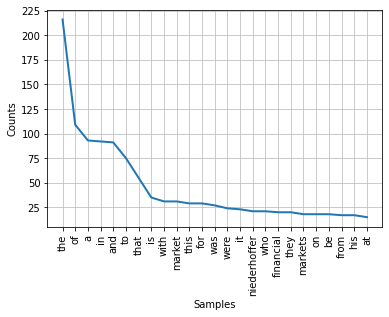

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [13]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import webtext
from nltk.probability import FreqDist
import nltk
import matplotlib.pyplot as plt

words = nltk.word_tokenize(ARTICLE)

words=[word.lower() for word in words if word.isalpha()]
print(words)   


for i in range(len(sorted(words))):
    print("%s: %s" % (i, words[i]))
 
data_analysis = nltk.FreqDist(words)

data_analysis.plot(25, cumulative=False)

#### we can see that zips law is followed here 

In [14]:
from nltk.corpus import genesis
tokens = words
gen_text = nltk.Text(tokens)
gen_text.collocations()

federal reserve; victor niederhoffer; global financial; goldman sachs;
billion usd; financial system; hedge fund; trophic levels; politically
connected; wall street; moral hazard; game stop; nasdaq bubble; highly
leveraged; high frequency; retail investors; robert rubin; tequila
crises; face value; two days


#### these are the top collocations 

#### Finding the numnber of unigrams

In [15]:
import nltk
from nltk import bigrams
from nltk import trigrams

text=ARTICLE
tokens = nltk.word_tokenize(text)
print(tokens)
print("The number of unigrams are "+str(len(text)))
tokens = nltk.word_tokenize(text)


['Will', 'The', 'Game', 'Stop', 'with', 'Gamestop', 'Or', 'Is', 'This', 'Just', 'The', 'Beginning', '?', 'Crypto', ',', 'Markets', ',', 'Trading', 'The', 'GameStop', 'squeeze', 'on', 'short-sellers', 'is', 'an', 'extraordinary', 'event', 'in', 'markets', ',', 'where', 'at', 'face', 'value', ',', 'retail', 'traders', 'and', 'investors', 'have', 'worked', 'together', 'in', 'an', 'attempt', 'to', 'put', 'some', 'of', 'the', 'largest', 'wall', 'street', 'institutions', 'out', 'of', 'business', '.', 'The', 'events', 'can', 'be', 'interpreted', 'with', 'many', 'viable', 'lenses', 'and', 'there', 'are', 'ironies', 'baked', 'in', 'that', 'are', 'pure', 'serendipity', '.', 'There', 'has', 'been', 'a', 'centrally', 'controlled', 'game', 'in', 'the', 'global', 'financial', 'system', 'in', 'which', 'insiders', 'benefited', 'while', 'outsiders', 'got', 'hurt', 'that', 'comes', 'to', 'a', 'head', 'with', 'a', 'company', 'called', 'GameStop', '.', 'The', 'broking', 'firm', 'of', 'most', 'of', 'the', 

#### Freq Distribution of Bigrams and Trigrams 

In [16]:
bigrams = nltk.bigrams(tokens)
frequence = nltk.FreqDist(bigrams)

for key,value in frequence.items():
    print(key,value) 



('Will', 'The') 1
('The', 'Game') 1
('Game', 'Stop') 3
('Stop', 'with') 1
('with', 'Gamestop') 1
('Gamestop', 'Or') 1
('Or', 'Is') 1
('Is', 'This') 1
('This', 'Just') 1
('Just', 'The') 1
('The', 'Beginning') 1
('Beginning', '?') 1
('?', 'Crypto') 1
('Crypto', ',') 1
(',', 'Markets') 1
('Markets', ',') 1
(',', 'Trading') 1
('Trading', 'The') 1
('The', 'GameStop') 1
('GameStop', 'squeeze') 1
('squeeze', 'on') 1
('on', 'short-sellers') 1
('short-sellers', 'is') 1
('is', 'an') 1
('an', 'extraordinary') 1
('extraordinary', 'event') 1
('event', 'in') 1
('in', 'markets') 4
('markets', ',') 3
(',', 'where') 2
('where', 'at') 1
('at', 'face') 1
('face', 'value') 2
('value', ',') 1
(',', 'retail') 2
('retail', 'traders') 2
('traders', 'and') 2
('and', 'investors') 1
('investors', 'have') 1
('have', 'worked') 1
('worked', 'together') 1
('together', 'in') 1
('in', 'an') 1
('an', 'attempt') 1
('attempt', 'to') 1
('to', 'put') 1
('put', 'some') 1
('some', 'of') 1
('of', 'the') 29
('the', 'largest') 

In [17]:
trigrams = nltk.trigrams(tokens)
frequence = nltk.FreqDist(trigrams)

for key,value in frequence.items():
    print(key,value) 

('Will', 'The', 'Game') 1
('The', 'Game', 'Stop') 1
('Game', 'Stop', 'with') 1
('Stop', 'with', 'Gamestop') 1
('with', 'Gamestop', 'Or') 1
('Gamestop', 'Or', 'Is') 1
('Or', 'Is', 'This') 1
('Is', 'This', 'Just') 1
('This', 'Just', 'The') 1
('Just', 'The', 'Beginning') 1
('The', 'Beginning', '?') 1
('Beginning', '?', 'Crypto') 1
('?', 'Crypto', ',') 1
('Crypto', ',', 'Markets') 1
(',', 'Markets', ',') 1
('Markets', ',', 'Trading') 1
(',', 'Trading', 'The') 1
('Trading', 'The', 'GameStop') 1
('The', 'GameStop', 'squeeze') 1
('GameStop', 'squeeze', 'on') 1
('squeeze', 'on', 'short-sellers') 1
('on', 'short-sellers', 'is') 1
('short-sellers', 'is', 'an') 1
('is', 'an', 'extraordinary') 1
('an', 'extraordinary', 'event') 1
('extraordinary', 'event', 'in') 1
('event', 'in', 'markets') 1
('in', 'markets', ',') 1
('markets', ',', 'where') 1
(',', 'where', 'at') 1
('where', 'at', 'face') 1
('at', 'face', 'value') 1
('face', 'value', ',') 1
('value', ',', 'retail') 1
(',', 'retail', 'traders') 1

#### For N-Grams 

In [18]:
from nltk import ngrams

sentence = ARTICLE
n = 4
four_grams = ngrams(sentence.split(), n)

for grams in four_grams:
  print (grams)  


('Will', 'The', 'Game', 'Stop')
('The', 'Game', 'Stop', 'with')
('Game', 'Stop', 'with', 'Gamestop')
('Stop', 'with', 'Gamestop', 'Or')
('with', 'Gamestop', 'Or', 'Is')
('Gamestop', 'Or', 'Is', 'This')
('Or', 'Is', 'This', 'Just')
('Is', 'This', 'Just', 'The')
('This', 'Just', 'The', 'Beginning?')
('Just', 'The', 'Beginning?', 'Crypto,')
('The', 'Beginning?', 'Crypto,', 'Markets,')
('Beginning?', 'Crypto,', 'Markets,', 'Trading')
('Crypto,', 'Markets,', 'Trading', 'The')
('Markets,', 'Trading', 'The', 'GameStop')
('Trading', 'The', 'GameStop', 'squeeze')
('The', 'GameStop', 'squeeze', 'on')
('GameStop', 'squeeze', 'on', 'short-sellers')
('squeeze', 'on', 'short-sellers', 'is')
('on', 'short-sellers', 'is', 'an')
('short-sellers', 'is', 'an', 'extraordinary')
('is', 'an', 'extraordinary', 'event')
('an', 'extraordinary', 'event', 'in')
('extraordinary', 'event', 'in', 'markets,')
('event', 'in', 'markets,', 'where')
('in', 'markets,', 'where', 'at')
('markets,', 'where', 'at', 'face')
(

In [19]:
from nltk import ngrams

sentence = ARTICLE
n = 5
five_grams = ngrams(sentence.split(), n)

for grams in five_grams:
  print (grams) 


('Will', 'The', 'Game', 'Stop', 'with')
('The', 'Game', 'Stop', 'with', 'Gamestop')
('Game', 'Stop', 'with', 'Gamestop', 'Or')
('Stop', 'with', 'Gamestop', 'Or', 'Is')
('with', 'Gamestop', 'Or', 'Is', 'This')
('Gamestop', 'Or', 'Is', 'This', 'Just')
('Or', 'Is', 'This', 'Just', 'The')
('Is', 'This', 'Just', 'The', 'Beginning?')
('This', 'Just', 'The', 'Beginning?', 'Crypto,')
('Just', 'The', 'Beginning?', 'Crypto,', 'Markets,')
('The', 'Beginning?', 'Crypto,', 'Markets,', 'Trading')
('Beginning?', 'Crypto,', 'Markets,', 'Trading', 'The')
('Crypto,', 'Markets,', 'Trading', 'The', 'GameStop')
('Markets,', 'Trading', 'The', 'GameStop', 'squeeze')
('Trading', 'The', 'GameStop', 'squeeze', 'on')
('The', 'GameStop', 'squeeze', 'on', 'short-sellers')
('GameStop', 'squeeze', 'on', 'short-sellers', 'is')
('squeeze', 'on', 'short-sellers', 'is', 'an')
('on', 'short-sellers', 'is', 'an', 'extraordinary')
('short-sellers', 'is', 'an', 'extraordinary', 'event')
('is', 'an', 'extraordinary', 'event'

In [20]:
from nltk import ngrams

sentence = ARTICLE

n = int(input("Enter the value for n"))
#check the top of the screen for inputing the value
n_grams = ngrams(sentence.split(), n)

for grams in n_grams:
  print (grams) 


('Will', 'The', 'Game', 'Stop', 'with', 'Gamestop', 'Or', 'Is')
('The', 'Game', 'Stop', 'with', 'Gamestop', 'Or', 'Is', 'This')
('Game', 'Stop', 'with', 'Gamestop', 'Or', 'Is', 'This', 'Just')
('Stop', 'with', 'Gamestop', 'Or', 'Is', 'This', 'Just', 'The')
('with', 'Gamestop', 'Or', 'Is', 'This', 'Just', 'The', 'Beginning?')
('Gamestop', 'Or', 'Is', 'This', 'Just', 'The', 'Beginning?', 'Crypto,')
('Or', 'Is', 'This', 'Just', 'The', 'Beginning?', 'Crypto,', 'Markets,')
('Is', 'This', 'Just', 'The', 'Beginning?', 'Crypto,', 'Markets,', 'Trading')
('This', 'Just', 'The', 'Beginning?', 'Crypto,', 'Markets,', 'Trading', 'The')
('Just', 'The', 'Beginning?', 'Crypto,', 'Markets,', 'Trading', 'The', 'GameStop')
('The', 'Beginning?', 'Crypto,', 'Markets,', 'Trading', 'The', 'GameStop', 'squeeze')
('Beginning?', 'Crypto,', 'Markets,', 'Trading', 'The', 'GameStop', 'squeeze', 'on')
('Crypto,', 'Markets,', 'Trading', 'The', 'GameStop', 'squeeze', 'on', 'short-sellers')
('Markets,', 'Trading', 'The

##### Heaps' law means that as more instance text is gathered, there will be diminishing returns in terms of discovery of the full vocabulary from which the distinct terms are drawn.

In [21]:
#limit to the amount of text passed in the model so we chunk the data into bits 
#splitting based on the sentences 
#to not get rid of punctuations
ARTICLE=ARTICLE.replace('.','.<eos>')
ARTICLE=ARTICLE.replace('!','!<eos>')
ARTICLE=ARTICLE.replace('?','?<eos>')
sentences=ARTICLE.split('<eos>')

In [22]:
sentences

['Will The Game Stop with Gamestop Or Is This Just The Beginning?',
 ' Crypto, Markets, Trading The GameStop squeeze on short-sellers is an extraordinary event in markets, where at face value, retail traders and investors have worked together in an attempt to put some of the largest wall street institutions out of business.',
 ' The events can be interpreted with many viable lenses and there are ironies baked in that are pure serendipity.',
 ' There has been a centrally controlled game in the global financial system in which insiders benefited while outsiders got hurt that comes to a head with a company called GameStop.',
 ' The broking firm of most of the retail side of this warfare ‘RobinHood’ is literally stealing from its poor, retail investors to give to its rich, capital backers.',
 ' One of the historical realities of this game has been that macro-investing – the sages of not only portfolio management, but often also sophisticated social and cultural figures – have had a hard ti

In [23]:
max_chunk= 500
current_chunk = 0 
chunks = []

for sentence in sentences:
    if len(chunks) == current_chunk + 1: 
        if len(chunks[current_chunk]) + len(sentence.split(' ')) <= max_chunk:
            chunks[current_chunk].extend(sentence.split(' '))
        else:
            current_chunk += 1
            chunks.append(sentence.split(' '))
    else:
        print(current_chunk)
        chunks.append(sentence.split(' '))

for chunk_id in range(len(chunks)):
    chunks[chunk_id] = ' '.join(chunks[chunk_id])

print(chunks[4])

0
 Bear Sterns was allowed to fail and Goldman Sachs got bailout money.  Macro-investors like Niederhoffer were never less successful around this time onward, and Victor Niederhoffer blew his fund up a second time during this period.  Market speculation was now more purely a highly leveraged, volatile and aggressive game in which fundamentals essentially did not matter.  The politically connected were able to exploit event risk, with insider knowledge providing superior returns.  The Federal Reserve now provided returns.  2008-2020 was another epoch After 25 years of this phenomenon creeping into global markets, in 2020, the public were ahead of it for the first time.  During the coronavirus collapse, aggressive retail investors bought, perhaps for the first time, assets from mid-tier but professional asset managers at the low and continued purchasing until the same mid-tier managers were forced to buy back from retail significantly higher.  This was, of course, in unison with aggressi

In [24]:
len(chunks[1].split(' '))

485

### 4. Text Summarization

In [25]:
res = summarizer(chunks, max_length=120, min_length=30, do_sample=False)

Your max_length is set to 120, but you input_length is only 115. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=57)


In [26]:
res

[{'summary_text': ' The GameStop squeeze on short-sellers is an extraordinary event in markets, where at face value, retail traders and investors have worked together in an attempt to put some of the largest wall street institutions out of business . The broking firm of most of the retail side of this warfare ‘RobinHood’ is stealing from its poor, retail investors to give to its rich, capital backers .'},
 {'summary_text': ' Victor Niederhoffer blew his hedge fund up in 1997 in a highly statistically improbable event, in which he sold puts that were targeted by market mechanics, rather than ‘truth’. The market here is more leveraged, more volatile, more aggressive, better for types of trading and worse for investing. The fundamentals no longer matter; and this was demonstrated only 5 years later with what could be the largest bubble of viable assets in history .'},
 {'summary_text': ' Greenspans moral hazard of late 1994/1995 fundamentally changed the market in a new way . Extraordinar

In [27]:
' '.join([summ['summary_text'] for summ in res])

' The GameStop squeeze on short-sellers is an extraordinary event in markets, where at face value, retail traders and investors have worked together in an attempt to put some of the largest wall street institutions out of business . The broking firm of most of the retail side of this warfare ‘RobinHood’ is stealing from its poor, retail investors to give to its rich, capital backers .  Victor Niederhoffer blew his hedge fund up in 1997 in a highly statistically improbable event, in which he sold puts that were targeted by market mechanics, rather than ‘truth’. The market here is more leveraged, more volatile, more aggressive, better for types of trading and worse for investing. The fundamentals no longer matter; and this was demonstrated only 5 years later with what could be the largest bubble of viable assets in history .  Greenspans moral hazard of late 1994/1995 fundamentally changed the market in a new way . Extraordinary people who were never wrong in risk-adjusted terms and who u

### 5. Output to text file

In [28]:
with open('../outputs/blogsummary.txt', 'w') as f:
    f.write(text)
    

In [29]:
text='''



Chairman's Letter - 1977



BERKSHIRE HATHAWAY INC.


To the Stockholders of Berkshire Hathaway Inc.:

     Operating earnings in 1977 of $21,904,000, or $22.54 per 
share, were moderately better than anticipated a year ago.  Of 
these earnings, $1.43 per share resulted from substantial 
realized capital gains by Blue Chip Stamps which, to the extent 
of our proportional interest in that company, are included in our 
operating earnings figure.  Capital gains or losses realized 
directly by Berkshire Hathaway Inc. or its insurance subsidiaries 
are not included in our calculation of operating earnings.  While 
too much attention should not be paid to the figure for any 
single year, over the longer term the record regarding aggregate 
capital gains or losses obviously is of significance.

     Textile operations came in well below forecast, while the 
results of the Illinois National Bank as well as the operating 
earnings attributable to our equity interest in Blue Chip Stamps 
were about as anticipated.  However, insurance operations, led 
again by the truly outstanding results of Phil Liesche�s 
managerial group at National Indemnity Company, were even better 
than our optimistic expectations.

     Most companies define �record� earnings as a new high in 
earnings per share.  Since businesses customarily add from year 
to year to their equity base, we find nothing particularly 
noteworthy in a management performance combining, say, a 10% 
increase in equity capital and a 5% increase in earnings per 
share.  After all, even a totally dormant savings account will 
produce steadily rising interest earnings each year because of 
compounding.

     Except for special cases (for example, companies with 
unusual debt-equity ratios or those with important assets carried 
at unrealistic balance sheet values), we believe a more 
appropriate measure of managerial economic performance to be 
return on equity capital.  In 1977 our operating earnings on 
beginning equity capital amounted to 19%, slightly better than 
last year and above both our own long-term average and that of 
American industry in aggregate.  But, while our operating 
earnings per share were up 37% from the year before, our 
beginning capital was up 24%, making the gain in earnings per 
share considerably less impressive than it might appear at first 
glance.

     We expect difficulty in matching our 1977 rate of return 
during the forthcoming year.  Beginning equity capital is up 23% 
from a year ago, and we expect the trend of insurance 
underwriting profit margins to turn down well before the end of 
the year.  Nevertheless, we expect a reasonably good year and our 
present estimate, subject to the usual caveats regarding the 
frailties of forecasts, is that operating earnings will improve 
somewhat on a per share basis during 1978.

Textile Operations

     The textile business again had a very poor year in 1977.  We 
have mistakenly predicted better results in each of the last two 
years.  This may say something about our forecasting abilities, 
the nature of the textile industry, or both.  Despite strenuous 
efforts, problems in marketing and manufacturing have persisted.  
Many difficulties experienced in the marketing area are due 
primarily to industry conditions, but some of the problems have 
been of our own making.

     A few shareholders have questioned the wisdom of remaining 
in the textile business which, over the longer term, is unlikely 
to produce returns on capital comparable to those available in 
many other businesses.  Our reasons are several: (1) Our mills in 
both New Bedford and Manchester are among the largest employers 
in each town, utilizing a labor force of high average age 
possessing relatively non-transferable skills.  Our workers and 
unions have exhibited unusual understanding and effort in 
cooperating with management to achieve a cost structure and 
product mix which might allow us to maintain a viable operation. 
(2) Management also has been energetic and straightforward in its 
approach to our textile problems.  In particular, Ken Chace�s 
efforts after the change in corporate control took place in 1965 
generated capital from the textile division needed to finance the 
acquisition and expansion of our profitable insurance operation.  
(3) With hard work and some imagination regarding manufacturing 
and marketing configurations, it seems reasonable that at least 
modest profits in the textile division can be achieved in the 
future.

Insurance Underwriting

     Our insurance operation continued to grow significantly in 
1977.  It was early in 1967 that we made our entry into this 
industry through the purchase of National Indemnity Company and 
National Fire and Marine Insurance Company (sister companies) for 
approximately $8.6 million.  In that year their premium volume 
amounted to $22 million.  In 1977 our aggregate insurance premium 
volume was $151 million.  No additional shares of Berkshire 
Hathaway stock have been issued to achieve any of this growth.

     Rather, this almost 600% increase has been achieved through 
large gains in National Indemnity�s traditional liability areas 
plus the starting of new companies (Cornhusker Casualty Company 
in 1970, Lakeland Fire and Casualty Company in 1971, Texas United 
Insurance Company in 1972, The Insurance Company of Iowa in 1973, 
and Kansas Fire and Casualty Company in late 1977), the purchase 
for cash of other insurance companies (Home and Automobile 
Insurance Company in 1971, Kerkling Reinsurance Corporation, now 
named Central Fire and Casualty Company, in 1976, and Cypress 
Insurance Company at yearend 1977), and finally through the 
marketing of additional products, most significantly reinsurance, 
within the National Indemnity Company corporate structure.

     In aggregate, the insurance business has worked out very 
well.  But it hasn�t been a one-way street.  Some major mistakes 
have been made during the decade, both in products and personnel.  
We experienced significant problems from (1) a surety operation 
initiated in 1969, (2) the 1973 expansion of Home and 
Automobile�s urban auto marketing into the Miami, Florida area, 
(3) a still unresolved aviation �fronting� arrangement, and (4) 
our Worker�s Compensation operation in California, which we 
believe retains an interesting potential upon completion of a 
reorganization now in progress.  It is comforting to be in a 
business where some mistakes can be made and yet a quite 
satisfactory overall performance can be achieved.  In a sense, 
this is the opposite case from our textile business where even 
very good management probably can average only modest results.  
One of the lessons your management has learned - and, 
unfortunately, sometimes re-learned - is the importance of being 
in businesses where tailwinds prevail rather than headwinds.

     In 1977 the winds in insurance underwriting were squarely 
behind us.  Very large rate increases were effected throughout 
the industry in 1976 to offset the disastrous underwriting 
results of 1974 and 1975.  But, because insurance policies 
typically are written for one-year periods, with pricing mistakes 
capable of correction only upon renewal, it was 1977 before the 
full impact was felt upon earnings of those earlier rate 
increases.

     The pendulum now is beginning to swing the other way.  We 
estimate that costs involved in the insurance areas in which we 
operate rise at close to 1% per month.  This is due to continuous 
monetary inflation affecting the cost of repairing humans and 
property, as well as �social inflation�, a broadening definition 
by society and juries of what is covered by insurance policies.  
Unless rates rise at a comparable 1% per month, underwriting 
profits must shrink.  Recently the pace of rate increases has 
slowed dramatically, and it is our expectation that underwriting 
margins generally will be declining by the second half of the 
year.

     We must again give credit to Phil Liesche, greatly assisted 
by Roland Miller in Underwriting and Bill Lyons in Claims, for an 
extraordinary underwriting achievement in National Indemnity�s 
traditional auto and general liability business during 1977.  
Large volume gains have been accompanied by excellent 
underwriting margins following contraction or withdrawal by many 
competitors in the wake of the 1974-75 crisis period.  These 
conditions will reverse before long.  In the meantime, National 
Indemnity�s underwriting profitability has increased dramatically 
and, in addition, large sums have been made available for 
investment.  As markets loosen and rates become inadequate, we 
again will face the challenge of philosophically accepting 
reduced volume.  Unusual managerial discipline will be required, 
as it runs counter to normal institutional behavior to let the 
other fellow take away business - even at foolish prices.

     Our reinsurance department, managed by George Young, 
improved its underwriting performance during 1977.  Although the 
combined ratio (see definition on page 12) of 107.1 was 
unsatisfactory, its trend was downward throughout the year.  In 
addition, reinsurance generates unusually high funds for 
investment as a percentage of premium volume.

     At Home and Auto, John Seward continued to make progress on 
all fronts.  John was a battlefield promotion several years ago 
when Home and Auto�s underwriting was awash in red ink and the 
company faced possible extinction.  Under his management it 
currently is sound, profitable, and growing.

     John Ringwalt�s homestate operation now consists of five 
companies, with Kansas Fire and Casualty Company becoming 
operational late in 1977 under the direction of Floyd Taylor.  
The homestate companies had net premium volume of $23 million, up 
from $5.5 million just three years ago.  All four companies that 
operated throughout the year achieved combined ratios below 100, 
with Cornhusker Casualty Company, at 93.8, the leader.  In 
addition to actively supervising the other four homestate 
operations, John Ringwalt manages the operations of Cornhusker 
which has recorded combined ratios below 100 in six of its seven 
full years of existence and, from a standing start in 1970, has 
grown to be one of the leading insurance companies operating in 
Nebraska utilizing the conventional independent agency system.  
Lakeland Fire and Casualty Company, managed by Jim Stodolka, was 
the winner of the Chairman�s Cup in 1977 for achieving the lowest 
loss ratio among the homestate companies.  All in all, the 
homestate operation continues to make excellent progress.

     The newest addition to our insurance group is Cypress 
Insurance Company of South Pasadena, California.  This Worker�s 
Compensation insurer was purchased for cash in the final days of 
1977 and, therefore, its approximate $12.5 million of volume for 
that year was not included in our results.  Cypress and National 
Indemnity�s present California Worker�s Compensation operation 
will not be combined, but will operate independently utilizing 
somewhat different marketing strategies.  Milt Thornton, 
President of Cypress since 1968, runs a first-class operation for 
policyholders, agents, employees and owners alike.  We look 
forward to working with him.

     Insurance companies offer standardized policies which can be 
copied by anyone.  Their only products are promises.  It is not 
difficult to be licensed, and rates are an open book.  There are 
no important advantages from trademarks, patents, location, 
corporate longevity, raw material sources, etc., and very little 
consumer differentiation to produce insulation from competition.  
It is commonplace, in corporate annual reports, to stress the 
difference that people make.  Sometimes this is true and 
sometimes it isn�t.  But there is no question that the nature of 
the insurance business magnifies the effect which individual 
managers have on company performance.  We are very fortunate to 
have the group of managers that are associated with us.

Insurance Investments

     During the past two years insurance investments at cost 
(excluding the investment in our affiliate, Blue Chip Stamps) 
have grown from $134.6 million to $252.8 million.  Growth in 
insurance reserves, produced by our large gain in premium volume, 
plus retained earnings, have accounted for this increase in 
marketable securities.  In turn, net investment income of the 
Insurance Group has improved from $8.4 million pre-tax in 1975 to 
$12.3 million pre-tax in 1977.

     In addition to this income from dividends and interest, we 
realized capital gains of $6.9 million before tax, about one-
quarter from bonds and the balance from stocks.  Our unrealized 
gain in stocks at yearend 1977 was approximately $74 million but 
this figure, like any other figure of a single date (we had an 
unrealized loss of $17 million at the end of 1974), should not be 
taken too seriously.  Most of our large stock positions are going 
to be held for many years and the scorecard on our investment 
decisions will be provided by business results over that period, 
and not by prices on any given day.  Just as it would be foolish 
to focus unduly on short-term prospects when acquiring an entire 
company, we think it equally unsound to become mesmerized by 
prospective near term earnings or recent trends in earnings when 
purchasing small pieces of a company; i.e., marketable common 
stocks.

     A little digression illustrating this point may be 
interesting.  Berkshire Fine Spinning Associates and Hathaway 
Manufacturing were merged in 1955 to form Berkshire Hathaway Inc.  
In 1948, on a pro forma combined basis, they had earnings after 
tax of almost $18 million and employed 10,000 people at a dozen 
large mills throughout New England.  In the business world of 
that period they were an economic powerhouse.  For example, in 
that same year earnings of IBM were $28 million (now $2.7 
billion), Safeway Stores, $10 million, Minnesota Mining, $13 
million, and Time, Inc., $9 million.  But, in the decade 
following the 1955 merger aggregate sales of $595 million 
produced an aggregate loss for Berkshire Hathaway of $10 million.  
By 1964 the operation had been reduced to two mills and net worth 
had shrunk to $22 million, from $53 million at the time of the 
merger.  So much for single year snapshots as adequate portrayals 
of a business.

     Equity holdings of our insurance companies with a market 
value of over $5 million on December 31, 1977 were as follows:

No. of Shares  Company                                     Cost      Market
-------------  -------                                   --------   --------
                                                           (000�s omitted)
    220,000    Capital Cities Communications, Inc. ..... $ 10,909   $ 13,228  
  1,986,953    Government Employees Insurance 
                  Company Convertible Preferred ........   19,417     33,033  
  1,294,308    Government Employees Insurance 
                  Company Common Stock .................    4,116     10,516
    592,650    The Interpublic Group of Companies, Inc.     4,531     17,187  
    324,580    Kaiser Aluminum& Chemical Corporation ...   11,218      9,981
  1,305,800    Kaiser Industries, Inc. .................      778      6,039
    226,900    Knight-Ridder Newspapers, Inc. ..........    7,534      8,736
    170,800    Ogilvy & Mather International, Inc. .....    2,762      6,960
    934,300    The Washington Post Company Class B .....   10,628     33,401
                                                         --------   --------
               Total ................................... $ 71,893   $139,081
               All Other Holdings ......................   34,996     41,992
                                                         --------   --------
               Total Equities .......................... $106,889   $181,073
                                                         ========   ========

     We select our marketable equity securities in much the same 
way we would evaluate a business for acquisition in its entirety.  
We want the business to be (1) one that we can understand, (2) 
with favorable long-term prospects, (3) operated by honest and 
competent people, and (4) available at a very attractive price.  
We ordinarily make no attempt to buy equities for anticipated 
favorable stock price behavior in the short term.  In fact, if 
their business experience continues to satisfy us, we welcome 
lower market prices of stocks we own as an opportunity to acquire 
even more of a good thing at a better price.

     Our experience has been that pro-rata portions of truly 
outstanding businesses sometimes sell in the securities markets 
at very large discounts from the prices they would command in 
negotiated transactions involving entire companies.  
Consequently, bargains in business ownership, which simply are 
not available directly through corporate acquisition, can be 
obtained indirectly through stock ownership.  When prices are 
appropriate, we are willing to take very large positions in 
selected companies, not with any intention of taking control and 
not foreseeing sell-out or merger, but with the expectation that 
excellent business results by corporations will translate over 
the long term into correspondingly excellent market value and 
dividend results for owners, minority as well as majority.

     Such investments initially may have negligible impact on our 
operating earnings.  For example, we invested $10.9 million in 
Capital Cities Communications during 1977.  Earnings attributable 
to the shares we purchased totaled about $1.3 million last year.  
But only the cash dividend, which currently provides $40,000 
annually, is reflected in our operating earnings figure.

     Capital Cities possesses both extraordinary properties and 
extraordinary management.  And these management skills extend 
equally to operations and employment of corporate capital.  To 
purchase, directly, properties such as Capital Cities owns would 
cost in the area of twice our cost of purchase via the stock 
market, and direct ownership would offer no important advantages 
to us.  While control would give us the opportunity - and the 
responsibility - to manage operations and corporate resources, we 
would not be able to provide management in either of those 
respects equal to that now in place.  In effect, we can obtain a 
better management result through non-control than control.  This 
is an unorthodox view, but one we believe to be sound.

Banking

     In 1977 the Illinois National Bank continued to achieve a 
rate of earnings on assets about three times that of most large 
banks.  As usual, this record was achieved while the bank paid 
maximum rates to savers and maintained an asset position 
combining low risk and exceptional liquidity.  Gene Abegg formed 
the bank in 1931 with $250,000.  In its first full year of 
operation, earnings amounted to $8,782.  Since that time, no new 
capital has been contributed to the bank; on the contrary, since 
our purchase in 1969, dividends of $20 million have been paid.  
Earnings in 1977 amounted to $3.6 million, more than achieved by 
many banks two or three times its size.

     Late last year Gene, now 80 and still running a banking 
operation without peer, asked that a successor be brought in.  
Accordingly, Peter Jeffrey, formerly President and Chief 
Executive Officer of American National Bank of Omaha, has joined 
the Illinois National Bank effective March 1st as President and 
Chief Executive Officer.

     Gene continues in good health as Chairman.  We expect a 
continued successful operation at Rockford�s leading bank.

Blue Chip Stamps

     We again increased our equity interest in Blue Chip Stamps, 
and owned approximately 36 1/2% at the end of 1977.  Blue Chip 
had a fine year, earning approximately $12.9 million from 
operations and, in addition, had realized securities gains of 
$4.1 million.

     Both Wesco Financial Corp., an 80% owned subsidiary of Blue 
Chip Stamps, managed by Louis Vincenti, and See�s Candies, a 99% 
owned subsidiary, managed by Chuck Huggins, made good progress in 
1977.  Since See�s was purchased by Blue Chip Stamps at the 
beginning of 1972, pre-tax operating earnings have grown from 
$4.2 million to $12.6 million with little additional capital 
investment.  See�s achieved this record while operating in an 
industry experiencing practically no unit growth.  Shareholders 
of Berkshire Hathaway Inc. may obtain the annual report of Blue 
Chip Stamps by requesting it from Mr. Robert H. Bird, Blue Chip 
Stamps, 5801 South Eastern Avenue, Los Angeles, California 90040.


                                    Warren E. Buffett, Chairman

March 14,1978






Chairman's Letter - 1978



BERKSHIRE HATHAWAY INC.


To the Shareholders of Berkshire Hathaway Inc.:

     First, a few words about accounting.  The merger with 
Diversified Retailing Company, Inc. at yearend adds two new 
complications in the presentation of our financial results.  
After the merger, our ownership of Blue Chip Stamps increased to 
approximately 58% and, therefore, the accounts of that company 
must be fully consolidated in the Balance Sheet and Statement of 
Earnings presentation of Berkshire.  In previous reports, our 
share of the net earnings only of Blue Chip had been included as 
a single item on Berkshire�s Statement of Earnings, and there had 
been a similar one-line inclusion on our Balance Sheet of our 
share of their net assets.

     This full consolidation of sales, expenses, receivables, 
inventories, debt, etc. produces an aggregation of figures from 
many diverse businesses - textiles, insurance, candy, newspapers, 
trading stamps - with dramatically different economic 
characteristics.  In some of these your ownership is 100% but, in 
those businesses which are owned by Blue Chip but fully 
consolidated, your ownership as a Berkshire shareholder is only 
58%. (Ownership by others of the balance of these businesses is 
accounted for by the large minority interest item on the 
liability side of the Balance Sheet.) Such a grouping of Balance 
Sheet and Earnings items - some wholly owned, some partly owned - 
tends to obscure economic reality more than illuminate it.  In 
fact, it represents a form of presentation that we never prepare 
for internal use during the year and which is of no value to us 
in any management activities.

     For that reason, throughout the report we provide much 
separate financial information and commentary on the various 
segments of the business to help you evaluate Berkshire�s 
performance and prospects.  Much of this segmented information is 
mandated by SEC disclosure rules and covered in �Management�s 
Discussion� on pages 29 to 34.  And in this letter we try to 
present to you a view of our various operating entities from the 
same perspective that we view them managerially.

     A second complication arising from the merger is that the 
1977 figures shown in this report are different from the 1977 
figures shown in the report we mailed to you last year.  
Accounting convention requires that when two entities such as 
Diversified and Berkshire are merged, all financial data 
subsequently must be presented as if the companies had been 
merged at the time they were formed rather than just recently.  
So the enclosed financial statements, in effect, pretend that in 
1977 (and earlier years) the Diversified-Berkshire merger already 
had taken place, even though the actual merger date was December 
30, 1978.  This shifting base makes comparative commentary 
confusing and, from time to time in our narrative report, we will 
talk of figures and performance for Berkshire shareholders as 
historically reported to you rather than as restated after the 
Diversified merger.

     With that preamble it can be stated that, with or without 
restated figures, 1978 was a good year.  Operating earnings, 
exclusive of capital gains, at 19.4% of beginning shareholders� 
investment were within a fraction of our 1972 record.  While we 
believe it is improper to include capital gains or losses in 
evaluating the performance of a single year, they are an 
important component of the longer term record.  Because of such 
gains, Berkshire�s long-term growth in equity per share has been 
greater than would be indicated by compounding the returns from 
operating earnings that we have reported annually.

     For example, over the last three years - generally a bonanza 
period for the insurance industry, our largest profit producer - 
Berkshire�s per share net worth virtually has doubled, thereby 
compounding at about 25% annually through a combination of good 
operating earnings and fairly substantial capital gains.  Neither 
this 25% equity gain from all sources nor the 19.4% equity gain 
from operating earnings in 1978 is sustainable.  The insurance 
cycle has turned downward in 1979, and it is almost certain that 
operating earnings measured by return on equity will fall this 
year.  However, operating earnings measured in dollars are likely 
to increase on the much larger shareholders� equity now employed 
in the business.

     In contrast to this cautious view about near term return 
from operations, we are optimistic about prospects for long term 
return from major equity investments held by our insurance 
companies.  We make no attempt to predict how security markets 
will behave; successfully forecasting short term stock price 
movements is something we think neither we nor anyone else can 
do.  In the longer run, however, we feel that many of our major 
equity holdings are going to be worth considerably more money 
than we paid, and that investment gains will add significantly to 
the operating returns of the insurance group.

Sources of Earnings

     To give you a better picture of just where Berkshire�s 
earnings are produced, we show below a table which requires a 
little explanation.  Berkshire owns close to 58% of Blue Chip 
which, in addition to 100% ownership of several businesses, owns 
80% of Wesco Financial Corporation.  Thus, Berkshire�s equity in 
Wesco�s earnings is about 46%.  In aggregate, businesses that we 
control have about 7,000 full-time employees and generate 
revenues of over $500 million.

     The table shows the overall earnings of each major operating 
category on a pre-tax basis (several of the businesses have low 
tax rates because of significant amounts of tax-exempt interest 
and dividend income), as well as the share of those earnings 
belonging to Berkshire both on a pre-tax and after-tax basis.  
Significant capital gains or losses attributable to any of the 
businesses are not shown in the operating earnings figure, but 
are aggregated on the �Realized Securities Gain� line at the 
bottom of the table.  Because of various accounting and tax 
intricacies, the figures in the table should not be treated as 
holy writ, but rather viewed as close approximations of the 1977 
and 1978 earnings contributions of our constituent businesses.


                                                                         Net Earnings
                                   Earnings Before Income Taxes            After Tax
                              --------------------------------------  ------------------
                                    Total          Berkshire Share     Berkshire Share
                              ------------------  ------------------  ------------------
(in thousands of dollars)       1978      1977      1978      1977      1978      1977
                              --------  --------  --------  --------  --------  --------
Total - all entities ......... $66,180   $57,089   $54,350   $42,234   $39,242   $30,393
                              ========  ========  ========  ========  ========  ========
Earnings from operations:
  Insurance Group:
    Underwriting ............. $ 3,001   $ 5,802   $ 3,000   $ 5,802   $ 1,560   $ 3,017
    Net investment income ....  19,705    12,804    19,691    12,804    16,400    11,360
  Berkshire-Waumbec textiles     2,916      (620)    2,916      (620)    1,342      (322)
  Associated Retail 
     Stores, Inc. ............   2,757     2,775     2,757     2,775     1,176     1,429
  See�s Candies ..............  12,482    12,840     7,013     6,598     3,049     2,974
  Buffalo Evening News .......  (2,913)      751    (1,637)      389      (738)      158
  Blue Chip Stamps - Parent ..   2,133     1,091     1,198       566     1,382       892
  Illinois National Bank
     and Trust Company .......   4,822     3,800     4,710     3,706     4,262     3,288
  Wesco Financial
     Corporation - Parent ....   1,771     2,006       777       813       665       419
  Mutual Savings and
     Loan Association ........  10,556     6,779     4,638     2,747     3,042     1,946
  Interest on Debt ...........  (5,566)   (5,302)   (4,546)   (4,255)   (2,349)   (2,129)
  Other ......................     720       165       438       102       261        48
                              --------  --------  --------  --------  --------  --------
    Total Earnings from
       Operations ............ $52,384   $42,891   $40,955   $31,427   $30,052   $23,080
Realized Securities Gain .....  13,796    14,198    13,395    10,807     9,190     7,313
                              --------  --------  --------  --------  --------  --------
    Total Earnings ........... $66,180   $57,089   $54,350   $42,234   $39,242   $30,393
                              ========  ========  ========  ========  ========  ========

     Blue Chip and Wesco are public companies with reporting 
requirements of their own.  Later in this report we are 
reproducing the narrative reports of the principal executives of 
both companies, describing their 1978 operations.  Some of the 
figures they utilize will not match to the penny the ones we use 
in this report, again because of accounting and tax complexities.  
But their comments should be helpful to you in understanding the 
underlying economic characteristics of these important partly-
owned businesses.  A copy of the full annual report of either 
company will be mailed to any shareholder of Berkshire upon 
request to Mr. Robert H. Bird for Blue Chips Stamps, 5801 South 
Eastern Avenue, Los Angeles, California 90040, or to Mrs. Bette 
Deckard for Wesco Financial Corporation, 315 East Colorado 
Boulevard, Pasadena, California 91109.

Textiles

     Earnings of $1.3 million in 1978, while much improved from 
1977, still represent a low return on the $17 million of capital 
employed in this business.  Textile plant and equipment are on 
the books for a very small fraction of what it would cost to 
replace such equipment today.  And, despite the age of the 
equipment, much of it is functionally similar to new equipment 
being installed by the industry.  But despite this �bargain cost� 
of fixed assets, capital turnover is relatively low reflecting 
required high investment levels in receivables and inventory 
compared to sales.  Slow capital turnover, coupled with low 
profit margins on sales, inevitably produces inadequate returns 
on capital.  Obvious approaches to improved profit margins 
involve differentiation of product, lowered manufacturing costs 
through more efficient equipment or better utilization of people, 
redirection toward fabrics enjoying stronger market trends, etc.  
Our management is diligent in pursuing such objectives.  The 
problem, of course, is that our competitors are just as 
diligently doing the same thing.

     The textile industry illustrates in textbook style how 
producers of relatively undifferentiated goods in capital 
intensive businesses must earn inadequate returns except under 
conditions of tight supply or real shortage.  As long as excess 
productive capacity exists, prices tend to reflect direct 
operating costs rather than capital employed.  Such a supply-
excess condition appears likely to prevail most of the time in 
the textile industry, and our expectations are for profits of 
relatively modest amounts in relation to capital.

     We hope we don�t get into too many more businesses with such 
tough economic characteristics.  But, as we have stated before: 
(1) our textile businesses are very important employers in their 
communities, (2) management has been straightforward in reporting 
on problems and energetic in attacking them, (3) labor has been 
cooperative and understanding in facing our common problems, and 
(4) the business should average modest cash returns relative to 
investment.  As long as these conditions prevail - and we expect 
that they will - we intend to continue to support our textile 
business despite more attractive alternative uses for capital.

Insurance Underwriting

     The number one contributor to Berkshire�s overall excellent 
results in 1978 was the segment of National Indemnity Company�s 
insurance operation run by Phil Liesche.  On about $90 million of 
earned premiums, an underwriting profit of approximately $11 
million was realized, a truly extraordinary achievement even 
against the background of excellent industry conditions.  Under 
Phil�s leadership, with outstanding assistance by Roland Miller 
in Underwriting and Bill Lyons in Claims, this segment of 
National Indemnity (including National Fire and Marine Insurance 
Company, which operates as a running mate) had one of its best 
years in a long history of performances which, in aggregate, far 
outshine those of the industry.  Present successes reflect credit 
not only upon present managers, but equally upon the business 
talents of Jack Ringwalt, founder of National Indemnity, whose 
operating philosophy remains etched upon the company.

     Home and Automobile Insurance Company had its best year 
since John Seward stepped in and straightened things out in 1975.  
Its results are combined in this report with those of Phil 
Liesche�s operation under the insurance category entitled 
�Specialized Auto and General Liability�.

     Worker�s Compensation was a mixed bag in 1978.  In its first 
year as a subsidiary, Cypress Insurance Company, managed by Milt 
Thornton, turned in outstanding results.  The worker�s 
compensation line can cause large underwriting losses when rapid 
inflation interacts with changing social concepts, but Milt has a 
cautious and highly professional staff to cope with these 
problems.  His performance in 1978 has reinforced our very good 
feelings about this purchase.

     Frank DeNardo came with us in the spring of 1978 to 
straighten out National Indemnity�s California Worker�s 
Compensation business which, up to that point, had been a 
disaster.  Frank has the experience and intellect needed to 
correct the major problems of the Los Angeles office.  Our volume 
in this department now is running only about 25% of what it was 
eighteen months ago, and early indications are that Frank is 
making good progress.

     George Young�s reinsurance department continues to produce 
very large sums for investment relative to premium volume, and 
thus gives us reasonably satisfactory overall results.  However, 
underwriting results still are not what they should be and can 
be.  It is very easy to fool yourself regarding underwriting 
results in reinsurance (particularly in casualty lines involving 
long delays in settlement), and we believe this situation 
prevails with many of our competitors.  Unfortunately, self-
delusion in company reserving almost always leads to inadequate 
industry rate levels.  If major factors in the market don�t know 
their true costs, the competitive �fall-out� hits all - even 
those with adequate cost knowledge.  George is quite willing to 
reduce volume significantly, if needed, to achieve satisfactory 
underwriting, and we have a great deal of confidence in the long 
term soundness of this business under his direction.

     The homestate operation was disappointing in 1978.  Our 
unsatisfactory underwriting, even though partially explained by 
an unusual incidence of Midwestern storms, is particularly 
worrisome against the backdrop of very favorable industry results 
in the conventional lines written by our homestate group.  We 
have confidence in John Ringwalt�s ability to correct this 
situation.  The bright spot in the group was the performance of 
Kansas Fire and Casualty in its first full year of business.  
Under Floyd Taylor, this subsidiary got off to a truly remarkable 
start.  Of course, it takes at least several years to evaluate 
underwriting results, but the early signs are encouraging and 
Floyd�s operation achieved the best loss ratio among the 
homestate companies in 1978.

     Although some segments were disappointing, overall our 
insurance operation had an excellent year.  But of course we 
should expect a good year when the industry is flying high, as in 
1978.  It is a virtual certainty that in 1979 the combined ratio 
(see definition on page 31) for the industry will move up at 
least a few points, perhaps enough to throw the industry as a 
whole into an underwriting loss position.  For example, in the 
auto lines - by far the most important area for the industry and 
for us - CPI figures indicate rates overall were only 3% higher 
in January 1979 than a year ago.  But the items that make up loss 
costs - auto repair and medical care costs - were up over 9%.  
How different than yearend 1976 when rates had advanced over 22% 
in the preceding twelve months, but costs were up 8%.

     Margins will remain steady only if rates rise as fast as 
costs.  This assuredly will not be the case in 1979, and 
conditions probably will worsen in 1980.  Our present thinking is 
that our underwriting performance relative to the industry will 
improve somewhat in 1979, but every other insurance management 
probably views its relative prospects with similar optimism - 
someone is going to be disappointed.  Even if we do improve 
relative to others, we may well have a higher combined ratio and 
lower underwriting profits in 1979 than we achieved last year.

     We continue to look for ways to expand our insurance 
operation.  But your reaction to this intent should not be 
unrestrained joy.  Some of our expansion efforts - largely 
initiated by your Chairman have been lackluster, others have been 
expensive failures.  We entered the business in 1967 through 
purchase of the segment which Phil Liesche now manages, and it 
still remains, by a large margin, the best portion of our 
insurance business.  It is not easy to buy a good insurance 
business, but our experience has been that it is easier to buy 
one than create one.  However, we will continue to try both 
approaches, since the rewards for success in this field can be 
exceptional.

Insurance Investments

     We confess considerable optimism regarding our insurance 
equity investments.  Of course, our enthusiasm for stocks is not 
unconditional.  Under some circumstances, common stock 
investments by insurers make very little sense.

     We get excited enough to commit a big percentage of 
insurance company net worth to equities only when we find (1) 
businesses we can understand, (2) with favorable long-term 
prospects, (3) operated by honest and competent people, and (4) 
priced very attractively.  We usually can identify a small number 
of potential investments meeting requirements (1), (2) and (3), 
but (4) often prevents action.  For example, in 1971 our total 
common stock position at Berkshire�s insurance subsidiaries 
amounted to only $10.7 million at cost, and $11.7 million at 
market.  There were equities of identifiably excellent companies 
available - but very few at interesting prices. (An irresistible 
footnote: in 1971, pension fund managers invested a record 122% 
of net funds available in equities - at full prices they couldn�t 
buy enough of them.  In 1974, after the bottom had fallen out, 
they committed a then record low of 21% to stocks.)

     The past few years have been a different story for us.  At 
the end of 1975 our insurance subsidiaries held common equities 
with a market value exactly equal to cost of $39.3 million.  At 
the end of 1978 this position had been increased to equities 
(including a convertible preferred) with a cost of $129.1 million 
and a market value of $216.5 million.  During the intervening 
three years we also had realized pre-tax gains from common 
equities of approximately $24.7 million.  Therefore, our overall 
unrealized and realized pre-tax gains in equities for the three 
year period came to approximately $112 million.  During this same 
interval the Dow-Jones Industrial Average declined from 852 to 
805.  It was a marvelous period for the value-oriented equity 
buyer.

     We continue to find for our insurance portfolios small 
portions of really outstanding businesses that are available, 
through the auction pricing mechanism of security markets, at 
prices dramatically cheaper than the valuations inferior 
businesses command on negotiated sales.

     This program of acquisition of small fractions of businesses 
(common stocks) at bargain prices, for which little enthusiasm 
exists, contrasts sharply with general corporate acquisition 
activity, for which much enthusiasm exists.  It seems quite clear 
to us that either corporations are making very significant 
mistakes in purchasing entire businesses at prices prevailing in 
negotiated transactions and takeover bids, or that we eventually 
are going to make considerable sums of money buying small 
portions of such businesses at the greatly discounted valuations 
prevailing in the stock market. (A second footnote: in 1978 
pension managers, a group that logically should maintain the 
longest of investment perspectives, put only 9% of net available 
funds into equities - breaking the record low figure set in 1974 
and tied in 1977.)

     We are not concerned with whether the market quickly 
revalues upward securities that we believe are selling at bargain 
prices.  In fact, we prefer just the opposite since, in most 
years, we expect to have funds available to be a net buyer of 
securities.  And consistent attractive purchasing is likely to 
prove to be of more eventual benefit to us than any selling 
opportunities provided by a short-term run up in stock prices to 
levels at which we are unwilling to continue buying.

     Our policy is to concentrate holdings.  We try to avoid 
buying a little of this or that when we are only lukewarm about 
the business or its price.  When we are convinced as to 
attractiveness, we believe in buying worthwhile amounts.

Equity holdings of our insurance companies with a market value of 
over $8 million on December 31, 1978 were as follows:

No. of
Shares      Company                                     Cost       Market
----------  -------                                  ----------  ----------
                                                         (000s omitted)
  246,450   American Broadcasting Companies, Inc. ... $  6,082    $  8,626
1,294,308   Government Employees Insurance Company
               Common Stock .........................    4,116       9,060
1,986,953   Government Employees Insurance Company 
               Convertible Preferred ................   19,417      28,314
  592,650   Interpublic Group of Companies, Inc. ....    4,531      19,039
1,066,934   Kaiser Aluminum and Chemical Corporation    18,085      18,671
  453,800   Knight-Ridder Newspapers, Inc. ..........    7,534      10,267
  953,750   SAFECO Corporation ......................   23,867      26,467
  934,300   The Washington Post Company .............   10,628      43,445
                                                     ----------  ----------
            Total ................................... $ 94,260    $163,889
            All Other Holdings ......................   39,506      57,040
                                                     ----------  ----------
            Total Equities .......................... $133,766    $220,929
                                                     ==========  ==========

     In some cases our indirect interest in earning power is 
becoming quite substantial.  For example, note our holdings of 
953,750 shares of SAFECO Corp. SAFECO probably is the best run 
large property and casualty insurance company in the United 
States.  Their underwriting abilities are simply superb, their 
loss reserving is conservative, and their investment policies 
make great sense.

     SAFECO is a much better insurance operation than our own 
(although we believe certain segments of ours are much better 
than average), is better than one we could develop and, 
similarly, is far better than any in which we might negotiate 
purchase of a controlling interest.  Yet our purchase of SAFECO 
was made at substantially under book value.  We paid less than 
100 cents on the dollar for the best company in the business, 
when far more than 100 cents on the dollar is being paid for 
mediocre companies in corporate transactions.  And there is no 
way to start a new operation - with necessarily uncertain 
prospects - at less than 100 cents on the dollar.

     Of course, with a minor interest we do not have the right to 
direct or even influence management policies of SAFECO.  But why 
should we wish to do this?  The record would indicate that they 
do a better job of managing their operations than we could do 
ourselves.  While there may be less excitement and prestige in 
sitting back and letting others do the work, we think that is all 
one loses by accepting a passive participation in excellent 
management.  Because, quite clearly, if one controlled a company 
run as well as SAFECO, the proper policy also would be to sit 
back and let management do its job.

     Earnings attributable to the shares of SAFECO owned by 
Berkshire at yearend amounted to $6.1 million during 1978, but 
only the dividends received (about 18% of earnings) are reflected 
in our operating earnings.  We believe the balance, although not 
reportable, to be just as real in terms of eventual benefit to us 
as the amount distributed.  In fact, SAFECO�s retained earnings 
(or those of other well-run companies if they have opportunities 
to employ additional capital advantageously) may well eventually 
have a value to shareholders greater than 100 cents on the 
dollar.

     We are not at all unhappy when our wholly-owned businesses 
retain all of their earnings if they can utilize internally those 
funds at attractive rates.  Why should we feel differently about 
retention of earnings by companies in which we hold small equity 
interests, but where the record indicates even better prospects 
for profitable employment of capital? (This proposition cuts the 
other way, of course, in industries with low capital 
requirements, or if management has a record of plowing capital 
into projects of low profitability; then earnings should be paid 
out or used to repurchase shares - often by far the most 
attractive option for capital utilization.)

     The aggregate level of such retained earnings attributable 
to our equity interests in fine companies is becoming quite 
substantial.  It does not enter into our reported operating 
earnings, but we feel it well may have equal long-term 
significance to our shareholders.  Our hope is that conditions 
continue to prevail in securities markets which allow our 
insurance companies to buy large amounts of underlying earning 
power for relatively modest outlays.  At some point market 
conditions undoubtedly will again preclude such bargain buying 
but, in the meantime, we will try to make the most of 
opportunities.

Banking

     Under Gene Abegg and Pete Jeffrey, the Illinois National 
Bank and Trust Company in Rockford continues to establish new 
records.  Last year�s earnings amounted to approximately 2.1% of 
average assets, about three times the level averaged by major 
banks.  In our opinion, this extraordinary level of earnings is 
being achieved while maintaining significantly less asset risk 
than prevails at most of the larger banks.

     We purchased the Illinois National Bank in March 1969.  It 
was a first-class operation then, just as it had been ever since 
Gene Abegg opened the doors in 1931.  Since 1968, consumer time 
deposits have quadrupled, net income has tripled and trust 
department income has more than doubled, while costs have been 
closely controlled.

     Our experience has been that the manager of an already high-
cost operation frequently is uncommonly resourceful in finding 
new ways to add to overhead, while the manager of a tightly-run 
operation usually continues to find additional methods to curtail 
costs, even when his costs are already well below those of his 
competitors.  No one has demonstrated this latter ability better 
than Gene Abegg.

     We are required to divest our bank by December 31, 1980.  
The most likely approach is to spin it off to Berkshire 
shareholders some time in the second half of 1980.

Retailing

     Upon merging with Diversified, we acquired 100% ownership of 
Associated Retail Stores, Inc., a chain of about 75 popular 
priced women�s apparel stores.  Associated was launched in 
Chicago on March 7, 1931 with one store, $3200, and two 
extraordinary partners, Ben Rosner and Leo Simon.  After Mr. 
Simon�s death, the business was offered to Diversified for cash 
in 1967.  Ben was to continue running the business - and run it, 
he has.

     Associated�s business has not grown, and it consistently has 
faced adverse demographic and retailing trends.  But Ben�s 
combination of merchandising, real estate and cost-containment 
skills has produced an outstanding record of profitability, with 
returns on capital necessarily employed in the business often in 
the 20% after-tax area.

     Ben is now 75 and, like Gene Abegg, 81, at Illinois National 
and Louie Vincenti, 73, at Wesco, continues daily to bring an 
almost passionately proprietary attitude to the business.  This 
group of top managers must appear to an outsider to be an 
overreaction on our part to an OEO bulletin on age 
discrimination.  While unorthodox, these relationships have been 
exceptionally rewarding, both financially and personally.  It is 
a real pleasure to work with managers who enjoy coming to work 
each morning and, once there, instinctively and unerringly think 
like owners.  We are associated with some of the very best.


                                    Warren E. Buffett, Chairman

March 26, 1979






Chairman's Letter - 1979



BERKSHIRE HATHAWAY INC.


To the Shareholders of Berkshire Hathaway Inc.:

     Again, we must lead off with a few words about accounting.  
Since our last annual report, the accounting profession has 
decided that equity securities owned by insurance companies must 
be carried on the balance sheet at market value.  We previously 
have carried such equity securities at the lower of aggregate 
cost or aggregate market value.  Because we have large unrealized 
gains in our insurance equity holdings, the result of this new 
policy is to increase substantially both the 1978 and 1979 
yearend net worth, even after the appropriate liability is 
established for taxes on capital gains that would be payable 
should equities be sold at such market valuations.

     As you know, Blue Chip Stamps, our 60% owned subsidiary, is 
fully consolidated in Berkshire Hathaway�s financial statements.  
However, Blue Chip still is required to carry its equity 
investments at the lower of aggregate cost or aggregate market 
value, just as Berkshire Hathaway�s insurance subsidiaries did 
prior to this year.  Should the same equities be purchased at an 
identical price by an insurance subsidiary of Berkshire Hathaway 
and by Blue Chip Stamps, present accounting principles often 
would require that they end up carried on our consolidated 
balance sheet at two different values. (That should keep you on 
your toes.) Market values of Blue Chip Stamps� equity holdings 
are given in footnote 3 on page 18.

1979 Operating Results

     We continue to feel that the ratio of operating earnings 
(before securities gains or losses) to shareholders� equity with 
all securities valued at cost is the most appropriate way to 
measure any single year�s operating performance.

     Measuring such results against shareholders� equity with 
securities valued at market could significantly distort the 
operating performance percentage because of wide year-to-year 
market value changes in the net worth figure that serves as the 
denominator.  For example, a large decline in securities values 
could result in a very low �market value� net worth that, in 
turn, could cause mediocre operating earnings to look 
unrealistically good.  Alternatively, the more successful that 
equity investments have been, the larger the net worth base 
becomes and the poorer the operating performance figure appears.  
Therefore, we will continue to report operating performance 
measured against beginning net worth, with securities valued at 
cost.

     On this basis, we had a reasonably good operating 
performance in 1979 - but not quite as good as that of 1978 - 
with operating earnings amounting to 18.6% of beginning net 
worth.  Earnings per share, of course, increased somewhat (about 
20%) but we regard this as an improper figure upon which to 
focus.  We had substantially more capital to work with in 1979 
than in 1978, and our performance in utilizing that capital fell 
short of the earlier year, even though per-share earnings rose.  
�Earnings per share� will rise constantly on a dormant savings 
account or on a U.S. Savings Bond bearing a fixed rate of return 
simply because �earnings� (the stated interest rate) are 
continuously plowed back and added to the capital base.  Thus, 
even a �stopped clock� can look like a growth stock if the 
dividend payout ratio is low.

     The primary test of managerial economic performance is the 
achievement of a high earnings rate on equity capital employed 
(without undue leverage, accounting gimmickry, etc.) and not the 
achievement of consistent gains in earnings per share.  In our 
view, many businesses would be better understood by their 
shareholder owners, as well as the general public, if managements 
and financial analysts modified the primary emphasis they place 
upon earnings per share, and upon yearly changes in that figure.

Long Term Results

     In measuring long term economic performance - in contrast to 
yearly performance - we believe it is appropriate to recognize 
fully any realized capital gains or losses as well as 
extraordinary items, and also to utilize financial statements 
presenting equity securities at market value.  Such capital gains 
or losses, either realized or unrealized, are fully as important 
to shareholders over a period of years as earnings realized in a 
more routine manner through operations; it is just that their 
impact is often extremely capricious in the short run, a 
characteristic that makes them inappropriate as an indicator of 
single year managerial performance.

     The book value per share of Berkshire Hathaway on September 
30, 1964 (the fiscal yearend prior to the time that your present 
management assumed responsibility) was $19.46 per share.  At 
yearend 1979, book value with equity holdings carried at market 
value was $335.85 per share.  The gain in book value comes to 
20.5% compounded annually.  This figure, of course, is far higher 
than any average of our yearly operating earnings calculations, 
and reflects the importance of capital appreciation of insurance 
equity investments in determining the overall results for our 
shareholders.  It probably also is fair to say that the quoted 
book value in 1964 somewhat overstated the intrinsic value of the 
enterprise, since the assets owned at that time on either a going 
concern basis or a liquidating value basis were not worth 100 
cents on the dollar. (The liabilities were solid, however.)

     We have achieved this result while utilizing a low amount of 
leverage (both financial leverage measured by debt to equity, and 
operating leverage measured by premium volume to capital funds of 
our insurance business), and also without significant issuance or 
repurchase of shares.  Basically, we have worked with the capital 
with which we started.  From our textile base we, or our Blue 
Chip and Wesco subsidiaries, have acquired total ownership of 
thirteen businesses through negotiated purchases from private 
owners for cash, and have started six others. (It�s worth a 
mention that those who have sold to us have, almost without 
exception, treated us with exceptional honor and fairness, both 
at the time of sale and subsequently.)

     But before we drown in a sea of self-congratulation, a 
further - and crucial - observation must be made.  A few years 
ago, a business whose per-share net worth compounded at 20% 
annually would have guaranteed its owners a highly successful 
real investment return.  Now such an outcome seems less certain.  
For the inflation rate, coupled with individual tax rates, will 
be the ultimate determinant as to whether our internal operating 
performance produces successful investment results - i.e., a 
reasonable gain in purchasing power from funds committed - for 
you as shareholders.

     Just as the original 3% savings bond, a 5% passbook savings 
account or an 8% U.S. Treasury Note have, in turn, been 
transformed by inflation into financial instruments that chew up, 
rather than enhance, purchasing power over their investment 
lives, a business earning 20% on capital can produce a negative 
real return for its owners under inflationary conditions not much 
more severe than presently prevail.

     If we should continue to achieve a 20% compounded gain - not 
an easy or certain result by any means - and this gain is 
translated into a corresponding increase in the market value of 
Berkshire Hathaway stock as it has been over the last fifteen 
years, your after-tax purchasing power gain is likely to be very 
close to zero at a 14% inflation rate.  Most of the remaining six 
percentage points will go for income tax any time you wish to 
convert your twenty percentage points of nominal annual gain into 
cash.

     That combination - the inflation rate plus the percentage of 
capital that must be paid by the owner to transfer into his own 
pocket the annual earnings achieved by the business (i.e., 
ordinary income tax on dividends and capital gains tax on 
retained earnings) - can be thought of as an �investor�s misery 
index�.  When this index exceeds the rate of return earned on 
equity by the business, the investor�s purchasing power (real 
capital) shrinks even though he consumes nothing at all.  We have 
no corporate solution to this problem; high inflation rates will 
not help us earn higher rates of return on equity.

     One friendly but sharp-eyed commentator on Berkshire has 
pointed out that our book value at the end of 1964 would have 
bought about one-half ounce of gold and, fifteen years later, 
after we have plowed back all earnings along with much blood, 
sweat and tears, the book value produced will buy about the same 
half ounce.  A similar comparison could be drawn with Middle 
Eastern oil.  The rub has been that government has been 
exceptionally able in printing money and creating promises, but 
is unable to print gold or create oil.

     We intend to continue to do as well as we can in managing 
the internal affairs of the business.  But you should understand 
that external conditions affecting the stability of currency may 
very well be the most important factor in determining whether 
there are any real rewards from your investment in Berkshire 
Hathaway.

Sources of Earnings

     We again present a table showing the sources of Berkshire�s 
earnings.  As explained last year, Berkshire owns about 60% of 
Blue Chip Stamps which, in turn, owns 80% of Wesco Financial 
Corporation.  The table shows both aggregate earnings of the 
various business entities, as well as Berkshire�s share.  All of 
the significant capital gains or losses attributable to any of 
the business entities are aggregated in the realized securities 
gain figure at the bottom of the table, and are not included in 
operating earnings.

                                                                         Net Earnings
                                   Earnings Before Income Taxes            After Tax
                              --------------------------------------  ------------------
                                    Total          Berkshire Share     Berkshire Share
                              ------------------  ------------------  ------------------
(in thousands of dollars)       1979      1978      1979      1978      1979      1978
                              --------  --------  --------  --------  --------  --------
Total - all entities ......... $68,632   $66,180   $56,427   $54,350   $42,817   $39,242
                              ========  ========  ========  ========  ========  ========
Earnings from Operations:
  Insurance Group:
    Underwriting ............  $ 3,742   $ 3,001   $ 3,741   $ 3,000   $ 2,214   $ 1,560
    Net Investment Income ...   24,224    19,705    24,216    19,691    20,106    16,400
  Berkshire-Waumbec textiles     1,723     2,916     1,723     2,916       848     1,342
  Associated Retail 
     Stores, Inc. ...........    2,775     2,757     2,775     2,757     1,280     1,176
  See�s Candies .............   12,785    12,482     7,598     7,013     3,448     3,049
  Buffalo Evening News ......   (4,617)   (2,913)   (2,744)   (1,637)   (1,333)     (738)
  Blue Chip Stamps - Parent      2,397     2,133     1,425     1,198     1,624     1,382
  Illinois National Bank and
     Trust Company ..........    5,747     4,822     5,614     4,710     5,027     4,262
  Wesco Financial 
     Corporation - Parent ...    2,413     1,771     1,098       777       937       665
  Mutual Savings and Loan
     Association ............   10,447    10,556     4,751     4,638     3,261     3,042
  Precision Steel ...........    3,254      --       1,480      --         723      --
  Interest on Debt ..........   (8,248)   (5,566)   (5,860)   (4,546)   (2,900)   (2,349)
  Other .....................    1,342       720       996       438       753       261
                              --------  --------  --------  --------  --------  --------
     Total Earnings from
        Operations ..........  $57,984   $52,384   $46,813   $40,955   $35,988   $30,052
     Realized Securities Gain   10,648    13,796     9,614    13,395     6,829     9,190
                              --------  --------  --------  --------  --------  --------
     Total Earnings .........  $68,632   $66,180   $56,427   $54,350   $42,817   $39,242
                              ========  ========  ========  ========  ========  ========

     Blue Chip and Wesco are public companies with reporting 
requirements of their own.  On pages 37-43 of this report, we 
have reproduced the narrative reports of the principal executives 
of both companies, in which they describe 1979 operations.  Some 
of the numbers they mention in their reports are not precisely 
identical to those in the above table because of accounting and 
tax complexities. (The Yanomamo Indians employ only three 
numbers: one, two, and more than two.  Maybe their time will 
come.) However, the commentary in those reports should be helpful 
to you in understanding the underlying economic characteristics 
and future prospects of the important businesses that they 
manage.

     A copy of the full annual report of either company will be 
mailed to any shareholder of Berkshire upon request to Mr.  
Robert H. Bird for Blue Chip Stamps, 5801 South Eastern Avenue, 
Los Angeles, California 90040, or to Mrs. Bette Deckard for Wesco 
Financial Corporation, 315 East Colorado Boulevard, Pasadena, 
California 91109.

Textiles and Retailing

     The relative significance of these two areas has diminished 
somewhat over the years as our insurance business has grown 
dramatically in size and earnings.  Ben Rosner, at Associated 
Retail Stores, continues to pull rabbits out of the hat - big 
rabbits from a small hat.  Year after year, he produces very 
large earnings relative to capital employed - realized in cash 
and not in increased receivables and inventories as in many other 
retail businesses - in a segment of the market with little growth 
and unexciting demographics.  Ben is now 76 and, like our other 
�up-and-comers�, Gene Abegg, 82, at Illinois National and Louis 
Vincenti, 74, at Wesco, regularly achieves more each year.

     Our textile business also continues to produce some cash, 
but at a low rate compared to capital employed.  This is not a 
reflection on the managers, but rather on the industry in which 
they operate.  In some businesses - a network TV station, for 
example - it is virtually impossible to avoid earning 
extraordinary returns on tangible capital employed in the 
business.  And assets in such businesses sell at equally 
extraordinary prices, one thousand cents or more on the dollar, a 
valuation reflecting the splendid, almost unavoidable, economic 
results obtainable.  Despite a fancy price tag, the �easy� 
business may be the better route to go.

     We can speak from experience, having tried the other route.  
Your Chairman made the decision a few years ago to purchase 
Waumbec Mills in Manchester, New Hampshire, thereby expanding our 
textile commitment.  By any statistical test, the purchase price 
was an extraordinary bargain; we bought well below the working 
capital of the business and, in effect, got very substantial 
amounts of machinery and real estate for less than nothing.  But 
the purchase was a mistake.  While we labored mightily, new 
problems arose as fast as old problems were tamed.

     Both our operating and investment experience cause us to 
conclude that �turnarounds� seldom turn, and that the same 
energies and talent are much better employed in a good business 
purchased at a fair price than in a poor business purchased at a 
bargain price.  Although a mistake, the Waumbec acquisition has 
not been a disaster.  Certain portions of the operation are 
proving to be valuable additions to our decorator line (our 
strongest franchise) at New Bedford, and it�s possible that we 
may be able to run profitably on a considerably reduced scale at 
Manchester.  However, our original rationale did not prove out.

Insurance Underwriting

     We predicted last year that the combined underwriting ratio 
(see definition on page 36) for the insurance industry would 
�move up at least a few points, perhaps enough to throw the 
industry as a whole into an underwriting loss position�.  That is 
just about the way it worked out.  The industry underwriting 
ratio rose in 1979 over three points, from roughly 97.4% to 
100.7%. We also said that we thought our underwriting performance 
relative to the industry would improve somewhat in 1979 and, 
again, things worked out as expected.  Our own underwriting ratio 
actually decreased from 98.2% to 97.1%. Our forecast for 1980 is 
similar in one respect; again we feel that the industry�s 
performance will worsen by at least another few points.  However, 
this year we have no reason to think that our performance 
relative to the industry will further improve. (Don�t worry - we 
won�t hold back to try to validate that forecast.)

     Really extraordinary results were turned in by the portion 
of National Indemnity Company�s insurance operation run by Phil 
Liesche.  Aided by Roland Miller in Underwriting and Bill Lyons 
in Claims, this section of the business produced an underwriting 
profit of $8.4 million on about $82 million of earned premiums.  
Only a very few companies in the entire industry produced a 
result comparable to this.

     You will notice that earned premiums in this segment were 
down somewhat from those of 1978.  We hear a great many insurance 
managers talk about being willing to reduce volume in order to 
underwrite profitably, but we find that very few actually do so.  
Phil Liesche is an exception: if business makes sense, he writes 
it; if it doesn�t, he rejects it.  It is our policy not to lay 
off people because of the large fluctuations in work load 
produced by such voluntary volume changes.  We would rather have 
some slack in the organization from time to time than keep 
everyone terribly busy writing business on which we are going to 
lose money.  Jack Ringwalt, the founder of National Indemnity 
Company, instilled this underwriting discipline at the inception 
of the company, and Phil Liesche never has wavered in maintaining 
it.  We believe such strong-mindedness is as rare as it is sound 
- and absolutely essential to the running of a first-class 
casualty insurance operation.

     John Seward continues to make solid progress at Home and 
Automobile Insurance Company, in large part by significantly 
expanding the marketing scope of that company in general 
liability lines.  These lines can be dynamite, but the record to 
date is excellent and, in John McGowan and Paul Springman, we 
have two cautious liability managers extending our capabilities.

     Our reinsurance division, led by George Young, continues to 
give us reasonably satisfactory overall results after allowing 
for investment income, but underwriting performance remains 
unsatisfactory.  We think the reinsurance business is a very 
tough business that is likely to get much tougher.  In fact, the 
influx of capital into the business and the resulting softer 
price levels for continually increasing exposures may well 
produce disastrous results for many entrants (of which they may 
be blissfully unaware until they are in over their heads; much 
reinsurance business involves an exceptionally �long tail�, a 
characteristic that allows catastrophic current loss experience 
to fester undetected for many years).  It will be hard for us to 
be a whole lot smarter than the crowd and thus our reinsurance 
activity may decline substantially during the projected prolonged 
period of extraordinary competition.

     The Homestate operation was disappointing in 1979.  
Excellent results again were turned in by George Billings at 
Texas United Insurance Company, winner of the annual award for 
the low loss ratio among Homestate companies, and Floyd Taylor at 
Kansas Fire and Casualty Company.  But several of the other 
operations, particularly Cornhusker Casualty Company, our first 
and largest Homestate operation and historically a winner, had 
poor underwriting results which were accentuated by data 
processing, administrative and personnel problems.  We have made 
some major mistakes in reorganizing our data processing 
activities, and those mistakes will not be cured immediately or 
without cost.  However, John Ringwalt has thrown himself into the 
task of getting things straightened out and we have confidence 
that he, aided by several strong people who recently have been 
brought aboard, will succeed.

     Our performance in Worker�s Compensation was far, far better 
than we had any right to expect at the beginning of 1979.  We had 
a very favorable climate in California for the achievement of 
good results but, beyond this, Milt Thornton at Cypress Insurance 
Company and Frank DeNardo at National Indemnity�s California 
Worker�s Compensation operation both performed in a simply 
outstanding manner.  We have admitted - and with good reason - 
some mistakes on the acquisition front, but the Cypress purchase 
has turned out to be an absolute gem.  Milt Thornton, like Phil 
Liesche, follows the policy of sticking with business that he 
understands and wants, without giving consideration to the impact 
on volume.  As a result, he has an outstanding book of business 
and an exceptionally well functioning group of employees.  Frank 
DeNardo has straightened out the mess he inherited in Los Angeles 
in a manner far beyond our expectations, producing savings 
measured in seven figures.  He now can begin to build on a sound 
base.

     At yearend we entered the specialized area of surety 
reinsurance under the management of Chet Noble.  At least 
initially, this operation will be relatively small since our 
policy will be to seek client companies who appreciate the need 
for a long term �partnership� relationship with their reinsurers.  
We are pleased by the quality of the insurers we have attracted, 
and hope to add several more of the best primary writers as our 
financial strength and stability become better known in the 
surety field.

     The conventional wisdom is that insurance underwriting 
overall will be poor in 1980, but that rates will start to firm 
in a year or so, leading to a turn in the cycle some time in 
1981.  We disagree with this view.  Present interest rates 
encourage the obtaining of business at underwriting loss levels 
formerly regarded as totally unacceptable.  Managers decry the 
folly of underwriting at a loss to obtain investment income, but 
we believe that many will.  Thus we expect that competition will 
create a new threshold of tolerance for underwriting losses, and 
that combined ratios will average higher in the future than in 
the past.

     To some extent, the day of reckoning has been postponed 
because of marked reduction in the frequency of auto accidents - 
probably brought on in major part by changes in driving habits 
induced by higher gas prices.  In our opinion, if the habits 
hadn�t changed, auto insurance rates would have been very little 
higher and underwriting results would have been much worse.  This 
dosage of serendipity won�t last indefinitely.

     Our forecast is for an average combined ratio for the 
industry in the 105 area over the next five years.  While we have 
a high degree of confidence that certain of our operations will 
do considerably better than average, it will be a challenge to us 
to operate below the industry figure.  You can get a lot of 
surprises in insurance.

     Nevertheless, we believe that insurance can be a very good 
business.  It tends to magnify, to an unusual degree, human 
managerial talent - or the lack of it.  We have a number of 
managers whose talent is both proven and growing. (And, in 
addition, we have a very large indirect interest in two truly 
outstanding management groups through our investments in SAFECO 
and GEICO.) Thus we expect to do well in insurance over a period 
of years.  However, the business has the potential for really 
terrible results in a single specific year.  If accident 
frequency should turn around quickly in the auto field, we, along 
with others, are likely to experience such a year.

Insurance Investments

     In recent years we have written at length in this section 
about our insurance equity investments.  In 1979 they continued 
to perform well, largely because the underlying companies in 
which we have invested, in practically all cases, turned in 
outstanding performances.  Retained earnings applicable to our 
insurance equity investments, not reported in our financial 
statements, continue to mount annually and, in aggregate, now 
come to a very substantial number.  We have faith that the 
managements of these companies will utilize those retained 
earnings effectively and will translate a dollar retained by them 
into a dollar or more of subsequent market value for us.  In 
part, our unrealized gains reflect this process.

     Below we show the equity investments which had a yearend 
market value of over $5 million:

No. of Sh.  Company                                     Cost       Market
----------  -------                                  ----------  ----------
                                                         (000s omitted)
  289,700   Affiliated Publications, Inc. ........... $  2,821    $  8,800
  112,545   Amerada Hess ............................    2,861       5,487
  246,450   American Broadcasting Companies, Inc. ...    6,082       9,673
5,730,114   GEICO Corp. (Common Stock) ..............   28,288      68,045
  328,700   General Foods, Inc. .....................   11,437      11,053
1,007,500   Handy & Harman ..........................   21,825      38,537
  711,180   Interpublic Group of Companies, Inc. ....    4,531      23,736
1,211,834   Kaiser Aluminum & Chemical Corp. ........   20,629      23,328
  282,500   Media General, Inc. .....................    4,545       7,345
  391,400   Ogilvy & Mather International ...........    3,709       7,828
  953,750   SAFECO Corporation ......................   23,867      35,527
1,868,000   The Washington Post Company .............   10,628      39,241
  771,900   F. W. Woolworth Company .................   15,515      19,394
                                                     ----------  ----------
            Total ................................... $156,738    $297,994
            All Other Holdings ......................   28,675      38,686
                                                     ----------  ----------
            Total Equities .......................... $185,413    $336,680
                                                     ==========  ==========

     We currently believe that equity markets in 1980 are likely 
to evolve in a manner that will result in an underperformance by 
our portfolio for the first time in recent years.  We very much 
like the companies in which we have major investments, and plan 
no changes to try to attune ourselves to the markets of a 
specific year.

     Since we have covered our philosophy regarding equities 
extensively in recent annual reports, a more extended discussion 
of bond investments may be appropriate for this one, particularly 
in light of what has happened since yearend.  An extraordinary 
amount of money has been lost by the insurance industry in the 
bond area - notwithstanding the accounting convention that allows 
insurance companies to carry their bond investments at amortized 
cost, regardless of impaired market value.  Actually, that very 
accounting convention may have contributed in a major way to the 
losses; had management been forced to recognize market values, 
its attention might have been focused much earlier on the dangers 
of a very long-term bond contract.

     Ironically, many insurance companies have decided that a 
one-year auto policy is inappropriate during a time of inflation, 
and six-month policies have been brought in as replacements.  
�How,� say many of the insurance managers, �can we be expected to 
look forward twelve months and estimate such imponderables as 
hospital costs, auto parts prices, etc.?� But, having decided 
that one year is too long a period for which to set a fixed price 
for insurance in an inflationary world, they then have turned 
around, taken the proceeds from the sale of that six-month 
policy, and sold the money at a fixed price for thirty or forty 
years.

     The very long-term bond contract has been the last major 
fixed price contract of extended duration still regularly 
initiated in an inflation-ridden world.  The buyer of money to be 
used between 1980 and 2020 has been able to obtain a firm price 
now for each year of its use while the buyer of auto insurance, 
medical services, newsprint, office space - or just about any 
other product or service - would be greeted with laughter if he 
were to request a firm price now to apply through 1985.  For in 
virtually all other areas of commerce, parties to long-term 
contracts now either index prices in some manner, or insist on 
the right to review the situation every year or so.

     A cultural lag has prevailed in the bond area.  The buyers 
(borrowers) and middlemen (underwriters) of money hardly could be 
expected to raise the question of whether it all made sense, and 
the sellers (lenders) slept through an economic and contractual 
revolution.

     For the last few years our insurance companies have not been 
a net purchaser of any straight long-term bonds (those without 
conversion rights or other attributes offering profit 
possibilities).  There have been some purchases in the straight 
bond area, of course, but they have been offset by sales or 
maturities.  Even prior to this period, we never would buy thirty 
or forty-year bonds; instead we tried to concentrate in the 
straight bond area on shorter issues with sinking funds and on 
issues that seemed relatively undervalued because of bond market 
inefficiencies.

     However, the mild degree of caution that we exercised was an 
improper response to the world unfolding about us.  You do not 
adequately protect yourself by being half awake while others are 
sleeping.  It was a mistake to buy fifteen-year bonds, and yet we 
did; we made an even more serious mistake in not selling them (at 
losses, if necessary) when our present views began to 
crystallize. (Naturally, those views are much clearer and 
definite in retrospect; it would be fair for you to ask why we 
weren�t writing about this subject last year.)

     Of course, we must hold significant amounts of bonds or 
other fixed dollar obligations in conjunction with our insurance 
operations.  In the last several years our net fixed dollar 
commitments have been limited to the purchase of convertible 
bonds.  We believe that the conversion options obtained, in 
effect, give that portion of the bond portfolio a far shorter 
average life than implied by the maturity terms of the issues 
(i.e., at an appropriate time of our choosing, we can terminate 
the bond contract by conversion into stock).

     This bond policy has given us significantly lower unrealized 
losses than those experienced by the great majority of property 
and casualty insurance companies.  We also have been helped by 
our strong preference for equities in recent years that has kept 
our overall bond segment relatively low.  Nevertheless, we are 
taking our lumps in bonds and feel that, in a sense, our mistakes 
should be viewed less charitably than the mistakes of those who 
went about their business unmindful of the developing problems.

     Harking back to our textile experience, we should have 
realized the futility of trying to be very clever (via sinking 
funds and other special type issues) in an area where the tide 
was running heavily against us.

     We have severe doubts as to whether a very long-term fixed-
interest bond, denominated in dollars, remains an appropriate 
business contract in a world where the value of dollars seems 
almost certain to shrink by the day.  Those dollars, as well as 
paper creations of other governments, simply may have too many 
structural weaknesses to appropriately serve as a unit of long 
term commercial reference.  If so, really long bonds may turn out 
to be obsolete instruments and insurers who have bought those 
maturities of 2010 or 2020 could have major and continuing 
problems on their hands.  We, likewise, will be unhappy with our 
fifteen-year bonds and will annually pay a price in terms of 
earning power that reflects that mistake.

     Some of our convertible bonds appear exceptionally 
attractive to us, and have the same sort of earnings retention 
factor (applicable to the stock into which they may be converted) 
that prevails in our conventional equity portfolio.  We expect to 
make money in these bonds (we already have, in a few cases) and 
have hopes that our profits in this area may offset losses in 
straight bonds.

     And, of course, there is the possibility that our present 
analysis is much too negative.  The chances for very low rates of 
inflation are not nil.  Inflation is man-made; perhaps it can be 
man-mastered.  The threat which alarms us may also alarm 
legislators and other powerful groups, prompting some appropriate 
response.

     Furthermore, present interest rates incorporate much higher 
inflation projections than those of a year or two ago.  Such 
rates may prove adequate or more than adequate to protect bond 
buyers.  We even may miss large profits from a major rebound in 
bond prices.  However, our unwillingness to fix a price now for a 
pound of See�s candy or a yard of Berkshire cloth to be delivered 
in 2010 or 2020 makes us equally unwilling to buy bonds which set 
a price on money now for use in those years.  Overall, we opt for 
Polonius (slightly restated): �Neither a short-term borrower nor 
a long-term lender be.�

Banking

     This will be the last year that we can report on the 
Illinois National Bank and Trust Company as a subsidiary of 
Berkshire Hathaway.  Therefore, it is particularly pleasant to 
report that, under Gene Abegg�s and Pete Jeffrey�s management, 
the bank broke all previous records and earned approximately 2.3% 
on average assets last year, a level again over three times that 
achieved by the average major bank, and more than double that of 
banks regarded as outstanding.  The record is simply 
extraordinary, and the shareholders of Berkshire Hathaway owe a 
standing ovation to Gene Abegg for the performance this year and 
every year since our purchase in 1969.

     As you know, the Bank Holding Company Act of 1969 requires 
that we divest the bank by December 31, 1980.  For some years we 
have expected to comply by effecting a spin-off during 1980.  
However, the Federal Reserve Board has taken the firm position 
that if the bank is spun off, no officer or director of Berkshire 
Hathaway can be an officer or director of the spun-off bank or 
bank holding company, even in a case such as ours in which one 
individual would own over 40% of both companies.

     Under these conditions, we are investigating the possible 
sale of between 80% and 100% of the stock of the bank.  We will 
be most choosy about any purchaser, and our selection will not be 
based solely on price.  The bank and its management have treated 
us exceptionally well and, if we have to sell, we want to be sure 
that they are treated equally as well.  A spin-off still is a 
possibility if a fair price along with a proper purchaser cannot 
be obtained by early fall.

     However, you should be aware that we do not expect to be 
able to fully, or even in very large part, replace the earning 
power represented by the bank from the proceeds of the sale of 
the bank.  You simply can�t buy high quality businesses at the 
sort of price/earnings multiple likely to prevail on our bank 
sale.

Financial Reporting

     During 1979, NASDAQ trading was initiated in the stock of 
Berkshire Hathaway This means that the stock now is quoted on the 
Over-the-Counter page of the Wall Street journal under 
�Additional OTC Quotes�.  Prior to such listing, the Wall Street 
journal and the Dow-Jones news ticker would not report our 
earnings, even though such earnings were one hundred or more 
times the level of some companies whose reports they regularly 
picked up.

     Now, however, the Dow-Jones news ticker reports our 
quarterly earnings promptly after we release them and, in 
addition, both the ticker and the Wall Street journal report our 
annual earnings.  This solves a dissemination problem that had 
bothered us.

     In some ways, our shareholder group is a rather unusual one, 
and this affects our manner of reporting to you.  For example, at 
the end of each year about 98% of the shares outstanding are held 
by people who also were shareholders at the beginning of the 
year.  Therefore, in our annual report we build upon what we have 
told you in previous years instead of restating a lot of 
material.  You get more useful information this way, and we don�t 
get bored.

     Furthermore, perhaps 90% of our shares are owned by 
investors for whom Berkshire is their largest security holding, 
very often far and away the largest.  Many of these owners are 
willing to spend a significant amount of time with the annual 
report, and we attempt to provide them with the same information 
we would find useful if the roles were reversed.

     In contrast, we include no narrative with our quarterly 
reports.  Our owners and managers both have very long time-
horizons in regard to this business, and it is difficult to say 
anything new or meaningful each quarter about events of long-term 
significance.

     But when you do receive a communication from us, it will 
come from the fellow you are paying to run the business.  Your 
Chairman has a firm belief that owners are entitled to hear 
directly from the CEO as to what is going on and how he evaluates 
the business, currently and prospectively.  You would demand that 
in a private company; you should expect no less in a public 
company.  A once-a-year report of stewardship should not be 
turned over to a staff specialist or public relations consultant 
who is unlikely to be in a position to talk frankly on a manager-
to-owner basis.

     We feel that you, as owners, are entitled to the same sort 
of reporting by your manager as we feel is owed to us at 
Berkshire Hathaway by managers of our business units.  Obviously, 
the degree of detail must be different, particularly where 
information would be useful to a business competitor or the like.  
But the general scope, balance, and level of candor should be 
similar.  We don�t expect a public relations document when our 
operating managers tell us what is going on, and we don�t feel 
you should receive such a document.

     In large part, companies obtain the shareholder constituency 
that they seek and deserve.  If they focus their thinking and 
communications on short-term results or short-term stock market 
consequences they will, in large part, attract shareholders who 
focus on the same factors.  And if they are cynical in their 
treatment of investors, eventually that cynicism is highly likely 
to be returned by the investment community.

     Phil Fisher, a respected investor and author, once likened 
the policies of the corporation in attracting shareholders to 
those of a restaurant attracting potential customers.  A 
restaurant could seek a given clientele - patrons of fast foods, 
elegant dining, Oriental food, etc. - and eventually obtain an 
appropriate group of devotees.  If the job were expertly done, 
that clientele, pleased with the service, menu, and price level 
offered, would return consistently.  But the restaurant could not 
change its character constantly and end up with a happy and 
stable clientele.  If the business vacillated between French 
cuisine and take-out chicken, the result would be a revolving 
door of confused and dissatisfied customers.

     So it is with corporations and the shareholder constituency 
they seek.  You can�t be all things to all men, simultaneously 
seeking different owners whose primary interests run from high 
current yield to long-term capital growth to stock market 
pyrotechnics, etc.

     The reasoning of managements that seek large trading 
activity in their shares puzzles us.  In effect, such managements 
are saying that they want a good many of the existing clientele 
continually to desert them in favor of new ones - because you 
can�t add lots of new owners (with new expectations) without 
losing lots of former owners.

     We much prefer owners who like our service and menu and who 
return year after year.  It would be hard to find a better group 
to sit in the Berkshire Hathaway shareholder �seats� than those 
already occupying them.  So we hope to continue to have a very 
low turnover among our owners, reflecting a constituency that 
understands our operation, approves of our policies, and shares 
our expectations.  And we hope to deliver on those expectations.

Prospects

     Last year we said that we expected operating earnings in 
dollars to improve but return on equity to decrease.  This turned 
out to be correct.  Our forecast for 1980 is the same.  If we are 
wrong, it will be on the downside.  In other words, we are 
virtually certain that our operating earnings expressed as a 
percentage of the new equity base of approximately $236 million, 
valuing securities at cost, will decline from the 18.6% attained 
in 1979.  There is also a fair chance that operating earnings in 
aggregate dollars will fall short of 1979; the outcome depends 
partly upon the date of disposition of the bank, partly upon the 
degree of slippage in insurance underwriting profitability, and 
partly upon the severity of earnings problems in the savings and 
loan industry.

     We continue to feel very good about our insurance equity 
investments.  Over a period of years, we expect to develop very 
large and growing amounts of underlying earning power 
attributable to our fractional ownership of these companies.  In 
most cases they are splendid businesses, splendidly managed, 
purchased at highly attractive prices.

     Your company is run on the principle of centralization of 
financial decisions at the top (the very top, it might be added), 
and rather extreme delegation of operating authority to a number 
of key managers at the individual company or business unit level.  
We could just field a basketball team with our corporate 
headquarters group (which utilizes only about 1500 square feet of 
space).

     This approach produces an occasional major mistake that 
might have been eliminated or minimized through closer operating 
controls.  But it also eliminates large layers of costs and 
dramatically speeds decision-making.  Because everyone has a 
great deal to do, a very great deal gets done.  Most important of 
all, it enables us to attract and retain some extraordinarily 
talented individuals - people who simply can�t be hired in the 
normal course of events - who find working for Berkshire to be 
almost identical to running their own show.

     We have placed much trust in them - and their achievements 
have far exceeded that trust.



                                    Warren E. Buffett, Chairman
March 3, 1980






Chairman's Letter - 1980



BERKSHIRE HATHAWAY INC.


To the Shareholders of Berkshire Hathaway Inc.:

     Operating earnings improved to $41.9 million in 1980 from 
$36.0 million in 1979, but return on beginning equity capital 
(with securities valued at cost) fell to 17.8% from 18.6%. We 
believe the latter yardstick to be the most appropriate measure 
of single-year managerial economic performance.  Informed use of 
that yardstick, however, requires an understanding of many 
factors, including accounting policies, historical carrying 
values of assets, financial leverage, and industry conditions.

     In your evaluation of our economic performance, we suggest 
that two factors should receive your special attention - one of a 
positive nature peculiar, to a large extent, to our own 
operation, and one of a negative nature applicable to corporate 
performance generally.  Let�s look at the bright side first.

Non-Controlled Ownership Earnings

     When one company owns part of another company, appropriate 
accounting procedures pertaining to that ownership interest must 
be selected from one of three major categories.  The percentage 
of voting stock that is owned, in large part, determines which 
category of accounting principles should be utilized.

     Generally accepted accounting principles require (subject to 
exceptions, naturally, as with our former bank subsidiary) full 
consolidation of sales, expenses, taxes, and earnings of business 
holdings more than 50% owned.  Blue Chip Stamps, 60% owned by 
Berkshire Hathaway Inc., falls into this category.  Therefore, 
all Blue Chip income and expense items are included in full in 
Berkshire�s Consolidated Statement of Earnings, with the 40% 
ownership interest of others in Blue Chip�s net earnings 
reflected in the Statement as a deduction for �minority 
interest�.

     Full inclusion of underlying earnings from another class of 
holdings, companies owned 20% to 50% (usually called 
�investees�), also normally occurs.  Earnings from such companies 
- for example, Wesco Financial, controlled by Berkshire but only 
48% owned - are included via a one-line entry in the owner�s 
Statement of Earnings.  Unlike the over-50% category, all items 
of revenue and expense are omitted; just the proportional share 
of net income is included.  Thus, if Corporation A owns one-third 
of Corporation B, one-third of B�s earnings, whether or not 
distributed by B, will end up in A�s earnings.  There are some 
modifications, both in this and the over-50% category, for 
intercorporate taxes and purchase price adjustments, the 
explanation of which we will save for a later day. (We know you 
can hardly wait.)

     Finally come holdings representing less than 20% ownership 
of another corporation�s voting securities.  In these cases, 
accounting rules dictate that the owning companies include in 
their earnings only dividends received from such holdings.  
Undistributed earnings are ignored.  Thus, should we own 10% of 
Corporation X with earnings of $10 million in 1980, we would 
report in our earnings (ignoring relatively minor taxes on 
intercorporate dividends) either (a) $1 million if X declared the 
full $10 million in dividends; (b) $500,000 if X paid out 50%, or 
$5 million, in dividends; or (c) zero if X reinvested all 
earnings.

     We impose this short - and over-simplified - course in 
accounting upon you because Berkshire�s concentration of 
resources in the insurance field produces a corresponding 
concentration of its assets in companies in that third (less than 
20% owned) category.  Many of these companies pay out relatively 
small proportions of their earnings in dividends.  This means 
that only a small proportion of their current earning power is 
recorded in our own current operating earnings.  But, while our 
reported operating earnings reflect only the dividends received 
from such companies, our economic well-being is determined by 
their earnings, not their dividends.

     Our holdings in this third category of companies have 
increased dramatically in recent years as our insurance business 
has prospered and as securities markets have presented 
particularly attractive opportunities in the common stock area.  
The large increase in such holdings, plus the growth of earnings 
experienced by those partially-owned companies, has produced an 
unusual result; the part of �our� earnings that these companies 
retained last year (the part not paid to us in dividends) 
exceeded the total reported annual operating earnings of 
Berkshire Hathaway.  Thus, conventional accounting only allows 
less than half of our earnings �iceberg� to appear above the 
surface, in plain view.  Within the corporate world such a result 
is quite rare; in our case it is likely to be recurring.

     Our own analysis of earnings reality differs somewhat from 
generally accepted accounting principles, particularly when those 
principles must be applied in a world of high and uncertain rates 
of inflation. (But it�s much easier to criticize than to improve 
such accounting rules.  The inherent problems are monumental.) We 
have owned 100% of businesses whose reported earnings were not 
worth close to 100 cents on the dollar to us even though, in an 
accounting sense, we totally controlled their disposition. (The 
�control� was theoretical.  Unless we reinvested all earnings, 
massive deterioration in the value of assets already in place 
would occur.  But those reinvested earnings had no prospect of 
earning anything close to a market return on capital.) We have 
also owned small fractions of businesses with extraordinary 
reinvestment possibilities whose retained earnings had an 
economic value to us far in excess of 100 cents on the dollar.

     The value to Berkshire Hathaway of retained earnings is not 
determined by whether we own 100%, 50%, 20% or 1% of the 
businesses in which they reside.  Rather, the value of those 
retained earnings is determined by the use to which they are put 
and the subsequent level of earnings produced by that usage.  
This is true whether we determine the usage, or whether managers 
we did not hire - but did elect to join - determine that usage. 
(It�s the act that counts, not the actors.) And the value is in 
no way affected by the inclusion or non-inclusion of those 
retained earnings in our own reported operating earnings.  If a 
tree grows in a forest partially owned by us, but we don�t record 
the growth in our financial statements, we still own part of the 
tree.

     Our view, we warn you, is non-conventional.  But we would 
rather have earnings for which we did not get accounting credit 
put to good use in a 10%-owned company by a management we did not 
personally hire, than have earnings for which we did get credit 
put into projects of more dubious potential by another management 
- even if we are that management.

     (We can�t resist pausing here for a short commercial.  One 
usage of retained earnings we often greet with special enthusiasm 
when practiced by companies in which we have an investment 
interest is repurchase of their own shares.  The reasoning is 
simple: if a fine business is selling in the market place for far 
less than intrinsic value, what more certain or more profitable 
utilization of capital can there be than significant enlargement 
of the interests of all owners at that bargain price?  The 
competitive nature of corporate acquisition activity almost 
guarantees the payment of a full - frequently more than full 
price when a company buys the entire ownership of another 
enterprise.  But the auction nature of security markets often 
allows finely-run companies the opportunity to purchase portions 
of their own businesses at a price under 50% of that needed to 
acquire the same earning power through the negotiated acquisition 
of another enterprise.)

Long-Term Corporate Results

     As we have noted, we evaluate single-year corporate 
performance by comparing operating earnings to shareholders� 
equity with securities valued at cost.  Our long-term yardstick 
of performance, however, includes all capital gains or losses, 
realized or unrealized.  We continue to achieve a long-term 
return on equity that considerably exceeds the average of our 
yearly returns.  The major factor causing this pleasant result is 
a simple one: the retained earnings of those non-controlled 
holdings we discussed earlier have been translated into gains in 
market value.

     Of course, this translation of retained earnings into market 
price appreciation is highly uneven (it goes in reverse some 
years), unpredictable as to timing, and unlikely to materialize 
on a precise dollar-for-dollar basis.  And a silly purchase price 
for a block of stock in a corporation can negate the effects of a 
decade of earnings retention by that corporation.  But when 
purchase prices are sensible, some long-term market recognition 
of the accumulation of retained earnings almost certainly will 
occur.  Periodically you even will receive some frosting on the 
cake, with market appreciation far exceeding post-purchase 
retained earnings.

     In the sixteen years since present management assumed 
responsibility for Berkshire, book value per share with 
insurance-held equities valued at market has increased from 
$19.46 to $400.80, or 20.5% compounded annually. (You�ve done 
better: the value of the mineral content in the human body 
compounded at 22% annually during the past decade.) It is 
encouraging, moreover, to realize that our record was achieved 
despite many mistakes.  The list is too painful and lengthy to 
detail here.  But it clearly shows that a reasonably competitive 
corporate batting average can be achieved in spite of a lot of 
managerial strikeouts.

     Our insurance companies will continue to make large 
investments in well-run, favorably-situated, non-controlled 
companies that very often will pay out in dividends only small 
proportions of their earnings.  Following this policy, we would 
expect our long-term returns to continue to exceed the returns 
derived annually from reported operating earnings.  Our 
confidence in this belief can easily be quantified: if we were to 
sell the equities that we hold and replace them with long-term 
tax-free bonds, our reported operating earnings would rise 
immediately by over $30 million annually.  Such a shift tempts us 
not at all.  

     So much for the good news.

Results for Owners

     Unfortunately, earnings reported in corporate financial 
statements are no longer the dominant variable that determines 
whether there are any real earnings for you, the owner.  For only 
gains in purchasing power represent real earnings on investment.  
If you (a) forego ten hamburgers to purchase an investment; (b) 
receive dividends which, after tax, buy two hamburgers; and (c) 
receive, upon sale of your holdings, after-tax proceeds that will 
buy eight hamburgers, then (d) you have had no real income from 
your investment, no matter how much it appreciated in dollars.  
You may feel richer, but you won�t eat richer.

     High rates of inflation create a tax on capital that makes 
much corporate investment unwise - at least if measured by the 
criterion of a positive real investment return to owners.  This 
�hurdle rate� the return on equity that must be achieved by a 
corporation in order to produce any real return for its 
individual owners - has increased dramatically in recent years.  
The average tax-paying investor is now running up a down 
escalator whose pace has accelerated to the point where his 
upward progress is nil.

     For example, in a world of 12% inflation a business earning 
20% on equity (which very few manage consistently to do) and 
distributing it all to individuals in the 50% bracket is chewing 
up their real capital, not enhancing it. (Half of the 20% will go 
for income tax; the remaining 10% leaves the owners of the 
business with only 98% of the purchasing power they possessed at 
the start of the year - even though they have not spent a penny 
of their �earnings�).  The investors in this bracket would 
actually be better off with a combination of stable prices and 
corporate earnings on equity capital of only a few per cent.

     Explicit income taxes alone, unaccompanied by any implicit 
inflation tax, never can turn a positive corporate return into a 
negative owner return. (Even if there were 90% personal income 
tax rates on both dividends and capital gains, some real income 
would be left for the owner at a zero inflation rate.) But the 
inflation tax is not limited by reported income.  Inflation rates 
not far from those recently experienced can turn the level of 
positive returns achieved by a majority of corporations into 
negative returns for all owners, including those not required to 
pay explicit taxes. (For example, if inflation reached 16%, 
owners of the 60% plus of corporate America earning less than 
this rate of return would be realizing a negative real return - 
even if income taxes on dividends and capital gains were 
eliminated.)

     Of course, the two forms of taxation co-exist and interact 
since explicit taxes are levied on nominal, not real, income.  
Thus you pay income taxes on what would be deficits if returns to 
stockholders were measured in constant dollars.

     At present inflation rates, we believe individual owners in 
medium or high tax brackets (as distinguished from tax-free 
entities such as pension funds, eleemosynary institutions, etc.) 
should expect no real long-term return from the average American 
corporation, even though these individuals reinvest the entire 
after-tax proceeds from all dividends they receive.  The average 
return on equity of corporations is fully offset by the 
combination of the implicit tax on capital levied by inflation 
and the explicit taxes levied both on dividends and gains in 
value produced by retained earnings.

     As we said last year, Berkshire has no corporate solution to 
the problem. (We�ll say it again next year, too.) Inflation does 
not improve our return on equity.

     Indexing is the insulation that all seek against inflation.  
But the great bulk (although there are important exceptions) of 
corporate capital is not even partially indexed.  Of course, 
earnings and dividends per share usually will rise if significant 
earnings are �saved� by a corporation; i.e., reinvested instead 
of paid as dividends.  But that would be true without inflation.  
A thrifty wage earner, likewise, could achieve regular annual 
increases in his total income without ever getting a pay increase 
- if he were willing to take only half of his paycheck in cash 
(his wage �dividend�) and consistently add the other half (his 
�retained earnings�) to a savings account.  Neither this high-
saving wage earner nor the stockholder in a high-saving 
corporation whose annual dividend rate increases while its rate 
of return on equity remains flat is truly indexed.

     For capital to be truly indexed, return on equity must rise, 
i.e., business earnings consistently must increase in proportion 
to the increase in the price level without any need for the 
business to add to capital - including working capital - 
employed.  (Increased earnings produced by increased investment 
don�t count.) Only a few businesses come close to exhibiting this 
ability.  And Berkshire Hathaway isn�t one of them.

     We, of course, have a corporate policy of reinvesting 
earnings for growth, diversity and strength, which has the 
incidental effect of minimizing the current imposition of 
explicit taxes on our owners.  However, on a day-by-day basis, 
you will be subjected to the implicit inflation tax, and when you 
wish to transfer your investment in Berkshire into another form 
of investment, or into consumption, you also will face explicit 
taxes.

Sources of Earnings

     The table below shows the sources of Berkshire�s reported 
earnings.  Berkshire owns about 60% of Blue Chip Stamps, which in 
turn owns 80% of Wesco Financial Corporation.  The table shows 
aggregate earnings of the various business entities, as well as 
Berkshire�s share of those earnings.  All of the significant 
capital gains and losses attributable to any of the business 
entities are aggregated in the realized securities gains figure 
at the bottom of the table, and are not included in operating 
earnings.  Our calculation of operating earnings also excludes 
the gain from sale of Mutual�s branch offices.  In this respect 
it differs from the presentation in our audited financial 
statements that includes this item in the calculation of 
�Earnings Before Realized Investment Gain�.



                                                                         Net Earnings
                                   Earnings Before Income Taxes            After Tax
                              --------------------------------------  ------------------
                                    Total          Berkshire Share     Berkshire Share
                              ------------------  ------------------  ------------------
(in thousands of dollars)       1980      1979      1980      1979      1980      1979
                              --------  --------  --------  --------  --------  --------
Total Earnings - all entities $ 85,945  $ 68,632  $ 70,146  $ 56,427  $ 53,122  $ 42,817
                              ========  ========  ========  ========  ========  ========
Earnings from Operations:
  Insurance Group:
    Underwriting ............ $  6,738  $  3,742  $  6,737  $  3,741  $  3,637  $  2,214
    Net Investment Income ...   30,939    24,224    30,927    24,216    25,607    20,106
  Berkshire-Waumbec Textiles      (508)    1,723      (508)    1,723       202       848
  Associated Retail Stores ..    2,440     2,775     2,440     2,775     1,169     1,280
  See�s Candies .............   15,031    12,785     8,958     7,598     4,212     3,448
  Buffalo Evening News ......   (2,805)   (4,617)   (1,672)   (2,744)     (816)   (1,333)
  Blue Chip Stamps - Parent      7,699     2,397     4,588     1,425     3,060     1,624
  Illinois National Bank ....    5,324     5,747     5,200     5,614     4,731     5,027
  Wesco Financial - Parent ..    2,916     2,413     1,392     1,098     1,044       937
  Mutual Savings and Loan ...    5,814    10,447     2,775     4,751     1,974     3,261
  Precision Steel ...........    2,833     3,254     1,352     1,480       656       723
  Interest on Debt ..........  (12,230)   (8,248)   (9,390)   (5,860)   (4,809)   (2,900)
  Other .....................    2,170     1,342     1,590       996     1,255       753
                              --------  --------  --------  --------  --------  --------
    Total Earnings from
       Operations ........... $ 66,361  $ 57,984  $ 54,389  $ 46,813  $ 41,922  $ 35,988
  Mutual Savings and Loan -
     sale of branches .......    5,873      --       2,803      --       1,293      --
Realized Securities Gain ....   13,711    10,648    12,954     9,614     9,907     6,829
                              --------  --------  --------  --------  --------  --------
Total Earnings - all entities $ 85,945  $ 68,632  $ 70,146  $ 56,427  $ 53,122  $ 42,817
                              ========  ========  ========  ========  ========  ========

     Blue Chip Stamps and Wesco are public companies with 
reporting requirements of their own.  On pages 40 to 53 of this 
report we have reproduced the narrative reports of the principal 
executives of both companies, in which they describe 1980 
operations.  We recommend a careful reading, and suggest that you 
particularly note the superb job done by Louie Vincenti and 
Charlie Munger in repositioning Mutual Savings and Loan.  A copy 
of the full annual report of either company will be mailed to any 
Berkshire shareholder upon request to Mr. Robert H. Bird for Blue 
Chip Stamps, 5801 South Eastern Avenue, Los Angeles, California 
90040, or to Mrs. Bette Deckard for Wesco Financial Corporation, 
315 East Colorado Boulevard, Pasadena, California 91109.

     As indicated earlier, undistributed earnings in companies we 
do not control are now fully as important as the reported 
operating earnings detailed in the preceding table.  The 
distributed portion, of course, finds its way into the table 
primarily through the net investment income section of Insurance 
Group earnings.

     We show below Berkshire�s proportional holdings in those 
non-controlled businesses for which only distributed earnings 
(dividends) are included in our own earnings.

No. of Shares                                            Cost       Market
-------------                                         ----------  ----------
                                                          (000s omitted)
  434,550 (a)  Affiliated Publications, Inc. ......... $  2,821    $ 12,222
  464,317 (a)  Aluminum Company of America ...........   25,577      27,685
  475,217 (b)  Cleveland-Cliffs Iron Company .........   12,942      15,894
1,983,812 (b)  General Foods, Inc. ...................   62,507      59,889
7,200,000 (a)  GEICO Corporation .....................   47,138     105,300
2,015,000 (a)  Handy & Harman ........................   21,825      58,435
  711,180 (a)  Interpublic Group of Companies, Inc. ..    4,531      22,135
1,211,834 (a)  Kaiser Aluminum & Chemical Corp. ......   20,629      27,569
  282,500 (a)  Media General .........................    4,545       8,334
  247,039 (b)  National Detroit Corporation ..........    5,930       6,299
  881,500 (a)  National Student Marketing ............    5,128       5,895
  391,400 (a)  Ogilvy & Mather Int�l. Inc. ...........    3,709       9,981
  370,088 (b)  Pinkerton�s, Inc. .....................   12,144      16,489
  245,700 (b)  R. J. Reynolds Industries .............    8,702      11,228
1,250,525 (b)  SAFECO Corporation ....................   32,062      45,177
  151,104 (b)  The Times Mirror Company ..............    4,447       6,271
1,868,600 (a)  The Washington Post Company ...........   10,628      42,277
  667,124 (b)  E W Woolworth Company .................   13,583      16,511
                                                      ----------  ----------
                                                       $298,848    $497,591
               All Other Common Stockholdings ........   26,313      32,096
                                                      ----------  ----------
               Total Common Stocks ................... $325,161    $529,687
                                                      ==========  ==========

(a) All owned by Berkshire or its insurance subsidiaries.
(b) Blue Chip and/or Wesco own shares of these companies.  All 
    numbers represent Berkshire�s net interest in the larger 
    gross holdings of the group.

     From this table, you can see that our sources of underlying 
earning power are distributed far differently among industries 
than would superficially seem the case.  For example, our 
insurance subsidiaries own approximately 3% of Kaiser Aluminum, 
and 1 1/4% of Alcoa.  Our share of the 1980 earnings of those 
companies amounts to about $13 million. (If translated dollar for 
dollar into a combination of eventual market value gain and 
dividends, this figure would have to be reduced by a significant, 
but not precisely determinable, amount of tax; perhaps 25% would 
be a fair assumption.) Thus, we have a much larger economic 
interest in the aluminum business than in practically any of the 
operating businesses we control and on which we report in more 
detail.  If we maintain our holdings, our long-term performance 
will be more affected by the future economics of the aluminum 
industry than it will by direct operating decisions we make 
concerning most companies over which we exercise managerial 
control.

GEICO Corp.

     Our largest non-controlled holding is 7.2 million shares of 
GEICO Corp., equal to about a 33% equity interest.  Normally, an 
interest of this magnitude (over 20%) would qualify as an 
�investee� holding and would require us to reflect a 
proportionate share of GEICO�s earnings in our own.  However, we 
purchased our GEICO stock pursuant to special orders of the 
District of Columbia and New York Insurance Departments, which 
required that the right to vote the stock be placed with an 
independent party.  Absent the vote, our 33% interest does not 
qualify for investee treatment. (Pinkerton�s is a similar 
situation.) 

     Of course, whether or not the undistributed earnings of 
GEICO are picked up annually in our operating earnings figure has 
nothing to do with their economic value to us, or to you as 
owners of Berkshire.  The value of these retained earnings will 
be determined by the skill with which they are put to use by 
GEICO management.

     On this score, we simply couldn�t feel better.  GEICO 
represents the best of all investment worlds - the coupling of a 
very important and very hard to duplicate business advantage with 
an extraordinary management whose skills in operations are 
matched by skills in capital allocation.

     As you can see, our holdings cost us $47 million, with about 
half of this amount invested in 1976 and most of the remainder 
invested in 1980.  At the present dividend rate, our reported 
earnings from GEICO amount to a little over $3 million annually.  
But we estimate our share of its earning power is on the order of 
$20 million annually.  Thus, undistributed earnings applicable to 
this holding alone may amount to 40% of total reported operating 
earnings of Berkshire.

     We should emphasize that we feel as comfortable with GEICO 
management retaining an estimated $17 million of earnings 
applicable to our ownership as we would if that sum were in our 
own hands.  In just the last two years GEICO, through repurchases 
of its own stock, has reduced the share equivalents it has 
outstanding from 34.2 million to 21.6 million, dramatically 
enhancing the interests of shareholders in a business that simply 
can�t be replicated.  The owners could not have been better 
served.

     We have written in past reports about the disappointments 
that usually result from purchase and operation of �turnaround� 
businesses.  Literally hundreds of turnaround possibilities in 
dozens of industries have been described to us over the years 
and, either as participants or as observers, we have tracked 
performance against expectations.  Our conclusion is that, with 
few exceptions, when a management with a reputation for 
brilliance tackles a business with a reputation for poor 
fundamental economics, it is the reputation of the business that 
remains intact.

     GEICO may appear to be an exception, having been turned 
around from the very edge of bankruptcy in 1976.  It certainly is 
true that managerial brilliance was needed for its resuscitation, 
and that Jack Byrne, upon arrival in that year, supplied that 
ingredient in abundance.

     But it also is true that the fundamental business advantage 
that GEICO had enjoyed - an advantage that previously had 
produced staggering success - was still intact within the 
company, although submerged in a sea of financial and operating 
troubles.

     GEICO was designed to be the low-cost operation in an 
enormous marketplace (auto insurance) populated largely by 
companies whose marketing structures restricted adaptation.  Run 
as designed, it could offer unusual value to its customers while 
earning unusual returns for itself.  For decades it had been run 
in just this manner.  Its troubles in the mid-70s were not 
produced by any diminution or disappearance of this essential 
economic advantage.

     GEICO�s problems at that time put it in a position analogous 
to that of American Express in 1964 following the salad oil 
scandal.  Both were one-of-a-kind companies, temporarily reeling 
from the effects of a fiscal blow that did not destroy their 
exceptional underlying economics.  The GEICO and American Express 
situations, extraordinary business franchises with a localized 
excisable cancer (needing, to be sure, a skilled surgeon), should 
be distinguished from the true �turnaround� situation in which 
the managers expect - and need - to pull off a corporate 
Pygmalion.

     Whatever the appellation, we are delighted with our GEICO 
holding which, as noted, cost us $47 million.  To buy a similar 
$20 million of earning power in a business with first-class 
economic characteristics and bright prospects would cost a 
minimum of $200 million (much more in some industries) if it had 
to be accomplished through negotiated purchase of an entire 
company.  A 100% interest of that kind gives the owner the 
options of leveraging the purchase, changing managements, 
directing cash flow, and selling the business.  It may also 
provide some excitement around corporate headquarters (less 
frequently mentioned).

     We find it perfectly satisfying that the nature of our 
insurance business dictates we buy many minority portions of 
already well-run businesses (at prices far below our share of the 
total value of the entire business) that do not need management 
change, re-direction of cash flow, or sale.  There aren�t many 
Jack Byrnes in the managerial world, or GEICOs in the business 
world.  What could be better than buying into a partnership with 
both of them?

Insurance Industry Conditions

     The insurance industry�s underwriting picture continues to 
unfold about as we anticipated, with the combined ratio (see 
definition on page 37) rising from 100.6 in 1979 to an estimated 
103.5 in 1980.  It is virtually certain that this trend will 
continue and that industry underwriting losses will mount, 
significantly and progressively, in 1981 and 1982.  To understand 
why, we recommend that you read the excellent analysis of 
property-casualty competitive dynamics done by Barbara Stewart of 
Chubb Corp. in an October 1980 paper. (Chubb�s annual report 
consistently presents the most insightful, candid and well-
written discussion of industry conditions; you should get on the 
company�s mailing list.) Mrs. Stewart�s analysis may not be 
cheerful, but we think it is very likely to be accurate.

     And, unfortunately, a largely unreported but particularly 
pernicious problem may well prolong and intensify the coming 
industry agony.  It is not only likely to keep many insurers 
scrambling for business when underwriting losses hit record 
levels - it is likely to cause them at such a time to redouble 
their efforts.

     This problem arises from the decline in bond prices and the 
insurance accounting convention that allows companies to carry 
bonds at amortized cost, regardless of market value.  Many 
insurers own long-term bonds that, at amortized cost, amount to 
two to three times net worth.  If the level is three times, of 
course, a one-third shrink from cost in bond prices - if it were 
to be recognized on the books - would wipe out net worth.  And 
shrink they have.  Some of the largest and best known property-
casualty companies currently find themselves with nominal, or 
even negative, net worth when bond holdings are valued at market.  
Of course their bonds could rise in price, thereby partially, or 
conceivably even fully, restoring the integrity of stated net 
worth.  Or they could fall further. (We believe that short-term 
forecasts of stock or bond prices are useless.  The forecasts may 
tell you a great deal about the forecaster; they tell you nothing 
about the future.)

     It might strike some as strange that an insurance company�s 
survival is threatened when its stock portfolio falls 
sufficiently in price to reduce net worth significantly, but that 
an even greater decline in bond prices produces no reaction at 
all.  The industry would respond by pointing out that, no matter 
what the current price, the bonds will be paid in full at 
maturity, thereby eventually eliminating any interim price 
decline.  It may take twenty, thirty, or even forty years, this 
argument says, but, as long as the bonds don�t have to be sold, 
in the end they�ll all be worth face value.  Of course, if they 
are sold even if they are replaced with similar bonds offering 
better relative value - the loss must be booked immediately.  
And, just as promptly, published net worth must be adjusted 
downward by the amount of the loss.

     Under such circumstances, a great many investment options 
disappear, perhaps for decades.  For example, when large 
underwriting losses are in prospect, it may make excellent 
business logic for some insurers to shift from tax-exempt bonds 
into taxable bonds.  Unwillingness to recognize major bond losses 
may be the sole factor that prevents such a sensible move.

     But the full implications flowing from massive unrealized 
bond losses are far more serious than just the immobilization of 
investment intellect.  For the source of funds to purchase and 
hold those bonds is a pool of money derived from policyholders 
and claimants (with changing faces) - money which, in effect, is 
temporarily on deposit with the insurer.  As long as this pool 
retains its size, no bonds must be sold.  If the pool of funds 
shrinks - which it will if the volume of business declines 
significantly - assets must be sold to pay off the liabilities.  
And if those assets consist of bonds with big unrealized losses, 
such losses will rapidly become realized, decimating net worth in 
the process.

     Thus, an insurance company with a bond market value 
shrinkage approaching stated net worth (of which there are now 
many) and also faced with inadequate rate levels that are sure to 
deteriorate further has two options.  One option for management 
is to tell the underwriters to keep pricing according to the 
exposure involved - �be sure to get a dollar of premium for every 
dollar of expense cost plus expectable loss cost�.

     The consequences of this directive are predictable: (a) with 
most business both price sensitive and renewable annually, many 
policies presently on the books will be lost to competitors in 
rather short order; (b) as premium volume shrinks significantly, 
there will be a lagged but corresponding decrease in liabilities 
(unearned premiums and claims payable); (c) assets (bonds) must 
be sold to match the decrease in liabilities; and (d) the 
formerly unrecognized disappearance of net worth will become 
partially recognized (depending upon the extent of such sales) in 
the insurer�s published financial statements.

     Variations of this depressing sequence involve a smaller 
penalty to stated net worth.  The reaction of some companies at 
(c) would be to sell either stocks that are already carried at 
market values or recently purchased bonds involving less severe 
losses.  This ostrich-like behavior - selling the better assets 
and keeping the biggest losers - while less painful in the short 
term, is unlikely to be a winner in the long term.

     The second option is much simpler: just keep writing 
business regardless of rate levels and whopping prospective 
underwriting losses, thereby maintaining the present levels of 
premiums, assets and liabilities - and then pray for a better 
day, either for underwriting or for bond prices.  There is much 
criticism in the trade press of �cash flow� underwriting; i.e., 
writing business regardless of prospective underwriting losses in 
order to obtain funds to invest at current high interest rates.  
This second option might properly be termed �asset maintenance� 
underwriting - the acceptance of terrible business just to keep 
the assets you now have.

     Of course you know which option will be selected.  And it 
also is clear that as long as many large insurers feel compelled 
to choose that second option, there will be no better day for 
underwriting.  For if much of the industry feels it must maintain 
premium volume levels regardless of price adequacy, all insurers 
will have to come close to meeting those prices.  Right behind 
having financial problems yourself, the next worst plight is to 
have a large group of competitors with financial problems that 
they can defer by a �sell-at-any-price� policy.

     We mentioned earlier that companies that were unwilling - 
for any of a number of reasons, including public reaction, 
institutional pride, or protection of stated net worth - to sell 
bonds at price levels forcing recognition of major losses might 
find themselves frozen in investment posture for a decade or 
longer.  But, as noted, that�s only half of the problem.  
Companies that have made extensive commitments to long-term bonds 
may have lost, for a considerable period of time, not only many 
of their investment options, but many of their underwriting 
options as well.

     Our own position in this respect is satisfactory.  We 
believe our net worth, valuing bonds of all insurers at amortized 
cost, is the strongest relative to premium volume among all large 
property-casualty stockholder-owned groups.  When bonds are 
valued at market, our relative strength becomes far more 
dramatic. (But lest we get too puffed up, we remind ourselves 
that our asset and liability maturities still are far more 
mismatched than we would wish and that we, too, lost important 
sums in bonds because your Chairman was talking when he should 
have been acting.)

     Our abundant capital and investment flexibility will enable 
us to do whatever we think makes the most sense during the 
prospective extended period of inadequate pricing.  But troubles 
for the industry mean troubles for us.  Our financial strength 
doesn�t remove us from the hostile pricing environment now 
enveloping the entire property-casualty insurance industry.  It 
just gives us more staying power and more options.

Insurance Operations

     The National Indemnity managers, led by Phil Liesche with 
the usual able assistance of Roland Miller and Bill Lyons, outdid 
themselves in 1980.  While volume was flat, underwriting margins 
relative to the industry were at an all-time high.  We expect 
decreased volume from this operation in 1981.  But its managers 
will hear no complaints from corporate headquarters, nor will 
employment or salaries suffer.  We enormously admire the National 
Indemnity underwriting discipline - embedded from origin by the 
founder, Jack Ringwalt - and know that this discipline, if 
suspended, probably could not be fully regained.

     John Seward at Home and Auto continues to make good progress 
in replacing a diminishing number of auto policies with volume 
from less competitive lines, primarily small-premium general 
liability.  Operations are being slowly expanded, both 
geographically and by product line, as warranted by underwriting 
results.

     The reinsurance business continues to reflect the excesses 
and problems of the primary writers.  Worse yet, it has the 
potential for magnifying such excesses.  Reinsurance is 
characterized by extreme ease of entry, large premium payments in 
advance, and much-delayed loss reports and loss payments.  
Initially, the morning mail brings lots of cash and few claims.  
This state of affairs can produce a blissful, almost euphoric, 
feeling akin to that experienced by an innocent upon receipt of 
his first credit card.

     The magnetic lure of such cash-generating characteristics, 
currently enhanced by the presence of high interest rates, is 
transforming the reinsurance market into �amateur night�.  
Without a super catastrophe, industry underwriting will be poor 
in the next few years.  If we experience such a catastrophe, 
there could be a bloodbath with some companies not able to live 
up to contractual commitments.  George Young continues to do a 
first-class job for us in this business.  Results, with 
investment income included, have been reasonably profitable.  We 
will retain an active reinsurance presence but, for the 
foreseeable future, we expect no premium growth from this 
activity.

     We continue to have serious problems in the Homestate 
operation.  Floyd Taylor in Kansas has done an outstanding job 
but our underwriting record elsewhere is considerably below 
average.  Our poorest performer has been Insurance Company of 
Iowa, at which large losses have been sustained annually since 
its founding in 1973.  Late in the fall we abandoned underwriting 
in that state, and have merged the company into Cornhusker 
Casualty.  There is potential in the homestate concept, but much 
work needs to be done in order to realize it.

     Our Workers Compensation operation suffered a severe loss 
when Frank DeNardo died last year at 37. Frank instinctively 
thought like an underwriter.  He was a superb technician and a 
fierce competitor; in short order he had straightened out major 
problems at the California Workers Compensation Division of 
National Indemnity.  Dan Grossman, who originally brought Frank 
to us, stepped in immediately after Frank�s death to continue 
that operation, which now utilizes Redwood Fire and Casualty, 
another Berkshire subsidiary, as the insuring vehicle.

     Our major Workers Compensation operation, Cypress Insurance 
Company, run by Milt Thornton, continues its outstanding record.  
Year after year Milt, like Phil Liesche, runs an underwriting 
operation that far outpaces his competition.  In the industry he 
is admired and copied, but not matched.

     Overall, we look for a significant decline in insurance 
volume in 1981 along with a poorer underwriting result.  We 
expect underwriting experience somewhat superior to that of the 
industry but, of course, so does most of the industry.  There 
will be some disappointments.

Textile and Retail Operations

     During the past year we have cut back the scope of our 
textile business.  Operations at Waumbec Mills have been 
terminated, reluctantly but necessarily.  Some equipment was 
transferred to New Bedford but most has been sold, or will be, 
along with real estate.  Your Chairman made a costly mistake in 
not facing the realities of this situation sooner.

     At New Bedford we have reduced the number of looms operated 
by about one-third, abandoning some high-volume lines in which 
product differentiation was insignificant.  Even assuming 
everything went right - which it seldom did - these lines could 
not generate adequate returns related to investment.  And, over a 
full industry cycle, losses were the most likely result.

     Our remaining textile operation, still sizable, has been 
divided into a manufacturing and a sales division, each free to 
do business independent of the other.  Thus, distribution 
strengths and mill capabilities will not be wedded to each other.  
We have more than doubled capacity in our most profitable textile 
segment through a recent purchase of used 130-inch Saurer looms.  
Current conditions indicate another tough year in textiles, but 
with substantially less capital employed in the operation.

     Ben Rosner�s record at Associated Retail Stores continues to 
amaze us.  In a poor retailing year, Associated�s earnings 
continued excellent - and those earnings all were translated into 
cash.  On March 7, 1981 Associated will celebrate its 50th 
birthday.  Ben has run the business (along with Leo Simon, his 
partner from 1931 to 1966) in each of those fifty years.

Disposition of Illinois National Bank and Trust of Rockford

     On December 31, 1980 we completed the exchange of 41,086 
shares of Rockford Bancorp Inc. (which owns 97.7% of Illinois 
National Bank) for a like number of shares of Berkshire Hathaway 
Inc.

     Our method of exchange allowed all Berkshire shareholders to 
maintain their proportional interest in the Bank (except for me; 
I was permitted 80% of my proportional share).  They were thus 
guaranteed an ownership position identical to that they would 
have attained had we followed a more conventional spinoff 
approach.  Twenty-four shareholders (of our approximate 1300) 
chose this proportional exchange option.

     We also allowed overexchanges, and thirty-nine additional 
shareholders accepted this option, thereby increasing their 
ownership in the Bank and decreasing their proportional ownership 
in Berkshire.  All got the full amount of Bancorp stock they 
requested, since the total shares desired by these thirty-nine 
holders was just slightly less than the number left available by 
the remaining 1200-plus holders of Berkshire who elected not to 
part with any Berkshire shares at all.  As the exchanger of last 
resort, I took the small balance (3% of Bancorp�s stock).  These 
shares, added to shares I received from my basic exchange 
allotment (80% of normal), gave me a slightly reduced 
proportional interest in the Bank and a slightly enlarged 
proportional interest in Berkshire.

     Management of the Bank is pleased with the outcome.  Bancorp 
will operate as an inexpensive and uncomplicated holding company 
owned by 65 shareholders.  And all of those shareholders will 
have become Bancorp owners through a conscious affirmative 
decision.

Financing

     In August we sold $60 million of 12 3/4% notes due August 1, 
2005, with a sinking fund to begin in 1991.

     The managing underwriters, Donaldson, Lufkin & Jenrette 
Securities Corporation, represented by Bill Fisher, and Chiles, 
Heider & Company, Inc., represented by Charlie Heider, did an 
absolutely first-class job from start to finish of the financing.

     Unlike most businesses, Berkshire did not finance because of 
any specific immediate needs.  Rather, we borrowed because we 
think that, over a period far shorter than the life of the loan, 
we will have many opportunities to put the money to good use.  
The most attractive opportunities may present themselves at a 
time when credit is extremely expensive - or even unavailable.  
At such a time we want to have plenty of financial firepower.

     Our acquisition preferences run toward businesses that 
generate cash, not those that consume it.  As inflation 
intensifies, more and more companies find that they must spend 
all funds they generate internally just to maintain their 
existing physical volume of business.  There is a certain mirage-
like quality to such operations.  However attractive the earnings 
numbers, we remain leery of businesses that never seem able to 
convert such pretty numbers into no-strings-attached cash.

     Businesses meeting our standards are not easy to find. (Each 
year we read of hundreds of corporate acquisitions; only a 
handful would have been of interest to us.) And logical expansion 
of our present operations is not easy to implement.  But we�ll 
continue to utilize both avenues in our attempts to further 
Berkshire�s growth.

     Under all circumstances we plan to operate with plenty of 
liquidity, with debt that is moderate in size and properly 
structured, and with an abundance of capital strength.  Our 
return on equity is penalized somewhat by this conservative 
approach, but it is the only one with which we feel comfortable.


               *  *  *  *  *  *  *  *  *  *  *  *                


     Gene Abegg, founder of our long-owned bank in Rockford, died 
on July 2, 1980 at the age of 82.  As a friend, banker and 
citizen, he was unsurpassed.

     You learn a great deal about a person when you purchase a 
business from him and he then stays on to run it as an employee 
rather than as an owner.  Before the purchase the seller knows 
the business intimately, whereas you start from scratch.  The 
seller has dozens of opportunities to mislead the buyer - through 
omissions, ambiguities, and misdirection.  After the check has 
changed hands, subtle (and not so subtle) changes of attitude can 
occur and implicit understandings can evaporate.  As in the 
courtship-marriage sequence, disappointments are not infrequent.

     From the time we first met, Gene shot straight 100% of the 
time - the only behavior pattern he had within him.  At the 
outset of negotiations, he laid all negative factors face up on 
the table; on the other hand, for years after the transaction was 
completed he would tell me periodically of some previously 
undiscussed items of value that had come with our purchase.

     Though he was already 71 years of age when he sold us the 
Bank, Gene subsequently worked harder for us than he had for 
himself.  He never delayed reporting a problem for a minute, but 
problems were few with Gene.  What else would you expect from a 
man who, at the time of the bank holiday in 1933, had enough cash 
on the premises to pay all depositors in full?  Gene never forgot 
he was handling other people�s money.  Though this fiduciary 
attitude was always dominant, his superb managerial skills 
enabled the Bank to regularly achieve the top position nationally 
in profitability.

     Gene was in charge of the Illinois National for close to 
fifty years - almost one-quarter of the lifetime of our country.  
George Mead, a wealthy industrialist, brought him in from Chicago 
to open a new bank after a number of other banks in Rockford had 
failed.  Mr. Mead put up the money and Gene ran the show.  His 
talent for leadership soon put its stamp on virtually every major 
civic activity in Rockford.

     Dozens of Rockford citizens have told me over the years of 
help Gene extended to them.  In some cases this help was 
financial; in all cases it involved much wisdom, empathy and 
friendship.  He always offered the same to me.  Because of our 
respective ages and positions I was sometimes the junior partner, 
sometimes the senior.  Whichever the relationship, it always was 
a special one, and I miss it.


                                          Warren E. Buffett
February 27, 1981                         Chairman of the Board






Chairman's Letter - 1981



BERKSHIRE HATHAWAY INC.


                                               February 26, 1982



To the Shareholders of Berkshire Hathaway Inc.:

     Operating earnings of $39.7 million in 1981 amounted to 
15.2% of beginning equity capital (valuing securities at cost) 
compared to 17.8% in 1980.  Our new plan that allows stockholders 
to designate corporate charitable contributions (detailed later) 
reduced earnings by about $900,000 in 1981.  This program, which 
we expect to continue subject to annual evaluation of our 
corporate tax position, had not been initiated in 1980.


Non-Controlled Ownership Earnings

     In the 1980 annual report we discussed extensively the 
concept of non-controlled ownership earnings, i.e., Berkshire�s 
share of the undistributed earnings of companies we don�t control 
or significantly influence but in which we, nevertheless, have 
important investments. (We will be glad to make available to new 
or prospective shareholders copies of that discussion or others 
from earlier reports to which we refer in this report.) No 
portion of those undistributed earnings is included in the 
operating earnings of Berkshire.

     However, our belief is that, in aggregate, those 
undistributed and, therefore, unrecorded earnings will be 
translated into tangible value for Berkshire shareholders just as 
surely as if subsidiaries we control had earned, retained - and 
reported - similar earnings.

     We know that this translation of non-controlled ownership 
earnings into corresponding realized and unrealized capital gains 
for Berkshire will be extremely irregular as to time of 
occurrence.  While market values track business values quite well 
over long periods, in any given year the relationship can gyrate 
capriciously.  Market recognition of retained earnings also will 
be unevenly realized among companies.  It will be disappointingly 
low or negative in cases where earnings are employed non-
productively, and far greater than dollar-for-dollar of retained 
earnings in cases of companies that achieve high returns with 
their augmented capital.  Overall, if a group of non-controlled 
companies is selected with reasonable skill, the group result 
should be quite satisfactory.

     In aggregate, our non-controlled business interests have 
more favorable underlying economic characteristics than our 
controlled businesses.  That�s understandable; the area of choice 
has been far wider.  Small portions of exceptionally good 
businesses are usually available in the securities markets at 
reasonable prices.  But such businesses are available for 
purchase in their entirety only rarely, and then almost always at 
high prices.


General Acquisition Behavior

     As our history indicates, we are comfortable both with total 
ownership of businesses and with marketable securities 
representing small portions of businesses.  We continually look 
for ways to employ large sums in each area. (But we try to avoid 
small commitments - �If something�s not worth doing at all, it�s 
not worth doing well�.) Indeed, the liquidity requirements of our 
insurance and trading stamp businesses mandate major investments 
in marketable securities.

     Our acquisition decisions will be aimed at maximizing real 
economic benefits, not at maximizing either managerial domain or 
reported numbers for accounting purposes. (In the long run, 
managements stressing accounting appearance over economic 
substance usually achieve little of either.)

     Regardless of the impact upon immediately reportable 
earnings, we would rather buy 10% of Wonderful Business T at X 
per share than 100% of T at 2X per share.  Most corporate 
managers prefer just the reverse, and have no shortage of stated 
rationales for their behavior.

     However, we suspect three motivations - usually unspoken - 
to be, singly or in combination, the important ones in most high-
premium takeovers:

     (1) Leaders, business or otherwise, seldom are deficient in 
         animal spirits and often relish increased activity and 
         challenge.  At Berkshire, the corporate pulse never 
         beats faster than when an acquisition is in prospect.

     (2) Most organizations, business or otherwise, measure 
         themselves, are measured by others, and compensate their 
         managers far more by the yardstick of size than by any 
         other yardstick. (Ask a Fortune 500 manager where his 
         corporation stands on that famous list and, invariably, 
         the number responded will be from the list ranked by 
         size of sales; he may well not even know where his 
         corporation places on the list Fortune just as 
         faithfully compiles ranking the same 500 corporations by 
         profitability.)

     (3) Many managements apparently were overexposed in 
         impressionable childhood years to the story in which the 
         imprisoned handsome prince is released from a toad�s 
         body by a kiss from a beautiful princess.  Consequently, 
         they are certain their managerial kiss will do wonders 
         for the profitability of Company T(arget).

            Such optimism is essential.  Absent that rosy view, 
         why else should the shareholders of Company A(cquisitor) 
         want to own an interest in T at the 2X takeover cost 
         rather than at the X market price they would pay if they 
         made direct purchases on their own?

            In other words, investors can always buy toads at the 
         going price for toads.  If investors instead bankroll 
         princesses who wish to pay double for the right to kiss 
         the toad, those kisses had better pack some real 
         dynamite.  We�ve observed many kisses but very few 
         miracles.  Nevertheless, many managerial princesses 
         remain serenely confident about the future potency of 
         their kisses - even after their corporate backyards are 
         knee-deep in unresponsive toads.

     In fairness, we should acknowledge that some acquisition 
records have been dazzling.  Two major categories stand out.

     The first involves companies that, through design or 
accident, have purchased only businesses that are particularly 
well adapted to an inflationary environment.  Such favored 
business must have two characteristics: (1) an ability to 
increase prices rather easily (even when product demand is flat 
and capacity is not fully utilized) without fear of significant 
loss of either market share or unit volume, and (2) an ability to 
accommodate large dollar volume increases in business (often 
produced more by inflation than by real growth) with only minor 
additional investment of capital.  Managers of ordinary ability, 
focusing solely on acquisition possibilities meeting these tests, 
have achieved excellent results in recent decades.  However, very 
few enterprises possess both characteristics, and competition to 
buy those that do has now become fierce to the point of being 
self-defeating.

     The second category involves the managerial superstars - men 
who can recognize that rare prince who is disguised as a toad, 
and who have managerial abilities that enable them to peel away 
the disguise.  We salute such managers as Ben Heineman at 
Northwest Industries, Henry Singleton at Teledyne, Erwin Zaban at 
National Service Industries, and especially Tom Murphy at Capital 
Cities Communications (a real managerial �twofer�, whose 
acquisition efforts have been properly focused in Category 1 and 
whose operating talents also make him a leader of Category 2).  
From both direct and vicarious experience, we recognize the 
difficulty and rarity of these executives� achievements. (So do 
they; these champs have made very few deals in recent years, and 
often have found repurchase of their own shares to be the most 
sensible employment of corporate capital.)

     Your Chairman, unfortunately, does not qualify for Category 
2.  And, despite a reasonably good understanding of the economic 
factors compelling concentration in Category 1, our actual 
acquisition activity in that category has been sporadic and 
inadequate.  Our preaching was better than our performance. (We 
neglected the Noah principle: predicting rain doesn�t count, 
building arks does.)

     We have tried occasionally to buy toads at bargain prices 
with results that have been chronicled in past reports.  Clearly 
our kisses fell flat.  We have done well with a couple of princes 
- but they were princes when purchased.  At least our kisses 
didn�t turn them into toads.  And, finally, we have occasionally 
been quite successful in purchasing fractional interests in 
easily-identifiable princes at toad-like prices.


Berkshire Acquisition Objectives

     We will continue to seek the acquisition of businesses in 
their entirety at prices that will make sense, even should the 
future of the acquired enterprise develop much along the lines of 
its past.  We may very well pay a fairly fancy price for a 
Category 1 business if we are reasonably confident of what we are 
getting.  But we will not normally pay a lot in any purchase for 
what we are supposed to bring to the party - for we find that we 
ordinarily don�t bring a lot.

     During 1981 we came quite close to a major purchase 
involving both a business and a manager we liked very much.  
However, the price finally demanded, considering alternative uses 
for the funds involved, would have left our owners worse off than 
before the purchase.  The empire would have been larger, but the 
citizenry would have been poorer.

     Although we had no success in 1981, from time to time in the 
future we will be able to purchase 100% of businesses meeting our 
standards.  Additionally, we expect an occasional offering of a 
major �non-voting partnership� as discussed under the Pinkerton�s 
heading on page 47 of this report.  We welcome suggestions 
regarding such companies where we, as a substantial junior 
partner, can achieve good economic results while furthering the 
long-term objectives of present owners and managers.

     Currently, we find values most easily obtained through the 
open-market purchase of fractional positions in companies with 
excellent business franchises and competent, honest managements.  
We never expect to run these companies, but we do expect to 
profit from them.

     We expect that undistributed earnings from such companies 
will produce full value (subject to tax when realized) for 
Berkshire and its shareholders.  If they don�t, we have made 
mistakes as to either: (1) the management we have elected to 
join; (2) the future economics of the business; or (3) the price 
we have paid.

     We have made plenty of such mistakes - both in the purchase 
of non-controlling and controlling interests in businesses.  
Category (2) miscalculations are the most common.  Of course, it 
is necessary to dig deep into our history to find illustrations 
of such mistakes - sometimes as deep as two or three months back.  
For example, last year your Chairman volunteered his expert 
opinion on the rosy future of the aluminum business.  Several 
minor adjustments to that opinion - now aggregating approximately 
180 degrees - have since been required.

     For personal as well as more objective reasons, however, we 
generally have been able to correct such mistakes far more 
quickly in the case of non-controlled businesses (marketable 
securities) than in the case of controlled subsidiaries.  Lack of 
control, in effect, often has turned out to be an economic plus.

     As we mentioned last year, the magnitude of our non-recorded 
�ownership� earnings has grown to the point where their total is 
greater than our reported operating earnings.  We expect this 
situation will continue.  In just four ownership positions in 
this category - GEICO Corporation, General Foods Corporation, R. 
J. Reynolds Industries, Inc. and The Washington Post Company - 
our share of undistributed and therefore unrecorded earnings 
probably will total well over $35 million in 1982.  The 
accounting rules that entirely ignore these undistributed 
earnings diminish the utility of our annual return on equity 
calculation, or any other single year measure of economic 
performance.


Long-Term Corporate Performance

     In measuring long-term economic performance, equities held 
by our insurance subsidiaries are valued at market subject to a 
charge reflecting the amount of taxes that would have to be paid 
if unrealized gains were actually realized.  If we are correct in 
the premise stressed in the preceding section of this report, our 
unreported ownership earnings will find their way, irregularly 
but inevitably, into our net worth.  To date, this has been the 
case.

     An even purer calculation of performance would involve a 
valuation of bonds and non-insurance held equities at market.  
However, GAAP accounting does not prescribe this procedure, and 
the added purity would change results only very slightly.  Should 
any valuation difference widen to significant proportions, as it 
has at most major insurance companies, we will report its effect 
to you.

     On a GAAP basis, during the present management�s term of 
seventeen years, book value has increased from $19.46 per share 
to $526.02 per share, or 21.1% compounded annually.  This rate of 
return number is highly likely to drift downward in future years.  
We hope, however, that it can be maintained significantly above 
the rate of return achieved by the average large American 
corporation.

     Over half of the large gain in Berkshire�s net worth during 
1981 - it totaled $124 million, or about 31% - resulted from the 
market performance of a single investment, GEICO Corporation.  In 
aggregate, our market gain from securities during the year 
considerably outstripped the gain in underlying business values.  
Such market variations will not always be on the pleasant side.

     In past reports we have explained how inflation has caused 
our apparently satisfactory long-term corporate performance to be 
illusory as a measure of true investment results for our owners.  
We applaud the efforts of Federal Reserve Chairman Volcker and 
note the currently more moderate increases in various price 
indices.  Nevertheless, our views regarding long-term 
inflationary trends are as negative as ever.  Like virginity, a 
stable price level seems capable of maintenance, but not of 
restoration.

     Despite the overriding importance of inflation in the 
investment equation, we will not punish you further with another 
full recital of our views; inflation itself will be punishment 
enough. (Copies of previous discussions are available for 
masochists.) But, because of the unrelenting destruction of 
currency values, our corporate efforts will continue to do a much 
better job of filling your wallet than of filling your stomach.


Equity Value-Added

     An additional factor should further subdue any residual 
enthusiasm you may retain regarding our long-term rate of return.  
The economic case justifying equity investment is that, in 
aggregate, additional earnings above passive investment returns - 
interest on fixed-income securities - will be derived through the 
employment of managerial and entrepreneurial skills in 
conjunction with that equity capital.  Furthermore, the case says 
that since the equity capital position is associated with greater 
risk than passive forms of investment, it is �entitled� to higher 
returns.  A �value-added� bonus from equity capital seems natural 
and certain.

     But is it?  Several decades back, a return on equity of as 
little as 10% enabled a corporation to be classified as a �good� 
business - i.e., one in which a dollar reinvested in the business 
logically could be expected to be valued by the market at more 
than one hundred cents.  For, with long-term taxable bonds 
yielding 5% and long-term tax-exempt bonds 3%, a business 
operation that could utilize equity capital at 10% clearly was 
worth some premium to investors over the equity capital employed.  
That was true even though a combination of taxes on dividends and 
on capital gains would reduce the 10% earned by the corporation 
to perhaps 6%-8% in the hands of the individual investor.

     Investment markets recognized this truth.  During that 
earlier period, American business earned an average of 11% or so 
on equity capital employed and stocks, in aggregate, sold at 
valuations far above that equity capital (book value), averaging 
over 150 cents on the dollar.  Most businesses were �good� 
businesses because they earned far more than their keep (the 
return on long-term passive money).  The value-added produced by 
equity investment, in aggregate, was substantial.

     That day is gone.  But the lessons learned during its 
existence are difficult to discard.  While investors and managers 
must place their feet in the future, their memories and nervous 
systems often remain plugged into the past.  It is much easier 
for investors to utilize historic p/e ratios or for managers to 
utilize historic business valuation yardsticks than it is for 
either group to rethink their premises daily.  When change is 
slow, constant rethinking is actually undesirable; it achieves 
little and slows response time.  But when change is great, 
yesterday�s assumptions can be retained only at great cost.  And 
the pace of economic change has become breathtaking.

     During the past year, long-term taxable bond yields exceeded 
16% and long-term tax-exempts 14%.  The total return achieved 
from such tax-exempts, of course, goes directly into the pocket 
of the individual owner.  Meanwhile, American business is 
producing earnings of only about 14% on equity.  And this 14% 
will be substantially reduced by taxation before it can be banked 
by the individual owner.  The extent of such shrinkage depends 
upon the dividend policy of the corporation and the tax rates 
applicable to the investor.

     Thus, with interest rates on passive investments at late 
1981 levels, a typical American business is no longer worth one 
hundred cents on the dollar to owners who are individuals. (If 
the business is owned by pension funds or other tax-exempt 
investors, the arithmetic, although still unenticing, changes 
substantially for the better.) Assume an investor in a 50% tax 
bracket; if our typical company pays out all earnings, the income 
return to the investor will be equivalent to that from a 7% tax-
exempt bond.  And, if conditions persist - if all earnings are 
paid out and return on equity stays at 14% - the 7% tax-exempt 
equivalent to the higher-bracket individual investor is just as 
frozen as is the coupon on a tax-exempt bond.  Such a perpetual 
7% tax-exempt bond might be worth fifty cents on the dollar as 
this is written.

     If, on the other hand, all earnings of our typical American 
business are retained and return on equity again remains 
constant, earnings will grow at 14% per year.  If the p/e ratio 
remains constant, the price of our typical stock will also grow 
at 14% per year.  But that 14% is not yet in the pocket of the 
shareholder.  Putting it there will require the payment of a 
capital gains tax, presently assessed at a maximum rate of 20%.  
This net return, of course, works out to a poorer rate of return 
than the currently available passive after-tax rate.

     Unless passive rates fall, companies achieving 14% per year 
gains in earnings per share while paying no cash dividend are an 
economic failure for their individual shareholders.  The returns 
from passive capital outstrip the returns from active capital.  
This is an unpleasant fact for both investors and corporate 
managers and, therefore, one they may wish to ignore.  But facts 
do not cease to exist, either because they are unpleasant or 
because they are ignored.

     Most American businesses pay out a significant portion of 
their earnings and thus fall between the two examples.  And most 
American businesses are currently �bad� businesses economically - 
producing less for their individual investors after-tax than the 
tax-exempt passive rate of return on money.  Of course, some 
high-return businesses still remain attractive, even under 
present conditions.  But American equity capital, in aggregate, 
produces no value-added for individual investors.

     It should be stressed that this depressing situation does 
not occur because corporations are jumping, economically, less 
high than previously.  In fact, they are jumping somewhat higher: 
return on equity has improved a few points in the past decade.  
But the crossbar of passive return has been elevated much faster.  
Unhappily, most companies can do little but hope that the bar 
will be lowered significantly; there are few industries in which 
the prospects seem bright for substantial gains in return on 
equity.

     Inflationary experience and expectations will be major (but 
not the only) factors affecting the height of the crossbar in 
future years.  If the causes of long-term inflation can be 
tempered, passive returns are likely to fall and the intrinsic 
position of American equity capital should significantly improve.  
Many businesses that now must be classified as economically �bad� 
would be restored to the �good� category under such 
circumstances.

     A further, particularly ironic, punishment is inflicted by 
an inflationary environment upon the owners of the �bad� 
business.  To continue operating in its present mode, such a low-
return business usually must retain much of its earnings - no 
matter what penalty such a policy produces for shareholders.

     Reason, of course, would prescribe just the opposite policy.  
An individual, stuck with a 5% bond with many years to run before 
maturity, does not take the coupons from that bond and pay one 
hundred cents on the dollar for more 5% bonds while similar bonds 
are available at, say, forty cents on the dollar.  Instead, he 
takes those coupons from his low-return bond and - if inclined to 
reinvest - looks for the highest return with safety currently 
available.  Good money is not thrown after bad.

     What makes sense for the bondholder makes sense for the 
shareholder.  Logically, a company with historic and prospective 
high returns on equity should retain much or all of its earnings 
so that shareholders can earn premium returns on enhanced 
capital.  Conversely, low returns on corporate equity would 
suggest a very high dividend payout so that owners could direct 
capital toward more attractive areas. (The Scriptures concur.  In 
the parable of the talents, the two high-earning servants are 
rewarded with 100% retention of earnings and encouraged to expand 
their operations.  However, the non-earning third servant is not 
only chastised - �wicked and slothful� - but also is required to 
redirect all of his capital to the top performer.  Matthew 25: 
14-30)

     But inflation takes us through the looking glass into the 
upside-down world of Alice in Wonderland.  When prices 
continuously rise, the �bad� business must retain every nickel 
that it can.  Not because it is attractive as a repository for 
equity capital, but precisely because it is so unattractive, the 
low-return business must follow a high retention policy.  If it 
wishes to continue operating in the future as it has in the past 
- and most entities, including businesses, do - it simply has no 
choice.

     For inflation acts as a gigantic corporate tapeworm.  That 
tapeworm preemptively consumes its requisite daily diet of 
investment dollars regardless of the health of the host organism.  
Whatever the level of reported profits (even if nil), more 
dollars for receivables, inventory and fixed assets are 
continuously required by the business in order to merely match 
the unit volume of the previous year.  The less prosperous the 
enterprise, the greater the proportion of available sustenance 
claimed by the tapeworm.

     Under present conditions, a business earning 8% or 10% on 
equity often has no leftovers for expansion, debt reduction or 
�real� dividends.  The tapeworm of inflation simply cleans the 
plate. (The low-return company�s inability to pay dividends, 
understandably, is often disguised.  Corporate America 
increasingly is turning to dividend reinvestment plans, sometimes 
even embodying a discount arrangement that all but forces 
shareholders to reinvest.  Other companies sell newly issued 
shares to Peter in order to pay dividends to Paul.  Beware of 
�dividends� that can be paid out only if someone promises to 
replace the capital distributed.)

     Berkshire continues to retain its earnings for offensive, 
not defensive or obligatory, reasons.  But in no way are we 
immune from the pressures that escalating passive returns exert 
on equity capital.  We continue to clear the crossbar of after-
tax passive return - but barely.  Our historic 21% return - not 
at all assured for the future - still provides, after the current 
capital gain tax rate (which we expect to rise considerably in 
future years), a modest margin over current after-tax rates on 
passive money.  It would be a bit humiliating to have our 
corporate value-added turn negative.  But it can happen here as 
it has elsewhere, either from events outside anyone�s control or 
from poor relative adaptation on our part.


Sources of Reported Earnings

     The table below shows the sources of Berkshire�s reported 
earnings.  Berkshire owns about 60% of Blue Chip Stamps which, in 
turn, owns 80% of Wesco Financial Corporation.  The table 
displays aggregate operating earnings of the various business 
entities, as well as Berkshire�s share of those earnings.  All of 
the significant gains and losses attributable to unusual sales of 
assets by any of the business entities are aggregated with 
securities transactions in the line near the bottom of the table 
and are not included in operating earnings.

                                                                         Net Earnings
                                   Earnings Before Income Taxes            After Tax
                              --------------------------------------  ------------------
                                    Total          Berkshire Share     Berkshire Share
                              ------------------  ------------------  ------------------
                                1981      1980      1981      1980      1981      1980
                              --------  --------  --------  --------  --------  --------
                                                    (000s omitted)
Operating Earnings:
  Insurance Group:
    Underwriting ............ $  1,478  $  6,738  $  1,478  $  6,737   $   798   $ 3,637
    Net Investment Income ...   38,823    30,939    38,823    30,927    32,401    25,607
  Berkshire-Waumbec Textiles    (2,669)     (508)   (2,669)     (508)   (1,493)      202
  Associated Retail Stores ..    1,763     2,440     1,763     2,440       759     1,169
  See�s Candies .............   21,891    15,475    13,046     9,223     6,289     4,459
  Buffalo Evening News ......   (1,057)   (2,777)     (630)   (1,655)     (276)     (800)
  Blue Chip Stamps - Parent      3,642     7,699     2,171     4,588     2,134     3,060
  Wesco Financial - Parent ..    4,495     2,916     2,145     1,392     1,590     1,044
  Mutual Savings and Loan ...    1,605     5,814       766     2,775     1,536     1,974
  Precision Steel ...........    3,453     2,833     1,648     1,352       841       656
  Interest on Debt ..........  (14,656)  (12,230)  (12,649)   (9,390)   (6,671)   (4,809)
  Other* ....................    1,895     1,698     1,344     1,308     1,513       992
                              --------  --------  --------  --------  --------  --------
  Sub-total - Continuing
     Operations ............. $ 60,663  $ 61,037  $ 47,236  $ 49,189  $ 39,421  $ 37,191
  Illinois National Bank** ..     --       5,324      --       5,200      --       4,731
                              --------  --------  --------  --------  --------  --------
Operating Earnings ..........   60,663    66,361    47,236    54,389    39,421    41,922
Sales of securities and
   unusual sales of assets ..   37,801    19,584    33,150    15,757    23,183    11,200
                              --------  --------  --------  --------  --------  --------
Total Earnings - all entities $ 98,464  $ 85,945  $ 80,386  $ 70,146  $ 62,604  $ 53,122
                              ========  ========  ========  ========  ========  ========

 *Amortization of intangibles arising in accounting for 
  purchases of businesses (i.e. See�s, Mutual and Buffalo 
  Evening News) is reflected in the category designated as 
  �Other�.

**Berkshire divested itself of its ownership of the Illinois 
  National Bank on December 31, 1980.

     Blue Chip Stamps and Wesco are public companies with 
reporting requirements of their own.  On pages 38-50 of this 
report we have reproduced the narrative reports of the principal 
executives of both companies, in which they describe 1981 
operations.  A copy of the full annual report of either company 
will be mailed to any Berkshire shareholder upon request to Mr. 
Robert H. Bird for Blue Chip Stamps, 5801 South Eastern Avenue, 
Los Angeles, California 90040, or to Mrs. Jeanne Leach for Wesco 
Financial Corporation, 315 East Colorado Boulevard, Pasadena, 
California 91109.

     As we indicated earlier, undistributed earnings in companies 
we do not control are now fully as important as the reported 
operating earnings detailed in the preceding table.  The 
distributed portion of earnings, of course, finds its way into 
the table primarily through the net investment income segment of 
Insurance Group earnings.

     We show below Berkshire�s proportional holdings in those 
non-controlled businesses for which only distributed earnings 
(dividends) are included in our earnings.

No. of Shares                                            Cost       Market
-------------                                         ----------  ----------
                                                          (000s omitted)
  451,650 (a)  Affiliated Publications, Inc. ........  $  3,297    $ 14,114
  703,634 (a)  Aluminum Company of America ..........    19,359      18,031
  420,441 (a)  Arcata Corporation 
                 (including common equivalents) .....    14,076      15,136
  475,217 (b)  Cleveland-Cliffs Iron Company ........    12,942      14,362 
  441,522 (a)  GATX Corporation .....................    17,147      13,466
2,101,244 (b)  General Foods, Inc. ..................    66,277      66,714
7,200,000 (a)  GEICO Corporation ....................    47,138     199,800
2,015,000 (a)  Handy & Harman .......................    21,825      36,270
  711,180 (a)  Interpublic Group of Companies, Inc.       4,531      23,202
  282,500 (a)  Media General ........................     4,545      11,088
  391,400 (a)  Ogilvy & Mather International Inc. ...     3,709      12,329
  370,088 (b)  Pinkerton�s, Inc. ....................    12,144      19,675
1,764,824 (b)  R. J. Reynolds Industries, Inc. ......    76,668      83,127
  785,225 (b)  SAFECO Corporation ...................    21,329      31,016
1,868,600 (a)  The Washington Post Company ..........    10,628      58,160
                                                      ----------  ----------
                                                       $335,615    $616,490
All Other Common Stockholdings ......................    16,131      22,739
                                                      ----------  ----------
Total Common Stocks .................................  $351,746    $639,229
                                                      ==========  ==========

(a) All owned by Berkshire or its insurance subsidiaries.
(b) Blue Chip and/or Wesco own shares of these companies.  All 
    numbers represent Berkshire�s net interest in the larger 
    gross holdings of the group.

     Our controlled and non-controlled businesses operate over 
such a wide spectrum of activities that detailed commentary here 
would prove too lengthy.  Much additional financial information 
is included in Management�s Discussion on pages 34-37 and in the 
narrative reports on pages 38-50.  However, our largest area of 
both controlled and non-controlled activity has been, and almost 
certainly will continue to be, the property-casualty insurance 
area, and commentary on important developments in that industry 
is appropriate.


Insurance Industry Conditions

     �Forecasts�, said Sam Goldwyn, �are dangerous, particularly 
those about the future.� (Berkshire shareholders may have reached 
a similar conclusion after rereading our past annual reports 
featuring your Chairman�s prescient analysis of textile 
prospects.)

     There is no danger, however, in forecasting that 1982 will 
be the worst year in recent history for insurance underwriting.  
That result already has been guaranteed by present pricing 
behavior, coupled with the term nature of the insurance contract.

     While many auto policies are priced and sold at six-month 
intervals - and many property policies are sold for a three-year 
term - a weighted average of the duration of all property-
casualty insurance policies probably runs a little under twelve 
months.  And prices for the insurance coverage, of course, are 
frozen for the life of the contract.  Thus, this year�s sales 
contracts (�premium written� in the parlance of the industry) 
determine about one-half of next year�s level of revenue 
(�premiums earned�).  The remaining half will be determined by 
sales contracts written next year that will be about 50% earned 
in that year.  The profitability consequences are automatic: if 
you make a mistake in pricing, you have to live with it for an 
uncomfortable period of time.

     Note in the table below the year-over-year gain in industry-
wide premiums written and the impact that it has on the current 
and following year�s level of underwriting profitability.  The 
result is exactly as you would expect in an inflationary world.  
When the volume gain is well up in double digits, it bodes well 
for profitability trends in the current and following year.  When 
the industry volume gain is small, underwriting experience very 
shortly will get worse, no matter how unsatisfactory the current 
level.

     The Best�s data in the table reflect the experience of 
practically the entire industry, including stock, mutual and 
reciprocal companies.  The combined ratio indicates total 
operating and loss costs as compared to premiums; a ratio below 
100 indicates an underwriting profit, and one above 100 indicates 
a loss.

                    Yearly Change     Yearly Change      Combined Ratio
                     in Premium         in Premium        after Policy-
                     Written (%)        Earned (%)      holder Dividends
                    -------------     -------------     ----------------
1972 ...............     10.2              10.9               96.2
1973 ...............      8.0               8.8               99.2
1974 ...............      6.2               6.9              105.4
1975 ...............     11.0               9.6              107.9
1976 ...............     21.9              19.4              102.4
1977 ...............     19.8              20.5               97.2
1978 ...............     12.8              14.3               97.5
1979 ...............     10.3              10.4              100.6
1980 ...............      6.0               7.8              103.1
1981 ...............      3.6               4.1              105.7

Source:   Best�s Aggregates and Averages.

     As Pogo would say, �The future isn�t what it used to be.� 
Current pricing practices promise devastating results, 
particularly if the respite from major natural disasters that the 
industry has enjoyed in recent years should end.  For 
underwriting experience has been getting worse in spite of good 
luck, not because of bad luck.  In recent years hurricanes have 
stayed at sea and motorists have reduced their driving.  They 
won�t always be so obliging.

     And, of course the twin inflations, monetary and �social� 
(the tendency of courts and juries to stretch the coverage of 
policies beyond what insurers, relying upon contract terminology 
and precedent, had expected), are unstoppable.  Costs of 
repairing both property and people - and the extent to which 
these repairs are deemed to be the responsibility of the insurer 
- will advance relentlessly.

     Absent any bad luck (catastrophes, increased driving, etc.), 
an immediate industry volume gain of at least 10% per year 
probably is necessary to stabilize the record level of 
underwriting losses that will automatically prevail in mid-1982.  
(Most underwriters expect incurred losses in aggregate to rise at 
least 10% annually; each, of course, counts on getting less than 
his share.) Every percentage point of annual premium growth below 
the 10% equilibrium figure quickens the pace of deterioration.  
Quarterly data in 1981 underscore the conclusion that a terrible 
underwriting picture is worsening at an accelerating rate.

     In the 1980 annual report we discussed the investment 
policies that have destroyed the integrity of many insurers� 
balance sheets, forcing them to abandon underwriting discipline 
and write business at any price in order to avoid negative cash 
flow.  It was clear that insurers with large holdings of bonds 
valued, for accounting purposes, at nonsensically high prices 
would have little choice but to keep the money revolving by 
selling large numbers of policies at nonsensically low prices.  
Such insurers necessarily fear a major decrease in volume more 
than they fear a major underwriting loss.

     But, unfortunately, all insurers are affected; it�s 
difficult to price much differently than your most threatened 
competitor.  This pressure continues unabated and adds a new 
motivation to the others that drive many insurance managers to 
push for business; worship of size over profitability, and the 
fear that market share surrendered never can be regained.

     Whatever the reasons, we believe it is true that virtually 
no major property-casualty insurer - despite protests by the 
entire industry that rates are inadequate and great selectivity 
should be exercised - has been willing to turn down business to 
the point where cash flow has turned significantly negative.  
Absent such a willingness, prices will remain under severe 
pressure.

     Commentators continue to talk of the underwriting cycle, 
usually implying a regularity of rhythm and a relatively constant 
midpoint of profitability Our own view is different.  We believe 
that very large, although obviously varying, underwriting losses 
will be the norm for the industry, and that the best underwriting 
years in the future decade may appear substandard against the 
average year of the past decade.

     We have no magic formula to insulate our controlled 
insurance companies against this deteriorating future.  Our 
managers, particularly Phil Liesche, Bill Lyons, Roland Miller, 
Floyd Taylor and Milt Thornton, have done a magnificent job of 
swimming against the tide.  We have sacrificed much volume, but 
have maintained a substantial underwriting superiority in 
relation to industry-wide results.  The outlook at Berkshire is 
for continued low volume.  Our financial position offers us 
maximum flexibility, a very rare condition in the property-
casualty insurance industry.  And, at some point, should fear 
ever prevail throughout the industry, our financial strength 
could become an operational asset of immense value.

     We believe that GEICO Corporation, our major non-controlled 
business operating in this field, is, by virtue of its extreme 
and improving operating efficiency, in a considerably more 
protected position than almost any other major insurer.  GEICO is 
a brilliantly run implementation of a very important business 
idea.


Shareholder Designated Contributions

     Our new program enabling shareholders to designate the 
recipients of corporate charitable contributions was greeted with 
extraordinary enthusiasm.  A copy of the letter sent October 14, 
1981 describing this program appears on pages 51-53.  Of 932,206 
shares eligible for participation (shares where the name of the 
actual owner appeared on our stockholder record), 95.6% 
responded.  Even excluding Buffet-related shares, the response 
topped 90%.

     In addition, more than 3% of our shareholders voluntarily 
wrote letters or notes, all but one approving of the program.  
Both the level of participation and of commentary surpass any 
shareholder response we have witnessed, even when such response 
has been intensively solicited by corporate staff and highly paid 
professional proxy organizations.  In contrast, your 
extraordinary level of response occurred without even the nudge 
of a company-provided return envelope.  This self-propelled 
behavior speaks well for the program, and speaks well for our 
shareholders.

     Apparently the owners of our corporation like both 
possessing and exercising the ability to determine where gifts of 
their funds shall be made.  The �father-knows-best� school of 
corporate governance will be surprised to find that none of our 
shareholders sent in a designation sheet with instructions that 
the officers of Berkshire - in their superior wisdom, of course - 
make the decision on charitable funds applicable to his shares.  
Nor did anyone suggest that his share of our charitable funds be 
used to match contributions made by our corporate directors to 
charities of the directors� choice (a popular, proliferating and 
non-publicized policy at many large corporations).

     All told, $1,783,655 of shareholder-designed contributions 
were distributed to about 675 charities.  In addition, Berkshire 
and subsidiaries continue to make certain contributions pursuant 
to local level decisions made by our operating managers.

     There will be some years, perhaps two or three out of ten, 
when contributions by Berkshire will produce substandard tax 
deductions - or none at all.  In those years we will not effect 
our shareholder designated charitable program.  In all other 
years we expect to inform you about October 10th of the amount 
per share that you may designate.  A reply form will accompany 
the notice, and you will be given about three weeks to respond 
with your designation.  To qualify, your shares must be 
registered in your own name or the name of an owning trust, 
corporation, partnership or estate, if applicable, on our 
stockholder list of September 30th, or the Friday preceding if 
such date falls on a Saturday or Sunday.

     Our only disappointment with this program in 1981 was that 
some of our shareholders, through no fault of their own, missed 
the opportunity to participate.  The Treasury Department ruling 
allowing us to proceed without tax uncertainty was received early 
in October.  The ruling did not cover participation by 
shareholders whose stock was registered in the name of nominees, 
such as brokers, and additionally required that the owners of all 
designating shares make certain assurances to Berkshire.  These 
assurances could not be given us in effective form by nominee 
holders.

     Under these circumstances, we attempted to communicate with 
all of our owners promptly (via the October 14th letter) so that, 
if they wished, they could prepare themselves to participate by 
the November 13th record date.  It was particularly important 
that this information be communicated promptly to stockholders 
whose holdings were in nominee name, since they would not be 
eligible unless they took action to re-register their shares 
before the record date.

     Unfortunately, communication to such non-record shareholders 
could take place only through the nominees.  We therefore 
strongly urged those nominees, mostly brokerage houses, to 
promptly transmit our letter to the real owners.  We explained 
that their failure to do so could deprive such owners of an 
important benefit.

     The results from our urgings would not strengthen the case 
for private ownership of the U.S. Postal Service.  Many of our 
shareholders never heard from their brokers (as some shareholders 
told us after reading news accounts of the program).  Others were 
forwarded our letter too late for action.

     One of the largest brokerage houses claiming to hold stock 
for sixty of its clients (about 4% of our shareholder 
population), apparently transmitted our letter about three weeks 
after receipt - too late for any of the sixty to participate. 
(Such lassitude did not pervade all departments of that firm; it 
billed Berkshire for mailing services within six days of that 
belated and ineffectual action.)

     We recite such horror stories for two reasons: (1) if you 
wish to participate in future designated contribution programs, 
be sure to have your stock registered in your name well before 
September 30th; and (2) even if you don�t care to participate and 
prefer to leave your stock in nominee form, it would be wise to 
have at least one share registered in your own name.  By so 
doing, you can be sure that you will be notified of any important 
corporate news at the same time as all other shareholders.

     The designated-contributions idea, along with many other 
ideas that have turned out well for us, was conceived by Charlie 
Munger, Vice Chairman of Berkshire and Chairman of Blue Chip.  
Irrespective of titles, Charlie and I work as partners in 
managing all controlled companies.  To almost a sinful degree, we 
enjoy our work as managing partners.  And we enjoy having you as 
our financial partners.


                                          Warren E. Buffett
                                          Chairman of the Board






Chairman's Letter - 1982



BERKSHIRE HATHAWAY INC.


                                                  March 3, 1983



To the Stockholders of Berkshire Hathaway Inc.:

     Operating earnings of $31.5 million in 1982 amounted to only 
9.8% of beginning equity capital (valuing securities at cost), 
down from 15.2% in 1981 and far below our recent high of 19.4% in 
1978.  This decline largely resulted from:

     (1) a significant deterioration in insurance underwriting 
         results;

     (2) a considerable expansion of equity capital without a 
         corresponding growth in the businesses we operate 
         directly; and

     (3) a continually-enlarging commitment of our resources to 
         investment in partially-owned, nonoperated businesses; 
         accounting rules dictate that a major part of our 
         pro-rata share of earnings from such businesses must be 
         excluded from Berkshire�s reported earnings.

     It was only a few years ago that we told you that the 
operating earnings/equity capital percentage, with proper 
allowance for a few other variables, was the most important 
yardstick of single-year managerial performance.  While we still 
believe this to be the case with the vast majority of companies, 
we believe its utility in our own case has greatly diminished.  
You should be suspicious of such an assertion.  Yardsticks seldom 
are discarded while yielding favorable readings.  But when 
results deteriorate, most managers favor disposition of the 
yardstick rather than disposition of the manager.

     To managers faced with such deterioration, a more flexible 
measurement system often suggests itself: just shoot the arrow of 
business performance into a blank canvas and then carefully draw 
the bullseye around the implanted arrow.  We generally believe in 
pre-set, long-lived and small bullseyes.  However, because of the 
importance of item (3) above, further explained in the following 
section, we believe our abandonment of the operating 
earnings/equity capital bullseye to be warranted.


Non-Reported Ownership Earnings

     The appended financial statements reflect �accounting� 
earnings that generally include our proportionate share of 
earnings from any underlying business in which our ownership is 
at least 20%.  Below the 20% ownership figure, however, only our 
share of dividends paid by the underlying business units is 
included in our accounting numbers; undistributed earnings of 
such less-than-20%-owned businesses are totally ignored.

     There are a few exceptions to this rule; e.g., we own about 
35% of GEICO Corporation but, because we have assigned our voting 
rights, the company is treated for accounting purposes as a less-
than-20% holding.  Thus, dividends received from GEICO in 1982 of 
$3.5 million after tax are the only item included in our 
�accounting�earnings.  An additional $23 million that represents 
our share of GEICO�s undistributed operating earnings for 1982 is 
totally excluded from our reported operating earnings.  If GEICO 
had earned less money in 1982 but had paid an additional $1 
million in dividends, our reported earnings would have been 
larger despite the poorer business results.  Conversely, if GEICO 
had earned an additional $100 million - and retained it all - our 
reported earnings would have been unchanged.  Clearly 
�accounting� earnings can seriously misrepresent economic 
reality.

     We prefer a concept of �economic� earnings that includes all 
undistributed earnings, regardless of ownership percentage.  In 
our view, the value to all owners of the retained earnings of a 
business enterprise is determined by the effectiveness with which 
those earnings are used - and not by the size of one�s ownership 
percentage.  If you have owned .01 of 1% of Berkshire during the 
past decade, you have benefited economically in full measure from 
your share of our retained earnings, no matter what your 
accounting system.  Proportionately, you have done just as well 
as if you had owned the magic 20%.  But if you have owned 100% of 
a great many capital-intensive businesses during the decade, 
retained earnings that were credited fully and with painstaking 
precision to you under standard accounting methods have resulted 
in minor or zero economic value.  This is not a criticism of 
accounting procedures.  We would not like to have the job of 
designing a better system.  It�s simply to say that managers and 
investors alike must understand that accounting numbers are the 
beginning, not the end, of business valuation.

     In most corporations, less-than-20% ownership positions are 
unimportant (perhaps, in part, because they prevent maximization 
of cherished reported earnings) and the distinction between 
accounting and economic results we have just discussed matters 
little.  But in our own case, such positions are of very large 
and growing importance.  Their magnitude, we believe, is what 
makes our reported operating earnings figure of limited 
significance.

     In our 1981 annual report we predicted that our share of 
undistributed earnings from four of our major non-controlled 
holdings would aggregate over $35 million in 1982.  With no 
change in our holdings of three of these companies - GEICO, 
General Foods and The Washington Post - and a considerable 
increase in our ownership of the fourth, R. J. Reynolds 
Industries, our share of undistributed 1982 operating earnings of 
this group came to well over $40 million.  This number - not 
reflected at all in our earnings - is greater than our total 
reported earnings, which include only the $14 million in 
dividends received from these companies.  And, of course, we have 
a number of smaller ownership interests that, in aggregate, had 
substantial additional undistributed earnings.

      We attach real significance to the general magnitude of 
these numbers, but we don�t believe they should be carried to ten 
decimal places.  Realization by Berkshire of such retained 
earnings through improved market valuations is subject to very 
substantial, but indeterminate, taxation.  And while retained 
earnings over the years, and in the aggregate, have translated 
into at least equal market value for shareholders, the 
translation has been both extraordinarily uneven among companies 
and irregular and unpredictable in timing.

     However, this very unevenness and irregularity offers 
advantages to the value-oriented purchaser of fractional portions 
of businesses.  This investor may select from almost the entire 
array of major American corporations, including many far superior 
to virtually any of the businesses that could be bought in their 
entirety in a negotiated deal.  And fractional-interest purchases 
can be made in an auction market where prices are set by 
participants with behavior patterns that sometimes resemble those 
of an army of manic-depressive lemmings.

     Within this gigantic auction arena, it is our job to select 
businesses with economic characteristics allowing each dollar of 
retained earnings to be translated eventually into at least a 
dollar of market value.  Despite a lot of mistakes, we have so 
far achieved this goal.  In doing so, we have been greatly 
assisted by Arthur Okun�s patron saint for economists - St. 
Offset.  In some cases, that is, retained earnings attributable 
to our ownership position have had insignificant or even negative 
impact on market value, while in other major positions a dollar 
retained by an investee corporation has been translated into two 
or more dollars of market value.  To date, our corporate over-
achievers have more than offset the laggards.  If we can continue 
this record, it will validate our efforts to maximize �economic� 
earnings, regardless of the impact upon �accounting� earnings.

     Satisfactory as our partial-ownership approach has been, 
what really makes us dance is the purchase of 100% of good 
businesses at reasonable prices.  We�ve accomplished this feat a 
few times (and expect to do so again), but it is an 
extraordinarily difficult job - far more difficult than the 
purchase at attractive prices of fractional interests.

     As we look at the major acquisitions that others made during 
1982, our reaction is not envy, but relief that we were non-
participants.  For in many of these acquisitions, managerial 
intellect wilted in competition with managerial adrenaline The 
thrill of the chase blinded the pursuers to the consequences of 
the catch.  Pascal�s observation seems apt: �It has struck me 
that all men�s misfortunes spring from the single cause that they 
are unable to stay quietly in one room.�

     (Your Chairman left the room once too often last year and 
almost starred in the Acquisition Follies of 1982.  In 
retrospect, our major accomplishment of the year was that a very 
large purchase to which we had firmly committed was unable to be 
completed for reasons totally beyond our control.  Had it come 
off, this transaction would have consumed extraordinary amounts 
of time and energy, all for a most uncertain payoff.  If we were 
to introduce graphics to this report, illustrating favorable 
business developments of the past year, two blank pages depicting 
this blown deal would be the appropriate centerfold.)

     Our partial-ownership approach can be continued soundly only 
as long as portions of attractive businesses can be acquired at 
attractive prices.  We need a moderately-priced stock market to 
assist us in this endeavor.  The market, like the Lord, helps 
those who help themselves.  But, unlike the Lord, the market does 
not forgive those who know not what they do.  For the investor, a 
too-high purchase price for the stock of an excellent company can 
undo the effects of a subsequent decade of favorable business 
developments.

     Should the stock market advance to considerably higher 
levels, our ability to utilize capital effectively in partial-
ownership positions will be reduced or eliminated.  This will 
happen periodically: just ten years ago, at the height of the 
two-tier market mania (with high-return-on-equity businesses bid 
to the sky by institutional investors), Berkshire�s insurance 
subsidiaries owned only $18 million in market value of equities, 
excluding their interest in Blue Chip Stamps.  At that time, such 
equity holdings amounted to about 15% of our insurance company 
investments versus the present 80%.  There were as many good 
businesses around in 1972 as in 1982, but the prices the stock 
market placed upon those businesses in 1972 looked absurd.  While 
high stock prices in the future would make our performance look 
good temporarily, they would hurt our long-term business 
prospects rather than help them.  We currently are seeing early 
traces of this problem.


Long-Term Corporate Performance

     Our gain in net worth during 1982, valuing equities held by 
our insurance subsidiaries at market value (less capital gain 
taxes payable if unrealized gains were actually realized) 
amounted to $208 million.  On a beginning net worth base of $519 
million, the percentage gain was 40%.

     During the 18-year tenure of present management, book value 
has grown from $19.46 per share to $737.43 per share, or 22.0% 
compounded annually.  You can be certain that this percentage 
will diminish in the future.  Geometric progressions eventually 
forge their own anchors.

     Berkshire�s economic goal remains to produce a long-term 
rate of return well above the return achieved by the average 
large American corporation.  Our willingness to purchase either 
partial or total ownership positions in favorably-situated 
businesses, coupled with reasonable discipline about the prices 
we are willing to pay, should give us a good chance of achieving 
our goal.

     Again this year the gain in market valuation of partially-
owned businesses outpaced the gain in underlying economic value 
of those businesses.  For example, $79 million of our $208 
million gain is attributable to an increased market price for 
GEICO.  This company continues to do exceptionally well, and we 
are more impressed than ever by the strength of GEICO�s basic 
business idea and by the management skills of Jack Byrne. 
(Although not found in the catechism of the better business 
schools, �Let Jack Do It� works fine as a corporate creed for 
us.)

     However, GEICO�s increase in market value during the past 
two years has been considerably greater than the gain in its 
intrinsic business value, impressive as the latter has been.  We 
expected such a favorable variation at some point, as the 
perception of investors converged with business reality.  And we 
look forward to substantial future gains in underlying business 
value accompanied by irregular, but eventually full, market 
recognition of such gains.

     Year-to-year variances, however, cannot consistently be in 
our favor.  Even if our partially-owned businesses continue to 
perform well in an economic sense, there will be years when they 
perform poorly in the market.  At such times our net worth could 
shrink significantly.  We will not be distressed by such a 
shrinkage; if the businesses continue to look attractive and we 
have cash available, we simply will add to our holdings at even 
more favorable prices.


Sources of Reported Earnings

     The table below shows the sources of Berkshire�s reported 
earnings.  In 1981 and 1982 Berkshire owned about 60% of Blue 
Chip Stamps which, in turn, owned 80% of Wesco Financial 
Corporation.  The table displays aggregate operating earnings of 
the various business entities, as well as Berkshire�s share of 
those earnings.  All of the significant gains and losses 
attributable to unusual sales of assets by any of the business 
entities are aggregated with securities transactions in the line 
near the bottom of the table, and are not included in operating 
earnings.

                                                                         Net Earnings
                                   Earnings Before Income Taxes            After Tax
                              --------------------------------------  ------------------
                                    Total          Berkshire Share     Berkshire Share
                              ------------------  ------------------  ------------------
                                1982      1981      1982      1981      1982      1981
                              --------  --------  --------  --------  --------  --------
                                                    (000s omitted)
Operating Earnings:
  Insurance Group:
    Underwriting ............ $(21,558)  $ 1,478  $(21,558)  $ 1,478  $(11,345)  $   798
    Net Investment Income ...   41,620    38,823    41,620    38,823    35,270    32,401
  Berkshire-Waumbec Textiles    (1,545)   (2,669)   (1,545)   (2,669)     (862)   (1,493)
  Associated Retail Stores ..      914     1,763       914     1,763       446       759
  See�s Candies .............   23,884    20,961    14,235    12,493     6,914     5,910
  Buffalo Evening News ......   (1,215)   (1,217)     (724)     (725)     (226)     (320)
  Blue Chip Stamps - Parent      4,182     3,642     2,492     2,171     2,472     2,134
  Wesco Financial - Parent ..    6,156     4,495     2,937     2,145     2,210     1,590
  Mutual Savings and Loan ...       (6)    1,605        (2)      766     1,524     1,536
  Precision Steel ...........    1,035     3,453       493     1,648       265       841
  Interest on Debt ..........  (14,996)  (14,656)  (12,977)  (12,649)   (6,951)   (6,671)
  Other* ....................    2,631     2,985     1,857     1,992     1,780     1,936
                              --------  --------  --------  --------  --------  --------
Operating Earnings ..........   41,102    60,663    27,742    47,236    31,497    39,421
Sales of securities and
   unusual sales of assets ..   36,651    37,801    21,875    33,150    14,877    23,183
                              --------  --------  --------  --------  --------  --------
Total Earnings - all entities $ 77,753  $ 98,464  $ 49,617  $ 80,386  $ 46,374  $ 62,604
                              ========  ========  ========  ========  ========  ========

* Amortization of intangibles arising in accounting for purchases 
  of businesses (i.e. See�s, Mutual and Buffalo Evening News) is 
  reflected in the category designated as �Other�.

     On pages 45-61 of this report we have reproduced the 
narrative reports of the principal executives of Blue Chip and 
Wesco, in which they describe 1982 operations.  A copy of the 
full annual report of either company will be mailed to any 
Berkshire shareholder upon request to Mr. Robert H. Bird for 
Blue Chip Stamps, 5801 South Eastern Avenue, Los Angeles, 
California 90040, or to Mrs. Jeanne Leach for Wesco Financial 
Corporation, 315 East Colorado Boulevard, Pasadena, California 
91109.

     I believe you will find the Blue Chip chronicle of 
developments in the Buffalo newspaper situation particularly 
interesting.  There are now only 14 cities in the United States 
with a daily newspaper whose weekday circulation exceeds that of 
the Buffalo News.  But the real story has been the growth in 
Sunday circulation.  Six years ago, prior to introduction of a 
Sunday edition of the News, the long-established Courier-Express, 
as the only Sunday newspaper published in Buffalo, had 
circulation of 272,000.  The News now has Sunday circulation of 
367,000, a 35% gain - even though the number of households within 
the primary circulation area has shown little change during the 
six years.  We know of no city in the United States with a long 
history of seven-day newspaper publication in which the 
percentage of households purchasing the Sunday newspaper has 
grown at anything like this rate.  To the contrary, in most 
cities household penetration figures have grown negligibly, or 
not at all.  Our key managers in Buffalo - Henry Urban, Stan 
Lipsey, Murray Light, Clyde Pinson, Dave Perona and Dick Feather 
- deserve great credit for this unmatched expansion in Sunday 
readership.

     As we indicated earlier, undistributed earnings in companies 
we do not control are now fully as important as the reported 
operating earnings detailed in the preceding table.  The 
distributed portion of non-controlled earnings, of course, finds 
its way into that table primarily through the net investment 
income segment of Insurance Group earnings.

     We show below Berkshire�s proportional holdings in those 
non-controlled businesses for which only distributed earnings 
(dividends) are included in our earnings.

No. of Shares
or Share Equiv.                                          Cost       Market  
---------------                                       ----------  ----------
                                                          (000s omitted)
   460,650 (a)   Affiliated Publications, Inc. ......  $  3,516    $ 16,929
   908,800 (c)   Crum & Forster .....................    47,144      48,962	
 2,101,244 (b)   General Foods, Inc. ................    66,277      83,680
 7,200,000 (a)   GEICO Corporation ..................    47,138     309,600
 2,379,200 (a)   Handy & Harman .....................    27,318      46,692
   711,180 (a)   Interpublic Group of Companies, Inc.     4,531      34,314
   282,500 (a)   Media General ......................     4,545      12,289
   391,400 (a)   Ogilvy & Mather Int�l. Inc. ........     3,709      17,319
 3,107,675 (b)   R. J. Reynolds Industries ..........   142,343     158,715
 1,531,391 (a)   Time, Inc. .........................    45,273      79,824
 1,868,600 (a)   The Washington Post Company ........    10,628     103,240
                                                      ----------  ----------
                                                       $402,422    $911,564
                 All Other Common Stockholdings .....    21,611      34,058
                                                      ----------  ----------                                                        
                 Total Common Stocks                   $424,033    $945,622
                                                      ==========  ==========

(a) All owned by Berkshire or its insurance subsidiaries.

(b) Blue Chip and/or Wesco own shares of these companies.  All 
    numbers represent Berkshire�s net interest in the larger 
    gross holdings of the group.

(c) Temporary holding as cash substitute.

     In case you haven�t noticed, there is an important 
investment lesson to be derived from this table: nostalgia should 
be weighted heavily in stock selection.  Our two largest 
unrealized gains are in Washington Post and GEICO, companies with 
which your Chairman formed his first commercial connections at 
the ages of 13 and 20, respectively After straying for roughly 25 
years, we returned as investors in the mid-1970s.  The table 
quantifies the rewards for even long-delayed corporate fidelity. 

     Our controlled and non-controlled businesses operate over 
such a wide spectrum that detailed commentary here would prove 
too lengthy.  Much financial and operational information 
regarding the controlled businesses is included in Management�s 
Discussion on pages 34-39, and in the narrative reports on pages 
45-61.  However, our largest area of business activity has been, 
and almost certainly will continue to be, the property-casualty 
insurance area.  So commentary on developments in that industry 
is appropriate.


Insurance Industry Conditions

     We show below an updated table of the industry statistics we 
utilized in last year�s annual report.  Its message is clear: 
underwriting results in 1983 will not be a sight for the 
squeamish.

                      Yearly Change     Yearly Change      Combined Ratio
                       in Premiums       in Premiums        after Policy-
                       Written (%)        Earned (%)      holder Dividends
                      -------------     -------------     ----------------
1972 ................     10.2              10.9                96.2
1973 ................      8.0               8.8                99.2
1974 ................      6.2               6.9               105.4
1975 ................     11.0               9.6               107.9
1976 ................     21.9              19.4               102.4
1977 ................     19.8              20.5                97.2
1978 ................     12.8              14.3                97.5
1979 ................     10.3              10.4               100.6
1980 ................      6.0               7.8               103.1
1981 (Rev.) .........      3.9               4.1               106.0
1982 (Est.) .........      5.1               4.6               109.5

Source:   Best�s Aggregates and Averages.

     The Best�s data reflect the experience of practically the 
entire industry, including stock, mutual and reciprocal 
companies.  The combined ratio represents total operating and 
loss costs as compared to revenue from premiums; a ratio below 
100 indicates an underwriting profit, and one above 100 indicates 
a loss.

     For reasons outlined in last year�s report, as long as the 
annual gain in industry premiums written falls well below 10%, 
you can expect the underwriting picture in the next year to 
deteriorate.  This will be true even at today�s lower general 
rate of inflation.  With the number of policies increasing 
annually, medical inflation far exceeding general inflation, and 
concepts of insured liability broadening, it is highly unlikely 
that yearly increases in insured losses will fall much below 10%.  

     You should be further aware that the 1982 combined ratio of 
109.5 represents a �best case� estimate.  In a given year, it is 
possible for an insurer to show almost any profit number it 
wishes, particularly if it (1) writes �long-tail� business 
(coverage where current costs can be only estimated, because 
claim payments are long delayed), (2) has been adequately 
reserved in the past, or (3)	is growing very rapidly.  There are 
indications that several large insurers opted in 1982 for obscure 
accounting and reserving maneuvers that masked significant 
deterioration in their underlying businesses.  In insurance, as 
elsewhere, the reaction of weak managements to weak operations is 
often weak accounting. (�It�s difficult for an empty sack to 
stand upright.�)

     The great majority of managements, however, try to play it 
straight.  But even managements of integrity may subconsciously 
be less willing in poor profit years to fully recognize adverse 
loss trends.  Industry statistics indicate some deterioration in 
loss reserving practices during 1982 and the true combined ratio 
is likely to be modestly worse than indicated by our table.

     The conventional wisdom is that 1983 or 1984 will see the 
worst of underwriting experience and then, as in the past, the 
�cycle� will move, significantly and steadily, toward better 
results.  We disagree because of a pronounced change in the 
competitive environment, hard to see for many years but now quite 
visible.

     To understand the change, we need to look at some major 
factors that affect levels of corporate profitability generally.  
Businesses in industries with both substantial over-capacity and 
a �commodity� product (undifferentiated in any customer-important 
way by factors such as performance, appearance, service support, 
etc.) are prime candidates for profit troubles.  These may be 
escaped, true, if prices or costs are administered in some manner 
and thereby insulated at least partially from normal market 
forces.  This administration can be carried out (a) legally 
through government intervention (until recently, this category 
included pricing for truckers and deposit costs for financial 
institutions), (b) illegally through collusion, or (c) �extra-
legally� through OPEC-style foreign cartelization (with tag-along 
benefits for domestic non-cartel operators).

     If, however, costs and prices are determined by full-bore 
competition, there is more than ample capacity, and the buyer 
cares little about whose product or distribution services he 
uses, industry economics are almost certain to be unexciting.  
They may well be disastrous.

     Hence the constant struggle of every vendor to establish and 
emphasize special qualities of product or service.  This works 
with candy bars (customers buy by brand name, not by asking for a 
�two-ounce candy bar�) but doesn�t work with sugar (how often do 
you hear, �I�ll have a cup of coffee with cream and C & H sugar, 
please�).

     In many industries, differentiation simply can�t be made 
meaningful.  A few producers in such industries may consistently 
do well if they have a cost advantage that is both wide and 
sustainable.  By definition such exceptions are few, and, in many 
industries, are non-existent.  For the great majority of 
companies selling �commodity�products, a depressing equation of 
business economics prevails: persistent over-capacity without 
administered prices (or costs) equals poor profitability.

     Of course, over-capacity may eventually self-correct, either 
as capacity shrinks or demand expands.  Unfortunately for the 
participants, such corrections often are long delayed.  When they 
finally occur, the rebound to prosperity frequently produces a 
pervasive enthusiasm for expansion that, within a few years, 
again creates over-capacity and a new profitless environment.  In 
other words, nothing fails like success.

     What finally determines levels of long-term profitability in 
such industries is the ratio of supply-tight to supply-ample 
years.  Frequently that ratio is dismal. (It seems as if the most 
recent supply-tight period in our textile business - it occurred 
some years back - lasted the better part of a morning.)

     In some industries, however, capacity-tight conditions can 
last a long time.  Sometimes actual growth in demand will outrun 
forecasted growth for an extended period.  In other cases, adding 
capacity requires very long lead times because complicated 
manufacturing facilities must be planned and built.

     But in the insurance business, to return to that subject, 
capacity can be instantly created by capital plus an 
underwriter�s willingness to sign his name. (Even capital is less 
important in a world in which state-sponsored guaranty funds 
protect many policyholders against insurer insolvency.) Under 
almost all conditions except that of fear for survival - 
produced, perhaps, by a stock market debacle or a truly major 
natural disaster - the insurance industry operates under the 
competitive sword of substantial overcapacity.  Generally, also, 
despite heroic attempts to do otherwise, the industry sells a 
relatively undifferentiated commodity-type product. (Many 
insureds, including the managers of large businesses, do not even 
know the names of their insurers.) Insurance, therefore, would 
seem to be a textbook case of an industry usually faced with the 
deadly combination of excess capacity and a �commodity� product.

     Why, then, was underwriting, despite the existence of 
cycles, generally profitable over many decades? (From 1950 
through 1970, the industry combined ratio averaged 99.0.  
allowing all investment income plus 1% of premiums to flow 
through to profits.) The answer lies primarily in the historic 
methods of regulation and distribution.  For much of this 
century, a large portion of the industry worked, in effect, 
within a legal quasi-administered pricing system fostered by 
insurance regulators.  While price competition existed, it was 
not pervasive among the larger companies.  The main competition 
was for agents, who were courted via various non-price-related 
strategies.

     For the giants of the industry, most rates were set through 
negotiations between industry �bureaus� (or through companies 
acting in accord with their recommendations) and state 
regulators.  Dignified haggling occurred, but it was between 
company and regulator rather than between company and customer.  
When the dust settled, Giant A charged the same price as Giant B 
- and both companies and agents were prohibited by law from 
cutting such filed rates.

     The company-state negotiated prices included specific profit 
allowances and, when loss data indicated that current prices were 
unprofitable, both company managements and state regulators 
expected that they would act together to correct the situation.  
Thus, most of the pricing actions of the giants of the industry 
were �gentlemanly�, predictable, and profit-producing.  Of prime 
importance - and in contrast to the way most of the business 
world operated - insurance companies could legally price their 
way to profitability even in the face of substantial over-
capacity.

     That day is gone.  Although parts of the old structure 
remain, far more than enough new capacity exists outside of that 
structure to force all parties, old and new, to respond.  The new 
capacity uses various methods of distribution and is not 
reluctant to use price as a prime competitive weapon.  Indeed, it 
relishes that use.  In the process, customers have learned that 
insurance is no longer a one-price business.  They won�t forget.

     Future profitability of the industry will be determined by 
current competitive characteristics, not past ones.  Many 
managers have been slow to recognize this.  It�s not only 
generals that prefer to fight the last war.  Most business and 
investment analysis also comes from the rear-view mirror.  It 
seems clear to us, however, that only one condition will allow 
the insurance industry to achieve significantly improved 
underwriting results.  That is the same condition that will allow 
better results for the aluminum, copper, or corn producer - a 
major narrowing of the gap between demand and supply.

     Unfortunately, there can be no surge in demand for insurance 
policies comparable to one that might produce a market tightness 
in copper or aluminum.  Rather, the supply of available insurance 
coverage must be curtailed.  �Supply�, in this context, is mental 
rather than physical: plants or companies need not be shut; only 
the willingness of underwriters to sign their names need be 
curtailed.

     This contraction will not happen because of generally poor 
profit levels.  Bad profits produce much hand-wringing and 
finger-pointing.  But they do not lead major sources of insurance 
capacity to turn their backs on very large chunks of business, 
thereby sacrificing market share and industry significance.

     Instead, major capacity withdrawals require a shock factor 
such as a natural or financial �megadisaster�.  One might occur 
tomorrow - or many years from now.  The insurance business - even 
taking investment income into account - will not be particularly 
profitable in the meantime.

     When supply ultimately contracts, large amounts of business 
will be available for the few with large capital capacity, a 
willingness to commit it, and an in-place distribution system.  
We would expect great opportunities for our insurance 
subsidiaries at such a time.

     During 1982, our insurance underwriting deteriorated far 
more than did the industry�s.  From a profit position well above 
average, we, slipped to a performance modestly below average.  
The biggest swing was in National Indemnity�s traditional 
coverages.  Lines that have been highly profitable for us in the 
past are now priced at levels that guarantee underwriting losses.  
In 1983 we expect our insurance group to record an average 
performance in an industry in which average is very poor.

     Two of our stars, Milt Thornton at Cypress and Floyd Taylor 
at Kansas Fire and Casualty, continued their outstanding records 
of producing an underwriting profit every year since joining us.  
Both Milt and Floyd simply are incapable of being average.  They 
maintain a passionately proprietary attitude toward their 
operations and have developed a business culture centered upon 
unusual cost-consciousness and customer service.  It shows on 
their scorecards.

     During 1982, parent company responsibility for most of our 
insurance operations was given to Mike Goldberg.  Planning, 
recruitment, and monitoring all have shown significant 
improvement since Mike replaced me in this role.

     GEICO continues to be managed with a zeal for efficiency and 
value to the customer that virtually guarantees unusual success.  
Jack Byrne and Bill Snyder are achieving the most elusive of 
human goals - keeping things simple and remembering what you set 
out to do.  In Lou Simpson, additionally, GEICO has the best 
investment manager in the property-casualty business.  We are 
happy with every aspect of this operation.  GEICO is a 
magnificent illustration of the high-profit exception we 
described earlier in discussing commodity industries with over-
capacity - a company with a wide and sustainable cost advantage.  
Our 35% interest in GEICO represents about $250 million of 
premium volume, an amount considerably greater than all of the 
direct volume we produce.


Issuance of Equity

     Berkshire and Blue Chip are considering merger in 1983.  If 
it takes place, it will involve an exchange of stock based upon 
an identical valuation method applied to both companies.  The one 
other significant issuance of shares by Berkshire or its 
affiliated companies that occurred during present management�s 
tenure was in the 1978 merger of Berkshire with Diversified 
Retailing Company.

     Our share issuances follow a simple basic rule: we will not 
issue shares unless we receive as much intrinsic business value 
as we give.  Such a policy might seem axiomatic.  Why, you might 
ask, would anyone issue dollar bills in exchange for fifty-cent 
pieces?  Unfortunately, many corporate managers have been willing 
to do just that.

     The first choice of these managers in making acquisitions 
may be to use cash or debt.  But frequently the CEO�s cravings 
outpace cash and credit resources (certainly mine always have).  
Frequently, also, these cravings occur when his own stock is 
selling far below intrinsic business value.  This state of 
affairs produces a moment of truth.  At that point, as Yogi Berra 
has said, �You can observe a lot just by watching.� For 
shareholders then will find which objective the management truly 
prefers - expansion of domain or maintenance of owners� wealth.

     The need to choose between these objectives occurs for some 
simple reasons.  Companies often sell in the stock market below 
their intrinsic business value.  But when a company wishes to 
sell out completely, in a negotiated transaction, it inevitably 
wants to - and usually can - receive full business value in 
whatever kind of currency the value is to be delivered.  If cash 
is to be used in payment, the seller�s calculation of value 
received couldn�t be easier.  If stock of the buyer is to be the 
currency, the seller�s calculation is still relatively easy: just 
figure the market value in cash of what is to be received in 
stock.

     Meanwhile, the buyer wishing to use his own stock as 
currency for the purchase has no problems if the stock is selling 
in the market at full intrinsic value.

     But suppose it is selling at only half intrinsic value.  In 
that case, the buyer is faced with the unhappy prospect of using 
a substantially undervalued currency to make its purchase.

     Ironically, were the buyer to instead be a seller of its 
entire business, it too could negotiate for, and probably get, 
full intrinsic business value.  But when the buyer makes a 
partial sale of itself - and that is what the issuance of shares 
to make an acquisition amounts to - it can customarily get no 
higher value set on its shares than the market chooses to grant 
it.

     The acquirer who nevertheless barges ahead ends up using an 
undervalued (market value) currency to pay for a fully valued 
(negotiated value) property.  In effect, the acquirer must give 
up $2 of value to receive $1 of value.  Under such circumstances, 
a marvelous business purchased at a fair sales price becomes a 
terrible buy.  For gold valued as gold cannot be purchased 
intelligently through the utilization of gold - or even silver - 
valued as lead.

     If, however, the thirst for size and action is strong 
enough, the acquirer�s manager will find ample rationalizations 
for such a value-destroying issuance of stock.  Friendly 
investment bankers will reassure him as to the soundness of his 
actions. (Don�t ask the barber whether you need a haircut.)

     A few favorite rationalizations employed by stock-issuing 
managements follow:

     (a) �The company we�re buying is going to be worth a lot 
         more in the future.� (Presumably so is the interest in 
         the old business that is being traded away; future 
         prospects are implicit in the business valuation 
         process.  If 2X is issued for X, the imbalance still 
         exists when both parts double in business value.)

     (b) �We have to grow.� (Who, it might be asked, is the �we�?  
         For present shareholders, the reality is that all 
         existing businesses shrink when shares are issued.  Were 
         Berkshire to issue shares tomorrow for an acquisition, 
         Berkshire would own everything that it now owns plus the 
         new business, but your interest in such hard-to-match 
         businesses as See�s Candy Shops, National Indemnity, 
         etc. would automatically be reduced.  If (1) your family 
         owns a 120-acre farm and (2)  you invite a neighbor with 
         60 acres of comparable land to merge his farm into an 
         equal partnership - with you to be managing partner, 
         then (3) your managerial domain will have grown to 180 
         acres but you will have permanently shrunk by 25% your 
         family�s ownership interest in both acreage and crops.  
         Managers who want to expand their domain at the expense 
         of owners might better consider a career in government.)

     (c) �Our stock is undervalued and we�ve minimized its use in 
         this deal - but we need to give the selling shareholders 
         51% in stock and 49% in cash so that certain of those 
         shareholders can get the tax-free exchange they want.� 
         (This argument acknowledges that it is beneficial to the 
         acquirer to hold down the issuance of shares, and we like 
         that.  But if it hurts the old owners to utilize shares 
         on a 100% basis, it very likely hurts on a 51% basis.  
         After all, a man is not charmed if a spaniel defaces his 
         lawn, just because it�s a spaniel and not a St. Bernard.  
         And the wishes of sellers can�t be the determinant of the 
         best interests of the buyer - what would happen if, 
         heaven forbid, the seller insisted that as a condition of 
         merger the CEO of the acquirer be replaced?)

     There are three ways to avoid destruction of value for old 
owners when shares are issued for acquisitions.  One is to have a 
true business-value-for-business-value merger, such as the 
Berkshire-Blue Chip combination is intended to be.  Such a merger 
attempts to be fair to shareholders of both parties, with each 
receiving just as much as it gives in terms of intrinsic business 
value.  The Dart Industries-Kraft and Nabisco Standard Brands 
mergers appeared to be of this type, but they are the exceptions.  
It�s not that acquirers wish to avoid such deals; it�s just that 
they are very hard to do.

     The second route presents itself when the acquirer�s stock 
sells at or above its intrinsic business value.  In that 
situation, the use of stock as currency actually may enhance the 
wealth of the acquiring company�s owners.  Many mergers were 
accomplished on this basis in the 1965-69 period.  The results 
were the converse of most of the activity since 1970: the 
shareholders of the acquired company received very inflated 
currency (frequently pumped up by dubious accounting and 
promotional techniques) and were the losers of wealth through 
such transactions.

     During recent years the second solution has been available 
to very few large companies.  The exceptions have primarily been 
those companies in glamorous or promotional businesses to which 
the market temporarily attaches valuations at or above intrinsic 
business valuation.

     The third solution is for the acquirer to go ahead with the 
acquisition, but then subsequently repurchase a quantity of 
shares equal to the number issued in the merger.  In this manner, 
what originally was a stock-for-stock merger can be converted, 
effectively, into a cash-for-stock acquisition.  Repurchases of 
this kind are damage-repair moves.  Regular readers will 
correctly guess that we much prefer repurchases that directly 
enhance the wealth of owners instead of repurchases that merely 
repair previous damage.  Scoring touchdowns is more exhilarating 
than recovering one�s fumbles.  But, when a fumble has occurred, 
recovery is important and we heartily recommend damage-repair 
repurchases that turn a bad stock deal into a fair cash deal.

     The language utilized in mergers tends to confuse the issues 
and encourage irrational actions by managers.  For example, 
�dilution� is usually carefully calculated on a pro forma basis 
for both book value and current earnings per share.  Particular 
emphasis is given to the latter item.  When that calculation is 
negative (dilutive) from the acquiring company�s standpoint, a 
justifying explanation will be made (internally, if not 
elsewhere) that the lines will cross favorably at some point in 
the future. (While deals often fail in practice, they never fail 
in projections - if the CEO is visibly panting over a prospective 
acquisition, subordinates and consultants will supply the 
requisite projections to rationalize any price.) Should the 
calculation produce numbers that are immediately positive - that 
is, anti-dilutive - for the acquirer, no comment is thought to be 
necessary.

     The attention given this form of dilution is overdone: 
current earnings per share (or even earnings per share of the 
next few years) are an important variable in most business 
valuations, but far from all powerful.

     There have been plenty of mergers, non-dilutive in this 
limited sense, that were instantly value destroying for the 
acquirer.  And some mergers that have diluted current and near-
term earnings per share have in fact been value-enhancing.  What 
really counts is whether a merger is dilutive or anti-dilutive in 
terms of intrinsic business value (a judgment involving 
consideration of many variables).  We believe calculation of 
dilution from this viewpoint to be all-important (and too seldom 
made).

     A second language problem relates to the equation of 
exchange.  If Company A announces that it will issue shares to 
merge with Company B, the process is customarily described as 
�Company A to Acquire Company B�, or �B Sells to A�.  Clearer 
thinking about the matter would result if a more awkward but more 
accurate description were used: �Part of A sold to acquire B�, or 
�Owners of B to receive part of A in exchange for their 
properties�.  In a trade, what you are giving is just as 
important as what you are getting.  This remains true even when 
the final tally on what is being given is delayed.  Subsequent 
sales of common stock or convertible issues, either to complete 
the financing for a deal or to restore balance sheet strength, 
must be fully counted in evaluating the fundamental mathematics 
of the original acquisition. (If corporate pregnancy is going to 
be the consequence of corporate mating, the time to face that 
fact is before the moment of ecstasy.)

     Managers and directors might sharpen their thinking by 
asking themselves if they would sell 100% of their business on 
the same basis they are being asked to sell part of it.  And if 
it isn�t smart to sell all on such a basis, they should ask 
themselves why it is smart to sell a portion.  A cumulation of 
small managerial stupidities will produce a major stupidity - not 
a major triumph. (Las Vegas has been built upon the wealth 
transfers that occur when people engage in seemingly-small 
disadvantageous capital transactions.)

     The �giving versus getting� factor can most easily be 
calculated in the case of registered investment companies.  
Assume Investment Company X, selling at 50% of asset value, 
wishes to merge with Investment Company Y.  Assume, also, that 
Company X therefore decides to issue shares equal in market value 
to 100% of Y�s asset value.

     Such a share exchange would leave X trading $2 of its 
previous intrinsic value for $1 of Y�s intrinsic value.  Protests 
would promptly come forth from both X�s shareholders and the SEC, 
which rules on the fairness of registered investment company 
mergers.  Such a transaction simply would not be allowed.

     In the case of manufacturing, service, financial companies, 
etc., values are not normally as precisely calculable as in the 
case of investment companies.  But we have seen mergers in these 
industries that just as dramatically destroyed value for the 
owners of the acquiring company as was the case in the 
hypothetical illustration above.  This destruction could not 
happen if management and directors would assess the fairness of 
any transaction by using the same yardstick in the measurement of 
both businesses.

     Finally, a word should be said about the �double whammy� 
effect upon owners of the acquiring company when value-diluting 
stock issuances occur.  Under such circumstances, the first blow 
is the loss of intrinsic business value that occurs through the 
merger itself.  The second is the downward revision in market 
valuation that, quite rationally, is given to that now-diluted 
business value.  For current and prospective owners 
understandably will not pay as much for assets lodged in the 
hands of a management that has a record of wealth-destruction 
through unintelligent share issuances as they will pay for assets 
entrusted to a management with precisely equal operating talents, 
but a known distaste for anti-owner actions.  Once management 
shows itself insensitive to the interests of owners, shareholders 
will suffer a long time from the price/value ratio afforded their 
stock (relative to other stocks), no matter what assurances 
management gives that the value-diluting action taken was a one-
of-a-kind event.

     Those assurances are treated by the market much as one-bug-
in-the-salad explanations are treated at restaurants.  Such 
explanations, even when accompanied by a new waiter, do not 
eliminate a drop in the demand (and hence market value) for 
salads, both on the part of the offended customer and his 
neighbors pondering what to order.  Other things being equal, the 
highest stock market prices relative to intrinsic business value 
are given to companies whose managers have demonstrated their 
unwillingness to issue shares at any time on terms unfavorable to 
the owners of the business.

     At Berkshire, or any company whose policies we determine 
(including Blue Chip and Wesco), we will issue shares only if our 
owners receive in business value as much as we give.  We will not 
equate activity with progress or corporate size with owner-
wealth.


Miscellaneous

     This annual report is read by a varied audience, and it is 
possible that some members of that audience may be helpful to us 
in our acquisition program.

     We prefer:

        (1) large purchases (at least $5 million of after-tax 
            earnings),

        (2) demonstrated consistent earning power (future 
            projections are of little interest to us, nor are 
            �turn-around� situations),

        (3) businesses earning good returns on equity while 
            employing little or no debt,

        (4) management in place (we can�t supply it),

        (5) simple businesses (if there�s lots of technology, we 
            won�t understand it),

        (6) an offering price (we don�t want to waste our time or 
            that of the seller by talking, even preliminarily, 
            about a transaction when price is unknown).

     We will not engage in unfriendly transactions.  We can 
promise complete confidentiality and a very fast answer as to 
possible interest - customarily within five minutes.  Cash 
purchases are preferred, but we will consider the use of stock 
when it can be done on the basis described in the previous 
section.

                         *  *  *  *  *

     Our shareholder-designated contributions program met with 
enthusiasm again this year; 95.8% of eligible shares 
participated.  This response was particularly encouraging since 
only $1 per share was made available for designation, down from 
$2 in 1981.  If the merger with Blue Chip takes place, a probable 
by-product will be the attainment of a consolidated tax position 
that will significantly enlarge our contribution base and give us 
a potential for designating bigger per-share amounts in the 
future.

     If you wish to participate in future programs, we strongly 
urge that you immediately make sure that your shares are 
registered in the actual owner�s name, not a �street� or nominee 
name.  For new shareholders, a more complete description of the 
program is on pages 62-63.

                         *  *  *  *  *

     In a characteristically rash move, we have expanded World 
Headquarters by 252 square feet (17%), coincidental with the 
signing of a new five-year lease at 1440 Kiewit Plaza.  The five 
people who work here with me - Joan Atherton, Mike Goldberg, 
Gladys Kaiser, Verne McKenzie and Bill Scott - outproduce 
corporate groups many times their number.  A compact organization 
lets all of us spend our time managing the business rather than 
managing each other.

     Charlie Munger, my partner in management, will continue to 
operate from Los Angeles whether or not the Blue Chip merger 
occurs.  Charlie and I are interchangeable in business decisions.  
Distance impedes us not at all: we�ve always found a telephone 
call to be more productive than a half-day committee meeting.

                         *  *  *  *  *

     Two of our managerial stars retired this year: Phil Liesche 
at 65 from National Indemnity Company, and Ben Rosner at 79 from 
Associated Retail Stores.  Both of these men made you, as 
shareholders of Berkshire, a good bit wealthier than you 
otherwise would have been.  National Indemnity has been the most 
important operation in Berkshire�s growth.  Phil and Jack 
Ringwalt, his predecessor, were the two prime movers in National 
Indemnity�s success.  Ben Rosner sold Associated Retail Stores to 
Diversified Retailing Company for cash in 1967, promised to stay 
on only until the end of the year, and then hit business home 
runs for us for the next fifteen years.

     Both Ben and Phil ran their businesses for Berkshire with 
every bit of the care and drive that they would have exhibited 
had they personally owned 100% of these businesses.  No rules 
were necessary to enforce or even encourage this attitude; it was 
embedded in the character of these men long before we came on the 
scene.  Their good character became our good fortune.  If we can 
continue to attract managers with the qualities of Ben and Phil, 
you need not worry about Berkshire�s future.


                                          Warren E. Buffett
                                          Chairman of the Board





Chairman's Letter - 1983



BERKSHIRE HATHAWAY INC.



To the Shareholders of Berkshire Hathaway Inc.:

     This past year our registered shareholders increased from 
about 1900 to about 2900.  Most of this growth resulted from our 
merger with Blue Chip Stamps, but there also was an acceleration 
in the pace of �natural� increase that has raised us from the 
1000 level a few years ago.

     With so many new shareholders, it�s appropriate to summarize 
the major business principles we follow that pertain to the 
manager-owner relationship:

   o Although our form is corporate, our attitude is 
partnership.  Charlie Munger and I think of our shareholders as 
owner-partners, and of ourselves as managing partners.  (Because 
of the size of our shareholdings we also are, for better or 
worse, controlling partners.) We do not view the company itself 
as the ultimate owner of our business assets but, instead, view 
the company as a conduit through which our shareholders own the 
assets.

   o In line with this owner-orientation, our directors are all 
major shareholders of Berkshire Hathaway.  In the case of at 
least four of the five, over 50% of family net worth is 
represented by holdings of Berkshire.  We eat our own cooking.

   o Our long-term economic goal (subject to some qualifications 
mentioned later) is to maximize the average annual rate of gain 
in intrinsic business value on a per-share basis.  We do not 
measure the economic significance or performance of Berkshire by 
its size; we measure by per-share progress.  We are certain that 
the rate of per-share progress will diminish in the future - a 
greatly enlarged capital base will see to that.  But we will be 
disappointed if our rate does not exceed that of the average 
large American corporation.

   o Our preference would be to reach this goal by directly 
owning a diversified group of businesses that generate cash and 
consistently earn above-average returns on capital.  Our second 
choice is to own parts of similar businesses, attained primarily 
through purchases of marketable common stocks by our insurance 
subsidiaries.  The price and availability of businesses and the 
need for insurance capital determine any given year�s capital 
allocation.

   o Because of this two-pronged approach to business ownership 
and because of the limitations of conventional accounting, 
consolidated reported earnings may reveal relatively little about 
our true economic performance.  Charlie and I, both as owners and 
managers, virtually ignore such consolidated numbers.  However, 
we will also report to you the earnings of each major business we 
control, numbers we consider of great importance.  These figures, 
along with other information we will supply about the individual 
businesses, should generally aid you in making judgments about 
them.

   o Accounting consequences do not influence our operating or 
capital-allocation decisions.  When acquisition costs are 
similar, we much prefer to purchase $2 of earnings that is not 
reportable by us under standard accounting principles than to 
purchase $1 of earnings that is reportable.  This is precisely 
the choice that often faces us since entire businesses (whose 
earnings will be fully reportable) frequently sell for double the 
pro-rata price of small portions (whose earnings will be largely 
unreportable).  In aggregate and over time, we expect the 
unreported earnings to be fully reflected in our intrinsic 
business value through capital gains.

   o We rarely use much debt and, when we do, we attempt to 
structure it on a long-term fixed rate basis.  We will reject 
interesting opportunities rather than over-leverage our balance 
sheet.  This conservatism has penalized our results but it is the 
only behavior that leaves us comfortable, considering our 
fiduciary obligations to policyholders, depositors, lenders and 
the many equity holders who have committed unusually large 
portions of their net worth to our care.

   o A managerial �wish list� will not be filled at shareholder 
expense.  We will not diversify by purchasing entire businesses 
at control prices that ignore long-term economic consequences to 
our shareholders.  We will only do with your money what we would 
do with our own, weighing fully the values you can obtain by 
diversifying your own portfolios through direct purchases in the 
stock market.

   o We feel noble intentions should be checked periodically 
against results.  We test the wisdom of retaining earnings by 
assessing whether retention, over time, delivers shareholders at 
least $1 of market value for each $1 retained.  To date, this 
test has been met.  We will continue to apply it on a five-year 
rolling basis.  As our net worth grows, it is more difficult to 
use retained earnings wisely.

   o We will issue common stock only when we receive as much in 
business value as we give.  This rule applies to all forms of 
issuance - not only mergers or public stock offerings, but stock 
for-debt swaps, stock options, and convertible securities as 
well.  We will not sell small portions of your company - and that 
is what the issuance of shares amounts to - on a basis 
inconsistent with the value of the entire enterprise.

   o You should be fully aware of one attitude Charlie and I 
share that hurts our financial performance: regardless of price, 
we have no interest at all in selling any good businesses that 
Berkshire owns, and are very reluctant to sell sub-par businesses 
as long as we expect them to generate at least some cash and as 
long as we feel good about their managers and labor relations.  
We hope not to repeat the capital-allocation mistakes that led us 
into such sub-par businesses.  And we react with great caution to 
suggestions that our poor businesses can be restored to 
satisfactory profitability by major capital expenditures.  (The 
projections will be dazzling - the advocates will be sincere - 
but, in the end, major additional investment in a terrible 
industry usually is about as rewarding as struggling in 
quicksand.) Nevertheless, gin rummy managerial behavior (discard 
your least promising business at each turn) is not our style.  We 
would rather have our overall results penalized a bit than engage 
in it.

   o We will be candid in our reporting to you, emphasizing the 
pluses and minuses important in appraising business value.  Our 
guideline is to tell you the business facts that we would want to 
know if our positions were reversed.  We owe you no less.  
Moreover, as a company with a major communications business, it 
would be inexcusable for us to apply lesser standards of 
accuracy, balance and incisiveness when reporting on ourselves 
than we would expect our news people to apply when reporting on 
others.  We also believe candor benefits us as managers: the CEO 
who misleads others in public may eventually mislead himself in 
private.

   o Despite our policy of candor, we will discuss our 
activities in marketable securities only to the extent legally 
required.  Good investment ideas are rare, valuable and subject 
to competitive appropriation just as good product or business 
acquisition ideas are.  Therefore, we normally will not talk 
about our investment ideas.  This ban extends even to securities 
we have sold (because we may purchase them again) and to stocks 
we are incorrectly rumored to be buying.  If we deny those 
reports but say �no comment� on other occasions, the no-comments 
become confirmation.

     That completes the catechism, and we can now move on to the 
high point of 1983 - the acquisition of a majority interest in 
Nebraska Furniture Mart and our association with Rose Blumkin and 
her family.

Nebraska Furniture Mart

     Last year, in discussing how managers with bright, but 
adrenalin-soaked minds scramble after foolish acquisitions, I 
quoted Pascal: �It has struck me that all the misfortunes of men 
spring from the single cause that they are unable to stay quietly 
in one room.�

     Even Pascal would have left the room for Mrs. Blumkin.

     About 67 years ago Mrs. Blumkin, then 23, talked her way 
past a border guard to leave Russia for America.  She had no 
formal education, not even at the grammar school level, and knew 
no English.  After some years in this country, she learned the 
language when her older daughter taught her, every evening, the 
words she had learned in school during the day.

     In 1937, after many years of selling used clothing, Mrs.  
Blumkin had saved $500 with which to realize her dream of opening 
a furniture store.  Upon seeing the American Furniture Mart in 
Chicago - then the center of the nation�s wholesale furniture 
activity - she decided to christen her dream Nebraska Furniture 
Mart.

     She met every obstacle you would expect (and a few you 
wouldn�t) when a business endowed with only $500 and no 
locational or product advantage goes up against rich, long-
entrenched competition.  At one early point, when her tiny 
resources ran out, �Mrs.  B� (a personal trademark now as well 
recognized in Greater Omaha as Coca-Cola or Sanka) coped in a way 
not taught at business schools: she simply sold the furniture and 
appliances from her home in order to pay creditors precisely as 
promised.

     Omaha retailers began to recognize that Mrs. B would offer 
customers far better deals than they had been giving, and they 
pressured furniture and carpet manufacturers not to sell to her.  
But by various strategies she obtained merchandise and cut prices 
sharply.  Mrs. B was then hauled into court for violation of Fair 
Trade laws.  She not only won all the cases, but received 
invaluable publicity.  At the end of one case, after 
demonstrating to the court that she could profitably sell carpet 
at a huge discount from the prevailing price, she sold the judge 
$1400 worth of carpet.

     Today Nebraska Furniture Mart generates over $100 million of 
sales annually out of one 200,000 square-foot store.  No other 
home furnishings store in the country comes close to that volume.  
That single store also sells more furniture, carpets, and 
appliances than do all Omaha competitors combined.

     One question I always ask myself in appraising a business is 
how I would like, assuming I had ample capital and skilled 
personnel, to compete with it.  I�d rather wrestle grizzlies than 
compete with Mrs. B and her progeny.  They buy brilliantly, they 
operate at expense ratios competitors don�t even dream about, and 
they then pass on to their customers much of the savings.  It�s 
the ideal business - one built upon exceptional value to the 
customer that in turn translates into exceptional economics for 
its owners.

     Mrs. B is wise as well as smart and, for far-sighted family 
reasons, was willing to sell the business last year.  I had 
admired both the family and the business for decades, and a deal 
was quickly made.  But Mrs. B, now 90, is not one to go home and 
risk, as she puts it, �losing her marbles�.  She remains Chairman 
and is on the sales floor seven days a week.  Carpet sales are 
her specialty.  She personally sells quantities that would be a 
good departmental total for other carpet retailers.

     We purchased 90% of the business - leaving 10% with members 
of the family who are involved in management - and have optioned 
10% to certain key young family managers.

     And what managers they are.  Geneticists should do 
handsprings over the Blumkin family.  Louie Blumkin, Mrs.  B�s 
son, has been President of Nebraska Furniture Mart for many years 
and is widely regarded as the shrewdest buyer of furniture and 
appliances in the country.  Louie says he had the best teacher, 
and Mrs. B says she had the best student.  They�re both right.  
Louie and his three sons all have the Blumkin business ability, 
work ethic, and, most important, character.  On top of that, they 
are really nice people.  We are delighted to be in partnership 
with them.

Corporate Performance

     During 1983 our book value increased from $737.43 per share 
to $975.83 per share, or by 32%.  We never take the one-year 
figure very seriously.  After all, why should the time required 
for a planet to circle the sun synchronize precisely with the 
time required for business actions to pay off?  Instead, we 
recommend not less than a five-year test as a rough yardstick of 
economic performance.  Red lights should start flashing if the 
five-year average annual gain falls much below the return on 
equity earned over the period by American industry in aggregate. 
(Watch out for our explanation if that occurs as Goethe observed, 
�When ideas fail, words come in very handy.�)

     During the 19-year tenure of present management, book value 
has grown from $19.46 per share to $975.83, or 22.6% compounded 
annually.  Considering our present size, nothing close to this 
rate of return can be sustained.  Those who believe otherwise 
should pursue a career in sales, but avoid one in mathematics.

     We report our progress in terms of book value because in our 
case (though not, by any means, in all cases) it is a 
conservative but reasonably adequate proxy for growth in 
intrinsic business value - the measurement that really counts.  
Book value�s virtue as a score-keeping measure is that it is easy 
to calculate and doesn�t involve the subjective (but important) 
judgments employed in calculation of intrinsic business value.  
It is important to understand, however, that the two terms - book 
value and intrinsic business value - have very different 
meanings.

     Book value is an accounting concept, recording the 
accumulated financial input from both contributed capital and 
retained earnings.  Intrinsic business value is an economic 
concept, estimating future cash output discounted to present 
value.  Book value tells you what has been put in; intrinsic 
business value estimates what can be taken out.

     An analogy will suggest the difference.  Assume you spend 
identical amounts putting each of two children through college.  
The book value (measured by financial input) of each child�s 
education would be the same.  But the present value of the future 
payoff (the intrinsic business value) might vary enormously - 
from zero to many times the cost of the education.  So, also, do 
businesses having equal financial input end up with wide 
variations in value.

     At Berkshire, at the beginning of fiscal 1965 when the 
present management took over, the $19.46 per share book value 
considerably overstated intrinsic business value.  All of that 
book value consisted of textile assets that could not earn, on 
average, anything close to an appropriate rate of return.  In the 
terms of our analogy, the investment in textile assets resembled 
investment in a largely-wasted education.

     Now, however, our intrinsic business value considerably 
exceeds book value.  There are two major reasons:

     (1) Standard accounting principles require that common 
         stocks held by our insurance subsidiaries be stated on 
         our books at market value, but that other stocks we own 
         be carried at the lower of aggregate cost or market.  
         At the end of 1983, the market value of this latter 
         group exceeded carrying value by $70 million pre-tax, 
         or about $50 million after tax.  This excess belongs in 
         our intrinsic business value, but is not included in 
         the calculation of book value;

     (2) More important, we own several businesses that possess 
         economic Goodwill (which is properly includable in 
         intrinsic business value) far larger than the 
         accounting Goodwill that is carried on our balance 
         sheet and reflected in book value.

     Goodwill, both economic and accounting, is an arcane subject 
and requires more explanation than is appropriate here.  The 
appendix that follows this letter - �Goodwill and its 
Amortization: The Rules and The Realities� - explains why 
economic and accounting Goodwill can, and usually do, differ 
enormously.

     You can live a full and rewarding life without ever thinking 
about Goodwill and its amortization.  But students of investment 
and management should understand the nuances of the subject.  My 
own thinking has changed drastically from 35 years ago when I was 
taught to favor tangible assets and to shun businesses whose 
value depended largely upon economic Goodwill.  This bias caused 
me to make many important business mistakes of omission, although 
relatively few of commission.

     Keynes identified my problem: �The difficulty lies not in 
the new ideas but in escaping from the old ones.� My escape was 
long delayed, in part because most of what I had been taught by 
the same teacher had been (and continues to be) so 
extraordinarily valuable.  Ultimately, business experience, 
direct and vicarious, produced my present strong preference for 
businesses that possess large amounts of enduring Goodwill and 
that utilize a minimum of tangible assets.

     I recommend the Appendix to those who are comfortable with 
accounting terminology and who have an interest in understanding 
the business aspects of Goodwill.  Whether or not you wish to 
tackle the Appendix, you should be aware that Charlie and I 
believe that Berkshire possesses very significant economic 
Goodwill value above that reflected in our book value.

Sources of Reported Earnings

     The table below shows the sources of Berkshire�s reported 
earnings.  In 1982, Berkshire owned about 60% of Blue Chip Stamps 
whereas, in 1983, our ownership was 60% throughout the first six 
months and 100% thereafter.  In turn, Berkshire�s net interest in 
Wesco was 48% during 1982 and the first six months of 1983, and 
80% for the balance of 1983.  Because of these changed ownership 
percentages, the first two columns of the table provide the best 
measure of underlying business performance.

     All of the significant gains and losses attributable to 
unusual sales of assets by any of the business entities are 
aggregated with securities transactions on the line near the 
bottom of the table, and are not included in operating earnings. 
(We regard any annual figure for realized capital gains or losses 
as meaningless, but we regard the aggregate realized and 
unrealized capital gains over a period of years as very 
important.) Furthermore, amortization of Goodwill is not charged 
against the specific businesses but, for reasons outlined in the 
Appendix, is set forth as a separate item.

                                                                         Net Earnings
                                   Earnings Before Income Taxes            After Tax
                              --------------------------------------  ------------------
                                    Total          Berkshire Share     Berkshire Share
                              ------------------  ------------------  ------------------
                                1983      1982      1983      1982      1983      1982
                              --------  --------  --------  --------  --------  --------
                                                    (000s omitted)
Operating Earnings:
  Insurance Group:
    Underwriting ............ $(33,872) $(21,558) $(33,872) $(21,558) $(18,400) $(11,345)
    Net Investment Income ...   43,810    41,620    43,810    41,620    39,114    35,270
  Berkshire-Waumbec Textiles      (100)   (1,545)     (100)   (1,545)      (63)     (862)
  Associated Retail Stores ..      697       914       697       914       355       446
  Nebraska Furniture Mart(1)     3,812      --       3,049      --       1,521      --
  See�s Candies .............   27,411    23,884    24,526    14,235    12,212     6,914
  Buffalo Evening News ......   19,352    (1,215)   16,547      (724)    8,832      (226)
  Blue Chip Stamps(2) .......   (1,422)    4,182    (1,876)    2,492      (353)    2,472
  Wesco Financial - Parent ..    7,493     6,156     4,844     2,937     3,448     2,210
  Mutual Savings and Loan ...     (798)       (6)     (467)       (2)    1,917     1,524
  Precision Steel ...........    3,241     1,035     2,102       493     1,136       265
  Interest on Debt ..........  (15,104)  (14,996)  (13,844)  (12,977)   (7,346)   (6,951)
  Special GEICO Distribution    21,000      --      21,000      --      19,551      --
  Shareholder-Designated
     Contributions ..........   (3,066)     (891)   (3,066)     (891)   (1,656)     (481)
  Amortization of Goodwill ..     (532)      151      (563)       90      (563)       90
  Other .....................   10,121     3,371     9,623     2,658     8,490     2,171
                              --------  --------  --------  --------  --------  --------
Operating Earnings ..........   82,043    41,102    72,410    27,742    68,195    31,497
Sales of securities and
   unusual sales of assets ..   67,260    36,651    65,089    21,875    45,298    14,877
                              --------  --------  --------  --------  --------  --------
Total Earnings .............. $149,303  $ 77,753  $137,499  $ 49,617  $113,493  $ 46,374
                              ========  ========  ========  ========  ========  ========

(1) October through December
(2) 1982 and 1983 are not comparable; major assets were 
    transferred in the merger.

     For a discussion of the businesses owned by Wesco, please 
read Charlie Munger�s report on pages 46-51.  Charlie replaced 
Louie Vincenti as Chairman of Wesco late in 1983 when health 
forced Louie�s retirement at age 77.  In some instances, �health� 
is a euphemism, but in Louie�s case nothing but health would 
cause us to consider his retirement.  Louie is a marvelous man 
and has been a marvelous manager.

     The special GEICO distribution reported in the table arose 
when that company made a tender offer for a portion of its stock, 
buying both from us and other shareholders.  At GEICO�s request, 
we tendered a quantity of shares that kept our ownership 
percentage the same after the transaction as before.  The 
proportional nature of our sale permitted us to treat the 
proceeds as a dividend.  Unlike individuals, corporations net 
considerably more when earnings are derived from dividends rather 
than from capital gains, since the effective Federal income tax 
rate on dividends is 6.9% versus 28% on capital gains.

     Even with this special item added in, our total dividends 
from GEICO in 1983 were considerably less than our share of 
GEICO�s earnings.  Thus it is perfectly appropriate, from both an 
accounting and economic standpoint, to include the redemption 
proceeds in our reported earnings.  It is because the item is 
large and unusual that we call your attention to it.

     The table showing you our sources of earnings includes 
dividends from those non-controlled companies whose marketable 
equity securities we own.  But the table does not include 
earnings those companies have retained that are applicable to our 
ownership.  In aggregate and over time we expect those 
undistributed earnings to be reflected in market prices and to 
increase our intrinsic business value on a dollar-for-dollar 
basis, just as if those earnings had been under our control and 
reported as part of our profits.  That does not mean we expect 
all of our holdings to behave uniformly; some will disappoint us, 
others will deliver pleasant surprises.  To date our experience 
has been better than we originally anticipated, In aggregate, we 
have received far more than a dollar of market value gain for 
every dollar of earnings retained.

     The following table shows our 1983 yearend net holdings in 
marketable equities.  All numbers represent 100% of Berkshire�s 
holdings, and 80% of Wesco�s holdings.  The portion attributable 
to minority shareholders of Wesco has been excluded.

No. of Shares                                        Cost        Market
-------------                                     ----------   ----------
                                                      (000s omitted)
    690,975    Affiliated Publications, Inc. ....  $  3,516     $  26,603
  4,451,544    General Foods Corporation(a) .....   163,786       228,698
  6,850,000    GEICO Corporation ................    47,138       398,156
  2,379,200    Handy & Harman ...................    27,318        42,231
    636,310    Interpublic Group of Companies, Inc.   4,056        33,088
    197,200    Media General ....................     3,191        11,191
    250,400    Ogilvy & Mather International ....     2,580        12,833
  5,618,661    R. J. Reynolds Industries, Inc.(a)   268,918       341,334
    901,788    Time, Inc. .......................    27,732        56,860
  1,868,600    The Washington Post Company ......    10,628       136,875
                                                  ----------   ----------
                                                   $558,863    $1,287,869
               All Other Common Stockholdings ...     7,485        18,044
                                                  ----------   ----------
               Total Common Stocks ..............  $566,348    $1,305,913
                                                  ==========   ==========

(a) WESCO owns shares in these companies.

     Based upon present holdings and present dividend rates - 
excluding any special items such as the GEICO proportional 
redemption last year - we would expect reported dividends from 
this group to be approximately $39 million in 1984.  We can also 
make a very rough guess about the earnings this group will retain 
that will be attributable to our ownership: these may total about 
$65 million for the year.  These retained earnings could well 
have no immediate effect on market prices of the securities.  
Over time, however, we feel they will have real meaning.

     In addition to the figures already supplied, information 
regarding the businesses we control appears in Management�s 
Discussion on pages 40-44.  The most significant of these are 
Buffalo Evening News, See�s, and the Insurance Group, to which we 
will give some special attention here.

Buffalo Evening News

     First, a clarification: our corporate name is Buffalo 
Evening News, Inc. but the name of the newspaper, since we began 
a morning edition a little over a year ago, is Buffalo News.

     In 1983 the News somewhat exceeded its targeted profit 
margin of 10% after tax.  Two factors were responsible: (1) a 
state income tax cost that was subnormal because of a large loss 
carry-forward, now fully utilized, and (2) a large drop in the 
per-ton cost of newsprint (an unanticipated fluke that will be 
reversed in 1984).

     Although our profit margins in 1983 were about average for 
newspapers such as the News, the paper�s performance, 
nevertheless, was a significant achievement considering the 
economic and retailing environment in Buffalo.

     Buffalo has a concentration of heavy industry, a segment of 
the economy that was hit particularly hard by the recent 
recession and that has lagged the recovery.  As Buffalo consumers 
have suffered, so also have the paper�s retailing customers.  
Their numbers have shrunk over the past few years and many of 
those surviving have cut their linage.

     Within this environment the News has one exceptional 
strength: its acceptance by the public, a matter measured by the 
paper�s �penetration ratio� - the percentage of households within 
the community purchasing the paper each day.  Our ratio is 
superb: for the six months ended September 30, 1983 the News 
stood number one in weekday penetration among the 100 largest 
papers in the United States (the ranking is based on �city zone� 
numbers compiled by the Audit Bureau of Circulations).

     In interpreting the standings, it is important to note that 
many large cities have two papers, and that in such cases the 
penetration of either paper is necessarily lower than if there 
were a single paper, as in Buffalo.  Nevertheless, the list of 
the 100 largest papers includes many that have a city to 
themselves.  Among these, the News is at the top nationally, far 
ahead of many of the country�s best-known dailies.

     Among Sunday editions of these same large dailies, the News 
ranks number three in penetration - ten to twenty percentage 
points ahead of many well-known papers.  It was not always this 
way in Buffalo. Below we show Sunday circulation in Buffalo in 
the years prior to 1977 compared with the present period.  In 
that earlier period the Sunday paper was the Courier-Express (the 
News was not then publishing a Sunday paper).  Now, of course, it 
is the News.

                  Average Sunday Circulation
                  --------------------------
               Year                    Circulation
               ----                    -----------
               1970                      314,000
               1971                      306,000
               1972                      302,000
               1973                      290,000
               1974                      278,000
               1975                      269,000
               1976                      270,000

               1984 (Current)            376,000

     We believe a paper�s penetration ratio to be the best 
measure of the strength of its franchise.  Papers with unusually 
high penetration in the geographical area that is of prime 
interest to major local retailers, and with relatively little 
circulation elsewhere, are exceptionally efficient buys for those 
retailers.  Low-penetration papers have a far less compelling 
message to present to advertisers.

     In our opinion, three factors largely account for the 
unusual acceptance of the News in the community.  Among these, 
points 2 and 3 also may explain the popularity of the Sunday News 
compared to that of the Sunday Courier-Express when it was the 
sole Sunday paper:

     (1) The first point has nothing to do with merits of the 
         News.  Both emigration and immigration are relatively 
         low in Buffalo.  A stable population is more interested 
         and involved in the activities of its community than is 
         a shifting population - and, as a result, is more 
         interested in the content of the local daily paper.  
         Increase the movement in and out of a city and 
         penetration ratios will fall.

     (2) The News has a reputation for editorial quality and 
         integrity that was honed by our longtime editor, the 
         legendary Alfred Kirchhofer, and that has been preserved 
         and extended by Murray Light.  This reputation was 
         enormously important to our success in establishing a 
         Sunday paper against entrenched competition.  And without 
         a Sunday edition, the News would not have survived in the 
         long run.

     (3) The News lives up to its name - it delivers a very 
         unusual amount of news.  During 1983, our �news hole� 
         (editorial material - not ads) amounted to 50% of the 
         newspaper�s content (excluding preprinted inserts).  
         Among papers that dominate their markets and that are of 
         comparable or larger size, we know of only one whose news 
         hole percentage exceeds that of the News.  Comprehensive 
         figures are not available, but a sampling indicates an 
         average percentage in the high 30s.  In other words, page 
         for page, our mix gives readers over 25% more news than 
         the typical paper.  This news-rich mixture is by intent.  
         Some publishers, pushing for higher profit margins, have 
         cut their news holes during the past decade.  We have 
         maintained ours and will continue to do so.  Properly 
         written and edited, a full serving of news makes our 
         paper more valuable to the reader and contributes to our 
         unusual penetration ratio.

     Despite the strength of the News� franchise, gains in ROP 
linage (advertising printed within the newspaper pages as 
contrasted to preprinted inserts) are going to be very difficult 
to achieve.  We had an enormous gain in preprints during 1983: 
lines rose from 9.3 million to 16.4 million, revenues from $3.6 
million to $8.1 million.  These gains are consistent with 
national trends, but exaggerated in our case by business we 
picked up when the Courier-Express closed.

     On balance, the shift from ROP to preprints has negative 
economic implications for us.  Profitability on preprints is less 
and the business is more subject to competition from alternative 
means of delivery.  Furthermore, a reduction in ROP linage means 
less absolute space devoted to news (since the news hole 
percentage remains constant), thereby reducing the utility of the 
paper to the reader.

     Stan Lipsey became Publisher of the Buffalo News at midyear 
upon the retirement of Henry Urban.  Henry never flinched during 
the dark days of litigation and losses following our introduction 
of the Sunday paper - an introduction whose wisdom was questioned 
by many in the newspaper business, including some within our own 
building.  Henry is admired by the Buffalo business community, 
he�s admired by all who worked for him, and he is admired by 
Charlie and me.  Stan worked with Henry for several years, and 
has worked for Berkshire Hathaway since 1969.  He has been 
personally involved in all nuts-and-bolts aspects of the 
newspaper business from editorial to circulation.  We couldn�t do 
better.

See�s Candy Shops

     The financial results at See�s continue to be exceptional.  
The business possesses a valuable and solid consumer franchise 
and a manager equally valuable and solid.

     In recent years See�s has encountered two important 
problems, at least one of which is well on its way toward 
solution.  That problem concerns costs, except those for raw 
materials.  We have enjoyed a break on raw material costs in 
recent years though so, of course, have our competitors.  One of 
these days we will get a nasty surprise in the opposite 
direction.  In effect, raw material costs are largely beyond our 
control since we will, as a matter of course, buy the finest 
ingredients that we can, regardless of changes in their price 
levels.  We regard product quality as sacred.

     But other kinds of costs are more controllable, and it is in 
this area that we have had problems.  On a per-pound basis, our 
costs (not including those for raw materials) have increased in 
the last few years at a rate significantly greater than the 
increase in the general price level.  It is vital to our 
competitive position and profit potential that we reverse this 
trend.

     In recent months much better control over costs has been 
attained and we feel certain that our rate of growth in these 
costs in 1984 will be below the rate of inflation.  This 
confidence arises out of our long experience with the managerial 
talents of Chuck Huggins.  We put Chuck in charge the day we took 
over, and his record has been simply extraordinary, as shown by 
the following table:

  52-53 Week Year                     Operating     Number of    Number of
    Ended About           Sales        Profits      Pounds of   Stores Open
    December 31         Revenues     After Taxes   Candy Sold   at Year End
-------------------   ------------   -----------   ----------   -----------
1983 (53 weeks) ...   $133,531,000   $13,699,000   24,651,000       207
1982 ..............    123,662,000    11,875,000   24,216,000       202
1981 ..............    112,578,000    10,779,000   24,052,000       199
1980 ..............     97,715,000     7,547,000   24,065,000       191
1979 ..............     87,314,000     6,330,000   23,985,000       188
1978 ..............     73,653,000     6,178,000   22,407,000       182
1977 ..............     62,886,000     6,154,000   20,921,000       179
1976 (53 weeks) ...     56,333,000     5,569,000   20,553,000       173
1975 ..............     50,492,000     5,132,000   19,134,000       172
1974 ..............     41,248,000     3,021,000   17,883,000       170
1973 ..............     35,050,000     1,940,000   17,813,000       169
1972 ..............     31,337,000     2,083,000   16,954,000       167

     The other problem we face, as the table suggests, is our 
recent inability to achieve meaningful gains in pounds sold.  The 
industry has the same problem.  But for many years we 
outperformed the industry in this respect and now we are not.

     The poundage volume in our retail stores has been virtually 
unchanged each year for the past four, despite small increases 
every year in the number of shops (and in distribution expense as 
well).  Of course, dollar volume has increased because we have 
raised prices significantly.  But we regard the most important 
measure of retail trends to be units sold per store rather than 
dollar volume.  On a same-store basis (counting only shops open 
throughout both years) with all figures adjusted to a 52-week 
year, poundage was down .8 of 1% during 1983.  This small decline 
was our best same-store performance since 1979; the cumulative 
decline since then has been about 8%.  Quantity-order volume, 
about 25% of our total, has plateaued in recent years following 
very large poundage gains throughout the 1970s.

     We are not sure to what extent this flat volume - both in 
the retail shop area and the quantity order area - is due to our 
pricing policies and to what extent it is due to static industry 
volume, the recession, and the extraordinary share of market we 
already enjoy in our primary marketing area.  Our price increase 
for 1984 is much more modest than has been the case in the past 
few years, and we hope that next year we can report better volume 
figures to you.  But we have no basis to forecast these.

     Despite the volume problem, See�s strengths are many and 
important.  In our primary marketing area, the West, our candy is 
preferred by an enormous margin to that of any competitor.  In 
fact, we believe most lovers of chocolate prefer it to candy 
costing two or three times as much. (In candy, as in stocks, 
price and value can differ; price is what you give, value is what 
you get.) The quality of customer service in our shops - operated 
throughout the country by us and not by franchisees is every bit 
as good as the product.  Cheerful, helpful personnel are as much 
a trademark of See�s as is the logo on the box.  That�s no small 
achievement in a business that requires us to hire about 2000 
seasonal workers.  We know of no comparably-sized organization 
that betters the quality of customer service delivered by Chuck 
Huggins and his associates.

     Because we have raised prices so modestly in 1984, we expect 
See�s profits this year to be about the same as in 1983.  

Insurance - Controlled Operations

     We both operate insurance companies and have a large 
economic interest in an insurance business we don�t operate, 
GEICO.  The results for all can be summed up easily: in 
aggregate, the companies we operate and whose underwriting 
results reflect the consequences of decisions that were my 
responsibility a few years ago, had absolutely terrible results.  
Fortunately, GEICO, whose policies I do not influence, simply 
shot the lights out.  The inference you draw from this summary is 
the correct one.  I made some serious mistakes a few years ago 
that came home to roost.

     The industry had its worst underwriting year in a long time, 
as indicated by the table below:

                          Yearly Change      Combined Ratio
                           in Premiums        after Policy-
                           Written (%)      holder Dividends
                          -------------     ----------------
1972 ....................     10.2                96.2
1973 ....................      8.0                99.2
1974 ....................      6.2               105.4
1975 ....................     11.0               107.9
1976 ....................     21.9               102.4
1977 ....................     19.8                97.2
1978 ....................     12.8                97.5
1979 ....................     10.3               100.6
1980 ....................      6.0               103.1
1981 ....................      3.9               106.0
1982 (Revised) ..........      4.4               109.7
1983 (Estimated) ........      4.6               111.0

Source: Best�s Aggregates and Averages.

     Best�s data reflect the experience of practically the entire 
industry, including stock, mutual, and reciprocal companies.  The 
combined ratio represents total insurance costs (losses incurred 
plus expenses) compared to revenue from premiums; a ratio below 
100 indicates an underwriting profit and one above 100 indicates 
a loss.

     For the reasons outlined in last year�s report, we expect 
the poor industry experience of 1983 to be more or less typical 
for a good many years to come. (As Yogi Berra put it: �It will be 
deja vu all over again.�) That doesn�t mean we think the figures 
won�t bounce around a bit; they are certain to.  But we believe 
it highly unlikely that the combined ratio during the balance of 
the decade will average significantly below the 1981-1983 level.  
Based on our expectations regarding inflation - and we are as 
pessimistic as ever on that front - industry premium volume must 
grow about 10% annually merely to stabilize loss ratios at 
present levels.

     Our own combined ratio in 1983 was 121.  Since Mike Goldberg 
recently took over most of the responsibility for the insurance 
operation, it would be nice for me if our shortcomings could be 
placed at his doorstep rather than mine.  But unfortunately, as 
we have often pointed out, the insurance business has a long 
lead-time.  Though business policies may be changed and personnel 
improved, a significant period must pass before the effects are 
seen.  (This characteristic of the business enabled us to make a 
great deal of money in GEICO; we could picture what was likely to 
happen well before it actually occurred.) So the roots of the 
1983 results are operating and personnel decisions made two or 
more years back when I had direct managerial responsibility for 
the insurance group.

     Despite our poor results overall, several of our managers 
did truly outstanding jobs.  Roland Miller guided the auto and 
general liability business of National Indemnity Company and 
National Fire and Marine Insurance Company to improved results, 
while those of competitors deteriorated.  In addition, Tom Rowley 
at Continental Divide Insurance - our fledgling Colorado 
homestate company - seems certain to be a winner.  Mike found him 
a little over a year ago, and he was an important acquisition.

     We have become active recently - and hope to become much 
more active - in reinsurance transactions where the buyer�s 
overriding concern should be the seller�s long-term 
creditworthiness.  In such transactions our premier financial 
strength should make us the number one choice of both claimants 
and insurers who must rely on the reinsurer�s promises for a 
great many years to come.

     A major source of such business is structured settlements - 
a procedure for settling losses under which claimants receive 
periodic payments (almost always monthly, for life) rather than a 
single lump sum settlement.  This form of settlement has 
important tax advantages for the claimant and also prevents his 
squandering a large lump-sum payment.  Frequently, some inflation 
protection is built into the settlement.  Usually the claimant 
has been seriously injured, and thus the periodic payments must 
be unquestionably secure for decades to come.  We believe we 
offer unparalleled security.  No other insurer we know of - even 
those with much larger gross assets - has our financial strength.

     We also think our financial strength should recommend us to 
companies wishing to transfer loss reserves.  In such 
transactions, other insurance companies pay us lump sums to 
assume all (or a specified portion of) future loss payments 
applicable to large blocks of expired business.  Here also, the 
company transferring such claims needs to be certain of the 
transferee�s financial strength for many years to come.  Again, 
most of our competitors soliciting such business appear to us to 
have a financial condition that is materially inferior to ours.

     Potentially, structured settlements and the assumption of 
loss reserves could become very significant to us.  Because of 
their potential size and because these operations generate large 
amounts of investment income compared to premium volume, we will 
show underwriting results from those businesses on a separate 
line in our insurance segment data.  We also will exclude their 
effect in reporting our combined ratio to you.  We �front end� no 
profit on structured settlement or loss reserve transactions, and 
all attributable overhead is expensed currently.  Both businesses 
are run by Don Wurster at National Indemnity Company.

Insurance - GEICO

     Geico�s performance during 1983 was as good as our own 
insurance performance was poor.  Compared to the industry�s 
combined ratio of 111, GEICO wrote at 96 after a large voluntary 
accrual for policyholder dividends.  A few years ago I would not 
have thought GEICO could so greatly outperform the industry.  Its 
superiority reflects the combination of a truly exceptional 
business idea and an exceptional management.

     Jack Byrne and Bill Snyder have maintained extraordinary 
discipline in the underwriting area (including, crucially, 
provision for full and proper loss reserves), and their efforts 
are now being further rewarded by significant gains in new 
business.  Equally important, Lou Simpson is the class of the 
field among insurance investment managers.  The three of them are 
some team.

     We have approximately a one-third interest in GEICO.  That 
gives us a $270 million share in the company�s premium volume, an 
amount some 80% larger than our own volume.  Thus, the major 
portion of our total insurance business comes from the best 
insurance book in the country.  This fact does not moderate by an 
iota the need for us to improve our own operation.

Stock Splits and Stock Activity

     We often are asked why Berkshire does not split its stock.  
The assumption behind this question usually appears to be that a 
split would be a pro-shareholder action.  We disagree.  Let me 
tell you why.

     One of our goals is to have Berkshire Hathaway stock sell at 
a price rationally related to its intrinsic business value.  (But 
note �rationally related�, not �identical�: if well-regarded 
companies are generally selling in the market at large discounts 
from value, Berkshire might well be priced similarly.) The key to 
a rational stock price is rational shareholders, both current and 
prospective.

     If the holders of a company�s stock and/or the prospective 
buyers attracted to it are prone to make irrational or emotion-
based decisions, some pretty silly stock prices are going to 
appear periodically.  Manic-depressive personalities produce 
manic-depressive valuations.  Such aberrations may help us in 
buying and selling the stocks of other companies.  But we think 
it is in both your interest and ours to minimize their occurrence 
in the market for Berkshire.

     To obtain only high quality shareholders is no cinch.  Mrs. 
Astor could select her 400, but anyone can buy any stock.  
Entering members of a shareholder �club� cannot be screened for 
intellectual capacity, emotional stability, moral sensitivity or 
acceptable dress.  Shareholder eugenics, therefore, might appear 
to be a hopeless undertaking.

     In large part, however, we feel that high quality ownership 
can be attracted and maintained if we consistently communicate 
our business and ownership philosophy - along with no other 
conflicting messages - and then let self selection follow its 
course.  For example, self selection will draw a far different 
crowd to a musical event advertised as an opera than one 
advertised as a rock concert even though anyone can buy a ticket 
to either.

     Through our policies and communications - our 
�advertisements� - we try to attract investors who will 
understand our operations, attitudes and expectations. (And, 
fully as important, we try to dissuade those who won�t.) We want 
those who think of themselves as business owners and invest in 
companies with the intention of staying a long time.  And, we 
want those who keep their eyes focused on business results, not 
market prices.

     Investors possessing those characteristics are in a small 
minority, but we have an exceptional collection of them.  I 
believe well over 90% - probably over 95% - of our shares are 
held by those who were shareholders of Berkshire or Blue Chip 
five years ago.  And I would guess that over 95% of our shares 
are held by investors for whom the holding is at least double the 
size of their next largest.  Among companies with at least 
several thousand public shareholders and more than $1 billion of 
market value, we are almost certainly the leader in the degree to 
which our shareholders think and act like owners.  Upgrading a 
shareholder group that possesses these characteristics is not 
easy.

     Were we to split the stock or take other actions focusing on 
stock price rather than business value, we would attract an 
entering class of buyers inferior to the exiting class of 
sellers.  At $1300, there are very few investors who can�t afford 
a Berkshire share.  Would a potential one-share purchaser be 
better off if we split 100 for 1 so he could buy 100 shares?  
Those who think so and who would buy the stock because of the 
split or in anticipation of one would definitely downgrade the 
quality of our present shareholder group. (Could we really 
improve our shareholder group by trading some of our present 
clear-thinking members for impressionable new ones who, 
preferring paper to value, feel wealthier with nine $10 bills 
than with one $100 bill?) People who buy for non-value reasons 
are likely to sell for non-value reasons.  Their presence in the 
picture will accentuate erratic price swings unrelated to 
underlying business developments.

     We will try to avoid policies that attract buyers with a 
short-term focus on our stock price and try to follow policies 
that attract informed long-term investors focusing on business 
values. just as you purchased your Berkshire shares in a market 
populated by rational informed investors, you deserve a chance to 
sell - should you ever want to - in the same kind of market.  We 
will work to keep it in existence.

     One of the ironies of the stock market is the emphasis on 
activity.  Brokers, using terms such as �marketability� and 
�liquidity�, sing the praises of companies with high share 
turnover (those who cannot fill your pocket will confidently fill 
your ear).  But investors should understand that what is good for 
the croupier is not good for the customer.  A hyperactive stock 
market is the pickpocket of enterprise.

     For example, consider a typical company earning, say, 12% on 
equity.  Assume a very high turnover rate in its shares of 100% 
per year.  If a purchase and sale of the stock each extract 
commissions of 1% (the rate may be much higher on low-priced 
stocks) and if the stock trades at book value, the owners of our 
hypothetical company will pay, in aggregate, 2% of the company�s 
net worth annually for the privilege of transferring ownership.  
This activity does nothing for the earnings of the business, and 
means that 1/6 of them are lost to the owners through the 
�frictional� cost of transfer. (And this calculation does not 
count option trading, which would increase frictional costs still 
further.)

     All that makes for a rather expensive game of musical 
chairs.  Can you imagine the agonized cry that would arise if a 
governmental unit were to impose a new 16 2/3% tax on earnings of 
corporations or investors?  By market activity, investors can 
impose upon themselves the equivalent of such a tax.

     Days when the market trades 100 million shares (and that 
kind of volume, when over-the-counter trading is included, is 
today abnormally low) are a curse for owners, not a blessing - 
for they mean that owners are paying twice as much to change 
chairs as they are on a 50-million-share day.  If 100 million-
share days persist for a year and the average cost on each 
purchase and sale is 15 cents a share, the chair-changing tax for 
investors in aggregate would total about $7.5 billion - an amount 
roughly equal to the combined 1982 profits of Exxon, General 
Motors, Mobil and Texaco, the four largest companies in the 
Fortune 500.

     These companies had a combined net worth of $75 billion at 
yearend 1982 and accounted for over 12% of both net worth and net 
income of the entire Fortune 500 list.  Under our assumption 
investors, in aggregate, every year forfeit all earnings from 
this staggering sum of capital merely to satisfy their penchant 
for �financial flip-flopping�.  In addition, investment 
management fees of over $2 billion annually - sums paid for 
chair-changing advice - require the forfeiture by investors of 
all earnings of the five largest banking organizations (Citicorp, 
Bank America, Chase Manhattan, Manufacturers Hanover and J. P. 
Morgan).  These expensive activities may decide who eats the pie, 
but they don�t enlarge it.

     (We are aware of the pie-expanding argument that says that 
such activities improve the rationality of the capital allocation 
process.  We think that this argument is specious and that, on 
balance, hyperactive equity markets subvert rational capital 
allocation and act as pie shrinkers.  Adam Smith felt that all 
noncollusive acts in a free market were guided by an invisible 
hand that led an economy to maximum progress; our view is that 
casino-type markets and hair-trigger investment management act as 
an invisible foot that trips up and slows down a forward-moving 
economy.)

     Contrast the hyperactive stock with Berkshire.  The bid-and-
ask spread in our stock currently is about 30 points, or a little 
over 2%.  Depending on the size of the transaction, the 
difference between proceeds received by the seller of Berkshire 
and cost to the buyer may range downward from 4% (in trading 
involving only a few shares) to perhaps 1 1/2% (in large trades 
where negotiation can reduce both the market-maker�s spread and 
the broker�s commission).  Because most Berkshire shares are 
traded in fairly large transactions, the spread on all trading 
probably does not average more than 2%.

     Meanwhile, true turnover in Berkshire stock (excluding 
inter-dealer transactions, gifts and bequests) probably runs 3% 
per year.  Thus our owners, in aggregate, are paying perhaps 
6/100 of 1% of Berkshire�s market value annually for transfer 
privileges.  By this very rough estimate, that�s $900,000 - not a 
small cost, but far less than average.  Splitting the stock would 
increase that cost, downgrade the quality of our shareholder 
population, and encourage a market price less consistently 
related to intrinsic business value.  We see no offsetting 
advantages.

Miscellaneous

     Last year in this section I ran a small ad to encourage 
acquisition candidates.  In our communications businesses we tell 
our advertisers that repetition is a key to results (which it 
is), so we will again repeat our acquisition criteria.

     We prefer:
        (1) large purchases (at least $5 million of after-tax 
            earnings),
        (2) demonstrated consistent earning power (future 
            projections are of little interest to us, nor are 
            �turn-around� situations),
        (3) businesses earning good returns on equity while 
            employing little or no debt,
        (4) management in place (we can�t supply it),
        (5) simple businesses (if there�s lots of technology, we 
            won�t understand it),
        (6) an offering price (we don�t want to waste our time or 
            that of the seller by talking, even preliminarily, 
            about a transaction when price is unknown).

     We will not engage in unfriendly takeovers.  We can promise 
complete confidentiality and a very fast answer - customarily 
within five minutes - as to whether we�re interested.  We prefer 
to buy for cash, but will consider issuance of stock when we 
receive as much in intrinsic business value as we give.  We 
invite potential sellers to check us out by contacting people 
with whom we have done business in the past.  For the right 
business - and the right people - we can provide a good home.

                         *  *  *  *  *

     About 96.4% of all eligible shares participated in our 1983 
shareholder-designated contributions program.  The total 
contributions made pursuant to this program - disbursed in the 
early days of 1984 but fully expensed in 1983 - were $3,066,501, 
and 1353 charities were recipients.  Although the response 
measured by the percentage of shares participating was 
extraordinarily good, the response measured by the percentage of 
holders participating was not as good.  The reason may well be 
the large number of new shareholders acquired through the merger 
and their lack of familiarity with the program.  We urge new 
shareholders to read the description of the program on pages 52-
53.

     If you wish to participate in future programs, we strongly 
urge that you immediately make sure that your shares are 
registered in the actual owner�s name, not in �street� or nominee 
name.  Shares not so registered on September 28, 1984 will not be 
eligible for any 1984 program.

                         *  *  *  *  *

     The Blue Chip/Berkshire merger went off without a hitch.  
Less than one-tenth of 1% of the shares of each company voted 
against the merger, and no requests for appraisal were made.  In 
1983, we gained some tax efficiency from the merger and we expect 
to gain more in the future.

     One interesting sidelight to the merger: Berkshire now has 
1,146,909 shares outstanding compared to 1,137,778 shares at the 
beginning of fiscal 1965, the year present management assumed 
responsibility.  For every 1% of the company you owned at that 
time, you now would own .99%. Thus, all of today�s assets - the 
News, See�s, Nebraska Furniture Mart, the Insurance Group, $1.3 
billion in marketable stocks, etc. - have been added to the 
original textile assets with virtually no net dilution to the 
original owners.

     We are delighted to have the former Blue Chip shareholders 
join us.  To aid in your understanding of Berkshire Hathaway, we 
will be glad to send you the Compendium of Letters from the 
Annual Reports of 1977-1981, and/or the 1982 Annual report.  
Direct your request to the Company at 1440 Kiewit Plaza, Omaha, 
Nebraska 68131.


                                        Warren E. Buffett
March 14, 1984                          Chairman of the Board


Appendix
Appendix

BERKSHIRE HATHAWAY INC.

�
Goodwill and its Amortization:  The Rules and The Realities

 This appendix deals only with economic and accounting Goodwill � not the goodwill of everyday usage.  For example, a business may be well liked, even loved, by most of its customers but possess no economic goodwill.  (AT&T, before the breakup, was generally well thought of, but possessed not a dime of economic Goodwill.)  And, regrettably, a business may be disliked by its customers but possess substantial, and growing, economic Goodwill.  So, just for the moment, forget emotions and focus only on economics and accounting.

	When a business is purchased, accounting principles require that the purchase price first be assigned to the fair value of the identifiable assets that are acquired.  Frequently the sum of the fair values put on the assets (after the deduction of liabilities) is less than the total purchase price of the business.  In that case, the difference is assigned to an asset account entitled "excess of cost over equity in net assets acquired".  To avoid constant repetition of this mouthful, we will substitute "Goodwill".

	Accounting Goodwill arising from businesses purchased before November 1970 has a special standing.  Except under rare circumstances, it can remain an asset on the balance sheet as long as the business bought is retained.  That means no amortization charges to gradually extinguish that asset need be made against earnings.

	The case is different, however, with purchases made from November 1970 on.  When these create Goodwill, it must be amortized over not more than 40 years through charges � of equal amount in every year � to the earnings account.  Since 40 years is the maximum period allowed, 40 years is what managements (including us) usually elect.  This annual charge to earnings is not allowed as a tax deduction and, thus, has an effect on after-tax income that is roughly double that of most other expenses.

	That�s how accounting Goodwill works.  To see how it differs from economic reality, let�s look at an example close at hand.  We�ll round some figures, and greatly oversimplify, to make the example easier to follow.  We�ll also mention some implications for investors and managers.

	Blue Chip Stamps bought See�s early in 1972 for $25 million, at which time See�s had about $8 million of net tangible assets.  (Throughout this discussion, accounts receivable will be classified as tangible assets, a definition proper for business analysis.)  This level of tangible assets was adequate to conduct the business without use of debt, except for short periods seasonally.  See�s was earning about $2 million after tax at the time, and such earnings seemed conservatively representative of future earning power in constant 1972 dollars.

	Thus our first lesson:  businesses logically are worth far more than net tangible assets when they can be expected to produce earnings on such assets considerably in excess of market rates of return.  The capitalized value of this excess return is economic Goodwill.

	In 1972 (and now) relatively few businesses could be expected to consistently earn the 25% after tax on net tangible assets that was earned by See�s � doing it, furthermore, with conservative accounting and no financial leverage.  It was not the fair market value of the inventories, receivables or fixed assets that produced the premium rates of return.  Rather it was a combination of intangible assets, particularly a pervasive favorable reputation with consumers based upon countless pleasant experiences they have had with both product and personnel.

	Such a reputation creates a consumer franchise that allows the value of the product to the purchaser, rather than its production cost, to be the major determinant of selling price.  Consumer franchises are a prime source of economic Goodwill.  Other sources include governmental franchises not subject to profit regulation, such as television stations, and an enduring position as the low cost producer in an industry.

	Let�s return to the accounting in the See�s example.  Blue Chip�s purchase of See�s at $17 million over net tangible assets required that a Goodwill account of this amount be established as an asset on Blue Chip�s books and that $425,000 be charged to income annually for 40 years to amortize that asset.  By 1983, after 11 years of such charges, the $17 million had been reduced to about $12.5 million.  Berkshire, meanwhile, owned 60% of Blue Chip and, therefore, also 60% of See�s.  This ownership meant that Berkshire�s balance sheet reflected 60% of See�s Goodwill, or about $7.5 million.

	In 1983 Berkshire acquired the rest of Blue Chip in a merger that required purchase accounting as contrasted to the "pooling" treatment allowed for some mergers.  Under purchase accounting, the "fair value" of the shares we gave to (or "paid") Blue Chip holders had to be spread over the net assets acquired from Blue Chip.  This "fair value" was measured, as it almost always is when public companies use their shares to make acquisitions, by the market value of the shares given up.

	The assets "purchased" consisted of 40% of everything owned by Blue Chip (as noted, Berkshire already owned the other 60%).  What Berkshire "paid" was more than the net identifiable assets we received by $51.7 million, and was assigned to two pieces of Goodwill:  $28.4 million to See�s and $23.3 million to Buffalo Evening News.

	After the merger, therefore, Berkshire was left with a Goodwill asset for See�s that had two components:  the $7.5 million remaining from the 1971 purchase, and $28.4 million newly created by the 40% "purchased" in 1983.  Our amortization charge now will be about $1.0 million for the next 28 years, and $.7 million for the following 12 years, 2002 through 2013.

	In other words, different purchase dates and prices have given us vastly different asset values and amortization charges for two pieces of the same asset.  (We repeat our usual disclaimer:  we have no better accounting system to suggest.  The problems to be dealt with are mind boggling and require arbitrary rules.)

	But what are the economic realities?  One reality is that the amortization charges that have been deducted as costs in the earnings statement each year since acquisition of See�s were not true economic costs.  We know that because See�s last year earned $13 million after taxes on about $20 million of net tangible assets � a performance indicating the existence of economic Goodwill far larger than the total original cost of our accounting Goodwill.  In other words, while accounting Goodwill regularly decreased from the moment of purchase, economic Goodwill increased in irregular but very substantial fashion.

	Another reality is that annual amortization charges in the future will not correspond to economic costs.  It is possible, of course, that See�s economic Goodwill will disappear.  But it won�t shrink in even decrements or anything remotely resembling them.  What is more likely is that the Goodwill will increase � in current, if not in constant, dollars � because of inflation.

	That probability exists because true economic Goodwill tends to rise in nominal value proportionally with inflation.  To illustrate how this works, let�s contrast a See�s kind of business with a more mundane business.  When we purchased See�s in 1972, it will be recalled, it was earning about $2 million on $8 million of net tangible assets.  Let us assume that our hypothetical mundane business then had $2 million of earnings also, but needed $18 million in net tangible assets for normal operations.  Earning only 11% on required tangible assets, that mundane business would possess little or no economic Goodwill.

 
	A business like that, therefore, might well have sold for the value of its net tangible assets, or for $18 million.  In contrast, we paid $25 million for See�s, even though it had no more in earnings and less than half as much in "honest-to-God" assets.  Could less really have been more, as our purchase price implied?  The answer is "yes" � even if both businesses were expected to have flat unit volume � as long as you anticipated, as we did in 1972, a world of continuous inflation.

	To understand why, imagine the effect that a doubling of the price level would subsequently have on the two businesses.  Both would need to double their nominal earnings to $4 million to keep themselves even with inflation.  This would seem to be no great trick:  just sell the same number of units at double earlier prices and, assuming profit margins remain unchanged, profits also must double.

	But, crucially, to bring that about, both businesses probably would have to double their nominal investment in net tangible assets, since that is the kind of economic requirement that inflation usually imposes on businesses, both good and bad.  A doubling of dollar sales means correspondingly more dollars must be employed immediately in receivables and inventories.  Dollars employed in fixed assets will respond more slowly to inflation, but probably just as surely.  And all of this inflation-required investment will produce no improvement in rate of return.  The motivation for this investment is the survival of the business, not the prosperity of the owner.

	Remember, however, that See�s had net tangible assets of only $8 million.  So it would only have had to commit an additional $8 million to finance the capital needs imposed by inflation.  The mundane business, meanwhile, had a burden over twice as large � a need for $18 million of additional capital.

	After the dust had settled, the mundane business, now earning $4 million annually, might still be worth the value of its tangible assets, or $36 million.  That means its owners would have gained only a dollar of nominal value for every new dollar invested.  (This is the same dollar-for-dollar result they would have achieved if they had added money to a savings account.)

	See�s, however, also earning $4 million, might be worth $50 million if valued (as it logically would be) on the same basis as it was at the time of our purchase.  So it would have gained $25 million in nominal value while the owners were putting up only $8 million in additional capital � over $3 of nominal value gained for each $1 invested.

	Remember, even so, that the owners of the See�s kind of business were forced by inflation to ante up $8 million in additional capital just to stay even in real profits.  Any unleveraged business that requires some net tangible assets to operate (and almost all do) is hurt by inflation.  Businesses needing little in the way of tangible assets simply are hurt the least.

	And that fact, of course, has been hard for many people to grasp.  For years the traditional wisdom � long on tradition, short on wisdom � held that inflation protection was best provided by businesses laden with natural resources, plants and machinery, or other tangible assets ("In Goods We Trust").  It doesn�t work that way.  Asset-heavy businesses generally earn low rates of return � rates that often barely provide enough capital to fund the inflationary needs of the existing business, with nothing left over for real growth, for distribution to owners, or for acquisition of new businesses.

	In contrast, a disproportionate number of the great business fortunes built up during the inflationary years arose from ownership of operations that combined intangibles of lasting value with relatively minor requirements for tangible assets.  In such cases earnings have bounded upward in nominal dollars, and these dollars have been largely available for the acquisition of additional businesses.  This phenomenon has been particularly evident in the communications business.  That business has required little in the way of tangible investment � yet its franchises have endured.  During inflation, Goodwill is the gift that keeps giving.

 
	But that statement applies, naturally, only to true economic Goodwill.  Spurious accounting Goodwill � and there is plenty of it around � is another matter.  When an overexcited management purchases a business at a silly price, the same accounting niceties described earlier are observed.  Because it can�t go anywhere else, the silliness ends up in the Goodwill account.  Considering the lack of managerial discipline that created the account, under such circumstances it might better be labeled "No-Will".  Whatever the term, the 40-year ritual typically is observed and the adrenalin so capitalized remains on the books as an "asset" just as if the acquisition had been a sensible one.

*   *   *   *   * 
	If you cling to any belief that accounting treatment of Goodwill is the best measure of economic reality, I suggest one final item to ponder.

	Assume a company with $20 per share of net worth, all tangible assets.  Further assume the company has internally developed some magnificent consumer franchise, or that it was fortunate enough to obtain some important television stations by original FCC grant.  Therefore, it earns a great deal on tangible assets, say $5 per share, or 25%.

	With such economics, it might sell for $100 per share or more, and it might well also bring that price in a negotiated sale of the entire business.

	Assume an investor buys the stock at $100 per share, paying in effect $80 per share for Goodwill (just as would a corporate purchaser buying the whole company).  Should the investor impute a $2 per share amortization charge annually ($80 divided by 40 years) to calculate "true" earnings per share?  And, if so, should the new "true" earnings of $3 per share cause him to rethink his purchase price?

*   *   *   *   *
	We believe managers and investors alike should view intangible assets from two perspectives:



In analysis of operating results � that is, in evaluating the underlying economics of a business unit � amortization charges should be ignored.  What a business can be expected to earn on unleveraged net tangible assets, excluding any charges against earnings for amortization of Goodwill, is the best guide to the economic attractiveness of the operation.  It is also the best guide to the current value of the operation�s economic Goodwill.




In evaluating the wisdom of business acquisitions, amortization charges should be ignored also.  They should be deducted neither from earnings nor from the cost of the business.  This means forever viewing purchased Goodwill at its full cost, before any amortization.  Furthermore, cost should be defined as including the full intrinsic business value � not just the recorded accounting value � of all consideration given, irrespective of market prices of the securities involved at the time of merger and irrespective of whether pooling treatment was allowed.  For example, what we truly paid in the Blue Chip merger for 40% of the Goodwill of See�s and the News was considerably more than the $51.7 million entered on our books.  This disparity exists because the market value of the Berkshire shares given up in the merger was less than their intrinsic business value, which is the value that defines the true cost to us. 


	Operations that appear to be winners based upon perspective (1) may pale when viewed from perspective (2).  A good business is not always a good purchase � although it�s a good place to look for one.

 

�
	We will try to acquire businesses that have excellent operating economics measured by (1) and that provide reasonable returns measured by (2).  Accounting consequences will be totally ignored.

	At yearend 1983, net Goodwill on our accounting books totaled $62 million, consisting of the $79 million you see stated on the asset side of our balance sheet, and $17 million of negative Goodwill that is offset against the carrying value of our interest in Mutual Savings and Loan.

	We believe net economic Goodwill far exceeds the $62 million accounting number.

_____________




Chairman's Letter - 1984



BERKSHIRE HATHAWAY INC.



To the Shareholders of Berkshire Hathaway Inc.:

     Our gain in net worth during 1984 was $152.6 million, or 
$133 per share.  This sounds pretty good but actually it�s 
mediocre.  Economic gains must be evaluated by comparison with 
the capital that produces them.  Our twenty-year compounded 
annual gain in book value has been 22.1% (from $19.46 in 1964 to 
$1108.77 in 1984), but our gain in 1984 was only 13.6%.

     As we discussed last year, the gain in per-share intrinsic 
business value is the economic measurement that really counts.  
But calculations of intrinsic business value are subjective.  In 
our case, book value serves as a useful, although somewhat 
understated, proxy.  In my judgment, intrinsic business value and 
book value increased during 1984 at about the same rate.

     Using my academic voice, I have told you in the past of the 
drag that a mushrooming capital base exerts upon rates of return. 
Unfortunately, my academic voice is now giving way to a 
reportorial voice.  Our historical 22% rate is just that - 
history.  To earn even 15% annually over the next decade 
(assuming we continue to follow our present dividend policy, 
about which more will be said later in this letter) we would need 
profits aggregating about $3.9 billion.  Accomplishing this will 
require a few big ideas - small ones just won�t do.  Charlie 
Munger, my partner in general management, and I do not have any 
such ideas at present, but our experience has been that they pop 
up occasionally. (How�s that for a strategic plan?)

Sources of Reported Earnings

     The table on the following page shows the sources of 
Berkshire�s reported earnings.  Berkshire�s net ownership 
interest in many of the constituent businesses changed at midyear 
1983 when the Blue Chip merger took place.  Because of these 
changes, the first two columns of the table provide the best 
measure of underlying business performance.

     All of the significant gains and losses attributable to 
unusual sales of assets by any of the business entities are 
aggregated with securities transactions on the line near the 
bottom of the table, and are not included in operating earnings. 
(We regard any annual figure for realized capital gains or losses 
as meaningless, but we regard the aggregate realized and 
unrealized capital gains over a period of years as very 
important.) 

     Furthermore, amortization of Goodwill is not charged against 
the specific businesses but, for reasons outlined in the Appendix 
to my letter in the 1983 annual report, is set forth as a 
separate item.

                                                    (000s omitted)
                              ----------------------------------------------------------
                                                                         Net Earnings
                                   Earnings Before Income Taxes            After Tax
                              --------------------------------------  ------------------
                                    Total          Berkshire Share     Berkshire Share
                              ------------------  ------------------  ------------------
                                1984      1983      1984      1983      1984      1983
                              --------  --------  --------  --------  --------  --------
Operating Earnings:
  Insurance Group:  
    Underwriting ............ $(48,060) $(33,872) $(48,060) $(33,872) $(25,955) $(18,400)
    Net Investment Income ...   68,903    43,810    68,903    43,810    62,059    39,114
  Buffalo News ..............   27,328    19,352    27,328    16,547    13,317     8,832
  Nebraska Furniture Mart(1)    14,511     3,812    11,609     3,049     5,917     1,521
  See�s Candies .............   26,644    27,411    26,644    24,526    13,380    12,212
  Associated Retail Stores ..   (1,072)      697    (1,072)      697      (579)      355
  Blue Chip Stamps(2)           (1,843)   (1,422)   (1,843)   (1,876)     (899)     (353)
  Mutual Savings and Loan ...    1,456      (798)    1,166      (467)    3,151     1,917
  Precision Steel ...........    4,092     3,241     3,278     2,102     1,696     1,136
  Textiles ..................      418      (100)      418      (100)      226       (63)
  Wesco Financial ...........    9,777     7,493     7,831     4,844     4,828     3,448
  Amortization of Goodwill ..   (1,434)     (532)   (1,434)     (563)   (1,434)     (563)
  Interest on Debt ..........  (14,734)  (15,104)  (14,097)  (13,844)   (7,452)   (7,346)
  Shareholder-Designated
     Contributions ..........   (3,179)   (3,066)   (3,179)   (3,066)   (1,716)   (1,656)
  Other .....................    4,932    10,121     4,529     9,623     3,476     8,490
                              --------  --------  --------  --------  --------  --------
Operating Earnings ..........   87,739    61,043    82,021    51,410    70,015    48,644
Special GEICO Distribution ..     --      19,575      --      19,575      --      18,224
Special Gen. Foods Distribution  8,111      --       7,896      --       7,294      --
Sales of securities and
   unusual sales of assets ..  104,699    67,260   101,376    65,089    71,587    45,298
                              --------  --------  --------  --------  --------  --------
Total Earnings - all entities $200,549  $147,878  $191,293  $136,074  $148,896  $112,166
                              ========  ========  ========  ========  ========  ========

(1) 1983 figures are those for October through December.
(2) 1984 and 1983 are not comparable; major assets were                       
    transferred in the mid-year 1983 merger of Blue Chip Stamps.

     Sharp-eyed shareholders will notice that the amount of the 
special GEICO distribution and its location in the table have 
been changed from the presentation of last year.  Though they 
reclassify and reduce �accounting� earnings, the changes are 
entirely of form, not of substance.  The story behind the 
changes, however, is interesting.

     As reported last year: (1) in mid-1983 GEICO made a tender 
offer to buy its own shares; (2) at the same time, we agreed by 
written contract to sell GEICO an amount of its shares that would 
be proportionately related to the aggregate number of shares 
GEICO repurchased via the tender from all other shareholders; (3) 
at completion of the tender, we delivered 350,000 shares to 
GEICO, received $21 million cash, and were left owning exactly 
the same percentage of GEICO that we owned before the tender; (4) 
GEICO�s transaction with us amounted to a proportionate 
redemption, an opinion rendered us, without qualification, by a 
leading law firm; (5) the Tax Code logically regards such 
proportionate redemptions as substantially equivalent to 
dividends and, therefore, the $21 million we received was taxed 
at only the 6.9% inter-corporate dividend rate; (6) importantly, 
that $21 million was far less than the previously-undistributed 
earnings that had inured to our ownership in GEICO and, thus, 
from the standpoint of economic substance, was in our view 
equivalent to a dividend.

     Because it was material and unusual, we highlighted the 
GEICO distribution last year to you, both in the applicable 
quarterly report and in this section of the annual report.  
Additionally, we emphasized the transaction to our auditors, 
Peat, Marwick, Mitchell & Co. Both the Omaha office of Peat 
Marwick and the reviewing Chicago partner, without objection, 
concurred with our dividend presentation.

     In 1984, we had a virtually identical transaction with 
General Foods.  The only difference was that General Foods 
repurchased its stock over a period of time in the open market, 
whereas GEICO had made a �one-shot� tender offer.  In the General 
Foods case we sold to the company, on each day that it 
repurchased shares, a quantity of shares that left our ownership 
percentage precisely unchanged.  Again our transaction was 
pursuant to a written contract executed before repurchases began.  
And again the money we received was far less than the retained 
earnings that had inured to our ownership interest since our 
purchase.  Overall we received $21,843,601 in cash from General 
Foods, and our ownership remained at exactly 8.75%.

     At this point the New York office of Peat Marwick came into 
the picture.  Late in 1984 it indicated that it disagreed with 
the conclusions of the firm�s Omaha office and Chicago reviewing 
partner.  The New York view was that the GEICO and General Foods 
transactions should be treated as sales of stock by Berkshire 
rather than as the receipt of dividends.  Under this accounting 
approach, a portion of the cost of our investment in the stock of 
each company would be charged against the redemption payment and 
any gain would be shown as a capital gain, not as dividend 
income.  This is an accounting approach only, having no bearing 
on taxes: Peat Marwick agrees that the transactions were 
dividends for IRS purposes.

     We disagree with the New York position from both the 
viewpoint of economic substance and proper accounting.  But, to 
avoid a qualified auditor�s opinion, we have adopted herein Peat 
Marwick�s 1984 view and restated 1983 accordingly.  None of this, 
however, has any effect on intrinsic business value: our 
ownership interests in GEICO and General Foods, our cash, our 
taxes, and the market value and tax basis of our holdings all 
remain the same.

     This year we have again entered into a contract with General 
Foods whereby we will sell them shares concurrently with open 
market purchases that they make.  The arrangement provides that 
our ownership interest will remain unchanged at all times.  By 
keeping it so, we will insure ourselves dividend treatment for 
tax purposes.  In our view also, the economic substance of this 
transaction again is the creation of dividend income.  However, 
we will account for the redemptions as sales of stock rather than 
dividend income unless accounting rules are adopted that speak 
directly to this point.  We will continue to prominently identify 
any such special transactions in our reports to you.

     While we enjoy a low tax charge on these proportionate 
redemptions, and have participated in several of them, we view 
such repurchases as at least equally favorable for shareholders 
who do not sell.  When companies with outstanding businesses and 
comfortable financial positions find their shares selling far 
below intrinsic value in the marketplace, no alternative action 
can benefit shareholders as surely as repurchases.

     (Our endorsement of repurchases is limited to those dictated 
by price/value relationships and does not extend to the 
�greenmail� repurchase - a practice we find odious and repugnant.  
In these transactions, two parties achieve their personal ends by 
exploitation of an innocent and unconsulted third party.  The 
players are: (1) the �shareholder� extortionist who, even before 
the ink on his stock certificate dries, delivers his �your-
money-or-your-life� message to managers; (2) the corporate 
insiders who quickly seek peace at any price - as long as the 
price is paid by someone else; and (3) the shareholders whose 
money is used by (2) to make (1) go away.  As the dust settles, 
the mugging, transient shareholder gives his speech on �free 
enterprise�, the muggee management gives its speech on �the best 
interests of the company�, and the innocent shareholder standing 
by mutely funds the payoff.)

     The companies in which we have our largest investments have 
all engaged in significant stock repurhases at times when wide 
discrepancies existed between price and value.  As shareholders, 
we find this encouraging and rewarding for two important reasons 
- one that is obvious, and one that is subtle and not always 
understood.  The obvious point involves basic arithmetic: major 
repurchases at prices well below per-share intrinsic business 
value immediately increase, in a highly significant way, that 
value.  When companies purchase their own stock, they often find 
it easy to get $2 of present value for $1.  Corporate acquisition 
programs almost never do as well and, in a discouragingly large 
number of cases, fail to get anything close to $1 of value for 
each $1 expended.

     The other benefit of repurchases is less subject to precise 
measurement but can be fully as important over time.  By making 
repurchases when a company�s market value is well below its 
business value, management clearly demonstrates that it is given 
to actions that enhance the wealth of shareholders, rather than 
to actions that expand management�s domain but that do nothing 
for (or even harm) shareholders.  Seeing this, shareholders and 
potential shareholders increase their estimates of future returns 
from the business.  This upward revision, in turn, produces 
market prices more in line with intrinsic business value.  These 
prices are entirely rational.  Investors should pay more for a 
business that is lodged in the hands of a manager with 
demonstrated pro-shareholder leanings than for one in the hands 
of a self-interested manager marching to a different drummer. (To 
make the point extreme, how much would you pay to be a minority 
shareholder of a company controlled by Robert Wesco?)

     The key word is �demonstrated�.  A manager who consistently 
turns his back on repurchases, when these clearly are in the 
interests of owners, reveals more than he knows of his 
motivations.  No matter how often or how eloquently he mouths 
some public relations-inspired phrase such as �maximizing 
shareholder wealth� (this season�s favorite), the market 
correctly discounts assets lodged with him.  His heart is not 
listening to his mouth - and, after a while, neither will the 
market.

     We have prospered in a very major way - as have other 
shareholders - by the large share repurchases of GEICO, 
Washington Post, and General Foods, our three largest holdings. 
(Exxon, in which we have our fourth largest holding, has also 
wisely and aggressively repurchased shares but, in this case, we 
have only recently established our position.) In each of these 
companies, shareholders have had their interests in outstanding 
businesses materially enhanced by repurchases made at bargain 
prices.  We feel very comfortable owning interests in businesses 
such as these that offer excellent economics combined with 
shareholder-conscious managements.

     The following table shows our 1984 yearend net holdings in 
marketable equities.  All numbers exclude the interests 
attributable to minority shareholders of Wesco and Nebraska 
Furniture Mart.


No. of Shares                                           Cost       Market
-------------                                        ----------  ----------
                                                         (000s omitted)
    690,975    Affiliated Publications, Inc. .......  $  3,516    $  32,908
    740,400    American Broadcasting Companies, Inc.    44,416       46,738
  3,895,710    Exxon Corporation ...................   173,401      175,307
  4,047,191    General Foods Corporation ...........   149,870      226,137
  6,850,000    GEICO Corporation ...................    45,713      397,300
  2,379,200    Handy & Harman ......................    27,318       38,662
    818,872    Interpublic Group of Companies, Inc.      2,570       28,149
    555,949    Northwest Industries                     26,581       27,242
  2,553,488    Time, Inc. ..........................    89,327      109,162
  1,868,600    The Washington Post Company .........    10,628      149,955
                                                     ----------  ----------
                                                      $573,340   $1,231,560
               All Other Common Stockholdings           11,634       37,326
                                                     ----------  ----------
               Total Common Stocks                    $584,974   $1,268,886
                                                     ==========  ==========

     It�s been over ten years since it has been as difficult as 
now to find equity investments that meet both our qualitative 
standards and our quantitative standards of value versus price.  
We try to avoid compromise of these standards, although we find 
doing nothing the most difficult task of all. (One English 
statesman attributed his country�s greatness in the nineteenth 
century to a policy of �masterly inactivity�.  This is a strategy 
that is far easier for historians to commend than for 
participants to follow.)

     In addition to the figures supplied at the beginning of this 
section, information regarding the businesses we own appears in 
Management�s Discussion on pages 42-47.  An amplified discussion 
of Wesco�s businesses appears in Charlie Munger�s report on pages 
50-59.  You will find particularly interesting his comments about 
conditions in the thrift industry.  Our other major controlled 
businesses are Nebraska Furniture Mart, See�s, Buffalo Evening 
News, and the Insurance Group, to which we will give some special 
attention here.

Nebraska Furniture Mart

     Last year I introduced you to Mrs. B (Rose Blumkin) and her 
family.  I told you they were terrific, and I understated the 
case.  After another year of observing their remarkable talents 
and character, I can honestly say that I never have seen a 
managerial group that either functions or behaves better than the 
Blumkin family.

     Mrs. B, Chairman of the Board, is now 91, and recently was 
quoted in the local newspaper as saying, �I come home to eat and 
sleep, and that�s about it.  I can�t wait until it gets daylight 
so I can get back to the business�.  Mrs. B is at the store seven 
days a week, from opening to close, and probably makes more 
decisions in a day than most CEOs do in a year (better ones, 
too).

     In May Mrs. B was granted an Honorary Doctorate in 
Commercial Science by New York University. (She�s a �fast track� 
student: not one day in her life was spent in a school room prior 
to her receipt of the doctorate.) Previous recipients of honorary 
degrees in business from NYU include Clifton Garvin, Jr., CEO of 
Exxon Corp.; Walter Wriston, then CEO of Citicorp; Frank Cary, 
then CEO of IBM; Tom Murphy, then CEO of General Motors; and, 
most recently, Paul Volcker. (They are in good company.)

     The Blumkin blood did not run thin.  Louie, Mrs. B�s son, 
and his three boys, Ron, Irv, and Steve, all contribute in full 
measure to NFM�s amazing success.  The younger generation has 
attended the best business school of them all - that conducted by 
Mrs. B and Louie - and their training is evident in their 
performance.

     Last year NFM�s net sales increased by $14.3 million, 
bringing the total to $115 million, all from the one store in 
Omaha.  That is by far the largest volume produced by a single 
home furnishings store in the United States.  In fact, the gain 
in sales last year was itself greater than the annual volume of 
many good-sized successful stores.  The business achieves this 
success because it deserves this success.  A few figures will 
tell you why.

     In its fiscal 1984 10-K, the largest independent specialty 
retailer of home furnishings in the country, Levitz Furniture, 
described its prices as �generally lower than the prices charged 
by conventional furniture stores in its trading area�.  Levitz, 
in that year, operated at a gross margin of 44.4% (that is, on 
average, customers paid it $100 for merchandise that had cost it 
$55.60 to buy).  The gross margin at NFM is not much more than 
half of that.  NFM�s low mark-ups are possible because of its 
exceptional efficiency: operating expenses (payroll, occupancy, 
advertising, etc.) are about 16.5% of sales versus 35.6% at 
Levitz.

     None of this is in criticism of Levitz, which has a well-
managed operation.  But the NFM operation is simply extraordinary 
(and, remember, it all comes from a $500 investment by Mrs. B in 
1937).  By unparalleled efficiency and astute volume purchasing, 
NFM is able to earn excellent returns on capital while saving its 
customers at least $30 million annually from what, on average, it 
would cost them to buy the same merchandise at stores maintaining 
typical mark-ups.  Such savings enable NFM to constantly widen 
its geographical reach and thus to enjoy growth well beyond the 
natural growth of the Omaha market.

     I have been asked by a number of people just what secrets 
the Blumkins bring to their business.  These are not very 
esoteric.  All members of the family: (1) apply themselves with 
an enthusiasm and energy that would make Ben Franklin and Horatio 
Alger look like dropouts; (2) define with extraordinary realism 
their area of special competence and act decisively on all 
matters within it; (3) ignore even the most enticing propositions 
failing outside of that area of special competence; and, (4) 
unfailingly behave in a high-grade manner with everyone they deal 
with. (Mrs.  B boils it down to �sell cheap and tell the truth�.)

     Our evaluation of the integrity of Mrs. B and her family was 
demonstrated when we purchased 90% of the business: NFM had never 
had an audit and we did not request one; we did not take an 
inventory nor verify the receivables; we did not check property 
titles.  We gave Mrs. B a check for $55 million and she gave us 
her word.  That made for an even exchange.

     You and I are fortunate to be in partnership with the 
Blumkin family.

See�s Candy Shops, Inc.

     Below is our usual recap of See�s performance since the time 
of purchase by Blue Chip Stamps:

  52-53 Week Year                     Operating     Number of    Number of
    Ended About           Sales        Profits      Pounds of   Stores Open
    December 31         Revenues     After Taxes   Candy Sold   at Year End
-------------------   ------------   -----------   ----------   -----------
1984 ..............   $135,946,000   $13,380,000   24,759,000       214
1983 (53 weeks) ...    133,531,000    13,699,000   24,651,000       207
1982 ..............    123,662,000    11,875,000   24,216,000       202
1981 ..............    112,578,000    10,779,000   24,052,000       199
1980 ..............     97,715,000     7,547,000   24,065,000       191
1979 ..............     87,314,000     6,330,000   23,985,000       188
1978 ..............     73,653,000     6,178,000   22,407,000       182
1977 ..............     62,886,000     6,154,000   20,921,000       179
1976 (53 weeks) ...     56,333,000     5,569,000   20,553,000       173
1975 ..............     50,492,000     5,132,000   19,134,000       172
1974 ..............     41,248,000     3,021,000   17,883,000       170
1973 ..............     35,050,000     1,940,000   17,813,000       169
1972 ..............     31,337,000     2,083,000   16,954,000       167

     This performance has not been produced by a generally rising 
tide.  To the contrary, many well-known participants in the 
boxed-chocolate industry either have lost money in this same 
period or have been marginally profitable.  To our knowledge, 
only one good-sized competitor has achieved high profitability.  
The success of See�s reflects the combination of an exceptional 
product and an exceptional manager, Chuck Huggins.

     During 1984 we increased prices considerably less than has 
been our practice in recent years: per-pound realization was 
$5.49, up only 1.4% from 1983.  Fortunately, we made good 
progress on cost control, an area that has caused us problems in 
recent years.  Per-pound costs - other than those for raw 
materials, a segment of expense largely outside of our control - 
increased by only 2.2% last year.

     Our cost-control problem has been exacerbated by the problem 
of modestly declining volume (measured by pounds, not dollars) on 
a same-store basis.  Total pounds sold through shops in recent 
years has been maintained at a roughly constant level only by the 
net addition of a few shops annually.  This more-shops-to-get-
the-same-volume situation naturally puts heavy pressure on per-
pound selling costs.

     In 1984, same-store volume declined 1.1%. Total shop volume, 
however, grew 0.6% because of an increase in stores. (Both 
percentages are adjusted to compensate for a 53-week fiscal year 
in 1983.)

     See�s business tends to get a bit more seasonal each year.  
In the four weeks prior to Christmas, we do 40% of the year�s 
volume and earn about 75% of the year�s profits.  We also earn 
significant sums in the Easter and Valentine�s Day periods, but 
pretty much tread water the rest of the year.  In recent years, 
shop volume at Christmas has grown in relative importance, and so 
have quantity orders and mail orders.  The increased 
concentration of business in the Christmas period produces a 
multitude of managerial problems, all of which have been handled 
by Chuck and his associates with exceptional skill and grace.

     Their solutions have in no way involved compromises in 
either quality of service or quality of product.  Most of our 
larger competitors could not say the same.  Though faced with 
somewhat less extreme peaks and valleys in demand than we, they 
add preservatives or freeze the finished product in order to 
smooth the production cycle and thereby lower unit costs.  We 
reject such techniques, opting, in effect, for production 
headaches rather than product modification.

     Our mall stores face a host of new food and snack vendors 
that provide particularly strong competition at non-holiday 
periods.  We need new products to fight back and during 1984 we 
introduced six candy bars that, overall, met with a good 
reception.  Further product introductions are planned.

     In 1985 we will intensify our efforts to keep per-pound cost 
increases below the rate of inflation.  Continued success in 
these efforts, however, will require gains in same-store 
poundage.  Prices in 1985 should average 6% - 7% above those of 
1984.  Assuming no change in same-store volume, profits should 
show a moderate gain.

Buffalo Evening News

     Profits at the News in 1984 were considerably greater than 
we expected.  As at See�s, excellent progress was made in 
controlling costs.  Excluding hours worked in the newsroom, total 
hours worked decreased by about 2.8%. With this productivity 
improvement, overall costs increased only 4.9%. This performance 
by Stan Lipsey and his management team was one of the best in the 
industry.

     However, we now face an acceleration in costs.  In mid-1984 
we entered into new multi-year union contracts that provided for 
a large �catch-up� wage increase.  This catch-up is entirely 
appropriate: the cooperative spirit of our unions during the 
unprofitable 1977-1982 period was an important factor in our 
success in remaining cost competitive with The Courier-Express.  
Had we not kept costs down, the outcome of that struggle might 
well have been different.

     Because our new union contracts took effect at varying 
dates, little of the catch-up increase was reflected in our 1984 
costs.  But the increase will be almost totally effective in 1985 
and, therefore, our unit labor costs will rise this year at a 
rate considerably greater than that of the industry.  We expect 
to mitigate this increase by continued small gains in 
productivity, but we cannot avoid significantly higher wage costs 
this year.  Newsprint price trends also are less favorable now 
than they were in 1984.  Primarily because of these two factors, 
we expect at least a minor contraction in margins at the News.

     Working in our favor at the News are two factors of major 
economic importance:

     (1) Our circulation is concentrated to an unusual degree 
         in the area of maximum utility to our advertisers.  
         �Regional� newspapers with wide-ranging circulation, on 
         the other hand, have a significant portion of their 
         circulation in areas that are of negligible utility to 
         most advertisers.  A subscriber several hundred miles 
         away is not much of a prospect for the puppy you are 
         offering to sell via a classified ad - nor for the 
         grocer with stores only in the metropolitan area.  
         �Wasted� circulation - as the advertisers call it - 
         hurts profitability: expenses of a newspaper are 
         determined largely by gross circulation while 
         advertising revenues (usually 70% - 80% of total 
         revenues) are responsive only to useful circulation; 

     (2) Our penetration of the Buffalo retail market is 
         exceptional; advertisers can reach almost all of their 
         potential customers using only the News.

     Last year I told you about this unusual reader acceptance: 
among the 100 largest newspapers in the country, we were then 
number one, daily, and number three, Sunday, in penetration.  The 
most recent figures show us number one in penetration on weekdays 
and number two on Sunday.  (Even so, the number of households in 
Buffalo has declined, so our current weekday circulation is down 
slightly; on Sundays it is unchanged.)

     I told you also that one of the major reasons for this 
unusual acceptance by readers was the unusual quantity of news 
that we delivered to them: a greater percentage of our paper is 
devoted to news than is the case at any other dominant paper in 
our size range.  In 1984 our �news hole� ratio was 50.9%, (versus 
50.4% in 1983), a level far above the typical 35% - 40%.  We will 
continue to maintain this ratio in the 50% area.  Also, though we 
last year reduced total hours worked in other departments, we 
maintained the level of employment in the newsroom and, again, 
will continue to do so.  Newsroom costs advanced 9.1% in 1984, a 
rise far exceeding our overall cost increase of 4.9%.

     Our news hole policy costs us significant extra money for 
newsprint.  As a result, our news costs (newsprint for the news 
hole plus payroll and expenses of the newsroom) as a percentage 
of revenue run higher than those of most dominant papers of our 
size.  There is adequate room, however, for our paper or any 
other dominant paper to sustain these costs: the difference 
between �high� and �low� news costs at papers of comparable size 
runs perhaps three percentage points while pre-tax profit margins 
are often ten times that amount.

     The economics of a dominant newspaper are excellent, among 
the very best in the business world.  Owners, naturally, would 
like to believe that their wonderful profitability is achieved 
only because they unfailingly turn out a wonderful product.  That 
comfortable theory wilts before an uncomfortable fact.  While 
first-class newspapers make excellent profits, the profits of 
third-rate papers are as good or better - as long as either class 
of paper is dominant within its community.  Of course, product 
quality may have been crucial to the paper in achieving 
dominance.  We believe this was the case at the News, in very 
large part because of people such as Alfred Kirchhofer who 
preceded us.

     Once dominant, the newspaper itself, not the marketplace, 
determines just how good or how bad the paper will be.  Good or 
bad, it will prosper.  That is not true of most businesses: 
inferior quality generally produces inferior economics.  But even 
a poor newspaper is a bargain to most citizens simply because of 
its �bulletin board� value.  Other things being equal, a poor 
product will not achieve quite the level of readership achieved 
by a first-class product.  A poor product, however, will still 
remain essential to most citizens, and what commands their 
attention will command the attention of advertisers.

     Since high standards are not imposed by the marketplace, 
management must impose its own.  Our commitment to an above-
average expenditure for news represents an important quantitative 
standard.  We have confidence that Stan Lipsey and Murray Light 
will continue to apply the far-more important qualitative 
standards.  Charlie and I believe that newspapers are very 
special institutions in society.  We are proud of the News, and 
intend an even greater pride to be justified in the years ahead.

Insurance Operations

     Shown below is an updated version of our usual table listing 
two key figures for the insurance industry:

                                    Yearly Change       Combined Ratio
                                     in Premiums      after Policy-holder
                                     Written (%)           Dividends
                                    -------------     -------------------
1972 ..............................     10.2                  96.2
1973 ..............................      8.0                  99.2
1974 ..............................      6.2                 105.4
1975 ..............................     11.0                 107.9
1976 ..............................     21.9                 102.4
1977 ..............................     19.8                  97.2
1978 ..............................     12.8                  97.5
1979 ..............................     10.3                 100.6
1980 ..............................      6.0                 103.1
1981 ..............................      3.9                 106.0
1982 ..............................      4.4                 109.7
1983 (Revised) ....................      4.5                 111.9
1984 (Estimated) ..................      8.1                 117.7
Source: Best�s Aggregates and Averages

     Best�s data reflect the experience of practically the entire 
industry, including stock, mutual, and reciprocal companies.  The 
combined ratio represents total insurance costs (losses incurred 
plus expenses) compared to revenue from premiums; a ratio below 
100 indicates an underwriting profit, and one above 100 indicates 
a loss.

     For a number of years, we have told you that an annual 
increase by the industry of about 10% per year in premiums 
written is necessary for the combined ratio to remain roughly 
unchanged.  We assumed in making that assertion that expenses as 
a percentage of premium volume would stay relatively stable and 
that losses would grow at about 10% annually because of the 
combined influence of unit volume increases, inflation, and 
judicial rulings that expand what is covered by the insurance 
policy.

     Our opinion is proving dismayingly accurate: a premium 
increase of 10% per year since 1979 would have produced an 
aggregate increase through 1984 of 61% and a combined ratio in 
1984 almost identical to the 100.6 of 1979.  Instead, the 
industry had only a 30% increase in premiums and a 1984 combined 
ratio of 117.7. Today, we continue to believe that the key index 
to the trend of underwriting profitability is the year-to-year 
percentage change in industry premium volume.

     It now appears that premium volume in 1985 will grow well 
over 10%.  Therefore, assuming that catastrophes are at a 
�normal� level, we would expect the combined ratio to begin 
easing downward toward the end of the year.  However, under our 
industrywide loss assumptions (i.e., increases of 10% annually), 
five years of 15%-per-year increases in premiums would be 
required to get the combined ratio back to 100.  This would mean 
a doubling of industry volume by 1989, an outcome that seems 
highly unlikely to us.  Instead, we expect several years of 
premium gains somewhat above the 10% level, followed by highly-
competitive pricing that generally will produce combined ratios 
in the 108-113 range.

     Our own combined ratio in 1984 was a humbling 134. (Here, as 
throughout this report, we exclude structured settlements and the 
assumption of loss reserves in reporting this ratio.  Much 
additional detail, including the effect of discontinued 
operations on the ratio, appears on pages 42-43).  This is the 
third year in a row that our underwriting performance has been 
far poorer than that of the industry.  We expect an improvement 
in the combined ratio in 1985, and also expect our improvement to 
be substantially greater than that of the industry.  Mike 
Goldberg has corrected many of the mistakes I made before he took 
over insurance operations.  Moreover, our business is 
concentrated in lines that have experienced poorer-than-average 
results during the past several years, and that circumstance has 
begun to subdue many of our competitors and even eliminate some.  
With the competition shaken, we were able during the last half of 
1984 to raise prices significantly in certain important lines 
with little loss of business.

     For some years I have told you that there could be a day 
coming when our premier financial strength would make a real 
difference in the competitive position of our insurance 
operation.  That day may have arrived.  We are almost without 
question the strongest property/casualty insurance operation in 
the country, with a capital position far superior to that of 
well-known companies of much greater size.

     Equally important, our corporate policy is to retain that 
superiority.  The buyer of insurance receives only a promise in 
exchange for his cash.  The value of that promise should be 
appraised against the possibility of adversity, not prosperity.  
At a minimum, the promise should appear able to withstand a 
prolonged combination of depressed financial markets and 
exceptionally unfavorable underwriting results.  Our insurance 
subsidiaries are both willing and able to keep their promises in 
any such environment - and not too many other companies clearly 
are.

     Our financial strength is a particular asset in the business 
of structured settlements and loss reserve assumptions that we 
reported on last year.  The claimant in a structured settlement 
and the insurance company that has reinsured loss reserves need 
to be completely confident that payments will be forthcoming for 
decades to come.  Very few companies in the property/casualty 
field can meet this test of unquestioned long-term strength. (In 
fact, only a handful of companies exists with which we will 
reinsure our own liabilities.)

     We have grown in these new lines of business: funds that we 
hold to offset assumed liabilities grew from $16.2 million to 
$30.6 million during the year.  We expect growth to continue and 
perhaps to greatly accelerate.  To support this projected growth 
we have added substantially to the capital of Columbia Insurance 
Company, our reinsurance unit specializing in structured 
settlements and loss reserve assumptions.  While these businesses 
are very competitive, returns should be satisfactory.

     At GEICO the news, as usual, is mostly good.  That company 
achieved excellent unit growth in its primary insurance business 
during 1984, and the performance of its investment portfolio 
continued to be extraordinary.  Though underwriting results 
deteriorated late in the year, they still remain far better than 
those of the industry.  Our ownership in GEICO at yearend 
amounted to 36% and thus our interest in their direct 
property/casualty volume of $885 million amounted to $320 
million, or well over double our own premium volume.

     I have reported to you in the past few years that the 
performance of GEICO�s stock has considerably exceeded that 
company�s business performance, brilliant as the latter has been.  
In those years, the carrying value of our GEICO investment on our 
balance sheet grew at a rate greater than the growth in GEICO�s 
intrinsic business value.  I warned you that over performance by 
the stock relative to the performance of the business obviously 
could not occur every year, and that in some years the stock must 
under perform the business.  In 1984 that occurred and the 
carrying value of our interest in GEICO changed hardly at all, 
while the intrinsic business value of that interest increased 
substantially.  Since 27% of Berkshire�s net worth at the 
beginning of 1984 was represented by GEICO, its static market 
value had a significant impact upon our rate of gain for the 
year.  We are not at all unhappy with such a result: we would far 
rather have the business value of GEICO increase by X during the 
year, while market value decreases, than have the intrinsic value 
increase by only 1/2 X with market value soaring.  In GEICO�s 
case, as in all of our investments, we look to business 
performance, not market performance.  If we are correct in 
expectations regarding the business, the market eventually will 
follow along.

     You, as shareholders of Berkshire, have benefited in 
enormous measure from the talents of GEICO�s Jack Byrne, Bill 
Snyder, and Lou Simpson.  In its core business - low-cost auto 
and homeowners insurance - GEICO has a major, sustainable 
competitive advantage.  That is a rare asset in business 
generally, and it�s almost non-existent in the field of financial 
services. (GEICO, itself, illustrates this point: despite the 
company�s excellent management, superior profitability has eluded 
GEICO in all endeavors other than its core business.) In a large 
industry, a competitive advantage such as GEICO�s provides the 
potential for unusual economic rewards, and Jack and Bill 
continue to exhibit great skill in realizing that potential.

     Most of the funds generated by GEICO�s core insurance 
operation are made available to Lou for investment.  Lou has the 
rare combination of temperamental and intellectual 
characteristics that produce outstanding long-term investment 
performance.  Operating with below-average risk, he has generated 
returns that have been by far the best in the insurance industry.  
I applaud and appreciate the efforts and talents of these three 
outstanding managers.

Errors in Loss Reserving

     Any shareholder in a company with important interests in the 
property/casualty insurance business should have some 
understanding of the weaknesses inherent in the reporting of 
current earnings in that industry.  Phil Graham, when publisher 
of the Washington Post, described the daily newspaper as �a first 
rough draft of history�.  Unfortunately, the financial statements 
of a property/casualty insurer provide, at best, only a first 
rough draft of earnings and financial condition.

     The determination of costs is the main problem.  Most of an 
insurer�s costs result from losses on claims, and many of the 
losses that should be charged against the current year�s revenue 
are exceptionally difficult to estimate.  Sometimes the extent of 
these losses, or even their existence, is not known for decades.

     The loss expense charged in a property/casualty company�s 
current income statement represents: (1) losses that occurred and 
were paid during the year; (2) estimates for losses that occurred 
and were reported to the insurer during the year, but which have 
yet to be settled; (3) estimates of ultimate dollar costs for 
losses that occurred during the year but of which the insurer is 
unaware (termed �IBNR�: incurred but not reported); and (4) the 
net effect of revisions this year of similar estimates for (2) 
and (3) made in past years.

     Such revisions may be long delayed, but eventually any 
estimate of losses that causes the income for year X to be 
misstated must be corrected, whether it is in year X + 1, or     
X + 10.  This, perforce, means that earnings in the year of 
correction also are misstated.  For example, assume a claimant 
was injured by one of our insureds in 1979 and we thought a 
settlement was likely to be made for $10,000.  That year we would 
have charged $10,000 to our earnings statement for the estimated 
cost of the loss and, correspondingly, set up a liability reserve 
on the balance sheet for that amount.  If we settled the claim in 
1984 for $100,000, we would charge earnings with a loss cost of 
$90,000 in 1984, although that cost was truly an expense of 1979.  
And if that piece of business was our only activity in 1979, we 
would have badly misled ourselves as to costs, and you as to 
earnings.

     The necessarily-extensive use of estimates in assembling the 
figures that appear in such deceptively precise form in the 
income statement of property/casualty companies means that some 
error must seep in, no matter how proper the intentions of 
management.  In an attempt to minimize error, most insurers use 
various statistical techniques to adjust the thousands of 
individual loss evaluations (called case reserves) that comprise 
the raw data for estimation of aggregate liabilities.  The extra 
reserves created by these adjustments are variously labeled 
�bulk�, �development�, or �supplemental� reserves.  The goal of 
the adjustments should be a loss-reserve total that has a 50-50 
chance of being proved either slightly too high or slightly too 
low when all losses that occurred prior to the date of the 
financial statement are ultimately paid.

     At Berkshire, we have added what we thought were appropriate 
supplemental reserves but in recent years they have not been 
adequate.  It is important that you understand the magnitude of 
the errors that have been involved in our reserving.  You can 
thus see for yourselves just how imprecise the process is, and 
also judge whether we may have some systemic bias that should 
make you wary of our current and future figures.

     The following table shows the results from insurance 
underwriting as we have reported them to you in recent years, and 
also gives you calculations a year later on an �if-we-knew-then-
what-we think-we-know-now� basis.  I say �what we think we know 
now� because the adjusted figures still include a great many 
estimates for losses that occurred in the earlier years.  
However, many claims from the earlier years have been settled so 
that our one-year-later estimate contains less guess work than 
our earlier estimate:

                Underwriting Results       Corrected Figures
                    as Reported            After One Year�s
     Year              to You                 Experience
     ----       --------------------       -----------------
     1980           $  6,738,000             $ 14,887,000
     1981              1,478,000               (1,118,000)
     1982            (21,462,000)             (25,066,000)
     1983            (33,192,000)             (50,974,000)
     1984            (45,413,000)                  ?

     Our structured settlement and loss-reserve assumption 
     businesses are not included in this table.  Important 
     additional information on loss reserve experience appears 
     on pages 43-45.

     To help you understand this table, here is an explanation of 
the most recent figures: 1984�s reported pre-tax underwriting 
loss of $45.4 million consists of $27.6 million we estimate that 
we lost on 1984�s business, plus the increased loss of $17.8 
million reflected in the corrected figure for 1983.

     As you can see from reviewing the table, my errors in 
reporting to you have been substantial and recently have always 
presented a better underwriting picture than was truly the case.  
This is a source of particular chagrin to me because: (1) I like 
for you to be able to count on what I say; (2) our insurance 
managers and I undoubtedly acted with less urgency than we would 
have had we understood the full extent of our losses; and (3) we 
paid income taxes calculated on overstated earnings and thereby 
gave the government money that we didn�t need to.  (These 
overpayments eventually correct themselves, but the delay is long 
and we don�t receive interest on the amounts we overpaid.)

     Because our business is weighted toward casualty and 
reinsurance lines, we have more problems in estimating loss costs 
than companies that specialize in property insurance. (When a 
building that you have insured burns down, you get a much faster 
fix on your costs than you do when an employer you have insured 
finds out that one of his retirees has contracted a disease 
attributable to work he did decades earlier.) But I still find 
our errors embarrassing.  In our direct business, we have far 
underestimated the mushrooming tendency of juries and courts to 
make the �deep pocket� pay, regardless of the factual situation 
and the past precedents for establishment of liability.  We also 
have underestimated the contagious effect that publicity 
regarding giant awards has on juries.  In the reinsurance area, 
where we have had our worst experience in under reserving, our 
customer insurance companies have made the same mistakes.  Since 
we set reserves based on information they supply us, their 
mistakes have become our mistakes.

     I heard a story recently that is applicable to our insurance 
accounting problems: a man was traveling abroad when he received 
a call from his sister informing him that their father had died 
unexpectedly.  It was physically impossible for the brother to 
get back home for the funeral, but he told his sister to take 
care of the funeral arrangements and to send the bill to him.  
After returning home he received a bill for several thousand 
dollars, which he promptly paid.  The following month another 
bill came along for $15, and he paid that too.  Another month 
followed, with a similar bill.  When, in the next month, a third 
bill for $15 was presented, he called his sister to ask what was 
going on.  �Oh�, she said.  �I forgot to tell you.  We buried Dad 
in a rented suit.�

     If you�ve been in the insurance business in recent years - 
particularly the reinsurance business - this story hurts.  We 
have tried to include all of our �rented suit� liabilities in our 
current financial statement, but our record of past error should 
make us humble, and you suspicious.  I will continue to report to 
you the errors, plus or minus, that surface each year.

     Not all reserving errors in the industry have been of the 
innocent-but-dumb variety.  With underwriting results as bad as 
they have been in recent years - and with managements having as 
much discretion as they do in the presentation of financial 
statements - some unattractive aspects of human nature have 
manifested themselves.  Companies that would be out of business 
if they realistically appraised their loss costs have, in some 
cases, simply preferred to take an extraordinarily optimistic 
view about these yet-to-be-paid sums.  Others have engaged in 
various transactions to hide true current loss costs.

     Both of these approaches can �work� for a considerable time: 
external auditors cannot effectively police the financial 
statements of property/casualty insurers.  If liabilities of an 
insurer, correctly stated, would exceed assets, it falls to the 
insurer to volunteer this morbid information.  In other words, 
the corpse is supposed to file the death certificate.  Under this 
�honor system� of mortality, the corpse sometimes gives itself 
the benefit of the doubt.

     In most businesses, of course, insolvent companies run out 
of cash.  Insurance is different: you can be broke but flush.  
Since cash comes in at the inception of an insurance policy and 
losses are paid much later, insolvent insurers don�t run out of 
cash until long after they have run out of net worth.  In fact, 
these �walking dead� often redouble their efforts to write 
business, accepting almost any price or risk, simply to keep the 
cash flowing in.  With an attitude like that of an embezzler who 
has gambled away his purloined funds, these companies hope that 
somehow they can get lucky on the next batch of business and 
thereby cover up earlier shortfalls.  Even if they don�t get 
lucky, the penalty to managers is usually no greater for a $100 
million shortfall than one of $10 million; in the meantime, while 
the losses mount, the managers keep their jobs and perquisites.

     The loss-reserving errors of other property/casualty 
companies are of more than academic interest to Berkshire.  Not 
only does Berkshire suffer from sell-at-any-price competition by 
the �walking dead�, but we also suffer when their insolvency is 
finally acknowledged.  Through various state guarantee funds that 
levy assessments, Berkshire ends up paying a portion of the 
insolvent insurers� asset deficiencies, swollen as they usually 
are by the delayed detection that results from wrong reporting.  
There is even some potential for cascading trouble.  The 
insolvency of a few large insurers and the assessments by state 
guarantee funds that would follow could imperil weak-but-
previously-solvent insurers.  Such dangers can be mitigated if 
state regulators become better at prompt identification and 
termination of insolvent insurers, but progress on that front has 
been slow.

Washington Public Power Supply System

     From October, 1983 through June, 1984 Berkshire�s insurance 
subsidiaries continuously purchased large quantities of bonds of 
Projects 1, 2, and 3 of Washington Public Power Supply System 
(�WPPSS�).  This is the same entity that, on July 1, 1983, 
defaulted on $2.2 billion of bonds issued to finance partial 
construction of the now-abandoned Projects 4 and 5. While there 
are material differences in the obligors, promises, and 
properties underlying the two categories of bonds, the problems 
of Projects 4 and 5 have cast a major cloud over Projects 1, 2, 
and 3, and might possibly cause serious problems for the latter 
issues.  In addition, there have been a multitude of problems 
related directly to Projects 1, 2, and 3 that could weaken or 
destroy an otherwise strong credit position arising from 
guarantees by Bonneville Power Administration.

     Despite these important negatives, Charlie and I judged the 
risks at the time we purchased the bonds and at the prices 
Berkshire paid (much lower than present prices) to be 
considerably more than compensated for by prospects of profit.

     As you know, we buy marketable stocks for our insurance 
companies based upon the criteria we would apply in the purchase 
of an entire business.  This business-valuation approach is not 
widespread among professional money managers and is scorned by 
many academics.  Nevertheless, it has served its followers well 
(to which the academics seem to say, �Well, it may be all right 
in practice, but it will never work in theory.�) Simply put, we 
feel that if we can buy small pieces of businesses with 
satisfactory underlying economics at a fraction of the per-share 
value of the entire business, something good is likely to happen 
to us - particularly if we own a group of such securities.

     We extend this business-valuation approach even to bond 
purchases such as WPPSS.  We compare the $139 million cost of our 
yearend investment in WPPSS to a similar $139 million investment 
in an operating business.  In the case of WPPSS, the �business� 
contractually earns $22.7 million after tax (via the interest 
paid on the bonds), and those earnings are available to us 
currently in cash.  We are unable to buy operating businesses 
with economics close to these.  Only a relatively few businesses 
earn the 16.3% after tax on unleveraged capital that our WPPSS 
investment does and those businesses, when available for 
purchase, sell at large premiums to that capital.  In the average 
negotiated business transaction, unleveraged corporate earnings 
of $22.7 million after-tax (equivalent to about $45 million pre-
tax) might command a price of $250 - $300 million (or sometimes 
far more).  For a business we understand well and strongly like, 
we will gladly pay that much.  But it is double the price we paid 
to realize the same earnings from WPPSS bonds.

     However, in the case of WPPSS, there is what we view to be a 
very slight risk that the �business� could be worth nothing 
within a year or two.  There also is the risk that interest 
payments might be interrupted for a considerable period of time.  
Furthermore, the most that the �business� could be worth is about 
the $205 million face value of the bonds that we own, an amount 
only 48% higher than the price we paid.

     This ceiling on upside potential is an important minus.  It 
should be realized, however, that the great majority of operating 
businesses have a limited upside potential also unless more 
capital is continuously invested in them.  That is so because 
most businesses are unable to significantly improve their average 
returns on equity - even under inflationary conditions, though 
these were once thought to automatically raise returns.

     (Let�s push our bond-as-a-business example one notch 
further: if you elect to �retain� the annual earnings of a 12% 
bond by using the proceeds from coupons to buy more bonds, 
earnings of that bond �business� will grow at a rate comparable 
to that of most operating businesses that similarly reinvest all 
earnings.  In the first instance, a 30-year, zero-coupon, 12% 
bond purchased today for $10 million will be worth $300 million 
in 2015.  In the second, a $10 million business that regularly 
earns 12% on equity and retains all earnings to grow, will also 
end up with $300 million of capital in 2015.  Both the business 
and the bond will earn over $32 million in the final year.)

     Our approach to bond investment - treating it as an unusual 
sort of �business� with special advantages and disadvantages - 
may strike you as a bit quirky.  However, we believe that many 
staggering errors by investors could have been avoided if they 
had viewed bond investment with a businessman�s perspective.  For 
example, in 1946, 20-year AAA tax-exempt bonds traded at slightly 
below a 1% yield.  In effect, the buyer of those bonds at that 
time bought a �business� that earned about 1% on �book value� 
(and that, moreover, could never earn a dime more than 1% on 
book), and paid 100 cents on the dollar for that abominable 
business.

     If an investor had been business-minded enough to think in 
those terms - and that was the precise reality of the bargain 
struck - he would have laughed at the proposition and walked 
away.  For, at the same time, businesses with excellent future 
prospects could have been bought at, or close to, book value 
while earning 10%, 12%, or 15% after tax on book.  Probably no 
business in America changed hands in 1946 at book value that the 
buyer believed lacked the ability to earn more than 1% on book.  
But investors with bond-buying habits eagerly made economic 
commitments throughout the year on just that basis.  Similar, 
although less extreme, conditions prevailed for the next two 
decades as bond investors happily signed up for twenty or thirty 
years on terms outrageously inadequate by business standards. 
(In what I think is by far the best book on investing ever 
written - �The Intelligent Investor�, by Ben Graham - the last 
section of the last chapter begins with, �Investment is most 
intelligent when it is most businesslike.� This section is called 
�A Final Word�, and it is appropriately titled.)

     We will emphasize again that there is unquestionably some 
risk in the WPPSS commitment.  It is also the sort of risk that 
is difficult to evaluate.  Were Charlie and I to deal with 50 
similar evaluations over a lifetime, we would expect our judgment 
to prove reasonably satisfactory.  But we do not get the chance 
to make 50 or even 5 such decisions in a single year.  Even 
though our long-term results may turn out fine, in any given year 
we run a risk that we will look extraordinarily foolish. (That�s 
why all of these sentences say �Charlie and I�, or �we�.)

     Most managers have very little incentive to make the 
intelligent-but-with-some-chance-of-looking-like-an-idiot 
decision.  Their personal gain/loss ratio is all too obvious: if 
an unconventional decision works out well, they get a pat on the 
back and, if it works out poorly, they get a pink slip. (Failing 
conventionally is the route to go; as a group, lemmings may have 
a rotten image, but no individual lemming has ever received bad 
press.)

     Our equation is different.  With 47% of Berkshire�s stock, 
Charlie and I don�t worry about being fired, and we receive our 
rewards as owners, not managers.  Thus we behave with Berkshire�s 
money as we would with our own.  That frequently leads us to 
unconventional behavior both in investments and general business 
management.

     We remain unconventional in the degree to which we 
concentrate the investments of our insurance companies, including 
those in WPPSS bonds.  This concentration makes sense only 
because our insurance business is conducted from a position of 
exceptional financial strength.  For almost all other insurers, a 
comparable degree of concentration (or anything close to it) 
would be totally inappropriate.  Their capital positions are not 
strong enough to withstand a big error, no matter how attractive 
an investment opportunity might appear when analyzed on the basis 
of probabilities.

     With our financial strength we can own large blocks of a few 
securities that we have thought hard about and bought at 
attractive prices. (Billy Rose described the problem of over-
diversification: �If you have a harem of forty women, you never 
get to know any of them very well.�) Over time our policy of 
concentration should produce superior results, though these will 
be tempered by our large size.  When this policy produces a 
really bad year, as it must, at least you will know that our 
money was committed on the same basis as yours.

     We made the major part of our WPPSS investment at different 
prices and under somewhat different factual circumstances than 
exist at present.  If we decide to change our position, we will 
not inform shareholders until long after the change has been 
completed. (We may be buying or selling as you read this.) The 
buying and selling of securities is a competitive business, and 
even a modest amount of added competition on either side can cost 
us a great deal of money.  Our WPPSS purchases illustrate this 
principle.  From October, 1983 through June, 1984, we attempted 
to buy almost all the bonds that we could of Projects 1, 2, and 
3. Yet we purchased less than 3% of the bonds outstanding.  Had 
we faced even a few additional well-heeled investors, stimulated 
to buy because they knew we were, we could have ended up with a 
materially smaller amount of bonds, purchased at a materially 
higher price. (A couple of coat-tail riders easily could have 
cost us $5 million.) For this reason, we will not comment about 
our activities in securities - neither to the press, nor 
shareholders, nor to anyone else - unless legally required to do 
so.

     One final observation regarding our WPPSS purchases: we 
dislike the purchase of most long-term bonds under most 
circumstances and have bought very few in recent years.  That�s 
because bonds are as sound as a dollar - and we view the long-
term outlook for dollars as dismal.  We believe substantial 
inflation lies ahead, although we have no idea what the average 
rate will turn out to be.  Furthermore, we think there is a 
small, but not insignificant, chance of runaway inflation.

     Such a possibility may seem absurd, considering the rate to 
which inflation has dropped.  But we believe that present fiscal 
policy - featuring a huge deficit - is both extremely dangerous 
and difficult to reverse. (So far, most politicians in both 
parties have followed Charlie Brown�s advice: �No problem is so 
big that it can�t be run away from.�) Without a reversal, high 
rates of inflation may be delayed (perhaps for a long time), but 
will not be avoided.  If high rates materialize, they bring with 
them the potential for a runaway upward spiral.

     While there is not much to choose between bonds and stocks 
(as a class) when annual inflation is in the 5%-10% range, 
runaway inflation is a different story.  In that circumstance, a 
diversified stock portfolio would almost surely suffer an 
enormous loss in real value.  But bonds already outstanding would 
suffer far more.  Thus, we think an all-bond portfolio carries a 
small but unacceptable �wipe out� risk, and we require any 
purchase of long-term bonds to clear a special hurdle.  Only when 
bond purchases appear decidedly superior to other business 
opportunities will we engage in them.  Those occasions are likely 
to be few and far between.

Dividend Policy

     Dividend policy is often reported to shareholders, but 
seldom explained.  A company will say something like, �Our goal 
is to pay out 40% to 50% of earnings and to increase dividends at 
a rate at least equal to the rise in the CPI�.  And that�s it - 
no analysis will be supplied as to why that particular policy is 
best for the owners of the business.  Yet, allocation of capital 
is crucial to business and investment management.  Because it is, 
we believe managers and owners should think hard about the 
circumstances under which earnings should be retained and under 
which they should be distributed.

     The first point to understand is that all earnings are not 
created equal.  In many businesses particularly those that have 
high asset/profit ratios - inflation causes some or all of the 
reported earnings to become ersatz.  The ersatz portion - let�s 
call these earnings �restricted� - cannot, if the business is to 
retain its economic position, be distributed as dividends.  Were 
these earnings to be paid out, the business would lose ground in 
one or more of the following areas: its ability to maintain its 
unit volume of sales, its long-term competitive position, its 
financial strength.  No matter how conservative its payout ratio, 
a company that consistently distributes restricted earnings is 
destined for oblivion unless equity capital is otherwise infused.

     Restricted earnings are seldom valueless to owners, but they 
often must be discounted heavily.  In effect, they are 
conscripted by the business, no matter how poor its economic 
potential. (This retention-no-matter-how-unattractive-the-return 
situation was communicated unwittingly in a marvelously ironic 
way by Consolidated Edison a decade ago.  At the time, a punitive 
regulatory policy was a major factor causing the company�s stock 
to sell as low as one-fourth of book value; i.e., every time a 
dollar of earnings was retained for reinvestment in the business, 
that dollar was transformed into only 25 cents of market value.  
But, despite this gold-into-lead process, most earnings were 
reinvested in the business rather than paid to owners.  
Meanwhile, at construction and maintenance sites throughout New 
York, signs proudly proclaimed the corporate slogan, �Dig We 
Must�.)

     Restricted earnings need not concern us further in this 
dividend discussion.  Let�s turn to the much-more-valued 
unrestricted variety.  These earnings may, with equal 
feasibility, be retained or distributed.  In our opinion, 
management should choose whichever course makes greater sense for 
the owners of the business.

     This principle is not universally accepted.  For a number of 
reasons managers like to withhold unrestricted, readily 
distributable earnings from shareholders - to expand the 
corporate empire over which the managers rule, to operate from a 
position of exceptional financial comfort, etc.  But we believe 
there is only one valid reason for retention.  Unrestricted 
earnings should be retained only when there is a reasonable 
prospect - backed preferably by historical evidence or, when 
appropriate, by a thoughtful analysis of the future - that for 
every dollar retained by the corporation, at least one dollar of 
market value will be created for owners.  This will happen only 
if the capital retained produces incremental earnings equal to, 
or above, those generally available to investors.

     To illustrate, let�s assume that an investor owns a risk-
free 10% perpetual bond with one very unusual feature.  Each year 
the investor can elect either to take his 10% coupon in cash, or 
to reinvest the coupon in more 10% bonds with identical terms; 
i.e., a perpetual life and coupons offering the same cash-or-
reinvest option.  If, in any given year, the prevailing interest 
rate on long-term, risk-free bonds is 5%, it would be foolish for 
the investor to take his coupon in cash since the 10% bonds he 
could instead choose would be worth considerably more than 100 
cents on the dollar.  Under these circumstances, the investor 
wanting to get his hands on cash should take his coupon in 
additional bonds and then immediately sell them.  By doing that, 
he would realize more cash than if he had taken his coupon 
directly in cash.  Assuming all bonds were held by rational 
investors, no one would opt for cash in an era of 5% interest 
rates, not even those bondholders needing cash for living 
purposes.

     If, however, interest rates were 15%, no rational investor 
would want his money invested for him at 10%.  Instead, the 
investor would choose to take his coupon in cash, even if his 
personal cash needs were nil.  The opposite course - reinvestment 
of the coupon - would give an investor additional bonds with 
market value far less than the cash he could have elected.  If he 
should want 10% bonds, he can simply take the cash received 
and buy them in the market, where they will be available at a 
large discount.

     An analysis similar to that made by our hypothetical 
bondholder is appropriate for owners in thinking about whether a 
company�s unrestricted earnings should be retained or paid out.  
Of course, the analysis is much more difficult and subject to 
error because the rate earned on reinvested earnings is not a 
contractual figure, as in our bond case, but rather a fluctuating 
figure.  Owners must guess as to what the rate will average over 
the intermediate future.  However, once an informed guess is 
made, the rest of the analysis is simple: you should wish your 
earnings to be reinvested if they can be expected to earn high 
returns, and you should wish them paid to you if low returns are 
the likely outcome of reinvestment.

     Many corporate managers reason very much along these lines 
in determining whether subsidiaries should distribute earnings to 
their parent company.  At that level,. the managers have no 
trouble thinking like intelligent owners.  But payout decisions 
at the parent company level often are a different story.  Here 
managers frequently have trouble putting themselves in the shoes 
of their shareholder-owners.

     With this schizoid approach, the CEO of a multi-divisional 
company will instruct Subsidiary A, whose earnings on incremental 
capital may be expected to average 5%, to distribute all 
available earnings in order that they may be invested in 
Subsidiary B, whose earnings on incremental capital are expected 
to be 15%.  The CEO�s business school oath will allow no lesser 
behavior.  But if his own long-term record with incremental 
capital is 5% - and market rates are 10% - he is likely to impose 
a dividend policy on shareholders of the parent company that 
merely follows some historical or industry-wide payout pattern.  
Furthermore, he will expect managers of subsidiaries to give him 
a full account as to why it makes sense for earnings to be 
retained in their operations rather than distributed to the 
parent-owner.  But seldom will he supply his owners with a 
similar analysis pertaining to the whole company.

     In judging whether managers should retain earnings, 
shareholders should not simply compare total incremental earnings 
in recent years to total incremental capital because that 
relationship may be distorted by what is going on in a core 
business.  During an inflationary period, companies with a core 
business characterized by extraordinary economics can use small 
amounts of incremental capital in that business at very high 
rates of return (as was discussed in last year�s section on 
Goodwill).  But, unless they are experiencing tremendous unit 
growth, outstanding businesses by definition generate large 
amounts of excess cash.  If a company sinks most of this money in 
other businesses that earn low returns, the company�s overall 
return on retained capital may nevertheless appear excellent 
because of the extraordinary returns being earned by the portion 
of earnings incrementally invested in the core business.  The 
situation is analogous to a Pro-Am golf event: even if all of the 
amateurs are hopeless duffers, the team�s best-ball score will be 
respectable because of the dominating skills of the professional.

     Many corporations that consistently show good returns both 
on equity and on overall incremental capital have, indeed, 
employed a large portion of their retained earnings on an 
economically unattractive, even disastrous, basis.  Their 
marvelous core businesses, however, whose earnings grow year 
after year, camouflage repeated failures in capital allocation 
elsewhere (usually involving high-priced acquisitions of 
businesses that have inherently mediocre economics).  The 
managers at fault periodically report on the lessons they have 
learned from the latest disappointment.  They then usually seek 
out future lessons. (Failure seems to go to their heads.)

     In such cases, shareholders would be far better off if 
earnings were retained only to expand the high-return business, 
with the balance paid in dividends or used to repurchase stock 
(an action that increases the owners� interest in the exceptional 
business while sparing them participation in subpar businesses).  
Managers of high-return businesses who consistently employ much 
of the cash thrown off by those businesses in other ventures with 
low returns should be held to account for those allocation 
decisions, regardless of how profitable the overall enterprise 
is.

     Nothing in this discussion is intended to argue for 
dividends that bounce around from quarter to quarter with each 
wiggle in earnings or in investment opportunities.  Shareholders 
of public corporations understandably prefer that dividends be 
consistent and predictable.  Payments, therefore, should reflect 
long-term expectations for both earnings and returns on 
incremental capital.  Since the long-term corporate outlook 
changes only infrequently, dividend patterns should change no 
more often.  But over time distributable earnings that have been 
withheld by managers should earn their keep.  If earnings have 
been unwisely retained, it is likely that managers, too, have 
been unwisely retained.

     Let�s now turn to Berkshire Hathaway and examine how these 
dividend principles apply to it.  Historically, Berkshire has 
earned well over market rates on retained earnings, thereby 
creating over one dollar of market value for every dollar 
retained.  Under such circumstances, any distribution would have 
been contrary to the financial interest of shareholders, large or 
small.

     In fact, significant distributions in the early years might 
have been disastrous, as a review of our starting position will 
show you.  Charlie and I then controlled and managed three 
companies, Berkshire Hathaway Inc., Diversified Retailing 
Company, Inc., and Blue Chip Stamps (all now merged into our 
present operation).  Blue Chip paid only a small dividend, 
Berkshire and DRC paid nothing.  If, instead, the companies had 
paid out their entire earnings, we almost certainly would have no 
earnings at all now - and perhaps no capital as well.  The three 
companies each originally made their money from a single 
business: (1) textiles at Berkshire; (2) department stores at 
Diversified; and (3) trading stamps at Blue Chip.  These 
cornerstone businesses (carefully chosen, it should be noted, by 
your Chairman and Vice Chairman) have, respectively, (1) survived 
but earned almost nothing, (2) shriveled in size while incurring 
large losses, and (3) shrunk in sales volume to about 5% its size 
at the time of our entry.  (Who says �you can�t lose �em all�?) 
Only by committing available funds to much better businesses were 
we able to overcome these origins. (It�s been like overcoming a 
misspent youth.) Clearly, diversification has served us well.

     We expect to continue to diversify while also supporting the 
growth of current operations though, as we�ve pointed out, our 
returns from these efforts will surely be below our historical 
returns.  But as long as prospective returns are above the rate 
required to produce a dollar of market value per dollar retained, 
we will continue to retain all earnings.  Should our estimate of 
future returns fall below that point, we will distribute all 
unrestricted earnings that we believe can not be effectively 
used.  In making that judgment, we will look at both our 
historical record and our prospects.  Because our year-to-year 
results are inherently volatile, we believe a five-year rolling 
average to be appropriate for judging the historical record.

     Our present plan is to use our retained earnings to further 
build the capital of our insurance companies.  Most of our 
competitors are in weakened financial condition and reluctant to 
expand substantially.  Yet large premium-volume gains for the 
industry are imminent, amounting probably to well over $15 
billion in 1985 versus less than $5 billion in 1983.  These 
circumstances could produce major amounts of profitable business 
for us.  Of course, this result is no sure thing, but prospects 
for it are far better than they have been for many years.

Miscellaneous

     This is the spot where each year I run my small �business 
wanted� ad.  In 1984 John Loomis, one of our particularly 
knowledgeable and alert shareholders, came up with a company that 
met all of our tests.  We immediately pursued this idea, and only 
a chance complication prevented a deal.  Since our ad is pulling, 
we will repeat it in precisely last year�s form:

     We prefer:
     (1) large purchases (at least $5 million of after-tax 
         earnings),
     (2) demonstrated consistent earning power (future 
         projections are of little interest to us, nor are 
         �turn-around� situations),
     (3) businesses earning good returns on equity while 
         employing little or no debt,
     (4) management in place (we can�t supply it),
     (5) simple businesses (if there�s lots of technology, we 
         won�t understand it),
     (6) an offering price (we don�t want to waste our time or 
         that of the seller by talking, even preliminarily, 
         about a transaction when price is unknown).

     We will not engage in unfriendly takeovers.  We can promise 
complete confidentiality and a very fast answer - customarily 
within five minutes - as to whether we�re interested.  We prefer 
to buy for cash, but will consider issuance of stock when we 
receive as much in intrinsic business value as we give.  We 
invite potential sellers to check us out by contacting people 
with whom we have done business in the past.  For the right 
business - and the right people - we can provide a good home.

                           *  *  *

     A record 97.2% of all eligible shares participated in 
Berkshire�s 1984 shareholder-designated contributions program.  
Total contributions made through this program were $3,179,000, 
and 1,519 charities were recipients.  Our proxy material for the 
annual meeting will allow you to cast an advisory vote expressing 
your views about this program - whether you think we should 
continue it and, if so, at what per-share level. (You may be 
interested to learn that we were unable to find a precedent for 
an advisory vote in which management seeks the opinions of 
shareholders about owner-related corporate policies.  Managers 
who put their trust in capitalism seem in no hurry to put their 
trust in capitalists.)

     We urge new shareholders to read the description of our 
shareholder-designated contributions program that appears on 
pages 60 and 61.  If you wish to participate in future programs, 
we strongly urge that you immediately make sure that your shares 
are registered in the name of the actual owner, not in �street� 
name or nominee name.  Shares not so registered on September 30, 
1985 will be ineligible for the 1985 program.

                           *  *  *

     Our annual meeting will be on May 21, 1985 in Omaha, and I 
hope that you attend.  Many annual meetings are a waste of time, 
both for shareholders and for management.  Sometimes that is true 
because management is reluctant to open up on matters of business 
substance.  More often a nonproductive session is the fault of 
shareholder participants who are more concerned about their own 
moment on stage than they are about the affairs of the 
corporation.  What should be a forum for business discussion 
becomes a forum for theatrics, spleen-venting and advocacy of 
issues. (The deal is irresistible: for the price of one share you 
get to tell a captive audience your ideas as to how the world 
should be run.) Under such circumstances, the quality of the 
meeting often deteriorates from year to year as the antics of 
those interested in themselves discourage attendance by those 
interested in the business.

     Berkshire�s meetings are a different story.  The number of 
shareholders attending grows a bit each year and we have yet to 
experience a silly question or an ego-inspired commentary.  
Instead, we get a wide variety of thoughtful questions about the 
business.  Because the annual meeting is the time and place for 
these, Charlie and I are happy to answer them all, no matter how 
long it takes. (We cannot, however, respond to written or phoned 
questions at other times of the year; one-person-at-a time 
reporting is a poor use of management time in a company with 3000 
shareholders.) The only business matters that are off limits at 
the annual meeting are those about which candor might cost our 
company real money.  Our activities in securities would be the 
main example.

     We always have bragged a bit on these pages about the 
quality of our shareholder-partners.  Come to the annual meeting 
and you will see why.  Out-of-towners should schedule a stop at 
Nebraska Furniture Mart.  If you make some purchases, you�ll save 
far more than enough to pay for your trip, and you�ll enjoy the 
experience.

                                           Warren E. Buffett
February 25, 1985                          Chairman of the Board

     Subsequent Event: On March 18, a week after copy for this 
report went to the typographer but shortly before production, we 
agreed to purchase three million shares of Capital Cities 
Communications, Inc. at $172.50 per share.  Our purchase is 
contingent upon the acquisition of American Broadcasting 
Companies, Inc. by Capital Cities, and will close when that 
transaction closes.  At the earliest, that will be very late in 
1985.  Our admiration for the management of Capital Cities, led 
by Tom Murphy and Dan Burke, has been expressed several times in 
previous annual reports.  Quite simply, they are tops in both 
ability and integrity.  We will have more to say about this 
investment in next year�s report.






Chairman's Letter - 1985



BERKSHIRE HATHAWAY INC.



To the Shareholders of Berkshire Hathaway Inc.:

     You may remember the wildly upbeat message of last year�s 
report: nothing much was in the works but our experience had been 
that something big popped up occasionally.  This carefully-
crafted corporate strategy paid off in 1985.  Later sections of 
this report discuss (a) our purchase of a major position in 
Capital Cities/ABC, (b) our acquisition of Scott & Fetzer, (c) 
our entry into a large, extended term participation in the 
insurance business of Fireman�s Fund, and (d) our sale of our 
stock in General Foods.

     Our gain in net worth during the year was $613.6 million, or 
48.2%. It is fitting that the visit of Halley�s Comet coincided 
with this percentage gain: neither will be seen again in my 
lifetime.  Our gain in per-share book value over the last twenty-
one years (that is, since present management took over) has been 
from $19.46 to $1643.71, or 23.2% compounded annually, another 
percentage that will not be repeated.

    Two factors make anything approaching this rate of gain 
unachievable in the future.  One factor probably transitory - is 
a stock market that offers very little opportunity compared to 
the markets that prevailed throughout much of the 1964-1984 
period.  Today we cannot find significantly-undervalued equities 
to purchase for our insurance company portfolios.  The current 
situation is 180 degrees removed from that existing about a 
decade ago, when the only question was which bargain to choose.

     This change in the market also has negative implications for 
our present portfolio.  In our 1974 annual report I could say:  
�We consider several of our major holdings to have great 
potential for significantly increased values in future years.� I 
can�t say that now.  It�s true that our insurance companies 
currently hold major positions in companies with exceptional 
underlying economics and outstanding managements, just as they 
did in 1974.  But current market prices generously appraise these 
attributes, whereas they were ignored in 1974.  Today�s 
valuations mean that our insurance companies have no chance for 
future portfolio gains on the scale of those achieved in the 
past.

     The second negative factor, far more telling, is our size.  
Our equity capital is more than twenty times what it was only ten 
years ago.  And an iron law of business is that growth eventually 
dampens exceptional economics. just look at the records of high-
return companies once they have amassed even $1 billion of equity 
capital.  None that I know of has managed subsequently, over a 
ten-year period, to keep on earning 20% or more on equity while 
reinvesting all or substantially all of its earnings.  Instead, 
to sustain their high returns, such companies have needed to shed 
a lot of capital by way of either dividends or repurchases of 
stock.  Their shareholders would have been far better off if all 
earnings could have been reinvested at the fat returns earned by 
these exceptional businesses.  But the companies simply couldn�t 
turn up enough high-return opportunities to make that possible.

     Their problem is our problem.  Last year I told you that we 
needed profits of $3.9 billion over the ten years then coming up 
to earn 15% annually.  The comparable figure for the ten years 
now ahead is $5.7 billion, a 48% increase that corresponds - as 
it must mathematically - to the growth in our capital base during 
1985. (Here�s a little perspective: leaving aside oil companies, 
only about 15 U.S. businesses have managed to earn over $5.7 
billion during the past ten years.)

     Charlie Munger, my partner in managing Berkshire, and I are 
reasonably optimistic about Berkshire�s ability to earn returns 
superior to those earned by corporate America generally, and you 
will benefit from the company�s retention of all earnings as long 
as those returns are forthcoming.  We have several things going 
for us: (1) we don�t have to worry about quarterly or annual 
figures but, instead, can focus on whatever actions will maximize 
long-term value; (2) we can expand the business into any areas 
that make sense - our scope is not circumscribed by history, 
structure, or concept; and (3) we love our work.  All of these 
help.  Even so, we will also need a full measure of good fortune 
to average our hoped-for 15% - far more good fortune than was 
required for our past 23.2%.

     We need to mention one further item in the investment 
equation that could affect recent purchasers of our stock.  
Historically, Berkshire shares have sold modestly below intrinsic 
business value.  With the price there, purchasers could be 
certain (as long as they did not experience a widening of this 
discount) that their personal investment experience would at 
least equal the financial experience of the business.  But 
recently the discount has disappeared, and occasionally a modest 
premium has prevailed.

     The elimination of the discount means that Berkshire�s 
market value increased even faster than business value (which, 
itself, grew at a pleasing pace).  That was good news for any 
owner holding while that move took place, but it is bad news for 
the new or prospective owner.  If the financial experience of new 
owners of Berkshire is merely to match the future financial 
experience of the company, any premium of market value over 
intrinsic business value that they pay must be maintained.

     Management cannot determine market prices, although it can, 
by its disclosures and policies, encourage rational behavior by 
market participants.  My own preference, as perhaps you�d guess, 
is for a market price that consistently approximates business 
value.  Given that relationship, all owners prosper precisely as 
the business prospers during their period of ownership.  Wild 
swings in market prices far above and below business value do not 
change the final gains for owners in aggregate; in the end, 
investor gains must equal business gains.  But long periods of 
substantial undervaluation and/or overvaluation will cause the 
gains of the business to be inequitably distributed among various 
owners, with the investment result of any given owner largely 
depending upon how lucky, shrewd, or foolish he happens to be.

     Over the long term there has been a more consistent 
relationship between Berkshire�s market value and business value 
than has existed for any other publicly-traded equity with which 
I am familiar.  This is a tribute to you.  Because you have been 
rational, interested, and investment-oriented, the market price 
for Berkshire stock has almost always been sensible.  This 
unusual result has been achieved by a shareholder group with 
unusual demographics: virtually all of our shareholders are 
individuals, not institutions.  No other public company our size 
can claim the same.

     You might think that institutions, with their large staffs 
of highly-paid and experienced investment professionals, would be 
a force for stability and reason in financial markets.  They are 
not: stocks heavily owned and constantly monitored by 
institutions have often been among the most inappropriately 
valued.

     Ben Graham told a story 40 years ago that illustrates why 
investment professionals behave as they do: An oil prospector, 
moving to his heavenly reward, was met by St. Peter with bad 
news.  �You�re qualified for residence�, said St. Peter, �but, as 
you can see, the compound reserved for oil men is packed.  
There�s no way to squeeze you in.� After thinking a moment, the 
prospector asked if he might say just four words to the present 
occupants.  That seemed harmless to St. Peter, so the prospector 
cupped his hands and yelled, �Oil discovered in hell.� 
Immediately the gate to the compound opened and all of the oil 
men marched out to head for the nether regions.  Impressed, St. 
Peter invited the prospector to move in and make himself 
comfortable.  The prospector paused.  �No,� he said, �I think 
I�ll go along with the rest of the boys.  There might be some 
truth to that rumor after all.�

Sources of Reported Earnings

     The table on the next page shows the major sources of 
Berkshire�s reported earnings.  These numbers, along with far 
more detailed sub-segment numbers, are the ones that Charlie and 
I focus upon.  We do not find consolidated figures an aid in 
either managing or evaluating Berkshire and, in fact, never 
prepare them for internal use.

     Segment information is equally essential for investors 
wanting to know what is going on in a multi-line business.  
Corporate managers always have insisted upon such information 
before making acquisition decisions but, until a few years ago, 
seldom made it available to investors faced with acquisition and 
disposition decisions of their own.  Instead, when owners wishing 
to understand the economic realities of their business asked for 
data, managers usually gave them a we-can�t-tell-you-what-is-
going-on-because-it-would-hurt-the-company answer.  Ultimately 
the SEC ordered disclosure of segment data and management began 
supplying real answers.  The change in their behavior recalls an 
insight of Al Capone: �You can get much further with a kind word 
and a gun than you can with a kind word alone.�

In the table, amortization of Goodwill is not charged against the 
specific businesses but, for reasons outlined in the Appendix to 
my letter in the 1983 annual report, is aggregated as a separate 
item. (A compendium of the 1977-1984 letters is available upon 
request.) In the Business Segment Data and Management�s 
Discussion sections on pages 39-41 and 49-55, much additional 
information regarding our businesses is provided, including 
Goodwill and Goodwill Amortization figures for each of the 
segments.  I urge you to read those sections as well as Charlie 
Munger�s letter to Wesco shareholders, which starts on page 56.

                                                (000s omitted) 
                                  -----------------------------------------
                                                         Berkshire's Share 
                                                          of Net Earnings 
                                                         (after taxes and 
                                    Pre-Tax Earnings    minority interests)
                                  -------------------   -------------------
                                    1985       1984       1985       1984 
                                  --------   --------   --------   --------
Operating Earnings:
  Insurance Group:
    Underwriting ................ $(44,230)  $(48,060)  $(23,569)  $(25,955)
    Net Investment Income .......   95,217     68,903     79,716     62,059
  Associated Retail Stores ......      270     (1,072)       134       (579)
  Blue Chip Stamps ..............    5,763     (1,843)     2,813       (899)
  Buffalo News ..................   29,921     27,328     14,580     13,317
  Mutual Savings and Loan .......    2,622      1,456      4,016      3,151
  Nebraska Furniture Mart .......   12,686     14,511      5,181      5,917
  Precision Steel ...............    3,896      4,092      1,477      1,696
  See�s Candies .................   28,989     26,644     14,558     13,380
  Textiles ......................   (2,395)       418     (1,324)       226
  Wesco Financial ...............    9,500      9,777      4,191      4,828
  Amortization of Goodwill ......   (1,475)    (1,434)    (1,475)    (1,434)
  Interest on Debt ..............  (14,415)   (14,734)    (7,288)    (7,452)
  Shareholder-Designated 
     Contributions ..............   (4,006)    (3,179)    (2,164)    (1,716)
  Other .........................    3,106      4,932      2,102      3,475
                                  --------   --------   --------   --------
Operating Earnings ..............  125,449     87,739     92,948     70,014
Special General Foods Distribution   4,127      8,111      3,779      7,294
Special Washington Post 
   Distribution .................   14,877      ---       13,851      ---
Sales of Securities .............  468,903    104,699    325,237     71,587
                                  --------   --------   --------   --------
Total Earnings - all entities ... $613,356   $200,549   $435,815   $148,895
                                  ========   ========   ========   ======== 

     Our 1985 results include unusually large earnings from the 
sale of securities.  This fact, in itself, does not mean that we 
had a particularly good year (though, of course, we did).  
Security profits in a given year bear similarities to a college 
graduation ceremony in which the knowledge gained over four years 
is recognized on a day when nothing further is learned.  We may 
hold a stock for a decade or more, and during that period it may 
grow quite consistently in both business and market value.  In 
the year in which we finally sell it there may be no increase in 
value, or there may even be a decrease.  But all growth in value 
since purchase will be reflected in the accounting earnings of 
the year of sale. (If the stock owned is in our insurance 
subsidiaries, however, any gain or loss in market value will be 
reflected in net worth annually.) Thus, reported capital gains or 
losses in any given year are meaningless as a measure of how well 
we have done in the current year.

     A large portion of the realized gain in 1985 ($338 million 
pre-tax out of a total of $488 million) came about through the 
sale of our General Foods shares.  We held most of these shares 
since 1980, when we had purchased them at a price far below what 
we felt was their per/share business value.  Year by year, the 
managerial efforts of Jim Ferguson and Phil Smith substantially 
increased General Foods� business value and, last fall, Philip 
Morris made an offer for the company that reflected the increase.  
We thus benefited from four factors: a bargain purchase price, a 
business with fine underlying economics, an able management 
concentrating on the interests of shareholders, and a buyer 
willing to pay full business value.  While that last factor is 
the only one that produces reported earnings, we consider 
identification of the first three to be the key to building value 
for Berkshire shareholders.  In selecting common stocks, we 
devote our attention to attractive purchases, not to the 
possibility of attractive sales.

     We have again reported substantial income from special 
distributions, this year from Washington Post and General Foods. 
(The General Foods transactions obviously took place well before 
the Philip Morris offer.) Distributions of this kind occur when 
we sell a portion of our shares in a company back to it 
simultaneously with its purchase of shares from other 
shareholders.  The number of shares we sell is contractually set 
so as to leave our percentage ownership in the company precisely 
the same after the sale as before.  Such a transaction is quite 
properly regarded by the IRS as substantially equivalent to a 
dividend since we, as a shareholder, receive cash while 
maintaining an unchanged ownership interest.  This tax treatment 
benefits us because corporate taxpayers, unlike individual 
taxpayers, incur much lower taxes on dividend income than on 
income from long-term capital gains. (This difference will be 
widened further if the House-passed tax bill becomes law: under 
its provisions, capital gains realized by corporations will be 
taxed at the same rate as ordinary income.) However, accounting 
rules are unclear as to proper treatment for shareholder 
reporting.  To conform with last year�s treatment, we have shown 
these transactions as capital gains.

     Though we have not sought out such transactions, we have 
agreed to them on several occasions when managements initiated 
the idea.  In each case we have felt that non-selling 
shareholders (all of whom had an opportunity to sell at the same 
price we received) benefited because the companies made their 
repurchases at prices below intrinsic business value.  The tax 
advantages we receive and our wish to cooperate with managements 
that are increasing values for all shareholders have sometimes 
led us to sell - but only to the extent that our proportional 
share of the business was undiminished.

     At this point we usually turn to a discussion of some of our 
major business units.  Before doing so, however, we should first 
look at a failure at one of our smaller businesses.  Our Vice 
Chairman, Charlie Munger, has always emphasized the study of 
mistakes rather than successes, both in business and other 
aspects of life.  He does so in the spirit of the man who said: 
�All I want to know is where I�m going to die so I�ll never go 
there.� You�ll immediately see why we make a good team: Charlie 
likes to study errors and I have generated ample material for 
him, particularly in our textile and insurance businesses.

Shutdown of Textile Business

     In July we decided to close our textile operation, and by 
yearend this unpleasant job was largely completed.  The history 
of this business is instructive.

     When Buffett Partnership, Ltd., an investment partnership of 
which I was general partner, bought control of Berkshire Hathaway 
21 years ago, it had an accounting net worth of $22 million, all 
devoted to the textile business.  The company�s intrinsic 
business value, however, was considerably less because the 
textile assets were unable to earn returns commensurate with 
their accounting value.  Indeed, during the previous nine years 
(the period in which Berkshire and Hathaway operated as a merged 
company) aggregate sales of $530 million had produced an 
aggregate loss of $10 million.  Profits had been reported from 
time to time but the net effect was always one step forward, two 
steps back.

     At the time we made our purchase, southern textile plants - 
largely non-union - were believed to have an important 
competitive advantage.  Most northern textile operations had 
closed and many people thought we would liquidate our business as 
well.

     We felt, however, that the business would be run much better 
by a long-time employee whom. we immediately selected to be 
president, Ken Chace.  In this respect we were 100% correct: Ken 
and his recent successor, Garry Morrison, have been excellent 
managers, every bit the equal of managers at our more profitable 
businesses.

     In early 1967 cash generated by the textile operation was 
used to fund our entry into insurance via the purchase of 
National Indemnity Company.  Some of the money came from earnings 
and some from reduced investment in textile inventories, 
receivables, and fixed assets.  This pullback proved wise: 
although much improved by Ken�s management, the textile business 
never became a good earner, not even in cyclical upturns.

     Further diversification for Berkshire followed, and 
gradually the textile operation�s depressing effect on our 
overall return diminished as the business became a progressively 
smaller portion of the corporation.  We remained in the business 
for reasons that I stated in the 1978 annual report (and 
summarized at other times also): �(1) our textile businesses are 
very important employers in their communities, (2) management has 
been straightforward in reporting on problems and energetic in 
attacking them, (3) labor has been cooperative and understanding 
in facing our common problems, and (4) the business should 
average modest cash returns relative to investment.� I further 
said, �As long as these conditions prevail - and we expect that 
they will - we intend to continue to support our textile business 
despite more attractive alternative uses for capital.�

     It turned out that I was very wrong about (4).  Though 1979 
was moderately profitable, the business thereafter consumed major 
amounts of cash. By mid-1985 it became clear, even to me, that 
this condition was almost sure to continue.  Could we have found 
a buyer who would continue operations, I would have certainly 
preferred to sell the business rather than liquidate it, even if 
that meant somewhat lower proceeds for us.  But the economics 
that were finally obvious to me were also obvious to others, and 
interest was nil.

     I won�t close down businesses of sub-normal profitability 
merely to add a fraction of a point to our corporate rate of 
return.  However, I also feel it inappropriate for even an 
exceptionally profitable company to fund an operation once it 
appears to have unending losses in prospect.  Adam Smith would 
disagree with my first proposition, and Karl Marx would disagree 
with my second; the middle ground is the only position that 
leaves me comfortable.

     I should reemphasize that Ken and Garry have been 
resourceful, energetic and imaginative in attempting to make our 
textile operation a success.  Trying to achieve sustainable 
profitability, they reworked product lines, machinery 
configurations and distribution arrangements.  We also made a 
major acquisition, Waumbec Mills, with the expectation of 
important synergy (a term widely used in business to explain an 
acquisition that otherwise makes no sense).  But in the end 
nothing worked and I should be faulted for not quitting sooner.  
A recent Business Week article stated that 250 textile mills have 
closed since 1980.  Their owners were not privy to any 
information that was unknown to me; they simply processed it more 
objectively.  I ignored Comte�s advice - �the intellect should be 
the servant of the heart, but not its slave� - and believed what 
I preferred to believe.

     The domestic textile industry operates in a commodity 
business, competing in a world market in which substantial excess 
capacity exists.  Much of the trouble we experienced was 
attributable, both directly and indirectly, to competition from 
foreign countries whose workers are paid a small fraction of the 
U.S. minimum wage.  But that in no way means that our labor force 
deserves any blame for our closing.  In fact, in comparison with 
employees of American industry generally, our workers were poorly 
paid, as has been the case throughout the textile business.  In 
contract negotiations, union leaders and members were sensitive 
to our disadvantageous cost position and did not push for 
unrealistic wage increases or unproductive work practices.  To 
the contrary, they tried just as hard as we did to keep us 
competitive.  Even during our liquidation period they performed 
superbly. (Ironically, we would have been better off financially 
if our union had behaved unreasonably some years ago; we then 
would have recognized the impossible future that we faced, 
promptly closed down, and avoided significant future losses.)

     Over the years, we had the option of making large capital 
expenditures in the textile operation that would have allowed us 
to somewhat reduce variable costs.  Each proposal to do so looked 
like an immediate winner.  Measured by standard return-on-
investment tests, in fact, these proposals usually promised 
greater economic benefits than would have resulted from 
comparable expenditures in our highly-profitable candy and 
newspaper businesses.

     But the promised benefits from these textile investments 
were illusory.  Many of our competitors, both domestic and 
foreign, were stepping up to the same kind of expenditures and, 
once enough companies did so, their reduced costs became the 
baseline for reduced prices industrywide.  Viewed individually, 
each company�s capital investment decision appeared cost-
effective and rational; viewed collectively, the decisions 
neutralized each other and were irrational (just as happens when 
each person watching a parade decides he can see a little better 
if he stands on tiptoes).  After each round of investment, all 
the players had more money in the game and returns remained 
anemic.

     Thus, we faced a miserable choice: huge capital investment 
would have helped to keep our textile business alive, but would 
have left us with terrible returns on ever-growing amounts of 
capital.  After the investment, moreover, the foreign competition 
would still have retained a major, continuing advantage in labor 
costs.  A refusal to invest, however, would make us increasingly 
non-competitive, even measured against domestic textile 
manufacturers.  I always thought myself in the position described 
by Woody Allen in one of his movies: �More than any other time in 
history, mankind faces a crossroads.  One path leads to despair 
and utter hopelessness, the other to total extinction.  Let us 
pray we have the wisdom to choose correctly.�

     For an understanding of how the to-invest-or-not-to-invest 
dilemma plays out in a commodity business, it is instructive to 
look at Burlington Industries, by far the largest U.S. textile 
company both 21 years ago and now.  In 1964 Burlington had sales 
of $1.2 billion against our $50 million.  It had strengths in 
both distribution and production that we could never hope to 
match and also, of course, had an earnings record far superior to 
ours.  Its stock sold at 60 at the end of 1964; ours was 13.

     Burlington made a decision to stick to the textile business, 
and in 1985 had sales of about $2.8 billion.  During the 1964-85 
period, the company made capital expenditures of about $3 
billion, far more than any other U.S. textile company and more 
than $200-per-share on that $60 stock.  A very large part of the 
expenditures, I am sure, was devoted to cost improvement and 
expansion.  Given Burlington�s basic commitment to stay in 
textiles, I would also surmise that the company�s capital 
decisions were quite rational.

     Nevertheless, Burlington has lost sales volume in real 
dollars and has far lower returns on sales and equity now than 20 
years ago.  Split 2-for-1 in 1965, the stock now sells at 34 -- 
on an adjusted basis, just a little over its $60 price in 1964.  
Meanwhile, the CPI has more than tripled.  Therefore, each share 
commands about one-third the purchasing power it did at the end 
of 1964.  Regular dividends have been paid but they, too, have 
shrunk significantly in purchasing power.

     This devastating outcome for the shareholders indicates what 
can happen when much brain power and energy are applied to a 
faulty premise.  The situation is suggestive of Samuel Johnson�s 
horse: �A horse that can count to ten is a remarkable horse - not 
a remarkable mathematician.� Likewise, a textile company that 
allocates capital brilliantly within its industry is a remarkable 
textile company - but not a remarkable business.

     My conclusion from my own experiences and from much 
observation of other businesses is that a good managerial record 
(measured by economic returns) is far more a function of what 
business boat you get into than it is of how effectively you row 
(though intelligence and effort help considerably, of course, in 
any business, good or bad).  Some years ago I wrote: �When a 
management with a reputation for brilliance tackles a business 
with a reputation for poor fundamental economics, it is the 
reputation of the business that remains intact.� Nothing has 
since changed my point of view on that matter.  Should you find 
yourself in a chronically-leaking boat, energy devoted to 
changing vessels is likely to be more productive than energy 
devoted to patching leaks.

                            *  *  *

     There is an investment postscript in our textile saga.  Some 
investors weight book value heavily in their stock-buying 
decisions (as I, in my early years, did myself).  And some 
economists and academicians believe replacement values are of 
considerable importance in calculating an appropriate price level 
for the stock market as a whole.  Those of both persuasions would 
have received an education at the auction we held in early 1986 
to dispose of our textile machinery.

     The equipment sold (including some disposed of in the few 
months prior to the auction) took up about 750,000 square feet of 
factory space in New Bedford and was eminently usable.  It 
originally cost us about $13 million, including $2 million spent 
in 1980-84, and had a current book value of $866,000 (after 
accelerated depreciation).  Though no sane management would have 
made the investment, the equipment could have been replaced new 
for perhaps $30-$50 million.

     Gross proceeds from our sale of this equipment came to 
$163,122.  Allowing for necessary pre- and post-sale costs, our 
net was less than zero.  Relatively modern looms that we bought 
for $5,000 apiece in 1981 found no takers at $50.  We finally 
sold them for scrap at $26 each, a sum less than removal costs.

     Ponder this: the economic goodwill attributable to two paper 
routes in Buffalo - or a single See�s candy store - considerably 
exceeds the proceeds we received from this massive collection of 
tangible assets that not too many years ago, under different 
competitive conditions, was able to employ over 1,000 people.

Three Very Good Businesses (and a Few Thoughts About Incentive 
Compensation)

     When I was 12, I lived with my grandfather for about four 
months.  A grocer by trade, he was also working on a book and 
each night he dictated a few pages to me.  The title - brace 
yourself - was �How to Run a Grocery Store and a Few Things I 
Have Learned About Fishing�.  My grandfather was sure that 
interest in these two subjects was universal and that the world 
awaited his views.  You may conclude from this section�s title 
and contents that I was overexposed to Grandpa�s literary style 
(and personality).

     I am merging the discussion of Nebraska Furniture Mart, 
See�s Candy Shops, and Buffalo Evening News here because the 
economic strengths, weaknesses, and prospects of these businesses 
have changed little since I reported to you a year ago.  The 
shortness of this discussion, however, is in no way meant to 
minimize the importance of these businesses to us: in 1985 they 
earned an aggregate of $72 million pre-tax.  Fifteen years ago, 
before we had acquired any of them, their aggregate earnings were 
about $8 million pre-tax.

     While an increase in earnings from $8 million to $72 million 
sounds terrific - and usually is - you should not automatically 
assume that to be the case.  You must first make sure that 
earnings were not severely depressed in the base year.  If they 
were instead substantial in relation to capital employed, an even 
more important point must be examined: how much additional 
capital was required to produce the additional earnings?

     In both respects, our group of three scores well.  First, 
earnings 15 years ago were excellent compared to capital then 
employed in the businesses.  Second, although annual earnings are 
now $64 million greater, the businesses require only about $40 
million more in invested capital to operate than was the case 
then.

     The dramatic growth in earning power of these three 
businesses, accompanied by their need for only minor amounts of 
capital, illustrates very well the power of economic goodwill 
during an inflationary period (a phenomenon explained in detail 
in the 1983 annual report).  The financial characteristics of 
these businesses have allowed us to use a very large portion of 
the earnings they generate elsewhere.  Corporate America, 
however, has had a different experience: in order to increase 
earnings significantly, most companies have needed to increase 
capital significantly also.  The average American business has 
required about $5 of additional capital to generate an additional 
$1 of annual pre-tax earnings.  That business, therefore, would 
have required over $300 million in additional capital from its 
owners in order to achieve an earnings performance equal to our 
group of three.

     When returns on capital are ordinary, an earn-more-by-
putting-up-more record is no great managerial achievement.  You 
can get the same result personally while operating from your 
rocking chair. just quadruple the capital you commit to a savings 
account and you will quadruple your earnings.  You would hardly 
expect hosannas for that particular accomplishment.  Yet, 
retirement announcements regularly sing the praises of CEOs who 
have, say, quadrupled earnings of their widget company during 
their reign - with no one examining whether this gain was 
attributable simply to many years of retained earnings and the 
workings of compound interest.

     If the widget company consistently earned a superior return 
on capital throughout the period, or if capital employed only 
doubled during the CEO�s reign, the praise for him may be well 
deserved.  But if return on capital was lackluster and capital 
employed increased in pace with earnings, applause should be 
withheld.  A savings account in which interest was reinvested 
would achieve the same year-by-year increase in earnings - and, 
at only 8% interest, would quadruple its annual earnings in 18 
years.

     The power of this simple math is often ignored by companies 
to the detriment of their shareholders.  Many corporate 
compensation plans reward managers handsomely for earnings 
increases produced solely, or in large part, by retained earnings 
- i.e., earnings withheld from owners.  For example, ten-year, 
fixed-price stock options are granted routinely, often by 
companies whose dividends are only a small percentage of 
earnings.

     An example will illustrate the inequities possible under 
such circumstances.  Let�s suppose that you had a $100,000 
savings account earning 8% interest and �managed� by a trustee 
who could decide each year what portion of the interest you were 
to be paid in cash.  Interest not paid out would be �retained 
earnings� added to the savings account to compound.  And let�s 
suppose that your trustee, in his superior wisdom, set the �pay-
out ratio� at one-quarter of the annual earnings.

     Under these assumptions, your account would be worth 
$179,084 at the end of ten years.  Additionally, your annual 
earnings would have increased about 70% from $8,000 to $13,515 
under this inspired management.  And, finally, your �dividends� 
would have increased commensurately, rising regularly from $2,000 
in the first year to $3,378 in the tenth year.  Each year, when 
your manager�s public relations firm prepared his annual report 
to you, all of the charts would have had lines marching skyward.

     Now, just for fun, let�s push our scenario one notch further 
and give your trustee-manager a ten-year fixed-price option on 
part of your �business� (i.e., your savings account) based on its 
fair value in the first year.  With such an option, your manager 
would reap a substantial profit at your expense - just from 
having held on to most of your earnings.  If he were both 
Machiavellian and a bit of a mathematician, your manager might 
also have cut the pay-out ratio once he was firmly entrenched.

     This scenario is not as farfetched as you might think.  Many 
stock options in the corporate world have worked in exactly that 
fashion: they have gained in value simply because management 
retained earnings, not because it did well with the capital in 
its hands.

     Managers actually apply a double standard to options.  
Leaving aside warrants (which deliver the issuing corporation 
immediate and substantial compensation), I believe it is fair to 
say that nowhere in the business world are ten-year fixed-price 
options on all or a portion of a business granted to outsiders.  
Ten months, in fact, would be regarded as extreme.  It would be 
particularly unthinkable for managers to grant a long-term option 
on a business that was regularly adding to its capital.  Any 
outsider wanting to secure such an option would be required to 
pay fully for capital added during the option period.

     The unwillingness of managers to do-unto-outsiders, however, 
is not matched by an unwillingness to do-unto-themselves. 
(Negotiating with one�s self seldom produces a barroom brawl.) 
Managers regularly engineer ten-year, fixed-price options for 
themselves and associates that, first, totally ignore the fact 
that retained earnings automatically build value and, second, 
ignore the carrying cost of capital.  As a result, these managers 
end up profiting much as they would have had they had an option 
on that savings account that was automatically building up in 
value.

     Of course, stock options often go to talented, value-adding 
managers and sometimes deliver them rewards that are perfectly 
appropriate. (Indeed, managers who are really exceptional almost 
always get far less than they should.) But when the result is 
equitable, it is accidental.  Once granted, the option is blind 
to individual performance.  Because it is irrevocable and 
unconditional (so long as a manager stays in the company), the 
sluggard receives rewards from his options precisely as does the 
star.  A managerial Rip Van Winkle, ready to doze for ten years, 
could not wish for a better �incentive� system.

     (I can�t resist commenting on one long-term option given an 
�outsider�: that granted the U.S. Government on Chrysler shares 
as partial consideration for the government�s guarantee of some 
lifesaving loans.  When these options worked out well for the 
government, Chrysler sought to modify the payoff, arguing that 
the rewards to the government were both far greater than intended 
and outsize in relation to its contribution to Chrysler�s 
recovery.  The company�s anguish over what it saw as an imbalance 
between payoff and performance made national news.  That anguish 
may well be unique: to my knowledge, no managers - anywhere - 
have been similarly offended by unwarranted payoffs arising from 
options granted to themselves or their colleagues.)

     Ironically, the rhetoric about options frequently describes 
them as desirable because they put managers and owners in the 
same financial boat.  In reality, the boats are far different.  
No owner has ever escaped the burden of capital costs, whereas a 
holder of a fixed-price option bears no capital costs at all.  An 
owner must weigh upside potential against downside risk; an 
option holder has no downside.  In fact, the business project in 
which you would wish to have an option frequently is a project in 
which you would reject ownership. (I�ll be happy to accept a 
lottery ticket as a gift - but I�ll never buy one.)

     In dividend policy also, the option holders� interests are 
best served by a policy that may ill serve the owner.  Think back 
to the savings account example.  The trustee, holding his option, 
would benefit from a no-dividend policy.  Conversely, the owner 
of the account should lean to a total payout so that he can 
prevent the option-holding manager from sharing in the account�s 
retained earnings.

     Despite their shortcomings, options can be appropriate under 
some circumstances.  My criticism relates to their indiscriminate 
use and, in that connection, I would like to emphasize three 
points:

     First, stock options are inevitably tied to the overall 
performance of a corporation.  Logically, therefore, they should 
be awarded only to those managers with overall responsibility.  
Managers with limited areas of responsibility should have 
incentives that pay off in relation to results under their 
control.  The .350 hitter expects, and also deserves, a big 
payoff for his performance - even if he plays for a cellar-
dwelling team.  And the .150 hitter should get no reward - even 
if he plays for a pennant winner.  Only those with overall 
responsibility for the team should have their rewards tied to its 
results.

     Second, options should be structured carefully.  Absent 
special factors, they should have built into them a retained-
earnings or carrying-cost factor.  Equally important, they should 
be priced realistically.  When managers are faced with offers for 
their companies, they unfailingly point out how unrealistic 
market prices can be as an index of real value.  But why, then, 
should these same depressed prices be the valuations at which 
managers sell portions of their businesses to themselves? (They 
may go further: officers and directors sometimes consult the Tax 
Code to determine the lowest prices at which they can, in effect, 
sell part of the business to insiders.  While they�re at it, they 
often elect plans that produce the worst tax result for the 
company.) Except in highly unusual cases, owners are not well 
served by the sale of part of their business at a bargain price - 
whether the sale is to outsiders or to insiders.  The obvious 
conclusion: options should be priced at true business value.

     Third, I want to emphasize that some managers whom I admire 
enormously - and whose operating records are far better than mine 
- disagree with me regarding fixed-price options.  They have 
built corporate cultures that work, and fixed-price options have 
been a tool that helped them.  By their leadership and example, 
and by the use of options as incentives, these managers have 
taught their colleagues to think like owners.  Such a Culture is 
rare and when it exists should perhaps be left intact - despite 
inefficiencies and inequities that may infest the option program.  
�If it ain�t broke, don�t fix it� is preferable to �purity at any 
price�.

     At Berkshire, however, we use an incentive@compensation 
system that rewards key managers for meeting targets in their own 
bailiwicks.  If See�s does well, that does not produce incentive 
compensation at the News - nor vice versa.  Neither do we look at 
the price of Berkshire stock when we write bonus checks.  We 
believe good unit performance should be rewarded whether 
Berkshire stock rises, falls, or stays even.  Similarly, we think 
average performance should earn no special rewards even if our 
stock should soar.  �Performance�, furthermore, is defined in 
different ways depending upon the underlying economics of the 
business: in some our managers enjoy tailwinds not of their own 
making, in others they fight unavoidable headwinds.

     The rewards that go with this system can be large.  At our 
various business units, top managers sometimes receive incentive 
bonuses of five times their base salary, or more, and it would 
appear possible that one manager�s bonus could top $2 million in 
1986. (I hope so.) We do not put a cap on bonuses, and the 
potential for rewards is not hierarchical.  The manager of a 
relatively small unit can earn far more than the manager of a 
larger unit if results indicate he should.  We believe, further, 
that such factors as seniority and age should not affect 
incentive compensation (though they sometimes influence basic 
compensation).  A 20-year-old who can hit .300 is as valuable to 
us as a 40-year-old performing as well.

     Obviously, all Berkshire managers can use their bonus money 
(or other funds, including borrowed money) to buy our stock in 
the market.  Many have done just that - and some now have large 
holdings.  By accepting both the risks and the carrying costs 
that go with outright purchases, these managers truly walk in the 
shoes of owners.

     Now let�s get back - at long last - to our three businesses:

     At Nebraska Furniture Mart our basic strength is an 
exceptionally low-cost operation that allows the business to 
regularly offer customers the best values available in home 
furnishings.  NFM is the largest store of its kind in the 
country.  Although the already-depressed farm economy worsened 
considerably in 1985, the store easily set a new sales record.  I 
also am happy to report that NFM�s Chairman, Rose Blumkin (the 
legendary �Mrs.  B�), continues at age 92 to set a pace at the 
store that none of us can keep up with.  She�s there wheeling and 
dealing seven days a week, and I hope that any of you who visit 
Omaha will go out to the Mart and see her in action.  It will 
inspire you, as it does me.

     At See�s we continue to get store volumes that are far 
beyond those achieved by any competitor we know of.  Despite the 
unmatched consumer acceptance we enjoy, industry trends are not 
good, and we continue to experience slippage in poundage sales on 
a same-store basis.  This puts pressure on per-pound costs.  We 
now are willing to increase prices only modestly and, unless we 
can stabilize per-shop poundage, profit margins will narrow.

     At the News volume gains are also difficult to achieve.  
Though linage increased during 1985, the gain was more than 
accounted for by preprints.  ROP linage (advertising printed on 
our own pages) declined.  Preprints are far less profitable than 
ROP ads, and also more vulnerable to competition.  In 1985, the 
News again controlled costs well and our household penetration 
continues to be exceptional.

     One problem these three operations do not have is 
management.  At See�s we have Chuck Huggins, the man we put in 
charge the day we bought the business.  Selecting him remains one 
of our best business decisions.  At the News we have Stan Lipsey, 
a manager of equal caliber.  Stan has been with us 17 years, and 
his unusual business talents have become more evident with every 
additional level of responsibility he has tackled.  And, at the 
Mart, we have the amazing Blumkins - Mrs. B, Louie, Ron, Irv, and 
Steve - a three-generation miracle of management.

     I consider myself extraordinarily lucky to be able to work 
with managers such as these.  I like them personally as much as I 
admire them professionally.

Insurance Operations

     Shown below is an updated version of our usual table, 
listing two key figures for the insurance industry:

                         Yearly Change       Combined Ratio
                          in Premiums      after Policyholder
                          Written (%)          Dividends
                         -------------     ------------------
     1972 ...............    10.2                  96.2
     1973 ...............     8.0                  99.2
     1974 ...............     6.2                 105.4
     1975 ...............    11.0                 107.9
     1976 ...............    21.9                 102.4
     1977 ...............    19.8                  97.2
     1978 ...............    12.8                  97.5
     1979 ...............    10.3                 100.6
     1980 ...............     6.0                 103.1
     1981 ...............     3.9                 106.0
     1982 ...............     4.4                 109.7
     1983 ...............     4.5                 111.9
     1984 (Revised) .....     9.2                 117.9
     1985 (Estimated) ...    20.9                 118.0

Source: Best�s Aggregates and Averages

     The combined ratio represents total insurance costs (losses 
incurred plus expenses) compared to revenue from premiums: a 
ratio below 100 indicates an underwriting profit, and one above 
100 indicates a loss.

     The industry�s 1985 results were highly unusual.  The 
revenue gain was exceptional, and had insured losses grown at 
their normal rate of most recent years - that is, a few points 
above the inflation rate - a significant drop in the combined 
ratio would have occurred.  But losses in 1985 didn�t cooperate, 
as they did not in 1984.  Though inflation slowed considerably in 
these years, insured losses perversely accelerated, growing by 
16% in 1984 and by an even more startling 17% in 1985.  The 
year�s growth in losses therefore exceeds the inflation rate by 
over 13 percentage points, a modern record.

     Catastrophes were not the culprit in this explosion of loss 
cost.  True, there were an unusual number of hurricanes in 1985, 
but the aggregate damage caused by all catastrophes in 1984 and 
1985 was about 2% of premium volume, a not unusual proportion.  
Nor was there any burst in the number of insured autos, houses, 
employers, or other kinds of �exposure units�.

     A partial explanation for the surge in the loss figures is 
all the additions to reserves that the industry made in 1985.  As 
results for the year were reported, the scene resembled a revival 
meeting: shouting �I�ve sinned, I�ve sinned�, insurance managers 
rushed forward to confess they had under reserved in earlier 
years.  Their corrections significantly affected 1985 loss 
numbers.

     A more disturbing ingredient in the loss surge is the 
acceleration in �social� or �judicial� inflation.  The insurer�s 
ability to pay has assumed overwhelming importance with juries 
and judges in the assessment of both liability and damages.  More 
and more, �the deep pocket� is being sought and found, no matter 
what the policy wording, the facts, or the precedents.

     This judicial inflation represents a wild card in the 
industry�s future, and makes forecasting difficult.  
Nevertheless, the short-term outlook is good.  Premium growth 
improved as 1985 went along (quarterly gains were an estimated 
15%, 19%, 24%, and 22%) and, barring a supercatastrophe, the 
industry�s combined ratio should fall sharply in 1986.

     The profit improvement, however, is likely to be of short 
duration.  Two economic principles will see to that.  First, 
commodity businesses achieve good levels of profitability only 
when prices are fixed in some manner or when capacity is short.  
Second, managers quickly add to capacity when prospects start to 
improve and capital is available.

     In my 1982 report to you, I discussed the commodity nature 
of the insurance industry extensively.  The typical policyholder 
does not differentiate between products but concentrates instead 
on price.  For many decades a cartel-like procedure kept prices 
up, but this arrangement has disappeared for good.  The insurance 
product now is priced as any other commodity for which a free 
market exists: when capacity is tight, prices will be set 
remuneratively; otherwise, they will not be.

     Capacity currently is tight in many lines of insurance - 
though in this industry, unlike most, capacity is an attitudinal 
concept, not a physical fact.  Insurance managers can write 
whatever amount of business they feel comfortable writing, 
subject only to pressures applied by regulators and Best�s, the 
industry�s authoritative rating service.  The comfort level of 
both managers and regulators is tied to capital.  More capital 
means more comfort, which in turn means more capacity.  In the 
typical commodity business, furthermore, such as aluminum or 
steel, a long gestation precedes the birth of additional 
capacity.  In the insurance industry, capital can be secured 
instantly.  Thus, any capacity shortage can be eliminated in 
short order.

     That�s exactly what�s going on right now.  In 1985, about 15 
insurers raised well over $3 billion, piling up capital so that 
they can write all the business possible at the better prices now 
available.  The capital-raising trend has accelerated 
dramatically so far in 1986.

     If capacity additions continue at this rate, it won�t be 
long before serious price-cutting appears and next a fall in 
profitability.  When the fall comes, it will be the fault of the 
capital-raisers of 1985 and 1986, not the price-cutters of 198X. 
(Critics should be understanding, however: as was the case in our 
textile example, the dynamics of capitalism cause each insurer to 
make decisions that for itself appear sensible, but that 
collectively slash profitability.)

     In past reports, I have told you that Berkshire�s strong 
capital position - the best in the industry - should one day 
allow us to claim a distinct competitive advantage in the 
insurance market.  With the tightening of the market, that day 
arrived.  Our premium volume more than tripled last year, 
following a long period of stagnation.  Berkshire�s financial 
strength (and our record of maintaining unusual strength through 
thick and thin) is now a major asset for us in securing good 
business.

     We correctly foresaw a flight to quality by many large 
buyers of insurance and reinsurance who belatedly recognized that 
a policy is only an IOU - and who, in 1985, could not collect on 
many of their IOUs.  These buyers today are attracted to 
Berkshire because of its strong capital position.  But, in a 
development we did not foresee, we also are finding buyers drawn 
to us because our ability to insure substantial risks sets us 
apart from the crowd.

     To understand this point, you need a few background facts 
about large risks.  Traditionally, many insurers have wanted to 
write this kind of business.  However, their willingness to do so 
has been almost always based upon reinsurance arrangements that 
allow the insurer to keep just a small portion of the risk itself 
while passing on (�laying off�) most of the risk to its 
reinsurers.  Imagine, for example, a directors and officers 
(�D & O�) liability policy providing $25 million of coverage.  
By various �excess-of-loss� reinsurance contracts, the company 
issuing that policy might keep the liability for only the first 
$1 million of any loss that occurs.  The liability for any loss 
above that amount up to $24 million would be borne by the 
reinsurers of the issuing insurer.  In trade parlance, a company 
that issues large policies but retains relatively little of the 
risk for its own account writes a large gross line but a small 
net line.

     In any reinsurance arrangement, a key question is how the 
premiums paid for the policy should be divided among the various 
�layers� of risk.  In our D & O policy, for example. what part of 
the premium received should be kept by the issuing company to 
compensate it fairly for taking the first $1 million of risk and 
how much should be passed on to the reinsurers to compensate them 
fairly for taking the risk between $1 million and $25 million?

     One way to solve this problem might be deemed the Patrick 
Henry approach: �I have but one lamp by which my feet are guided, 
and that is the lamp of experience.� In other words, how much of 
the total premium would reinsurers have needed in the past to 
compensate them fairly for the losses they actually had to bear?

     Unfortunately, the lamp of experience has always provided 
imperfect illumination for reinsurers because so much of their 
business is �long-tail�, meaning it takes many years before they 
know what their losses are.  Lately, however, the light has not 
only been dim but also grossly misleading in the images it has 
revealed.  That is, the courts� tendency to grant awards that are 
both huge and lacking in precedent makes reinsurers� usual 
extrapolations or inferences from past data a formula for 
disaster.  Out with Patrick Henry and in with Pogo: �The future 
ain�t what it used to be.�

     The burgeoning uncertainties of the business, coupled with 
the entry into reinsurance of many unsophisticated participants, 
worked in recent years in favor of issuing companies writing a 
small net line: they were able to keep a far greater percentage 
of the premiums than the risk.  By doing so, the issuing 
companies sometimes made money on business that was distinctly 
unprofitable for the issuing and reinsuring companies combined. 
(This result was not necessarily by intent: issuing companies 
generally knew no more than reinsurers did about the ultimate 
costs that would be experienced at higher layers of risk.) 
Inequities of this sort have been particularly pronounced in 
lines of insurance in which much change was occurring and losses 
were soaring; e.g., professional malpractice, D & 0, products 
liability, etc.  Given these circumstances, it is not surprising 
that issuing companies remained enthusiastic about writing 
business long after premiums became woefully inadequate on a 
gross basis.

     An example of just how disparate results have been for 
issuing companies versus their reinsurers is provided by the 1984 
financials of one of the leaders in large and unusual risks.  In 
that year the company wrote about $6 billion of business and kept 
around $2 1/2 billion of the premiums, or about 40%.  It gave the 
remaining $3 1/2 billion to reinsurers.  On the part of the 
business kept, the company�s underwriting loss was less than $200 
million - an excellent result in that year.  Meanwhile, the part 
laid off produced a loss of over $1.5 billion for the reinsurers.  
Thus, the issuing company wrote at a combined ratio of well under 
110 while its reinsurers, participating in precisely the same 
policies, came in considerably over 140.  This result was not 
attributable to natural catastrophes; it came from run-of-the-
mill insurance losses (occurring, however, in surprising 
frequency and size).  The issuing company�s 1985 report is not 
yet available, but I would predict it will show that dramatically 
unbalanced results continued.

     A few years such as this, and even slow-witted reinsurers 
can lose interest, particularly in explosive lines where the 
proper split in premium between issuer and reinsurer remains 
impossible to even roughly estimate.  The behavior of reinsurers 
finally becomes like that of Mark Twain�s cat: having once sat on 
a hot stove, it never did so again - but it never again sat on a 
cold stove, either.  Reinsurers have had so many unpleasant 
surprises in long-tail casualty lines that many have decided 
(probably correctly) to give up the game entirely, regardless of 
price inducements.  Consequently, there has been a dramatic pull-
back of reinsurance capacity in certain important lines.

     This development has left many issuing companies under 
pressure.  They can no longer commit their reinsurers, time after 
time, for tens of millions per policy as they so easily could do 
only a year or two ago, and they do not have the capital and/or 
appetite to take on large risks for their own account.  For many 
issuing companies, gross capacity has shrunk much closer to net 
capacity - and that is often small, indeed.

     At Berkshire we have never played the lay-it-off-at-a-profit 
game and, until recently, that put us at a severe disadvantage in 
certain lines.  Now the tables are turned: we have the 
underwriting capability whereas others do not.  If we believe the 
price to be right, we are willing to write a net line larger than 
that of any but the largest insurers.  For instance, we are 
perfectly willing to risk losing $10 million of our own money on 
a single event, as long as we believe that the price is right and 
that the risk of loss is not significantly correlated with other 
risks we are insuring.  Very few insurers are willing to risk 
half that much on single events - although, just a short while 
ago, many were willing to lose five or ten times that amount as 
long as virtually all of the loss was for the account of their 
reinsurers.

     In mid-1985 our largest insurance company, National 
Indemnity Company, broadcast its willingness to underwrite large 
risks by running an ad in three issues of an insurance weekly.  
The ad solicited policies of only large size: those with a 
minimum premium of $1 million.  This ad drew a remarkable 600 
replies and ultimately produced premiums totaling about $50 
million. (Hold the applause: it�s all long-tail business and it 
will be at least five years before we know whether this marketing 
success was also an underwriting success.) Today, our insurance 
subsidiaries continue to be sought out by brokers searching for 
large net capacity.

     As I have said, this period of tightness will pass; insurers 
and reinsurers will return to underpricing.  But for a year or 
two we should do well in several segments of our insurance 
business.  Mike Goldberg has made many important improvements in 
the operation (prior mismanagement by your Chairman having 
provided him ample opportunity to do so).  He has been 
particularly successful recently in hiring young managers with 
excellent potential.  They will have a chance to show their stuff 
in 1986.

     Our combined ratio has improved - from 134 in 1984 to 111 in 
1985 - but continues to reflect past misdeeds.  Last year I told 
you of the major mistakes I had made in loss-reserving, and 
promised I would update you annually on loss-development figures.  
Naturally, I made this promise thinking my future record would be 
much improved.  So far this has not been the case.  Details on 
last year�s loss development are on pages 50-52.  They reveal 
significant underreserving at the end of 1984, as they did in the 
several years preceding.

     The only bright spot in this picture is that virtually all 
of the underreserving revealed in 1984 occurred in the 
reinsurance area - and there, in very large part, in a few 
contracts that were discontinued several years ago.  This 
explanation, however, recalls all too well a story told me many 
years ago by the then Chairman of General Reinsurance Company.  
He said that every year his managers told him that �except for 
the Florida hurricane� or �except for Midwestern tornadoes�, they 
would have had a terrific year.  Finally he called the group 
together and suggested that they form a new operation - the 
Except-For Insurance Company - in which they would henceforth 
place all of the business that they later wouldn�t want to count.

     In any business, insurance or otherwise, �except for� should 
be excised from the lexicon.  If you are going to play the game, 
you must count the runs scored against you in all nine innings.  
Any manager who consistently says �except for� and then reports 
on the lessons he has learned from his mistakes may be missing 
the only important lesson - namely, that the real mistake is not 
the act, but the actor.

     Inevitably, of course, business errors will occur and the 
wise manager will try to find the proper lessons in them.  But 
the trick is to learn most lessons from the experiences of 
others.  Managers who have learned much from personal experience 
in the past usually are destined to learn much from personal 
experience in the future.

     GEICO, 38%-owned by Berkshire, reported an excellent year in 
1985 in premium growth and investment results, but a poor year - 
by its lofty standards - in underwriting.  Private passenger auto 
and homeowners insurance were the only important lines in the 
industry whose results deteriorated significantly during the 
year.  GEICO did not escape the trend, although its record was 
far better than that of virtually all its major competitors.

     Jack Byrne left GEICO at mid-year to head Fireman�s Fund, 
leaving behind Bill Snyder as Chairman and Lou Simpson as Vice 
Chairman.  Jack�s performance in reviving GEICO from near-
bankruptcy was truly extraordinary, and his work resulted in 
enormous gains for Berkshire.  We owe him a great deal for that.

     We are equally indebted to Jack for an achievement that 
eludes most outstanding leaders: he found managers to succeed him 
who have talents as valuable as his own.  By his skill in 
identifying, attracting and developing Bill and Lou, Jack 
extended the benefits of his managerial stewardship well beyond 
his tenure.

Fireman�s Fund Quota-Share Contract

     Never one to let go of a meal ticket, we have followed Jack 
Byrne to Fireman�s Fund (�FFIC�) where he is Chairman and CEO of 
the holding company.

     On September 1, 1985 we became a 7% participant in all of 
the business in force of the FFIC group, with the exception of 
reinsurance they write for unaffiliated companies.  Our contract 
runs for four years, and provides that our losses and costs will 
be proportionate to theirs throughout the contract period.  If 
there is no extension, we will thereafter have no participation 
in any ongoing business.  However, for a great many years in the 
future, we will be reimbursing FFIC for our 7% of the losses that 
occurred in the September 1, 1985 - August 31, 1989 period.

     Under the contract FFIC remits premiums to us promptly and 
we reimburse FFIC promptly for expenses and losses it has paid.  
Thus, funds generated by our share of the business are held by us 
for investment.  As part of the deal, I�m available to FFIC for 
consultation about general investment strategy.  I�m not 
involved, however, in specific investment decisions of FFIC, nor 
is Berkshire involved in any aspect of the company�s underwriting 
activities.

     Currently FFIC is doing about $3 billion of business, and it 
will probably do more as rates rise.  The company�s September 1, 
1985 unearned premium reserve was $1.324 billion, and it 
therefore transferred 7% of this, or $92.7 million, to us at 
initiation of the contract.  We concurrently paid them $29.4 
million representing the underwriting expenses that they had 
incurred on the transferred premium.  All of the FFIC business is 
written by National Indemnity Company, but two-sevenths of it is 
passed along to Wesco-Financial Insurance Company (�Wes-FIC�), a 
new company organized by our 80%-owned subsidiary, Wesco 
Financial Corporation.  Charlie Munger has some interesting 
comments about Wes-FIC and the reinsurance business on pages 60-
62.

     To the Insurance Segment tables on page 41, we have added a 
new line, labeled Major Quota Share Contracts.  The 1985 results 
of the FFIC contract are reported there, though the newness of 
the arrangement makes these results only very rough 
approximations.

After the end of the year, we secured another quota-share 
contract, whose 1986 volume should be over $50 million.  We hope 
to develop more of this business, and industry conditions suggest 
that we could: a significant number of companies are generating 
more business than they themselves can prudently handle.  Our 
financial strength makes us an attractive partner for such 
companies.

Marketable Securities

We show below our 1985 yearend net holdings in marketable 
equities.  All positions with a market value over $25 million are 
listed, and the interests attributable to minority shareholders 
of Wesco and Nebraska Furniture Mart are excluded.

No. of Shares                                           Cost       Market
-------------                                        ----------  ----------
                                                         (000s omitted)
  1,036,461    Affiliated Publications, Inc. .......   $ 3,516    $  55,710
    900,800    American Broadcasting Companies, Inc.    54,435      108,997
  2,350,922    Beatrice Companies, Inc. ............   106,811      108,142
  6,850,000    GEICO Corporation ...................    45,713      595,950
  2,379,200    Handy & Harman ......................    27,318       43,718
    847,788    Time, Inc. ..........................    20,385       52,669
  1,727,765    The Washington Post Company .........     9,731      205,172
                                                     ----------  ----------
                                                       267,909    1,170,358
               All Other Common Stockholdings ......     7,201       27,963
                                                     ----------  ----------
               Total Common Stocks                    $275,110   $1,198,321
                                                     ==========  ==========

     We mentioned earlier that in the past decade the investment 
environment has changed from one in which great businesses were 
totally unappreciated to one in which they are appropriately 
recognized.  The Washington Post Company (�WPC�) provides an 
excellent example.

     We bought all of our WPC holdings in mid-1973 at a price of 
not more than one-fourth of the then per-share business value of 
the enterprise.  Calculating the price/value ratio required no 
unusual insights.  Most security analysts, media brokers, and 
media executives would have estimated WPC�s intrinsic business 
value at $400 to $500 million just as we did.  And its $100 
million stock market valuation was published daily for all to 
see.  Our advantage, rather, was attitude: we had learned from 
Ben Graham that the key to successful investing was the purchase 
of shares in good businesses when market prices were at a large 
discount from underlying business values.

     Most institutional investors in the early 1970s, on the 
other hand, regarded business value as of only minor relevance 
when they were deciding the prices at which they would buy or 
sell.  This now seems hard to believe.  However, these 
institutions were then under the spell of academics at 
prestigious business schools who were preaching a newly-fashioned 
theory: the stock market was totally efficient, and therefore 
calculations of business value - and even thought, itself - were 
of no importance in investment activities. (We are enormously 
indebted to those academics: what could be more advantageous in 
an intellectual contest - whether it be bridge, chess, or stock 
selection than to have opponents who have been taught that 
thinking is a waste of energy?)

     Through 1973 and 1974, WPC continued to do fine as a 
business, and intrinsic value grew.  Nevertheless, by yearend 
1974 our WPC holding showed a loss of about 25%, with market 
value at $8 million against our cost of $10.6 million.  What we 
had thought ridiculously cheap a year earlier had become a good 
bit cheaper as the market, in its infinite wisdom, marked WPC 
stock down to well below 20 cents on the dollar of intrinsic 
value.

     You know the happy outcome.  Kay Graham, CEO of WPC, had the 
brains and courage to repurchase large quantities of stock for 
the company at those bargain prices, as well as the managerial 
skills necessary to dramatically increase business values.  
Meanwhile, investors began to recognize the exceptional economics 
of the business and the stock price moved closer to underlying 
value.  Thus, we experienced a triple dip: the company�s business 
value soared upward, per-share business value increased 
considerably faster because of stock repurchases and, with a 
narrowing of the discount, the stock price outpaced the gain in 
per-share business value.

     We hold all of the WPC shares we bought in 1973, except for 
those sold back to the company in 1985�s proportionate 
redemption.  Proceeds from the redemption plus yearend market 
value of our holdings total $221 million.

     If we had invested our $10.6 million in any of a half-dozen 
media companies that were investment favorites in mid-1973, the 
value of our holdings at yearend would have been in the area of 
$40 - $60 million.  Our gain would have far exceeded the gain in 
the general market, an outcome reflecting the exceptional 
economics of the media business.  The extra $160 million or so we 
gained through ownership of WPC came, in very large part, from 
the superior nature of the managerial decisions made by Kay as 
compared to those made by managers of most media companies.  Her 
stunning business success has in large part gone unreported but 
among Berkshire shareholders it should not go unappreciated.

     Our Capital Cities purchase, described in the next section, 
required me to leave the WPC Board early in 1986.  But we intend 
to hold indefinitely whatever WPC stock FCC rules allow us to.  
We expect WPC�s business values to grow at a reasonable rate, and 
we know that management is both able and shareholder-oriented.  
However, the market now values the company at over $1.8 billion, 
and there is no way that the value can progress from that level 
at a rate anywhere close to the rate possible when the company�s 
valuation was only $100 million.  Because market prices have also 
been bid up for our other holdings, we face the same vastly-
reduced potential throughout our portfolio.

     You will notice that we had a significant holding in 
Beatrice Companies at yearend.  This is a short-term arbitrage 
holding - in effect, a parking place for money (though not a 
totally safe one, since deals sometimes fall through and create 
substantial losses).  We sometimes enter the arbitrage field when 
we have more money than ideas, but only to participate in 
announced mergers and sales.  We would be a lot happier if the 
funds currently employed on this short-term basis found a long-
term home.  At the moment, however, prospects are bleak.

     At yearend our insurance subsidiaries had about $400 million 
in tax-exempt bonds, of which $194 million at amortized cost were 
issues of Washington Public Power Supply System (�WPPSS�) 
Projects 1, 2, and 3. 1 discussed this position fully last year, 
and explained why we would not disclose further purchases or 
sales until well after the fact (adhering to the policy we follow 
on stocks).  Our unrealized gain on the WPPSS bonds at yearend 
was $62 million, perhaps one-third arising from the upward 
movement of bonds generally, and the remainder from a more 
positive investor view toward WPPSS 1, 2, and 3s.  Annual tax-
exempt income from our WPPSS issues is about $30 million.

Capital Cities/ABC, Inc.

     Right after yearend, Berkshire purchased 3 million shares of 
Capital Cities/ABC, Inc. (�Cap Cities�) at $172.50 per share, the 
market price of such shares at the time the commitment was made 
early in March, 1985.  I�ve been on record for many years about 
the management of Cap Cities: I think it is the best of any 
publicly-owned company in the country.  And Tom Murphy and Dan 
Burke are not only great managers, they are precisely the sort of 
fellows that you would want your daughter to marry.  It is a 
privilege to be associated with them - and also a lot of fun, as 
any of you who know them will understand.

     Our purchase of stock helped Cap Cities finance the $3.5 
billion acquisition of American Broadcasting Companies.  For Cap 
Cities, ABC is a major undertaking whose economics are likely to 
be unexciting over the next few years.  This bothers us not an 
iota; we can be very patient. (No matter how great the talent or 
effort, some things just take time: you can�t produce a baby in 
one month by getting nine women pregnant.)

     As evidence of our confidence, we have executed an unusual 
agreement: for an extended period Tom, as CEO (or Dan, should he 
be CEO) votes our stock.  This arrangement was initiated by 
Charlie and me, not by Tom.  We also have restricted ourselves in 
various ways regarding sale of our shares.  The object of these 
restrictions is to make sure that our block does not get sold to 
anyone who is a large holder (or intends to become a large 
holder) without the approval of management, an arrangement 
similar to ones we initiated some years ago at GEICO and 
Washington Post.

     Since large blocks frequently command premium prices, some 
might think we have injured Berkshire financially by creating 
such restrictions.  Our view is just the opposite.  We feel the 
long-term economic prospects for these businesses - and, thus, 
for ourselves as owners - are enhanced by the arrangements.  With 
them in place, the first-class managers with whom we have aligned 
ourselves can focus their efforts entirely upon running the 
businesses and maximizing long-term values for owners.  Certainly 
this is much better than having those managers distracted by 
�revolving-door capitalists� hoping to put the company �in play�. 
(Of course, some managers place their own interests above those 
of the company and its owners and deserve to be shaken up - but, 
in making investments, we try to steer clear of this type.)

     Today, corporate instability is an inevitable consequence of 
widely-diffused ownership of voting stock.  At any time a major 
holder can surface, usually mouthing reassuring rhetoric but 
frequently harboring uncivil intentions.  By circumscribing our 
blocks of stock as we often do, we intend to promote stability 
where it otherwise might be lacking.  That kind of certainty, 
combined with a good manager and a good business, provides 
excellent soil for a rich financial harvest.  That�s the economic 
case for our arrangements.

     The human side is just as important.  We don�t want managers 
we like and admire - and who have welcomed a major financial 
commitment by us - to ever lose any sleep wondering whether 
surprises might occur because of our large ownership.  I have 
told them there will be no surprises, and these agreements put 
Berkshire�s signature where my mouth is.  That signature also 
means the managers have a corporate commitment and therefore need 
not worry if my personal participation in Berkshire�s affairs 
ends prematurely (a term I define as any age short of three 
digits).

     Our Cap Cities purchase was made at a full price, reflecting 
the very considerable enthusiasm for both media stocks and media 
properties that has developed in recent years (and that, in the 
case of some property purchases, has approached a mania). it�s no 
field for bargains.  However, our Cap Cities investment allies us 
with an exceptional combination of properties and people - and we 
like the opportunity to participate in size.

     Of course, some of you probably wonder why we are now buying 
Cap Cities at $172.50 per share given that your Chairman, in a 
characteristic burst of brilliance, sold Berkshire�s holdings in 
the same company at $43 per share in 1978-80.  Anticipating your 
question, I spent much of 1985 working on a snappy answer that 
would reconcile these acts.

     A little more time, please.

Acquisition of Scott & Fetzer

     Right after yearend we acquired The Scott & Fetzer Company 
(�Scott Fetzer�) of Cleveland for about $320 million. (In 
addition, about $90 million of pre-existing Scott Fetzer debt 
remains in place.) In the next section of this report I describe 
the sort of businesses that we wish to buy for Berkshire.  Scott 
Fetzer is a prototype - understandable, large, well-managed, a 
good earner.

     The company has sales of about $700 million derived from 17 
businesses, many leaders in their fields.  Return on invested 
capital is good to excellent for most of these businesses.  Some 
well-known products are Kirby home-care systems, Campbell 
Hausfeld air compressors, and Wayne burners and water pumps.

     World Book, Inc. - accounting for about 40% of Scott 
Fetzer�s sales and a bit more of its income - is by far the 
company�s largest operation.  It also is by far the leader in its 
industry, selling more than twice as many encyclopedia sets 
annually as its nearest competitor.  In fact, it sells more sets 
in the U.S. than its four biggest competitors combined.

     Charlie and I have a particular interest in the World Book 
operation because we regard its encyclopedia as something 
special.  I�ve been a fan (and user) for 25 years, and now have 
grandchildren consulting the sets just as my children did.  World 
Book is regularly rated the most useful encyclopedia by teachers, 
librarians and consumer buying guides.  Yet it sells for less 
than any of its major competitors. Childcraft, another World 
Book, Inc. product, offers similar value.  This combination of 
exceptional products and modest prices at World Book, Inc. helped 
make us willing to pay the price demanded for Scott Fetzer, 
despite declining results for many companies in the direct-
selling industry.

     An equal attraction at Scott Fetzer is Ralph Schey, its CEO 
for nine years.  When Ralph took charge, the company had 31 
businesses, the result of an acquisition spree in the 1960s.  He 
disposed of many that did not fit or had limited profit 
potential, but his focus on rationalizing the original potpourri 
was not so intense that he passed by World Book when it became 
available for purchase in 1978.  Ralph�s operating and capital-
allocation record is superb, and we are delighted to be 
associated with him.

     The history of the Scott Fetzer acquisition is interesting, 
marked by some zigs and zags before we became involved.  The 
company had been an announced candidate for purchase since early 
1984.  A major investment banking firm spent many months 
canvassing scores of prospects, evoking interest from several.  
Finally, in mid-1985 a plan of sale, featuring heavy 
participation by an ESOP (Employee Stock Ownership Plan), was 
approved by shareholders.  However, as difficulty in closing 
followed, the plan was scuttled.

     I had followed this corporate odyssey through the 
newspapers.  On October 10, well after the ESOP deal had fallen 
through, I wrote a short letter to Ralph, whom I did not know.  I 
said we admired the company�s record and asked if he might like 
to talk.  Charlie and I met Ralph for dinner in Chicago on 
October 22 and signed an acquisition contract the following week.

     The Scott Fetzer acquisition, plus major growth in our 
insurance business, should push revenues above $2 billion in 
1986, more than double those of 1985.

Miscellaneous

     The Scott Fetzer purchase illustrates our somewhat haphazard 
approach to acquisitions.  We have no master strategy, no 
corporate planners delivering us insights about socioeconomic 
trends, and no staff to investigate a multitude of ideas 
presented by promoters and intermediaries.  Instead, we simply 
hope that something sensible comes along - and, when it does, we 
act.

     To give fate a helping hand, we again repeat our regular 
�business wanted� ad.  The only change from last year�s copy is 
in (1): because we continue to want any acquisition we make to 
have a measurable impact on Berkshire�s financial results, we 
have raised our minimum profit requirement.

     Here�s what we�re looking for:
     (1) large purchases (at least $10 million of after-tax 
         earnings),
     (2) demonstrated consistent earning power (future 
         projections are of little interest to us, nor are 
         �turn-around� situations),
     (3) businesses earning good returns on equity while 
         employing little or no debt,
     (4) management in place (we can�t supply it),
     (5) simple businesses (if there�s lots of technology, we 
         won�t understand it),
     (6) an offering price (we don�t want to waste our time 
         or that of the seller by talking, even preliminarily, 
         about a transaction when price is unknown).
 
     We will not engage in unfriendly takeovers.  We can promise 
complete confidentiality and a very fast answer - customarily 
within five minutes - as to whether we�re interested.  We prefer 
to buy for cash, but will consider issuance of stock when we 
receive as much in intrinsic business value as we give.  Indeed, 
following recent advances in the price of Berkshire stock, 
transactions involving stock issuance may be quite feasible.  We 
invite potential sellers to check us out by contacting people 
with whom we have done business in the past.  For the right 
business - and the right people - we can provide a good home.

     On the other hand, we frequently get approached about 
acquisitions that don�t come close to meeting our tests: new 
ventures, turnarounds, auction-like sales, and the ever-popular 
(among brokers) �I�m-sure-something-will-work-out-if-you-people-
get-to-know-each-other�.  None of these attracts us in the least.

                           *  *  *
 
     Besides being interested in the purchases of entire 
businesses as described above, we are also interested in the 
negotiated purchase of large, but not controlling, blocks of 
stock, as in our Cap Cities purchase.  Such purchases appeal to 
us only when we are very comfortable with both the economics of 
the business and the ability and integrity of the people running 
the operation.  We prefer large transactions: in the unusual case 
we might do something as small as $50 million (or even smaller), 
but our preference is for commitments many times that size.

                           *  *  *

     About 96.8% of all eligible shares participated in 
Berkshire�s 1985 shareholder-designated contributions program.  
Total contributions made through the program were $4 million, and 
1,724 charities were recipients.  We conducted a plebiscite last 
year in order to get your views about this program, as well as 
about our dividend policy.  (Recognizing that it�s possible to 
influence the answers to a question by the framing of it, we 
attempted to make the wording of ours as neutral as possible.) We 
present the ballot and the results in the Appendix on page 69. I 
think it�s fair to summarize your response as highly supportive 
of present policies and your group preference - allowing for the 
tendency of people to vote for the status quo - to be for 
increasing the annual charitable commitment as our asset values 
build.

     We urge new shareholders to read the description of our 
shareholder-designated contributions program that appears on 
pages 66 and 67.  If you wish to participate in future programs, 
we strongly urge that you immediately make sure that your shares 
are registered in the name of the actual owner, not in �street� 
name or nominee name.  Shares not so registered on September 30, 
1986 will be ineligible for the 1986 program.
 
                           *  *  *

     Five years ago we were required by the Bank Holding Company 
Act of 1969 to dispose of our holdings in The Illinois National 
Bank and Trust Company of Rockford, Illinois.  Our method of 
doing so was unusual: we announced an exchange ratio between 
stock of Rockford Bancorp Inc. (the Illinois National�s holding 
company) and stock of Berkshire, and then let each of our 
shareholders - except me - make the decision as to whether to 
exchange all, part, or none of his Berkshire shares for Rockford 
shares.  I took the Rockford stock that was left over and thus my 
own holding in Rockford was determined by your decisions.  At the 
time I said, �This technique embodies the world�s oldest and most 
elementary system of fairly dividing an object.  Just as when you 
were a child and one person cut the cake and the other got first 
choice, I have tried to cut the company fairly, but you get first 
choice as to which piece you want.�

     Last fall Illinois National was sold.  When Rockford�s 
liquidation is completed, its shareholders will have received 
per-share proceeds about equal to Berkshire�s per-share intrinsic 
value at the time of the bank�s sale.  I�m pleased that this 
five-year result indicates that the division of the cake was 
reasonably equitable.
 
     Last year I put in a plug for our annual meeting, and you 
took me up on the invitation.  Over 250 of our more than 3,000 
registered shareholders showed up.  Those attending behaved just 
as those present in previous years, asking the sort of questions 
you would expect from intelligent and interested owners.  You can 
attend a great many annual meetings without running into a crowd 
like ours. (Lester Maddox, when Governor of Georgia, was 
criticized regarding the state�s abysmal prison system.  �The 
solution�, he said, �is simple.  All we need is a better class of 
prisoners.� Upgrading annual meetings works the same way.)

     I hope you come to this year�s meeting, which will be held 
on May 20 in Omaha.  There will be only one change: after 48 
years of allegiance to another soft drink, your Chairman, in an 
unprecedented display of behavioral flexibility, has converted to 
the new Cherry Coke.  Henceforth, it will be the Official Drink 
of the Berkshire Hathaway Annual Meeting.

     And bring money: Mrs. B promises to have bargains galore if 
you will pay her a visit at The Nebraska Furniture Mart after the 
meeting.


                                           Warren E. Buffett
                                           Chairman of the Board

March 4, 1986







Chairman's Letter - 1986



BERKSHIRE HATHAWAY INC. 


To the Shareholders of Berkshire Hathaway Inc.:

     Our gain in net worth during 1986 was $492.5 million, or 
26.1%.  Over the last 22 years (that is, since present management 
took over), our per-share book value has grown from $19.46 to 
$2,073.06, or 23.3% compounded annually.  Both the numerator and 
denominator are important in the per-share book value 
calculation: during the 22-year period our corporate net worth 
has increased 10,600% while shares outstanding have increased 
less than 1%.

     In past reports I have noted that book value at most 
companies differs widely from intrinsic business value - the 
number that really counts for owners.  In our own case, however, 
book value has served for more than a decade as a reasonable if 
somewhat conservative proxy for business value.  That is, our 
business value has moderately exceeded our book value, with the 
ratio between the two remaining fairly steady.

     The good news is that in 1986 our percentage gain in 
business value probably exceeded the book value gain.  I say 
"probably" because business value is a soft number: in our own 
case, two equally well-informed observers might make judgments 
more than 10% apart.

     A large measure of our improvement in business value 
relative to book value reflects the outstanding performance of 
key managers at our major operating businesses.  These managers - 
the Blumkins, Mike Goldberg, the Heldmans, Chuck Huggins, Stan 
Lipsey, and Ralph Schey - have over the years improved the 
earnings of their businesses dramatically while, except in the 
case of insurance, utilizing little additional capital.  This 
accomplishment builds economic value, or "Goodwill," that does 
not show up in the net worth figure on our balance sheet, nor in 
our per-share book value.  In 1986 this unrecorded gain was 
substantial.

     So much for the good news.  The bad news is that my 
performance did not match that of our managers.  While they were 
doing a superb job in running our businesses, I was unable to 
skillfully deploy much of the capital they generated.
 
     Charlie Munger, our Vice Chairman, and I really have only 
two jobs.  One is to attract and keep outstanding managers to run 
our various operations.  This hasn�t been all that difficult.  
Usually the managers came with the companies we bought, having 
demonstrated their talents throughout careers that spanned a wide 
variety of business circumstances.  They were managerial stars 
long before they knew us, and our main contribution has been to 
not get in their way.  This approach seems elementary: if my job 
were to manage a golf team - and if Jack Nicklaus or Arnold 
Palmer were willing to play for me - neither would get a lot of 
directives from me about how to swing.

     Some of our key managers are independently wealthy (we hope 
they all become so), but that poses no threat to their continued 
interest: they work because they love what they do and relish the 
thrill of outstanding performance.  They unfailingly think like 
owners (the highest compliment we can pay a manager) and find all 
aspects of their business absorbing.

     (Our prototype for occupational fervor is the Catholic 
tailor who used his small savings of many years to finance a 
pilgrimage to the Vatican.  When he returned, his parish held a 
special meeting to get his first-hand account of the Pope.  "Tell 
us," said the eager faithful, "just what sort of fellow is he?" 
Our hero wasted no words: "He�s a forty-four, medium.")

     Charlie and I know that the right players will make almost 
any team manager look good.  We subscribe to the philosophy of 
Ogilvy & Mather�s founding genius, David Ogilvy: "If each of us 
hires people who are smaller than we are, we shall become a 
company of dwarfs.  But, if each of us hires people who are 
bigger than we are, we shall become a company of giants."

     A by-product of our managerial style is the ability it gives 
us to easily expand Berkshire�s activities.  We�ve read 
management treatises that specify exactly how many people should 
report to any one executive, but they make little sense to us.  
When you have able managers of high character running businesses 
about which they are passionate, you can have a dozen or more 
reporting to you and still have time for an afternoon nap.  
Conversely, if you have even one person reporting to you who is 
deceitful, inept or uninterested, you will find yourself with 
more than you can handle.  Charlie and I could work with double 
the number of managers we now have, so long as they had the rare 
qualities of the present ones.

     We intend to continue our practice of working only with 
people whom we like and admire.  This policy not only maximizes 
our chances for good results, it also ensures us an 
extraordinarily good time.  On the other hand, working with 
people who cause your stomach to churn seems much like marrying 
for money - probably a bad idea under any circumstances, but 
absolute madness if you are already rich.

     The second job Charlie and I must handle is the allocation 
of capital, which at Berkshire is a considerably more important 
challenge than at most companies.  Three factors make that so: we 
earn more money than average; we retain all that we earn; and, we 
are fortunate to have operations that, for the most part, require 
little incremental capital to remain competitive and to grow.  
Obviously, the future results of a business earning 23% annually 
and retaining it all are far more affected by today�s capital 
allocations than are the results of a business earning 10% and 
distributing half of that to shareholders.  If our retained 
earnings - and those of our major investees, GEICO and Capital 
Cities/ABC, Inc. - are employed in an unproductive manner, the 
economics of Berkshire will deteriorate very quickly.  In a 
company adding only, say, 5% to net worth annually, capital-
allocation decisions, though still important, will change the 
company�s economics far more slowly.

     Capital allocation at Berkshire was tough work in 1986.  We 
did make one business acquisition - The Fechheimer Bros.  
Company, which we will discuss in a later section.  Fechheimer is 
a company with excellent economics, run by exactly the kind of 
people with whom we enjoy being associated.  But it is relatively 
small, utilizing only about 2% of Berkshire�s net worth.

     Meanwhile, we had no new ideas in the marketable equities 
field, an area in which once, only a few years ago, we could 
readily employ large sums in outstanding businesses at very 
reasonable prices.  So our main capital allocation moves in 1986 
were to pay off debt and stockpile funds.  Neither is a fate 
worse than death, but they do not inspire us to do handsprings 
either.  If Charlie and I were to draw blanks for a few years in 
our capital-allocation endeavors, Berkshire�s rate of growth 
would slow significantly.

     We will continue to look for operating businesses that meet 
our tests and, with luck, will acquire such a business every 
couple of years.  But an acquisition will have to be large if it 
is to help our performance materially.  Under current stock 
market conditions, we have little hope of finding equities to buy 
for our insurance companies.  Markets will change significantly - 
you can be sure of that and some day we will again get our turn 
at bat.  However, we haven�t the faintest idea when that might 
happen.

     It can�t be said too often (although I�m sure you feel I�ve 
tried) that, even under favorable conditions, our returns are 
certain to drop substantially because of our enlarged size.  We 
have told you that we hope to average a return of 15% on equity 
and we maintain that hope, despite some negative tax law changes 
described in a later section of this report.  If we are to 
achieve this rate of return, our net worth must increase $7.2 
billion in the next ten years.  A gain of that magnitude will be 
possible only if, before too long, we come up with a few very big 
(and good) ideas.  Charlie and I can�t promise results, but we do 
promise you that we will keep our efforts focused on our goals.

Sources of Reported Earnings

     The table on the next page shows the major sources of 
Berkshire�s reported earnings.  This table differs in several 
ways from the one presented last year.  We have added four new 
lines of business because of the Scott Fetzer and Fechheimer 
acquisitions. In the case of Scott Fetzer, the two major units 
acquired were World Book and Kirby, and each is presented 
separately.  Fourteen other businesses of Scott Fetzer are 
aggregated in Scott Fetzer - Diversified Manufacturing.  SF 
Financial Group, a credit company holding both World Book and 
Kirby receivables, is included in "Other." This year, because 
Berkshire is so much larger, we also have eliminated separate 
reporting for several of our smaller businesses.

     In the table, amortization of Goodwill is not charged 
against the specific businesses but, for reasons outlined in the 
Appendix to my letter in the 1983 Annual Report, is aggregated as 
a separate item. (A Compendium of earlier letters, including the 
Goodwill discussion, is available upon request.) Both the Scott 
Fetzer and Fechheimer acquisitions created accounting Goodwill, 
which is why the amortization charge for Goodwill increased in 
1986.

     Additionally, the Scott Fetzer acquisition required other 
major purchase-price accounting adjustments, as prescribed by 
generally accepted accounting principles (GAAP).  The GAAP 
figures, of course, are the ones used in our consolidated 
financial statements.  But, in our view, the GAAP figures are not 
necessarily the most useful ones for investors or managers.  
Therefore, the figures shown for specific operating units are 
earnings before purchase-price adjustments are taken into 
account.  In effect, these are the earnings that would have been 
reported by the businesses if we had not purchased them.

     A discussion of our reasons for preferring this form of 
presentation is in the Appendix to this letter.  This Appendix 
will never substitute for a steamy novel and definitely is not 
required reading.  However, I know that among our 6,000 
shareholders there are those who are thrilled by my essays on 
accounting - and I hope that both of you enjoy the Appendix.

     In the Business Segment Data on pages 41-43 and in the 
Management�s Discussion section on pages 45-49, you will find 
much additional information about our businesses.  I urge you to 
read those sections, as well as Charlie Munger�s letter to Wesco 
shareholders, describing the various businesses of that 
subsidiary, which starts on page 50.

                                               (000s omitted) 
                                 ------------------------------------------
                                                         Berkshire's Share 
                                                          of Net Earnings 
                                                         (after taxes and 
                                   Pre-Tax Earnings     minority interests)
                                 -------------------    -------------------
                                   1986       1985        1986       1985 
                                 --------   --------    --------   --------
Operating Earnings: 
  Insurance Group: 
    Underwriting ............... $(55,844)  $(44,230)   $(29,864)  $(23,569)
    Net Investment Income ......  107,143     95,217      96,440     79,716
  Buffalo News .................   34,736     29,921      16,918     14,580
  Fechheimer (Acquired 6/3/86)      8,400      ---         3,792      ---
  Kirby ........................   20,218      ---        10,508      ---
  Nebraska Furniture Mart ......   17,685     12,686       7,192      5,181
  Scott Fetzer - Diversified Mfg.  25,358      ---        13,354      ---
  See�s Candies ................   30,347     28,989      15,176     14,558
  Wesco - other than insurance      5,542     16,018       5,550      9,684
  World Book ...................   21,978      ---        11,670      ---
  Amortization of Goodwill         (2,555)    (1,475)     (2,555)    (1,475)
  Other purchase-price 
     accounting charges ........  (10,033)     ---       (11,031)     ---
  Interest on Debt and 
     Pre-Payment penalty .......  (23,891)   (14,415)    (12,213)    (7,288)
  Shareholder-Designated 
     Contributions .............   (3,997)    (4,006)     (2,158)    (2,164)
  Other ........................   20,770      6,744       8,685      3,725
                                 --------   --------    --------   --------
Operating Earnings .............  195,857    125,449     131,464     92,948
Special General Foods 
   Distribution ................    ---        4,127       ---        3,779
Special Washington Post 
   Distribution ................    ---	    14,877       ---       13,851
Sales of securities ............  216,242    468,903     150,897    325,237
                                 --------   --------    --------   --------
Total Earnings - all entities .. $412,099   $613,356    $282,361   $435,815
                                 ========   ========    ========   ========

     As you can see, operating earnings substantially improved 
during 1986.  Some of the improvement came from the insurance 
operation, whose results I will discuss in a later section.  
Fechheimer also will be discussed separately.  Our other major 
businesses performed as follows:

   o Operating results at The Buffalo News continue to reflect a 
truly superb managerial job by Stan Lipsey.  For the third year 
in a row, man-hours worked fell significantly and other costs 
were closely controlled.  Consequently, our operating margins 
improved materially in 1986, even though our advertising rate 
increases were well below those of most major newspapers.

     Our cost-control efforts have in no way reduced our 
commitment to news.  We continue to deliver a 50% "news hole" 
(the portion of the total space in the paper devoted to news), a 
higher percentage, we believe, than exists at any dominant 
newspaper in this country of our size or larger.

     The average news hole at papers comparable to the News is 
about 40%.  The difference between 40% and 50% is more important 
than it might first seem: a paper with 30 pages of ads and a 40% 
news hole delivers 20 pages of news a day, whereas our paper 
matches 30 pages of ads with 30 pages of news.  Therefore, given 
ad pages equal in number, we end up delivering our readers no 
less than 50% more news.

     We believe this heavy commitment to news is one of the 
reasons The Buffalo News has the highest weekday penetration rate 
(the percentage of households in the paper�s primary marketing 
area purchasing it each day) among any of the top 50 papers in 
the country.  Our Sunday penetration, where we are also number 
one, is even more impressive.  Ten years ago, the only Sunday 
paper serving Buffalo (the Courier-Express) had circulation of 
271,000 and a penetration ratio of about 63%.  The Courier-
Express had served the area for many decades and its penetration 
ratio - which was similar to those existing in many metropolitan 
markets - was thought to be a "natural" one, accurately 
reflecting the local citizenry�s appetite for a Sunday product.

     Our Sunday paper was started in late 1977.  It now has a 
penetration ratio of 83% and sells about 100,000 copies more each 
Sunday than did the Courier-Express ten years ago - even though 
population in our market area has declined during the decade.  In 
recent history, no other city that has long had a local Sunday 
paper has experienced a penetration gain anywhere close to 
Buffalo�s.

     Despite our exceptional market acceptance, our operating 
margins almost certainly have peaked.  A major newsprint price 
increase took effect at the end of 1986, and our advertising rate 
increases in 1987 will again be moderate compared to those of the 
industry.  However, even if margins should materially shrink, we 
would not reduce our news-hole ratio.

     As I write this, it has been exactly ten years since we 
purchased The News.  The financial rewards it has brought us have 
far exceeded our expectations and so, too, have the non-financial 
rewards.  Our respect for the News - high when we bought it - has 
grown consistently ever since the purchase, as has our respect 
and admiration for Murray Light, the editor who turns out the 
product that receives such extraordinary community acceptance.  
The efforts of Murray and Stan, which were crucial to the News 
during its dark days of financial reversals and litigation, have 
not in the least been lessened by prosperity.  Charlie and I are 
grateful to them.

   o The amazing Blumkins continue to perform business miracles 
at Nebraska Furniture Mart.  Competitors come and go (mostly go), 
but Mrs. B. and her progeny roll on.  In 1986 net sales increased 
10.2% to $132 million.  Ten years ago sales were $44 million and, 
even then, NFM appeared to be doing just about all of the 
business available in the Greater Omaha Area.  Given NFM�s 
remarkable dominance, Omaha�s slow growth in population and the 
modest inflation rates that have applied to the goods NFM sells, 
how can this operation continue to rack up such large sales 
gains?  The only logical explanation is that the marketing 
territory of NFM�s one-and-only store continues to widen because 
of its ever-growing reputation for rock-bottom everyday prices 
and the broadest of selections.  In preparation for further 
gains, NFM is expanding the capacity of its warehouse, located a 
few hundred yards from the store, by about one-third.

     Mrs. B, Chairman of Nebraska Furniture Mart, continues at 
age 93 to outsell and out-hustle any manager I�ve ever seen.  
She�s at the store seven days a week, from opening to close.  
Competing with her represents a triumph of courage over judgment.

     It�s easy to overlook what I consider to be the critical 
lesson of the Mrs. B saga: at 93, Omaha based Board Chairmen have 
yet to reach their peak.  Please file this fact away to consult 
before you mark your ballot at the 2024 annual meeting of 
Berkshire.

   o At See�s, sales trends improved somewhat from those of 
recent years.  Total pounds sold rose about 2%. (For you 
chocaholics who like to fantasize, one statistic: we sell over 
12,000 tons annually.) Same-store sales, measured in pounds, were 
virtually unchanged.  In the previous six years, same store 
poundage fell, and we gained or maintained poundage volume only 
by adding stores.  But a particularly strong Christmas season in 
1986 stemmed the decline.  By stabilizing same-store volume and 
making a major effort to control costs, See�s was able to 
maintain its excellent profit margin in 1986 though it put 
through only minimal price increases.  We have Chuck Huggins, our 
long-time manager at See�s, to thank for this significant 
achievement.

     See�s has a one-of-a-kind product "personality" produced by 
a combination of its candy�s delicious taste and moderate price, 
the company�s total control of the distribution process, and the 
exceptional service provided by store employees.  Chuck 
rightfully measures his success by the satisfaction of our 
customers, and his attitude permeates the organization.  Few 
major retailing companies have been able to sustain such a 
customer-oriented spirit, and we owe Chuck a great deal for 
keeping it alive and well at See�s.

     See�s profits should stay at about their present level.  We 
will continue to increase prices very modestly, merely matching 
prospective cost increases.

   o World Book is the largest of 17 Scott Fetzer operations 
that joined Berkshire at the beginning of 1986.  Last year I 
reported to you enthusiastically about the businesses of Scott 
Fetzer and about Ralph Schey, its manager.  A year�s experience 
has added to my enthusiasm for both.  Ralph is a superb 
businessman and a straight shooter.  He also brings exceptional 
versatility and energy to his job: despite the wide array of 
businesses that he manages, he is on top of the operations, 
opportunities and problems of each.  And, like our other 
managers, Ralph is a real pleasure to work with.  Our good 
fortune continues.

     World Book�s unit volume increased for the fourth 
consecutive year, with encyclopedia sales up 7% over 1985 and 45% 
over 1982.  Childcraft�s unit sales also grew significantly.

     World Book continues to dominate the U.S. direct-sales 
encyclopedia market - and for good reasons.  Extraordinarily 
well-edited and priced at under 5 cents per page, these books are 
a bargain for youngster and adult alike.  You may find one 
editing technique interesting: World Book ranks over 44,000 words 
by difficulty.  Longer entries in the encyclopedia include only 
the most easily comprehended words in the opening sections, with 
the difficulty of the material gradually escalating as the 
exposition proceeds.  As a result, youngsters can easily and 
profitably read to the point at which subject matter gets too 
difficult, instead of immediately having to deal with a 
discussion that mixes up words requiring college-level 
comprehension with others of fourth-grade level.  

     Selling World Book is a calling.  Over one-half of our 
active salespeople are teachers or former teachers, and another 
5% have had experience as librarians.  They correctly think of 
themselves as educators, and they do a terrific job.  If you 
don�t have a World Book set in your house, I recommend one.

   o Kirby likewise recorded its fourth straight year of unit 
volume gains.  Worldwide, unit sales grew 4% from 1985 and 33% 
from 1982.  While the Kirby product is more expensive than most 
cleaners, it performs in a manner that leaves cheaper units far 
behind ("in the dust," so to speak).  Many 30- and 40-year-old 
Kirby cleaners are still in active duty.  If you want the best, 
you buy a Kirby.

     Some companies that historically have had great success in 
direct sales have stumbled in recent years.  Certainly the era of 
the working woman has created new challenges for direct sales 
organizations.  So far, the record shows that both Kirby and 
World Book have responded most successfully.

     The businesses described above, along with the insurance 
operation and Fechheimer, constitute our major business units.  
The brevity of our descriptions is in no way meant to diminish 
the importance of these businesses to us.  All have been 
discussed in past annual reports and, because of the tendency of 
Berkshire owners to stay in the fold (about 98% of the stock at 
the end of each year is owned by people who were owners at the 
start of the year), we want to avoid undue repetition of basic 
facts.  You can be sure that we will immediately report to you in 
detail if the underlying economics or competitive position of any 
of these businesses should materially change.  In general, the 
businesses described in this section can be characterized as 
having very strong market positions, very high returns on capital 
employed, and the best of operating managements.

The Fechheimer Bros. Co.

     Every year in Berkshire�s annual report I include a 
description of the kind of business that we would like to buy.  
This "ad" paid off in 1986.

     On January 15th of last year I received a letter from Bob 
Heldman of Cincinnati, a shareholder for many years and also 
Chairman of Fechheimer Bros.  Until I read the letter, however, I 
did not know of either Bob or Fechheimer.  Bob wrote that he ran 
a company that met our tests and suggested that we get together, 
which we did in Omaha after their results for 1985 were compiled.

     He filled me in on a little history: Fechheimer, a uniform 
manufacturing and distribution business, began operations in 
1842.  Warren Heldman, Bob�s father, became involved in the 
business in 1941 and his sons, Bob and George (now President), 
along with their sons, subsequently joined the company.  Under 
the Heldmans� management, the business was highly successful.

     In 1981 Fechheimer was sold to a group of venture 
capitalists in a leveraged buy out (an LBO), with management 
retaining an equity interest.  The new company, as is the case 
with all LBOS, started with an exceptionally high debt/equity 
ratio.  After the buy out, however, operations continued to be 
very successful.  So by the start of last year debt had been paid 
down substantially and the value of the equity had increased 
dramatically.  For a variety of reasons, the venture capitalists 
wished to sell and Bob, having dutifully read Berkshire�s annual 
reports, thought of us.

     Fechheimer is exactly the sort of business we like to buy.  
Its economic record is superb; its managers are talented, high-
grade, and love what they do; and the Heldman family wanted to 
continue its financial interest in partnership with us.  
Therefore, we quickly purchased about 84% of the stock for a 
price that was based upon a $55 million valuation for the entire 
business.

     The circumstances of this acquisition were similar to those 
prevailing in our purchase of Nebraska Furniture Mart: most of 
the shares were held by people who wished to employ funds 
elsewhere; family members who enjoyed running their business 
wanted to continue both as owners and managers; several 
generations of the family were active in the business, providing 
management for as far as the eye can see; and the managing family 
wanted a purchaser who would not re-sell, regardless of price, 
and who would let the business be run in the future as it had 
been in the past.  Both Fechheimer and NFM were right for us, and 
we were right for them.

     You may be amused to know that neither Charlie nor I have 
been to Cincinnati, headquarters for Fechheimer, to see their 
operation. (And, incidentally, it works both ways: Chuck Huggins, 
who has been running See�s for 15 years, has never been to 
Omaha.) If our success were to depend upon insights we developed 
through plant inspections, Berkshire would be in big trouble.  
Rather, in considering an acquisition, we attempt to evaluate the 
economic characteristics of the business - its competitive 
strengths and weaknesses - and the quality of the people we will 
be joining.  Fechheimer was a standout in both respects.  In 
addition to Bob and George Heldman, who are in their mid-60s - 
spring chickens by our standards - there are three members of the 
next generation, Gary, Roger and Fred, to insure continuity.

     As a prototype for acquisitions, Fechheimer has only one 
drawback: size.  We hope our next acquisition is at least several 
times as large but a carbon copy in all other respects.  Our 
threshold for minimum annual after-tax earnings of potential 
acquisitions has been moved up to $10 million from the $5 million 
level that prevailed when Bob wrote to me.

     Flushed with success, we repeat our ad.  If you have a 
business that fits, call me or, preferably, write.

     Here�s what we�re looking for: 
     (1) large purchases (at least $10 million of after-tax 
         earnings), 
     (2) demonstrated consistent earning power (future 
         projections are of little interest to us, nor are 
         "turn-around" situations), 
     (3) businesses earning good returns on equity while 
         employing little or no debt.  
     (4) management in place (we can�t supply it), 
     (5) simple businesses (if there�s lots of technology, we 
         won�t understand it), 
     (6) an offering price (we don�t want to waste our time 
         or that of the seller by talking, even preliminarily, 
         about a transaction when price is unknown).

     We will not engage in unfriendly takeovers.  We can promise 
complete confidentiality and a very fast answer - customarily 
within five minutes - as to whether we�re interested.  We prefer 
to buy for cash, but will consider issuing stock when we receive 
as much in intrinsic business value as we give.  Indeed, 
following recent advances in the price of Berkshire stock, 
transactions involving stock issuance may be quite feasible.  We 
invite potential sellers to check us out by contacting people 
with whom we have done business in the past.  For the right 
business - and the right people - we can provide a good home.  

     On the other hand, we frequently get approached about 
acquisitions that don�t come close to meeting our tests: new 
ventures, turnarounds, auction-like sales, and the ever-popular 
(among brokers) "I�m-sure-something-will-work-out-if-you-people-
get-to-know-each-other." None of these attracts us in the least.

                         *  *  *

     Besides being interested in the purchases of entire 
businesses as described above, we are also interested in the 
negotiated purchase of large, but not controlling, blocks of 
stock, as in our Cap Cities purchase.  Such purchases appeal to 
us only when we are very comfortable with both the economics of 
the business and the ability and integrity of the people running 
the operation.  We prefer large transactions: in the unusual case 
we might do something as small as $50 million (or even smaller), 
but our preference is for commitments many times that size.

Insurance Operations

     We present our usual table of industry figures, expanded 
this year to include data about incurred losses and the GNP 
inflation index.  The contrast in 1986 between the growth in 
premiums and growth in incurred losses will show you why 
underwriting results for the year improved materially:

                              Statutory
          Yearly Change    Combined Ratio    Yearly Change   Inflation Rate 
           in Premiums   After Policyholder   in Incurred     Measured by 
           Written (%)        Dividends        Losses (%)   GNP Deflator (%)
          -------------  ------------------  -------------  ----------------
1981 .....     3.8              106.0             6.5             9.7
1982 .....     4.4              109.8             8.4             6.4
1983 .....     4.6              112.0             6.8             3.9
1984 .....     9.2              117.9            16.9             3.8
1985 .....    22.1              116.5            16.1             3.3
1986 (Est.)   22.6              108.5            15.5             2.6

Source: Best�s Insurance Management Reports

     The combined ratio represents total insurance costs (losses 
incurred plus expenses) compared to revenue from premiums: a 
ratio below 100 indicates an underwriting profit, and one above 
100 indicates a loss.  When the investment income that an insurer 
earns from holding on to policyholders� funds ("the float") is 
taken into account, a combined ratio in the 107-112 range 
typically produces an overall break-even result, exclusive of 
earnings on the funds provided by shareholders.

     The math of the insurance business, encapsulated by the 
table, is not very complicated.  In years when the industry�s 
annual gain in revenues (premiums) pokes along at 4% or 5%, 
underwriting losses are sure to mount.  This is not because auto 
accidents, fires, windstorms and the like are occurring more 
frequently, nor has it lately been the fault of general 
inflation.  Today, social and judicial inflation are the major 
culprits; the cost of entering a courtroom has simply ballooned.  
Part of the jump in cost arises from skyrocketing verdicts, and 
part from the tendency of judges and juries to expand the 
coverage of insurance policies beyond that contemplated by the 
insurer when the policies were written.  Seeing no let-up in 
either trend, we continue to believe that the industry�s revenues 
must grow at close to 10% annually for it to just hold its own 
in terms of profitability, even though general inflation may be 
running only 2% - 4%.

     In 1986, as noted, the industry�s premium volume soared even 
faster than loss costs.  Consequently, the underwriting loss of 
the industry fell dramatically.  In last year�s report we 
predicted this sharp improvement but also predicted that 
prosperity would be fleeting.  Alas, this second prediction is 
already proving accurate.  The rate of gain in the industry�s 
premium volume has slowed significantly (from an estimated 27.1% 
in 1986�s first quarter, to 23.5% in the second, to 21.8% in the 
third, to 18.7% in the fourth), and we expect further slowing in 
1987.  Indeed, the rate of gain may well fall below my 10% 
"equilibrium" figure by the third quarter.

     Nevertheless, underwriting results in 1987, assuming they 
are not dragged down by a major natural catastrophe, will again 
improve materially because price increases are recognized in 
revenues on a lagged basis.  In effect, the good news in earnings 
follows the good news in prices by six to twelve months.  But the 
improving trend in earnings will probably end by late 1988 or 
early 1989.  Thereafter the industry is likely to head south in a 
hurry.

     Pricing behavior in the insurance industry continues to be 
exactly what can be expected in a commodity-type business.  Only 
under shortage conditions are high profits achieved, and such 
conditions don�t last long.  When the profit sun begins to shine, 
long-established insurers shower investors with new shares in 
order to build capital.  In addition, newly-formed insurers rush 
to sell shares at the advantageous prices available in the new-
issue market (prices advantageous, that is, to the insiders 
promoting the company but rarely to the new shareholders).  These 
moves guarantee future trouble: capacity soars, competitive 
juices flow, and prices fade.

     It�s interesting to observe insurance leaders beseech their 
colleagues to behave in a more "statesmanlike" manner when 
pricing policies.  "Why," they ask, "can�t we learn from history, 
even out the peaks and valleys, and consistently price to make 
reasonable profits?" What they wish, of course, is pricing that 
resembles, say, that of The Wall Street journal, whose prices are 
ample to start with and rise consistently each year.

     Such calls for improved behavior have all of the efficacy of 
those made by a Nebraska corn grower asking his fellow growers, 
worldwide, to market their corn with more statesmanship.  What�s 
needed is not more statesmen, but less corn.  By raising large 
amounts of capital in the last two years, the insurance industry 
has, to continue our metaphor, vastly expanded its plantings of 
corn.  The resulting increase in "crop" - i.e., the proliferation 
of insurance capacity - will have the same effect on prices and 
profits that surplus crops have had since time immemorial.

     Our own insurance operation did well in 1986 and is also 
likely to do well in 1987.  We have benefited significantly from 
industry conditions.  But much of our prosperity arises from the 
efforts and ability of Mike Goldberg, manager of all insurance 
operations.

     Our combined ratio (on a statutory basis and excluding 
structured settlements and financial reinsurance) fell from 111 
in 1985 to 103 in 1986.  In addition, our premium growth has been 
exceptional: although final figures aren�t available, I believe 
that over the past two years we were the fastest growing company 
among the country�s top 100 insurers.  Some of our growth, it is 
true, came from our large quota-share contract with Fireman�s 
Fund, described in last year�s report and updated in Charlie�s 
letter on page 54.  But even if the premiums from that contract 
are excluded from the calculation, we probably still ranked first 
in growth.

     Interestingly, we were the slowest-growing large insurer in 
the years immediately preceding 1985.  In fact, we shrank - and 
we will do so again from time to time in the future.  Our large 
swings in volume do not mean that we come and go from the 
insurance marketplace.  Indeed, we are its most steadfast 
participant, always standing ready, at prices we believe 
adequate, to write a wide variety of high-limit coverages.  The 
swings in our volume arise instead from the here-today, gone-
tomorrow behavior of other insurers.  When most insurers are 
"gone," because their capital is inadequate or they have been 
frightened by losses, insureds rush to us and find us ready to 
do business.  But when hordes of insurers are "here," and are 
slashing prices far below expectable costs, many customers 
naturally leave us in order to take advantage of the bargains 
temporarily being offered by our competition.

     Our firmness on prices works no hardship on the consumer: he 
is being bombarded by attractively priced insurance offers at 
those times when we are doing little business.  And it works no 
hardship on our employees: we don�t engage in layoffs when we 
experience a cyclical slowdown at one of our generally-profitable 
insurance operations.  This no-layoff practice is in our self-
interest.  Employees who fear that large layoffs will accompany 
sizable reductions in premium volume will understandably produce 
scads of business through thick and thin (mostly thin).

     The trends in National Indemnity�s traditional business - 
the writing of commercial auto and general liability policies 
through general agents - suggest how gun-shy other insurers 
became for a while and how brave they are now getting.  In the 
last quarter of 1984, NICO�s monthly volume averaged $5 million, 
about what it had been running for several years.  By the first 
quarter of 1986, monthly volume had climbed to about $35 million.  
In recent months, a sharp decline has set in.  Monthly volume is 
currently about $20 million and will continue to fall as new 
competitors surface and prices are cut.  Ironically, the managers 
of certain major new competitors are the very same managers that 
just a few years ago bankrupted insurers that were our old 
competitors.  Through state-mandated guaranty funds, we must pay 
some of the losses these managers left unpaid, and now we find 
them writing the same sort of business under a new name.  C�est 
la guerre.

     The business we call "large risks" expanded significantly 
during 1986, and will be important to us in the future.  In this 
operation, we regularly write policies with annual premiums of $1 
- $3 million, or even higher.  This business will necessarily be 
highly volatile - both in volume and profitability - but our 
premier capital position and willingness to write large net lines 
make us a very strong force in the market when prices are right.  
On the other hand, our structured settlement business has become 
near-dormant because present prices make no sense to us.

     The 1986 loss reserve development of our insurance group is 
chronicled on page 46.  The figures show the amount of error in 
our yearend 1985 liabilities that a year of settlements and 
further evaluation has revealed.  As you can see, what I told you 
last year about our loss liabilities was far from true - and that 
makes three years in a row of error.  If the physiological rules 
that applied to Pinocchio were to apply to me, my nose would now 
draw crowds.

     When insurance executives belatedly establish proper 
reserves, they often speak of "reserve strengthening," a term 
that has a rather noble ring to it.  They almost make it sound as 
if they are adding extra layers of strength to an already-solid 
balance sheet.  That�s not the case: instead the term is a 
euphemism for what should more properly be called "correction of 
previous untruths" (albeit non-intentional ones).

     We made a special effort at the end of 1986 to reserve 
accurately.  However, we tried just as hard at the end of 1985.  
Only time will tell whether we have finally succeeded in 
correctly estimating our insurance liabilities.

     Despite the difficulties we have had in reserving and the 
commodity economics of the industry, we expect our insurance 
business to both grow and make significant amounts of money - but 
progress will be distinctly irregular and there will be major 
unpleasant surprises from time to time.  It�s a treacherous 
business and a wary attitude is essential.  We must heed Woody 
Allen: "While the lamb may lie down with the lion, the lamb 
shouldn�t count on getting a whole lot of sleep."

     In our insurance operations we have an advantage in 
attitude, we have an advantage in capital, and we are developing 
an advantage in personnel.  Additionally, I like to think we have 
some long-term edge in investing the float developed from 
policyholder funds.  The nature of the business suggests that we 
will need all of these advantages in order to prosper.

                          *  *  *

     GEICO Corporation, 41% owned by Berkshire, had an 
outstanding year in 1986.  Industrywide, underwriting experience 
in personal lines did not improve nearly as much as it did in 
commercial lines.  But GEICO, writing personal lines almost 
exclusively, improved its combined ratio to 96.9 and recorded a 
16% gain in premium volume.  GEICO also continued to repurchase 
its own shares and ended the year with 5.5% fewer shares 
outstanding than it had at the start of the year.  Our share of 
GEICO�s premium volume is over $500 million, close to double that 
of only three years ago.  GEICO�s book of business is one of the 
best in the world of insurance, far better indeed than 
Berkshire�s own book.

     The most important ingredient in GEICO�s success is rock-
bottom operating costs, which set the company apart from 
literally hundreds of competitors that offer auto insurance.  The 
total of GEICO�s underwriting expense and loss adjustment expense 
in 1986 was only 23.5% of premiums.  Many major companies show 
percentages 15 points higher than that.  Even such huge direct 
writers as Allstate and State Farm incur appreciably higher costs 
than does GEICO.

     The difference between GEICO�s costs and those of its 
competitors is a kind of moat that protects a valuable and much-
sought-after business castle.  No one understands this moat-
around-the-castle concept better than Bill Snyder, Chairman of 
GEICO.  He continually widens the moat by driving down costs 
still more, thereby defending and strengthening the economic 
franchise.  Between 1985 and 1986, GEICO�s total expense ratio 
dropped from 24.1% to the 23.5% mentioned earlier and, under 
Bill�s leadership, the ratio is almost certain to drop further.  
If it does - and if GEICO maintains its service and underwriting 
standards - the company�s future will be brilliant indeed.

     The second stage of the GEICO rocket is fueled by Lou 
Simpson, Vice Chairman, who has run the company�s investments 
since late 1979.  Indeed, it�s a little embarrassing for me, the 
fellow responsible for investments at Berkshire, to chronicle 
Lou�s performance at GEICO.  Only my ownership of a controlling 
block of Berkshire stock makes me secure enough to give you the 
following figures, comparing the overall return of the equity 
portfolio at GEICO to that of the Standard & Poor�s 500:

     Year                   GEICO�s Equities      S&P 500
     ----                   ----------------      -------
     1980 ..................       23.7%           32.3%
     1981 ..................        5.4            (5.0)
     1982 ..................       45.8            21.4
     1983 ..................       36.0            22.4
     1984 ..................       21.8             6.2
     1985 ..................       45.8            31.6
     1986 ..................       38.7            18.6

     These are not only terrific figures but, fully as important, 
they have been achieved in the right way.  Lou has consistently 
invested in undervalued common stocks that, individually, were 
unlikely to present him with a permanent loss and that, 
collectively, were close to risk-free.

     In sum, GEICO is an exceptional business run by exceptional 
managers.  We are fortunate to be associated with them.

Marketable Securities

     During 1986, our insurance companies purchased about $700 
million of tax-exempt bonds, most having a maturity of 8 to 12 
years.  You might think that this commitment indicates a 
considerable enthusiasm for such bonds.  Unfortunately, that�s 
not so: at best, the bonds are mediocre investments.  They simply 
seemed the least objectionable alternative at the time we bought 
them, and still seem so. (Currently liking neither stocks nor 
bonds, I find myself the polar opposite of Mae West as she 
declared: "I like only two kinds of men - foreign and domestic.")

     We must, of necessity, hold marketable securities in our 
insurance companies and, as money comes in, we have only five 
directions to go: (1) long-term common stock investments; (2) 
long-term fixed-income securities; (3) medium-term fixed-income 
securities; (4) short-term cash equivalents; and (5) short-term 
arbitrage commitments.

     Common stocks, of course, are the most fun.  When conditions 
are right that is, when companies with good economics and good 
management sell well below intrinsic business value - stocks 
sometimes provide grand-slam home runs.  But we currently find no 
equities that come close to meeting our tests.  This statement in 
no way translates into a stock market prediction: we have no idea 
- and never have had - whether the market is going to go up, 
down, or sideways in the near- or intermediate term future.

     What we do know, however, is that occasional outbreaks of 
those two super-contagious diseases, fear and greed, will forever 
occur in the investment community.  The timing of these epidemics 
will be unpredictable.  And the market aberrations produced by 
them will be equally unpredictable, both as to duration and 
degree.  Therefore, we never try to anticipate the arrival or 
departure of either disease.  Our goal is more modest: we simply 
attempt to be fearful when others are greedy and to be greedy 
only when others are fearful.

     As this is written, little fear is visible in Wall Street.  
Instead, euphoria prevails - and why not?  What could be more 
exhilarating than to participate in a bull market in which the 
rewards to owners of businesses become gloriously uncoupled from 
the plodding performances of the businesses themselves.  
Unfortunately, however, stocks can�t outperform businesses 
indefinitely.

     Indeed, because of the heavy transaction and investment 
management costs they bear, stockholders as a whole and over the 
long term must inevitably underperform the companies they own.  
If American business, in aggregate, earns about 12% on equity 
annually, investors must end up earning significantly less.  Bull 
markets can obscure mathematical laws, but they cannot repeal 
them.

     The second category of investments open to our insurance 
companies is long-term bonds.  These are unlikely to be of 
interest to us except in very special situations, such as the 
Washington Public Power Supply System #1, #2 and #3 issues, 
discussed in our 1984 report. (At yearend, we owned WPPSS issues 
having an amortized cost of $218 million and a market value of 
$310 million, paying us $31.7 million in annual tax-exempt 
income.) Our aversion to long-term bonds relates to our fear that 
we will see much higher rates of inflation within the next 
decade.  Over time, the behavior of our currency will be 
determined by the behavior of our legislators.  This relationship 
poses a continuing threat to currency stability - and a 
corresponding threat to the owners of long-term bonds.

     We continue to periodically employ money in the arbitrage 
field.  However, unlike most arbitrageurs, who purchase dozens of 
securities each year, we purchase only a few.  We restrict 
ourselves to large deals that have been announced publicly and do 
not bet on the come.  Therefore, our potential profits are apt to 
be small; but, with luck, our disappointments will also be few.

     Our yearend portfolio shown below includes one arbitrage 
commitment, Lear-Siegler.  Our balance sheet also includes a 
receivable for $145 million, representing the money owed us (and 
paid a few days later) by Unilever, then in the process of 
purchasing Chesebrough-Ponds, another of our arbitrage holdings.  
Arbitrage is an alternative to Treasury Bills as a short-term 
parking place for money - a choice that combines potentially 
higher returns with higher risks.  To date, our returns from the 
funds committed to arbitrage have been many times higher than 
they would have been had we left those funds in Treasury Bills.  
Nonetheless, one bad experience could change the scorecard 
markedly.

     We also, though it takes some straining, currently view 
medium-term tax-exempt bonds as an alternative to short-term 
Treasury holdings.  Buying these bonds, we run a risk of 
significant loss if, as seems probable, we sell many of them well 
before maturity.  However, we believe this risk is more than 
counter-balanced first, by the much higher after-tax returns 
currently realizable from these securities as compared to 
Treasury Bills and second, by the possibility that sales will 
produce an overall profit rather than a loss.  Our expectation of 
a higher total return, after allowing for the possibility of loss 
and after taking into account all tax effects, is a relatively 
close call and could well be wrong.  Even if we sell our bonds at 
a fairly large loss, however, we may end up reaping a higher 
after-tax return than we would have realized by repeatedly 
rolling over Treasury Bills.

     In any event, you should know that our expectations for both 
the stocks and bonds we now hold are exceptionally modest, given 
current market levels.  Probably the best thing that could happen 
to us is a market in which we would choose to sell many of our 
bond holdings at a significant loss in order to re-allocate funds 
to the far-better equity values then very likely to exist.  The 
bond losses I am talking about would occur if high interest rates 
came along; the same rates would probably depress common stocks 
considerably more than medium-term bonds.

     We show below our 1986 yearend net holdings in marketable 
equities. All positions with a market value of over $25 million 
are listed, and the interests attributable to minority 
shareholdings of Wesco Financial Corp. and Nebraska Furniture 
Mart are excluded.

No. of Shares                                      Cost       Market
-------------                                   ----------  ----------
                                                    (000s omitted)
  2,990,000    Capital Cities/ABC, Inc. .......  $515,775   $  801,694
  6,850,000    GEICO Corporation ..............    45,713      674,725
  2,379,200    Handy & Harman .................    27,318       46,989
    489,300    Lear Siegler, Inc. .............    44,064       44,587
  1,727,765    The Washington Post Company ....     9,731      269,531
                                                ----------  ----------
                                                  642,601    1,837,526
               All Other Common Stockholdings      12,763       36,507
                                                ----------  ----------
               Total Common Stocks ............  $655,364   $1,874,033

     We should note that we expect to keep permanently our three 
primary holdings, Capital Cities/ABC, Inc., GEICO Corporation, 
and The Washington Post.  Even if these securities were to appear 
significantly overpriced, we would not anticipate selling them, 
just as we would not sell See�s or Buffalo Evening News if 
someone were to offer us a price far above what we believe those 
businesses are worth.

     This attitude may seem old-fashioned in a corporate world in 
which activity has become the order of the day.  The modern 
manager refers to his "portfolio" of businesses - meaning that 
all of them are candidates for "restructuring" whenever such a 
move is dictated by Wall Street preferences, operating conditions 
or a new corporate "concept." (Restructuring is defined narrowly, 
however: it extends only to dumping offending businesses, not to 
dumping the officers and directors who bought the businesses in 
the first place.  "Hate the sin but love the sinner" is a 
theology as popular with the Fortune 500 as it is with the 
Salvation Army.)

     Investment managers are even more hyperkinetic: their 
behavior during trading hours makes whirling dervishes appear 
sedated by comparison.  Indeed, the term "institutional investor" 
is becoming one of those self-contradictions called an oxymoron, 
comparable to "jumbo shrimp," "lady mudwrestler" and "inexpensive 
lawyer."

     Despite the enthusiasm for activity that has swept business 
and financial America, we will stick with our �til-death-do-us-
part policy. It�s the only one with which Charlie and I are 
comfortable, it produces decent results, and it lets our managers 
and those of our investees run their businesses free of 
distractions.

NHP, Inc.

     Last year we paid $23.7 million for about 50% of NHP, Inc., 
a developer, syndicator, owner and manager of multi-family rental 
housing.  Should all executive stock options that have been 
authorized be granted and exercised, our equity interest will 
decline to slightly over 45%.

     NHP, Inc. has a most unusual genealogy.  In 1967, President 
Johnson appointed a commission of business and civic leaders, led 
by Edgar Kaiser, to study ways to increase the supply of 
multifamily housing for low- and moderate-income tenants.  
Certain members of the commission subsequently formed and 
promoted two business entities to foster this goal.  Both are now 
owned by NHP, Inc. and one operates under unusual ground rules: 
three of its directors must be appointed by the President, with 
the advice and consent of the Senate, and it is also required by 
law to submit an annual report to the President.

     Over 260 major corporations, motivated more by the idea of 
public service than profit, invested $42 million in the two 
original entities, which promptly began, through partnerships, to 
develop government-subsidized rental property.  The typical 
partnership owned a single property and was largely financed by a 
non-recourse mortgage.  Most of the equity money for each 
partnership was supplied by a group of limited partners who were 
primarily attracted by the large tax deductions that went with 
the investment.  NHP acted as general partner and also purchased 
a small portion of each partnership�s equity.

     The Government�s housing policy has, of course, shifted and 
NHP has necessarily broadened its activities to include non-
subsidized apartments commanding market-rate rents.  In addition, 
a subsidiary of NHP builds single-family homes in the Washington, 
D.C. area, realizing revenues of about $50 million annually.

     NHP now oversees about 500 partnership properties that are 
located in 40 states, the District of Columbia and Puerto Rico, 
and that include about 80,000 housing units.  The cost of these 
properties was more than $2.5 billion and they have been well 
maintained.  NHP directly manages about 55,000 of the housing 
units and supervises the management of the rest.  The company�s 
revenues from management are about $16 million annually, and 
growing.

     In addition to the equity interests it purchased upon the 
formation of each partnership, NHP owns varying residual 
interests that come into play when properties are disposed of and 
distributions are made to the limited partners.  The residuals on 
many of NHP�s "deep subsidy" properties are unlikely to be of 
much value.  But residuals on certain other properties could 
prove quite valuable, particularly if inflation should heat up.

     The tax-oriented syndication of properties to individuals 
has been halted by the Tax Reform Act of 1986.  In the main, NHP 
is currently trying to develop equity positions or significant 
residual interests in non-subsidized rental properties of quality 
and size (typically 200 to 500 units).  In projects of this kind, 
NHP usually works with one or more large institutional investors 
or lenders.  NHP will continue to seek ways to develop low- and 
moderate-income apartment housing, but will not likely meet 
success unless government policy changes.

     Besides ourselves, the large shareholders in NHP are 
Weyerhauser (whose interest is about 25%) and a management group 
led by Rod Heller, chief executive of NHP.  About 60 major 
corporations also continue to hold small interests, none larger 
than 2%.

Taxation

     The Tax Reform Act of 1986 affects our various businesses in 
important and divergent ways.  Although we find much to praise in 
the Act, the net financial effect for Berkshire is negative: our 
rate of increase in business value is likely to be at least 
moderately slower under the new law than under the old.  The net 
effect for our shareholders is even more negative: every dollar 
of increase in per-share business value, assuming the increase is 
accompanied by an equivalent dollar gain in the market value of 
Berkshire stock, will produce 72 cents of after-tax gain for our 
shareholders rather than the 80 cents produced under the old law.  
This result, of course, reflects the rise in the maximum tax rate 
on personal capital gains from 20% to 28%.

     Here are the main tax changes that affect Berkshire:

   o The tax rate on corporate ordinary income is scheduled to 
decrease from 46% in 1986 to 34% in 1988.  This change obviously 
affects us positively - and it also has a significant positive 
effect on two of our three major investees, Capital Cities/ABC 
and The Washington Post Company.

     I say this knowing that over the years there has been a lot 
of fuzzy and often partisan commentary about who really pays 
corporate taxes - businesses or their customers.  The argument, 
of course, has usually turned around tax increases, not 
decreases.  Those people resisting increases in corporate rates 
frequently argue that corporations in reality pay none of the 
taxes levied on them but, instead, act as a sort of economic 
pipeline, passing all taxes through to consumers.  According to 
these advocates, any corporate-tax increase will simply lead to 
higher prices that, for the corporation, offset the increase.  
Having taken this position, proponents of the "pipeline" theory 
must also conclude that a tax decrease for corporations will not 
help profits but will instead flow through, leading to 
correspondingly lower prices for consumers.

     Conversely, others argue that corporations not only pay the 
taxes levied upon them, but absorb them also.  Consumers, this 
school says, will be unaffected by changes in corporate rates.

     What really happens?  When the corporate rate is cut, do 
Berkshire, The Washington Post, Cap Cities, etc., themselves soak 
up the benefits, or do these companies pass the benefits along to 
their customers in the form of lower prices?  This is an 
important question for investors and managers, as well as for 
policymakers.

     Our conclusion is that in some cases the benefits of lower 
corporate taxes fall exclusively, or almost exclusively, upon the 
corporation and its shareholders, and that in other cases the 
benefits are entirely, or almost entirely, passed through to the 
customer.  What determines the outcome is the strength of the 
corporation�s business franchise and whether the profitability of 
that franchise is regulated.

     For example, when the franchise is strong and after-tax 
profits are regulated in a relatively precise manner, as is the 
case with electric utilities, changes in corporate tax rates are 
largely reflected in prices, not in profits.  When taxes are cut, 
prices will usually be reduced in short order.  When taxes are 
increased, prices will rise, though often not as promptly.

     A similar result occurs in a second arena - in the price-
competitive industry, whose companies typically operate with very 
weak business franchises.  In such industries, the free market 
"regulates" after-tax profits in a delayed and irregular, but 
generally effective, manner.  The marketplace, in effect, 
performs much the same function in dealing with the price-
competitive industry as the Public Utilities Commission does in 
dealing with electric utilities.  In these industries, therefore, 
tax changes eventually affect prices more than profits.

     In the case of unregulated businesses blessed with strong 
franchises, however, it�s a different story:  the corporation 
and its shareholders are then the major beneficiaries of tax 
cuts.  These companies benefit from a tax cut much as the 
electric company would if it lacked a regulator to force down 
prices.

     Many of our businesses, both those we own in whole and in 
part, possess such franchises.  Consequently, reductions in their 
taxes largely end up in our pockets rather than the pockets of 
our customers.  While this may be impolitic to state, it is 
impossible to deny.  If you are tempted to believe otherwise, 
think for a moment of the most able brain surgeon or lawyer in 
your area.  Do you really expect the fees of this expert (the 
local "franchise-holder" in his or her specialty) to be reduced 
now that the top personal tax rate is being cut from 50% to 28%?

     Your joy at our conclusion that lower rates benefit a number 
of our operating businesses and investees should be severely 
tempered, however, by another of our convictions: scheduled 1988 
tax rates, both individual and corporate, seem totally 
unrealistic to us.  These rates will very likely bestow a fiscal 
problem on Washington that will prove incompatible with price 
stability.  We believe, therefore, that ultimately - within, say, 
five years - either higher tax rates or higher inflation rates 
are almost certain to materialize.  And it would not surprise us 
to see both.

   o Corporate capital gains tax rates have been increased from 
28% to 34%, effective in 1987.  This change will have an 
important adverse effect on Berkshire because we expect much of 
our gain in business value in the future, as in the past, to 
arise from capital gains.  For example, our three major 
investment holdings - Cap Cities, GEICO, and Washington Post - at 
yearend had a market value of over $1.7 billion, close to 75% of 
the total net worth of Berkshire, and yet they deliver us only 
about $9 million in annual income.  Instead, all three retain a 
very high percentage of their earnings, which we expect to 
eventually deliver us capital gains.

     The new law increases the rate for all gains realized in the 
future, including the unrealized gains that existed before the 
law was enacted.  At yearend, we had $1.2 billion of such 
unrealized gains in our equity investments.  The effect of the new 
law on our balance sheet will be delayed because a GAAP rule 
stipulates that the deferred tax liability applicable to 
unrealized gains should be stated at last year�s 28% tax rate 
rather than the current 34% rate.  This rule is expected to change 
soon.  The moment it does, about $73 million will disappear from 
our GAAP net worth and be added to the deferred tax account.

   o Dividend and interest income received by our insurance 
companies will be taxed far more heavily under the new law.  
First, all corporations will be taxed on 20% of the dividends 
they receive from other domestic corporations, up from 15% under 
the old law.  Second, there is a change concerning the residual 
80% that applies only to property/casualty companies: 15% of that 
residual will be taxed if the stocks paying the dividends were 
purchased after August 7, 1986.  A third change, again applying 
only to property/casualty companies, concerns tax-exempt bonds: 
interest on bonds purchased by insurers after August 7, 1986 will 
only be 85% tax-exempt.

     The last two changes are very important.  They mean that our 
income from the investments we make in future years will be 
significantly lower than would have been the case under the old 
law.  My best guess is that these changes alone will eventually 
reduce the earning power of our insurance operation by at least 
10% from what we could previously have expected.

   o The new tax law also materially changes the timing of tax 
payments by property/casualty insurance companies.  One new rule 
requires us to discount our loss reserves in our tax returns, a 
change that will decrease deductions and increase taxable income.  
Another rule, to be phased in over six years, requires us to 
include 20% of our unearned premium reserve in taxable income.

     Neither rule changes the amount of the annual tax accrual in 
our reports to you, but each materially accelerates the schedule 
of payments.  That is, taxes formerly deferred will now be front-
ended, a change that will significantly cut the profitability of 
our business.  An analogy will suggest the toll: if, upon turning 
21, you were required to immediately pay tax on all income you 
were due to receive throughout your life, both your lifetime 
wealth and your estate would be a small fraction of what they 
would be if all taxes on your income were payable only when you 
died.

     Attentive readers may spot an inconsistency in what we say.  
Earlier, discussing companies in price-competitive industries, we 
suggested that tax increases or reductions affect these companies 
relatively little, but instead are largely passed along to their 
customers.  But now we are saying that tax increases will affect 
profits of Berkshire�s property/casualty companies even though 
they operate in an intensely price-competitive industry.

     The reason this industry is likely to be an exception to our 
general rule is that not all major insurers will be working with 
identical tax equations.  Important differences will exist for 
several reasons: a new alternative minimum tax will materially 
affect some companies but not others; certain major insurers have 
huge loss carry-forwards that will largely shield their income 
from significant taxes for at least a few years; and the results 
of some large insurers will be folded into the consolidated 
returns of companies with non-insurance businesses.  These 
disparate conditions will produce widely varying marginal tax 
rates in the property/casualty industry.  That will not be the 
case, however, in most other price-competitive industries, such 
as aluminum, autos and department stores, in which the major 
players will generally contend with similar tax equations.

     The absence of a common tax calculus for property/casualty 
companies means that the increased taxes falling on the industry 
will probably not be passed along to customers to the degree that 
they would in a typical price-competitive industry.  Insurers, in 
other words, will themselves bear much of the new tax burdens.

   o A partial offset to these burdens is a "fresh start" 
adjustment that occurred on January 1, 1987 when our December 31, 
1986 loss reserve figures were converted for tax purposes to the 
newly-required discounted basis. (In our reports to you, however, 
reserves will remain on exactly the same basis as in the past - 
undiscounted except in special cases such as structured 
settlements.) The net effect of the "fresh start" is to give us a 
double deduction: we will get a tax deduction in 1987 and future 
years for a portion of our-incurred-but-unpaid insurance losses 
that have already been fully deducted as costs in 1986 and 
earlier years.

     The increase in net worth that is produced by this change is 
not yet reflected in our financial statements.  Rather, under 
present GAAP rules (which may be changed), the benefit will flow 
into the earnings statement and, consequently, into net worth 
over the next few years by way of reduced tax charges.  We expect 
the total benefit from the fresh-start adjustment to be in the 
$30 - $40 million range.  It should be noted, however, that this 
is a one-time benefit, whereas the negative impact of the other 
insurance-related tax changes is not only ongoing but, in 
important respects, will become more severe as time passes.

   o The General Utilities Doctrine was repealed by the new tax 
law. This means that in 1987 and thereafter there will be a 
double tax on corporate liquidations, one at the corporate level 
and another at the shareholder level.  In the past, the tax at 
the corporate level could be avoided, If Berkshire, for example, 
were to be liquidated - which it most certainly won�t be - 
shareholders would, under the new law, receive far less from the 
sales of our properties than they would have if the properties 
had been sold in the past, assuming identical prices in each 
sale.  Though this outcome is theoretical in our case, the change 
in the law will very materially affect many companies.  
Therefore, it also affects our evaluations of prospective 
investments.  Take, for example, producing oil and gas 
businesses, selected media companies, real estate companies, etc. 
that might wish to sell out.  The values that their shareholders 
can realize are likely to be significantly reduced simply because 
the General Utilities Doctrine has been repealed - though the 
companies� operating economics will not have changed adversely at 
all.  My impression is that this important change in the law has 
not yet been fully comprehended by either investors or managers.

     This section of our report has been longer and more 
complicated than I would have liked.  But the changes in the law 
are many and important, particularly for property/casualty 
insurers.  As I have noted, the new law will hurt Berkshire�s 
results, but the negative impact is impossible to quantify with 
any precision.

Miscellaneous

     We bought a corporate jet last year.  What you have heard about such 
planes is true: they are very expensive and a luxury in 
situations like ours where little travel to out-of-the-way places 
is required.  And planes not only cost a lot to operate, they cost 
a lot just to look at.  Pre-tax, cost of capital plus depreciation 
on a new $15 million plane probably runs $3 million annually.  On 
our own plane, bought for $850,000 used, such costs run close to 
$200,000 annually.

     Cognizant of such figures, your Chairman, unfortunately, has 
in the past made a number of rather intemperate remarks about 
corporate jets.  Accordingly, prior to our purchase, I was forced 
into my Galileo mode.  I promptly experienced the necessary 
"counter-revelation" and travel is now considerably easier - and 
considerably costlier - than in the past.  Whether Berkshire will 
get its money�s worth from the plane is an open question, but I 
will work at achieving some business triumph that I can (no 
matter how dubiously) attribute to it.  I�m afraid Ben Franklin 
had my number.  Said he: "So convenient a thing it is to be a 
reasonable creature, since it enables one to find or make a 
reason for everything one has a mind to do."

     About 97% of all eligible shares participated in Berkshire�s 
1986 shareholder-designated contributions program.  Contributions 
made through the program were $4 million, and 1,934 charities 
were recipients.

     We urge new shareholders to read the description of our 
shareholder-designated contributions program that appears on 
pages 58 and 59.  If you wish to participate in future programs, 
we strongly urge that you immediately make sure your shares are 
registered in the name of the actual owner, not in "street" name 
or nominee name.  Shares not so registered on September 30, 1987 
will be ineligible for the 1987 program.

                           *  *  *

     Last year almost 450 people attended our shareholders� 
meeting, up from about 250 the year before (and from about a 
dozen ten years ago).  I hope you can join us on May 19th in 
Omaha.  Charlie and I like to answer owner-related questions 
and I can promise you that our shareholders will pose many good 
ones.  Finishing up the questions may take quite a while - we 
had about 65 last year so you should feel free to leave once 
your own have been answered.

     Last year, after the meeting, one shareholder from New 
Jersey and another from New York went to the Furniture Mart, 
where each purchased a $5,000 Oriental rug from Mrs. B. (To be 
precise, they purchased rugs that might cost $10,000 elsewhere 
for which they were charged about $5,000.) Mrs. B was pleased - 
but not satisfied - and she will be looking for you at the store 
after this year�s meeting.  Unless our shareholders top last 
year�s record, I�ll be in trouble.  So do me (and yourself) a 
favor, and go see her.



                                         Warren E. Buffett
February 27, 1987                        Chairman of the Board
Appendix
Purchase-Price Accounting Adjustments and the "Cash Flow" Fallacy
�
	First a short quiz: below are abbreviated 1986 statements of earnings for two companies. Which business is the more valuable?





Company O


Company N




(000s Omitted)



Revenues���������.




$677,240




$677,240














Costs of Goods Sold:











Historical costs, excluding depreciation��������.


$341,170




$341,170





Special non-cash inventory costs�����������.






4,979

(1)




Depreciation of plant and equipment ��������...


8,301




13,355

(2)




 




349,471




359,504







$327,769




$317,736



Gross Profit ��������.











Selling & Admin. Expense........


$260,286




$260,286





Amortization of Goodwill .........


   ______




____595

(3)








260,286




260,881



Operating Profit .....................�




$ 67,483




$ 56,855



Other Income, Net .................�




4,135




4,135



Pre-Tax Income ......................�




$ 71,618




$ 60,990



Applicable Income Tax:











Historical deferred and current tax ������������.


$ 31,387




$ 31,387





Non-Cash Inter-period Allocation Adjustment .............


   ______




_____998

(4)








31,387




32,385



Net Income ............                          $40,231              $28,605
                                              =======              =======
(Numbers (1) through (4) designate items discussed later in this section.)
	As you've probably guessed, Companies O and N are the same business - Scott Fetzer. In the "O" (for "old") column we have shown what the company's 1986 GAAP earnings would have been if we had not purchased it; in the "N" (for "new") column we have shown Scott Fetzer's GAAP earnings as actually reported by Berkshire.
	It should be emphasized that the two columns depict identical economics - i.e., the same sales, wages, taxes, etc. And both "companies" generate the same amount of cash for owners. Only the accounting is different.
	So, fellow philosophers, which column presents truth? Upon which set of numbers should managers and investors focus?
	Before we tackle those questions, let's look at what produces the disparity between O and N. We will simplify our discussion in some respects, but the simplification should not produce any inaccuracies in analysis or conclusions.
	The contrast between O and N comes about because we paid an amount for Scott Fetzer that was different from its stated net worth. Under GAAP, such differences - such premiums or discounts - must be accounted for by "purchase-price adjustments." In Scott Fetzer's case, we paid $315 million for net assets that were carried on its books at $172.4 million. So we paid a premium of $142.6 million.
	The first step in accounting for any premium paid is to adjust the carrying value of current assets to current values. In practice, this requirement usually does not affect receivables, which are routinely carried at current value, but often affects inventories. Because of a $22.9 million LIFO reserve and other accounting intricacies, Scott Fetzer's inventory account was carried at a $37.3 million discount from current value. So, making our first accounting move, we used $37.3 million of our $142.6 million premium to increase the carrying value of the inventory.
	Assuming any premium is left after current assets are adjusted, the next step is to adjust fixed assets to current value. In our case, this adjustment also required a few accounting acrobatics relating to deferred taxes. Since this has been billed as a simplified discussion, I will skip the details and give you the bottom line: $68.0 million was added to fixed assets and $13.0 million was eliminated from deferred tax liabilities. After making this $81.0 million adjustment, we were left with $24.3 million of premium to allocate.
	Had our situation called for them two steps would next have been required: the adjustment of intangible assets other than Goodwill to current fair values, and the restatement of liabilities to current fair values, a requirement that typically affects only long-term debt and unfunded pension liabilities. In Scott Fetzer's case, however, neither of these steps was necessary.
	The final accounting adjustment we needed to make, after recording fair market values for all assets and liabilities, was the assignment of the residual premium to Goodwill (technically known as "excess of cost over the fair value of net assets acquired"). This residual amounted to $24.3 million. Thus, the balance sheet of Scott Fetzer immediately before the acquisition, which is summarized below in column O, was transformed by the purchase into the balance sheet shown in column N. In real terms, both balance sheets depict the same assets and liabilities - but, as you can see, certain figures differ significantly.




Company O

Company N



(000s Omitted)


Assets




Cash and Cash Equivalents ����������...

$ 3,593

$ 3,593


Receivables, net ���������������..

90,919

90,919


Inventories �����������������

77,489

114,764


Other ��������������������.

5,954

5,954


Total Current Assets �������������..

177,955

215,230


Property, Plant, and Equipment, net �������.

80,967

148,960


Investments in and Advances to Unconsolidated Subsidiaries and Joint Ventures ���������

93,589

93,589


Other Assets, including Goodwill ��������.

9,836

34,210



$362,347

$491,989


Liabilities




Notes Payable and Current Portion of Long-term Debt ���������������������

$ 4,650

$ 4,650


Accounts Payable ��������������...

39,003

39,003


Accrued Liabilities ��������������..

84,939

84,939


Total Current Liabilities ������������..

128,592

128,592


Long-term Debt and Capitalized Leases �����.

34,669

34,669


Deferred Income Taxes ������������..

17,052

4,075


Other Deferred Credits �������������

9,657

9,657


Total Liabilities ����������������

189,970

176,993


Shareholders' Equity �������������...

172,377

314,996



                                                         $362,347       $491,989
                                                         ========       ========
�
	The higher balance sheet figures shown in column N produce the lower income figures shown in column N of the earnings statement presented earlier. This is the result of the asset write-ups and of the fact that some of the written-up assets must be depreciated or amortized. The higher the asset figure, the higher the annual depreciation or amortization charge to earnings must be. The charges that flowed to the earnings statement because of the balance sheet write-ups were numbered in the statement of earnings shown earlier:

$4,979,000 for non-cash inventory costs resulting, primarily, from reductions that Scott Fetzer made in its inventories during 1986; charges of this kind are apt to be small or non-existent in future years.

$5,054,000 for extra depreciation attributable to the write-up of fixed assets; a charge approximating this amount will probably be made annually for 12 more years.

$595,000 for amortization of Goodwill; this charge will be made annually for 39 more years in a slightly larger amount because our purchase was made on January 6 and, therefore, the 1986 figure applies to only 98% of the year.

$998,000 for deferred-tax acrobatics that are beyond my ability to explain briefly (or perhaps even non-briefly); a charge approximating this amount will probably be made annually for 12 more years.
	It is important to understand that none of these newly-created accounting costs, totaling $11.6 million, are deductible for income tax purposes. The "new" Scott Fetzer pays exactly the same tax as the "old" Scott Fetzer would have, even though the GAAP earnings of the two entities differ greatly. And, in respect to operating earnings, that would be true in the future also. However, in the unlikely event that Scott Fetzer sells one of its businesses, the tax consequences to the "old" and "new" company might differ widely.
	By the end of 1986 the difference between the net worth of the "old" and "new" Scott Fetzer had been reduced from $142.6 million to $131.0 million by means of the extra $11.6 million that was charged to earnings of the new entity. As the years go by, similar charges to earnings will cause most of the premium to disappear, and the two balance sheets will converge. However, the higher land values and most of the higher inventory values that were established on the new balance sheet will remain unless land is disposed of or inventory levels are further reduced.
* * *
	What does all this mean for owners? Did the shareholders of Berkshire buy a business that earned $40.2 million in 1986 or did they buy one earning $28.6 million? Were those $11.6 million of new charges a real economic cost to us? Should investors pay more for the stock of Company O than of Company N? And, if a business is worth some given multiple of earnings, was Scott Fetzer worth considerably more the day before we bought it than it was worth the following day?
	If we think through these questions, we can gain some insights about what may be called "owner earnings." These represent (a) reported earnings plus (b) depreciation, depletion, amortization, and certain other non-cash charges such as Company N's items (1) and (4) less ( c) the average annual amount of capitalized expenditures for plant and equipment, etc. that the business requires to fully maintain its long-term competitive position and its unit volume. (If the business requires additional working capital to maintain its competitive position and unit volume, the increment also should be included in ( c) . However, businesses following the LIFO inventory method usually do not require additional working capital if unit volume does not change.)
�
�
 
Our owner-earnings equation does not yield the deceptively precise figures provided by GAAP, since( c) must be a guess - and one sometimes very difficult to make. Despite this problem, we consider the owner earnings figure, not the GAAP figure, to be the relevant item for valuation purposes - both for investors in buying stocks and for managers in buying entire businesses. We agree with Keynes's observation: "I would rather be vaguely right than precisely wrong."
The approach we have outlined produces "owner earnings" for Company O and Company N that are identical, which means valuations are also identical, just as common sense would tell you should be the case. This result is reached because the sum of (a) and (b) is the same in both columns O and N, and because( c) is necessarily the same in both cases.
And what do Charlie and I, as owners and managers, believe is the correct figure for the owner earnings of Scott Fetzer? Under current circumstances, we believe ( c) is very close to the "old" company's (b) number of $8.3 million and much below the "new" company's (b) number of $19.9 million. Therefore, we believe that owner earnings are far better depicted by the reported earnings in the O column than by those in the N column. In other words, we feel owner earnings of Scott Fetzer are considerably larger than the GAAP figures that we report.
That is obviously a happy state of affairs. But calculations of this sort usually do not provide such pleasant news. Most managers probably will acknowledge that they need to spend something more than (b) on their businesses over the longer term just to hold their ground in terms of both unit volume and competitive position. When this imperative exists - that is, when ( c) exceeds (b) - GAAP earnings overstate owner earnings. Frequently this overstatement is substantial. The oil industry has in recent years provided a conspicuous example of this phenomenon. Had most major oil companies spent only (b) each year, they would have guaranteed their shrinkage in real terms.
All of this points up the absurdity of the "cash flow" numbers that are often set forth in Wall Street reports. These numbers routinely include (a) plus (b) - but do not subtract ( c) . Most sales brochures of investment bankers also feature deceptive presentations of this kind. These imply that the business being offered is the commercial counterpart of the Pyramids - forever state-of-the-art, never needing to be replaced, improved or refurbished. Indeed, if all U.S. corporations were to be offered simultaneously for sale through our leading investment bankers - and if the sales brochures describing them were to be believed - governmental projections of national plant and equipment spending would have to be slashed by 90%.
"Cash Flow", true, may serve as a shorthand of some utility in descriptions of certain real estate businesses or other enterprises that make huge initial outlays and only tiny outlays thereafter. A company whose only holding is a bridge or an extremely long-lived gas field would be an example. But "cash flow" is meaningless in such businesses as manufacturing, retailing, extractive companies, and utilities because, for them, ( c) is always significant. To be sure, businesses of this kind may in a given year be able to defer capital spending. But over a five- or ten-year period, they must make the investment - or the business decays. 
Why, then, are "cash flow" numbers so popular today? In answer, we confess our cynicism: we believe these numbers are frequently used by marketers of businesses and securities in attempts to justify the unjustifiable (and thereby to sell what should be the unsalable). When (a) - that is, GAAP earnings - looks by itself inadequate to service debt of a junk bond or justify a foolish stock price, how convenient it becomes for salesmen to focus on (a) + (b). But you shouldn't add (b) without subtracting ( c) : though dentists correctly claim that if you ignore your teeth they'll go away, the same is not true for ( c) . The company or investor believing that the debt-servicing ability or the equity valuation of an enterprise can be measured by totaling (a) and (b) while ignoring ( c) is headed for certain trouble.
* * *
	To sum up: in the case of both Scott Fetzer and our other businesses, we feel that (b) on an historical-cost basis - i.e., with both amortization of intangibles and other purchase-price adjustments excluded - is quite close in amount to ( c) . (The two items are not identical, of course. For example, at See's we annually make capitalized expenditures that exceed depreciation by $500,000 to $1 million, simply to hold our ground competitively.) Our conviction about this point is the reason we show our amortization and other purchase-price adjustment items separately in the table on page 8 and is also our reason for viewing the earnings of the individual businesses as reported there as much more closely approximating owner earnings than the GAAP figures.
	Questioning GAAP figures may seem impious to some. After all, what are we paying the accountants for if it is not to deliver us the "truth" about our business. But the accountants' job is to record, not to evaluate. The evaluation job falls to investors and managers.
	Accounting numbers, of course, are the language of business and as such are of enormous help to anyone evaluating the worth of a business and tracking its progress. Charlie and I would be lost without these numbers: they invariably are the starting point for us in evaluating our own businesses and those of others. Managers and owners need to remember, however, that accounting is but an aid to business thinking, never a substitute for it.
�




Chairman's Letter - 1987



BERKSHIRE HATHAWAY INC.



To the Shareholders of Berkshire Hathaway Inc.:
 
     Our gain in net worth during 1987 was $464 million, or 
19.5%.  Over the last 23 years (that is, since present management 
took over), our per-share book value has grown from $19.46 to 
$2,477.47, or at a rate of 23.1% compounded annually. 

     What counts, of course, is the rate of gain in per-share 
business value, not book value.  In many cases, a corporation's 
book value and business value are almost totally unrelated.  For 
example, just before they went bankrupt, LTV and Baldwin-United 
published yearend audits showing their book values to be $652 
million and $397 million, respectively.  Conversely, Belridge Oil 
was sold to Shell in 1979 for $3.6 billion although its book 
value was only $177 million. 

     At Berkshire, however, the two valuations have tracked 
rather closely, with the growth rate in business value over the 
last decade moderately outpacing the growth rate in book value.  
This good news continued in 1987. 

     Our premium of business value to book value has widened for 
two simple reasons: We own some remarkable businesses and they 
are run by even more remarkable managers. 

     You have a right to question that second assertion.  After 
all, CEOs seldom tell their shareholders that they have assembled 
a bunch of turkeys to run things.  Their reluctance to do so 
makes for some strange annual reports.  Oftentimes, in his 
shareholders' letter, a CEO will go on for pages detailing 
corporate performance that is woefully inadequate.  He will 
nonetheless end with a warm paragraph describing his managerial 
comrades as "our most precious asset." Such comments sometimes 
make you wonder what the other assets can possibly be. 

     At Berkshire, however, my appraisal of our operating 
managers is, if anything, understated.  To understand why, first 
take a look at page 7, where we show the earnings (on an 
historical-cost accounting basis) of our seven largest non-
financial units:  Buffalo News, Fechheimer, Kirby, Nebraska 
Furniture Mart, Scott Fetzer Manufacturing Group, See's Candies, 
and World Book.  In 1987, these seven business units had combined 
operating earnings before interest and taxes of $180 million. 

     By itself, this figure says nothing about economic 
performance.  To evaluate that, we must know how much total 
capital - debt and equity - was needed to produce these earnings.  
Debt plays an insignificant role at our seven units: Their net 
interest expense in 1987 was only $2 million.  Thus, pre-tax 
earnings on the equity capital employed by these businesses 
amounted to $178 million.  And this equity - again on an 
historical-cost basis - was only $175 million. 

     If these seven business units had operated as a single 
company, their 1987 after-tax earnings would have been 
approximately $100 million - a return of about 57% on equity 
capital.  You'll seldom see such a percentage anywhere, let alone 
at large, diversified companies with nominal leverage.  Here's a 
benchmark: In its 1988 Investor's Guide issue, Fortune reported 
that among the 500 largest industrial companies and 500 largest 
service companies, only six had averaged a return on equity of 
over 30% during the previous decade.  The best performer among 
the 1000 was Commerce Clearing House at 40.2%. 
 
     Of course, the returns that Berkshire earns from these seven 
units are not as high as their underlying returns because, in 
aggregate, we bought the businesses at a substantial premium to 
underlying equity capital.  Overall, these operations are carried 
on our books at about $222 million above the historical 
accounting values of the underlying assets.  However, the 
managers of the units should be judged by the returns they 
achieve on the underlying assets; what we pay for a business does 
not affect the amount of capital its manager has to work with. 
(If, to become a shareholder and part owner of Commerce Clearing 
House, you pay, say, six times book value, that does not change 
CCH's return on equity.) 

     Three important inferences can be drawn from the figures I 
have cited.  First, the current business value of these seven 
units is far above their historical book value and also far above 
the value at which they are carried on Berkshire's balance sheet.  
Second, because so little capital is required to run these 
businesses, they can grow while concurrently making almost all of 
their earnings available for deployment in new opportunities.  
Third, these businesses are run by truly extraordinary managers.  
The Blumkins, the Heldmans, Chuck Huggins, Stan Lipsey, and Ralph 
Schey all meld unusual talent, energy and character to achieve 
exceptional financial results. 

     For good reasons, we had very high expectations when we 
joined with these managers.  In every case, however, our 
experience has greatly exceeded those expectations.  We have 
received far more than we deserve, but we are willing to accept 
such inequities. (We subscribe to the view Jack Benny expressed 
upon receiving an acting award: "I don't deserve this, but then, 
I have arthritis and I don't deserve that either.") 

     Beyond the Sainted Seven, we have our other major unit, 
insurance, which I believe also has a business value well above 
the net assets employed in it.  However, appraising the business 
value of a property-casualty insurance company is a decidedly 
imprecise process.  The industry is volatile, reported earnings 
oftentimes are seriously inaccurate, and recent changes in the 
Tax Code will severely hurt future profitability.  Despite these 
problems, we like the business and it will almost certainly 
remain our largest operation.  Under Mike Goldberg's management, 
the insurance business should treat us well over time. 

     With managers like ours, my partner, Charlie Munger, and I 
have little to do with operations. in fact, it is probably fair 
to say that if we did more, less would be accomplished.  We have 
no corporate meetings, no corporate budgets, and no performance 
reviews (though our managers, of course, oftentimes find such 
procedures useful at their operating units).  After all, what can 
we tell the Blumkins about home furnishings, or the Heldmans 
about uniforms? 

     Our major contribution to the operations of our subsidiaries 
is applause.  But it is not the indiscriminate applause of a 
Pollyanna.  Rather it is informed applause based upon the two 
long careers we have spent intensively observing business 
performance and managerial behavior.  Charlie and I have seen so 
much of the ordinary in business that we can truly appreciate a 
virtuoso performance.  Only one response to the 1987 performance 
of our operating managers is appropriate: sustained, deafening 
applause. 

Sources of Reported Earnings 

     The table on the following page shows the major sources of 
Berkshire's reported earnings.  In the table, amortization of 
Goodwill and other major purchase-price accounting adjustments 
are not charged against the specific businesses to which they 
apply but, instead, are aggregated and shown separately.  In 
effect, this procedure presents the earnings of our businesses as 
they would have been reported had we not purchased them.  In 
appendixes to my letters in the 1983 and 1986 annual reports, I 
explained why this form of presentation seems to us to be more 
useful to investors and managers than the standard GAAP 
presentation, which makes purchase-price adjustments on a 
business-by business basis.  The total net earnings we show in 
the table are, of course, identical to the GAAP figures in our 
audited financial statements. 
 
     In the Business Segment Data on pages 36-38 and in the 
Management's Discussion section on pages 40-44 you will find much 
additional information about our businesses.  In these sections 
you will also find our segment earnings reported on a GAAP basis.  
I urge you to read that material, as well as Charlie Munger's 
letter to Wesco shareholders, describing the various businesses 
of that subsidiary, which starts on page 45. 

                                               (000s omitted) 
                                 ------------------------------------------
                                                         Berkshire's Share 
                                                          of Net Earnings 
                                                         (after taxes and 
                                   Pre-Tax Earnings     minority interests)
                                 -------------------    -------------------
                                   1987       1986        1987       1986 
                                 --------   --------    --------   --------
Operating Earnings: 
  Insurance Group: 
    Underwriting ............... $(55,429)  $(55,844)   $(20,696)  $(29,864) 
    Net Investment Income ......  152,483    107,143     136,658     96,440 
  Buffalo News .................   39,410     34,736      21,304     16,918 
  Fechheimer (Acquired 6/3/86)     13,332      8,400       6,580      3,792 
  Kirby ........................   22,408     20,218      12,891     10,508 
  Nebraska Furniture Mart ......   16,837     17,685       7,554      7,192 
  Scott Fetzer Mfg. Group ......   30,591     25,358      17,555     13,354 
  See's Candies ................   31,693     30,347      17,363     15,176 
  Wesco - other than Insurance      6,209      5,542       4,978      5,550 
  World Book ...................   25,745     21,978      15,136     11,670 
  Amortization of Goodwill .....   (2,862)    (2,555)     (2,862)    (2,555) 
  Other Purchase-Price 
     Accounting Adjustments ....   (5,546)   (10,033)     (6,544)   (11,031) 
  Interest on Debt and 
     Pre-Payment Penalty .......  (11,474)   (23,891)     (5,905)   (12,213) 
  Shareholder-Designated 
     Contributions .............   (4,938)    (3,997)     (2,963)    (2,158) 
  Other ........................   22,460     20,770      13,696      8,685 
                                 --------   --------    --------   --------
  Operating Earnings ...........  280,919    195,857     214,745    131,464 
  Sales of Securities ..........   27,319    216,242      19,807    150,897 
                                 --------   --------    --------   --------
Total Earnings - All Entities .. $308,238   $412,099    $234,552   $282,361 
                                 ========   ========    ========   ========
 
     Gypsy Rose Lee announced on one of her later birthdays: "I 
have everything I had last year; it's just that it's all two 
inches lower." As the table shows, during 1987 almost all of our 
businesses aged in a more upbeat way. 

     There's not a lot new to report about these businesses - and 
that's good, not bad.  Severe change and exceptional returns 
usually don't mix.  Most investors, of course, behave as if just 
the opposite were true.  That is, they usually confer the highest 
price-earnings ratios on exotic-sounding businesses that hold out 
the promise of feverish change.  That prospect lets investors 
fantasize about future profitability rather than face today's 
business realities.  For such investor-dreamers, any blind date 
is preferable to one with the girl next door, no matter how 
desirable she may be. 

     Experience, however, indicates that the best business 
returns are usually achieved by companies that are doing 
something quite similar today to what they were doing five or ten 
years ago.  That is no argument for managerial complacency.  
Businesses always have opportunities to improve service, product 
lines, manufacturing techniques, and the like, and obviously 
these opportunities should be seized.  But a business that 
constantly encounters major change also encounters many chances 
for major error.  Furthermore, economic terrain that is forever 
shifting violently is ground on which it is difficult to build a 
fortress-like business franchise.  Such a franchise is usually 
the key to sustained high returns. 

     The Fortune study I mentioned earlier supports our view.  
Only 25 of the 1,000 companies met two tests of economic 
excellence - an average return on equity of over 20% in the ten 
years, 1977 through 1986, and no year worse than 15%.  These 
business superstars were also stock market superstars: During the 
decade, 24 of the 25 outperformed the S&P 500. 
 
     The Fortune champs may surprise you in two respects.  First, 
most use very little leverage compared to their interest-paying 
capacity.  Really good businesses usually don't need to borrow.  
Second, except for one company that is "high-tech" and several 
others that manufacture ethical drugs, the companies are in 
businesses that, on balance, seem rather mundane.  Most sell non-
sexy products or services in much the same manner as they did ten 
years ago (though in larger quantities now, or at higher prices, 
or both).  The record of these 25 companies confirms that making 
the most of an already strong business franchise, or 
concentrating on a single winning business theme, is what usually 
produces exceptional economics. 

     Berkshire's experience has been similar.  Our managers have 
produced extraordinary results by doing rather ordinary things - 
but doing them exceptionally well.  Our managers protect their 
franchises, they control costs, they search for new products and 
markets that build on their existing strengths and they don't get 
diverted.  They work exceptionally hard at the details of their 
businesses, and it shows. 

     Here's an update: 

   o Agatha Christie, whose husband was an archaeologist, said 
that was the perfect profession for one's spouse: "The older you 
become, the more interested they are in you." It is students of 
business management, not archaeologists, who should be interested 
in Mrs. B (Rose Blumkin), the 94-year-old chairman of Nebraska 
Furniture Mart. 

     Fifty years ago Mrs. B started the business with $500, and 
today NFM is far and away the largest home furnishings store in 
the country.  Mrs. B continues to work seven days a week at the 
job from the opening of each business day until the close.  She 
buys, she sells, she manages - and she runs rings around the 
competition.  It's clear to me that she's gathering speed and may 
well reach her full potential in another five or ten years.  
Therefore, I've persuaded the Board to scrap our mandatory 
retirement-at-100 policy. (And it's about time:  With every 
passing year, this policy has seemed sillier to me.) 

     Net sales of NFM were $142.6 million in 1987, up 8% from 
1986.  There's nothing like this store in the country, and 
there's nothing like the family Mrs. B has produced to carry on: 
Her son Louie, and his three boys, Ron, Irv and Steve, possess 
the business instincts, integrity and drive of Mrs. B. They work 
as a team and, strong as each is individually, the whole is far 
greater than the sum of the parts. 

     The superb job done by the Blumkins benefits us as owners, 
but even more dramatically benefits NFM's customers.  They saved 
about $30 million in 1987 by buying from NFM.  In other words, 
the goods they bought would have cost that much more if purchased 
elsewhere. 

     You'll enjoy an anonymous letter I received last August: 
"Sorry to see Berkshire profits fall in the second quarter.  One 
way you may gain back part of your lost. (sic) Check the pricing 
at The Furniture Mart.  You will find that they are leaving 10% 
to 20% on the table.  This additional profit on $140 million of 
sells (sic) is $28 million.  Not small change in anyone's pocket!  
Check out other furniture, carpet, appliance and T.V. dealers.  
Your raising prices to a reasonable profit will help.  Thank you. 
/signed/ A Competitor." 

     NFM will continue to grow and prosper by following Mrs. B's 
maxim:  "Sell cheap and tell the truth." 

   o Among dominant papers of its size or larger, the Buffalo 
News continues to be the national leader in two important ways: 
(1) its weekday and Sunday penetration rate (the percentage of 
households in the paper's primary market area that purchase it); 
and (2) its "news-hole" percentage (the portion of the paper 
devoted to news).

     It may not be coincidence that one newspaper leads in both 
categories: an exceptionally "newsrich" product makes for broad 
audience appeal, which in turn leads to high penetration.  Of 
course, quantity must be matched by quality.  This not only 
means good reporting and good writing; it means freshness and 
relevance.  To be indispensable, a paper must promptly tell its 
readers many things they want to know but won't otherwise learn 
until much later, if ever. 
 
     At the News, we put out seven fresh editions every 24 hours, 
each one extensively changed in content.  Here's a small example 
that may surprise you: We redo the obituary page in every edition 
of the News, or seven times a day.  Any obituary added runs 
through the next six editions until the publishing cycle has been 
completed. 

     It's vital, of course, for a newspaper to cover national and 
international news well and in depth.  But it is also vital for 
it to do what only a local newspaper can: promptly and 
extensively chronicle the personally-important, otherwise-
unreported details of community life.  Doing this job well 
requires a very broad range of news - and that means lots of 
space, intelligently used. 

     Our news hole was about 50% in 1987, just as it has been 
year after year.  If we were to cut it to a more typical 40%, we 
would save approximately $4 million annually in newsprint costs.  
That interests us not at all - and it won't interest us even if, 
for one reason or another, our profit margins should 
significantly shrink. 

     Charlie and I do not believe in flexible operating budgets, 
as in "Non-direct expenses can be X if revenues are Y, but must 
be reduced if revenues are Y - 5%." Should we really cut our news 
hole at the Buffalo News, or the quality of product and service 
at See's, simply because profits are down during a given year or 
quarter?  Or, conversely, should we add a staff economist, a 
corporate strategist, an institutional advertising campaign or 
something else that does Berkshire no good simply because the 
money currently is rolling in? 

     That makes no sense to us.  We neither understand the adding 
of unneeded people or activities because profits are booming, nor 
the cutting of essential people or activities because 
profitability is shrinking.  That kind of yo-yo approach is 
neither business-like nor humane.  Our goal is to do what makes 
sense for Berkshire's customers and employees at all times, and 
never to add the unneeded. ("But what about the corporate jet?" 
you rudely ask.  Well, occasionally a man must rise above 
principle.) 

     Although the News' revenues have grown only moderately since 
1984, superb management by Stan Lipsey, its publisher, has 
produced excellent profit growth.  For several years, I have 
incorrectly predicted that profit margins at the News would fall.  
This year I will not let vou down: Margins will, without 
question, shrink in 1988 and profit may fall as well.  
Skyrocketing newsprint costs will be the major cause. 

   o Fechheimer Bros. Company is another of our family 
businesses - and, like the Blumkins, what a family.  Three 
generations of Heldmans have for decades consistently, built the 
sales and profits of this manufacturer and distributor of 
uniforms.  In the year that Berkshire acquired its controlling 
interest in Fechheimer - 1986 - profits were a record.  The 
Heldmans didn't slow down after that.  Last year earnings 
increased substantially and the outlook is good for 1988. 

     There's nothing magic about the Uniform business; the only 
magic is in the Heldmans.  Bob, George, Gary, Roger and Fred know 
the business inside and out, and they have fun running it.  We 
are fortunate to be in partnership with them. 

   o Chuck Huggins continues to set new records at See's, just as 
he has ever since we put him in charge on the day of our purchase 
some 16 years ago.  In 1987, volume hit a new high at slightly 
Under 25 million pounds.  For the second year in a row, moreover, 
same-store sales, measured in pounds, were virtually unchanged.  
In case you are wondering, that represents improvement: In each 
of the previous six years, same-store sales had fallen. 

     Although we had a particularly strong 1986 Christmas season, 
we racked up better store-for-store comparisons in the 1987 
Christmas season than at any other time of the year.  Thus, the 
seasonal factor at See's becomes even more extreme.  In 1987, 
about 85% of our profit was earned during December. 

     Candy stores are fun to visit, but most have not been fun 
for their owners.  From what we can learn, practically no one 
besides See's has made significant profits in recent years from 
the operation of candy shops.  Clearly, Chuck's record at See's 
is not due to a rising industry tide.  Rather, it is a one-of-a-
kind performance. 
 
     His achievement requires an excellent product - which we 
have - but it also requires genuine affection for the customer.  
Chuck is 100% customer-oriented, and his attitude sets the tone 
for the rest of the See's organization. 

     Here's an example of Chuck in action: At See's we regularly 
add new pieces of candy to our mix and also cull a few to keep 
our product line at about 100 varieties.  Last spring we selected 
14 items for elimination.  Two, it turned out, were badly missed 
by our customers, who wasted no time in letting us know what they 
thought of our judgment: "A pox on all in See's who participated 
in the abominable decision...;" "May your new truffles melt in 
transit, may they sour in people's mouths, may your costs go up 
and your profits go down...;" "We are investigating the 
possibility of obtaining a mandatory injunction requiring you to 
supply...;" You get the picture.  In all, we received many hundreds of 
letters. 

     Chuck not only reintroduced the pieces, he turned this 
miscue into an opportunity.  Each person who had written got a 
complete and honest explanation in return.  Said Chuck's letter: 
"Fortunately, when I make poor decisions, good things often 
happen as a result...;" And with the letter went a special gift 
certificate. 

     See's increased prices only slightly in the last two years.  
In 1988 we have raised prices somewhat more, though still 
moderately.  To date, sales have been weak and it may be 
difficult for See's to improve its earnings this year. 

   o World Book, Kirby, and the Scott Fetzer Manufacturing Group 
are all under the management of Ralph Schey.  And what a lucky 
thing for us that they are.  I told you last year that Scott 
Fetzer performance in 1986 had far exceeded the expectations that 
Charlie and I had at the time of our purchase.  Results in 1987 
were even better.  Pre-tax earnings rose 10% while average 
capital employed declined significantly.     

     Ralph's mastery of the 19 businesses for which he is 
responsible is truly amazing, and he has also attracted some 
outstanding managers to run them.  We would love to find a few 
additional units that could be put under Ralph's wing. 

     The businesses of Scott Fetzer are too numerous to describe 
in detail.  Let's just update you on one of our favorites: At the 
end of 1987, World Book introduced its most dramatically-revised 
edition since 1962.  The number of color photos was increased 
from 14,000 to 24,000; over 6,000 articles were revised; 840 new 
contributors were added.  Charlie and I recommend this product to 
you and your family, as we do World Book's products for younger 
children, Childcraft and Early World of Learning. 

     In 1987, World Book unit sales in the United States 
increased for the fifth consecutive year.  International sales 
and profits also grew substantially.  The outlook is good for 
Scott Fetzer operations in aggregate, and for World Book in 
particular. 

Insurance Operations 

     Shown below is an updated version of our usual table 
presenting key figures for the insurance industry: 

                              Statutory
          Yearly Change    Combined Ratio    Yearly Change   Inflation Rate 
           in Premiums   After Policyholder   in Incurred     Measured by 
           Written (%)        Dividends        Losses (%)   GNP Deflator (%)
          -------------  ------------------  -------------  ----------------
1981 .....     3.8              106.0             6.5              9.6 
1982 .....     4.4              109.8             8.4              6.4 
1983 .....     4.6              112.0             6.8              3.8 
1984 .....     9.2              117.9            16.9              3.7 
1985 .....    22.1              116.3            16.1              3.2 
1986 (Rev.)   22.2              108.0            13.5              2.6 
1987 (Est.)    8.7              104.7             6.8              3.0 
 
Source:  Best's Insurance Management Reports 
 
 
     The combined ratio represents total insurance costs (losses 
incurred plus expenses) compared to revenue from premiums: A 
ratio below 100 indicates an underwriting profit, and one above 
100 indicates a loss.  When the investment income that an insurer 
earns from holding on to policyholders' funds ("the float") is 
taken into account, a combined ratio in the 107-111 range 
typically produces an overall break-even result, exclusive of 
earnings on the funds provided by shareholders. 

     The math of the insurance business, encapsulated by the 
table, is not very complicated.  In years when the industry's 
annual gain in revenues (premiums) pokes along at 4% or 5%, 
underwriting losses are sure to mount.  That is not because auto 
accidents, fires, windstorms and the like are occurring more 
frequently, nor has it lately been the fault of general 
inflation.  Today, social and judicial inflation are the major 
culprits; the cost of entering a courtroom has simply ballooned.  
Part of the jump in cost arises from skyrocketing verdicts, and 
part from the tendency of judges and juries to expand the 
coverage of insurance policies beyond that contemplated by the 
insurer when the policies were written.  Seeing no let-up in 
either trend, we continue to believe that the industry's revenues 
must grow at about 10% annually for it to just hold its own in 
terms of profitability, even though general inflation may be 
running at a considerably lower rate. 

     The strong revenue gains of 1985-87 almost guaranteed the 
industry an excellent underwriting performance in 1987 and, 
indeed, it was a banner year.  But the news soured as the 
quarters rolled by:  Best's estimates that year-over-year volume 
increases were 12.9%, 11.1%, 5.7%, and 5.6%. In 1988, the
revenue gain is certain to be far below our 10% "equilibrium" 
figure.  Clearly, the party is over. 

     However, earnings will not immediately sink.  A lag factor 
exists in this industry: Because most policies are written for a 
one-year term, higher or lower insurance prices do not have their 
full impact on earnings until many months after they go into 
effect.  Thus, to resume our metaphor, when the party ends and 
the bar is closed, you are allowed to finish your drink.  If 
results are not hurt by a major natural catastrophe, we predict a 
small climb for the industry's combined ratio in 1988, followed 
by several years of larger increases. 

     The insurance industry is cursed with a set of dismal 
economic characteristics that make for a poor long-term outlook: 
hundreds of competitors, ease of entry, and a product that cannot 
be differentiated in any meaningful way.  In such a commodity-
like business, only a very low-cost operator or someone operating 
in a protected, and usually small, niche can sustain high 
profitability levels. 

     When shortages exist, however, even commodity businesses 
flourish.  The insurance industry enjoyed that kind of climate 
for a while but it is now gone.  One of the ironies of capitalism 
is that most managers in commodity industries abhor shortage 
conditions - even though those are the only circumstances 
permitting them good returns.  Whenever shortages appear, the 
typical manager simply can't wait to expand capacity and thereby 
plug the hole through which money is showering upon him.  This is 
precisely what insurance managers did in 1985-87, confirming 
again Disraeli's observation: "What we learn from history is that 
we do not learn from history." 

     At Berkshire, we work to escape the industry's commodity 
economics in two ways. First, we differentiate our product by our 
financial strength, which exceeds that of all others in the 
industry.  This strength, however, is limited in its usefulness. 
It means nothing in the personal insurance field:  The buyer of 
an auto or homeowners policy is going to get his claim paid even 
if his insurer fails (as many have).  It often means nothing in 
the commercial insurance arena: When times are good, many major 
corporate purchasers of insurance and their brokers pay scant 
attention to the insurer's ability to perform under the more 
adverse conditions that may exist, say, five years later when a 
complicated claim is finally resolved. (Out of sight, out of mind 
- and, later on, maybe out-of-pocket.) 

     Periodically, however, buyers remember Ben Franklin's 
observation that it is hard for an empty sack to stand upright 
and recognize their need to buy promises only from insurers that 
have enduring financial strength.  It is then that we have a 
major competitive advantage.  When a buyer really focuses on 
whether a $10 million claim can be easily paid by his insurer 
five or ten years down the road, and when he takes into account 
the possibility that poor underwriting conditions may then 
coincide with depressed financial markets and defaults by 
reinsurer, he will find only a few companies he can trust.  
Among those, Berkshire will lead the pack. 
 
     Our second method of differentiating ourselves is the total 
indifference to volume that we maintain.  In 1989, we will be 
perfectly willing to write five times as much business as we 
write in 1988 - or only one-fifth as much.  We hope, of course, 
that conditions will allow us large volume.  But we cannot 
control market prices.  If they are unsatisfactory, we will 
simply do very little business.  No other major insurer acts with 
equal restraint. 

     Three conditions that prevail in insurance, but not in most 
businesses, allow us our flexibility.  First, market share is not 
an important determinant of profitability: In this business, in 
contrast to the newspaper or grocery businesses, the economic 
rule is not survival of the fattest.  Second, in many sectors of 
insurance, including most of those in which we operate, 
distribution channels are not proprietary and can be easily 
entered: Small volume this year does not preclude huge volume 
next year.  Third, idle capacity - which in this industry largely 
means people - does not result in intolerable costs.  In a way 
that industries such as printing or steel cannot, we can operate 
at quarter-speed much of the time and still enjoy long-term 
prosperity. 

     We follow a price-based-on-exposure, not-on-competition 
policy because it makes sense for our shareholders.  But we're 
happy to report that it is also pro-social.  This policy means 
that we are always available, given prices that we believe are 
adequate, to write huge volumes of almost any type of property-
casualty insurance.  Many other insurers follow an in-and-out 
approach.  When they are "out" - because of mounting losses, 
capital inadequacy, or whatever - we are available.  Of course, 
when others are panting to do business we are also available - 
but at such times we often find ourselves priced above the 
market.  In effect, we supply insurance buyers and brokers with a 
large reservoir of standby capacity. 

     One story from mid-1987 illustrates some consequences of our 
pricing policy:  One of the largest family-owned insurance 
brokers in the country is headed by a fellow who has long been a 
shareholder of Berkshire.  This man handles a number of large 
risks that are candidates for placement with our New York office.  
Naturally, he does the best he can for his clients.  And, just as 
naturally, when the insurance market softened dramatically in 
1987 he found prices at other insurers lower than we were willing 
to offer.  His reaction was, first, to place all of his business 
elsewhere and, second, to buy more stock in Berkshire.  Had we 
been really competitive, he said, we would have gotten his 
insurance business but he would not have bought our stock. 

     Berkshire's underwriting experience was excellent in 1987, 
in part because of the lag factor discussed earlier.  Our 
combined ratio (on a statutory basis and excluding structured 
settlements and financial reinsurance) was 105.  Although the 
ratio was somewhat less favorable than in 1986, when it was 103, 
our profitability improved materially in 1987 because we had the 
use of far more float.  This trend will continue to run in our 
favor: Our ratio of float to premium volume will increase very 
significantly during the next few years.  Thus, Berkshire's 
insurance profits are quite likely to improve during 1988 and 
1989, even though we expect our combined ratio to rise. 

     Our insurance business has also made some important non-
financial gains during the last few years.  Mike Goldberg, its 
manager, has assembled a group of talented professionals to write 
larger risks and unusual coverages.  His operation is now well 
equipped to handle the lines of business that will occasionally 
offer us major opportunities. 

     Our loss reserve development, detailed on pages 41-42, looks 
better this year than it has previously.  But we write lots of 
"long-tail" business - that is, policies generating claims that 
often take many years to resolve.  Examples would be product 
liability, or directors and officers liability coverages.  With a 
business mix like this, one year of reserve development tells you 
very little. 

     You should be very suspicious of any earnings figures 
reported by insurers (including our own, as we have unfortunately 
proved to you in the past).  The record of the last decade shows 
that a great many of our best-known insurers have reported 
earnings to shareholders that later proved to be wildly 
erroneous.  In most cases, these errors were totally innocent: 
The unpredictability of our legal system makes it impossible for 
even the most conscientious insurer to come close to judging the 
eventual cost of long-tail claims. 
 
     Nevertheless, auditors annually certify the numbers given 
them by management and in their opinions unqualifiedly state that 
these figures "present fairly" the financial position of their 
clients.  The auditors use this reassuring language even though 
they know from long and painful experience that the numbers so 
certified are likely to differ dramatically from the true 
earnings of the period.  Despite this history of error, investors 
understandably rely upon auditors' opinions.  After all, a 
declaration saying that "the statements present fairly" hardly 
sounds equivocal to the non-accountant. 

     The wording in the auditor's standard opinion letter is 
scheduled to change next year.  The new language represents 
improvement, but falls far short of describing the limitations of 
a casualty-insurer audit.  If it is to depict the true state of 
affairs, we believe the standard opinion letter to shareholders 
of a property-casualty company should read something like: "We 
have relied upon representations of management in respect to the 
liabilities shown for losses and loss adjustment expenses, the 
estimate of which, in turn, very materially affects the earnings 
and financial condition herein reported.  We can express no 
opinion about the accuracy of these figures.  Subject to that 
important reservation, in our opinion, etc." 

     If lawsuits develop in respect to wildly inaccurate 
financial statements (which they do), auditors will definitely 
say something of that sort in court anyway.  Why should they not 
be forthright about their role and its limitations from the 
outset? 

     We want to emphasize that we are not faulting auditors for 
their inability to accurately assess loss reserves (and therefore 
earnings).  We fault them only for failing to publicly 
acknowledge that they can't do this job. 

     From all appearances, the innocent mistakes that are 
constantly made in reserving are accompanied by others that are 
deliberate.  Various charlatans have enriched themselves at the 
expense of the investing public by exploiting, first, the 
inability of auditors to evaluate reserve figures and, second, 
the auditors' willingness to confidently certify those figures as 
if they had the expertise to do so.  We will continue to see such 
chicanery in the future.  Where "earnings" can be created by the 
stroke of a pen, the dishonest will gather.  For them, long-tail 
insurance is heaven.  The audit wording we suggest would at least 
serve to put investors on guard against these predators. 

     The taxes that insurance companies pay - which increased 
materially, though on a delayed basis, upon enactment of the Tax 
Reform Act of 1986 - took a further turn for the worse at the end 
of 1987.  We detailed the 1986 changes in last year's report.  We 
also commented on the irony of a statute that substantially 
increased 1987 reported earnings for insurers even as it 
materially reduced both their long-term earnings potential and 
their business value.  At Berkshire, the temporarily-helpful 
"fresh start" adjustment inflated 1987 earnings by $8.2 million. 

     In our opinion, the 1986 Act was the most important economic 
event affecting the insurance industry over the past decade.  The 
1987 Bill further reduced the intercorporate dividends-received 
credit from 80% to 70%, effective January 1, 1988, except for 
cases in which the taxpayer owns at least 20% of an investee. 

     Investors who have owned stocks or bonds through corporate 
intermediaries other than qualified investment companies have 
always been disadvantaged in comparison to those owning the same 
securities directly.  The penalty applying to indirect ownership 
was greatly increased by the 1986 Tax Bill and, to a lesser 
extent, by the 1987 Bill, particularly in instances where the 
intermediary is an insurance company.  We have no way of 
offsetting this increased level of taxation.  It simply means 
that a given set of pre-tax investment returns will now translate 
into much poorer after-tax results for our shareholders. 

     All in all, we expect to do well in the insurance business, 
though our record is sure to be uneven.  The immediate outlook is 
for substantially lower volume but reasonable earnings 
improvement.  The decline in premium volume will accelerate after 
our quota-share agreement with Fireman's Fund expires in 1989.  
At some point, likely to be at least a few years away, we may see 
some major opportunities, for which we are now much better 
prepared than we were in 1985. 
 
Marketable Securities - Permanent Holdings

     Whenever Charlie and I buy common stocks for Berkshire's 
insurance companies (leaving aside arbitrage purchases, discussed 
later) we approach the transaction as if we were buying into a 
private business.  We look at the economic prospects of the 
business, the people in charge of running it, and the price we 
must pay.  We do not have in mind any time or price for sale.  
Indeed, we are willing to hold a stock indefinitely so long as we 
expect the business to increase in intrinsic value at a 
satisfactory rate.  When investing, we view ourselves as business 
analysts - not as market analysts, not as macroeconomic analysts, 
and not even as security analysts. 

     Our approach makes an active trading market useful, since it 
periodically presents us with mouth-watering opportunities.  But 
by no means is it essential: a prolonged suspension of trading in 
the securities we hold would not bother us any more than does the 
lack of daily quotations on World Book or Fechheimer.  
Eventually, our economic fate will be determined by the economic 
fate of the business we own, whether our ownership is partial or 
total. 

     Ben Graham, my friend and teacher, long ago described the 
mental attitude toward market fluctuations that I believe to be 
most conducive to investment success.  He said that you should 
imagine market quotations as coming from a remarkably 
accommodating fellow named Mr. Market who is your partner in a 
private business.  Without fail, Mr. Market appears daily and 
names a price at which he will either buy your interest or sell 
you his. 

     Even though the business that the two of you own may have 
economic characteristics that are stable, Mr. Market's quotations 
will be anything but.  For, sad to say, the poor fellow has 
incurable emotional problems.  At times he feels euphoric and can 
see only the favorable factors affecting the business.  When in 
that mood, he names a very high buy-sell price because he fears 
that you will snap up his interest and rob him of imminent gains.  
At other times he is depressed and can see nothing but trouble 
ahead for both the business and the world.  On these occasions he 
will name a very low price, since he is terrified that you will 
unload your interest on him. 

     Mr. Market has another endearing characteristic: He doesn't 
mind being ignored.  If his quotation is uninteresting to you 
today, he will be back with a new one tomorrow.  Transactions are 
strictly at your option.  Under these conditions, the more manic-
depressive his behavior, the better for you. 

     But, like Cinderella at the ball, you must heed one warning 
or everything will turn into pumpkins and mice: Mr. Market is 
there to serve you, not to guide you.  It is his pocketbook, not 
his wisdom, that you will find useful.  If he shows up some day 
in a particularly foolish mood, you are free to either ignore him 
or to take advantage of him, but it will be disastrous if you 
fall under his influence.  Indeed, if you aren't certain that you 
understand and can value your business far better than Mr. 
Market, you don't belong in the game.  As they say in poker, "If 
you've been in the game 30 minutes and you don't know who the 
patsy is, you're the patsy." 

     Ben's Mr. Market allegory may seem out-of-date in today's 
investment world, in which most professionals and academicians 
talk of efficient markets, dynamic hedging and betas.  Their 
interest in such matters is understandable, since techniques 
shrouded in mystery clearly have value to the purveyor of 
investment advice.  After all, what witch doctor has ever 
achieved fame and fortune by simply advising "Take two aspirins"? 

     The value of market esoterica to the consumer of investment 
advice is a different story.  In my opinion, investment success 
will not be produced by arcane formulae, computer programs or 
signals flashed by the price behavior of stocks and markets.  
Rather an investor will succeed by coupling good business 
judgment with an ability to insulate his thoughts and behavior 
from the super-contagious emotions that swirl about the 
marketplace.  In my own efforts to stay insulated, I have found 
it highly useful to keep Ben's Mr. Market concept firmly in mind. 
 
     Following Ben's teachings, Charlie and I let our marketable 
equities tell us by their operating results - not by their daily, 
or even yearly, price quotations - whether our investments are 
successful.  The market may ignore business success for a while, 
but eventually will confirm it.  As Ben said: "In the short run, 
the market is a voting machine but in the long run it is a 
weighing machine." The speed at which a business's success is 
recognized, furthermore, is not that important as long as the 
company's intrinsic value is increasing at a satisfactory rate.  
In fact, delayed recognition can be an advantage: It may give us 
the chance to buy more of a good thing at a bargain price. 

     Sometimes, of course, the market may judge a business to be 
more valuable than the underlying facts would indicate it is.  In 
such a case, we will sell our holdings.  Sometimes, also, we will 
sell a security that is fairly valued or even undervalued because 
we require funds for a still more undervalued investment or one 
we believe we understand better. 

     We need to emphasize, however, that we do not sell holdings 
just because they have appreciated or because we have held them 
for a long time. (Of Wall Street maxims the most foolish may be 
"You can't go broke taking a profit.") We are quite content to 
hold any security indefinitely, so long as the prospective return 
on equity capital of the underlying business is satisfactory, 
management is competent and honest, and the market does not 
overvalue the business. 

     However, our insurance companies own three marketable common 
stocks that we would not sell even though they became far 
overpriced in the market.  In effect, we view these investments 
exactly like our successful controlled businesses - a permanent 
part of Berkshire rather than merchandise to be disposed of once 
Mr. Market offers us a sufficiently high price.  To that, I will 
add one qualifier: These stocks are held by our insurance 
companies and we would, if absolutely necessary, sell portions of 
our holdings to pay extraordinary insurance losses.  We intend, 
however, to manage our affairs so that sales are never required. 

     A determination to have and to hold, which Charlie and I 
share, obviously involves a mixture of personal and financial 
considerations.  To some, our stand may seem highly eccentric. 
(Charlie and I have long followed David Oglivy's advice: "Develop 
your eccentricities while you are young.  That way, when you get 
old, people won't think you're going ga-ga.") Certainly, in the 
transaction-fixated Wall Street of recent years, our posture must 
seem odd: To many in that arena, both companies and stocks are 
seen only as raw material for trades. 

     Our attitude, however, fits our personalities and the way we 
want to live our lives.  Churchill once said, "You shape your 
houses and then they shape you." We know the manner in which we 
wish to be shaped.  For that reason, we would rather achieve a 
return of X while associating with people whom we strongly like 
and admire than realize 110% of X by exchanging these 
relationships for uninteresting or unpleasant ones.  And we will 
never find people we like and admire more than some of the main 
participants at the three companies - our permanent holdings - 
shown below: 

No. of Shares                                          Cost       Market
-------------                                       ----------  ----------
                                                        (000s omitted) 
  3,000,000    Capital Cities/ABC, Inc. ...........  $517,500   $1,035,000 
  6,850,000    GEICO Corporation ..................    45,713      756,925 
  1,727,765    The Washington Post Company ........     9,731      323,092 
 
     We really don't see many fundamental differences between the 
purchase of a controlled business and the purchase of marketable 
holdings such as these.  In each case we try to buy into 
businesses with favorable long-term economics.  Our goal is to 
find an outstanding business at a sensible price, not a mediocre 
business at a bargain price.  Charlie and I have found that 
making silk purses out of silk is the best that we can do; with 
sow's ears, we fail. 

     (It must be noted that your Chairman, always a quick study, 
required only 20 years to recognize how important it was to buy 
good businesses.  In the interim, I searched for "bargains" - and 
had the misfortune to find some.  My punishment was an education 
in the economics of short-line farm implement manufacturers, 
third-place department stores, and New England textile 
manufacturers.) 
 
     Of course, Charlie and I may misread the fundamental 
economics of a business.  When that happens, we will encounter 
problems whether that business is a wholly-owned subsidiary or a 
marketable security, although it is usually far easier to exit 
from the latter. (Indeed, businesses can be misread:  Witness the 
European reporter who, after being sent to this country to 
profile Andrew Carnegie, cabled his editor, "My God, you'll never 
believe the sort of money there is in running libraries.") 

     In making both control purchases and stock purchases, we try 
to buy not only good businesses, but ones run by high-grade, 
talented and likeable managers.  If we make a mistake about the 
managers we link up with, the controlled company offers a certain 
advantage because we have the power to effect change.  In 
practice, however, this advantage is somewhat illusory: 
Management changes, like marital changes, are painful, time-
consuming and chancy.  In any event, at our three marketable-but 
permanent holdings, this point is moot:  With Tom Murphy and Dan 
Burke at Cap Cities, Bill Snyder and Lou Simpson at GEICO, and 
Kay Graham and Dick Simmons at The Washington Post, we simply 
couldn't be in better hands. 

     I would say that the controlled company offers two main 
advantages.  First, when we control a company we get to allocate 
capital, whereas we are likely to have little or nothing to say 
about this process with marketable holdings.  This point can be 
important because the heads of many companies are not skilled in 
capital allocation.  Their inadequacy is not surprising.  Most 
bosses rise to the top because they have excelled in an area such 
as marketing, production, engineering, administration or, 
sometimes, institutional politics. 

     Once they become CEOs, they face new responsibilities.  They 
now must make capital allocation decisions, a critical job that 
they may have never tackled and that is not easily mastered.  To 
stretch the point, it's as if the final step for a highly-
talented musician was not to perform at Carnegie Hall but, 
instead, to be named Chairman of the Federal Reserve. 

     The lack of skill that many CEOs have at capital allocation 
is no small matter: After ten years on the job, a CEO whose 
company annually retains earnings equal to 10% of net worth will 
have been responsible for the deployment of more than 60% of all 
the capital at work in the business. 

     CEOs who recognize their lack of capital-allocation skills 
(which not all do) will often try to compensate by turning to 
their staffs, management consultants, or investment bankers.  
Charlie and I have frequently observed the consequences of such 
"help." On balance, we feel it is more likely to accentuate the 
capital-allocation problem than to solve it. 

     In the end, plenty of unintelligent capital allocation takes 
place in corporate America. (That's why you hear so much about 
"restructuring.") Berkshire, however, has been fortunate.  At the 
companies that are our major non-controlled holdings, capital has 
generally been well-deployed and, in some cases, brilliantly so. 

     The second advantage of a controlled company over a 
marketable security has to do with taxes.  Berkshire, as a 
corporate holder, absorbs some significant tax costs through the 
ownership of partial positions that we do not when our ownership 
is 80%, or greater.  Such tax disadvantages have long been with 
us, but changes in the tax code caused them to increase 
significantly during the past year.  As a consequence, a given 
business result can now deliver Berkshire financial results that 
are as much as 50% better if they come from an 80%-or-greater 
holding rather than from a lesser holding. 

     The disadvantages of owning marketable securities are 
sometimes offset by a huge advantage:  Occasionally the stock 
market offers us the chance to buy non-controlling pieces of 
extraordinary businesses at truly ridiculous prices - 
dramatically below those commanded in negotiated transactions 
that transfer control.  For example, we purchased our Washington 
Post stock in 1973 at $5.63 per share, and per-share operating 
earnings in 1987 after taxes were $10.30.  Similarly, Our GEICO 
stock was purchased in 1976, 1979 and 1980 at an average of $6.67 
per share, and after-tax operating earnings per share last year 
were $9.01. In cases such as these, Mr. Market has proven to be a 
mighty good friend. 
 
     An interesting accounting irony overlays a comparison of the 
reported financial results of our controlled companies with those 
of the permanent minority holdings listed above.  As you can see, 
those three stocks have a market value of over $2 billion.  Yet 
they produced only $11 million in reported after-tax earnings for 
Berkshire in 1987. 

     Accounting rules dictate that we take into income only the 
dividends these companies pay us - which are little more than 
nominal - rather than our share of their earnings, which in 1987 
amounted to well over $100 million.  On the other hand, 
accounting rules provide that the carrying value of these three 
holdings - owned, as they are, by insurance companies - must be 
recorded on our balance sheet at current market prices.  The 
result: GAAP accounting lets us reflect in our net worth the up-
to-date underlying values of the businesses we partially own, but 
does not let us reflect their underlying earnings in our income 
account. 

     In the case of our controlled companies, just the opposite 
is true.  Here, we show full earnings in our income account but 
never change asset values on our balance sheet, no matter how 
much the value of a business might have increased since we 
purchased it. 

     Our mental approach to this accounting schizophrenia is to 
ignore GAAP figures and to focus solely on the future earning 
power of both our controlled and non-controlled businesses.  
Using this approach, we establish our own ideas of business 
value, keeping these independent from both the accounting values 
shown on our books for controlled companies and the values placed 
by a sometimes foolish market on our partially-owned companies.  
It is this business value that we hope to increase at a 
reasonable (or, preferably, unreasonable) rate in the years 
ahead. 

Marketable Securities - Other

     In addition to our three permanent common stock holdings, we 
hold large quantities of marketable securities in our insurance 
companies.  In selecting these, we can choose among five major 
categories: (1) long-term common stock investments, (2) medium-
term fixed-income securities, (3) long-term fixed income 
securities, (4) short-term cash equivalents, and (5) short-term 
arbitrage commitments. 

     We have no particular bias when it comes to choosing from 
these categories.  We just continuously search among them for the 
highest after-tax returns as measured by "mathematical 
expectation," limiting ourselves always to investment 
alternatives we think we understand.  Our criteria have nothing 
to do with maximizing immediately reportable earnings; our goal, 
rather, is to maximize eventual net worth. 

   o Let's look first at common stocks.  During 1987 the stock 
market was an area of much excitement but little net movement: 
The Dow advanced 2.3% for the year.  You are aware, of course, of 
the roller coaster ride that produced this minor change.  Mr. 
Market was on a manic rampage until October and then experienced 
a sudden, massive seizure. 

     We have "professional" investors, those who manage many 
billions, to thank for most of this turmoil.  Instead of focusing 
on what businesses will do in the years ahead, many prestigious 
money managers now focus on what they expect other money managers 
to do in the days ahead.  For them, stocks are merely tokens in a 
game, like the thimble and flatiron in Monopoly. 
 
     An extreme example of what their attitude leads to is 
"portfolio insurance," a money-management strategy that many 
leading investment advisors embraced in 1986-1987.  This strategy 
- which is simply an exotically-labeled version of the small 
speculator's stop-loss order dictates that ever increasing 
portions of a stock portfolio, or their index-future equivalents, 
be sold as prices decline.  The strategy says nothing else 
matters: A downtick of a given magnitude automatically produces a 
huge sell order.  According to the Brady Report, $60 billion to 
$90 billion of equities were poised on this hair trigger in mid-
October of 1987. 
 
     If you've thought that investment advisors were hired to 
invest, you may be bewildered by this technique.  After buying a 
farm, would a rational owner next order his real estate agent to 
start selling off pieces of it whenever a neighboring property 
was sold at a lower price?  Or would you sell your house to 
whatever bidder was available at 9:31 on some morning merely 
because at 9:30 a similar house sold for less than it would have 
brought on the previous day? 
 
     Moves like that, however, are what portfolio insurance tells 
a pension fund or university to make when it owns a portion of 
enterprises such as Ford or General Electric.  The less these 
companies are being valued at, says this approach, the more 
vigorously they should be sold.  As a "logical" corollary, the 
approach commands the institutions to repurchase these companies 
- I'm not making this up - once their prices have rebounded 
significantly.  Considering that huge sums are controlled by 
managers following such Alice-in-Wonderland practices, is it any 
surprise that markets sometimes behave in aberrational fashion? 

     Many commentators, however, have drawn an incorrect 
conclusion upon observing recent events: They are fond of saying 
that the small investor has no chance in a market now dominated 
by the erratic behavior of the big boys.  This conclusion is dead 
wrong: Such markets are ideal for any investor - small or large - 
so long as he sticks to his investment knitting.  Volatility 
caused by money managers who speculate irrationally with huge 
sums will offer the true investor more chances to make 
intelligent investment moves.  He can be hurt by such volatility 
only if he is forced, by either financial or psychological 
pressures, to sell at untoward times. 

     At Berkshire, we have found little to do in stocks during 
the past few years.  During the break in October, a few stocks 
fell to prices that interested us, but we were unable to make 
meaningful purchases before they rebounded.  At yearend 1987 we 
had no major common stock investments (that is, over $50 million) 
other than those we consider permanent or arbitrage holdings.  
However, Mr. Market will offer us opportunities - you can be sure 
of that - and, when he does, we will be willing and able to 
participate. 

   o In the meantime, our major parking place for money is 
medium-term tax-exempt bonds, whose limited virtues I explained 
in last year's annual report.  Though we both bought and sold 
some of these bonds in 1987, our position changed little overall, 
holding around $900 million.  A large portion of our bonds are 
"grandfathered" under the Tax Reform Act of 1986, which means 
they are fully tax-exempt.  Bonds currently purchased by 
insurance companies are not. 

     As an alternative to short-term cash equivalents, our 
medium-term tax-exempts have - so far served us well.  They have 
produced substantial extra income for us and are currently worth 
a bit above our cost.  Regardless of their market price, we are 
ready to dispose of our bonds whenever something better comes 
along. 

   o We continue to have an aversion to long-term bonds (and may 
be making a serious mistake by not disliking medium-term bonds as 
well).  Bonds are no better than the currency in which they are 
denominated, and nothing we have seen in the past year - or past 
decade - makes us enthusiastic about the long-term future of U.S. 
currency. 

     Our enormous trade deficit is causing various forms of 
"claim checks" - U.S. government and corporate bonds, bank 
deposits, etc. - to pile up in the hands of foreigners at a 
distressing rate.  By default, our government has adopted an 
approach to its finances patterned on that of Blanche DuBois, of 
A Streetcar Named Desire, who said, "I have always depended on 
the kindness of strangers." In this case, of course, the 
"strangers" are relying on the integrity of our claim checks 
although the plunging dollar has already made that proposition 
expensive for them. 

     The faith that foreigners are placing in us may be 
misfounded.  When the claim checks outstanding grow sufficiently 
numerous and when the issuing party can unilaterally determine 
their purchasing power, the pressure on the issuer to dilute 
their value by inflating the currency becomes almost 
irresistible.  For the debtor government, the weapon of inflation 
is the economic equivalent of the "H" bomb, and that is why very 
few countries have been allowed to swamp the world with debt 
denominated in their own currency.  Our past, relatively good 
record for fiscal integrity has let us break this rule, but the 
generosity accorded us is likely to intensify, rather than 
relieve, the eventual pressure on us to inflate.  If we do 
succumb to that pressure, it won't be just the foreign holders of 
our claim checks who will suffer.  It will be all of us as well. 

     Of course, the U.S. may take steps to stem our trade deficit 
well before our position as a net debtor gets out of hand. (In 
that respect, the falling dollar will help, though unfortunately 
it will hurt in other ways.) Nevertheless, our government's 
behavior in this test of its mettle is apt to be consistent with 
its Scarlett O'Hara approach generally: "I'll think about it 
tomorrow." And, almost inevitably, procrastination in facing up 
to fiscal problems will have inflationary consequences. 
 
     Both the timing and the sweep of those consequences are 
unpredictable.  But our inability to quantify or time the risk 
does not mean we should ignore it.  While recognizing the 
possibility that we may be wrong and that present interest rates 
may adequately compensate for the inflationary risk, we retain a 
general fear of long-term bonds. 

     We are, however, willing to invest a moderate portion of our 
funds in this category if we think we have a significant edge in 
a specific security.  That willingness explains our holdings of 
the Washington Public Power Supply Systems #1, #2 and #3 issues, 
discussed in our 1984 report.  We added to our WPPSS position 
during 1987.  At yearend, we had holdings with an amortized cost 
of $240 million and a market value of $316 million, paying us 
tax-exempt income of $34 million annually. 

   o We continued to do well in arbitrage last year, though - or 
perhaps because - we operated on a very limited scale.  We enter 
into only a few arbitrage commitments each year and restrict 
ourselves to large transactions that have been publicly 
announced.  We do not participate in situations in which green-
mailers are attempting to put a target company "in play." 

     We have practiced arbitrage on an opportunistic basis for 
decades and, to date, our results have been quite good.  Though 
we've never made an exact calculation, I believe that overall we 
have averaged annual pre-tax returns of at least 25% from 
arbitrage.  I'm quite sure we did better than that in 1987.  But 
it should be emphasized that a really bad experience or two - 
such as many arbitrage operations suffered in late 1987 - could 
change the figures dramatically. 

     Our only $50 million-plus arbitrage position at yearend 1987 
was 1,096,200 shares of Allegis, with a cost of $76 million and a 
market value of $78 million. 

   o We had two other large holdings at yearend that do not fit 
precisely into any of our five categories.  One was various 
Texaco, Inc. bonds with short maturities, all purchased after 
Texaco went into bankruptcy.  Were it not for the extraordinarily 
strong capital position of our insurance companies, it would be 
inappropriate for us to buy defaulted bonds.  At prices 
prevailing after Texaco's bankruptcy filing, however, we regarded 
these issues as by far the most attractive bond investment 
available to us. 

     On a worst-case basis with respect to the Pennzoil 
litigation, we felt the bonds were likely to be worth about what 
we paid for them.  Given a sensible settlement, which seemed 
likely, we expected the bonds to be worth considerably more.  At 
yearend our Texaco bonds were carried on our books at $104 
million and had a market value of $119 million. 

     By far our largest - and most publicized - investment in 
1987 was a $700 million purchase of Salomon Inc 9% preferred 
stock.  This preferred is convertible after three years into 
Salomon common stock at $38 per share and, if not converted, will 
be redeemed ratably over five years beginning October 31, 1995.  
From most standpoints, this commitment fits into the medium-term 
fixed-income securities category.  In addition, we have an 
interesting conversion possibility. 

     We, of course, have no special insights regarding the 
direction or future profitability of investment banking.  By 
their nature, the economics of this industry are far less 
predictable than those of most other industries in which we have 
major Commitments.  This unpredictability is one of the reasons 
why our participation is in the form of a convertible preferred. 

     What we do have a strong feeling about is the ability and 
integrity of John Gutfreund, CEO of Salomon Inc.  Charlie and I 
like, admire and trust John.  We first got to know him in 1976 
when he played a key role in GEICO's escape from near-bankruptcy.  
Several times since, we have seen John steer clients away from 
transactions that would have been unwise, but that the client 
clearly wanted to make - even though his advice provided no fee 
to Salomon and acquiescence would have delivered a large fee.  
Such service-above-self behavior is far from automatic in Wall 
Street. 

     For the reasons Charlie outlines on page 50, at yearend we 
valued our Salomon investment at 98% of par, $14 million less 
than our cost.  However, we believe there is a reasonable 
likelihood that a leading, high-quality capital-raising and 
market-making operation can average good returns on equity.  If 
so, our conversion right will eventually prove to be valuable. 
 
     Two further comments about our investments in marketable 
securities are appropriate.  First, we give you our usual 
warning: Our holdings have changed since yearend and will 
continue to do so without notice. 

     The second comment is related: During 1987, as in some 
earlier years, there was speculation in the press from time to 
time about our purchase or sale of various securities.  These 
stories were sometimes true, sometimes partially true, and other 
times completely untrue.  Interestingly, there has been no 
correlation between the size and prestige of the publication and 
the accuracy of the report.  One dead-wrong rumor was given 
considerable prominence by a major national magazine, and another 
leading publication misled its readers by writing about an 
arbitrage position as if it were a long-term investment 
commitment. (In not naming names, I am observing the old warning 
that it's not wise to pick fights with people who buy ink by the 
barrel.) 

     You should understand that we simply don't comment in any 
way on rumors, whether they are true or false.  If we were to 
deny the incorrect reports and refuse comment on the correct 
ones, we would in effect be commenting on all. 

     In a world in which big investment ideas are both limited 
and valuable, we have no interest in telling potential 
competitors what we are doing except to the extent required by 
law.  We certainly don't expect others to tell us of their 
investment ideas.  Nor would we expect a media company to 
disclose news of acquisitions it was privately pursuing or a 
journalist to tell his competitors about stories on which he is 
working or sources he is using. 

     I find it uncomfortable when friends or acquaintances 
mention that they are buying X because it has been reported - 
incorrectly - that Berkshire is a buyer.  However, I do not set 
them straight.  If they want to participate in whatever Berkshire 
actually is buying, they can always purchase Berkshire stock.  
But perhaps that is too simple.  Usually, I suspect, they find it 
more exciting to buy what is being talked about.  Whether that 
strategy is more profitable is another question. 

Financing
 
     Shortly after yearend, Berkshire sold two issues of 
debentures, totaling $250 million.  Both issues mature in 2018 
and will be retired at an even pace through sinking fund 
operations that begin in 1999.  Our overall interest cost, after 
allowing for expenses of issuance, is slightly over 10%.  Salomon 
was our investment banker, and its service was excellent. 

     Despite our pessimistic views about inflation, our taste for 
debt is quite limited.  To be sure, it is likely that Berkshire 
could improve its return on equity by moving to a much higher, 
though still conventional, debt-to-business-value ratio.  It's 
even more likely that we could handle such a ratio, without 
problems, under economic conditions far worse than any that have 
prevailed since the early 1930s. 

     But we do not wish it to be only likely that we can meet our 
obligations; we wish that to be certain.  Thus we adhere to 
policies - both in regard to debt and all other matters - that 
will allow us to achieve acceptable long-term results under 
extraordinarily adverse conditions, rather than optimal results 
under a normal range of conditions. 

     Good business or investment decisions will eventually 
produce quite satisfactory economic results, with no aid from 
leverage.  Therefore, it seems to us to be both foolish and 
improper to risk what is important (including, necessarily, the 
welfare of innocent bystanders such as policyholders and 
employees) for some extra returns that are relatively 
unimportant.  This view is not the product of either our 
advancing age or prosperity: Our opinions about debt have 
remained constant. 

     However, we are not phobic about borrowing. (We're far from 
believing that there is no fate worse than debt.) We are willing 
to borrow an amount that we believe - on a worst-case basis - 
will pose no threat to Berkshire's well-being.  Analyzing what 
that amount might be, we can look to some important strengths 
that would serve us well if major problems should engulf our 
economy: Berkshire's earnings come from many diverse and well-
entrenched businesses; these businesses seldom require much 
capital investment; what debt we have is structured well; and we 
maintain major holdings of liquid assets.  Clearly, we could be 
comfortable with a higher debt-to-business-value ratio than we 
now have. 

     One further aspect of our debt policy deserves comment: 
Unlike many in the business world, we prefer to finance in 
anticipation of need rather than in reaction to it.  A business 
obtains the best financial results possible by managing both 
sides of its balance sheet well.  This means obtaining the 
highest-possible return on assets and the lowest-possible cost on 
liabilities.  It would be convenient if opportunities for 
intelligent action on both fronts coincided.  However, reason 
tells us that just the opposite is likely to be the case: Tight 
money conditions, which translate into high costs for 
liabilities, will create the best opportunities for acquisitions, 
and cheap money will cause assets to be bid to the sky.  Our 
conclusion:  Action on the liability side should sometimes be 
taken independent of any action on the asset side. 

     Alas, what is "tight" and "cheap" money is far from clear at 
any particular time.  We have no ability to forecast interest 
rates and - maintaining our usual open-minded spirit - believe 
that no one else can.  Therefore, we simply borrow when 
conditions seem non-oppressive and hope that we will later find 
intelligent expansion or acquisition opportunities, which - as we 
have said - are most likely to pop up when conditions in the debt 
market are clearly oppressive.  Our basic principle is that if 
you want to shoot rare, fast-moving elephants, you should always 
carry a loaded gun. 

     Our fund-first, buy-or-expand-later policy almost always 
penalizes near-term earnings.  For example, we are now earning 
about 6 1/2% on the $250 million we recently raised at 10%, a 
disparity that is currently costing us about $160,000 per week.  
This negative spread is unimportant to us and will not cause us 
to stretch for either acquisitions or higher-yielding short-term 
instruments.  If we find the right sort of business elephant 
within the next five years or so, the wait will have been 
worthwhile. 

Miscellaneous 

     We hope to buy more businesses that are similar to the ones 
we have, and we can use some help.  If you have a business that 
fits the following criteria, call me or, preferably, write. 

     Here's what we're looking for: 

     (1) large purchases (at least $10 million of after-tax 
         earnings), 

     (2) demonstrated consistent earning power (future 
         projections are of little interest to us, nor are 
         "turnaround" situations), 

     (3) businesses earning good returns on equity while 
         employing little or no debt, 

     (4) management in place (we can't supply it), 

     (5) simple businesses (if there's lots of technology, 
         we won't understand it), 

     (6) an offering price (we don't want to waste our time 
         or that of the seller by talking, even preliminarily, 
         about a transaction when price is unknown). 
 
     We will not engage in unfriendly takeovers.  We can promise 
complete confidentiality and a very fast answer - customarily 
within five minutes - as to whether we're interested.  We prefer 
to buy for cash, but will consider issuing stock when we receive 
as much in intrinsic business value as we give.  We invite 
potential sellers to check us out by contacting people with whom 
we have done business in the past.  For the right business - and 
the right people - we can provide a good home. 
 
     On the other hand, we frequently get approached about 
acquisitions that don't come close to meeting our tests: new 
ventures, turnarounds, auction-like sales, and the ever-popular 
(among brokers) "I'm-sure-something-will-work-out-if-you-people-
get-to-know-each-other." None of these attracts us in the least. 

     Besides being interested in the purchases of entire 
businesses as described above, we are also interested in the 
negotiated purchase of large, but not controlling, blocks of 
stock comparable to those we hold in Cap Cities and Salomon.  We 
have a special interest in purchasing convertible preferreds as a 
long-term investment, as we did at Salomon. 

                          *  *  * 

     And now a bit of deja vu.  Most of Berkshire's major 
stockholders received their shares at yearend 1969 in a 
liquidating distribution from Buffett Partnership, Ltd.  Some of 
these former partners will remember that in 1962 I encountered 
severe managerial problems at Dempster Mill Manufacturing Co., a 
pump and farm implement manufacturing company that BPL 
controlled. 

     At that time, like now, I went to Charlie with problems that 
were too tough for me to solve.  Charlie suggested the solution 
might lie in a California friend of his, Harry Bottle, whose 
special knack was never forgetting the fundamental.  I met Harry 
in Los Angeles on April 17, 1962, and on April 23 he was in 
Beatrice, Nebraska, running Dempster.  Our problems disappeared 
almost immediately.  In my 1962 annual letter to partners, I 
named Harry "Man of the Year." 

     Fade to 24 years later: The scene is K & W Products, a small 
Berkshire subsidiary that produces automotive compounds.  For 
years K & W did well, but in 1985-86 it stumbled badly, as it 
pursued the unattainable to the neglect of the achievable.  
Charlie, who oversees K & W, knew there was no need to consult 
me.  Instead, he called Harry, now 68 years old, made him CEO, 
and sat back to await the inevitable.  He didn't wait long.  In 
1987 K & W's profits set a record, up more than 300% from 1986.  
And, as profits went up, capital employed went down: K & W's 
investment in accounts receivable and inventories has decreased 
20%. 

     If we run into another managerial problem ten or twenty 
years down the road, you know whose phone will ring. 

                          *  *  * 

     About 97.2% of all eligible shares participated in 
Berkshire's 1987 shareholder-designated contributions program.  
Contributions made through the program were $4.9 million, and 
2,050 charities were recipients. 

     A recent survey reported that about 50% of major American 
companies match charitable contributions made by directors 
(sometimes by a factor of three to one).  In effect, these 
representatives of the owners direct funds to their favorite 
charities, and never consult the owners as to their charitable 
preferences. (I wonder how they would feel if the process were 
reversed and shareholders could invade the directors' pockets for 
charities favored by the shareholders.) When A takes money from B 
to give to C and A is a legislator, the process is called 
taxation.  But when A is an officer or director of a corporation, 
it is called philanthropy.  We continue to believe that 
contributions, aside from those with quite clear direct benefits 
to the company, should reflect the charitable preferences of 
owners rather than those of officers and directors. 

     We urge new shareholders to read the description of our 
shareholder-designated contributions program that appears on 
pages 54 and 55.  If you wish to participate in future programs, 
we strongly urge that you immediately make sure your shares are 
registered in the name of the actual owner, not in "street" name 
or nominee name.  Shares not so registered on September 30, l988 
will be ineligible for the 1988 program. 
 
                          *  *  * 

     Last year we again had about 450 shareholders at our annual 
meeting.  The 60 or so questions they asked were, as always, 
excellent.  At many companies, the annual meeting is a waste of 
time because exhibitionists turn it into a sideshow.  Ours, 
however, is different.  It is informative for shareholders and 
fun for us. (At Berkshire's meetings, the exhibitionists are on 
the dais.) 

     This year our meeting will be on May 23, 1988 in Omaha, and 
we hope that you come.  The meeting provides the forum for you to 
ask any owner-related questions you may have, and we will keep 
answering until all (except those dealing with portfolio 
activities or other proprietary information) have been dealt 
with. 

     Last year we rented two buses - for $100 - to take 
shareholders interested in the trip to the Furniture Mart.  Your 
actions demonstrated your good judgment: You snapped up about 
$40,000 of bargains.  Mrs. B regards this expense/sales ratio as 
on the high side and attributes it to my chronic inattention to 
costs and generally sloppy managerial practices.  But, gracious 
as always, she has offered me another chance and we will again 
have buses available following the meeting.  Mrs. B says you must 
beat last year's sales figures, and I have told her she won't be 
disappointed. 

 
 
                                          Warren E. Buffett 
February 29, 1988                         Chairman of the Board 






Chairman's Letter - 1988



BERKSHIRE HATHAWAY INC.



To the Shareholders of Berkshire Hathaway Inc.:

     Our gain in net worth during 1988 was $569 million, or 
20.0%.  Over the last 24 years (that is, since present management 
took over), our per-share book value has grown from $19.46 to 
$2,974.52, or at a rate of 23.0% compounded annually.

     We�ve emphasized in past reports that what counts, however, 
is intrinsic business value - the figure, necessarily an 
estimate, indicating what all of our constituent businesses are 
worth.  By our calculations, Berkshire�s intrinsic business value 
significantly exceeds its book value.  Over the 24 years, 
business value has grown somewhat faster than book value; in 
1988, however, book value grew the faster, by a bit.

     Berkshire�s past rates of gain in both book value and 
business value were achieved under circumstances far different 
from those that now exist.  Anyone ignoring these differences 
makes the same mistake that a baseball manager would were he to 
judge the future prospects of a 42-year-old center fielder on the 
basis of his lifetime batting average.

     Important negatives affecting our prospects today are: (1) a 
less attractive stock market than generally existed over the past 
24 years; (2) higher corporate tax rates on most forms of 
investment income; (3) a far more richly-priced market for the 
acquisition of businesses; and (4) industry conditions for 
Capital Cities/ABC, Inc., GEICO Corporation, and The Washington 
Post Company - Berkshire�s three permanent investments, 
constituting about one-half of our net worth - that range from 
slightly to materially less favorable than those existing five to 
ten years ago.  All of these companies have superb management and 
strong properties.  But, at current prices, their upside 
potential looks considerably less exciting to us today than it 
did some years ago.

     The major problem we face, however, is a growing capital 
base.  You�ve heard that from us before, but this problem, like 
age, grows in significance each year. (And also, just as with 
age, it�s better to have this problem continue to grow rather 
than to have it �solved.�)

     Four years ago I told you that we needed profits of $3.9 
billion to achieve a 15% annual return over the decade then 
ahead.  Today, for the next decade, a 15% return demands profits 
of $10.3 billion.  That seems like a very big number to me and to 
Charlie Munger, Berkshire�s Vice Chairman and my partner. (Should 
that number indeed prove too big, Charlie will find himself, in 
future reports, retrospectively identified as the senior 
partner.)

     As a partial offset to the drag that our growing capital 
base exerts upon returns, we have a very important advantage now 
that we lacked 24 years ago.  Then, all our capital was tied up 
in a textile business with inescapably poor economic 
characteristics.  Today part of our capital is invested in some 
really exceptional businesses.

     Last year we dubbed these operations the Sainted Seven: 
Buffalo News, Fechheimer, Kirby, Nebraska Furniture Mart, Scott 
Fetzer Manufacturing Group, See�s, and World Book.  In 1988 the 
Saints came marching in.  You can see just how extraordinary 
their returns on capital were by examining the historical-cost 
financial statements on page 45, which combine the figures of the 
Sainted Seven with those of several smaller units.  With no 
benefit from financial leverage, this group earned about 67% on 
average equity capital.

     In most cases the remarkable performance of these units 
arises partially from an exceptional business franchise; in all 
cases an exceptional management is a vital factor.  The 
contribution Charlie and I make is to leave these managers alone.

     In my judgment, these businesses, in aggregate, will 
continue to produce superb returns.  We�ll need these: Without 
this help Berkshire would not have a chance of achieving our 15% 
goal.  You can be sure that our operating managers will deliver; 
the question mark in our future is whether Charlie and I can 
effectively employ the funds that they generate.

     In that respect, we took a step in the right direction early 
in 1989 when we purchased an 80% interest in Borsheim�s, a 
jewelry business in Omaha.  This purchase, described later in 
this letter, delivers exactly what we look for: an outstanding 
business run by people we like, admire, and trust.  It�s a great 
way to start the year.

Accounting Changes

     We have made a significant accounting change that was 
mandated for 1988, and likely will have another to make in 1990.  
When we move figures around from year to year, without any change 
in economic reality, one of our always-thrilling discussions of 
accounting is necessary.

     First, I�ll offer my customary disclaimer: Despite the 
shortcomings of generally accepted accounting principles (GAAP), 
I would hate to have the job of devising a better set of rules.  
The limitations of the existing set, however, need not be 
inhibiting: CEOs are free to treat GAAP statements as a beginning 
rather than an end to their obligation to inform owners and 
creditors - and indeed they should.  After all, any manager of a 
subsidiary company would find himself in hot water if he reported 
barebones GAAP numbers that omitted key information needed by his 
boss, the parent corporation�s CEO.  Why, then, should the CEO 
himself withhold information vitally useful to his bosses - the 
shareholder-owners of the corporation?

     What needs to be reported is data - whether GAAP, non-GAAP, 
or extra-GAAP - that helps financially-literate readers answer 
three key questions: (1) Approximately how much is this company 
worth?  (2) What is the likelihood that it can meet its future 
obligations? and (3) How good a job are its managers doing, given 
the hand they have been dealt?

     In most cases, answers to one or more of these questions are 
somewhere between difficult and impossible to glean from the 
minimum GAAP presentation.  The business world is simply too 
complex for a single set of rules to effectively describe 
economic reality for all enterprises, particularly those 
operating in a wide variety of businesses, such as Berkshire.

     Further complicating the problem is the fact that many 
managements view GAAP not as a standard to be met, but as an 
obstacle to overcome.  Too often their accountants willingly 
assist them. (�How much,� says the client, �is two plus two?� 
Replies the cooperative accountant, �What number did you have in 
mind?�) Even honest and well-intentioned managements sometimes 
stretch GAAP a bit in order to present figures they think will 
more appropriately describe their performance.  Both the 
smoothing of earnings and the �big bath� quarter are �white lie� 
techniques employed by otherwise upright managements.

     Then there are managers who actively use GAAP to deceive and 
defraud.  They know that many investors and creditors accept GAAP 
results as gospel.  So these charlatans interpret the rules 
�imaginatively� and record business transactions in ways that 
technically comply with GAAP but actually display an economic 
illusion to the world.

     As long as investors - including supposedly sophisticated 
institutions - place fancy valuations on reported �earnings� that 
march steadily upward, you can be sure that some managers and 
promoters will exploit GAAP to produce such numbers, no matter 
what the truth may be.  Over the years, Charlie and I have 
observed many accounting-based frauds of staggering size.  Few of 
the perpetrators have been punished; many have not even been 
censured.  It has been far safer to steal large sums with a pen 
than small sums with a gun.

     Under one major change mandated by GAAP for 1988, we have 
been required to fully consolidate all our subsidiaries in our 
balance sheet and earnings statement.  In the past, Mutual 
Savings and Loan, and Scott Fetzer Financial (a credit company 
that primarily finances installment sales of World Book and Kirby 
products) were consolidated on a �one-line� basis.  That meant we 
(1) showed our equity in their combined net worths as a single-
entry asset on Berkshire�s consolidated balance sheet and (2) 
included our equity in their combined annual earnings as a 
single-line income entry in our consolidated statement of 
earnings.  Now the rules require that we consolidate each asset 
and liability of these companies in our balance sheet and each 
item of their income and expense in our earnings statement.

     This change underscores the need for companies also to 
report segmented data: The greater the number of economically 
diverse business operations lumped together in conventional 
financial statements, the less useful those presentations are and 
the less able investors are to answer the three questions posed 
earlier.  Indeed, the only reason we ever prepare consolidated 
figures at Berkshire is to meet outside requirements.  On the 
other hand, Charlie and I constantly study our segment data.

     Now that we are required to bundle more numbers in our GAAP 
statements, we have decided to publish additional supplementary 
information that we think will help you measure both business 
value and managerial performance. (Berkshire�s ability to 
discharge its obligations to creditors - the third question we 
listed - should be obvious, whatever statements you examine.) In 
these supplementary presentations, we will not necessarily follow 
GAAP procedures, or even corporate structure.  Rather, we will 
attempt to lump major business activities in ways that aid 
analysis but do not swamp you with detail.  Our goal is to give 
you important information in a form that we would wish to get it 
if our roles were reversed.

     On pages 41-47 we show separate combined balance sheets and 
earnings statements for: (1) our subsidiaries engaged in finance-
type operations, which are Mutual Savings and Scott Fetzer 
Financial; (2) our insurance operations, with their major 
investment positions itemized; (3) our manufacturing, publishing 
and retailing businesses, leaving aside certain non-operating 
assets and purchase-price accounting adjustments; and (4) an all-
other category that includes the non-operating assets (primarily 
marketable securities) held by the companies in (3) as well as 
various assets and debts of the Wesco and Berkshire parent 
companies.

     If you combine the earnings and the net worths of these four 
segments, you will derive totals matching those shown on our GAAP 
statements.  However, we want to emphasize that our new 
presentation does not fall within the purview of our auditors, 
who in no way bless it. (In fact, they may be horrified; I don�t 
want to ask.)

     I referred earlier to a major change in GAAP that is 
expected in 1990.  This change relates to the calculation of 
deferred taxes, and is both complicated and controversial - so 
much so that its imposition, originally scheduled for 1989, was 
postponed for a year.

     When implemented, the new rule will affect us in various 
ways.  Most important, we will be required to change the way we 
calculate our liability for deferred taxes on the unrealized 
appreciation of stocks held by our insurance companies.

     Right now, our liability is layered.  For the unrealized 
appreciation that dates back to 1986 and earlier years, $1.2 
billion, we have booked a 28% tax liability.  For the unrealized 
appreciation built up since, $600 million, the tax liability has 
been booked at 34%.  The difference reflects the increase in tax 
rates that went into effect in 1987.

     It now appears, however, that the new accounting rule will 
require us to establish the entire liability at 34% in 1990, 
taking the charge against our earnings.  Assuming no change in 
tax rates by 1990, this step will reduce our earnings in that 
year (and thereby our reported net worth) by $71 million.  The 
proposed rule will also affect other items on our balance sheet, 
but these changes will have only a minor impact on earnings and 
net worth.

     We have no strong views about the desirability of this 
change in calculation of deferred taxes.  We should point out, 
however, that neither a 28% nor a 34% tax liability precisely 
depicts economic reality at Berkshire since we have no plans to 
sell the stocks in which we have the great bulk of our gains.

     To those of you who are uninterested in accounting, I 
apologize for this dissertation.  I realize that many of you do 
not pore over our figures, but instead hold Berkshire primarily 
because you know that: (1) Charlie and I have the bulk of our 
money in Berkshire; (2) we intend to run things so that your 
gains or losses are in direct proportion to ours; and (3) the 
record has so far been satisfactory.  There is nothing 
necessarily wrong with this kind of �faith� approach to 
investing.  Other shareholders, however, prefer an �analysis� 
approach and we want to supply the information they need.  In our 
own investing, we search for situations in which both approaches 
give us the same answer.

Sources of Reported Earnings

     In addition to supplying you with our new four-sector 
accounting material, we will continue to list the major sources 
of Berkshire�s reported earnings just as we have in the past.

     In the following table, amortization of Goodwill and other 
major purchase-price accounting adjustments are not charged 
against the specific businesses to which they apply but are 
instead aggregated and shown separately.  This procedure lets you 
view the earnings of our businesses as they would have been 
reported had we not purchased them.  I�ve explained in past 
reports why this form of presentation seems to us to be more 
useful to investors and managers than the standard GAAP 
presentation, which makes purchase-price adjustments on a 
business-by-business basis.  The total net earnings we show in 
the table are, of course, identical to the GAAP total in our 
audited financial statements.

     Further information about these businesses is given in the 
Business Segment section on pages 32-34, and in the Management�s 
Discussion section on pages 36-40.  In these sections you also 
will find our segment earnings reported on a GAAP basis.  For 
information on Wesco�s businesses, I urge you to read Charlie 
Munger�s letter, which starts on page 52.  It contains the best 
description I have seen of the events that produced the present 
savings-and-loan crisis.  Also, take special note of Dave 
Hillstrom�s performance at Precision Steel Warehouse, a Wesco 
subsidiary.  Precision operates in an extremely competitive 
industry, yet Dave consistently achieves good returns on invested 
capital.  Though data is lacking to prove the point, I think it 
is likely that his performance, both in 1988 and years past, 
would rank him number one among his peers.

                                               (000s omitted) 
                                 ------------------------------------------
                                                         Berkshire's Share 
                                                          of Net Earnings 
                                                         (after taxes and 
                                   Pre-Tax Earnings     minority interests)
                                 -------------------    -------------------
                                   1988       1987        1988       1987 
                                 --------   --------    --------   --------
Operating Earnings:
  Insurance Group:
    Underwriting ............... $(11,081)  $(55,429)   $ (1,045)  $(20,696)
    Net Investment Income ......  231,250    152,483     197,779    136,658
  Buffalo News .................   42,429     39,410      25,462     21,304
  Fechheimer ...................   14,152     13,332       7,720      6,580
  Kirby ........................   26,891     22,408      17,842     12,891
  Nebraska Furniture Mart ......   18,439     16,837       9,099      7,554
  Scott Fetzer 
     Manufacturing Group .......   28,542     30,591      17,640     17,555
  See�s Candies ................   32,473     31,693      19,671     17,363
  Wesco - other than Insurance     16,133      6,209      10,650      4,978
  World Book ...................   27,890     25,745      18,021     15,136
  Amortization of Goodwill .....   (2,806)    (2,862)     (2,806)    (2,862)
  Other Purchase-Price 
     Accounting Charges ........   (6,342)    (5,546)     (7,340)    (6,544)
  Interest on Debt* ............  (35,613)   (11,474)    (23,212)    (5,905)
  Shareholder-Designated 
     Contributions .............   (4,966)    (4,938)     (3,217)    (2,963)
  Other ........................   41,059     23,217      27,177     13,697
                                 --------   --------    --------   --------
Operating Earnings .............  418,450    281,676     313,441    214,746
Sales of Securities ............  131,671     28,838      85,829     19,806
                                 --------   --------    --------   --------
Total Earnings - All Entities .. $550,121   $310,514    $399,270   $234,552

*Excludes interest expense of Scott Fetzer Financial Group.

     The earnings achieved by our operating businesses are 
superb, whether measured on an absolute basis or against those of 
their competitors.  For that we thank our operating managers: You 
and I are fortunate to be associated with them.

     At Berkshire, associations like these last a long time.  We 
do not remove superstars from our lineup merely because they have 
attained a specified age - whether the traditional 65, or the 95 
reached by Mrs. B on the eve of Hanukkah in 1988.  Superb 
managers are too scarce a resource to be discarded simply because 
a cake gets crowded with candles.  Moreover, our experience with 
newly-minted MBAs has not been that great.  Their academic 
records always look terrific and the candidates always know just 
what to say; but too often they are short on personal commitment 
to the company and general business savvy.  It�s difficult to 
teach a new dog old tricks.

     Here�s an update on our major non-insurance operations:

   o At Nebraska Furniture Mart, Mrs. B (Rose Blumkin) and her 
cart roll on and on.  She�s been the boss for 51 years, having 
started the business at 44 with $500. (Think what she would have 
done with $1,000!) With Mrs. B, old age will always be ten years 
away.

     The Mart, long the largest home furnishings store in the 
country, continues to grow.  In the fall, the store opened a 
detached 20,000 square foot Clearance Center, which expands our 
ability to offer bargains in all price ranges.

     Recently Dillard�s, one of the most successful department 
store operations in the country, entered the Omaha market.  In 
many of its stores, Dillard�s runs a full furniture department, 
undoubtedly doing well in this line.  Shortly before opening in 
Omaha, however, William Dillard, chairman of the company, 
announced that his new store would not sell furniture.  Said he, 
referring to NFM: �We don�t want to compete with them.  We think 
they are about the best there is.�

     At the Buffalo News we extol the value of advertising, and 
our policies at NFM prove that we practice what we preach.  Over 
the past three years NFM has been the largest ROP advertiser in 
the Omaha World-Herald. (ROP advertising is the kind printed in 
the paper, as contrasted to the preprinted-insert kind.) In no 
other major market, to my knowledge, is a home furnishings 
operation the leading customer of the newspaper.  At times, we 
also run large ads in papers as far away as Des Moines, Sioux 
City and Kansas City - always with good results.  It truly does 
pay to advertise, as long as you have something worthwhile to 
offer.

     Mrs. B�s son, Louie, and his boys, Ron and Irv, complete the 
winning Blumkin team.  It�s a joy to work with this family.  All 
its members have character that matches their extraordinary 
abilities.

   o Last year I stated unequivocally that pre-tax margins at 
The Buffalo News would fall in 1988.  That forecast would have 
proved correct at almost any other newspaper our size or larger.  
But Stan Lipsey - bless him - has managed to make me look 
foolish.

     Though we increased our prices a bit less than the industry 
average last year, and though our newsprint costs and wage rates 
rose in line with industry norms, Stan actually improved margins 
a tad.  No one in the newspaper business has a better managerial 
record.  He has achieved it, furthermore, while running a paper 
that gives readers an extraordinary amount of news.  We believe 
that our �newshole� percentage - the portion of the paper devoted 
to news - is bigger than that of any other dominant paper of our 
size or larger.  The percentage was 49.5% in 1988 versus 49.8% in 
1987.  We are committed to keeping it around 50%, whatever the 
level or trend of profit margins.

     Charlie and I have loved the newspaper business since we 
were youngsters, and we have had great fun with the News in the 
12 years since we purchased it.  We were fortunate to find Murray 
Light, a top-flight editor, on the scene when we arrived and he 
has made us proud of the paper ever since.

   o See�s Candies sold a record 25.1 million pounds in 1988.  
Prospects did not look good at the end of October, but excellent 
Christmas volume, considerably better than the record set in 
1987, turned the tide.

     As we�ve told you before, See�s business continues to become 
more Christmas-concentrated.  In 1988, the Company earned a 
record 90% of its full-year profits in December: $29 million out 
of $32.5 million before tax. (It�s enough to make you believe in 
Santa Claus.) December�s deluge of business produces a modest 
seasonal bulge in Berkshire�s corporate earnings.  Another small 
bulge occurs in the first quarter, when most World Book annuals 
are sold.

     Charlie and I put Chuck Huggins in charge of See�s about 
five minutes after we bought the company.  Upon reviewing his 
record, you may wonder what took us so long.

   o At Fechheimer, the Heldmans - Bob, George, Gary, Roger and 
Fred - are the Cincinnati counterparts of the Blumkins.  Neither 
furniture retailing nor uniform manufacturing has inherently 
attractive economics.  In these businesses, only exceptional 
managements can deliver high returns on invested capital.  And 
that�s exactly what the five Heldmans do. (As Mets announcer 
Ralph Kiner once said when comparing pitcher Steve Trout to his 
father, Dizzy Trout, the famous Detroit Tigers pitcher: �There�s 
a lot of heredity in that family.�)

     Fechheimer made a fairly good-sized acquisition in 1988.  
Charlie and I have such confidence in the business savvy of the 
Heldman family that we okayed the deal without even looking at 
it.  There are very few managements anywhere - including those 
running the top tier companies of the Fortune 500 - in which we 
would exhibit similar confidence.

     Because of both this acquisition and some internal growth, 
sales at Fechheimer should be up significantly in 1989.

   o All of the operations managed by Ralph Schey - World Book, 
Kirby, and The Scott Fetzer Manufacturing Group - performed 
splendidly in 1988.  Returns on the capital entrusted to Ralph 
continue to be exceptional.

     Within the Scott Fetzer Manufacturing Group, particularly 
fine progress was recorded at its largest unit, Campbell 
Hausfeld.  This company, the country�s leading producer of small 
and medium-sized air compressors, has more than doubled earnings 
since 1986.

     Unit sales at both Kirby and World Book were up 
significantly in 1988, with export business particularly strong.  
World Book became available in the Soviet Union in September, 
when that country�s largest American book store opened in Moscow.  
Ours is the only general encyclopedia offered at the store.

     Ralph�s personal productivity is amazing: In addition to 
running 19 businesses in superb fashion, he is active at The 
Cleveland Clinic, Ohio University, Case Western Reserve, and a 
venture capital operation that has spawned sixteen Ohio-based 
companies and resurrected many others.  Both Ohio and Berkshire 
are fortunate to have Ralph on their side.

Borsheim�s

     It was in 1983 that Berkshire purchased an 80% interest in 
The Nebraska Furniture Mart.  Your Chairman blundered then by 
neglecting to ask Mrs. B a question any schoolboy would have 
thought of: �Are there any more at home like you?� Last month I 
corrected the error: We are now 80% partners with another branch 
of the family.

     After Mrs. B came over from Russia in 1917, her parents and 
five siblings followed. (Her two other siblings had preceded 
her.) Among the sisters was Rebecca Friedman who, with her 
husband, Louis, escaped in 1922 to the west through Latvia in a 
journey as perilous as Mrs. B�s earlier odyssey to the east 
through Manchuria.  When the family members reunited in Omaha 
they had no tangible assets.  However, they came equipped with an 
extraordinary combination of brains, integrity, and enthusiasm 
for work - and that�s all they needed.  They have since proved 
themselves invincible.

     In 1948 Mr. Friedman purchased Borsheim�s, a small Omaha 
jewelry store.  He was joined in the business by his son, Ike, in 
1950 and, as the years went by, Ike�s son, Alan, and his sons-in-
law, Marvin Cohn and Donald Yale, came in also.

     You won�t be surprised to learn that this family brings to 
the jewelry business precisely the same approach that the 
Blumkins bring to the furniture business.  The cornerstone for 
both enterprises is Mrs. B�s creed: �Sell cheap and tell the 
truth.� Other fundamentals at both businesses are: (1) single 
store operations featuring huge inventories that provide 
customers with an enormous selection across all price ranges, (2) 
daily attention to detail by top management, (3) rapid turnover, 
(4) shrewd buying, and (5) incredibly low expenses.  The 
combination of the last three factors lets both stores offer 
everyday prices that no one in the country comes close to 
matching.

     Most people, no matter how sophisticated they are in other 
matters, feel like babes in the woods when purchasing jewelry.  
They can judge neither quality nor price.  For them only one rule 
makes sense: If you don�t know jewelry, know the jeweler.

     I can assure you that those who put their trust in Ike 
Friedman and his family will never be disappointed.  The way in 
which we purchased our interest in their business is the ultimate 
testimonial.  Borsheim�s had no audited financial statements; 
nevertheless, we didn�t take inventory, verify receivables or 
audit the operation in any way.  Ike simply told us what was so -
- and on that basis we drew up a one-page contract and wrote a 
large check.

     Business at Borsheim�s has mushroomed in recent years as the 
reputation of the Friedman family has spread.  Customers now come 
to the store from all over the country.  Among them have been 
some friends of mine from both coasts who thanked me later for 
getting them there.

     Borsheim�s new links to Berkshire will change nothing in the 
way this business is run.  All members of the Friedman family 
will continue to operate just as they have before; Charlie and I 
will stay on the sidelines where we belong.  And when we say �all 
members,� the words have real meaning.  Mr. and Mrs. Friedman, at 
88 and 87, respectively, are in the store daily.  The wives of 
Ike, Alan, Marvin and Donald all pitch in at busy times, and a 
fourth generation is beginning to learn the ropes.

     It is great fun to be in business with people you have long 
admired.  The Friedmans, like the Blumkins, have achieved success 
because they have deserved success.  Both families focus on 
what�s right for the customer and that, inevitably, works out 
well for them, also.  We couldn�t have better partners.

Insurance Operations

     Shown below is an updated version of our usual table 
presenting key figures for the insurance industry:

                              Statutory
          Yearly Change    Combined Ratio    Yearly Change   Inflation Rate 
           in Premiums   After Policyholder   in Incurred     Measured by 
           Written (%)        Dividends        Losses (%)   GNP Deflator (%)
          -------------  ------------------  -------------  ----------------
1981 .....     3.8              106.0             6.5              9.6
1982 .....     3.7              109.6             8.4              6.4
1983 .....     5.0              112.0             6.8              3.8
1984 .....     8.5              118.0            16.9              3.7
1985 .....    22.1              116.3            16.1              3.2
1986 .....    22.2              108.0            13.5              2.7
1987 .....     9.4              104.6             7.8              3.3
1988 (Est.)    3.9              105.4             4.2              3.6

Source: A.M. Best Co.

     The combined ratio represents total insurance costs (losses 
incurred plus expenses) compared to revenue from premiums: A 
ratio below 100 indicates an underwriting profit, and one above 
100 indicates a loss.  When the investment income that an insurer 
earns from holding on to policyholders� funds (�the float�) is 
taken into account, a combined ratio in the 107-111 range 
typically produces an overall break-even result, exclusive of 
earnings on the funds provided by shareholders.

     For the reasons laid out in previous reports, we expect the 
industry�s incurred losses to grow by about 10% annually, even in 
years when general inflation runs considerably lower.  If premium 
growth meanwhile materially lags that 10% rate, underwriting 
losses will mount, though the industry�s tendency to underreserve 
when business turns bad may obscure their size for a time.  As 
the table shows, the industry�s underwriting loss grew in 1988.  
This trend is almost certain to continue - and probably will 
accelerate - for at least two more years.

     The property-casualty insurance industry is not only 
subnormally profitable, it is subnormally popular. (As Sam 
Goldwyn philosophized: �In life, one must learn to take the 
bitter with the sour.�) One of the ironies of business is that 
many relatively-unprofitable industries that are plagued by 
inadequate prices habitually find themselves beat upon by irate 
customers even while other, hugely profitable industries are 
spared complaints, no matter how high their prices.  

     Take the breakfast cereal industry, whose return on invested 
capital is more than double that of the auto insurance industry 
(which is why companies like Kellogg and General Mills sell at 
five times book value and most large insurers sell close to 
book).  The cereal companies regularly impose price increases, 
few of them related to a significant jump in their costs.  Yet 
not a peep is heard from consumers.  But when auto insurers raise 
prices by amounts that do not even match cost increases, 
customers are outraged.  If you want to be loved, it�s clearly 
better to sell high-priced corn flakes than low-priced auto 
insurance.

     The antagonism that the public feels toward the industry can 
have serious consequences: Proposition 103, a California 
initiative passed last fall, threatens to push auto insurance 
prices down sharply, even though costs have been soaring.  The 
price cut has been suspended while the courts review the 
initiative, but the resentment that brought on the vote has not 
been suspended: Even if the initiative is overturned, insurers 
are likely to find it tough to operate profitably in California. 
(Thank heavens the citizenry isn�t mad at bonbons: If Proposition 
103 applied to candy as well as insurance, See�s would be forced 
to sell its product for $5.76 per pound. rather than the $7.60 we 
charge - and would be losing money by the bucketful.)

     The immediate direct effects on Berkshire from the 
initiative are minor, since we saw few opportunities for profit 
in the rate structure that existed in California prior to the 
vote.  However, the forcing down of prices would seriously affect 
GEICO, our 44%-owned investee, which gets about 10% of its 
premium volume from California.  Even more threatening to GEICO 
is the possibility that similar pricing actions will be taken in 
other states, through either initiatives or legislation.

     If voters insist that auto insurance be priced below cost, 
it eventually must be sold by government.  Stockholders can 
subsidize policyholders for a short period, but only taxpayers 
can subsidize them over the long term.  At most property-casualty 
companies, socialized auto insurance would be no disaster for 
shareholders.  Because of the commodity characteristics of the 
industry, most insurers earn mediocre returns and therefore have 
little or no economic goodwill to lose if they are forced by 
government to leave the auto insurance business.  But GEICO, 
because it is a low-cost producer able to earn high returns on 
equity, has a huge amount of economic goodwill at risk.  In turn, 
so do we.

     At Berkshire, in 1988, our premium volume continued to fall, 
and in 1989 we will experience a large decrease for a special 
reason: The contract through which we receive 7% of the business 
of Fireman�s Fund expires on August 31.  At that time, we will 
return to Fireman�s Fund the unearned premiums we hold that 
relate to the contract.  This transfer of funds will show up in 
our �premiums written� account as a negative $85 million or so 
and will make our third-quarter figures look rather peculiar.  
However, the termination of this contract will not have a 
significant effect on profits.

     Berkshire�s underwriting results continued to be excellent 
in 1988.  Our combined ratio (on a statutory basis and excluding 
structured settlements and financial reinsurance) was 104.  
Reserve development was favorable for the second year in a row, 
after a string of years in which it was very unsatisfactory.  
Details on both underwriting and reserve development appear on 
pages 36-38.

     Our insurance volume over the next few years is likely to 
run very low, since business with a reasonable potential for 
profit will almost certainly be scarce.  So be it.  At Berkshire, 
we simply will not write policies at rates that carry the 
expectation of economic loss.  We encounter enough troubles when 
we expect a gain.

     Despite - or perhaps because of - low volume, our profit 
picture during the next few years is apt to be considerably 
brighter than the industry�s.  We are sure to have an exceptional 
amount of float compared to premium volume, and that augurs well 
for profits.  In 1989 and 1990 we expect our float/premiums 
ratio to be at least three times that of the typical 
property/casualty company.  Mike Goldberg, with special help from 
Ajit Jain, Dinos Iordanou, and the National Indemnity managerial 
team, has positioned us well in that respect.

     At some point - we don�t know when - we will be deluged with 
insurance business.  The cause will probably be some major 
physical or financial catastrophe.  But we could also experience 
an explosion in business, as we did in 1985, because large and 
increasing underwriting losses at other companies coincide with 
their recognition that they are far underreserved. in the 
meantime, we will retain our talented professionals, protect our 
capital, and try not to make major mistakes.

Marketable Securities

     In selecting marketable securities for our insurance 
companies, we can choose among five major categories: (1) long-
term common stock investments, (2) medium-term fixed-income 
securities, (3) long-term fixed-income securities, (4) short-term 
cash equivalents, and (5) short-term arbitrage commitments.

     We have no particular bias when it comes to choosing from 
these categories. We just continuously search among them for the 
highest after-tax returns as measured by �mathematical 
expectation,� limiting ourselves always to investment 
alternatives we think we understand.  Our criteria have nothing 
to do with maximizing immediately reportable earnings; our goal, 
rather, is to maximize eventual net worth.

   o Below we list our common stock holdings having a value over 
$100 million, not including arbitrage commitments, which will be 
discussed later.  A small portion of these investments belongs to 
subsidiaries of which Berkshire owns less than 100%.

   Shares   Company                                    Cost       Market
   ------   -------                                 ----------  ----------
                                                        (000s omitted) 
 3,000,000  Capital Cities/ABC, Inc. ..............  $517,500   $1,086,750
14,172,500  The Coca-Cola Company .................   592,540      632,448
 2,400,000  Federal Home Loan Mortgage 
               Corporation Preferred* .............    71,729      121,200
 6,850,000  GEICO Corporation .....................    45,713      849,400
 1,727,765  The Washington Post Company ...........     9,731      364,126

*Although  nominally a preferred stock, this security is 
 financially equivalent to a common stock.

     Our permanent holdings - Capital Cities/ABC, Inc., GEICO 
Corporation, and The Washington Post Company - remain unchanged.  
Also unchanged is our unqualified admiration of their 
managements: Tom Murphy and Dan Burke at Cap Cities, Bill Snyder 
and Lou Simpson at GEICO, and Kay Graham and Dick Simmons at The 
Washington Post.  Charlie and I appreciate enormously the talent 
and integrity these managers bring to their businesses.

     Their performance, which we have observed at close range, 
contrasts vividly with that of many CEOs, which we have 
fortunately observed from a safe distance.  Sometimes these CEOs 
clearly do not belong in their jobs; their positions, 
nevertheless, are usually secure.  The supreme irony of business 
management is that it is far easier for an inadequate CEO to keep 
his job than it is for an inadequate subordinate.

     If a secretary, say, is hired for a job that requires typing 
ability of at least 80 words a minute and turns out to be capable 
of only 50 words a minute, she will lose her job in no time.  
There is a logical standard for this job; performance is easily 
measured; and if you can�t make the grade, you�re out.  
Similarly, if new sales people fail to generate sufficient 
business quickly enough, they will be let go.  Excuses will not 
be accepted as a substitute for orders.

     However, a CEO who doesn�t perform is frequently carried 
indefinitely.  One reason is that performance standards for his 
job seldom exist.  When they do, they are often fuzzy or they may 
be waived or explained away, even when the performance shortfalls 
are major and repeated.  At too many companies, the boss shoots 
the arrow of managerial performance and then hastily paints the 
bullseye around the spot where it lands.

     Another important, but seldom recognized, distinction 
between the boss and the foot soldier is that the CEO has no 
immediate superior whose performance is itself getting measured.  
The sales manager who retains a bunch of lemons in his sales 
force will soon be in hot water himself.  It is in his immediate 
self-interest to promptly weed out his hiring mistakes.  
Otherwise, he himself may be weeded out.  An office manager who 
has hired inept secretaries faces the same imperative.

     But the CEO�s boss is a Board of Directors that seldom 
measures itself and is infrequently held to account for 
substandard corporate performance.  If the Board makes a mistake 
in hiring, and perpetuates that mistake, so what?  Even if the 
company is taken over because of the mistake, the deal will 
probably bestow substantial benefits on the outgoing Board 
members. (The bigger they are, the softer they fall.)

     Finally, relations between the Board and the CEO are 
expected to be congenial.  At board meetings, criticism of the 
CEO�s performance is often viewed as the social equivalent of 
belching.  No such inhibitions restrain the office manager from 
critically evaluating the substandard typist.

     These points should not be interpreted as a blanket 
condemnation of CEOs or Boards of Directors: Most are able and 
hard-working, and a number are truly outstanding.  But the 
management failings that Charlie and I have seen make us thankful 
that we are linked with the managers of our three permanent 
holdings.  They love their businesses, they think like owners, 
and they exude integrity and ability.

   o In 1988 we made major purchases of Federal Home Loan 
Mortgage Pfd. (�Freddie Mac�) and Coca Cola.  We expect to hold 
these securities for a long time.  In fact, when we own portions 
of outstanding businesses with outstanding managements, our 
favorite holding period is forever.  We are just the opposite of 
those who hurry to sell and book profits when companies perform 
well but who tenaciously hang on to businesses that disappoint.  
Peter Lynch aptly likens such behavior to cutting the flowers and 
watering the weeds.  Our holdings of Freddie Mac are the maximum 
allowed by law, and are extensively described by Charlie in his 
letter.  In our consolidated balance sheet these shares are 
carried at cost rather than market, since they are owned by 
Mutual Savings and Loan, a non-insurance subsidiary.

     We continue to concentrate our investments in a very few 
companies that we try to understand well.  There are only a 
handful of businesses about which we have strong long-term 
convictions.  Therefore, when we find such a business, we want to 
participate in a meaningful way.  We agree with Mae West: �Too 
much of a good thing can be wonderful.�

   o We reduced our holdings of medium-term tax-exempt bonds by 
about $100 million last year.  All of the bonds sold were 
acquired after August 7, 1986. When such bonds are held by 
property-casualty insurance companies, 15% of the �tax-exempt� 
interest earned is subject to tax.

     The $800 million position we still hold consists almost 
entirely of bonds �grandfathered� under the Tax Reform Act of 
1986, which means they are entirely tax-exempt.  Our sales 
produced a small profit and our remaining bonds, which have an 
average maturity of about six years, are worth modestly more than 
carrying value.

     Last year we described our holdings of short-term and 
intermediate-term bonds of Texaco, which was then in bankruptcy.  
During 1988, we sold practically all of these bonds at a pre-tax 
profit of about $22 million.  This sale explains close to $100 
million of the reduction in fixed-income securities on our 
balance sheet.

     We also told you last year about our holdings of another 
security whose predominant characteristics are those of an 
intermediate fixed-income issue: our $700 million position in 
Salomon Inc 9% convertible preferred.  This preferred has a 
sinking fund that will retire it in equal annual installments 
from 1995 to 1999.  Berkshire carries this holding at cost.  For 
reasons discussed by Charlie on page 69, the estimated market 
value of our holding has improved from moderately under cost at 
the end of last year to moderately over cost at 1988 year end.

     The close association we have had with John Gutfreund, CEO 
of Salomon, during the past year has reinforced our admiration 
for him.  But we continue to have no great insights about the 
near, intermediate or long-term economics of the investment 
banking business: This is not an industry in which it is easy to 
forecast future levels of profitability.  We continue to believe 
that our conversion privilege could well have important value 
over the life of our preferred.  However, the overwhelming 
portion of the preferred�s value resides in its fixed-income 
characteristics, not its equity characteristics.

   o We have not lost our aversion to long-term bonds.  We will 
become enthused about such securities only when we become 
enthused about prospects for long-term stability in the 
purchasing power of money.  And that kind of stability isn�t in 
the cards: Both society and elected officials simply have too 
many higher-ranking priorities that conflict with purchasing-
power stability.  The only long-term bonds we hold are those of 
Washington Public Power Supply Systems (WPPSS).  A few of our 
WPPSS bonds have short maturities and many others, because of 
their high coupons, are likely to be refunded and paid off in a 
few years.  Overall, our WPPSS holdings are carried on our 
balance sheet at $247 million and have a market value of about 
$352 million.

     We explained the reasons for our WPPSS purchases in the 1983 
annual report, and are pleased to tell you that this commitment 
has worked out about as expected.  At the time of purchase, most 
of our bonds were yielding around 17% after taxes and carried no 
ratings, which had been suspended.  Recently, the bonds were 
rated AA- by Standard & Poor�s.  They now sell at levels only 
slightly below those enjoyed by top-grade credits.

     In the 1983 report, we compared the economics of our WPPSS 
purchase to those involved in buying a business.  As it turned 
out, this purchase actually worked out better than did the 
general run of business acquisitions made in 1983, assuming both 
are measured on the basis of unleveraged, after tax returns 
achieved through 1988.  

     Our WPPSS experience, though pleasant, does nothing to alter 
our negative opinion about long-term bonds.  It only makes us 
hope that we run into some other large stigmatized issue, whose 
troubles have caused it to be significantly misappraised by the 
market.

Arbitrage

     In past reports we have told you that our insurance 
subsidiaries sometimes engage in arbitrage as an alternative to 
holding short-term cash equivalents. We prefer, of course, to 
make major long-term commitments, but we often have more cash 
than good ideas.  At such times, arbitrage sometimes promises 
much greater returns than Treasury Bills and, equally important, 
cools any temptation we may have to relax our standards for long-
term investments.  (Charlie�s sign off after we�ve talked about 
an arbitrage commitment is usually: �Okay, at least it will keep 
you out of bars.�)

     During 1988 we made unusually large profits from arbitrage, 
measured both by absolute dollars and rate of return.  Our pre-
tax gain was about $78 million on average invested funds of about 
$147 million.

     This level of activity makes some detailed discussion of 
arbitrage and our approach to it appropriate.  Once, the word 
applied only to the simultaneous purchase and sale of securities 
or foreign exchange in two different markets.  The goal was to 
exploit tiny price differentials that might exist between, say, 
Royal Dutch stock trading in guilders in Amsterdam, pounds in 
London, and dollars in New York.  Some people might call this 
scalping; it won�t surprise you that practitioners opted for the 
French term, arbitrage.

     Since World War I the definition of arbitrage - or �risk 
arbitrage,� as it is now sometimes called - has expanded to 
include the pursuit of profits from an announced corporate event 
such as sale of the company, merger, recapitalization, 
reorganization, liquidation, self-tender, etc.  In most cases the 
arbitrageur expects to profit regardless of the behavior of the 
stock market.  The major risk he usually faces instead is that 
the announced event won�t happen.  

     Some offbeat opportunities occasionally arise in the 
arbitrage field.  I participated in one of these when I was 24 
and working in New York for Graham-Newman Corp. Rockwood & Co., 
a Brooklyn based chocolate products company of limited 
profitability, had adopted LIFO inventory valuation in 1941 
when cocoa was selling for 5� per pound.  In 1954 a 
temporary shortage of cocoa caused the price to soar to over 
60�.  Consequently Rockwood wished to unload its valuable 
inventory - quickly, before the price dropped.  But if the cocoa 
had simply been sold off, the company would have owed close to 
a 50% tax on the proceeds.

     The 1954 Tax Code came to the rescue.  It contained an 
arcane provision that eliminated the tax otherwise due on LIFO 
profits if inventory was distributed to shareholders as part of a 
plan reducing the scope of a corporation�s business.  Rockwood 
decided to terminate one of its businesses, the sale of cocoa 
butter, and said 13 million pounds of its cocoa bean inventory 
was attributable to that activity.  Accordingly, the company 
offered to repurchase its stock in exchange for the cocoa beans 
it no longer needed, paying 80 pounds of beans for each share.  

     For several weeks I busily bought shares, sold beans, and 
made periodic stops at Schroeder Trust to exchange stock 
certificates for warehouse receipts.  The profits were good and 
my only expense was subway tokens.

     The architect of Rockwood�s restructuring was an unknown, 
but brilliant Chicagoan, Jay Pritzker, then 32.  If you�re 
familiar with Jay�s subsequent record, you won�t be surprised to 
hear the action worked out rather well for Rockwood�s continuing 
shareholders also.  From shortly before the tender until shortly 
after it, Rockwood stock appreciated from 15 to 100, even though 
the company was experiencing large operating losses.  Sometimes 
there is more to stock valuation than price-earnings ratios.

     In recent years, most arbitrage operations have involved 
takeovers, friendly and unfriendly.  With acquisition fever 
rampant, with anti-trust challenges almost non-existent, and with 
bids often ratcheting upward, arbitrageurs have prospered 
mightily.  They have not needed special talents to do well; the 
trick, a la Peter Sellers in the movie, has simply been �Being 
There.� In Wall Street the old proverb has been reworded: �Give a 
man a fish and you feed him for a day.  Teach him how to 
arbitrage and you feed him forever.� (If, however, he studied at 
the Ivan Boesky School of Arbitrage, it may be a state 
institution that supplies his meals.)

     To evaluate arbitrage situations you must answer four 
questions: (1) How likely is it that the promised event will 
indeed occur? (2) How long will your money be tied up? (3) What 
chance is there that something still better will transpire - a 
competing takeover bid, for example? and (4) What will happen if 
the event does not take place because of anti-trust action, 
financing glitches, etc.?

     Arcata Corp., one of our more serendipitous arbitrage 
experiences, illustrates the twists and turns of the business.  
On September 28, 1981 the directors of Arcata agreed in principle 
to sell the company to Kohlberg, Kravis, Roberts & Co. (KKR), 
then and now a major leveraged-buy out firm.  Arcata was in the 
printing and forest products businesses and had one other thing 
going for it: In 1978 the U.S. Government had taken title to 
10,700 acres of Arcata timber, primarily old-growth redwood, to 
expand Redwood National Park.  The government had paid $97.9 
million, in several installments, for this acreage, a sum Arcata 
was contesting as grossly inadequate.  The parties also disputed 
the interest rate that should apply to the period between the 
taking of the property and final payment for it.  The enabling 
legislation stipulated 6% simple interest; Arcata argued for a 
much higher and compounded rate.

     Buying a company with a highly-speculative, large-sized 
claim in litigation creates a negotiating problem, whether the 
claim is on behalf of or against the company.  To solve this 
problem, KKR offered $37.00 per Arcata share plus two-thirds of 
any additional amounts paid by the government for the redwood 
lands.

     Appraising this arbitrage opportunity, we had to ask 
ourselves whether KKR would consummate the transaction since, 
among other things, its offer was contingent upon its obtaining 
�satisfactory financing.� A clause of this kind is always 
dangerous for the seller: It offers an easy exit for a suitor 
whose ardor fades between proposal and marriage.  However, we 
were not particularly worried about this possibility because 
KKR�s past record for closing had been good.

     We also had to ask ourselves what would happen if the KKR 
deal did fall through, and here we also felt reasonably 
comfortable: Arcata�s management and directors had been shopping 
the company for some time and were clearly determined to sell.  
If KKR went away, Arcata would likely find another buyer, though 
of course, the price might be lower.

     Finally, we had to ask ourselves what the redwood claim 
might be worth.  Your Chairman, who can�t tell an elm from an 
oak, had no trouble with that one: He coolly evaluated the claim 
at somewhere between zero and a whole lot.

     We started buying Arcata stock, then around $33.50, on 
September 30 and in eight weeks purchased about 400,000 shares, 
or 5% of the company.  The initial announcement said that the 
$37.00 would be paid in January, 1982.  Therefore, if everything 
had gone perfectly, we would have achieved an annual rate of 
return of about 40% - not counting the redwood claim, which would 
have been frosting.

     All did not go perfectly.  In December it was announced that 
the closing would be delayed a bit.  Nevertheless, a definitive 
agreement was signed on January 4. Encouraged, we raised our 
stake, buying at around $38.00 per share and increasing our 
holdings to 655,000 shares, or over 7% of the company.  Our 
willingness to pay up - even though the closing had been 
postponed - reflected our leaning toward �a whole lot� rather 
than �zero� for the redwoods.

     Then, on February 25 the lenders said they were taking a 
�second look� at financing terms � in view of the severely 
depressed housing industry and its impact on Arcata�s outlook.� 
The stockholders� meeting was postponed again, to April.  An 
Arcata spokesman said he �did not think the fate of the 
acquisition itself was imperiled.� When arbitrageurs hear such 
reassurances, their minds flash to the old saying: �He lied like 
a finance minister on the eve of devaluation.�

     On March 12 KKR said its earlier deal wouldn�t work, first 
cutting its offer to $33.50, then two days later raising it to 
$35.00. On March 15, however, the directors turned this bid down 
and accepted another group�s offer of $37.50 plus one-half of any 
redwood recovery.  The shareholders okayed the deal, and the 
$37.50 was paid on June 4.

     We received $24.6 million versus our cost of $22.9 million; 
our average holding period was close to six months.  Considering 
the trouble this transaction encountered, our 15% annual rate of 
return excluding any value for the redwood claim - was more than 
satisfactory.

     But the best was yet to come.  The trial judge appointed two 
commissions, one to look at the timber�s value, the other to 
consider the interest rate questions.  In January 1987, the first 
commission said the redwoods were worth $275.7 million and the 
second commission recommended a compounded, blended rate of 
return working out to about 14%.

     In August 1987 the judge upheld these conclusions, which 
meant a net amount of about $600 million would be due Arcata.  
The government then appealed.  In 1988, though, before this 
appeal was heard, the claim was settled for $519 million.  
Consequently, we received an additional $29.48 per share, or 
about $19.3 million.  We will get another $800,000 or so in 1989.

     Berkshire�s arbitrage activities differ from those of many 
arbitrageurs.  First, we participate in only a few, and usually 
very large, transactions each year.  Most practitioners buy into 
a great many deals perhaps 50 or more per year.  With that many 
irons in the fire, they must spend most of their time monitoring 
both the progress of deals and the market movements of the 
related stocks.  This is not how Charlie nor I wish to spend our 
lives. (What�s the sense in getting rich just to stare at a 
ticker tape all day?)

     Because we diversify so little, one particularly profitable 
or unprofitable transaction will affect our yearly result from 
arbitrage far more than it will the typical arbitrage operation.  
So far, Berkshire has not had a really bad experience.  But we 
will - and when it happens we�ll report the gory details to you.

     The other way we differ from some arbitrage operations is 
that we participate only in transactions that have been publicly 
announced.  We do not trade on rumors or try to guess takeover 
candidates.  We just read the newspapers, think about a few of 
the big propositions, and go by our own sense of probabilities.

     At yearend, our only major arbitrage position was 3,342,000 
shares of RJR Nabisco with a cost of $281.8 million and a market 
value of $304.5 million.  In January we increased our holdings to 
roughly four million shares and in February we eliminated our 
position.  About three million shares were accepted when we 
tendered our holdings to KKR, which acquired RJR, and the 
returned shares were promptly sold in the market.  Our pre-tax 
profit was a better-than-expected $64 million.

     Earlier, another familiar face turned up in the RJR bidding 
contest: Jay Pritzker, who was part of a First Boston group that 
made a tax-oriented offer.  To quote Yogi Berra; �It was deja vu 
all over again.�

     During most of the time when we normally would have been 
purchasers of RJR, our activities in the stock were restricted 
because of Salomon�s participation in a bidding group.  
Customarily, Charlie and I, though we are directors of Salomon, 
are walled off from information about its merger and acquisition 
work.  We have asked that it be that way: The information would 
do us no good and could, in fact, occasionally inhibit 
Berkshire�s arbitrage operations.

     However, the unusually large commitment that Salomon 
proposed to make in the RJR deal required that all directors be 
fully informed and involved.  Therefore, Berkshire�s purchases of 
RJR were made at only two times: first, in the few days 
immediately following management�s announcement of buyout plans, 
before Salomon became involved; and considerably later, after the 
RJR board made its decision in favor of KKR.  Because we could 
not buy at other times, our directorships cost Berkshire 
significant money.

     Considering Berkshire�s good results in 1988, you might 
expect us to pile into arbitrage during 1989.  Instead, we expect 
to be on the sidelines.

     One pleasant reason is that our cash holdings are down - 
because our position in equities that we expect to hold for a 
very long time is substantially up.  As regular readers of this 
report know, our new commitments are not based on a judgment 
about short-term prospects for the stock market.  Rather, they 
reflect an opinion about long-term business prospects for 
specific companies.  We do not have, never have had, and never 
will have an opinion about where the stock market, interest 
rates, or business activity will be a year from now.

     Even if we had a lot of cash we probably would do little in 
arbitrage in 1989.  Some extraordinary excesses have developed in 
the takeover field.  As Dorothy says: �Toto, I have a feeling 
we�re not in Kansas any more.�

     We have no idea how long the excesses will last, nor do we 
know what will change the attitudes of government, lender and 
buyer that fuel them.  But we do know that the less the prudence 
with which others conduct their affairs, the greater the prudence 
with which we should conduct our own affairs.  We have no desire 
to arbitrage transactions that reflect the unbridled - and, in 
our view, often unwarranted - optimism of both buyers and 
lenders.  In our activities, we will heed the wisdom of Herb 
Stein: �If something can�t go on forever, it will end.�

Efficient Market Theory

     The preceding discussion about arbitrage makes a small 
discussion of �efficient market theory� (EMT) also seem relevant.  
This doctrine became highly fashionable - indeed, almost holy 
scripture in academic circles during the 1970s.  Essentially, it 
said that analyzing stocks was useless because all public 
information about them was appropriately reflected in their 
prices.  In other words, the market always knew everything.  As a 
corollary, the professors who taught EMT said that someone 
throwing darts at the stock tables could select a stock portfolio 
having prospects just as good as one selected by the brightest, 
most hard-working security analyst.  Amazingly, EMT was embraced 
not only by academics, but by many investment professionals and 
corporate managers as well.  Observing correctly that the market 
was frequently efficient, they went on to conclude incorrectly 
that it was always efficient.  The difference between these 
propositions is night and day.

     In my opinion, the continuous 63-year arbitrage experience 
of Graham-Newman Corp. Buffett Partnership, and Berkshire 
illustrates just how foolish EMT is. (There�s plenty of other 
evidence, also.) While at Graham-Newman, I made a study of its 
earnings from arbitrage during the entire 1926-1956 lifespan of 
the company.  Unleveraged returns averaged 20% per year.  
Starting in 1956, I applied Ben Graham�s arbitrage principles, 
first at Buffett Partnership and then Berkshire.  Though I�ve not 
made an exact calculation, I have done enough work to know that 
the 1956-1988 returns averaged well over 20%. (Of course, I 
operated in an environment far more favorable than Ben�s; he had 
1929-1932 to contend with.)

     All of the conditions are present that are required for a 
fair test of portfolio performance: (1) the three organizations 
traded hundreds of different securities while building this 63-
year record; (2) the results are not skewed by a few fortunate 
experiences; (3) we did not have to dig for obscure facts or 
develop keen insights about products or managements - we simply 
acted on highly-publicized events; and (4) our arbitrage 
positions were a clearly identified universe - they have not been 
selected by hindsight.

     Over the 63 years, the general market delivered just under a 
10% annual return, including dividends.  That means $1,000 would 
have grown to $405,000 if all income had been reinvested.  A 20% 
rate of return, however, would have produced $97 million.  That 
strikes us as a statistically-significant differential that 
might, conceivably, arouse one�s curiosity.

     Yet proponents of the theory have never seemed interested in 
discordant evidence of this type.  True, they don�t talk quite as 
much about their theory today as they used to.  But no one, to my 
knowledge, has ever said he was wrong, no matter how many 
thousands of students he has sent forth misinstructed.  EMT, 
moreover, continues to be an integral part of the investment 
curriculum at major business schools.  Apparently, a reluctance 
to recant, and thereby to demystify the priesthood, is not 
limited to theologians.

     Naturally the disservice done students and gullible 
investment professionals who have swallowed EMT has been an 
extraordinary service to us and other followers of Graham.  In 
any sort of a contest - financial, mental, or physical - it�s an 
enormous advantage to have opponents who have been taught that 
it�s useless to even try.  From a selfish point of view, 
Grahamites should probably endow chairs to ensure the perpetual 
teaching of EMT.

     All this said, a warning is appropriate.  Arbitrage has 
looked easy recently.  But this is not a form of investing that 
guarantees profits of 20% a year or, for that matter, profits of 
any kind.  As noted, the market is reasonably efficient much of 
the time: For every arbitrage opportunity we seized in that 63-
year period, many more were foregone because they seemed 
properly-priced.

     An investor cannot obtain superior profits from stocks by 
simply committing to a specific investment category or style.  He 
can earn them only by carefully evaluating facts and continuously 
exercising discipline.  Investing in arbitrage situations, per 
se, is no better a strategy than selecting a portfolio by 
throwing darts.

New York Stock Exchange Listing

     Berkshire�s shares were listed on the New York Stock 
Exchange on November 29, 1988.  On pages 50-51 we reproduce the 
letter we sent to shareholders concerning the listing.

     Let me clarify one point not dealt with in the letter: 
Though our round lot for trading on the NYSE is ten shares, any 
number of shares from one on up can be bought or sold.

     As the letter explains, our primary goal in listing was to 
reduce transaction costs, and we believe this goal is being 
achieved.  Generally, the spread between the bid and asked price 
on the NYSE has been well below the spread that prevailed in the 
over-the-counter market.

     Henderson Brothers, Inc., the specialist in our shares, is 
the oldest continuing specialist firm on the Exchange; its 
progenitor, William Thomas Henderson, bought his seat for $500 on 
September 8, 1861. (Recently, seats were selling for about 
$625,000.) Among the 54 firms acting as specialists, HBI ranks 
second in number of stocks assigned, with 83.  We were pleased 
when Berkshire was allocated to HBI, and have been delighted with 
the firm�s performance.  Jim Maguire, Chairman of HBI, personally 
manages the trading in Berkshire, and we could not be in better 
hands.

     In two respects our goals probably differ somewhat from 
those of most listed companies.  First, we do not want to 
maximize the price at which Berkshire shares trade.  We wish 
instead for them to trade in a narrow range centered at intrinsic 
business value (which we hope increases at a reasonable - or, 
better yet, unreasonable - rate).  Charlie and I are bothered as 
much by significant overvaluation as significant undervaluation.  
Both extremes will inevitably produce results for many 
shareholders that will differ sharply from Berkshire�s business 
results.  If our stock price instead consistently mirrors 
business value, each of our shareholders will receive an 
investment result that roughly parallels the business results of 
Berkshire during his holding period.

     Second, we wish for very little trading activity.  If we ran 
a private business with a few passive partners, we would be 
disappointed if those partners, and their replacements, 
frequently wanted to leave the partnership.  Running a public 
company, we feel the same way.

     Our goal is to attract long-term owners who, at the time of 
purchase, have no timetable or price target for sale but plan 
instead to stay with us indefinitely.  We don�t understand the 
CEO who wants lots of stock activity, for that can be achieved 
only if many of his owners are constantly exiting.  At what other 
organization - school, club, church, etc. - do leaders cheer when 
members leave? (However, if there were a broker whose livelihood 
depended upon the membership turnover in such organizations, you 
could be sure that there would be at least one proponent of 
activity, as in: �There hasn�t been much going on in Christianity 
for a while; maybe we should switch to Buddhism next week.�)

     Of course, some Berkshire owners will need or want to sell 
from time to time, and we wish for good replacements who will pay 
them a fair price.  Therefore we try, through our policies, 
performance, and communications, to attract new shareholders who 
understand our operations, share our time horizons, and measure 
us as we measure ourselves.  If we can continue to attract this 
sort of shareholder - and, just as important, can continue to be 
uninteresting to those with short-term or unrealistic 
expectations - Berkshire shares should consistently sell at 
prices reasonably related to business value.

David L. Dodd

     Dave Dodd, my friend and teacher for 38 years, died last 
year at age 93.  Most of you don�t know of him.  Yet any long-
time shareholder of Berkshire is appreciably wealthier because of 
the indirect influence he had upon our company.

     Dave spent a lifetime teaching at Columbia University, and 
he co-authored Security Analysis with Ben Graham.  From the 
moment I arrived at Columbia, Dave personally encouraged and 
educated me; one influence was as important as the other.  
Everything he taught me, directly or through his book, made 
sense.  Later, through dozens of letters, he continued my 
education right up until his death.

     I have known many professors of finance and investments but 
I have never seen any, except for Ben Graham, who was the match 
of Dave.  The proof of his talent is the record of his students: 
No other teacher of investments has sent forth so many who have 
achieved unusual success.

     When students left Dave�s classroom, they were equipped to 
invest intelligently for a lifetime because the principles he 
taught were simple, sound, useful, and enduring.  Though these 
may appear to be unremarkable virtues, the teaching of principles 
embodying them has been rare.

     It�s particularly impressive that Dave could practice as 
well as preach. just as Keynes became wealthy by applying his 
academic ideas to a very small purse, so, too, did Dave.  Indeed, 
his financial performance far outshone that of Keynes, who began 
as a market-timer (leaning on business and credit-cycle theory) 
and converted, after much thought, to value investing.  Dave was 
right from the start.

     In Berkshire�s investments, Charlie and I have employed the 
principles taught by Dave and Ben Graham.  Our prosperity is the 
fruit of their intellectual tree.

Miscellaneous

     We hope to buy more businesses that are similar to the ones 
we have, and we can use some help.  If you have a business that 
fits the following criteria, call me or, preferably, write.

     Here�s what we�re looking for:

     (1) large purchases (at least $10 million of after-tax 
         earnings),

     (2) demonstrated consistent earning power (future projections 
         are of little interest to us, nor are �turnaround� 
         situations),

     (3) businesses earning good returns on equity while employing 
         little or no debt,

     (4) management in place (we can�t supply it),

     (5) simple businesses (if there�s lots of technology, we won�t 
         understand it),

     (6) an offering price (we don�t want to waste our time or that 
         of the seller by talking, even preliminarily, about a 
         transaction when price is unknown).

     We will not engage in unfriendly takeovers.  We can promise 
complete confidentiality and a very fast answer - customarily 
within five minutes - as to whether we�re interested.  We prefer 
to buy for cash, but will consider issuing stock when we receive 
as much in intrinsic business value as we give.

     Our favorite form of purchase is one fitting the Blumkin-
Friedman-Heldman mold.  In cases like these, the company�s owner-
managers wish to generate significant amounts of cash, sometimes 
for themselves, but often for their families or inactive 
shareholders.  However, these managers also wish to remain 
significant owners who continue to run their companies just as 
they have in the past.  We think we offer a particularly good fit 
for owners with these objectives and invite potential sellers to 
check us out by contacting people with whom we have done business 
in the past.

     Charlie and I frequently get approached about acquisitions 
that don�t come close to meeting our tests: We�ve found that if 
you advertise an interest in buying collies, a lot of people will 
call hoping to sell you their cocker spaniels.  Our interest in 
new ventures, turnarounds, or auction-like sales can best be 
expressed by another Goldwynism: �Please include me out.�

     Besides being interested in the purchase of businesses as 
described above, we are also interested in the negotiated 
purchase of large, but not controlling, blocks of stock 
comparable to those we hold in Cap Cities and Salomon.  We have a 
special interest in purchasing convertible preferreds as a long-
term investment, as we did at Salomon.

                             *  *  *

     We received some good news a few weeks ago: Standard & 
Poor�s raised our credit rating to AAA, which is the highest 
rating it bestows.  Only 15 other U.S. industrial or property-
casualty companies are rated AAA, down from 28 in 1980.

     Corporate bondholders have taken their lumps in the past few 
years from �event risk.� This term refers to the overnight 
degradation of credit that accompanies a heavily-leveraged 
purchase or recapitalization of a business whose financial 
policies, up to then, had been conservative.  In a world of 
takeovers inhabited by few owner-managers, most corporations 
present such a risk.  Berkshire does not.  Charlie and I promise 
bondholders the same respect we afford shareholders.

                             *  *  *

     About 97.4% of all eligible shares participated in 
Berkshire�s 1988 shareholder-designated contributions program.  
Contributions made through the program were $5 million, and 2,319 
charities were recipients.  If we achieve reasonable business 
results, we plan to increase the per-share contributions in 1989.

     We urge new shareholders to read the description of our 
shareholder-designated contributions program that appears on 
pages 48-49.  If you wish to participate in future programs, we 
strongly urge that you immediately make sure your shares are 
registered in the name of the actual owner, not in the nominee 
name of a broker, bank or depository.  Shares not so registered 
on September 30, 1989 will be ineligible for the 1989 program.

                             *  *  *

     Berkshire�s annual meeting will be held in Omaha on Monday, 
April 24, 1989, and I hope you will come.  The meeting provides 
the forum for you to ask any owner-related questions you may 
have, and we will keep answering until all (except those dealing 
with portfolio activities or other proprietary information) have 
been dealt with.

     After the meeting we will have several buses available to 
take you to visit Mrs. B at The Nebraska Furniture Mart and Ike 
Friedman at Borsheim�s.  Be prepared for bargains.

     Out-of-towners may prefer to arrive early and visit Mrs. B 
during the Sunday store hours of noon to five. (These Sunday 
hours seem ridiculously short to Mrs. B, who feels they scarcely 
allow her time to warm up; she much prefers the days on which the 
store remains open from 10 a.m. to 9 p.m.) Borsheims, however, is 
not open on Sunday.

     Ask Mrs. B the secret of her astonishingly low carpet 
prices.  She will confide to you - as she does to everyone - how 
she does it: �I can sell so cheap �cause I work for this dummy 
who doesn�t know anything about carpet.�


                                         Warren E. Buffett
February 28, 1989                        Chairman of the Board






Chairman's Letter - 1989



BERKSHIRE HATHAWAY INC.



To the Shareholders of Berkshire Hathaway Inc.:

     Our gain in net worth during 1989 was $1.515 billion, or 
44.4%. Over the last 25 years (that is, since present management 
took over) our per-share book value has grown from $19.46 to 
$4,296.01, or at a rate of 23.8% compounded annually.

     What counts, however, is intrinsic value - the figure 
indicating what all of our constituent businesses are rationally 
worth. With perfect foresight, this number can be calculated by 
taking all future cash flows of a business - in and out - and 
discounting them at prevailing interest rates. So valued, all 
businesses, from manufacturers of buggy whips to operators of 
cellular phones, become economic equals. 

     Back when Berkshire's book value was $19.46, intrinsic 
value was somewhat less because the book value was entirely tied 
up in a textile business not worth the figure at which it was 
carried. Now most of our businesses are worth far more than their 
carrying values. This agreeable evolution from a discount to a 
premium means that Berkshire's intrinsic business value has 
compounded at a rate that somewhat exceeds our 23.8% annual 
growth in book value.

     The rear-view mirror is one thing; the windshield is 
another. A large portion of our book value is represented by 
equity securities that, with minor exceptions, are carried on our 
balance sheet at current market values. At yearend these 
securities were valued at higher prices, relative to their own 
intrinsic business values, than has been the case in the past. 
One reason is the buoyant 1989 stock market. More important, the 
virtues of these businesses have been widely recognized. Whereas 
once their stock prices were inappropriately low, they are not 
now.

     We will keep most of our major holdings, regardless of how 
they are priced relative to intrinsic business value. This 'til-
death-do-us-part attitude, combined with the full prices these 
holdings command, means that they cannot be expected to push up 
Berkshire's value in the future as sharply as in the past. In 
other words, our performance to date has benefited from a double-
dip: (1) the exceptional gains in intrinsic value that our 
portfolio companies have achieved; (2) the additional bonus we 
realized as the market appropriately "corrected" the prices of 
these companies, raising their valuations in relation to those of 
the average business. We will continue to benefit from good gains 
in business value that we feel confident our portfolio companies 
will make. But our "catch-up" rewards have been realized, which 
means we'll have to settle for a single-dip in the future.

     We face another obstacle: In a finite world, high growth 
rates must self-destruct. If the base from which the growth is 
taking place is tiny, this law may not operate for a time. But 
when the base balloons, the party ends: A high growth rate 
eventually forges its own anchor.

     Carl Sagan has entertainingly described this phenomenon, 
musing about the destiny of bacteria that reproduce by dividing 
into two every 15 minutes. Says Sagan: "That means four doublings 
an hour, and 96 doublings a day. Although a bacterium weighs only 
about a trillionth of a gram, its descendants, after a day of 
wild asexual abandon, will collectively weigh as much as a 
mountain...in two days, more than the sun - and before very long, 
everything in the universe will be made of bacteria." Not to 
worry, says Sagan:  Some obstacle always impedes this kind of 
exponential growth. "The bugs run out of food, or they poison 
each other, or they are shy about reproducing in public."  

     Even on bad days, Charlie Munger (Berkshire's Vice Chairman 
and my partner) and I do not think of Berkshire as a bacterium. 
Nor, to our unending sorrow, have we found a way to double its 
net worth every 15 minutes. Furthermore, we are not the least bit 
shy about reproducing - financially - in public. Nevertheless, 
Sagan's observations apply. From Berkshire's present base of $4.9 
billion in net worth, we will find it much more difficult to 
average 15% annual growth in book value than we did to average 
23.8% from the $22 million we began with.

Taxes

     Our 1989 gain of $1.5 billion was achieved after we took a 
charge of about $712 million for income taxes. In addition, 
Berkshire's share of the income taxes paid by its five major 
investees totaled about $175 million. 

     Of this year's tax charge, about $172 million will be paid 
currently; the remainder, $540 million, is deferred. Almost all 
of the deferred portion relates to the 1989 increase in 
unrealized profits in our common stock holdings. Against this 
increase, we have reserved a 34% tax.

     We also carry reserves at that rate against all unrealized 
profits generated in 1987 and 1988. But, as we explained last 
year, the unrealized gains we amassed before 1987 - about $1.2 
billion - carry reserves booked at the 28% tax rate that then 
prevailed. 

     A new accounting rule is likely to be adopted that will 
require companies to reserve against all gains at the current tax 
rate, whatever it may be. With the rate at 34%, such a rule would 
increase our deferred tax liability, and decrease our net worth, 
by about $71 million - the result of raising the reserve on our 
pre-1987 gain by six percentage points. Because the proposed rule 
has sparked widespread controversy and its final form is unclear, 
we have not yet made this change.

     As you can see from our balance sheet on page 27, we would 
owe taxes of more than $1.1 billion were we to sell all of our 
securities at year-end market values. Is this $1.1 billion 
liability equal, or even similar, to a $1.1 billion liability 
payable to a trade creditor 15 days after the end of the year?  
Obviously not - despite the fact that both items have exactly the 
same effect on audited net worth, reducing it by $1.1 billion.

     On the other hand, is this liability for deferred taxes a 
meaningless accounting fiction because its payment can be 
triggered only by the sale of stocks that, in very large part, we 
have no intention of selling?  Again, the answer is no. 

     In economic terms, the liability resembles an interest-free 
loan from the U.S. Treasury that comes due only at our election 
(unless, of course, Congress moves to tax gains before they are 
realized). This "loan" is peculiar in other respects as well: It 
can be used only to finance the ownership of the particular, 
appreciated stocks and it fluctuates in size - daily as market 
prices change and periodically if tax rates change. In effect, 
this deferred tax liability is equivalent to a very large 
transfer tax that is payable only if we elect to move from one 
asset to another. Indeed, we sold some relatively small holdings 
in 1989, incurring about $76 million of "transfer" tax on $224 
million of gains.

     Because of the way the tax law works, the Rip Van Winkle 
style of investing that we favor - if successful - has an 
important mathematical edge over a more frenzied approach. Let's 
look at an extreme comparison.

     Imagine that Berkshire had only $1, which we put in a 
security that doubled by yearend and was then sold. Imagine 
further that we used the after-tax proceeds to repeat this 
process in each of the next 19 years, scoring a double each time. 
At the end of the 20 years, the 34% capital gains tax that we 
would have paid on the profits from each sale would have 
delivered about $13,000 to the government and we would be left 
with about $25,250. Not bad. If, however, we made a single 
fantastic investment that itself doubled 20 times during the 20 
years, our dollar would grow to $1,048,576. Were we then to cash 
out, we would pay a 34% tax of roughly $356,500 and be left with 
about $692,000. 

     The sole reason for this staggering difference in results 
would be the timing of tax payments. Interestingly, the 
government would gain from Scenario 2 in exactly the same 27:1 
ratio as we - taking in taxes of $356,500 vs. $13,000 - though, 
admittedly, it would have to wait for its money.

     We have not, we should stress, adopted our strategy 
favoring long-term investment commitments because of these 
mathematics. Indeed, it is possible we could earn greater after-
tax returns by moving rather frequently from one investment to 
another. Many years ago, that's exactly what Charlie and I did.

     Now we would rather stay put, even if that means slightly 
lower returns. Our reason is simple: We have found splendid 
business relationships to be so rare and so enjoyable that we 
want to retain all we develop.  This decision is particularly 
easy for us because we feel that these relationships will produce
good - though perhaps not optimal - financial results. 
Considering that, we think it makes little sense for us to give 
up time with people we know to be interesting and admirable for 
time with others we do not know and who are likely to have human 
qualities far closer to average. That would be akin to marrying 
for money - a mistake under most circumstances, insanity if one 
is already rich.


Sources of Reported Earnings

     The table below shows the major sources of Berkshire's 
reported earnings. In this presentation, amortization of Goodwill 
and other major purchase-price accounting adjustments are not 
charged against the specific businesses to which they apply, but 
are instead aggregated and shown separately. This procedure lets 
you view the earnings of our businesses as they would have been 
reported had we not purchased them. I've explained in past 
reports why this form of presentation seems to us to be more 
useful to investors and managers than one utilizing generally 
accepted accounting principles (GAAP), which require purchase-
price adjustments to be made on a business-by-business basis. The 
total net earnings we show in the table are, of course, identical 
to the GAAP total in our audited financial statements.

     Further information about these businesses is given in the 
Business Segment section on pages 37-39, and in the Management's 
Discussion section on pages 40-44. In these sections you also 
will find our segment earnings reported on a GAAP basis. For 
information on Wesco's businesses, I urge you to read Charlie 
Munger's letter, which starts on page 54. In addition, we have 
reprinted on page 71 Charlie's May 30, 1989 letter to the U. S. 
League of Savings Institutions, which conveyed our disgust with 
its policies and our consequent decision to resign.

                                              (000s omitted)                   
                              ----------------------------------------------
                                                         Berkshire's Share  
                                                          of Net Earnings  
                                                         (after taxes and  
                                 Pre-Tax Earnings       minority interests)
                              ----------------------  ----------------------
                                 1989        1988        1989        1988
                              ----------  ----------  ----------  ----------
Operating Earnings:
  Insurance Group:
    Underwriting ............  $(24,400)   $(11,081)   $(12,259)   $ (1,045)
    Net Investment Income ...   243,599     231,250     213,642     197,779
  Buffalo News ..............    46,047      42,429      27,771      25,462
  Fechheimer ................    12,621      14,152       6,789       7,720
  Kirby .....................    26,114      26,891      16,803      17,842
  Nebraska Furniture Mart ...    17,070      18,439       8,441       9,099
  Scott Fetzer 
     Manufacturing Group ....    33,165      28,542      19,996      17,640
  See's Candies .............    34,235      32,473      20,626      19,671
  Wesco - other than Insurance   13,008      16,133       9,810      10,650
  World Book ................    25,583      27,890      16,372      18,021
  Amortization of Goodwill ..    (3,387)     (2,806)     (3,372)     (2,806)
  Other Purchase-Price 
  Accounting Charges ........    (5,740)     (6,342)     (6,668)     (7,340)
  Interest Expense* .........   (42,389)    (35,613)    (27,098)    (23,212)
  Shareholder-Designated 
     Contributions ..........    (5,867)     (4,966)     (3,814)     (3,217)
  Other .....................    23,755      41,059      12,863      27,177
                              ----------  ----------  ----------  ----------
Operating Earnings ..........   393,414     418,450     299,902     313,441
Sales of Securities .........   223,810     131,671     147,575      85,829
                              ----------  ----------  ----------  ----------
Total Earnings - All Entities  $617,224    $550,121    $447,477    $399,270

*Excludes interest expense of Scott Fetzer Financial Group and 
 Mutual Savings & Loan.


     We refer you also to pages 45-51, where we have rearranged 
Berkshire's financial data into four segments. These correspond 
to the way Charlie and I think about the business and should help 
you calculate Berkshire's intrinsic value. Shown on these pages 
are balance sheets and earnings statements for:  (1) our 
insurance operations, with their major investment positions 
itemized; (2) our manufacturing, publishing and retailing 
businesses, leaving aside certain non-operating assets and 
purchase-price accounting adjustments; (3) our subsidiaries 
engaged in finance-type operations, which are Mutual Savings and 
Scott Fetzer Financial; and (4) an all-other category that 
includes the non-operating assets (primarily marketable 
securities) held by the companies in segment (2), all purchase 
price accounting adjustments, and various assets and debts of the 
Wesco and Berkshire parent companies.

     If you combine the earnings and net worths of these four 
segments, you will derive totals matching those shown on our GAAP 
statements. However, I want to emphasize that this four-category 
presentation does not fall within the purview of our auditors, 
who in no way bless it.

     In addition to our reported earnings, we also benefit from 
significant earnings of investees that standard accounting rules 
do not permit us to report. On page 15, we list five major 
investees from which we received dividends in 1989 of about $45 
million, after taxes. However, our share of the retained earnings 
of these investees totaled about $212 million last year, not 
counting large capital gains realized by GEICO and Coca-Cola. If 
this $212 million had been distributed to us, our own operating 
earnings, after the payment of additional taxes, would have been 
close to $500 million rather than the $300 million shown in the 
table.

     The question you must decide is whether these undistributed 
earnings are as valuable to us as those we report. We believe 
they are - and even think they may be more valuable. The reason 
for this a-bird-in-the-bush-may-be-worth-two-in-the-hand  
conclusion is that earnings retained  by these  investees will  
be deployed  by talented,  owner-oriented  managers  who 
sometimes have better uses for these funds in their own 
businesses than we would have in ours. I would not make such a 
generous assessment of most managements, but it is appropriate in 
these cases.

     In our view, Berkshire's fundamental earning power is best 
measured by a "look-through" approach, in which we append our 
share of the operating earnings retained by our investees to our 
own reported operating earnings, excluding capital gains in both 
instances. For our intrinsic business value to grow at an average 
of 15% per year, our "look-through" earnings must grow at about 
the same pace. We'll need plenty of help from our present 
investees, and also need to add a new one from time to time, in 
order to reach this 15% goal.


Non-Insurance Operations

     In the past, we have labeled our major manufacturing, 
publishing and retail operations "The Sainted Seven." With our 
acquisition of Borsheim's early in 1989, the challenge was to 
find a new title both alliterative and appropriate. We failed: 
Let's call the group "The Sainted Seven Plus One."

     This divine assemblage - Borsheim's, The Buffalo News, 
Fechheimer Bros., Kirby, Nebraska Furniture Mart, Scott Fetzer 
Manufacturing Group, See's Candies, World Book - is a collection 
of businesses with economic characteristics that range from good 
to superb. Its managers range from superb to superb.

     Most of these managers have no need to work for a living; 
they show up at the ballpark because they like to hit home runs. 
And that's exactly what they do. Their combined financial 
statements (including those of some smaller operations), shown on 
page 49, illustrate just how outstanding their performance is. On 
an historical accounting basis, after-tax earnings of these 
operations were 57% on average equity capital. Moreover, this 
return was achieved with no net leverage: Cash equivalents have 
matched funded debt. When I call off the names of our managers - 
the Blumkin, Friedman and Heldman families, Chuck Huggins, Stan 
Lipsey, and Ralph Schey - I feel the same glow that Miller 
Huggins must have experienced when he announced the lineup of his 
1927 New York Yankees.

     Let's take a look, business by business:

o     In its first year with Berkshire, Borsheim's met all 
expectations. Sales rose significantly and are now considerably 
better than twice what they were four years ago when the company 
moved to its present location. In the six years prior to the 
move, sales had also doubled. Ike Friedman, Borsheim's managing 
genius - and I mean that - has only one speed: fast-forward.

     If you haven't been there, you've never seen a jewelry store 
like Borsheim's. Because of the huge volume it does at one 
location, the store can maintain an enormous selection across all 
price ranges. For the same reason, it can hold its expense ratio 
to about one-third that prevailing at jewelry stores offering 
comparable merchandise. The store's tight control of expenses, 
accompanied by its unusual buying power, enable it to offer 
prices far lower than those of other jewelers. These prices, in 
turn, generate even more volume, and so the circle goes 'round 
and 'round. The end result is store traffic as high as 4,000 
people on seasonally-busy days.

     Ike Friedman is not only a superb businessman and a great 
showman but also a man of integrity. We bought the business 
without an audit, and all of our surprises have been on the plus 
side. "If you don't know jewelry, know your jeweler" makes sense 
whether you are buying the whole business or a tiny diamond.

     A story will illustrate why I enjoy Ike so much: Every two 
years I'm part of an informal group that gathers to have fun and 
explore a few subjects. Last September, meeting at Bishop's Lodge 
in Santa Fe, we asked Ike, his wife Roz, and his son Alan to come 
by and educate us on jewels and the jewelry business.

     Ike decided to dazzle the group, so he brought from Omaha 
about $20 million of particularly fancy merchandise. I was 
somewhat apprehensive - Bishop's Lodge is no Fort Knox - and I 
mentioned my concern to Ike at our opening party the evening 
before his presentation. Ike took me aside. "See that safe?" he 
said. "This afternoon we changed the combination and now even the 
hotel management doesn't know what it is." I breathed easier. Ike 
went on: "See those two big fellows with guns on their hips?  
They'll be guarding the safe all night." I now was ready to 
rejoin the party. But Ike leaned closer: "And besides, Warren," 
he confided, "the jewels aren't in the safe."

     How can we miss with a fellow like that - particularly when 
he comes equipped with a talented and energetic family, Alan, 
Marvin Cohn, and Don Yale.

o     At See's Candies we had an 8% increase in pounds sold, even 
though 1988 was itself a record year. Included in the 1989 
performance were excellent same-store poundage gains, our first 
in many years.

     Advertising played an important role in this outstanding 
performance. We increased total advertising expenditures from $4 
million to $5 million and also got copy from our agency, Hal 
Riney & Partners, Inc., that was 100% on the money in conveying 
the qualities that make See's special.

     In our media businesses, such as the Buffalo News, we sell 
advertising. In other businesses, such as See's, we are buyers. 
When we buy, we practice exactly what we preach when we sell. At 
See's, we more than tripled our expenditures on newspaper 
advertising last year, to the highest percentage of sales that I 
can remember. The payoff was terrific, and we thank both Hal 
Riney and the power of well-directed newspaper advertising for 
this result.

     See's splendid performances have become routine. But there 
is nothing routine about the management of Chuck Huggins: His 
daily involvement with all aspects of production and sales 
imparts a quality-and-service message to the thousands of 
employees we need to produce and distribute over 27 million 
pounds of candy annually. In a company with 225 shops and a 
massive mail order and phone business, it is no small trick to 
run things so that virtually every customer leaves happy. Chuck 
makes it look easy. 

o     The Nebraska Furniture Mart had record sales and excellent 
earnings in 1989, but there was one sad note. Mrs. B - Rose 
Blumkin, who started the company 52 years ago with $500 - quit in 
May, after disagreeing with other members of the Blumkin 
family/management about the remodeling and operation of the 
carpet department.

     Mrs. B probably has made more smart business decisions than 
any living American, but in this particular case I believe the 
other members of the family were entirely correct: Over the past 
three years, while the store's other departments increased sales 
by 24%, carpet sales declined by 17% (but not because of any lack 
of sales ability by Mrs. B, who has always personally sold far 
more merchandise than any other salesperson in the store).

     You will be pleased to know that Mrs. B continues to make 
Horatio Alger's heroes look like victims of tired blood. At age 
96 she has started a new business selling - what else? - carpet 
and furniture. And as always, she works seven days a week.

     At the Mart Louie, Ron, and Irv Blumkin continue to propel 
what is by far the largest and most successful home furnishings 
store in the country. They are outstanding merchants, outstanding 
managers, and a joy to be associated with. One reading on their 
acumen: In the fourth quarter of 1989, the carpet department 
registered a 75.3% consumer share in the Omaha market, up from 
67.7% a year earlier and over six times that of its nearest 
competitor.

     NFM and Borsheim's follow precisely the same formula for 
success: (1) unparalleled depth and breadth of merchandise at one 
location; (2) the lowest operating costs in the business; (3) the 
shrewdest of buying, made possible in part by the huge volumes 
purchased; (4) gross margins, and therefore prices, far below 
competitors'; and (5) friendly personalized service with family 
members on hand at all times.

     Another plug for newspapers: NFM increased its linage in the 
local paper by over 20% in 1989 - off a record 1988 - and remains 
the paper's largest ROP advertiser by far. (ROP advertising is 
the kind printed in the paper, as opposed to that in preprinted 
inserts.) To my knowledge, Omaha is the only city in which a home 
furnishings store is the advertising leader. Many retailers cut 
space purchases in 1989; our experience at See's and NFM would 
indicate they made a major mistake.

o     The Buffalo News continued to star in 1989 in three 
important ways: First, among major metropolitan papers, both 
daily and Sunday, the News is number one in household penetration 
- the percentage of local households that purchase it each day. 
Second, in "news hole" - the portion of the paper devoted to news 
- the paper stood at 50.1% in 1989 vs. 49.5% in 1988, a level 
again making it more news-rich than any comparable American 
paper. Third, in a year that saw profits slip at many major 
papers, the News set its seventh consecutive profit record.

     To some extent, these three factors are related, though 
obviously a high-percentage news hole, by itself, reduces profits 
significantly. A large and intelligently-utilized news hole, 
however, attracts a wide spectrum of readers and thereby boosts 
penetration. High penetration, in turn, makes a newspaper 
particularly valuable to retailers since it allows them to talk 
to the entire community through a single "megaphone." A low-
penetration paper is a far less compelling purchase for many 
advertisers and will eventually suffer in both ad rates and 
profits.

     It should be emphasized that our excellent penetration is 
neither an accident nor automatic. The population of Erie County, 
home territory of the News, has been falling - from 1,113,000 in 
1970 to 1,015,000 in 1980 to an estimated 966,000 in 1988. 
Circulation figures tell a different story. In 1975, shortly 
before we started our Sunday edition, the Courier-Express, a 
long-established Buffalo paper, was selling 207,500 Sunday copies 
in Erie County. Last year - with population at least 5% lower - 
the News sold an average of 292,700 copies. I believe that in no 
other major Sunday market has there been anything close to that 
increase in penetration.

     When this kind of gain is made - and when a paper attains an 
unequaled degree of acceptance in its home town - someone is 
doing something right. In this case major credit clearly belongs 
to Murray Light, our long-time editor who daily creates an 
informative, useful, and interesting product. Credit should go 
also to the Circulation and Production Departments: A paper that 
is frequently late, because of production problems or 
distribution weaknesses, will lose customers, no matter how 
strong its editorial content.

     Stan Lipsey, publisher of the News, has produced profits 
fully up to the strength of our product. I believe Stan's 
managerial skills deliver at least five extra percentage points 
in profit margin compared to the earnings that would be achieved 
by an average manager given the same circumstances. That is an 
amazing performance, and one that could only be produced by a 
talented manager who knows - and cares - about every nut and bolt 
of the business. 

     Stan's knowledge and talents, it should be emphasized, 
extend to the editorial product. His early years in the business 
were spent on the news side and he played a key role in 
developing and editing a series of stories that in 1972 won a 
Pulitzer Prize for the Sun Newspaper of Omaha. Stan and I have 
worked together for over 20 years, through some bad times as well 
as good, and I could not ask for a better partner.

o     At Fechheimer, the Heldman clan - Bob, George, Gary, 
Roger and Fred - continue their extraordinary performance. Profits 
in 1989 were down somewhat because of problems the business 
experienced in integrating a major 1988 acquisition. These 
problems will be ironed out in time. Meanwhile, return on invested 
capital at Fechheimer remains splendid.

     Like all of our managers, the Heldmans have an exceptional 
command of the details of their business. At last year's annual 
meeting I mentioned that when a prisoner enters San Quentin, Bob 
and George probably know his shirt size. That's only a slight 
exaggeration: No matter what area of the country is being 
discussed, they know exactly what is going on with major 
customers and with the competition.

     Though we purchased Fechheimer four years ago, Charlie and I 
have never visited any of its plants or the home office in 
Cincinnati. We're much like the lonesome Maytag repairman: The 
Heldman managerial product is so good that a service call is 
never needed.

o     Ralph Schey continues to do a superb job in managing 
our largest group - World Book, Kirby, and the Scott Fetzer 
Manufacturing Companies. Aggregate earnings of these businesses 
have increased every year since our purchase and returns on 
invested capital continue to be exceptional. Ralph is running an 
enterprise large enough, were it standing alone, to be on the 
Fortune 500. And he's running it in a fashion that would put him 
high in the top decile, measured by return on equity.

     For some years, World Book has operated out of a single 
location in Chicago's Merchandise Mart. Anticipating the imminent 
expiration of its lease, the business is now decentralizing into 
four locations. The expenses of this transition are significant; 
nevertheless profits in 1989 held up well. It will be another 
year before costs of the move are fully behind us.

     Kirby's business was particularly strong last year, 
featuring large gains in export sales. International business has 
more than doubled in the last two years and quintupled in the 
past four; its share of unit sales has risen from 5% to 20%. Our 
largest capital expenditures in 1989 were at Kirby, in 
preparation for a major model change in 1990.

     Ralph's operations contribute about 40% of the total 
earnings of the non-insurance group whose results are shown on 
page 49. When we bought Scott Fetzer at the start of 1986, our 
acquisition of Ralph as a manager was fully as important as our 
acquisition of the businesses. In addition to generating 
extraordinary earnings, Ralph also manages capital extremely 
well. These abilities have produced funds for Berkshire that, in 
turn, have allowed us to make many other profitable commitments.

     And that completes our answer to the 1927 Yankees.


Insurance Operations

     Shown below is an updated version of our usual table 
presenting key figures for the property-casualty insurance 
industry:

                             Statutory    
          Yearly Change    Combined Ratio    Yearly Change   Inflation Rate 
           in Premiums   After Policyholder   in Incurred      Measured by  
           Written (%)       Dividends         Losses (%)   GNP Deflator (%)
          -------------  ------------------  -------------  ----------------

1981           3.8              106.0             6.5              9.6
1982           3.7              109.6             8.4              6.5
1983           5.0              112.0             6.8              3.8
1984           8.5              118.0            16.9              3.8
1985          22.1              116.3            16.1              3.0
1986          22.2              108.0            13.5              2.6
1987           9.4              104.6             7.8              3.1
1988           4.4              105.4             5.5              3.3
1989 (Est.)    2.1              110.4             8.7              4.2

Source: A.M. Best Co.


     The combined ratio represents total insurance costs (losses 
incurred plus expenses) compared to revenue from premiums: A 
ratio below 100 indicates an underwriting profit, and one above 
100 indicates a loss. When the investment income that an insurer 
earns from holding policyholders' funds ("the float") is taken 
into account, a combined ratio in the 107-111 range typically 
produces an overall breakeven result, exclusive of earnings on 
the funds provided by shareholders.

     For the reasons laid out in previous reports, we expect the 
industry's incurred losses to grow by about 10% annually, even in 
years when general inflation runs considerably lower. (Actually, 
over  the last 25 years, incurred  losses have  grown at a still 
faster rate, 11%.) If premium growth meanwhile materially lags 
that 10% rate, underwriting losses will mount, though the 
industry's tendency to underreserve when business turns bad may 
obscure their size for a time. 

     Last year we said the climb in the combined ratio was 
"almost certain to continue - and probably will accelerate - for 
at least two more years." This year we will not predict 
acceleration, but otherwise must repeat last year's forecast. 
Premium growth is running far below the 10% required annually. 
Remember also that a 10% rate would only stabilize the combined 
ratio, not bring it down.

     The increase in the combined ratio in 1989 was a little more 
than we had expected because catastrophes (led by Hurricane Hugo) 
were unusually severe. These abnormalities probably accounted for 
about two points of the increase. If 1990 is more of a "normal" 
year, the combined ratio should rise only minimally from the 
catastrophe-swollen base of 1989. In 1991, though, the ratio is 
apt to climb by a greater degree.

     Commentators frequently discuss the "underwriting cycle" and 
speculate about its next turn. If that term is used to connote 
rhythmic qualities, it is in our view a misnomer that leads to 
faulty thinking about the industry's fundamental economics.

     The term was appropriate some decades ago when the industry 
and regulators cooperated  to conduct the  business  in cartel  
fashion. At that  time, the combined ratio fluctuated 
rhythmically for two reasons, both related to lags. First, data 
from the past were analyzed and then used to set new "corrected" 
rates, which were subsequently put into effect by virtually all 
insurers. Second, the fact that almost all policies were then 
issued for a one-to three-year term - which meant that it took a 
considerable time for mispriced policies to expire - delayed the 
impact of new rates on revenues. These two lagged responses made 
combined ratios behave much like alternating current. Meanwhile, 
the absence of significant price competition guaranteed that 
industry profits, averaged out over the cycle, would be 
satisfactory.

     The cartel period is long gone. Now the industry has 
hundreds of participants selling a commodity-like product at 
independently-established prices. Such a configuration - whether 
the product being sold is steel or insurance policies - is 
certain to cause subnormal profitability in all circumstances but 
one: a shortage of usable capacity. Just how often these periods 
occur and how long they last determines the average profitability 
of the industry in question.

     In most industries, capacity is described in physical terms. 
In the insurance world, however, capacity is customarily 
described in financial terms; that is, it's considered 
appropriate for a company to write no more than X dollars of 
business if it has Y dollars of net worth. In practice, however, 
constraints of this sort have proven ineffective. Regulators, 
insurance brokers, and customers are all slow to discipline 
companies that strain their resources. They also acquiesce when 
companies grossly overstate their true capital. Hence, a company 
can write a great deal of business with very little capital if it 
is so inclined. At bottom, therefore, the amount of industry 
capacity at any particular moment primarily depends on the mental 
state of insurance managers. 

     All this understood, it is not very difficult to 
prognosticate the industry's profits. Good profits will be 
realized only when there is a shortage of capacity. Shortages 
will occur only when insurers are frightened. That happens rarely 
- and most assuredly is not happening now.

     Some analysts have argued that the more onerous taxes 
recently imposed on the insurance industry and 1989's 
catastrophes - Hurricane Hugo and the California earthquake - 
will cause prices to strengthen significantly. We disagree. These 
adversities have not destroyed the eagerness of insurers to write 
business at present prices. Therefore, premium volume won't grow 
by 10% in 1990, which means the negative underwriting trend will 
not reverse.

     The industry will meantime say it needs higher prices to 
achieve profitability matching that of the average American 
business. Of course it does. So does the steel business. But 
needs and desires have nothing to do with the long-term 
profitability of industries. Instead, economic fundamentals 
determine the outcome. Insurance profitability will improve only 
when virtually all insurers are turning away business despite 
higher prices. And we're a long way from that point.

     Berkshire's premium volume may drop to $150 million or so in 
1990 (from a high of $1 billion in 1986), partly because our 
traditional business continues to shrink and partly because the 
contract under which we received 7% of the business of Fireman's 
Fund expired last August. Whatever the size of the drop, it will 
not disturb us. We have no interest in writing insurance that 
carries a mathematical expectation of loss; we experience enough 
disappointments doing transactions we believe to carry an 
expectation of profit.

     However, our appetite for appropriately-priced business is 
ample, as one tale from 1989 will tell. It concerns "CAT covers," 
which are reinsurance contracts that primary insurance companies 
(and also reinsurers themselves) buy to protect themselves 
against a single catastrophe, such as a tornado or hurricane, 
that produces losses from a large number of policies. In these 
contracts, the primary insurer might retain the loss from a 
single event up to a maximum of, say, $10 million, buying various 
layers of reinsurance above that level. When losses exceed the 
retained amount, the reinsurer typically pays 95% of the excess 
up to its contractual limit, with the primary insurer paying the 
remainder. (By requiring the primary insurer to keep 5% of each 
layer, the reinsurer leaves him with a financial stake in each 
loss settlement and guards against his throwing away the 
reinsurer's money.)

     CAT covers are usually one-year policies that also provide 
for one automatic reinstatement, which requires a primary insurer 
whose coverage has been exhausted by a catastrophe to buy a 
second cover for the balance of the year in question by paying 
another premium. This provision protects the primary company from 
being "bare" for even a brief period after a first catastrophic 
event. The duration of "an event" is usually limited by contract 
to any span of 72 hours designated by the primary company. Under 
this definition, a wide-spread storm, causing damage for three 
days, will be classified as a single event if it arises from a 
single climatic cause. If the storm lasts four days, however, the 
primary company will file a claim carving out the 72 consecutive 
hours during which it suffered the greatest damage. Losses that 
occurred outside that period will be treated as arising from a 
separate event.

     In 1989, two unusual things happened. First, Hurricane Hugo 
generated $4 billion or more of insured loss, at a pace, however, 
that caused the vast damage in the Carolinas to occur slightly 
more than 72 hours after the equally severe damage in the 
Caribbean. Second, the California earthquake hit within weeks, 
causing insured damage that was difficult to estimate, even well 
after the event. Slammed by these two - or possibly three - major 
catastrophes, some primary insurers, and also many reinsurers 
that had themselves bought CAT protection, either used up their 
automatic second cover or became uncertain as to whether they had 
done so.

     At that point sellers of CAT policies had lost a huge amount 
of money - perhaps twice because of the reinstatements - and not 
taken in much in premiums. Depending upon many  variables, a CAT 
premium  might generally have run 3% to 15% of the amount of 
protection purchased. For some years, we've thought premiums of 
that kind inadequate and have stayed away from the business.

     But because the 1989 disasters left many insurers either 
actually or possibly bare, and also left most CAT writers licking 
their wounds, there was an immediate shortage after the 
earthquake of much-needed catastrophe coverage. Prices instantly 
became attractive, particularly for the reinsurance that CAT 
writers themselves buy. Just as instantly, Berkshire Hathaway 
offered to write up to $250 million of catastrophe coverage, 
advertising that proposition in trade publications. Though we did 
not write all the business we sought, we did in a busy ten days 
book a substantial amount.

     Our willingness to put such a huge sum on the line for a 
loss that could occur tomorrow sets us apart from any reinsurer 
in the world. There are, of course, companies that sometimes 
write $250 million or even far more of catastrophe coverage. But 
they do so only when they can, in turn, reinsure a large 
percentage of the business with other companies. When they can't 
"lay off" in size, they disappear from the market.

     Berkshire's policy, conversely, is to retain the business we 
write rather than lay it off. When rates carry an expectation of 
profit, we want to assume as much risk as is prudent. And in our 
case, that's a lot.

     We will accept more reinsurance risk for our own account 
than any other company because of two factors: (1) by the 
standards of regulatory accounting, we have a net worth in our 
insurance companies of about $6 billion - the second highest 
amount in the United States; and (2) we simply don't care what 
earnings we report quarterly, or even annually, just as long as 
the decisions leading to those earnings (or losses) were reached 
intelligently.

     Obviously, if we write $250 million of catastrophe coverage 
and retain it all ourselves, there is some probability that we 
will lose the full $250 million in a single quarter. That 
probability is low, but it is not zero. If we had a loss of that 
magnitude, our after-tax cost would be about $165 million. Though 
that is far more than Berkshire normally earns in a quarter, the 
damage would be a blow only to our pride, not to our well-being.

     This posture is one few insurance managements will assume. 
Typically, they are willing to write scads of business on terms 
that almost guarantee them mediocre returns on equity. But they 
do not want to expose themselves to an embarrassing single-
quarter loss, even if the managerial strategy that causes the 
loss promises, over time, to produce superior results. I can 
understand their thinking: What is best for their owners is not 
necessarily best for the managers. Fortunately Charlie and I have 
both total job security and financial interests that are 
identical with those of our shareholders. We are willing to look 
foolish as long as we don't feel we have acted foolishly. 

     Our method of operation, incidentally, makes us a 
stabilizing force in the industry. We add huge capacity when 
capacity is short and we become less competitive only when 
capacity is abundant. Of course, we don't follow this policy in 
the interest of stabilization - we follow it because we believe 
it to be the most sensible and profitable course of action. 
Nevertheless, our behavior steadies the  market. In  this case, 
Adam  Smith's  invisible  hand works as advertised.

     Currently, we hold an exceptional amount of float compared 
to premium volume. This circumstance should produce quite 
favorable insurance results for us during the next few years as 
it did in 1989. Our underwriting losses should be tolerable and 
our investment income from policyholder funds large. This 
pleasant situation, however, will gradually deteriorate as our 
float runs off.

     At some point, however, there will be an opportunity for us 
to write large amounts of profitable business. Mike Goldberg and 
his management team of Rod Eldred, Dinos Iordanou, Ajit Jain, 
Phil Urban, and Don Wurster continue to position us well for this 
eventuality.


Marketable Securities

     In selecting marketable securities for our insurance 
companies, we generally choose among five major categories: (1) 
long-term common stock investments, (2) medium-term fixed income 
securities, (3) long-term fixed income securities, (4) short-term 
cash equivalents, and (5) short-term arbitrage commitments.

     We have no particular bias when it comes to choosing from 
these categories; we just continuously search among them for the 
highest after-tax returns as measured by "mathematical 
expectation," limiting ourselves always to investment 
alternatives we think we understand. Our criteria have nothing to 
do with maximizing immediately reportable earnings; our goal, 
rather, is to maximize eventual net worth.

o     Below we list our common stock holdings having a value 
of over $100 million. A small portion of these investments belongs 
to subsidiaries of which Berkshire owns less than 100%.
			                        				          
                                                             12/31/89
  Shares    Company                                      Cost       Market
  ------    -------                                   ----------  ----------
                                                          (000s omitted)
 3,000,000  Capital Cities/ABC, Inc. ................ $  517,500  $1,692,375
23,350,000  The Coca-Cola Co. .......................  1,023,920   1,803,787
 2,400,000  Federal Home Loan Mortgage Corp. ........     71,729     161,100
 6,850,000  GEICO Corp. .............................     45,713   1,044,625
 1,727,765  The Washington Post Company .............      9,731     486,366

     This list of companies is the same as last year's and in 
only one case has the number of shares changed: Our holdings of 
Coca-Cola increased from 14,172,500 shares at the end of 1988 to 
23,350,000. 

     This Coca-Cola investment provides yet another example of 
the incredible speed with which your Chairman responds to 
investment opportunities, no matter how obscure or well-disguised 
they may be. I believe I had my first Coca-Cola in either 1935 or 
1936. Of a certainty, it was in 1936 that I started buying Cokes 
at the rate of six for 25 cents from Buffett & Son, the family 
grocery store, to sell around the neighborhood for 5 cents each. 
In this excursion into high-margin retailing, I duly observed 
the extraordinary consumer attractiveness and commercial 
possibilities of the product.

     I continued to note these qualities for the next 52 years as 
Coke blanketed the world. During this period, however, I 
carefully avoided buying even a single share, instead allocating 
major portions of my net worth to street railway companies, 
windmill manufacturers, anthracite producers, textile businesses, 
trading-stamp issuers, and the like. (If you think I'm making 
this up, I can supply the names.) Only in the summer of 1988 did 
my brain finally establish contact with my eyes.

     What I then perceived was both clear and fascinating. After 
drifting somewhat in the 1970's, Coca-Cola had in 1981 become a 
new company with the move of Roberto Goizueta to CEO. Roberto, 
along with Don Keough, once my across-the-street neighbor in 
Omaha, first rethought and focused the company's policies and 
then energetically carried them out. What was already the world's 
most ubiquitous product gained new momentum, with sales overseas 
virtually exploding.

     Through a truly rare blend of marketing and financial 
skills, Roberto has maximized both the growth of his product and 
the rewards that this growth brings to shareholders. Normally, 
the CEO of a consumer products company, drawing on his natural 
inclinations or experience, will cause either marketing or 
finance to dominate the business at the expense of the other 
discipline. With Roberto, the mesh of marketing and finance is 
perfect and the result is a shareholder's dream.

     Of course, we should have started buying Coke much earlier, 
soon after Roberto and Don began running things. In fact, if I 
had been thinking straight I would have persuaded my grandfather 
to sell the grocery store back in 1936 and put all of the 
proceeds into Coca-Cola stock. I've learned my lesson: My 
response time to the next glaringly attractive idea will be 
slashed to well under 50 years.

     As I mentioned earlier, the yearend prices of our major 
investees were much higher relative to their intrinsic values 
than theretofore. While those prices may not yet cause 
nosebleeds, they are clearly vulnerable to a general market 
decline. A drop in their prices would not disturb us at all - it 
might in fact work to our eventual benefit - but it would cause 
at least a one-year reduction in Berkshire's net worth. We think 
such a reduction is almost certain in at least one of the next 
three years. Indeed, it would take only about a 10% year-to-year 
decline in the aggregate value of our portfolio investments to 
send Berkshire's net worth down.

     We continue to be blessed with extraordinary managers at our 
portfolio companies. They are high-grade, talented, and 
shareholder-oriented. The exceptional results we have achieved 
while investing with them accurately reflect their exceptional 
personal qualities.

o     We told you last year that we expected to do little in 
arbitrage during 1989, and that's the way it turned out. 
Arbitrage positions are a substitute for short-term cash 
equivalents, and during part of the year we held relatively low 
levels of cash. In the rest of the year we had a fairly good-
sized cash position and even so chose not to engage in arbitrage. 
The main reason was corporate transactions that made no economic 
sense to us; arbitraging such deals comes too close to playing 
the greater-fool game. (As Wall Streeter Ray DeVoe says: "Fools 
rush in where angels fear to trade.") We will engage in arbitrage 
from time to time - sometimes on a large scale - but only when we 
like the odds.

o     Leaving aside the three convertible preferreds discussed in 
the next section, we substantially reduced our holdings in both 
medium- and long-term fixed-income securities. In the long-terms, 
just about our only holdings have been Washington Public Power 
Supply Systems (WPPSS) bonds carrying coupons ranging from low to 
high. During the year we sold a number of the low-coupon issues, 
which we originally bought at very large discounts. Many of these 
issues had approximately doubled in price since we purchased them 
and in addition had paid us 15%-17% annually, tax-free. Our 
prices upon sale were only slightly cheaper than typical high-
grade tax-exempts then commanded. We have kept all of our high-
coupon WPPSS issues. Some have been called for redemption in 1991 
and 1992, and we expect the rest to be called in the early to 
mid-1990s. 

     We also sold many of our medium-term tax-exempt bonds during 
the year. When we bought these bonds we said we would be happy to 
sell them - regardless of whether they were higher or lower than 
at our time of purchase - if something we liked better came 
along. Something did - and concurrently we unloaded most of these 
issues at modest gains. Overall, our 1989 profit from the sale of 
tax-exempt bonds was about $51 million pre-tax.

o     The proceeds from our bond sales, along with our excess cash 
at the beginning of the year and that generated later through 
earnings, went into the purchase of three convertible preferred 
stocks. In the first transaction, which took place in July, we 
purchased $600 million of The Gillette Co. preferred with an 8 
3/4% dividend, a mandatory redemption in ten years, and the right 
to convert into common at $50 per share. We next purchased $358 
million of USAir Group, Inc. preferred stock with mandatory 
redemption in ten years, a dividend of 9 1/4%, and the right to 
convert into common at $60 per share. Finally, late in the year 
we purchased $300 million of Champion International Corp. 
preferred with mandatory redemption in ten years, a 9 1/4% 
dividend, and the right to convert into common at $38 per share.

     Unlike standard convertible preferred stocks, the issues we 
own are either non-salable or non-convertible for considerable 
periods of time and there is consequently no way we can gain from 
short-term price blips in the common stock. I have gone on the 
board of Gillette, but I am not on the board of USAir or 
Champion. (I thoroughly enjoy the boards I am on, but can't 
handle any more.)

     Gillette's business is very much the kind we like. Charlie 
and I think we understand the company's economics and therefore 
believe we can make a reasonably intelligent guess about its 
future. (If you haven't tried Gillette's new Sensor razor, go 
right out and get one.) However, we have no ability to forecast 
the economics of the investment banking business (in which we 
have a position through our 1987 purchase of Salomon convertible 
preferred), the airline industry, or the paper industry. This 
does not mean that we predict a negative  future for these  
industries: we're  agnostics, not  atheists. Our  lack of  strong 
convictions about these businesses, however, means that we must 
structure our investments in them differently from what we do 
when we invest in a business appearing to have splendid economic 
characteristics.

     In one major respect, however, these purchases are not 
different: We only want to link up with people whom we like, 
admire, and trust. John Gutfreund at Salomon, Colman Mockler, Jr. 
at Gillette, Ed Colodny at USAir, and Andy Sigler at Champion 
meet this test in spades.

     They in turn have demonstrated some confidence in us, 
insisting in each case that our preferreds have unrestricted 
voting rights on a fully-converted basis, an arrangement that is 
far from standard in corporate finance. In effect they are 
trusting us to be intelligent owners, thinking about tomorrow 
instead of today, just as we are trusting them to be intelligent 
managers, thinking about tomorrow as well as today. 

     The preferred-stock structures we have negotiated will 
provide a mediocre return for us if industry economics hinder the 
performance of our investees, but will produce reasonably 
attractive results for us if they can earn a return comparable to 
that of American industry in general. We believe that Gillette, 
under Colman's management, will far exceed that return and 
believe that John, Ed, and Andy will reach it unless industry 
conditions are harsh.

     Under almost any conditions, we expect these preferreds to 
return us our money plus dividends. If that is all we get, 
though, the result will be disappointing, because we will have 
given up flexibility and consequently will have missed some 
significant opportunities that are bound to present themselves 
during the decade. Under that scenario, we will have obtained 
only a preferred-stock yield during a period when the typical 
preferred stock will have held no appeal for us whatsoever. The 
only way Berkshire can achieve satisfactory results from its four 
preferred issues is to have the common stocks of the investee 
companies do well. 

     Good management and at least tolerable industry conditions 
will be needed if that is to happen. But we believe Berkshire's 
investment will also help and that the other shareholders of each 
investee will profit over the years ahead from our preferred-
stock purchase. The help will come from the fact that each 
company now has a major, stable, and interested shareholder whose 
Chairman and Vice Chairman have, through Berkshire's investments, 
indirectly committed a very large amount of their own money to 
these undertakings. In dealing with our investees, Charlie and I 
will be supportive, analytical, and objective. We recognize that 
we are working with experienced CEOs who are very much in command 
of their own businesses but who nevertheless, at certain moments, 
appreciate the chance to test  their thinking on someone without 
ties to their industry or to decisions of the past.

     As a group, these convertible preferreds will not produce 
the returns we can achieve when we find a business with wonderful 
economic prospects that is unappreciated by the market. Nor will 
the returns be as attractive as those produced when we make our 
favorite form of capital deployment, the acquisition of 80% or 
more of a fine business with a fine management. But both 
opportunities are rare, particularly in a size befitting our 
present and anticipated resources. 

     In summation, Charlie and I feel that our preferred stock 
investments should produce returns moderately above those 
achieved by most fixed-income portfolios and that we can play a 
minor but enjoyable and constructive role in the investee 
companies.


Zero-Coupon Securities

     In September, Berkshire issued $902.6 million principal 
amount of Zero-Coupon Convertible Subordinated Debentures, which 
are now listed on the New York Stock Exchange. Salomon Brothers 
handled the underwriting in superb fashion, providing us helpful 
advice and a flawless execution. 

     Most bonds, of course, require regular payments of interest, 
usually semi-annually. A zero-coupon bond, conversely, requires 
no current interest payments; instead, the investor receives his 
yield by purchasing the security at a significant discount from 
maturity value. The effective interest rate is determined by the 
original issue price, the maturity value, and the amount of time 
between issuance and maturity.

     In our case, the bonds were issued at 44.314% of maturity 
value and are due in 15 years. For investors purchasing the 
bonds, that is the mathematical equivalent of a 5.5% current 
payment compounded semi-annually. Because we received only 
44.31 cents on the dollar, our proceeds from this offering were 
$400 million (less about $9.5 million of offering expenses).

     The bonds were issued in denominations of $10,000 and each 
bond is convertible into .4515 shares of Berkshire Hathaway. 
Because a $10,000 bond cost $4,431, this means that the 
conversion price was $9,815 per Berkshire share, a 15% premium to 
the market price then existing. Berkshire can call the bonds at 
any time after  September 28, 1992 at their accreted value (the 
original issue price plus 5.5% compounded semi-annually) and on 
two specified days, September 28 of 1994 and 1999, the 
bondholders can require Berkshire to buy the securities at their 
accreted value.

     For tax purposes, Berkshire is entitled to deduct the 5.5% 
interest accrual each year, even though we make no payments to 
the bondholders. Thus the net effect to us, resulting from the 
reduced taxes, is positive cash flow. That is a very significant 
benefit. Some unknowable variables prevent us from calculating 
our exact effective rate of interest, but under all circumstances 
it will be well below 5.5%. There is meanwhile a symmetry to the 
tax law: Any taxable holder of the bonds must pay tax each year 
on the 5.5% interest, even though he receives no cash.

     Neither our bonds nor those of certain other companies that 
issued similar bonds last year (notably Loews and Motorola) 
resemble the great bulk of zero-coupon bonds that have been 
issued in recent years. Of these, Charlie and I have been, and 
will continue to be, outspoken critics. As I will later explain, 
such bonds have often been used in the most deceptive of ways and 
with deadly consequences to investors. But before we tackle that 
subject, let's travel back to Eden, to a time when the apple had 
not yet been bitten.

     If you're my age you bought your first zero-coupon bonds 
during World War II, by purchasing the famous Series E U. S. 
Savings Bond, the most widely-sold bond issue in history. (After 
the war, these bonds were held by one out of two U. S. 
households.) Nobody, of course, called the Series E a zero-coupon 
bond, a term in fact that I doubt had been invented. But that's 
precisely what the Series E was.

     These bonds came in denominations as small as $18.75. That 
amount purchased a $25 obligation of the United States government 
due in 10 years, terms that gave the buyer a compounded annual 
return of 2.9%. At the time, this was an attractive offer: the 
2.9% rate was higher than that generally available on Government 
bonds and the holder faced no market-fluctuation risk, since he 
could at any time cash in his bonds with only a minor reduction 
in interest.

     A second form of zero-coupon U. S. Treasury issue, also 
benign and useful, surfaced in the last decade. One problem with 
a normal bond is that even though it pays a given interest rate - 
say 10% - the holder cannot be assured that a compounded 10% 
return will be realized. For that rate to materialize, each semi-
annual coupon must be reinvested at 10% as it is received. If 
current interest rates are, say, only 6% or 7% when these coupons 
come due, the holder will be unable to compound his money over 
the life of the bond at the advertised rate. For pension funds or 
other investors with long-term liabilities, "reinvestment risk" 
of this type can be a serious problem. Savings Bonds might have 
solved it, except that they are issued only to individuals and 
are unavailable in large denominations. What big buyers needed 
was huge quantities of "Savings Bond Equivalents."

     Enter some ingenious and, in this case, highly useful 
investment bankers (led, I'm happy to say, by Salomon Brothers). 
They created the instrument desired by "stripping" the semi-
annual coupons from standard Government issues. Each coupon, once 
detached, takes on the essential character of a Savings Bond 
since it represents a single sum due sometime in the future. For 
example, if you strip the 40 semi-annual coupons from a U. S. 
Government Bond due in the year 2010, you will have 40 zero-
coupon bonds, with maturities from six months to 20 years, each 
of which can then be bundled with other coupons of like maturity 
and marketed. If current interest rates are, say, 10% for all 
maturities, the six-month issue will sell for 95.24% of maturity 
value and the 20-year issue will sell for 14.20%. The purchaser 
of any given maturity is thus guaranteed a compounded rate of 10% 
for his entire holding period. Stripping of government bonds has 
occurred on a large scale in recent years, as long-term 
investors, ranging from pension funds to individual IRA accounts, 
recognized these high-grade, zero-coupon issues to be well suited 
to their needs.

     But as happens in Wall Street all too often, what the wise 
do in the beginning, fools do in the end. In the last few years 
zero-coupon bonds (and their functional equivalent, pay-in-kind 
bonds, which distribute additional PIK bonds semi-annually as 
interest instead of paying cash) have been issued in enormous 
quantities by ever-junkier credits. To these issuers, zero (or 
PIK) bonds offer one overwhelming advantage:  It is impossible to 
default on a promise to pay nothing. Indeed, if LDC governments 
had issued no debt in the 1970's other than long-term zero-coupon 
obligations, they would now have a spotless record as debtors.

     This principle at work - that you need not default for a 
long time if you solemnly promise to pay nothing for a long time 
- has not been lost on promoters and investment bankers seeking 
to finance ever-shakier deals. But its acceptance by lenders took 
a while: When the leveraged buy-out craze began some years back, 
purchasers could borrow only on a reasonably sound basis, in 
which conservatively-estimated free cash flow - that is, 
operating earnings plus depreciation and amortization less 
normalized capital expenditures - was adequate to cover both 
interest and modest reductions in debt.

     Later, as the adrenalin of deal-makers surged, businesses 
began to be purchased at prices so high that all free cash flow 
necessarily had to be allocated to the payment of interest. That 
left nothing for the paydown of debt. In effect, a Scarlett 
O'Hara "I'll think about it tomorrow" position in respect to 
principal payments was taken by borrowers and accepted by a new 
breed of lender, the buyer of original-issue junk bonds. Debt now 
became something to be refinanced rather than repaid. The change 
brings to mind a New Yorker cartoon in which the grateful 
borrower rises to shake the hand of the bank's lending officer 
and gushes: "I don't know how I'll ever repay you."

     Soon borrowers found even the new, lax standards intolerably 
binding. To induce lenders to finance even sillier transactions, 
they introduced an abomination, EBDIT - Earnings Before 
Depreciation, Interest and Taxes - as the test of a company's 
ability to pay interest. Using this sawed-off yardstick, the 
borrower ignored depreciation as an expense on the theory that it 
did not require a current cash outlay. 

     Such an attitude is clearly delusional. At 95% of American 
businesses, capital expenditures that over time roughly 
approximate depreciation are a necessity and are every bit as 
real an expense as labor or utility costs. Even a high school 
dropout knows that to finance a car he must have income that 
covers not only interest and operating expenses, but also 
realistically-calculated depreciation. He would be laughed out of 
the bank if he started talking about EBDIT. 

     Capital outlays at a business can be skipped, of course, in 
any given month, just as a human can skip a day or even a week of 
eating. But if the skipping becomes routine and is not made up, 
the body weakens and eventually dies. Furthermore, a start-and-
stop feeding policy will over time produce a less healthy 
organism, human or corporate, than that produced by a steady 
diet. As businessmen, Charlie and I relish having competitors who 
are unable to fund capital expenditures.

     You might think that waving away a major expense such as 
depreciation in an attempt to make a terrible deal look like a 
good one hits the limits of Wall Street's ingenuity. If so, you 
haven't been paying attention during the past few years. 
Promoters needed to find a way to justify even pricier 
acquisitions. Otherwise, they risked - heaven forbid! - losing 
deals to other promoters with more "imagination."

     So, stepping through the Looking Glass, promoters and their 
investment bankers proclaimed that EBDIT should now be measured 
against cash interest only, which meant that interest accruing on 
zero-coupon or PIK bonds could be ignored when the financial 
feasibility of a transaction was being assessed. This approach 
not only relegated depreciation expense to the let's-ignore-it 
corner, but gave similar treatment to what was usually a 
significant portion of interest expense. To their shame, many 
professional investment managers went along with this nonsense, 
though they usually were careful to do so only with clients' 
money, not their own. (Calling these managers "professionals" is 
actually too kind; they should be designated "promotees.")

     Under this new standard, a business earning, say, $100 
million pre-tax and having debt on which $90 million of interest 
must be paid currently, might use a zero-coupon or PIK issue to 
incur another $60 million of annual interest that would accrue 
and compound but not come due for some years. The rate on these 
issues would typically be very high, which means that the 
situation in year 2 might be $90 million cash interest plus $69 
million accrued interest, and so on as the compounding proceeds. 
Such high-rate reborrowing schemes, which a few years ago were 
appropriately confined to the waterfront,  soon became models of 
modern finance at virtually all major investment banking houses.

     When they make these offerings, investment bankers display 
their humorous side: They dispense income and balance sheet 
projections extending five or more years into the future for 
companies they barely had heard of a few months earlier. If you 
are shown such schedules, I suggest that you join in the fun:  
Ask the investment banker for the one-year budgets that his own 
firm prepared as the last few years began and then compare these 
with what actually happened.

     Some time ago Ken Galbraith, in his witty and insightful 
The Great Crash, coined a new economic term: "the bezzle," 
defined as the current amount of undiscovered embezzlement. This 
financial creature has a magical quality: The embezzlers are richer 
by the amount of the bezzle, while the embezzlees do not yet feel 
poorer.

     Professor Galbraith astutely pointed out that this sum 
should be added to the National Wealth so that we might know the 
Psychic National Wealth. Logically, a society that wanted to feel 
enormously prosperous would both encourage its citizens to 
embezzle and try not to detect the crime. By this means, "wealth" 
would balloon though not an erg of productive work had been done. 

     The satirical nonsense of the bezzle is dwarfed by the real-
world nonsense of the zero-coupon bond. With zeros, one party to 
a contract can experience "income" without his opposite 
experiencing the pain of expenditure. In our illustration, a 
company capable of earning only $100 million dollars annually - 
and therefore capable of paying only that much in interest - 
magically creates "earnings" for bondholders of $150 million. As 
long as major investors willingly don their Peter Pan wings and 
repeatedly say "I believe," there is no limit to how much 
"income" can be created by the zero-coupon bond.

     Wall Street welcomed this invention with the enthusiasm 
less-enlightened folk might reserve for the wheel or the plow. 
Here, finally, was an instrument that would let the Street make 
deals at prices no longer limited by actual earning power. The 
result, obviously, would be more transactions: Silly prices will 
always attract sellers. And, as Jesse Unruh might have put it, 
transactions are the mother's milk of finance.

     The zero-coupon or PIK bond possesses one additional 
attraction for the promoter and investment banker, which is that 
the time elapsing between folly and failure can be stretched out. 
This is no small benefit. If the period before all costs must be 
faced is long, promoters can create a string of foolish deals - 
and take in lots of fees - before any chickens come home to roost 
from their earlier ventures. 

     But in the end, alchemy, whether it is metallurgical or 
financial, fails. A base business can not be transformed into a 
golden business by tricks of accounting or capital structure. The 
man claiming to be a financial alchemist may become rich. But 
gullible investors rather than business achievements will usually 
be the source of his wealth.

     Whatever their weaknesses, we should add, many zero-coupon 
and PIK bonds will not default. We have in fact owned some and 
may buy more if their market becomes sufficiently distressed. 
(We've not, however, even considered buying a new issue from a 
weak credit.) No financial instrument is evil per se; it's just 
that some variations have far more potential for mischief than 
others.

     The blue ribbon for mischief-making should go to the zero-
coupon issuer unable to make its interest payments on a current 
basis. Our advice: Whenever an investment banker starts talking 
about EBDIT - or whenever someone creates a capital structure 
that does not allow all interest, both payable and accrued, to be 
comfortably met out of current cash flow net of ample capital 
expenditures - zip up your wallet. Turn the tables by suggesting 
that the promoter and his high-priced entourage accept zero-
coupon fees, deferring their take until the zero-coupon bonds 
have been paid in full. See then how much enthusiasm for the deal 
endures.

     Our comments about investment bankers may seem harsh. But 
Charlie and I - in our hopelessly old-fashioned way - believe 
that they should perform a gatekeeping role, guarding investors 
against the promoter's propensity to indulge in excess. 
Promoters, after all, have throughout time exercised the same 
judgment and restraint in accepting money that alcoholics have 
exercised in accepting liquor. At a minimum, therefore, the 
banker's conduct should rise to that of a responsible bartender 
who, when necessary, refuses the profit from the next drink to 
avoid sending a drunk out on the highway. In recent years, 
unfortunately, many leading investment firms have found bartender 
morality to be an intolerably restrictive standard. Lately, those 
who have traveled the high road in Wall Street have not 
encountered heavy traffic.

     One distressing footnote: The cost of the zero-coupon folly 
will not be borne solely by the direct participants. Certain 
savings and loan associations were heavy buyers of such bonds, 
using cash that came from FSLIC-insured deposits. Straining to 
show splendid earnings, these buyers recorded - but did not 
receive - ultra-high interest income on these issues. Many of 
these  associations are now in  major trouble. Had their loans to 
shaky credits worked, the owners of the associations would have 
pocketed the profits. In the many cases in which the loans will 
fail, the taxpayer will pick up the bill. To paraphrase Jackie 
Mason, at these associations it was the managers who should have 
been wearing the ski masks.


Mistakes of the First Twenty-five Years (A Condensed Version)

     To quote Robert Benchley, "Having a dog teaches a boy 
fidelity, perseverance, and to turn around three times before 
lying down." Such are the shortcomings of experience. 
Nevertheless, it's a good idea to review past mistakes before 
committing new ones. So let's take a quick look at the last 25 
years.

o     My first mistake, of course, was in buying control of 
Berkshire. Though I knew its business - textile manufacturing - 
to be unpromising, I was enticed to buy because the price looked 
cheap. Stock purchases of that kind had proved reasonably 
rewarding in my early years, though by the time Berkshire came 
along in 1965 I was becoming aware that the strategy was not 
ideal.

     If you buy a stock at a sufficiently low price, there will 
usually be some hiccup in the fortunes of the business that gives 
you a chance to unload at a decent profit, even though the long-
term performance of the business may be terrible. I call this the 
"cigar butt" approach to investing. A cigar butt found on the 
street that has only one puff left in it may not offer much of a 
smoke, but the "bargain purchase" will make that puff all profit.

     Unless you are a liquidator, that kind of approach to buying 
businesses is foolish. First, the original "bargain" price 
probably will not turn out to be such a steal after all. In a 
difficult business, no sooner is one problem solved than another 
surfaces -  never is there just one cockroach in the kitchen. 
Second, any initial advantage you secure will be quickly eroded 
by the low return that the business earns. For example, if you 
buy a business for $8 million that can be sold or liquidated for 
$10 million and promptly take either course, you can realize a 
high return. But the investment will disappoint if the business 
is sold for $10 million in ten years and in the interim has 
annually earned and distributed only a few percent on cost. Time 
is the friend of the wonderful business, the enemy of the 
mediocre.

     You might think this principle is obvious, but I had to 
learn it the hard way - in fact, I had to learn it several times 
over. Shortly after purchasing Berkshire, I acquired a Baltimore 
department store, Hochschild Kohn, buying through a company 
called Diversified Retailing that later merged with Berkshire. I 
bought at a substantial discount from book value, the people were 
first-class, and the deal included some extras - unrecorded real 
estate values and a significant LIFO inventory cushion. How could 
I miss? So-o-o - three years later I was lucky to sell the 
business for about what I had paid. After ending our corporate 
marriage to Hochschild Kohn, I had memories like those of the 
husband in the country song, "My Wife Ran Away With My Best 
Friend and I Still Miss Him a Lot."

     I could give you other personal examples of "bargain-
purchase" folly but I'm sure you get the picture:  It's far 
better to buy a wonderful company at a fair price than a fair 
company at a wonderful price. Charlie understood this early; I 
was a slow learner. But now, when buying companies or common 
stocks, we look for first-class businesses accompanied by first-
class managements.

o     That leads right into a related lesson: Good jockeys will 
do well on good horses, but not on broken-down nags. Both 
Berkshire's textile business and Hochschild, Kohn had able and 
honest people running them. The same managers employed in a 
business with good economic characteristics would have achieved 
fine records. But they were never going to make any progress 
while running in quicksand. 

     I've said many times that when a management with a 
reputation for brilliance tackles a business with a reputation 
for bad economics, it is the reputation of the business that 
remains intact. I just wish I hadn't been so energetic in 
creating examples. My behavior has matched that admitted by  Mae 
West: "I was Snow White, but I drifted."

o     A further related lesson: Easy does it. After 25 years of 
buying and supervising a great variety of businesses, Charlie and 
I have not learned how to solve difficult business problems. What 
we have learned is to avoid them. To the extent we have been 
successful, it is because we concentrated on identifying one-foot 
hurdles that we could step over rather than because we acquired 
any ability to clear seven-footers.

     The finding may seem unfair, but in both business and 
investments it is usually far more profitable to simply stick 
with the easy and obvious than it is to resolve the difficult. On 
occasion, tough problems must be tackled as was the case when we 
started our Sunday paper in Buffalo. In other instances, a great 
investment opportunity occurs when a marvelous business 
encounters a one-time huge, but solvable, problem as was the case 
many years back at both American Express and GEICO. Overall, 
however, we've done better by avoiding dragons than by slaying 
them. 

o     My most surprising discovery: the overwhelming importance in 
business of an unseen force that we might call "the institutional 
imperative." In business school, I was given no hint of the 
imperative's existence and I did not intuitively understand it 
when I entered the business world. I thought then that decent, 
intelligent, and experienced managers would automatically make 
rational business decisions. But I learned over time that isn't 
so. Instead, rationality frequently wilts when the institutional 
imperative comes into play.

     For example: (1) As if governed by Newton's First Law of 
Motion, an institution will resist any change in its current 
direction; (2) Just as work expands to fill available time, 
corporate projects or acquisitions will materialize to soak up 
available funds; (3) Any business craving of the leader, however 
foolish, will be quickly supported by detailed rate-of-return and 
strategic studies prepared by his troops; and (4) The behavior of 
peer companies, whether they are expanding, acquiring, setting 
executive compensation or whatever, will be mindlessly imitated.

     Institutional dynamics, not venality or stupidity, set 
businesses on these courses, which are too often misguided. After 
making some expensive mistakes because I ignored the power of the 
imperative, I have tried to organize and manage Berkshire in ways 
that minimize its influence. Furthermore, Charlie and I have 
attempted to concentrate our investments in companies that appear 
alert to the problem.

o     After some other mistakes, I learned to go into business 
only with people whom I like, trust, and admire. As I noted 
before, this policy of itself will not ensure success: A second-
class textile or department-store company won't prosper simply 
because its managers are men that you would be pleased to see 
your daughter marry. However, an owner - or investor - can 
accomplish wonders if he manages to associate himself with such 
people in businesses that possess decent economic 
characteristics. Conversely, we do not wish to join with managers 
who lack admirable qualities, no matter how attractive the 
prospects of their business. We've never succeeded in making a 
good deal with a bad person.

o     Some of my worst mistakes were not publicly visible. These 
were stock and business purchases whose virtues I understood and 
yet didn't make. It's no sin to miss a great opportunity outside 
one's area of competence. But I have passed on a couple of really 
big purchases that were served up to me on a platter and that I 
was fully capable of understanding. For Berkshire's shareholders, 
myself included, the cost of this thumb-sucking has been huge.

o     Our consistently-conservative financial policies may appear 
to have been a mistake, but in my view were not. In retrospect, 
it is clear that significantly higher, though still conventional, 
leverage ratios at Berkshire would have produced considerably 
better returns on equity than the 23.8% we have actually 
averaged. Even in 1965, perhaps we could have judged there to be 
a 99% probability that higher leverage would lead to nothing but 
good. Correspondingly, we might have seen only a 1% chance that 
some shock factor, external or internal, would cause a 
conventional debt ratio to produce a result falling somewhere 
between temporary anguish and default.

     We wouldn't have liked those 99:1 odds - and never will. A 
small chance of distress or disgrace cannot, in our view, be 
offset by a large chance of extra returns. If your actions are 
sensible, you are certain to get good results; in most such 
cases, leverage just moves things along faster. Charlie and I 
have never been in a big hurry: We enjoy the process far more 
than the proceeds - though we have learned to live with those 
also.

              *  *  *  *  *  *  *  *  *  *  *  *

     We hope in another 25 years to report on the mistakes of the 
first 50. If we are around in 2015 to do that, you can count on 
this section occupying many more pages than it does here.


Miscellaneous

     We hope to buy more businesses that are similar to the ones 
we have, and we can use some help. If you have a business that 
fits the following criteria, call me or, preferably, write.

     Here's what we're looking for:

     (1)  Large purchases (at least $10 million of after-tax 
          earnings),

     (2)  demonstrated consistent earning power (future 
          projections are of little interest to us, nor are 
          "turnaround" situations),

     (3)  businesses earning good returns on equity while 
          employing little or no debt,

     (4)  management in place (we can't supply it),

     (5)  simple businesses (if there's lots of technology, we 
          won't understand it),

     (6)  an offering price  (we don't want to waste our time or 
          that of the seller by talking,  even  preliminarily, 
          about a transaction when price is unknown).

     We will not engage in unfriendly takeovers. We can promise 
complete confidentiality and a very fast answer - customarily 
within five minutes - as to whether we're interested. We prefer 
to buy for cash, but will consider issuing stock when we receive 
as much in intrinsic business value as we give.

     Our favorite form of purchase is one fitting the Blumkin-
Friedman-Heldman mold. In cases like these, the company's owner-
managers wish to generate significant amounts of cash, sometimes 
for themselves, but often for their families or inactive 
shareholders. At the same time, these managers wish to remain 
significant owners who continue to run their companies just as 
they have in the past. We think we offer a particularly good fit 
for owners with such objectives. We invite potential sellers to 
check us out by contacting people with whom we have done business 
in the past.

     Charlie and I frequently get approached about acquisitions 
that don't come close to meeting our tests:  We've found that if 
you advertise an interest in buying collies, a lot of people will 
call hoping to sell you their cocker spaniels. Our interest in 
new ventures, turnarounds, or auction-like sales can best be 
expressed by a Goldwynism: "Please include me out."

     Besides being interested in the purchase of businesses as 
described above, we are also interested in the negotiated 
purchase of large, but not controlling, blocks of stock 
comparable to those we hold in Capital Cities, Salomon, Gillette, 
USAir and Champion. Last year we said we had a special interest 
in large purchases of convertible preferreds. We still have an 
appetite of that kind, but it is limited since we now are close 
to the maximum position we feel appropriate for this category of 
investment.

              *  *  *  *  *  *  *  *  *  *  *  *

     Two years ago, I told you about Harry Bottle, who in 1962 
quickly cured a major business mess at the first industrial 
company I controlled, Dempster Mill Manufacturing (one of my 
"bargain" purchases) and who 24 years later had reappeared to 
again rescue me, this time from problems at K&W Products, a small 
Berkshire subsidiary that produces automotive compounds. As I 
reported, in short order Harry reduced capital employed at K&W, 
rationalized production, cut costs, and quadrupled profits. You 
might think he would then have paused for breath. But last year 
Harry, now 70, attended a bankruptcy auction and, for a pittance, 
acquired a product line that is a natural for K&W. That company's 
profitability may well be increased 50% by this coup. Watch this 
space for future bulletins on Harry's triumphs.

              *  *  *  *  *  *  *  *  *  *  *  *

     With more than a year behind him of trading Berkshire's 
stock on the New York Stock Exchange, our specialist, Jim Maguire 
of Henderson Brothers, Inc. ("HBI"), continues his outstanding 
performance. Before we listed, dealer spreads often were 3% or 
more of market price. Jim has maintained the spread at 50 points 
or less, which at current prices is well under 1%. Shareholders 
who buy or sell benefit significantly from this reduction in 
transaction costs. 

     Because we are delighted by our experience with Jim, HBI and 
the NYSE, I said as much in ads that have been run in a series 
placed by the NYSE. Normally I shun testimonials, but I was 
pleased in this instance to publicly compliment the Exchange.

              *  *  *  *  *  *  *  *  *  *  *  *

     Last summer we sold the corporate jet that we purchased for 
$850,000 three years ago and bought another used jet for $6.7 
million. Those of you who recall the mathematics of the 
multiplying bacteria on page 5 will understandably panic: If our 
net worth continues to increase at current rates, and the cost of 
replacing planes also continues to rise at the now-established 
rate of 100% compounded annually, it will not be long before 
Berkshire's entire net worth is consumed by its jet.

     Charlie doesn't like it when I equate the jet with bacteria; 
he feels it's degrading to the bacteria. His idea of traveling in 
style is an air-conditioned bus, a luxury he steps up to only 
when bargain fares are in effect. My own attitude toward the jet 
can be summarized by the prayer attributed, apocryphally I'm 
sure, to St. Augustine as he contemplated leaving a life of 
secular pleasures to become a priest. Battling the conflict 
between intellect and glands, he pled: "Help me, Oh Lord, to 
become chaste - but not yet."

     Naming the plane has not been easy. I initially suggested 
"The Charles T. Munger." Charlie countered with "The Aberration." 
We finally settled on "The Indefensible."  

              *  *  *  *  *  *  *  *  *  *  *  *

     About 96.9% of all eligible shares participated in 
Berkshire's 1989 shareholder-designated contributions program. 
Contributions made through the program were $5.9 million, and 
2,550 charities were recipients.

     We urge new shareholders to read the description of our 
shareholder-designated contributions program that appears on 
pages 52-53. If you wish to participate in future programs, we 
strongly urge that you immediately make sure your shares are 
registered in the name of the actual owner, not in the nominee 
name of a broker, bank or depository. Shares not so registered on 
August 31, 1990 will be ineligible for the 1990 program.

              *  *  *  *  *  *  *  *  *  *  *  *

     The annual meeting this year will take place at 9:30 a.m. on 
Monday, April 30, 1990. Attendance grew last year to about 1,000, 
very close to the seating capacity of the Witherspoon Hall at 
Joslyn Museum. So this year's meeting will be moved to the 
Orpheum Theatre, which is in downtown Omaha, about one-quarter of 
a mile from the Red Lion Hotel. The Radisson-Redick Tower, a much 
smaller but nice hotel, is located across the street from the 
Orpheum. Or you may wish to stay at the Marriott, which is in 
west Omaha, about 100 yards from Borsheim's. We will have buses 
at the Marriott that will leave at 8:30 and 8:45 for the meeting 
and return after it ends.

     Charlie and I always enjoy the meeting, and we hope you can 
make it. The quality of our shareholders is reflected in the 
quality of the questions we get: We have never attended an annual 
meeting anywhere that features such a consistently high level of 
intelligent, owner-related questions. 

     An attachment to our proxy material explains how you can 
obtain the card you will need for admission to the meeting. 
Because weekday parking can be tight around the Orpheum, we have 
lined up a number of nearby lots for our shareholders to use. The 
attachment also contains information about them.

     As usual, we will have buses to take you to Nebraska 
Furniture Mart and Borsheim's after the meeting and to take you 
to downtown hotels or to the airport later. I hope that you will 
allow plenty of time to fully explore the attractions of both 
stores. Those of you arriving early can visit the Furniture Mart 
any day of the week; it is open from 10 a.m. to 5:30 p.m. on 
Saturdays, and from noon to 5:30 p.m. on Sundays.

     Borsheim's normally is closed on Sunday, but we will open 
for shareholders and their guests from noon to 6 p.m. on Sunday, 
April 29th. Ike likes to put on a show, and you can rely on him 
to produce something very special for our shareholders.

     In this letter we've had a lot to say about rates of 
compounding. If you can bear having your own rate turn negative 
for a day - not a pretty thought, I admit - visit Ike on the 
29th.



							
                                        Warren E. Buffett
March 2, 1990                           Chairman of the Board







Chairman's Letter - 1990



BERKSHIRE HATHAWAY INC. 
To the Shareholders of Berkshire Hathaway Inc.: 
����� Last year we made a prediction: "A reduction [in Berkshire's net worth] is almost certain in at least one of the next three years." During much of 1990's second half, we were on the road to quickly proving that forecast accurate. But some strengthening in stock prices late in the year enabled us to close 1990 with net worth up by $362 million, or 7.3%. Over the last 26 years (that is, since present management took over) our per-share book value has grown from $19.46 to $4,612.06, or at a rate of 23.2% compounded annually. 
����� Our growth rate was lackluster in 1990 because our four major common stock holdings, in aggregate, showed little change in market value. Last year I told you that though these companies - Capital Cities/ABC, Coca-Cola, GEICO, and Washington Post - had fine businesses and superb managements, widespread recognition of these attributes had pushed the stock prices of the four to lofty levels. The market prices of the two media companies have since fallen significantly - for good reasons relating to evolutionary industry developments that I will discuss later - and the price of Coca-Cola stock has increased significantly for what I also believe are good reasons. Overall, yearend 1990 prices of our "permanent four," though far from enticing, were a bit more appealing than they were a year earlier. 
����� Berkshire's 26-year record is meaningless in forecasting future results; so also, we hope, is the one-year record. We continue to aim for a 15% average annual gain in intrinsic value. But, as we never tire of telling you, this goal becomes ever more difficult to reach as our equity base, now $5.3 billion, increases. 
����� If we do attain that 15% average, our shareholders should fare well. However, Berkshire's corporate gains will produce an identical gain for a specific shareholder only if he eventually sells his shares at the same relationship to intrinsic value that existed when he bought them. For example, if you buy at a 10% premium to intrinsic value; if intrinsic value subsequently grows at 15% a year; and if you then sell at a 10% premium, your own return will correspondingly be 15% compounded. (The calculation assumes that no dividends are paid.) If, however, you buy at a premium and sell at a smaller premium, your results will be somewhat inferior to those achieved by the company. 
����� Ideally, the results of every Berkshire shareholder would closely mirror those of the company during his period of ownership. That is why Charlie Munger, Berkshire's Vice Chairman and my partner, and I hope for Berkshire to sell consistently at about intrinsic value. We prefer such steadiness to the value-ignoring volatility of the past two years: In 1989 intrinsic value grew less than did book value, which was up 44%, while the market price rose 85%; in 1990 book value and intrinsic value increased by a small amount, while the market price fell 23%. 
����� Berkshire's intrinsic value continues to exceed book value by a substantial margin. We can't tell you the exact differential because intrinsic value is necessarily an estimate; Charlie and I might, in fact, differ by 10% in our appraisals. We do know, however, that we own some exceptional businesses that are worth considerably more than the values at which they are carried on our books. 
����� Much of the extra value that exists in our businesses has been created by the managers now running them. Charlie and I feel free to brag about this group because we had nothing to do with developing the skills they possess: These superstars just came that way. Our job is merely to identify talented managers and provide an environment in which they can do their stuff. Having done it, they send their cash to headquarters and we face our only other task: the intelligent deployment of these funds. 
����� My own role in operations may best be illustrated by a small tale concerning my granddaughter, Emily, and her fourth birthday party last fall. Attending were other children, adoring relatives, and Beemer the Clown, a local entertainer who includes magic tricks in his act. 
����� Beginning these, Beemer asked Emily to help him by waving a "magic wand" over "the box of wonders." Green handkerchiefs went into the box, Emily waved the wand, and Beemer removed blue ones. Loose handkerchiefs went in and, upon a magisterial wave by Emily, emerged knotted. After four such transformations, each more amazing than its predecessor, Emily was unable to contain herself. Her face aglow, she exulted: "Gee, I'm really good at this." 
����� And that sums up my contribution to the performance of Berkshire's business magicians - the Blumkins, the Friedman family, Mike Goldberg, the Heldmans, Chuck Huggins, Stan Lipsey and Ralph Schey. They deserve your applause. 

Sources of Reported Earnings 
����� The table below shows the major sources of Berkshire's reported earnings. In this presentation, amortization of Goodwill and other major purchase-price accounting adjustments are not charged against the specific businesses to which they apply, but are instead aggregated and shown separately. This procedure lets you view the earnings of our businesses as they would have been reported had we not purchased them. I've explained in past reports why this form of presentation seems to us to be more useful to investors and managers than one utilizing generally accepted accounting principles (GAAP), which require purchase-price adjustments to be made on a business-by-business basis. The total net earnings we show in the table are, of course, identical to the GAAP total in our audited financial statements. 
����� Much additional information about these businesses is given on pages 39-46, where you also will find our segment earnings reported on a GAAP basis. For information on Wesco's businesses, I urge you to read Charlie Munger's letter, which starts on page 56. His letter also contains the clearest and most insightful discussion of the banking industry that I have seen. 

                                               (000s omitted)               
                                  -----------------------------------------
                                                         Berkshire's Share  
                                                          of Net Earnings  
                                                         (after taxes and  
                                   Pre-Tax Earnings     minority interests)
                                  -------------------   -------------------  
                                    1990       1989       1990       1989
                                  --------   --------   --------   --------
Operating Earnings:
  Insurance Group:
    Underwriting ................ $(26,647)  $(24,400)  $(14,936)  $(12,259)
    Net Investment Income .......  327,048    243,599    282,613    213,642 
  Buffalo News ..................   43,954     46,047     25,981     27,771 
  Fechheimer ....................   12,450     12,621      6,605      6,789 
  Kirby .........................   27,445     26,114     17,613     16,803 
  Nebraska Furniture Mart .......   17,248     17,070      8,485      8,441 
  Scott Fetzer Manufacturing Group  30,378     33,165     18,458     19,996 
  See's Candies .................   39,580     34,235     23,892     20,626 
  Wesco - other than Insurance ..   12,441     13,008      9,676      9,810 
  World Book ....................   31,896     25,583     20,420     16,372 
  Amortization of Goodwill ......   (3,476)    (3,387)    (3,461)    (3,372)
  Other Purchase-Price 
     Accounting Charges .........   (5,951)    (5,740)    (6,856)    (6,668)
  Interest Expense* .............  (76,374)   (42,389)   (49,726)   (27,098)
  Shareholder-Designated 
     Contributions ..............   (5,824)    (5,867)    (3,801)    (3,814)
  Other .........................   58,309     23,755     35,782     12,863 
                                  --------   --------   --------   --------
Operating Earnings ..............  482,477    393,414    370,745    299,902 
Sales of Securities .............   33,989    223,810     23,348    147,575 
                                  --------   --------   --------   --------
Total Earnings - All Entities     $516,466   $617,224   $394,093   $447,477 
                                  ========   ========   ========   ========
*Excludes interest expense of Scott Fetzer Financial Group and Mutual Savings & Loan. 
����� We refer you also to pages 47-53, where we have rearranged Berkshire's financial data into four segments. These correspond to the way Charlie and I think about the business and should help you more in estimating Berkshire's intrinsic value than consolidated figures would do. Shown on these pages are balance sheets and earnings statements for: (1) our insurance operations, with their major investment positions itemized; (2) our manufacturing, publishing and retailing businesses, leaving aside certain non- operating assets and purchase-price accounting adjustments; (3) our subsidiaries engaged in finance-type operations, which are Mutual Savings and Scott Fetzer Financial; and (4) an all-other category that includes the non-operating assets (primarily marketable securities) held by the companies in segment (2), all purchase- price accounting adjustments, and various assets and debts of the Wesco and Berkshire parent companies. 
����� If you combine the earnings and net worths of these four segments, you will derive totals matching those shown on our GAAP statements. However, I want to emphasize that this four-category presentation does not fall within the purview of our auditors, who in no way bless it. 

"Look-Through" Earnings 
����� The term "earnings" has a precise ring to it. And when an earnings figure is accompanied by an unqualified auditor's certificate, a naive reader might think it comparable in certitude to pi, calculated to dozens of decimal places. 
����� In reality, however, earnings can be as pliable as putty when a charlatan heads the company reporting them. Eventually truth will surface, but in the meantime a lot of money can change hands. Indeed, some important American fortunes have been created by the monetization of accounting mirages. 
����� Funny business in accounting is not new. For connoisseurs of chicanery, I have attached as Appendix A on page 22 a previously unpublished satire on accounting practices written by Ben Graham in 1936. Alas, excesses similar to those he then lampooned have many times since found their way into the financial statements of major American corporations and been duly certified by big-name auditors. Clearly, investors must always keep their guard up and use accounting numbers as a beginning, not an end, in their attempts to calculate true "economic earnings" accruing to them. 
����� Berkshire's own reported earnings are misleading in a different, but important, way: We have huge investments in companies ("investees") whose earnings far exceed their dividends and in which we record our share of earnings only to the extent of the dividends we receive. The extreme case is Capital Cities/ABC, Inc. Our 17% share of the company's earnings amounted to more than $83 million last year. Yet only about $530,000 ($600,000 of dividends it paid us less some $70,000 of tax) is counted in Berkshire's GAAP earnings. The residual $82 million-plus stayed with Cap Cities as retained earnings, which work for our benefit but go unrecorded on our books. 
����� Our perspective on such "forgotten-but-not-gone" earnings is simple: The way they are accounted for is of no importance, but their ownership and subsequent utilization is all-important. We care not whether the auditors hear a tree fall in the forest; we do care who owns the tree and what's next done with it. 
����� When Coca-Cola uses retained earnings to repurchase its shares, the company increases our percentage ownership in what I regard to be the most valuable franchise in the world. (Coke also, of course, uses retained earnings in many other value-enhancing ways.) Instead of repurchasing stock, Coca-Cola could pay those funds to us in dividends, which we could then use to purchase more Coke shares. That would be a less efficient scenario: Because of taxes we would pay on dividend income, we would not be able to increase our proportionate ownership to the degree that Coke can, acting for us. If this less efficient procedure were followed, however, Berkshire would report far greater "earnings." 
����� I believe the best way to think about our earnings is in terms of "look-through" results, calculated as follows: Take $250 million, which is roughly our share of the 1990 operating earnings retained by our investees; subtract $30 million, for the incremental taxes we would have owed had that $250 million been paid to us in dividends; and add the remainder, $220 million, to our reported operating earnings of $371 million. Thus our 1990 "look-through earnings" were about $590 million. 
����� As I mentioned last year, we hope to have look-through earnings grow about 15% annually. In 1990 we substantially exceeded that rate but in 1991 we will fall far short of it. Our Gillette preferred has been called and we will convert it into common stock on April 1. This will reduce reported earnings by about $35 million annually and look-through earnings by a much smaller, but still significant, amount. Additionally, our media earnings - both direct and look-through - appear sure to decline. Whatever the results, we will post you annually on how we are doing on a look-through basis. 

Non-Insurance Operations 
����� Take another look at the figures on page 51, which aggregate the earnings and balance sheets of our non-insurance operations. After-tax earnings on average equity in 1990 were 51%, a result that would have placed the group about 20th on the 1989 Fortune 500. 
����� Two factors make this return even more remarkable. First, leverage did not produce it: Almost all our major facilities are owned, not leased, and such small debt as these operations have is basically offset by cash they hold. In fact, if the measurement was return on assets - a calculation that eliminates the effect of debt upon returns - our group would rank in Fortune's top ten. 
����� Equally important, our return was not earned from industries, such as cigarettes or network television stations, possessing spectacular economics for all participating in them. Instead it came from a group of businesses operating in such prosaic fields as furniture retailing, candy, vacuum cleaners, and even steel warehousing. The explanation is clear: Our extraordinary returns flow from outstanding operating managers, not fortuitous industry economics. 

Let's look at the larger operations: 
o����� It was a poor year for retailing - particularly for big-ticket items - but someone forgot to tell Ike Friedman at Borsheim's. Sales were up 18%. That's both a same-stores and all-stores percentage, since Borsheim's operates but one establishment. 
����� But, oh, what an establishment! We can't be sure about the fact (because most fine-jewelry retailers are privately owned) but we believe that this jewelry store does more volume than any other in the U.S., except for Tiffany's New York store. 
����� Borsheim's could not do nearly that well if our customers came only from the Omaha metropolitan area, whose population is about 600,000. We have long had a huge percentage of greater Omaha's jewelry business, so growth in that market is necessarily limited. But every year business from non-Midwest customers grows dramatically. Many visit the store in person. A large number of others, however, buy through the mail in a manner you will find interesting. 
����� These customers request a jewelry selection of a certain type and value - say, emeralds in the $10,000 -$20,000 range - and we then send them five to ten items meeting their specifications and from which they can pick. Last year we mailed about 1,500 assortments of all kinds, carrying values ranging from under $1,000 to hundreds of thousands of dollars. 
����� The selections are sent all over the country, some to people no one at Borsheim's has ever met. (They must always have been well recommended, however.) While the number of mailings in 1990 was a record, Ike has been sending merchandise far and wide for decades. Misanthropes will be crushed to learn how well our "honor-system" works: We have yet to experience a loss from customer dishonesty. 
����� We attract business nationwide because we have several advantages that competitors can't match. The most important item in the equation is our operating costs, which run about 18% of sales compared to 40% or so at the typical competitor. (Included in the 18% are occupancy and buying costs, which some public companies include in "cost of goods sold.") Just as Wal-Mart, with its 15% operating costs, sells at prices that high-cost competitors can't touch and thereby constantly increases its market share, so does Borsheim's. What works with diapers works with diamonds. 
����� Our low prices create huge volume that in turn allows us to carry an extraordinarily broad inventory of goods, running ten or more times the size of that at the typical fine-jewelry store. Couple our breadth of selection and low prices with superb service and you can understand how Ike and his family have built a national jewelry phenomenon from an Omaha location. 
����� And family it is. Ike's crew always includes son Alan and sons-in-law Marvin Cohn and Donald Yale. And when things are busy - that's often - they are joined by Ike's wife, Roz, and his daughters, Janis and Susie. In addition, Fran Blumkin, wife of Louie (Chairman of Nebraska Furniture Mart and Ike's cousin), regularly pitches in. Finally, you'll find Ike's 89-year-old mother, Rebecca, in the store most afternoons, Wall Street Journal in hand. Given a family commitment like this, is it any surprise that Borsheim's runs rings around competitors whose managers are thinking about how soon 5 o'clock will arrive? 

o����� While Fran Blumkin was helping the Friedman family set records at Borsheim's, her sons, Irv and Ron, along with husband Louie, were setting records at The Nebraska Furniture Mart. Sales at our one-and-only location were $159 million, up 4% from 1989. Though again the fact can't be conclusively proved, we believe NFM does close to double the volume of any other home furnishings store in the country. 
����� The NFM formula for success parallels that of Borsheim's. First, operating costs are rock-bottom - 15% in 1990 against about 40% for Levitz, the country's largest furniture retailer, and 25% for Circuit City Stores, the leading discount retailer of electronics and appliances. Second, NFM's low costs allow the business to price well below all competitors. Indeed, major chains, knowing what they will face, steer clear of Omaha. Third, the huge volume generated by our bargain prices allows us to carry the broadest selection of merchandise available anywhere. 
����� Some idea of NFM's merchandising power can be gleaned from a recent report of consumer behavior in Des Moines, which showed that NFM was Number 3 in popularity among 20 furniture retailers serving that city. That may sound like no big deal until you consider that 19 of those retailers are located in Des Moines, whereas our store is 130 miles away. This leaves customers driving a distance equal to that between Washington and Philadelphia in order to shop with us, even though they have a multitude of alternatives next door. In effect, NFM, like Borsheim's, has dramatically expanded the territory it serves - not by the traditional method of opening new stores but rather by creating an irresistible magnet that employs price and selection to pull in the crowds. 
����� Last year at the Mart there occurred an historic event: I experienced a counterrevelation. Regular readers of this report know that I have long scorned the boasts of corporate executives about synergy, deriding such claims as the last refuge of scoundrels defending foolish acquisitions. But now I know better: In Berkshire's first synergistic explosion, NFM put a See's candy cart in the store late last year and sold more candy than that moved by some of the full-fledged stores See's operates in California. This success contradicts all tenets of retailing. With the Blumkins, though, the impossible is routine. 

o����� At See's, physical volume set a record in 1990 - but only barely and only because of good sales early in the year. After the invasion of Kuwait, mall traffic in the West fell. Our poundage volume at Christmas dropped slightly, though our dollar sales were up because of a 5% price increase. 
����� That increase, and better control of expenses, improved profit margins. Against the backdrop of a weak retailing environment, Chuck Huggins delivered outstanding results, as he has in each of the nineteen years we have owned See's. Chuck's imprint on the business - a virtual fanaticism about quality and service - is visible at all of our 225 stores. 
����� One happening in 1990 illustrates the close bond between See's and its customers. After 15 years of operation, our store in Albuquerque was endangered: The landlord would not renew our lease, wanting us instead to move to an inferior location in the mall and even so to pay a much higher rent. These changes would have wiped out the store's profit. After extended negotiations got us nowhere, we set a date for closing the store. 
����� On her own, the store's manager, Ann Filkins, then took action, urging customers to protest the closing. Some 263 responded by sending letters and making phone calls to See's headquarters in San Francisco, in some cases threatening to boycott the mall. An alert reporter at the Albuquerque paper picked up the story. Supplied with this evidence of a consumer uprising, our landlord offered us a satisfactory deal. (He, too, proved susceptible to a counterrevelation.) 
����� Chuck subsequently wrote personal letters of thanks to every loyalist and sent each a gift certificate. He repeated his thanks in a newspaper ad that listed the names of all 263. The sequel: Christmas sales in Albuquerque were up substantially. 

o����� Charlie and I were surprised at developments this past year in the media industry, including newspapers such as our Buffalo News. The business showed far more vulnerability to the early stages of a recession than has been the case in the past. The question is whether this erosion is just part of an aberrational cycle - to be fully made up in the next upturn - or whether the business has slipped in a way that permanently reduces intrinsic business values. 
����� Since I didn't predict what has happened, you may question the value of my prediction about what will happen. Nevertheless, I'll proffer a judgment: While many media businesses will remain economic marvels in comparison with American industry generally, they will prove considerably less marvelous than I, the industry, or lenders thought would be the case only a few years ago. 
����� The reason media businesses have been so outstanding in the past was not physical growth, but rather the unusual pricing power that most participants wielded. Now, however, advertising dollars are growing slowly. In addition, retailers that do little or no media advertising (though they sometimes use the Postal Service) have gradually taken market share in certain merchandise categories. Most important of all, the number of both print and electronic advertising channels has substantially increased. As a consequence, advertising dollars are more widely dispersed and the pricing power of ad vendors has diminished. These circumstances materially reduce the intrinsic value of our major media investments and also the value of our operating unit, Buffalo News - though all remain fine businesses. 
����� Notwithstanding the problems, Stan Lipsey's management of the News continues to be superb. During 1990, our earnings held up much better than those of most metropolitan papers, falling only 5%. In the last few months of the year, however, the rate of decrease was far greater. 
����� I can safely make two promises about the News in 1991: (1) Stan will again rank at the top among newspaper publishers; and (2) earnings will fall substantially. Despite a slowdown in the demand for newsprint, the price per ton will average significantly more in 1991 and the paper's labor costs will also be considerably higher. Since revenues may meanwhile be down, we face a real squeeze. 
����� Profits may be off but our pride in the product remains. We continue to have a larger "news hole" - the portion of the paper devoted to news - than any comparable paper. In 1990, the proportion rose to 52.3% against 50.1% in 1989. Alas, the increase resulted from a decline in advertising pages rather than from a gain in news pages. Regardless of earnings pressures, we will maintain at least a 50% news hole. Cutting product quality is not a proper response to adversity. 

o����� The news at Fechheimer, our manufacturer and retailer of uniforms, is all good with one exception: George Heldman, at 69, has decided to retire. I tried to talk him out of it but he had one irrefutable argument: With four other Heldmans - Bob, Fred, Gary and Roger - to carry on, he was leaving us with an abundance of managerial talent. 
����� Fechheimer's operating performance improved considerably in 1990, as many of the problems we encountered in integrating the large acquisition we made in 1988 were moderated or solved. However, several unusual items caused the earnings reported in the "Sources" table to be flat. In the retail operation, we continue to add stores and now have 42 in 22 states. Overall, prospects appear excellent for Fechheimer. 

o����� At Scott Fetzer, Ralph Schey runs 19 businesses with a mastery few bring to running one. In addition to overseeing three entities listed on page 6 - World Book, Kirby, and Scott Fetzer Manufacturing - Ralph directs a finance operation that earned a record $12.2 million pre-tax in 1990. 
����� Were Scott Fetzer an independent company, it would rank close to the top of the Fortune 500 in terms of return on equity, although it is not in businesses that one would expect to be economic champs. The superior results are directly attributable to Ralph. 
����� At World Book, earnings improved on a small decrease in unit volume. The costs of our decentralization move were considerably less in 1990 than 1989 and the benefits of decentralization are being realized. World Book remains far and away the leader in United States encyclopedia sales and we are growing internationally, though from a small base. 
����� Kirby unit volume grew substantially in 1990 with the help of our new vacuum cleaner, The Generation 3, which was an unqualified success. Earnings did not grow as fast as sales because of both start-up expenditures and "learning-curve" problems we encountered in manufacturing the new product. International business, whose dramatic growth I described last year, had a further 20% sales gain in 1990. With the aid of a recent price increase, we expect excellent earnings at Kirby in 1991. 
����� Within the Scott Fetzer Manufacturing Group, Campbell Hausfeld, its largest unit, had a particularly fine year. This company, the country's leading producer of small and medium-sized air compressors, achieved record sales of $109 million, more than 30% of which came from products introduced during the last five years. 
* * * * * * * * * * * * 
����� In looking at the figures for our non-insurance operations, you will see that net worth increased by only $47 million in 1990 although earnings were $133 million. This does not mean that our managers are in any way skimping on investments that strengthen their business franchises or that promote growth. Indeed, they diligently pursue both goals. 
����� But they also never deploy capital without good reason. The result: In the past five years they have funneled well over 80% of their earnings to Charlie and me for use in new business and investment opportunities. 

Insurance Operations 
����� Shown below is an updated version of our usual table presenting key figures for the property-casualty insurance industry: 
          Yearly Change   Combined Ratio     Yearly Change   Inflation Rate 
           in Premiums   After Policyholder   in Incurred     Measured by  
           Written (%)       Dividends         Losses (%)   GNP Deflator (%)
          -------------  ------------------  -------------  ----------------
1981 .....      3.8            106.0            6.5               9.6
1982 .....      3.7            109.6            8.4               6.5
1983 .....      5.0            112.0            6.8               3.8
1984 .....      8.5            118.0           16.9               3.8
1985 .....     22.1            116.3           16.1               3.0
1986 .....     22.2            108.0           13.5               2.6
1987 .....      9.4            104.6            7.8               3.1
1988 .....      4.4            105.4            5.5               3.3
1989 (Revised)  3.2            109.2            7.7               4.1
1990(Est.)      4.5            109.8            5.0               4.1
Source: A.M. Best Co. 
����� The combined ratio represents total insurance costs (losses incurred plus expenses) compared to revenue from premiums: A ratio below 100 indicates an underwriting profit, and one above 100 indicates a loss. The higher the ratio, the worse the year. When the investment income that an insurer earns from holding policyholders' funds ("the float") is taken into account, a combined ratio in the 107 - 111 range typically produces an overall breakeven result, exclusive of earnings on the funds provided by shareholders. 
����� For the reasons laid out in previous reports, we expect the industry's incurred losses to grow at an average of 10% annually, even in periods when general inflation runs considerably lower. (Over the last 25 years, incurred losses have in reality grown at a still faster rate, 11%.) If premium growth meanwhile materially lags that 10% rate, underwriting losses will mount, though the industry's tendency to under-reserve when business turns bad may obscure their size for a time. 
����� Last year premium growth fell far short of the required 10% and underwriting results therefore worsened. (In our table, however, the severity of the deterioration in 1990 is masked because the industry's 1989 losses from Hurricane Hugo caused the ratio for that year to be somewhat above trendline.) The combined ratio will again increase in 1991, probably by about two points. 
����� Results will improve only when most insurance managements become so fearful that they run from business, even though it can be done at much higher prices than now exist. At some point these managements will indeed get the message: The most important thing to do when you find yourself in a hole is to stop digging. But so far that point hasn't gotten across: Insurance managers continue to dig - sullenly but vigorously. 
����� The picture would change quickly if a major physical or financial catastrophe were to occur. Absent such a shock, one to two years will likely pass before underwriting losses become large enough to raise management fear to a level that would spur major price increases. When that moment arrives, Berkshire will be ready - both financially and psychologically - to write huge amounts of business. 
����� In the meantime, our insurance volume continues to be small but satisfactory. In the next section of this report we will give you a framework for evaluating insurance results. From that discussion, you will gain an understanding of why I am so enthusiastic about the performance of our insurance manager, Mike Goldberg, and his cadre of stars, Rod Eldred, Dinos Iordanou, Ajit Jain, and Don Wurster. 
����� In assessing our insurance results over the next few years, you should be aware of one type of business we are pursuing that could cause them to be unusually volatile. If this line of business expands, as it may, our underwriting experience will deviate from the trendline you might expect: In most years we will somewhat exceed expectations and in an occasional year we will fall far below them. 
����� The volatility I predict reflects the fact that we have become a large seller of insurance against truly major catastrophes ("super-cats"), which could for example be hurricanes, windstorms or earthquakes. The buyers of these policies are reinsurance companies that themselves are in the business of writing catastrophe coverage for primary insurers and that wish to "lay off," or rid themselves, of part of their exposure to catastrophes of special severity. Because the need for these buyers to collect on such a policy will only arise at times of extreme stress - perhaps even chaos - in the insurance business, they seek financially strong sellers. And here we have a major competitive advantage: In the industry, our strength is unmatched. 
����� A typical super-cat contract is complicated. But in a plain- vanilla instance we might write a one-year, $10 million policy providing that the buyer, a reinsurer, would be paid that sum only if a catastrophe caused two results: (1) specific losses for the reinsurer above a threshold amount; and (2) aggregate losses for the insurance industry of, say, more than $5 billion. Under virtually all circumstances, loss levels that satisfy the second condition will also have caused the first to be met. 
����� For this $10 million policy, we might receive a premium of, say, $3 million. Say, also, that we take in annual premiums of $100 million from super-cat policies of all kinds. In that case we are very likely in any given year to report either a profit of close to $100 million or a loss of well over $200 million. Note that we are not spreading risk as insurers typically do; we are concentrating it. Therefore, our yearly combined ratio on this business will almost never fall in the industry range of 100 - 120, but will instead be close to either zero or 300%. 
����� Most insurers are financially unable to tolerate such swings. And if they have the ability to do so, they often lack the desire. They may back away, for example, because they write gobs of primary property insurance that would deliver them dismal results at the very time they would be experiencing major losses on super- cat reinsurance. In addition, most corporate managements believe that their shareholders dislike volatility in results. 
����� We can take a different tack: Our business in primary property insurance is small and we believe that Berkshire shareholders, if properly informed, can handle unusual volatility in profits so long as the swings carry with them the prospect of superior long-term results. (Charlie and I always have preferred a lumpy 15% return to a smooth 12%.) 
����� We want to emphasize three points: (1) While we expect our super-cat business to produce satisfactory results over, say, a decade, we're sure it will produce absolutely terrible results in at least an occasional year; (2) Our expectations can be based on little more than subjective judgments - for this kind of insurance, historical loss data are of very limited value to us as we decide what rates to charge today; and (3) Though we expect to write significant quantities of super-cat business, we will do so only at prices we believe to be commensurate with risk. If competitors become optimistic, our volume will fall. This insurance has, in fact, tended in recent years to be woefully underpriced; most sellers have left the field on stretchers. 
����� At the moment, we believe Berkshire to be the largest U.S. writer of super-cat business. So when a major quake occurs in an urban area or a winter storm rages across Europe, light a candle for us. 

Measuring Insurance Performance 
����� In the previous section I mentioned "float," the funds of others that insurers, in the conduct of their business, temporarily hold. Because these funds are available to be invested, the typical property-casualty insurer can absorb losses and expenses that exceed premiums by 7% to 11% and still be able to break even on its business. Again, this calculation excludes the earnings the insurer realizes on net worth - that is, on the funds provided by shareholders. 
����� However, many exceptions to this 7% to 11% range exist. For example, insurance covering losses to crops from hail damage produces virtually no float at all. Premiums on this kind of business are paid to the insurer just prior to the time hailstorms are a threat, and if a farmer sustains a loss he will be paid almost immediately. Thus, a combined ratio of 100 for crop hail insurance produces no profit for the insurer. 
����� At the other extreme, malpractice insurance covering the potential liabilities of doctors, lawyers and accountants produces a very high amount of float compared to annual premium volume. The float materializes because claims are often brought long after the alleged wrongdoing takes place and because their payment may be still further delayed by lengthy litigation. The industry calls malpractice and certain other kinds of liability insurance "long- tail" business, in recognition of the extended period during which insurers get to hold large sums that in the end will go to claimants and their lawyers (and to the insurer's lawyers as well). 
����� In long-tail situations a combined ratio of 115 (or even more) can prove profitable, since earnings produced by the float will exceed the 15% by which claims and expenses overrun premiums. The catch, though, is that "long-tail" means exactly that: Liability business written in a given year and presumed at first to have produced a combined ratio of 115 may eventually smack the insurer with 200, 300 or worse when the years have rolled by and all claims have finally been settled. 
����� The pitfalls of this business mandate an operating principle that too often is ignored: Though certain long-tail lines may prove profitable at combined ratios of 110 or 115, insurers will invariably find it unprofitable to price using those ratios as targets. Instead, prices must provide a healthy margin of safety against the societal trends that are forever springing expensive surprises on the insurance industry. Setting a target of 100 can itself result in heavy losses; aiming for 110 - 115 is business suicide. 
����� All of that said, what should the measure of an insurer's profitability be? Analysts and managers customarily look to the combined ratio - and it's true that this yardstick usually is a good indicator of where a company ranks in profitability. We believe a better measure, however, to be a comparison of underwriting loss to float developed. 
����� This loss/float ratio, like any statistic used in evaluating insurance results, is meaningless over short time periods: Quarterly underwriting figures and even annual ones are too heavily based on estimates to be much good. But when the ratio takes in a period of years, it gives a rough indication of the cost of funds generated by insurance operations. A low cost of funds signifies a good business; a high cost translates into a poor business. 
����� On the next page we show the underwriting loss, if any, of our insurance group in each year since we entered the business and relate that bottom line to the average float we have held during the year. From this data we have computed a "cost of funds developed from insurance." 

                  (1)            (2)                           Yearend Yield
              Underwriting                     Approximate      on Long-Term
                  Loss       Average Float    Cost of Funds     Govt. Bonds
              ------------   -------------   ---------------   -------------
                    (In $ Millions)         (Ratio of 1 to 2)

1967 .........   profit           $17.3       less than zero       5.50%
1968 .........   profit            19.9       less than zero       5.90%
1969 .........   profit            23.4       less than zero       6.79%
1970 .........    $0.37            32.4                1.14%       6.25%
1971 .........   profit            52.5       less than zero       5.81%
1972 .........   profit            69.5       less than zero       5.82%
1973 .........   profit            73.3       less than zero       7.27%
1974 .........     7.36            79.1                9.30%       8.13%
1975 .........    11.35            87.6               12.96%       8.03%
1976 .........   profit           102.6       less than zero       7.30%
1977 .........   profit           139.0       less than zero       7.97%
1978 .........   profit           190.4       less than zero       8.93%
1979 .........   profit           227.3       less than zero      10.08%
1980 .........   profit           237.0       less than zero      11.94%
1981 .........   profit           228.4       less than zero      13.61%
1982 .........    21.56           220.6                9.77%      10.64%
1983 .........    33.87           231.3               14.64%      11.84%
1984 .........    48.06           253.2               18.98%      11.58%
1985 .........    44.23           390.2               11.34%       9.34%
1986 .........    55.84           797.5                7.00%       7.60%
1987 .........    55.43         1,266.7                4.38%       8.95%
1988 .........    11.08         1,497.7                0.74%       9.00%
1989 .........    24.40         1,541.3                1.58%       7.97%
1990 .........    26.65         1,637.3                1.63%       8.24%
����� The float figures are derived from the total of loss reserves, loss adjustment expense reserves and unearned premium reserves minus agents' balances, prepaid acquisition costs and deferred charges applicable to assumed reinsurance. At some insurers other items should enter into the calculation, but in our case these are unimportant and have been ignored. 
����� During 1990 we held about $1.6 billion of float slated eventually to find its way into the hands of others. The underwriting loss we sustained during the year was $27 million and thus our insurance operation produced funds for us at a cost of about 1.6%. As the table shows, we managed in some years to underwrite at a profit and in those instances our cost of funds was less than zero. In other years, such as 1984, we paid a very high price for float. In 19 years out of the 24 we have been in insurance, though, we have developed funds at a cost below that paid by the government. 
����� There are two important qualifications to this calculation. First, the fat lady has yet to gargle, let alone sing, and we won't know our true 1967 - 1990 cost of funds until all losses from this period have been settled many decades from now. Second, the value of the float to shareholders is somewhat undercut by the fact that they must put up their own funds to support the insurance operation and are subject to double taxation on the investment income these funds earn. Direct investments would be more tax-efficient. 
����� The tax penalty that indirect investments impose on shareholders is in fact substantial. Though the calculation is necessarily imprecise, I would estimate that the owners of the average insurance company would find the tax penalty adds about one percentage point to their cost of float. I also think that approximates the correct figure for Berkshire. 
����� Figuring a cost of funds for an insurance business allows anyone analyzing it to determine whether the operation has a positive or negative value for shareholders. If this cost (including the tax penalty) is higher than that applying to alternative sources of funds, the value is negative. If the cost is lower, the value is positive - and if the cost is significantly lower, the insurance business qualifies as a very valuable asset. 
����� So far Berkshire has fallen into the significantly-lower camp. Even more dramatic are the numbers at GEICO, in which our ownership interest is now 48% and which customarily operates at an underwriting profit. GEICO's growth has generated an ever-larger amount of funds for investment that have an effective cost of considerably less than zero. Essentially, GEICO's policyholders, in aggregate, pay the company interest on the float rather than the other way around. (But handsome is as handsome does: GEICO's unusual profitability results from its extraordinary operating efficiency and its careful classification of risks, a package that in turn allows rock-bottom prices for policyholders.) 
����� Many well-known insurance companies, on the other hand, incur an underwriting loss/float cost that, combined with the tax penalty, produces negative results for owners. In addition, these companies, like all others in the industry, are vulnerable to catastrophe losses that could exceed their reinsurance protection and take their cost of float right off the chart. Unless these companies can materially improve their underwriting performance - and history indicates that is an almost impossible task - their shareholders will experience results similar to those borne by the owners of a bank that pays a higher rate of interest on deposits than it receives on loans. 
����� All in all, the insurance business has treated us very well. We have expanded our float at a cost that on the average is reasonable, and we have further prospered because we have earned good returns on these low-cost funds. Our shareholders, true, have incurred extra taxes, but they have been more than compensated for this cost (so far) by the benefits produced by the float. 
����� A particularly encouraging point about our record is that it was achieved despite some colossal mistakes made by your Chairman prior to Mike Goldberg's arrival. Insurance offers a host of opportunities for error, and when opportunity knocked, too often I answered. Many years later, the bills keep arriving for these mistakes: In the insurance business, there is no statute of limitations on stupidity. 
����� The intrinsic value of our insurance business will always be far more difficult to calculate than the value of, say, our candy or newspaper companies. By any measure, however, the business is worth far more than its carrying value. Furthermore, despite the problems this operation periodically hands us, it is the one - among all the fine businesses we own - that has the greatest potential. 

Marketable Securities 
����� Below we list our common stock holdings having a value of over $100 million. A small portion of these investments belongs to subsidiaries of which Berkshire owns less than 100%. 

                                                                 12/31/90
  Shares    Company                                  Cost         Market 
  ------    -------                               ----------    ----------
                                                       (000s omitted)
 3,000,000  Capital Cities/ABC, Inc. ............ $  517,500    $1,377,375
46,700,000  The Coca-Cola Co. ...................  1,023,920     2,171,550
 2,400,000  Federal Home Loan Mortgage Corp. ....     71,729       117,000	
 6,850,000  GEICO Corp. .........................     45,713     1,110,556
 1,727,765  The Washington Post Company .........      9,731       342,097
 5,000,000  Wells Fargo & Company ...............    289,431       289,375
����� Lethargy bordering on sloth remains the cornerstone of our investment style: This year we neither bought nor sold a share of five of our six major holdings. The exception was Wells Fargo, a superbly-managed, high-return banking operation in which we increased our ownership to just under 10%, the most we can own without the approval of the Federal Reserve Board. About one-sixth of our position was bought in 1989, the rest in 1990. 
����� The banking business is no favorite of ours. When assets are twenty times equity - a common ratio in this industry - mistakes that involve only a small portion of assets can destroy a major portion of equity. And mistakes have been the rule rather than the exception at many major banks. Most have resulted from a managerial failing that we described last year when discussing the "institutional imperative:" the tendency of executives to mindlessly imitate the behavior of their peers, no matter how foolish it may be to do so. In their lending, many bankers played follow-the-leader with lemming-like zeal; now they are experiencing a lemming-like fate. 
����� Because leverage of 20:1 magnifies the effects of managerial strengths and weaknesses, we have no interest in purchasing shares of a poorly-managed bank at a "cheap" price. Instead, our only interest is in buying into well-managed banks at fair prices. 
����� With Wells Fargo, we think we have obtained the best managers in the business, Carl Reichardt and Paul Hazen. In many ways the combination of Carl and Paul reminds me of another - Tom Murphy and Dan Burke at Capital Cities/ABC. First, each pair is stronger than the sum of its parts because each partner understands, trusts and admires the other. Second, both managerial teams pay able people well, but abhor having a bigger head count than is needed. Third, both attack costs as vigorously when profits are at record levels as when they are under pressure. Finally, both stick with what they understand and let their abilities, not their egos, determine what they attempt. (Thomas J. Watson Sr. of IBM followed the same rule: "I'm no genius," he said. "I'm smart in spots - but I stay around those spots.") 
����� Our purchases of Wells Fargo in 1990 were helped by a chaotic market in bank stocks. The disarray was appropriate: Month by month the foolish loan decisions of once well-regarded banks were put on public display. As one huge loss after another was unveiled - often on the heels of managerial assurances that all was well - investors understandably concluded that no bank's numbers were to be trusted. Aided by their flight from bank stocks, we purchased our 10% interest in Wells Fargo for $290 million, less than five times after-tax earnings, and less than three times pre-tax earnings. 
����� Wells Fargo is big - it has $56 billion in assets - and has been earning more than 20% on equity and 1.25% on assets. Our purchase of one-tenth of the bank may be thought of as roughly equivalent to our buying 100% of a $5 billion bank with identical financial characteristics. But were we to make such a purchase, we would have to pay about twice the $290 million we paid for Wells Fargo. Moreover, that $5 billion bank, commanding a premium price, would present us with another problem: We would not be able to find a Carl Reichardt to run it. In recent years, Wells Fargo executives have been more avidly recruited than any others in the banking business; no one, however, has been able to hire the dean. 
����� Of course, ownership of a bank - or about any other business - is far from riskless. California banks face the specific risk of a major earthquake, which might wreak enough havoc on borrowers to in turn destroy the banks lending to them. A second risk is systemic - the possibility of a business contraction or financial panic so severe that it would endanger almost every highly-leveraged institution, no matter how intelligently run. Finally, the market's major fear of the moment is that West Coast real estate values will tumble because of overbuilding and deliver huge losses to banks that have financed the expansion. Because it is a leading real estate lender, Wells Fargo is thought to be particularly vulnerable. 
����� None of these eventualities can be ruled out. The probability of the first two occurring, however, is low and even a meaningful drop in real estate values is unlikely to cause major problems for well-managed institutions. Consider some mathematics: Wells Fargo currently earns well over $1 billion pre-tax annually after expensing more than $300 million for loan losses. If 10% of all $48 billion of the bank's loans - not just its real estate loans - were hit by problems in 1991, and these produced losses (including foregone interest) averaging 30% of principal, the company would roughly break even. 
����� A year like that - which we consider only a low-level possibility, not a likelihood - would not distress us. In fact, at Berkshire we would love to acquire businesses or invest in capital projects that produced no return for a year, but that could then be expected to earn 20% on growing equity. Nevertheless, fears of a California real estate disaster similar to that experienced in New England caused the price of Wells Fargo stock to fall almost 50% within a few months during 1990. Even though we had bought some shares at the prices prevailing before the fall, we welcomed the decline because it allowed us to pick up many more shares at the new, panic prices. 
����� Investors who expect to be ongoing buyers of investments throughout their lifetimes should adopt a similar attitude toward market fluctuations; instead many illogically become euphoric when stock prices rise and unhappy when they fall. They show no such confusion in their reaction to food prices: Knowing they are forever going to be buyers of food, they welcome falling prices and deplore price increases. (It's the seller of food who doesn't like declining prices.) Similarly, at the Buffalo News we would cheer lower prices for newsprint - even though it would mean marking down the value of the large inventory of newsprint we always keep on hand - because we know we are going to be perpetually buying the product. 
����� Identical reasoning guides our thinking about Berkshire's investments. We will be buying businesses - or small parts of businesses, called stocks - year in, year out as long as I live (and longer, if Berkshire's directors attend the seances I have scheduled). Given these intentions, declining prices for businesses benefit us, and rising prices hurt us. 
����� The most common cause of low prices is pessimism - some times pervasive, some times specific to a company or industry. We want to do business in such an environment, not because we like pessimism but because we like the prices it produces. It's optimism that is the enemy of the rational buyer. 
����� None of this means, however, that a business or stock is an intelligent purchase simply because it is unpopular; a contrarian approach is just as foolish as a follow-the-crowd strategy. What's required is thinking rather than polling. Unfortunately, Bertrand Russell's observation about life in general applies with unusual force in the financial world: "Most men would rather die than think. Many do." 
* * * * * * * * * * * * 
����� Our other major portfolio change last year was large additions to our holdings of RJR Nabisco bonds, securities that we first bought in late 1989. At yearend 1990 we had $440 million invested in these securities, an amount that approximated market value. (As I write this, however, their market value has risen by more than $150 million.) 
����� Just as buying into the banking business is unusual for us, so is the purchase of below-investment-grade bonds. But opportunities that interest us and that are also large enough to have a worthwhile impact on Berkshire's results are rare. Therefore, we will look at any category of investment, so long as we understand the business we're buying into and believe that price and value may differ significantly. (Woody Allen, in another context, pointed out the advantage of open-mindedness: "I can't understand why more people aren't bi-sexual because it doubles your chances for a date on Saturday night.") 
����� In the past we have bought a few below-investment-grade bonds with success, though these were all old-fashioned "fallen angels" - bonds that were initially of investment grade but that were downgraded when the issuers fell on bad times. In the 1984 annual report we described our rationale for buying one fallen angel, the Washington Public Power Supply System. 
����� A kind of bastardized fallen angel burst onto the investment scene in the 1980s - "junk bonds" that were far below investment- grade when issued. As the decade progressed, new offerings of manufactured junk became ever junkier and ultimately the predictable outcome occurred: Junk bonds lived up to their name. In 1990 - even before the recession dealt its blows - the financial sky became dark with the bodies of failing corporations. 
����� The disciples of debt assured us that this collapse wouldn't happen: Huge debt, we were told, would cause operating managers to focus their efforts as never before, much as a dagger mounted on the steering wheel of a car could be expected to make its driver proceed with intensified care. We'll acknowledge that such an attention-getter would produce a very alert driver. But another certain consequence would be a deadly - and unnecessary - accident if the car hit even the tiniest pothole or sliver of ice. The roads of business are riddled with potholes; a plan that requires dodging them all is a plan for disaster. 
����� In the final chapter of The Intelligent Investor Ben Graham forcefully rejected the dagger thesis: "Confronted with a challenge to distill the secret of sound investment into three words, we venture the motto, Margin of Safety." Forty-two years after reading that, I still think those are the right three words. The failure of investors to heed this simple message caused them staggering losses as the 1990s began. 
����� At the height of the debt mania, capital structures were concocted that guaranteed failure: In some cases, so much debt was issued that even highly favorable business results could not produce the funds to service it. One particularly egregious "kill- 'em-at-birth" case a few years back involved the purchase of a mature television station in Tampa, bought with so much debt that the interest on it exceeded the station's gross revenues. Even if you assume that all labor, programs and services were donated rather than purchased, this capital structure required revenues to explode - or else the station was doomed to go broke. (Many of the bonds that financed the purchase were sold to now-failed savings and loan associations; as a taxpayer, you are picking up the tab for this folly.) 
����� All of this seems impossible now. When these misdeeds were done, however, dagger-selling investment bankers pointed to the "scholarly" research of academics, which reported that over the years the higher interest rates received from low-grade bonds had more than compensated for their higher rate of default. Thus, said the friendly salesmen, a diversified portfolio of junk bonds would produce greater net returns than would a portfolio of high-grade bonds. (Beware of past-performance "proofs" in finance: If history books were the key to riches, the Forbes 400 would consist of librarians.) 
����� There was a flaw in the salesmen's logic - one that a first- year student in statistics is taught to recognize. An assumption was being made that the universe of newly-minted junk bonds was identical to the universe of low-grade fallen angels and that, therefore, the default experience of the latter group was meaningful in predicting the default experience of the new issues. (That was an error similar to checking the historical death rate from Kool-Aid before drinking the version served at Jonestown.) 
����� The universes were of course dissimilar in several vital respects. For openers, the manager of a fallen angel almost invariably yearned to regain investment-grade status and worked toward that goal. The junk-bond operator was usually an entirely different breed. Behaving much as a heroin user might, he devoted his energies not to finding a cure for his debt-ridden condition, but rather to finding another fix. Additionally, the fiduciary sensitivities of the executives managing the typical fallen angel were often, though not always, more finely developed than were those of the junk-bond-issuing financiopath. 
����� Wall Street cared little for such distinctions. As usual, the Street's enthusiasm for an idea was proportional not to its merit, but rather to the revenue it would produce. Mountains of junk bonds were sold by those who didn't care to those who didn't think - and there was no shortage of either. 
����� Junk bonds remain a mine field, even at prices that today are often a small fraction of issue price. As we said last year, we have never bought a new issue of a junk bond. (The only time to buy these is on a day with no "y" in it.) We are, however, willing to look at the field, now that it is in disarray. 
����� In the case of RJR Nabisco, we feel the Company's credit is considerably better than was generally perceived for a while and that the yield we receive, as well as the potential for capital gain, more than compensates for the risk we incur (though that is far from nil). RJR has made asset sales at favorable prices, has added major amounts of equity, and in general is being run well. 
����� However, as we survey the field, most low-grade bonds still look unattractive. The handiwork of the Wall Street of the 1980s is even worse than we had thought: Many important businesses have been mortally wounded. We will, though, keep looking for opportunities as the junk market continues to unravel. 

Convertible Preferred Stocks 
����� We continue to hold the convertible preferred stocks described in earlier reports: $700 million of Salomon Inc, $600 million of The Gillette Company, $358 million of USAir Group, Inc. and $300 million of Champion International Corp. Our Gillette holdings will be converted into 12 million shares of common stock on April 1. Weighing interest rates, credit quality and prices of the related common stocks, we can assess our holdings in Salomon and Champion at yearend 1990 as worth about what we paid, Gillette as worth somewhat more, and USAir as worth substantially less. 
����� In making the USAir purchase, your Chairman displayed exquisite timing: I plunged into the business at almost the exact moment that it ran into severe problems. (No one pushed me; in tennis parlance, I committed an "unforced error.") The company's troubles were brought on both by industry conditions and by the post-merger difficulties it encountered in integrating Piedmont, an affliction I should have expected since almost all airline mergers have been followed by operational turmoil. 
����� In short order, Ed Colodny and Seth Schofield resolved the second problem: The airline now gets excellent marks for service. Industry-wide problems have proved to be far more serious. Since our purchase, the economics of the airline industry have deteriorated at an alarming pace, accelerated by the kamikaze pricing tactics of certain carriers. The trouble this pricing has produced for all carriers illustrates an important truth: In a business selling a commodity-type product, it's impossible to be a lot smarter than your dumbest competitor. 
����� However, unless the industry is decimated during the next few years, our USAir investment should work out all right. Ed and Seth have decisively addressed the current turbulence by making major changes in operations. Even so, our investment is now less secure than at the time I made it. 
����� Our convertible preferred stocks are relatively simple securities, yet I should warn you that, if the past is any guide, you may from time to time read inaccurate or misleading statements about them. Last year, for example, several members of the press calculated the value of all our preferreds as equal to that of the common stock into which they are convertible. By their logic, that is, our Salomon preferred, convertible into common at $38, would be worth 60% of face value if Salomon common were selling at $22.80. But there is a small problem with this line of reasoning: Using it, one must conclude that all of the value of a convertible preferred resides in the conversion privilege and that the value of a non-convertible preferred of Salomon would be zero, no matter what its coupon or terms for redemption. 
����� The point you should keep in mind is that most of the value of our convertible preferreds is derived from their fixed-income characteristics. That means the securities cannot be worth less than the value they would possess as non-convertible preferreds and may be worth more because of their conversion options. 
* * * * * * * * * * * * 
����� I deeply regret having to end this section of the report with a note about my friend, Colman Mockler, Jr., CEO of Gillette, who died in January. No description better fitted Colman than "gentleman" - a word signifying integrity, courage and modesty. Couple these qualities with the humor and exceptional business ability that Colman possessed and you can understand why I thought it an undiluted pleasure to work with him and why I, and all others who knew him, will miss Colman so much. 
����� A few days before Colman died, Gillette was richly praised in a Forbes cover story. Its theme was simple: The company's success in shaving products has come not from marketing savvy (though it exhibits that talent repeatedly) but has instead resulted from its devotion to quality. This mind-set has caused it to consistently focus its energies on coming up with something better, even though its existing products already ranked as the class of the field. In so depicting Gillette, Forbes in fact painted a portrait of Colman. 

Help! Help! 
����� Regular readers know that I shamelessly utilize the annual letter in an attempt to acquire businesses for Berkshire. And, as we constantly preach at the Buffalo News, advertising does work: Several businesses have knocked on our door because someone has read in these pages of our interest in making acquisitions. (Any good ad salesman will tell you that trying to sell something without advertising is like winking at a girl in the dark.) 
����� In Appendix B (on pages 26-27) I've reproduced the essence of a letter I wrote a few years back to the owner/manager of a desirable business. If you have no personal connection with a business that might be of interest to us but have a friend who does, perhaps you can pass this report along to him. 
����� Here's the sort of business we are looking for: 
����� (1) Large purchases (at least $10 million of after-tax earnings), 
����� (2) Demonstrated consistent earning power (future projections are of little interest to us, nor are "turnaround" situations), 
����� (3) Businesses earning good returns on equity while employing little or no debt, 
����� (4) Management in place (we can't supply it), 
����� (5) Simple businesses (if there's lots of technology, we won't understand it), 
����� (6) An offering price (we don't want to waste our time or that of the seller by talking, even preliminarily, about a transaction when price is unknown). 
����� We will not engage in unfriendly takeovers. We can promise complete confidentiality and a very fast answer - customarily within five minutes - as to whether we're interested. We prefer to buy for cash, but will consider issuing stock when we receive as much in intrinsic business value as we give. 
����� Our favorite form of purchase is one fitting the Blumkin- Friedman-Heldman mold. In cases like these, the company's owner- managers wish to generate significant amounts of cash, sometimes for themselves, but often for their families or inactive shareholders. At the same time, these managers wish to remain significant owners who continue to run their companies just as they have in the past. We think we offer a particularly good fit for owners with such objectives. We invite potential sellers to check us out by contacting people with whom we have done business in the past. 
����� Charlie and I frequently get approached about acquisitions that don't come close to meeting our tests: We've found that if you advertise an interest in buying collies, a lot of people will call hoping to sell you their cocker spaniels. A line from a country song expresses our feeling about new ventures, turnarounds, or auction-like sales: "When the phone don't ring, you'll know it's me." 
����� Besides being interested in the purchase of businesses as described above, we are also interested in the negotiated purchase of large, but not controlling, blocks of stock comparable to those we hold in Capital Cities, Salomon, Gillette, USAir, and Champion. We are not interested, however, in receiving suggestions about purchases we might make in the general stock market. 

Miscellaneous 
����� Ken Chace has decided not to stand for reelection as a director at our upcoming annual meeting. We have no mandatory retirement age for directors at Berkshire (and won't!), but Ken, at 75 and living in Maine, simply decided to cut back his activities. 
����� Ken was my immediate choice to run the textile operation after Buffett Partnership, Ltd. assumed control of Berkshire early in 1965. Although I made an economic mistake in sticking with the textile business, I made no mistake in choosing Ken: He ran the operation well, he was always 100% straight with me about its problems, and he generated the funds that allowed us to diversify into insurance. 
����� My wife, Susan, will be nominated to succeed Ken. She is now the second largest shareholder of Berkshire and if she outlives me will inherit all of my stock and effectively control the company. She knows, and agrees, with my thoughts on successor management and also shares my view that neither Berkshire nor its subsidiary businesses and important investments should be sold simply because some very high bid is received for one or all. 
����� I feel strongly that the fate of our businesses and their managers should not depend on my health - which, it should be added, is excellent - and I have planned accordingly. Neither my estate plan nor that of my wife is designed to preserve the family fortune; instead, both are aimed at preserving the character of Berkshire and returning the fortune to society. 
����� Were I to die tomorrow, you could be sure of three things: (1) None of my stock would have to be sold; (2) Both a controlling shareholder and a manager with philosophies similar to mine would follow me; and (3) Berkshire's earnings would increase by $1 million annually, since Charlie would immediately sell our corporate jet, The Indefensible (ignoring my wish that it be buried with me). 
* * * * * * * * * * * * 
����� About 97.3% of all eligible shares participated in Berkshire's 1990 shareholder-designated contributions program. Contributions made through the program were $5.8 million, and 2,600 charities were recipients. 
����� We suggest that new shareholders read the description of our shareholder-designated contributions program that appears on pages 54-55. To participate in future programs, you must make sure your shares are registered in the name of the actual owner, not in the nominee name of a broker, bank or depository. Shares not so registered on August 31, 1991 will be ineligible for the 1991 program. 
����� In addition to the shareholder-designated contributions that Berkshire distributes, managers of our operating businesses make contributions, including merchandise, averaging about $1.5 million annually. These contributions support local charities, such as The United Way, and produce roughly commensurate benefits for our businesses. 
����� However, neither our operating managers nor officers of the parent company use Berkshire funds to make contributions to broad national programs or charitable activities of special personal interest to them, except to the extent they do so as shareholders. If your employees, including your CEO, wish to give to their alma maters or other institutions to which they feel a personal attachment, we believe they should use their own money, not yours. 
* * * * * * * * * * * * 
����� The annual meeting this year will be held at the Orpheum Theater in downtown Omaha at 9:30 a.m. on Monday, April 29, 1991. Attendance last year grew to a record 1,300, about a 100-fold increase from ten years ago. 
����� We recommend getting your hotel reservations early at one of these hotels: (1) The Radisson-Redick Tower, a small (88 rooms) but nice hotel across the street from the Orpheum; (2) the much larger Red Lion Hotel, located about a five-minute walk from the Orpheum; or (3) the Marriott, located in West Omaha about 100 yards from Borsheim's and a twenty minute drive from downtown. We will have buses at the Marriott that will leave at 8:30 and 8:45 for the meeting, and return after it ends. 
����� Charlie and I always enjoy the meeting, and we hope you can make it. The quality of our shareholders is reflected in the quality of the questions we get: We have never attended an annual meeting anywhere that features such a consistently high level of intelligent, owner-related questions. 
����� An attachment to our proxy material explains how you can obtain the card you will need for admission to the meeting. Because weekday parking can be tight around the Orpheum, we have lined up a number of nearby lots for our shareholders to use. The attachment also contains information about them. 
����� As usual, we will have buses to take you to Nebraska Furniture Mart and Borsheim's after the meeting and to take you to downtown hotels or to the airport later. I hope that you will allow plenty of time to fully explore the attractions of both stores. Those of you arriving early can visit the Furniture Mart any day of the week; it is open from 10 a.m. to 5:30 p.m. on Saturdays, and from noon to 5:30 p.m. on Sundays. While there, stop at the See's Candy cart and see for yourself the dawn of synergism at Berkshire. 
����� Borsheim's normally is closed on Sunday, but we will open for shareholders and their guests from noon to 6 p.m. on Sunday, April 28. At our Sunday opening last year you made Ike very happy: After totaling the day's volume, he suggested to me that we start holding annual meetings quarterly. Join us at Borsheim's even if you just come to watch; it's a show you shouldn't miss. 
����� Last year the first question at the annual meeting was asked by 11-year-old Nicholas Kenner, a third-generation shareholder from New York City. Nicholas plays rough: "How come the stock is down?" he fired at me. My answer was not memorable. 
����� We hope that other business engagements won't keep Nicholas away from this year's meeting. If he attends, he will be offered the chance to again ask the first question; Charlie and I want to tackle him while we're fresh. This year, however, it's Charlie's turn to answer. 


March 1, 1991

Warren E. Buffett
Chairman of the Board






APPENDIX A 


U. S. STEEL ANNOUNCES SWEEPING MODERNIZATION SCHEME*




* An unpublished satire by Ben Graham, written in 1936 and given by the author to Warren Buffett in 1954.



���������� Myron C. Taylor, Chairman of U. S. Steel Corporation, today announced the long awaited plan for completely modernizing the world's largest industrial enterprise. Contrary to expectations, no changes will be made in the company's manufacturing or selling policies. Instead, the bookkeeping system is to be entirely revamped. By adopting and further improving a number of modern accounting and financial devices the corporation's earning power will be amazingly transformed. Even under the subnormal conditions of 1935, it is estimated that the new bookkeeping methods would have yielded a reported profit of close to $50 per share on the common stock. The scheme of improvement is the result of a comprehensive survey made by Messrs. Price, Bacon, Guthrie & Colpitts; it includes the following six points: 
����� 1. Writing down of Plant Account to Minus $1,000,000,000. 
����� 2. Par value of common stock to be reduced to 1�. 
����� 3. Payment of all wages and salaries in option warrants. 
����� 4. Inventories to be carried at $1. 
����� 5. Preferred Stock to be replaced by non-interest bearing bonds redeemable at 50% discount. 
����� 6. A $1,000,000,000 Contingency Reserve to be established. 
����� The official statement of this extraordinary Modernization Plan follows in full: 
����� The Board of Directors of U. S. Steel Corporation is pleased to announce that after intensive study of the problems arising from changed conditions in the industry, it has approved a comprehensive plan for remodeling the Corporation's accounting methods. A survey by a Special Committee, aided and abetted by Messrs. Price, Bacon, Guthrie & Colpitts, revealed that our company has lagged somewhat behind other American business enterprises in utilizing certain advanced bookkeeping methods, by means of which the earning power may be phenomenally enhanced without requiring any cash outlay or any changes in operating or sales conditions. It has been decided not only to adopt these newer methods, but to develop them to a still higher stage of perfection. The changes adopted by the Board may be summarized under six heads, as follows: 
1. Fixed Assets to be written down to Minus $1,000,000,000. 
����� Many representative companies have relieved their income accounts of all charges for depreciation by writing down their plant account to $1. The Special Committee points out that if their plants are worth only $1, the fixed assets of U. S. Steel Corporation are worth a good deal less than that sum. It is now a well-recognized fact that many plants are in reality a liability rather than an asset, entailing not only depreciation charges, but taxes, maintenance, and other expenditures. Accordingly, the Board has decided to extend the write-down policy initiated in the 1935 report, and to mark down the Fixed Assets from $1,338,522,858.96 to a round Minus $1,000,000,000. 
����� The advantages of this move should be evident. As the plant wears out, the liability becomes correspondingly reduced. Hence, instead of the present depreciation charge of some $47,000,000 yearly there will be an annual appreciation credit of 5%, or $50,000,000. This will increase earnings by no less than $97,000,000 per annum. 
2. Reduction of Par Value of Common Stock to 1�, and 
3. Payment of Salaries and Wages in Option Warrants. 
����� Many corporations have been able to reduce their overhead expenses substantially by paying a large part of their executive salaries in the form of options to buy stock, which carry no charge against earnings. The full possibilities of this modern device have apparently not been adequately realized. The Board of Directors has adopted the following advanced form of this idea: 
����� The entire personnel of the Corporation are to receive their compensation in the form of rights to buy common stock at $50 per share, at the rate of one purchase right for each $50 of salary and/or wages in their present amounts. The par value of the common stock is to be reduced to 1�. 
����� The almost incredible advantages of this new plan are evident from the following: 
����� A. The payroll of the Corporation will be entirely eliminated, a saving of $250,000,000 per annum, based on 1935 operations. 
����� B. At the same time, the effective compensation of all our employees will be increased severalfold. Because of the large earnings per share to be shown on our common stock under the new methods, it is certain that the shares will command a price in the market far above the option level of $50 per share, making the readily realizable value of these option warrants greatly in excess of the present cash wages that they will replace. 
����� C. The Corporation will realize an additional large annual profit through the exercise of these warrants. Since the par value of the common stock will be fixed at 1�, there will be a gain of $49.99 on each share subscribed for. In the interest of conservative accounting, however, this profit will not be included in the income account, but will be shown separately as a credit to Capital Surplus. 
����� D. The Corporation's cash position will be enormously strengthened. In place of the present annual cash outgo of $250,000,000 for wages (1935 basis), there will be annual cash inflow of $250,000,000 through exercise of the subscription warrants for 5,000,000 shares of common stock. The Company's large earnings and strong cash position will permit the payment of a liberal dividend which, in turn, will result in the exercise of these option warrants immediately after issuance which, in turn, will further improve the cash position which, in turn, will permit a higher dividend rate -- and so on, indefinitely. 
4. Inventories to be carried at $1. 
����� Serious losses have been taken during the depression due to the necessity of adjusting inventory value to market. Various enterprises -- notably in the metal and cotton-textile fields -- have successfully dealt with this problem by carrying all or part of their inventories at extremely low unit prices. The U. S. Steel Corporation has decided to adopt a still more progressive policy, and to carry its entire inventory at $1. This will be effected by an appropriate write-down at the end of each year, the amount of said write-down to be charged to the Contingency Reserve hereinafter referred to. 
����� The benefits to be derived from this new method are very great. Not only will it obviate all possibility of inventory depreciation, but it will substantially enhance the annual earnings of the Corporation. The inventory on hand at the beginning of the year, valued at $1, will be sold during the year at an excellent profit. It is estimated that our income will be increased by means of this method to the extent of at least $150,000,000 per annum which, by a coincidence, will about equal the amount of the write-down to be made each year against Contingency Reserve. 
����� A minority report of the Special Committee recommends that Accounts Receivable and Cash also be written down to $1, in the interest of consistency and to gain additional advantages similar to those just discussed. This proposal has been rejected for the time being because our auditors still require that any recoveries of receivables and cash so charged off be credited to surplus instead of to the year's income. It is expected, however, that this auditing rule -- which is rather reminiscent of the horse-and-buggy days -- will soon be changed in line with modern tendencies. Should this occur, the minority report will be given further and favorable consideration. 
5. Replacement of Preferred Stock by Non-Interest-Bearing Bonds Redeemable at 50% Discount. 
����� During the recent depression many companies have been able to offset their operating losses by including in income profits arising from repurchases of their own bonds at a substantial discount from par. Unfortunately the credit of U. S. Steel Corporation has always stood so high that this lucrative source of revenue has not hitherto been available to it. The Modernization Scheme will remedy this condition. 
����� It is proposed that each share of preferred stock be exchanged for $300 face value of non-interest-bearing sinking-fund notes, redeemable by lot at 50% of face value in 10 equal annual installments. This will require the issuance of $1,080,000,000 of new notes, of which $108,000,000 will be retired each year at a cost to the Corporation of only $54,000,000, thus creating an annual profit of the same amount. 
����� Like the wage-and/or-salary plan described under 3. above, this arrangement will benefit both the Corporation and its preferred stockholders. The latter are assured payment for their present shares at 150% of par value over an average period of five years. Since short-term securities yield practically no return at present, the non-interest-bearing feature is of no real importance. The Corporation will convert its present annual charge of $25,000,000 for preferred dividends into an annual bond-retirement profit of $54,000,000 -- an aggregate yearly gain of $79,000,000. 
6. Establishment of a Contingency Reserve of $1,000,000,000. 
����� The Directors are confident that the improvements hereinbefore described will assure the Corporation of a satisfactory earning power under all conditions in the future. Under modern accounting methods, however, it is unnecessary to incur the slightest risk of loss through adverse business developments of any sort, since all these may be provided for in advance by means of a Contingency Reserve. 
����� The Special Committee has recommended that the Corporation create such a Contingency Reserve in the fairly substantial amount of $1,000,000,000. As previously set forth, the annual write-down of inventory to $1 will be absorbed by this reserve. To prevent eventual exhaustion of the Contingency Reserve, it has been further decided that it be replenished each year by transfer of an appropriate sum from Capital Surplus. Since the latter is expected to increase each year by not less than $250,000,000 through the exercise of the Stock Option Warrants (see 3. above), it will readily make good any drains on the Contingency Reserve. 
����� In setting up this arrangement, the Board of Directors must confess regretfully that they have been unable to improve upon the devices already employed by important corporations in transferring large sums between Capital, Capital Surplus, Contingency Reserves and other Balance Sheet Accounts. In fact, it must be admitted that our entries will be somewhat too simple, and will lack that element of extreme mystification that characterizes the most advanced procedure in this field. The Board of Directors, however, have insisted upon clarity and simplicity in framing their Modernization Plan, even at the sacrifice of possible advantage to the Corporation's earning power. 
����� In order to show the combined effect of the new proposals upon the Corporation's earning power, we submit herewith a condensed Income Account for 1935 on two bases, viz: 


�

�

B. Pro-Forma
Giving Effect to
Changes Proposed
Herewith


�

�


�

A. As Reported


Gross Receipts from all Sources (Including Inter-Company) 

$765,000,000 

$765,000,000 


Salaries and Wages . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

251,000,000 

--


Other Operating Expenses and Taxes . . . . . . . . . . . . . . . . . . 

461,000,000 

311,000,000 


Depreciation . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

47,000,000 

(50,000,000) 


Interest . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

5,000,000 

5,000,000 


Discount on Bonds Retired . . . . . . . . . . . . . . . . . . . . . . . . . 

--

(54,000,000) 


Preferred Dividends . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

25,000,000 

--


Balance for Common . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

(24,000,000)

553,000,000 


Average Shares Outstanding . . . . . . . . . . . . . . . . . . . . . . . . 

8,703,252 

11,203,252 


Earned Per Share . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

($2.76)

$49.80 


����� In accordance with a somewhat antiquated custom there is appended herewith a condensed pro-forma Balance Sheet of the U. S. Steel Corporation as of December 31, 1935, after giving effect to proposed changes in asset and liability accounts. 



ASSETS


Fixed Assets, net . . . . . . . . . . . . . . . . . . . . . . . . . . . .

($1,000,000,000)


Cash Assets . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

142,000,000 


Receivables . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

56,000,000 


Inventory . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

1 


Miscellaneous Assets . . . . . . . . . . . . . . . . . . . . . . . . . 

27,000,000 



Total . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 



($774,999,999)




LIABILITIES


Common Stock Par 1� (Par Value $87,032.52) Stated Value* 

($3,500,000,000)


Subsidiaries' Bonds and Stocks . . . . . . . . . . . . . . . . . . 

113,000,000 


New Sinking Fund Notes . . . . . . . . . . . . . . . . . . . . . . 

1,080,000,000 


Current Liabilities . . . . . . . . . . . . . . . . . . . . . . . . . . . .

69,000,000 


Contingency Reserve . . . . . . . . . . . . . . . . . . . . . . . . . 

1,000,000,000 


Other Reserves . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

74,000,000 


Initial Surplus . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

389,000,001 



Total . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .



($774,999,999)


*Given a Stated Value differing from Par Value, in accordance with the laws of the State of Virginia, where the company will be re-incorporated. 
����� It is perhaps unnecessary to point out to our stockholders that modern accounting methods give rise to balance sheets differing somewhat in appearance from those of a less advanced period. In view of the very large earning power that will result from these changes in the Corporation's Balance Sheet, it is not expected that undue attention will be paid to the details of assets and liabilities. 
����� In conclusion, the Board desires to point out that the combined procedure, whereby plant will be carried at a minus figure, our wage bill will be eliminated, and inventory will stand on our books at virtually nothing, will give U. S. Steel Corporation an enormous competitive advantage in the industry. We shall be able to sell our products at exceedingly low prices and still show a handsome margin of profit. It is the considered view of the Board of Directors that under the Modernization Scheme we shall be able to undersell all competitors to such a point that the anti-trust laws will constitute the only barrier to 100% domination of the industry. 
����� In making this statement, the Board is not unmindful of the possibility that some of our competitors may seek to offset our new advantages by adopting similar accounting improvements. We are confident, however, that U. S. Steel will be able to retain the loyalty of its customers, old and new, through the unique prestige that will accrue to it as the originator and pioneer in these new fields of service to the user of steel. Should necessity arise, moreover, we believe we shall be able to maintain our deserved superiority by introducing still more advanced bookkeeping methods, which are even now under development in our Experimental Accounting Laboratory. 




APPENDIX B 


Some Thoughts on Selling Your Business*




*This is an edited version of a letter I sent some years ago to a man who had indicated that he might want to sell his family business. I present it here because it is a message I would like to convey to other prospective sellers. -- W.E.B.



Dear _____________: 
����� Here are a few thoughts pursuant to our conversation of the other day. 
����� Most business owners spend the better part of their lifetimes building their businesses. By experience built upon endless repetition, they sharpen their skills in merchandising, purchasing, personnel selection, etc. It's a learning process, and mistakes made in one year often contribute to competence and success in succeeding years. 
����� In contrast, owner-managers sell their business only once -- frequently in an emotionally-charged atmosphere with a multitude of pressures coming from different directions. Often, much of the pressure comes from brokers whose compensation is contingent upon consummation of a sale, regardless of its consequences for both buyer and seller. The fact that the decision is so important, both financially and personally, to the owner can make the process more, rather than less, prone to error. And, mistakes made in the once-in-a-lifetime sale of a business are not reversible. 
����� Price is very important, but often is not the most critical aspect of the sale. You and your family have an extraordinary business -- one of a kind in your field -- and any buyer is going to recognize that. It's also a business that is going to get more valuable as the years go by. So if you decide not to sell now, you are very likely to realize more money later on. With that knowledge you can deal from strength and take the time required to select the buyer you want. 
����� If you should decide to sell, I think Berkshire Hathaway offers some advantages that most other buyers do not. Practically all of these buyers will fall into one of two categories: 
����� (1) A company located elsewhere but operating in your business or in a business somewhat akin to yours. Such a buyer -- no matter what promises are made -- will usually have managers who feel they know how to run your business operations and, sooner or later, will want to apply some hands-on "help." If the acquiring company is much larger, it often will have squads of managers, recruited over the years in part by promises that they will get to run future acquisitions. They will have their own way of doing things and, even though your business record undoubtedly will be far better than theirs, human nature will at some point cause them to believe that their methods of operating are superior. You and your family probably have friends who have sold their businesses to larger companies, and I suspect that their experiences will confirm the tendency of parent companies to take over the running of their subsidiaries, particularly when the parent knows the industry, or thinks it does. 
����� (2) A financial maneuverer, invariably operating with large amounts of borrowed money, who plans to resell either to the public or to another corporation as soon as the time is favorable. Frequently, this buyer's major contribution will be to change accounting methods so that earnings can be presented in the most favorable light just prior to his bailing out. I'm enclosing a recent article that describes this sort of transaction, which is becoming much more frequent because of a rising stock market and the great supply of funds available for such transactions. 
����� If the sole motive of the present owners is to cash their chips and put the business behind them -- and plenty of sellers fall in this category -- either type of buyer that I've just described is satisfactory. But if the sellers' business represents the creative work of a lifetime and forms an integral part of their personality and sense of being, buyers of either type have serious flaws. 
����� Berkshire is another kind of buyer -- a rather unusual one. We buy to keep, but we don't have, and don't expect to have, operating people in our parent organization. All of the businesses we own are run autonomously to an extraordinary degree. In most cases, the managers of important businesses we have owned for many years have not been to Omaha or even met each other. When we buy a business, the sellers go on running it just as they did before the sale; we adapt to their methods rather than vice versa. 
����� We have no one -- family, recently recruited MBAs, etc. -- to whom we have promised a chance to run businesses we have bought from owner-managers. And we won't have. 
����� You know of some of our past purchases. I'm enclosing a list of everyone from whom we have ever bought a business, and I invite you to check with them as to our performance versus our promises. You should be particularly interested in checking with the few whose businesses did not do well in order to ascertain how we behaved under difficult conditions. 
����� Any buyer will tell you that he needs you personally -- and if he has any brains, he most certainly does need you. But a great many buyers, for the reasons mentioned above, don't match their subsequent actions to their earlier words. We will behave exactly as promised, both because we have so promised, and because we need to in order to achieve the best business results. 
����� This need explains why we would want the operating members of your family to retain a 20% interest in the business. We need 80% to consolidate earnings for tax purposes, which is a step important to us. It is equally important to us that the family members who run the business remain as owners. Very simply, we would not want to buy unless we felt key members of present management would stay on as our partners. Contracts cannot guarantee your continued interest; we would simply rely on your word. 
����� The areas I get involved in are capital allocation and selection and compensation of the top man. Other personnel decisions, operating strategies, etc. are his bailiwick. Some Berkshire managers talk over some of their decisions with me; some don't. It depends upon their personalities and, to an extent, upon their own personal relationship with me. 
����� If you should decide to do business with Berkshire, we would pay in cash. Your business would not be used as collateral for any loan by Berkshire. There would be no brokers involved. 
����� Furthermore, there would be no chance that a deal would be announced and that the buyer would then back off or start suggesting adjustments (with apologies, of course, and with an explanation that banks, lawyers, boards of directors, etc. were to be blamed). And finally, you would know exactly with whom you are dealing. You would not have one executive negotiate the deal only to have someone else in charge a few years later, or have the president regretfully tell you that his board of directors required this change or that (or possibly required sale of your business to finance some new interest of the parent's). 
����� It's only fair to tell you that you would be no richer after the sale than now. The ownership of your business already makes you wealthy and soundly invested. A sale would change the form of your wealth, but it wouldn't change its amount. If you sell, you will have exchanged a 100%-owned valuable asset that you understand for another valuable asset -- cash -- that will probably be invested in small pieces (stocks) of other businesses that you understand less well. There is often a sound reason to sell but, if the transaction is a fair one, the reason is not so that the seller can become wealthier. 
����� I will not pester you; if you have any possible interest in selling, I would appreciate your call. I would be extraordinarily proud to have Berkshire, along with the key members of your family, own _______; I believe we would do very well financially; and I believe you would have just as much fun running the business over the next 20 years as you have had during the past 20. 


� 

Sincerely,


� 

/s/ Warren E. Buffett






Chairman's Letter - 1991



BERKSHIRE HATHAWAY INC.



To the Shareholders of Berkshire Hathaway Inc.:

     Our gain in net worth during 1991 was $2.1 billion, or 
39.6%. Over the last 27 years (that is, since present management 
took over) our per-share book value has grown from $19 to $6,437, 
or at a rate of 23.7% compounded annually.

     The size of our equity capital - which now totals $7.4 
billion - makes it certain that we cannot maintain our past rate 
of gain or, for that matter, come close to doing so. As Berkshire 
grows, the universe of opportunities that can significantly 
influence the company's performance constantly shrinks. When we 
were working with capital of $20 million, an idea or business 
producing $1 million of profit added five percentage points to 
our return for the year. Now we need a $370 million idea (i.e., 
one contributing over $550 million of pre-tax profit) to achieve 
the same result. And there are many more ways to make $1 million 
than to make $370 million.

     Charlie Munger, Berkshire's Vice Chairman, and I have set a 
goal of attaining a 15% average annual increase in Berkshire's 
intrinsic value. If our growth in book value is to keep up with a 
15% pace, we must earn $22 billion during the next decade. Wish 
us luck - we'll need it.

     Our outsized gain in book value in 1991 resulted from a 
phenomenon not apt to be repeated:  a dramatic rise in the price-
earnings ratios of Coca-Cola and Gillette. These two stocks 
accounted for nearly $1.6 billion of our $2.1 billion growth in 
net worth last year. When we loaded up on Coke three years ago, 
Berkshire's net worth was $3.4 billion; now our Coke stock alone 
is worth more than that.

     Coca-Cola and Gillette are two of the best companies in the 
world and we expect their earnings to grow at hefty rates in the 
years ahead. Over time, also, the value of our holdings in these 
stocks should grow in rough proportion. Last year, however, the 
valuations of these two companies rose far faster than their 
earnings. In effect, we got a double-dip benefit, delivered 
partly by the excellent earnings growth and even more so by the 
market's reappraisal of these stocks. We believe this reappraisal 
was warranted. But it can't recur annually:  We'll have to settle 
for a single dip in the future.

A Second Job

     In 1989 when I - a happy consumer of five cans of Cherry 
Coke daily - announced our purchase of $1 billion worth of Coca-
Cola stock, I described the move as a rather extreme example of 
putting our money where my mouth was. On August 18 of last year, 
when I was elected Interim Chairman of Salomon Inc, it was a 
different story: I put my mouth where our money was.

     You've all read of the events that led to my appointment. My 
decision to take the job carried with it an implicit but 
important message: Berkshire's operating managers are so 
outstanding that I knew I could materially reduce the time I was 
spending at the company and yet remain confident that its 
economic progress would not skip a beat. The Blumkins, the 
Friedman family, Mike Goldberg, the Heldmans, Chuck Huggins, Stan 
Lipsey, Ralph Schey and Frank Rooney (CEO of H.H. Brown, our 
latest acquisition, which I will describe later) are all masters 
of their operations and need no help from me. My job is merely to 
treat them right and to allocate the capital they generate. 
Neither function is impeded by my work at Salomon.

     The role that Charlie and I play in the success of our 
operating units can be illustrated by a story about  George Mira, 
the one-time quarterback of the University of Miami, and his 
coach, Andy Gustafson. Playing Florida and near its goal line, 
Mira dropped back to pass. He spotted an open receiver but found 
his right shoulder in the unshakable grasp of a Florida 
linebacker. The right-handed Mira thereupon switched the ball to 
his other hand and threw the only left-handed pass of his life - 
for a touchdown. As the crowd erupted, Gustafson calmly turned to 
a reporter and declared: "Now that's what I call coaching."

     Given the managerial stars we have at our operating units, 
Berkshire's performance is not affected if Charlie or I slip away 
from time to time. You should note, however, the "interim" in my 
Salomon title. Berkshire is my first love and one that will never 
fade: At the Harvard Business School last year, a student asked 
me when I planned to retire and I replied, "About five to ten 
years after I die."

Sources of Reported Earnings

     The table below shows the major sources of Berkshire's 
reported earnings. In this presentation, amortization of Goodwill 
and other major purchase-price accounting adjustments are not 
charged against the specific businesses to which they apply, but 
are instead aggregated and shown separately. This procedure lets 
you view the earnings of our businesses as they would have been 
reported had we not purchased them. I've explained in past 
reports why this form of presentation seems to us to be more 
useful to investors and managers than one utilizing generally 
accepted accounting principles (GAAP), which require purchase-
price adjustments to be made on a business-by-business basis. The 
total net earnings we show in the table are, of course, identical 
to the GAAP total in our audited financial statements.

     A large amount of additional information about these 
businesses is given on pages 33-47, where you also will find 
our segment earnings reported on a GAAP basis. However, we will 
not in this letter discuss each of our non-insurance operations, 
as we have in the past. Our businesses have grown in number - and 
will continue to grow - so it now makes sense to rotate coverage, 
discussing one or two in detail each year.
				          
                                              (000s omitted)
                              ----------------------------------------------
                                                         Berkshire's Share  
                                                          of Net Earnings  
                                                         (after taxes and  
                                 Pre-Tax Earnings       minority interests)
                              ----------------------  ---------------------- 
                                 1991        1990        1991        1990
                              ----------  ----------  ----------  ----------
Operating Earnings:
  Insurance Group:
    Underwriting ............ $(119,593)  $ (26,647)  $ (77,229)  $ (14,936)
    Net Investment Income ...   331,846     327,047     285,173     282,613 
  H. H. Brown (acquired 7/1/91)  13,616       ---         8,611       ---    
  Buffalo News ..............    37,113      43,954      21,841      25,981 
  Fechheimer ................    12,947      12,450       6,843       6,605 
  Kirby .....................    35,726      27,445      22,555      17,613 
  Nebraska Furniture Mart ...    14,384      17,248       6,993       8,485 
  Scott Fetzer 
     Manufacturing Group ....    26,123      30,378      15,901      18,458 
  See's Candies .............    42,390      39,580      25,575      23,892 
  Wesco - other than Insurance   12,230      12,441       8,777       9,676 
  World Book ................    22,483      31,896      15,487      20,420 
  Amortization of Goodwill ..    (4,113)     (3,476)     (4,098)     (3,461)
  Other Purchase-Price 
     Accounting Charges .....    (6,021)     (5,951)     (7,019)     (6,856)
  Interest Expense* .........   (89,250)    (76,374)    (57,165)    (49,726)
  Shareholder-Designated 
     Contributions ..........    (6,772)     (5,824)     (4,388)     (3,801)
  Other .....................    77,399      58,310      47,896      35,782 
                              ----------  ----------  ----------  ----------
Operating Earnings              400,508     482,477     315,753     370,745 
Sales of Securities             192,478      33,989     124,155      23,348 
Total Earnings - All Entities $ 592,986   $ 516,466   $ 439,908   $ 394,093 

*Excludes interest expense of Scott Fetzer Financial Group and 
 Mutual Savings & Loan.


"Look-Through" Earnings

     We've previously discussed look-through earnings, which 
consist of: (1) the operating earnings reported in the previous 
section, plus; (2) the retained operating earnings of major 
investees that, under GAAP accounting, are not reflected in our 
profits, less; (3) an allowance for the tax that would be paid by 
Berkshire if these retained earnings of investees had instead been 
distributed to us.

     I've told you that over time look-through earnings must 
increase at about 15% annually if our intrinsic business value is 
to grow at that rate. Indeed, since present management took over in 
1965, our look-through earnings have grown at almost the identical 
23% rate of gain recorded for book value.

     Last year, however, our look-through earnings did not grow at 
all but rather declined by 14%. To an extent, the decline was 
precipitated by two forces that I discussed in last year's report 
and that I warned you would have a negative effect on look-through 
earnings.

     First, I told you that our media earnings - both direct and 
look-through - were "sure to decline" and they in fact did. The 
second force came into play on April 1, when the call of our 
Gillette preferred stock required us to convert it into common. The 
after-tax earnings in 1990 from our preferred had been about $45 
million, an amount somewhat higher than the combination in 1991 of 
three months of dividends on our preferred plus nine months of 
look-through earnings on the common.

     Two other outcomes that I did not foresee also hurt look-
through earnings in 1991. First, we had a break-even result from 
our interest in Wells Fargo (dividends we received from the company 
were offset by negative retained earnings). Last year I said that 
such a result at Wells was "a low-level possibility - not a 
likelihood." Second, we recorded significantly lower - though still 
excellent - insurance profits.

     The following table shows you how we calculate look-through 
earnings, although I warn you that the figures are necessarily very 
rough. (The dividends paid to us by these investees have been 
included in the operating earnings itemized on page 6, mostly 
under "Insurance Group: Net Investment Income.")

                                                          Berkshire's Share 
                                                           of Undistributed
                                Berkshire's Approximate   Operating Earnings 
Berkshire's Major Investees      Ownership at Yearend       (in millions)
---------------------------     -----------------------   ------------------  

                                    1991       1990         1991      1990
                                   ------     ------      --------  --------
Capital Cities/ABC Inc. ........    18.1%      17.9%       $ 61      $ 85
The Coca-Cola Company ..........     7.0%       7.0%         69        58
Federal Home Loan Mortgage Corp.     3.4%(1)    3.2%(1)      15        10
The Gillette Company ...........    11.0%       ---          23(2)    --- 
GEICO Corp. ....................    48.2%      46.1%         69        76
The Washington Post Company ....    14.6%      14.6%         10        18
Wells Fargo & Company ..........     9.6%       9.7%        (17)       19(3)
                                                          --------  --------
Berkshire's share of 
   undistributed earnings of major investees               $230      $266
Hypothetical tax on these undistributed investee earnings   (30)      (35)
Reported operating earnings of Berkshire                    316       371 
                                                          --------  --------
      Total look-through earnings of Berkshire             $516      $602 
                                                          ========  ========

     (1) Net of minority interest at Wesco
     (2) For the nine months after Berkshire converted its 
         preferred on April 1
     (3) Calculated on average ownership for the year

                    * * * * * * * * * * * *

     We also believe that investors can benefit by focusing on 
their own look-through earnings. To calculate these, they should 
determine the underlying earnings attributable to the shares they 
hold in their portfolio and total these. The goal of each investor 
should be to create a portfolio (in effect, a "company") that will 
deliver him or her the highest possible look-through earnings a 
decade or so from now.  

     An approach of this kind will force the investor to think 
about long-term business prospects rather than short-term stock 
market prospects, a perspective likely to improve results. It's 
true, of course, that, in the long run, the scoreboard for 
investment decisions is market price. But prices will be determined 
by future earnings. In investing, just as in baseball, to put runs 
on the scoreboard one must watch the playing field, not the 
scoreboard.

A Change in Media Economics and Some Valuation Math

     In last year's report, I stated my opinion that the decline in 
the profitability of media companies reflected secular as well as 
cyclical factors. The events of 1991 have fortified that case: The 
economic strength of once-mighty media enterprises continues to 
erode as retailing patterns change and advertising and 
entertainment choices proliferate. In the business world, 
unfortunately, the rear-view mirror is always clearer than the 
windshield: A few years back no one linked to the media business - 
neither lenders, owners nor financial analysts - saw the economic 
deterioration that was in store for the industry. (But give me a 
few years and I'll probably convince myself that I did.)

     The fact is that newspaper, television, and magazine 
properties have begun to resemble businesses more than franchises 
in their economic behavior. Let's take a quick look at the 
characteristics separating these two classes of enterprise, keeping 
in mind, however, that many operations fall in some middle ground 
and can best be described as weak franchises or strong businesses.

     An economic franchise arises from a product or service that: 
(1) is needed or desired; (2) is thought by its customers to have 
no close substitute and; (3) is not subject to price regulation. 
The existence of all three conditions will be demonstrated by a 
company's ability to regularly price its product or service 
aggressively and thereby to earn high rates of return on capital. 
Moreover, franchises can tolerate mis-management. Inept managers 
may diminish a franchise's profitability, but they cannot inflict 
mortal damage.

     In contrast, "a business" earns exceptional profits only if it 
is the low-cost operator or if supply of its product or service is 
tight. Tightness in supply usually does not last long. With 
superior management, a company may maintain its status as a low-
cost operator for a much longer time, but even then unceasingly 
faces the possibility of competitive attack. And a business, unlike 
a franchise, can be killed by poor management.

     Until recently, media properties possessed the three 
characteristics of a franchise and consequently could both price 
aggressively and be managed loosely. Now, however, consumers 
looking for information and entertainment (their primary interest 
being the latter) enjoy greatly broadened choices as to where to 
find them. Unfortunately, demand can't expand in response to this 
new supply: 500 million American eyeballs and a 24-hour day are all 
that's available. The result is that competition has intensified, 
markets have fragmented, and the media industry has lost some - 
though far from all - of its franchise strength.

                    * * * * * * * * * * * *

     The industry's weakened franchise has an impact on its value 
that goes far beyond the immediate effect on earnings. For an 
understanding of this phenomenon, let's look at some much over-
simplified, but relevant, math.

     A few years ago the conventional wisdom held that a newspaper, 
television or magazine property would forever increase its earnings 
at 6% or so annually and would do so without the employment of 
additional capital, for the reason that depreciation charges would 
roughly match capital expenditures and working capital requirements 
would be minor. Therefore, reported earnings (before amortization 
of intangibles) were also freely-distributable earnings, which 
meant that ownership of a media property could be construed as akin 
to owning a perpetual annuity set to grow at 6% a year. Say, next, 
that a discount rate of 10% was used to determine the present value 
of that earnings stream. One could then calculate that it was 
appropriate to pay a whopping $25 million for a property with 
current after-tax earnings of $1 million. (This after-tax multiplier 
of 25 translates to a multiplier on pre-tax earnings of about 16.)

     Now change the assumption and posit that the $1 million 
represents "normal earning power" and that earnings will bob around 
this figure cyclically. A "bob-around" pattern is indeed the lot of 
most businesses, whose income stream grows only if their owners are 
willing to commit more capital (usually in the form of retained 
earnings). Under our revised assumption, $1 million of earnings, 
discounted by the same 10%, translates to a $10 million valuation. 
Thus a seemingly modest shift in assumptions reduces the property's 
valuation to 10 times after-tax earnings (or about 6 1/2 times 
pre-tax earnings).

     Dollars are dollars whether they are derived from the 
operation of media properties or of steel mills. What in the past 
caused buyers to value a dollar of earnings from media far higher 
than a dollar from steel was that the earnings of a media property 
were expected to constantly grow (without the business requiring 
much additional capital), whereas steel earnings clearly fell in 
the bob-around category. Now, however, expectations for media have 
moved toward the bob-around model. And, as our simplified example 
illustrates, valuations must change dramatically when expectations 
are revised.

     We have a significant investment in media - both through our 
direct ownership of Buffalo News and our shareholdings in The 
Washington Post Company and Capital Cities/ABC - and the intrinsic 
value of this investment has declined materially because of the 
secular transformation that the industry is experiencing. (Cyclical 
factors have also hurt our current look-through earnings, but these 
factors do not reduce intrinsic value.) However, as our Business 
Principles on page 2-3 note, one of the rules by which we run 
Berkshire is that we do not sell businesses - or investee holdings 
that we have classified as permanent - simply because we see ways 
to use the money more advantageously elsewhere. (We did sell 
certain other media holdings sometime back, but these were 
relatively small.)

     The intrinsic value losses that we have suffered have been 
moderated because the Buffalo News, under Stan Lipsey's leadership, 
has done far better than most newspapers and because both Cap 
Cities and Washington Post are exceptionally well-managed. In 
particular, these companies stayed on the sidelines during the late 
1980's period in which purchasers of media properties regularly 
paid irrational prices. Also, the debt of both Cap Cities and 
Washington Post is small and roughly offset by cash that they hold. 
As a result, the shrinkage in the value of their assets has not 
been accentuated by the effects of leverage. Among publicly-owned 
media companies, our two investees are about the only ones 
essentially free of debt. Most of the other companies, through a 
combination of the aggressive acquisition policies they pursued and 
shrinking earnings, find themselves with debt equal to five or more 
times their current net income.

     The strong balance sheets and strong managements of Cap Cities 
and Washington Post leave us more comfortable with these 
investments than we would be with holdings in any other media 
companies. Moreover, most media properties continue to have far 
better economic characteristics than those possessed by the average 
American business. But gone are the days of bullet-proof franchises 
and cornucopian economics.

Twenty Years in a Candy Store

     We've just passed a milestone: Twenty years ago, on January 3, 
1972, Blue Chip Stamps (then an affiliate of Berkshire and later 
merged into it) bought control of See's Candy Shops, a West Coast 
manufacturer and retailer of boxed-chocolates. The nominal price 
that the sellers were asking - calculated on the 100% ownership we 
ultimately attained - was $40 million. But the company had $10 
million of excess cash, and therefore the true offering price was 
$30 million. Charlie and I, not yet fully appreciative of the value 
of an economic franchise, looked at the company's mere $7 million 
of tangible net worth and said $25 million was as high as we would 
go (and we meant it). Fortunately, the sellers accepted our offer.

     The sales of trading stamps by Blue Chip thereafter declined 
from $102.5 million in 1972 to $1.2 million in 1991. But See's 
candy sales in the same period increased from $29 million to $196 
million. Moreover, profits at See's grew even faster than sales, 
from $4.2 million pre-tax in 1972 to $42.4 million last year.

     For an increase in profits to be evaluated properly, it must 
be compared with the incremental capital investment required to 
produce it. On this score, See's has been astounding: The company 
now operates comfortably with only $25 million of net worth, which 
means that our beginning base of $7 million has had to be 
supplemented by only $18 million of reinvested earnings. Meanwhile, 
See's remaining pre-tax profits of $410 million were distributed to 
Blue Chip/Berkshire during the 20 years for these companies to 
deploy (after payment of taxes) in whatever way made most sense.

     In our See's purchase, Charlie and I had one important 
insight: We saw that the business had untapped pricing power. 
Otherwise, we were lucky twice over. First, the transaction was not 
derailed by our dumb insistence on a $25 million price. Second, we 
found Chuck Huggins, then See's executive vice-president, whom we 
instantly put in charge. Both our business and personal experiences 
with Chuck have been outstanding. One example: When the purchase 
was made, we shook hands with Chuck on a compensation arrangement - 
conceived in about five minutes and never reduced to a written 
contract - that remains unchanged to this day.

     In 1991, See's sales volume, measured in dollars, matched that 
of 1990. In pounds, however, volume was down 4%. All of that 
slippage took place in the last two months of the year, a period 
that normally produces more than 80% of annual profits. Despite the 
weakness in sales, profits last year grew 7%, and our pre-tax 
profit margin was a record 21.6%.

     Almost 80% of See's sales come from California and our 
business clearly was hurt by the recession, which hit the state 
with particular force late in the year. Another negative, however, 
was the mid-year initiation in California of a sales tax of 7%-8�% 
(depending on the county involved) on "snack food" that was deemed 
applicable to our candy.

     Shareholders who are students of epistemological shadings will 
enjoy California's classifications of "snack" and "non-snack" 
foods:

     Taxable "Snack" Foods         Non-Taxable "Non-Snack" Foods
     ---------------------         -----------------------------
     Ritz Crackers                 Soda Crackers
     Popped Popcorn                Unpopped Popcorn
     Granola Bars                  Granola Cereal
     Slice of Pie (Wrapped)        Whole Pie
     Milky Way Candy Bar           Milky Way Ice Cream Bar

     What - you are sure to ask - is the tax status of a melted 
Milky Way ice cream bar? In that androgynous form, does it more 
resemble an ice cream bar or a candy bar that has been left in the 
sun?  It's no wonder that Brad Sherman, Chairman of California's 
State Board of Equalization, who opposed the snack food bill but 
must now administer it, has said: "I came to this job as a 
specialist in tax law. Now I find my constituents should have 
elected Julia Child."

     Charlie and I have many reasons to be thankful for our 
association with Chuck and See's. The obvious ones are that we've 
earned exceptional returns and had a good time in the process. 
Equally important, ownership of See's has taught us much about the 
evaluation of franchises. We've made significant money in certain 
common stocks because of the lessons we learned at See's.

H. H. Brown

     We made a sizable acquisition in 1991 - the H. H. Brown 
Company - and behind this business is an interesting history. In 
1927 a 29-year-old businessman named Ray Heffernan purchased the 
company, then located in North Brookfield, Massachusetts, for 
$10,000 and began a 62-year career of running it. (He also found 
time for other pursuits: At age 90 he was still joining new golf 
clubs.) By Mr. Heffernan's retirement in early 1990 H. H. Brown had 
three plants in the United States and one in Canada; employed close 
to 2,000 people; and earned about $25 million annually before 
taxes.

     Along the way, Frances Heffernan, one of Ray's daughters, 
married Frank Rooney, who was sternly advised by Mr. Heffernan 
before the wedding that he had better forget any ideas he might 
have about working for his father-in-law. That was one of Mr. 
Heffernan's few mistakes: Frank went on to become CEO of Melville 
Shoe (now Melville Corp.). During his 23 years as boss, from 1964 
through 1986, Melville's earnings averaged more than 20% on equity 
and its stock (adjusted for splits) rose from $16 to $960. And a 
few years after Frank retired, Mr. Heffernan, who had fallen ill, 
asked him to run Brown.

     After Mr. Heffernan died late in 1990, his family decided to 
sell the company - and here we got lucky. I had known Frank for a 
few years but not well enough for him to think of Berkshire as a 
possible buyer. He instead gave the assignment of selling Brown to 
a major investment banker, which failed also to think of us. But 
last spring Frank was playing golf in Florida with John Loomis, a 
long-time friend of mine as well as a Berkshire shareholder, who is 
always on the alert for something that might fit us. Hearing about 
the impending sale of Brown, John told Frank that the company 
should be right up Berkshire's alley, and Frank promptly gave me a 
call. I thought right away that we would make a deal and before 
long it was done.

     Much of my enthusiasm for this purchase came from Frank's 
willingness to continue as CEO. Like most of our managers, he has 
no financial need to work but does so because he loves the game and 
likes to excel. Managers of this stripe cannot be "hired" in the 
normal sense of the word. What we must do is provide a concert hall 
in which business artists of this class will wish to perform.

     Brown (which, by the way, has no connection to Brown Shoe of 
St. Louis) is the leading North American manufacturer of work shoes 
and boots, and it has a history of earning unusually fine margins 
on sales and assets. Shoes are a tough business - of the billion 
pairs purchased in the United States each year, about 85% are 
imported  - and most manufacturers in the industry do poorly. The 
wide range of styles and sizes that producers offer causes 
inventories to be heavy; substantial capital is also tied up in 
receivables. In this kind of environment, only outstanding managers 
like Frank and the group developed by Mr. Heffernan can prosper.

     A distinguishing characteristic of H. H. Brown is one of the 
most unusual compensation systems I've encountered - but one that 
warms my heart: A number of key managers are paid an annual salary 
of $7,800, to which is added a designated percentage of the profits 
of the company after these are reduced by a charge for capital 
employed. These managers therefore truly stand in the shoes of 
owners. In contrast, most managers talk the talk but don't walk the 
walk, choosing instead to employ compensation systems that are long 
on carrots but short on sticks (and that almost invariably treat 
equity capital as if it were cost-free).  The arrangement at Brown, 
in any case, has served both the company and its managers 
exceptionally well, which should be no surprise:  Managers eager to 
bet heavily on their abilities usually have plenty of ability to 
bet on.

                    * * * * * * * * * * * *

     It's discouraging to note that though we have on four 
occasions made major purchases of companies whose sellers were 
represented by prominent investment banks, we were in only one of 
these instances contacted by the investment bank. In the other 
three cases, I myself or a friend initiated the transaction at some 
point after the investment bank had solicited its own list of 
prospects. We would love to see an intermediary earn its fee by 
thinking of us - and therefore repeat here what we're looking for:

     (1) Large purchases (at least $10 million of after-tax 
         earnings),
     (2) Demonstrated consistent earning power (future projections 
         are of little interest to us, nor are "turnaround" 
         situations),
     (3) Businesses earning good returns on equity while employing 
         little or no debt,
     (4) Management in place (we can't supply it),
     (5) Simple businesses (if there's lots of technology, we 
         won't understand it),
     (6) An offering price (we don't want to waste our time or 
         that of the seller by talking, even preliminarily, 
         about a transaction when price is unknown).

     We will not engage in unfriendly takeovers. We can promise 
complete confidentiality and a very fast answer - customarily 
within five minutes - as to whether we're interested. (With Brown, 
we didn't even need to take five.) We prefer to buy for cash, but 
will consider issuing stock when we receive as much in intrinsic 
business value as we give.

     Our favorite form of purchase is one fitting the pattern 
through which we acquired Nebraska Furniture Mart, Fechheimer's and 
Borsheim's. In cases like these, the company's owner-managers wish 
to generate significant amounts of cash, sometimes for themselves, 
but often for their families or inactive shareholders.  At the same 
time, these managers wish to remain significant owners who continue 
to run their companies just as they have in the past. We think we 
offer a particularly good fit for owners with such objectives and 
we invite potential sellers to check us out by contacting people 
with whom we have done business in the past.

     Charlie and I frequently get approached about acquisitions 
that don't come close to meeting our tests:  We've found that if 
you advertise an interest in buying collies, a lot of people will 
call hoping to sell you their cocker spaniels. A line from a 
country song expresses our feeling about new ventures, turnarounds, 
or auction-like sales: "When the phone don't ring, you'll know it's 
me."

     Besides being interested in the purchase of businesses as 
described above, we are also interested in the negotiated purchase 
of large, but not controlling, blocks of stock comparable to those 
we hold in Capital Cities, Salomon, Gillette, USAir, Champion, and 
American Express. We are not interested, however, in receiving 
suggestions about purchases we might make in the general stock 
market.

Insurance Operations

     Shown below is an updated version of our usual table 
presenting key figures for the property-casualty insurance 
industry:

          Yearly Change    Combined Ratio    Yearly Change   Inflation Rate 
           in Premiums   After Policyholder   in Incurred     Measured by  
           Written (%)       Dividends         Losses (%)   GDP Deflator (%)
          -------------  ------------------  -------------  ----------------
1981 .....      3.8            106.0              6.5             10.0
1982 .....      3.7            109.6              8.4              6.2
1983 .....      5.0            112.0              6.8              4.0
1984 .....      8.5            118.0             16.9              4.5
1985 .....     22.1            116.3             16.1              3.7
1986 .....     22.2            108.0             13.5              2.7
1987 .....      9.4            104.6              7.8              3.1
1988 .....      4.4            105.4              5.5              3.9
1989 .....      3.2            109.2              7.7              4.4
1990 (Revised)  4.4            109.6              4.8              4.1		
1991 (Est.)     3.1            109.1              2.9              3.7

     The combined ratio represents total insurance costs (losses 
incurred plus expenses) compared to revenue from premiums: A 
ratio below 100 indicates an underwriting profit, and one above 
100 indicates a loss. The higher the ratio, the worse the year. 
When the investment income that an insurer earns from holding 
policyholders' funds ("the float") is taken into account, a 
combined ratio in the 107 - 111 range typically produces an 
overall break-even result, exclusive of earnings on the funds 
provided by shareholders.

     For the reasons laid out in previous reports, we expect the 
industry's incurred losses to grow at close to 10% annually, even 
in periods when general inflation runs considerably lower. (Over 
the last 25 years, incurred losses have in reality grown at a 
still faster rate, 11%.) If premium growth meanwhile materially 
lags that 10% rate, underwriting losses will mount.

     However, the industry's tendency to under-reserve when 
business turns bad may obscure the picture for a time - and that 
could well describe the situation last year. Though premiums did 
not come close to growing 10%, the combined ratio failed to 
deteriorate as I had expected but instead slightly improved.  
Loss-reserve data for the industry indicate that there is reason 
to be skeptical of that outcome, and it may turn out that 1991's 
ratio should have been worse than was reported. In the long run, 
of course, trouble awaits managements that paper over operating 
problems with accounting maneuvers. Eventually, managements of 
this kind achieve the same result as the seriously-ill patient 
who tells his doctor: "I can't afford the operation, but would 
you accept a small payment to touch up the x-rays?"

     Berkshire's insurance business has changed in ways that make 
combined ratios, our own or the  industry's, largely irrelevant 
to our performance. What counts with us is the "cost of funds 
developed from insurance," or in the vernacular, "the cost of 
float."

     Float - which we generate in exceptional amounts - is the 
total of loss reserves, loss adjustment expense reserves and 
unearned premium reserves minus agents balances, prepaid 
acquisition costs and deferred charges applicable to assumed 
reinsurance. And the cost of float is measured by our 
underwriting loss.

     The table below shows our cost of float since we entered the 
business in 1967.

                 (1)             (2)                          Yearend Yield
             Underwriting                     Approximate      on Long-Term
                 Loss       Average Float    Cost of Funds     Govt. Bonds
             ------------   -------------   ---------------   -------------
                   (In $ Millions)         (Ratio of 1 to 2)

1967 ........   profit          $17.3        less than zero        5.50%
1968 ........   profit           19.9        less than zero        5.90%
1969 ........   profit           23.4        less than zero        6.79%
1970 ........    $0.37           32.4                 1.14%        6.25%
1971 ........   profit           52.5        less than zero        5.81%
1972 ........   profit           69.5        less than zero        5.82%
1973 ........   profit           73.3        less than zero        7.27%
1974 ........     7.36           79.1                 9.30%        8.13%
1975 ........    11.35           87.6                12.96%        8.03%
1976 ........   profit          102.6        less than zero        7.30%
1977 ........   profit          139.0        less than zero        7.97%
1978 ........   profit          190.4        less than zero        8.93%
1979 ........   profit          227.3        less than zero       10.08%
1980 ........   profit          237.0        less than zero       11.94%
1981 ........   profit          228.4        less than zero       13.61%
1982 ........    21.56          220.6                 9.77%       10.64%
1983 ........    33.87          231.3                14.64%       11.84%
1984 ........    48.06          253.2                18.98%       11.58%
1985 ........    44.23          390.2                11.34%        9.34%
1986 ........    55.84          797.5                 7.00%        7.60%
1987 ........    55.43        1,266.7                 4.38%        8.95%
1988 ........    11.08        1,497.7                 0.74%        9.00%
1989 ........    24.40        1,541.3                 1.58%        7.97%
1990 ........    26.65        1,637.3                 1.63%        8.24%
1991 ........    119.6        1,895.0                 6.31%        7.40%

     As you can see, our cost of funds in 1991 was well below the 
U. S. Government's cost on newly-issued long-term bonds. We have in 
fact beat the government's rate in 20 of the 25 years we have been 
in the insurance business, often by a wide margin. We have over 
that time also substantially increased the amount of funds we hold, 
which counts as a favorable development but only because the cost 
of funds has been satisfactory. Our float should continue to grow; 
the challenge will be to garner these funds at a reasonable cost.

     Berkshire continues to be a very large writer - perhaps the 
largest in the world - of "super-cat" insurance, which is coverage 
that other insurance companies buy to protect themselves against 
major catastrophic losses.  Profits in this business are enormously 
volatile. As I mentioned last year, $100 million in super-cat 
premiums, which is roughly our annual expectation, could deliver us 
anything from a $100 million profit (in a year with no big 
catastrophe) to a $200 million loss (in a year in which a couple of 
major hurricanes and/or earthquakes come along).

     We price this business expecting to pay out, over the long 
term, about 90% of the premiums we receive.  In any given year, 
however, we are likely to appear either enormously profitable or 
enormously unprofitable.  That is true in part because GAAP 
accounting does not allow us to set up reserves in the catastrophe-
free years for losses that are certain to be experienced in other 
years. In effect, a one-year accounting cycle is ill-suited to the 
nature of this business - and that is a reality you should be aware 
of when you assess our annual results.

     Last year there appears to have been, by our definition, one 
super-cat, but it will trigger payments from only about 25% of our 
policies. Therefore, we currently estimate the 1991 underwriting 
profit from our catastrophe business to have been about $11 
million. (You may be surprised to learn the identity of the biggest 
catastrophe in 1991:  It was neither the Oakland fire nor Hurricane 
Bob, but rather a September typhoon in Japan that caused the 
industry an insured loss now estimated at about $4-$5 billion. At 
the higher figure, the loss from the typhoon would surpass that 
from Hurricane Hugo, the previous record-holder.)

     Insurers will always need huge amounts of reinsurance 
protection for marine and aviation disasters as well as for natural 
catastrophes. In the 1980's much of this reinsurance was supplied 
by "innocents" - that is, by insurers that did not understand the 
risks of the business - but they have now been financially burned 
beyond recognition. (Berkshire itself was an innocent all too often 
when I was personally running the insurance operation.)  Insurers, 
though, like investors, eventually repeat their mistakes. At some 
point - probably after a few catastrophe-scarce years - innocents 
will reappear and prices for super-cat policies will plunge to 
silly levels.

     As long as apparently-adequate rates prevail, however, we will 
be a major participant in super-cat coverages.  In marketing this 
product, we enjoy a significant competitive advantage because of 
our premier financial strength.  Thinking insurers know that when 
"the big one" comes, many reinsurers who found it easy to write 
policies will find it difficult to write checks. (Some reinsurers 
can say what Jackie Mason does: "I'm fixed for life - as long as I 
don't buy anything.") Berkshire's ability to fulfill all its 
commitments under conditions of even extreme adversity is 
unquestioned.

     Overall, insurance offers Berkshire its greatest 
opportunities. Mike Goldberg has accomplished wonders with this 
operation since he took charge and it has become a very valuable 
asset, albeit one that can't be appraised with any precision.

Marketable Common Stocks

     On the next page we list our common stock holdings having a 
value of over $100 million. A small portion of these investments 
belongs to subsidiaries of which Berkshire owns less than 100%.

                                                         12/31/91
   Shares   Company                                  Cost       Market
   ------   -------                               ----------  ----------
                                                      (000s omitted)
 3,000,000  Capital Cities/ABC, Inc. ............ $  517,500  $1,300,500
46,700,000  The Coca-Cola Company. ..............  1,023,920   3,747,675
 2,495,200  Federal Home Loan Mortgage Corp. ....     77,245     343,090	
 6,850,000  GEICO Corp. .........................     45,713   1,363,150
24,000,000  The Gillette Company ................    600,000   1,347,000
31,247,000  Guinness PLC ........................    264,782     296,755
 1,727,765  The Washington Post Company .........      9,731     336,050
 5,000,000  Wells Fargo & Company                    289,431     290,000

     As usual the list reflects our Rip Van Winkle approach to 
investing. Guinness is a new position. But we held the other seven 
stocks a year ago (making allowance for the conversion of our 
Gillette position from preferred to common) and in six of those we 
hold an unchanged number of shares. The exception is Federal Home 
Loan Mortgage ("Freddie Mac"), in which our shareholdings increased 
slightly. Our stay-put behavior reflects our view that the stock 
market serves as a relocation center at which money is moved from 
the active to the patient. (With tongue only partly in check, I 
suggest that recent events indicate that the much-maligned "idle 
rich" have received a bad rap: They have maintained or increased 
their wealth while many of the "energetic rich" - aggressive real 
estate operators, corporate acquirers, oil drillers, etc. - have 
seen their fortunes disappear.)

     Our Guinness holding represents Berkshire's first significant 
investment in a company domiciled outside the United States. 
Guinness, however, earns its money in much the same fashion as 
Coca-Cola and Gillette, U.S.-based companies that garner most of 
their profits from international operations. Indeed, in the sense 
of where they earn their profits - continent-by-continent - Coca-
Cola and Guinness display strong similarities. (But you'll never 
get their drinks confused - and your Chairman remains unmovably in 
the Cherry Coke camp.)

     We continually search for large businesses with 
understandable, enduring and mouth-watering economics that are run 
by able and shareholder-oriented managements. This focus doesn't 
guarantee results: We both have to buy at a sensible price and get 
business performance from our companies that validates our 
assessment. But this investment approach - searching for the 
superstars - offers us our only chance for real success. Charlie 
and I are simply not smart enough, considering the large sums we 
work with, to get great results by adroitly buying and selling 
portions of far-from-great businesses. Nor do we think many others 
can achieve long-term investment success by flitting from flower to 
flower. Indeed, we believe that according the name "investors" to 
institutions that trade actively is like calling someone who 
repeatedly engages in one-night stands a romantic.

     If my universe of business possibilities was limited, say, to 
private companies in Omaha, I would, first, try to assess the long-
term economic characteristics of each business; second, assess the 
quality of the people in charge of running it; and, third, try to 
buy into a few of the best operations at a sensible price. I 
certainly would not wish to own an equal part of every business in 
town. Why, then, should Berkshire take a different tack when 
dealing with the larger universe of public companies? And since 
finding great businesses and outstanding managers is so difficult, 
why should we discard proven products? (I was tempted to say "the 
real thing.") Our motto is: "If at first you do succeed, quit 
trying."

     John Maynard Keynes, whose brilliance as a practicing investor 
matched his brilliance in thought, wrote a letter to a business 
associate, F. C. Scott, on August 15, 1934 that says it all: "As 
time goes on, I get more and more convinced that the right method 
in investment is to put fairly large sums into enterprises which 
one thinks one knows something about and in the management of which 
one thoroughly believes.  It is a mistake to think that one limits 
one's risk by spreading too much between enterprises about which 
one knows little and has no reason for special confidence. . . . 
One's knowledge and experience are definitely limited and there are 
seldom more than two or three enterprises at any given time in 
which I personally feel myself entitled to put full confidence."

Mistake Du Jour

     In the 1989 annual report I wrote about "Mistakes of the First 
25 Years" and promised you an update in 2015. My experiences in the 
first few years of this second "semester" indicate that my backlog 
of matters to be discussed will become unmanageable if I stick to 
my original plan. Therefore, I will occasionally unburden myself in 
these pages in the hope that public confession may deter further 
bumblings. (Post-mortems prove useful for hospitals and football 
teams; why not for businesses and investors?)

     Typically, our most egregious mistakes fall in the omission, 
rather than the commission, category. That may spare Charlie and me 
some embarrassment, since you don't see these errors; but their 
invisibility does not reduce their cost. In this mea culpa, I am 
not talking about missing out on some company that depends upon an 
esoteric invention (such as Xerox), high-technology (Apple), or 
even brilliant merchandising (Wal-Mart). We will never develop the 
competence to spot such businesses early. Instead I refer to 
business situations that Charlie and I can understand and that seem 
clearly attractive - but in which we nevertheless end up sucking 
our thumbs rather than buying.

     Every writer knows it helps to use striking examples, but I 
wish the one I now present wasn't quite so dramatic: In early 1988, 
we decided to buy 30 million shares (adjusted for a subsequent 
split) of Federal National Mortgage Association (Fannie Mae), which 
would have been a $350-$400 million investment. We had owned the 
stock some years earlier and understood the company's business. 
Furthermore, it was clear to us that David Maxwell, Fannie Mae's 
CEO, had dealt superbly with some problems that he had inherited 
and had established the company as a financial powerhouse - with 
the best yet to come. I visited David in Washington and confirmed 
that he would not be uncomfortable if we were to take a large 
position.

     After we bought about 7 million shares, the price began to 
climb. In frustration, I stopped buying (a mistake that, 
thankfully, I did not repeat when Coca-Cola stock rose similarly 
during our purchase program).  In an even sillier move, I 
surrendered to my distaste for holding small positions and sold the 
7 million shares we owned.

     I wish I could give you a halfway rational explanation for my 
amateurish behavior vis-a-vis Fannie Mae.  But there isn't one. 
What I can give you is an estimate as of yearend 1991 of the 
approximate gain that Berkshire didn't make because of your 
Chairman's mistake: about $1.4 billion.

Fixed-Income Securities

     We made several significant changes in our fixed-income 
portfolio during 1991. As I noted earlier, our Gillette preferred 
was called for redemption, which forced us to convert to common 
stock; we eliminated our holdings of an RJR Nabisco issue that was 
subject to an exchange offer and subsequent call; and we purchased 
fixed-income securities of American Express and First Empire State 
Corp., a Buffalo-based bank holding company. We also added to a 
small position in ACF Industries that we had established in late 
1990.  Our largest holdings at yearend were:

                                              (000s omitted)   
                                  ---------------------------------------            
                                   Cost of Preferreds and
   Issuer                         Amortized Value of Bonds      Market
   ------                         ------------------------   ------------
   ACF Industries ................       $ 93,918(2)          $118,683
   American Express ..............        300,000              263,265(1)(2)
   Champion International ........        300,000(2)           300,000(1)
   First Empire State                      40,000               50,000(1)(2)
   RJR Nabisco                            222,148(2)           285,683
   Salomon                                700,000(2)           714,000(1)
   USAir                                  358,000(2)           232,700(1)
   Washington Public Power Systems        158,553(2)           203,071

	(1) Fair value as determined by Charlie and me
	(2) Carrying value in our financial statements

     Our $40 million of First Empire State preferred carries a 9% 
coupon, is non-callable until 1996 and is convertible at $78.91 per 
share. Normally I would think a purchase of this size too small for 
Berkshire, but I have enormous respect for Bob Wilmers, CEO of 
First Empire, and like being his partner on any scale.

     Our American Express preferred is not a normal fixed-income 
security. Rather it is a "Perc," which carries a fixed dividend of 
8.85% on our $300 million cost. Absent one exception mentioned 
later, our preferred must be converted three years after issuance, 
into a maximum of 12,244,898 shares. If necessary, a downward 
adjustment in the conversion ratio will be made in order to limit 
to $414 million the total value of the common we receive. Though 
there is thus a ceiling on the value of the common stock that we 
will receive upon conversion, there is no floor. The terms of the 
preferred, however, include a provision allowing us to extend the 
conversion date by one year if the common stock is below $24.50 on 
the third anniversary of our purchase.

     Overall, our fixed-income investments have treated us well, 
both over the long term and recently. We have realized large 
capital gains from these holdings, including about $152 million in 
1991. Additionally, our after-tax yields have considerably exceeded 
those earned by most fixed-income portfolios.

     Nevertheless, we have had some surprises, none greater than 
the need for me to involve myself personally and intensely in the 
Salomon situation. As I write this letter, I am also writing a 
letter for inclusion in Salomon's annual report and I refer you to 
that report for an update on the company. (Write to: Corporate 
Secretary, Salomon Inc, Seven World Trade Center, New York, NY  
10048) Despite the company's travails, Charlie and I believe our 
Salomon preferred stock increased slightly in value during 1991.  
Lower interest rates and a higher price for Salomon's common 
produced this result.

     Last year I told you that our USAir investment "should work 
out all right unless the industry is decimated during the next few 
years." Unfortunately 1991 was a decimating period for the 
industry, as Midway, Pan Am and America West all entered 
bankruptcy. (Stretch the period to 14 months and you can add 
Continental and TWA.)

     The low valuation that we have given USAir in our table 
reflects the risk that the industry will remain unprofitable for 
virtually all participants in it, a risk that is far from 
negligible. The risk is heightened by the fact that the courts have 
been encouraging bankrupt carriers to continue operating. These 
carriers can temporarily charge fares that are below the industry's 
costs because the bankrupts don't incur the capital costs faced by 
their solvent brethren and because they can fund their losses - and 
thereby stave off shutdown - by selling off assets. This burn-the-
furniture-to-provide-firewood approach to fare-setting by bankrupt 
carriers contributes to the toppling of previously-marginal 
carriers, creating a domino effect that is perfectly designed to 
bring the industry to its knees.

     Seth Schofield, who became CEO of USAir in 1991, is making 
major adjustments in the airline's operations in order to improve 
its chances of being one of the few industry survivors. There is no 
tougher job in corporate America than running an airline: Despite 
the huge amounts of equity capital that have been injected into it, 
the industry, in aggregate, has posted a net loss since its birth 
after Kitty Hawk.  Airline managers need brains, guts, and 
experience - and Seth possesses all three of these attributes.

Miscellaneous

     About 97.7% of all eligible shares participated in Berkshire's 
1991 shareholder-designated contributions program. Contributions 
made through the program were $6.8 million, and 2,630 charities 
were recipients.

     We suggest that new shareholders read the description of our 
shareholder-designated contributions program that appears on pages 
48-49. To participate in future programs, you must make sure your 
shares are registered in the name of the actual owner, not in the 
nominee name of a broker, bank or depository.  Shares not so 
registered on August 31, 1992 will be ineligible for the 1992 
program.

     In addition to the shareholder-designated contributions that 
Berkshire distributes, managers of our operating businesses make 
contributions, including merchandise, averaging about $1.5 million 
annually.  These contributions support local charities, such as The 
United Way, and produce roughly commensurate benefits for our 
businesses.

     However, neither our operating managers nor officers of the 
parent company use Berkshire funds to make contributions to broad 
national programs or charitable activities of special personal 
interest to them, except to the extent they do so as shareholders. 
If your employees, including your CEO, wish to give to their alma 
maters or other institutions to which they feel a personal 
attachment, we believe they should use their own money, not yours.

                    * * * * * * * * * * * *

     The faithful will notice that, for the first time in some 
years, Charlie's annual letter to Wesco shareholders is not 
reprinted in this report. Since his letter is relatively barebones 
this year, Charlie said he saw no point in including it in these 
pages; my own recommendation, however, is that you get a copy of 
the Wesco report. Simply write: Corporate Secretary, Wesco 
Financial Corporation, 315 East Colorado Boulevard, Pasadena, CA  
91101.

                    * * * * * * * * * * * *

     Malcolm G. Chace, Jr., now 88, has decided not to stand for 
election as a director this year.  But the association of the Chace 
family with Berkshire will not end: Malcolm III (Kim), Malcolm's 
son, will be nominated to replace him.

     In 1931, Malcolm went to work for Berkshire Fine Spinning 
Associates, which merged with Hathaway Manufacturing Co. in 1955 to 
form our present company. Two years later, Malcolm became Berkshire 
Hathaway's Chairman, a position he held as well in early 1965 when 
he made it possible for Buffett Partnership, Ltd. to buy a key 
block of Berkshire stock owned by some of his relatives.  This 
purchase gave our partnership effective control of the company. 
Malcolm's immediate family meanwhile kept its Berkshire stock and 
for the last 27 years has had the second-largest holding in the 
company, trailing only the Buffett family. Malcolm has been a joy 
to work with and we are delighted that the long-running 
relationship between the Chace family and Berkshire is continuing 
to a new generation.


                    * * * * * * * * * * * *

     The annual meeting this year will be held at the Orpheum 
Theater in downtown Omaha at 9:30 a.m. on Monday, April 27, 1992. 
Attendance last year grew to a record 1,550, but that still leaves 
plenty of room at the Orpheum.

     We recommend that you get your hotel reservations early at one 
of these hotels: (1) The Radisson-Redick Tower, a small (88 rooms) 
but nice hotel across the street from the Orpheum; (2) the much 
larger Red Lion Hotel, located about a five-minute walk from the 
Orpheum; or (3) the Marriott, located in West Omaha about 100 yards 
from Borsheim's and a twenty minute drive from downtown. We will 
have buses at the Marriott that will leave at 8:30 and 8:45 for the 
meeting and return after it ends.

     Charlie and I always enjoy the meeting, and we hope you can 
make it. The quality of our shareholders is reflected in the 
quality of the questions we get: We have never attended an annual 
meeting anywhere that features such a consistently high level of 
intelligent, owner-related questions.

     An attachment to our proxy material explains how you can 
obtain the card you will need for admission to the meeting. With 
the admission card, we will enclose information about parking 
facilities located near the Orpheum. If you are driving, come a 
little early.  Nearby lots fill up quickly and you may have to 
walk a few blocks.

     As usual, we will have buses to take you to Nebraska Furniture 
Mart and Borsheim's after the meeting and to take you from there to 
downtown hotels or the airport later. I hope that you will allow 
plenty of time to fully explore the attractions of both stores. 
Those of you arriving early can visit the Furniture Mart any day of 
the week; it is open from 10 a.m. to 5:30 p.m. on Saturdays and 
from noon to 5:30 p.m. on Sundays. While there, stop at the See's 
Candy Cart and find out for yourself why Americans ate 26 million 
pounds of See's products last year.

     Borsheim's normally is closed on Sunday, but we will be open 
for shareholders and their guests from noon to 6 p.m. on Sunday, 
April 26. Borsheim's will also have a special party the previous 
evening at which shareholders are welcome. (You must, however, 
write Mrs. Gladys Kaiser at our office for an invitation.) On 
display that evening will be a 150-year retrospective of the most 
exceptional timepieces made by Patek Philippe, including watches 
once owned by Queen Victoria, Pope Pius IX, Rudyard Kipling, Madame 
Curie and Albert Einstein. The centerpiece of the exhibition will 
be a $5 million watch whose design and manufacture required nine 
years of labor by Patek Philippe craftsmen.  Along with the rest of 
the collection, this watch will be on display at the store on 
Sunday - unless Charlie has by then impulsively bought it.

     Nicholas Kenner nailed me - again - at last year's meeting, 
pointing out that I had said in the 1990 annual report that he was 
11 in May 1990, when actually he was 9. So, asked Nicholas rather 
caustically: "If you can't get that straight, how do I know the 
numbers in the back [the financials] are correct?" I'm still 
searching for a snappy response. Nicholas will be at this year's 
meeting - he spurned my offer of a trip to Disney World on that 
day - so join us to watch a continuation of this lop-sided battle 
of wits.



                                    Warren E. Buffett
February 28, 1992                   Chairman of the Board
 





Chairman's Letter - 1992



BERKSHIRE HATHAWAY INC.



To the Shareholders of Berkshire Hathaway Inc.:


     Our per-share book value increased 20.3% during 1992.  Over 
the last 28 years (that is, since present management took over) 
book value has grown from $19 to $7,745, or at a rate of 23.6% 
compounded annually.

     During the year, Berkshire's net worth increased by $1.52 
billion.  More than 98% of this gain came from earnings and 
appreciation of portfolio securities, with the remainder coming 
from the issuance of new stock.  These shares were issued as a 
result of our calling our convertible debentures for redemption 
on January 4, 1993, and of some holders electing to receive 
common shares rather than the cash that was their alternative.  
Most holders of the debentures who converted into common waited 
until January to do it, but a few made the move in December and 
therefore received shares in 1992.  To sum up what happened to 
the $476 million of bonds we had outstanding:  $25 million were 
converted into shares before yearend; $46 million were converted 
in January; and $405 million were redeemed for cash.  The 
conversions were made at $11,719 per share, so altogether we 
issued 6,106 shares.

     Berkshire now has 1,152,547 shares outstanding.  That 
compares, you will be interested to know, to 1,137,778 shares 
outstanding on October 1, 1964, the beginning of the fiscal year 
during which Buffett Partnership, Ltd. acquired control of the 
company.

     We have a firm policy about issuing shares of Berkshire, 
doing so only when we receive as much value as we give.  Equal 
value, however, has not been easy to obtain, since we have always 
valued our shares highly.  So be it:  We wish to increase 
Berkshire's size only when doing that also increases the wealth 
of its owners.

    Those two objectives do not necessarily go hand-in-hand as an 
amusing but value-destroying experience in our past illustrates. 
On that occasion, we had a significant investment in a bank 
whose management was hell-bent on expansion.  (Aren't they all?) 
When our bank wooed a smaller bank, its owner demanded a stock 
swap on a basis that valued the acquiree's net worth and earning 
power at over twice that of the acquirer's.  Our management - 
visibly in heat - quickly capitulated.  The owner of the acquiree 
then insisted on one other condition:  "You must promise me," he 
said in effect, "that once our merger is done and I have become a 
major shareholder, you'll never again make a deal this dumb."

     You will remember that our goal is to increase our per-share 
intrinsic value - for which our book value is a conservative, but 
useful, proxy - at a 15% annual rate.  This objective, however, 
cannot be attained in a smooth manner.  Smoothness is 
particularly elusive because of the accounting rules that apply 
to the common stocks owned by our insurance companies, whose 
portfolios represent a high proportion of Berkshire's net worth. 
Since 1979, generally accepted accounting principles (GAAP) have 
required that these securities be valued at their market prices 
(less an adjustment for tax on any net unrealized appreciation) 
rather than at the lower of cost or market.  Run-of-the-mill 
fluctuations in equity prices therefore cause our annual results 
to gyrate, especially in comparison to those of the typical 
industrial company.

     To illustrate just how volatile our progress has been - and 
to indicate the impact that market movements have on short-term 
results - we show on the facing page our annual change in per-
share net worth and compare it with the annual results (including 
dividends) of the S&P 500.

     You should keep at least three points in mind as you 
evaluate this data.  The first point concerns the many businesses 
we operate whose annual earnings are unaffected by changes in 
stock market valuations.  The impact of these businesses on both 
our absolute and relative performance has changed over the years. 
Early on, returns from our textile operation, which then 
represented a significant portion of our net worth, were a major 
drag on performance, averaging far less than would have been the 
case if the money invested in that business had instead been 
invested in the S&P 500.  In more recent years, as we assembled 
our collection of exceptional businesses run by equally 
exceptional managers, the returns from our operating businesses 
have been high - usually well in excess of the returns achieved 
by the S&P.

     A second important factor to consider - and one that 
significantly hurts our relative performance - is that both the 
income and capital gains from our securities are burdened by a 
substantial corporate tax liability whereas the S&P returns are 
pre-tax.  To comprehend the damage, imagine that Berkshire had 
owned nothing other than the S&P index during the 28-year period 
covered. In that case, the tax bite would have caused our 
corporate performance to be appreciably below the record shown in 
the table for the S&P.  Under present tax laws, a gain for the 
S&P of 18% delivers a corporate holder of that index a return 
well short of 13%.  And this problem would be intensified if 
corporate tax rates were to rise.  This is a structural 
disadvantage we simply have to live with; there is no antidote 
for it.

     The third point incorporates two predictions:  Charlie 
Munger, Berkshire's Vice Chairman and my partner, and I are 
virtually certain that the return over the next decade from an 
investment in the S&P index will be far less than that of the 
past decade, and we are dead certain that the drag exerted by 
Berkshire's expanding capital base will substantially reduce our 
historical advantage relative to the index.

     Making the first prediction goes somewhat against our grain: 
We've long felt that the only value of stock forecasters is to 
make fortune tellers look good.  Even now, Charlie and I continue 
to believe that short-term market forecasts are poison and should 
be kept locked up in a safe place, away from children and also 
from grown-ups who behave in the market like children.  However, 
it is clear that stocks cannot forever overperform their 
underlying businesses, as they have so dramatically done for some 
time, and that fact makes us quite confident of our forecast that 
the rewards from investing in stocks over the next decade will be 
significantly smaller than they were in the last.  Our second 
conclusion - that an increased capital base will act as an anchor 
on our relative performance - seems incontestable.  The only open 
question is whether we can drag the anchor along at some 
tolerable, though slowed, pace.

     We will continue to experience considerable volatility in 
our annual results.  That's assured by the general volatility of 
the stock market, by the concentration of our equity holdings in 
just a few companies, and by certain business decisions we have 
made, most especially our move to commit large resources to 
super-catastrophe insurance.  We not only accept this volatility 
but welcome it:  A tolerance for short-term swings improves our 
long-term prospects.  In baseball lingo, our performance 
yardstick is slugging percentage, not batting average.

The Salomon Interlude

     Last June, I stepped down as Interim Chairman of Salomon Inc 
after ten months in the job.  You can tell from Berkshire's 1991-
92 results that the company didn't miss me while I was gone.  But 
the reverse isn't true:  I missed Berkshire and am delighted to 
be back full-time.  There is no job in the world that is more fun 
than running Berkshire and I count myself lucky to be where I am.

     The Salomon post, though far from fun, was interesting and 
worthwhile:  In Fortune's annual survey of America's Most Admired 
Corporations, conducted last September, Salomon ranked second 
among 311 companies in the degree to which it improved its 
reputation.  Additionally, Salomon Brothers, the securities 
subsidiary of Salomon Inc, reported record pre-tax earnings last 
year - 34% above the previous high.

     Many people helped in the resolution of Salomon's problems 
and the righting of the firm, but a few clearly deserve special 
mention.  It is no exaggeration to say that without the combined 
efforts of Salomon executives Deryck Maughan, Bob Denham, Don 
Howard, and John Macfarlane, the firm very probably would not 
have survived.  In their work, these men were tireless, 
effective, supportive and selfless, and I will forever be 
grateful to them.

     Salomon's lead lawyer in its Government matters, Ron Olson 
of Munger, Tolles & Olson, was also key to our success in getting 
through this trouble.  The firm's problems were not only severe, 
but complex.  At least five authorities - the SEC, the Federal 
Reserve Bank of New York, the U.S. Treasury, the U.S. Attorney 
for the Southern District of New York, and the Antitrust Division 
of the Department of Justice - had important concerns about 
Salomon.  If we were to resolve our problems in a coordinated and 
prompt manner, we needed a lawyer with exceptional legal, 
business and human skills.  Ron had them all.

Acquisitions

     Of all our activities at Berkshire, the most exhilarating 
for Charlie and me is the acquisition of a business with 
excellent economic characteristics and a management that we like, 
trust and admire.  Such acquisitions are not easy to make but we 
look for them constantly.  In the search, we adopt the same 
attitude one might find appropriate in looking for a spouse:  It 
pays to be active, interested and open-minded, but it does not 
pay to be in a hurry.

     In the past, I've observed that many acquisition-hungry 
managers were apparently mesmerized by their childhood reading of 
the story about the frog-kissing princess.  Remembering her 
success, they pay dearly for the right to kiss corporate toads, 
expecting wondrous transfigurations.  Initially, disappointing 
results only deepen their desire to round up new toads.  
("Fanaticism," said Santyana, "consists of redoubling your effort 
when you've forgotten your aim.")  Ultimately, even the most 
optimistic manager must face reality.  Standing knee-deep in 
unresponsive toads, he then announces an enormous "restructuring" 
charge.  In this corporate equivalent of a Head Start program, 
the CEO receives the education but the stockholders pay the 
tuition.

     In my early days as a manager I, too, dated a few toads.  
They were cheap dates - I've never been much of a sport - but my 
results matched those of acquirers who courted higher-priced 
toads.  I kissed and they croaked.

     After several failures of this type, I finally remembered 
some useful advice I once got from a golf pro (who, like all pros 
who have had anything to do with my game, wishes to remain 
anonymous).  Said the pro:  "Practice doesn't make perfect; 
practice makes permanent."  And thereafter I revised my strategy 
and tried to buy good businesses at fair prices rather than fair 
businesses at good prices.

     Last year, in December, we made an acquisition that is a 
prototype of what we now look for.  The purchase was 82% of 
Central States Indemnity, an insurer that makes monthly payments 
for credit-card holders who are unable themselves to pay because 
they have become disabled or unemployed.  Currently the company's 
annual premiums are about $90 million and profits about $10 
million.  Central States is based in Omaha and managed by Bill 
Kizer, a friend of mine for over 35 years.  The Kizer family - 
which includes sons Bill, Dick and John - retains 18% ownership 
of the business and will continue to run things just as it has in 
the past.  We could not be associated with better people.

     Coincidentally, this latest acquisition has much in common 
with our first, made 26 years ago.  At that time, we purchased 
another Omaha insurer, National Indemnity Company (along with a 
small sister company) from Jack Ringwalt, another long-time 
friend.  Jack had built the business from scratch and, as was the 
case with Bill Kizer, thought of me when he wished to sell.  
(Jack's comment at the time:  "If I don't sell the company, my 
executor will, and I'd rather pick the home for it.")  National 
Indemnity was an outstanding business when we bought it and 
continued to be under Jack's management.  Hollywood has had good 
luck with sequels; I believe we, too, will.

     Berkshire's acquisition criteria are described on page 23.  
Beyond purchases made by the parent company, however, our 
subsidiaries sometimes make small "add-on" acquisitions that 
extend their product lines or distribution capabilities.  In this 
manner, we enlarge the domain of managers we already know to be 
outstanding - and that's a low-risk and high-return proposition. 
We made five acquisitions of this type in 1992, and one was not 
so small:  At yearend, H. H. Brown purchased Lowell Shoe Company, 
a business with $90 million in sales that makes Nursemates, a 
leading line of shoes for nurses, and other kinds of shoes as 
well.  Our operating managers will continue to look for add-on 
opportunities, and we would expect these to contribute modestly 
to Berkshire's value in the future.

     Then again, a trend has emerged that may make further 
acquisitions difficult.  The parent company made one purchase in 
1991, buying H. H. Brown, which is run by Frank Rooney, who has 
eight children.  In 1992 our only deal was with Bill Kizer, 
father of nine.  It won't be easy to keep this string going in 
1993.

Sources of Reported Earnings

     The table below shows the major sources of Berkshire's 
reported earnings.  In this presentation, amortization of 
Goodwill and other major purchase-price accounting adjustments 
are not charged against the specific businesses to which they 
apply, but are instead aggregated and shown separately.  This 
procedure lets you view the earnings of our businesses as they 
would have been reported had we not purchased them.  I've 
explained in past reports why this form of presentation seems to 
us to be more useful to investors and managers than one utilizing 
GAAP, which requires purchase-price adjustments to be made on a 
business-by-business basis.  The total net earnings we show in 
the table are, of course, identical to the GAAP total in our 
audited financial statements.
				         
                                          (000s omitted)
                            -----------------------------------------------
                                                          Berkshire's Share  
                                                           of Net Earnings  
                                                          (after taxes and  
                                 Pre-Tax Earnings        minority interests)
                              ----------------------  ----------------------  
                                 1992        1991        1992        1991
                              ----------  ----------  ----------  ----------
Operating Earnings:
  Insurance Group:
    Underwriting ............ $(108,961)  $(119,593)  $ (71,141)  $ (77,229)
    Net Investment Income....   355,067     331,846     305,763     285,173 
  H. H. Brown (acquired 7/1/91)  27,883      13,616      17,340       8,611 
  Buffalo News ..............    47,863      37,113      28,163      21,841 
  Fechheimer ................    13,698      12,947       7,267       6,843 
  Kirby .....................    35,653      35,726      22,795      22,555 
  Nebraska Furniture Mart ...    17,110      14,384       8,072       6,993 
  Scott Fetzer 
     Manufacturing Group ....    31,954      26,123      19,883      15,901 
  See's Candies .............    42,357      42,390      25,501      25,575 
  Wesco - other than Insurance   15,153      12,230       9,195       8,777 
  World Book ................    29,044      22,483      19,503      15,487 
  Amortization of Goodwill ..    (4,702)     (4,113)     (4,687)     (4,098)
  Other Purchase-Price 
     Accounting Charges .....    (7,385)     (6,021)     (8,383)     (7,019)
  Interest Expense* .........   (98,643)    (89,250)    (62,899)    (57,165)
  Shareholder-Designated 
     Contributions ..........    (7,634)     (6,772)     (4,913)     (4,388)
  Other .....................    72,223      77,399      36,267      47,896 
                              ----------  ----------  ----------  ----------
Operating Earnings ..........   460,680     400,508     347,726     315,753 
Sales of Securities .........    89,937     192,478      59,559     124,155 
                              ----------  ----------  ----------  ----------
Total Earnings - All Entities $ 550,617   $ 592,986   $ 407,285   $ 439,908 
                              ==========  ==========  ==========  ==========

*Excludes interest expense of Scott Fetzer Financial Group and Mutual 
 Savings & Loan.  Includes $22.5 million in 1992 and $5.7 million in 
 1991 of premiums paid on the early redemption of debt.


     A large amount of additional information about these 
businesses is given on pages 37-47, where you will also find our 
segment earnings reported on a GAAP basis.  Our goal is to give you 
all of the financial information that Charlie and I consider 
significant in making our own evaluation of Berkshire.

"Look-Through" Earnings

     We've previously discussed look-through earnings, which 
consist of: (1) the operating earnings reported in the previous 
section, plus; (2) the retained operating earnings of major 
investees that, under GAAP accounting, are not reflected in our 
profits, less; (3) an allowance for the tax that would be paid by 
Berkshire if these retained earnings of investees had instead been 
distributed to us.  Though no single figure can be perfect, we 
believe that the look-through number more accurately portrays the 
earnings of Berkshire than does the GAAP number.

     I've told you that over time look-through earnings must 
increase at about 15% annually if our intrinsic business value is 
to grow at that rate.  Our look-through earnings in 1992 were $604 
million, and they will need to grow to more than $1.8 billion by 
the year 2000 if we are to meet that 15% goal.  For us to get 
there, our operating subsidiaries and investees must deliver 
excellent performances, and we must exercise some skill in capital 
allocation as well.

     We cannot promise to achieve the $1.8 billion target.  Indeed, 
we may not even come close to it.  But it does guide our decision-
making:  When we allocate capital today, we are thinking about what 
will maximize look-through earnings in 2000.

     We do not, however, see this long-term focus as eliminating 
the need for us to achieve decent short-term results as well.  
After all, we were thinking long-range thoughts five or ten years 
ago, and the moves we made then should now be paying off.  If 
plantings made confidently are repeatedly followed by disappointing 
harvests, something is wrong with the farmer.  (Or perhaps with the 
farm:  Investors should understand that for certain companies, and 
even for some industries, there simply is no good long-term 
strategy.)  Just as you should be suspicious of managers who pump 
up short-term earnings by accounting maneuvers, asset sales and the 
like, so also should you be suspicious of those managers who fail 
to deliver for extended periods and blame it on their long-term 
focus.  (Even Alice, after listening to the Queen lecture her about 
"jam tomorrow," finally insisted, "It must come sometimes to jam 
today.")

     The following table shows you how we calculate look-through 
earnings, though I warn you that the figures are necessarily very 
rough.  (The dividends paid to us by these investees have been 
included in the operating earnings itemized on page 8, mostly 
under "Insurance Group:  Net Investment Income.") 

                                                          Berkshire's Share
                                                          of Undistributed
                               Berkshire's Approximate   Operating Earnings 
Berkshire's Major Investees     Ownership at Yearend        (in millions)  
---------------------------    -----------------------   ------------------
                                   1992       1991         1992      1991
                                 --------   --------     --------  --------
Capital Cities/ABC Inc. .......   18.2%      18.1%        $ 70      $ 61
The Coca-Cola Company .........    7.1%       7.0%          82        69
Federal Home Loan Mortgage Corp.   8.2%(1)    3.4%(1)       29(2)     15
GEICO Corp. ...................   48.1%      48.2%          34(3)     69(3)
General Dynamics Corp. ........   14.1%       --            11(2)     -- 
The Gillette Company ..........   10.9%      11.0%          38        23(2)
Guinness PLC ..................    2.0%       1.6%           7        -- 
The Washington Post Company ...   14.6%      14.6%          11        10
Wells Fargo & Company .........   11.5%       9.6%          16(2)    (17)(2)
                                 --------   --------     --------  --------
Berkshire's share of 
  undistributed earnings of major investees               $298      $230
Hypothetical tax on these 
  undistributed investee earnings                          (42)      (30)
Reported operating earnings of Berkshire                   348       316 
                                                         --------  --------
     Total look-through earnings of Berkshire             $604      $516 

     (1) Net of minority interest at Wesco
     (2) Calculated on average ownership for the year
     (3) Excludes realized capital gains, which have been both 
recurring and significant

Insurance Operations

     Shown below is an updated version of our usual table 
presenting key figures for the property-casualty insurance 
industry:

                                 Yearly Change        Combined Ratio 
                                  in Premiums       After Policyholder
                                  Written (%)           Dividends
                                 -------------      ------------------

1981 ...........................      3.8                 106.0
1982 ...........................      3.7                 109.6
1983 ...........................      5.0                 112.0
1984 ...........................      8.5                 118.0
1985 ...........................     22.1                 116.3
1986 ...........................     22.2                 108.0
1987 ...........................      9.4                 104.6
1988 ...........................      4.5                 105.4
1989 ...........................      3.2                 109.2
1990 ...........................      4.5                 109.6
1991 (Revised) .................      2.4                 108.8
1992 (Est.) ....................      2.7                 114.8

     The combined ratio represents total insurance costs (losses 
incurred plus expenses) compared to revenue from premiums:  A 
ratio below 100 indicates an underwriting profit, and one above 
100 indicates a loss.  The higher the ratio, the worse the year. 
When the investment income that an insurer earns from holding 
policyholders' funds ("the float") is taken into account, a 
combined ratio in the 106 - 110 range typically produces an 
overall break-even result, exclusive of earnings on the funds 
provided by shareholders.

     About four points in the industry's 1992 combined ratio can 
be attributed to Hurricane Andrew, which caused the largest 
insured loss in history.  Andrew destroyed a few small insurers. 
Beyond that, it awakened some larger companies to the fact that 
their reinsurance protection against catastrophes was far from 
adequate.  (It's only when the tide goes out that you learn who's 
been swimming naked.)  One major insurer escaped insolvency 
solely because it had a wealthy parent that could promptly supply 
a massive transfusion of capital.

     Bad as it was, however, Andrew could easily have been far 
more damaging if it had hit Florida 20 or 30 miles north of where 
it actually did and had hit Louisiana further east than was the 
case.  All in all, many companies will rethink their reinsurance 
programs in light of the Andrew experience.

     As you know we are a large writer - perhaps the largest in 
the world - of "super-cat" coverages, which are the policies that 
other insurance companies buy to protect themselves against major 
catastrophic losses.  Consequently, we too took our lumps from 
Andrew, suffering losses from it of about $125 million, an amount 
roughly equal to our 1992 super-cat premium income.  Our other 
super-cat losses, though, were negligible.  This line of business 
therefore produced an overall loss of only $2 million for the 
year.  (In addition, our investee, GEICO, suffered a net loss 
from Andrew, after reinsurance recoveries and tax savings, of 
about $50 million, of which our share is roughly $25 million.  
This loss did not affect our operating earnings, but did reduce 
our look-through earnings.)

     In last year's report I told you that I hoped that our 
super-cat business would over time achieve a 10% profit margin.  
But I also warned you that in any given year the line was likely 
to be "either enormously profitable or enormously unprofitable." 
Instead, both 1991 and 1992 have come in close to a break-even 
level.  Nonetheless, I see these results as aberrations and stick 
with my prediction of huge annual swings in profitability from 
this business.

     Let me remind you of some characteristics of our super-cat 
policies.  Generally, they are activated only when two things 
happen.  First, the direct insurer or reinsurer we protect must 
suffer losses of a given amount - that's the policyholder's 
"retention" - from a catastrophe; and second, industry-wide 
insured losses from the catastrophe must exceed some minimum 
level, which usually is $3 billion or more.  In most cases, the 
policies we issue cover only a specific geographical area, such 
as a portion of the U.S., the entire U.S., or everywhere other 
than the U.S.  Also, many policies are not activated by the first 
super-cat that meets the policy terms, but instead cover only a 
"second-event" or even a third- or fourth-event.  Finally, some 
policies are triggered only by a catastrophe of a specific type, 
such as an earthquake.  Our exposures are large: We have one 
policy that calls for us to pay $100 million to the policyholder 
if a specified catastrophe occurs.  (Now you know why I suffer 
eyestrain:  from watching The Weather Channel.)

     Currently, Berkshire is second in the U.S. property-casualty 
industry in net worth (the leader being State Farm, which neither 
buys nor sells reinsurance).  Therefore, we have the capacity to 
assume risk on a scale that interests virtually no other company. 
We have the appetite as well:  As Berkshire's net worth and 
earnings grow, our willingness to write business increases also. 
But let me add that means good business.  The saying, "a fool 
and his money are soon invited everywhere," applies in spades in 
reinsurance, and we actually reject more than 98% of the business 
we are offered.  Our ability to choose between good and bad 
proposals reflects a management strength that matches our 
financial strength:  Ajit Jain, who runs our reinsurance 
operation, is simply the best in this business.  In combination, 
these strengths guarantee that we will stay a major factor in the 
super-cat business so long as prices are appropriate.

     What constitutes an appropriate price, of course, is 
difficult to determine.  Catastrophe insurers can't simply 
extrapolate past experience.  If there is truly "global warming," 
for example, the odds would shift, since tiny changes in 
atmospheric conditions can produce momentous changes in weather 
patterns.  Furthermore, in recent years there has been a 
mushrooming of population and insured values in U.S. coastal 
areas that are particularly vulnerable to hurricanes, the number 
one creator of super-cats.  A hurricane that caused x dollars of 
damage 20 years ago could easily cost 10x now.

     Occasionally, also, the unthinkable happens.  Who would have 
guessed, for example, that a major earthquake could occur in 
Charleston, S.C.? (It struck in 1886, registered an estimated 6.6 
on the Richter scale, and caused 60 deaths.)  And who could have 
imagined that our country's most serious quake would occur at New 
Madrid, Missouri, which suffered an estimated 8.7 shocker in 
1812.  By comparison, the 1989 San Francisco quake was a 7.1 - 
and remember that each one-point Richter increase represents a 
ten-fold increase in strength.  Someday, a U.S. earthquake 
occurring far from California will cause enormous losses for 
insurers.

     When viewing our quarterly figures, you should understand 
that our accounting for super-cat premiums differs from our 
accounting for other insurance premiums.  Rather than recording 
our super-cat premiums on a pro-rata basis over the life of a 
given policy, we defer recognition of revenue until a loss occurs 
or until the policy expires.  We take this conservative approach 
because the likelihood of super-cats causing us losses is 
particularly great toward the end of the year.  It is then that 
weather tends to kick up:  Of the ten largest insured losses in 
U.S. history, nine occurred in the last half of the year.  In 
addition, policies that are not triggered by a first event are 
unlikely, by their very terms, to cause us losses until late in 
the year.

     The bottom-line effect of our accounting procedure for 
super-cats is this:  Large losses may be reported in any quarter 
of the year, but significant profits will only be reported in the 
fourth quarter.

                    * * * * * * * * * * * *

     As I've told you in each of the last few years, what counts 
in our insurance business is "the cost of funds developed from 
insurance," or in the vernacular, "the cost of float."  Float - 
which we generate in exceptional amounts - is the total of loss 
reserves, loss adjustment expense reserves and unearned premium 
reserves minus agents' balances, prepaid acquisition costs and 
deferred charges applicable to assumed reinsurance.  The cost of 
float is measured by our underwriting loss.

     The table below shows our cost of float since we entered the 
business in 1967.

                   (1)            (2)                          Yearend Yield
              Underwriting                     Approximate      on Long-Term
                  Loss       Average Float    Cost of Funds     Govt. Bonds 	
              ------------   -------------   ---------------   -------------
                    (In $ Millions)         (Ratio of 1 to 2)

1967 .........   profit          $17.3        less than zero        5.50%
1968 .........   profit           19.9        less than zero        5.90%
1969 .........   profit           23.4        less than zero        6.79%
1970 .........   $ 0.37           32.4                 1.14%        6.25%
1971 .........   profit           52.5        less than zero        5.81%
1972 .........   profit           69.5        less than zero        5.82%
1973 .........   profit           73.3        less than zero        7.27%
1974 .........     7.36           79.1                 9.30%        8.13%
1975 .........    11.35           87.6                12.96%        8.03%
1976 .........   profit          102.6        less than zero        7.30%
1977 .........   profit          139.0        less than zero        7.97%
1978 .........   profit          190.4        less than zero        8.93%
1979 .........   profit          227.3        less than zero       10.08%
1980 .........   profit          237.0        less than zero       11.94%
1981 .........   profit          228.4        less than zero       13.61%
1982 .........    21.56          220.6                 9.77%       10.64%
1983 .........    33.87          231.3                14.64%       11.84%
1984 .........    48.06          253.2                18.98%       11.58%
1985 .........    44.23          390.2                11.34%        9.34%
1986 .........    55.84          797.5                 7.00%        7.60%
1987 .........    55.43        1,266.7                 4.38%        8.95%
1988 .........    11.08        1,497.7                 0.74%        9.00%
1989 .........    24.40        1,541.3                 1.58%        7.97%
1990 .........    26.65        1,637.3                 1.63%        8.24%
1991 .........   119.59        1,895.0                 6.31%        7.40%
1992 .........   108.96        2,290.4                 4.76%        7.39%

     Last year, our insurance operation again generated funds at a 
cost below that incurred by the U.S. Government on its newly-issued 
long-term bonds.  This means that in 21 years out of the 26 years 
we have been in the insurance business we have beaten the 
Government's rate, and often we have done so by a wide margin.  
(If, on average, we didn't beat the Government's rate, there would 
be no economic reason for us to be in the business.)

     In 1992, as in previous years, National Indemnity's commercial 
auto and general liability business, led by Don Wurster, and our 
homestate operation, led by Rod Eldred, made excellent 
contributions to our low cost of float.  Indeed, both of these 
operations recorded an underwriting profit last year, thereby 
generating float at a less-than-zero cost.  The bulk of our float, 
meanwhile, comes from large transactions developed by Ajit.  His 
efforts are likely to produce a further growth in float during 
1993.

     Charlie and I continue to like the insurance business, which 
we expect to be our main source of earnings for decades to come.  
The industry is huge; in certain sectors we can compete world-wide; 
and Berkshire possesses an important competitive advantage.  We 
will look for ways to expand our participation in the business, 
either indirectly as we have done through GEICO or directly as we 
did by acquiring Central States Indemnity.


Common Stock Investments

     Below we list our common stock holdings having a value of over 
$100 million.  A small portion of these investments belongs to 
subsidiaries of which Berkshire owns less than 100%.

                                                          12/31/92
   Shares   Company                                   Cost        Market
   ------   -------                                ----------   ----------
                                                       (000s omitted)
 3,000,000  Capital Cities/ABC, Inc. ............. $  517,500   $1,523,500
93,400,000  The Coca-Cola Company. ...............  1,023,920    3,911,125
16,196,700  Federal Home Loan Mortgage Corp. 
               ("Freddie Mac") ...................    414,257      783,515	
34,250,000  GEICO Corp. ..........................     45,713    2,226,250
 4,350,000  General Dynamics Corp. ...............    312,438      450,769
24,000,000  The Gillette Company .................    600,000    1,365,000
38,335,000  Guinness PLC .........................    333,019      299,581
 1,727,765  The Washington Post Company ..........      9,731      396,954
 6,358,418  Wells Fargo & Company ................    380,983      485,624

     Leaving aside splits, the number of shares we held in these 
companies changed during 1992 in only four cases:  We added 
moderately to our holdings in Guinness and Wells Fargo, we more 
than doubled our position in Freddie Mac, and we established a new 
holding in General Dynamics.  We like to buy.

     Selling, however, is a different story.  There, our pace of 
activity resembles that forced upon a traveler who found himself 
stuck in tiny Podunk's only hotel.  With no T.V. in his room, he 
faced an evening of boredom.  But his spirits soared when he spied 
a book on the night table entitled "Things to do in Podunk."  
Opening it, he found just a single sentence: "You're doing it."

     We were lucky in our General Dynamics purchase.  I had paid 
little attention to the company until last summer, when it 
announced it would repurchase about 30% of its shares by way of a 
Dutch tender.  Seeing an arbitrage opportunity, I began buying the 
stock for Berkshire, expecting to tender our holdings for a small 
profit.  We've made the same sort of commitment perhaps a half-
dozen times in the last few years, reaping decent rates of return 
for the short periods our money has been tied up.

     But then I began studying the company and the accomplishments 
of Bill Anders in the brief time he'd been CEO.  And what I saw 
made my eyes pop:  Bill had a clearly articulated and rational 
strategy; he had been focused and imbued with a sense of urgency in 
carrying it out; and the results were truly remarkable.

     In short order, I dumped my arbitrage thoughts and decided 
that Berkshire should become a long-term investor with Bill.  We 
were helped in gaining a large position by the fact that a tender 
greatly swells the volume of trading in a stock.  In a one-month 
period, we were able to purchase 14% of the General Dynamics shares 
that remained outstanding after the tender was completed.

                    * * * * * * * * * * * *

     Our equity-investing strategy remains little changed from what 
it was fifteen years ago, when we said in the 1977 annual report:  
"We select our marketable equity securities in much the way we 
would evaluate a business for acquisition in its entirety.  We want 
the business to be one (a) that we can understand; (b) with 
favorable long-term prospects; (c) operated by honest and competent 
people; and (d) available at a very attractive price."  We have 
seen cause to make only one change in this creed: Because of both 
market conditions and our size, we now substitute "an attractive 
price" for "a very attractive price."

     But how, you will ask, does one decide what's "attractive"?  
In answering this question, most analysts feel they must choose 
between two approaches customarily thought to be in opposition:  
"value" and "growth."  Indeed, many investment professionals see 
any mixing of the two terms as a form of intellectual cross-
dressing.

     We view that as fuzzy thinking (in which, it must be 
confessed, I myself engaged some years ago).  In our opinion, the 
two approaches are joined at the hip:  Growth is always a component 
in the calculation of value, constituting a variable whose 
importance can range from negligible to enormous and whose impact 
can be negative as well as positive.

     In addition, we think the very term "value investing" is 
redundant.  What is "investing" if it is not the act of seeking 
value at least sufficient to justify the amount paid?  Consciously 
paying more for a stock than its calculated value - in the hope 
that it can soon be sold for a still-higher price - should be 
labeled speculation (which is neither illegal, immoral nor - in our 
view - financially fattening).

     Whether appropriate or not, the term "value investing" is 
widely used.  Typically, it connotes the purchase of stocks having 
attributes such as a low ratio of price to book value, a low price-
earnings ratio, or a high dividend yield.  Unfortunately, such 
characteristics, even if they appear in combination, are far from 
determinative as to whether an investor is indeed buying something 
for what it is worth and is therefore truly operating on the 
principle of obtaining value in his investments.  Correspondingly, 
opposite characteristics - a high ratio of price to book value, a 
high price-earnings ratio, and a low dividend yield - are in no way 
inconsistent with a "value" purchase.

     Similarly, business growth, per se, tells us little about 
value.  It's true that growth often has a positive impact on value, 
sometimes one of spectacular proportions.  But such an effect is 
far from certain.  For example, investors have regularly poured 
money into the domestic airline business to finance profitless (or 
worse) growth.  For these investors, it would have been far better 
if Orville had failed to get off the ground at Kitty Hawk: The more 
the industry has grown, the worse the disaster for owners.

     Growth benefits investors only when the business in point can 
invest at incremental returns that are enticing - in other words, 
only when each dollar used to finance the growth creates over a 
dollar of long-term market value.  In the case of a low-return 
business requiring incremental funds, growth hurts the investor.

     In The Theory of Investment Value, written over 50 years ago, 
John Burr Williams set forth the equation for value, which we 
condense here:  The value of any stock, bond or business today is 
determined by the cash inflows and outflows - discounted at an 
appropriate interest rate - that can be expected to occur during 
the remaining life of the asset.  Note that the formula is the same 
for stocks as for bonds.  Even so, there is an important, and 
difficult to deal with, difference between the two:  A bond has a 
coupon and maturity date that define future cash flows; but in the 
case of equities, the investment analyst must himself estimate the 
future "coupons."  Furthermore, the quality of management affects 
the bond coupon only rarely - chiefly when management is so inept 
or dishonest that payment of interest is suspended.  In contrast, 
the ability of management can dramatically affect the equity 
"coupons."

     The investment shown by the discounted-flows-of-cash 
calculation to be the cheapest is the one that the investor should 
purchase - irrespective of whether the business grows or doesn't, 
displays volatility or smoothness in its earnings, or carries a 
high price or low in relation to its current earnings and book 
value.  Moreover, though the value equation has usually shown 
equities to be cheaper than bonds, that result is not inevitable:  
When bonds are calculated to be the more attractive investment, 
they should be bought.

     Leaving the question of price aside, the best business to own 
is one that over an extended period can employ large amounts of 
incremental capital at very high rates of return.  The worst 
business to own is one that must, or will, do the opposite - that 
is, consistently employ ever-greater amounts of capital at very low 
rates of return.  Unfortunately, the first type of business is very 
hard to find:  Most high-return businesses need relatively little 
capital.  Shareholders of such a business usually will benefit if 
it pays out most of its earnings in dividends or makes significant 
stock repurchases.

     Though the mathematical calculations required to evaluate 
equities are not difficult, an analyst - even one who is 
experienced and intelligent - can easily go wrong in estimating 
future "coupons."  At Berkshire, we attempt to deal with this 
problem in two ways.  First, we try to stick to businesses we 
believe we understand.  That means they must be relatively simple 
and stable in character.  If a business is complex or subject to 
constant change, we're not smart enough to predict future cash 
flows.  Incidentally, that shortcoming doesn't bother us.  What 
counts for most people in investing is not how much they know, but 
rather how realistically they define what they don't know.  An 
investor needs to do very few things right as long as he or she 
avoids big mistakes.

     Second, and equally important, we insist on a margin of safety 
in our purchase price.  If we calculate the value of a common stock 
to be only slightly higher than its price, we're not interested in 
buying.  We believe this margin-of-safety principle, so strongly 
emphasized by Ben Graham, to be the cornerstone of investment 
success.

Fixed-Income Securities

     Below we list our largest holdings of fixed-income securities:

                                                 (000s omitted)   
                                     ------------------------------------
                                      Cost of Preferreds and
     Issuer                          Amortized Value of Bonds    Market
     ------                          ------------------------  ----------
     ACF Industries Debentures ......       $133,065(1)        $163,327
     American Express "Percs" .......        300,000            309,000(1)(2)
     Champion International Conv. Pfd.       300,000(1)         309,000(2)
     First Empire State Conv. Pfd. ..         40,000             68,000(1)(2)
     Salomon Conv. Pfd. .............        700,000(1)         756,000(2)
     USAir Conv. Pfd. ...............        358,000(1)         268,500(2)
     Washington Public Power Systems Bonds    58,768(1)          81,002

     (1) Carrying value in our financial statements
     (2) Fair value as determined by Charlie and me

     During 1992 we added to our holdings of ACF debentures, had 
some of our WPPSS bonds called, and sold our RJR Nabisco position.

     Over the years, we've done well with fixed-income investments, 
having realized from them both large capital gains (including $80 
million in 1992) and exceptional current income.  Chrysler 
Financial, Texaco, Time-Warner, WPPSS and RJR Nabisco were 
particularly good investments for us.  Meanwhile, our fixed-income 
losses have been negligible:  We've had thrills but so far no 
spills.

     Despite the success we experienced with our Gillette 
preferred, which converted to common stock in 1991, and despite our 
reasonable results with other negotiated purchases of preferreds, 
our overall performance with such purchases has been inferior to 
that we have achieved with purchases made in the secondary market. 
This is actually the result we expected.  It corresponds with our 
belief that an intelligent investor in common stocks will do better 
in the secondary market than he will do buying new issues.

     The reason has to do with the way prices are set in each 
instance.  The secondary market, which is periodically ruled by 
mass folly, is constantly setting a "clearing" price.  No matter 
how foolish that price may be, it's what counts for the holder of a 
stock or bond who needs or wishes to sell, of whom there are always 
going to be a few at any moment.  In many instances, shares worth x
in business value have sold in the market for 1/2x or less.

     The new-issue market, on the other hand, is ruled by 
controlling stockholders and corporations, who can usually select 
the timing of offerings or, if the market looks unfavorable, can 
avoid an offering altogether.  Understandably, these sellers are 
not going to offer any bargains, either by way of a public offering 
or in a negotiated transaction:  It's rare you'll find x for
1/2x here.  Indeed, in the case of common-stock offerings, selling 
shareholders are often motivated to unload only when they feel the 
market is overpaying.  (These sellers, of course, would state that 
proposition somewhat differently, averring instead that they simply 
resist selling when the market is underpaying for their goods.)

     To date, our negotiated purchases, as a group, have fulfilled 
but not exceeded the expectation we set forth in our 1989 Annual 
Report:  "Our preferred stock investments should produce returns 
modestly above those achieved by most fixed-income portfolios."  In 
truth, we would have done better if we could have put the money 
that went into our negotiated transactions into open-market 
purchases of the type we like.  But both our size and the general 
strength of the markets made that difficult to do.

     There was one other memorable line in the 1989 Annual Report: 
"We have no ability to forecast the economics of the investment 
banking business, the airline industry, or the paper industry."  At 
the time some of you may have doubted this confession of ignorance. 
Now, however, even my mother acknowledges its truth.

     In the case of our commitment to USAir, industry economics had 
soured before the ink dried on our check.  As I've previously 
mentioned, it was I who happily jumped into the pool; no one pushed 
me.  Yes, I knew the industry would be ruggedly competitive, but I 
did not expect its leaders to engage in prolonged kamikaze 
behavior.  In the last two years, airline companies have acted as 
if they are members of a competitive tontine, which they wish to 
bring to its conclusion as rapidly as possible.

     Amidst this turmoil, Seth Schofield, CEO of USAir, has done a 
truly extraordinary job in repositioning the airline.  He was 
particularly courageous in accepting a strike last fall that, had 
it been lengthy,  might well have bankrupted the company.  
Capitulating to the striking union, however, would have been 
equally disastrous:  The company was burdened with wage costs and 
work rules that were considerably more onerous than those 
encumbering its major competitors, and it was clear that over time 
any high-cost producer faced extinction.  Happily for everyone, the 
strike was settled in a few days.

     A competitively-beset business such as USAir requires far more 
managerial skill than does a business with fine economics.  
Unfortunately, though, the near-term reward for skill in the 
airline business is simply survival, not prosperity.

     In early 1993, USAir took a major step toward assuring 
survival - and eventual prosperity - by accepting British Airways' 
offer to make a substantial, but minority, investment in the 
company.  In connection with this transaction, Charlie and I were 
asked to join the USAir board.  We agreed, though this makes five 
outside board memberships for me, which is more than I believe 
advisable for an active CEO.  Even so, if an investee's management 
and directors believe it particularly important that Charlie and I 
join its board, we are glad to do so.  We expect the managers of 
our investees to work hard to increase the value of the businesses 
they run, and there are times when large owners should do their bit 
as well.

Two New Accounting Rules and a Plea for One More

     A new accounting rule having to do with deferred taxes becomes 
effective in 1993.  It undoes a dichotomy in our books that I have 
described in previous annual reports and that relates to the 
accrued taxes carried against the unrealized appreciation in our 
investment portfolio.  At yearend 1992, that appreciation amounted 
to $7.6 billion.  Against $6.4 billion of that, we carried taxes at 
the current 34% rate.  Against the remainder of $1.2 billion, we 
carried an accrual of 28%, the tax rate in effect when that portion 
of the appreciation occurred.  The new accounting rule says we must 
henceforth accrue all deferred tax at the current rate, which to us 
seems sensible.

     The new marching orders mean that in the first quarter of 1993 
we will apply a 34% rate to all of our unrealized appreciation, 
thereby increasing the tax liability and reducing net worth by $70 
million.  The new rule also will cause us to make other minor 
changes in our calculation of deferred taxes.

     Future changes in tax rates will be reflected immediately in 
the liability for deferred taxes and, correspondingly, in net 
worth.  The impact could well be substantial.  Nevertheless, what 
is important in the end is the tax rate at the time we sell 
securities, when unrealized appreciation becomes realized.

     Another major accounting change, whose implementation is 
required by January 1, 1993, mandates that businesses recognize 
their present-value liability for post-retirement health benefits. 
Though GAAP has previously required recognition of pensions to be 
paid in the future, it has illogically ignored the costs that 
companies will then have to bear for health benefits.  The new rule 
will force many companies to record a huge balance-sheet liability 
(and a consequent reduction in net worth) and also henceforth to 
recognize substantially higher costs when they are calculating 
annual profits.

     In making acquisitions, Charlie and I have tended to avoid 
companies with significant post-retirement liabilities.  As a 
result, Berkshire's present liability and future costs for post-
retirement health benefits - though we now have 22,000 employees - 
are inconsequential.  I need to admit, though, that we had a near 
miss:  In 1982 I made a huge mistake in committing to buy a company 
burdened by extraordinary post-retirement health obligations.  
Luckily, though, the transaction fell through for reasons beyond 
our control.  Reporting on this episode in the 1982 annual report, 
I said:  "If we were to introduce graphics to this report, 
illustrating favorable business developments of the past year, two 
blank pages depicting this blown deal would be the appropriate 
centerfold."  Even so, I wasn't expecting things to get as bad as 
they did.  Another buyer appeared, the business soon went bankrupt 
and was shut down, and thousands of workers found those bountiful 
health-care promises to be largely worthless.

     In recent decades, no CEO would have dreamed of going to his 
board with the proposition that his company become an insurer of 
uncapped post-retirement health benefits that other corporations 
chose to install.  A CEO didn't need to be a medical expert to know 
that lengthening life expectancies and soaring health costs would 
guarantee an insurer a financial battering from such a business.  
Nevertheless, many a manager blithely committed his own company to 
a self-insurance plan embodying precisely the same promises - and 
thereby doomed his shareholders to suffer the inevitable 
consequences.  In health-care, open-ended promises have created 
open-ended liabilities that in a few cases loom so large as to 
threaten the global competitiveness of major American industries.

     I believe part of the reason for this reckless behavior was 
that accounting rules did not, for so long, require the booking of 
post-retirement health costs as they were incurred.  Instead, the 
rules allowed cash-basis accounting, which vastly understated the 
liabilities that were building up.  In effect, the attitude of both 
managements and their accountants toward these liabilities was 
"out-of-sight, out-of-mind."  Ironically, some of these same 
managers would be quick to criticize Congress for employing "cash-
basis" thinking in respect to Social Security promises or other 
programs creating future liabilities of size.

     Managers thinking about accounting issues should never forget 
one of Abraham Lincoln's favorite riddles:  "How many legs does a 
dog have if you call his tail a leg?"  The answer:  "Four, because 
calling a tail a leg does not make it a leg."  It behooves managers 
to remember that Abe's right even if an auditor is willing to 
certify that the tail is a leg.

                   * * * * * * * * * * * *

     The most egregious case of let's-not-face-up-to-reality 
behavior by executives and accountants has occurred in the world of 
stock options.  In Berkshire's 1985 annual report, I laid out my 
opinions about the use and misuse of options.  But even when 
options are structured properly, they are accounted for in ways 
that make no sense.  The lack of logic is not accidental:  For 
decades, much of the business world has waged war against 
accounting rulemakers, trying to keep the costs of stock options 
from being reflected in the profits of the corporations that issue 
them.

     Typically, executives have argued that options are hard to 
value and that therefore their costs should be ignored.  At other 
times managers have said that assigning a cost to options would 
injure small start-up businesses.  Sometimes they have even 
solemnly declared that "out-of-the-money" options (those with an 
exercise price equal to or above the current market price) have no 
value when they are issued.

     Oddly, the Council of Institutional Investors has chimed in 
with a variation on that theme, opining that options should not be 
viewed as a cost because they "aren't dollars out of a company's 
coffers."  I see this line of reasoning as offering exciting 
possibilities to American corporations for instantly improving 
their reported profits.  For example, they could eliminate the cost 
of insurance by paying for it with options.  So if you're a CEO and 
subscribe to this "no cash-no cost" theory of accounting, I'll make 
you an offer you can't refuse:  Give us a call at Berkshire and we 
will happily sell you insurance in exchange for a bundle of long-
term options on your company's stock.

     Shareholders should understand that companies incur costs when 
they deliver something of value to another party and not just when 
cash changes hands.  Moreover, it is both silly and cynical to say 
that an important item of cost should not be recognized simply 
because it can't be quantified with pinpoint precision.  Right now, 
accounting abounds with imprecision.  After all, no manager or 
auditor knows how long a 747 is going to last, which means he also 
does not know what the yearly depreciation charge for the plane 
should be.  No one knows with any certainty what a bank's annual 
loan loss charge ought to be.  And the estimates of losses that 
property-casualty companies make are notoriously inaccurate.

     Does this mean that these important items of cost should be 
ignored simply because they can't be quantified with absolute 
accuracy?  Of course not.  Rather, these costs should be estimated 
by honest and experienced people and then recorded.  When you get 
right down to it, what other item of major but hard-to-precisely-
calculate cost - other, that is, than stock options - does the 
accounting profession say should be ignored in the calculation of 
earnings?

     Moreover, options are just not that difficult to value.  
Admittedly, the difficulty is increased by the fact that the 
options given to executives are restricted in various ways.  These 
restrictions affect value.  They do not, however, eliminate it.  In 
fact, since I'm in the mood for offers, I'll make one to any 
executive who is granted a restricted option, even though it may be 
out of the money:  On the day of issue, Berkshire will pay him or 
her a substantial sum for the right to any future gain he or she 
realizes on the option.  So if you find a CEO who says his newly-
issued options have little or no value, tell him to try us out.  In 
truth, we have far more confidence in our ability to determine an 
appropriate price to pay for an option than we have in our ability 
to determine the proper depreciation rate for our corporate jet.

     It seems to me that the realities of stock options can be 
summarized quite simply:  If options aren't a form of compensation, 
what are they?  If compensation isn't an expense, what is it?  And, 
if expenses shouldn't go into the calculation of earnings, where in 
the world should they go?

     The accounting profession and the SEC should be shamed by the 
fact that they have long let themselves be muscled by business 
executives on the option-accounting issue.  Additionally, the 
lobbying that executives engage in may have an unfortunate by-
product:  In my opinion, the business elite risks losing its 
credibility on issues of significance to society - about which it 
may have much of value to say - when it advocates the incredible on 
issues of significance to itself.

Miscellaneous

     We have two pieces of regrettable news this year.  First, 
Gladys Kaiser, my friend and assistant for twenty-five years, will 
give up the latter post after the 1993 annual meeting, though she 
will certainly remain my friend forever.  Gladys and I have been a 
team, and though I knew her retirement was coming, it is still a 
jolt.

     Secondly, in September, Verne McKenzie relinquished his role 
as Chief Financial Officer after a 30-year association with me that 
began when he was the outside auditor of Buffett Partnership, Ltd. 
Verne is staying on as a consultant, and though that job 
description is often a euphemism, in this case it has real meaning. 
I expect Verne to continue to fill an important role at Berkshire 
but to do so at his own pace.  Marc Hamburg, Verne's understudy for 
five years, has succeeded him as Chief Financial Officer.

     I recall that one woman, upon being asked to describe the 
perfect spouse, specified an archeologist: "The older I get," she 
said, "the more he'll be interested in me."  She would have liked 
my tastes:  I treasure those extraordinary Berkshire managers who 
are working well past normal retirement age and who concomitantly 
are achieving results much superior to those of their younger 
competitors.  While I understand and empathize with the decision of 
Verne and Gladys to retire when the calendar says it's time, theirs 
is not a step I wish to encourage.  It's hard to teach a new dog 
old tricks.

                  * * * * * * * * * * * * 

     I am a moderate in my views about retirement compared to Rose 
Blumkin, better known as Mrs. B.  At 99, she continues to work 
seven days a week.  And about her, I have some particularly good 
news.

     You will remember that after her family sold 80% of Nebraska 
Furniture Mart (NFM) to Berkshire in 1983, Mrs. B continued to be 
Chairman and run the carpet operation.  In 1989, however, she left 
because of a managerial disagreement and opened up her own 
operation next door in a large building that she had owned for 
several years.  In her new business, she ran the carpet section but 
leased out other home-furnishings departments.

     At the end of last year, Mrs. B decided to sell her building 
and land to NFM.  She'll continue, however, to run her carpet 
business at its current location (no sense slowing down just when 
you're hitting full stride).  NFM will set up shop alongside her, 
in that same building, thereby making a major addition to its 
furniture business.

     I am delighted that Mrs. B has again linked up with us.  Her 
business story has no parallel and I have always been a fan of 
hers, whether she was a partner or a competitor.  But believe me, 
partner is better.

     This time around, Mrs. B graciously offered to sign a non-
compete agreement - and I, having been incautious on this point 
when she was 89, snapped at the deal.  Mrs. B belongs in the 
Guinness Book of World Records on many counts.  Signing a non-
compete at 99 merely adds one more.

                   * * * * * * * * * * * *

     Ralph Schey, CEO of Scott Fetzer and a manager who I hope is 
with us at 99 also, hit a grand slam last year when that company 
earned a record $110 million pre-tax.  What's even more impressive 
is that Scott Fetzer achieved such earnings while employing only 
$116 million of equity capital.  This extraordinary result is not 
the product of leverage:  The company uses only minor amounts of 
borrowed money (except for the debt it employs - appropriately - in 
its finance subsidiary).

     Scott Fetzer now operates with a significantly smaller 
investment in both inventory and fixed assets than it had when we 
bought it in 1986.  This means the company has been able to 
distribute more than 100% of its earnings to Berkshire during our 
seven years of ownership while concurrently increasing its earnings 
stream - which was excellent to begin with - by a lot.  Ralph just 
keeps on outdoing himself, and Berkshire shareholders owe him a 
great deal.

                   * * * * * * * * * * * *

     Those readers with particularly sharp eyes will note that our 
corporate expense fell from $5.6 million in 1991 to $4.2 million in 
1992.  Perhaps you will think that I have sold our corporate jet, 
The Indefensible.  Forget it!  I find the thought of retiring the 
plane even more revolting than the thought of retiring the 
Chairman.  (In this matter I've demonstrated uncharacteristic 
flexibility:  For years I argued passionately against corporate 
jets.  But finally my dogma was run over by my karma.)

     Our reduction in corporate overhead actually came about 
because those expenses were especially high in 1991, when we 
incurred a one-time environmental charge relating to alleged pre-
1970 actions of our textile operation.  Now that things are back to 
normal, our after-tax overhead costs are under 1% of our reported 
operating earnings and less than 1/2 of 1% of our look-through 
earnings.  We have no legal, personnel, public relations, investor 
relations, or strategic planning departments.  In turn this means 
we don't need support personnel such as guards, drivers, 
messengers, etc.  Finally, except for Verne, we employ no 
consultants.  Professor Parkinson would like our operation - though 
Charlie, I must say, still finds it outrageously fat.

     At some companies, corporate expense runs 10% or more of 
operating earnings.  The tithing that operations thus makes to 
headquarters not only hurts earnings, but more importantly slashes 
capital values.  If the business that spends 10% on headquarters' 
costs achieves earnings at its operating levels identical to those 
achieved by the business that incurs costs of only 1%, shareholders 
of the first enterprise suffer a 9% loss in the value of their 
holdings simply because of corporate overhead.  Charlie and I have 
observed no correlation between high corporate costs and good 
corporate performance.  In fact, we see the simpler, low-cost 
operation as more likely to operate effectively than its 
bureaucratic brethren.  We're admirers of the Wal-Mart, Nucor, 
Dover, GEICO, Golden West Financial and Price Co. models.

                   * * * * * * * * * * * *

     Late last year Berkshire's stock price crossed $10,000.  
Several shareholders have mentioned to me that the high price 
causes them problems:  They like to give shares away each year and 
find themselves impeded by the tax rule that draws a distinction 
between annual gifts of $10,000 or under to a single individual and 
those above $10,000.  That is, those gifts no greater than $10,000 
are completely tax-free; those above $10,000 require the donor to 
use up a portion of his or her lifetime exemption from gift and 
estate taxes, or, if that exemption has been exhausted, to pay gift 
taxes.

     I can suggest three ways to address this problem.  The first 
would be useful to a married shareholder, who can give up to 
$20,000 annually to a single recipient, as long as the donor files 
a gift tax return containing his or her spouse's written consent to 
gifts made during the year.

     Secondly, a shareholder, married or not, can make a bargain 
sale.  Imagine, for example, that Berkshire is selling for $12,000 
and that one wishes to make only a $10,000 gift.  In that case, 
sell the stock to the giftee for $2,000.  (Caution:  You will be 
taxed on the amount, if any, by which the sales price to your 
giftee exceeds your tax basis.)

     Finally, you can establish a partnership with people to whom 
you are making gifts, fund it with Berkshire shares, and simply 
give percentage interests in the partnership away each year.  These 
interests can be for any value that you select.  If the value is 
$10,000 or less, the gift will be tax-free.

     We issue the customary warning:  Consult with your own tax 
advisor before taking action on any of the more esoteric methods of 
gift-making.

     We hold to the view about stock splits that we set forth in 
the 1983 Annual Report.  Overall, we believe our owner-related 
policies - including the no-split policy - have helped us assemble 
a body of shareholders that is the best associated with any widely-
held American corporation.  Our shareholders think and behave like 
rational long-term owners and view the business much as Charlie and 
I do.  Consequently, our stock consistently trades in a price range 
that is sensibly related to intrinsic value.

     Additionally, we believe that our shares turn over far less 
actively than do the shares of any other widely-held company.  The 
frictional costs of trading - which act as a major "tax" on the 
owners of many companies - are virtually non-existent at Berkshire. 
(The market-making skills of Jim Maguire, our New York Stock 
Exchange specialist, definitely help to keep these costs low.)  
Obviously a split would not change this situation dramatically.  
Nonetheless, there is no way that our shareholder group would be 
upgraded by the new shareholders enticed by a split.  Instead we 
believe that modest degradation would occur.

                   * * * * * * * * * * * *

     As I mentioned earlier, on December 16th we called our zero-
coupon, convertible debentures for payment on January 4, 1993.  
These obligations bore interest at 5 1/2%, a low cost for funds 
when they were issued in 1989, but an unattractive rate for us at 
the time of call.

     The debentures could have been redeemed at the option of the 
holder in September 1994, and 5 1/2% money available for no longer 
than that is not now of interest to us.  Furthermore, Berkshire 
shareholders are disadvantaged by having a conversion option 
outstanding.  At the time we issued the debentures, this 
disadvantage was offset by the attractive interest rate they 
carried; by late 1992, it was not.

     In general, we continue to have an aversion to debt, 
particularly the short-term kind.  But we are willing to incur 
modest amounts of debt when it is both properly structured and of 
significant benefit to shareholders.


                    * * * * * * * * * * * *


     About 97% of all eligible shares participated in Berkshire's 
1992 shareholder-designated contributions program.  Contributions 
made through the program were $7.6 million, and 2,810 charities 
were recipients.  I'm considering increasing these contributions in 
the future at a rate greater than the increase in Berkshire's book 
value, and I would be glad to hear from you as to your thinking 
about this idea.

     We suggest that new shareholders read the description of our 
shareholder-designated contributions program that appears on pages 
48-49. To participate in future programs, you must make sure your 
shares are registered in the name of the actual owner, not in the 
nominee name of a broker, bank or depository.  Shares not so 
registered on August 31, 1993 will be ineligible for the 1993 
program.

     In addition to the shareholder-designated contributions that 
Berkshire distributes, managers of our operating businesses make 
contributions, including merchandise, averaging about $2.0 million 
annually.  These contributions support local charities, such as The 
United Way, and produce roughly commensurate benefits for our 
businesses.

     However, neither our operating managers nor officers of the 
parent company use Berkshire funds to make contributions to broad 
national programs or charitable activities of special personal 
interest to them, except to the extent they do so as shareholders. 
If your employees, including your CEO, wish to give to their alma 
maters or other institutions to which they feel a personal 
attachment, we believe they should use their own money, not yours.


                    * * * * * * * * * * * *


     This year the Annual Meeting will be held at the Orpheum 
Theater in downtown Omaha at 9:30 a.m. on Monday, April 26, 1993.  
A record 1,700 people turned up for the meeting last year, but that 
number still leaves plenty of room at the Orpheum.

     We recommend that you get your hotel reservations early at one 
of these hotels: (1) The Radisson-Redick Tower, a small (88 rooms) 
but nice hotel across the street from the Orpheum; (2) the much 
larger Red Lion Hotel, located about a five-minute walk from the 
Orpheum; or (3) the Marriott, located in West Omaha about 100 yards 
from Borsheim's, which is a twenty minute drive from downtown. We 
will have buses at the Marriott that will leave at 8:30 and 8:45 
for the meeting and return after it ends.

     Charlie and I always enjoy the meeting, and we hope you can 
make it. The quality of our shareholders is reflected in the 
quality of the questions we get: We have never attended an annual 
meeting anywhere that features such a consistently high level of 
intelligent, owner-related questions.

     An attachment to our proxy material explains how you can 
obtain the card you will need for admission to the meeting. With 
the admission card, we will enclose information about parking 
facilities located near the Orpheum. If you are driving, come a 
little early. Nearby lots fill up quickly and you may have to walk 
a few blocks.

     As usual, we will have buses to take you to Nebraska Furniture 
Mart and Borsheim's after the meeting and to take you from there to 
downtown hotels or the airport later. I hope that you will allow 
plenty of time to fully explore the attractions of both stores. 
Those of you arriving early can visit the Furniture Mart any day of 
the week; it is open from 10 a.m. to 5:30 p.m. on Saturdays and 
from noon to 5:30 p.m. on Sundays. While there, stop at the See's 
Candy Cart and find out for yourself why Charlie and I are a good 
bit wider than we were back in 1972 when we bought See's.

     Borsheim's normally is closed on Sunday but will be open for 
shareholders and their guests from noon to 6 p.m. on Sunday, April 
25.  Charlie and I will be in attendance, sporting our jeweler's 
loupes, and ready to give advice about gems to anyone foolish 
enough to listen.  Also available will be plenty of Cherry Cokes, 
See's candies, and other lesser goodies.  I hope you will join us.



                                          Warren E. Buffett
March 1, 1993                             Chairman of the Board






Chairman's Letter - 1993



BERKSHIRE HATHAWAY INC.



To the Shareholders of Berkshire Hathaway Inc.:


     Our per-share book value increased 14.3% during 1993.  Over 
the last 29 years (that is, since present management took over) 
book value has grown from $19 to $8,854, or at a rate of 23.3% 
compounded annually.

     During the year, Berkshire's net worth increased by $1.5 
billion, a figure affected by two negative and two positive non-
operating items.  For the sake of completeness, I'll explain them 
here.  If you aren't thrilled by accounting, however, feel free 
to fast-forward through this discussion:

     1.     The first negative was produced by a change in 
            Generally Accepted Accounting Principles (GAAP) 
            having to do with the taxes we accrue against 
            unrealized appreciation in the securities we 
            carry at market value.  The old rule said that 
            the tax rate used should be the one in effect 
            when the appreciation took place.  Therefore, 
            at the end of 1992, we were using a rate of 34% 
            on the $6.4 billion of gains generated after 
            1986 and 28% on the $1.2 billion of gains 
            generated before that.  The new rule stipulates 
            that the current tax rate should be applied to 
            all gains.  The rate in the first quarter of 
            1993, when this rule went into effect, was 34%. 
            Applying that rate to our pre-1987 gains 
            reduced net worth by $70 million.

     2.     The second negative, related to the first, came 
            about because the corporate tax rate was raised 
            in the third quarter of 1993 to 35%.  This 
            change required us to make an additional charge 
            of 1% against all of our unrealized gains, and 
            that charge penalized net worth by $75 million. 
            Oddly, GAAP required both this charge and the 
            one described above to be deducted from the 
            earnings we report, even though the unrealized 
            appreciation that gave rise to the charges was 
            never included in earnings, but rather was 
            credited directly to net worth.

     3.     Another 1993 change in GAAP affects the value 
            at which we carry the securities that we own.  
            In recent years, both the common stocks and 
            certain common-equivalent securities held by 
            our insurance companies have been valued at 
            market, whereas equities held by our non-
            insurance subsidiaries or by the parent company 
            were carried at their aggregate cost or market, 
            whichever was lower.  Now GAAP says that all 
            common stocks should be carried at market, a 
            rule we began following in the fourth quarter 
            of 1993.  This change produced a gain in 
            Berkshire's reported net worth of about $172 
            million.

     4.     Finally, we issued some stock last year.  In a 
            transaction described in last year's Annual 
            Report, we issued 3,944 shares in early 
            January, 1993 upon the conversion of $46 
            million convertible debentures that we had 
            called for redemption.  Additionally, we issued 
            25,203 shares when we acquired Dexter Shoe, a 
            purchase discussed later in this report.  The 
            overall result was that our shares outstanding 
            increased by 29,147 and our net worth by about 
            $478 million.  Per-share book value also grew, 
            because the shares issued in these transactions 
            carried a price above their book value.

     Of course, it's per-share intrinsic value, not book value, 
that counts.  Book value is an accounting term that measures the 
capital, including retained earnings, that has been put into a 
business.  Intrinsic value is a present-value estimate of the 
cash that can be taken out of a business during its remaining 
life.  At most companies, the two values are unrelated.  
Berkshire, however, is an exception:  Our book value, though 
significantly below our intrinsic value, serves as a useful 
device for tracking that key figure.  In 1993, each measure grew 
by roughly 14%, advances that I would call satisfactory but 
unexciting.

     These gains, however, were outstripped by a much larger gain 
- 39% - in Berkshire's market price.  Over time, of course, 
market price and intrinsic value will arrive at about the same 
destination.  But in the short run the two often diverge in a 
major way, a phenomenon I've discussed in the past.  Two years 
ago, Coca-Cola and Gillette, both large holdings of ours, enjoyed 
market price increases that dramatically outpaced their earnings 
gains.  In the 1991 Annual Report, I said that the stocks of 
these companies could not continuously overperform their 
businesses.

     From 1991 to 1993, Coke and Gillette increased their annual 
operating earnings per share by 38% and 37% respectively, but 
their market prices moved up only 11% and 6%.  In other words, 
the companies overperformed their stocks, a result that no doubt 
partly reflects Wall Street's new apprehension about brand names. 
Whatever the reason, what will count over time is the earnings 
performance of these companies.  If they prosper, Berkshire will 
also prosper, though not in a lock-step manner.

     Let me add a lesson from history:  Coke went public in 1919 
at $40 per share.  By the end of 1920 the market, coldly 
reevaluating Coke's future prospects, had battered the stock down 
by more than 50%, to $19.50.  At yearend 1993, that single share, 
with dividends reinvested, was worth more than $2.1 million.  As 
Ben Graham said:  "In the short-run, the market is a voting 
machine - reflecting a voter-registration test that requires only 
money, not intelligence or emotional stability - but in the long-
run, the market is a weighing machine."

     So how should Berkshire's over-performance in the market 
last year be viewed?  Clearly, Berkshire was selling at a higher 
percentage of intrinsic value at the end of 1993 than was the 
case at the beginning of the year.  On the other hand, in a world 
of 6% or 7% long-term interest rates, Berkshire's market price 
was not inappropriate if - and you should understand that this is 
a huge if - Charlie Munger, Berkshire's Vice Chairman, and I can 
attain our long-standing goal of increasing Berkshire's per-share 
intrinsic value at an average annual rate of 15%.  We have not 
retreated from this goal.  But we again emphasize, as we have for 
many years, that the growth in our capital base makes 15% an 
ever-more difficult target to hit.

     What we have going for us is a growing collection of good-
sized operating businesses that possess economic characteristics 
ranging from good to terrific, run by managers whose performance 
ranges from terrific to terrific.  You need have no worries about 
this group.

     The capital-allocation work that Charlie and I do at the 
parent company, using the funds that our managers deliver to us, 
has a less certain outcome:  It is not easy to find new 
businesses and managers comparable to those we have.  Despite 
that difficulty, Charlie and I relish the search, and we are 
happy to report an important success in 1993.

Dexter Shoe

     What we did last year was build on our 1991 purchase of H. 
H. Brown, a superbly-run manufacturer of work shoes, boots and 
other footwear.  Brown has been a real winner:  Though we had 
high hopes to begin with, these expectations have been 
considerably exceeded thanks to Frank Rooney, Jim Issler and the 
talented managers who work with them.  Because of our confidence 
in Frank's team, we next acquired Lowell Shoe, at the end of 
1992.  Lowell was a long-established manufacturer of women's and 
nurses' shoes, but its business needed some fixing.  Again, 
results have surpassed our expectations.  So we promptly jumped 
at the chance last year to acquire Dexter Shoe of Dexter, Maine, 
which manufactures popular-priced men's and women's shoes.  
Dexter, I can assure you, needs no fixing:  It is one of the 
best-managed companies Charlie and I have seen in our business 
lifetimes.

     Harold Alfond, who started working in a shoe factory at 25 
cents an hour when he was 20, founded Dexter in 1956 with $10,000 
of capital.  He was joined in 1958 by Peter Lunder, his nephew.  
The two of them have since built a business that now produces over 
7.5 million pairs of shoes annually, most of them made in Maine 
and the balance in Puerto Rico.  As you probably know, the 
domestic shoe industry is generally thought to be unable to 
compete with imports from low-wage countries.  But someone forgot 
to tell this to the ingenious managements of Dexter and H. H. 
Brown and to their skilled labor forces, which together make the 
U.S. plants of both companies highly competitive against all 
comers.

     Dexter's business includes 77 retail outlets, located 
primarily in the Northeast.  The company is also a major 
manufacturer of golf shoes, producing about 15% of U.S. output.  
Its bread and butter, though, is the manufacture of traditional 
shoes for traditional retailers, a job at which it excels:  Last 
year both Nordstrom and J.C. Penney bestowed special awards upon 
Dexter for its performance as a supplier during 1992.

     Our 1993 results include Dexter only from our date of 
merger, November 7th.  In 1994, we expect Berkshire's shoe 
operations to have more than $550 million in sales, and we would 
not be surprised if the combined pre-tax earnings of these 
businesses topped $85 million.  Five years ago we had no thought 
of getting into shoes.  Now we have 7,200 employees in that 
industry, and I sing "There's No Business Like Shoe Business" as 
I drive to work.  So much for strategic plans.

     At Berkshire, we have no view of the future that dictates 
what businesses or industries we will enter.  Indeed, we think 
it's usually poison for a corporate giant's shareholders if it 
embarks upon new ventures pursuant to some grand vision.  We 
prefer instead to focus on the economic characteristics of 
businesses that we wish to own and the personal characteristics 
of managers with whom we wish to associate - and then to hope we 
get lucky in finding the two in combination.  At Dexter, we did.

                   * * * * * * * * * * * *

     And now we pause for a short commercial:  Though they owned 
a business jewel, we believe that Harold and Peter (who were not 
interested in cash) made a sound decision in exchanging their 
Dexter stock for shares of Berkshire.  What they did, in effect, 
was trade a 100% interest in a single terrific business for a 
smaller interest in a large group of terrific businesses.  They 
incurred no tax on this exchange and now own a security that can 
be easily used for charitable or personal gifts, or that can be 
converted to cash in amounts, and at times, of their own 
choosing.  Should members of their families desire to, they can 
pursue varying financial paths without running into the 
complications that often arise when assets are concentrated in a 
private business.

     For tax and other reasons, private companies also often find 
it difficult to diversify outside their industries.  Berkshire, 
in contrast, can diversify with ease.  So in shifting their 
ownership to Berkshire, Dexter's shareholders solved a 
reinvestment problem.  Moreover, though Harold and Peter now have 
non-controlling shares in Berkshire, rather than controlling 
shares in Dexter, they know they will be treated as partners and 
that we will follow owner-oriented practices.  If they elect to 
retain their Berkshire shares, their investment result from the 
merger date forward will exactly parallel my own result.  Since I 
have a huge percentage of my net worth committed for life to 
Berkshire shares - and since the company will issue me neither 
restricted shares nor stock options - my gain-loss equation will 
always match that of all other owners.

     Additionally, Harold and Peter know that at Berkshire we can 
keep our promises:  There will be no changes of control or 
culture at Berkshire for many decades to come.  Finally, and of 
paramount importance, Harold and Peter can be sure that they will 
get to run their business - an activity they dearly love - 
exactly as they did before the merger.  At Berkshire, we do not 
tell .400 hitters how to swing.

     What made sense for Harold and Peter probably makes sense 
for a few other owners of large private businesses.  So, if you 
have a business that might fit, let me hear from you.  Our 
acquisition criteria are set forth in the appendix on page 22.

Sources of Reported Earnings

     The table below shows the major sources of Berkshire's 
reported earnings.  In this presentation, amortization of 
Goodwill and other major purchase-price accounting adjustments 
are not charged against the specific businesses to which they 
apply, but are instead aggregated and shown separately.  This 
procedure lets you view the earnings of our businesses as they 
would have been reported had we not purchased them.  I've 
explained in past reports why this form of presentation seems to 
us to be more useful to investors and managers than one utilizing 
GAAP, which requires purchase-price adjustments to be made on a 
business-by-business basis.  The total net earnings we show in 
the table are, of course, identical to the GAAP total in our 
audited financial statements.

                                               (000s omitted)               
                                 ------------------------------------------
                                                          Berkshire's Share  
                                                           of Net Earnings  
                                                          (after taxes and  
                                    Pre-Tax Earnings     minority interests)  
                                 ----------------------  ------------------
                                    1993        1992       1993       1992 
                                 ----------  ----------  --------  --------
 
Operating Earnings:
  Insurance Group:
    Underwriting ...............   $ 30,876  $(108,961)  $ 20,156  $(71,141)	
    Net Investment Income ......    375,946     355,067   321,321   305,763 
  H. H. Brown, Lowell, 
      and Dexter ...............     44,025*     27,883    28,829    17,340 	
  Buffalo News .................     50,962      47,863    29,696    28,163 
  Commercial & Consumer Finance      22,695      19,836    14,161    12,664 
  Fechheimer ...................     13,442      13,698     6,931     7,267 
  Kirby ........................     39,147      35,653    25,056    22,795 
  Nebraska Furniture Mart ......     21,540      17,110    10,398     8,072 
  Scott Fetzer Manufacturing Group   38,196      31,954    23,809    19,883 	
  See's Candies ................     41,150      42,357    24,367    25,501 
  World Book ...................     19,915      29,044    13,537    19,503 
  Purchase-Price Accounting & 
      Goodwill Charges .........    (17,033)    (12,087)  (13,996)  (13,070)	
  Interest Expense** ...........    (56,545)    (98,643)  (35,614)  (62,899)
  Shareholder-Designated 
      Contributions ............     (9,448)     (7,634)   (5,994)   (4,913)	
  Other ........................     28,428      67,540    15,094    32,798 
                                 ----------  ----------  --------  --------  
Operating Earnings .............    643,296     460,680   477,751   347,726 
Sales of Securities ............    546,422      89,937   356,702    59,559 
Tax Accruals Caused by 
   New Accounting Rules ........      ---         ---    (146,332)    ---   
                                 ----------  ----------  --------  --------
Total Earnings - All Entities .. $1,189,718   $ 550,617  $688,121  $407,285 

* Includes Dexter's earnings only from the date it was acquired, 
  November 7, 1993.

**Excludes interest expense of Commercial and Consumer Finance 
  businesses.  In 1992 includes $22.5 million of premiums paid on 
  the early redemption of debt.

     A large amount of information about these businesses is given 
on pages 38-49, where you will also find our segment earnings 
reported on a GAAP basis.  In addition, on pages 52-59, we have 
rearranged Berkshire's financial data into four segments on a non-
GAAP basis, a presentation that corresponds to the way Charlie and 
I think about the company.  Our intent is to supply you with the 
financial information that we would wish you to give us if our 
positions were reversed.

"Look-Through" Earnings

     We've previously discussed look-through earnings, which we 
believe more accurately portray the earnings of Berkshire than does 
our GAAP result.  As we calculate them, look-through earnings 
consist of: (1) the operating earnings reported in the previous 
section, plus; (2) the retained operating earnings of major 
investees that, under GAAP accounting, are not reflected in our 
profits, less; (3) an allowance for the tax that would be paid by 
Berkshire if these retained earnings of investees had instead been 
distributed to us.  The "operating earnings" of which we speak here 
exclude capital gains, special accounting items and major 
restructuring charges.

     Over time, our look-through earnings need to increase at about 
15% annually if our intrinsic value is to grow at that rate.  Last 
year, I explained that we had to increase these earnings to about 
$1.8 billion in the year 2000, were we to meet the 15% goal.  
Because we issued additional shares in 1993, the amount needed has 
risen to about $1.85 billion.

     That is a tough goal, but one that we expect you to hold us 
to.  In the past, we've criticized the managerial practice of 
shooting the arrow of performance and then painting the target, 
centering it on whatever point the arrow happened to hit.  We will 
instead risk embarrassment by painting first and shooting later.

     If we are to hit the bull's-eye, we will need markets that 
allow the purchase of businesses and securities on sensible terms. 
Right now, markets are difficult, but they can - and will - change 
in unexpected ways and at unexpected times.  In the meantime, we'll 
try to resist the temptation to do something marginal simply 
because we are long on cash.  There's no use running if you're on 
the wrong road.

     The following table shows how we calculate look-through 
earnings, though I warn you that the figures are necessarily very 
rough.  (The dividends paid to us by these investees have been 
included in the operating earnings itemized on page 8, mostly 
under "Insurance Group:  Net Investment Income.") 

                                                         Berkshire's Share 
                                                          of Undistributed 
                              Berkshire's Approximate    Operating Earnings
Berkshire's Major Investees    Ownership at Yearend        (in millions) 
---------------------------   -----------------------   --------------------
   
                                  1993      1992           1993      1992
                                 ------    ------         ------    ------   
Capital Cities/ABC, Inc. .....    13.0%     18.2%         $ 83(2)   $ 70
The Coca-Cola Company ........     7.2%      7.1%           94        82
Federal Home Loan Mortgage Corp.   6.8%(1)   8.2%(1)        41(2)     29(2)
GEICO Corp. ..................    48.4%     48.1%           76(3)     34(3)
General Dynamics Corp. .......    13.9%     14.1%           25        11(2)
The Gillette Company .........    10.9%     10.9%           44        38
Guinness PLC .................     1.9%      2.0%            8         7
The Washington Post Company ..    14.8%     14.6%           15        11
Wells Fargo & Company ........    12.2%     11.5%           53(2)     16(2)

Berkshire's share of undistributed 
   earnings of major investees                            $439      $298
Hypothetical tax on these undistributed 
   investee earnings(4)                                    (61)      (42)
Reported operating earnings of Berkshire                   478       348 
      Total look-through earnings of Berkshire            $856      $604 

     (1) Does not include shares allocable to the minority interest 
         at Wesco
     (2) Calculated on average ownership for the year
     (3) Excludes realized capital gains, which have been both 
         recurring and significant
     (4) The tax rate used is 14%, which is the rate Berkshire pays 
         on the dividends it receives

     We have told you that we expect the undistributed, 
hypothetically-taxed earnings of our investees to produce at least 
equivalent gains in Berkshire's intrinsic value.  To date, we have 
far exceeded that expectation.  For example, in 1986 we bought 
three million shares of Capital Cities/ABC for $172.50 per share 
and late last year sold one-third of that holding for $630 per 
share.  After paying 35% capital gains taxes, we realized a $297 
million profit from the sale.  In contrast, during the eight years 
we held these shares, the retained earnings of Cap Cities 
attributable to them - hypothetically taxed at a lower 14% in 
accordance with our look-through method - were only $152 million.  
In other words, we paid a much larger tax bill than our look-
through presentations to you have assumed and nonetheless realized 
a gain that far exceeded the undistributed earnings allocable to 
these shares.

     We expect such pleasant outcomes to recur often in the future 
and therefore believe our look-through earnings to be a 
conservative representation of Berkshire's true economic earnings.

Taxes

     As our Cap Cities sale emphasizes, Berkshire is a substantial 
payer of federal income taxes.  In aggregate, we will pay 1993 
federal income taxes of $390 million, about $200 million of that 
attributable to operating earnings and $190 million to realized 
capital gains.  Furthermore, our share of the 1993 federal and 
foreign income taxes paid by our investees is well over $400 
million, a figure you don't see on our financial statements but 
that is nonetheless real.  Directly and indirectly, Berkshire's 
1993 federal income tax payments will be about 1/2 of 1% of the total 
paid last year by all American corporations.

     Speaking for our own shares, Charlie and I have absolutely no 
complaint about these taxes.  We know we work in a market-based 
economy that rewards our efforts far more bountifully than it does 
the efforts of others whose output is of equal or greater benefit 
to society.  Taxation should, and does, partially redress this 
inequity.  But we still remain extraordinarily well-treated.

     Berkshire and its shareholders, in combination, would pay a 
much smaller tax if Berkshire operated as a partnership or "S" 
corporation, two structures often used for business activities.  
For a variety of reasons, that's not feasible for Berkshire to do. 
However, the penalty our corporate form imposes is mitigated - 
though far from eliminated - by our strategy of investing for the 
long term.  Charlie and I would follow a buy-and-hold policy even 
if we ran a tax-exempt institution.  We think it the soundest way 
to invest, and it also goes down the grain of our personalities.  A 
third reason to favor this policy, however, is the fact that taxes 
are due only when gains are realized.

     Through my favorite comic strip, Li'l Abner, I got a chance 
during my youth to see the benefits of delayed taxes, though I 
missed the lesson at the time.  Making his readers feel superior, 
Li'l Abner bungled happily, but moronically, through life in 
Dogpatch.  At one point he became infatuated with a New York 
temptress, Appassionatta Van Climax, but despaired of marrying her 
because he had only a single silver dollar and she was interested 
solely in millionaires.  Dejected, Abner took his problem to Old 
Man Mose, the font of all knowledge in Dogpatch.  Said the sage:  
Double your money 20 times and Appassionatta will be yours (1, 2, 
4, 8 . . . . 1,048,576).

     My last memory of the strip is Abner entering a roadhouse, 
dropping his dollar into a slot machine, and hitting a jackpot that 
spilled money all over the floor.  Meticulously following Mose's 
advice, Abner picked up two dollars and went off to find his next 
double.  Whereupon I dumped Abner and began reading Ben Graham.

     Mose clearly was overrated as a guru:  Besides failing to 
anticipate Abner's slavish obedience to instructions, he also 
forgot about taxes.  Had Abner been subject, say, to the 35% 
federal tax rate that Berkshire pays, and had he managed one double 
annually, he would after 20 years only have accumulated $22,370.  
Indeed, had he kept on both getting his annual doubles and paying a 
35% tax on each, he would have needed 7 1/2 years more to reach the 
$1 million required to win Appassionatta.

     But what if Abner had instead put his dollar in a single 
investment and held it until it doubled the same 27 1/2 times?  In 
that case, he would have realized about $200 million pre-tax or, 
after paying a $70 million tax in the final year, about $130 
million after-tax.  For that, Appassionatta would have crawled to 
Dogpatch.  Of course, with 27 1/2 years having passed, how 
Appassionatta would have looked to a fellow sitting on $130 million 
is another question.

     What this little tale tells us is that tax-paying investors 
will realize a far, far greater sum from a single investment that 
compounds internally at a given rate than from a succession of 
investments compounding at the same rate.  But I suspect many 
Berkshire shareholders figured that out long ago.

Insurance Operations

     At this point in the report we've customarily provided you 
with a table showing the annual "combined ratio" of the insurance 
industry for the preceding decade.  This ratio compares total 
insurance costs (losses incurred plus expenses) to revenue from 
premiums.  For many years, the ratio has been above 100, a level 
indicating an underwriting loss.  That is, the industry has taken 
in less money each year from its policyholders than it has had to 
pay for operating expenses and for loss events that occurred during 
the year.

     Offsetting this grim equation is a happier fact:  Insurers get 
to hold on to their policyholders' money for a time before paying 
it out.  This happens because most policies require that premiums 
be prepaid and, more importantly, because it often takes time to 
resolve loss claims.  Indeed, in the case of certain lines of 
insurance, such as product liability or professional malpractice, 
many years may elapse between the loss event and payment.

     To oversimplify the matter somewhat, the total of the funds 
prepaid by policyholders and the funds earmarked for incurred-but-
not-yet-paid claims is called "the float." In the past, the 
industry was able to suffer a combined ratio of 107 to 111 and 
still break even from its insurance writings because of the 
earnings derived from investing this float.

     As interest rates have fallen, however, the value of float has 
substantially declined.  Therefore, the data that we have provided 
in the past are no longer useful for year-to-year comparisons of 
industry profitability.  A company writing at the same combined 
ratio now as in the 1980's today has a far less attractive business 
than it did then.

     Only by making an analysis that incorporates both underwriting 
results and the current risk-free earnings obtainable from float 
can one evaluate the true economics of the business that a 
property-casualty insurer writes.  Of course, the actual investment 
results that an insurer achieves from the use of both float and 
stockholders' funds is also of major importance and should be 
carefully examined when an investor is assessing managerial 
performance.  But that should be a separate analysis from the one 
we are discussing here.  The value of float funds - in effect, 
their transfer price as they move from the insurance operation to 
the investment operation - should be determined simply by the risk-
free, long-term rate of interest.

     On the next page we show the numbers that count in an 
evaluation of Berkshire's insurance business.  We calculate our 
float - which we generate in exceptional amounts relative to our 
premium volume - by adding loss reserves, loss adjustment reserves 
and unearned premium reserves and then subtracting agent's 
balances, prepaid acquisition costs and deferred charges applicable 
to assumed reinsurance.  Our cost of float is determined by our 
underwriting loss or profit.  In those years when we have had an 
underwriting profit, which includes 1993, our cost of float has 
been negative, and we have determined our insurance earnings by 
adding underwriting profit to float income.

                   (1)            (2)                          Yearend Yield
              Underwriting                     Approximate      on Long-Term
                  Loss       Average Float    Cost of Funds     Govt. Bonds 	
              ------------   -------------   ---------------   -------------
                    (In $ Millions)         (Ratio of 1 to 2)

1967             profit          $ 17.3      less than zero        5.50%
1968             profit            19.9      less than zero        5.90%
1969             profit            23.4      less than zero        6.79%
1970             $ 0.37            32.4               1.14%        6.25%
1971             profit            52.5      less than zero        5.81%
1972             profit            69.5      less than zero        5.82%
1973             profit            73.3      less than zero        7.27%
1974               7.36            79.1               9.30%        8.13%
1975              11.35            87.6              12.96%        8.03%
1976             profit           102.6      less than zero        7.30%
1977             profit           139.0      less than zero        7.97%
1978             profit           190.4      less than zero        8.93%
1979             profit           227.3      less than zero       10.08%
1980             profit           237.0      less than zero       11.94%
1981             profit           228.4      less than zero       13.61%
1982              21.56           220.6               9.77%       10.64%
1983              33.87           231.3              14.64%       11.84%
1984              48.06           253.2              18.98%       11.58%
1985              44.23           390.2              11.34%        9.34%
1986              55.84           797.5               7.00%        7.60%
1987              55.43         1,266.7               4.38%        8.95%
1988              11.08         1,497.7               0.74%        9.00%
1989              24.40         1,541.3               1.58%        7.97%
1990              26.65         1,637.3               1.63%        8.24%
1991             119.59         1,895.0               6.31%        7.40%
1992             108.96         2,290.4               4.76%        7.39%
1993             profit         2,624.7      less than zero        6.35%

     As you can see, in our insurance operation last year we had 
the use of $2.6 billion at no cost; in fact we were paid $31 
million, our underwriting profit, to hold these funds.  This sounds 
good  - is good - but is far from as good as it sounds.

     We temper our enthusiasm because we write a large volume of 
"super-cat" policies (which other insurance and reinsurance 
companies buy to recover part of the losses they suffer from mega-
catastrophes) and because last year we had no losses of consequence 
from this activity.  As that suggests, the truly catastrophic 
Midwestern floods of 1993 did not trigger super-cat losses, the 
reason being that very few flood policies are purchased from 
private insurers.

     It would be fallacious, however, to conclude from this single-
year result that the super-cat business is a wonderful one, or even 
a satisfactory one.  A simple example will illustrate the fallacy: 
Suppose there is an event that occurs 25 times in every century.  
If you annually give 5-for-1 odds against its occurrence that year, 
you will have many more winning years than losers.  Indeed, you may 
go a straight six, seven or more years without loss.  You also will 
eventually go broke.

     At Berkshire, we naturally believe we are obtaining adequate 
premiums and giving more like 3 1/2-for-1 odds.  But there is no way 
for us - or anyone else - to calculate the true odds on super-cat 
coverages.  In fact, it will take decades for us to find out 
whether our underwriting judgment has been sound.

     What we do know is that when a loss comes, it's likely to be a 
lulu.  There may well be years when Berkshire will suffer losses 
from the super-cat business equal to three or four times what we 
earned from it in 1993.  When Hurricane Andrew blew in 1992, we 
paid out about $125 million.  Because we've since expanded our 
super-cat business, a similar storm today could cost us $600 
million.

     So far, we have been lucky in 1994.  As I write this letter, 
we are estimating that our losses from the Los Angeles earthquake 
will be nominal.  But if the quake had been a 7.5 instead of a 6.8, 
it would have been a different story.

     Berkshire is ideally positioned to write super-cat policies.  
In Ajit Jain, we have by far the best manager in this business.  
Additionally, companies writing these policies need enormous 
capital, and our net worth is ten to twenty times larger than that 
of our main competitors.  In most lines of insurance, huge 
resources aren't that important:  An insurer can diversify the 
risks it writes and, if necessary, can lay off risks to reduce 
concentration in its portfolio.  That isn't possible in the super-
cat business.  So these competitors are forced into offering far 
smaller limits than those we can provide.  Were they bolder, they 
would run the risk that a mega-catastrophe - or a confluence of 
smaller catastrophes - would wipe them out.

     One indication of our premier strength and reputation is that 
each of the four largest reinsurance companies in the world buys 
very significant reinsurance coverage from Berkshire.  Better than 
anyone else, these giants understand that the test of a reinsurer 
is its ability and willingness to pay losses under trying 
circumstances, not its readiness to accept premiums when things 
look rosy.

     One caution:  There has recently been a substantial increase 
in reinsurance capacity.  Close to $5 billion of equity capital has 
been raised by reinsurers, almost all of them newly-formed 
entities.  Naturally these new entrants are hungry to write 
business so that they can justify the projections they utilized in 
attracting capital.  This new competition won't affect our 1994 
operations; we're filled up there, primarily with business written 
in 1993.  But we are now seeing signs of price deterioration.  If 
this trend continues, we will resign ourselves to much-reduced 
volume, keeping ourselves available, though, for the large, 
sophisticated buyer who requires a super-cat insurer with large 
capacity and a sure ability to pay losses.

     In other areas of our insurance business, our homestate 
operation, led by Rod Eldred; our workers' compensation business, 
headed by Brad Kinstler; our credit-card operation, managed by the 
Kizer family; and National Indemnity's traditional auto and general 
liability business, led by Don Wurster, all achieved excellent 
results.  In combination, these four units produced a significant 
underwriting profit and substantial float.

     All in all, we have a first-class insurance business.  Though 
its results will be highly volatile, this operation possesses an 
intrinsic value that exceeds its book value by a large amount - 
larger, in fact, than is the case at any other Berkshire business.

Common Stock Investments

     Below we list our common stockholdings having a value of over 
$250 million.  A small portion of these investments belongs to 
subsidiaries of which Berkshire owns less than 100%.

                                                           12/31/93
  Shares    Company                                   Cost         Market
  ------    -------                                ----------    ----------
                                                        (000s omitted)
 2,000,000  Capital Cities/ABC, Inc. ............. $  345,000    $1,239,000
93,400,000  The Coca-Cola Company. ...............  1,023,920     4,167,975
13,654,600  Federal Home Loan Mortgage Corp. 
               ("Freddie Mac") ...................    307,505       681,023	
34,250,000  GEICO Corp. ..........................     45,713     1,759,594
 4,350,000  General Dynamics Corp. ...............     94,938       401,287
24,000,000  The Gillette Company .................    600,000     1,431,000
38,335,000  Guinness PLC .........................    333,019       270,822
 1,727,765  The Washington Post Company. .........      9,731       440,148
 6,791,218  Wells Fargo & Company ................    423,680       878,614

     Considering the similarity of this year's list and the last, 
you may decide your management is hopelessly comatose.  But we 
continue to think that it is usually foolish to part with an 
interest in a business that is both understandable and durably 
wonderful.  Business interests of that kind are simply too hard to 
replace.

     Interestingly, corporate managers have no trouble 
understanding that point when they are focusing on a business they 
operate:  A parent company that owns a subsidiary with superb long-
term economics is not likely to sell that entity regardless of 
price.  "Why," the CEO would ask, "should I part with my crown 
jewel?"  Yet that same CEO, when it comes to running his personal 
investment portfolio, will offhandedly - and even impetuously - 
move from business to business when presented with no more than 
superficial arguments by his broker for doing so.  The worst of 
these is perhaps, "You can't go broke taking a profit."  Can you 
imagine a CEO using this line to urge his board to sell a star 
subsidiary?  In our view, what makes sense in business also makes 
sense in stocks:  An investor should ordinarily hold a small piece 
of an outstanding business with the same tenacity that an owner 
would exhibit if he owned all of that business.

     Earlier I mentioned the financial results that could have been 
achieved by investing $40 in The Coca-Cola Co. in 1919.  In 1938, 
more than 50 years after the introduction of Coke, and long after 
the drink was firmly established as an American icon, Fortune did 
an excellent story on the company.  In the second paragraph the 
writer reported:  "Several times every year a weighty and serious 
investor looks long and with profound respect at Coca-Cola's 
record, but comes regretfully to the conclusion that he is looking 
too late.  The specters of saturation and competition rise before 
him."

     Yes, competition there was in 1938 and in 1993 as well.  But 
it's worth noting that in 1938 The Coca-Cola Co. sold 207 million 
cases of soft drinks (if its gallonage then is converted into the 
192-ounce cases used for measurement today) and in 1993 it sold 
about 10.7 billion cases, a 50-fold increase in physical volume 
from a company that in 1938 was already dominant in its very major 
industry.  Nor was the party over in 1938 for an investor:  Though 
the $40 invested in 1919 in one share had (with dividends 
reinvested) turned into $3,277 by the end of 1938, a fresh $40 then 
invested in Coca-Cola stock would have grown to $25,000 by yearend 
1993.

     I can't resist one more quote from that 1938 Fortune story:  
"It would be hard to name any company comparable in size to Coca-
Cola and selling, as Coca-Cola does, an unchanged product that can 
point to a ten-year record anything like Coca-Cola's."  In the 55 
years that have since passed, Coke's product line has broadened 
somewhat, but it's remarkable how well that description still fits.

     Charlie and I decided long ago that in an investment lifetime 
it's just too hard to make hundreds of smart decisions.  That 
judgment became ever more compelling as Berkshire's capital 
mushroomed and the universe of investments that could significantly 
affect our results shrank dramatically.  Therefore, we adopted a 
strategy that required our being smart - and not too smart at that 
- only a very few times.  Indeed, we'll now settle for one good 
idea a year.  (Charlie says it's my turn.)

     The strategy we've adopted precludes our following standard 
diversification dogma.  Many pundits would therefore say the 
strategy must be riskier than that employed by more conventional 
investors.  We disagree.  We believe that a policy of portfolio 
concentration may well decrease risk if it raises, as it should,  
both the intensity with which an investor thinks about a business 
and the comfort-level he must feel with its economic characteristics 
before buying into it.  In stating this opinion, we define risk, 
using dictionary terms, as "the possibility of loss or injury."

     Academics, however, like to define investment "risk" 
differently, averring that it is the relative volatility of a stock 
or portfolio of stocks - that is, their volatility as compared to 
that of a large universe of stocks.  Employing data bases and 
statistical skills, these academics compute with precision the 
"beta" of a stock - its relative volatility in the past - and then 
build arcane investment and capital-allocation theories around this 
calculation.  In their hunger for a single statistic to measure 
risk, however, they forget a fundamental principle:  It is better 
to be approximately right than precisely wrong.

     For owners of a business - and that's the way we think of 
shareholders - the academics' definition of risk is far off the 
mark, so much so that it produces absurdities.  For example, under 
beta-based theory, a stock that has dropped very sharply compared 
to the market - as had Washington Post when we bought it in 1973 - 
becomes "riskier" at the lower price than it was at the higher 
price.  Would that description have then made any sense to someone 
who was offered the entire company at a vastly-reduced price?

     In fact, the true investor welcomes volatility.  Ben Graham 
explained why in Chapter 8 of The Intelligent Investor.  There he 
introduced "Mr. Market," an obliging fellow who shows up every day 
to either buy from you or sell to you, whichever you wish.  The 
more manic-depressive this chap is, the greater the opportunities 
available to the investor.  That's true because a wildly 
fluctuating market means that irrationally low prices will 
periodically be attached to solid businesses.  It is impossible to 
see how the availability of such prices can be thought of as 
increasing the hazards for an investor who is totally free to 
either ignore the market or exploit its folly.

     In assessing risk, a beta purist will disdain examining what a 
company produces, what its competitors are doing, or how much 
borrowed money the business employs.  He may even prefer not to 
know the company's name.  What he treasures is the price history of 
its stock.  In contrast, we'll happily forgo knowing the price 
history and instead will seek whatever information will further our 
understanding of the company's business.  After we buy a stock, 
consequently, we would not be disturbed if markets closed for a 
year or two.  We don't need a daily quote on our 100% position in 
See's or H. H. Brown to validate our well-being.  Why, then, should 
we need a quote on our 7% interest in Coke?

     In our opinion, the real risk that an investor must assess is 
whether his aggregate after-tax receipts from an investment 
(including those he receives on sale) will, over his prospective 
holding period, give him at least as much purchasing power as he 
had to begin with, plus a modest rate of interest on that initial 
stake.  Though this risk cannot be calculated with engineering 
precision, it can in some cases be judged with a degree of accuracy 
that is useful.  The primary factors bearing upon this evaluation 
are:

     1) The certainty with which the long-term economic 
        characteristics of the business can be evaluated;

     2) The certainty with which management can be evaluated, 
        both as to its ability to realize the full potential of 
        the business and to wisely employ its cash flows;

     3) The certainty with which management can be counted on 
        to channel the rewards from the business to the 
        shareholders rather than to itself;

     4) The purchase price of the business;

     5) The levels of taxation and inflation that will be 
        experienced and that will determine the degree by which 
        an investor's purchasing-power return is reduced from his 
        gross return.

     These factors will probably strike many analysts as unbearably 
fuzzy, since they cannot be extracted from a data base of any kind. 
But the difficulty of precisely quantifying these matters does not 
negate their importance nor is it insuperable.  Just as Justice 
Stewart found it impossible to formulate a test for obscenity but 
nevertheless asserted, "I know it when I see it," so also can 
investors - in an inexact but useful way - "see" the risks inherent 
in certain investments without reference to complex equations or 
price histories.

     Is it really so difficult to conclude that Coca-Cola and 
Gillette possess far less business risk over the long term than, 
say, any computer company or retailer?  Worldwide, Coke sells about 
44% of all soft drinks, and Gillette has more than a 60% share (in 
value) of the blade market.  Leaving aside chewing gum, in which 
Wrigley is dominant, I know of no other significant businesses in 
which the leading company has long enjoyed such global power.

     Moreover, both Coke and Gillette have actually increased their 
worldwide shares of market in recent years.  The might of their 
brand names, the attributes of their products, and the strength of 
their distribution systems give them an enormous competitive 
advantage, setting up a protective moat around their economic 
castles.  The average company, in contrast, does battle daily 
without any such means of protection.  As Peter Lynch says, stocks 
of companies selling commodity-like products should come with a 
warning label:  "Competition may prove hazardous to human wealth."

	The competitive strengths of a Coke or Gillette are obvious to 
even the casual observer of business.  Yet the beta of their stocks 
is similar to that of a great many run-of-the-mill companies who 
possess little or no competitive advantage.  Should we conclude 
from this similarity that the competitive strength of Coke and 
Gillette gains them nothing when business risk is being measured?  
Or should we conclude that the risk in owning a piece of a company 
- its stock - is somehow divorced from the long-term risk inherent 
in its business operations?  We believe neither conclusion makes 
sense and that equating beta with investment risk also makes no 
sense.

     The theoretician bred on beta has no mechanism for 
differentiating the risk inherent in, say, a single-product toy 
company selling pet rocks or hula hoops from that of another toy 
company whose sole product is Monopoly or Barbie.  But it's quite 
possible for ordinary investors to make such distinctions if they 
have a reasonable understanding of consumer behavior and the 
factors that create long-term competitive strength or weakness.  
Obviously, every investor will make mistakes.  But by confining 
himself to a relatively few, easy-to-understand cases, a reasonably 
intelligent, informed and diligent person can judge investment 
risks with a useful degree of accuracy.

     In many industries, of course, Charlie and I can't determine 
whether we are dealing with a "pet rock" or a "Barbie."  We 
couldn't solve this problem, moreover, even if we were to spend 
years intensely studying those industries.  Sometimes our own 
intellectual shortcomings would stand in the way of understanding, 
and in other cases the nature of the industry would be the 
roadblock.  For example, a business that must deal with fast-moving 
technology is not going to lend itself to reliable evaluations of 
its long-term economics.  Did we foresee thirty years ago what 
would transpire in the television-manufacturing or computer 
industries?  Of course not.  (Nor did most of the investors and 
corporate managers who enthusiastically entered those industries.) 
Why, then, should Charlie and I now think we can predict the 
future of other rapidly-evolving businesses?  We'll stick instead 
with the easy cases.  Why search for a needle buried in a haystack 
when one is sitting in plain sight?

     Of course, some investment strategies - for instance, our 
efforts in arbitrage over the years - require wide diversification. 
If significant risk exists in a single transaction, overall risk 
should be reduced by making that purchase one of many mutually-
independent commitments.  Thus, you may consciously purchase a 
risky investment - one that indeed has a significant possibility of 
causing loss or injury - if you believe that your gain, weighted 
for probabilities, considerably exceeds your loss, comparably 
weighted, and if you can commit to a number of similar, but 
unrelated opportunities.  Most venture capitalists employ this 
strategy.  Should you choose to pursue this course, you should 
adopt the outlook of the casino that owns a roulette wheel, which 
will want to see lots of action because it is favored by 
probabilities, but will refuse to accept a single, huge bet.

     Another situation requiring wide diversification occurs when 
an investor who does not understand the economics of specific 
businesses nevertheless believes it in his interest to be a long-
term owner of American industry.  That investor should both own a 
large number of equities and space out his purchases.  By 
periodically investing in an index fund, for example, the know-
nothing investor can actually out-perform most investment 
professionals.  Paradoxically, when "dumb" money acknowledges its 
limitations, it ceases to be dumb.

     On the other hand, if you are a know-something investor, able 
to understand business economics and to find five to ten sensibly-
priced companies that possess important long-term competitive 
advantages, conventional diversification makes no sense for you.  
It is apt simply to hurt your results and increase your risk.  I 
cannot understand why an investor of that sort elects to put money 
into a business that is his 20th favorite rather than simply adding 
that money to his top choices - the businesses he understands best 
and that present the least risk, along with the greatest profit 
potential.  In the words of the prophet Mae West:  "Too much of a 
good thing can be wonderful."

Corporate Governance

     At our annual meetings, someone usually asks "What happens to 
this place if you get hit by a truck?"  I'm glad they are still 
asking the question in this form.  It won't be too long before the 
query becomes:  "What happens to this place if you don't get hit by 
a truck?"

     Such questions, in any event, raise a reason for me to discuss 
corporate governance, a hot topic during the past year.  In 
general, I believe that directors have stiffened their spines 
recently and that shareholders are now being treated somewhat more 
like true owners than was the case not long ago.  Commentators on 
corporate governance, however, seldom make any distinction among 
three fundamentally different manager/owner situations that exist 
in publicly-held companies.  Though the legal responsibility of 
directors is identical throughout, their ability to effect change 
differs in each of the cases.  Attention usually falls on the first 
case, because it prevails on the corporate scene.  Since Berkshire 
falls into the second category, however, and will someday fall into 
the third, we will discuss all three variations.

     The first, and by far most common, board situation is one in 
which a corporation has no controlling shareholder.  In that case, 
I believe directors should behave as if there is a single absentee 
owner, whose long-term interest they should try to further in all 
proper ways.  Unfortunately, "long-term" gives directors a lot of 
wiggle room.  If they lack either integrity or the ability to think 
independently, directors can do great violence to shareholders 
while still claiming to be acting in their long-term interest.  But 
assume the board is functioning well and must deal with a 
management that is mediocre or worse.  Directors then have the 
responsibility for changing that management, just as an intelligent 
owner would do if he were present.  And if able but greedy managers 
over-reach and try to dip too deeply into the shareholders' 
pockets, directors must slap their hands.

     In this plain-vanilla case, a director who sees something he 
doesn't like should attempt to persuade the other directors of his 
views.  If he is successful, the board will have the muscle to make 
the appropriate change.  Suppose, though, that the unhappy director 
can't get other directors to agree with him.  He should then feel 
free to make his views known to the absentee owners.  Directors 
seldom do that, of course.  The temperament of many directors would 
in fact be incompatible with critical behavior of that sort.  But I 
see nothing improper in such actions, assuming the issues are 
serious.  Naturally, the complaining director can expect a vigorous 
rebuttal from the unpersuaded directors, a prospect that should 
discourage the dissenter from pursuing trivial or non-rational 
causes.

     For the boards just discussed, I believe the directors ought 
to be relatively few in number - say, ten or less - and ought to 
come mostly from the outside.  The outside board members should 
establish standards for the CEO's performance and should also 
periodically meet, without his being present, to evaluate his 
performance against those standards.

     The requisites for board membership should be business savvy, 
interest in the job, and owner-orientation.  Too often, directors 
are selected simply because they are prominent or add diversity to 
the board.  That practice is a mistake.  Furthermore, mistakes in 
selecting directors are particularly serious because appointments 
are so hard to undo:  The pleasant but vacuous director need never 
worry about job security.

     The second case is that existing at Berkshire, where the 
controlling owner is also the manager.  At some companies, this 
arrangement is facilitated by the existence of two classes of stock 
endowed with disproportionate voting power.  In these situations, 
it's obvious that the board does not act as an agent between owners 
and management and that the directors cannot effect change except 
through persuasion.  Therefore, if the owner/manager is mediocre or 
worse - or is over-reaching - there is little a director can do 
about it except object.  If the directors having no connections to 
the owner/manager make a unified argument, it may well have some 
effect.  More likely it will not.

     If change does not come, and the matter is sufficiently 
serious, the outside directors should resign.  Their resignation 
will signal their doubts about management, and it will emphasize 
that no outsider is in a position to correct the owner/manager's 
shortcomings.

     The third governance case occurs when there is a controlling 
owner who is not involved in management.  This case, examples of 
which are Hershey Foods and Dow Jones, puts the outside directors 
in a potentially useful position.  If they become unhappy with 
either the competence or integrity of the manager, they can go 
directly to the owner (who may also be on the board) and report 
their dissatisfaction.  This situation is ideal for an outside 
director, since he need make his case only to a single, presumably 
interested owner, who can forthwith effect change if the argument 
is persuasive.  Even so, the dissatisfied director has only that 
single course of action.  If he remains unsatisfied about a 
critical matter, he has no choice but to resign.

     Logically, the third case should be the most effective in 
insuring first-class management.  In the second case the owner is 
not going to fire himself, and in the first case, directors often 
find it very difficult to deal with mediocrity or mild over-
reaching.  Unless the unhappy directors can win over a majority of 
the board - an awkward social and logistical task, particularly if 
management's behavior is merely odious, not egregious - their hands 
are effectively tied.  In practice, directors trapped in situations 
of this kind usually convince themselves that by staying around 
they can do at least some good.  Meanwhile, management proceeds 
unfettered.

     In the third case, the owner is neither judging himself nor 
burdened with the problem of garnering a majority.  He can also 
insure that outside directors are selected who will bring useful 
qualities to the board.  These directors, in turn, will know that 
the good advice they give will reach the right ears, rather than 
being stifled by a recalcitrant management.  If the controlling 
owner is intelligent and self-confident, he will make decisions in 
respect to management that are meritocratic and pro-shareholder.  
Moreover - and this is critically important - he can readily 
correct any mistake he makes.

     At Berkshire we operate in the second mode now and will for as 
long as I remain functional.  My health, let me add, is excellent. 
For better or worse, you are likely to have me as an owner/manager 
for some time.

     After my death, all of my stock will go to my wife, Susie, 
should she survive me, or to a foundation if she dies before I do. 
In neither case will taxes and bequests require the sale of 
consequential amounts of stock.

     When my stock is transferred to either my wife or the 
foundation, Berkshire will enter the third governance mode, going 
forward with a vitally interested, but non-management, owner and 
with a management that must perform for that owner.  In preparation 
for that time, Susie was elected to the board a few years ago, and 
in 1993 our son, Howard, joined the board.  These family members 
will not be managers of the company in the future, but they will 
represent the controlling interest should anything happen to me.  
Most of our other directors are also significant owners of 
Berkshire stock, and each has a strong owner-orientation.  All in 
all, we're prepared for "the truck."

Shareholder-Designated Contributions

     About 97% of all eligible shares participated in Berkshire's 
1993 shareholder-designated contributions program.  Contributions 
made through the program were $9.4 million and 3,110 charities were 
recipients.

     Berkshire's practice in respect to discretionary philanthropy 
- as contrasted to its policies regarding contributions that are 
clearly related to the company's business activities - differs 
significantly from that of other publicly-held corporations.  
There, most corporate contributions are made pursuant to the wishes 
of the CEO (who often will be responding to social pressures), 
employees (through matching gifts), or directors (through matching 
gifts or requests they make of the CEO).

     At Berkshire, we believe that the company's money is the 
owners' money, just as it would be in a closely-held corporation, 
partnership, or sole proprietorship.  Therefore, if funds are to be 
given to causes unrelated to Berkshire's business activities, it is 
the charities favored by our owners that should receive them.  
We've yet to find a CEO who believes he should personally fund the 
charities favored by his shareholders.  Why, then, should they foot 
the bill for his picks?

     Let me add that our program is easy to administer.  Last fall, 
for two months, we borrowed one person from National Indemnity to 
help us implement the instructions that came from our 7,500 
registered shareholders.  I'd guess that the average corporate 
program in which employee gifts are matched incurs far greater 
administrative costs.  Indeed, our entire corporate overhead is 
less than half the size of our charitable contributions.  (Charlie, 
however, insists that I tell you that $1.4 million of our $4.9 million overhead is 
attributable to our corporate jet, The Indefensible.)

     Below is a list showing the largest categories to which our 
shareholders have steered their contributions.

     (a) 347 churches and synagogues received 569 gifts
     (b) 283 colleges and universities received 670 gifts
     (c) 244 K-12 schools (about two-thirds secular, one-
         third religious) received 525 gifts
     (d) 288 institutions dedicated to art, culture or the 
         humanities received 447 gifts
     (e) 180 religious social-service organizations (split 
         about equally between Christian and Jewish) received 
         411 gifts 
     (f) 445 secular social-service organizations (about 40% 
         youth-related) received 759 gifts
     (g) 153 hospitals received 261 gifts
     (h) 186 health-related organizations (American Heart 
         Association, American Cancer Society, etc.) received 
         320 gifts

     Three things about this list seem particularly interesting to 
me.  First, to some degree it indicates what people choose to give 
money to when they are acting of their own accord, free of pressure 
from solicitors or emotional appeals from charities.  Second, the 
contributions programs of publicly-held companies almost never 
allow gifts to churches and synagogues, yet clearly these 
institutions are what many shareholders would like to support.  
Third, the gifts made by our shareholders display conflicting 
philosophies:  130 gifts were directed to organizations that 
believe in making abortions readily available for women and 30 
gifts were directed to organizations (other than churches) that 
discourage or are opposed to abortion.

     Last year I told you that I was thinking of raising the amount 
that Berkshire shareholders can give under our designated-
contributions program and asked for your comments.  We received a 
few well-written letters opposing the entire idea, on the grounds 
that it was our job to run the business and not our job to force 
shareholders into making charitable gifts.  Most of the 
shareholders responding, however, noted the tax efficiency of the 
plan and urged us to increase the designated amount.  Several 
shareholders who have given stock to their children or 
grandchildren told me that they consider the program a particularly 
good way to get youngsters thinking at an early age about the 
subject of giving.  These people, in other words, perceive the 
program to be an educational, as well as philanthropic, tool.  The 
bottom line is that we did raise the amount in 1993, from $8 per 
share to $10.

     In addition to the shareholder-designated contributions that 
Berkshire distributes, our operating businesses make contributions, 
including merchandise, averaging about $2.5 million annually.  
These contributions support local charities, such as The United 
Way, and produce roughly commensurate benefits for our businesses.

     We suggest that new shareholders read the description of our 
shareholder-designated contributions program that appears on pages 
50-51.  To participate in future programs, you must make sure your 
shares are registered in the name of the actual owner, not in the 
nominee name of a broker, bank or depository.  Shares not so 
registered on August 31, 1994 will be ineligible for the 1994 
program.

A Few Personal Items

     Mrs. B - Rose Blumkin - had her 100th birthday on December 3, 
1993.  (The candles cost more than the cake.)  That was a day on 
which the store was scheduled to be open in the evening.  Mrs. B, 
who works seven days a week, for however many hours the store 
operates, found the proper decision quite obvious:  She simply 
postponed her party until an evening when the store was closed.

     Mrs. B's story is well-known but worth telling again.  She 
came to the United States 77 years ago, unable to speak English and 
devoid of formal schooling.  In 1937, she founded the Nebraska 
Furniture Mart with $500.  Last year the store had sales of $200 
million, a larger amount by far than that recorded by any other 
home furnishings store in the United States.  Our part in all of 
this began ten years ago when Mrs. B sold control of the business 
to Berkshire Hathaway, a deal we completed without obtaining 
audited financial statements, checking real estate records, or 
getting any warranties.  In short, her word was good enough for us.

     Naturally, I was delighted to attend Mrs. B's birthday party. 
After all, she's promised to attend my 100th.

                     * * * * * * * * * * * *

     Katharine Graham retired last year as the chairman of The 
Washington Post Company, having relinquished the CEO title three 
years ago.  In 1973, we purchased our stock in her company for 
about $10 million.  Our holding now garners $7 million a year in 
dividends and is worth over $400 million.  At the time of our 
purchase, we knew that the economic prospects of the company were 
good.  But equally important, Charlie and I concluded that Kay 
would prove to be an outstanding manager and would treat all 
shareholders honorably.  That latter consideration was particularly 
important because The Washington Post Company has two classes of 
stock, a structure that we've seen some managers abuse.

     All of our judgments about this investment have been validated 
by events.  Kay's skills as a manager were underscored this past 
year when she was elected by Fortune's Board of Editors to the 
Business Hall of Fame.  On behalf of our shareholders, Charlie and 
I had long ago put her in Berkshire's Hall of Fame.

                     * * * * * * * * * * * *

     Another of last year's retirees was Don Keough of Coca-Cola, 
although, as he puts it, his retirement lasted "about 14 hours."  
Don is one of the most extraordinary human beings I've ever known - 
a man of enormous business talent, but, even more important, a man 
who brings out the absolute best in everyone lucky enough to 
associate with him.  Coca-Cola wants its product to be present at 
the happy times of a person's life.  Don Keough, as an individual, 
invariably increases the happiness of those around him.  It's 
impossible to think about Don without feeling good.

     I will edge up to how I met Don by slipping in a plug for my 
neighborhood in Omaha:  Though Charlie has lived in California for 
45 years, his home as a boy was about 200 feet away from the house 
where I now live; my wife, Susie, grew up 1 1/2 blocks away; and we 
have about 125 Berkshire shareholders in the zip code.  As for Don, 
in 1958 he bought the house directly across the street from mine.  
He was then a coffee salesman with a big family and a small income.

     The impressions I formed in those days about Don were a factor 
in my decision to have Berkshire make a record $1 billion 
investment in Coca-Cola in 1988-89.  Roberto Goizueta had become 
CEO of Coke in 1981, with Don alongside as his partner.  The two of 
them took hold of a company that had stagnated during the previous 
decade and moved it from $4.4 billion of market value to $58 
billion in less than 13 years.  What a difference a pair of 
managers like this makes, even when their product has been around 
for 100 years.

                      * * * * * * * * * * * *

     Frank Rooney did double duty last year.  In addition to 
leading H. H. Brown to record profits - 35% above the 1992 high - 
he also was key to our merger with Dexter.

     Frank has known Harold Alfond and Peter Lunder for decades, 
and shortly after our purchase of H. H. Brown, told me what a 
wonderful operation they managed.  He encouraged us to get together 
and in due course we made a deal.  Frank told Harold and Peter that 
Berkshire would provide an ideal corporate "home" for Dexter, and 
that assurance undoubtedly contributed to their decision to join 
with us.

     I've told you in the past of Frank's extraordinary record in 
building Melville Corp. during his 23 year tenure as CEO.  Now, at 
72, he's setting an even faster pace at Berkshire.  Frank has a 
low-key, relaxed style, but don't let that fool you.  When he 
swings, the ball disappears far over the fence.

The Annual Meeting

     This year the Annual Meeting will be held at the Orpheum 
Theater in downtown Omaha at 9:30 a.m. on Monday, April 25, 1994.  
A record 2,200 people turned up for the meeting last year, but the 
theater can handle many more.  We will have a display in the lobby 
featuring many of our consumer products - candy, spray guns, shoes, 
cutlery, encyclopedias, and the like.  Among my favorites slated to 
be there is a See's candy assortment that commemorates Mrs. B's 
100th birthday and that features her picture, rather than Mrs. 
See's, on the package.

     We recommend that you promptly get hotel reservations at one 
of these hotels: (1) The Radisson-Redick Tower, a small (88 rooms) 
but nice hotel across the street from the Orpheum; (2) the much 
larger Red Lion Hotel, located about a five-minute walk from the 
Orpheum; or (3) the Marriott, located in West Omaha about 100 yards 
from Borsheim's, which is a twenty-minute drive from downtown. We 
will have buses at the Marriott that will leave at 8:30 and 8:45 
for the meeting and return after it ends.

     An attachment to our proxy material explains how you can 
obtain the card you will need for admission to the meeting.  With 
the admission card, we will enclose information about parking 
facilities located near the Orpheum.  If you are driving, come a 
little early.  Nearby lots fill up quickly and you may have to walk 
a few blocks.

     As usual, we will have buses to take you to Nebraska Furniture 
Mart and Borsheim's after the meeting and to take you from there to 
downtown hotels or the airport later.  Those of you arriving early 
can visit the Furniture Mart any day of the week; it is open from 
10 a.m. to 5:30 p.m. on Saturdays and from noon to 5:30 p.m. on 
Sundays.  Borsheim's normally is closed on Sunday but will be open 
for shareholders and their guests from noon to 6 p.m. on Sunday, 
April 24.

     In past trips to Borsheim's, many of you have met Susan 
Jacques.  Early in 1994, Susan was made President and CEO of the 
company, having risen in 11 years from a $4-an-hour job that she 
took at the store when she was 23.  Susan will be joined at 
Borsheim's on Sunday by many of the managers of our other 
businesses, and Charlie and I will be there as well.

     On the previous evening, Saturday, April 23, there will be a 
baseball game at Rosenblatt Stadium between the Omaha Royals and 
the Nashville Sounds (which could turn out to be Michael Jordan's 
team).  As you may know, a few years ago I bought 25% of the Royals 
(a capital-allocation decision for which I will not become famous) 
and this year the league has cooperatively scheduled a home stand 
at Annual Meeting time.

     I will throw the first pitch on the 23rd, and it's a certainty 
that I will improve on last year's humiliating performance.  On 
that occasion, the catcher inexplicably called for my "sinker" and 
I dutifully delivered a pitch that barely missed my foot.  This 
year, I will go with my high hard one regardless of what the 
catcher signals, so bring your speed-timing devices.  The proxy 
statement will include information about obtaining tickets to the 
game.  I regret to report that you won't have to buy them from 
scalpers.



                                    Warren E. Buffett
March 1, 1994                       Chairman of the Board






Chairman's Letter - 1994



BERKSHIRE HATHAWAY INC.



To the Shareholders of Berkshire Hathaway Inc.:


     Our gain in net worth during 1994 was $1.45 billion or 13.9%.  
Over the last 30 years (that is, since present management took 
over) our per-share book value has grown from $19 to $10,083, or 
at a rate of 23% compounded annually.

     Charlie Munger, Berkshire's Vice Chairman and my partner, 
and I make few predictions.  One we will confidently offer, 
however, is that the future performance of Berkshire won't come 
close to matching the performance of the past.

     The problem is not that what has worked in the past will 
cease to work in the future.  To the contrary, we believe that 
our formula - the purchase at sensible prices of businesses that 
have good underlying economics and are run by honest and able 
people - is certain to produce reasonable success.  We expect, 
therefore, to keep on doing well.

     A fat wallet, however, is the enemy of superior investment 
results.  And Berkshire now has a net worth of $11.9 billion 
compared to about $22 million when Charlie and I began to manage 
the company.  Though there are as many good businesses as ever, 
it is useless for us to make purchases that are inconsequential 
in relation to Berkshire's capital.  (As Charlie regularly 
reminds me, "If something is not worth doing at all, it's not 
worth doing well.")  We now consider a security for purchase only 
if we believe we can deploy at least $100 million in it.  Given 
that minimum, Berkshire's investment universe has shrunk 
dramatically.

     Nevertheless, we will stick with the approach that got us 
here and try not to relax our standards.  Ted Williams, in 
The Story of My Life, explains why:  "My argument is, to be 
a good hitter, you've got to get a good ball to hit.  It's the 
first rule in the book.  If I have to bite at stuff that is out 
of my happy zone, I'm not a .344 hitter.  I might only be a .250 
hitter."  Charlie and I agree and will try to wait for 
opportunities that are well within our own "happy zone."

     We will continue to ignore political and economic forecasts, 
which are an expensive distraction for many investors and 
businessmen.  Thirty years ago, no one could have foreseen the 
huge expansion of the Vietnam War, wage and price controls, two 
oil shocks, the resignation of a president, the dissolution of 
the Soviet Union, a one-day drop in the Dow of 508 points, or 
treasury bill yields fluctuating between 2.8% and 17.4%.

     But, surprise - none of these blockbuster events made the 
slightest dent in Ben Graham's investment principles.  Nor did 
they render unsound the negotiated purchases of fine businesses 
at sensible prices.  Imagine the cost to us, then, if we had let 
a fear of unknowns cause us to defer or alter the deployment of 
capital.  Indeed, we have usually made our best purchases when 
apprehensions about some macro event were at a peak.  Fear is the 
foe of the faddist, but the friend of the fundamentalist.

     A different set of major shocks is sure to occur in the next 
30 years.  We will neither try to predict these nor to profit 
from them.  If we can identify businesses similar to those we 
have purchased in the past, external surprises will have little 
effect on our long-term results.

     What we promise you - along with more modest gains - is that 
during your ownership of Berkshire, you will fare just as Charlie 
and I do.  If you suffer, we will suffer; if we prosper, so will 
you.  And we will not break this bond by introducing compensation 
arrangements that give us a greater participation in the upside 
than the downside.

     We further promise you that our personal fortunes will 
remain overwhelmingly concentrated in Berkshire shares:  We will 
not ask you to invest with us and then put our own money 
elsewhere.  In addition, Berkshire dominates both the investment 
portfolios of most members of our families and of a great many 
friends who belonged to partnerships that Charlie and I ran in 
the 1960's.  We could not be more motivated to do our best.

     Luckily, we have a good base from which to work.  Ten years 
ago, in 1984, Berkshire's insurance companies held securities 
having a value of $1.7 billion, or about $1,500 per Berkshire 
share.  Leaving aside all income and capital gains from those 
securities, Berkshire's pre-tax earnings that year were only 
about $6 million.  We had earnings, yes, from our various 
manufacturing, retailing and service businesses, but they were 
almost entirely offset by the combination of underwriting losses 
in our insurance business, corporate overhead and interest 
expense.

     Now we hold securities worth $18 billion, or over $15,000 
per Berkshire share.  If you again exclude all income from these 
securities, our pre-tax earnings in 1994 were about $384 million. 
During the decade, employment has grown from 5,000 to 22,000 
(including eleven people at World Headquarters).

     We achieved our gains through the efforts of a superb corps 
of operating managers who get extraordinary results from some 
ordinary-appearing businesses.  Casey Stengel described managing 
a baseball team as "getting paid for home runs other fellows 
hit."  That's my formula at Berkshire, also.

     The businesses in which we have partial interests are 
equally important to Berkshire's success.  A few statistics will 
illustrate their significance:  In 1994, Coca-Cola sold about 280 
billion 8-ounce servings and earned a little less than a penny on 
each.  But pennies add up.  Through Berkshire's 7.8% ownership of 
Coke, we have an economic interest in 21 billion of its servings, 
which produce "soft-drink earnings" for us of nearly $200 
million.  Similarly, by way of its Gillette stock, Berkshire has 
a 7% share of the world's razor and blade market (measured by 
revenues, not by units), a proportion according us about $250 
million of sales in 1994.  And, at Wells Fargo, a $53 billion 
bank, our 13% ownership translates into a $7 billion "Berkshire 
Bank" that earned about $100 million during 1994.

     It's far better to own a significant portion of the Hope 
diamond than 100% of a rhinestone, and the companies just 
mentioned easily qualify as rare gems.  Best of all, we aren't 
limited to simply a few of this breed, but instead possess a 
growing collection.

     Stock prices will continue to fluctuate - sometimes sharply 
- and the economy will have its ups and down.  Over time, 
however, we believe it highly probable that the sort of 
businesses we own will continue to increase in value at a 
satisfactory rate.


Book Value and Intrinsic Value

     We regularly report our per-share book value, an easily 
calculable number, though one of limited use.  Just as regularly, 
we tell you that what counts is intrinsic value, a number that is 
impossible to pinpoint but essential to estimate.

     For example, in 1964, we could state with certitude that 
Berkshire's per-share book value was $19.46.  However, that 
figure considerably overstated the stock's intrinsic value since 
all of the company's resources were tied up in a sub-profitable 
textile business.  Our textile assets had neither going-concern 
nor liquidation values equal to their carrying values.  In 1964, 
then, anyone inquiring into the soundness of Berkshire's balance 
sheet might well have deserved the answer once offered up by a 
Hollywood mogul of dubious reputation:  "Don't worry, the 
liabilities are solid."

     Today, Berkshire's situation has reversed:  Many of the 
businesses we control are worth far more than their carrying 
value.  (Those we don't control, such as Coca-Cola or Gillette, 
are carried at current market values.)  We continue to give you 
book value figures, however, because they serve as a rough, 
albeit significantly understated, tracking measure for Berkshire's 
intrinsic value.  Last year, in fact, the two measures moved in 
concert:  Book value gained 13.9%, and that was the approximate 
gain in intrinsic value also.

     We define intrinsic value as the discounted value of the 
cash that can be taken out of a business during its remaining 
life.  Anyone calculating intrinsic value necessarily comes up 
with a highly subjective figure that will change both as 
estimates of future cash flows are revised and as interest rates 
move.  Despite its fuzziness, however, intrinsic value is all-
important and is the only logical way to evaluate the relative 
attractiveness of investments and businesses.

     To see how historical input (book value) and future output 
(intrinsic value) can diverge, let's look at another form of 
investment, a college education.  Think of the education's cost 
as its "book value."  If it is to be accurate, the cost should 
include the earnings that were foregone by the student because he 
chose college rather than a job.

     For this exercise, we will ignore the important non-economic 
benefits of an education and focus strictly on its economic 
value.  First, we must estimate the earnings that the graduate 
will receive over his lifetime and subtract from that figure an 
estimate of what he would have earned had he lacked his 
education.  That gives us an excess earnings figure, which must 
then be discounted, at an appropriate interest rate, back to 
graduation day.  The dollar result equals the intrinsic economic 
value of the education.

     Some graduates will find that the book value of their 
education exceeds its intrinsic value, which means that whoever 
paid for the education didn't get his money's worth.  In other 
cases, the intrinsic value of an education will far exceed its 
book value, a result that proves capital was wisely deployed.  In 
all cases, what is clear is that book value is meaningless as an 
indicator of intrinsic value.

     Now let's get less academic and look at Scott Fetzer, an 
example from Berkshire's own experience.  This account will not 
only illustrate how the relationship of book value and intrinsic 
value can change but also will provide an accounting lesson that 
I know you have been breathlessly awaiting.  Naturally, I've 
chosen here to talk about an acquisition that has turned out to 
be a huge winner.

     Berkshire purchased Scott Fetzer at the beginning of 1986.  
At the time, the company was a collection of 22 businesses, and 
today we have exactly the same line-up - no additions and no 
disposals.  Scott Fetzer's main operations are World Book, Kirby, 
and Campbell Hausfeld, but many other units are important 
contributors to earnings as well.

     We paid $315.2 million for Scott Fetzer, which at the time 
had $172.6 million of book value.  The $142.6 million premium we 
handed over indicated our belief that the company's intrinsic 
value was close to double its book value.

     In the table below we trace the book value of Scott Fetzer, 
as well as its earnings and dividends, since our purchase.
  
                       (1)                                 (4)
                    Beginning      (2)         (3)        Ending
Year                Book Value   Earnings   Dividends   Book Value
----                ----------   --------   ---------   ----------
                                   (In $ Millions)      (1)+(2)-(3)

1986 ...............  $172.6      $ 40.3     $125.0       $ 87.9
1987 ...............    87.9        48.6       41.0         95.5
1988 ...............    95.5        58.0       35.0        118.6
1989 ...............   118.6        58.5       71.5        105.5
1990 ...............   105.5        61.3       33.5        133.3
1991 ...............   133.3        61.4       74.0        120.7
1992 ...............   120.7        70.5       80.0        111.2
1993 ...............   111.2        77.5       98.0         90.7
1994 ...............    90.7        79.3       76.0         94.0


     Because it had excess cash when our deal was made, Scott 
Fetzer was able to pay Berkshire dividends of $125 million in 
1986, though it earned only $40.3 million.  I should mention that 
we have not introduced leverage into Scott Fetzer's balance 
sheet.  In fact, the company has gone from very modest debt when 
we purchased it to virtually no debt at all (except for debt used 
by its finance subsidiary).  Similarly, we have not sold plants 
and leased them back, nor sold receivables, nor the like.  
Throughout our years of ownership, Scott Fetzer has operated as a 
conservatively-financed and liquid enterprise.

     As you can see, Scott Fetzer's earnings have increased 
steadily since we bought it, but book value has not grown 
commensurately.  Consequently, return on equity, which was 
exceptional at the time of our purchase, has now become truly 
extraordinary.  Just how extraordinary is illustrated by 
comparing Scott Fetzer's performance to that of the Fortune 500, 
a group it would qualify for if it were a stand-alone company.

     Had Scott Fetzer been on the 1993 500 list - the latest 
available for inspection - the company's return on equity would 
have ranked 4th.  But that is far from the whole story.  The top 
three companies in return on equity were Insilco, LTV and Gaylord 
Container, each of which emerged from bankruptcy in 1993 and none 
of which achieved meaningful earnings that year except for those 
they realized when they were accorded debt forgiveness in 
bankruptcy proceedings.  Leaving aside such non-operating 
windfalls, Scott Fetzer's return on equity would have ranked it 
first on the Fortune 500, well ahead of number two.  Indeed, 
Scott Fetzer's return on equity was double that of the company 
ranking tenth.

     You might expect that Scott Fetzer's success could only be 
explained by a cyclical peak in earnings, a monopolistic 
position, or leverage.  But no such circumstances apply.  Rather, 
the company's success comes from the managerial expertise of CEO 
Ralph Schey, of whom I'll tell you more later.

     First, however, the promised accounting lesson:  When we 
paid a $142.6 million premium over book value for Scott Fetzer, 
that figure had to be recorded on Berkshire's balance sheet.  
I'll spare you the details of how this worked (these were laid 
out in an appendix to our 1986 Annual Report) and get to the 
bottom line:  After a premium is initially recorded, it must in 
almost all cases be written off over time through annual charges 
that are shown as costs in the acquiring company's earnings 
statement.

     The following table shows, first, the annual charges 
Berkshire has made to gradually extinguish the Scott Fetzer 
acquisition premium and, second, the premium that remains on our 
books.  These charges have no effect on cash or the taxes we pay, 
and are not, in our view, an economic cost (though many 
accountants would disagree with us).  They are merely a way for 
us to reduce the carrying value of Scott Fetzer on our books so 
that the figure will eventually match the net worth that Scott 
Fetzer actually employs in its business.

                      Beginning     Purchase-Premium      Ending
                       Purchase         Charge to        Purchase
Year                   Premium     Berkshire Earnings    Premium
----                  ---------    ------------------    --------
                                     (In $ Millions)

1986 ................  $142.6            $ 11.6           $131.0
1987 ................   131.0               7.1            123.9
1988 ................   123.9               7.9            115.9
1989 ................   115.9               7.0            108.9
1990 ................   108.9               7.1            101.9
1991 ................   101.9               6.9             95.0
1992 ................    95.0               7.7             87.2
1993 ................    87.2              28.1             59.1
1994 ................    59.1               4.9             54.2

     Note that by the end of 1994 the premium was reduced to 
$54.2 million.  When this figure is added to Scott Fetzer's year-
end book value of $94 million, the total is $148.2 million, which 
is the current carrying value of Scott Fetzer on Berkshire's 
books.  That amount is less than half of our carrying value for 
the company when it was acquired.  Yet Scott Fetzer is now 
earning about twice what it then did.  Clearly, the intrinsic 
value of the business has consistently grown, even though we have 
just as consistently marked down its carrying value through 
purchase-premium charges that reduced Berkshire's earnings and 
net worth.

     The difference between Scott Fetzer's intrinsic value and 
its carrying value on Berkshire's books is now huge.  As I 
mentioned earlier - but am delighted to mention again - credit 
for this agreeable mismatch goes to Ralph Schey, a focused, smart 
and high-grade manager.

     The reasons for Ralph's success are not complicated.  Ben 
Graham taught me 45 years ago that in investing it is not 
necessary to do extraordinary things to get extraordinary 
results.  In later life, I have been surprised to find that this 
statement holds true in business management as well.  What a 
manager must do is handle the basics well and not get diverted.  
That's precisely Ralph's formula.  He establishes the right goals 
and never forgets what he set out to do.  On the personal side, 
Ralph is a joy to work with.  He's forthright about problems and 
is self-confident without being self-important.

     He is also experienced.  Though I don't know Ralph's age, I 
do know that, like many of our managers, he is over 65.  At 
Berkshire, we look to performance, not to the calendar.  Charlie 
and I, at 71 and 64 respectively, now keep George Foreman's 
picture on our desks.  You can make book that our scorn for a 
mandatory retirement age will grow stronger every year.


Intrinsic Value and Capital Allocation

     Understanding intrinsic value is as important for managers 
as it is for investors.  When managers are making capital 
allocation decisions - including decisions to repurchase shares - 
it's vital that they act in ways that increase per-share 
intrinsic value and avoid moves that decrease it.  This principle 
may seem obvious but we constantly see it violated.  And, when 
misallocations occur, shareholders are hurt.

     For example, in contemplating business mergers and 
acquisitions, many managers tend to focus on whether the 
transaction is immediately dilutive or anti-dilutive to earnings 
per share (or, at financial institutions, to per-share book 
value).  An emphasis of this sort carries great dangers.  Going 
back to our college-education example, imagine that a 25-year-old 
first-year MBA student is considering merging his future economic 
interests with those of a 25-year-old day laborer.  The MBA 
student, a non-earner, would find that a "share-for-share" merger 
of his equity interest in himself with that of the day laborer 
would enhance his near-term earnings (in a big way!).  But what 
could be sillier for the student than a deal of this kind?

     In corporate transactions, it's equally silly for the would-
be purchaser to focus on current earnings when the prospective 
acquiree has either different prospects, different amounts of 
non-operating assets, or a different capital structure.  At 
Berkshire, we have rejected many merger and purchase 
opportunities that would have boosted current and near-term 
earnings but that would have reduced per-share intrinsic value.  
Our approach, rather, has been to follow Wayne Gretzky's advice: 
"Go to where the puck is going to be, not to where it is."  As a 
result, our shareholders are now many billions of dollars richer 
than they would have been if we had used the standard catechism.

     The sad fact is that most major acquisitions display an 
egregious imbalance:  They are a bonanza for the shareholders of 
the acquiree; they increase the income and status of the 
acquirer's management; and they are a honey pot for the 
investment bankers and other professionals on both sides.  But, 
alas, they usually reduce the wealth of the acquirer's shareholders, 
often to a substantial extent.  That happens because the acquirer 
typically gives up more intrinsic value than it receives.  Do that 
enough, says John Medlin, the retired head of Wachovia Corp., and 
"you are running a chain letter in reverse."

     Over time, the skill with which a company's managers 
allocate capital has an enormous impact on the enterprise's 
value.  Almost by definition, a really good business generates 
far more money (at least after its early years) than it can use 
internally.  The company could, of course, distribute the money 
to shareholders by way of dividends or share repurchases.  But 
often the CEO asks a strategic planning staff, consultants or 
investment bankers whether an acquisition or two might make 
sense.  That's like asking your interior decorator whether you 
need a $50,000 rug.

     The acquisition problem is often compounded by a biological 
bias:  Many CEO's attain their positions in part because they 
possess an abundance of animal spirits and ego.  If an executive 
is heavily endowed with these qualities - which, it should be 
acknowledged, sometimes have their advantages - they won't 
disappear when he reaches the top.  When such a CEO is encouraged 
by his advisors to make deals, he responds much as would a 
teenage boy who is encouraged by his father to have a normal sex 
life.  It's not a push he needs.

     Some years back, a CEO friend of mine - in jest, it must be 
said - unintentionally described the pathology of many big deals. 
This friend, who ran a property-casualty insurer, was explaining 
to his directors why he wanted to acquire a certain life 
insurance company.  After droning rather unpersuasively through 
the economics and strategic rationale for the acquisition, he 
abruptly abandoned the script.  With an impish look, he simply 
said:  "Aw, fellas, all the other kids have one."

     At Berkshire, our managers will continue to earn 
extraordinary returns from what appear to be ordinary businesses. 
As a first step, these managers will look for ways to deploy 
their earnings advantageously in their businesses.  What's left, 
they will send to Charlie and me.  We then will try to use those 
funds in ways that build per-share intrinsic value.  Our goal 
will be to acquire either part or all of businesses that we 
believe we understand, that have good, sustainable underlying 
economics, and that are run by managers whom we like, admire and 
trust.


Compensation

     At Berkshire, we try to be as logical about compensation as 
about capital allocation.  For example, we compensate Ralph Schey 
based upon the results of Scott Fetzer rather than those of 
Berkshire.  What could make more sense, since he's responsible 
for one operation but not the other?  A cash bonus or a stock 
option tied to the fortunes of Berkshire would provide totally 
capricious rewards to Ralph.  He could, for example, be hitting 
home runs at Scott Fetzer while Charlie and I rang up mistakes at 
Berkshire, thereby negating his efforts many times over.  
Conversely, why should option profits or bonuses be heaped upon 
Ralph if good things are occurring in other parts of Berkshire 
but Scott Fetzer is lagging?

     In setting compensation, we like to hold out the promise of 
large carrots, but make sure their delivery is tied directly to 
results in the area that a manager controls.  When capital 
invested in an operation is significant, we also both charge 
managers a high rate for incremental capital they employ and 
credit them at an equally high rate for capital they release.

     The product of this money's-not-free approach is definitely 
visible at Scott Fetzer.  If Ralph can employ incremental funds 
at good returns, it pays him to do so:  His bonus increases when 
earnings on additional capital exceed a meaningful hurdle charge. 
But our bonus calculation is symmetrical:  If incremental 
investment yields sub-standard returns, the shortfall is costly 
to Ralph as well as to Berkshire.  The consequence of this two-
way arrangement is that it pays Ralph - and pays him well - to 
send to Omaha any cash he can't advantageously use in his 
business.

     It has become fashionable at public companies to describe 
almost every compensation plan as aligning the interests of 
management with those of shareholders.  In our book, alignment 
means being a partner in both directions, not just on the upside. 
Many "alignment" plans flunk this basic test, being artful forms 
of "heads I win, tails you lose."

     A common form of misalignment occurs in the typical stock 
option arrangement, which does not periodically increase the 
option price to compensate for the fact that retained earnings 
are building up the wealth of the company.  Indeed, the 
combination of a ten-year option, a low dividend payout, and 
compound interest can provide lush gains to a manager who has 
done no more than tread water in his job.  A cynic might even 
note that when payments to owners are held down, the profit to 
the option-holding manager increases.  I have yet to see this 
vital point spelled out in a proxy statement asking shareholders 
to approve an option plan.

     I can't resist mentioning that our compensation arrangement 
with Ralph Schey was worked out in about five minutes, 
immediately upon our purchase of Scott Fetzer and without the 
"help" of lawyers or compensation consultants.  This arrangement 
embodies a few very simple ideas - not the kind of terms favored 
by consultants who cannot easily send a large bill unless they 
have established that you have a large problem (and one, of 
course, that requires an annual review).  Our agreement with 
Ralph has never been changed.  It made sense to him and to me in 
1986, and it makes sense now.  Our compensation arrangements with 
the managers of all our other units are similarly simple, though 
the terms of each agreement vary to fit the economic 
characteristics of the business at issue, the existence in some 
cases of partial ownership of the unit by managers, etc.

     In all instances, we pursue rationality.  Arrangements that 
pay off in capricious ways, unrelated to a manager's personal 
accomplishments, may well be welcomed by certain managers.  Who, 
after all, refuses a free lottery ticket?  But such arrangements 
are wasteful to the company and cause the manager to lose focus 
on what should be his real areas of concern.  Additionally, 
irrational behavior at the parent may well encourage imitative 
behavior at subsidiaries.

     At Berkshire, only Charlie and I have the managerial 
responsibility for the entire business.  Therefore, we are the 
only parties who should logically be compensated on the basis of 
what the enterprise does as a whole.  Even so, that is not a 
compensation arrangement we desire.  We have carefully designed 
both the company and our jobs so that we do things we enjoy with 
people we like.  Equally important, we are forced to do very few 
boring or unpleasant tasks.  We are the beneficiaries as well of 
the abundant array of material and psychic perks that flow to the 
heads of corporations.  Under such idyllic conditions, we don't 
expect shareholders to ante up loads of compensation for which we 
have no possible need.

     Indeed, if we were not paid at all, Charlie and I would be 
delighted with the cushy jobs we hold.  At bottom, we subscribe 
to Ronald Reagan's creed:  "It's probably true that hard work 
never killed anyone, but I figure why take the chance."


Sources of Reported Earnings

     The table on the next page shows the main sources of 
Berkshire's reported earnings.  In this presentation, purchase-
premium charges of the type we discussed in our earlier analysis 
of Scott Fetzer are not assigned to the specific businesses to 
which they apply, but are instead aggregated and shown 
separately.  This procedure lets you view the earnings of our 
businesses as they would have been reported had we not purchased 
them.  This form of presentation seems to us to be more useful to 
investors and managers than one utilizing GAAP, which requires 
purchase premiums to be charged off, business-by-business.  The 
total earnings we show in the table are, of course, identical to 
the GAAP total in our audited financial statements.

				         
			
                                                         Berkshire's Share  
                                                          of Net Earnings  
                                                         (after taxes and  
                                   Pre-Tax Earnings     minority interests)
                                  -------------------   -------------------
                                    1994       1993       1994       1993 
                                  --------   --------   --------   --------
                                               (000s omitted)
 
Operating Earnings:
  Insurance Group:
    Underwriting ...............  $129,926   $ 30,876   $ 80,860   $ 20,156 
    Net Investment Income ......   419,422    375,946    350,453    321,321 
  Buffalo News .................    54,238     50,962     31,685     29,696 
  Fechheimer ...................    14,260     13,442      7,107      6,931 
  Finance Businesses ...........    21,568     22,695     14,293     14,161 
  Kirby ........................    42,349     39,147     27,719     25,056 
  Nebraska Furniture Mart ......    17,356     21,540      8,652     10,398 
  Scott Fetzer Manufacturing Group  39,435     38,196     24,909     23,809 	 	
  See's Candies ................    47,539     41,150     28,247     24,367 
  Shoe Group ...................    85,503     44,025*    55,750     28,829 
  World Book ...................    24,662     19,915     17,275     13,537 
  Purchase-Price Premium Charges   (22,595)   (17,033)   (19,355)   (13,996)
  Interest Expense** ...........   (60,111)   (56,545)   (37,264)   (35,614)
  Shareholder-Designated 
     Contributions .............   (10,419)    (9,448)    (6,668)    (5,994)		
  Other ........................    36,232     28,428     22,576     15,094 
                                  --------   --------   --------   -------- 
Operating Earnings .............   839,365    643,296    606,239    477,751 
Sales of Securities ............    91,332    546,422     61,138    356,702 	
Decline in Value of 
     USAir Preferred Stock .....  (268,500)     ---     (172,579)     ---
Tax Accruals Caused by 
     New Accounting Rules ......     ---        ---        ---     (146,332)	
                                  --------  ---------   --------   --------
Total Earnings - All Entities ..  $662,197 $1,189,718   $494,798   $688,121 	
                                  ========  =========   ========   ========

* Includes Dexter's earnings only from the date it was acquired, 
  November 7, 1993.

**Excludes interest expense of Finance Businesses.


     A large amount of information about these businesses is given 
on pages 37-48, where you will also find our segment earnings 
reported on a GAAP basis.  In addition, on pages 53-59, we have 
rearranged Berkshire's financial data into four segments on a non-
GAAP basis, a presentation that corresponds to the way Charlie and 
I think about the company.  Our intent is to supply you with the 
financial information that we would wish you to give us if our 
positions were reversed.

"Look-Through" Earnings

     In past reports, we've discussed look-through earnings, which 
we believe more accurately portray the earnings of Berkshire than 
does our GAAP result.  As we calculate them, look-through earnings 
consist of: (1) the operating earnings reported in the previous 
section, plus; (2) the retained operating earnings of major 
investees that, under GAAP accounting, are not reflected in our 
profits, less; (3) an allowance for the tax that would be paid by 
Berkshire if these retained earnings of investees had instead been 
distributed to us.  The "operating earnings" of which we speak here 
exclude capital gains, special accounting items and major 
restructuring charges.

     If our intrinsic value is to grow at our target rate of 15%, 
our look-through earnings, over time, must also increase at about 
that pace.  When I first explained this concept a few years back, I 
told you that meeting this 15% goal would require us to generate 
look-through earnings of about $1.8 billion by 2000.  Because we've 
since issued about 3% more shares, that figure has grown to $1.85 
billion.

     We are now modestly ahead of schedule in meeting our goal, but 
to a significant degree that is because our super-cat insurance 
business has recently delivered earnings far above trend-line 
expectancy (an outcome I will discuss in the next section).  Giving 
due weight to that abnormality, we still expect to hit our target 
but that, of course, is no sure thing.

     The following table shows how we calculate look-through 
earnings, though I warn you that the figures are necessarily very 
rough.  (The dividends paid to us by these investees have been 
included in the operating earnings itemized on page 12, mostly 
under "Insurance Group:  Net Investment Income.") 

                                                         Berkshire's Share
                                                          of Undistributed
                               Berkshire's Approximate   Operating Earnings 
Berkshire's Major Investees	  Ownership at Yearend       (in millions) 
---------------------------    -----------------------   ------------------

                                   1994       1993         1994      1993
                                  ------     ------       ------    ------
American Express Company ......     5.5%       2.4%        $ 25(2)   $ 16
Capital Cities/ABC, Inc. ......    13.0%      13.0%          85        83(2)
The Coca-Cola Company .........     7.8%       7.2%         116(2)     94	  
Federal Home Loan Mortgage Corp.    6.3%(1)    6.8%(1)       47(2)     41(2)	  
Gannett Co., Inc. .............     4.9%       ---            4(2)    --- 
GEICO Corp. ...................    50.2%      48.4%          63(3)     76(3)
The Gillette Company ..........    10.8%      10.9%          51        44	  
PNC Bank Corp. ................     8.3%       ---           10(2)    --- 
The Washington Post Company ...    15.2%      14.8%          18        15	  
Wells Fargo & Company .........    13.3%      12.2%          73        53(2)
                                                          ------    ------
Berkshire's share of undistributed 
   earnings of major investees                            $ 492      $422 	
Hypothetical tax on these undistributed 
   investee earnings(4)                                     (68)      (59)	 
Reported operating earnings of Berkshire                    606       478 	
                                                         -------    ------
     Total look-through earnings of Berkshire            $1,030     $ 841 

     (1) Does not include shares allocable to the minority interest 
         at Wesco
     (2) Calculated on average ownership for the year
     (3) Excludes realized capital gains, which have been both 
         recurring and significant
     (4) The tax rate used is 14%, which is the rate Berkshire pays 
         on the dividends it receives

Insurance Operations

     As we've explained in past reports, what counts in our 
insurance business is, first, the amount of "float" we develop and, 
second, its cost to us.  Float is money we hold but don't own.  In 
an insurance operation, float arises because most policies require 
that premiums be prepaid and, more importantly, because it usually 
takes time for an insurer to hear about and resolve loss claims.

     Typically, the premiums that an insurer takes in do not cover 
the losses and expenses it must pay.  That leaves it running an 
"underwriting loss" - and that loss is the cost of float.

     An insurance business is profitable over time if its cost of 
float is less than the cost the company would otherwise incur to 
obtain funds.  But the business has a negative value if the cost of 
its float is higher than market rates for money.

     As the numbers in the following table show, Berkshire's 
insurance business has been an enormous winner.  For the table, we 
have compiled our float -  which we generate in exceptional amounts 
relative to our premium volume - by adding loss reserves, loss 
adjustment reserves, funds held under reinsurance assumed and unearned 
premium reserves and then subtracting agents' balances, prepaid 
acquisition costs, prepaid taxes and deferred charges applicable to 
assumed reinsurance.  Our cost of float is determined by our 
underwriting loss or profit.  In those years when we have had an 
underwriting profit, such as the last two, our cost of float has been 
negative, and we have determined our insurance earnings by adding 
underwriting profit to float income.

                   (1)             (2)                        Yearend Yield
               Underwriting                    Approximate     on Long-Term
                   Loss       Average Float   Cost of Funds    Govt. Bonds 	
               ------------   -------------   -------------   -------------
                     (In $ Millions)        (Ratio of 1 to 2)

1967 ..........   profit         $  17.3     less than zero       5.50%
1968 ..........   profit            19.9     less than zero       5.90%
1969 ..........   profit            23.4     less than zero       6.79%
1970 ..........   $ 0.37            32.4              1.14%       6.25%
1971 ..........   profit            52.5     less than zero       5.81%
1972 ..........   profit            69.5     less than zero       5.82%
1973 ..........   profit            73.3     less than zero       7.27%
1974 ..........     7.36            79.1              9.30%       8.13%
1975 ..........    11.35            87.6             12.96%       8.03%
1976 ..........   profit           102.6     less than zero       7.30%
1977 ..........   profit           139.0     less than zero       7.97%
1978 ..........   profit           190.4     less than zero       8.93%
1979 ..........   profit           227.3     less than zero      10.08%
1980 ..........   profit           237.0     less than zero      11.94%
1981 ..........   profit           228.4     less than zero      13.61%
1982 ..........    21.56           220.6              9.77%      10.64%
1983 ..........    33.87           231.3             14.64%      11.84%
1984 ..........    48.06           253.2             18.98%      11.58%
1985 ..........    44.23           390.2             11.34%       9.34%
1986 ..........    55.84           797.5              7.00%       7.60%
1987 ..........    55.43         1,266.7              4.38%       8.95%
1988 ..........    11.08         1,497.7              0.74%       9.00%
1989 ..........    24.40         1,541.3              1.58%       7.97%
1990 ..........    26.65         1,637.3              1.63%       8.24%
1991 ..........   119.59         1,895.0              6.31%       7.40%
1992 ..........   108.96         2,290.4              4.76%       7.39%
1993 ..........   profit         2,624.7     less than zero       6.35%
1994 ..........   profit         3,056.6     less than zero       7.88%

     Charlie and I are delighted that our float grew in 1994 and 
are even more pleased that it proved to be cost-free.  But our 
message this year echoes the one we delivered in 1993:  Though we 
have a fine insurance business, it is not as good as it currently 
looks.

     The reason we must repeat this caution is that our "super-cat" 
business (which sells policies that insurance and reinsurance 
companies buy to protect themselves from the effects of mega-
catastrophes) was again highly profitable.  Since truly major 
catastrophes occur infrequently, our super-cat business can be 
expected to show large profits in most years but occasionally to 
record a huge loss.  In other words, the attractiveness of our 
super-cat business will take many years to measure.  Certainly 1994 
should be regarded as close to a best-case.  Our only significant 
losses arose from the California earthquake in January.  I will add 
that we do not expect to suffer a major loss from the early-1995 
Kobe earthquake.

     Super-cat policies are small in number, large in size and non-
standardized.  Therefore, the underwriting of this business 
requires far more judgment than, say, the underwriting of auto 
policies, for which a mass of data is available.  Here Berkshire 
has a major advantage:  Ajit Jain, our super-cat manager, whose 
underwriting skills are the finest.  His value to us is simply 
enormous.

     In addition, Berkshire has a special advantage in the super-
cat business because of our towering financial strength, which 
helps us in two ways.  First, a prudent insurer will want its 
protection against true mega-catastrophes - such as a $50 billion 
windstorm loss on Long Island or an earthquake of similar cost in 
California - to be absolutely certain.  But that same insurer knows 
that the disaster making it dependent on a large super-cat recovery 
is also the disaster that could cause many reinsurers to default.  
There's not much sense in paying premiums for coverage that will 
evaporate precisely when it is needed.  So the certainty that 
Berkshire will be both solvent and liquid after a catastrophe of 
unthinkable proportions is a major competitive advantage for us.

     The second benefit of our capital strength is that we can 
write policies for amounts that no one else can even consider.  For 
example, during 1994, a primary insurer wished to buy a short-term 
policy for $400 million of California earthquake coverage and we 
wrote the policy immediately.  We know of no one else in the world 
who would take a $400 million risk, or anything close to it, for 
their own account.

     Generally, brokers attempt to place coverage for large amounts 
by spreading the burden over a number of small policies.  But, at 
best, coverage of that sort takes considerable time to arrange.  In 
the meantime, the company desiring reinsurance is left holding a 
risk it doesn't want and that may seriously threaten its well-
being.  At Berkshire, on the other hand, we will quote prices for 
coverage as great as $500 million on the same day that we are asked 
to bid.  No one else in the industry will do the same.

     By writing coverages in large lumps, we obviously expose 
Berkshire to lumpy financial results.  That's totally acceptable to 
us:  Too often, insurers (as well as other businesses) follow sub-
optimum strategies in order to "smooth" their reported earnings.  
By accepting the prospect of volatility, we expect to earn higher 
long-term returns than we would by pursuing predictability.

     Given the risks we accept, Ajit and I constantly focus on our 
"worst case," knowing, of course, that it is difficult to judge 
what this is, since you could conceivably have a Long Island 
hurricane, a California earthquake, and Super Cat X all in the same 
year.  Additionally, insurance losses could be accompanied by non-
insurance troubles.  For example, were we to have super-cat losses 
from a large Southern California earthquake, they might well be 
accompanied by a major drop in the value of our holdings in See's, 
Wells Fargo and Freddie Mac.

     All things considered, we believe our worst-case insurance 
loss from a super-cat is now about $600 million after-tax, an 
amount that would slightly exceed Berkshire's annual earnings from 
other sources.  If you are not comfortable with this level of 
exposure, the time to sell your Berkshire stock is now, not after 
the inevitable mega-catastrophe.

     Our super-cat volume will probably be down in 1995.  Prices 
for garden-variety policies have fallen somewhat, and the torrent 
of capital that was committed to the reinsurance business a few 
years ago will be inclined to chase premiums, irrespective of their 
adequacy.  Nevertheless, we have strong relations with an important 
group of clients who will provide us with a substantial amount of 
business in 1995.

     Berkshire's other insurance operations had excellent results 
in 1994.  Our homestate operation, led by Rod Eldred; our workers' 
compensation business, headed by Brad Kinstler; our credit card 
operation, managed by the Kizer family; National Indemnity's 
traditional auto and general liability business, led by Don Wurster 
- all of these generated significant underwriting profits 
accompanied by substantial float.

     We can conclude this section as we did last year:  All in all, 
we have a first-class insurance business.  Though its results will 
be highly volatile, this operation possesses an intrinsic value 
that exceeds its book value by a large amount - larger, in fact, 
than is the case at any other Berkshire business.

Common Stock Investments

     Below we list our common stockholdings having a value of over 
$300 million.  A small portion of these investments belongs to 
subsidiaries of which Berkshire owns less than 100%.

                                                         12/31/94
  Shares     Company                                 Cost         Market
  ------     -------                              ----------    ----------
                                                       (000s omitted)
 27,759,941  American Express Company. .......... $  723,919    $  818,918
 20,000,000  Capital Cities/ABC, Inc. ...........    345,000     1,705,000
100,000,000  The Coca-Cola Company. .............  1,298,888     5,150,000
 12,761,200  Federal Home Loan Mortgage Corp. 
                ("Freddie Mac") .................    270,468       644,441
  6,854,500  Gannett Co., Inc. ..................    335,216       365,002
 34,250,000  GEICO Corp. ........................     45,713     1,678,250
 24,000,000  The Gillette Company ...............    600,000     1,797,000
 19,453,300  PNC Bank Corporation ...............    503,046       410,951	
  1,727,765  The Washington Post Company ........      9,731       418,983
  6,791,218  Wells Fargo & Company ..............    423,680       984,727

     Our investments continue to be few in number and simple in 
concept:  The truly big investment idea can usually be explained in 
a short paragraph.  We like a business with enduring competitive 
advantages that is run by able and owner-oriented people.  When 
these attributes exist, and when we can make purchases at sensible 
prices, it is hard to go wrong (a challenge we periodically manage 
to overcome).

     Investors should remember that their scorecard is not computed 
using Olympic-diving methods:  Degree-of-difficulty doesn't count. 
If you are right about a business whose value is largely dependent 
on a single key factor that is both easy to understand and 
enduring, the payoff is the same as if you had correctly analyzed 
an investment alternative characterized by many constantly shifting 
and complex variables.

     We try to price, rather than time, purchases.  In our view, it 
is folly to forego buying shares in an outstanding business whose 
long-term future is predictable, because of short-term worries 
about an economy or a stock market that we know to be 
unpredictable.  Why scrap an informed decision because of an 
uninformed guess?

     We purchased National Indemnity in 1967, See's in 1972, 
Buffalo News in 1977, Nebraska Furniture Mart in 1983, and Scott 
Fetzer in 1986 because those are the years they became available 
and because we thought the prices they carried were acceptable.  In 
each case, we pondered what the business was likely to do, not what 
the Dow, the Fed, or the economy might do.  If we see this approach 
as making sense in the purchase of businesses in their entirety, 
why should we change tack when we are purchasing small pieces of 
wonderful businesses in the stock market?

     Before looking at new investments, we consider adding to old 
ones.  If a business is attractive enough to buy once, it may well 
pay to repeat the process.  We would love to increase our economic 
interest in See's or Scott Fetzer, but we haven't found a way to 
add to a 100% holding.  In the stock market, however, an investor 
frequently gets the chance to increase his economic interest in 
businesses he knows and likes.  Last year we went that direction by 
enlarging our holdings in Coca-Cola and American Express.

     Our history with American Express goes way back and, in fact, 
fits the pattern of my pulling current investment decisions out of 
past associations.  In 1951, for example, GEICO shares comprised 
70% of my personal portfolio and GEICO was also the first stock I 
sold - I was then 20 - as a security salesman (the sale was 100 
shares to my Aunt Alice who, bless her, would have bought anything 
I suggested).  Twenty-five years later, Berkshire purchased a major 
stake in GEICO at the time it was threatened with insolvency.  In 
another instance, that of the Washington Post, about half of my 
initial investment funds came from delivering the paper in the 
1940's.  Three decades later Berkshire purchased a large position 
in the company two years after it went public.  As for Coca-Cola, 
my first business venture - this was in the 1930's - was buying a 
six-pack of Coke for 25 cents and selling each bottle for 5 cents.  
It took only fifty years before I finally got it:  The real money 
was in the syrup.

     My American Express history includes a couple of episodes:  In 
the mid-1960's, just after the stock was battered by the company's 
infamous salad-oil scandal, we put about 40% of Buffett Partnership 
Ltd.'s capital into the stock - the largest investment the 
partnership had ever made.  I should add that this commitment gave 
us over 5% ownership in Amex at a cost of $13 million.  As I write 
this, we own just under 10%, which has cost us $1.36 billion.  
(Amex earned $12.5 million in 1964 and $1.4 billion in 1994.)

     My history with Amex's IDS unit, which today contributes about 
a third of the earnings of the company, goes back even further.  I 
first purchased stock in IDS in 1953 when it was growing rapidly 
and selling at a price-earnings ratio of only 3.  (There was a lot 
of low-hanging fruit in those days.)  I even produced a long report 
- do I ever write a short one? - on the company that I sold for $1 
through an ad in the Wall Street Journal.

     Obviously American Express and IDS (recently renamed American 
Express Financial Advisors) are far different operations today from 
what they were then.  Nevertheless, I find that a long-term 
familiarity with a company and its products is often helpful in 
evaluating it.

Mistake Du Jour

     Mistakes occur at the time of decision.  We can only make our 
mistake-du-jour award, however, when the foolishness of the 
decision become obvious.  By this measure, 1994 was a vintage year 
with keen competition for the gold medal.  Here, I would like to 
tell you that the mistakes I will describe originated with Charlie. 
But whenever I try to explain things that way, my nose begins to 
grow.

     And the nominees are . . .

     Late in 1993 I sold 10 million shares of Cap Cities at $63; at 
year-end 1994, the price was $85.25.  (The difference is $222.5 
million for those of you who wish to avoid the pain of calculating 
the damage yourself.)  When we purchased the stock at $17.25 in 
1986, I told you that I had previously sold our Cap Cities holdings 
at $4.30 per share during 1978-80, and added that I was at a loss 
to explain my earlier behavior.  Now I've become a repeat offender. 
Maybe it's time to get a guardian appointed.

     Egregious as it is, the Cap Cities decision earns only a 
silver medal.  Top honors go to a mistake I made five years ago 
that fully ripened in 1994:  Our $358 million purchase of USAir 
preferred stock, on which the dividend was suspended in September. 
In the 1990 Annual Report I correctly described this deal as an 
"unforced error," meaning that I was neither pushed into the 
investment nor misled by anyone when making it.  Rather, this was a 
case of sloppy analysis, a lapse that may have been caused by the 
fact that we were buying a senior security or by hubris.  Whatever 
the reason, the mistake was large.

     Before this purchase, I simply failed to focus on the problems 
that would inevitably beset a carrier whose costs were both high 
and extremely difficult to lower.  In earlier years, these life-
threatening costs posed few problems.  Airlines were then protected 
from competition by regulation, and carriers could absorb high 
costs because they could pass them along by way of fares that were 
also high.

     When deregulation came along, it did not immediately change 
the picture:  The capacity of low-cost carriers was so small that 
the high-cost lines could, in large part, maintain their existing 
fare structures.  During this period, with the longer-term problems 
largely invisible but slowly metastasizing, the costs that were 
non-sustainable became further embedded.

     As the seat capacity of the low-cost operators expanded, their 
fares began to force the old-line, high-cost airlines to cut their 
own.  The day of reckoning for these airlines could be delayed by 
infusions of capital (such as ours into USAir), but eventually a 
fundamental rule of economics prevailed:  In an unregulated 
commodity business, a company must lower its costs to competitive 
levels or face extinction.  This principle should have been obvious 
to your Chairman, but I missed it.

     Seth Schofield, CEO of USAir, has worked diligently to correct 
the company's historical cost problems but, to date, has not 
managed to do so.  In part, this is because he has had to deal with 
a moving target, the result of certain major carriers having 
obtained labor concessions and other carriers having benefitted 
from "fresh-start" costs that came out of bankruptcy proceedings.  
(As Herb Kelleher, CEO of Southwest Airlines, has said:  
"Bankruptcy court for airlines has become a health spa.")  
Additionally, it should be no surprise to anyone that those airline 
employees who contractually receive above-market salaries will 
resist any reduction in these as long as their checks continue to 
clear.

     Despite this difficult situation, USAir may yet achieve the 
cost reductions it needs to maintain its viability  long-term.  But 
it is far from sure that will happen.

     Accordingly, we wrote our USAir investment down to $89.5 
million, 25 cents on the dollar at yearend 1994.  This valuation 
reflects both a possibility that our preferred will have its value 
fully or largely restored and an opposite possibility that the 
stock will eventually become worthless.  Whatever the outcome, we 
will heed a prime rule of investing:  You don't have to make it 
back the way that you lost it.

     The accounting effects of our USAir writedown are complicated. 
Under GAAP accounting, insurance companies are required to carry 
all stocks on their balance sheets at estimated market value.  
Therefore, at the end of last year's third quarter, we were 
carrying our USAir preferred at $89.5 million, or 25% of cost.  In 
other words, our net worth was at that time reflecting a value for 
USAir that was far below our $358 million cost.

     But in the fourth quarter, we concluded that the decline in 
value was, in accounting terms, "other than temporary," and that 
judgment required us to send the writedown of $269 million through 
our income statement.  The amount will have no other fourth-quarter 
effect.  That is, it will not reduce our net worth, because the 
diminution of value had already been reflected.

     Charlie and I will not stand for reelection to USAir's board 
at the upcoming annual meeting.  Should Seth wish to consult with 
us, however, we will be pleased to be of any help that we can.

Miscellaneous

     Two CEO's who have done great things for Berkshire 
shareholders retired last year:  Dan Burke of Capital Cities/ABC 
and Carl Reichardt of Wells Fargo.  Dan and Carl encountered very 
tough industry conditions in recent years.  But their skill as 
managers allowed the businesses they ran to emerge from these 
periods with record earnings, added luster, and bright prospects.  
Additionally, Dan and Carl prepared well for their departure and 
left their companies in outstanding hands.  We owe them our 
gratitude.

                    * * * * * * * * * * * *

     About 95.7% of all eligible shares participated in Berkshire's 
1994 shareholder-designated contributions program.  Contributions 
made through the program were $10.4 million and 3,300 charities 
were recipients.

      Every year a few shareholders miss participating in the 
program because they either do not have their shares registered in 
their own names on the prescribed record date or because they fail 
to get the designation form back to us within the 60-day period 
allowed for its return.  Since we don't make exceptions when 
requirements aren't met, we urge that both new shareholders and old 
read the description of our shareholder-designated contributions 
program that appears on pages 50-51.

     To participate in future programs, you must make sure your 
shares are registered in the name of the actual owner, not in the 
nominee name of a broker, bank or depository.  Shares not so 
registered on August 31, 1995 will be ineligible for the 1995 
program.

                     * * * * * * * * * * * *

     We made only one minor acquisition during 1994 - a small 
retail shoe chain - but our interest in finding good candidates 
remains as keen as ever.  The criteria we employ for purchases or 
mergers is detailed in the appendix on page 21.

     Last spring, we offered to merge with a large, family-
controlled business on terms that included a Berkshire convertible 
preferred stock.  Though we failed to reach an agreement, this 
episode made me realize that we needed to ask our shareholders to 
authorize preferred shares in case we wanted in the future to move 
quickly if a similar acquisition opportunity were to appear.  
Accordingly, our proxy presents a proposal that you authorize a 
large amount of preferred stock, which will be issuable on terms 
set by the Board of Directors.  You can be sure that Charlie and I 
will not use these shares without being completely satisfied that 
we are receiving as much in intrinsic value as we are giving.

                     * * * * * * * * * * * *

     Charlie and I hope you can come to the Annual Meeting - at a 
new site.  Last year, we slightly overran the Orpheum Theater's 
seating capacity of 2,750, and therefore we will assemble at 9:30 
a.m. on Monday, May 1, 1995, at the Holiday Convention Centre.  The 
main ballroom at the Centre can handle 3,300, and if need be, we 
will have audio and video equipment in an adjacent room capable of 
handling another 1,000 people.

     Last year we displayed some of Berkshire's products at the 
meeting, and as a result sold about 800 pounds of candy, 507 pairs 
of shoes, and over $12,000 of World Books and related publications. 
All these goods will be available again this year.  Though we like 
to think of the meeting as a spiritual experience, we must remember 
that even the least secular of religions includes the ritual of the 
collection plate.

     Of course, what you really should be purchasing is a video 
tape of the 1995 Orange Bowl.  Your Chairman views this classic 
nightly, switching to slow motion for the fourth quarter.  Our 
cover color this year is a salute to Nebraska's football coach, Tom 
Osborne, and his Cornhuskers, the country's top college team.  I 
urge you to wear Husker red to the annual meeting and promise you 
that at least 50% of your managerial duo will be in appropriate 
attire.

     We recommend that you promptly get hotel reservations for the 
meeting, as we expect a large crowd.  Those of you who like to be 
downtown (about six miles from the Centre) may wish to stay at the 
Radisson Redick Tower, a small (88 rooms) but nice hotel or at the 
much larger Red Lion Hotel a few blocks away.  In the vicinity of 
the Centre are the Holiday Inn (403 rooms), Homewood Suites (118 
rooms) and Hampton Inn (136 rooms).  Another recommended spot is 
the Marriott, whose west Omaha location is about 100 yards from 
Borsheim's and a ten-minute drive from the Centre.  There will be 
buses at the Marriott that will leave at 8:45 and 9:00 for the 
meeting and return after it ends.

     An attachment to our proxy material explains how you can 
obtain the card you will need for admission to the meeting.  A 
good-sized parking area is available at the Centre, while those who 
stay at the Holiday Inn, Homewood Suites and Hampton Inn will be 
able to walk to the meeting.

     As usual, we will have buses to take you to the Nebraska 
Furniture Mart and Borsheim's after the meeting and to take you 
from there to hotels or the airport later.  I hope you make a 
special effort to visit the Nebraska Furniture Mart because it has 
opened the Mega Mart, a true retailing marvel that sells 
electronics, appliances, computers, CD's, cameras and audio 
equipment.  Sales have been sensational since the opening, and you 
will be amazed by both the variety of products available and their 
display on the floor.

     The Mega Mart, adjacent to NFM's main store, is on our 64-acre 
site about two miles north of the Centre.  The stores are open from 
10 a.m. to 9 p.m. on Fridays, 10 a.m. to 6 p.m. on Saturdays and 
noon to 6 p.m. on Sundays.  When you're there be sure to say hello 
to Mrs. B, who, at 101, will be hard at work in our Mrs. B's 
Warehouse.  She never misses a day at the store - or, for that 
matter, an hour.

     Borsheim's normally is closed on Sunday but will be open for 
shareholders and their guests from noon to 6 p.m. on Sunday.  This 
is always a special day, and we will try to have a few surprises.  
Usually this is the biggest sales day of the year, so for more 
reasons than one Charlie and I hope to see you there.

     On Saturday evening, April 29, there will be a baseball game 
at Rosenblatt Stadium between the Omaha Royals and the Buffalo 
Bisons.  The Buffalo team is owned by my friends, Mindy and Bob 
Rich, Jr., and I'm hoping they will attend.  If so, I will try to 
entice Bob into a one-pitch duel on the mound.  Bob is a 
capitalist's Randy Johnson - young, strong and athletic - and not 
the sort of fellow you want to face early in the season.  So I will 
need plenty of vocal support.

     The proxy statement will include information about obtaining 
tickets to the game.  About 1,400 shareholders attended the event 
last year.  Opening the game that night, I had my stuff and threw a 
strike that the scoreboard reported at eight miles per hour.  What 
many fans missed was that I shook off the catcher's call for my 
fast ball and instead delivered my change-up.  This year it will be 
all smoke.  



                                            Warren E. Buffett
March 7, 1995                               Chairman of the Board






Chairman's Letter - 1995



BERKSHIRE HATHAWAY INC.



To the Shareholders of Berkshire Hathaway Inc.:


     Our gain in net worth during 1995 was $5.3 billion, or 
45.0%.  Per-share book value grew by a little less, 43.1%, 
because we paid stock for two acquisitions, increasing our shares 
outstanding by 1.3%.  Over the last 31 years (that is, since 
present management took over) per-share book value has grown from 
$19 to $14,426, or at a rate of 23.6% compounded annually.

     There's no reason to do handsprings over 1995's gains.  This 
was a year in which any fool could make a bundle in the stock 
market.  And we did.  To paraphrase President Kennedy, a rising 
tide lifts all yachts.

     Putting aside the financial results, there was plenty of 
good news at Berkshire last year:  We negotiated three 
acquisitions of exactly the type we desire.  Two of these, 
Helzberg's Diamond Shops and R.C. Willey Home Furnishings, are 
included in our 1995 financial statements, while our largest 
transaction, the purchase of GEICO, closed immediately after the 
end of the year.  (I'll tell you more about all three 
acquisitions later in the report.)

     These new subsidiaries roughly double our revenues.  Even 
so, the acquisitions neither materially increased our shares 
outstanding nor our debt.  And, though these three operations 
employ over 11,000 people, our headquarters staff grew only from 
11 to 12.  (No sense going crazy.)

     Charlie Munger, Berkshire's Vice Chairman and my partner, 
and I want to build a collection of companies - both wholly- and 
partly-owned - that have excellent economic characteristics and 
that are run by outstanding managers.  Our favorite acquisition 
is the negotiated transaction that allows us to purchase 100% of 
such a business at a fair price.  But we are almost as happy when 
the stock market offers us the chance to buy a modest percentage 
of an outstanding business at a pro-rata price well below what it 
would take to buy 100%.  This double-barrelled approach - 
purchases of entire businesses through negotiation or purchases 
of part-interests through the stock market - gives us an 
important advantage over capital-allocators who stick to a single 
course.  Woody Allen once explained why eclecticism works:  "The 
real advantage of being bisexual is that it doubles your chances 
for a date on Saturday night."

     Over the years, we've been Woody-like in our thinking, 
attempting to increase our marketable investments in wonderful 
businesses, while simultaneously trying to buy similar businesses 
in their entirety.  The following table illustrates our progress 
on both fronts.  In the tabulation, we show the marketable 
securities owned per share of Berkshire at ten-year intervals.  A 
second column lists our per-share operating earnings (before 
taxes and purchase-price adjustments but after interest and 
corporate overhead) from all other activities.  In other words, 
the second column shows what we earned excluding the dividends, 
interest and capital gains that we realized from investments.  
Purchase-price accounting adjustments are ignored for reasons we 
have explained at length in previous reports and which, as an act 
of mercy, we won't repeat.  (We'll be glad to send masochists the 
earlier explanations, however.)

                                               Pre-tax Earnings Per Share
                       Marketable Securities   Excluding All Income from
  Year                       Per Share                Investments       
  ----                 ---------------------   --------------------------

  1965 ................       $      4                  $  4.08 
  1975 ................            159                    (6.48)
  1985 ................          2,443                    18.86 
  1995 ................         22,088                   258.20 

  Yearly Growth Rate: 1965-95    33.4%                    14.7% 

     These results have not sprung from some master plan that we 
concocted in 1965.  In a general way, we knew then what we hoped 
to accomplish but had no idea what specific opportunities might 
make it possible.  Today we remain similarly unstructured:  Over 
time, we expect to improve the figures in both columns but have 
no road map to tell us how that will come about.

     We proceed with two advantages:  First, our operating 
managers are outstanding and, in most cases, have an unusually 
strong attachment to Berkshire.  Second, Charlie and I have had 
considerable experience in allocating capital and try to go at 
that job rationally and objectively.  The giant disadvantage we 
face is size:  In the early years, we needed only good ideas, but 
now we need good big ideas.  Unfortunately, the difficulty of 
finding these grows in direct proportion to our financial 
success, a problem that increasingly erodes our strengths.

     I will have more to say about Berkshire's prospects later in 
this report, when I discuss our proposed recapitalization.

Acquisitions  

     It may seem strange that we exult over a year in which we 
made three acquisitions, given that we have regularly used these 
pages to question the acquisition activities of most managers.  
Rest assured, Charlie and I haven't lost our skepticism:  We 
believe most deals do damage to the shareholders of the acquiring 
company.  Too often, the words from HMS Pinafore apply:  "Things 
are seldom what they seem, skim milk masquerades as cream."  
Specifically, sellers and their representatives invariably 
present financial projections having more entertainment value 
than educational value.  In the production of rosy scenarios, 
Wall Street can hold its own against Washington.

     In any case, why potential buyers even look at projections 
prepared by sellers baffles me.  Charlie and I never give them a 
glance, but instead keep in mind the story of the man with an 
ailing horse.  Visiting the vet, he said:  "Can you help me?  
Sometimes my horse walks just fine and sometimes he limps."  The 
vet's reply was pointed:  "No problem - when he's walking fine, 
sell him."  In the world of mergers and acquisitions, that horse 
would be peddled as Secretariat.

     At Berkshire, we have all the difficulties in perceiving the 
future that other acquisition-minded companies do.  Like they 
also, we face the inherent problem that the seller of a business 
practically always knows far more about it than the buyer and 
also picks the time of sale - a time when the business is likely 
to be walking "just fine."

     Even so, we do have a few advantages, perhaps the greatest 
being that we don't have a strategic plan.  Thus we feel no need 
to proceed in an ordained direction (a course leading almost 
invariably to silly purchase prices) but can instead simply 
decide what makes sense for our owners.  In doing that, we always 
mentally compare any move we are contemplating with dozens of 
other opportunities open to us, including the purchase of small 
pieces of the best businesses in the world via the stock market. 
Our practice of making this comparison - acquisitions against 
passive investments - is a discipline that managers focused 
simply on expansion seldom use.

     Talking to Time Magazine a few years back, Peter Drucker got 
to the heart of things:  "I will tell you a secret: Dealmaking 
beats working.  Dealmaking is exciting and fun, and working is 
grubby.  Running anything is primarily an enormous amount of 
grubby detail work . . . dealmaking is romantic, sexy.  That's 
why you have deals that make no sense."

     In making acquisitions, we have a further advantage:  As 
payment, we can offer sellers a stock backed by an extraordinary 
collection of outstanding businesses.  An individual or a family 
wishing to dispose of a single fine business, but also wishing to 
defer personal taxes indefinitely, is apt to find Berkshire stock 
a particularly comfortable holding.  I believe, in fact, that 
this calculus played an important part in the two acquisitions 
for which we paid shares in 1995.

     Beyond that, sellers sometimes care about placing their 
companies in a corporate home that will both endure and provide 
pleasant, productive working conditions for their managers.  Here 
again, Berkshire offers something special.  Our managers operate 
with extraordinary autonomy.  Additionally, our ownership 
structure enables sellers to know that when I say we are buying 
to keep, the promise means something.  For our part, we like 
dealing with owners who care what happens to their companies and 
people.  A buyer is likely to find fewer unpleasant surprises 
dealing with that type of seller than with one simply auctioning 
off his business.

     In addition to the foregoing being an explanation of our 
acquisition style, it is, of course, a not-so-subtle sales pitch. 
If you own or represent a business earning $25 million or more 
before tax, and it fits the criteria listed on page 23, just 
give me a call.  Our discussion will be confidential.  And if you 
aren't interested now, file our proposition in the back of your 
mind:  We are never going to lose our appetite for buying 
companies with good economics and excellent management.

     Concluding this little dissertation on acquisitions, I can't 
resist repeating a tale told me last year by a corporate 
executive.  The business he grew up in was a fine one, with a 
long-time record of leadership in its industry.  Its main 
product, however, was distressingly glamorless.  So several 
decades ago, the company hired a management consultant who - 
naturally - advised diversification, the then-current fad.  
("Focus" was not yet in style.)  Before long, the company 
acquired a number of businesses, each after the consulting firm 
had gone through a long - and expensive - acquisition study.  And 
the outcome?  Said the executive sadly, "When we started, we were 
getting 100% of our earnings from the original business.  After 
ten years, we were getting 150%."

Helzberg's Diamond Shops

     A few years back, management consultants popularized a 
technique called "management by walking around" (MBWA).  At 
Berkshire, we've instituted ABWA (acquisitions by walking 
around).

     In May 1994, a week or so after the Annual Meeting, I was 
crossing the street at 58th and Fifth Avenue in New York, when a 
woman called out my name.  I listened as she told me she'd been 
to, and had enjoyed, the Annual Meeting.  A few seconds later, a 
man who'd heard the woman stop me did so as well.  He turned out 
to be Barnett Helzberg, Jr., who owned four shares of Berkshire 
and had also been at our meeting.

     In our few minutes of conversation, Barnett said he had a 
business we might be interested in.  When people say that, it 
usually turns out they have a lemonade stand - with potential, of 
course, to quickly grow into the next Microsoft.  So I simply 
asked Barnett to send me particulars.  That, I thought to myself. 
will be the end of that.

     Not long after, Barnett sent me the financial statements of 
Helzberg's Diamond Shops.  The company had been started by his 
grandfather in 1915 from a single store in Kansas City and had 
developed by the time we met into a group with 134 stores in 23 
states.  Sales had grown from $10 million in 1974 to $53 million 
in 1984 and $282 million in 1994.  We weren't talking lemonade 
stands.

     Barnett, then 60, loved the business but also wanted to feel 
free of it.  In 1988, as a step in that direction, he had brought 
in Jeff Comment, formerly President of Wanamaker's, to help him 
run things.  The hiring of Jeff turned out to be a homerun, but 
Barnett still found that he couldn't shake a feeling of ultimate 
responsibility.  Additionally, he owned a valuable asset that was 
subject to the vagaries of a single, very competitive industry, 
and he thought it prudent to diversify his family's holdings.

     Berkshire was made to order for him.  It took us awhile to 
get together on price, but there was never any question in my 
mind that, first, Helzberg's was the kind of business that we 
wanted to own and, second, Jeff was our kind of manager.  In 
fact, we would not have bought the business if Jeff had not been 
there to run it.  Buying a retailer without good management is 
like buying the Eiffel Tower without an elevator.

     We completed the Helzberg purchase in 1995 by means of a 
tax-free exchange of stock, the only kind of transaction that 
interested Barnett.  Though he was certainly under no obligation 
to do so, Barnett shared a meaningful part of his proceeds from 
the sale with a large number of his associates.  When someone 
behaves that generously, you know you are going to be treated 
right as a buyer.

     The average Helzberg's store has annual sales of about $2 
million, far more than competitors operating similarly-sized 
stores achieve.  This superior per-store productivity is the key 
to Helzberg's excellent profits.  If the company continues its 
first-rate performance - and we believe it will - it could grow 
rather quickly to several times its present size.

     Helzberg's, it should be added, is an entirely different 
sort of operation from Borsheim's, our Omaha jewelry business, 
and the two companies will operate independently of each other.  
Borsheim's had an excellent year in 1995, with sales up 11.7%.  
Susan Jacques, its 36-year-old CEO, had an even better year, 
giving birth to her second son at the start of the Christmas 
season.  Susan has proved to be a terrific leader in the two 
years since her promotion.

R.C. Willey Home Furnishings  

     It was Nebraska Furniture Mart's Irv Blumkin who did the 
walking around in the case of R.C. Willey, long the leading home 
furnishings business in Utah.  Over the years, Irv had told me 
about the strengths of that company.  And he had also told Bill 
Child, CEO of R.C. Willey, how pleased the Blumkin family had 
been with its Berkshire relationship.  So in early 1995, Bill 
mentioned to Irv that for estate tax and diversification reasons, 
he and the other owners of R.C. Willey might be interested in 
selling.

     From that point forward, things could not have been simpler. 
Bill sent me some figures, and I wrote him a letter indicating 
my idea of value.  We quickly agreed on a number, and found our 
personal chemistry to be perfect.  By mid-year, the merger was 
completed.

     R.C. Willey is an amazing story.  Bill took over the 
business from his father-in-law in 1954 when sales were about 
$250,000.  From this tiny base, Bill employed Mae West's 
philosophy:  "It's not what you've got - it's what you do with 
what you've got."  Aided by his brother, Sheldon, Bill has built 
the company to its 1995 sales volume of $257 million, and it now 
accounts for over 50% of the furniture business in Utah.  Like 
Nebraska Furniture Mart, R.C. Willey sells appliances, 
electronics, computers and carpets in addition to furniture.  
Both companies have about the same sales volume, but NFM gets all 
of its business from one complex in Omaha, whereas R.C. Willey 
will open its sixth major store in the next few months.

     Retailing is a tough business.  During my investment career, 
I have watched a large number of retailers enjoy terrific growth 
and superb returns on equity for a period, and then suddenly 
nosedive, often all the way into bankruptcy.  This shooting-star 
phenomenon is far more common in retailing than it is in 
manufacturing or service businesses.  In part, this is because a 
retailer must stay smart, day after day.  Your competitor is 
always copying and then topping whatever you do.  Shoppers are 
meanwhile beckoned in every conceivable way to try a stream of 
new merchants.  In retailing, to coast is to fail.

     In contrast to this have-to-be-smart-every-day business, 
there is what I call the have-to-be-smart-once business.  For 
example, if you were smart enough to buy a network TV station 
very early in the game, you could put in a shiftless and backward 
nephew to run things, and the business would still do well for 
decades.  You'd do far better, of course, if you put in Tom 
Murphy, but you could stay comfortably in the black without him. 
For a retailer, hiring that nephew would be an express ticket to 
bankruptcy.

     The two retailing businesses we purchased this year are 
blessed with terrific managers who love to compete and have done 
so successfully for decades.  Like the CEOs of our other 
operating units, they will operate autonomously:  We want them to 
feel that the businesses they run are theirs.  This means no 
second-guessing by Charlie and me.  We avoid the attitude of the 
alumnus whose message to the football coach is "I'm 100% with you 
- win or tie."  Our basic goal as an owner is to behave with our 
managers as we like our owners to behave with us.

     As we add more operations, I'm sometimes asked how many 
people I can handle reporting to me.  My answer to that is 
simple:  If I have one person reporting to me and he is a lemon, 
that's one too many, and if I have managers like those we now 
have, the number can be almost unlimited.  We are lucky to have 
Bill and Sheldon associated with us, and we hope that we can 
acquire other businesses that bring with them managers of similar 
caliber.

GEICO Corporation

     Right after yearend, we completed the purchase of 100% of 
GEICO, the seventh largest auto insurer in the United States, 
with about 3.7 million cars insured.  I've had a 45-year 
association with GEICO, and though the story has been told 
before, it's worth a short recap here.

     I attended Columbia University's business school in 1950-51, 
not because I cared about the degree it offered, but because I 
wanted to study under Ben Graham, then teaching there.  The time 
I spent in Ben's classes was a personal high, and quickly induced 
me to learn all I could about my hero.  I turned first to Who's 
Who in America, finding there, among other things, that Ben was 
Chairman of Government Employees Insurance Company, to me an 
unknown company in an unfamiliar industry.

     A librarian next referred me to Best's Fire and Casualty 
insurance manual, where I learned that GEICO was based in 
Washington, DC.  So on a Saturday in January, 1951, I took the 
train to Washington and headed for GEICO's downtown headquarters. 
To my dismay, the building was closed, but I pounded on the door 
until a custodian appeared.  I asked this puzzled fellow if there 
was anyone in the office I could talk to, and he said he'd seen 
one man working on the sixth floor.

     And thus I met Lorimer Davidson, Assistant to the President, 
who was later to become CEO.  Though my only credentials were 
that I was a student of Graham's, "Davy" graciously spent four 
hours or so showering me with both kindness and instruction.  No 
one has ever received a better half-day course in how the 
insurance industry functions nor in the factors that enable one 
company to excel over others.  As Davy made clear, GEICO's method 
of selling - direct marketing - gave it an enormous cost 
advantage over competitors that sold through agents, a form of 
distribution so ingrained in the business of these insurers that 
it was impossible for them to give it up.  After my session with 
Davy, I was more excited about GEICO than I have ever been about 
a stock.

     When I finished at Columbia some months later and returned 
to Omaha to sell securities, I naturally focused almost 
exclusively on GEICO.  My first sales call - on my Aunt Alice, 
who always supported me 100% - was successful.  But I was then a 
skinny, unpolished 20-year-old who looked about 17, and my pitch 
usually failed.  Undaunted, I wrote a short report late in 1951 
about GEICO for "The Security I Like Best" column in The 
Commercial and Financial Chronicle, a leading financial 
publication of the time.  More important, I bought stock for my 
own account.

     You may think this odd, but I have kept copies of every tax 
return I filed, starting with the return for 1944.  Checking 
back, I find that I purchased GEICO shares on four occasions 
during 1951, the last purchase being made on September 26.  This 
pattern of persistence suggests to me that my tendency toward 
self-intoxication was developed early.  I probably came back on 
that September day from unsuccessfully trying to sell some 
prospect and decided - despite my already having more than 50% of 
my net worth in GEICO - to load up further.  In any event, I 
accumulated 350 shares of GEICO during the year, at a cost of 
$10,282.  At yearend, this holding was worth $13,125, more than 
65% of my net worth.

     You can see why GEICO was my first business love.  Furthermore, 
just to complete this stroll down memory lane, I should add 
that I earned most of the funds I used to buy GEICO shares by 
delivering The Washington Post, the chief product of a 
company that much later made it possible for Berkshire to turn 
$10 million into $500 million.

     Alas, I sold my entire GEICO position in 1952 for $15,259, 
primarily to switch into Western Insurance Securities.  This act 
of infidelity can partially be excused by the fact that Western 
was selling for slightly more than one times its current earnings, 
a p/e ratio that for some reason caught my eye.  But in the next 
20 years, the GEICO stock I sold grew in value to about $1.3 
million, which taught me a lesson about the inadvisability of 
selling a stake in an identifiably-wonderful company.

     In the early 1970's, after Davy retired, the executives 
running GEICO made some serious errors in estimating their claims 
costs, a mistake that led the company to underprice its policies 
- and that almost caused it to go bankrupt.  The company was 
saved only because Jack Byrne came in as CEO in 1976 and took 
drastic remedial measures.

     Because I believed both in Jack and in GEICO's fundamental 
competitive strength, Berkshire purchased a large interest in the 
company during the second half of 1976, and also made smaller 
purchases later.  By yearend 1980, we had put $45.7 million into 
GEICO and owned 33.3% of its shares.  During the next 15 years, 
we did not make further purchases.  Our interest in the company, 
nonetheless, grew to about 50% because it was a big repurchaser 
of its own shares.

     Then, in 1995, we agreed to pay $2.3 billion for the half of 
the company we didn't own.  That is a steep price.  But it gives 
us full ownership of a growing enterprise whose business remains 
exceptional for precisely the same reasons that prevailed in 
1951.  In addition, GEICO has two extraordinary managers:  Tony 
Nicely, who runs the insurance side of the operation, and Lou 
Simpson, who runs investments.

     Tony, 52, has been with GEICO for 34 years.  There's no one 
I would rather have managing GEICO's insurance operation.  He has 
brains, energy, integrity and focus.  If we're lucky, he'll stay 
another 34 years.

     Lou runs investments just as ably.  Between 1980 and 1995, 
the equities under Lou's management returned an average of 22.8% 
annually vs. 15.7% for the S&P.  Lou takes the same conservative, 
concentrated approach to investments that we do at Berkshire, and 
it is an enormous plus for us to have him on board.  One point 
that goes beyond Lou's GEICO work:  His presence on the scene 
assures us that Berkshire would have an extraordinary 
professional immediately available to handle its investments if 
something were to happen to Charlie and me.

     GEICO, of course, must continue both to attract good 
policyholders and keep them happy.  It must also reserve and 
price properly.  But the ultimate key to the company's success is 
its rock-bottom operating costs, which virtually no competitor 
can match.  In 1995, moreover, Tony and his management team 
pushed underwriting and loss adjustment expenses down further to 
23.6% of premiums, nearly one percentage point below 1994's 
ratio.  In business, I look for economic castles protected by 
unbreachable "moats."  Thanks to Tony and his management team, 
GEICO's moat widened in 1995.

     Finally, let me bring you up to date on Davy.  He's now 93 
and remains my friend and teacher.  He continues to pay close 
attention to GEICO and has always been there when the company's 
CEOs - Jack Byrne, Bill Snyder and Tony - have needed him.  Our 
acquisition of 100% of GEICO caused Davy to incur a large tax.  
Characteristically, he still warmly supported the transaction.

     Davy has been one of my heroes for the 45 years I've known 
him, and he's never let me down.  You should understand that 
Berkshire would not be where it is today if Davy had not been so 
generous with his time on a cold Saturday in 1951.  I've often 
thanked him privately, but it is fitting that I use this report 
to thank him on behalf of Berkshire's shareholders.

Insurance Operations

     In addition to acquiring GEICO, we enjoyed other favorable 
developments in insurance during 1995.

     As we've explained in past reports, what counts in our 
insurance business is, first, the amount of "float" we generate 
and, second, its cost to us.  Float is money we hold but don't 
own.  In an insurance operation, float arises because most 
policies require that premiums be prepaid and, more importantly, 
because it usually takes time for an insurer to hear about and 
resolve loss claims.

     Typically, the premiums that an insurer takes in do not 
cover the losses and expenses it must pay.  That leaves it 
running an "underwriting loss" - and that loss is the cost of 
float.  An insurance business is profitable over time if its cost 
of float is less than the cost the company would otherwise incur 
to obtain funds.  But the business has a negative value if the 
cost of its float is higher than market rates for money.

     As the numbers in the following table show, Berkshire's 
insurance business has been a huge winner.  For the table, we 
have calculated our float -  which we generate in exceptional 
amounts relative to our premium volume - by adding loss reserves, 
loss adjustment reserves, funds held under reinsurance assumed 
and unearned premium reserves, and then subtracting agents' 
balances, prepaid acquisition costs, prepaid taxes and deferred 
charges applicable to assumed reinsurance.  Our cost of float is 
determined by our underwriting loss or profit.  In those years 
when we have had an underwriting profit, such as the last three, 
our cost of float has been negative, which means we have 
calculated our insurance earnings by adding underwriting profit 
to float income.

               (1)             (2)                          Yearend Yield
           Underwriting                     Approximate      on Long-Term
               Loss       Average Float    Cost of Funds     Govt. Bonds 
           ------------   -------------   ---------------   -------------	
                 (In $ Millions)         (Ratio of 1 to 2)

1967 ......   profit           17.3        less than zero       5.50%
1968 ......   profit           19.9        less than zero       5.90%
1969 ......   profit           23.4        less than zero       6.79%
1970 ......     0.37           32.4                 1.14%       6.25%
1971 ......   profit           52.5        less than zero       5.81%
1972 ......   profit           69.5        less than zero       5.82%
1973 ......   profit           73.3        less than zero       7.27%
1974 ......     7.36           79.1                 9.30%       8.13%
1975 ......    11.35           87.6                12.96%       8.03%
1976 ......   profit          102.6        less than zero       7.30%
1977 ......   profit          139.0        less than zero       7.97%
1978 ......   profit          190.4        less than zero       8.93%
1979 ......   profit          227.3        less than zero      10.08%
1980 ......   profit          237.0        less than zero      11.94%
1981 ......   profit          228.4        less than zero      13.61%
1982 ......    21.56          220.6                 9.77%      10.64%
1983 ......    33.87          231.3                14.64%      11.84%
1984 ......    48.06          253.2                18.98%      11.58%
1985 ......    44.23          390.2                11.34%       9.34%
1986 ......    55.84          797.5                 7.00%       7.60%
1987 ......    55.43        1,266.7                 4.38%       8.95%
1988 ......    11.08        1,497.7                 0.74%       9.00%
1989 ......    24.40        1,541.3                 1.58%       7.97%
1990 ......    26.65        1,637.3                 1.63%       8.24%
1991 ......   119.59        1,895.0                 6.31%       7.40%
1992 ......   108.96        2,290.4                 4.76%       7.39%
1993 ......   profit        2,624.7        less than zero       6.35%
1994 ......   profit        3,056.6        less than zero       7.88%
1995 ......   profit        3,607.2        less than zero       5.95%

     Since 1967, when we entered the insurance business, our float 
has grown at an annual compounded rate of 20.7%.  In more years 
than not, our cost of funds has been less than nothing.  This 
access to "free" money has boosted Berkshire's performance in a 
major way.

     Any company's level of profitability is determined by three 
items:  (1) what its assets earn; (2) what its liabilities cost; 
and (3) its utilization of "leverage" - that is, the degree to 
which its assets are funded by liabilities rather than by equity.  
Over the years, we have done well on Point 1, having produced high 
returns on our assets.  But we have also benefitted greatly - to a 
degree that is not generally well-understood - because our 
liabilities have cost us very little.  An important reason for this 
low cost is that we have obtained float on very advantageous terms. 
The same cannot be said by many other property and casualty 
insurers, who may generate plenty of float, but at a cost that 
exceeds what the funds are worth to them.  In those circumstances, 
leverage becomes a disadvantage.

     Since our float has cost us virtually nothing over the years, 
it has in effect served as equity.  Of course, it differs from true 
equity in that it doesn't belong to us.  Nevertheless, let's assume 
that instead of our having $3.4 billion of float at the end of 
1994, we had replaced it with $3.4 billion of equity.  Under this 
scenario, we would have owned no more assets than we did during 
1995.  We would, however, have had somewhat lower earnings because 
the cost of float was negative last year.  That is, our float threw 
off profits.  And, of course, to obtain the replacement equity, we 
would have needed to sell many new shares of Berkshire.  The net 
result - more shares, equal assets and lower earnings - would have 
materially reduced the value of our stock.  So you can understand 
why float wonderfully benefits a business - if it is obtained at a 
low cost.

     Our acquisition of GEICO will immediately increase our float 
by nearly $3 billion, with additional growth almost certain.  We 
also expect GEICO to operate at a decent underwriting profit in 
most years, a fact that will increase the probability that our 
total float will cost us nothing.  Of course, we paid a very 
substantial price for the GEICO float, whereas virtually all of the 
gains in float depicted in the table were developed internally.

     Our enthusiasm over 1995's insurance results must be tempered 
once again because we had our third straight year of good fortune 
in the super-cat business.  In this operation, we sell policies 
that insurance and reinsurance companies buy to protect themselves 
from the effects of mega-catastrophes.  Since truly major 
catastrophes occur infrequently, our super-cat business can be 
expected to show large profits in most years but occasionally to 
record a huge loss.  In other words, the attractiveness of our 
super-cat business will take many years to measure.  We know that 
the results of years like the past three will be at least partially 
offset by some truly terrible year in the future.  We just hope 
that "partially" turns out to be the proper adverb.

     There were plenty of catastrophes last year, but no super-cats 
of the insured variety.  The Southeast had a close call when Opal, 
sporting winds of 150 miles per hour, hovered off Florida.  
However, the storm abated before hitting land, and so a second 
Andrew was dodged.  For insurers, the Kobe earthquake was another 
close call:  The economic damage was huge - perhaps even a record - 
but only a tiny portion of it was insured.  The insurance industry 
won't always be that lucky.

     Ajit Jain is the guiding genius of our super-cat business and 
writes important non-cat business as well. In insurance, the term 
"catastrophe" is applied to an event, such as a hurricane or 
earthquake, that causes a great many insured losses. The other 
deals Ajit enters into usually cover only a single large loss. A 
simplified description of three transactions from last year will 
illustrate both what I mean and Ajit's versatility. We insured: (1) 
The life of Mike Tyson for a sum that is large initially and that, 
fight-by-fight, gradually declines to zero over the next few years; 
(2) Lloyd's against more than 225 of its "names" dying during the 
year; and (3) The launch, and a year of orbit, of two Chinese 
satellites. Happily, both satellites are orbiting, the Lloyd's folk 
avoided abnormal mortality, and if Mike Tyson looked any healthier, 
no one would get in the ring with him.

     Berkshire is sought out for many kinds of insurance, both 
super-cat and large single-risk, because: (1) our financial 
strength is unmatched, and insureds know we can and will pay our 
losses under the most adverse of circumstances; (2) we can supply a 
quote faster than anyone in the business; and (3) we will issue 
policies with limits larger than anyone else is prepared to write. 
Most of our competitors have extensive reinsurance treaties and 
lay off much of their business.  While this helps them avoid shock 
losses, it also hurts their flexibility and reaction time.  As you 
know, Berkshire moves quickly to seize investment and acquisition 
opportunities; in insurance we respond with the same exceptional 
speed.  In another important point, large coverages don't frighten 
us but, on the contrary, intensify our interest.  We have offered a 
policy under which we could have lost $1 billion; the largest 
coverage that a client accepted was $400 million.

     We will get hit from time to time with large losses.  Charlie 
and I, however, are quite willing to accept relatively volatile 
results in exchange for better long-term earnings than we would 
otherwise have had.  In other words, we prefer a lumpy 15% to a 
smooth 12%.  Since most managers opt for smoothness, we are left 
with a competitive advantage that we try to maximize.  We do, 
though, monitor our aggregate exposure in order to keep our "worst 
case" at a level that leaves us comfortable.

     Indeed, our worst case from a "once-in-a-century" super-cat is 
far less severe - relative to net worth - than that faced by many 
well-known primary companies writing great numbers of property 
policies.  These insurers don't issue single huge-limit policies as 
we do, but their small policies, in aggregate, can create a risk of 
staggering size.  The "big one" would blow right through the 
reinsurance covers of some of these insurers, exposing them to 
uncapped losses that could threaten their survival.  In our case, 
losses would be large, but capped at levels we could easily handle.

     Prices are weakening in the super-cat field.  That is 
understandable considering the influx of capital into the 
reinsurance business a few years ago and the natural desire of 
those holding the capital to employ it.  No matter what others may 
do, we will not knowingly write business at inadequate rates.  We 
unwittingly did this in the early 1970's and, after more than 20 
years, regularly receive significant bills stemming from the 
mistakes of that era.  My guess is that we will still be getting 
surprises from that business 20 years from now.  A bad reinsurance 
contract is like hell:  easy to enter and impossible to exit.

     I actively participated in those early reinsurance decisions, 
and Berkshire paid a heavy tuition for my education in the 
business.  Unfortunately, reinsurance students can't attend school 
on scholarship.  GEICO, incidentally, suffered a similar, 
disastrous experience in the early 1980's, when it plunged 
enthusiastically into the writing of reinsurance and large risks.  
GEICO's folly was brief, but it will be cleaning things up for at 
least another decade.  The well-publicized problems at Lloyd's 
further illustrate the perils of reinsurance and also underscore 
how vital it is that the interests of the people who write 
insurance business be aligned - on the downside as well as the 
upside - with those of the people putting up the capital.  When 
that kind of symmetry is missing, insurers almost invariably run 
into trouble, though its existence may remain hidden for some time.

     A small, apocryphal story about an insurance CEO who was 
visited by an analyst tells a lot about this industry.  To the 
analyst's questions about his business, the CEO had nothing but 
gloomy answers:  Rates were ridiculously low; the reserves on his 
balance sheet weren't adequate for ordinary claims, much less those 
likely to arise from asbestos and environmental problems; most of 
his reinsurers had long since gone broke, leaving him holding the 
sack.  But then the CEO brightened:  "Still, things could be a lot 
worse," he said.  "It could be my money."  At Berkshire, it's our 
money.

     Berkshire's other insurance operations, though relatively 
small, performed magnificently in 1995.  National Indemnity's 
traditional business had a combined ratio of 84.2 and developed, as 
usual, a large amount of float compared to premium volume.  Over 
the last three years, this segment of our business, run by Don 
Wurster, has had an average combined ratio of 85.6.  Our homestate 
operation, managed by Rod Eldred, grew at a good rate in 1995 and 
achieved a combined ratio of 81.4.  Its three-year combined ratio 
is an amazing 82.4.  Berkshire's California workers' compensation 
business, run by Brad Kinstler, faced fierce price-cutting in 1995 
and lost a great many renewals when we refused to accept inadequate 
rates.  Though this operation's volume dropped materially, it 
produced an excellent underwriting profit.  Finally, John Kizer, at 
Central States Indemnity, continues to do an extraordinary job.  
His premium volume was up 23% in 1995, and underwriting profit grew 
by 59%.  Ajit, Don, Rod, Brad and John are all under 45, an 
embarrassing fact demolishing my theory that managers only hit 
their stride after they reach 70.

     To sum up, we entered 1995 with an exceptional insurance 
operation of moderate size.  By adding GEICO, we entered 1996 with 
a business still better in quality, much improved in its growth 
prospects, and doubled in size.  More than ever, insurance is our 
core strength.

Sources of Reported Earnings

     The table below shows the main sources of Berkshire's reported 
earnings.  In this presentation, purchase-premium charges are not 
assigned to the specific businesses to which they apply, but are 
instead aggregated and shown separately.  This procedure lets you 
view the earnings of our businesses as they would have been 
reported had we not purchased them.  This form of presentation 
seems to us to be more useful to investors and managers than one 
utilizing GAAP, which requires purchase-premiums to be charged off, 
business-by-business.  The total earnings we show in the table are, 
of course, identical to the GAAP total in our audited financial 
statements.

                                             (in millions)
                                 ---------------------------------------
                                                       Berkshire's Share  
                                                        of Net Earnings  
                                                       (after taxes and  
                                  Pre-Tax Earnings    minority interests)
                                 ------------------   ------------------
                                   1995      1994       1995      1994 
                                 --------  --------   --------  --------
Operating Earnings:
  Insurance Group:
    Underwriting ............... $   20.5    $129.9    $ 11.3    $ 80.9
    Net Investment Income ......    501.6     419.4     417.7     350.5 
  Buffalo News .................     46.8      54.2      27.3      31.7 
  Fechheimer ...................     16.9      14.3       8.8       7.1 
  Finance Businesses ...........     20.8      22.1      12.6      14.6 
  Home Furnishings .............     29.7(1)   17.4      16.7(1)    8.7 
  Jewelry ......................     33.9(2)    ---(3)   19.1(2)    ---(3)
  Kirby ........................     50.2      42.3      32.1      27.7 
  Scott Fetzer Manufacturing Group   34.1      39.5      21.2      24.9 	 	 	
  See's Candies ................     50.2      47.5      29.8      28.2 
  Shoe Group ...................     58.4      85.5      37.5      55.8 
  World Book ...................      8.8      24.7       7.0      17.3 
  Purchase-Price Premium Charges    (27.0)    (22.6)    (23.4)    (19.4)	
  Interest Expense(4) ..........    (56.0)    (60.1)    (34.9)    (37.3)
  Shareholder-Designated
      Contributions ............    (11.6)    (10.4)     (7.0)     (6.7)			
  Other ........................     37.4      35.7      24.4      22.3 
                                  --------  --------  --------  -------- 
Operating Earnings .............    814.7     839.4     600.2     606.2 
Sales of Securities ............    194.1      91.3     125.0      61.1 
Decline in Value of 
    USAir Preferred Stock ......     ---     (268.5)     ---     (172.6)
                                 ---------  --------  --------  --------
Total Earnings - All Entities    $1,008.8    $662.2    $725.2    $494.8 
                                 =========  ========  ========  ========

(1) Includes R.C. Willey from June 29, 1995.        
(2) Includes Helzberg's from April 30, 1995.
(3) Jewelry earnings were included in "Other" in 1994.
(4) Excludes interest expense of Finance Businesses.

     A large amount of information about these businesses is given 
on pages 41-52, where you will also find our segment earnings 
reported on a GAAP basis.  In addition, on pages 57-63, we have 
rearranged Berkshire's financial data into four segments on a non-
GAAP basis, a presentation that corresponds to the way Charlie and 
I think about the company.  Our intent is to supply you with the 
financial information that we would wish you to give us if our 
positions were reversed.

     At Berkshire, we believe in Charlie's dictum - "Just tell me 
the bad news; the good news will take care of itself" - and that is 
the behavior we expect of our managers when they are reporting to 
us.  Consequently, I also owe you - Berkshire's owners - a report 
on three operations that, though they continued to earn decent (or 
better) returns on invested capital, experienced a decline in 
earnings last year.  Each encountered a different type of problem.

     Our shoe business operated in an industry that suffered 
depressed earnings throughout last year, and many of our 
competitors made only marginal profits or worse.  That means we at 
least maintained, and in some instances widened, our competitive 
superiority.  So I have no doubt that our shoe operations will 
climb back to top-grade earnings in the future.  In other words, 
though the turn has not yet occurred, we believe you should view 
last year's figures as reflecting a cyclical problem, not a secular 
one.

     The Buffalo News, though still doing very well in comparison 
to other newspapers, is another story.  In this case, industry 
trends are not good.  In the 1991 Annual Report, I explained that 
newspapers had lost a notch in their economic attractiveness from 
the days when they appeared to have a bullet-proof franchise.  
Today, the industry retains its excellent economics, but has lost 
still another notch.  Over time, we expect the competitive strength 
of newspapers to gradually erode, though the industry should 
nevertheless remain a fine business for many years to come.

     Berkshire's most difficult problem is World Book, which 
operates in an industry beset by increasingly tough competition 
from CD-ROM and on-line offerings.  True, we are still profitable, 
a claim that perhaps no other print encyclopedia can make.  But our 
sales and earnings trends have gone in the wrong direction.  At the 
end of 1995, World Book made major changes in the way it 
distributes its product, stepped up its efforts with electronic 
products and sharply reduced its overhead costs.  It will take time 
for us to evaluate the effects of these initiatives, but we are 
confident they will significantly improve our viability. 

     All of our operations, including those whose earnings fell 
last year, benefit from exceptionally talented and dedicated 
managers.  Were we to have the choice of any other executives now 
working in their industries, there is not one of our managers we 
would replace.

     Many of our managers don't have to work for a living, but 
simply go out and perform every day for the same reason that 
wealthy golfers stay on the tour:  They love both doing what they 
do and doing it well.  To describe them as working may be a 
misnomer - they simply prefer spending much of their time on a 
productive activity at which they excel to spending it on leisure 
activities.  Our job is to provide an environment that will keep 
them feeling this way, and so far we seem to have succeeded:  
Thinking back over the 1965-95 period, I can't recall that a single 
key manager has left Berkshire to join another employer.

Common Stock Investments

     Below we present our common stock investments.  Those with a 
market value of more than $600 million are itemized.
									
                                                           12/31/95
   Shares    Company                                    Cost      Market 
 ----------  -------                                  --------   --------
                                                     (dollars in millions)
 49,456,900  American Express Company .............   $1,392.7   $2,046.3
 20,000,000  Capital Cities/ABC, Inc. .............      345.0    2,467.5
100,000,000  The Coca-Cola Company ................    1,298.9    7,425.0
 12,502,500  Federal Home Loan Mortgage Corp. 
                ("Freddie Mac") ...................      260.1    1,044.0
 34,250,000  GEICO Corp. ..........................       45.7    2,393.2
 48,000,000  The Gillette Company .................      600.0    2,502.0
  6,791,218  Wells Fargo & Company ................      423.7    1,466.9
             Others ...............................    1,379.0    2,655.4
                                                      --------  ---------
             Total Common Stocks ..................   $5,745.1  $22,000.3
                                                      ========  =========		

     We continue in our Rip Van Winkle mode:  Five of our six top 
positions at yearend 1994 were left untouched during 1995.  The 
sixth was American Express, in which we increased our ownership to 
about 10%.

     In early 1996, two major events affected our holdings:  First, 
our purchase of the GEICO stock we did not already own caused that 
company to be converted into a wholly-owned subsidiary.  Second, we 
exchanged our Cap Cities shares for a combination of cash and 
Disney stock.

     In the Disney merger, Cap Cities shareholders had a choice of 
actions.  If they chose, they could exchange each of their Cap 
Cities shares for one share of Disney stock plus $65.  Or they 
could ask for - though not necessarily get - all cash or all stock, 
with their ultimate allotment of each depending on the choices made 
by other shareholders and certain decisions made by Disney.  For 
our 20 million shares, we sought stock, but do not know, as this 
report goes to press, how much we were allocated.  We are certain, 
however, to receive something over 20 million Disney shares.  We 
have also recently bought Disney stock in the market.

     One more bit of history:  I first became interested in Disney 
in 1966, when its market valuation was less than $90 million, even 
though the company had earned around $21 million pre-tax in 1965 
and was sitting with more cash than debt.  At Disneyland, the $17 
million Pirates of the Caribbean ride would soon open.  Imagine my 
excitement - a company selling at only five times rides!

     Duly impressed, Buffett Partnership Ltd. bought a significant 
amount of Disney stock at a split-adjusted price of 31� per share. 
That decision may appear brilliant, given that the stock now sells 
for $66.  But your Chairman was up to the task of nullifying it:  
In 1967 I sold out at 48� per share.

     Oh well - we're happy to be once again a large owner of a 
business with both unique assets and outstanding management.

Convertible Preferred Stocks

     As many of you will remember, Berkshire made five private 
purchases of convertible preferred stocks during the 1987-91 period 
and the time seems right to discuss their status.  Here are the 
particulars:

                                Dividend    Year of                Market
     Company                      Rate      Purchase     Cost      Value 
     -------                    --------    --------    ------    --------
                                                       (dollars in millions)
					
Champion International Corp. ... 9 1/4%       1989       $300      $388(1)
First Empire State Corp. .......     9%       1991         40       110	
The Gillette Company ........... 8 3/4%       1989        600     2,502(2)
Salomon Inc ....................     9%       1987        700       728(3)
USAir Group, Inc. .............. 9 1/4%       1989        358       215

(1) Proceeds from sale of common we received through conversion in 1995.
(2) 12/31/95 value of common we received through conversion in 1991.
(3) Includes $140 we received in 1995 from partial redemption. 

     In each case we had the option of sticking with these 
preferreds as fixed-income securities or converting them into 
common stock.  Initially, their value to us came primarily from 
their fixed-income characteristics.  The option we had to convert 
was a kicker.

     Our $300 million private purchase of American Express "Percs" 
- described in the 1991 Annual Report - is not included in the 
table because that security was a modified form of common stock 
whose fixed-income characteristics contributed only a minor portion 
of its initial value.  Three years after we bought them, the Percs 
automatically were converted to common stock.  In contrast, the 
five securities in the table were set to become common stocks only 
if we wished them to - a crucial difference.

     When we purchased our convertible securities, I told you that 
we expected to earn after-tax returns from them that "moderately" 
exceeded what we could earn from the medium-term fixed-income 
securities they replaced.  We beat this expectation - but only 
because of the performance of a single issue.  I also told you that 
these securities, as a group, would "not produce the returns we can 
achieve when we find a business with wonderful economic prospects." 
Unfortunately, that prediction was fulfilled.  Finally, I said 
that "under almost any conditions, we expect these preferreds to 
return us our money plus dividends."  That's one I would like to 
have back.  Winston Churchill once said that "eating my words has 
never given me indigestion."  My assertion, however, that it was 
almost impossible for us to lose money on our preferreds has caused 
me some well-deserved heartburn.

     Our best holding has been Gillette, which we told you from the 
start was a superior business.  Ironically, though, this is also 
the purchase in which I made my biggest mistake - of a kind, 
however, never recognized on financial statements.

     We paid $600 million in 1989 for Gillette preferred shares 
that were convertible into 48 million (split-adjusted) common 
shares.  Taking an alternative route with the $600 million, I 
probably could have purchased 60 million shares of common from the 
company.  The market on the common was then about $10.50, and given 
that this would have been a huge private placement carrying 
important restrictions, I probably could have bought the stock at a 
discount of at least 5%.  I can't be sure about this, but it's 
likely that Gillette's management would have been just as happy to 
have Berkshire opt for common.

     But I was far too clever to do that.  Instead, for less than 
two years, we received some extra dividend income (the difference 
between the preferred's yield and that of the common), at which 
point the company - quite properly - called the issue, moving to do 
that as quickly as was possible.  If I had negotiated for common 
rather than preferred, we would have been better off at yearend 
1995 by $625 million, minus the "excess" dividends of about $70 
million.

     In the case of Champion, the ability of the company to call 
our preferred at 115% of cost forced a move out of us last August 
that we would rather have delayed.  In this instance, we converted 
our shares just prior to the pending call and offered them to the 
company at a modest discount.

     Charlie and I have never had a conviction about the paper 
industry - actually, I can't remember ever owning the common stock 
of a paper producer in my 54 years of investing - so our choice in 
August was whether to sell in the market or to the company.  
Champion's management had always been candid and honorable in 
dealing with us and wished to repurchase common shares, so we 
offered our stock to the company.  Our Champion capital gain was 
moderate - about 19% after tax from a six-year investment - but the 
preferred delivered us a good after-tax dividend yield throughout 
our holding period.  (That said, many press accounts have 
overstated the after-tax yields earned by property-casualty 
insurance companies on dividends paid to them.  What the press has 
failed to take into account is a change in the tax law that took 
effect in 1987 and that significantly reduced the dividends 
received credit applicable to insurers.  For details, see our 1986 
Annual Report.)

     Our First Empire preferred will be called on March 31, 1996, 
the earliest date allowable.  We are comfortable owning stock in 
well-run banks, and we will convert and keep our First Empire 
common shares.  Bob Wilmers, CEO of the company, is an outstanding 
banker, and we love being associated with him.

     Our other two preferreds have been disappointing, though the 
Salomon preferred has modestly outperformed the fixed-income 
securities for which it was a substitute.  However, the amount of 
management time Charlie and I have devoted to this holding has been 
vastly greater than its economic significance to Berkshire.  
Certainly I never dreamed I would take a new job at age 60 - 
Salomon interim chairman, that is - because of an earlier purchase 
of a fixed-income security.

     Soon after our purchase of the Salomon preferred in 1987, I 
wrote that I had "no special insights regarding the direction or 
future profitability of investment banking."  Even the most 
charitable commentator would conclude that I have since proved my 
point.

     To date, our option to convert into Salomon common has not 
proven of value.  Furthermore, the Dow Industrials have doubled 
since I committed to buy the preferred, and the brokerage group has 
performed equally as well.  That means my decision to go with 
Salomon because I saw value in the conversion option must be graded 
as very poor.  Even so, the preferred has continued under some 
trying conditions to deliver as a fixed-income security, and the 
9% dividend is currently quite attractive.

     Unless the preferred is converted, its terms require 
redemption of 20% of the issue on October 31 of each year, 1995-99, 
and $140 million of our original $700 million was taken on schedule 
last year.  (Some press reports labeled this a sale, but a senior 
security that matures is not "sold.")  Though we did not elect to 
convert the preferred that matured last year, we have four more 
bites at the conversion apple, and I believe it quite likely that 
we will yet find value in our right to convert.

     I discussed the USAir investment at length in last year's 
report.  The company's results improved in 1995, but it still faces 
significant problems.  On the plus side for us is the fact that our 
preferred is structurally well-designed:  For example, though we 
have not been paid dividends since June 1994, the amounts owed us 
are compounding at 5% over the prime rate.  On the minus side is 
the fact that we are dealing with a weak credit.

     We feel much better about our USAir preferred than we did a 
year ago, but your guess is as good as mine as to its ultimate 
value.  (Indeed, considering my record with this investment, it's 
fair to say that your guess may be better than mine.)  At yearend 
we carried our preferred (in which there is no public market) at 
60% of par, though USAir also has outstanding a junior preferred 
that is significantly inferior to ours in all respects except 
conversion price and that was then trading at 82% of par.  As I 
write this, the junior issue has advanced to 97% of par.  Let's 
hope the market is right.

     Overall, our preferreds have performed well, but that is true 
only because of one huge winner, Gillette.  Leaving aside Gillette, 
our preferreds as a group have delivered us after-tax returns no 
more than equal to those we could have earned from the medium-term 
fixed-income issues that they replaced.

A Proposed Recapitalization

     At the Annual Meeting you will be asked to approve a 
recapitalization of Berkshire, creating two classes of stock.  If 
the plan is adopted, our existing common stock will be designated 
as Class A Common Stock and a new Class B Common Stock will be 
authorized.

     Each share of the "B" will have the rights of 1/30th of an "A" 
share with these exceptions:  First, a B share will have 1/200th of 
the vote of an A share (rather than 1/30th of the vote).  Second, 
the B will not be eligible to participate in Berkshire's 
shareholder-designated charitable contributions program.

     When the recapitalization is complete, each share of A will 
become convertible, at the holder's option and at any time, into 30 
shares of B.  This conversion privilege will not extend in the 
opposite direction.  That is, holders of B shares will not be able 
to convert them into A shares.

     We expect to list the B shares on the New York Stock Exchange, 
where they will trade alongside the A stock.  To create the 
shareholder base necessary for a listing - and to ensure a liquid 
market in the B stock - Berkshire expects to make a public offering 
for cash of at least $100 million of new B shares.  The offering 
will be made only by means of a prospectus.

     The market will ultimately determine the price of the B 
shares.  Their price, though, should be in the neighborhood of 
1/30th of the price of the A shares.

     Class A shareholders who wish to give gifts may find it 
convenient to convert a share or two of their stock into Class B 
shares.  Additionally, arbitrage-related conversions will occur if 
demand for the B is strong enough to push its price to slightly 
above 1/30th of the price of A.

     However, because the Class A stock will entitle its holders to 
full voting rights and access to Berkshire's contributions program, 
these shares will be superior to the Class B shares and we would 
expect most shareholders to remain holders of the Class A - which 
is precisely what the Buffett and Munger families plan to do, 
except in those instances when we ourselves might convert a few 
shares to facilitate gifts.  The prospect that most shareholders 
will stick to the A stock suggests that it will enjoy a somewhat 
more liquid market than the B.

     There are tradeoffs for Berkshire in this recapitalization.  
But they do not arise from the proceeds of the offering - we will 
find constructive uses for the money - nor in any degree from the 
price at which we will sell the B shares.  As I write this - with 
Berkshire stock at $36,000 - Charlie and I do not believe it 
undervalued.  Therefore, the offering we propose will not diminish 
the per-share intrinsic value of our existing stock.  Let me also 
put our thoughts about valuation more baldly:  Berkshire is selling 
at a price at which Charlie and I would not consider buying it.

     What Berkshire will incur by way of the B stock are certain 
added costs, including those involving the mechanics of handling a 
larger number of shareholders.  On the other hand, the stock should 
be a convenience for people wishing to make gifts.  And those of 
you who have hoped for a split have gained a do-it-yourself method 
of bringing one about.

     We are making this move, though, for other reasons - having to 
do with the appearance of expense-laden unit trusts purporting to 
be low-priced "clones" of Berkshire and sure to be aggressively 
marketed.  The idea behind these vehicles is not new:  In recent 
years, a number of people have told me about their wish to create 
an "all-Berkshire" investment fund to be sold at a low dollar 
price.  But until recently, the promoters of these investments 
heard out my objections and backed off.

     I did not discourage these people because I prefer large 
investors over small.  Were it possible, Charlie and I would love 
to turn $1,000 into $3,000 for multitudes of people who would find 
that gain an important answer to their immediate problems.

     In order to quickly triple small stakes, however, we would 
have to just as quickly turn our present market capitalization of 
$43 billion into $129 billion (roughly the market cap of General 
Electric, America's most highly valued company).  We can't come 
close to doing that. The very best we hope for is - on average - to 
double Berkshire's per-share intrinsic value every five years, and 
we may well fall far short of that goal.

     In the end, Charlie and I do not care whether our shareholders 
own Berkshire in large or small amounts.  What we wish for are 
shareholders of any size who are knowledgeable about our 
operations, share our objectives and long-term perspective, and are 
aware of our limitations, most particularly those imposed by our 
large capital base.

     The unit trusts that have recently surfaced fly in the face of 
these goals.  They would be sold by brokers working for big 
commissions, would impose other burdensome costs on their 
shareholders, and would be marketed en masse to unsophisticated 
buyers, apt to be seduced by our past record and beguiled by the 
publicity Berkshire and I have received in recent years.  The sure 
outcome:  a multitude of investors destined to be disappointed.

     Through our creation of the B stock - a low-denomination 
product far superior to Berkshire-only trusts - we hope to make the 
clones unmerchandisable.

     But both present and prospective Berkshire shareholders should 
pay special attention to one point:  Though the per-share intrinsic 
value of our stock has grown at an excellent rate during the past 
five years, its market price has grown still faster.  The stock, in 
other words, has outperformed the business.

     That kind of market overperformance cannot persist indefinitely, 
neither for Berkshire nor any other stock.  Inevitably, there 
will be periods of underperformance as well.  The price 
volatility that results, though endemic to public markets, is 
not to our liking.  What we would prefer instead is to have the 
market price of Berkshire precisely track its intrinsic value.  
Were the stock to do that, every shareholder would benefit during 
his period of ownership in exact proportion to the progress 
Berkshire itself made in the period.

     Obviously, the market behavior of Berkshire's stock will never 
conform to this ideal.  But we will come closer to this goal than 
we would otherwise if our present and prospective shareholders are 
informed, business-oriented and not exposed to high-commission 
salesmanship when making their investment decisions.  To that end, 
we are better off if we can blunt the merchandising efforts of the 
unit trusts - and that is the reason we are creating the B stock.

     We look forward to answering your questions about the 
recapitalization at the Annual Meeting.

Miscellaneous

     Berkshire isn't the only American corporation utilizing the 
new, exciting ABWA strategy.  At about 1:15 p.m. on July 14, 1995, 
Michael Eisner, CEO of The Walt Disney Company, was walking up 
Wildflower Lane in Sun Valley.  At the same time, I was leaving a 
lunch at Herbert Allen's home on that street to meet Tom Murphy, 
CEO of Cap Cities/ABC, for a golf game.

     That morning, speaking to a large group of executives and 
money managers assembled by Allen's investment bank, Michael had 
made a brilliant presentation about Disney, and upon seeing him, I 
offered my congratulations.  We chatted briefly - and the subject 
of a possible combination of Disney and Cap Cities came up.  This 
wasn't the first time a merger had been discussed, but progress had 
never before been made, in part because Disney wanted to buy with 
cash and Cap Cities desired stock.

     Michael and I waited a few minutes for Murph to arrive, and in 
the short conversation that ensued, both Michael and Murph 
indicated they might bend on the stock/cash question.  Within a few 
weeks, they both did, at which point a contract was put together in 
three very busy days.

     The Disney/Cap Cities deal makes so much sense that I'm sure 
it would have occurred without that chance encounter in Sun Valley. 
But when I ran into Michael that day on Wildflower Lane, he was 
heading for his plane, so without that accidental meeting the deal 
certainly wouldn't have happened in the time frame it did.  I 
believe both Disney and Cap Cities will benefit from the fact that 
we all serendipitously met that day.

                      * * * * * * * * * * * *

     It's appropriate that I say a few words here about Murph.  To 
put it simply, he is as fine an executive as I have ever seen in my 
long exposure to business.  Equally important, he possesses human 
qualities every bit the equal of his managerial qualities.  He's an 
extraordinary friend, parent, husband and citizen.  In those rare 
instances in which Murph's personal interests diverged from those 
of shareholders, he unfailingly favored the owners.  When I say 
that I like to be associated with managers whom I would love to 
have as a sibling, in-law, or trustee of my will, Murph is the 
exemplar of what I mean.

     If Murph should elect to run another business, don't bother to 
study its value - just buy the stock.  And don't later be as dumb 
as I was two years ago when I sold one-third of our holdings in Cap 
Cities for $635 million (versus the $1.27 billion those shares 
would bring in the Disney merger).

                      * * * * * * * * * * * * 

     About 96.3% of all eligible shares participated in Berkshire's 
1995 shareholder-designated contributions program.  Contributions 
made were $11.6 million and 3,600 charities were recipients.  A 
full description of the shareholder-designated contributions 
program appears on pages 54-55.

     Every year a few shareholders miss out on the program because 
they don't have their shares registered in their own names on the 
prescribed record date or because they fail to get their 
designation form back to us within the 60-day period allowed.  That 
second problem pained me especially this year because two good 
friends with substantial holdings missed the deadline.  We had to 
deny their requests to be included because we can't make exceptions 
for some shareholders while refusing to make them for others.

     To participate in future programs, you must own Class A shares 
that are registered in the name of the actual owner, not the 
nominee name of a broker, bank or depository.  Shares not so 
registered on August 31, 1996, will be ineligible for the 1996 
program.  When you get the form, return it promptly so that it does 
not get put aside or forgotten.

                      * * * * * * * * * * * *


     When it comes to our Annual Meetings, Charlie and I are 
managerial oddballs:  We thoroughly enjoy the event.  So come join 
us on Monday, May 6.  At Berkshire, we have no investor relations 
department and don't use financial analysts as a channel for 
disseminating information, earnings "guidance," or the like.  
Instead, we prefer direct manager-to-owner communication and 
believe that the Annual Meeting is the ideal place for this 
interchange of ideas.  Talking to you there is efficient for us and 
also democratic in that all present simultaneously hear what we 
have to say.

     Last year, for the first time, we had the Annual Meeting at 
the Holiday Convention Centre and the logistics seemed to work.  
The ballroom there was filled with about 3,200 people, and we had a 
video feed into a second room holding another 800 people.  Seating 
in the main room was a little tight, so this year we will probably 
configure it to hold 3,000.  This year we will also have two rooms 
for the overflow.

     All in all, we will be able to handle 5,000 shareholders.  The 
meeting will start at 9:30 a.m., but be warned that last year the 
main ballroom was filled shortly after 8:00 a.m.

     Shareholders from 49 states attended our 1995 meeting - where 
were you, Vermont? - and a number of foreign countries, including 
Australia, Sweden and Germany, were represented.  As always, the 
meeting attracted shareholders who were interested in Berkshire's 
business - as contrasted to shareholders who are primarily 
interested in themselves - and the questions were all good.  
Charlie and I ate lunch on stage and answered questions for about 
five hours.

     We feel that if owners come from all over the world, we should 
try to make sure they have an opportunity to ask their questions.  
Most shareholders leave about noon, but a thousand or so hardcore 
types usually stay to see whether we will drop.  Charlie and I are 
in training to last at least five hours again this year.

     We will have our usual array of Berkshire products at the 
meeting and this year will add a sales representative from GEICO.  
At the 1995 meeting, we sold 747 pounds of candy, 759 pairs of 
shoes, and over $17,500 of World Books and related publications.  
In a move that might have been dangerous had our stock been weak, 
we added knives last year from our Quikut subsidiary and sold 400 
sets of these.  (We draw the line at soft fruit, however.)  All of 
these goods will again be available this year.  We don't consider a 
cultural event complete unless a little business is mixed in.

     Because we expect a large crowd for the meeting, we recommend 
that you promptly get both plane and hotel reservations.  Those of 
you who like to be downtown (about six miles from the Centre) may 
wish to stay at the Radisson Redick Tower, a small (88 rooms) but 
nice hotel, or at the much larger Red Lion Hotel a few blocks away. 
In the vicinity of the Centre are the Holiday Inn (403 rooms), 
Homewood Suites (118 rooms) and Hampton Inn (136 rooms).  Another 
recommended spot is the Marriott, whose west Omaha location is 
about 100 yards from Borsheim's and a ten-minute drive from the 
Centre.  There will be buses at the Marriott that will leave at 
7:30, 8:00 and 8:30 for the meeting and return after it ends.

     An attachment to our proxy material explains how you can 
obtain the card you will need for admission to the meeting.  A 
good-sized parking area is available at the Centre, while those who 
stay at the Holiday Inn, Homewood Suites and Hampton Inn will be 
able to walk to the meeting.  As usual, we will have buses to take 
you to the Nebraska Furniture Mart and Borsheim's after the meeting 
and to take you from there to hotels or the airport later.

     NFM's main store, on its 64-acre site about two miles north of 
the Centre, is open from 10 a.m. to 9 p.m. on weekdays, 10 a.m. to 
6 p.m. on Saturdays, and noon to 6 p.m. on Sundays.  Rose Blumkin - 
"Mrs. B" - is now 102, but will be hard at work in Mrs. B's 
Warehouse.  She was honored in November at the opening of The Rose, 
a classic downtown theater of the 20's that has been magnificently 
restored, but that would have been demolished had she not saved it. 
Ask her to tell you the story.

     Borsheim's normally is closed on Sunday but will be open for 
shareholders and their guests from 10 a.m. to 6 p.m. on May 5th.  
Additionally, we will have a special opening for shareholders on 
Saturday, the 4th, from 6 p.m. to 9 p.m.  Last year, on 
Shareholders Day, we wrote 1,733 tickets in the six hours we were 
open - which is a sale every 13 seconds.  Remember, though, that 
records are made to be broken.

     At Borsheim's, we will also have the world's largest faceted 
diamond on display.  Two years in the cutting, this inconspicuous 
bauble is 545 carats in size.  Please inspect this stone and let it 
guide you in determining what size gem is appropriate for the one 
you love.

     On Saturday evening, May 4, there will be a baseball game at 
Rosenblatt Stadium between the Omaha Royals and the Louisville 
Redbirds.  I expect to make the opening pitch - owning a quarter of 
the team assures me of one start per year - but our manager, Mike 
Jirschele, will probably make his usual mistake and yank me 
immediately after.  About 1,700 shareholders attended last year's 
game.  Unfortunately, we had a rain-out, which greatly disappointed 
the many scouts in the stands.  But the smart ones will be back 
this year, and I plan to show them my best stuff.

     Our proxy statement will include information about obtaining 
tickets to the game.  We will also offer an information packet this 
year listing restaurants that will be open on Sunday night and 
describing various things that you can do in Omaha on the weekend.

     For years, I've unsuccessfully tried to get my grade school 
classmate, "Pal" Gorat, to open his steakhouse for business on the 
Sunday evening preceding the meeting.  But this year he's relented. 
Gorat's is a family-owned enterprise that has thrived for 52 
years, and if you like steaks, you'll love this place. I've told 
Pal he will get a good crowd, so call Gorat's at 402-551-3733 for a 
reservation.  You'll spot me there - I'll be the one eating the 
rare T-bone with a double order of hash browns.



                                             Warren E. Buffett
March 1, 1996                                Chairman of the Board






Chairman's Letter - 1996



BERKSHIRE HATHAWAY INC.


Chairman's Letter

  


To the Shareholders of Berkshire Hathaway Inc.:

     Our gain in net worth during 1996 was $6.2 billion, or 36.1%.  Per-
share book value, however, grew by less, 31.8%, because the number of 
Berkshire shares increased:  We issued stock in acquiring FlightSafety 
International and also sold new Class B shares.*   Over the last 32 years 
(that is, since present management took over) per-share book value has 
grown from $19 to $19,011, or at a rate of 23.8% compounded annually.

 * Each Class B share has an economic interest equal to 1/30th of 
   that possessed by a Class A share, which is the new designation for  
   the only stock that Berkshire had outstanding before May 1996.  
   Throughout this report, we state all per-share figures in terms of
   "Class A equivalents," which are the sum of the Class A shares 
   outstanding and 1/30th of the Class B shares outstanding.

     For technical reasons, we have restated our 1995 financial 
statements, a matter that requires me to present one of my less-than-
thrilling explanations of accounting arcana.  I'll make it brief.

     The restatement was required because GEICO became a wholly-owned 
subsidiary of Berkshire on January 2, 1996, whereas it was previously 
classified as an investment.  From an economic viewpoint - taking into 
account major tax efficiencies and other benefits we gained - the value 
of the 51% of GEICO we owned at year-end 1995 increased significantly 
when we acquired the remaining 49% of the company two days later.  
Accounting rules applicable to this type of "step acquisition," however, 
required us to write down the value of our 51% at the time we moved to 
100%.  That writedown - which also, of course, reduced book value - 
amounted to $478.4 million.  As a result, we now carry our original 51% 
of GEICO at a value that is both lower than its market value at the time 
we purchased the remaining 49% of the company and lower than the value at 
which we carry that 49% itself.

     There is an offset, however, to the reduction in book value I have 
just described:  Twice during 1996 we issued Berkshire shares at a 
premium to book value, first in May when we sold the B shares for cash 
and again in December when we used both A and B shares as part-payment 
for FlightSafety.  In total, the three non-operational items affecting 
book value contributed less than one percentage point to our 31.8% per-
share gain last year.

     I dwell on this rise in per-share book value because it roughly 
indicates our economic progress during the year.  But, as Charlie Munger, 
Berkshire's Vice Chairman, and I have repeatedly told you, what counts at 
Berkshire is intrinsic value, not book value.  The last time you got that 
message from us was in the Owner's Manual, sent to you in June after we 
issued the Class B shares.  In that manual, we not only defined certain 
key terms - such as intrinsic value -  but also set forth our economic 
principles.

     For many years, we have listed these principles in the front of our 
annual report, but in this report, on pages 58 to 67, we reproduce the 
entire Owner's Manual.  In this letter, we will occasionally refer to the 
manual so that we can avoid repeating certain definitions and 
explanations.  For example, if you wish to brush up on "intrinsic value," 
see pages 64 and 65.

     Last year, for the first time, we supplied you with a table that 
Charlie and I believe will help anyone trying to estimate Berkshire's 
intrinsic value.  In the updated version of that table, which follows, we 
trace two key indices of value.  The first column lists our per-share 
ownership of investments (including cash and equivalents) and the second 
column shows our per-share earnings from Berkshire's operating businesses 
before taxes and purchase-accounting adjustments but after all interest 
and corporate overhead expenses.  The operating-earnings column excludes
all dividends, interest and capital gains that we realized from the 
investments presented in the first column.  In effect, the two columns 
show what Berkshire would have reported had it been broken into two parts.


		                                 Pre-tax Earnings Per Share
	                           Investments   Excluding All Income from
Year	                            Per Share           Investments        
----                               -----------   -------------------------
1965................................$       4	        $      4.08
1975................................	  159	              (6.48)
1985................................	2,443	              18.86
1995................................   22,088	             258.20
1996................................   28,500	             421.39

Annual Growth Rate, 1965-95.........	33.4%	              14.7% 
One-Year Growth Rate, 1995-96 ......	29.0%	              63.2% 


     As the table tells you, our investments per share increased in 1996 
by 29.0% and our non-investment earnings grew by 63.2%.  Our goal is to 
keep the numbers in both columns moving ahead at a reasonable (or, better 
yet, unreasonable) pace.

     Our expectations, however, are tempered by two realities.  First, 
our past rates of growth cannot be matched nor even approached:  
Berkshire's equity capital is now large - in fact, fewer than ten 
businesses in America have capital larger -  and an abundance of funds 
tends to dampen returns.  Second, whatever our rate of progress, it will 
not be smooth:  Year-to-year moves in the first column of the table above 
will be influenced in a major way by fluctuations in securities markets; 
the figures in the second column will be affected by wide swings in the 
profitability of our catastrophe-reinsurance business.

     In the table, the donations made pursuant to our shareholder-
designated contributions program are charged against the second column, 
though we view them as a shareholder benefit rather than as an expense.  
All other corporate expenses are also charged against the second column. 
These costs may be lower than those of any other large American 
corporation:  Our after-tax headquarters expense amounts to less than two 
basis points (1/50th of 1%) measured against net worth.  Even so, Charlie 
used to think this expense percentage outrageously high, blaming it on my 
use of Berkshire's corporate jet, The Indefensible.  But Charlie has 
recently experienced a "counter-revelation":  With our purchase of 
FlightSafety, whose major activity is the training of corporate pilots, 
he now rhapsodizes at the mere mention of jets.

     Seriously, costs matter.  For example, equity mutual funds incur 
corporate expenses - largely payments to the funds' managers - that 
average about 100 basis points, a levy likely to cut the returns their 
investors earn by 10% or more over time.  Charlie and I make no promises 
about Berkshire's results.  We do promise you, however, that virtually 
all of the gains Berkshire makes will end up with shareholders.  We are 
here to make money with you, not off you.


The Relationship of Intrinsic Value to Market Price

     In last year's letter, with Berkshire shares selling at $36,000, I 
told you:  (1) Berkshire's gain in market value in recent years had 
outstripped its gain in intrinsic value, even though the latter gain had 
been highly satisfactory; (2) that kind of overperformance could not 
continue indefinitely; (3) Charlie and I did not at that moment consider 
Berkshire to be undervalued.

     Since I set down those cautions, Berkshire's intrinsic value has 
increased very significantly - aided in a major way by a stunning 
performance at GEICO that I will tell you more about later - while the 
market price of our shares has changed little.  This, of course, means 
that in 1996 Berkshire's stock underperformed the business.  
Consequently, today's price/value relationship is both much different 
from what it was a year ago and, as Charlie and I see it, more 
appropriate.

     Over time, the aggregate gains made by Berkshire shareholders must 
of necessity match the business gains of the company.  When the stock 
temporarily overperforms or underperforms the business, a limited number 
of shareholders - either sellers or buyers - receive outsized benefits at 
the expense of those they trade with.  Generally, the sophisticated have 
an edge over the innocents in this game.

     Though our primary goal is to maximize the amount that our 
shareholders, in total, reap from their ownership of Berkshire, we wish 
also to minimize the benefits going to some shareholders at the expense 
of others.  These are goals we would have were we managing a family 
partnership, and we believe they make equal sense for the manager of a 
public company.  In a partnership, fairness requires that partnership 
interests be valued equitably when partners enter or exit; in a public 
company, fairness prevails when market price and intrinsic value are in 
sync.  Obviously, they won't always meet that ideal, but a manager - by 
his policies and communications - can do much to foster equity.

     Of course, the longer a shareholder holds his shares, the more 
bearing Berkshire's business results will have on his financial 
experience - and the less it will matter what premium or discount to 
intrinsic value prevails when he buys and sells his stock.  That's one 
reason we hope to attract owners with long-term horizons.  Overall, I 
think we have succeeded in that pursuit.  Berkshire probably ranks number 
one among large American corporations in the percentage of its shares 
held by owners with a long-term view.


Acquisitions of 1996

     We made two acquisitions in 1996, both possessing exactly the 
qualities we seek - excellent business economics and an outstanding 
manager.

     The first acquisition was Kansas Bankers Surety (KBS), an insurance 
company whose name describes its specialty.  The company, which does 
business in 22 states, has an extraordinary underwriting record, achieved 
through the efforts of Don Towle, an extraordinary manager.  Don has 
developed first-hand relationships with hundreds of bankers and knows 
every detail of his operation.  He thinks of himself as running a company 
that is "his," an attitude we treasure at Berkshire.  Because of its 
relatively small size, we placed KBS with Wesco, our 80%-owned 
subsidiary, which has wanted to expand its insurance operations.

     You might be interested in the carefully-crafted and sophisticated 
acquisition strategy that allowed Berkshire to nab this deal.  Early in 
1996 I was invited to the 40th birthday party of my nephew's wife, Jane 
Rogers.  My taste for social events being low, I immediately, and in my 
standard, gracious way, began to invent reasons for skipping the event.  
The party planners then countered brilliantly by offering me a seat next 
to a man I always enjoy, Jane's dad, Roy Dinsdale - so I went.

     The party took place on January 26.  Though the music was loud - Why 
must bands play as if they will be paid by the decibel? - I just managed 
to hear Roy say he'd come from a directors meeting at Kansas Bankers 
Surety, a company I'd always admired.  I shouted back that he should let 
me know if it ever became available for purchase.

     On February 12, I got the following letter from Roy:  "Dear Warren: 
Enclosed is the annual financial information on Kansas Bankers Surety.  
This is the company that we talked about at Janie's party.  If I can be 
of any further help, please let me know."  On February 13, I told Roy we 
would pay $75 million for the company - and before long we had a deal.  
I'm now scheming to get invited to Jane's next party.

     Our other acquisition in 1996 - FlightSafety International, the 
world's leader in the training of pilots - was far larger, at about $1.5 
billion, but had an equally serendipitous origin.  The heroes of this 
story are first, Richard Sercer, a Tucson aviation consultant, and 
second, his wife, Alma Murphy, an ophthalmology graduate of Harvard 
Medical School, who in 1990 wore down her husband's reluctance and got 
him to buy Berkshire stock.  Since then, the two have attended all our 
Annual Meetings, but I didn't get to know them personally.

     Fortunately, Richard had also been a long-time shareholder of 
FlightSafety, and it occurred to him last year that the two companies 
would make a good fit.  He knew our acquisition criteria, and he thought 
that Al Ueltschi, FlightSafety's 79-year-old CEO, might want to make a 
deal that would both give him a home for his company and a security in 
payment that he would feel comfortable owning throughout his lifetime.  
So in July, Richard wrote Bob Denham, CEO of Salomon Inc, suggesting that 
he explore the possibility of a merger.

     Bob took it from there, and on September 18, Al and I met in New 
York.  I had long been familiar with FlightSafety's business, and in 
about 60 seconds I knew that Al was exactly our kind of manager.  A month 
later, we had a contract.  Because Charlie and I wished to minimize the 
issuance of Berkshire shares, the transaction we structured gave 
FlightSafety shareholders a choice of cash or stock but carried terms 
that encouraged those who were tax-indifferent to take cash.  This nudge 
led to about 51% of FlightSafety's shares being exchanged for cash, 41% 
for Berkshire A and 8% for Berkshire B.

     Al has had a lifelong love affair with aviation and actually piloted 
Charles Lindbergh.  After a barnstorming career in the 1930s, he began 
working for Juan Trippe, Pan Am's legendary chief.  In 1951, while still 
at Pan Am, Al founded FlightSafety, subsequently building it into a 
simulator manufacturer and a worldwide trainer of pilots (single-engine, 
helicopter, jet and marine).  The company operates in 41 locations, 
outfitted with 175 simulators of planes ranging from the very small, such 
as Cessna 210s, to Boeing 747s.  Simulators are not cheap - they can cost 
as much as $19 million  - so this business, unlike many of our 
operations, is capital intensive.  About half of the company's revenues 
are derived from the training of corporate pilots, with most of the 
balance coming from airlines and the military.

     Al may be 79, but he looks and acts about 55.  He will run 
operations just as he has in the past:  We never fool with success.  I 
have told him that though we don't believe in splitting Berkshire stock, 
we will split his age 2-for-1 when he hits 100.

     An observer might conclude from our hiring practices that Charlie 
and I were traumatized early in life by an EEOC bulletin on age 
discrimination.  The real explanation, however, is self-interest:  It's 
difficult to teach a new dog old tricks.  The many Berkshire managers who 
are past 70 hit home runs today at the same pace that long ago gave them 
reputations as young slugging sensations.  Therefore, to get a job with 
us, just employ the tactic of the 76-year-old who persuaded a dazzling 
beauty of 25 to marry him.  "How did you ever get her to accept?" asked 
his envious contemporaries.  The comeback:  "I told her I was 86."

                	* * * * * * * * * * * *

     And now we pause for our usual commercial:  If you own a large 
business with good economic characteristics and wish to become associated 
with an exceptional collection of businesses having similar 
characteristics, Berkshire may well be the home you seek.  Our 
requirements are set forth on page 21.  If your company meets them - and 
if I fail to make the next birthday party you attend - give me a call.


Insurance Operations - Overview

     Our insurance business was terrific in 1996.  In both primary 
insurance, where GEICO is our main unit, and in our "super-cat" 
reinsurance business, results were outstanding.

     As we've explained in past reports, what counts in our insurance 
business is, first, the amount of "float" we generate and, second, its 
cost to us.  These are matters that are important for you to understand 
because float is a major component of Berkshire's intrinsic value that is 
not reflected in book value.

     To begin with, float is money we hold but don't own.  In an 
insurance operation, float arises because premiums are received before 
losses are paid.  Secondly, the premiums that an insurer takes in 
typically do not cover the losses and expenses it eventually must pay.  
That leaves it running an "underwriting loss," which is the cost of 
float.  An insurance business has value if its cost of float over time is 
less than the cost the company would otherwise incur to obtain funds.  
But the business is an albatross if the cost of its float is higher than 
market rates for money.

     As the numbers in the following table show, Berkshire's insurance 
business has been a huge winner.  For the table, we have calculated our 
float -  which we generate in large amounts relative to our premium 
volume - by adding loss reserves, loss adjustment reserves, funds held 
under reinsurance assumed and unearned premium reserves, and then 
subtracting agents' balances, prepaid acquisition costs, prepaid taxes 
and deferred charges applicable to assumed reinsurance.  Our cost of 
float is determined by our underwriting loss or profit.  In those years 
when we have had an underwriting profit, such as the last four, our cost 
of float has been negative.  In effect, we have been paid for holding 
money.

 	         (1)     	(2)     		      Yearend Yield
	     Underwriting		     Approximat        on Long-Term
	         Loss       Average Float   Cost of Funds      Govt. Bonds 	
             ------------   -------------  ----------------   -------------
	            (In $ Millions)	   (Ratio of 1 to 2)

1967..........	profit	        17.3	    less than zero	  5.50%
1968..........	profit	        19.9	    less than zero	  5.90%
1969..........	profit	        23.4	    less than zero	  6.79%
1970..........	  0.37	        32.4	             1.14%	  6.25%
1971..........	profit	        52.5	    less than zero	  5.81%
1972..........	profit	        69.5	    less than zero	  5.82%
1973..........	profit	        73.3	    less than zero	  7.27%
1974..........    7.36	        79.1	             9.30% 	  8.13%
1975..........	 11.35	        87.6	            12.96%	  8.03%
1976..........	profit	       102.6	    less than zero	  7.30%
1977..........	profit	       139.0	    less than zero	  7.97%
1978..........	profit	       190.4	    less than zero	  8.93%
1979..........	profit	       227.3	    less than zero	 10.08%
1980..........	profit	       237.0	    less than zero	 11.94%
1981..........	profit	       228.4	    less than zero	 13.61%
1982..........	 21.56	       220.6	             9.77%	 10.64%
1983..........	 33.87	       231.3	            14.64%	 11.84%
1984..........	 48.06	       253.2	            18.98%	 11.58%
1985..........	 44.23	       390.2	            11.34%	  9.34%
1986..........	 55.84	       797.5	             7.00%	  7.60%
1987..........	 55.43	     1,266.7	             4.38%	  8.95%
1988..........	 11.08	     1,497.7	             0.74% 	  9.00%
1989..........	 24.40	     1,541.3	             1.58%	  7.97%
1990..........	 26.65	     1,637.3	             1.63%	  8.24%
1991..........	119.59	     1,895.0	             6.31%	  7.40%
1992..........	108.96	     2,290.4	             4.76%	  7.39%
1993..........	profit	     2,624.7	    less than zero	  6.35%
1994..........	profit	     3,056.6	    less than zero	  7.88%
1995..........	profit	     3,607.2	    less than zero	  5.95%
1996..........	profit	     6,702.0	    less than zero	  6.64%

     Since 1967, when we entered the insurance business, our float has 
grown at an annual compounded rate of 22.3%.  In more years than not, our 
cost of funds has been less than nothing.  This access to "free" money has 
boosted Berkshire's performance in a major way.  Moreover, our acquisition 
of GEICO materially increases the probability that we can continue to 
obtain "free" funds in increasing amounts.


Super-Cat Insurance

     As in the past three years, we once again stress that the good results 
we are reporting for Berkshire stem in part from our super-cat business 
having a lucky year.  In this operation, we sell policies that insurance 
and reinsurance companies buy to protect themselves from the effects of 
mega-catastrophes.  Since truly major catastrophes are rare occurrences, 
our super-cat business can be expected to show large profits in most years 
- and to record a huge loss occasionally.  In other words, the 
attractiveness of our super-cat business will take a great many years to 
measure.  What you must understand, however, is that a truly terrible year 
in the super-cat business is not a possibility - it's a certainty.  The 
only question is when it will come.

     I emphasize this lugubrious point because I would not want you to 
panic and sell your Berkshire stock upon hearing that some large 
catastrophe had cost us a significant amount.  If you would tend to react 
that way, you should not own Berkshire shares now, just as you should 
entirely avoid owning stocks if a crashing market would lead you to panic 
and sell.  Selling fine businesses on "scary" news is usually a bad 
decision.  (Robert Woodruff, the business genius who built Coca-Cola over 
many decades and who owned a huge position in the company, was once asked 
when it might be a good time to sell Coke stock.  Woodruff had a simple 
answer:  "I don't know.  I've never sold any.")

     In our super-cat operation, our customers are insurers that are 
exposed to major earnings volatility and that wish to reduce it.  The 
product we sell -  for what we hope is an appropriate price -  is our 
willingness to shift that volatility to our own books.  Gyrations in 
Berkshire's earnings don't bother us in the least:  Charlie and I would 
much rather earn a lumpy 15% over time than a smooth 12%.  (After all, our 
earnings swing wildly on a daily and weekly basis - why should we demand 
that smoothness accompany each orbit that the earth makes of the sun?)  We 
are most comfortable with that thinking, however, when we have 
shareholder/partners who can also accept volatility, and that's why we 
regularly repeat our cautions.

     We took on some major super-cat exposures during 1996.  At mid-year we 
wrote a contract with Allstate that covers Florida hurricanes, and though 
there are no definitive records that would allow us to prove this point, we 
believe that to have then been the largest single catastrophe risk ever 
assumed by one company for its own account.  Later in the year, however, we 
wrote a policy for the California Earthquake Authority that goes into 
effect on April 1, 1997, and that exposes us to a loss more than twice that 
possible under the Florida contract.  Again we retained all the risk for 
our own account.  Large as these coverages are, Berkshire's after-tax 
"worst-case" loss from a true mega-catastrophe is probably no more than 
$600 million, which is less than 3% of our book value and 1.5% of our market 
value.  To gain some perspective on this exposure, look at the table on 
page 2 and note the much greater volatility that security markets have 
delivered us.

     In the super-cat business, we have three major competitive advantages. 
First, the parties buying reinsurance from us know that we both can and 
will pay under the most adverse of circumstances.  Were a truly cataclysmic 
disaster to occur, it is not impossible that a financial panic would 
quickly follow.  If that happened, there could well be respected reinsurers 
that would have difficulty paying at just the moment that their clients 
faced extraordinary needs. Indeed, one reason we never "lay off" part of 
the risks we insure is that we have reservations about our ability to 
collect from others when disaster strikes.  When it's Berkshire promising, 
insureds know with certainty that they can collect promptly.

     Our second advantage - somewhat related - is subtle but important.  
After a mega-catastrophe, insurers might well find it difficult to obtain 
reinsurance even though their need for coverage would then be particularly 
great.  At such a time, Berkshire would without question have very 
substantial capacity available - but it will naturally be our long-standing 
clients that have first call on it.  That business reality has made major 
insurers and reinsurers throughout the world realize the desirability of 
doing business with us.  Indeed, we are currently getting sizable "stand-
by" fees from reinsurers that are simply nailing down their ability to get 
coverage from us should the market tighten.

     Our final competitive advantage is that we can provide dollar 
coverages of a size neither matched nor approached elsewhere in the 
industry.  Insurers looking for huge covers know that a single call to 
Berkshire will produce a firm and immediate offering.

     A few facts about our exposure to California earthquakes - our largest 
risk - seem in order.  The Northridge quake of 1994 laid homeowners' losses 
on insurers that greatly exceeded what computer models had told them to 
expect.  Yet the intensity of that quake was mild compared to the "worst-
case" possibility for California.  Understandably, insurers became - ahem - 
shaken and started contemplating a retreat from writing earthquake coverage 
into their homeowners' policies.

     In a thoughtful response, Chuck Quackenbush, California's insurance 
commissioner, designed a new residential earthquake policy to be written by 
a state-sponsored insurer, The California Earthquake Authority.  This 
entity, which went into operation on December 1, 1996, needed large layers 
of reinsurance - and that's where we came in.  Berkshire's layer of 
approximately $1 billion will be called upon if the Authority's aggregate 
losses in the period ending March 31, 2001 exceed about $5 billion.  (The 
press originally reported larger figures, but these would have applied only 
if all California insurers had entered into the arrangement; instead only 
72% signed up.)

     So what are the true odds of our having to make a payout during the 
policy's term?  We don't know - nor do we think computer models will help 
us, since we believe the precision they project is a chimera.  In fact, 
such models can lull decision-makers into a false sense of security and 
thereby increase their chances of making a really huge mistake.  We've 
already seen such debacles in both insurance and investments.  Witness 
"portfolio insurance," whose destructive effects in the 1987 market crash 
led one wag to observe that it was the computers that should have been 
jumping out of windows.

     Even if perfection in assessing risks is unattainable, insurers can 
underwrite sensibly.  After all, you need not know a man's precise age to 
know that he is old enough to vote nor know his exact weight to recognize 
his need to diet.  In insurance, it is essential to remember that virtually 
all surprises are unpleasant, and with that in mind we try to price our 
super-cat exposures so that about 90% of total premiums end up being 
eventually paid out in losses and expenses.  Over time, we will find out 
how smart our pricing has been, but that will not be quickly.  The super-
cat business is just like the investment business in that it often takes a 
long time to find out whether you knew what you were doing.

     What I can state with certainty, however, is that we have the best 
person in the world to run our super-cat business:  Ajit Jain, whose value 
to Berkshire is simply enormous.  In the reinsurance field, disastrous 
propositions abound.  I know that because I personally embraced all too 
many of these in the 1970s and also because GEICO has a large runoff 
portfolio made up of foolish contracts written in the early-1980s, able 
though its then-management was.  Ajit, I can assure you, won't make 
mistakes of this type.

     I have mentioned that a mega-catastrophe might cause a catastrophe in 
the financial markets, a possibility that is unlikely but not far-fetched. 
Were the catastrophe a quake in California of sufficient magnitude to tap 
our coverage, we would almost certainly be damaged in other ways as well.  
For example, See's, Wells Fargo and Freddie Mac could be hit hard.  All in 
all, though, we can handle this aggregation of exposures.

     In this respect, as in others, we try to "reverse engineer" our future 
at Berkshire, bearing in mind Charlie's dictum:  "All I want to know is 
where I'm going to die so I'll never go there."  (Inverting really works:  
Try singing country western songs backwards and you will quickly regain 
your house, your car and your wife.)  If we can't tolerate a possible 
consequence, remote though it may be, we steer clear of planting its seeds. 
That is why we don't borrow big amounts and why we make sure that our 
super-cat business losses, large though the maximums may sound, will not 
put a major dent in Berkshire's intrinsic value. 


Insurance - GEICO and Other Primary Operations

     When we moved to total ownership of GEICO early last year, our 
expectations were high - and they are all being exceeded.  That is true 
from both a business and personal perspective:  GEICO's operating chief, 
Tony Nicely, is a superb business manager and a delight to work with.  
Under almost any conditions, GEICO would be an exceptionally valuable 
asset.  With Tony at the helm, it is reaching levels of performance that 
the organization would only a few years ago have thought impossible.

     There's nothing esoteric about GEICO's success:  The company's 
competitive strength flows directly from its position as a low-cost 
operator.  Low costs permit low prices, and low prices attract and retain 
good policyholders.  The final segment of a virtuous circle is drawn when 
policyholders recommend us to their friends.  GEICO gets more than one 
million referrals annually and these produce more than half of our new 
business,  an advantage that gives us enormous savings in acquisition 
expenses - and that makes our costs still lower.

     This formula worked in spades for GEICO in 1996:  Its voluntary auto 
policy count grew 10%.  During the previous 20 years, the company's best-
ever growth for a year had been 8%, a rate achieved only once.  Better yet, 
the growth in voluntary policies accelerated during the year, led by major 
gains in the nonstandard market, which has been an underdeveloped area at 
GEICO.  I focus here on voluntary policies because the involuntary business 
we get from assigned risk pools and the like is unprofitable.  Growth in 
that sector is most unwelcome.

     GEICO's growth would mean nothing if it did not produce reasonable 
underwriting profits.  Here, too, the news is good:  Last year we hit our 
underwriting targets and then some.  Our goal, however, is not to widen our 
profit margin but rather to enlarge the price advantage we offer customers. 
Given that strategy, we believe that 1997's growth will easily top that of 
last year.

     We expect new competitors to enter the direct-response market, and 
some of our existing competitors are likely to expand geographically.  
Nonetheless, the economies of scale we enjoy should allow us to maintain or 
even widen the protective moat surrounding our economic castle.  We do best 
on costs in geographical areas in which we enjoy high market penetration.  
As our policy count grows, concurrently delivering gains in penetration, we 
expect to drive costs materially lower.  GEICO's sustainable cost advantage 
is what attracted me to the company way back in 1951, when the entire 
business was valued at $7 million.  It is also why I felt Berkshire should 
pay $2.3 billion last year for the 49% of the company that we didn't then 
own.

     Maximizing the results of a wonderful business requires management and 
focus.  Lucky for us, we have in Tony a superb manager whose business focus 
never wavers.  Wanting also to get the entire GEICO organization 
concentrating as he does, we needed a compensation plan that was itself 
sharply focused - and immediately after our purchase, we put one in.

     Today, the bonuses received by dozens of top executives, starting with 
Tony, are based upon only two key variables:  (1) growth in voluntary auto 
policies and (2) underwriting profitability on "seasoned" auto business 
(meaning policies that have been on the books for more than one year).  In 
addition, we use the same yardsticks to calculate the annual contribution 
to the company's profit-sharing plan.  Everyone at GEICO knows what counts.

     The GEICO plan exemplifies Berkshire's incentive compensation 
principles:  Goals should be (1) tailored to the economics of the specific 
operating business; (2) simple in character so that the degree to which 
they are being realized can be easily measured; and (3) directly related to 
the daily activities of plan participants.  As a corollary, we shun 
"lottery ticket" arrangements, such as options on Berkshire shares, whose 
ultimate value - which could range from zero to huge - is totally out of 
the control of the person whose behavior we would like to affect.  In our 
view, a system that produces quixotic payoffs will not only be wasteful for 
owners but may actually discourage the focused behavior we value in 
managers.

     Every quarter, all 9,000 GEICO associates can see the results that 
determine our profit-sharing plan contribution.  In 1996, they enjoyed the 
experience because the plan literally went off the chart that had been 
constructed at the start of the year.  Even I knew the answer to that 
problem:  Enlarge the chart.  Ultimately, the results called for a record 
contribution of 16.9% ($40 million), compared to a five-year average of 
less than 10% for the comparable plans previously in effect.  Furthermore, 
at Berkshire, we never greet good work by raising the bar.  If GEICO's 
performance continues to improve, we will happily keep on making larger 
charts.

     Lou Simpson continues to manage GEICO's money in an outstanding 
manner:  Last year, the equities in his portfolio outdid the S&P 500 by 6.2 
percentage points.  In Lou's part of GEICO's operation, we again tie 
compensation to performance - but to investment performance over a four-
year period, not to underwriting results nor to the performance of GEICO as 
a whole.  We think it foolish for an insurance company to pay bonuses that 
are tied to overall corporate results when great work on one side of the 
business - underwriting or investment - could conceivably be completely 
neutralized by bad work on the other.  If you bat .350 at Berkshire, you 
can be sure you will get paid commensurately even if the rest of the team 
bats .200.  In Lou and Tony, however, we are lucky to have Hall-of-Famers 
in both key positions.

                	* * * * * * * * * * * *

     Though they are, of course, smaller than GEICO, our other primary 
insurance operations turned in equally stunning results last year.  
National Indemnity's traditional business had a combined ratio of 74.2 and, 
as usual, developed a large amount of float compared to premium volume.  
Over the last three years, this segment of our business, run by Don 
Wurster, has had an average combined ratio of 83.0.  Our homestate 
operation, managed by Rod Eldred, recorded a combined ratio of 87.1 even 
though it absorbed the expenses of expanding to new states.  Rod's three-
year combined ratio is an amazing 83.2.  Berkshire's workers' compensation 
business, run out of California by Brad Kinstler, has now moved into six 
other states and, despite the costs of that expansion, again achieved an 
excellent underwriting profit.  Finally, John Kizer, at Central States 
Indemnity, set new records for premium volume while generating good 
earnings from underwriting.  In aggregate, our smaller insurance operations 
(now including Kansas Bankers Surety) have an underwriting record virtually 
unmatched in the industry.  Don, Rod, Brad and John have all created 
significant value for Berkshire, and we believe there is more to come.


Taxes

     In 1961, President Kennedy said that we should ask not what our 
country can do for us, but rather ask what we can do for our country.  Last 
year we decided to give his suggestion a try - and who says it never hurts 
to ask?  We were told to mail $860 million in income taxes to the U.S. 
Treasury.

     Here's a little perspective on that figure:  If an equal amount had 
been paid by only 2,000 other taxpayers, the government would have had a 
balanced budget in 1996 without needing a dime of taxes - income or Social 
Security or what have you - from any other American.  Berkshire 
shareholders can truly say, "I gave at the office."

     Charlie and I believe that large tax payments by Berkshire are 
entirely fitting.  The contribution we thus make to society's well-being is 
at most only proportional to its contribution to ours.  Berkshire prospers 
in America as it would nowhere else.


Sources of Reported Earnings

     The table that follows shows the main sources of Berkshire's reported 
earnings.  In this presentation, purchase-accounting adjustments are not 
assigned to the specific businesses to which they apply, but are instead 
aggregated and shown separately.  This procedure lets you view the earnings 
of our businesses as they would have been reported had we not purchased 
them.  For the reasons discussed on pages 65 and 66, this form of 
presentation seems to us to be more useful to investors and managers than 
one utilizing generally-accepted accounting principles (GAAP), which 
require purchase-premiums to be charged off business-by-business.  The 
total earnings we show in the table are, of course, identical to the GAAP 
total in our audited financial statements.



				                        (in millions)                       
                                         --------------------------------------
                                 			     Berkshire's Share
				                              of Net Earnings  
				                             (after taxes and  
		                         Pre-tax Earnings   minority interests)  
                                         ----------------   -------------------
                                	   1996    1995(1)     1996  	1995(1) 
                                         -------  --------   -------    -------
Operating Earnings:
  Insurance Group:
	Underwriting.....................$ 222.1  $   20.5   $ 142.8    $ 11.3 
	Net Investment Income............  726.2     501.6     593.1     417.7 	
  Buffalo News...........................   50.4      46.8      29.5      27.3 		
  Fechheimer.............................   17.3      16.9       9.3       8.8 	
  Finance Businesses.....................   23.1      20.8      14.9      12.6 		
  Home Furnishings.......................   43.8      29.7(2)   24.8      16.7(2)	 	 	
  Jewelry................................   27.8      33.9(3)   16.1      19.1(3)	 
  Kirby..................................   58.5      50.2      39.9      32.1 		 	
  Scott Fetzer Manufacturing Group.......   50.6      34.1      32.2      21.2 		 	 	
  See's Candies..........................   51.9      50.2      30.8      29.8 		 	 	
  Shoe Group.............................   61.6      58.4      41.0      37.5 		 	
  World Book.............................   12.6       8.8       9.5       7.0 		 	 	
  Purchase-Accounting Adjustments........  (75.7)    (27.0)    (70.5)    (23.4)		
  Interest Expense(4)....................  (94.3)    (56.0)    (56.6)    (34.9)				
  Shareholder-Designated Contributions...  (13.3)    (11.6)     (8.5)     (7.0)				
  Other..................................   58.8      37.4      34.8      24.4 	
                                         -------  --------  --------   -------
Operating Earnings.......................1,221.4     814.7     883.1     600.2 
Sales of Securities......................2,484.5     194.1   1,605.5     125.0 
                                         -------  --------  --------   -------
Total Earnings - All Entities...........$3,705.9  $1,008.8  $2,488.6   $ 725.2 		
                                         =======  ========  ========   =======

(1) Before the GEICO-related restatement.	(3) Includes Helzberg's from
                                                      April 30, 1995.
(2) Includes R.C. Willey from June 29, 1995.	(4) Excludes interest expense
                                                      of Finance Businesses.

     In this section last year, I discussed three businesses that reported 
a decline in earnings - Buffalo News, Shoe Group and World Book.  All, I'm 
happy to say, recorded gains in 1996.

     World Book, however, did not find it easy:  Despite the operation's 
new status as the only direct-seller of encyclopedias in the country 
(Encyclopedia Britannica exited the field last year), its unit volume fell. 
Additionally, World Book spent heavily on a new CD-ROM product that began 
to take in revenues only in early 1997, when it was launched in association 
with IBM.  In the face of these factors, earnings would have evaporated had 
World Book not revamped distribution methods and cut overhead at 
headquarters, thereby dramatically reducing its fixed costs.  Overall, the 
company has gone a long way toward assuring its long-term viability in both 
the print and electronic marketplaces.

     Our only disappointment last year was in jewelry:  Borsheim's did 
fine, but Helzberg's suffered a material decline in earnings.  Its expense 
levels had been geared to a sizable increase in same-store sales, 
consistent with the gains achieved in recent years.  When sales were 
instead flat, profit margins fell.  Jeff Comment, CEO of Helzberg's, is 
addressing the expense problem in a decisive manner, and the company's 
earnings should improve in 1997.

     Overall, our operating businesses continue to perform exceptionally, 
far outdoing their industry norms.  For this, Charlie and I thank our 
managers.  If you should see any of them at the Annual Meeting, add your 
thanks as well.

     More information about our various businesses is given on pages 36-
46, where you will also find our segment earnings reported on a GAAP 
basis.  In addition, on pages 51-57, we have rearranged Berkshire's 
financial data into four segments on a non-GAAP basis, a presentation 
that corresponds to the way Charlie and I think about the company.  Our 
intent is to supply you with the financial information that we would wish 
you to give us if our positions were reversed. 

"Look-Through" Earnings

     Reported earnings are a poor measure of economic progress at 
Berkshire, in part because the numbers shown in the table presented 
earlier include only the dividends we receive from investees - though 
these dividends typically represent only a small fraction of the earnings 
attributable to our ownership.  Not that we mind this division of money, 
since on balance we regard the undistributed earnings of investees as 
more valuable to us than the portion paid out.  The reason is simple:  
Our investees often have the opportunity to reinvest earnings at high 
rates of return.  So why should we want them paid out?

     To depict something closer to economic reality at Berkshire than 
reported earnings, though, we employ the concept of "look-through" 
earnings.  As we calculate these, they consist of: (1) the operating 
earnings reported in the previous section, plus; (2) our share of the 
retained operating earnings of major investees that, under GAAP 
accounting, are not reflected in our profits, less; (3) an allowance for 
the tax that would be paid by Berkshire if these retained earnings of 
investees had instead been distributed to us.  When tabulating "operating 
earnings" here, we exclude purchase-accounting adjustments as well as 
capital gains and other major non-recurring items.

     The following table sets forth our 1996 look-through earnings, 
though I warn you that the figures can be no more than approximate, since 
they are based on a number of judgment calls.  (The dividends paid to us 
by these investees have been included in the operating earnings itemized 
on page 12, mostly under "Insurance Group:  Net Investment Income.") 

                                                           Berkshire's Share
                                                            of Undistributed
                                 Berkshire's Approximate   Operating Earnings 
Berkshire's Major Investees      Ownership at Yearend(1)    (in millions)(2)  
-------------------------------- -----------------------   ------------------

American Express Company........ 	 10.5%	                $  132
The Coca-Cola Company...........          8.1%                     180
The Walt Disney Company.........	  3.6%	                    50
Federal Home Loan Mortgage Corp.	  8.4%	                    77
The Gillette Company............	  8.6%	                    73
McDonald's Corporation..........  	  4.3%	                    38
The Washington Post Company.....	 15.8%	                    27
Wells Fargo & Company...........	  8.0%	                    84 
                                                                ------
Berkshire's share of undistributed earnings of major investees..   661 
Hypothetical tax on these undistributed investee earnings(3)....   (93)	 
Reported operating earnings of Berkshire........................   954
                                                                ------
      Total look-through earnings of Berkshire..................$1,522 
                                                                ======

     (1) Does not include shares allocable to minority interests
     (2) Calculated on average ownership for the year
     (3) The tax rate used is 14%, which is the rate Berkshire pays on 
             the dividends it receives


Common Stock Investments

     Below we present our common stock investments.  Those with a market 
value of more than $500 million are itemized.									

                                                     12/31/96
      Shares	Company	                         Cost*     Market
 ----------- ---------------------------------  --------  ---------
                                               (dollars in millions)
  49,456,900 American Express Company...........$1,392.7  $ 2,794.3
 200,000,000 The Coca-Cola Company.............. 1,298.9   10,525.0
  24,614,214 The Walt Disney Company............   577.0    1,716.8
  64,246,000 Federal Home Loan Mortgage Corp....   333.4    1,772.8
  48,000,000 The Gillette Company...............   600.0    3,732.0
  30,156,600 McDonald's Corporation............. 1,265.3    1,368.4
   1,727,765 The Washington Post Company........    10.6      579.0
   7,291,418 Wells Fargo & Company..............   497.8    1,966.9
 	     Others............................. 1,934.5    3,295.4
                                                --------  ---------
 	     Total Common Stocks................$7,910.2  $27,750.6
                                                ========  =========

     * Represents tax-basis cost which, in aggregate, is $1.2 billion 
          less than GAAP cost.

     Our portfolio shows little change:  We continue to make more money 
when snoring than when active.

     Inactivity strikes us as intelligent behavior.  Neither we nor most 
business managers would dream of feverishly trading highly-profitable 
subsidiaries because a small move in the Federal Reserve's discount rate 
was predicted or because some Wall Street pundit had reversed his views 
on the market.  Why, then, should we behave differently with our minority 
positions in wonderful businesses?  The art of investing in public 
companies successfully is little different from the art of successfully 
acquiring subsidiaries.  In each case you simply want to acquire, at a 
sensible price, a business with excellent economics and able, honest 
management.  Thereafter, you need only monitor whether these qualities 
are being preserved.

     When carried out capably, an investment strategy of that type will 
often result in its practitioner owning a few securities that will come 
to represent a very large portion of his portfolio.  This investor would 
get a similar result if he followed a policy of purchasing an interest 
in, say, 20% of the future earnings of a number of outstanding college 
basketball stars.  A handful of these would go on to achieve NBA stardom, 
and the investor's take from them would soon dominate his royalty stream. 
To suggest that this investor should sell off portions of his most 
successful investments simply because they have come to dominate his 
portfolio is akin to suggesting that the Bulls trade Michael Jordan 
because he has become so important to the team.

     In studying the investments we have made in both subsidiary 
companies and common stocks, you will see that we favor businesses and 
industries unlikely to experience major change.  The reason for that is 
simple:  Making either type of purchase, we are searching for operations 
that we believe are virtually certain to possess enormous competitive 
strength ten or twenty years from now.  A fast-changing industry 
environment may offer the chance for huge wins, but it precludes the 
certainty we seek.

     I should emphasize that, as citizens, Charlie and I welcome change: 
Fresh ideas, new products, innovative processes and the like cause our 
country's standard of living to rise, and that's clearly good.  As 
investors, however, our reaction to a fermenting industry is much like 
our attitude toward space exploration:  We applaud the endeavor but 
prefer to skip the ride.

     Obviously all businesses change to some extent.  Today, See's is 
different in many ways from what it was in 1972 when we bought it:  It 
offers a different assortment of candy, employs different machinery and 
sells through different distribution channels.  But the reasons why 
people today buy boxed chocolates, and why they buy them from us rather 
than from someone else, are virtually unchanged from what they were in 
the 1920s when the See family was building the business.  Moreover, these 
motivations are not likely to change over the next 20 years, or even 50.

     We look for similar predictability in marketable securities.  Take 
Coca-Cola:  The zeal and imagination with which Coke products are sold 
has burgeoned under Roberto Goizueta, who has done an absolutely 
incredible job in creating value for his shareholders.  Aided by Don 
Keough and Doug Ivester, Roberto has rethought and improved every aspect 
of the company.  But the fundamentals of the business - the qualities 
that underlie Coke's competitive dominance and stunning economics - have 
remained constant through the years.

     I was recently studying the 1896 report of Coke (and you think that 
you are behind in your reading!).  At that time Coke, though it was 
already the leading soft drink, had been around for only a decade.  But 
its blueprint for the next 100 years was already drawn.  Reporting sales 
of $148,000 that year, Asa Candler, the company's president, said:  "We 
have not lagged in our efforts to go into all the world teaching that 
Coca-Cola is the article, par excellence, for the health and good feeling 
of all people."  Though "health" may have been a reach, I love the fact 
that Coke still relies on Candler's basic theme today - a century later. 
Candler went on to say, just as Roberto could now, "No article of like 
character has ever so firmly entrenched itself in public favor."  Sales 
of syrup that year, incidentally, were 116,492 gallons versus about 3.2 
billion in 1996.

     I can't resist one more Candler quote:  "Beginning this year about 
March 1st . . . we employed ten traveling salesmen by means of which, 
with systematic correspondence from the office, we covered almost the 
territory of the Union."  That's my kind of sales force.

     Companies such as Coca-Cola and Gillette might well be labeled "The 
Inevitables."  Forecasters may differ a bit in their predictions of 
exactly how much soft drink or shaving-equipment business these companies 
will be doing in ten or twenty years.  Nor is our talk of inevitability 
meant to play down the vital work that these companies must continue to 
carry out, in such areas as manufacturing, distribution, packaging and 
product innovation.  In the end, however, no sensible observer - not even 
these companies' most vigorous competitors, assuming they are assessing 
the matter honestly - questions that Coke and Gillette will dominate 
their fields worldwide for an investment lifetime.  Indeed, their 
dominance will probably strengthen.  Both companies have significantly 
expanded their already huge shares of market during the past ten years, 
and all signs point to their repeating that performance in the next 
decade.

     Obviously many companies in high-tech businesses or embryonic 
industries will grow much faster in percentage terms than will The 
Inevitables.  But I would rather be certain of a good result than hopeful 
of a great one.

     Of course, Charlie and I can identify only a few Inevitables, even 
after a lifetime of looking for them.  Leadership alone provides no 
certainties:  Witness the shocks some years back at General Motors, IBM 
and Sears, all of which had enjoyed long periods of seeming 
invincibility.  Though some industries or lines of business exhibit 
characteristics that endow leaders with virtually insurmountable 
advantages, and that tend to establish Survival of the Fattest as almost 
a natural law, most do not.  Thus, for every Inevitable, there are dozens 
of Impostors, companies now riding high but vulnerable to competitive 
attacks.  Considering what it takes to be an Inevitable, Charlie and I 
recognize that we will never be able to come up with a Nifty Fifty or 
even a Twinkling Twenty.  To the Inevitables in our portfolio, therefore, 
we add a few "Highly Probables."

     You can, of course, pay too much for even the best of businesses.  
The overpayment risk surfaces periodically and, in our opinion, may now 
be quite high for the purchasers of virtually all stocks, The Inevitables 
included.  Investors making purchases in an overheated market need to 
recognize that it may often take an extended period for the value of even 
an outstanding company to catch up with the price they paid.

     A far more serious problem occurs when the management of a great 
company gets sidetracked and neglects its wonderful base business while 
purchasing other businesses that are so-so or worse.  When that happens, 
the suffering of investors is often prolonged.  Unfortunately, that is 
precisely what transpired years ago at both Coke and Gillette.  (Would 
you believe that a few decades back they were growing shrimp at Coke and 
exploring for oil at Gillette?)  Loss of focus is what most worries 
Charlie and me when we contemplate investing in businesses that in 
general look outstanding.  All too often, we've seen value stagnate in 
the presence of hubris or of boredom that caused the attention of 
managers to wander.  That's not going to happen again at Coke and 
Gillette, however - not given their current and prospective managements.

                     * * * * * * * * * * * *

     Let me add a few thoughts about your own investments.  Most 
investors, both institutional and individual, will find that the best way 
to own common stocks is through an index fund that charges minimal fees. 
Those following this path are sure to beat the net results (after fees 
and expenses) delivered by the great majority of investment 
professionals.

     Should you choose, however, to construct your own portfolio, there 
are a few thoughts worth remembering.  Intelligent investing is not 
complex, though that is far from saying that it is easy.  What an 
investor needs is the ability to correctly evaluate selected businesses. 
Note that word "selected":  You don't have to be an expert on every 
company, or even many.  You only have to be able to evaluate companies 
within your circle of competence.  The size of that circle is not very 
important; knowing its boundaries, however, is vital.

     To invest successfully, you need not understand beta, efficient 
markets, modern portfolio theory, option pricing or emerging markets.  
You may, in fact, be better off knowing nothing of these.  That, of 
course, is not the prevailing view at most business schools, whose 
finance curriculum tends to be dominated by such subjects.  In our view, 
though, investment students need only two well-taught courses - How to 
Value a Business, and How to Think About Market Prices.

     Your goal as an investor should simply be to purchase, at a rational 
price, a part interest in an easily-understandable business whose 
earnings are virtually certain to be materially higher five, ten and 
twenty years from now.  Over time, you will find only a few companies 
that meet these standards - so when you see one that qualifies, you 
should buy a meaningful amount of stock.  You must also resist the 
temptation to stray from your guidelines:  If you aren't willing to own a 
stock for ten years, don't even think about owning it for ten minutes.  
Put together a portfolio of companies whose aggregate earnings march 
upward over the years, and so also will the portfolio's market value.

     Though it's seldom recognized, this is the exact approach that has 
produced gains for Berkshire shareholders:  Our look-through earnings 
have grown at a good clip over the years, and our stock price has risen 
correspondingly.  Had those gains in earnings not materialized, there 
would have been little increase in Berkshire's value.

     The greatly enlarged earnings base we now enjoy will inevitably 
cause our future gains to lag those of the past.  We will continue, 
however, to push in the directions we always have.  We will try to build 
earnings by running our present businesses well - a job made easy because 
of the extraordinary talents of our operating managers - and by 
purchasing other businesses, in whole or in part, that are not likely to 
be roiled by change and that possess important competitive advantages.


USAir

     When Richard Branson, the wealthy owner of Virgin Atlantic Airways, 
was asked how to become a millionaire, he had a quick answer:  "There's 
really nothing to it.  Start as a billionaire and then buy an airline."  
Unwilling to accept Branson's proposition on faith, your Chairman decided 
in 1989 to test it by investing $358 million in a 9.25% preferred stock of 
USAir.

     I liked and admired Ed Colodny, the company's then-CEO, and I still 
do.  But my analysis of USAir's business was both superficial and wrong. 
I was so beguiled by the company's long history of profitable 
operations, and by the protection that ownership of a senior security 
seemingly offered me, that I overlooked the crucial point:  USAir's 
revenues would increasingly feel the effects of an unregulated, fiercely-
competitive market whereas its cost structure was a holdover from the 
days when regulation protected profits.  These costs, if left unchecked, 
portended disaster, however reassuring the airline's past record might 
be.  (If history supplied all of the answers, the Forbes 400 would 
consist of librarians.)

     To rationalize its costs, however, USAir needed major improvements 
in its labor contracts - and that's something most airlines have found it 
extraordinarily difficult to get, short of credibly threatening, or 
actually entering, bankruptcy.  USAir was to be no exception.  
Immediately after we purchased our preferred stock, the imbalance between 
the company's costs and revenues began to grow explosively.  In the 1990-
1994 period, USAir lost an aggregate of $2.4 billion, a performance that 
totally wiped out the book equity of its common stock.

     For much of this period, the company paid us our preferred 
dividends, but in 1994 payment was suspended.  A bit later, with the 
situation looking particularly gloomy, we wrote down our investment by 
75%, to $89.5 million.  Thereafter, during much of 1995, I offered to 
sell our shares at 50% of face value.  Fortunately, I was unsuccessful.

     Mixed in with my many mistakes at USAir was one thing I got right:  
Making our investment, we wrote into the preferred contract a somewhat 
unusual provision stipulating that "penalty dividends" - to run five 
percentage points over the prime rate - would be accrued on any 
arrearages.  This meant that when our 9.25% dividend was omitted for two 
years, the unpaid amounts compounded at rates ranging between 13.25% and 
14%.

     Facing this penalty provision, USAir had every incentive to pay 
arrearages just as promptly as it could.  And in the second half of 1996, 
when USAir turned profitable, it indeed began to pay, giving us $47.9 
million.  We owe Stephen Wolf, the company's CEO, a huge thank-you for 
extracting a performance from the airline that permitted this payment.  
Even so, USAir's performance has recently been helped significantly by an 
industry tailwind that may be cyclical in nature.  The company still has 
basic cost problems that must be solved.

     In any event, the prices of USAir's publicly-traded securities tell 
us that our preferred stock is now probably worth its par value of $358 
million, give or take a little.  In addition, we have over the years 
collected an aggregate of $240.5 million in dividends (including $30 
million received in 1997).

     Early in 1996, before any accrued dividends had been paid, I tried 
once more to unload our holdings - this time for about $335 million.  
You're lucky:  I again failed in my attempt to snatch defeat from the 
jaws of victory.

     In another context, a friend once asked me:  "If you're so rich, why 
aren't you smart?"  After reviewing my sorry performance with USAir, you 
may conclude he had a point.


Financings

     We wrote four checks to Salomon Brothers last year and in each case 
were delighted with the work for which we were paying.  I've already 
described one transaction: the FlightSafety purchase in which Salomon was 
the initiating investment banker.  In a second deal, the firm placed a 
small debt offering for our finance subsidiary.

     Additionally, we made two good-sized offerings through Salomon, both 
with interesting aspects.  The first was our sale in May of 517,500 
shares of Class B Common, which generated net proceeds of $565 million.  
As I have told you before, we made this sale in response to the 
threatened creation of unit trusts that would have marketed themselves as 
Berkshire look-alikes.  In the process, they would have used our past, 
and definitely nonrepeatable, record to entice naive small investors and 
would have charged these innocents high fees and commissions.

     I think it would have been quite easy for such trusts to have sold 
many billions of dollars worth of units, and I also believe that early 
marketing successes by these trusts would have led to the formation of 
others.  (In the securities business, whatever can be sold will be sold.) 
The trusts would have meanwhile indiscriminately poured the proceeds of 
their offerings into a supply of Berkshire shares that is fixed and 
limited.  The likely result: a speculative bubble in our stock.  For at 
least a time, the price jump would have been self-validating, in that it 
would have pulled new waves of naive and impressionable investors into 
the trusts and set off still more buying of Berkshire shares.

     Some Berkshire shareholders choosing to exit might have found that 
outcome ideal, since they could have profited at the expense of the 
buyers entering with false hopes.  Continuing shareholders, however, 
would have suffered once reality set in, for at that point Berkshire 
would have been burdened with both hundreds of thousands of unhappy, 
indirect owners (trustholders, that is) and a stained reputation.

     Our issuance of the B shares not only arrested the sale of the 
trusts, but provided a low-cost way for people to invest in Berkshire if 
they still wished to after hearing the warnings we issued.  To blunt the 
enthusiasm that brokers normally have for pushing new issues - because 
that's where the money is - we arranged for our offering to carry a 
commission of only 1.5%, the lowest payoff that we have ever seen in a 
common stock underwriting.  Additionally, we made the amount of the 
offering open-ended, thereby repelling the typical IPO buyer who looks 
for a short-term price spurt arising from a combination of hype and 
scarcity.

     Overall, we tried to make sure that the B stock would be purchased 
only by investors with a long-term perspective.  Those efforts were 
generally successful:  Trading volume in the B shares immediately 
following the offering - a rough index of "flipping" - was far below the 
norm for a new issue.  In the end we added about 40,000 shareholders, 
most of whom we believe both understand what they own and share our time 
horizons.

     Salomon could not have performed better in the handling of this 
unusual transaction.  Its investment bankers understood perfectly what we 
were trying to achieve and tailored every aspect of the offering to meet 
these objectives.  The firm would have made far more money - perhaps ten 
times as much - if our offering had been standard in its make-up.  But 
the investment bankers involved made no attempt to tweak the specifics in 
that direction.  Instead they came up with ideas that were counter to 
Salomon's financial interest but that made it much more certain 
Berkshire's goals would be reached.  Terry Fitzgerald captained this 
effort, and we thank him for the job that he did.

     Given that background, it won't surprise you to learn that we again 
went to Terry when we decided late in the year to sell an issue of 
Berkshire notes that can be exchanged for a portion of the Salomon shares 
that we hold.  In this instance, once again, Salomon did an absolutely 
first-class job, selling $500 million principal amount of five-year notes 
for $447.1 million.  Each $1,000 note is exchangeable into 17.65 shares 
and is callable in three years at accreted value.  Counting the original 
issue discount and a 1% coupon, the securities will provide a yield of 3% 
to maturity for holders who do not exchange them for Salomon stock.  But 
it seems quite likely that the notes will be exchanged before their 
maturity.  If that happens, our interest cost will be about 1.1% for the 
period prior to exchange.

     In recent years, it has been written that Charlie and I are unhappy 
about all investment-banking fees.  That's dead wrong.  We have paid a 
great many fees over the last 30 years - beginning with the check we 
wrote to Charlie Heider upon our purchase of National Indemnity in 1967 - 
and we are delighted to make payments that are commensurate with 
performance.  In the case of the 1996 transactions at Salomon Brothers, 
we more than got our money's worth.


Miscellaneous

     Though it was a close decision, Charlie and I have decided to enter 
the 20th Century.  Accordingly, we are going to put future quarterly and 
annual reports of Berkshire on the Internet, where they can be accessed 
via http://www.berkshirehathaway.com.  We will always "post" these 
reports on a Saturday so that anyone interested will have ample time to 
digest the information before trading begins.  Our publishing schedule 
for the next 12 months is May 17, 1997, August 16, 1997, November 15, 
1997, and March 14, 1998.  We will also post any press releases that we 
issue.

     At some point, we may stop mailing our quarterly reports and simply 
post these on the Internet.  This move would eliminate significant costs. 
Also, we have a large number of "street name" holders and have found 
that the distribution of our quarterlies to them is highly erratic:  Some 
holders receive their mailings weeks later than others.

     The drawback to Internet-only distribution is that many of our 
shareholders lack computers.  Most of these holders, however, could 
easily obtain printouts at work or through friends.  Please let me know 
if you prefer that we continue mailing quarterlies.  We want your input - 
starting with whether you even read these reports - and at a minimum will 
make no change in 1997.  Also, we will definitely keep delivering the 
annual report in its present form in addition to publishing it on the 
Internet.

                     * * * * * * * * * * * *

     About 97.2% of all eligible shares participated in Berkshire's 1996 
shareholder-designated contributions program.  Contributions made were 
$13.3 million, and 3,910 charities were recipients.  A full description 
of the shareholder-designated contributions program appears on pages 48-
49.

     Every year a few shareholders miss out on the program because they 
don't have their shares registered in their own names on the prescribed 
record date or because they fail to get the designation form back to us 
within the 60-day period allowed.  This is distressing to Charlie and me. 
But if replies are received late, we have to reject them because we 
can't make exceptions for some shareholders while refusing to make them 
for others.

     To participate in future programs, you must own Class A shares that 
are registered in the name of the actual owner, not the nominee name of a 
broker, bank or depository.  Shares not so registered on August 31, 1997, 
will be ineligible for the 1997 program.  When you get the form, return 
it promptly so that it does not get put aside or forgotten.


The Annual Meeting

     Our capitalist's version of Woodstock -the Berkshire Annual Meeting-
will be held on Monday, May 5.  Charlie and I thoroughly enjoy this 
event, and we hope that you come.  We will start at 9:30 a.m., break for 
about 15 minutes at noon (food will be available - but at a price, of 
course), and then continue talking to hard-core attendees until at least 
3:30.  Last year we had representatives from all 50 states, as well as 
Australia, Greece, Israel, Portugal, Singapore, Sweden, Switzerland, and 
the United Kingdom.  The annual meeting is a time for owners to get their 
business-related questions answered, and therefore Charlie and I will 
stay on stage until we start getting punchy.  (When that happens, I hope 
you notice a change.)

     Last year we had attendance of 5,000 and strained the capacity of 
the Holiday Convention Centre, even though we spread out over three 
rooms.  This year, our new Class B shares have caused a doubling of our 
stockholder count, and we are therefore moving the meeting to the 
Aksarben Coliseum, which holds about 10,000 and also has a huge parking 
lot.  The doors will open for the meeting at 7:00 a.m., and at 8:30 we 
will - upon popular demand - show a new Berkshire movie produced by Marc 
Hamburg, our CFO.  (In this company, no one gets by with doing only a 
single job.)

     Overcoming our legendary repugnance for activities even faintly 
commercial, we will also have an abundant array of Berkshire products for 
sale in the halls outside the meeting room.  Last year we broke all 
records, selling 1,270 pounds of See's candy, 1,143 pairs of Dexter 
shoes, $29,000 of World Books and related publications, and 700 sets of 
knives manufactured by our Quikut subsidiary.  Additionally, many 
shareholders made inquiries about GEICO auto policies.  If you would like 
to investigate possible insurance savings, bring your present policy to 
the meeting.  We estimate that about 40% of our shareholders can save 
money by insuring with us.  (We'd like to say 100%, but the insurance 
business doesn't work that way:  Because insurers differ in their 
underwriting judgments, some of our shareholders are currently paying 
rates that are lower than GEICO's.)

     An attachment to the proxy material enclosed with this report 
explains how you can obtain the card you will need for admission to the 
meeting.  We expect a large crowd, so get both plane and hotel 
reservations promptly.  American Express (800-799-6634) will be happy to 
help you with arrangements.  As usual, we will have buses servicing the 
larger hotels to take you to and from the meeting, and also to take you 
to Nebraska Furniture Mart, Borsheim's and the airport after it is over.

     NFM's main store, located on a 75-acre site about a mile from 
Aksarben, is open from 10 a.m. to 9 p.m. on weekdays, 10 a.m. to 6 p.m. 
on Saturdays, and noon to 6 p.m. on Sundays.  Come by and say hello to 
"Mrs. B" (Rose Blumkin).  She's 103 now and sometimes operates with an 
oxygen mask that is attached to a tank on her cart.  But if you try to 
keep pace with her, it will be you who needs oxygen.  NFM did about $265 
million of business last year - a record for a single-location home 
furnishings operation - and you'll see why once you check out its 
merchandise and prices.

     Borsheim's normally is closed on Sunday but will be open for 
shareholders from 10 a.m. to 6 p.m. on May 4th.  Last year on 
"Shareholder Sunday" we broke every Borsheim's record in terms of 
tickets, dollar volume and, no doubt, attendees per square inch.  Because 
we expect a capacity crowd this year as well, all shareholders attending 
on Sunday must bring their admission cards.  Shareholders who prefer a 
somewhat less frenzied experience will get the same special treatment on 
Saturday, when the store is open from 10 a.m. to 5:30 p.m., or on Monday 
between 10 a.m. and 8 p.m.  Come by at any time this year and let Susan 
Jacques, Borsheim's CEO, and her skilled associates perform a painless 
walletectomy on you.

     My favorite steakhouse, Gorat's, was sold out last year on the 
weekend of the annual meeting, even though it added an additional seating 
at 4 p.m. on Sunday.  You can make reservations beginning on April 1st 
(but not earlier) by calling 402-551-3733.  I will be at Gorat's on 
Sunday after Borsheim's, having my usual rare T-bone and double order of 
hashbrowns.  I can also recommend - this is the standard fare when Debbie 
Bosanek, my invaluable assistant, and I go to lunch - the hot roast beef 
sandwich with mashed potatoes and gravy.  Mention Debbie's name and you 
will be given an extra boat of gravy.

     The Omaha Royals and Indianapolis Indians will play baseball on 
Saturday evening, May 3rd, at Rosenblatt Stadium.  Pitching in my normal 
rotation - one throw a year - I will start.

     Though Rosenblatt is normal in appearance, it is anything but:  The 
field sits on a unique geological structure that occasionally emits short 
gravitational waves causing even the most smoothly-delivered pitch to 
sink violently.  I have been the victim of this weird phenomenon several 
times in the past but am hoping for benign conditions this year.  There 
will be lots of opportunities for photos at the ball game, but you will 
need incredibly fast reflexes to snap my fast ball en route to the plate.

     Our proxy statement includes information about obtaining tickets to 
the game.  We will also provide an information packet listing restaurants 
that will be open on Sunday night and describing various things that you 
can do in Omaha on the weekend.  The entire gang at Berkshire looks 
forward to seeing you.



						Warren E. Buffett
February 28, 1997				Chairman of the Board


 





1997 Chairman's Letter



BERKSHIRE HATHAWAY INC. 
1997 Chairman's Letter 




To the Shareholders of Berkshire Hathaway Inc.: 


������ Our gain in net worth during 1997
was $8.0 billion, which increased the per-share book value of both our
Class A and Class B stock by 34.1%. Over the last 33 years (that is, since
present management took over) per-share book value has grown from $19 to
$25,488, a rate of 24.1% compounded annually.(1)

                                  

      1.  All figures used in this report apply to Berkshire's A shares,
          the successor to the only stock that the company had outstanding
          before 1996.  The B shares have an economic interest equal to 1/30th
          that of the A.
                                  



������ Given our gain of 34.1%, it is
tempting to declare victory and move on. But last year's performance was
no great triumph: Any investor can chalk up large returns when stocks
soar, as they did in 1997. In a bull market, one must avoid the error of
the preening duck that quacks boastfully after a torrential rainstorm,
thinking that its paddling skills have caused it to rise in the world.
A right-thinking duck would instead compare its position after the downpour
to that of the other ducks on the pond. 
������ So what's our duck rating for 1997?
The table on the facing page shows that though we paddled furiously last
year, passive ducks that simply invested in the S&P Index rose almost
as fast as we did. Our appraisal of 1997's performance, then: Quack.

������ When the market booms, we tend
to suffer in comparison with the S&P Index. The Index bears no tax
costs, nor do mutual funds, since they pass through all tax liabilities
to their owners. Last year, on the other hand, Berkshire paid or accrued
$4.2 billion for federal income tax, or about 18% of our beginning net
worth. 
������ Berkshire will always have corporate
taxes to pay, which means it needs to overcome their drag in order to justify
its existence. Obviously, Charlie Munger, Berkshire's Vice Chairman and
my partner, and I won't be able to lick that handicap every year. But we
expect over time to maintain a modest advantage over the Index, and that
is the yardstick against which you should measure us. We will not ask you
to adopt the philosophy of the Chicago Cubs fan who reacted to a string
of lackluster seasons by saying, "Why get upset? Everyone has a bad
century now and then." 
������ Gains in book value are, of course,
not the bottom line at Berkshire. What truly counts are gains in per-share
intrinsic business value. Ordinarily, though, the two measures tend to
move roughly in tandem, and in 1997 that was the case: Led by a blow-out
performance at GEICO, Berkshire's intrinsic value (which far exceeds book
value) grew at nearly the same pace as book value. 
������ For more explanation of the term,
intrinsic value, you may wish to refer to our Owner's Manual, reprinted
on pages 62 to 71. This manual sets forth our owner-related business principles,
information that is important to all of Berkshire's shareholders. 
������ In our last two annual reports,
we furnished you a table that Charlie and I believe is central to estimating
Berkshire's intrinsic value. In the updated version of that table, which
follows, we trace our two key components of value. The first column lists
our per-share ownership of investments (including cash and equivalents)
and the second column shows our per-share earnings from Berkshire's operating
businesses before taxes and purchase-accounting adjustments (discussed
on pages 69 and 70), but after all interest and corporate expenses. The
second column excludes all dividends, interest and capital gains that we
realized from the investments presented in the first column. In effect,
the columns show what Berkshire would look like were it split into two
parts, with one entity holding our investments and the other operating
all of our businesses and bearing all corporate costs. 
                                           Pre-tax Earnings Per Share
                      Investments          Excluding All Income from
       Year             Per Share                   Investments        

       1967             $    41                      $  1.09
       1977                 372                        12.44    
       1987               3,910                       108.14    
       1997              38,043                       717.82    




������ Pundits who ignore what our 38,000
employees contribute to the company, and instead simply view Berkshire
as a de facto investment company, should study the figures in the second
column. We made our first business acquisition in 1967, and since then
our pre-tax operating earnings have grown from $1 million to $888 million.
Furthermore, as noted, in this exercise we have assigned all of Berkshire's
corporate expenses -- overhead of $6.6 million, interest of $66.9 million
and shareholder contributions of $15.4 million -- to our business operations,
even though a portion of these could just as well have been assigned to
the investment side. 
������ Here are the growth rates of the
two segments by decade: 
                                               Pre-tax Earnings Per Share
                          Investments          Excluding All Income from
  Decade Ending            Per Share                  Investments        

      1977                   24.6%                       27.6%
      1987                   26.5%                       24.1%
      1997                   25.5%                       20.8%
 Annual Growth
  Rate, 1967-1997            25.6%                       24.2%




������ During 1997, both parts of our
business grew at a satisfactory rate, with investments increasing by $9,543
per share, or 33.5%, and operating earnings growing by $296.43 per share,
or 70.3%. One important caveat: Because we were lucky in our super-cat
insurance business (to be discussed later) and because GEICO's underwriting
gain was well above what we can expect in most years, our 1997 operating
earnings were much better than we anticipated and also more than we expect
for 1998. 
������ Our rate of progress in both investments
and operations is certain to fall in the future. For anyone deploying
capital, nothing recedes like success. My own history makes the point:
Back in 1951, when I was attending Ben Graham's class at Columbia, an idea
giving me a $10,000 gain improved my investment performance for the year
by a full 100 percentage points. Today, an idea producing a $500 million
pre-tax profit for Berkshire adds one percentage point to our performance.
It's no wonder that my annual results in the 1950s were better by nearly
thirty percentage points than my annual gains in any subsequent decade.
Charlie's experience was similar. We weren't smarter then, just smaller.
At our present size, any performance superiority we achieve will be minor.

������ We will be helped, however, by
the fact that the businesses to which we have already allocated capital
-- both operating subsidiaries and companies in which we are passive investors
-- have splendid long-term prospects. We are also blessed with a managerial
corps that is unsurpassed in ability and focus. Most of these executives
are wealthy and do not need the pay they receive from Berkshire to maintain
their way of life. They are motivated by the joy of accomplishment, not
by fame or fortune. 
������ Though we are delighted with what
we own, we are not pleased with our prospects for committing incoming funds.
Prices are high for both businesses and stocks. That does not mean that
the prices of either will fall -- we have absolutely no view on that matter
-- but it does mean that we get relatively little in prospective earnings
when we commit fresh money. 


������ Under these circumstances, we try
to exert a Ted Williams kind of discipline. In his book The Science
of Hitting, Ted explains that he carved the strike zone into 77 cells,
each the size of a baseball. Swinging only at balls in his "best"
cell, he knew, would allow him to bat .400; reaching for balls in his "worst"
spot, the low outside corner of the strike zone, would reduce him to .230.
In other words, waiting for the fat pitch would mean a trip to the Hall
of Fame; swinging indiscriminately would mean a ticket to the minors. 
������ If they are in the strike zone
at all, the business "pitches" we now see are just catching the
lower outside corner. If we swing, we will be locked into low returns.
But if we let all of today's balls go by, there can be no assurance that
the next ones we see will be more to our liking. Perhaps the attractive
prices of the past were the aberrations, not the full prices of today.
Unlike Ted, we can't be called out if we resist three pitches that are
barely in the strike zone; nevertheless, just standing there, day after
day, with my bat on my shoulder is not my idea of fun. 


Unconventional Commitments 


������ When we can't find our favorite
commitment -- a well-run and sensibly-priced business with fine economics
-- we usually opt to put new money into very short-term instruments of
the highest quality. Sometimes, however, we venture elsewhere. Obviously
we believe that the alternative commitments we make are more likely to
result in profit than loss. But we also realize that they do not offer
the certainty of profit that exists in a wonderful business secured at
an attractive price. Finding that kind of opportunity, we know that
we are going to make money -- the only question being when. With alternative
investments, we think that we are going to make money. But we also
recognize that we will sometimes realize losses, occasionally of substantial
size. 
������ We had three non-traditional positions
at yearend. The first was derivative contracts for 14.0 million barrels
of oil, that being what was then left of a 45.7 million barrel position
we established in 1994-95. Contracts for 31.7 million barrels were settled
in 1995-97, and these supplied us with a pre-tax gain of about $61.9 million.
Our remaining contracts expire during 1998 and 1999. In these, we had an
unrealized gain of $11.6 million at yearend. Accounting rules require that
commodity positions be carried at market value. Therefore, both our annual
and quarterly financial statements reflect any unrealized gain or loss
in these contracts. When we established our contracts, oil for future delivery
seemed modestly underpriced. Today, though, we have no opinion as to its
attractiveness. 
������ Our second non-traditional commitment
is in silver. Last year, we purchased 111.2 million ounces. Marked to market,
that position produced a pre-tax gain of $97.4 million for us in 1997.
In a way, this is a return to the past for me: Thirty years ago, I bought
silver because I anticipated its demonetization by the U.S. Government.
Ever since, I have followed the metal's fundamentals but not owned it.
In recent years, bullion inventories have fallen materially, and last summer
Charlie and I concluded that a higher price would be needed to establish
equilibrium between supply and demand. Inflation expectations, it should
be noted, play no part in our calculation of silver's value. 
������ Finally, our largest non-traditional
position at yearend was $4.6 billion, at amortized cost, of long-term zero-coupon
obligations of the U.S. Treasury. These securities pay no interest. Instead,
they provide their holders a return by way of the discount at which they
are purchased, a characteristic that makes their market prices move rapidly
when interest rates change. If rates rise, you lose heavily with zeros,
and if rates fall, you make outsized gains. Since rates fell in 1997, we
ended the year with an unrealized pre-tax gain of $598.8 million in our
zeros. Because we carry the securities at market value, that gain is reflected
in yearend book value. 
������ In purchasing zeros, rather than
staying with cash-equivalents, we risk looking very foolish: A macro-based
commitment such as this never has anything close to a 100% probability
of being successful. However, you pay Charlie and me to use our best judgment
-- not to avoid embarrassment -- and we will occasionally make an unconventional
move when we believe the odds favor it. Try to think kindly of us when
we blow one. Along with President Clinton, we will be feeling your pain:
The Munger family has more than 90% of its net worth in Berkshire and the
Buffetts more than 99%. 


How We Think About Market Fluctuations 


������ A short quiz: If you plan to eat
hamburgers throughout your life and are not a cattle producer, should you
wish for higher or lower prices for beef? Likewise, if you are going to
buy a car from time to time but are not an auto manufacturer, should you
prefer higher or lower car prices? These questions, of course, answer themselves.

������ But now for the final exam: If
you expect to be a net saver during the next five years, should you hope
for a higher or lower stock market during that period? Many investors get
this one wrong. Even though they are going to be net buyers of stocks for
many years to come, they are elated when stock prices rise and depressed
when they fall. In effect, they rejoice because prices have risen for the
"hamburgers" they will soon be buying. This reaction makes no
sense. Only those who will be sellers of equities in the near future should
be happy at seeing stocks rise. Prospective purchasers should much prefer
sinking prices. 
������ For shareholders of Berkshire who
do not expect to sell, the choice is even clearer. To begin with, our owners
are automatically saving even if they spend every dime they personally
earn: Berkshire "saves" for them by retaining all earnings, thereafter
using these savings to purchase businesses and securities. Clearly, the
more cheaply we make these buys, the more profitable our owners' indirect
savings program will be. 
������ Furthermore, through Berkshire
you own major positions in companies that consistently repurchase their
shares. The benefits that these programs supply us grow as prices fall:
When stock prices are low, the funds that an investee spends on repurchases
increase our ownership of that company by a greater amount than is the
case when prices are higher. For example, the repurchases that Coca-Cola,
The Washington Post and Wells Fargo made in past years at very low prices
benefitted Berkshire far more than do today's repurchases, made at loftier
prices. 
������ At the end of every year, about
97% of Berkshire's shares are held by the same investors who owned them
at the start of the year. That makes them savers. They should therefore
rejoice when markets decline and allow both us and our investees to deploy
funds more advantageously. 
������ So smile when you read a headline
that says "Investors lose as market falls." Edit it in your mind
to "Disinvestors lose as market falls -- but investors gain."
Though writers often forget this truism, there is a buyer for every seller
and what hurts one necessarily helps the other. (As they say in golf matches:
"Every putt makes someone happy.") 
������ We gained enormously from the low
prices placed on many equities and businesses in the 1970s and 1980s. Markets
that then were hostile to investment transients were friendly to those
taking up permanent residence. In recent years, the actions we took in
those decades have been validated, but we have found few new opportunities.
In its role as a corporate "saver," Berkshire continually looks
for ways to sensibly deploy capital, but it may be some time before we
find opportunities that get us truly excited. 


Insurance Operations -- Overview 


������ What does excite us, however, is
our insurance business. GEICO is flying, and we expect that it will continue
to do so. Before we expound on that, though, let's discuss "float"
and how to measure its cost. Unless you understand this subject, it will
be impossible for you to make an informed judgment about Berkshire's intrinsic
value. 
������ To begin with, float is money we
hold but don't own. In an insurance operation, float arises because premiums
are received before losses are paid, an interval that sometimes extends
over many years. During that time, the insurer invests the money. Typically,
this pleasant activity carries with it a downside: The premiums that an
insurer takes in usually do not cover the losses and expenses it eventually
must pay. That leaves it running an "underwriting loss," which
is the cost of float. An insurance business has value if its cost of float
over time is less than the cost the company would otherwise incur to obtain
funds. But the business is a lemon if its cost of float is higher than
market rates for money. 


������ A caution is appropriate here:
Because loss costs must be estimated, insurers have enormous latitude in
figuring their underwriting results, and that makes it very difficult for
investors to calculate a company's true cost of float. Estimating errors,
usually innocent but sometimes not, can be huge. The consequences of these
miscalculations flow directly into earnings. An experienced observer can
usually detect large-scale errors in reserving, but the general public
can typically do no more than accept what's presented, and at times I have
been amazed by the numbers that big-name auditors have implicitly blessed.
As for Berkshire, Charlie and I attempt to be conservative in presenting
its underwriting results to you, because we have found that virtually all
surprises in insurance are unpleasant ones. 
������ As the numbers in the following
table show, Berkshire's insurance business has been a huge winner. For
the table, we have calculated our float -- which we generate in large amounts
relative to our premium volume -- by adding net loss reserves, loss adjustment
reserves, funds held under reinsurance assumed and unearned premium reserves,
and then subtracting agents' balances, prepaid acquisition costs, prepaid
taxes and deferred charges applicable to assumed reinsurance. Our cost
of float is determined by our underwriting loss or profit. In those years
when we have had an underwriting profit, such as the last five, our cost
of float has been negative. In effect, we have been paid for holding money.



              (1)            (2)                           Yearend Yield
         Underwriting                      Approximate      on Long-Term
             Loss        Average Float    Cost of Funds     Govt. Bonds 
                (In $ Millions)         (Ratio of 1 to 2)



1967         profit          17.3         less than zero        5.50%
1968         profit          19.9         less than zero        5.90%
1969         profit          23.4         less than zero        6.79%
1970          0.37           32.4                  1.14%        6.25%
1971         profit          52.5         less than zero        5.81%
1972         profit          69.5         less than zero        5.82%
1973         profit          73.3         less than zero        7.27%
1974          7.36           79.1                  9.30%        8.13%
1975         11.35           87.6                 12.96%        8.03%
1976         profit         102.6         less than zero        7.30%
1977         profit         139.0         less than zero        7.97%
1978         profit         190.4         less than zero        8.93%
1979         profit         227.3         less than zero       10.08%
1980         profit         237.0         less than zero       11.94%
1981         profit         228.4         less than zero       13.61%
1982         21.56          220.6                  9.77%       10.64%
1983         33.87          231.3                 14.64%       11.84%
1984         48.06          253.2                 18.98%       11.58%
1985         44.23          390.2                 11.34%        9.34%
1986         55.84          797.5                  7.00%        7.60%
1987         55.43        1,266.7                  4.38%        8.95%
1988         11.08        1,497.7                  0.74%        9.00%
1989         24.40        1,541.3                  1.58%        7.97%
1990         26.65        1,637.3                  1.63%        8.24%
1991        119.59        1,895.0                  6.31%        7.40%
1992        108.96        2,290.4                  4.76%        7.39%
1993         profit       2,624.7         less than zero        6.35%
1994         profit       3,056.6         less than zero        7.88%
1995         profit       3,607.2         less than zero        5.95%
1996         profit       6,702.0         less than zero        6.64%
1997         profit       7,093.1         less than zero        5.92%




������ Since 1967, when we entered the
insurance business, our float has grown at an annual compounded rate of
21.7%. Better yet, it has cost us nothing, and in fact has made us money.
Therein lies an accounting irony: Though our float is shown on our balance
sheet as a liability, it has had a value to Berkshire greater than an equal
amount of net worth would have had. 
������ The expiration of several large
contracts will cause our float to decline during the first quarter of 1998,
but we expect it to grow substantially over the long term. We also believe
that our cost of float will continue to be highly favorable. 


Super-Cat Insurance 


������ Occasionally, however, the cost
of our float will spike severely. That will occur because of our heavy
involvement in the super-cat business, which by its nature is the most
volatile of all insurance lines. In this operation, we sell policies that
insurance and reinsurance companies purchase in order to limit their losses
when mega-catastrophes strike. Berkshire is the preferred market for sophisticated
buyers: When the "big one" hits, the financial strength of super-cat
writers will be tested, and Berkshire has no peer in this respect. 
������ Since truly major catastrophes
are rare occurrences, our super-cat business can be expected to show large
profits in most years -- and to record a huge loss occasionally. In other
words, the attractiveness of our super-cat business will take a great many
years to measure. What you must understand, however, is that a truly
terrible year in the super-cat business is not a possibility -- it's a
certainty. The only question is when it will come. 
������ Last year, we were very lucky in
our super-cat operation. The world suffered no catastrophes that caused
huge amounts of insured damage, so virtually all premiums that we received
dropped to the bottom line. This pleasant result has a dark side, however.
Many investors who are "innocents" -- meaning that they rely
on representations of salespeople rather than on underwriting knowledge
of their own -- have come into the reinsurance business by means of purchasing
pieces of paper that are called "catastrophe bonds." The second
word in this term, though, is an Orwellian misnomer: A true bond obliges
the issuer to pay; these bonds, in effect, are contracts that lay a provisional
promise to pay on the purchaser. 
������ This convoluted arrangement came
into being because the promoters of the contracts wished to circumvent
laws that prohibit the writing of insurance by entities that haven't been
licensed by the state. A side benefit for the promoters is that calling
the insurance contract a "bond" may also cause unsophisticated
buyers to assume that these instruments involve far less risk than is actually
the case. 
������ Truly outsized risks will exist
in these contracts if they are not properly priced. A pernicious aspect
of catastrophe insurance, however, makes it likely that mispricing, even
of a severe variety, will not be discovered for a very long time. Consider,
for example, the odds of throwing a 12 with a pair of dice -- 1 out of
36. Now assume that the dice will be thrown once a year; that you, the
"bond-buyer," agree to pay $50 million if a 12 appears; and that
for "insuring" this risk you take in an annual "premium"
of $1 million. That would mean you had significantly underpriced the risk.
Nevertheless, you could go along for years thinking you were making money
-- indeed, easy money. There is actually a 75.4% probability that you would
go for a decade without paying out a dime. Eventually, however, you would
go broke. 
������ In this dice example, the odds
are easy to figure. Calculations involving monster hurricanes and earthquakes
are necessarily much fuzzier, and the best we can do at Berkshire is to
estimate a range of probabilities for such events. The lack of precise
data, coupled with the rarity of such catastrophes, plays into the hands
of promoters, who typically employ an "expert" to advise the
potential bond-buyer about the probability of losses. The expert puts no
money on the table. Instead, he receives an up-front payment that is forever
his no matter how inaccurate his predictions. Surprise: When the stakes
are high, an expert can invariably be found who will affirm -- to return
to our example -- that the chance of rolling a 12 is not 1 in 36, but more
like 1 in 100. (In fairness, we should add that the expert will probably
believe that his odds are correct, a fact that makes him less reprehensible
-- but more dangerous.) 
������ The influx of "investor"
money into catastrophe bonds -- which may well live up to their name --
has caused super-cat prices to deteriorate materially. Therefore, we will
write less business in 1998. We have some large multi-year contracts in
force, however, that will mitigate the drop. The largest of these are two
policies that we described in last year's report -- one covering hurricanes
in Florida and the other, signed with the California Earthquake Authority,
covering earthquakes in that state. Our "worst-case" loss remains
about $600 million after-tax, the maximum we could lose under the CEA policy.
Though this loss potential may sound large, it is only about 1% of Berkshire's
market value. Indeed, if we could get appropriate prices, we would be willing
to significantly increase our "worst-case" exposure. 
������ Our super-cat business was developed
from scratch by Ajit Jain, who has contributed to Berkshire's success in
a variety of other ways as well. Ajit possesses both the discipline to
walk away from business that is inadequately priced and the imagination
to then find other opportunities. Quite simply, he is one of Berkshire's
major assets. Ajit would have been a star in whatever career he chose;
fortunately for us, he enjoys insurance. 


Insurance -- GEICO (1-800-555-2756) and Other Primary Operations



������ Last year I wrote about GEICO's
Tony Nicely and his terrific management skills. If I had known then what
he had in store for us in 1997, I would have searched for still greater
superlatives. Tony, now 54, has been with GEICO for 36 years and last year
was his best. As CEO, he has transmitted vision, energy and enthusiasm
to all members of the GEICO family -- raising their sights from what has
been achieved to what can be achieved. 
������ We measure GEICO's performance
by first, the net increase in its voluntary auto policies (that is, not
including policies assigned us by the state) and, second, the profitability
of "seasoned" auto business, meaning policies that have been
with us for more than a year and are thus past the period in which acquisition
costs cause them to be money-losers. In 1996, in-force business grew 10%,
and I told you how pleased I was, since that rate was well above anything
we had seen in two decades. Then, in 1997, growth jumped to 16%. 
������ Below are the new business and
in-force figures for the last five years: 


                      New Voluntary      Voluntary Auto
      Years           Auto Policies    Policies in Force

       1993              354,882           2,011,055    
       1994              396,217           2,147,549
       1995              461,608           2,310,037
       1996              617,669           2,543,699
       1997              913,176           2,949,439

������ Of course, any insurer can grow
rapidly if it gets careless about underwriting. GEICO's underwriting profit
for the year, though, was 8.1% of premiums, far above its average. Indeed,
that percentage was higher than we wish it to be: Our goal is to pass on
most of the benefits of our low-cost operation to our customers, holding
ourselves to about 4% in underwriting profit. With that in mind, we reduced
our average rates a bit during 1997 and may well cut them again this year.
Our rate changes varied, of course, depending on the policyholder and where
he lives; we strive to charge a rate that properly reflects the loss expectancy
of each driver. 
������ GEICO is not the only auto insurer
obtaining favorable results these days. Last year, the industry recorded
profits that were far better than it anticipated or can sustain. Intensified
competition will soon squeeze margins very significantly. But this is a
development we welcome: Long term, a tough market helps the low-cost operator,
which is what we are and intend to remain. 
������ Last year I told you about the
record 16.9% profit-sharing contribution that GEICO's associates had earned
and explained that two simple variables set the amount: policy growth and
profitability of seasoned business. I further explained that 1996's performance
was so extraordinary that we had to enlarge the chart delineating the possible
payouts. The new configuration didn't make it through 1997: We enlarged
the chart's boundaries again and awarded our 10,500 associates a profit-sharing
contribution amounting to 26.9% of their base compensation, or $71 million.
In addition, the same two variables -- policy growth and profitability
of seasoned business -- determined the cash bonuses that we paid to dozens
of top executives, starting with Tony. 


������ At GEICO, we are paying in a way
that makes sense for both our owners and our managers. We distribute merit
badges, not lottery tickets: In none of Berkshire's subsidiaries do we
relate compensation to our stock price, which our associates cannot affect
in any meaningful way. Instead, we tie bonuses to each unit's business
performance, which is the direct product of the unit's people. When that
performance is terrific -- as it has been at GEICO -- there is nothing
Charlie and I enjoy more than writing a big check. 
������ GEICO's underwriting profitability
will probably fall in 1998, but the company's growth could accelerate.
We're planning to step on the gas: GEICO's marketing expenditures this
year will top $100 million, up 50% from 1997. Our market share today is
only 3%, a level of penetration that should increase dramatically in the
next decade. The auto insurance industry is huge -- it does about $115
billion of volume annually -- and there are tens of millions of drivers
who would save substantial money by switching to us. 
* * * * * * * * * * * * 
������ In the 1995 report, I described
the enormous debt that you and I owe to Lorimer Davidson. On a Saturday
early in 1951, he patiently explained the ins and outs of both GEICO and
its industry to me -- a 20-year-old stranger who'd arrived at GEICO's headquarters
uninvited and unannounced. Davy later became the company's CEO and has
remained my friend and teacher for 47 years. The huge rewards that GEICO
has heaped on Berkshire would not have materialized had it not been for
his generosity and wisdom. Indeed, had I not met Davy, I might never have
grown to understand the whole field of insurance, which over the years
has played such a key part in Berkshire's success. 
������ Davy turned 95 last year, and it's
difficult for him to travel. Nevertheless, Tony and I hope that we can
persuade him to attend our annual meeting, so that our shareholders can
properly thank him for his important contributions to Berkshire. Wish us
luck. 
* * * * * * * * * * * * 
������ Though they are, of course, far
smaller than GEICO, our other primary insurance operations turned in results
last year that, in aggregate, were fully as stunning. National Indemnity's
traditional business had an underwriting profit of 32.9% and, as usual,
developed a large amount of float compared to premium volume. Over the
last three years, this segment of our business, run by Don Wurster, has
had a profit of 24.3%. Our homestate operation, managed by Rod Eldred,
recorded an underwriting profit of 14.1% even though it continued to absorb
the expenses of geographical expansion. Rod's three-year record is an amazing
15.1%. Berkshire's workers' compensation business, run out of California
by Brad Kinstler, had a modest underwriting loss in a difficult environment;
its three-year underwriting record is a positive 1.5%. John Kizer, at Central
States Indemnity, set a new volume record while generating good underwriting
earnings. At Kansas Bankers Surety, Don Towle more than lived up to the
high expectations we had when we purchased the company in 1996. 
������ In aggregate, these five operations
recorded an underwriting profit of 15.0%. The two Dons, along with Rod,
Brad and John, have created significant value for Berkshire, and we believe
there is more to come. 


Sources of Reported Earnings 


������ The table that follows shows the
main sources of Berkshire's reported earnings. In this presentation, purchase-accounting
adjustments are not assigned to the specific businesses to which they apply,
but are instead aggregated and shown separately. This procedure lets you
view the earnings of our businesses as they would have been reported had
we not purchased them. For the reasons discussed on pages 69 and 70, this
form of presentation seems to us to be more useful to investors and managers
than one utilizing generally-accepted accounting principles (GAAP), which
require purchase-premiums to be charged off business-by-business. The total
earnings we show in the table are, of course, identical to the GAAP total
in our audited financial statements. 
                                                         (in millions)              
                                                                  Berkshire's Share  
                                                                   of Net Earnings  
                                                                  (after taxes and  
                                             Pre-Tax Earnings    minority interests)
                                              1997      1996       1997      1996    
Operating Earnings:
  Insurance Group:
    Underwriting -- Super-Cat. . . . . . . .$  283.0  $  167.0   $  182.7  $  107.4
    Underwriting -- Other Reinsurance. . . .  (155.2)   (174.8)    (100.1)   (112.4)
    Underwriting -- GEICO. . . . . . . . . .   280.7     171.4      181.1     110.2
    Underwriting -- Other Primary. . . . . .    52.9      58.5       34.1      37.6
    Net Investment Income. . . . . . . . . .   882.3     726.2      703.6     593.1
  Buffalo News . . . . . . . . . . . . . . .    55.9      50.4       32.7      29.5
  Finance Businesses . . . . . . . . . . . .    28.1      23.1       18.0      14.9
  FlightSafety . . . . . . . . . . . . . . .   139.5       3.1(1)    84.4       1.9(1)
  Home Furnishings . . . . . . . . . . . . .    56.8(2)   43.8       32.2(2)   24.8
  Jewelry. . . . . . . . . . . . . . . . . .    31.6      27.8       18.3      16.1
  Scott Fetzer(excluding finance operation).   118.9     121.7       77.3      81.6
  See's Candies. . . . . . . . . . . . . . .    58.6      51.9       35.0      30.8
  Shoe Group . . . . . . . . . . . . . . . .    48.8      61.6       32.2      41.0
  Purchase-Accounting Adjustments. . . . . .  (104.9)    (75.7)     (97.0)    (70.5)
  Interest Expense(3). . . . . . . . . . . .  (106.6)    (94.3)     (67.1)    (56.6)
  Shareholder-Designated Contributions . . .   (15.4)    (13.3)      (9.9)     (8.5)
  Other. . . . . . . . . . . . . . . . . . .    60.7      73.0       37.0      42.2
                                            --------  --------   --------  -------- 
Operating Earnings . . . . . . . . . . . . . 1,715.7   1,221.4    1,194.5     883.1 
Capital Gains from Investments . . . . . . . 1,111.9   2,484.5      707.1   1,605.5
                                            --------  --------   --------  --------
Total Earnings - All Entities. . . . . . . .$2,827.6  $3,705.9   $1,901.6  $2,488.6
                                            ========  ========   ========  ========

������(1) From date of acquisition,
December 23, 1996.
������(2) Includes Star
Furniture from July 1, 1997.
������(3) Excludes interest
expense of Finance Businesses.



������ Overall, our operating businesses
continue to perform exceptionally well, far outdoing their industry norms.
We are particularly pleased that profits improved at Helzberg's after a
disappointing 1996. Jeff Comment, Helzberg's CEO, took decisive steps early
in 1997 that enabled the company to gain real momentum by the crucial Christmas
season. In the early part of this year, as well, sales remained strong.

������ Casual observers may not appreciate
just how extraordinary the performance of many of our businesses has been:
If the earnings history of, say, Buffalo News or Scott Fetzer is compared
to the records of their publicly-owned peers, their performance might seem
to have been unexceptional. But most public companies retain two-thirds
or more of their earnings to fund their corporate growth. In contrast,
those Berkshire subsidiaries have paid 100% of their earnings to us, their
parent company, to fund our growth. 
������ In effect, the records of the public
companies reflect the cumulative benefits of the earnings they have retained,
while the records of our operating subsidiaries get no such boost. Over
time, however, the earnings these subsidiaries have distributed have created
truly huge amounts of earning power elsewhere in Berkshire. The News, See's
and Scott Fetzer have alone paid us $1.8 billion, which we have gainfully
employed elsewhere. We owe their managements our gratitude for much more
than the earnings that are detailed in the table. 


������ Additional information about our
various businesses is given on pages 36 - 50, where you will also find
our segment earnings reported on a GAAP basis. In addition, on pages 55
- 61, we have rearranged Berkshire's financial data into four segments
on a non-GAAP basis, a presentation that corresponds to the way Charlie
and I think about the company. Our intent is to supply you with the financial
information that we would wish you to give us if our positions were reversed.



Look-Through Earnings 


������ Reported earnings are a poor measure
of economic progress at Berkshire, in part because the numbers shown in
the table presented earlier include only the dividends we receive from
investees -- though these dividends typically represent only a small fraction
of the earnings attributable to our ownership. Not that we mind this division
of money, since on balance we regard the undistributed earnings of investees
as more valuable to us than the portion paid out. The reason is simple:
Our investees often have the opportunity to reinvest earnings at high rates
of return. So why should we want them paid out? 
������ To depict something closer to economic
reality at Berkshire than reported earnings, though, we employ the concept
of "look-through" earnings. As we calculate these, they consist
of: (1) the operating earnings reported in the previous section, plus;
(2) our share of the retained operating earnings of major investees that,
under GAAP accounting, are not reflected in our profits, less; (3) an allowance
for the tax that would be paid by Berkshire if these retained earnings
of investees had instead been distributed to us. When tabulating "operating
earnings" here, we exclude purchase-accounting adjustments as well
as capital gains and other major non-recurring items. 
������ The following table sets forth
our 1997 look-through earnings, though I warn you that the figures can
be no more than approximate, since they are based on a number of judgment
calls. (The dividends paid to us by these investees have been included
in the operating earnings itemized on page 11, mostly under "Insurance
Group: Net Investment Income.") 


                                                          Berkshire's Share
                                                          of Undistributed
                              Berkshire's Approximate     Operating Earnings 
Berkshire's Major Investees   Ownership at Yearend(1)      (in millions)(2)  

American Express Company              10.7%                      $161
The Coca-Cola Company                  8.1%                       216
The Walt Disney Company                3.2%                        65
Freddie Mac                            8.6%                        86
The Gillette Company                   8.6%                        82
The Washington Post Company           16.5%                        30
Wells Fargo & Company                  7.8%                       103
                                                               ------
Berkshire's share of undistributed earnings of major investees    743 
Hypothetical tax on these undistributed investee earnings(3)     (105)
Reported operating earnings of Berkshire                        1,292
                                                               ------
     Total look-through earnings of Berkshire                  $1,930 
                                                               ======



������(1) Does not include shares allocable to minority interests
������(2) Calculated on average ownership for the year
������(3) The tax rate used is 14%, which is the rate Berkshire
������         pays on the dividends it receives

Acquisitions of 1997 


������ In 1997, we agreed to acquire Star
Furniture and International Dairy Queen (a deal that closed early in 1998).
Both businesses fully meet our criteria: They are understandable; possess
excellent economics; and are run by outstanding people. 
������ The Star transaction has an interesting
history. Whenever we buy into an industry whose leading participants aren't
known to me, I always ask our new partners, "Are there any more at
home like you?" Upon our purchase of Nebraska Furniture Mart in 1983,
therefore, the Blumkin family told me about three outstanding furniture
retailers in other parts of the country. At the time, however, none was
for sale. 
������ Many years later, Irv Blumkin learned
that Bill Child, CEO of R.C. Willey -- one of the recommended three --
might be interested in merging, and we promptly made the deal described
in the 1995 report. We have been delighted with that association -- Bill
is the perfect partner. Furthermore, when we asked Bill about industry
standouts, he came up with the remaining two names given me by the Blumkins,
one of these being Star Furniture of Houston. But time went by without
there being any indication that either of the two was available. 
������ On the Thursday before last year's
annual meeting, however, Bob Denham of Salomon told me that Melvyn Wolff,
the long-time controlling shareholder and CEO of Star, wanted to talk.
At our invitation, Melvyn came to the meeting and spent his time in Omaha
confirming his positive feelings about Berkshire. I, meanwhile, looked
at Star's financials, and liked what I saw. 
������ A few days later, Melvyn and I
met in New York and made a deal in a single, two-hour session. As was the
case with the Blumkins and Bill Child, I had no need to check leases, work
out employment contracts, etc. I knew I was dealing with a man of integrity
and that's what counted. 
������ Though the Wolff family's association
with Star dates back to 1924, the business struggled until Melvyn and his
sister Shirley Toomin took over in 1962. Today Star operates 12 stores
-- ten in Houston and one each in Austin and Bryan -- and will soon move
into San Antonio as well. We won't be surprised if Star is many times its
present size a decade from now. 
������ Here's a story illustrating what
Melvyn and Shirley are like: When they told their associates of the sale,
they also announced that Star would make large, special payments to those
who had helped them succeed -- and then defined that group as everyone
in the business. Under the terms of our deal, it was Melvyn and Shirley's
money, not ours, that funded this distribution. Charlie and I love it when
we become partners with people who behave like that. 
������ The Star transaction closed on
July 1. In the months since, we've watched Star's already-excellent sales
and earnings growth accelerate further. Melvyn and Shirley will be at the
annual meeting, and I hope you get a chance to meet them. 
������ Next acquisition: International
Dairy Queen. There are 5,792 Dairy Queen stores operating in 23 countries
-- all but a handful run by franchisees -- and in addition IDQ franchises
409 Orange Julius operations and 43 Karmelkorn operations. In 190 locations,
"treat centers" provide some combination of the three products.

������ For many years IDQ had a bumpy
history. Then, in 1970, a Minneapolis group led by John Mooty and Rudy
Luther took control. The new managers inherited a jumble of different franchising
agreements, along with some unwise financing arrangements that had left
the company in a precarious condition. In the years that followed, management
rationalized the operation, extended food service to many more locations,
and, in general, built a strong organization. 
������ Last summer Mr. Luther died, which
meant his estate needed to sell stock. A year earlier, Dick Kiphart of
William Blair & Co., had introduced me to John Mooty and Mike Sullivan,
IDQ's CEO, and I had been impressed with both men. So, when we got the
chance to merge with IDQ, we offered a proposition patterned on our FlightSafety
acquisition, extending selling shareholders the option of choosing either
cash or Berkshire shares having a slightly lower immediate value. By tilting
the consideration as we did, we encouraged holders to opt for cash, the
type of payment we by far prefer. Even then, only 45% of IDQ shares elected
cash. 
������ Charlie and I bring a modicum of
product expertise to this transaction: He has been patronizing the Dairy
Queens in Cass Lake and Bemidji, Minnesota, for decades, and I have been
a regular in Omaha. We have put our money where our mouth is. 


A Confession 


������ I've mentioned that we strongly
prefer to use cash rather than Berkshire stock in acquisitions. A study
of the record will tell you why: If you aggregate all of our stock-only
mergers (excluding those we did with two affiliated companies, Diversified
Retailing and Blue Chip Stamps), you will find that our shareholders are
slightly worse off than they would have been had I not done the transactions.
Though it hurts me to say it, when I've issued stock, I've cost you money.

������ Be clear about one thing: This
cost has not occurred because we were misled in any way by sellers
or because they thereafter failed to manage with diligence and skill. On
the contrary, the sellers were completely candid when we were negotiating
our deals and have been energetic and effective ever since. 
������ Instead, our problem has been that
we own a truly marvelous collection of businesses, which means that trading
away a portion of them for something new almost never makes sense. When
we issue shares in a merger, we reduce your ownership in all of our businesses
-- partly-owned companies such as Coca-Cola, Gillette and American Express,
and all of our terrific operating companies as well. An example from sports
will illustrate the difficulty we face: For a baseball team, acquiring
a player who can be expected to bat .350 is almost always a wonderful event
-- except when the team must trade a .380 hitter to make the deal.

������ Because our roster is filled with
.380 hitters, we have tried to pay cash for acquisitions, and here our
record has been far better. Starting with National Indemnity in 1967, and
continuing with, among others, See's, Buffalo News, Scott Fetzer and GEICO,
we have acquired -- for cash -- a number of large businesses that have
performed incredibly well since we bought them. These acquisitions have
delivered Berkshire tremendous value -- indeed, far more than I anticipated
when we made our purchases. 
������ We believe that it is almost impossible
for us to "trade up" from our present businesses and managements.
Our situation is the opposite of Camelot's Mordred, of whom Guenevere commented,
"The one thing I can say for him is that he is bound to marry well.
Everybody is above him." Marrying well is extremely difficult for
Berkshire. 
������ So you can be sure that Charlie
and I will be very reluctant to issue shares in the future. In those cases
when we simply must do so -- when certain shareholders of a desirable acquiree
insist on getting stock -- we will include an attractive cash option in
order to tempt as many of the sellers to take cash as is possible. 
������ Merging with public companies presents
a special problem for us. If we are to offer any premium to the
acquiree, one of two conditions must be present: Either our own stock must
be overvalued relative to the acquiree's, or the two companies together
must be expected to earn more than they would if operated separately. Historically,
Berkshire has seldom been overvalued. In this market, moreover, undervalued
acquirees are almost impossible to find. That other possibility -- synergy
gains -- is usually unrealistic, since we expect acquirees to operate after
we've bought them just as they did before. Joining with Berkshire does
not normally raise their revenues nor cut their costs. 


������ Indeed, their reported costs (but
not their true ones) will rise after they are bought by Berkshire
if the acquiree has been granting options as part of its compensation packages.
In these cases, "earnings" of the acquiree have been overstated
because they have followed the standard -- but, in our view, dead wrong
-- accounting practice of ignoring the cost to a business of issuing options.
When Berkshire acquires an option-issuing company, we promptly substitute
a cash compensation plan having an economic value equivalent to that of
the previous option plan. The acquiree's true compensation cost is thereby
brought out of the closet and charged, as it should be, against earnings.

������ The reasoning that Berkshire applies
to the merger of public companies should be the calculus for all
buyers. Paying a takeover premium does not make sense for any acquirer
unless a) its stock is overvalued relative to the acquiree's or b) the
two enterprises will earn more combined than they would separately. Predictably,
acquirers normally hew to the second argument because very few are willing
to acknowledge that their stock is overvalued. However, voracious buyers
-- the ones that issue shares as fast as they can print them -- are tacitly
conceding that point. (Often, also, they are running Wall Street's version
of a chain-letter scheme.) 
������ In some mergers there truly are
major synergies -- though oftentimes the acquirer pays too much to obtain
them -- but at other times the cost and revenue benefits that are projected
prove illusory. Of one thing, however, be certain: If a CEO is enthused
about a particularly foolish acquisition, both his internal staff and his
outside advisors will come up with whatever projections are needed to justify
his stance. Only in fairy tales are emperors told that they are naked.



Common Stock Investments 


������ Below we present our common stock
investments. Those with a market value of more than $750 million are itemized.

                                                   12/31/97

        Shares  Company                      Cost*      Market   
                                             (dollars in millions)

    49,456,900  American Express Company     $1,392.7   $  4,414.0
   200,000,000  The Coca-Cola Company         1,298.9     13,337.5
    21,563,414  The Walt Disney Company         381.2      2,134.8
    63,977,600  Freddie Mac                     329.4      2,683.1
    48,000,000  The Gillette Company            600.0      4,821.0
    23,733,198  Travelers Group Inc.            604.4      1,278.6
     1,727,765  The Washington Post Company      10.6        840.6
     6,690,218  Wells Fargo & Company           412.6      2,270.9
                Others                        2,177.1      4,467.2
                                             --------   ----------
                Total Common Stocks          $7,206.9   $ 36,247.7
                                             ========   ==========



������������*
Represents tax-basis cost which, in aggregate, is $1.8 billion less than
GAAP cost. 


������ We made net sales during the year
that amounted to about 5% of our beginning portfolio. In these, we significantly
reduced a few of our holdings that are below the $750 million threshold
for itemization, and we also modestly trimmed a few of the larger positions
that we detail. Some of the sales we made during 1997 were aimed at changing
our bond-stock ratio moderately in response to the relative values that
we saw in each market, a realignment we have continued in 1998. 
������ Our reported positions, we should
add, sometimes reflect the investment decisions of GEICO's Lou Simpson.
Lou independently runs an equity portfolio of nearly $2 billion that may
at times overlap the portfolio that I manage, and occasionally he makes
moves that differ from mine. 
������ Though we don't attempt to predict
the movements of the stock market, we do try, in a very rough way, to value
it. At the annual meeting last year, with the Dow at 7,071 and long-term
Treasury yields at 6.89%, Charlie and I stated that we did not consider
the market overvalued if 1) interest rates remained where they were
or fell, and 2) American business continued to earn the remarkable returns
on equity that it had recently recorded. So far, interest rates have fallen
-- that's one requisite satisfied -- and returns on equity still remain
exceptionally high. If they stay there -- and if interest rates hold near
recent levels -- there is no reason to think of stocks as generally overvalued.
On the other hand, returns on equity are not a sure thing to remain at,
or even near, their present levels. 
������ In the summer of 1979, when equities
looked cheap to me, I wrote a Forbes article entitled "You
pay a very high price in the stock market for a cheery consensus."
At that time skepticism and disappointment prevailed, and my point was
that investors should be glad of the fact, since pessimism drives down
prices to truly attractive levels. Now, however, we have a very cheery
consensus. That does not necessarily mean this is the wrong time to buy
stocks: Corporate America is now earning far more money than it was just
a few years ago, and in the presence of lower interest rates, every dollar
of earnings becomes more valuable. Today's price levels, though, have materially
eroded the "margin of safety" that Ben Graham identified as the
cornerstone of intelligent investing. 
* * * * * * * * * * * * 
������ In last year's annual report, I
discussed Coca-Cola, our largest holding. Coke continues to increase its
market dominance throughout the world, but, tragically, it has lost the
leader responsible for its outstanding performance. Roberto Goizueta, Coke's
CEO since 1981, died in October. After his death, I read every one of the
more than 100 letters and notes he had written me during the past nine
years. Those messages could well serve as a guidebook for success in both
business and life. 
������ In these communications, Roberto
displayed a brilliant and clear strategic vision that was always aimed
at advancing the well-being of Coke shareholders. Roberto knew where he
was leading the company, how he was going to get there, and why this path
made the most sense for his owners -- and, equally important, he had a
burning sense of urgency about reaching his goals. An excerpt from one
handwritten note he sent to me illustrates his mind-set: "By the way,
I have told Olguita that what she refers to as an obsession, you call focus.
I like your term much better." Like all who knew Roberto, I will miss
him enormously. 
������ Consistent with his concern for
the company, Roberto prepared for a seamless succession long before it
seemed necessary. Roberto knew that Doug Ivester was the right man to take
over and worked with Doug over the years to ensure that no momentum would
be lost when the time for change arrived. The Coca-Cola Company will be
the same steamroller under Doug as it was under Roberto. 


Convertible Preferreds 


������ Two years ago, I gave you an update
on the five convertible preferreds that we purchased through private placements
in the 1987-1991 period. At the time of that earlier report, we had realized
a small profit on the sale of our Champion International holding. The four
remaining preferred commitments included two, Gillette and First Empire
State, that we had converted into common stock in which we had large unrealized
gains, and two others, USAir and Salomon, that had been trouble-prone.
At times, the last two had me mouthing a line from a country song: "How
can I miss you if you won't go away?" 
������ Since I delivered that report,
all four holdings have grown significantly in value. The common stocks
of both Gillette and First Empire have risen substantially, in line with
the companies' excellent performance. At yearend, the $600 million we put
into Gillette in 1989 had appreciated to $4.8 billion, and the $40 million
we committed to First Empire in 1991 had risen to $236 million. 
������ Our two laggards, meanwhile, have
come to life in a very major way. In a transaction that finally rewarded
its long-suffering shareholders, Salomon recently merged into Travelers
Group. All of Berkshire's shareholders -- including me, very personally
-- owe a huge debt to Deryck Maughan and Bob Denham for, first, playing
key roles in saving Salomon from extinction following its 1991 scandal
and, second, restoring the vitality of the company to a level that made
it an attractive acquisition for Travelers. I have often said that I wish
to work with executives that I like, trust and admire. No two fit that
description better than Deryck and Bob. 


������ Berkshire's final results from
its Salomon investment won't be tallied for some time, but it is safe to
say that they will be far better than I anticipated two years ago. Looking
back, I think of my Salomon experience as having been both fascinating
and instructional, though for a time in 1991-92 I felt like the drama critic
who wrote: "I would have enjoyed the play except that I had an unfortunate
seat. It faced the stage." 
������ The resuscitation of US Airways
borders on the miraculous. Those who have watched my moves in this investment
know that I have compiled a record that is unblemished by success. I was
wrong in originally purchasing the stock, and I was wrong later, in repeatedly
trying to unload our holdings at 50 cents on the dollar. 
������ Two changes at the company coincided
with its remarkable rebound: 1) Charlie and I left the board of directors
and 2) Stephen Wolf became CEO. Fortunately for our egos, the second event
was the key: Stephen Wolf's accomplishments at the airline have been phenomenal.

������ There still is much to do at US
Airways, but survival is no longer an issue. Consequently, the company
made up the dividend arrearages on our preferred during 1997, adding extra
payments to compensate us for the delay we suffered. The company's common
stock, furthermore, has risen from a low of $4 to a recent high of $73.

������ Our preferred has been called for
redemption on March 15. But the rise in the company's stock has given our
conversion rights, which we thought worthless not long ago, great value.
It is now almost certain that our US Airways shares will produce a decent
profit -- that is, if my cost for Maalox is excluded -- and the gain could
even prove indecent. 
������ Next time I make a big, dumb decision,
Berkshire shareholders will know what to do: Phone Mr. Wolf. 
* * * * * * * * * * * * 
������ In addition to the convertible
preferreds, we purchased one other private placement in 1991, $300 million
of American Express Percs. This security was essentially a common stock
that featured a tradeoff in its first three years: We received extra dividend
payments during that period, but we were also capped in the price appreciation
we could realize. Despite the cap, this holding has proved extraordinarily
profitable thanks to a move by your Chairman that combined luck and skill
-- 110% luck, the balance skill. 
������ Our Percs were due to convert into
common stock in August 1994, and in the month before I was mulling whether
to sell upon conversion. One reason to hold was Amex's outstanding CEO,
Harvey Golub, who seemed likely to maximize whatever potential the company
had (a supposition that has since been proved -- in spades). But the size
of that potential was in question: Amex faced relentless competition from
a multitude of card-issuers, led by Visa. Weighing the arguments, I leaned
toward sale. 
������ Here's where I got lucky. During
that month of decision, I played golf at Prouts Neck, Maine with Frank
Olson, CEO of Hertz. Frank is a brilliant manager, with intimate knowledge
of the card business. So from the first tee on I was quizzing him about
the industry. By the time we reached the second green, Frank had convinced
me that Amex's corporate card was a terrific franchise, and I had decided
not to sell. On the back nine I turned buyer, and in a few months Berkshire
owned 10% of the company. 
������ We now have a $3 billion gain in
our Amex shares, and I naturally feel very grateful to Frank. But George
Gillespie, our mutual friend, says that I am confused about where my gratitude
should go. After all, he points out, it was he who arranged the game and
assigned me to Frank's foursome. 
Quarterly Reports to Shareholders 
������ In last year's letter, I described
the growing costs we incur in mailing quarterly reports and the problems
we have encountered in delivering them to "street-name" shareholders.
I asked for your opinion about the desirability of our continuing to print
reports, given that we now publish our quarterly and annual communications
on the Internet, at our site, www.berkshirehathaway.com. Relatively few
shareholders responded, but it is clear that at least a small number who
want the quarterly information have no interest in getting it off the Internet.
Being a life-long sufferer from technophobia, I can empathize with this
group. 
������ The cost of publishing quarterlies,
however, continues to balloon, and we have therefore decided to send printed
versions only to shareholders who request them. If you wish the quarterlies,
please complete the reply card that is bound into this report. In the meantime,
be assured that all shareholders will continue to receive the annual
report in printed form. 
������ Those of you who enjoy the computer
should check out our home page. It contains a large amount of current information
about Berkshire and also all of our annual letters since 1977. In addition,
our website includes links to the home pages of many Berkshire subsidiaries.
On these sites you can learn more about our subsidiaries' products and
-- yes -- even place orders for them. 
������ We are required to file our quarterly
information with the SEC no later than 45 days after the end of each quarter.
One of our goals in posting communications on the Internet is to make this
material information -- in full detail and in a form unfiltered by the
media -- simultaneously available to all interested parties at a time when
markets are closed. Accordingly, we plan to send our 1998 quarterly information
to the SEC on three Fridays, May 15, August 14, and November 13, and on
those nights to post the same information on the Internet. This procedure
will put all of our shareholders, whether they be direct or "street-name,"
on an equal footing. Similarly, we will post our 1998 annual report on
the Internet on Saturday, March 13, 1999, and mail it at about the same
time. 


Shareholder-Designated Contributions 


������ About 97.7% of all eligible shares
participated in Berkshire's 1997 shareholder-designated contributions program.
Contributions made were $15.4 million, and 3,830 charities were recipients.
A full description of the program appears on pages 52 - 53. 
������ Cumulatively, over the 17 years
of the program, Berkshire has made contributions of $113.1 million pursuant
to the instructions of our shareholders. The rest of Berkshire's giving
is done by our subsidiaries, which stick to the philanthropic patterns
that prevailed before they were acquired (except that their former owners
themselves take on the responsibility for their personal charities). In
aggregate, our subsidiaries made contributions of $8.1 million in 1997,
including in-kind donations of $4.4 million. 
������ Every year a few shareholders miss
out on our contributions program because they don't have their shares registered
in their own names on the prescribed record date or because they fail to
get the designation form back to us within the 60-day period allowed. Charlie
and I regret this. But if replies are received late, we have to reject
them because we can't make exceptions for some shareholders while refusing
to make them for others. 
������ To participate in future programs,
you must own Class A shares that are registered in the name of the actual
owner, not the nominee name of a broker, bank or depository. Shares not
so registered on August 31, 1998, will be ineligible for the 1998 program.
When you get the contributions form from us, return it promptly so that
it does not get put aside or forgotten. 
The Annual Meeting 


������ Woodstock Weekend at Berkshire
will be May 2-4 this year. The finale will be the annual meeting, which
will begin at 9:30 a.m. on Monday, May 4. Last year we met at Aksarben
Coliseum, and both our staff and the crowd were delighted with the venue.
There was only one crisis: The night before the meeting, I lost my voice,
thereby fulfilling Charlie's wildest fantasy. He was crushed when I showed
up the next morning with my speech restored. 
������ Last year about 7,500 attended
the meeting. They represented all 50 states, as well as 16 countries, including
Australia, Brazil, Israel, Saudi Arabia, Singapore and Greece. Taking into
account several overflow rooms, we believe that we can handle more than
11,000 people, and that should put us in good shape this year even though
our shareholder count has risen significantly. Parking is ample at Aksarben;
acoustics are excellent; and seats are comfortable. 
������ The doors will open at 7 a.m. on
Monday and at 8:30 we will again feature the world premiere of a movie
epic produced by Marc Hamburg, our CFO. The meeting will last until 3:30,
with a short break at noon. This interval will permit the exhausted to
leave unnoticed and allow time for the hardcore to lunch at Aksarben's
concession stands. Charlie and I enjoy questions from owners, so bring
up whatever is on your mind. 
������ Berkshire products will again be
for sale in the halls outside the meeting room. Last year -- not
that I pay attention to this sort of thing -- we again set sales records,
moving 2,500 pounds of See's candy, 1,350 pairs of Dexter shoes, $75,000
of World Books and related publications, and 888 sets of Quikut knives.
We also took orders for a new line of apparel, featuring our Berkshire
logo, and sold about 1,000 polo, sweat, and T-shirts. At this year's meeting,
we will unveil our 1998 collection. 
������ GEICO will again be on hand with
a booth staffed by star associates from its regional offices. Find out
whether you can save money by shifting your auto insurance to GEICO. About
40% of those who check us out learn that savings are possible. The proportion
is not 100% because insurers differ in their underwriting judgments, with
some favoring drivers who live in certain geographical areas and work at
certain occupations more than we do. We believe, however, that we more
frequently offer the low price than does any other national carrier selling
insurance to all comers. In the GEICO informational material that accompanies
this report, you will see that in 38 states we now offer a special discount
of as much as 8% to our shareholders. We also have applications pending
that would extend this discount to drivers in other states. 
������ An attachment to the proxy material
that is enclosed with this report explains how you can obtain the card
you will need for admission to the meeting. We expect a large crowd, so
get plane, hotel and car reservations promptly. American Express (800-799-6634)
will be happy to help you with arrangements. As usual, we will have buses
at the larger hotels that will take you to and from the meeting and also
deliver you to Nebraska Furniture Mart, Borsheim's and the airport after
its conclusion. You are likely, however, to find a car handy. 
������ NFM's main store, located on a
75-acre site about a mile from Aksarben, is open from 10 a.m. to 9 p.m.
on weekdays, 10 a.m. to 6 p.m. on Saturdays, and noon to 6 p.m. on Sundays.
During the period from May 1 to May 5, shareholders who present NFM with
the coupon that will accompany their meeting ticket will be entitled to
a discount that is otherwise restricted to its employees. 
������ Borsheim's normally is closed on
Sunday but will be open for shareholders from 10 a.m. to 6 p.m. on May
3rd. Last year was our second-best shareholder's day, exceeded only by
1996's. I regard this slippage as an anomaly and hope that you will prove
me right this year. Charlie will be available for autographs. He smiles,
however, only if the paper he signs is a Borsheim's sales ticket. Shareholders
who wish to visit on Saturday (10 a.m. to 5:30 p.m.) or on Monday (10 a.m.-8
p.m.) should be sure to identify themselves as Berkshire owners so that
Susan Jacques, Borsheim's CEO, can make you especially welcome. Susan,
I should add, had a fabulous year in 1997. As a manager, she is everything
that an owner hopes for. 
������ On Sunday afternoon we will also
have a special treat for bridge players in the mall outside of Borsheim's.
There, Bob Hamman -- a legend of the game for more than three decades --
will take on all comers. Join in and dazzle Bob with your skill. 
������ My favorite steakhouse, Gorat's,
opens one Sunday a year -- for Berkshire shareholders on the night before
the annual meeting. Last year the restaurant started serving at 4 p.m.
and finished about 1:30 a.m, an endurance trial that was the result of
taking 1,100 reservations vs. a seating capacity of 235. If you make a
reservation and then can't attend, be sure to let Gorat's know promptly,
since it goes to great effort to help us and we want to reciprocate. You
can make reservations beginning on April 1st (but not before) by
calling 402-551-3733. Last year I had to leave Gorat's a little early because
of my voice problem, but this year I plan to leisurely savor every bite
of my rare T-bone and double order of hash browns. 
������ After this warmup, Charlie and
I will head for the Dairy Queen on 114th, just south of Dodge. There are
12 great Dairy Queens in metropolitan Omaha, but the 114th Street location
is the best suited to handle the large crowd that we expect. South of the
property, there are hundreds of parking spaces on both sides of the street.
Also, this Dairy Queen will extend its Sunday hours to 11 p.m. in order
to accommodate our shareholders. 
������ The 114th Street operation is now
run by two sisters, Coni Birge and Deb Novotny, whose grandfather put up
the building in 1962 at what was then the outer edge of the city. Their
mother, Jan Noble, took over in 1972, and Coni and Deb continue as third
generation owner-managers. Jan, Coni and Deb will all be on hand Sunday
evening, and I hope that you meet them. Enjoy one of their hamburgers if
you can't get into Gorat's. And then, around eight o'clock, join me in
having a Dusty Sundae for dessert. This item is a personal specialty --
the Dairy Queen will furnish you a copy of my recipe -- and will be offered
only on Shareholder Sunday. 
������ The Omaha Royals and Albuquerque
Dukes will play baseball on Saturday evening, May 2nd, at Rosenblatt Stadium.
As usual, your Chairman, shamelessly exploiting his 25% ownership of the
team, will take the mound. But this year you will see something new. 
������ In past games, much to the bafflement
of the crowd, I have shaken off the catcher's first call. He has consistently
asked for my sweeping curve, and I have just as regularly resisted. Instead,
I have served up a pathetic fast ball, which on my best day was clocked
at eight miles per hour (with a following wind). 
������ There's a story behind my unwillingness
to throw the curve ball. As some of you may know, Candy Cummings invented
the curve in 1867 and used it to great effect in the National Association,
where he never won less than 28 games in a season. The pitch, however,
drew immediate criticism from the very highest of authorities, namely Charles
Elliott, then president of Harvard University, who declared, "I have
heard that this year we at Harvard won the baseball championship because
we have a pitcher who has a fine curve ball. I am further instructed that
the purpose of the curve ball is to deliberately deceive the batter. Harvard
is not in the business of teaching deception." (I'm not making this
up.) 
������ Ever since I learned of President
Elliott's moral teachings on this subject, I have scrupulously refrained
from using my curve, however devastating its effect might have been on
hapless batters. Now, however, it is time for my karma to run over Elliott's
dogma and for me to quit holding back. Visit the park on Saturday night
and marvel at the majestic arc of my breaking ball. 
������ Our proxy statement includes information
about obtaining tickets to the game. We will also provide an information
packet describing the local hot spots, including, of course, those 12 Dairy
Queens. 
������ Come to Omaha -- the cradle of
capitalism -- in May and enjoy yourself. 






                                                Warren E. Buffett
February 27, 1998                               Chairman of the Board  










Chairman's Letter - 1998

BERKSHIRE HATHAWAY INC.
To the Shareholders of Berkshire Hathaway Inc. :
� � � � �Our gain in net worth during 1998 was $25.9 billion, which increased the per-share book value of both our Class A and Class B stock by 48.3%. Over the last 34 years (that is, since present management took over) per-share book value has grown from $19 to $37,801, a rate of 24.7% compounded annually.* 

                            
* All figures used in this report apply to Berkshire's A shares, the successor to the only stock that the company had outstanding before 1996. The B shares have an economic interest equal to 1/30th that of the A.
                            
� � � � �Normally, a gain of 48.3% would call for handsprings -- but not this year. Remember Wagner, whose music has been described as better than it sounds? Well, Berkshire's progress in 1998 -- though more than satisfactory -- was not as good as it looks. That's because most of that 48.3% gain came from our issuing shares in acquisitions. 
� � � � �To explain: Our stock sells at a large premium over book value, which means that any issuing of shares we do -- whether for cash or as consideration in a merger -- instantly increases our per-share book-value figure, even though we've earned not a dime. What happens is that we get more per-share book value in such transactions than we give up. These transactions, however, do not deliver us any immediate gain in per-share intrinsic value, because in this respect what we give and what we get are roughly equal. And, as Charlie Munger, Berkshire's Vice Chairman and my partner, and I can't tell you too often (though you may feel that we try), it's the per-share gain in intrinsic value that counts rather than the per-share gain in book value. Though Berkshire's intrinsic value grew very substantially in 1998, the gain fell well short of the 48.3% recorded for book value. Nevertheless, intrinsic value still far exceeds book value. (For a more extensive discussion of these terms, and other investment and accounting concepts, please refer to our Owner's Manual, on pages 56-64, in which we set forth our owner-related business principles. Intrinsic value is discussed on pages 61 and 62.) 
� � � � �We entered 1999 with the best collection of businesses and managers in our history. The two companies we acquired in 1998, General Re and Executive Jet, are first-class in every way -- more about both later -- and the performance of our operating businesses last year exceeded my hopes. GEICO, once again, simply shot the lights out. On the minus side, several of the public companies in which we have major investments experienced significant operating shortfalls that neither they nor I anticipated early in the year. Consequently, our equity portfolio did not perform nearly as well as did the S&P 500. The problems of these companies are almost certainly temporary, and Charlie and I believe that their long-term prospects are excellent. 
� � � � �In our last three annual reports, we furnished you a table that we regard as central to estimating Berkshire's intrinsic value. In the updated version of that table, which follows, we trace our two key components of value, including General Re on a pro-forma basis as if we had owned it throughout the year. The first column lists our per-share ownership of investments (including cash and equivalents but excluding securities held in our financial products operation) and the second column shows our per-share earnings from Berkshire's operating businesses before taxes and purchase-accounting adjustments (discussed on pages 62 and 63), but after all interest and corporate expenses. The second column excludes all dividends, interest and capital gains that we realized from the investments presented in the first column. In effect, the columns show how Berkshire would look if it were split into two parts, with one entity holding our investments and the other operating all of our businesses and bearing all corporate costs. 


�

Investments
Per Share

Pre-tax Earnings Per Share
With All Income from
Investments Excluded


Year


1968 

.....................................................................

$ 53

$ 2.87


1978 

.....................................................................

465

12.85


1988 

.....................................................................

4,876

145.77


1998 

.....................................................................

47,647

474.45


Here are the growth rates of the two segments by decade:


�

Investments Per Share

Pre-tax Earnings Per Share With All Income from Investments Excluded


Decade Ending


1978 

.....................................................................

24.2%

16.2%


1988 

.....................................................................

26.5%

27.5%


1998 

.....................................................................

25.6%

12.5%


�

�

�

�


Annual Growth Rate, 1968-1998 ...................

25.4%

18.6%


� � � � �During 1998, our investments increased by $9,604 per share, or 25.2%, but per-share operating earnings fell by 33.9%. General Re (included, as noted, on a pro-forma basis) explains both facts. This company has very large investments, and these greatly increased our per-share investment figure. But General Re also had an underwriting loss in 1998, and that hurt operating earnings. Had we not acquired General Re, per-share operating earnings would have shown a modest gain. 
� � � � �Though certain of our acquisitions and operating strategies may from time to time affect one column more than the other, we continually work to increase the figures in both. But one thing is certain: Our future rates of gain will fall far short of those achieved in the past. Berkshire's capital base is now simply too large to allow us to earn truly outsized returns. If you believe otherwise, you should consider a career in sales but avoid one in mathematics (bearing in mind that there are really only three kinds of people in the world: those who can count and those who can't). 
� � � � �Currently we are working to compound a net worth of $57.4 billion, the largest of any American corporation (though our figure will be eclipsed if the merger of Exxon and Mobil takes place). Of course, our lead in net worth does not mean that Berkshire outranks all other businesses in value: Market value is what counts for owners and General Electric and Microsoft, for example, have valuations more than three times Berkshire's. Net worth, though, measures the capital that managers must deploy, and at Berkshire that figure has indeed become huge. 
� � � � �Nonetheless, Charlie and I will do our best to increase intrinsic value in the future at an average rate of 15%, a result we consider to be at the very peak of possible outcomes. We may have years when we exceed 15%, but we will most certainly have other years when we fall far short of that -- including years showing negative returns -- and those will bring our average down. In the meantime, you should understand just what an average gain of 15% over the next five years implies: It means we will need to increase net worth by $58 billion. Earning this daunting 15% will require us to come up with big ideas: Popcorn stands just won't do. Today's markets are not friendly to our search for "elephants," but you can be sure that we will stay focused on the hunt. 
� � � � �Whatever the future holds, I make you one promise: I'll keep at least 99% of my net worth in Berkshire for as long as I am around. How long will that be? My model is the loyal Democrat in Fort Wayne who asked to be buried in Chicago so that he could stay active in the party. To that end, I've already selected a "power spot" at the office for my urn. 
* * * * * * * * * * * *
� � � � �Our financial growth has been matched by employment growth: We now have 47,566 on our payroll, with the acquisitions of 1998 bringing 7,074 employees to us and internal growth adding another 2,500. To balance this gain of 9,500 in hands-on employees, we have enlarged the staff at world headquarters from 12 to 12.8. (The .8 doesn't refer to me or Charlie: We have a new person in accounting, working four days a week.) Despite this alarming trend toward corporate bloat, our after-tax overhead last year was about $3.5 million, or well under one basis point (.01 of 1%) of the value of the assets we manage. 
Taxes 
� � � � �One beneficiary of our increased size has been the U.S. Treasury. The federal income taxes that Berkshire and General Re have paid, or will soon pay, in respect to 1998 earnings total $2.7 billion. That means we shouldered all of the U.S. Government's expenses for more than a half-day. 
� � � � �Follow that thought a little further: If only 625 other U.S. taxpayers had paid the Treasury as much as we and General Re did last year, no one else -- neither corporations nor 270 million citizens -- would have had to pay federal income taxes or any other kind of federal tax (for example, social security or estate taxes). Our shareholders can truly say that they "gave at the office." 
� � � � �Writing checks to the IRS that include strings of zeros does not bother Charlie or me. Berkshire as a corporation, and we as individuals, have prospered in America as we would have in no other country. Indeed, if we lived in some other part of the world and completely escaped taxes, I'm sure we would be worse off financially (and in many other ways as well). Overall, we feel extraordinarily lucky to have been dealt a hand in life that enables us to write large checks to the government rather than one requiring the government to regularly write checks to us -- say, because we are disabled or unemployed. 
� � � � �Berkshire's tax situation is sometimes misunderstood. First, capital gains have no special attraction for us: A corporation pays a 35% rate on taxable income, whether it comes from capital gains or from ordinary operations. This means that Berkshire's tax on a long-term capital gain is fully 75% higher than what an individual would pay on an identical gain. 
� � � � �Some people harbor another misconception, believing that we can exclude 70% of all dividends we receive from our taxable income. Indeed, the 70% rate applies to most corporations and also applies to Berkshire in cases where we hold stocks in non-insurance subsidiaries. However, almost all of our equity investments are owned by our insurance companies, and in that case the exclusion is 59.5%. That still means a dollar of dividends is considerably more valuable to us than a dollar of ordinary income, but not to the degree often assumed. 
* * * * * * * * * * * *
� � � � �Berkshire truly went all out for the Treasury last year. In connection with the General Re merger, we wrote a $30 million check to the government to pay an SEC fee tied to the new shares created by the deal. We understand that this payment set an SEC record. Charlie and I are enormous admirers of what the Commission has accomplished for American investors. We would rather, however, have found another way to show our admiration. 
GEICO (1-800-847-7536) 
� � � � �Combine a great idea with a great manager and you're certain to obtain a great result. That mix is alive and well at GEICO. The idea is low-cost auto insurance, made possible by direct-to-customer marketing, and the manager is Tony Nicely. Quite simply, there is no one in the business world who could run GEICO better than Tony does. His instincts are unerring, his energy is boundless, and his execution is flawless. While maintaining underwriting discipline, Tony is building an organization that is gaining market share at an accelerating rate. 
� � � � �This pace has been encouraged by our compensation policies. The direct writing of insurance -- that is, without there being an agent or broker between the insurer and its policyholder -- involves a substantial front-end investment. First-year business is therefore unprofitable in a major way. At GEICO, we do not wish this cost to deter our associates from the aggressive pursuit of new business -- which, as it renews, will deliver significant profits -- so we leave it out of our compensation formulas. What's included then? We base 50% of our associates' bonuses and profit sharing on the earnings of our "seasoned" book, meaning policies that have been with us for more than a year. The other 50% is tied to growth in policyholders -- and here we have stepped on the gas. 
� � � � �In 1995, the year prior to its acquisition by Berkshire, GEICO spent $33 million on marketing and had 652 telephone counselors. Last year the company spent $143 million, and the counselor count grew to 2,162. The effects that these efforts had at the company are shown by the new business and in-force figures below: 




� 

New Auto

Auto Policies


Years

�

Policies*

In-Force*


1993

354,882

2,011,055


1994

396,217

2,147,549


1995

461,608

2,310,037


1996

617,669

2,543,699


1997

913,176

2,949,439


1998

1,317,761

3,562,644



* "Voluntary" only; excludes assigned risks and the like. 
� � � � �In 1999, we will again increase our marketing budget, spending at least $190 million. In fact, there is no limit to what Berkshire is willing to invest in GEICO's new-business activity, as long as we can concurrently build the infrastructure the company needs to properly serve its policyholders. 
� � � � �Because of the first-year costs, companies that are concerned about quarterly or annual earnings would shy from similar investments, no matter how intelligent these might be in terms of building long-term value. Our calculus is different: We simply measure whether we are creating more than a dollar of value per dollar spent -- and if that calculation is favorable, the more dollars we spend the happier I am. 
� � � � �There is far more to GEICO's success, of course, than low prices and a torrent of advertising. The handling of claims must also be fair, fast and friendly -- and ours is. Here's an impartial scorecard on how we shape up: In New York, our largest-volume state, the Insurance Department recently reported that GEICO's complaint ratio in 1997 was not only the lowest of the five largest auto insurers but was also less than half the average of the other four. 
� � � � �GEICO's 1998 profit margin of 6.7% was better than we had anticipated -- and, indeed, better than we wished. Our results reflect an industry-wide phenomenon: In recent years, both the frequency of auto accidents and their severity have unexpectedly declined. We responded by reducing rates 3.3% in 1998, and we will reduce them still more in 1999. These moves will soon bring profit margins down -- at the least to 4%, which is our target, and perhaps considerably lower. Whatever the case, we believe that our margins will continue to be much better than those of the industry. 
� � � � �With GEICO's growth and profitability both outstanding in 1998, so also were its profit-sharing and bonus payments. Indeed, the profit-sharing payment of $103 million or 32.3% of salary -- which went to all 9,313 associates who had been with us for more than a year -- may well have been the highest percentage payment at any large company in the country. (In addition, associates benefit from a company-funded pension plan.) 
� � � � �The 32.3% may turn out to be a high-water mark, given that the profitability component in our profit-sharing calculation is almost certain to come down in the future. The growth component, though, may well increase. Overall, we expect the two benchmarks together to dictate very significant profit-sharing payments for decades to come. For our associates, growth pays off in other ways as well: Last year we promoted 4,612 people. 
� � � � �Impressive as the GEICO figures are, we have far more to do. Our market share improved significantly in 1998 -- but only from 3% to 3�%. For every policyholder we now have, there are another ten who should be giving us their business. 
� � � � �Some of you who are reading this may be in that category. About 40% of those who check our rates find that they can save money by doing business with us. The proportion is not 100% because insurers differ in their underwriting judgements, with some giving more credit than we do to drivers who live in certain geographical areas or work at certain occupations. We believe, however, that we more frequently offer the low price than does any other national carrier selling insurance to all comers. Furthermore, in 40 states we can offer a special discount -- usually 8% -- to our shareholders. So give us a call and check us out. 
* * * * * * * * * * * *
� � � � �You may think that one commercial in this section is enough. But I have another to present, this one directed at managers of publicly-owned companies. 
� � � � �At Berkshire we feel that telling outstanding CEOs, such as Tony, how to run their companies would be the height of foolishness. Most of our managers wouldn't work for us if they got a lot of backseat driving. (Generally, they don't have to work for anyone, since 75% or so are independently wealthy.) Besides, they are the Mark McGwires of the business world and need no advice from us as to how to hold the bat or when to swing. 
� � � � �Nevertheless, Berkshire's ownership may make even the best of managers more effective. First, we eliminate all of the ritualistic and nonproductive activities that normally go with the job of CEO. Our managers are totally in charge of their personal schedules. Second, we give each a simple mission: Just run your business as if: 1) you own 100% of it; 2) it is the only asset in the world that you and your family have or will ever have; and 3) you can't sell or merge it for at least a century. As a corollary, we tell them they should not let any of their decisions be affected even slightly by accounting considerations. We want our managers to think about what counts, not how it will be counted. 
� � � � �Very few CEOs of public companies operate under a similar mandate, mainly because they have owners who focus on short-term prospects and reported earnings. Berkshire, however, has a shareholder base -- which it will have for decades to come -- that has the longest investment horizon to be found in the public-company universe. Indeed, a majority of our shares are held by investors who expect to die still holding them. We can therefore ask our CEOs to manage for maximum long-term value, rather than for next quarter's earnings. We certainly don't ignore the current results of our businesses -- in most cases, they are of great importance -- but we never want them to be achieved at the expense of our building ever-greater competitive strengths. 
� � � � �I believe the GEICO story demonstrates the benefits of Berkshire's approach. Charlie and I haven't taught Tony a thing -- and never will -- but we have created an environment that allows him to apply all of his talents to what's important. He does not have to devote his time or energy to board meetings, press interviews, presentations by investment bankers or talks with financial analysts. Furthermore, he need never spend a moment thinking about financing, credit ratings or "Street" expectations for earnings per share. Because of our ownership structure, he also knows that this operational framework will endure for decades to come. In this environment of freedom, both Tony and his company can convert their almost limitless potential into matching achievements. 
� � � � �If you are running a large, profitable business that will thrive in a GEICO-like environment, check our acquisition criteria on page 21 and give me a call. I promise a fast answer and will mention your inquiry to no one except Charlie. 
Executive Jet Aviation (1-800-848-6436) 
� � � � �To understand the huge potential at Executive Jet Aviation (EJA), you need some understanding of its business, which is selling fractional shares of jets and operating the fleet for its many owners. Rich Santulli, CEO of EJA, created the fractional ownership industry in 1986, by visualizing an important new way of using planes. Then he combined guts and talent to turn his idea into a major business. 
� � � � �In a fractional ownership plan, you purchase a portion -- say 1/8th -- of any of a wide variety of jets that EJA offers. That purchase entitles you to 100 hours of flying time annually. ("Dead-head" hours don't count against your allotment, and you are also allowed to average your hours over five years.) In addition, you pay both a monthly management fee and a fee for hours actually flown. 
� � � � �Then, on a few hours notice, EJA makes your plane, or another at least as good, available to you at your choice of the 5500 airports in the U.S. In effect, calling up your plane is like phoning for a taxi. 
� � � � �I first heard about the NetJets� program, as it is called, about four years ago from Frank Rooney, our manager at H.H. Brown. Frank had used and been delighted with the service and suggested that I meet Rich to investigate signing up for my family's use. It took Rich about 15 minutes to sell me a quarter (200 hours annually) of a Hawker 1000. Since then, my family has learned firsthand -- through flying 900 hours on 300 trips -- what a friendly, efficient, and safe operation EJA runs. Quite simply, they love this service. In fact, they quickly grew so enthusiastic that I did a testimonial ad for EJA long before I knew there was any possibility of our purchasing the business. I did, however, ask Rich to give me a call if he ever got interested in selling. Luckily, he phoned me last May, and we quickly made a $725 million deal, paying equal amounts of cash and stock. 
� � � � �EJA, which is by far the largest operator in its industry, has more than 1,000 customers and 163 aircraft (including 23 "core" aircraft that are owned or leased by EJA itself, so that it can make sure that service is first-class even during the times when demand is heaviest). Safety, of course, is the paramount issue in any flight operation, and Rich's pilots -- now numbering about 650 -- receive extensive training at least twice a year from FlightSafety International, another Berkshire subsidiary and the world leader in pilot training. The bottom line on our pilots: I've sold the Berkshire plane and will now do all of my business flying, as well as my personal flying, with NetJets' crews. 
� � � � �Being the leader in this industry is a major advantage for all concerned. Our customers gain because we have an armada of planes positioned throughout the country at all times, a blanketing that allows us to provide unmatched service. Meanwhile, we gain from the blanketing because it reduces dead-head costs. Another compelling attraction for our clients is that we offer products from Boeing, Gulfstream, Falcon, Cessna, and Raytheon, whereas our two competitors are owned by manufacturers that offer only their own planes. In effect, NetJets is like a physician who can recommend whatever medicine best fits the needs of each patient; our competitors, in contrast, are producers of a "house" brand that they must prescribe for one and all. 
� � � � �In many cases our clients, both corporate and individual, own fractions of several different planes and can therefore match specific planes to specific missions. For example, a client might own 1/16th of three different jets (each giving it 50 hours of flying time), which in total give it a virtual fleet, obtained for a small fraction of the cost of a single plane. 
� � � � �Significantly, it is not only small businesses that can benefit from fractional ownership. Already, some of America's largest companies use NetJets as a supplement to their own fleet. This saves them big money in both meeting peak requirements and in flying missions that would require their wholly-owned planes to log a disproportionate amount of dead-head hours. 
� � � � �When a plane is slated for personal use, the clinching argument is that either the client signs up now or his children likely will later. That's an equation I explained to my wonderful Aunt Alice 40 years ago when she asked me whether she could afford a fur coat. My reply settled the issue: "Alice, you aren't buying it; your heirs are." 
� � � � �EJA's growth has been explosive: In 1997, it accounted for 31% of all corporate jets ordered in the world. Nonetheless, Rich and I believe that the potential of fractional ownership has barely been scratched. If many thousands of owners find it sensible to own 100% of a plane -- which must be used 350-400 hours annually if it's to make economic sense -- there must be a large multiple of that number for whom fractional ownership works. 
� � � � �In addition to being a terrific executive, Rich is fun. Like most of our managers, he has no economic need whatsoever to work. Rich spends his time at EJA because it's his baby -- and he wants to see how far he can take it. We both already know the answer, both literally and figuratively: to the ends of the earth. 
* * * * * * * * * * * *
� � � � �And now a small hint to Berkshire directors: Last year I spent more than nine times my salary at Borsheim's and EJA. Just think how Berkshire's business would boom if you'd only spring for a raise. 
General Re 
� � � � �On December 21, we completed our $22 billion acquisition of General Re Corp. In addition to owning 100% of General Reinsurance Corporation, the largest U.S. property-casualty reinsurer, the company also owns (including stock it has an arrangement to buy) 82% of the oldest reinsurance company in the world, Cologne Re. The two companies together reinsure all lines of insurance and operate in 124 countries. 
� � � � �For many decades, General Re's name has stood for quality, integrity and professionalism in reinsurance -- and under Ron Ferguson's leadership, this reputation has been burnished still more. Berkshire can add absolutely nothing to the skills of General Re's and Cologne Re's managers. On the contrary, there is a lot that they can teach us. 
� � � � �Nevertheless, we believe that Berkshire's ownership will benefit General Re in important ways and that its earnings a decade from now will materially exceed those that would have been attainable absent the merger. We base this optimism on the fact that we can offer General Re's management a freedom to operate in whatever manner will best allow the company to exploit its strengths. 
� � � � �Let's look for a moment at the reinsurance business to understand why General Re could not on its own do what it can under Berkshire. Most of the demand for reinsurance comes from primary insurers who want to escape the wide swings in earnings that result from large and unusual losses. In effect, a reinsurer gets paid for absorbing the volatility that the client insurer wants to shed. 
� � � � �Ironically, though, a publicly-held reinsurer gets graded by both its owners and those who evaluate its credit on the smoothness of its own results. Wide swings in earnings hurt both credit ratings and p/e ratios, even when the business that produces such swings has an expectancy of satisfactory profits over time. This market reality sometimes causes a reinsurer to make costly moves, among them laying off a significant portion of the business it writes (in transactions that are called "retrocessions") or rejecting good business simply because it threatens to bring on too much volatility. 
� � � � �Berkshire, in contrast, happily accepts volatility, just as long as it carries with it the expectation of increased profits over time. Furthermore, we are a Fort Knox of capital, and that means volatile earnings can't impair our premier credit ratings. Thus we have the perfect structure for writing -- and retaining -- reinsurance in virtually any amount. In fact, we've used this strength over the past decade to build a powerful super-cat business. 
� � � � �What General Re gives us, however, is the distribution force, technical facilities and management that will allow us to employ our structural strength in every facet of the industry. In particular, General Re and Cologne Re can now accelerate their push into international markets, where the preponderance of industry growth will almost certainly occur. As the merger proxy statement spelled out, Berkshire also brings tax and investment benefits to General Re. But the most compelling reason for the merger is simply that General Re's outstanding management can now do what it does best, unfettered by the constraints that have limited its growth. 
� � � � �Berkshire is assuming responsibility for General Re's investment portfolio, though not for Cologne Re's. We will not, however, be involved in General Re's underwriting. We will simply ask the company to exercise the discipline of the past while increasing the proportion of its business that is retained, expanding its product line, and widening its geographical coverage -- making these moves in recognition of Berkshire's financial strength and tolerance for wide swings in earnings. As we've long said, we prefer a lumpy 15% return to a smooth 12%. 
� � � � �Over time, Ron and his team will maximize General Re's new potential. He and I have known each other for many years, and each of our companies has initiated significant business that it has reinsured with the other. Indeed, General Re played a key role in the resuscitation of GEICO from its near-death status in 1976. 
� � � � �Both Ron and Rich Santulli plan to be at the annual meeting, and I hope you get a chance to say hello to them. 
The Economics of Property-Casualty Insurance 
� � � � �With the acquisition of General Re -- and with GEICO's business mushrooming -- it becomes more important than ever that you understand how to evaluate an insurance company. The key determinants are: (1) the amount of float that the business generates; (2) its cost; and (3) most important of all, the long-term outlook for both of these factors. 
� � � � �To begin with, float is money we hold but don't own. In an insurance operation, float arises because premiums are received before losses are paid, an interval that sometimes extends over many years. During that time, the insurer invests the money. Typically, this pleasant activity carries with it a downside: The premiums that an insurer takes in usually do not cover the losses and expenses it eventually must pay. That leaves it running an "underwriting loss," which is the cost of float. An insurance business has value if its cost of float over time is less than the cost the company would otherwise incur to obtain funds. But the business is a lemon if its cost of float is higher than market rates for money. 
� � � � �A caution is appropriate here: Because loss costs must be estimated, insurers have enormous latitude in figuring their underwriting results, and that makes it very difficult for investors to calculate a company's true cost of float. Errors of estimation, usually innocent but sometimes not, can be huge. The consequences of these miscalculations flow directly into earnings. An experienced observer can usually detect large-scale errors in reserving, but the general public can typically do no more than accept what's presented, and at times I have been amazed by the numbers that big-name auditors have implicitly blessed. As for Berkshire, Charlie and I attempt to be conservative in presenting its underwriting results to you, because we have found that virtually all surprises in insurance are unpleasant ones. 
� � � � �The table that follows shows the float generated by Berkshire's insurance operations since we entered the business 32 years ago. The data are for every fifth year and also the last, which includes General Re's huge float. For the table we have calculated our float -- which we generate in large amounts relative to our premium volume -- by adding net loss reserves, loss adjustment reserves, funds held under reinsurance assumed and unearned premium reserves, and then subtracting agents balances, prepaid acquisition costs, prepaid taxes and deferred charges applicable to assumed reinsurance. (Got that?) 


Year

Average Float


�

(in $ millions)


1967

17


1972

70


1977

139


1982

221


1987

1,267


1992

2,290


1997

7,093


�

�


1998

22,762 (yearend)



� � � � �Impressive as the growth in our float has been -- 25.4% compounded annually -- what really counts is the cost of this item. If that becomes too high, growth in float becomes a curse rather than a blessing. 
� � � � �At Berkshire, the news is all good: Our average cost over the 32 years has been well under zero. In aggregate, we have posted a substantial underwriting profit, which means that we have been paid for holding a large and growing amount of money. This is the best of all worlds. Indeed, though our net float is recorded on our balance sheet as a liability, it has had more economic value to us than an equal amount of net worth would have had. As long as we can continue to achieve an underwriting profit, float will continue to outrank net worth in value. 
� � � � �During the next few years, Berkshire's growth in float may well be modest. The reinsurance market is soft, and in this business, relationships change slowly. Therefore, General Re's float -- 2/3rds of our total -- is unlikely to increase significantly in the near term. We do expect, however, that our cost of float will remain very attractive compared to that of other insurers. 
Sources of Reported Earnings 
� � � � �The table that follows shows the main sources of Berkshire's reported earnings. In this presentation, purchase-accounting adjustments are not assigned to the specific businesses to which they apply, but are instead aggregated and shown separately. This procedure lets you view the earnings of our businesses as they would have been reported had we not purchased them. For the reasons discussed on pages 62 and 63, this form of presentation seems to us to be more useful to investors and managers than one utilizing generally-accepted accounting principles (GAAP), which require purchase-premiums to be charged off business-by-business. The total earnings we show in the table are, of course, identical to the GAAP total in our audited financial statements. 




(in millions)

�


�

�

�

�

�

Berkshire's Share

�


�

�

�

�

�

of Net Earnings

�


�

�

�

�

�

(after taxes and

�


�

Pre-Tax Earnings

�

minority interests)

�


�

1998

�

1997

�

1998

�

1997

�


Operating Earnings:

�

�

�

�

�

�

�

�


Insurance Group:

�

�

�

�

�

�

�

�


Underwriting -- Super-Cat . . . . . . . . . . . . . . . . 

$154

�

$283

�

$100

�

$183

�


Underwriting -- Other Reinsurance . . . . . . . . . .

(175)

�

(155)

�

(114)

�

(100)

�


Underwriting -- GEICO . . . . . . . . . . . . . . . . . .

269

�

281

�

175

�

181

�


Underwriting -- Other Primary . . . . . . . . . . . . . 

17

�

53

�

10

�

34

�


Net Investment Income . . . . . . . . . . . . . . . . . . .

974

�

882

�

731

�

704

�


Buffalo News . . . . . . . . . . . . . . . . . . . . . . . . . . 

53

�

56

�

32

�

33

�


Finance and Financial Products Businesses . . . .

205

�

28

�

133

�

18

�


Flight Services . . . . . . . . . . . . . . . . . . . . . . . . . .

181

(1)

140

�

110

(1)

84

�


Home Furnishings . . . . . . . . . . . . . . . . . . . . . . . 

72

�

57

(2)

41

�

32

(2)


International Dairy Queen . . . . . . . . . . . . . . . . . 

58

�

--

�

35

�

--

�


Jewelry . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

39

�

32

�

23

�

18

�


Scott Fetzer (excluding finance operation) . . . . . 

137

�

119

�

85

�

77

�


See's Candies . . . . . . . . . . . . . . . . . . . . . . . . . . 

62

�

59

�

40

�

35

�


Shoe Group . . . . . . . . . . . . . . . . . . . . . . . . . . . .

33

�

49

�

23

�

32

�


General Re . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

26

(3)

--

�

16

(3)

--

�


Purchase-Accounting Adjustments . . . . . . . . . . .

(123)

�

(101)

�

(118)

�

(94)

�


Interest Expense (4) . . . . . . . . . . . . . . . . . . . . . . 

(100)

�

(107)

�

(63)

�

(67)

�


Shareholder-Designated Contributions . . . . . . . .

(17)

�

(15)

�

(11)

�

(10)

�


Other . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

34

�

60

�

29

�

37

�


Operating Earnings . . . . . . . . . . . . . . . . . . . . . . 

1,899

�

1,721

�

1,277

�

1,197

�


Capital Gains from Investments . . . . . . . . . . . . . 

2,415

�

1,106

�

1,553

�

704

�


Total Earnings - All Entities . . . . . . . . . . . . . . . . 

$4,314

�

$2,827

�

$ 2,830

�

$1,901

�



=====


=====


=====


=====





(1) Includes Executive Jet from August 7, 1998.
(2) Includes Star Furniture from July 1, 1997.

(3) From date of acquisition, December 21, 1998.
(4) Excludes interest expense of Finance Businesses.


� � � � �You can be proud of our operating managers. They almost invariably deliver earnings that are at the very top of what conditions in their industries allow, meanwhile fortifying their businesses' long-term competitive strengths. In aggregate, they have created many billions of dollars of value for you. 
� � � � �An example: In my 1994 letter, I reported on Ralph Schey's extraordinary performance at Scott Fetzer. Little did I realize that he was just warming up. Last year Scott Fetzer, operating with no leverage (except for a conservative level of debt in its finance subsidiary), earned a record $96.5 million after-tax on its $112 million net worth. 
� � � � �Today, Berkshire has an unusually large number of individuals, such as Ralph, who are truly legends in their industries. Many of these joined us when we purchased their companies, but in recent years we have also identified a number of strong managers internally. We further expanded our corps of all-stars in an important way when we acquired General Re and EJA. 
� � � � �Charlie and I have the easy jobs at Berkshire: We do very little except allocate capital. And, even then, we are not all that energetic. We have one excuse, though: In allocating capital, activity does not correlate with achievement. Indeed, in the fields of investments and acquisitions, frenetic behavior is often counterproductive. Therefore, Charlie and I mainly just wait for the phone to ring. 
� � � � �Our managers, however, work very hard -- and it shows. Naturally, they want to be paid fairly for their efforts, but pay alone can't explain their extraordinary accomplishments. Instead, each is primarily motivated by a vision of just how far his or her business can go -- and by a desire to be the one who gets it there. Charlie and I thank them on your behalf and ours. 
* * * * * * * * * * * *
� � � � �Additional information about our various businesses is given on pages 39-53, where you will also find our segment earnings reported on a GAAP basis. In addition, on pages 65-71, we have rearranged Berkshire's financial data into four segments on a non-GAAP basis, a presentation that corresponds to the way Charlie and I think about the company. 
� � � � �Normally, we follow this section with one on "Look-Through" Earnings. Because the General Re acquisition occurred near yearend, though, neither a historical nor a pro-forma calculation of a 1998 number seems relevant. We will resume the look-through calculation in next year's report. 
Investments 
� � � � �Below we present our common stock investments. Those with a market value of more than $750 million are itemized. 




�

12/31/98


Shares

Company

Cost*

Market


�

�

(dollars in millions)


50,536,900

American Express Company . . . . . . . . . . . . . . . . . . . .

$1,470

$ 5,180


200,000,000

The Coca-Cola Company . . . . . . . . . . . . . . . . . . . . . . 

1,299

13,400


51,202,242

The Walt Disney Company . . . . . . . . . . . . . . . . . . . . .

281

1,536


60,298,000

Freddie Mac . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

308

3,885


96,000,000

The Gillette Company . . . . . . . . . . . . . . . . . . . . . . . . .

600

4,590


1,727,765

The Washington Post Company . . . . . . . . . . . . . . . . .

11

999


63,595,180

Wells Fargo & Company . . . . . . . . . . . . . . . . . . . . . . .

392

2,540


�

Others . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

2,683

5,135


�

Total Common Stocks . . . . . . . . . . . . . . . . . . . . . . . . .

$ 7,044 

$ 37,265




=====

=====


� � � � �* Represents tax-basis cost which, in aggregate, is $1.5 billion less than GAAP cost. 
� � � � �During the year, we slightly increased our holdings in American Express, one of our three largest commitments, and left the other two unchanged. However, we trimmed or substantially cut many of our smaller positions. Here, I need to make a confession (ugh): The portfolio actions I took in 1998 actually decreased our gain for the year. In particular, my decision to sell McDonald's was a very big mistake. Overall, you would have been better off last year if I had regularly snuck off to the movies during market hours. 
� � � � �At yearend, we held more than $15 billion in cash equivalents (including high-grade securities due in less than one year). Cash never makes us happy. But it's better to have the money burning a hole in Berkshire's pocket than resting comfortably in someone else's. Charlie and I will continue our search for large equity investments or, better yet, a really major business acquisition that would absorb our liquid assets. Currently, however, we see nothing on the horizon. 
� � � � �Once we knew that the General Re merger would definitely take place, we asked the company to dispose of the equities that it held. (As mentioned earlier, we do not manage the Cologne Re portfolio, which includes many equities.) General Re subsequently eliminated its positions in about 250 common stocks, incurring $935 million of taxes in the process. This "clean sweep" approach reflects a basic principle that Charlie and I employ in business and investing: We don't back into decisions. 
� � � � �Last year I deviated from my standard practice of not disclosing our investments (other than those we are legally required to report) and told you about three unconventional investments we had made. There were several reasons behind that disclosure. First, questions about our silver position that we had received from regulatory authorities led us to believe that they wished us to publicly acknowledge this investment. Second, our holdings of zero-coupon bonds were so large that we wanted our owners to know of this investment's potential impact on Berkshire's net worth. Third, we simply wanted to alert you to the fact that we sometimes do make unconventional commitments. 
� � � � �Normally, however, as discussed in the Owner's Manual on page 61, we see no advantage in talking about specific investment actions. Therefore -- unless we again take a position that is particularly large -- we will not post you as to what we are doing in respect to any specific holding of an unconventional sort. We can report, however, that we have eliminated certain of the positions discussed last year and added certain others. 
� � � � �Our never-comment-even-if-untrue policy in regard to investments may disappoint "piggybackers" but will benefit owners: Your Berkshire shares would be worth less if we discussed what we are doing. Incidentally, we should warn you that media speculation about our investment moves continues in most cases to be incorrect. People who rely on such commentary do so at their own peril. 
Accounting -- Part 1 
� � � � �Our General Re acquisition put a spotlight on an egregious flaw in accounting procedure. Sharp-eyed shareholders reading our proxy statement probably noticed an unusual item on page 60. In the pro-forma statement of income -- which detailed how the combined 1997 earnings of the two entities would have been affected by the merger -- there was an item stating that compensation expense would have been increased by $63 million. 
� � � � �This item, we hasten to add, does not signal that either Charlie or I have experienced a major personality change. (He still travels coach and quotes Ben Franklin.) Nor does it indicate any shortcoming in General Re's accounting practices, which have followed GAAP to the letter. Instead, the pro-forma adjustment came about because we are replacing General Re's longstanding stock option plan with a cash plan that ties the incentive compensation of General Re managers to their operating achievements. Formerly what counted for these managers was General Re's stock price; now their payoff will come from the business performance they deliver. 
� � � � �The new plan and the terminated option arrangement have matching economics, which means that the rewards they deliver to employees should, for a given level of performance, be the same. But what these people could have formerly anticipated earning from new option grants will now be paid in cash. (Options granted in past years remain outstanding.) 
� � � � �Though the two plans are an economic wash, the cash plan we are putting in will produce a vastly different accounting result. This Alice-in-Wonderland outcome occurs because existing accounting principles ignore the cost of stock options when earnings are being calculated, even though options are a huge and increasing expense at a great many corporations. In effect, accounting principles offer management a choice: Pay employees in one form and count the cost, or pay them in another form and ignore the cost. Small wonder then that the use of options has mushroomed. This lop-sided choice has a big downside for owners, however: Though options, if properly structured, can be an appropriate, and even ideal, way to compensate and motivate top managers, they are more often wildly capricious in their distribution of rewards, inefficient as motivators, and inordinately expensive for shareholders. 
� � � � �Whatever the merits of options may be, their accounting treatment is outrageous. Think for a moment of that $190 million we are going to spend for advertising at GEICO this year. Suppose that instead of paying cash for our ads, we paid the media in ten-year, at-the-market Berkshire options. Would anyone then care to argue that Berkshire had not borne a cost for advertising, or should not be charged this cost on its books? 
� � � � �Perhaps Bishop Berkeley -- you may remember him as the philosopher who mused about trees falling in a forest when no one was around -- would believe that an expense unseen by an accountant does not exist. Charlie and I, however, have trouble being philosophical about unrecorded costs. When we consider investing in an option-issuing company, we make an appropriate downward adjustment to reported earnings, simply subtracting an amount equal to what the company could have realized by publicly selling options of like quantity and structure. Similarly, if we contemplate an acquisition, we include in our evaluation the cost of replacing any option plan. Then, if we make a deal, we promptly take that cost out of hiding. 
� � � � �Readers who disagree with me about options will by this time be mentally quarreling with my equating the cost of options issued to employees with those that might theoretically be sold and traded publicly. It is true, to state one of these arguments, that employee options are sometimes forfeited -- that lessens the damage done to shareholders -- whereas publicly-offered options would not be. It is true, also, that companies receive a tax deduction when employee options are exercised; publicly-traded options deliver no such benefit. But there's an offset to these points: Options issued to employees are often repriced, a transformation that makes them much more costly than the public variety. 
� � � � �It's sometimes argued that a non-transferable option given to an employee is less valuable to him than would be a publicly-traded option that he could freely sell. That fact, however, does not reduce the cost of the non-transferable option Giving an employee a company car that can only be used for certain purposes diminishes its value to the employee, but does not in the least diminish its cost to the employer. 
� � � � �The earning revisions that Charlie and I have made for options in recent years have frequently cut the reported per-share figures by 5%, with 10% not all that uncommon. On occasion, the downward adjustment has been so great that it has affected our portfolio decisions, causing us either to make a sale or to pass on a stock purchase we might otherwise have made. 
� � � � �A few years ago we asked three questions in these pages to which we have not yet received an answer: "If options aren't a form of compensation, what are they? If compensation isn't an expense, what is it? And, if expenses shouldn't go into the calculation of earnings, where in the world should they go?" 
Accounting -- Part 2 
� � � � �The role that managements have played in stock-option accounting has hardly been benign: A distressing number of both CEOs and auditors have in recent years bitterly fought FASB's attempts to replace option fiction with truth and virtually none have spoken out in support of FASB. Its opponents even enlisted Congress in the fight, pushing the case that inflated figures were in the national interest. 
� � � � �Still, I believe that the behavior of managements has been even worse when it comes to restructurings and merger accounting. Here, many managements purposefully work at manipulating numbers and deceiving investors. And, as Michael Kinsley has said about Washington: "The scandal isn't in what's done that's illegal but rather in what's legal." 
� � � � �It was once relatively easy to tell the good guys in accounting from the bad: The late 1960's, for example, brought on an orgy of what one charlatan dubbed "bold, imaginative accounting" (the practice of which, incidentally, made him loved for a time by Wall Street because he never missed expectations). But most investors of that period knew who was playing games. And, to their credit, virtually all of America's most-admired companies then shunned deception. 
� � � � �In recent years, probity has eroded. Many major corporations still play things straight, but a significant and growing number of otherwise high-grade managers -- CEOs you would be happy to have as spouses for your children or as trustees under your will -- have come to the view that it's okay to manipulate earnings to satisfy what they believe are Wall Street's desires. Indeed, many CEOs think this kind of manipulation is not only okay, but actually their duty. 
� � � � �These managers start with the assumption, all too common, that their job at all times is to encourage the highest stock price possible (a premise with which we adamantly disagree). To pump the price, they strive, admirably, for operational excellence. But when operations don't produce the result hoped for, these CEOs resort to unadmirable accounting stratagems. These either manufacture the desired "earnings" or set the stage for them in the future. 
� � � � �Rationalizing this behavior, these managers often say that their shareholders will be hurt if their currency for doing deals -- that is, their stock -- is not fully-priced, and they also argue that in using accounting shenanigans to get the figures they want, they are only doing what everybody else does. Once such an everybody's-doing-it attitude takes hold, ethical misgivings vanish. Call this behavior Son of Gresham: Bad accounting drives out good. 
� � � � �The distortion du jour is the "restructuring charge," an accounting entry that can, of course, be legitimate but that too often is a device for manipulating earnings. In this bit of legerdemain, a large chunk of costs that should properly be attributed to a number of years is dumped into a single quarter, typically one already fated to disappoint investors. In some cases, the purpose of the charge is to clean up earnings misrepresentations of the past, and in others it is to prepare the ground for future misrepresentations. In either case, the size and timing of these charges is dictated by the cynical proposition that Wall Street will not mind if earnings fall short by $5 per share in a given quarter, just as long as this deficiency ensures that quarterly earnings in the future will consistently exceed expectations by five cents per share. 
� � � � �This dump-everything-into-one-quarter behavior suggests a corresponding "bold, imaginative" approach to -- golf scores. In his first round of the season, a golfer should ignore his actual performance and simply fill his card with atrocious numbers -- double, triple, quadruple bogeys -- and then turn in a score of, say, 140. Having established this "reserve," he should go to the golf shop and tell his pro that he wishes to "restructure" his imperfect swing. Next, as he takes his new swing onto the course, he should count his good holes, but not the bad ones. These remnants from his old swing should be charged instead to the reserve established earlier. At the end of five rounds, then, his record will be 140, 80, 80, 80, 80 rather than 91, 94, 89, 94, 92. On Wall Street, they will ignore the 140 -- which, after all, came from a "discontinued" swing -- and will classify our hero as an 80 shooter (and one who never disappoints). 
� � � � �For those who prefer to cheat up front, there would be a variant of this strategy. The golfer, playing alone with a cooperative caddy-auditor, should defer the recording of bad holes, take four 80s, accept the plaudits he gets for such athleticism and consistency, and then turn in a fifth card carrying a 140 score. After rectifying his earlier scorekeeping sins with this "big bath," he may mumble a few apologies but will refrain from returning the sums he has previously collected from comparing scorecards in the clubhouse. (The caddy, need we add, will have acquired a loyal patron.) 
� � � � �Unfortunately, CEOs who use variations of these scoring schemes in real life tend to become addicted to the games they're playing -- after all, it's easier to fiddle with the scorecard than to spend hours on the practice tee -- and never muster the will to give them up. Their behavior brings to mind Voltaire's comment on sexual experimentation: "Once a philosopher, twice a pervert." 
� � � � �In the acquisition arena, restructuring has been raised to an art form: Managements now frequently use mergers to dishonestly rearrange the value of assets and liabilities in ways that will allow them to both smooth and swell future earnings. Indeed, at deal time, major auditing firms sometimes point out the possibilities for a little accounting magic (or for a lot). Getting this push from the pulpit, first-class people will frequently stoop to third-class tactics. CEOs understandably do not find it easy to reject auditor-blessed strategies that lead to increased future "earnings."
� � � � �An example from the property-casualty insurance industry will illuminate the possibilities. When a p-c company is acquired, the buyer sometimes simultaneously increases its loss reserves, often substantially. This boost may merely reflect the previous inadequacy of reserves -- though it is uncanny how often an actuarial "revelation" of this kind coincides with the inking of a deal. In any case, the move sets up the possibility of 'earnings" flowing into income at some later date, as reserves are released. 
� � � � �Berkshire has kept entirely clear of these practices: If we are to disappoint you, we would rather it be with our earnings than with our accounting. In all of our acquisitions, we have left the loss reserve figures exactly as we found them. After all, we have consistently joined with insurance managers knowledgeable about their business and honest in their financial reporting. When deals occur in which liabilities are increased immediately and substantially, simple logic says that at least one of those virtues must have been lacking -- or, alternatively, that the acquirer is laying the groundwork for future infusions of "earnings." 
� � � � �Here's a true story that illustrates an all-too-common view in corporate America. The CEOs of two large banks, one of them a man who'd made many acquisitions, were involved not long ago in a friendly merger discussion (which in the end didn't produce a deal). The veteran acquirer was expounding on the merits of the possible combination, only to be skeptically interrupted by the other CEO: "But won't that mean a huge charge," he asked, "perhaps as much as $1 billion?" The "sophisticate" wasted no words: "We'll make it bigger than that -- that's why we're doing the deal." 
� � � � �A preliminary tally by R. G. Associates, of Baltimore, of special charges taken or announced during 1998 -- that is, charges for restructuring, in-process R&D, merger-related items, and write-downs -- identified no less than 1,369 of these, totaling $72.1 billion. That is a staggering amount as evidenced by this bit of perspective: The 1997 earnings of the 500 companies in Fortune's famous list totaled $324 billion. 
� � � � �Clearly the attitude of disrespect that many executives have today for accurate reporting is a business disgrace. And auditors, as we have already suggested, have done little on the positive side. Though auditors should regard the investing public as their client, they tend to kowtow instead to the managers who choose them and dole out their pay. ("Whose bread I eat, his song I sing.") 
� � � � �A big piece of news, however, is that the SEC, led by its chairman, Arthur Levitt, seems determined to get corporate America to clean up its act. In a landmark speech last September, Levitt called for an end to "earnings management." He correctly observed, "Too many corporate managers, auditors and analysts are participants in a game of nods and winks." And then he laid on a real indictment: "Managing may be giving way to manipulating; integrity may be losing out to illusion." 
� � � � �I urge you to read the Chairman's speech (you can find it on the Internet at www.sec.gov) and to support him in his efforts to get corporate America to deliver a straight story to its owners. Levitt's job will be Herculean, but it is hard to think of another more important for him to take on. 
Reports to Shareholders 
� � � � �Berkshire's Internet site, www.berkshirehathaway.com, has become a prime source for information about the company. While we continue to send an annual report to all shareholders, we now send quarterlies only to those who request them, letting others read these at our site. In this report, we again enclose a card that can be returned by those wanting to get printed quarterlies in 1999. 
� � � � �Charlie and I have two simple goals in reporting: 1) We want to give you the information that we would wish you to give us if our positions were reversed; and 2) We want to make Berkshire's information accessible to all of you simultaneously. Our ability to reach that second goal is greatly helped by the Internet. 
� � � � �In another portion of his September speech, Arthur Levitt deplored what he called "selective disclosure." His remarks were timely: Today, many companies matter-of-factly favor Wall Street analysts and institutional investors in a variety of ways that often skirt or cross the line of unfairness. These practices leave the great bulk of shareholders at a distinct disadvantage to a favored class. 
� � � � �At Berkshire, we regard the holder of one share of B stock as the equal of our large institutional investors. We, of course, warmly welcome institutions as owners and have gained a number of them through the General Re merger. We hope also that these new holders find that our owner's manual and annual reports offer them more insights and information about Berkshire than they garner about other companies from the investor relations departments that these corporations typically maintain. But if it is "earnings guidance" or the like that shareholders or analysts seek, we will simply guide them to our public documents. 
� � � � �This year we plan to post our quarterly reports on the Internet after the close of the market on May 14, August 13, and November 12. We also expect to put the 1999 annual report on our website on Saturday, March 11, 2000, and to mail the print version at roughly the same time. 
� � � � �We promptly post press releases on our website. This means that you do not need to rely on the versions of these reported by the media but can instead read the full text on your computer. 
� � � � �Despite the pathetic technical skills of your Chairman, I'm delighted to report that GEICO, Borsheim's, See's, and The Buffalo News are now doing substantial business via the Internet. We've also recently begun to offer annuity products on our website. This business was developed by Ajit Jain, who over the last decade has personally accounted for a significant portion of Berkshire's operating earnings. While Charlie and I sleep, Ajit keeps thinking of new ways to add value to Berkshire. 
Shareholder-Designated Contributions 
� � � � �About 97.5% of all eligible shares participated in Berkshire's 1998 shareholder-designated contributions program, with contributions totaling $16.9 million. A full description of the program appears on pages 54-55. 
� � � � �Cumulatively, over the 18 years of the program, Berkshire has made contributions of $130 million pursuant to the instructions of our shareholders. The rest of Berkshire's giving is done by our subsidiaries, which stick to the philanthropic patterns that prevailed before they were acquired (except that their former owners themselves take on the responsibility for their personal charities). In aggregate, our subsidiaries made contributions of $12.5 million in 1998, including in-kind donations of $2.0 million. 
� � � � �To participate in future programs, you must own Class A shares that are registered in the name of the actual owner, not the nominee name of a broker, bank or depository. Shares not so registered on August 31, 1999, will be ineligible for the 1999 program. When you get the contributions form from us, return it promptly so that it does not get put aside or forgotten. Designations received after the due date will not be honored. 
The Annual Meeting 
� � � � �This year's Woodstock for Capitalists will be held May 1-3, and we may face a problem. Last year more than 10,000 people attended our annual meeting, and our shareholders list has since doubled. So we don't quite know what attendance to expect this year. To be safe, we have booked both Aksarben Coliseum, which holds about 14,000 and the Holiday Convention Centre, which can seat an additional 5,000. Because we know that our Omaha shareholders will want to be good hosts to the out-of-towners (many of them come from outside the U.S), we plan to give those visitors first crack at the Aksarben tickets and to subsequently allocate these to greater Omaha residents on a first-come, first-served basis. If we exhaust the Aksarben tickets, we will begin distributing Holiday tickets to Omaha shareholders. 
� � � � �If we end up using both locations, Charlie and I will split our pre-meeting time between the two. Additionally, we will have exhibits and also the Berkshire movie, large television screens and microphones at both sites. When we break for lunch, many attendees will leave Aksarben, which means that those at Holiday can, if they wish, make the five-minute trip to Aksarben and finish out the day there. Buses will be available to transport people who don't have cars. 
� � � � �The doors will open at both locations at 7 a.m. on Monday, and at 8:30 we will premier the 1999 Berkshire movie epic, produced by Marc Hamburg, our CFO. The meeting will last from 9:30 until 3:30, interrupted only by the short lunch break. 
� � � � �An attachment to the proxy material that is enclosed with this report explains how you can obtain the badge you will need for admission to the meeting and other events. As for plane, hotel and car reservations, we have again signed up American Express (800-799-6634) to give you special help. In our normal fashion, we will run buses from the larger hotels to the meeting. After the meeting, these will make trips back to the hotels and to Nebraska Furniture Mart, Borsheim's and the airport. Even so, you are likely to find a car useful. 
� � � � �The full line of Berkshire products will be available at Aksarben, and the more popular items will also be at Holiday. Last year we set sales records across-the-board, moving 3,700 pounds of See's candy, 1,635 pairs of Dexter shoes, 1,150 sets of Quikut knives and 3,104 Berkshire shirts and hats. Additionally, $26,944 of World Book products were purchased as well as more than 2,000 golf balls with the Berkshire Hathaway logo. Charlie and I are pleased but not satisfied with these numbers and confidently predict new records in all categories this year. Our 1999 apparel line will be unveiled at the meeting, so please defer your designer purchases until you view our collection. 
� � � � �Dairy Queen will also be on hand and will again donate all proceeds to the Children's Miracle Network. Last year we sold about 4,000 Dilly� bars, fudge bars and vanilla/orange bars. Additionally, GEICO will have a booth that will be manned by a number of our top counselors from around the country, all of them ready to supply you with auto insurance quotes. In almost all cases, GEICO will be able to offer you a special shareholder's discount. Check out whether we can save you some money. 
� � � � �The piece de resistance of our one-company trade show will be a 79-foot-long, nearly 12-foot-wide, fully-outfitted cabin of a 737 Boeing Business Jet ("BBJ"), which is NetJets' newest product. This plane has a 14-hour range; is designed to carry 19 passengers; and offers a bedroom, an office, and two showers. Deliveries to fractional owners will begin in the first quarter of 2000. 
� � � � �The BBJ will be available for your inspection on May 1-3 near the entrance to the Aksarben hall. You should be able to minimize your wait by making your visit on Saturday or Sunday. Bring along your checkbook in case you decide to make an impulse purchase. 
� � � � �NFM's multi-stored complex, located on a 75-acre site about a mile from Aksarben, is open from 10 a.m. to 9 p.m. on weekdays, and 10 a.m. to 6 p.m. on Saturdays and Sundays. This operation did $300 million in business during 1998 and offers an unrivaled breadth of merchandise -- furniture, electronics, appliances, carpets and computers -- all at can't-be-beat prices. During the April 30th to May 4th period, shareholders presenting their meeting badge will receive a discount that is customarily given only to its employees. 
� � � � �Borsheim's normally is closed on Sunday but will be open for shareholders from 10 a.m. to 6 p.m. on May 2nd. On annual meeting weekend last year, the store did an incredible amount of business. Sales were double those of the previous year, and the store's volume on Sunday greatly exceeded volume for any day in Borsheim's history. Charlie attributes this record to the fact that he autographed sales tickets that day and, while I have my doubts about this proposition, we are not about to mess with a winning formula. Please give him writer's cramp. On last year's Sunday, Borsheim's wrote 2,501 tickets during the eight hours it was open. For those of you who are mathematically challenged, that is one ticket every 11 seconds. 
� � � � �Shareholders who wish to avoid Sunday's crowd can visit Borsheim's on Saturday (10 a.m.-5:30 p.m.) or on Monday (10 a.m.-8 p.m.). Be sure to identify yourself as a Berkshire owner so that Susan Jacques, Borsheim's CEO, can quote you a "shareholder-weekend" price. Susan joined us in 1983 as a $4-per-hour salesperson and was made CEO in 1994. This move ranks as one of my best managerial decisions. 
� � � � �Bridge players can look forward to a thrill on Sunday, when Bob Hamman -- the best the game has ever seen -- will turn up to play with our shareholders in the mall outside of Borsheim's. Bob plays without sorting his cards -- hey, maybe that's what's wrong with my game. We will also have a couple of other tables at which another expert or two will be playing. 
� � � � �Gorat's -- my favorite steakhouse -- will again be open especially for Berkshire shareholders on the Sunday night before the meeting. Though Gorat's served from 4 p.m. until about 1 a.m. last year, its crew was swamped, and some of our shareholders had an uncomfortable wait. This year fewer reservations will be accepted, and we ask that you don't come on Sunday without a reservation. In other years, many of our shareholders have chosen to visit Gorat's on Friday, Saturday or Monday. You can make reservations beginning on April 1 (but not before) by calling 402-551-3733. The cognoscenti will continue to order rare T-bones with double orders of hash browns. 
� � � � �The Omaha Golden Spikes (ne� the Omaha Royals) will meet the Iowa Cubs on Saturday evening, May 1st, at Rosenblatt Stadium. Your Chairman, whose breaking ball had the crowd buzzing last year, will again take the mound. This year I plan to introduce my "flutterball." It's a real source of irritation to me that many view our annual meeting as a financial event rather than the sports classic I consider it to be. Once the world sees my flutterball, that misperception will be erased. 
� � � � �Our proxy statement includes instructions about obtaining tickets to the game and also a large quantity of other information that should help you to enjoy your visit. I particularly urge the 60,000 shareholders that we gained through the Gen Re merger to join us. Come and meet your fellow capitalists. 
* * * * * * * * * * * *
� � � � �It wouldn't be right to close without a word about the 11.8 people who work with me in Berkshire's corporate office. In addition to handling the myriad of tax, regulatory and administrative matters that come with owning dozens of businesses, this group efficiently and cheerfully manages various special projects, some of which generate hundreds of inquiries. Here's a sample of what went on in 1998:

6,106 shareholders designated 3,880 charities to receive contributions. 
Kelly Muchemore processed about 17,500 admission tickets for the annual meeting, along with orders and checks for 3,200 baseball tickets. 
Kelly and Marc Hamburg produced and directed the Aksarben extravaganza, a job that required them to arrange the presentations made by our subsidiaries, prepare our movie, and sometimes lend people a hand with travel and lodging. 
Debbie Bosanek satisfied the varying needs of the 46 media organizations (13 of them non-U.S.) that covered the meeting, and meanwhile, as always, skillfully assisted me in every aspect of my job. 
Debbie and Marc assembled the data for our annual report and oversaw the production and distribution of 165,000 copies. (This year the number will be 325,000.) 
Marc handled 95% of the details -- and much of the substance -- connected with our completing two major mergers. 
Kelly, Debbie and Deb Ray dealt efficiently with tens of thousands of requests for annual reports and financial information that came through the office.
� � � � �You and I are paying for only 11.8 people, but we are getting what would at most places be the output of 100. To all of the 11.8, my thanks. 


March 1, 1999

Warren E. Buffett
Chairman of the Board


�




Chairman's Letter - 1999









�
BERKSHIRE HATHAWAY INC. 

�
        To the Shareholders of Berkshire Hathaway Inc.:
 �����Our gain in net worth during 1999 
              was $358 million, which increased the per-share book value of both 
              our Class A and Class B stock by 0.5%. Over the last 35 years (that 
              is, since present management took over) per-share book value has 
              grown from $19 to $37,987, a rate of 24.0% compounded annually.* 

*�����All figures used in this report apply 
          to Berkshire's A shares, the successor to the only stock that the company 
          had outstanding before 1996. The B shares have an economic interest 
          equal to 1/30th that of the A. 
       	

 �����The numbers on the facing page show 
              just how poor our 1999 record was. We had the worst absolute performance 
              of my tenure and, compared to the S&P, the worst relative performance 
              as well. Relative results are what concern us: Over time, bad relative 
              numbers will produce unsatisfactory absolute results.
 �����Even Inspector Clouseau could find 
              last year's guilty party: your Chairman. My performance reminds 
              me of the quarterback whose report card showed four Fs and a D but 
              who nonetheless had an understanding coach. "Son," he drawled, "I 
              think you're spending too much time on that one subject." 
             �����My "one subject" is capital allocation, 
              and my grade for 1999 most assuredly is a D. What most hurt us during 
              the year was the inferior performance of Berkshire's equity portfolio 
              -- and responsibility for that portfolio, leaving aside the small 
              piece of it run by Lou Simpson of GEICO, is entirely mine. Several 
              of our largest investees badly lagged the market in 1999 because 
              they've had disappointing operating results. We still like these 
              businesses and are content to have major investments in them. But 
              their stumbles damaged our performance last year, and it's no sure 
              thing that they will quickly regain their stride. 
             �����The fallout from our weak results 
              in 1999 was a more-than-commensurate drop in our stock price. In 
              1998, to go back a bit, the stock outperformed the business. Last 
              year the business did much better than the stock, a divergence that 
              has continued to the date of this letter. Over time, of course, 
              the performance of the stock must roughly match the performance 
              of the business. 
             �����Despite our poor showing last year, 
              Charlie Munger, Berkshire's Vice Chairman and my partner, and I 
              expect that the gain in Berkshire's intrinsic value over the next 
              decade will modestly exceed the gain from owning the S&P. We 
              can't guarantee that, of course. But we are willing to back our 
              conviction with our own money. To repeat a fact you've heard before, 
              well over 99% of my net worth resides in Berkshire. Neither my wife 
              nor I have ever sold a share of Berkshire and -- unless our checks 
              stop clearing -- we have no intention of doing so. 
             �����Please note that I spoke of hoping 
              to beat the S&P "modestly." For Berkshire, truly large superiorities 
              over that index are a thing of the past. They existed then because 
              we could buy both businesses and stocks at far more attractive prices 
              than we can now, and also because we then had a much smaller capital 
              base, a situation that allowed us to consider a much wider range 
              of investment opportunities than are available to us today. 
             �����Our optimism about Berkshire's performance 
              is also tempered by the expectation -- indeed, in our minds, the 
              virtual certainty -- that the S&P will do far less well in the 
              next decade or two than it has done since 1982. A recent article 
              in Fortune expressed my views as to why this is inevitable, and 
              I'm enclosing a copy with this report. 
             �����Our goal is to run our present businesses 
              well -- a task made easy because of the outstanding managers we 
              have in place -- and to acquire additional businesses having economic 
              characteristics and managers comparable to those we already own. 
              We made important progress in this respect during 1999 by acquiring 
              Jordan's Furniture and contracting to buy a major portion of MidAmerican 
              Energy. We will talk more about these companies later in the report 
              but let me emphasize one point here: We bought both for cash, issuing 
              no Berkshire shares. Deals of that kind aren't always possible, 
              but that is the method of acquisition that Charlie and I vastly 
              prefer. 
            �
      



Guides to Intrinsic Value 

 �����I often talk in 
              these pages about intrinsic value, a key, though far from precise, 
              measurement we utilize in our acquisitions of businesses and common 
              stocks. (For an extensive discussion of this, and other investment 
              and accounting terms and concepts, please refer to our Owner's Manual 
              on pages 55 - 62. Intrinsic value is discussed on page 60.) 
             �����In our last four reports, we have 
              furnished you a table that we regard as useful in estimating Berkshire's 
              intrinsic value. In the updated version of that table, which follows, 
              we trace two key components of value. The first column lists our 
              per-share ownership of investments (including cash and equivalents 
              but excluding assets held in our financial products operation) and 
              the second column shows our per-share earnings from Berkshire's 
              operating businesses before taxes and purchase-accounting adjustments 
              (discussed on page 61), but after all interest and corporate expenses. 
              The second column excludes all dividends, interest and 
              capital gains that we realized from the investments presented in 
              the first column. In effect, the columns show how Berkshire would 
              look if it were split into two parts, with one entity holding our 
              investments and the other operating all of our businesses and bearing 
              all corporate costs. 
          




�
�
�
Pre-tax Earnings
		(Loss) Per Share




Investments
With All Income from


Year
�
Per Share
Investments Excluded 



1969 
...........................................................................
�$ 45
$ 4.39 
      


1979 
...........................................................................

 577 
      

 13.07 
      


1989 
...........................................................................

7,200 
      

108.86 
      


1999
...........................................................................

47,339 



(458.55)









���������Here are the growth 
    rates of the two segments by decade: 
�

�
�
�
Pre-tax Earnings Per Share


�
�
Investments
With All Income from


Decade Ending
�
Per Share
Investments Excluded


1979 
.............................................
 29.0%
11.5%


1989 
.............................................
 28.7%
23.6%


1999 
.............................................
 20.7%
 N.A.


�
�
�
�


Annual Growth Rate, 1969-1999 .................
 25.4%
 N.A.






�����In 1999, our per-share investments 
              changed very little, but our operating earnings, affected by negatives 
              that overwhelmed some strong positives, fell apart. Most of our 
              operating managers deserve a grade of A for delivering fine results 
              and for having widened the difference between the intrinsic value 
              of their businesses and the value at which these are carried on 
              our balance sheet. But, offsetting this, we had a huge -- and, I 
              believe, aberrational -- underwriting loss at General Re. Additionally, 
              GEICO's underwriting profit fell, as we had predicted it would. 
              GEICO's overall performance, though, was terrific, outstripping 
              my ambitious goals. 
             �����We do not expect our underwriting 
              earnings to improve in any dramatic way this year. Though GEICO's 
              intrinsic value should grow by a highly satisfying amount, its underwriting 
              performance is almost certain to weaken. That's because auto insurers, 
              as a group, will do worse in 2000, and because we will materially 
              increase our marketing expenditures. At General Re, we are raising 
              rates and, if there is no mega-catastrophe in 2000, the company's 
              underwriting loss should fall considerably. It takes some time, 
              however, for the full effect of rate increases to kick in, and General 
              Re is therefore likely to have another unsatisfactory underwriting 
              year. 

 �����You should be aware that one item 
              regularly working to widen the amount by which intrinsic value exceeds 
              book value is the annual charge against income we take for amortization 
              of goodwill -- an amount now running about $500 million. This charge 
              reduces the amount of goodwill we show as an asset and likewise 
              the amount that is included in our book value. This is an accounting 
              matter having nothing to do with true economic goodwill, which increases 
              in most years. But even if economic goodwill were to remain constant, 
              the annual amortization charge would persistently widen the gap 
              between intrinsic value and book value. 
             �����Though we can't give you a precise 
              figure for Berkshire's intrinsic value, or even an approximation, 
              Charlie and I can assure you that it far exceeds our $57.8 billion 
              book value. Businesses such as See's and Buffalo News are now worth 
              fifteen to twenty times the value at which they are carried on our 
              books. Our goal is to continually widen this spread at all subsidiaries. 
              

A Managerial Story You Will Never Read Elsewhere 

 �����Berkshire's collection of managers 
              is unusual in several important ways. As one example, a very high percentage 
              of these men and women are independently wealthy, having made fortunes 
              in the businesses that they run. They work neither because they 
              need the money nor because they are contractually obligated to -- 
              we have no contracts at Berkshire. Rather, they work long and hard 
              because they love their businesses. And I use the word "their" advisedly, 
              since these managers are truly in charge -- there are no show-and-tell 
              presentations in Omaha, no budgets to be approved by headquarters, 
              no dictums issued about capital expenditures. We simply ask our 
              managers to run their companies as if these are the sole asset of 
              their families and will remain so for the next century. 
             �����Charlie and I try to behave with 
              our managers just as we attempt to behave with Berkshire's shareholders, 
              treating both groups as we would wish to be treated if our positions 
              were reversed. Though "working" means nothing to me financially, 
              I love doing it at Berkshire for some simple reasons: It gives me 
              a sense of achievement, a freedom to act as I see fit and an opportunity 
              to interact daily with people I like and trust. Why should our managers 
              -- accomplished artists at what they do -- see things differently? 
             �����In their relations with Berkshire, 
              our managers often appear to be hewing to President Kennedy's charge, 
              "Ask not what your country can do for you; ask what you can do for 
              your country." Here's a remarkable story from last year: It's about 
              R. C. Willey, Utah's dominant home furnishing business, which Berkshire 
              purchased from Bill Child and his family in 1995. Bill and most 
              of his managers are Mormons, and for this reason R. C. Willey's 
              stores have never operated on Sunday. This is a difficult way to 
              do business: Sunday is the favorite shopping day for many customers. 
              Bill, nonetheless, stuck to his principles -- and while doing so 
              built his business from $250,000 of annual sales in 1954, when he 
              took over, to $342 million in 1999. 
             �����Bill felt that R. C. Willey could 
              operate successfully in markets outside of Utah and in 1997 suggested 
              that we open a store in Boise. I was highly skeptical about taking 
              a no-Sunday policy into a new territory where we would be up against 
              entrenched rivals open seven days a week. Nevertheless, this was 
              Bill's business to run. So, despite my reservations, I told him 
              to follow both his business judgment and his religious convictions. 
             �����Bill then insisted on a truly extraordinary 
              proposition: He would personally buy the land and build the store 
              -- for about $9 million as it turned out -- and would sell it to 
              us at his cost if it proved to be successful. On the other hand, 
              if sales fell short of his expectations, we could exit the business 
              without paying Bill a cent. This outcome, of course, would leave 
              him with a huge investment in an empty building. I told him that 
              I appreciated his offer but felt that if Berkshire was going to 
              get the upside it should also take the downside. Bill said nothing 
              doing: If there was to be failure because of his religious beliefs, 
              he wanted to take the blow personally. 
             �����The store opened last August and 
              immediately became a huge success. Bill thereupon turned the property 
              over to us -- including some extra land that had appreciated significantly 
              -- and we wrote him a check for his cost. And get this: Bill 
              refused to take a dime of interest on the capital he had tied up 
              over the two years. 

 ������If a manager has behaved similarly 
              at some other public corporation, I haven't heard about it. You 
              can understand why the opportunity to partner with people like Bill 
              Child causes me to tap dance to work every morning. 
          




�
            
          * * * * * * * * * * * * 
          �





�����A footnote: After our "soft" opening 
              in August, we had a grand opening of the Boise store about a month 
              later. Naturally, I went there to cut the ribbon (your Chairman, 
              I wish to emphasize, is good for something). In my talk 
              I told the crowd how sales had far exceeded expectations, making 
              us, by a considerable margin, the largest home furnishings store 
              in Idaho. Then, as the speech progressed, my memory miraculously 
              began to improve. By the end of my talk, it all had come back to 
              me: Opening a store in Boise had been my idea. 

The Economics of Property/Casualty Insurance 

 ������Our main business -- though 
              we have others of great importance -- is insurance. To understand 
              Berkshire, therefore, it is necessary that you understand how to 
              evaluate an insurance company. The key determinants are: (1) the 
              amount of float that the business generates; (2) its cost; and (3) 
              most critical of all, the long-term outlook for both of these factors. 
             �����To begin with, float is money we 
              hold but don't own. In an insurance operation, float arises because 
              premiums are received before losses are paid, an interval that sometimes 
              extends over many years. During that time, the insurer invests the 
              money. This pleasant activity typically carries with it a downside: 
              The premiums that an insurer takes in usually do not cover the losses 
              and expenses it eventually must pay. That leaves it running an "underwriting 
              loss," which is the cost of float. An insurance business has value 
              if its cost of float over time is less than the cost the company 
              would otherwise incur to obtain funds. But the business is a lemon 
              if its cost of float is higher than market rates for money. 
             �����A caution is appropriate here: Because 
              loss costs must be estimated, insurers have enormous latitude in 
              figuring their underwriting results, and that makes it very difficult 
              for investors to calculate a company's true cost of float. Errors 
              of estimation, usually innocent but sometimes not, can be huge. 
              The consequences of these miscalculations flow directly into earnings. 
              An experienced observer can usually detect large-scale errors in 
              reserving, but the general public can typically do no more than 
              accept what's presented, and at times I have been amazed by the 
              numbers that big-name auditors have implicitly blessed. In 1999 
              a number of insurers announced reserve adjustments that made a mockery 
              of the "earnings" that investors had relied on earlier when making 
              their buy and sell decisions. At Berkshire, we strive to be conservative 
              and consistent in our reserving. Even so, we warn you that an unpleasant 
              surprise is always possible. 
             �����The table that follows shows (at 
              intervals) the float generated by the various segments of Berkshire's 
              insurance operations since we entered the business 33 years ago 
              upon acquiring National Indemnity Company (whose traditional lines 
              are included in the segment "Other Primary"). For the table we have 
              calculated our float -- which we generate in large amounts relative 
              to our premium volume -- by adding net loss reserves, loss adjustment 
              reserves, funds held under reinsurance assumed and unearned premium 
              reserves, and then subtracting agents balances, prepaid acquisition 
              costs, prepaid taxes and deferred charges applicable to assumed 
              reinsurance. (Got that?) 
          





Yearend 
        Float (in $ millions) 
	


 

Year
 

GEICO
 

General Re
Other 
        Reinsurance

Other 
	  Primary

 

Total


1967



20
 20


1977


40
131
 171


1987


701
807
 1,508


1997
2,917

4,014 
455
 7,386


�
�
�
�
�
�


1998
3,125
14,909
4,305 
415
22,754


1999
3,444
15,166
6,285 
403
25,298






�����Growth of float is important -- but 
              its cost is what's vital. Over the years we have usually recorded 
              only a small underwriting loss -- which means our cost of float 
              was correspondingly low -- or actually had an underwriting profit, 
              which means we were being paid for holding other people's 
              money. Indeed, our cumulative result through 1998 was an underwriting 
              profit. In 1999, however, we incurred a $1.4 billion underwriting 
              loss that left us with float cost of 5.8%. One mildly mitigating 
              factor: We enthusiastically welcomed $400 million of the loss because 
              it stems from business that will deliver us exceptional float over 
              the next decade. The balance of the loss, however, was decidedly 
              unwelcome, and our overall result must be judged extremely poor. 
              Absent a mega-catastrophe, we expect float cost to fall in 2000, 
              but any decline will be tempered by our aggressive plans for GEICO, 
              which we will discuss later. 
             ������There are a number of people 
              who deserve credit for manufacturing so much "no-cost" float over 
              the years. Foremost is Ajit Jain. It's simply impossible to overstate 
              Ajit's value to Berkshire: He has from scratch built an outstanding 
              reinsurance business, which during his tenure has earned an underwriting 
              profit and now holds $6.3 billion of float. 
             �����In Ajit, we have an underwriter 
              equipped with the intelligence to properly rate most risks; the 
              realism to forget about those he can't evaluate; the courage to 
              write huge policies when the premium is appropriate; and the discipline 
              to reject even the smallest risk when the premium is inadequate. 
              It is rare to find a person possessing any one of these talents. 
              For one person to have them all is remarkable. 
             �����Since Ajit specializes in super-cat 
              reinsurance, a line in which losses are infrequent but extremely 
              large when they occur, his business is sure to be far more volatile 
              than most insurance operations. To date, we have benefitted from 
              good luck on this volatile book. Even so, Ajit's achievements are 
              truly extraordinary. 
             �����In a smaller but nevertheless important 
              way, our "other primary" insurance operation has also added to Berkshire's 
              intrinsic value. This collection of insurers has delivered a $192 
              million underwriting profit over the past five years while supplying 
              us with the float shown in the table. In the insurance world, results 
              like this are uncommon, and for their feat we thank Rod Eldred, 
              Brad Kinstler, John Kizer, Don Towle and Don Wurster. 
             ������As I mentioned earlier, the 
              General Re operation had an exceptionally poor underwriting year 
              in 1999 (though investment income left the company well in the black). 
              Our business was extremely underpriced, both domestically and internationally, 
              a condition that is improving but not yet corrected. Over time, 
              however, the company should develop a growing amount of low-cost 
              float. At both General Re and its Cologne subsidiary, incentive 
              compensation plans are now directly tied to the variables of float 
              growth and cost of float, the same variables that determine value 
              for owners. 
             ������Even though a reinsurer may 
              have a tightly focused and rational compensation system, it cannot 
              count on every year coming up roses. Reinsurance is a highly volatile 
              business, and neither General Re nor Ajit's operation is immune 
              to bad pricing behavior in the industry. But General Re has the 
              distribution, the underwriting skills, the culture, and -- with 
              Berkshire's backing -- the financial clout to become the world's 
              most profitable reinsurance company. Getting there will take time, 
              energy and discipline, but we have no doubt that Ron Ferguson and 
              his crew can make it happen. 

GEICO (1-800-847-7536 or GEICO.com) 

 �����GEICO made exceptional progress 
              in 1999. The reasons are simple: We have a terrific business idea 
              being implemented by an extraordinary manager, Tony Nicely. When 
              Berkshire purchased GEICO at the beginning of 1996, we handed the 
              keys to Tony and asked him to run the operation exactly as if he 
              owned 100% of it. He has done the rest. Take a look at his scorecard: 
              









          New Auto
        



          Auto Policies
        



Years


 Policies(1)(2)


 In-Force(1)



1993
 346,882
2,011,055


1994
 384,217
2,147,549


1995
 443,539
2,310,037


1996
 592,300
2,543,699


1997
 868,430
2,949,439


1998
1,249,875
3,562,644


1999
1,648,095
4,328,900 


(1)  "Voluntary" only; excludes assigned risks and the like.
   (2) Revised to exclude policies moved from one GEICO company 
    to another. 
  � 
      


�����In 1995, GEICO spent $33 million 
              on marketing and had 652 telephone counselors. Last year the company 
              spent $242 million, and the counselor count grew to 2,631. And we 
              are just starting: The pace will step up materially in 2000. Indeed, 
              we would happily commit $1 billion annually to marketing if we knew 
              we could handle the business smoothly and if we expected the last 
              dollar spent to produce new business at an attractive cost. 
             ������Currently two trends are affecting 
              acquisition costs. The bad news is that it has become more expensive 
              to develop inquiries. Media rates have risen, and we are also seeing 
              diminishing returns -- that is, as both we and our competitors step 
              up advertising, inquiries per ad fall for all of us. These negatives 
              are partly offset, however, by the fact that our closure ratio -- 
              the percentage of inquiries converted to sales -- has steadily improved. 
              Overall, we believe that our cost of new business, though definitely 
              rising, is well below that of the industry. Of even greater importance, 
              our operating costs for renewal business are the lowest among broad-based 
              national auto insurers. Both of these major competitive advantages 
              are sustainable. Others may copy our model, but 
              they will be unable to replicate our economics. 
             �����The table above makes it appear 
              that GEICO's retention of policyholders is falling, but for two 
              reasons appearances are in this case deceiving. First, in the last 
              few years our business mix has moved away from "preferred" policyholders, 
              for whom industrywide retention rates are high, toward "standard" 
              and "non-standard" policyholders for whom retention rates are much 
              lower. (Despite the nomenclature, the three classes have similar 
              profit prospects.) Second, retention rates for relatively new policyholders 
              are always lower than those for long-time customers -- and because 
              of our accelerated growth, our policyholder ranks now include an 
              increased proportion of new customers. Adjusted for these two factors, 
              our retention rate has changed hardly at all. 
             �����We told you last year that underwriting 
              margins for both GEICO and the industry would fall in 1999, and 
              they did. We make a similar prediction for 2000. A few years ago 
              margins got too wide, having enjoyed the effects of an unusual and 
              unexpected decrease in the frequency and severity of accidents. 
              The industry responded by reducing rates -- but now is having to 
              contend with an increase in loss costs. We would not be surprised 
              to see the margins of auto insurers deteriorate by around three 
              percentage points in 2000. 
             �����Two negatives besides worsening 
              frequency and severity will hurt the industry this year. First, 
              rate increases go into effect only slowly, both because of regulatory 
              delay and because insurance contracts must run their course before 
              new rates can be put in. Second, reported earnings of many auto 
              insurers have benefitted in the last few years from reserve releases, 
              made possible because the companies overestimated their loss costs 
              in still-earlier years. This reservoir of redundant reserves has 
              now largely dried up, and future boosts to earnings from this source 
              will be minor at best. 
             �����In compensating its associates -- 
              from Tony on down -- GEICO continues to use two variables, and only 
              two, in determining what bonuses and profit-sharing contributions 
              will be: 1) its percentage growth in policyholders and 2) the earnings 
              of its "seasoned" business, meaning policies that have been with 
              us for more than a year. We did outstandingly well on both fronts 
              during 1999 and therefore made a profit-sharing payment of 28.4% 
              of salary (in total, $113.3 million) to the great majority of our 
              associates. Tony and I love writing those checks. 
             �����At Berkshire, we want to have compensation 
              policies that are both easy to understand and in sync with what 
              we wish our associates to accomplish. Writing new business is expensive 
              (and, as mentioned, getting more expensive). If we were to include 
              those costs in our calculation of bonuses -- as managements did 
              before our arrival at GEICO -- we would be penalizing our associates 
              for garnering new policies, even though these are very much in Berkshire's 
              interest. So, in effect, we say to our associates that we will foot 
              the bill for new business. Indeed, because percentage growth in 
              policyholders is part of our compensation scheme, we reward 
              our associates for producing this initially-unprofitable business. 
              And then we reward them additionally for holding down costs on our 
              seasoned business. 
             �����Despite the extensive advertising 
              we do, our best source of new business is word-of-mouth recommendations 
              from existing policyholders, who on the whole are pleased with our 
              prices and service. An article published last year by Kiplinger's 
              Personal Finance Magazine gives a good picture of 
              where we stand in customer satisfaction: The magazine's survey of 
              20 state insurance departments showed that GEICO's complaint ratio 
              was well below the ratio for most of its major competitors. 
             �����Our strong referral business means 
              that we probably could maintain our policy count by spending as 
              little as $50 million annually on advertising. That's a guess, of 
              course, and we will never know whether it is accurate because Tony's 
              foot is going to stay on the advertising pedal (and my foot will 
              be on his). Nevertheless, I want to emphasize that a major percentage 
              of the $300-$350 million we will spend in 2000 on advertising, as 
              well as large additional costs we will incur for sales counselors, 
              communications and facilities, are optional outlays we choose to 
              make so that we can both achieve significant growth and extend and 
              solidify the promise of the GEICO brand in the minds of Americans. 
             �����Personally, I think these expenditures 
              are the best investment Berkshire can make. Through its advertising, 
              GEICO is acquiring a direct relationship with a huge number of households 
              that, on average, will send us $1,100 year after year. That makes 
              us -- among all companies, selling whatever kind of product -- one 
              of the country's leading direct merchandisers. Also, as we build 
              our long-term relationships with more and more families, cash is 
              pouring in rather than going out (no Internet economics here). Last 
              year, as GEICO increased its customer base by 766,256, it gained 
              $590 million of cash from operating earnings and the increase in 
              float. 
             �����In the past three years, we have 
              increased our market share in personal auto insurance from 2.7% 
              to 4.1%. But we rightfully belong in many more households -- maybe 
              even yours. Give us a call and find out. About 40% of those people 
              checking our rates find that they can save money by doing business 
              with us. The proportion is not 100% because insurers differ in their 
              underwriting judgments, with some giving more credit than we do 
              to drivers who live in certain geographic areas or work at certain 
              occupations. Our closure rate indicates, however, that we more frequently 
              offer the low price than does any other national carrier selling 
              insurance to all comers. Furthermore, in 40 states we can offer 
              a special discount -- usually 8% -- to our shareholders. Just be 
              sure to identify yourself as a Berkshire owner so that our sales 
              counselor can make the appropriate adjustment. 
            

                * * * * * * * * * * * * 
              


 �����It's with sadness that I report 
              to you that Lorimer Davidson, GEICO's former Chairman, died last 
              November, a few days after his 97th birthday. For GEICO, 
              Davy was a business giant who moved the company up to the big leagues. 
              For me, he was a friend, teacher and hero. I have told you of his 
              lifelong kindnesses to me in past reports. Clearly, my life would 
              have developed far differently had he not been a part of it. Tony, 
              Lou Simpson and I visited Davy in August and marveled at his mental 
              alertness -- particularly in all matters regarding GEICO. He was 
              the company's number one supporter right up to the end, and we will 
              forever miss him. 

Aviation Services 

 �����Our two aviation services companies 
              -- FlightSafety International ("FSI") and Executive Jet Aviation 
              ("EJA") -- are both runaway leaders in their field. EJA, which sells 
              and manages the fractional ownership of jet aircraft, through its 
              NetJets� program, is larger than its next two competitors combined. 
              FSI trains pilots (as well as other transportation professionals) 
              and is five times or so the size of its nearest competitor. 
             �����Another common characteristic of 
              the companies is that they are still managed by their founding entrepreneurs. 
              Al Ueltschi started FSI in 1951 with $10,000, and Rich Santulli 
              invented the fractional-ownership industry in 1986. These men are 
              both remarkable managers who have no financial need to work but 
              thrive on helping their companies grow and excel. 
             �����Though these two businesses have 
              leadership positions that are similar, they differ in their economic 
              characteristics. FSI must lay out huge amounts of capital. A single 
              flight simulator can cost as much as $15 million -- and we have 
              222. Only one person at a time, furthermore, can be trained in a 
              simulator, which means that the capital investment per dollar of 
              revenue at FSI is exceptionally high. Operating margins must therefore 
              also be high, if we are to earn a reasonable return on capital. 
              Last year we made capital expenditures of $215 million at FSI and 
              FlightSafety Boeing, its 50%-owned affiliate. 
             �����At EJA, in contrast, the customer 
              owns the equipment, though we, of course, must invest in a core 
              fleet of our own planes to ensure outstanding service. For example, 
              the Sunday after Thanksgiving, EJA's busiest day of the year, strains 
              our resources since fractions of 169 planes are owned by 1,412 customers, 
              many of whom are bent on flying home between 3 and 6 p.m. On that 
              day, and certain others, we need a supply of company-owned aircraft 
              to make sure all parties get where they want, when they want. 
             ������Still, most of the planes 
              we fly are owned by customers, which means that modest pre-tax margins 
              in this business can produce good returns on equity. Currently, 
              our customers own planes worth over $2 billion, and in addition 
              we have $4.2 billion of planes on order. Indeed, the limiting factor 
              in our business right now is the availability of planes. We now 
              are taking delivery of about 8% of all business jets manufactured 
              in the world, and we wish we could get a bigger share than that. 
              Though EJA was supply-constrained in 1999, its recurring revenues 
              -- monthly management fees plus hourly flight fees -- increased 
              46%. 
             ������The fractional-ownership industry 
              is still in its infancy. EJA is now building critical mass in Europe, 
              and over time we will expand around the world. Doing that will be 
              expensive -- very expensive -- but we will spend what it takes. 
              Scale is vital to both us and our customers: The company with the 
              most planes in the air worldwide will be able to offer its customers 
              the best service. "Buy a fraction, get a fleet" has real meaning 
              at EJA. 
             �����EJA enjoys another important advantage 
              in that its two largest competitors are both subsidiaries of aircraft 
              manufacturers and sell only the aircraft their parents make. Though 
              these are fine planes, these competitors are severely limited in 
              the cabin styles and mission capabilities they can offer. EJA, in 
              contrast, offers a wide array of planes from five suppliers. Consequently, 
              we can give the customer whatever he needs to buy -- rather 
              than his getting what the competitor's parent needs to sell. 
             �����Last year in this report, I described 
              my family's delight with the one-quarter (200 flight hours annually) 
              of a Hawker 1000 that we had owned since 1995. I got so pumped up 
              by my own prose that shortly thereafter I signed up for one-sixteenth 
              of a Cessna V Ultra as well. Now my annual outlays at EJA and Borsheim's, 
              combined, total ten times my salary. Think of this as a rough guideline 
              for your own expenditures with us. 
             �����During the past year, two of Berkshire's 
              outside directors have also signed on with EJA. (Maybe we're paying 
              them too much.) You should be aware that they and I are charged 
              exactly the same price for planes and service as is any other customer: 
              EJA follows a "most favored nations" policy, with no one getting 
              a special deal. 
             �����And now, brace yourself. Last year, 
              EJA passed the ultimate test: Charlie signed up. No other 
              endorsement could speak more eloquently to the value of the EJA 
              service. Give us a call at 1-800-848-6436 and ask for our "white 
              paper" on fractional ownership. 

Acquisitions of 1999 

 �����At both GEICO and Executive Jet, 
              our best source of new customers is the happy ones we already have. 
              Indeed, about 65% of our new owners of aircraft come as referrals 
              from current owners who have fallen in love with the service. 
             �����Our acquisitions usually develop 
              in the same way. At other companies, executives may devote themselves 
              to pursuing acquisition possibilities with investment bankers, utilizing 
              an auction process that has become standardized. In this exercise 
              the bankers prepare a "book" that makes me think of the Superman 
              comics of my youth. In the Wall Street version, a formerly mild-mannered 
              company emerges from the investment banker's phone booth able to 
              leap over competitors in a single bound and with earnings moving 
              faster than a speeding bullet. Titillated by the book's description 
              of the acquiree's powers, acquisition-hungry CEOs -- Lois Lanes 
              all, beneath their cool exteriors -- promptly swoon. 
             �����What's particularly entertaining 
              in these books is the precision with which earnings are projected 
              for many years ahead. If you ask the author-banker, however, what 
              his own firm will earn next month, he will go into a protective 
              crouch and tell you that business and markets are far too uncertain 
              for him to venture a forecast. 
             �����Here's one story I can't resist 
              relating: In 1985, a major investment banking house undertook to 
              sell Scott Fetzer, offering it widely -- but with no success. Upon 
              reading of this strikeout, I wrote Ralph Schey, then and now Scott 
              Fetzer's CEO, expressing an interest in buying the business. I had 
              never met Ralph, but within a week we had a deal. Unfortunately, 
              Scott Fetzer's letter of engagement with the banking firm provided 
              it a $2.5 million fee upon sale, even if it had nothing to do with 
              finding the buyer. I guess the lead banker felt he should do something 
              for his payment, so he graciously offered us a copy of the book 
              on Scott Fetzer that his firm had prepared. With his customary tact, 
              Charlie responded: "I'll pay $2.5 million not to read it." 
             �����At Berkshire, our carefully-crafted 
              acquisition strategy is simply to wait for the phone to ring. Happily, 
              it sometimes does so, usually because a manager who sold to us earlier 
              has recommended to a friend that he think about following suit. 
              

 �����Which brings us to the furniture 
              business. Two years ago I recounted how the acquisition of Nebraska 
              Furniture Mart in 1983 and my subsequent association with the Blumkin 
              family led to follow-on transactions with R. C. Willey (1995) and 
              Star Furniture (1997). For me, these relationships have all been 
              terrific. Not only did Berkshire acquire three outstanding retailers; 
              these deals also allowed me to become friends with some of the finest 
              people you will ever meet. 
             �����Naturally, I have persistently asked 
              the Blumkins, Bill Child and Melvyn Wolff whether there are any 
              more out there like you. Their invariable answer was the Tatelman 
              brothers of New England and their remarkable furniture business, 
              Jordan's. 
             �����I met Barry and Eliot Tatelman last 
              year and we soon signed an agreement for Berkshire to acquire the 
              company. Like our three previous furniture acquisitions, this business 
              had long been in the family -- in this case since 1927, when Barry 
              and Eliot's grandfather began operations in a Boston suburb. Under 
              the brothers' management, Jordan's has grown ever more dominant 
              in its region, becoming the largest furniture retailer in New Hampshire 
              as well as Massachusetts. 
             �����The Tatelmans don't just sell furniture 
              or manage stores. They also present customers with a dazzling entertainment 
              experience called "shoppertainment." A family visiting a store can 
              have a terrific time, while concurrently viewing an extraordinary 
              selection of merchandise. The business results are also extraordinary: 
              Jordan's has the highest sales per square foot of any major furniture 
              operation in the country. I urge you to visit one of their stores 
              if you are in the Boston area -- particularly the one at Natick, 
              which is Jordan's newest. Bring money. 
             �����Barry and Eliot are classy people 
              -- just like their counterparts at Berkshire's three other furniture 
              operations. When they sold to us, they elected to give each of their 
              employees at least 50� for every hour that he or she had worked for 
              Jordan's. This payment added up to $9 million, which came from the 
              Tatelmans' own pockets, not from Berkshire's. And Barry and Eliot 
              were thrilled to write the checks. 
             �����Each of our furniture operations 
              is number one in its territory. We now sell more furniture than 
              anyone else in Massachusetts, New Hampshire, Texas, Nebraska, Utah 
              and Idaho. Last year Star's Melvyn Wolff and his sister, Shirley 
              Toomim, scored two major successes: a move into San Antonio and 
              a significant enlargement of Star's store in Austin. 
             �����There's no operation in the furniture 
              retailing business remotely like the one assembled by Berkshire. 
              It's fun for me and profitable for you. W. C. Fields once said, 
              "It was a woman who drove me to drink, but unfortunately I never 
              had the chance to thank her." I don't want to make that mistake. 
              My thanks go to Louie, Ron and Irv Blumkin for getting me started 
              in the furniture business and for unerringly guiding me as we have 
              assembled the group we now have. 



                * * * * * * * * * * * * 
              
 �����Now, for our second acquisition 
              deal: It came to us through my good friend, Walter Scott, Jr., chairman 
              of Level 3 Communications and a director of Berkshire. Walter has 
              many other business connections as well, and one of them is with 
              MidAmerican Energy, a utility company in which he has substantial 
              holdings and on whose board he sits. At a conference in California 
              that we both attended last September, Walter casually asked me whether 
              Berkshire might be interested in making a large investment in MidAmerican, 
              and from the start the idea of being in partnership with Walter 
              struck me as a good one. Upon returning to Omaha, I read some of 
              MidAmerican's public reports and had two short meetings with Walter 
              and David Sokol, MidAmerican's talented and entrepreneurial CEO. 
              I then said that, at an appropriate price, we would indeed like 
              to make a deal. 
             �����Acquisitions in the electric utility 
              industry are complicated by a variety of regulations including the 
              Public Utility Holding Company Act of 1935. Therefore, we had to 
              structure a transaction that would avoid Berkshire gaining voting 
              control. Instead we are purchasing an 11% fixed-income security, 
              along with a combination of common stock and exchangeable preferred 
              that will give Berkshire just under 10% of the voting power of MidAmerican 
              but about 76% of the equity interest. All told, our investment will 
              be about $2 billion. 
             �����Walter characteristically backed 
              up his convictions with real money: He and his family will buy more 
              MidAmerican stock for cash when the transaction closes, bringing 
              their total investment to about $280 million. Walter will also be 
              the controlling shareholder of the company, and I can't think of 
              a better person to hold that post. 
             �����Though there are many regulatory 
              constraints in the utility industry, it's possible that we will 
              make additional commitments in the field. If we do, the amounts 
              involved could be large.
Acquisition Accounting 

 �����Once again, I would like to make 
              some comments about accounting, in this case about its application 
              to acquisitions. This is currently a very contentious topic and, 
              before the dust settles, Congress may even intervene (a truly terrible 
              idea). 
             �����When a company is acquired, generally 
              accepted accounting principles ("GAAP") currently condone two very 
              different ways of recording the transaction: "purchase" and "pooling." 
              In a pooling, stock must be the currency; in a purchase, payment 
              can be made in either cash or stock. Whatever the currency, managements 
              usually detest purchase accounting because it almost always requires 
              that a "goodwill" account be established and subsequently written 
              off -- a process that saddles earnings with a large annual charge 
              that normally persists for decades. In contrast, pooling avoids 
              a goodwill account, which is why managements love it. 
             �����Now, the Financial Accounting Standards 
              Board ("FASB") has proposed an end to pooling, and many CEOs are 
              girding for battle. It will be an important fight, so we'll venture 
              some opinions. To begin with, we agree with the many managers who 
              argue that goodwill amortization charges are usually spurious. You'll 
              find my thinking about this in the appendix to our 1983 annual report, 
              which is available on our website, and in the Owner's Manual on 
              pages 55 - 62. 
             �����For accounting rules to mandate 
              amortization that will, in the usual case, conflict with reality 
              is deeply troublesome: Most accounting charges relate to 
              what's going on, even if they don't precisely measure it. As an 
              example, depreciation charges can't with precision calibrate the 
              decline in value that physical assets suffer, but these charges 
              do at least describe something that is truly occurring: Physical 
              assets invariably deteriorate. Correspondingly, obsolescence charges 
              for inventories, bad debt charges for receivables and accruals for 
              warranties are among the charges that reflect true costs. The annual 
              charges for these expenses can't be exactly measured, but the necessity 
              for estimating them is obvious. 
             �����In contrast, economic goodwill does 
              not, in many cases, diminish. Indeed, in a great many instances 
              -- perhaps most -- it actually grows in value over time. In character, 
              economic goodwill is much like land: The value of both assets is 
              sure to fluctuate, but the direction in which value is going to 
              go is in no way ordained. At See's, for example, economic goodwill 
              has grown, in an irregular but very substantial manner, for 78 years. 
              And, if we run the business right, growth of that kind will probably 
              continue for at least another 78 years. 
             �����To escape from the fiction of goodwill 
              charges, managers embrace the fiction of pooling. This accounting 
              convention is grounded in the poetic notion that when two rivers 
              merge their streams become indistinguishable. Under this concept, 
              a company that has been merged into a larger enterprise has not 
              been "purchased" (even though it will often have received a large 
              "sell-out" premium). Consequently, no goodwill is created, and those 
              pesky subsequent charges to earnings are eliminated. Instead, the 
              accounting for the ongoing entity is handled as if the businesses 
              had forever been one unit. 
             �����So much for poetry. The reality 
              of merging is usually far different: There is indisputably an acquirer 
              and an acquiree, and the latter has been "purchased," no matter 
              how the deal has been structured. If you think otherwise, just ask 
              employees severed from their jobs which company was the conqueror 
              and which was the conquered. You will find no confusion. So on this 
              point the FASB is correct: In most mergers, a purchase has been 
              made. Yes, there are some true "mergers of equals," but they are 
              few and far between. 
             �����Charlie and I believe there's a 
              reality-based approach that should both satisfy the FASB, which 
              correctly wishes to record a purchase, and meet the objections of 
              managements to nonsensical charges for diminution of goodwill. We 
              would first have the acquiring company record its purchase price 
              -- whether paid in stock or cash -- at fair value. In most cases, 
              this procedure would create a large asset representing economic 
              goodwill. We would then leave this asset on the books, not requiring 
              its amortization. Later, if the economic goodwill became impaired, 
              as it sometimes would, it would be written down just as would any 
              other asset judged to be impaired. 
             �����If our proposed rule were to be 
              adopted, it should be applied retroactively so that acquisition 
              accounting would be consistent throughout America -- a far cry from 
              what exists today. One prediction: If this plan were to take effect, 
              managements would structure acquisitions more sensibly, deciding 
              whether to use cash or stock based on the real consequences for 
              their shareholders rather than on the unreal consequences for their 
              reported earnings. 



                * * * * * * * * * * * * 
              
 �����In our purchase of Jordan's, we 
              followed a procedure that will maximize the cash produced for our 
              shareholders but minimize the earnings we report to you. Berkshire 
              purchased assets for cash, an approach that on our tax returns permits 
              us to amortize the resulting goodwill over a 15-year period. Obviously, 
              this tax deduction materially increases the amount of cash delivered 
              by the business. In contrast, when stock, rather than assets, is 
              purchased for cash, the resulting writeoffs of goodwill are not 
              tax-deductible. The economic difference between these two approaches 
              is substantial. 
             �����From the economic standpoint of 
              the acquiring company, the worst deal of all is a stock-for-stock 
              acquisition. Here, a huge price is often paid without there being 
              any step-up in the tax basis of either the stock of the acquiree 
              or its assets. If the acquired entity is subsequently sold, its 
              owner may owe a large capital gains tax (at a 35% or greater rate), 
              even though the sale may truly be producing a major economic loss. 
             �����We have made some deals at Berkshire 
              that used far-from-optimal tax structures. These deals occurred 
              because the sellers insisted on a given structure and because, overall, 
              we still felt the acquisition made sense. We have never done an 
              inefficiently-structured deal, however, in order to make our figures 
              look better. 

Sources of Reported Earnings 

 �����The table that follows shows the 
              main sources of Berkshire's reported earnings. In this presentation, 
              purchase-accounting adjustments are not assigned to the specific 
              businesses to which they apply, but are instead aggregated and shown 
              separately. This procedure lets you view the earnings of our businesses 
              as they would have been reported had we not purchased them. For 
              the reasons discussed on page 61, this form of presentation seems 
              to us to be more useful to investors and managers than one utilizing 
              generally accepted accounting principles (GAAP), which require purchase-premiums 
              to be charged off business-by-business. The total earnings we show 
              in the table are, of course, identical to the GAAP total in our 
              audited financial statements. 
            




(in millions)












Berkshire's Share












of Net Earnings












(after taxes and








Pre-Tax Earnings





minority interests)








1999





1998





1999





1998





Operating Earnings: 










 ��Insurance Group:










 ���Underwriting -- Reinsurance 
                  ....................
$(1,440)

$(21)

$(927)

$(14)



 ���Underwriting -- GEICO 
                  ..........................
24 
 
269 

16 

175 



 ���Underwriting -- Other 
                  Primary .................
22 

17 

14 

10 



 ���Net Investment Income 
                  ............................
2,482 

974 

1,764 

731 



 ��Buffalo News ...........................................
55 

53 

34 

32 



 ��Finance and Financial 
                  Products Businesses
125 

205 

86 

133 



 ��Flight Services .........................................
225 

181 
(1)
132 

110 
(1)


 ��Home Furnishings ....................................
79 
(2)
72 

46 
(2)
41 



 ��International Dairy 
                  Queen ........................
56 

58 

35 

35 



 ��Jewelry ...................................................
51 

39 

31 

23 



 ��Scott Fetzer (excluding 
                  finance operation)
147 

137 

92 

85 



 ��See's Candies .........................................
74 

62 

46 

40 



 ��Shoe Group ............................................
17 

33 

11 

23 



 ��Purchase-Accounting 
                  Adjustments .........
(739)

(123)

(648)

(118)



 ��Interest Expense 
(3) ...............................
(109)

(100)

(70)

(63)



 ��Shareholder-Designated 
                  Contributions ....
(17)

(17)

(11)

(11)



 ��Other ......................................................
 33 

 60 
(4)
 20 

 45 
(4)


Operating Earnings ....................................
1,085 

1,899 
 
671 

1,277 



Capital Gains from Investments .................
 1,365 

 2,415 

 886 

 1,553 



Total Earnings - All Entities .......................
$2,450 

$4,314 
 
$1,557 

$ 2,830 



�
=====

=====

=====

=====












(1) Includes Executive Jet from August 7, 1998.
	
 (3) 
          Excludes interest expense of Finance Businesses.




(2) Includes Jordan's Furniture from November 13, 1999. 
          

(4) Includes General Re operations for 
          ten days in 1998. 




 �����Almost all of our manufacturing, 
              retailing and service businesses had excellent results in 1999. 
              The exception was Dexter Shoe, and there the shortfall did not occur 
              because of managerial problems: In skills, energy and devotion to 
              their work, the Dexter executives are every bit the equal of our 
              other managers. But we manufacture shoes primarily in the U.S., 
              and it has become extremely difficult for domestic producers to 
              compete effectively. In 1999, approximately 93% of the 1.3 billion 
              pairs of shoes purchased in this country came from abroad, where 
              extremely low-cost labor is the rule.
 �����Counting both Dexter and H. H. Brown, 
              we are currently the leading domestic manufacturer of shoes, and 
              we are likely to continue to be. We have loyal, highly-skilled workers 
              in our U.S. plants, and we want to retain every job here that we 
              can. Nevertheless, in order to remain viable, we are sourcing more 
              of our output internationally. In doing that, we have incurred significant 
              severance and relocation costs that are included in the earnings 
              we show in the table. 
             �����A few years back, Helzberg's, our 
              200-store jewelry operation, needed to make operating adjustments 
              to restore margins to appropriate levels. Under Jeff Comment's leadership, 
              the job was done and profits have dramatically rebounded. In the 
              shoe business, where we have Harold Alfond, Peter Lunder, Frank 
              Rooney and Jim Issler in charge, I believe we will see a similar 
              improvement over the next few years. 
             �����See's Candies deserves a special 
              comment, given that it achieved a record operating margin of 24% 
              last year. Since we bought See's for $25 million in 1972, it has 
              earned $857 million pre-tax. And, despite its growth, the business 
              has required very little additional capital. Give the credit for 
              this performance to Chuck Huggins. Charlie and I put him in charge 
              the day of our purchase, and his fanatical insistence on both product 
              quality and friendly service has rewarded customers, employees and 
              owners. 
             �����Chuck gets better every year. When 
              he took charge of See's at age 46, the company's pre-tax profit, 
              expressed in millions, was about 10% of his age. Today he's 74, 
              and the ratio has increased to 100%. Having discovered this mathematical 
              relationship -- let's call it Huggins' Law -- Charlie and I now 
              become giddy at the mere thought of Chuck's birthday. 
              



            * * * * * * * * * * * *
          
 �����Additional information about our 
              various businesses is given on pages 39 - 54, where you will also 
              find our segment earnings reported on a GAAP basis. In addition, 
              on pages 63 - 69, we have rearranged Berkshire's financial data 
              into four segments on a non-GAAP basis, a presentation that corresponds 
              to the way Charlie and I think about the company. 

Look-Through Earnings 

 �����Reported earnings are an inadequate 
              measure of economic progress at Berkshire, in part because the numbers 
              shown in the table presented earlier include only the dividends 
              we receive from investees -- though these dividends typically represent 
              only a small fraction of the earnings attributable to our ownership. 
              Not that we mind this division of money, since on balance we regard 
              the undistributed earnings of investees as more valuable to us than 
              the portion paid out. The reason for our thinking is simple: Our 
              investees often have the opportunity to reinvest earnings at high 
              rates of return. So why should we want them paid out? 
             �����To depict something closer to economic 
              reality at Berkshire than reported earnings, though, we employ the 
              concept of "look-through" earnings. As we calculate these, they 
              consist of: (1) the operating earnings reported in the previous 
              section, plus; (2) our share of the retained operating earnings 
              of major investees that, under GAAP accounting, are not reflected 
              in our profits, less; (3) an allowance for the tax that would be 
              paid by Berkshire if these retained earnings of investees had instead 
              been distributed to us. When tabulating "operating earnings" here, 
              we exclude purchase-accounting adjustments as well as capital gains 
              and other major non-recurring items. 
             �����The following table sets forth our 
              1999 look-through earnings, though I warn you that the figures can 
              be no more than approximate, since they are based on a number of 
              judgment calls. (The dividends paid to us by these investees have 
              been included in the operating earnings itemized on page 13, mostly 
              under "Insurance Group: Net Investment Income.") 
            �
        

�
Berkshire's Approximate
Berkshire's Share of Undistributed 


Berkshire's Major Investees
Ownership at Yearend(1)
Operating Earnings (in millions)(2)



� 




American Express Company ...........

11.3%


$228 



 The Coca-Cola Company ...............

8.1% 


144 



Freddie Mac ..................................

8.6% 


127 



The Gillette Company ....................

9.0% 


53 



M&T Bank ...................................

6.5% 


17 



The Washington Post Company .....

18.3% 


30 



Wells Fargo & Company ...............

3.6% 


108



�
�
�


Berkshire's share of undistributed earnings 
              of major investees 

707



Hypothetical tax on these undistributed 
              investee earnings(3)

(99)



Reported operating earnings of Berkshire

 1,318  



�����Total look-through 
              earnings of Berkshire

$ 1,926 



�
�

=====



�����(1) Does not include shares allocable to minority interests 
        �����(2) Calculated on average ownership for the year 
        �����(3) The tax rate used is 14%, which is the rate Berkshire pays on 
          the dividends it receives 

Investments 

 �����Below we present our common stock 
              investments. Those that had a market value of more than $750 million 
              at the end of 1999 are itemized. 
         
	

�
�
�
12/31/99


Shares
�
Company
Cost*
Market


�
�
�
(dollars in millions)


50,536,900
�
American Express Company .......
$1,470
$ 8,402


200,000,000
�
The Coca-Cola Company ........
1,299
11,650


59,559,300
�
Freddie Mac ................
294
2,803


96,000,000
�
The Gillette Company ..........
600
3,954


1,727,765
�
The Washington Post Company .......
11
960


59,136,680
�
Wells Fargo & Company ........
349
2,391


�
�
Others ......................
 4,180
 6,848


�
�
Total Common Stocks .............
 $8,203
$37,008


�
�
�
=====
======


 * Represents tax-basis cost which, in aggregate, is $691 million less 
          than GAAP cost. 
	  
 �����We made few portfolio changes in 
              1999. As I mentioned earlier, several of the companies in which 
              we have large investments had disappointing business results last 
              year. Nevertheless, we believe these companies have important competitive 
              advantages that will endure over time. This attribute, which makes 
              for good long-term investment results, is one Charlie and I occasionally 
              believe we can identify. More often, however, we can't -- not at 
              least with a high degree of conviction. This explains, by the way, 
              why we don't own stocks of tech companies, even though we share 
              the general view that our society will be transformed by their products 
              and services. Our problem -- which we can't solve by studying up 
              -- is that we have no insights into which participants in the tech 
              field possess a truly durable competitive advantage. 
             �����Our lack of tech insights, we should 
              add, does not distress us. After all, there are a great many business 
              areas in which Charlie and I have no special capital-allocation 
              expertise. For instance, we bring nothing to the table when it comes 
              to evaluating patents, manufacturing processes or geological prospects. 
              So we simply don't get into judgments in those fields. 

 �����If we have a strength, it is in 
              recognizing when we are operating well within our circle of competence 
              and when we are approaching the perimeter. Predicting the long-term 
              economics of companies that operate in fast-changing industries 
              is simply far beyond our perimeter. If others claim predictive skill 
              in those industries -- and seem to have their claims validated by 
              the behavior of the stock market -- we neither envy nor emulate 
              them. Instead, we just stick with what we understand. If we stray, 
              we will have done so inadvertently, not because we got restless 
              and substituted hope for rationality. Fortunately, it's almost certain 
              there will be opportunities from time to time for Berkshire to do 
              well within the circle we've staked out. 
             �����Right now, the prices of the fine 
              businesses we already own are just not that attractive. In other 
              words, we feel much better about the businesses than their stocks. 
              That's why we haven't added to our present holdings. Nevertheless, 
              we haven't yet scaled back our portfolio in a major way: If the 
              choice is between a questionable business at a comfortable price 
              or a comfortable business at a questionable price, we much prefer 
              the latter. What really gets our attention, however, is a comfortable 
              business at a comfortable price. 
             �����Our reservations about the prices 
              of securities we own apply also to the general level of equity prices. 
              We have never attempted to forecast what the stock market is going 
              to do in the next month or the next year, and we are not trying 
              to do that now. But, as I point out in the enclosed article, equity 
              investors currently seem wildly optimistic in their expectations 
              about future returns. 
             �����We see the growth in corporate profits 
              as being largely tied to the business done in the country (GDP), 
              and we see GDP growing at a real rate of about 3%. In addition, 
              we have hypothesized 2% inflation. Charlie and I have no particular 
              conviction about the accuracy of 2%. However, it's the market's 
              view: Treasury Inflation-Protected Securities (TIPS) yield about 
              two percentage points less than the standard treasury bond, and 
              if you believe inflation rates are going to be higher than that, 
              you can profit by simply buying TIPS and shorting Governments. 
             �����If profits do indeed grow along 
              with GDP, at about a 5% rate, the valuation placed on American business 
              is unlikely to climb by much more than that. Add in something for 
              dividends, and you emerge with returns from equities that are dramatically 
              less than most investors have either experienced in the past or 
              expect in the future. If investor expectations become more realistic 
              -- and they almost certainly will -- the market adjustment is apt 
              to be severe, particularly in sectors in which speculation has been 
              concentrated. 
             �����Berkshire will someday have opportunities 
              to deploy major amounts of cash in equity markets -- we are confident 
              of that. But, as the song goes, "Who knows where or when?" Meanwhile, 
              if anyone starts explaining to you what is going on in the truly-manic 
              portions of this "enchanted" market, you might remember still another 
              line of song: "Fools give you reasons, wise men never try." 

Share Repurchases 

 �����Recently, a number of shareholders 
              have suggested to us that Berkshire repurchase its shares. Usually 
              the requests were rationally based, but a few leaned on spurious 
              logic. 
             �����There is only one combination of 
              facts that makes it advisable for a company to repurchase its shares: 
              First, the company has available funds -- cash plus sensible borrowing 
              capacity -- beyond the near-term needs of the business and, second, 
              finds its stock selling in the market below its intrinsic value, 
              conservatively-calculated. To this we add a caveat: Shareholders 
              should have been supplied all the information they need for estimating 
              that value. Otherwise, insiders could take advantage of their uninformed 
              partners and buy out their interests at a fraction of true worth. 
              We have, on rare occasions, seen that happen. Usually, of course, 
              chicanery is employed to drive stock prices up, not down. 
             �����The business "needs" that I speak 
              of are of two kinds: First, expenditures that a company must make 
              to maintain its competitive position (e.g., the remodeling of stores 
              at Helzberg's) and, second, optional outlays, aimed at business 
              growth, that management expects will produce more than a dollar 
              of value for each dollar spent (R. C. Willey's expansion into Idaho). 
             �����When available funds exceed needs 
              of those kinds, a company with a growth-oriented shareholder population 
              can buy new businesses or repurchase shares. If a company's stock 
              is selling well below intrinsic value, repurchases usually make 
              the most sense. In the mid-1970s, the wisdom of making these was 
              virtually screaming at managements, but few responded. In most cases, 
              those that did made their owners much wealthier than if alternative 
              courses of action had been pursued. Indeed, during the 1970s (and, spasmodically, for some years 
          thereafter) we searched for companies that were large repurchasers of 
          their shares. This often was a tipoff that the company was both undervalued 
          and run by a shareholder-oriented management. 
             �����That day is past. Now, repurchases 
              are all the rage, but are all too often made for an unstated and, 
              in our view, ignoble reason: to pump or support the stock price. 
              The shareholder who chooses to sell today, of course, is benefitted 
              by any buyer, whatever his origin or motives. But the continuing 
              shareholder is penalized by repurchases above intrinsic value. Buying 
              dollar bills for $1.10 is not good business for those who stick 
              around. 
             �����Charlie and I admit that we feel 
              confident in estimating intrinsic value for only a portion of traded 
              equities and then only when we employ a range of values, rather 
              than some pseudo-precise figure. Nevertheless, it appears to us 
              that many companies now making repurchases are overpaying departing 
              shareholders at the expense of those who stay. In defense of those 
              companies, I would say that it is natural for CEOs to be optimistic 
              about their own businesses. They also know a whole lot more about 
              them than I do. However, I can't help but feel that too often today's 
              repurchases are dictated by management's desire to "show confidence" 
              or be in fashion rather than by a desire to enhance per-share value. 
             �����Sometimes, too, companies say they 
              are repurchasing shares to offset the shares issued when stock options 
              granted at much lower prices are exercised. This "buy high, sell 
              low" strategy is one many unfortunate investors have employed -- 
              but never intentionally! Managements, however, seem to follow this 
              perverse activity very cheerfully. 
             �����Of course, both option grants and 
              repurchases may make sense -- but if that's the case, it's not because 
              the two activities are logically related. Rationally, a company's 
              decision to repurchase shares or to issue them should stand on its 
              own feet. Just because stock has been issued to satisfy options 
              -- or for any other reason -- does not mean that stock should be 
              repurchased at a price above intrinsic value. Correspondingly, a 
              stock that sells well below intrinsic value should be repurchased 
              whether or not stock has previously been issued (or may be because 
              of outstanding options). 
             �����You should be aware that, at certain 
              times in the past, I have erred in not making repurchases. 
              My appraisal of Berkshire's value was then too conservative or I 
              was too enthused about some alternative use of funds. We have therefore 
              missed some opportunities -- though Berkshire's trading volume at 
              these points was too light for us to have done much buying, which 
              means that the gain in our per-share value would have been minimal. 
              (A repurchase of, say, 2% of a company's shares at a 25% discount 
              from per-share intrinsic value produces only a �% gain in that value 
              at most -- and even less if the funds could alternatively have been 
              deployed in value-building moves.) 
             �����Some of the letters we've received 
              clearly imply that the writer is unconcerned about intrinsic value 
              considerations but instead wants us to trumpet an intention to repurchase 
              so that the stock will rise (or quit going down). If the writer 
              wants to sell tomorrow, his thinking makes sense -- for him! -- 
              but if he intends to hold, he should instead hope the stock falls 
              and trades in enough volume for us to buy a lot of it. That's the 
              only way a repurchase program can have any real benefit for a continuing 
              shareholder. 
             �����We will not repurchase shares unless 
              we believe Berkshire stock is selling well below intrinsic value, 
              conservatively calculated. Nor will we attempt to talk the stock 
              up or down. (Neither publicly or privately have I ever told anyone 
              to buy or sell Berkshire shares.) Instead we will give all shareholders 
              -- and potential shareholders -- the same valuation-related information 
              we would wish to have if our positions were reversed. 
             �����Recently, when the A shares fell 
              below $45,000, we considered making repurchases. We decided, however, 
              to delay buying, if indeed we elect to do any, until shareholders 
              have had the chance to review this report. If we do find that repurchases 
              make sense, we will only rarely place bids on the New York Stock 
              Exchange ("NYSE"). Instead, we will respond to offers made directly 
              to us at or below the NYSE bid. If you wish to offer stock, have 
              your broker call Mark Millard at 402-346-1400. When a trade occurs, 
              the broker can either record it in the "third market" or on the 
              NYSE. We will favor purchase of the B shares if they are selling 
              at more than a 2% discount to the A. We will not engage in transactions 
              involving fewer than 10 shares of A or 50 shares of B. 
             �����Please be clear about one point: 
              We will never make purchases with the intention of stemming 
              a decline in Berkshire's price. Rather we will make them if and 
              when we believe that they represent an attractive use of the Company's 
              money. At best, repurchases are likely to have only a very minor 
              effect on the future rate of gain in our stock's intrinsic value. 
            Shareholder-Designated Contributions

 �����About 97.3% of all eligible shares 
              participated in Berkshire's 1999 shareholder-designated contributions 
              program, with contributions totaling $17.2 million. A full description 
              of the program appears on pages 70 - 71. 
             �����Cumulatively, over the 19 years 
              of the program, Berkshire has made contributions of $147 million 
              pursuant to the instructions of our shareholders. The rest of Berkshire's 
              giving is done by our subsidiaries, which stick to the philanthropic 
              patterns that prevailed before they were acquired (except that their 
              former owners themselves take on the responsibility for their personal 
              charities). In aggregate, our subsidiaries made contributions of 
              $13.8 million in 1999, including in-kind donations of $2.5 million. 
            �����To participate in future programs, 
              you must own Class A shares that are registered in the name of the 
              actual owner, not the nominee name of a broker, bank or depository. 
              Shares not so registered on August 31, 2000, will be ineligible 
              for the 2000 program. When you get the contributions form from us, 
              return it promptly so that it does not get put aside or forgotten. 
              Designations received after the due date will not be honored.


The Annual Meeting 

 �����This year's Woodstock 
              Weekend for Capitalists will follow a format slightly different 
              from that of recent years. We need to make a change because the 
              Aksarben Coliseum, which served us well the past three years, is 
              gradually being closed down. Therefore, we are relocating to the 
              Civic Auditorium (which is on Capitol Avenue between 18th 
              and 19th, behind the Doubletree Hotel), the only other 
              facility in Omaha offering the space we require. 
             �����The Civic, however, is located in 
              downtown Omaha, and we would create a parking and traffic nightmare 
              if we were to meet there on a weekday. We will, therefore, convene 
              on Saturday, April 29, with the doors opening at 7 a.m., the movie 
              beginning at 8:30 and the meeting itself commencing at 9:30. As 
              in the past, we will run until 3:30 with a short break at noon for 
              food, which will be available at the Civic's concession stands. 
             �����An attachment to the proxy material 
              that is enclosed with this report explains how you can obtain the 
              credential you will need for admission to the meeting and other 
              events. As for plane, hotel and car reservations, we have again 
              signed up American Express (800-799-6634) to give you special help. 
              In our normal fashion, we will run buses from the larger hotels 
              to the meeting. After the meeting, the buses will make trips back 
              to the hotels and to Nebraska Furniture Mart, Borsheim's and the 
              airport. Even so, you are likely to find a car useful. 
             �����We have scheduled the meeting in 
              2002 and 2003 on the customary first Saturday in May. In 2001, however, 
              the Civic is already booked on that Saturday, so we will meet on 
              April 28. The Civic should fit our needs well on any weekend, since 
              there will then be more than ample parking in nearby lots and garages 
              as well as on streets. We will also be able to greatly enlarge the 
              space we give exhibitors. So, overcoming my normal commercial reticence, 
              I will see that you have a wide display of Berkshire products at 
              the Civic that you can purchase. As a benchmark, in 1999 
              shareholders bought 3,059 pounds of See's candy, $16,155 of World 
              Book Products, 1,928 pairs of Dexter shoes, 895 sets of Quikut knives, 
              1,752 golf balls with the Berkshire Hathaway logo and 3,446 items 
              of Berkshire apparel. I know you can do better. 
             �����Last year, we also initiated the 
              sale of at least eight fractions of Executive Jet aircraft. We will 
              again have an array of models at the Omaha airport for your inspection 
              on Saturday and Sunday. Ask an EJA representative at the Civic about 
              viewing any of these planes. 
             �����Dairy Queen will also be on hand 
              at the Civic and again will donate all proceeds to the Children's 
              Miracle Network. Last year we sold 4,586 Dilly� bars, fudge 
              bars and vanilla/orange bars. Additionally, GEICO will have a booth 
              that will be staffed by a number of our top counselors from around 
              the country, all of them ready to supply you with auto insurance 
              quotes. In most cases, GEICO will be able to offer you a special 
              shareholder's discount. Bring the details of your existing insurance, 
              and check out whether we can save you some money. 
             �����Finally, Ajit Jain and his associates 
              will be on hand to offer both no-commission annuities and a liability 
              policy with jumbo limits of a size rarely available elsewhere. Talk 
              to Ajit and learn how to protect yourself and your family against 
              a $10 million judgment. 
             �����NFM's newly remodeled complex, located 
              on a 75-acre site on 72nd Street between Dodge and Pacific, 
              is open from 10 a.m. to 9 p.m. on weekdays and 10 a.m. to 6 p.m. 
              on Saturdays and Sundays. This operation offers an unrivaled breadth 
              of merchandise -- furniture, electronics, appliances, carpets and 
              computers -- all at can't-be-beat prices. In 1999 NFM did more than 
              $300 million of business at its 72nd Street location, 
              which in a metropolitan area of 675,000 is an absolute miracle. 
              During the Thursday, April 27 to Monday, May 1 period, any shareholder 
              presenting his or her meeting credential will receive a discount 
              that is customarily given only to employees. We have offered this 
              break to shareholders the last couple of years, and sales have been 
              amazing. In last year's five-day "Berkshire Weekend," NFM's volume 
              was $7.98 million, an increase of 26% from 1998 and 51% from 1997. 
             �����Borsheim's -- the largest jewelry 
              store in the country except for Tiffany's Manhattan store -- will 
              have two shareholder-only events. The first will be a champagne 
              and dessert party from 6 p.m.-10 p.m. on Friday, April 28. The second, 
              the main gala, will be from 9 a.m. to 6 p.m. on Sunday, April 30. 
              On that day, Charlie and I will be on hand to sign sales tickets. 
              Shareholder prices will be available Thursday through Monday, so 
              if you wish to avoid the largest crowds, which will form on Friday 
              evening and Sunday, come at other times and identify yourself as 
              a shareholder. On Saturday, we will be open until 7 p.m. Borsheim's 
              operates on a gross margin that is fully twenty percentage points 
              below that of its major rivals, so be prepared to be blown away 
              by both our prices and selection. 
             �����In the mall outside of Borsheim's, 
              we will again have Bob Hamman -- the best bridge player the game 
              has ever seen -- available to play with our shareholders on Sunday. 
              We will also have a few other experts playing at additional tables. 
              In 1999, we had more demand than tables, but we will cure that problem 
              this year. 
             �����Patrick Wolff, twice US chess champion, 
              will again be in the mall playing blindfolded against all comers. 
              He tells me that he has never tried to play more than four games 
              simultaneously while handicapped this way but might try to bump 
              that limit to five or six this year. If you're a chess fan, take 
              Patrick on -- but be sure to check his blindfold before your first 
              move. 
             �����Gorat's -- my favorite steakhouse 
              -- will again be open exclusively for Berkshire shareholders on 
              Sunday, April 30, and will be serving from 4 p.m. until about midnight. 
              Please remember that you can't come to Gorat's on Sunday without 
              a reservation. To make one, call 402-551-3733 on April 3 (but 
              not before). If Sunday is sold out, try Gorat's on one of the 
              other evenings you will be in town. I make a "quality check" of 
              Gorat's about once a week and can report that their rare T-bone 
              (with a double order of hash browns) is still unequaled throughout 
              the country. 
             �����The usual baseball game will be 
              held at Rosenblatt Stadium at 7 p.m. on Saturday night. This year 
              the Omaha Golden Spikes will play the Iowa Cubs. Come early, because 
              that's when the real action takes place. Those who attended last 
              year saw your Chairman pitch to Ernie Banks. 
             �����This encounter proved to be the 
              titanic duel that the sports world had long awaited. After the first 
              few pitches -- which were not my best, but when have I ever thrown 
              my best? -- I fired a brushback at Ernie just to let him know who 
              was in command. Ernie charged the mound, and I charged the plate. 
              But a clash was avoided because we became exhausted before reaching 
              each other. 
             �����Ernie was dissatisfied with his 
              performance last year and has been studying the game films all winter. 
              As you may know, Ernie had 512 home runs in his career as a Cub. 
              Now that he has spotted telltale weaknesses in my delivery, he expects 
              to get #513 on April 29. I, however, have learned new ways to disguise 
              my "flutterball." Come and watch this matchup. 
             �����I should add that I have extracted 
              a promise from Ernie that he will not hit a "come-backer" at me 
              since I would never be able to duck in time to avoid it. My reflexes 
              are like Woody Allen's, who said his were so slow that he was once 
              hit by a car being pushed by two guys. 
             �����Our proxy statement contains instructions 
              about obtaining tickets to the game and also a large quantity of 
              other information that should help you enjoy your visit in Omaha. 
              Join us at the Capitalist Caper on Capitol Avenue. 
            





March 1, 2000

Warren E. BuffettChairman of the Board







Chairman's Letter


Note: The following table appears in the printed Annual Report on the facing page of the Chairman's Letter and is referred to in that letter.

Berkshire's Corporate Performance vs. the S&P 500

�

�

Annual Percentage Change
�

Year
������in Per-Share������Book Value of������Berkshire������������(1)������

������in S&P 500������with Dividends������Included������������(2)������
������Relative������Results������(1)-(2)


1965

23.8

10.0�

13.8�


1966

20.3

(11.7)

32.0�


1967

11.0

30.9�

(19.9)


1968 

19.0

11.0�

8.0�


1969

16.2

(8.4)

24.6�


1970

12.0

3.9�

8.1�


1971

16.4

14.6�

1.8�


1972

21.7

18.9�

2.8�


1973

4.7

(14.8)

19.5�


1974

5.5

(26.4)

31.9�


1975

21.9

37.2�

(15.3)


1976

59.3

23.6�

35.7�


1977

31.9

(7.4)

39.3�


1978

24.0

6.4�

17.6�


1979

35.7

18.2�

17.5�


1980

19.3

32.3�

(13.0)


1981

31.4

(5.0)

36.4�


1982

40.0

21.4�

18.6�


1983

32.3

22.4�

9.9�


1984

13.6

6.1�

7.5�


1985

48.2

31.6�

16.6�


1986

26.1

18.6�

7.5�


1987

19.5

5.1�

14.4�


1988

20.1

16.6�

3.5�


1989

44.4

31.7�

12.7�


1990

7.4

(3.1)

10.5�


1991

39.6

30.5�

9.1�


1992

20.3

7.6�

12.7�


1993

14.3

10.1�

4.2�


1994

13.9

1.3�

12.6�


1995

43.1

37.6�

5.5�


1996

31.8

23.0�

8.8�


1997

34.1

33.4�

.7�


1998

48.3

28.6�

19.7�


1999

.5

21.0�

(20.5)


2000

6.5

(9.1)

15.6�

�
�
�


Average Annual Gain � 1965-2000


23.6%

11.8%�

11.8%�


Overall Gain � 1964-2000


207,821%

5,383%�

202,438%�



Notes:
Data are for calendar years with these exceptions:  1965 and 1966, year ended 9/30; 1967, 15 months ended 12/31.
Starting in 1979, accounting rules required insurance companies to value the equity securities they hold at market rather than at the lower of cost or market, which was previously the requirement.  In this table, Berkshire's results through 1978 have been restated to conform to the changed rules.  In all other respects, the results are calculated using the numbers originally reported.
The S&P 500 numbers are pre-tax whereas the Berkshire numbers are after-tax.  If a corporation such as Berkshire were simply to have owned the S&P 500 and accrued the appropriate taxes, its results would have lagged the S&P 500 in years when that index showed a positive return, but would have exceeded the S&P in years when the index showed a negative return.  Over the years, the tax costs would have caused the aggregate lag to be substantial.


BERKSHIRE HATHAWAY INC.

To the Shareholders of Berkshire Hathaway Inc.:

�����Our gain in net worth during 2000 was $3.96 billion, which increased the per-share book value of both our Class A and Class B stock by 6.5%.  Over the last 36 years (that is, since present management took over) per-share book value has grown from $19 to $40,442, a gain of 23.6% compounded annually.*


*�����All figures used in this report apply 
          to Berkshire's A shares, the successor to the only stock that the company 
          had outstanding before 1996. The B shares have an economic interest 
          equal to 1/30th that of the A. 
       	

�����Overall, we had a decent year, our book-value gain having outpaced the performance of the S&P 500.  And, though this judgment is necessarily subjective, we believe Berkshire�s gain in per-share intrinsic value moderately exceeded its gain in book value.  (Intrinsic value, as well as other key investment and accounting terms and concepts, are explained in our Owner�s Manual on pages 59-66.  Intrinsic value is discussed on page 64.)
�����Furthermore, we completed two significant acquisitions that we negotiated in 1999 and initiated six more.  All told, these purchases have cost us about $8 billion, with 97% of that amount paid in cash and 3% in stock.  The eight businesses we�ve acquired have aggregate sales of about $13 billion and employ 58,000 people.  Still, we incurred no debt in making these purchases, and our shares outstanding have increased only 1/3 of 1%.  Better yet, we remain awash in liquid assets and are both eager and ready for even larger acquisitions.
�����I will detail our purchases in the next section of the report.  But I will tell you now that we have embraced the 21st century by entering such cutting-edge industries as brick, carpet, insulation and paint.  Try to control your excitement.
�����On the minus side, policyholder growth at GEICO slowed to a halt as the year progressed.  It has become much more expensive to obtain new business.  I told you last year that we would get our money�s worth from stepped-up advertising at GEICO in 2000, but I was wrong.  We�ll examine the reasons later in the report.
�����Another negative � which has persisted for several years � is that we see our equity portfolio as only mildly attractive.  We own stocks of some excellent businesses, but most of our holdings are fully priced and are unlikely to deliver more than moderate returns in the future.  We�re not alone in facing this problem:  The long-term prospect for equities in general is far from exciting. 
�����Finally, there is the negative that recurs annually:  Charlie Munger, Berkshire�s Vice Chairman and my partner, and I are a year older than when we last reported to you.  Mitigating this adverse development is the indisputable fact that the age of your top managers is increasing at a considerably lower rate � percentage-wise � than is the case at almost all other major corporations.  Better yet, this differential will widen in the future.
�����Charlie and I continue to aim at increasing Berkshire�s per-share value at a rate that, over time, will modestly exceed the gain from owning the S&P 500.  As the table on the facing page shows, a small annual advantage in our favor can, if sustained, produce an anything-but-small long-term advantage.  To reach our goal we will need to add a few good businesses to Berkshire�s stable each year, have the businesses we own generally gain in value, and avoid any material increase in our outstanding shares.  We are confident about meeting the last two objectives; the first will require some luck.
�����It�s appropriate here to thank two groups that made my job both easy and fun last year � just as they do every year.  First, our operating managers continue to run their businesses in splendid fashion, which allows me to spend my time allocating capital rather than supervising them.  (I wouldn�t be good at that anyway.)
�����Our managers are a very special breed.  At most large companies, the truly talented divisional managers seldom have the job they really want.  Instead they yearn to become CEOs, either at their present employer or elsewhere.  Indeed, if they stay put, they and their colleagues are likely to feel they have failed.
�����At Berkshire, our all-stars have exactly the jobs they want, ones that they hope and expect to keep throughout their business lifetimes.  They therefore concentrate solely on maximizing the long-term value of the businesses that they "own" and love.  If the businesses succeed, they have succeeded.  And they stick with us:  In our last 36 years, Berkshire has never had a manager of a significant subsidiary voluntarily leave to join another business.
�����The other group to which I owe enormous thanks is the home-office staff.  After the eight acquisitions more than doubled our worldwide workforce to about 112,000, Charlie and I went soft last year and added one more person at headquarters.  (Charlie, bless him, never lets me forget Ben Franklin�s advice: "A small leak can sink a great ship.")  Now we have 13.8 people.
�����This tiny band works miracles.  In 2000 it handled all of the details connected with our eight acquisitions, processed extensive regulatory and tax filings (our tax return covers 4,896 pages), smoothly produced an annual meeting to which 25,000 tickets were issued, and accurately dispensed checks to 3,660 charities designated by our shareholders.  In addition, the group dealt with all the routine tasks served up by a company with a revenue run-rate of $40 billion and more than 300,000 owners.   And, to add to all of this, the other 12.8 are a delight to be around.
�����I should pay to have my job.

Acquisitions of 2000
�����Our acquisition technique at Berkshire is simplicity itself: We answer the phone.  I�m also glad to report that it rings a bit more often now, because owners and/or managers increasingly wish to join their companies with Berkshire.  Our acquisition criteria are set forth on page 23, and the number to call is 402-346-1400.
�����Let me tell you a bit about the businesses we have purchased during the past 14 months, starting with the two transactions that were initiated in 1999, but closed in 2000.  (This list excludes some smaller purchases that were made by the managers of our subsidiaries and that, in most cases, will be integrated into their operations.)


I described the first purchase � 76% of MidAmerican Energy � in last year�s report.  Because of regulatory constraints on our voting privileges, we perform only a "one-line" consolidation of MidAmerican�s earnings and equity in our financial statements.  If we instead fully consolidated the company�s figures, our revenues in 2000 would have been $5 billion greater than we reported, though net income would remain the same.

On November 23, 1999, I received a one-page fax from Bruce Cort that appended a Washington Post article describing an aborted buyout of CORT Business Services.  Despite his name, Bruce has no connection with CORT.  Rather, he is an airplane broker who had sold Berkshire a jet in 1986 and who, before the fax, had not been in touch with me for about ten years.
I knew nothing about CORT, but I immediately printed out its SEC filings and liked what I saw.  That same day I told Bruce I had a possible interest and asked him to arrange a meeting with Paul Arnold, CORT�s CEO.  Paul and I got together on November 29, and I knew at once that we had the right ingredients for a purchase: a fine though unglamorous business, an outstanding manager, and a price (going by that on the failed deal) that made sense.
Operating out of 117 showrooms, CORT is the national leader in "rent-to-rent" furniture, primarily used in offices but also by temporary occupants of apartments.  This business, it should be noted, has no similarity to "rent-to-own" operations, which usually involve the sale of home furnishings and electronics to people having limited income and poor credit.
We quickly purchased CORT for Wesco, our 80%-owned subsidiary, paying about $386 million in cash.  You will find more details about CORT�s operations in Wesco�s 1999 and 2000 annual reports.  Both Charlie and I enjoy working with Paul, and CORT looks like a good bet to beat our original expectations.

Early last year, Ron Ferguson of General Re put me in contact with Bob Berry, whose family had owned U.S. Liability for 49 years.  This insurer, along with two sister companies, is a medium-sized, highly-respected writer of unusual risks � "excess and surplus lines" in insurance jargon.  After Bob and I got in touch, we agreed by phone on a half-stock, half-cash deal.
In recent years, Tom Nerney has managed the operation for the Berry family and has achieved a rare combination of excellent growth and unusual profitability.  Tom is a powerhouse in other ways as well.  In addition to having four adopted children (two from Russia), he has an extended family: the Philadelphia Belles, a young-teen girls basketball team that Tom coaches.  The team had a 62-4 record last year and finished second in the AAU national tournament.
Few property-casualty companies are outstanding businesses.  We have far more than our share, and U.S. Liability adds luster to the collection.

Ben Bridge Jeweler was another purchase we made by phone, prior to any face-to-face meeting between me and the management.  Ed Bridge, who with his cousin, Jon, manages this 65-store West Coast retailer, is a friend of Barnett Helzberg, from whom we bought Helzberg Diamonds in 1995.  Upon learning that the Bridge family proposed to sell its company, Barnett gave Berkshire a strong recommendation.  Ed then called and explained his business to me, also sending some figures, and we made a deal, again half for cash and half for stock.
Ed and Jon are fourth generation owner-managers of a business started 89 years ago in Seattle.  Both the business and the family � including Herb and Bob, the fathers of Jon and Ed � enjoy extraordinary reputations.  Same-store sales have increased by 9%, 11%, 13%, 10%, 12%, 21% and 7% over the past seven years, a truly remarkable record.
It was vital to the family that the company operate in the future as in the past.  No one wanted another jewelry chain to come in and decimate the organization with ideas about synergy and cost saving (which, though they would never work, were certain to be tried).  I told Ed and Jon that they would be in charge, and they knew I could be believed:  After all, it�s obvious that your Chairman would be a disaster at actually running a store or selling jewelry (though there are members of his family who have earned black belts as purchasers).
In their typically classy way, the Bridges allocated a substantial portion of the proceeds from their sale to the hundreds of co-workers who had helped the company achieve its success.  We�re proud to be associated with both the family and the company.

In July we acquired Justin Industries, the leading maker of Western boots � including the Justin, Tony Lama, Nocona, and Chippewa brands � and the premier producer of brick in Texas and five neighboring states.
Here again, our acquisition involved serendipity.  On May 4th, I received a fax from Mark Jones, a stranger to me, proposing that Berkshire join a group to acquire an unnamed company.  I faxed him back, explaining that with rare exceptions we don�t invest with others, but would happily pay him a commission if he sent details and we later made a purchase.  He replied that the "mystery company" was Justin.  I then went to Fort Worth to meet John Roach, chairman of the company and John Justin, who had built the business and was its major shareholder.  Soon after, we bought Justin for $570 million in cash.
John Justin loved Justin Industries but had been forced to retire because of severe health problems (which sadly led to his death in late February).  John was a class act � as a citizen, businessman and human being.  Fortunately, he had groomed two outstanding managers, Harrold Melton at Acme and Randy Watson at Justin Boot, each of whom runs his company autonomously.
Acme, the larger of the two operations, produces more than one billion bricks per year at its 22 plants, about 11.7% of the industry�s national output.  The brick business, however, is necessarily regional, and in its territory Acme enjoys unquestioned leadership. When Texans are asked to name a brand of brick, 75% respond Acme, compared to 16% for the runner-up.  (Before our purchase, I couldn�t have named a brand of brick.  Could you have?)  This brand recognition is not only due to Acme�s product quality, but also reflects many decades of extraordinary community service by both the company and John Justin.
I can�t resist pointing out that Berkshire � whose top management has long been mired in the 19th century � is now one of the very few authentic "clicks-and-bricks" businesses around.  We went into 2000 with GEICO doing significant business on the Internet, and then we added Acme.  You can bet this move by Berkshire is making them sweat in Silicon Valley.

In June, Bob Shaw, CEO of Shaw Industries, the world�s largest carpet manufacturer, came to see me with his partner, Julian Saul, and the CEO of a second company with which Shaw was mulling a merger.  The potential partner, however, faced huge asbestos liabilities from past activities, and any deal depended on these being eliminated through insurance.
The executives visiting me wanted Berkshire to provide a policy that would pay all future asbestos costs.  I explained that though we could write an exceptionally large policy � far larger than any other insurer would ever think of offering � we would never issue a policy that lacked a cap.
Bob and Julian decided that if we didn�t want to bet the ranch on the extent of the acquiree�s liability, neither did they.  So their deal died.  But my interest in Shaw was sparked, and a few months later Charlie and I met with Bob to work out a purchase by Berkshire.  A key feature of the deal was that both Bob and Julian were to continue owning at least 5% of Shaw.  This leaves us associated with the best in the business as shown by Bob and Julian�s record: Each built a large, successful carpet business before joining forces in 1998.
Shaw has annual sales of about $4 billion, and we own 87.3% of the company.  Leaving aside our insurance operation, Shaw is by far our largest business.  Now, if people walk all over us, we won�t mind.

In July, Bob Mundheim, a director of Benjamin Moore Paint, called to ask if Berkshire might be interested in acquiring it.  I knew Bob from Salomon, where he was general counsel during some difficult times, and held him in very high regard.  So my answer was "Tell me more."
In late August, Charlie and I met with Richard Roob and Yvan Dupuy, past and present CEOs of Benjamin Moore.  We liked them; we liked the business; and we made a $1 billion cash offer on the spot.  In October, their board approved the transaction, and we completed it in December.  Benjamin Moore has been making paint for 117 years and has thousands of independent dealers that are a vital asset to its business.  Make sure you specify our product for your next paint job.

Finally, in late December, we agreed to buy Johns Manville Corp. for about $1.8 billion.  This company�s incredible odyssey over the last few decades � too multifaceted to be chronicled here � was shaped by its long history as a manufacturer of asbestos products.  The much-publicized health problems that affected many people exposed to asbestos led to JM�s declaring bankruptcy in 1982.
Subsequently, the bankruptcy court established a trust for victims, the major asset of which was a controlling interest in JM.  The trust, which sensibly wanted to diversify its assets, agreed last June to sell the business to an LBO buyer.  In the end, though, the LBO group was unable to obtain financing.

Consequently, the deal was called off on Friday, December 8th.  The following Monday, Charlie and I called Bob Felise, chairman of the trust, and made an all-cash offer with no financing contingencies.  The next day the trustees voted tentatively to accept our offer, and a week later we signed a contract.
JM is the nation�s leading producer of commercial and industrial insulation and also has major positions in roofing systems and a variety of engineered products.  The company�s sales exceed $2 billion and the business has earned good, if cyclical, returns.  Jerry Henry, JM�s CEO, had announced his retirement plans a year ago, but I�m happy to report that Charlie and I have convinced him to stick around.
* * * * * * * * * * * *
�����Two economic factors probably contributed to the rush of acquisition activity we experienced last year.  First, many managers and owners foresaw near-term slowdowns in their businesses � and, in fact, we purchased several companies whose earnings will almost certainly decline this year from peaks they reached in 1999 or 2000.  The declines make no difference to us, given that we expect all of our businesses to now and then have ups and downs.  (Only in the sales presentations of investment banks do earnings move forever upward.)  We don�t care about the bumps; what matters are the overall results.  But the decisions of other people are sometimes affected by the near-term outlook, which can both spur sellers and temper the enthusiasm of purchasers who might otherwise compete with us.
�����A second factor that helped us in 2000 was that the market for junk bonds dried up as the year progressed.  In the two preceding years, junk bond purchasers had relaxed their standards, buying the obligations of ever-weaker issuers at inappropriate prices.  The effects of this laxity were felt last year in a ballooning of defaults.  In this environment, "financial" buyers of businesses � those who wish to buy using only a sliver of equity � became unable to borrow all they thought they needed.  What they could still borrow, moreover, came at a high price.  Consequently, LBO operators became less aggressive in their bidding when businesses came up for sale last year.  Because we analyze purchases on an all-equity basis, our evaluations did not change, which means we became considerably more competitive.
�����Aside from the economic factors that benefited us, we now enjoy a major and growing advantage in making acquisitions in that we are often the buyer of choice for the seller.  That fact, of course, doesn�t assure a deal � sellers have to like our price, and we have to like their business and management � but it does help.
�����We find it meaningful when an owner cares about whom he sells to.  We like to do business with someone who loves his company, not just the money that a sale will bring him (though we certainly understand why he likes that as well).  When this emotional attachment exists, it signals that important qualities will likely be found within the business: honest accounting, pride of product, respect for customers, and a loyal group of associates having a strong sense of direction.  The reverse is apt to be true, also.  When an owner auctions off his business, exhibiting a total lack of interest in what follows, you will frequently find that it has been dressed up for sale, particularly when the seller is a "financial owner."  And if owners behave with little regard for their business and its people, their conduct will often contaminate attitudes and practices throughout the company.
�����When a business masterpiece has been created by a lifetime � or several lifetimes � of unstinting care and exceptional talent, it should be important to the owner what corporation is entrusted to carry on its history.  Charlie and I believe Berkshire provides an almost unique home.  We take our obligations to the people who created a business very seriously, and Berkshire�s ownership structure ensures that we can fulfill our promises.  When we tell John Justin that his business will remain headquartered in Fort Worth, or assure the Bridge family that its operation will not be merged with another jeweler, these sellers can take those promises to the bank.
�����How much better it is for the "painter" of a business Rembrandt to personally select its permanent home than to have a trust officer or uninterested heirs auction it off.  Throughout the years we have had great experiences with those who recognize that truth and apply it to their business creations.  We�ll leave the auctions to others.

The Economics of Property/Casualty Insurance
�����Our main business � though we have others of great importance � is insurance.  To understand Berkshire, therefore, it is necessary that you understand how to evaluate an insurance company.  The key determinants are: (1) the amount of float that the business generates; (2) its cost; and (3) most critical of all, the long-term outlook for both of these factors.
�����To begin with, float is money we hold but don't own.  In an insurance operation, float arises because premiums are received before losses are paid, an interval that sometimes extends over many years.  During that time, the insurer invests the money.  This pleasant activity typically carries with it a downside:  The premiums that an insurer takes in usually do not cover the losses and expenses it eventually must pay.  That leaves it running an "underwriting loss," which is the cost of float.  An insurance business has value if its cost of float over time is less than the cost the company would otherwise incur to obtain funds.  But the business is a lemon if its cost of float is higher than market rates for money.
�����A caution is appropriate here:  Because loss costs must be estimated, insurers have enormous latitude in figuring their underwriting results, and that makes it very difficult for investors to calculate a company's true cost of float.  Errors of estimation, usually innocent but sometimes not, can be huge.  The consequences of these miscalculations flow directly into earnings.  An experienced observer can usually detect large-scale errors in reserving, but the general public can typically do no more than accept what's presented, and at times I have been amazed by the numbers that big-name auditors have implicitly blessed.  Both the income statements and balance sheets of insurers can be minefields.
�����At Berkshire, we strive to be both consistent and conservative in our reserving.  But we will make mistakes.  And we warn you that there is nothing symmetrical about surprises in the insurance business: They almost always are unpleasant.
�����The table that follows shows (at intervals) the float generated by the various segments of Berkshire�s insurance operations since we entered the business 34 years ago upon acquiring National Indemnity Company (whose traditional lines are included in the segment "Other Primary").  For the table we have calculated our float � which we generate in large amounts relative to our premium volume � by adding net loss reserves, loss adjustment reserves, funds held under reinsurance assumed and unearned premium reserves, and then subtracting insurance-related receivables, prepaid acquisition costs, prepaid taxes and deferred charges applicable to assumed reinsurance.  (Don�t panic, there won�t be a quiz.)



Yearend Float (in $ millions)



Year

GEICO

General Re

OtherReinsurance

OtherPrimary

Total


1967




20

20



1977



40

131

171



1987



701

807

1,508



1997

2,917


4,014

455

7,386



1998

3,125

14,909

4,305

415

22,754



1999

3,444

15,166

6,285

403

25,298



2000

3,943

15,525

7,805

598

27,871




�����We�re pleased by the growth in our float during 2000 but not happy with its cost.  Over the years, our cost of float has been very close to zero, with the underwriting profits realized in most years offsetting the occasional terrible year such as 1984, when our cost was a staggering 19%.  In 2000, however, we had an underwriting loss of $1.6 billion, which gave us a float cost of 6%.  Absent a mega-catastrophe, we expect our float cost to fall in 2001 � perhaps substantially � in large part because of corrections in pricing at General Re that should increasingly be felt as the year progresses.  On a smaller scale, GEICO may experience the same improving trend.
�����There are two factors affecting our cost of float that are very rare at other insurers but that now loom large at Berkshire.  First, a few insurers that are currently experiencing large losses have offloaded a significant portion of these on us in a manner that penalizes our current earnings but gives us float we can use for many years to come.  After the loss that we incur in the first year of the policy, there are no further costs attached to this business.
�����When these policies are properly priced, we welcome the pain-today, gain-tomorrow effects they have.  In 1999, $400 million of our underwriting loss (about 27.8% of the total) came from business of this kind and in 2000 the figure was $482 million (34.4% of our loss).  We have no way of predicting how much similar business we will write in the future, but what we do get will typically be in large chunks.  Because these transactions can materially distort our figures, we will tell you about them as they occur.
�����Other reinsurers have little taste for this insurance.  They simply can�t stomach what huge underwriting losses do to their reported results, even though these losses are produced by policies whose overall economics are certain to be favorable.  You should be careful, therefore, in comparing our underwriting results with those of other insurers.
�����An even more significant item in our numbers � which, again, you won�t find much of elsewhere � arises from transactions in which we assume past losses of a company that wants to put its troubles behind it.  To illustrate, the XYZ insurance company might have last year bought a policy obligating us to pay the first $1 billion of losses and loss adjustment expenses from events that happened in, say, 1995 and earlier years.  These contracts can be very large, though we always require a cap on our exposure.  We entered into a number of such transactions in 2000 and expect to close several more in 2001.
�����Under GAAP accounting, this "retroactive" insurance neither benefits nor penalizes our current earnings.  Instead, we set up an asset called "deferred charges applicable to assumed reinsurance," in an amount reflecting the difference between the premium we receive and the (higher) losses we expect to pay (for which reserves are immediately established).  We then amortize this asset by making annual charges to earnings that create equivalent underwriting losses.  You will find the amount of the loss that we incur from these transactions in both our quarterly and annual management discussion.  By their nature, these losses will continue for many years, often stretching into decades.  As an offset, though, we have the use of float � lots of it.
�����Clearly, float carrying an annual cost of this kind is not as desirable as float we generate from policies that are expected to produce an underwriting profit (of which we have plenty).  Nevertheless, this retroactive insurance should be decent business for us.
�����The net of all this is that a) I expect our cost of float to be very attractive in the future but b) rarely to return to a "no-cost" mode because of the annual charge that retroactive reinsurance will lay on us.  Also � obviously � the ultimate benefits that we derive from float will depend not only on its cost but, fully as important, how effectively we deploy it.
�����Our retroactive business is almost single-handedly the work of Ajit Jain, whose praises I sing annually.  It is impossible to overstate how valuable Ajit is to Berkshire.  Don�t worry about my health; worry about his.
�����Last year, Ajit brought home a $2.4 billion reinsurance premium, perhaps the largest in history, from a policy that retroactively covers a major U.K. company.  Subsequently, he wrote a large policy protecting the Texas Rangers from the possibility that Alex Rodriguez will become permanently disabled.  As sports fans know, "A-Rod" was signed for $252 million, a record, and we think that our policy probably also set a record for disability insurance.  We cover many other sports figures as well.
�����In another example of his versatility, Ajit last fall negotiated a very interesting deal with Grab.com, an Internet company whose goal was to attract millions of people to its site and there to extract information from them that would be useful to marketers.  To lure these people, Grab.com held out the possibility of a $1 billion prize (having a $170 million present value) and we insured its payment.  A message on the site explained that the chance of anyone winning the prize was low, and indeed no one won.  But the possibility of a win was far from nil.
�����Writing such a policy, we receive a modest premium, face the possibility of a huge loss, and get good odds. Very few insurers like that equation.  And they�re unable to cure their unhappiness by reinsurance.  Because each policy has unusual � and sometimes unique � characteristics, insurers can�t lay off the occasional shock loss through their standard reinsurance arrangements.  Therefore, any insurance CEO doing a piece of business like this must run the small, but real, risk of a horrible quarterly earnings number, one that he would not enjoy explaining to his board or shareholders.  Charlie and I, however, like any proposition that makes compelling mathematical sense, regardless of its effect on reported earnings.
�����At General Re, the news has turned considerably better:  Ron Ferguson, along with Joe Brandon, Tad Montross, and a talented supporting cast took many actions during 2000 to bring that company�s profitability back to past standards.  Though our pricing is not fully corrected, we have significantly repriced business that was severely unprofitable or dropped it altogether.  If there�s no mega-catastrophe in 2001, General Re�s float cost should fall materially.
�����The last couple of years haven�t been any fun for Ron and his crew.  But they have stepped up to tough decisions, and Charlie and I applaud them for these.  General Re has several important and enduring business advantages.  Better yet, it has managers who will make the most of them.
�����In aggregate, our smaller insurance operations produced an excellent underwriting profit in 2000 while generating significant float � just as they have done for more than a decade.  If these companies were a single and separate operation, people would consider it an outstanding insurer.  Because the companies instead reside in an enterprise as large as Berkshire, the world may not appreciate their accomplishments � but I sure do.  Last year I thanked Rod Eldred, John Kizer, Don Towle and Don Wurster, and I again do so.  In addition, we now also owe thanks to Tom Nerney at U.S. Liability and Michael Stearns, the new head of Cypress.
�����You may notice that Brad Kinstler, who was CEO of Cypress and whose praises I�ve sung in the past, is no longer in the list above.  That�s because we needed a new manager at Fechheimer Bros., our Cincinnati-based uniform company, and called on Brad.  We seldom move Berkshire managers from one enterprise to another, but maybe we should try it more often:  Brad is hitting home runs in his new job, just as he always did at Cypress.
GEICO (1-800-847-7536 or GEICO.com)
�����We show below the usual table detailing GEICO�s growth.  Last year I enthusiastically told you that we would step up our expenditures on advertising in 2000 and that the added dollars were the best investment that GEICO could make.  I was wrong:  The extra money we spent did not produce a commensurate increase in inquiries.  Additionally, the percentage of inquiries that we converted into sales fell for the first time in many years.  These negative developments combined to produce a sharp increase in our per-policy acquisition cost.



Years


New AutoPolicies(1)

Auto PoliciesIn-Force(1)


1993

346,882

2,011,055


1994

384,217

2,147,549


1995

443,539

2,310,037


1996

592,300

2,543,699


1997

868,430

2,949,439


1998

1,249,875

3,562,644


1999

1,648,095

4,328,900


2000

1,472,853

4,696,842




�����(1)  "Voluntary" only; excludes assigned risks and the like.
�����Agonizing over errors is a mistake.  But acknowledging and analyzing them can be useful, though that practice is rare in corporate boardrooms.  There, Charlie and I have almost never witnessed a candid post-mortem of a failed decision, particularly one involving an acquisition.  A notable exception to this never-look-back approach is that of The Washington Post Company, which unfailingly and objectively reviews its acquisitions three years after they are made.  Elsewhere, triumphs are trumpeted, but dumb decisions either get no follow-up or are rationalized.
�����The financial consequences of these boners are regularly dumped into massive restructuring charges or write-offs that are casually waved off as "nonrecurring."  Managements just love these.  Indeed, in recent years it has seemed that no earnings statement is complete without them.  The origins of these charges, though, are never explored.  When it comes to corporate blunders, CEOs invoke the concept of the Virgin Birth.
�����To get back to our examination of GEICO:  There are at least four factors that could account for the increased costs we experienced in obtaining new business last year, and all probably contributed in some manner.
�����First, in our advertising we have pushed "frequency" very hard, and we probably overstepped in certain media.  We�ve always known that increasing the number of messages through any medium would eventually produce diminishing returns.  The third ad in an hour on a given cable channel is simply not going to be as effective as the first.
�����Second, we may have already picked much of the low-hanging fruit.  Clearly, the willingness to do business with a direct marketer of insurance varies widely among individuals:  Indeed, some percentage of Americans � particularly older ones � are reluctant to make direct purchases of any kind.  Over the years, however, this reluctance will ebb.  A new generation with new habits will find the savings from direct purchase of their auto insurance too compelling to ignore.
�����Another factor that surely decreased the conversion of inquiries into sales was stricter underwriting by GEICO.  Both the frequency and severity of losses increased during the year, and rates in certain areas became inadequate, in some cases substantially so. In these instances, we necessarily tightened our underwriting standards.  This tightening, as well as the many rate increases we put in during the year, made our offerings less attractive to some prospects.
�����A high percentage of callers, it should be emphasized, can still save money by insuring with us.  Understandably, however, some prospects will switch to save $200 per year but will not switch to save $50.  Therefore, rate increases that bring our prices closer to those of our competitors will hurt our acceptance rate, even when we continue to offer the best deal.
�����Finally, the competitive picture changed in at least one important respect:  State Farm � by far the largest personal auto insurer, with about 19% of the market � has been very slow to raise prices.  Its costs, however, are clearly increasing right along with those of the rest of the industry.  Consequently, State Farm had an underwriting loss last year from auto insurance (including rebates to policyholders) of 18% of premiums, compared to 4% at GEICO.  Our loss produced a float cost for us of 6.1%, an unsatisfactory result.  (Indeed, at GEICO we expect float, over time, to be free.)  But we estimate that State Farm�s float cost in 2000 was about 23%.  The willingness of the largest player in the industry to tolerate such a cost makes the economics difficult for other participants.
�����That does not take away from the fact that State Farm is one of America�s greatest business stories.  I�ve urged that the company be studied at business schools because it has achieved fabulous success while following a path that in many ways defies the dogma of those institutions.  Studying counter-evidence is a highly useful activity, though not one always greeted with enthusiasm at citadels of learning.
�����State Farm was launched in 1922, by a 45-year-old, semi-retired Illinois farmer, to compete with long-established insurers � haughty institutions in New York, Philadelphia and Hartford � that possessed overwhelming advantages in capital, reputation, and distribution.  Because State Farm is a mutual company, its board members and managers could not be owners, and it had no access to capital markets during its years of fast growth.  Similarly, the business never had the stock options or lavish salaries that many people think vital if an American enterprise is to attract able managers and thrive.
�����In the end, however, State Farm eclipsed all its competitors.  In fact, by 1999 the company had amassed a tangible net worth exceeding that of all but four American businesses.  If you want to read how this happened, get a copy of The Farmer from Merna.
�����Despite State Farm�s strengths, however, GEICO has much the better business model, one that embodies significantly lower operating costs.  And, when a company is selling a product with commodity-like economic characteristics, being the low-cost producer is all-important.  This enduring competitive advantage of GEICO � one it possessed in 1951 when, as a 20-year-old student, I first became enamored with its stock � is the reason that over time it will inevitably increase its market share significantly while simultaneously achieving excellent profits.  Our growth will be slow, however, if State Farm elects to continue bearing the underwriting losses that it is now suffering.
�����Tony Nicely, GEICO�s CEO, remains an owner�s dream.  Everything he does makes sense.  He never engages in wishful thinking or otherwise distorts reality, as so many managers do when the unexpected happens.  As 2000 unfolded, Tony cut back on advertising that was not cost-effective, and he will continue to do that in 2001 if cutbacks are called for (though we will always maintain a massive media presence).  Tony has also aggressively filed for price increases where we need them.  He looks at the loss reports every day and is never behind the curve.  To steal a line from a competitor, we are in good hands with Tony.
�����I�ve told you about our profit-sharing arrangement at GEICO that targets only two variables � growth in policies and the underwriting results of seasoned business.  Despite the headwinds of 2000, we still had a performance that produced an 8.8% profit-sharing payment, amounting to $40.7 million.
�����GEICO will be a huge part of Berkshire�s future.  Because of its rock-bottom operating costs, it offers a great many Americans the cheapest way to purchase a high-ticket product that they must buy.  The company then couples this bargain with service that consistently ranks high in independent surveys.  That�s a combination inevitably producing growth and profitability.
�����In just the last few years, far more drivers have learned to associate the GEICO brand with saving money on their insurance.  We will pound that theme relentlessly until all Americans are aware of the value that we offer.
Investments
�����Below we present our common stock investments.  Those that had a market value of more than $1 billion at the end of 2000 are itemized.




12/31/00


Shares

Company

Cost

Market




(dollars in millions)


151,610,700

American Express Company

$1,470

$  8,329


200,000,000

The Coca-Cola Company

1,299

12,188


96,000,000

The Gillette Company

600

3,468


1,727,765

The Washington Post Company

11

1,066


55,071,380

Wells Fargo & Company

319

3,067



Others

����6,703

����9,501



Total Common Stocks

$10,402

$37,619





======

======



�����In 2000, we sold nearly all of our Freddie Mac and Fannie Mae shares, established 15% positions in several mid-sized companies, bought the high-yield bonds of a few issuers (very few � the category is not labeled junk without reason) and added to our holdings of high-grade, mortgage-backed securities.  There are no "bargains" among our current holdings:  We�re content with what we own but far from excited by it.
�����Many people assume that marketable securities are Berkshire�s first choice when allocating capital, but that�s not true: Ever since we first published our economic principles in 1983, we have consistently stated that we would rather purchase businesses than stocks.  (See number 4 on page 60.)  One reason for that preference is personal, in that I love working with our managers.  They are high-grade, talented and loyal.  And, frankly, I find their business behavior to be more rational and owner-oriented than that prevailing at many public companies.
�����But there�s also a powerful financial reason behind the preference, and that has to do with taxes.  The tax code makes Berkshire�s owning 80% or more of a business far more profitable for us, proportionately, than our owning a smaller share.  When a company we own all of earns $1 million after tax, the entire amount inures to our benefit.  If the $1 million is upstreamed to Berkshire, we owe no tax on the dividend.  And, if the earnings are retained and we were to sell the subsidiary � not likely at Berkshire! � for $1 million more than we paid for it, we would owe no capital gains tax.  That�s because our "tax cost" upon sale would include both what we paid for the business and all earnings it subsequently retained.
�����Contrast that situation to what happens when we own an investment in a marketable security.  There, if we own a 10% stake in a business earning $10 million after tax, our $1 million share of the earnings is subject to additional state and federal taxes of (1) about $140,000 if it is distributed to us (our tax rate on most dividends is 14%); or (2) no less than $350,000 if the $1 million is retained and subsequently captured by us in the form of a capital gain (on which our tax rate is usually about 35%, though it sometimes approaches 40%).  We may defer paying the $350,000 by not immediately realizing our gain, but eventually we must pay the tax.  In effect, the government is our "partner" twice when we own part of a business through a stock investment, but only once when we own at least 80%.
�����Leaving aside tax factors, the formula we use for evaluating stocks and businesses is identical.  Indeed, the formula for valuing all assets that are purchased for financial gain has been unchanged since it was first laid out by a very smart man in about 600 B.C.  (though he wasn�t smart enough to know it was 600 B.C.).
�����The oracle was Aesop and his enduring, though somewhat incomplete, investment insight was "a bird in the hand is worth two in the bush."  To flesh out this principle, you must answer only three questions.  How certain are you that there are indeed birds in the bush?  When will they emerge and how many will there be?  What is the risk-free interest rate (which we consider to be the yield on long-term U.S. bonds)?  If you can answer these three questions, you will know the maximum value of the bush � and the maximum number of the birds you now possess that should be offered for it.  And, of course, don�t literally think birds.  Think dollars.
�����Aesop�s investment axiom, thus expanded and converted into dollars, is immutable.  It applies to outlays for farms, oil royalties, bonds, stocks, lottery tickets, and manufacturing plants.  And neither the advent of the steam engine, the harnessing of electricity nor the creation of the automobile changed the formula one iota � nor will the Internet.  Just insert the correct numbers, and you can rank the attractiveness of all possible uses of capital throughout the universe.
�����Common yardsticks such as dividend yield, the ratio of price to earnings or to book value, and even growth rates have nothing to do with valuation except to the extent they provide clues to the amount and timing of cash flows into and from the business.  Indeed, growth can destroy value if it requires cash inputs in the early years of a project or enterprise that exceed the discounted value of the cash that those assets will generate in later years.  Market commentators and investment managers who glibly refer to "growth" and "value" styles as contrasting approaches to investment are displaying their ignorance, not their sophistication.  Growth is simply a component � usually a plus, sometimes a minus � in the value equation.
�����Alas, though Aesop�s proposition and the third variable � that is, interest rates � are simple, plugging in numbers for the other two variables is a difficult task.  Using precise numbers is, in fact, foolish; working with a range of possibilities is the better approach.
�����Usually, the range must be so wide that no useful conclusion can be reached.  Occasionally, though, even very conservative estimates about the future emergence of birds reveal that the price quoted is startlingly low in relation to value.  (Let�s call this phenomenon the IBT � Inefficient Bush Theory.)  To be sure, an investor needs some general understanding of business economics as well as the ability to think independently to reach a well-founded positive conclusion.  But the investor does not need brilliance nor blinding insights.
�����At the other extreme, there are many times when the most brilliant of investors can�t muster a conviction about the birds to emerge, not even when a very broad range of estimates is employed.  This kind of uncertainty frequently occurs when new businesses and rapidly changing industries are under examination.  In cases of this sort, any capital commitment must be labeled speculative.
�����Now, speculation � in which the focus is not on what an asset will produce but rather on what the next fellow will pay for it � is neither illegal, immoral nor un-American.  But it is not a game in which Charlie and I wish to play.  We bring nothing to the party, so why should we expect to take anything home?
�����The line separating investment and speculation, which is never bright and clear, becomes blurred still further when most market participants have recently enjoyed triumphs.  Nothing sedates rationality like large doses of effortless money.  After a heady experience of that kind, normally sensible people drift into behavior akin to that of Cinderella at the ball.  They know that overstaying the festivities � that is, continuing to speculate in companies that have gigantic valuations relative to the cash they are likely to generate in the future � will eventually bring on pumpkins and mice.  But they nevertheless hate to miss a single minute of what is one helluva party.  Therefore, the giddy participants all plan to leave just seconds before midnight.  There�s a problem, though: They are dancing in a room in which the clocks have no hands.
�����Last year, we commented on the exuberance � and, yes, it was irrational � that prevailed, noting that investor expectations had grown to be several multiples of probable returns.  One piece of evidence came from a Paine Webber-Gallup survey of investors conducted in December 1999, in which the participants were asked their opinion about the annual returns investors could expect to realize over the decade ahead.  Their answers averaged 19%.  That, for sure, was an irrational expectation:  For American business as a whole, there couldn�t possibly be enough birds in the 2009 bush to deliver such a return.
�����Far more irrational still were the huge valuations that market participants were then putting on businesses almost certain to end up being of modest or no value.  Yet investors, mesmerized by soaring stock prices and ignoring all else, piled into these enterprises.  It was as if some virus, racing wildly among investment professionals as well as amateurs, induced hallucinations in which the values of stocks in certain sectors became decoupled from the values of the businesses that underlay them.
�����This surreal scene was accompanied by much loose talk about "value creation."  We readily acknowledge that there has been a huge amount of true value created in the past decade by new or young businesses, and that there is much more to come.  But value is destroyed, not created, by any business that loses money over its lifetime, no matter how high its interim valuation may get.
�����What actually occurs in these cases is wealth transfer, often on a massive scale.  By shamelessly merchandising birdless bushes, promoters have in recent years moved billions of dollars from the pockets of the public to their own purses (and to those of their friends and associates).  The fact is that a bubble market has allowed the creation of bubble companies, entities designed more with an eye to making money off investors rather than for them.  Too often, an IPO, not profits, was the primary goal of a company�s promoters.  At bottom, the "business model" for these companies has been the old-fashioned chain letter, for which many fee-hungry investment bankers acted as eager postmen.
�����But a pin lies in wait for every bubble.  And when the two eventually meet, a new wave of investors learns some very old lessons:  First, many in Wall Street � a community in which quality control is not prized � will sell investors anything they will buy.  Second, speculation is most dangerous when it looks easiest.
�����At Berkshire, we make no attempt to pick the few winners that will emerge from an ocean of unproven enterprises.  We�re not smart enough to do that, and we know it.  Instead, we try to apply Aesop�s 2,600-year-old equation to opportunities in which we have reasonable confidence as to how many birds are in the bush and when they will emerge  (a formulation that my grandsons would probably update to "A girl in a convertible is worth five in the phonebook.").  Obviously, we can never precisely predict the timing of cash flows in and out of a business or their exact amount.  We try, therefore, to keep our estimates conservative and to focus on industries where business surprises are unlikely to wreak havoc on owners.  Even so, we make many mistakes:  I�m the fellow, remember, who thought he understood the future economics of trading stamps, textiles, shoes and second-tier department stores.
�����Lately, the most promising "bushes" have been negotiated transactions for entire businesses, and that pleases us.  You should clearly understand, however, that these acquisitions will at best provide us only reasonable returns.  Really juicy results from negotiated deals can be anticipated only when capital markets are severely constrained and the whole business world is pessimistic.  We are 180 degrees from that point.

Sources of Reported Earnings
�����The table that follows shows the main sources of Berkshire's reported earnings.  In this presentation, purchase-accounting adjustments are not assigned to the specific businesses to which they apply, but are instead aggregated and shown separately.  This procedure lets you view the earnings of our businesses as they would have been reported had we not purchased them.  For the reasons discussed on page 65, this form of presentation seems to us to be more useful to investors and managers than one utilizing generally accepted accounting principles (GAAP), which require purchase-premiums to be charged off business-by-business.  The total net earnings we show in the table are, of course, identical to the GAAP total in our audited financial statements.


�

(in millions)

�

Pre-Tax Earnings

Berkshire's Shareof Net Earnings(after taxes andminority interests)

�

2000

1999

2000

1999


Operating Earnings:
�


���Insurance Group:
�


������Underwriting � Reinsurance


$(1,399)

$(1,440)

$(899)

$(927)


������Underwriting � GEICO


(224)

24�

(146)

16�


������Underwriting � Other Primary


38�

22�

24�

14�


������Net Investment Income


2,747�

2,482�

1,929�

1,764�


���Finance and Financial Products Business

556�

125�

360�

86�


���Flight Services

213�

225�

126�

132�


���MidAmerican Energy (76% owned)

197�

--�

109�

--�


���Retail Operations

175�

130�

104�

77�


���Scott Fetzer (excluding finance operation)

122�

147�

80�

92�


���Other Businesses

225�

210�

134�

131�


���Purchase-Accounting Adjustments

(881)

(739)

(843)

(648)


���Corporate Interest Expense

(92)

(109)

(61)

(70)


���Shareholder-Designated Contributions

(17)

(17)

(11)

(11)


���Other

����39�

���25�

����30�

��15�


Operating Earnings

1,699�

1,085�

936�

671�


Capital Gains from Investments

  3,955�

  1,365�

  2,392�

��886�


Total Earnings � All Entities

$5,654�

$2,450�

$3,328�

$1,557�


�

====�

====�

====�

====�



�����Most of our manufacturing, retailing and service businesses did at least reasonably well last year.
�����The exception was shoes, particularly at Dexter.  In our shoe businesses generally, our attempt to keep the bulk of our production in domestic factories has cost us dearly.  We face another very tough year in 2001 also, as we make significant changes in how we do business.
�����I clearly made a mistake in paying what I did for Dexter in 1993.  Furthermore, I compounded that mistake in a huge way by using Berkshire shares in payment.  Last year, to recognize my error, we charged off all the remaining accounting goodwill that was attributable to the Dexter transaction.  We may regain some economic goodwill at Dexter in the future, but we clearly have none at present.
�����The managers of our shoe businesses are first-class from both a business and human perspective.  They are working very hard at a tough � and often terribly painful � job, even though their personal financial circumstances don�t require them to do so.  They have my admiration and thanks.
�����On a more pleasant note, we continue to be the undisputed leader in two branches of Aircraft Services � pilot training at FlightSafety (FSI) and fractional ownership of business jets at Executive Jet (EJA).  Both companies are run by their remarkable founders.
�����Al Ueltschi at FSI is now 83 and continues to operate at full throttle.  Though I am not a fan of stock splits, I am planning to split Al�s age 2-for-1 when he hits 100.  (If it works, guess who�s next.)
�����We spent $272 million on flight simulators in 2000, and we�ll spend a similar amount this year.  Anyone who thinks that the annual charges for depreciation don�t reflect a real cost � every bit as real as payroll or raw materials � should get an internship at a simulator company.  Every year we spend amounts equal to our depreciation charge simply to stay in the same economic place � and then spend additional sums to grow.  And growth is in prospect for FSI as far as the eye can see.
�����Even faster growth awaits EJA (whose fractional-ownership program is called NetJets�).  Rich Santulli is the dynamo behind this business.
�����Last year I told you that EJA�s recurring revenue from monthly management fees and hourly usage grew by 46% in 1999.  In 2000 the growth was 49%.  I also told you that this was a low-margin business, in which survivors will be few.  Margins were indeed slim at EJA last year, in part because of the major costs we are incurring in developing our business in Europe.
�����Regardless of the cost, you can be sure that EJA�s spending on safety will be whatever is needed.  Obviously, we would follow this policy under any circumstances, but there�s some self-interest here as well:  I, my wife, my children, my sisters, my 94-year-old aunt, all but one of our directors, and at least nine Berkshire managers regularly fly in the NetJets program.  Given that cargo, I applaud Rich�s insistence on unusually high amounts of pilot training (an average of 23 days a year).  In addition, our pilots cement their skills by flying 800 or so hours a year.  Finally, each flies only one model of aircraft, which means our crews do no switching around among planes with different cockpit and flight characteristics.
�����EJA�s business continues to be constrained by the availability of new aircraft.  Still, our customers will take delivery of more than 50 new jets in 2001, 7% of world output.  We are confident we will remain the world leader in fractional ownership, in respect to number of planes flying, quality of service, and standards of safety.
* * * * * * * * * *
�����Additional information about our various businesses is given on pages 42-58, where you will also find our segment earnings reported on a GAAP basis.  In addition, on pages 67-73, we have rearranged Berkshire�s financial data into four segments on a non-GAAP basis, a presentation that corresponds to the way Charlie and I think about the company.
Look-Through Earnings
�����Reported earnings are an inadequate measure of economic progress at Berkshire, in part because the numbers shown in the table on page 15 include only the dividends we receive from investees � though these dividends typically represent only a small fraction of the earnings attributable to our ownership.  To depict something closer to economic reality at Berkshire than reported earnings, though, we employ the concept of "look-through" earnings.  As we calculate these, they consist of: (1) the operating earnings reported on page 15; plus; (2) our share of the retained operating earnings of major investees that, under GAAP accounting, are not reflected in our profits, less; (3) an allowance for the tax that would be paid by Berkshire if these retained earnings of investees had instead been distributed to us.  When tabulating "operating earnings" here, we exclude purchase-accounting adjustments as well as capital gains and other major non-recurring items.
�����The following table sets forth our 2000 look-through earnings, though I warn you that the figures can be no more than approximate, since they are based on a number of judgment calls.  (The dividends paid to us by these investees have been included in the operating earnings itemized on page 15, mostly under "Insurance Group:  Net Investment Income.") 


Berkshire's Major Investees
Berkshire's ApproximateOwnership at Yearend(1)
Berkshire's Share of UndistributedOperating Earnings (in millions)(2)
American Express Company
11.4%
$265�
The Coca-Cola Company
8.1%
160�
Freddie Mac
0.3%
106�
The Gillette Company
9.1%
51�
M&T Bank
7.2%
23�
The Washington Post Company
18.3%
18�
Wells Fargo & Company
3.2%
���117�
Berkshire's share of undistributed earnings of major investees
740�
Hypothetical tax on these undistributed investee earnings(3)  
(104)
Reported operating earnings of Berkshire
�1,779�
���Total look-through earnings of Berkshire
$ 2,415�
�
=====�

���(1) Does not include shares allocable to minority interests
���(2) Calculated on average ownership for the year
���(3) The tax rate used is 14%, which is the rate Berkshire pays on most dividends it receives
Full and Fair Reporting 
�����At Berkshire, full reporting means giving you the information that we would wish you to give to us if our positions were reversed.  What Charlie and I would want under that circumstance would be all the important facts about current operations as well as the CEO�s frank view of the long-term economic characteristics of the business.  We would expect both a lot of financial details and a discussion of any significant data we would need to interpret what was presented.
�����When Charlie and I read reports, we have no interest in pictures of personnel, plants or products.  References to EBITDA make us shudder  � does management think the tooth fairy pays for capital expenditures?  We�re very suspicious of accounting methodology that is vague or unclear, since too often that means management wishes to hide something.  And we don�t want to read messages that a public relations department or consultant has turned out.  Instead, we expect a company�s CEO to explain in his or her own words what�s happening.
�����For us, fair reporting means getting information to our 300,000 "partners" simultaneously, or as close to that mark as possible.  We therefore put our annual and quarterly financials on the Internet between the close of the market on a Friday and the following morning.  By our doing that, shareholders and other interested investors have timely access to these important releases and also have a reasonable amount of time to digest the information they include before the markets open on Monday.  This year our quarterly information will be available on the Saturdays of May 12, August 11, and November 10.  The 2001 annual report will be posted on March 9.
�����We applaud the work that Arthur Levitt, Jr., until recently Chairman of the SEC, has done in cracking down on the corporate practice of "selective disclosure" that had spread like cancer in recent years.  Indeed, it had become virtually standard practice for major corporations to "guide" analysts or large holders to earnings expectations that were intended either to be on the nose or a tiny bit below what the company truly expected to earn.  Through the selectively dispersed hints, winks and nods that companies engaged in, speculatively-minded institutions and advisors were given an information edge over investment-oriented individuals.  This was corrupt behavior, unfortunately embraced by both Wall Street and corporate America.
�����Thanks to Chairman Levitt, whose general efforts on behalf of investors were both tireless and effective, corporations are now required to treat all of their owners equally.  The fact that this reform came about because of coercion rather than conscience should be a matter of shame for CEOs and their investor relations departments.
�����One further thought while I�m on my soapbox: Charlie and I think it is both deceptive and dangerous for CEOs to predict growth rates for their companies.  They are, of course, frequently egged on to do so by both analysts and their own investor relations departments.  They should resist, however, because too often these predictions lead to trouble.
�����It�s fine for a CEO to have his own internal goals and, in our view, it�s even appropriate for the CEO to publicly express some hopes about the future, if these expectations are accompanied by sensible caveats.  But for a major corporation to predict that its per-share earnings will grow over the long term at, say, 15% annually is to court trouble.
�����That�s true because a growth rate of that magnitude can only be maintained by a very small percentage of large businesses.  Here�s a test:  Examine the record of, say, the 200 highest earning companies from 1970 or 1980 and tabulate how many have increased per-share earnings by 15% annually since those dates.  You will find that only a handful have.  I would wager you a very significant sum that fewer than 10 of the 200 most profitable companies in 2000 will attain 15% annual growth in earnings-per-share over the next 20 years.
�����The problem arising from lofty predictions is not just that they spread unwarranted optimism.  Even more troublesome is the fact that they corrode CEO behavior.  Over the years, Charlie and I have observed many instances in which CEOs engaged in uneconomic operating maneuvers so that they could meet earnings targets they had announced.  Worse still, after exhausting all that operating acrobatics would do, they sometimes played a wide variety of accounting games to "make the numbers." These accounting shenanigans have a way of snowballing:  Once a company moves earnings from one period to another, operating shortfalls that occur thereafter require it to engage in further accounting maneuvers that must be even more "heroic."  These can turn fudging into fraud.  (More money, it has been noted, has been stolen with the point of a pen than at the point of a gun.)
�����Charlie and I tend to be leery of companies run by CEOs who woo investors with fancy predictions.  A few of these managers will prove prophetic � but others will turn out to be congenital optimists, or even charlatans.  Unfortunately, it�s not easy for investors to know in advance which species they are dealing with.
* * * * * * * * * * * *
�����I�ve warned you in the past that you should not believe everything you read or hear about Berkshire � even when it is published or broadcast by a prestigious news organization.  Indeed, erroneous reports are particularly dangerous when they are circulated by highly-respected members of the media, simply because most readers and listeners know these outlets to be generally credible and therefore believe what they say.
�����An example is a glaring error about Berkshire�s activities that appeared in the December 29 issue of The Wall Street Journal, a generally excellent paper that I have for all of my life found useful.  On the front page (and above the fold, as they say) The Journal published a news brief that said, in unequivocal terms, that we were buying bonds of Conseco and Finova.  This item directed the reader to the lead story of the Money and Investing section.  There, in the second paragraph of the story, The Journal reported, again without any qualification, that Berkshire was buying Conseco and Finova bonds, adding that Berkshire had invested "several hundred million dollars" in each.  Only in the 18th paragraph of the story (which by that point had jumped to an inside page) did the paper hedge a bit, saying that our Conseco purchases had been disclosed by "people familiar with the matter."
Well, not that familiar.  True, we had purchased bonds and bank debt of Finova � though the report was wildly inaccurate as to the amount.  But to this day neither Berkshire nor I have ever bought a share of stock or a bond of Conseco.
�����Berkshire is normally covered by a Journal reporter in Chicago who is both accurate and conscientious.  In this case, however, the "scoop" was the product of a New York reporter for the paper.  Indeed, the 29th was a busy day for him:  By early afternoon, he had repeated the story on CNBC.  Immediately, in lemming-like manner, other respected news organizations, relying solely on the Journal, began relating the same "facts."  The result:  Conseco stock advanced sharply during the day on exceptional volume that placed it ninth on the NYSE most-active list.
�����During all of the story�s iterations, I never heard or read the word "rumor."  Apparently reporters and editors, who generally pride themselves on their careful use of language, just can�t bring themselves to attach this word to their accounts.  But what description would fit more precisely?  Certainly not the usual "sources say" or "it has been reported."
�����A column entitled "Today�s Rumors," however, would not equate with the self-image of the many news organizations that think themselves above such stuff.  These members of the media would feel that publishing such acknowledged fluff would be akin to L�Osservatore Romano initiating a gossip column.  But rumors are what these organizations often publish and broadcast, whatever euphemism they duck behind.  At a minimum, readers deserve honest terminology � a warning label that will protect their financial health in the same way that smokers whose physical health is at risk are given a warning.
�����The Constitution�s First Amendment allows the media to print or say almost anything.  Journalism�s First Principle should require that the media be scrupulous in deciding what that will be. 
Miscellaneous
�����In last year�s report we examined the battle then raging over the use of "pooling" in accounting for mergers.  It seemed to us that both sides were voicing arguments that were strong in certain respects and seriously flawed in others.  We are pleased that the Financial Accounting Standards Board has since gone to an alternative approach that strikes us as very sound.
�����If the proposed rule becomes final, we will no longer incur a large annual charge for amortization of intangibles.  Consequently, our reported earnings will more closely reflect economic reality.  (See page 65.)  None of this will have an effect on Berkshire�s intrinsic value.  Your Chairman, however, will personally benefit in that there will be one less item to explain in these letters.
* * * * * * * * * * * *
�����I�m enclosing a report � generously supplied by Outstanding Investor Digest � of Charlie�s remarks at last May�s Wesco annual meeting.  Charlie thinks about business economics and investment matters better than anyone I know, and I�ve learned a lot over the years by listening to him.  Reading his comments will improve your understanding of Berkshire.
* * * * * * * * * * * *
�����In  1985, we purchased Scott Fetzer, acquiring not only a fine business but the services of Ralph Schey, a truly outstanding CEO, as well.  Ralph was then 61.  Most companies, focused on the calendar rather than ability, would have benefited from Ralph�s talents for only a few years.
�����At Berkshire, in contrast, Ralph ran Scott Fetzer for 15 years until his retirement at the end of 2000.  Under his leadership, the company distributed $1.03 billion to Berkshire against our net purchase price of $230 million.  We used these funds, in turn, to purchase other businesses.  All told, Ralph�s contributions to Berkshire�s present value extend well into the billions of dollars.
�����As a manager, Ralph belongs in Berkshire�s Hall of Fame, and Charlie and I welcome him to it.
* * * * * * * * * * * *
�����A bit of nostalgia:  It was exactly 50 years ago that I entered Ben Graham�s class at Columbia.  During the decade before, I had enjoyed � make that loved � analyzing, buying and selling stocks.  But my results were no better than average.
�����Beginning in 1951 my performance improved.  No, I hadn�t changed my diet or taken up exercise.  The only new ingredient was Ben�s ideas.  Quite simply, a few hours spent at the feet of the master proved far more valuable to me than had ten years of supposedly original thinking.
�����In addition to being a great teacher, Ben was a wonderful friend.  My debt to him is incalculable.
Shareholder-Designated Contributions
�����About 97% of all eligible shares participated in Berkshire's 2000 shareholder-designated contributions program, with contributions totaling $16.9 million.  A full description of the program appears on pages 74-75.
�����Cumulatively, over the 20 years of the program, Berkshire has made contributions of $164 million pursuant to the instructions of our shareholders.  The rest of Berkshire's giving is done by our subsidiaries, which stick to the philanthropic patterns that prevailed before they were acquired (except that their former owners themselves take on the responsibility for their personal charities).  In aggregate, our subsidiaries made contributions of $18.3 million in 2000, including in-kind donations of $3 million.
�����To participate in future programs, you must own Class A shares that are registered in the name of the actual owner, not the nominee name of a broker, bank or depository.  Shares not so registered on August 31, 2001 will be ineligible for the 2001 program.  When you get the contributions form from us, return it promptly so that it does not get put aside or forgotten.  Designations received after the due date will not be honored. 
The Annual Meeting
�����Last year we moved the annual meeting to the Civic Auditorium, and it worked very well for us.  We will meet there again on Saturday, April 28.  The doors will open at 7 a.m., the movie will begin at 8:30, and the meeting itself will commence at 9:30.  There will be a short break at noon for food, with sandwiches available at the Civic�s concession stands.  Except for that interlude, Charlie and I will answer questions until 3:30.
�����For the next couple of years, the Civic is our only choice.  We must therefore hold the meeting on either Saturday or Sunday to avoid the traffic and parking nightmare that would occur on a weekday.  Shortly, however, Omaha will have a new Convention Center with ample parking.  Assuming that the Center is then available to us, I will poll shareholders to see whether you wish to return to a Monday meeting.  We will decide that vote based on the wishes of a majority of shareholders, not shares.
�����An attachment to the proxy material that is enclosed with this report explains how you can obtain the credential you will need for admission to this year�s meeting and other events.  As for plane, hotel and car reservations, we have again signed up American Express (800-799-6634) to give you special help.  In our normal fashion, we will run buses from the larger hotels to the meeting.  After the meeting, the buses will make trips back to the hotels and to Nebraska Furniture Mart, Borsheim's and the airport.  Even so, you are likely to find a car useful.
�����We have added so many new companies to Berkshire this year that I�m not going to detail all of the products that we will be selling at the meeting.  But come prepared to carry home everything from bricks to candy.  One new product, however, deserves special note:  Bob Shaw has designed a 3 x 5 rug featuring an excellent likeness of Charlie.  Obviously, it would be embarrassing for Charlie � make that humiliating � if slow sales forced us to slash the rug�s price, so step up and do your part.
�����GEICO will have a booth staffed by a number of its top counselors from around the country, all of them ready to supply you with auto insurance quotes.  In most cases, GEICO will be able to offer you a special shareholder's discount (usually 8%).  Bring the details of your existing insurance and check out whether we can save you some money.
�����At the Omaha airport on Saturday, we will have the usual array of aircraft from Executive Jet available for your inspection.  Just ask an EJA representative at the Civic about viewing any of these planes.  If you buy what we consider an appropriate number of items during the weekend, you may well need your own plane to take them home.
�����At Nebraska Furniture Mart, located on a 75-acre site on 72nd Street between Dodge and Pacific, we will again be having "Berkshire Weekend" pricing, which means we will be offering our shareholders a discount that is customarily given only to employees.  We initiated this special pricing at NFM four years ago and sales during the "Weekend" grew from $5.3 million in 1997 to $9.1 million in 2000.
�����To get the discount, you must make your purchases between Wednesday, April 25 and Monday, April 30 and also present your meeting credential.  The period�s special pricing will even apply to the products of several prestige manufacturers that normally have ironclad rules against discounting but that, in the spirit of our shareholder weekend, have made an exception for you.  We appreciate their cooperation.  NFM is open from 10 a.m. to 9 p.m. on weekdays and 10 a.m. to 6 p.m. on Saturdays and Sundays.
�����Borsheim's � the largest jewelry store in the country except for Tiffany's Manhattan store � will have two shareholder-only events.  The first will be a cocktail reception from 6 p.m. to 10 p.m. on Friday, April 27.  The second, the main gala, will be from 9 a.m. to 5 p.m. on Sunday, April 29.  Shareholder prices will be available Thursday through Monday, so if you wish to avoid the large crowds that will assemble on Friday evening and Sunday, come at other times and identify yourself as a shareholder.  On Saturday, we will be open until 6 p.m.  Borsheim's operates on a gross margin that is fully twenty percentage points below that of its major rivals, so the more you buy, the more you save (or at least that�s what my family always tells me).
�����In the mall outside of Borsheim's, we will have local bridge experts available to play with our shareholders on Sunday.  Bob Hamman, who normally is with us, will be in Africa this year.  He has promised, however, to be on hand in 2002.  Patrick Wolff, twice U.S. chess champion, will also be in the mall, taking on all comers � blindfolded!  Last year, Patrick played as many as six games simultaneously � with his blindfold securely in place � and demolished his opponents.
�����As if all this isn�t enough to test your skills, our Borsheim�s Olympiad this year will also include Bill Robertie, one of only two players to twice win the backgammon world championship.  Backgammon can be a big money game, so bring along your stock certificates.
�����Gorat's � my favorite steakhouse � will again be open exclusively for Berkshire shareholders on Sunday, April 29, and will be serving from 4 p.m. until 10 p.m.  Please remember that you can't come to Gorat's on Sunday without a reservation.  To make one, call 402-551-3733 on April 2 (but not before).  If Sunday is sold out, try Gorat's on one of the other evenings you will be in town.  If you order a rare T-bone with a double order of hash browns, you will establish your credentials as an epicure.
�����The usual baseball game will be held at Rosenblatt Stadium at 7 p.m. on Saturday night.  This year the Omaha Golden Spikes will play the New Orleans Zephyrs.  Ernie Banks is again going to be on hand to � bravely � face my fastball (once clocked at 95 mpm �
 miles per month).
�����My performance last year was not my best:  It took me five pitches to throw anything resembling a strike.  And, believe me, it gets lonely on the mound when you can�t find the plate.  Finally, I got one over, and Ernie lashed a line drive to left field.  After I was yanked from the game, the many sports writers present asked what I had served up to Ernie.  I quoted what Warren Spahn said after Willie Mays hit one of his pitches for a home run (Willie�s first in the majors):  "It was a helluva pitch for the first sixty feet."
�����It will be a different story this year.  I don�t want to tip my hand, so let�s just say Ernie will have to deal with a pitch he has never seen before.
�����Our proxy statement contains instructions about obtaining tickets to the game and also a large quantity of other information that should help you enjoy your visit in Omaha.  There will be plenty of action in town.  So come for Woodstock Weekend and join our Celebration of Capitalism at the Civic.

�


February 28, 2001

Warren E. BuffettChairman of the Board


�





Chairman's Letter


Note: The following table appears in the printed Annual Report on the facing page of the Chairman's Letter and is referred to in that letter.

Berkshire's Corporate Performance vs. the S&P 500

�

�

Annual Percentage Change
�

Year
������in Per-Share������Book Value of������Berkshire������������(1)������

������in S&P 500������with Dividends������Included������������(2)������
������Relative������Results������(1)-(2)


1965

23.8�

10.0�

13.8�


1966

20.3�

(11.7)

32.0�


1967

11.0�

30.9�

(19.9)


1968 

19.0�

11.0�

8.0�


1969

16.2�

(8.4)

24.6�


1970

12.0�

3.9�

8.1�


1971

16.4�

14.6�

1.8�


1972

21.7�

18.9�

2.8�


1973

4.7�

(14.8)

19.5�


1974

5.5�

(26.4)

31.9�


1975

21.9�

37.2�

(15.3)


1976

59.3�

23.6�

35.7�


1977

31.9�

(7.4)

39.3�


1978

24.0�

6.4�

17.6�


1979

35.7�

18.2�

17.5�


1980

19.3�

32.3�

(13.0)


1981

31.4�

(5.0)

36.4�


1982

40.0�

21.4�

18.6�


1983

32.3�

22.4�

9.9�


1984

13.6�

6.1�

7.5�


1985

48.2�

31.6�

16.6�


1986

26.1�

18.6�

7.5�


1987

19.5�

5.1�

14.4�


1988

20.1�

16.6�

3.5�


1989

44.4�

31.7�

12.7�


1990

7.4�

(3.1)

10.5�


1991

39.6�

30.5�

9.1�


1992

20.3�

7.6�

12.7�


1993

14.3�

10.1�

4.2�


1994

13.9�

1.3�

12.6�


1995

43.1�

37.6�

5.5�


1996

31.8�

23.0�

8.8�


1997

34.1�

33.4�

.7�


1998

48.3�

28.6�

19.7�


1999

.5�

21.0�

(20.5)


2000

6.5�

(9.1)

15.6�


2001

(6.2)

(11.9)

5.7�

�
�
�


Average Annual Gain � 1965-2001


22.6%

11.0%

11.6%


Overall Gain � 1964-2001


194,936%

4,742%

190,194%




Notes:
Data are for calendar years with these exceptions:  1965 and 1966, year ended 9/30; 1967, 15 months ended 12/31.
Starting in 1979, accounting rules required insurance companies to value the equity securities they hold at market rather than at the lower of cost or market, which was previously the requirement.  In this table, Berkshire's results through 1978 have been restated to conform to the changed rules.  In all other respects, the results are calculated using the numbers originally reported.
The S&P 500 numbers are pre-tax whereas the Berkshire numbers are after-tax.  If a corporation such as Berkshire were simply to have owned the S&P 500 and accrued the appropriate taxes, its results would have lagged the S&P 500 in years when that index showed a positive return, but would have exceeded the S&P in years when the index showed a negative return.  Over the years, the tax costs would have caused the aggregate lag to be substantial.


BERKSHIRE HATHAWAY INC.

To the Shareholders of Berkshire Hathaway Inc.:

�����Berkshire�s loss in net worth during 2001 was $3.77 billion, which decreased the per-share book value of both our Class A and Class B stock by 6.2%.  Over the last 37 years (that is, since present management took over) per-share book value has grown from $19 to $37,920, a rate of 22.6% compounded annually.*


*�����All figures used in this report apply 
          to Berkshire's A shares, the successor to the only stock that the company 
          had outstanding before 1996. The B shares have an economic interest 
          equal to 1/30th that of the A. 
       	

�����Per-share intrinsic grew somewhat faster than book value during these 37 years, and in 2001 it probably decreased a bit less.  We explain intrinsic value in our Owner�s Manual, which begins on page 62.  I urge new shareholders to read this manual to become familiar with Berkshire�s key economic principles.
�����Two years ago, reporting on 1999, I said that we had experienced both the worst absolute and relative performance in our history.  I added that "relative results are what concern us," a viewpoint I�ve had since forming my first investment partnership on May 5, 1956.  Meeting with my seven founding limited partners that evening, I gave them a short paper titled "The Ground Rules" that included this sentence: "Whether we do a good job or a poor job is to be measured against the general experience in securities."  We initially used the Dow Jones Industrials as our benchmark, but shifted to the S&P 500 when that index became widely used.  Our comparative record since 1965 is chronicled on the facing page; last year Berkshire�s advantage was 5.7 percentage points.
�����Some people disagree with our focus on relative figures, arguing that "you can�t eat relative performance." But if you expect � as Charlie Munger, Berkshire�s Vice Chairman, and I do � that owning the S&P 500 will produce reasonably satisfactory results over time, it follows that, for long-term investors, gaining small advantages annually over that index must prove rewarding.  Just as you can eat well throughout the year if you own a profitable, but highly seasonal, business such as See�s (which loses considerable money during the summer months) so, too, can you regularly feast on investment returns that beat the averages, however variable the absolute numbers may be.
�����Though our corporate performance last year was satisfactory, my performance was anything but.  I manage most of Berkshire�s equity portfolio, and my results were poor, just as they have been for several years.  Of even more importance, I allowed General Re to take on business without a safeguard I knew was important, and on September 11th, this error caught up with us.  I�ll tell you more about my mistake later and what we are doing to correct it.
�����Another of my 1956 Ground Rules remains applicable: "I cannot promise results to partners."  But Charlie and I can promise that your economic result from Berkshire will parallel ours during the period of your ownership: We will not take cash compensation, restricted stock or option grants that would make our results superior to yours.
�����Additionally, I will keep well over 99% of my net worth in Berkshire.  My wife and I have never sold a share nor do we intend to.  Charlie and I are disgusted by the situation, so common in the last few years, in which shareholders have suffered billions in losses while the CEOs, promoters, and other higher-ups who fathered these disasters have walked away with extraordinary wealth.  Indeed, many of these people were urging investors to buy shares while concurrently dumping their own, sometimes using methods that hid their actions. To their shame, these business leaders view shareholders as patsies, not partners.
�����Though Enron has become the symbol for shareholder abuse, there is no shortage of egregious conduct elsewhere in corporate America.  One story I�ve heard illustrates the all-too-common attitude of managers toward owners: A gorgeous woman slinks up to a CEO at a party and through moist lips purrs, "I�ll do anything � anything � you want.  Just tell me what you would like."  With no hesitation, he replies, "Reprice my options."
�����One final thought about Berkshire: In the future we won�t come close to replicating our past record.  To be sure, Charlie and I will strive for above-average performance and will not be satisfied with less.  But two conditions at Berkshire are far different from what they once were: Then, we could often buy businesses and securities at much lower valuations than now prevail; and more important, we were then working with far less money than we now have.  Some years back, a good $10 million idea could do wonders for us (witness our investment in Washington Post in 1973 or GEICO in 1976).  Today, the combination of ten such ideas and a triple in the value of each would increase the net worth of Berkshire by only � of 1%.  We need "elephants" to make significant gains now � and they are hard to find.
�����On the positive side, we have as fine an array of operating managers as exists at any company.  (You can read about many of them in a new book by Robert P. Miles: The Warren Buffett CEO.) In large part, moreover, they are running businesses with economic characteristics ranging from good to superb.  The ability, energy and loyalty of these managers is simply extraordinary.  We now have completed 37 Berkshire years without having a CEO of an operating business elect to leave us to work elsewhere.
�����Our star-studded group grew in 2001.  First, we completed the purchases of two businesses that we had agreed to buy in 2000 � Shaw and Johns Manville.  Then we acquired two others, MiTek and XTRA, and contracted to buy two more: Larson-Juhl, an acquisition that has just closed, and Fruit of the Loom, which will close shortly if creditors approve our offer.  All of these businesses are led by smart, seasoned and trustworthy CEOs.
�����Additionally, all of our purchases last year were for cash, which means our shareholders became owners of these additional businesses without relinquishing any interest in the fine companies they already owned.  We will continue to follow our familiar formula, striving to increase the value of the excellent businesses we have, adding new businesses of similar quality, and issuing shares only grudgingly. 
Acquisitions of 2001
�����A few days before last year�s annual meeting, I received a heavy package from St. Louis, containing an unprepossessing chunk of metal whose function I couldn�t imagine. There was a letter in the package, though, from Gene Toombs, CEO of a company called MiTek.  He explained that MiTek is the world�s leading producer of this thing I�d received, a "connector plate," which is used in making roofing trusses.  Gene also said that the U.K. parent of MiTek wished to sell the company and that Berkshire seemed to him the ideal buyer.  Liking the sound of his letter, I gave Gene a call.  It took me only a minute to realize that he was our kind of manager and MiTek our kind of business.  We made a cash offer to the U.K. owner and before long had a deal.
�����Gene�s managerial crew is exceptionally enthusiastic about the company and wanted to participate in the purchase.  Therefore, we arranged for 55 members of the MiTek team to buy 10% of the company, with each putting up a minimum of $100,000 in cash.  Many borrowed money so they could participate.
�����As they would not be if they had options, all of these managers are true owners.  They face the downside of decisions as well as the upside.  They incur a cost of capital.  And they can�t "reprice" their stakes: What they paid is what they live with.
�����Charlie and I love the high-grade, truly entrepreneurial attitude that exists at MiTek, and we predict it will be a winner for all involved.
* * * * * * * * * * * *
�����In early 2000, my friend, Julian Robertson, announced that he would terminate his investment partnership, Tiger Fund, and that he would liquidate it entirely except for four large holdings.  One of these was XTRA, a leading lessor of truck trailers.  I then called Julian, asking whether he might consider selling his XTRA block or whether, for that matter, the company�s management might entertain an offer for the entire company.  Julian referred me to Lew Rubin, XTRA�s CEO.  He and I had a nice conversation, but it was apparent that no deal was to be done.
�����Then in June 2001, Julian called to say that he had decided to sell his XTRA shares, and I resumed conversations with Lew.  The XTRA board accepted a proposal we made, which was to be effectuated through a tender offer expiring on September 11th.  The tender conditions included the usual "out," allowing us to withdraw if the stock market were to close before the offer�s expiration.  Throughout much of the 11th, Lew went through a particularly wrenching experience: First, he had a son-in-law working in the World Trade Center who couldn�t be located; and second, he knew we had the option of backing away from our purchase.  The story ended happily: Lew�s son-in-law escaped serious harm, and Berkshire completed the transaction.
�����Trailer leasing is a cyclical business but one in which we should earn decent returns over time.  Lew brings a new talent to Berkshire, and we hope to expand in leasing.
* * * * * * * * * * * *
�����On December 3rd, I received a call from Craig Ponzio, owner of Larson-Juhl, the U.S. leader in custom-made picture frames.  Craig had bought the company in 1981 (after first working at its manufacturing plant while attending college) and thereafter increased its sales from $3 million to $300 million.  Though I had never heard of Larson-Juhl before Craig�s call, a few minutes talk with him made me think we would strike a deal.  He was straightforward in describing the business, cared about who bought it, and was realistic as to price.  Two days later, Craig and Steve McKenzie, his CEO, came to Omaha and in ninety minutes we reached an agreement.  In ten days we had signed a contract.
�����Larson-Juhl serves about 18,000 framing shops in the U.S. and is also the industry leader in Canada and much of Europe.  We expect to see opportunities for making complementary acquisitions in the future.
* * * * * * * * * * *
�����As I write this letter, creditors are considering an offer we have made for Fruit of the Loom.  The company entered bankruptcy a few years back, a victim both of too much debt and poor management.  And, a good many years before that, I had some Fruit of the Loom experience of my own.
�����In August 1955, I was one of five employees, including two secretaries, working for the three managers of Graham-Newman Corporation, a New York investment company.  Graham-Newman controlled Philadelphia and Reading Coal and Iron ("P&R"), an anthracite producer that had excess cash, a tax loss carryforward, and a declining business.  At the time, I had a significant portion of my limited net worth invested in P&R shares, reflecting my faith in the business talents of my bosses, Ben Graham, Jerry Newman and Howard (Micky) Newman.
�����This faith was rewarded when P&R purchased the Union Underwear Company from Jack Goldfarb for $15 million.  Union (though it was then only a licensee of the name) produced Fruit of the Loom underwear.  The company possessed $5 million in cash � $2.5 million of which P&R used for the purchase � and was earning about $3 million pre-tax, earnings that could be sheltered by the tax position of P&R.  And, oh yes: Fully $9 million of the remaining $12.5 million due was satisfied by non-interest-bearing notes, payable from 50% of any earnings Union had in excess of $1 million.  (Those were the days; I get goosebumps just thinking about such deals.)
�����Subsequently, Union bought the licensor of the Fruit of the Loom name and, along with P&R, was merged into Northwest Industries.  Fruit went on to achieve annual pre-tax earnings exceeding $200 million.
�����John Holland was responsible for Fruit�s operations in its most bountiful years.  In 1996, however, John retired, and management loaded the company with debt, in part to make a series of acquisitions that proved disappointing.  Bankruptcy followed.  John was then rehired, and he undertook a major reworking of operations.  Before John�s return, deliveries were chaotic, costs soared and relations with key customers deteriorated.  While correcting these problems, John also reduced employment from a bloated 40,000 to 23,000.  In short, he�s been restoring the old Fruit of the Loom, albeit in a much more competitive environment.
�����Stepping into Fruit�s bankruptcy proceedings, we made a proposal to creditors to which we attached no financing conditions, even though our offer had to remain outstanding for many months.  We did, however, insist on a very unusual proviso: John had to be available to continue serving as CEO after we took over.  To us, John and the brand are Fruit�s key assets.
�����I was helped in this transaction by my friend and former boss, Micky Newman, now 81.  What goes around truly does come around.
* * * * * * * * * * * *
�����Our operating companies made several "bolt-on" acquisitions during the year, and I can�t resist telling you about one.  In December, Frank Rooney called to tell me H.H. Brown was buying the inventory and trademarks of Acme Boot for $700,000.
�����That sounds like small potatoes.  But � would you believe it? � Acme was the second purchase of P&R, an acquisition that took place just before I left Graham-Newman in the spring of 1956.  The price was $3.2 million, part of it again paid with non-interest bearing notes, for a business with sales of $7 million.
�����After P&R merged with Northwest, Acme grew to be the world�s largest bootmaker, delivering annual profits many multiples of what the company had cost P&R.  But the business eventually hit the skids and never recovered, and that resulted in our purchasing Acme�s remnants.
�����In the frontispiece to Security Analysis, Ben Graham and Dave Dodd quoted Horace: "Many shall be restored that now are fallen and many shall fall that are now in honor."  Fifty-two years after I first read those lines, my appreciation for what they say about business and investments continues to grow.
* * * * * * * * * * * *
�����In addition to bolt-on acquisitions, our managers continually look for ways to grow internally.  In that regard, here�s a postscript to a story I told you two years ago about R.C. Willey�s move to Boise.  As you may remember, Bill Child, R.C. Willey�s chairman, wanted to extend his home-furnishings operation beyond Utah, a state in which his company does more than $300 million of business (up, it should be noted, from $250,000 when Bill took over 48 years ago).  The company achieved this dominant position, moreover, with a "closed on Sunday" policy that defied conventional retailing wisdom.  I was skeptical that this policy could succeed in Boise or, for that matter, anyplace outside of Utah.  After all, Sunday is the day many consumers most like to shop.
�����Bill then insisted on something extraordinary: He would invest $11 million of his own money to build the Boise store and would sell it to Berkshire at cost (without interest!) if the venture succeeded.  If it failed, Bill would keep the store and eat the loss on its disposal.  As I told you in the 1999 annual report, the store immediately became a huge success � and it has since grown.
�����Shortly after the Boise opening, Bill suggested we try Las Vegas, and this time I was even more skeptical.  How could we do business in a metropolis of that size and be closed on Sundays, a day that all of our competitors would be exploiting?  Buoyed by the Boise experience, however, we proceeded to locate in Henderson, a mushrooming city adjacent to Las Vegas.
�����The result: This store outsells all others in the R.C. Willey chain, doing a volume of business that far exceeds the volume of any competitor and that is twice what I had anticipated.  I cut the ribbon at the grand opening in October � this was after a "soft" opening and a few weeks of exceptional sales � and, just as I did at Boise, I suggested to the crowd that the new store was my idea.
�����It didn�t work.  Today, when I pontificate about retailing, Berkshire people just say, "What does Bill think?"  (I�m going to draw the line, however, if he suggests that we also close on Saturdays.)
The Economics of Property/Casualty Insurance
�����Our main business � though we have others of great importance � is insurance.  To understand Berkshire, therefore, it is necessary that you understand how to evaluate an insurance company.  The key determinants are: (1) the amount of float that the business generates; (2) its cost; and (3) most critical of all, the long-term outlook for both of these factors.
�����To begin with, float is money we hold but don't own.  In an insurance operation, float arises because premiums are received before losses are paid, an interval that sometimes extends over many years.  During that time, the insurer invests the money.  This pleasant activity typically carries with it a downside: The premiums that an insurer takes in usually do not cover the losses and expenses it eventually must pay.  That leaves it running an "underwriting loss," which is the cost of float.  An insurance business has value if its cost of float over time is less than the cost the company would otherwise incur to obtain funds.  But the business is a lemon if its cost of float is higher than market rates for money.
�����Historically, Berkshire has obtained its float at a very low cost.  Indeed, our cost has been less than zero in about half of the years in which we've operated; that is, we've actually been paid for holding other people's money.  Over the last few years, however, our cost has been too high, and in 2001 it was terrible.
�����The table that follows shows (at intervals) the float generated by the various segments of Berkshire's insurance operations since we entered the business 35 years ago upon acquiring National Indemnity Company (whose traditional lines are included in the segment "Other Primary").  For the table we have calculated our float � which we generate in large amounts relative to our premium volume � by adding net loss reserves, loss adjustment reserves, funds held under reinsurance assumed and unearned premium reserves, and then subtracting insurance-related receivables, prepaid acquisition costs, prepaid taxes and deferred charges applicable to assumed reinsurance.  (Got that?)



Yearend Float (in $ millions)



Year

GEICO

General Re

OtherReinsurance

OtherPrimary

Total


1967




20

20


1977



40

131

171



1987



701

807

1,508



1997

2,917


4,014

455

7,386



1998

3,125

14,909

4,305

415

22,754



1999

3,444

15,166

6,285

403

25,298



2000

3,943

15,525

7,805

598

27,871


2001

4,251

19,310

11,262

685

35,508



�����Last year I told you that, barring a mega-catastrophe, our cost of float would probably drop from its 2000 level of 6%.  I had in mind natural catastrophes when I said that, but instead we were hit by a man-made catastrophe on September 11th � an event that delivered the insurance industry its largest loss in history.  Our float cost therefore came in at a staggering 12.8%.  It was our worst year in float cost since 1984, and a result that to a significant degree, as I will explain in the next section, we brought upon ourselves.
�����If no mega-catastrophe occurs, I � once again � expect the cost of our float to be low in the coming year.  We will indeed need a low cost, as will all insurers.  Some years back, float costing, say, 4% was tolerable because government bonds yielded twice as much, and stocks prospectively offered still loftier returns.  Today, fat returns are nowhere to be found (at least we can't find them) and short-term funds earn less than 2%.  Under these conditions, each of our insurance operations, save one, must deliver an underwriting profit if it is to be judged a good business.  The exception is our retroactive reinsurance operation (a business we explained in last year's annual report), which has desirable economics even though it currently hits us with an annual underwriting loss of about $425 million.
Principles of Insurance Underwriting
�����When property/casualty companies are judged by their cost of float, very few stack up as satisfactory businesses.  And interestingly � unlike the situation prevailing in many other industries � neither size nor brand name determines an insurer's profitability.  Indeed, many of the biggest and best-known companies regularly deliver mediocre results.  What counts in this business is underwriting discipline.  The winners are those that unfailingly stick to three key principles:

They accept only those risks that they are able to properly evaluate (staying within their circle of competence) and that, after they have evaluated all relevant factors including remote loss scenarios, carry the expectancy of profit.  These insurers ignore market-share considerations and are sanguine about losing business to competitors that are offering foolish prices or policy conditions.
They limit the business they accept in a manner that guarantees they will suffer no aggregation of losses from a single event or from related events that will threaten their solvency.  They ceaselessly search for possible correlation among seemingly-unrelated risks.
They avoid business involving moral risk: No matter what the rate, trying to write good contracts with bad people doesn't work.  While most policyholders and clients are honorable and ethical, doing business with the few exceptions is usually expensive, sometimes extraordinarily so.
�����The events of September 11th made it clear that our implementation of rules 1 and 2 at General Re had been dangerously weak.  In setting prices and also in evaluating aggregation risk, we had either overlooked or dismissed the possibility of large-scale terrorism losses.  That was a relevant underwriting factor, and we ignored it.
�����In pricing property coverages, for example, we had looked to the past and taken into account only costs we might expect to incur from windstorm, fire, explosion and earthquake.  But what will be the largest insured property loss in history (after adding related business-interruption claims) originated from none of these forces.  In short, all of us in the industry made a fundamental underwriting mistake by focusing on experience, rather than exposure, thereby assuming a huge terrorism risk for which we received no premium. 
�����Experience, of course, is a highly useful starting point in underwriting most coverages.  For example, it's important for insurers writing California earthquake policies to know how many quakes in the state during the past century have registered 6.0 or greater on the Richter scale.  This information will not tell you the exact probability of a big quake next year, or where in the state it might happen.  But the statistic has utility, particularly if you are writing a huge statewide policy, as National Indemnity has done in recent years.
�����At certain times, however, using experience as a guide to pricing is not only useless, but actually dangerous.  Late in a bull market, for example, large losses from directors and officers liability insurance ("D&O") are likely to be relatively rare.  When stocks are rising, there are a scarcity of targets to sue, and both questionable accounting and management chicanery often go undetected.  At that juncture, experience on high-limit D&O may look great.
�����But that's just when exposure is likely to be exploding, by way of ridiculous public offerings, earnings manipulation, chain-letter-like stock promotions and a potpourri of other unsavory activities.  When stocks fall, these sins surface, hammering investors with losses that can run into the hundreds of billions.  Juries deciding whether those losses should be borne by small investors or big insurance companies can be expected to hit insurers with verdicts that bear little relation to those delivered in bull-market days.  Even one jumbo judgment, moreover, can cause settlement costs in later cases to mushroom.  Consequently, the correct rate for D&O "excess" (meaning the insurer or reinsurer will pay losses above a high threshold) might well, if based on exposure, be five or more times the premium dictated by experience.
�����Insurers have always found it costly to ignore new exposures.  Doing that in the case of terrorism, however, could literally bankrupt the industry.  No one knows the probability of a nuclear detonation in a major metropolis this year (or even multiple detonations, given that a terrorist organization able to construct one bomb might not stop there).  Nor can anyone, with assurance, assess the probability in this year, or another, of deadly biological or chemical agents being introduced simultaneously (say, through ventilation systems) into multiple office buildings and manufacturing plants.  An attack like that would produce astronomical workers' compensation claims.
�����Here's what we do know: 

The probability of such mind-boggling disasters, though likely very low at present, is not zero. 
The probabilities are increasing, in an irregular and immeasurable manner, as knowledge and materials become available to those who wish us ill.  Fear may recede with time, but the danger won't � the war against terrorism can never be won.  The best the nation can achieve is a long succession of stalemates.  There can be no checkmate against hydra-headed foes. 
Until now, insurers and reinsurers have blithely assumed the financial consequences from the incalculable risks I have described. 
Under a "close-to-worst-case" scenario, which could conceivably involve $1 trillion of damage, the insurance industry would be destroyed unless it manages in some manner to dramatically limit its assumption of terrorism risks.  Only the U.S. Government has the resources to absorb such a blow.  If it is unwilling to do so on a prospective basis, the general citizenry must bear its own risks and count on the Government to come to its rescue after a disaster occurs.
�����Why, you might ask, didn't I recognize the above facts before September 11th?  The answer, sadly, is that I did � but I didn't convert thought into action.  I violated the Noah rule: Predicting rain doesn't count; building arks does.  I consequently let Berkshire operate with a dangerous level of risk � at General Re in particular.  I'm sorry to say that much risk for which we haven't been compensated remains on our books, but it is running off by the day.
�����At Berkshire, it should be noted, we have for some years been willing to assume more risk than any other insurer has knowingly taken on.  That's still the case.  We are perfectly willing to lose $2 billion to $2� billion in a single event (as we did on September 11th) if we have been paid properly for assuming the risk that caused the loss (which on that occasion we weren't).
�����Indeed, we have a major competitive advantage because of our tolerance for huge losses.  Berkshire has massive liquid resources, substantial non-insurance earnings, a favorable tax position and a knowledgeable shareholder constituency willing to accept volatility in earnings.  This unique combination enables us to assume risks that far exceed the appetite of even our largest competitors.  Over time, insuring these jumbo risks should be profitable, though periodically they will bring on a terrible year.
�����The bottom-line today is that we will write some coverage for terrorist-related losses, including a few non-correlated policies with very large limits.  But we will not knowingly expose Berkshire to losses beyond what we can comfortably handle.  We will control our total exposure, no matter what the competition does.
Insurance Operations in 2001
�����Over the years, our insurance business has provided ever-growing, low-cost funds that have fueled much of Berkshire's growth.  Charlie and I believe this will continue to be the case.  But we stumbled in a big way in 2001, largely because of underwriting losses at General Re.
�����In the past I have assured you that General Re was underwriting with discipline � and I have been proven wrong.  Though its managers' intentions were good, the company broke each of the three underwriting rules I set forth in the last section and has paid a huge price for doing so.  One obvious cause for its failure is that it did not reserve correctly � more about this in the next section � and therefore severely miscalculated the cost of the product it was selling.  Not knowing your costs will cause problems in any business.  In long-tail reinsurance, where years of unawareness will promote and prolong severe underpricing, ignorance of true costs is dynamite.
�����Additionally, General Re was overly-competitive in going after, and retaining, business.  While all concerned may intend to underwrite with care, it is nonetheless difficult for able, hard-driving professionals to curb their urge to prevail over competitors.  If "winning," however, is equated with market share rather than profits, trouble awaits.  "No" must be an important part of any underwriter's vocabulary.
�����At the risk of sounding Pollyannaish, I now assure you that underwriting discipline is being restored at General Re (and its Cologne Re subsidiary) with appropriate urgency.  Joe Brandon was appointed General Re's CEO in September and, along with Tad Montross, its new president, is committed to producing underwriting profits.  Last fall, Charlie and I read Jack Welch's terrific book, Jack, Straight from the Gut (get a copy!).  In discussing it, we agreed that Joe has many of Jack's characteristics: He is smart, energetic, hands-on, and expects much of both himself and his organization.
�����When it was an independent company, General Re often shone, and now it also has the considerable strengths Berkshire brings to the table.  With that added advantage and with underwriting discipline restored, General Re should be a huge asset for Berkshire.  I predict that Joe and Tad will make it so.
* * * * * * * * * * * *
�����At the National Indemnity reinsurance operation, Ajit Jain continues to add enormous value to Berkshire.  Working with only 18 associates, Ajit manages one of the world's largest reinsurance operations measured by assets, and the largest, based upon the size of individual risks assumed.
�����I have known the details of almost every policy that Ajit has written since he came with us in 1986, and never on even a single occasion have I seen him break any of our three underwriting rules.  His extraordinary discipline, of course, does not eliminate losses; it does, however, prevent foolish losses.  And that's the key: Just as is the case in investing, insurers produce outstanding long-term results primarily by avoiding dumb decisions, rather than by making brilliant ones.
�����Since September 11th, Ajit has been particularly busy.  Among the policies we have written and retained entirely for our own account are (1) $578 million of property coverage for a South American refinery once a loss there exceeds $1 billion; (2) $1 billion of non-cancelable third-party liability coverage for losses arising from acts of terrorism at several large international airlines; (3) �500 million of property coverage on a large North Sea oil platform, covering losses from terrorism and sabotage, above �600 million that the insured retained or reinsured elsewhere; and (4) significant coverage on the Sears Tower, including losses caused by terrorism, above a $500 million threshold.  We have written many other jumbo risks as well, such as protection for the World Cup Soccer Tournament and the 2002 Winter Olympics.  In all cases, however, we have attempted to avoid writing groups of policies from which losses might seriously aggregate.  We will not, for example, write coverages on a large number of office and apartment towers in a single metropolis without excluding losses from both a nuclear explosion and the fires that would follow it.
�����No one can match the speed with which Ajit can offer huge policies.  After September 11th, his quickness to respond, always important, has become a major competitive advantage.  So, too, has our unsurpassed financial strength.  Some reinsurers � particularly those who, in turn, are accustomed to laying off much of their business on a second layer of reinsurers known as retrocessionaires � are in a weakened condition and would have difficulty surviving a second mega-cat.  When a daisy chain of retrocessionaires exists, a single weak link can pose trouble for all.  In assessing the soundness of their reinsurance protection, insurers must therefore apply a stress test to all participants in the chain, and must contemplate a catastrophe loss occurring during a very unfavorable economic environment.  After all, you only find out who is swimming naked when the tide goes out.  At Berkshire, we retain our risks and depend on no one.  And whatever the world's problems, our checks will clear.
�����Ajit's business will ebb and flow � but his underwriting principles won't waver.  It's impossible to overstate his value to Berkshire.
* * * * * * * * * * * *
�����GEICO, by far our largest primary insurer, made major progress in 2001, thanks to Tony Nicely, its CEO, and his associates.  Quite simply, Tony is an owner's dream.
�����GEICO's premium volume grew 6.6% last year, its float grew $308 million, and it achieved an underwriting profit of $221 million.  This means we were actually paid that amount last year to hold the $4.25 billion in float, which of course doesn't belong to Berkshire but can be used by us for investment.
�����The only disappointment at GEICO in 2001 � and it's an important one � was our inability to add policyholders.  Our preferred customers (81% of our total) grew by 1.6% but our standard and non-standard policies fell by 10.1%.  Overall, policies in force fell .8%.
�����New business has improved in recent months.  Our closure rate from telephone inquiries has climbed, and our Internet business continues its steady growth.  We, therefore, expect at least a modest gain in policy count during 2002.  Tony and I are eager to commit much more to marketing than the $219 million we spent last year, but at the moment we cannot see how to do so effectively.  In the meantime, our operating costs are low and far below those of our major competitors; our prices are attractive; and our float is cost-free and growing.
* * * * * * * * * * * *
�����Our other primary insurers delivered their usual fine results last year.  These operations, run by Rod Eldred, John Kizer, Tom Nerney, Michael Stearns, Don Towle and Don Wurster had combined premium volume of $579 million, up 40% over 2000.  Their float increased 14.5% to $685 million, and they recorded an underwriting profit of $30 million.  In aggregate, these companies are one of the finest insurance operations in the country, and their 2002 prospects look excellent.
 "Loss Development" and Insurance Accounting
�����Bad terminology is the enemy of good thinking.  When companies or investment professionals use terms such as "EBITDA" and "pro forma," they want you to unthinkingly accept concepts that are dangerously flawed.  (In golf, my score is frequently below par on a pro forma basis: I have firm plans to "restructure" my putting stroke and therefore only count the swings I take before reaching the green.)
�����In insurance reporting, "loss development" is a widely used term � and one that is seriously misleading.  First, a definition: Loss reserves at an insurer are not funds tucked away for a rainy day, but rather a liability account.  If properly calculated, the liability states the amount that an insurer will have to pay for all losses (including associated costs) that have occurred prior to the reporting date but have not yet been paid.  When calculating the reserve, the insurer will have been notified of many of the losses it is destined to pay, but others will not yet have been reported to it.  These losses are called IBNR, for incurred but not reported.  Indeed, in some cases (involving, say, product liability or embezzlement) the insured itself will not yet be aware that a loss has occurred.
�����It's clearly difficult for an insurer to put a figure on the ultimate cost of all such reported and unreported events.  But the ability to do so with reasonable accuracy is vital.  Otherwise the insurer's managers won't know what its actual loss costs are and how these compare to the premiums being charged.  GEICO got into huge trouble in the early 1970s because for several years it severely underreserved, and therefore believed its product (insurance protection) was costing considerably less than was truly the case.  Consequently, the company sailed blissfully along, underpricing its product and selling more and more policies at ever-larger losses.
�����When it becomes evident that reserves at past reporting dates understated the liability that truly existed at the time, companies speak of "loss development."  In the year discovered, these shortfalls penalize reported earnings because the "catch-up" costs from prior years must be added to current-year costs when results are calculated.  This is what happened at General Re in 2001: a staggering $800 million of loss costs that actually occurred in earlier years, but that were not then recorded, were belatedly recognized last year and charged against current earnings.  The mistake was an honest one, I can assure you of that.  Nevertheless, for several years, this underreserving caused us to believe that our costs were much lower than they truly were, an error that contributed to woefully inadequate pricing.  Additionally, the overstated profit figures led us to pay substantial incentive compensation that we should not have and to incur income taxes far earlier than was necessary.
�����We recommend scrapping the term "loss development" and its equally ugly twin, "reserve strengthening."  (Can you imagine an insurer, upon finding its reserves excessive, describing the reduction that follows as "reserve weakening"?)  "Loss development" suggests to investors that some natural, uncontrollable event has occurred in the current year, and "reserve strengthening" implies that adequate amounts have been further buttressed.  The truth, however, is that management made an error in estimation that in turn produced an error in the earnings previously reported.  The losses didn't "develop" � they were there all along.  What developed was management's understanding of the losses (or, in the instances of chicanery, management's willingness to finally fess up).
�����A more forthright label for the phenomenon at issue would be "loss costs we failed to recognize when they occurred" (or maybe just "oops").  Underreserving, it should be noted, is a common � and serious � problem throughout the property/casualty insurance industry.  At Berkshire we told you of our own problems with underestimation in 1984 and 1986.  Generally, however, our reserving has been conservative.
�����Major underreserving is common in cases of companies struggling for survival.  In effect, insurance accounting is a self-graded exam, in that the insurer gives some figures to its auditing firm and generally doesn't get an argument.  (What the auditor gets, however, is a letter from management that is designed to take his firm off the hook if the numbers later look silly.)  A company experiencing financial difficulties � of a kind that, if truly faced, could put it out of business � seldom proves to be a tough grader.  Who, after all, wants to prepare his own execution papers?
�����Even when companies have the best of intentions, it's not easy to reserve properly.  I've told the story in the past about the fellow traveling abroad whose sister called to tell him that their dad had died.  The brother replied that it was impossible for him to get home for the funeral; he volunteered, however, to shoulder its cost.  Upon returning, the brother received a bill from the mortuary for $4,500, which he promptly paid.  A month later, and a month after that also, he paid $10 pursuant to an add-on invoice.  When a third $10 invoice came, he called his sister for an explanation.  "Oh," she replied, "I forgot to tell you.  We buried dad in a rented suit."
�����There are a lot of "rented suits" buried in the past operations of insurance companies.  Sometimes the problems they signify lie dormant for decades, as was the case with asbestos liability, before virulently manifesting themselves.  Difficult as the job may be, it's management's responsibility to adequately account for all possibilities.  Conservatism is essential.  When a claims manager walks into the CEO's office and says "Guess what just happened," his boss, if a veteran, does not expect to hear it's good news.  Surprises in the insurance world have been far from symmetrical in their effect on earnings.
�����Because of this one-sided experience, it is folly to suggest, as some are doing, that all property/casualty insurance reserves be discounted, an approach reflecting the fact that they will be paid in the future and that therefore their present value is less than the stated liability for them.  Discounting might be acceptable if reserves could be precisely established.  They can't, however, because a myriad of forces � judicial broadening of policy language and medical inflation, to name just two chronic problems � are constantly working to make reserves inadequate.  Discounting would exacerbate this already-serious situation and, additionally, would provide a new tool for the companies that are inclined to fudge.
�����I'd say that the effects from telling a profit-challenged insurance CEO to lower reserves through discounting would be comparable to those that would ensue if a father told his 16-year-old son to have a normal sex life.  Neither party needs that kind of push.
Sources of Reported Earnings
�����The table that follows shows the main sources of Berkshire's reported earnings.  In this presentation, purchase-accounting adjustments (primarily relating to "goodwill") are not assigned to the specific businesses to which they apply, but are instead aggregated and shown separately.  This procedure lets you view the earnings of our businesses as they would have been reported had we not purchased them.  In recent years, our "expense" for goodwill amortization has been large.  Going forward, generally accepted accounting principles ("GAAP") will no longer require amortization of goodwill.  This change will increase our reported earnings (though not our true economic earnings) and simplify this section of the report.
   
�

(in millions)

�

Pre-Tax Earnings

Berkshire's Shareof Net Earnings(after taxes andminority interests)

�

2001

2000

2001

2000


Operating Earnings:
�


��Insurance Group:
�


����Underwriting � Reinsurance


$(4,318)

$(1,416)

$(2,824)

$(911)


����Underwriting � GEICO


221�

(224)

144�

(146)


����Underwriting � Other Primary


30�

25�

18�

16�


����Net Investment Income


2,824�

2,773�

1,968�

1,946�


Building Products(1)

461�

34�

287�

21�


Finance and Financial Products Business

519�

530�

336�

343�


Flight Services

186�

213�

105�

126�


MidAmerican Energy (76% owned)

600�

197�

230�

109�


Retail Operations

175�

175�

101�

104�


Scott Fetzer (excluding finance operation)

129�

122�

83�

80�


Shaw Industries(2)

292�

--�

156�

--�


Other Businesses

179�

221�

103�

133�


Purchase-Accounting Adjustments

(726)

(881)

(699)

(843)


Corporate Interest Expense

(92)

(92)

(60)

(61)


Shareholder-Designated Contributions

(17)

(17)

(11)

(11)


Other

����25�

���39�

���16�

���30�


Operating Earnings

488�

1,699�

(47)

936�


Capital Gains from Investments

  1,320�

  3,955�

    842�

  2,392�


Total Earnings � All Entities

$1,808�

$5,654�

$  795�

$3,328�


�

====�

====�

====�

====�



(1) Includes Acme Brick from August 1, 2000; Benjamin Moore from December 18, 2000; Johns Manville from February 27, 2001; and MiTek from July 31, 2001.
(2) From date of acquisition, January 8, 2001.

�����Here are some highlights (and lowlights) from 2001 relating to our non-insurance activities: 

Our shoe operations (included in "other businesses") lost $46.2 million pre-tax, with profits at H.H. Brown and Justin swamped by losses at Dexter.
I've made three decisions relating to Dexter that have hurt you in a major way:  (1) buying it in the first place; (2) paying for it with stock and (3) procrastinating when the need for changes in its operations was obvious.  I would like to lay these mistakes on Charlie (or anyone else, for that matter) but they were mine.  Dexter, prior to our purchase � and indeed for a few years after � prospered despite low-cost foreign competition that was brutal.  I concluded that Dexter could continue to cope with that problem, and I was wrong.
We have now placed the Dexter operation � which is still substantial in size � under the management of Frank Rooney and Jim Issler at H.H. Brown.  These men have performed outstandingly for Berkshire, skillfully contending with the extraordinary changes that have bedeviled the footwear industry.  During part of 2002, Dexter will be hurt by unprofitable sales commitments it made last year.  After that, we believe our shoe business will be reasonably profitable.
MidAmerican Energy, of which we own 76% on a fully-diluted basis, had a good year in 2001.  Its reported earnings should also increase considerably in 2002 given that the company has been shouldering a large charge for the amortization of goodwill and that this "cost" will disappear under the new GAAP rules.
Last year MidAmerican swapped some properties in England, adding Yorkshire Electric, with its 2.1 million customers.  We are now serving 3.6 million customers in the U.K. and are its 2nd largest electric utility.  We have an equally important operation in Iowa as well as major generating facilities in California and the Philippines.
At MidAmerican � this may surprise you � we also own the second-largest residential real estate brokerage business in the country.  We are market-share leaders in a number of large cities, primarily in the Midwest, and have recently acquired important firms in Atlanta and Southern California.  Last year, operating under various names that are locally familiar, we handled about 106,000 transactions involving properties worth nearly $20 billion.  Ron Peltier has built this business for us, and it's likely he will make more acquisitions in 2002 and the years to come.
Considering the recessionary environment plaguing them, our retailing operations did well in 2001.  In jewelry, same-store sales fell 7.6% and pre-tax margins were 8.9% versus 10.7% in 2000.  Return on invested capital remains high.
Same-store sales at our home-furnishings retailers were unchanged and so was the margin � 9.1% pre-tax � these operations earned.  Here, too, return on invested capital is excellent.
We continue to expand in both jewelry and home-furnishings.  Of particular note, Nebraska Furniture Mart is constructing a mammoth 450,000 square foot store that will serve the greater Kansas City area beginning in the fall of 2003.  Despite Bill Child's counter-successes, we will keep this store open on Sundays.
The large acquisitions we initiated in late 2000 � Shaw, Johns Manville and Benjamin Moore � all came through their first year with us in great fashion.  Charlie and I knew at the time of our purchases that we were in good hands with Bob Shaw, Jerry Henry and Yvan Dupuy, respectively � and we admire their work even more now.  Together these businesses earned about $659 million pre-tax.
Shortly after yearend we exchanged 4,740 Berkshire A shares (or their equivalent in B shares) for the 12.7% minority interest in Shaw, which means we now own 100% of the company.  Shaw is our largest non-insurance operation and will play a big part in Berkshire's future.
All of the income shown for Flight Services in 2001 � and a bit more � came from FlightSafety, our pilot-training subsidiary.  Its earnings increased 2.5%, though return on invested capital fell slightly because of the $258 million investment we made last year in simulators and other fixed assets.  My 84-year-old friend, Al Ueltschi, continues to run FlightSafety with the same enthusiasm and competitive spirit that he has exhibited since 1951, when he invested $10,000 to start the company.  If I line Al up with a bunch of 60-year-olds at the annual meeting, you will not be able to pick him out.
After September 11th, training for commercial airlines fell, and today it remains depressed.  However, training for business and general aviation, our main activity, is at near-normal levels and should continue to grow.  In 2002, we expect to spend $162 million for 27 simulators, a sum far in excess of our annual depreciation charge of $95 million.  Those who believe that EBITDA is in any way equivalent to true earnings are welcome to pick up the tab.
Our NetJets� fractional ownership program sold a record number of planes last year and also showed a gain of 21.9% in service income from management fees and hourly charges.  Nevertheless, it operated at a small loss, versus a small profit in 2000.  We made a little money in the U.S., but these earnings were more than offset by European losses.  Measured by the value of our customers' planes, NetJets accounts for about half of the industry.  We believe the other participants, in aggregate, lost significant money.
Maintaining a premier level of safety, security and service was always expensive, and the cost of sticking to those standards was exacerbated by September 11th.  No matter how much the cost, we will continue to be the industry leader in all three respects.  An uncompromising insistence on delivering only the best to his customers is embedded in the DNA of Rich Santulli, CEO of the company and the inventor of fractional ownership.  I'm delighted with his fanaticism on these matters for both the company's sake and my family's: I believe the Buffetts fly more fractional-ownership hours � we log in excess of 800 annually � than does any other family.  In case you're wondering, we use exactly the same planes and crews that serve NetJet's other customers.
NetJets experienced a spurt in new orders shortly after September 11th, but its sales pace has since returned to normal.  Per-customer usage declined somewhat during the year, probably because of the recession.
Both we and our customers derive significant operational benefits from our being the runaway leader in the fractional ownership business.  We have more than 300 planes constantly on the go in the U.S. and can therefore be wherever a customer needs us on very short notice.  The ubiquity of our fleet also reduces our "positioning" costs below those incurred by operators with smaller fleets.
These advantages of scale, and others we have, give NetJets a significant economic edge over competition.  Under the competitive conditions likely to prevail for a few years, however, our advantage will at best produce modest profits.
Our finance and financial products line of business now includes XTRA, General Re Securities (which is in a run-off mode that will continue for an extended period) and a few other relatively small operations.  The bulk of the assets and liabilities in this segment, however, arise from a few fixed-income strategies, involving highly-liquid AAA securities, that I manage.  This activity, which only makes sense when certain market relationships exist, has produced good returns in the past and has reasonable prospects for continuing to do so over the next year or two.
Investments
�����Below we present our common stock investments.  Those that had a market value of more than $500 million at the end of 2001 are itemized.




12/31/01


Shares

Company

Cost

Market




(dollars in millions)


151,610,700

American Express Company

$  1,470

$  5,410


200,000,000

The Coca-Cola Company

1,299

9,430


96,000,000

The Gillette Company

600

3,206


15,999,200

H&R Block, Inc.

255

715


24,000,000

Moody's Corporation

499

957


1,727,765

The Washington Post Company

11

916


53,265,080

Wells Fargo & Company

306

2,315



Others

��4,103

���5,726



Total Common Stocks

$8,543

$28,675





=====

=====



�����We made few changes in our portfolio during 2001.  As a group, our larger holdings have performed poorly in the last few years, some because of disappointing operating results.  Charlie and I still like the basic businesses of all the companies we own.  But we do not believe Berkshire's equity holdings as a group are undervalued.
�����Our restrained enthusiasm for these securities is matched by decidedly lukewarm feelings about the prospects for stocks in general over the next decade or so.  I expressed my views about equity returns in a speech I gave at an Allen and Company meeting in July (which was a follow-up to a similar presentation I had made two years earlier) and an edited version of my comments appeared in a December 10th Fortune article.  I'm enclosing a copy of that article.  You can also view the Fortune version of my 1999 talk at our website www.berkshirehathaway.com.
�����Charlie and I believe that American business will do fine over time but think that today's equity prices presage only moderate returns for investors.  The market outperformed business for a very long period, and that phenomenon had to end.  A market that no more than parallels business progress, however, is likely to leave many investors disappointed, particularly those relatively new to the game.
�����Here's one for those who enjoy an odd coincidence: The Great Bubble ended on March 10, 2000 (though we didn't realize that fact until some months later).  On that day, the NASDAQ (recently 1,731) hit its all-time high of 5,132.  That same day, Berkshire shares traded at $40,800, their lowest price since mid-1997.
* * * * * * * * * * * *
�����During 2001, we were somewhat more active than usual in "junk" bonds.  These are not, we should emphasize, suitable investments for the general public, because too often these securities live up to their name.  We have never purchased a newly-issued junk bond, which is the only kind most investors are urged to buy.  When losses occur in this field, furthermore, they are often disastrous: Many issues end up at a small fraction of their original offering price and some become entirely worthless.
�����Despite these dangers, we periodically find a few � a very few � junk securities that are interesting to us.  And, so far, our 50-year experience in distressed debt has proven rewarding.  In our 1984 annual report, we described our purchases of Washington Public Power System bonds when that issuer fell into disrepute.  We've also, over the years, stepped into other apparent calamities such as Chrysler Financial, Texaco and RJR Nabisco � all of which returned to grace.  Still, if we stay active in junk bonds, you can expect us to have losses from time to time.
�����Occasionally, a purchase of distressed bonds leads us into something bigger.  Early in the Fruit of the Loom bankruptcy, we purchased the company's public and bank debt at about 50% of face value.  This was an unusual bankruptcy in that interest payments on senior debt were continued without interruption, which meant we earned about a 15% current return.  Our holdings grew to 10% of Fruit's senior debt, which will probably end up returning us about 70% of face value.  Through this investment, we indirectly reduced our purchase price for the whole company by a small amount.
�����In late 2000, we began purchasing the obligations of FINOVA Group, a troubled finance company, and that, too, led to our making a major transaction.  FINOVA then had about $11 billion of debt outstanding, of which we purchased 13% at about two-thirds of face value.  We expected the company to go into bankruptcy, but believed that liquidation of its assets would produce a payoff for creditors that would be well above our cost.  As default loomed in early 2001, we joined forces with Leucadia National Corporation to present the company with a prepackaged plan for bankruptcy.
�����The plan as subsequently modified (and I'm simplifying here) provided that creditors would be paid 70% of face value (along with full interest) and that they would receive a newly-issued 7�% note for the 30% of their claims not satisfied by cash.  To fund FINOVA's 70% distribution, Leucadia and Berkshire formed a jointly-owned entity � mellifluently christened Berkadia � that borrowed $5.6 billion through FleetBoston and, in turn, re-lent this sum to FINOVA, concurrently obtaining a priority claim on its assets.  Berkshire guaranteed 90% of the Berkadia borrowing and also has a secondary guarantee on the 10% for which Leucadia has primary responsibility.  (Did I mention that I am simplifying?).

�����There is a spread of about two percentage points between what Berkadia pays on its borrowing and what it receives from FINOVA, with this spread flowing 90% to Berkshire and 10% to Leucadia.  As I write this, each loan has been paid down to $3.9 billion.
�����As part of the bankruptcy plan, which was approved on August 10, 2001, Berkshire also agreed to offer 70% of face value for up to $500 million principal amount of the $3.25 billion of new 7�% bonds that were issued by FINOVA.  (Of these, we had already received $426.8 million in principal amount because of our 13% ownership of the original debt.)  Our offer, which was to run until September 26, 2001, could be withdrawn under a variety of conditions, one of which became operative if the New York Stock Exchange closed during the offering period.   When that indeed occurred in the week of September 11th, we promptly terminated the offer.
�����Many of FINOVA's loans involve aircraft assets whose values were significantly diminished by the events of September 11th.  Other receivables held by the company also were imperiled by the economic consequences of the attack that day.  FINOVA's prospects, therefore, are not as good as when we made our proposal to the bankruptcy court.  Nevertheless we feel that overall the transaction will prove satisfactory for Berkshire.  Leucadia has day-to-day operating responsibility for FINOVA, and we have long been impressed with the business acumen and managerial talent of its key executives.

* * * * * * * * * * * *

�����It's d�j� vu time again: In early 1965, when the investment partnership I ran took control of Berkshire, that company had its main banking relationships with First National Bank of Boston and a large New York City bank.  Previously, I had done no business with either.
�����Fast forward to 1969, when I wanted Berkshire to buy the Illinois National Bank and Trust of Rockford.  We needed $10 million, and I contacted both banks.  There was no response from New York.  However, two representatives of the Boston bank immediately came to Omaha.  They told me they would supply the money for our purchase and that we would work out the details later.
�����For the next three decades, we borrowed almost nothing from banks.  (Debt is a four-letter word around Berkshire.)  Then, in February, when we were structuring the FINOVA transaction, I again called Boston, where First National had morphed into FleetBoston.  Chad Gifford, the company's president, responded just as Bill Brown and Ira Stepanian had back in 1969 � "you've got the money and we'll work out the details later."
�����And that's just what happened.  FleetBoston syndicated a loan for $6 billion (as it turned out, we didn't need $400 million of it), and it was quickly oversubscribed by 17 banks throughout the world.  Sooooo . . . if you ever need $6 billion, just give Chad a call � assuming, that is, your credit is AAA.

* * * * * * * * * * * *

�����One more point about our investments: The media often report that "Buffett is buying" this or that security, having picked up the "fact" from reports that Berkshire files.  These accounts are sometimes correct, but at other times the transactions Berkshire reports are actually being made by Lou Simpson, who runs a $2 billion portfolio for GEICO that is quite independent of me.  Normally, Lou does not tell me what he is buying or selling, and I learn of his activities only when I look at a GEICO portfolio summary that I receive a few days after the end of each month.  Lou's thinking, of course, is quite similar to mine, but we usually end up in different securities.  That's largely because he's working with less money and can therefore invest in smaller companies than I.  Oh, yes, there's also another minor difference between us: In recent years, Lou's performance has been far better than mine.

Charitable Contributions

�����Berkshire follows a highly unusual policy in respect to charitable contributions � but it's one that Charlie and I believe is both rational and fair to owners.
�����First, we let our operating subsidiaries make their own charitable decisions, requesting only that the owners/managers who once ran these as independent companies make all donations to their personal charities from their own funds, instead of using company money.  When our managers are using company funds, we trust them to make gifts in a manner that delivers commensurate tangible or intangible benefits to the operations they manage.  Last year contributions from Berkshire subsidiaries totaled $19.2 million.
�����At the parent company level, we make no contributions except those designated by shareholders.  We do not match contributions made by directors or employees, nor do we give to the favorite charities of the Buffetts or the Mungers.  However, prior to our purchasing them, a few of our subsidiaries had employee-match programs and we feel fine about their continuing them: It's not our style to tamper with successful business cultures.
�����To implement our owners' charitable desires, each year we notify registered holders of A shares (A's represent 86.6% of our equity capital) of a per-share amount that they can instruct us to contribute to as many as three charities.  Shareholders name the charity; Berkshire writes the check.  Any organization that qualifies under the Internal Revenue Code can be designated by shareholders.  Last year Berkshire made contributions of $16.7 million at the direction of 5,700 shareholders, who named 3,550 charities as recipients.  Since we started this program, our shareholders' gifts have totaled $181 million.
�����Most public corporations eschew gifts to religious institutions.  These, however, are favorite charities of our shareholders, who last year named 437 churches and synagogues to receive gifts.  Additionally, 790 schools were recipients.  A few of our larger shareholders, including Charlie and me, designate their personal foundations to get gifts, so that those entities can, in turn, disburse their funds widely.
�����I get a few letters every week criticizing Berkshire for contributing to Planned Parenthood.  These letters are usually prompted by an organization that wishes to see boycotts of Berkshire products.  The letters are invariably polite and sincere, but their writers are unaware of a key point: It's not Berkshire, but rather its owners who are making charitable decisions � and these owners are about as diverse in their opinions as you can imagine.  For example, they are probably on both sides of the abortion issue in roughly the same proportion as the American population.  We'll follow their instructions, whether they designate Planned Parenthood or Metro Right to Life, just as long as the charity possesses 501(c)(3) status.  It's as if we paid a dividend, which the shareholder then donated.  Our form of disbursement, however, is more tax-efficient.
�����In neither the purchase of goods nor the hiring of personnel, do we ever consider the religious views, the gender, the race or the sexual orientation of the persons we are dealing with.  It would not only be wrong to do so, it would be idiotic.  We need all of the talent we can find, and we have learned that able and trustworthy managers, employees and suppliers come from a very wide spectrum of humanity.

* * * * * * * * * * *

�����To participate in our future charitable contribution programs, you must own Class A shares that are registered in the name of the actual owner, not the nominee name of a broker, bank or depository.  Shares not so registered on August 31, 2002 will be ineligible for the 2002 program.  When you get the contributions form from us, return it promptly.  Designations received after the due date will not be honored. 

The Annual Meeting
�����This year's annual meeting will be on Saturday, May 4, and we will again be at the Civic Auditorium.  The doors will open at 7 a.m., the movie will begin at 8:30, and the meeting itself will commence at 9:30.  There will be a short break at noon for food.  (Sandwiches can be bought at the Civic's concession stands.)  Except for that interlude, Charlie and I will answer questions until 3:30.  Give us your best shot.
�����For at least the next year, the Civic, located downtown, is the only site available to us.  We must therefore hold the meeting on either Saturday or Sunday to avoid the traffic and parking nightmare sure to occur on a weekday.  Shortly, however, Omaha will have a new Convention Center with plenty of parking facilities.  Assuming that we then head for the Center, I will poll shareholders to see whether you wish to return to the Monday meeting that was standard until 2000.  We will decide that vote based on a count of shareholders, not shares.  (This is not a system, however, we will ever institute to decide who should be CEO.)
�����An attachment to the proxy material that is enclosed with this report explains how you can obtain the credential you will need for admission to the meeting and other events.  As for plane, hotel and car reservations, we have again signed up American Express (800-799-6634) to give you special help.  They do a terrific job for us each year, and I thank them for it.
�����In our usual fashion, we will run buses from the larger hotels to the meeting.  Afterwards, the buses will make trips back to the hotels and to Nebraska Furniture Mart, Borsheim's and the airport.  Even so, you are likely to find a car useful.
�����We have added so many new companies to Berkshire this year that I'm not going to detail all of the products that we will be selling at the meeting.  But come prepared to carry home everything from bricks to candy.  And underwear, of course.  Assuming our Fruit of the Loom purchase has closed by May 4, we will be selling Fruit's latest styles, which will make you your neighborhood's fashion leader.  Buy a lifetime supply.
�����GEICO will have a booth staffed by a number of its top counselors from around the country, all of them ready to supply you with auto insurance quotes.  In most cases, GEICO will be able to give you a special shareholder discount (usually 8%).  This special offer is permitted by 41 of the 49 jurisdictions in which we operate.  Bring the details of your existing insurance and check out whether we can save you money.
�����At the Omaha airport on Saturday, we will have the usual array of aircraft from NetJets� available for your inspection.  Just ask a representative at the Civic about viewing any of these planes.  If you buy what we consider an appropriate number of items during the weekend, you may well need your own plane to take them home.  And, if you buy a fraction of a plane, we might even throw in a three-pack of briefs or boxers.
�����At Nebraska Furniture Mart, located on a 75-acre site on 72nd Street between Dodge and Pacific, we will again be having "Berkshire Weekend" pricing, which means we will be offering our shareholders a discount that is customarily given only to employees.  We initiated this special pricing at NFM five years ago, and sales during the "Weekend" grew from $5.3 million in 1997 to $11.5 million in 2001.
�����To get the discount, you must make your purchases on Thursday, May 2 through Monday, May 6 and also present your meeting credential.  The period's special pricing will even apply to the products of several prestigious manufacturers that normally have ironclad rules against discounting but that, in the spirit of our shareholder weekend, have made an exception for you.  We appreciate their cooperation.  NFM is open from 10 a.m. to 9 p.m. on weekdays and 10 a.m. to 6 p.m. on Saturdays and Sundays.
�����Borsheim's �
 the largest jewelry store in the country except for Tiffany's Manhattan store �
 will have two shareholder-only events.  The first will be a cocktail reception from 6 p.m. to 10 p.m. on Friday, May 3.  The second, the main gala, will be from 9 a.m. to 5 p.m. on Sunday, May 5.  Shareholder prices will be available Thursday through Monday, so if you wish to avoid the large crowds that will assemble on Friday evening and Sunday, come at other times and identify yourself as a shareholder.  On Saturday, we will be open until 6 p.m.  Borsheim's operates on a gross margin that is fully twenty percentage points below that of its major rivals, so the more you buy, the more you save (or at least that's what my wife and daughter tell me).  Come by and let us perform a walletectomy on you.
�����In the mall outside of Borsheim's, we will have some of the world's top bridge experts available to play with our shareholders on Sunday afternoon.  We expect Bob and Petra Hamman along with Sharon Osberg to host tables.  Patrick Wolff, twice U.S. chess champion, will also be in the mall, taking on all comers �
 blindfolded!  Last year, Patrick played as many as six games simultaneously �
 with his blindfold securely in place �
 and this year will try for seven.  Finally, Bill Robertie, one of only two players who have twice won the backgammon world championship, will be on hand to test your skill at that game.  Come to the mall on Sunday for the Mensa Olympics.
�����Gorat's �
 my favorite steakhouse �
 will again be open exclusively for Berkshire shareholders on Sunday, May 5, and will be serving from 4 p.m. until 10 p.m.  Please remember that to come to Gorat's on Sunday, you must have a reservation.  To make one, call 402-551-3733 on April 1 (but not before).  If Sunday is sold out, try Gorat's on one of the other evenings you will be in town.  Show your sophistication by ordering a rare T-bone with a double order of hash browns.
�����The usual baseball game will be held at Rosenblatt Stadium at 7 p.m. on Saturday night.  This year the Omaha Royals will play the Oklahoma RedHawks.  Last year, in an attempt to emulate the career switch of Babe Ruth, I gave up pitching and tried batting.  Bob Gibson, an Omaha native, was on the mound and I was terrified, fearing Bob's famous brush-back pitch.  Instead, he delivered a fast ball in the strike zone, and with a Mark McGwire-like swing, I managed to connect for a hard grounder, which inexplicably died in the infield.  I didn't run it out: At my age, I get winded playing a hand of bridge.
�����I'm not sure what will take place at the ballpark this year, but come out and be surprised.  Our proxy statement contains instructions for obtaining tickets to the game.  Those people ordering tickets to the annual meeting will receive a booklet containing all manner of information that should help you enjoy your visit in Omaha.  There will be plenty of action in town.  So come for Woodstock Weekend and join our Celebration of Capitalism at the Civic.
* * * * * * * * * * * *
�����Finally, I would like to thank the wonderful and incredibly productive crew at World Headquarters (all 5,246.5 square feet of it) who make my job so easy.  Berkshire added about 40,000 employees last year, bringing our workforce to 110,000.  At headquarters we added one employee and now have 14.8.  (I've tried in vain to get JoEllen Rieck to change her workweek from four days to five; I think she likes the national recognition she gains by being .8.)
�����The smooth handling of the array of duties that come with our current size and scope � as well as some additional activities almost unique to Berkshire, such as our shareholder gala and designated-gifts program � takes a very special group of people.  And that we most definitely have.




February 28, 2002

		Warren E. BuffettChairman of the Board


Note: The following table appears in the printed Annual Report on the facing page of the
Chairman's Letter and is referred to in that letter.
Berkshire’s Corporate Performance vs. the S&P 500

Annual Percentage Change

 

 

 

in Per-Share in S&P 500
Book Value of — with Dividends Relative
Berkshire Included Results
Year (1) (2) (1)-(2)
1965 23.8 10.0 13.8
1966 20.3 (11.7) 32.0
1967 11.0 30.9 (19.9)
1968 19.0 11.0 8.0
1969 16.2 (8.4) 24.6
1970 12.0 3.9 8.1
1971 16.4 14.6 1.8
1972 21.7 18.9 2.8
1973 47 (14.8) 19.5
1974 5.5 (26.4) 31.9
1975 21.9 37.2 (15.3)
1976 593 23.6 35.7
1977 31.9 (7.4) 39.3
1978 24.0 6.4 17.6
1979 35.7 18.2 17.5
1980 19.3 32.3 (13.0)
1981 314 (5.0) 36.4
1982 40.0 21.4 18.6
1983 32.3 22.4 9.9
1984 13.6 6.1 75
1985 48.2 31.6 16.6
1986 26.1 18.6 75
1987 19.5 5.1 14.4
1988 20.1 16.6 3.5
1989 444 31.7 12.7
1990 14 (3.1) 10.5
1991 39.6 30.5 9.1
1992 20.3 76 12.7
1993 14.3 10.1 42
1994 13.9 1.3 12.6
1995 43.1 37.6 5.5
1996 31.8 23.0 8.8
1997 34.1 33.4 7
1998 48.3 28.6 19.7
1999 5 21.0 (20.5)
2000 6.5 (9.1) 15.6
2001 (6.2) (11.9) 5.7
2002 10.0 (22.1) 32.1
Average Annual Gain — 1965-2002 22.2 10.0 12.2
Overall Gain — 1964-2002 214,433 3,663

Notes: Data are for calendar years with these exceptions: 1965 and 1966, year ended 9/30; 1967, 15 months ended 12/31.

Starting in 1979, accounting rules required insurance companies to value the equity securities they hold at market
rather than at the lower of cost or market, which was previously the requirement. In this table, Berkshire's results
through 1978 have been restated to conform to the changed rules. In all other respects, the results are calculated using
the numbers originally reported.

The S&P 500 numbers are pre-tax whereas the Berkshire numbers are after-tax. If a corporation such as Berkshire
were simply to have owned the S&P 500 and accrued the appropriate taxes, its results would have lagged the S&P 500
in years when that index showed a positive return, but would have exceeded the S&P in years when the index showed a
negative retum. Over the years, the tax costs would have caused the aggregate lag to be substantial.
BERKSHIRE HATHAWAY INC.

To the Shareholders of Berkshire Hathaway Inc.:

Our gain in net worth during 2002 was $6.1 billion, which increased the per-share book value of
both our Class A and Class B stock by 10.0%. Over the last 38 years (that is, since present management
took over) per-share book value has grown from $19 to $41,727, a rate of 22.2% compounded annually.”

In all respects 2002 was a banner year. I’ll provide details later, but here’s a summary:

° Our various non-insurance operations performed exceptionally well, despite a sluggish economy.
A decade ago Berkshire’s annual pre-tax earnings from our non-insurance businesses was $272
million. Now, from our ever-expanding collection of manufacturing, retailing, service and finance
businesses, we earn that sum monthly.

° Our insurance group increased its float to $41.2 billion, a hefty gain of $5.7 billion. Better yet, the
use of these funds in 2002 cost us only 1%. Getting back to low-cost float feels good, particularly
after our poor results during the three previous years. Berkshire’s reinsurance division and
GEICO shot the lights out in 2002, and underwriting discipline was restored at General Re.

° Berkshire acquired some important new businesses — with economic characteristics ranging from
good to great, run by managers ranging from great to great. Those attributes are two legs of our
“entrance” strategy, the third being a sensible purchase price. Unlike LBO operators and private
equity firms, we have no “exit” strategy — we buy to keep. That’s one reason why Berkshire is
usually the first — and sometimes the only — choice for sellers and their managers.

° Our marketable securities outperformed most indices. For Lou Simpson, who manages equities at
GEICO, this was old stuff. But, for me, it was a welcome change from the last few years, during
which my investment record was dismal.

The confluence of these favorable factors in 2002 caused our book-value gain to outstrip the
performance of the S&P 500 by 32.1 percentage points. This result is aberrational: Charlie Munger,
Berkshire’s vice chairman and my partner, and I hope to achieve — at most — an average annual advantage
of a few points. In the future, there will be years in which the S&P soundly trounces us. That will in fact
almost certainly happen during a strong bull market, because the portion of our assets committed to
common stocks has significantly declined. This change, of course, helps our relative performance in down
markets such as we had in 2002.

I have another caveat to mention about last year’s results. If you’ve been a reader of financial
reports in recent years, you’ve seen a flood of “pro-forma” earnings statements — tabulations in which
managers invariably show “earnings” far in excess of those allowed by their auditors. In these
presentations, the CEO tells his owners “don’t count this, don’t count that — just count what makes earnings
fat.” Often, a forget-all-this-bad-stuff message is delivered year after year without management so much as
blushing.

 

“All figures used in this report apply to Berkshire's A shares, the successor to the only stock that
the company had outstanding before 1996. The B shares have an economic interest equal to 1/30th that of
the A.
We’ve yet to see a pro-forma presentation disclosing that audited earnings were somewhat high.
So let’s make a little history: Last year, on a pro-forma basis, Berkshire had /ower earnings than those we
actually reported.

That is true because two favorable factors aided our reported figures. First, in 2002 there was no
megacatastrophe, which means that Berkshire (and other insurers as well) earned more from insurance than
if losses had been normal. In years when the reverse is true — because of a blockbuster hurricane,
earthquake or man-made disaster — many insurers like to report that they would have earned X “except for”
the unusual event. The implication is that since such megacats are infrequent, they shouldn’t be counted
when “true” earnings are calculated. That is deceptive nonsense. “Except for” losses will forever be part
of the insurance business, and they will forever be paid with shareholders’ money.

Nonetheless, for the purposes of this exercise, we'll take a page from the industry’s book. For last
year, when we didn’t have any truly major disasters, a downward adjustment is appropriate if you wish to
“normalize” our underwriting result.

Secondly, the bond market in 2002 favored certain strategies we employed in our finance and
financial products business. Gains from those strategies will certainly diminish within a year or two — and
may well disappear.

Soooo . . . “except for’ a couple of favorable breaks, our pre-tax earnings last year would have
been about $500 million less than we actually reported. We’re happy, nevertheless, to bank the excess. As
Jack Benny once said upon receiving an award: “I don’t deserve this honor — but, then, I have arthritis, and
I don’t deserve that either.”

2K 2K ok ok Ok ok ok ok ok ok ok Ok

We continue to be blessed with an extraordinary group of managers, many of whom haven’t the
slightest financial need to work. They stick around, though: In 38 years, we’ve never had a single CEO of
a subsidiary elect to leave Berkshire to work elsewhere. Counting Charlie, we now have six managers over
75, and I hope that in four years that number increases by at least two (Bob Shaw and I are both 72). Our
rationale: “It’s hard to teach a new dog old tricks.”

Berkshire’s operating CEOs are masters of their crafts and run their businesses as if they were
their own. My job is to stay out of their way and allocate whatever excess capital their businesses generate.
It’s easy work.

My managerial model is Eddie Bennett, who was a batboy. In 1919, at age 19, Eddie began his
work with the Chicago White Sox, who that year went to the World Series. The next year, Eddie switched
to the Brooklyn Dodgers, and they, too, won their league title. Our hero, however, smelled trouble.
Changing boroughs, he joined the Yankees in 1921, and they promptly won their first pennant in history.
Now Eddie settled in, shrewdly seeing what was coming. In the next seven years, the Yankees won five
American League titles.

What does this have to do with management? It’s simple — to be a winner, work with winners. In
1927, for example, Eddie received $700 for the 1/8th World Series share voted him by the legendary
Yankee team of Ruth and Gehrig. This sum, which Eddie earned by working only four days (because New
York swept the Series) was roughly equal to the full-year pay then earned by batboys who worked with
ordinary associates.

Eddie understood that how he lugged bats was unimportant; what counted instead was hooking up
with the cream of those on the playing field. I’ve learned from Eddie. At Berkshire, I regularly hand bats
to many of the heaviest hitters in American business.

Acquisitions

We added some sluggers to our lineup last year. Two acquisitions pending at yearend 2001 were
completed: Albecca (which operates under the name Larson-Juhl), the U.S. leader in custom-made picture
frames; and Fruit of the Loom, the producer of about 33.3% of the men’s and boy’s underwear sold in the
US. and of other apparel as well.
Both companies came with outstanding CEOs: Steve McKenzie at Albecca and John Holland at
Fruit. John, who had retired from Fruit in 1996, rejoined it three years ago and rescued the company from
the disastrous path it had gone down after he’d left. He’s now 70, and I am trying to convince him to make
his next retirement coincident with mine (presently scheduled for five years after my death — a date subject,
however, to extension).

We initiated and completed two other acquisitions last year that were somewhat below our normal
size threshold. In aggregate, however, these businesses earn more than $60 million pre-tax annually. Both
operate in industries characterized by tough economics, but both also have important competitive strengths
that enable them to earn decent returns on capital.

The newcomers are:

(a) CTB, a worldwide leader in equipment for the poultry, hog, egg production and grain
industries; and

(b) Garan, a manufacturer of children’s apparel, whose largest and best-known line is
Garanimals®.

These two companies came with the managers responsible for their impressive records: Vic
Mancinelli at CTB and Seymour Lichtenstein at Garan.

The largest acquisition we initiated in 2002 was The Pampered Chef, a company with a fascinating
history dating back to 1980. Doris Christopher was then a 34-year-old suburban Chicago home economics
teacher with a husband, two little girls, and absolutely no business background. Wanting, however, to
supplement her family’s modest income, she turned to thinking about what she knew best — food
preparation. Why not, she wondered, make a business out of marketing kitchenware, focusing on the items
she herself had found most useful?

To get started, Doris borrowed $3,000 against her life insurance policy — all the money ever
injected into the company — and went to the Merchandise Mart on a buying expedition. There, she picked
up a dozen each of this and that, and then went home to set up operations in her basement.

Her plan was to conduct in-home presentations to small groups of women, gathered at the homes
of their friends. While driving to her first presentation, though, Doris almost talked herself into returning
home, convinced she was doomed to fail.

But the women she faced that evening loved her and her products, purchased $175 of goods, and
TPC was underway. Working with her husband, Jay, Doris did $50,000 of business in the first year.
Today — only 22 years later — TPC does more than $700 million of business annually, working through
67,000 kitchen consultants.

I’ve been to a TPC party, and it’s easy to see why the business is a success. The company’s
products, in large part proprietary, are well-styled and highly useful, and the consultants are knowledgeable
and enthusiastic. Everyone has a good time. Hurry to pamperedchef.com on the Internet to find where to
attend a party near you.

Two years ago, Doris brought in Sheila O’Connell Cooper, now CEO, to share the management
load, and in August they met with me in Omaha. It took me about ten seconds to decide that these were
two managers with whom I wished to partner, and we promptly made a deal. Berkshire shareholders
couldn’t be luckier than to be associated with Doris and Sheila.

2K 2K ok ok Ok ok ok ok ok ok ok Ok

Berkshire also made some important acquisitions last year through MidAmerican Energy Holdings
(MEHC), a company in which our equity interest is 80.2%. Because the Public Utility Holding Company
Act (PUHCA) limits us to 9.9% voting control, however, we are unable to fully consolidate MEHC’s
financial statements.

Despite the voting-control limitation — and the somewhat strange capital structure at MEHC it has
engendered — the company is a key part of Berkshire. Already it has $18 billion of assets and delivers our
largest stream of non-insurance earnings. It could well grow to be huge.
Last year MEHC acquired two important gas pipelines. The first, Kern River, extends from
Southwest Wyoming to Southern California. This line moves about 900 million cubic feet of gas a day and
is undergoing a $1.2 billion expansion that will double throughput by this fall. At that point, the line will
carry enough gas to generate electricity for ten million homes.

The second acquisition, Northern Natural Gas, is a 16,600 mile line extending from the Southwest
to a wide range of Midwestern locations. This purchase completes a corporate odyssey of particular
interest to Omahans.

From its beginnings in the 1930s, Northern Natural was one of Omaha’s premier businesses, run
by CEOs who regularly distinguished themselves as community leaders. Then, in July, 1985, the company
— which in 1980 had been renamed InterNorth — merged with Houston Natural Gas, a business less than
half its size. The companies announced that the enlarged operation would be headquartered in Omaha,
with InterNorth’s CEO continuing in that job.

Within a year, those promises were broken. By then, the former CEO of Houston Natural had
taken over the top job at InterNorth, the company had been renamed, and the headquarters had been moved
to Houston. These switches were orchestrated by the new CEO — Ken Lay — and the name he chose was
Enron.

Fast forward 15 years to late 2001. Enron ran into the troubles we’ve heard so much about and
borrowed money from Dynegy, putting up the Northern Natural pipeline operation as collateral. The two
companies quickly had a falling out, and the pipeline’s ownership moved to Dynegy. That company, in
turn, soon encountered severe financial problems of its own.

MEHC received a call on Friday, July 26, from Dynegy, which was looking for a quick and
certain cash sale of the pipeline. Dynegy phoned the right party: On July 29, we signed a contract, and
shortly thereafter Northern Natural returned home.

When 2001 began, Charlie and I had no idea that Berkshire would be moving into the pipeline
business. But upon completion of the Kern River expansion, MEHC will transport about 8% of all gas
used in the U.S. We continue to look for large energy-related assets, though in the electric utility field

PUHCA constrains what we can do.
oe Kk ok ok ok ok ok ok Ok Ok Ok ok

A few years ago, and somewhat by accident, MEHC found itself in the residential real estate
brokerage business. It is no accident, however, that we have dramatically expanded the operation.
Moreover, we are likely to keep on expanding in the future.

We call this business HomeServices of America. In the various communities it serves, though, it
operates under the names of the businesses it has acquired, such as CBS in Omaha, Edina Realty in
Minneapolis and Iowa Realty in Des Moines. In most metropolitan areas in which we operate, we are the
clear market leader.

HomeServices is now the second largest residential brokerage business in the country. On one
side or the other (or both), we participated in $37 billion of transactions last year, up 100% from 2001.

Most of our growth came from three acquisitions we made during 2002, the largest of which was
Prudential California Realty. Last year, this company, the leading realtor in a territory consisting of Los
Angeles, Orange and San Diego Counties, participated in $16 billion of closings.

In a very short period, Ron Peltier, the company’s CEO, has increased HomeServices’ revenues —
and profits — dramatically. Though this business will always be cyclical, it’s one we like and in which we
continue to have an appetite for sensible acquisitions.

2K 2K ok ok Ok ok ok ok ok ok ok Ok

Dave Sokol, MEHC’s CEO, and Greg Abel, his key associate, are huge assets for Berkshire. They
are dealmakers, and they are managers. Berkshire stands ready to inject massive amounts of money into
MEHC -— and it will be fun to watch how far Dave and Greg can take the business.
The Economics of Property/Casualty Insurance

Our core business — though we have others of great importance — is insurance. To understand
Berkshire, therefore, it is necessary that you understand how to evaluate an insurance company. The key
determinants are: (1) the amount of float that the business generates; (2) its cost; and (3) most critical of all,
the long-term outlook for both of these factors.

To begin with, float is money we hold but don't own. In an insurance operation, float arises
because premiums are received before losses are paid, an interval that sometimes extends over many years.
During that time, the insurer invests the money. This pleasant activity typically carries with it a downside:
The premiums that an insurer takes in usually do not cover the losses and expenses it eventually must pay.
That leaves it running an “underwriting loss,” which is the cost of float. An insurance business has value if
its cost of float over time is less than the cost the company would otherwise incur to obtain funds. But the
business is a lemon if its cost of float is higher than market rates for money. Moreover, the downward
trend of interest rates in recent years has transformed underwriting losses that formerly were tolerable into
burdens that move insurance businesses deeply into the lemon category.

Historically, Berkshire has obtained its float at a very low cost. Indeed, our cost has been less than
zero in many years; that is, we’ve actually been paid for holding other people’s money. In 2001, however,
our cost was terrible, coming in at 12.8%, about half of which was attributable to World Trade Center
losses. Back in 1983-84, we had years that were even worse. There’s nothing automatic about cheap float.

The table that follows shows (at intervals) the float generated by the various segments of
Berkshire’s insurance operations since we entered the business 36 years ago upon acquiring National
Indemnity Company (whose traditional lines are included in the segment “Other Primary”). For the table
we have calculated our float — which we generate in large amounts relative to our premium volume — by
adding net loss reserves, loss adjustment reserves, funds held under reinsurance assumed and unearned
premium reserves, and then subtracting insurance-related receivables, prepaid acquisition costs, prepaid
taxes and deferred charges applicable to assumed reinsurance. (Got that?)

Yearend Float (in $ millions)

 

 

Other Other

Year GEICO General Re Reinsurance Primary Total

1967 20 20
1977 40 131 171
1987 701 807 1,508
1997 2,917 4,014 455 7,386
1998 3,125 14,909 4,305 415 22,754
1999 3,444 15,166 6,285 403 25,298
2000 3,943 15,525 7,805 598 27,871
2001 4,251 19,310 11,262 685 35,508
2002 4,678 22,207 13,396 943 41,224

Last year our cost of float was 1%. As I mentioned earlier, you should temper your enthusiasm
about this favorable result given that no megacatastrophe occurred in 2002. We’re certain to get one of
these disasters periodically, and when we do our float-cost will spike.
Our 2002 results were hurt by 1) a painful charge at General Re for losses that should have been
recorded as costs in earlier years, and 2) a “desirable” charge we incur annually for retroactive insurance (see
the next section for more about these items). These costs totaled $1.75 billion, or about 4.6% of float.
Fortunately, our overall underwriting experience on 2002 business was excellent, which allowed us, even
after the charges noted, to approach a no-cost result.

Absent a megacatastrophe, I expect our cost of float in 2003 to again be very low — perhaps even less
than zero. In the rundown of our insurance operations that follows, you will see why I’m optimistic that, over
time, our underwriting results will both surpass those achieved by the industry and deliver us investable funds
at minimal cost.

Insurance Operations

If our insurance operations are to generate low-cost float over time, they must: (a) underwrite with
unwavering discipline; (b) reserve conservatively; and (c) avoid an aggregation of exposures that would allow
a supposedly “impossible” incident to threaten their solvency. All of our major insurance businesses, with
one exception, have regularly met those tests.

The exception is General Re, and there was much to do at that company last year to get it up to
snuff. I’m delighted to report that under Joe Brandon’s leadership, and with yeoman assistance by Tad
Montross, enormous progress has been made on each of the fronts described.

When I agreed in 1998 to merge Berkshire with Gen Re, I thought that company stuck to the three
rules I’ve enumerated. I had studied the operation for decades and had observed underwriting discipline that
was consistent and reserving that was conservative. At merger time, I detected no slippage in Gen Re’s
standards.

I was dead wrong. Gen Re’s culture and practices had substantially changed and unbeknownst to
management — and to me — the company was grossly mispricing its current business. In addition, Gen Re had
accumulated an aggregation of risks that would have been fatal had, say, terrorists detonated several large-
scale nuclear bombs in an attack on the U.S. A disaster of that scope was highly improbable, of course, but it
is up to insurers to limit their risks in a manner that leaves their finances rock-solid if the “impossible”
happens. Indeed, had Gen Re remained independent, the World Trade Center attack alone would have
threatened the company’s existence.

When the WTC disaster occurred, it exposed weaknesses in Gen Re’s operations that I should have
detected earlier. But I was lucky: Joe and Tad were on hand, freshly endowed with increased authority and
eager to rapidly correct the errors of the past. They knew what to do — and they did it.

It takes time for insurance policies to run off, however, and 2002 was well along before we managed
to reduce our aggregation of nuclear, chemical and biological risk (NCB) to a tolerable level. That problem is
now behind us.

On another front, Gen Re’s underwriting attitude has been dramatically altered: The entire
organization now understands that we wish to write only properly-priced business, whatever the effect on
volume. Joe and Tad judge themselves only by Gen Re’s underwriting profitability. Size simply doesn’t
count.

Finally, we are making every effort to get our reserving right. If we fail at that, we can’t know our
true costs. And any insurer that has no idea what its costs are is heading for big trouble.
At yearend 2001, General Re attempted to reserve adequately for all losses that had occurred prior to
that date and were not yet paid — but we failed badly. Therefore the company’s 2002 underwriting results
were penalized by an additional $1.31 billion that we recorded to correct the estimation mistakes of earlier
years. When I review the reserving errors that have been uncovered at General Re, a line from a country song
seems apt: “I wish I didn’t know now what I didn’t know then.”

I can promise you that our top priority going forward is to avoid inadequate reserving. But I can’t
guarantee success. The natural tendency of most casualty-insurance managers is to underreserve, and they
must have a particular mindset — which, it may surprise you, has nothing to do with actuarial expertise — if
they are to overcome this devastating bias. Additionally, a reinsurer faces far more difficulties in reserving
properly than does a primary insurer. Nevertheless, at Berkshire, we have generally been successful in our
reserving, and we are determined to be at General Re as well.

In summary, I believe General Re is now well positioned to deliver huge amounts of no-cost float to
Berkshire and that its sink-the-ship catastrophe risk has been eliminated. The company still possesses the
important competitive strengths that I’ve outlined in the past. And it gained another highly significant
advantage last year when each of its three largest worldwide competitors, previously rated AAA, was
demoted by at least one rating agency. Among the giants, General Re, rated AAA across-the-board, is now in
a class by itself in respect to financial strength.

No attribute is more important. Recently, in contrast, one of the world’s largest reinsurers — a
company regularly recommended to primary insurers by leading brokers — has all but ceased paying claims,
including those both valid and due. This company owes many billions of dollars to hundreds of primary
insurers who now face massive write-offs. “Cheap” reinsurance is a fool’s bargain: When an insurer lays out
money today in exchange for a reinsurer’s promise to pay a decade or two later, it’s dangerous — and possibly
life-threatening — for the insurer to deal with any but the strongest reinsurer around.

Berkshire shareholders owe Joe and Tad a huge thank you for their accomplishments in 2002. They
worked harder during the year than I would wish for anyone — and it is paying off.

2K 2K ok oe ok ok ok ok ok ok ok ok

At GEICO, everything went so well in 2002 that we should pinch ourselves. Growth was
substantial, profits were outstanding, policyholder retention was up and sales productivity jumped
significantly. These trends continue in early 2003.

Thank Tony Nicely for all of this. As anyone who knows him will attest, Tony has been in love with
GEICO for 41 years — ever since he went to work for the company at 18 — and his results reflect this passion.
He is proud of the money we save policyholders — about $1 billion annually versus what other insurers, on
average, would have charged them. He is proud of the service we provide these policyholders: In a key
industry survey, GEICO was recently ranked above all major competitors. He is proud of his 19,162
associates, who last year were awarded profit-sharing payments equal to 19% of their base salary because of
the splendid results they achieved. And he is proud of the growing profits he delivers to Berkshire
shareholders.

GEICO took in $2.9 billion in premiums when Berkshire acquired full ownership in 1996. Last
year, its volume was $6.9 billion, with plenty of growth to come. Particularly promising is the company’s
Internet operation, whose new business grew by 75% last year. Check us out at GEICO.com (or call 800-
847-7536). In most states, shareholders get a special 8% discount.

Here’s one footnote to GEICO’s 2002 earnings that underscores the need for insurers to do business
with only the strongest of reinsurers. In 1981-1983, the managers then running GEICO decided to try their
hand at writing commercial umbrella and product liability insurance. The risks seemed modest: the company
took in only $3,051,000 from this line and used almost all of it — $2,979,000 — to buy reinsurance in order to
limit its losses. GEICO was left with a paltry $72,000 as compensation for the minor portion of the risk that
it retained. But this small bite of the apple was more than enough to make the experience memorable.
GEICO’s losses from this venture now total a breathtaking $94.1 million or about 130,000% of the net
premium it received. Of the total loss, uncollectable receivables from deadbeat reinsurers account for no less
than $90.3 million (including $19 million charged in 2002). So much for “cheap” reinsurance.

2K 2K ok oe ok ok ok ok ok ok ok ok
Ajit Jain’s reinsurance division was the major reason our float cost us so little last year. If we ever
put a photo in a Berkshire annual report, it will be of Ajit. In color!

Ajit’s operation has amassed $13.4 billion of float, more than all but a handful of insurers have ever
built up. He accomplished this from a standing start in 1986, and even now has a workforce numbering only
20. And, most important, he has produced underwriting profits.

His profits are particularly remarkable if you factor in some accounting arcana that I am about to lay
on you. So prepare to eat your spinach (or, alternatively, if debits and credits aren’t your thing, skip the next
two paragraphs).

Ajit’s 2002 underwriting profit of $534 million came affer his operation recognized a charge of $428
million attributable to “retroactive” insurance he has written over the years. In this line of business, we
assume from another insurer the obligation to pay up to a specified amount for losses they have already
incurred — often for events that took place decades earlier — but that are yet to be paid (for example, because a
worker hurt in 1980 will recetve monthly payments for life). In these arrangements, an insurer pays us a large
upfront premium, but one that is less than the losses we expect to pay. We willingly accept this differential
because a) our payments are capped, and b) we get to use the money until loss payments are actually made,
with these often stretching out over a decade or more. About 80% of the $6.6 billion in asbestos and
environmental loss reserves that we carry arises from capped contracts, whose costs consequently can’t

skyrocket.

When we write a retroactive policy, we immediately record both the premium and a reserve for the
expected losses. The difference between the two is entered as an asset entitled “deferred charges —
reinsurance assumed.” This is no small item: at yearend, for all retroactive policies, it was $3.4 billion. We
then amortize this asset downward by charges to income over the expected life of each policy. These charges
— $440 million in 2002, including charges at Gen Re — create an underwriting loss, but one that is intentional
and desirable. And even after this drag on reported results, Ajit achieved a large underwriting gain last year.

We want to emphasize, however, that we assume risks in Ajit’s operation that are huge — far larger
than those retained by any other insurer in the world. Therefore, a single event could cause a major swing in
Ajit’s results in any given quarter or year. That bothers us not at all: As long as we are paid appropriately, we
love taking on short-term volatility that others wish to shed. At Berkshire, we would rather earn a lumpy
15% over time than a smooth 12%.

If you see Ajit at our annual meeting, bow deeply.

2K 2K ok oe ok ok ok ok ok ok ok ok

Berkshire’s smaller insurers had an outstanding year. Their aggregate float grew by 38%, and they
realized an underwriting profit of $32 million, or 4.5% of premiums. Collectively, these operations would
make one of the finest insurance companies in the country.

Included in these figures, however, were terrible results in our California workers’ compensation
operation. There, we have work to do. There, too, our reserving severely missed the mark. Until we figure
out how to get this business right, we will keep it small.

For the fabulous year they had in 2002, we thank Rod Eldred, John Kizer, Tom Nerney, Don Towle
and Don Wurster. They added a lot of value to your Berkshire investment.

Sources of Reported Earnings

The table that follows shows the main sources of Berkshire’s reported earnings. You will notice that
“Purchase-Accounting Adjustments” dropped sharply in 2002, the reason being that GAAP rules changed
then, no longer requiring the amortization of goodwill. This change increases our reported earnings, but has
no effect on our economic earnings.

10
(in millions)

 
 
  
  
 
 
 
  
  
   
  
   
 
 

Berkshire’s Share
of Net Earnings
(after taxes and
Pre-Tax Earnings Minority interests)
2002 2001 2002 2001
Operating Earnings:
Insurance Group:
Underwriting — General Re....ccccccccceseteneteeee $1,393) $(3,671) $(930) $(2,391)
Underwriting — Berkshire Group ... 534 (647) 347 (433)
Underwriting — GEICO........... 416 221 271 144
Underwriting — Other Primary ven 32 30 20 18
Net Investment Income........... bee 3,050 2,824 2,096 1,968
Apparel? 0... ven 229 (33) 156 (28)
Building Products?) oo... ceccsseesseeesseeeees bes 516 461 313 287
Finance and Financial Products Business... 1,016 519 659 336
Flight Services ......0...c ccc 225 186 133 105
MidAmerican Energy (80% owned). 613 565 359 230
Retail Operations... cceeeceeeeteeetees 166 175 97 101
Scott Fetzer (excluding finance operation).... 129 129 83 83
Shaw Industries?) occas 424 292 258 156
Other Businesses.........::ccceeee 256 212 160 131
Purchase-Accounting Adjustments... ven (119) (726) (65) (699)
Corporate Interest Expense............... a (86) (92) (55) (60)
Shareholder-Designated Contributions wee (17) (17) (11) (11)
Other... vee 19 25 12 16
Operating Earnings...........0...04- ven 6,010 453 3,903 (47)
Capital Gains from Investments .......0..0.00: cee 603 1,320 383 842
Total Earnings — All Entities .0.....0.000 cece $6,613 $1,773 $4,286 $_795

) Includes Fruit of the Loom from April 30, 2002 and Garan from September 4, 2002.
) Includes Johns Manville from February 27, 2001 and MiTek from July 31, 2001.
°) From date of acquisition, January 8, 2001.

Here’s a summary of major developments at our non-insurance businesses:

MidAmerican Energy’s earnings grew in 2002 and will likely do so again this year. Most of the
increase, both present and expected, results from the acquisitions described earlier. To fund these,
Berkshire purchased $1,273 million of MidAmerican junior debt (bringing our total holdings of
these 11% obligations to $1,728 million) and also invested $402 million in a “common-equivalent”
stock. We now own (on a fully-diluted basis) 80.2% of MidAmerican’s equity. MidAmerican’s
financial statements are presented in detail on page 37.

Last year I told you of the problems at Dexter that led to a huge loss in our shoe business. Thanks to
Frank Rooney and Jim Issler of HH. Brown, the Dexter operation has been turned around. Despite

the cost of unwinding our problems there, we earned $24 million in shoes last year, an upward swing
of $70 million from 2001.

Randy Watson at Justin also contributed to this improvement, increasing margins significantly while
trimming invested capital. Shoes are a tough business, but we have terrific managers and believe
that in the future we will earn reasonable returns on the capital we employ in this operation.

11
In a so-so year for home-furnishing and jewelry retailers, our operations did well. Among our eight
retailing operations, the best performer was Homemaker’s in Des Moines. There, the talented
Merschman family achieved outstanding gains in both sales and profits.

Nebraska Furniture Mart will open a new blockbuster store in metropolitan Kansas City in August.
With 450,000 square feet of retail space, it could well produce the second largest volume of any
furniture store in the country — the Omaha operation being the national champion. I hope Berkshire
shareholders in the Kansas City area will come out for the opening (and keep coming).

Our home and construction-related businesses — Acme Brick, Benjamin Moore Paint, Johns-
Manville, MiTek and Shaw — delivered $941 million of pre-tax earnings last year. Of particular
significance was Shaw’s gain from $292 million in 2001 to $424 million. Bob Shaw and Julian Saul
are terrific operators. Carpet prices increased only 1% last year, but Shaw’s productivity gains and
excellent expense control delivered significantly improved margins.

We cherish cost-consciousness at Berkshire. Our model is the widow who went to the local
newspaper to place an obituary notice. Told there was a 25-cents-a-word charge, she requested
“Fred Brown died.” She was then informed there was a seven-word minimum. “Okay” the

299

bereaved woman replied, “make it ‘Fred Brown died, golf clubs for sale’.

Earnings from flight services increased last year — but only because we realized a special pre-tax
gain of $60 million from the sale of our 50% interest in FlightSafety Boeing. Without this gain,
earnings from our training business would have fallen slightly in concert with the slowdown in
business-aviation activity. FlightSafety training continues to be the gold standard for the industry,
and we expect growth in the years to come.

At NetJets, our fractional-ownership operation, we are the runaway leader of the four-company field.
FAA records indicate that our industry share in 2002 was 75%, meaning that clients purchased or
leased planes from us that were valued at triple those recorded by our three competitors combined.
Last year, our fleet flew 132.7 million nautical miles, taking clients to 130 countries.

Our preeminence is directly attributable to Rich Santulli, NetJets’ CEO. He invented the business in
1986 and ever since has exhibited an unbending devotion to the highest levels of service, safety and
security. Rich, Charlie and I insist on planes (and personnel) worthy of carrying our own families —
because they regularly do.

Though NetJets revenues set a record in 2002, the company again lost money. A small profit in the
U.S. was more than offset by losses in Europe. Overall, the fractional-ownership industry lost
significant sums last year, and that is almost certain to be the outcome in 2003 as well. The bald fact
is that airplanes are costly to operate.

Over time, this economic reality should work to our advantage, given that for a great many
companies, private aircraft are an essential business tool. And for most of these companies, NetJets
makes compelling sense as either a primary or supplementary supplier of the aircraft they need.

Many businesses could save millions of dollars annually by flying with us. Indeed, the yearly
savings at some large companies could exceed $10 million. Equally important, these companies
would actually increase their operational capabilities by using us. A fractional ownership of a single
NetJets plane allows a client to have several planes in the air simultaneously. Additionally, through
the interchange arrangement we make available, an owner of an interest in one plane can fly any of
12 other models, using whatever plane makes most sense for a mission. (One of my sisters owns a
fraction of a Falcon 2000, which she uses for trips to Hawaii, but — exhibiting the Buffett gene — she
interchanges to a more economical Citation Excel for short trips in the U.S.)

The roster of NetJets users confirms the advantages we offer major businesses. Take General
Electric, for example. It has a large fleet of its own but also has an unsurpassed knowledge of how
to utilize aircraft effectively and economically. And it is our largest customer.

Our finance and financial products line covers a variety of operations, among them certain activities
in high-grade fixed-income securities that proved highly profitable in 2002. Earnings in this arena
will probably continue for a while, but are certain to decrease — and perhaps disappear — in time.

12
This category also includes a highly satisfactory — but rapidly diminishing — income stream from our
Berkadia investment in Finova (described in last year’s report). Our partner, Leucadia National
Corp., has managed this operation with great skill, willingly doing far more than its share of the
heavy lifting. I like this division of labor and hope to join with Leucadia in future transactions.

On the minus side, the Finance line also includes the operations of General Re Securities, a
derivatives and trading business. This entity lost $173 million pre-tax last year, a result that, in part,
is a belated acknowledgment of faulty, albeit standard, accounting it used in earlier periods.
Derivatives, in fact, deserve an extensive look, both in respect to the accounting their users employ
and to the problems they may pose for both individual companies and our economy.

Derivatives

Charlie and I are of one mind in how we feel about derivatives and the trading activities that go with
them: We view them as time bombs, both for the parties that deal in them and the economic system.

Having delivered that thought, which I’ll get back to, let me retreat to explaining derivatives, though
the explanation must be general because the word covers an extraordinarily wide range of financial contracts.
Essentially, these instruments call for money to change hands at some future date, with the amount to be
determined by one or more reference items, such as interest rates, stock prices or currency values. If, for
example, you are either long or short an S&P 500 futures contract, you are a party to a very simple derivatives
transaction — with your gain or loss derived from movements in the index. Derivatives contracts are of
varying duration (running sometimes to 20 or more years) and their value is often tied to several variables.

Unless derivatives contracts are collateralized or guaranteed, their ultimate value also depends on the
creditworthiness of the counterparties to them. In the meantime, though, before a contract is settled, the
counterparties record profits and losses — often huge in amount — in their current earnings statements without
so much as a penny changing hands.

The range of derivatives contracts is limited only by the imagination of man (or sometimes, so it
seems, madmen). At Enron, for example, newsprint and broadband derivatives, due to be settled many years
in the future, were put on the books. Or say you want to write a contract speculating on the number of twins
to be born in Nebraska in 2020. No problem — at a price, you will easily find an obliging counterparty.

When we purchased Gen Re, it came with General Re Securities, a derivatives dealer that Charlie
and I didn’t want, judging it to be dangerous. We failed in our attempts to sell the operation, however, and
are now terminating it.

But closing down a derivatives business is easier said than done. It will be a great many years before
we are totally out of this operation (though we reduce our exposure daily). In fact, the reinsurance and
derivatives businesses are similar: Like Hell, both are easy to enter and almost impossible to exit. In either
industry, once you write a contract — which may require a large payment decades later — you are usually stuck
with it. True, there are methods by which the risk can be laid off with others. But most strategies of that kind
leave you with residual liability.

Another commonality of reinsurance and derivatives is that both generate reported earnings that are
often wildly overstated. That’s true because today’s earnings are in a significant way based on estimates
whose inaccuracy may not be exposed for many years.

Errors will usually be honest, reflecting only the human tendency to take an optimistic view of one’s
commitments. But the parties to derivatives also have enormous incentives to cheat in accounting for them.
Those who trade derivatives are usually paid (in whole or part) on “earnings” calculated by mark-to-market
accounting. But often there is no real market (think about our contract involving twins) and “mark-to-model”
is utilized. This substitution can bring on large-scale mischief. As a general rule, contracts involving
multiple reference items and distant settlement dates increase the opportunities for counterparties to use
fanciful assumptions. In the twins scenario, for example, the two parties to the contract might well use
differing models allowing both to show substantial profits for many years. In extreme cases, mark-to-model
degenerates into what I would call mark-to-myth.

Of course, both internal and outside auditors review the numbers, but that’s no easy job. For
example, General Re Securities at yearend (after ten months of winding down its operation) had 14,384

13
contracts outstanding, involving 672 counterparties around the world. Each contract had a plus or minus
value derived from one or more reference items, including some of mind-boggling complexity. Valuing a
portfolio like that, expert auditors could easily and honestly have widely varying opinions.

The valuation problem is far from academic: In recent years, some huge-scale frauds and near-frauds
have been facilitated by derivatives trades. In the energy and electric utility sectors, for example, companies
used derivatives and trading activities to report great “earnings” — until the roof fell in when they actually
tried to convert the derivatives-related receivables on their balance sheets into cash. “Mark-to-market” then
turned out to be truly “mark-to-myth.”

I can assure you that the marking errors in the derivatives business have not been symmetrical.
Almost invariably, they have favored either the trader who was eyeing a multi-million dollar bonus or the
CEO who wanted to report impressive “earnings” (or both). The bonuses were paid, and the CEO profited
from his options. Only much later did shareholders learn that the reported earnings were a sham.

Another problem about derivatives is that they can exacerbate trouble that a corporation has run into
for completely unrelated reasons. This pile-on effect occurs because many derivatives contracts require that a
company suffering a credit downgrade immediately supply collateral to counterparties. Imagine, then, that a
company is downgraded because of general adversity and that its derivatives instantly kick in with their
requirement, imposing an unexpected and enormous demand for cash collateral on the company. The need to
meet this demand can then throw the company into a liquidity crisis that may, in some cases, trigger still more
downgrades. It all becomes a spiral that can lead to a corporate meltdown.

Derivatives also create a daisy-chain risk that is akin to the risk run by insurers or reinsurers that lay
off much of their business with others. In both cases, huge receivables from many counterparties tend to
build up over time. (At Gen Re Securities, we still have $6.5 billion of receivables, though we’ve been in a
liquidation mode for nearly a year.) A participant may see himself as prudent, believing his large credit
exposures to be diversified and therefore not dangerous. Under certain circumstances, though, an exogenous
event that causes the receivable from Company A to go bad will also affect those from Companies B through
Z. History teaches us that a crisis often causes problems to correlate in a manner undreamed of in more
tranquil times.

In banking, the recognition of a “linkage” problem was one of the reasons for the formation of the
Federal Reserve System. Before the Fed was established, the failure of weak banks would sometimes put
sudden and unanticipated liquidity demands on previously-strong banks, causing them to fail in turn. The
Fed now insulates the strong from the troubles of the weak. But there is no central bank assigned to the job of
preventing the dominoes toppling in insurance or derivatives. In these industries, firms that are
fundamentally solid can become troubled simply because of the travails of other firms further down the chain.
When a “chain reaction” threat exists within an industry, it pays to minimize links of any kind. That’s how
we conduct our reinsurance business, and it’s one reason we are exiting derivatives.

Many people argue that derivatives reduce systemic problems, in that participants who can’t bear
certain risks are able to transfer them to stronger hands. These people believe that derivatives act to stabilize
the economy, facilitate trade, and eliminate bumps for individual participants. And, on a micro level, what
they say is often true. Indeed, at Berkshire, I sometimes engage in large-scale derivatives transactions in
order to facilitate certain investment strategies.

Charlie and I believe, however, that the macro picture is dangerous and getting more so. Large
amounts of risk, particularly credit risk, have become concentrated in the hands of relatively few derivatives
dealers, who in addition trade extensively with one other. The troubles of one could quickly infect the others.
On top of that, these dealers are owed huge amounts by non-dealer counterparties. Some of these
counterparties, as I’ve mentioned, are linked in ways that could cause them to contemporaneously run into a
problem because of a single event (such as the implosion of the telecom industry or the precipitous decline in
the value of merchant power projects). Linkage, when it suddenly surfaces, can trigger serious systemic
problems.

Indeed, in 1998, the leveraged and derivatives-heavy activities of a single hedge fund, Long-Term
Capital Management, caused the Federal Reserve anxieties so severe that it hastily orchestrated a rescue
effort. In later Congressional testimony, Fed officials acknowledged that, had they not intervened, the
outstanding trades of LTCM — a firm unknown to the general public and employing only a few hundred

14
people — could well have posed a serious threat to the stability of American markets. In other words, the Fed
acted because its leaders were fearful of what might have happened to other financial institutions had the
LTCM domino toppled. And this affair, though it paralyzed many parts of the fixed-income market for
weeks, was far from a worst-case scenario.

One of the derivatives instruments that LTCM used was total-return swaps, contracts that facilitate
100% leverage in various markets, including stocks. For example, Party A to a contract, usually a bank, puts
up all of the money for the purchase of a stock while Party B, without putting up any capital, agrees that at a
future date it will receive any gain or pay any loss that the bank realizes.

Total-return swaps of this type make a joke of margin requirements. Beyond that, other types of
derivatives severely curtail the ability of regulators to curb leverage and generally get their arms around the
risk profiles of banks, insurers and other financial institutions. Similarly, even experienced investors and
analysts encounter major problems in analyzing the financial condition of firms that are heavily involved with
derivatives contracts. When Charlie and I finish reading the long footnotes detailing the derivatives activities
of major banks, the only thing we understand is that we don’t understand how much risk the institution is
running.

The derivatives genie is now well out of the bottle, and these instruments will almost certainly
multiply in variety and number until some event makes their toxicity clear. Knowledge of how dangerous
they are has already permeated the electricity and gas businesses, in which the eruption of major troubles
caused the use of derivatives to diminish dramatically. Elsewhere, however, the derivatives business
continues to expand unchecked. Central banks and governments have so far found no effective way to
control, or even monitor, the risks posed by these contracts.

Charlie and I believe Berkshire should be a fortress of financial strength — for the sake of our
owners, creditors, policyholders and employees. We try to be alert to any sort of megacatastrophe risk, and
that posture may make us unduly apprehensive about the burgeoning quantities of long-term derivatives
contracts and the massive amount of uncollateralized receivables that are growing alongside. In our view,
however, derivatives are financial weapons of mass destruction, carrying dangers that, while now latent, are
potentially lethal.

Investments

Below we show our common stock investments. Those that had a market value of more than $500
million at the end of 2002 are itemized.

 
 
 
 

12/31/02

Shares Company Cost Market

(dollars in millions)
151,610,700 American Express Company ...........::cccccceccceeceeeeeeeeeeceeeeceeeeeeceeseeeeeeeaeees $ 1,470 $ 5,359
200,000,000 The Coca-Cola Company .....0.....cccccccccceeseesesecseseeeeseesesecaecsesesiecaeeeaeeaeeeaes 1,299 8,768
96,000,000 = The Gillette Companny..........ccccccccececcceeceesceeeeeseeeeeeeseeeeseeseaeeaeeseseeeeeneeeee 600 2,915
15,999,200 H&R Block, Ine... eee ccccceecceccseeseeeeeeeeseeeeeeeseeeeeeeseeeeseeseesessenesteeneeaees 255 643
6,708,760 M&T Bank............... 103 532
24,000,000 Moody’s Corporation.. 499 991
1,727,765 The Washington Post Company .. ve 11 1,275
53,265,080 Wells Fargo & Compatny ..........cccecceccceccecccceeeeeeseeeeseceeseeeeeesaeeseeeeaenseeeeaeees 306 2,497
Others oo. cece cee ceeecceeeeeecceeeaeceeeeaeaeaecaeeaesecaecseaeeeecanseseecansessesaneesesataeses 4.621 5,383
Total Common Stocks .........ccccccccecesceeccesecseeeeeecseseeeecaeseeeeeeaeeeeeesaeeeeeeeaeees $9,164 $28,363

We continue to do little in equities. Charlie and I are increasingly comfortable with our holdings in
Berkshire’s major investees because most of them have increased their earnings while their valuations have
decreased. But we are not inclined to add to them. Though these enterprises have good prospects, we don’t
yet believe their shares are undervalued.

In our view, the same conclusion fits stocks generally. Despite three years of falling prices, which
have significantly improved the attractiveness of common stocks, we still find very few that even mildly

15
interest us. That dismal fact is testimony to the insanity of valuations reached during The Great Bubble.
Unfortunately, the hangover may prove to be proportional to the binge.

The aversion to equities that Charlie and I exhibit today is far from congenital. We love owning
common stocks — if they can be purchased at attractive prices. In my 61 years of investing, 50 or so years
have offered that kind of opportunity. There will be years like that again. Unless, however, we see a very
high probability of at least 10% pre-tax returns (which translate to 6'4-7% after corporate tax), we will sit on
the sidelines. With short-term money returning less than 1% after-tax, sitting it out is no fun. But
occasionally successful investing requires inactivity.

Last year we were, however, able to make sensible investments in a few “junk” bonds and loans.
Overall, our commitments in this sector sextupled, reaching $8.3 billion by yearend.

Investing in junk bonds and investing in stocks are alike in certain ways: Both activities require us to
make a price-value calculation and also to scan hundreds of securities to find the very few that have attractive
reward/risk ratios. But there are important differences between the two disciplines as well. In stocks, we
expect every commitment to work out well because we concentrate on conservatively financed businesses
with strong competitive strengths, run by able and honest people. If we buy into these companies at sensible
prices, losses should be rare. Indeed, during the 38 years we have run the company’s affairs, gains from the
equities we manage at Berkshire (that is, excluding those managed at General Re and GEICO) have exceeded
losses by a ratio of about 100 to one.

Purchasing junk bonds, we are dealing with enterprises that are far more marginal. These businesses
are usually overloaded with debt and often operate in industries characterized by low returns on capital.
Additionally, the quality of management is sometimes questionable. Management may even have interests
that are directly counter to those of debtholders. Therefore, we expect that we will have occasional large
losses in junk issues. So far, however, we have done reasonably well in this field.

Corporate Governance

Both the ability and fidelity of managers have long needed monitoring. Indeed, nearly 2,000 years
ago, Jesus Christ addressed this subject, speaking (Luke 16:2) approvingly of “a certain rich man” who told
his manager, “Give an account of thy stewardship; for thou mayest no longer be steward.”

Accountability and stewardship withered in the last decade, becoming qualities deemed of little
importance by those caught up in the Great Bubble. As stock prices went up, the behavioral norms of
managers went down. By the late ’90s, as a result, CEOs who traveled the high road did not encounter heavy
traffic.

Most CEOs, it should be noted, are men and women you would be happy to have as trustees for your
children’s assets or as next-door neighbors. Too many of these people, however, have in recent years
behaved badly at the office, fudging numbers and drawing obscene pay for mediocre business achievements.
These otherwise decent people simply followed the career path of Mae West: “I was Snow White but I
drifted.”

In theory, corporate boards should have prevented this deterioration of conduct. I last wrote about
the responsibilities of directors in the 1993 annual report. (We will send you a copy of this discussion on
request, or you may read it on the Internet in the Corporate Governance section of the 1993 letter.) There, I
said that directors “should behave as if there was a single absentee owner, whose long-term interest they
should try to further in all proper ways.” This means that directors must get rid of a manager who is mediocre
or worse, no matter how likable he may be. Directors must react as did the chorus-girl bride of an 85-year-
old multimillionaire when he asked whether she would love him if he lost his money. “Of course,” the young
beauty replied, “I would miss you, but I would still love you.”

In the 1993 annual report, I also said directors had another job: “If able but greedy managers over-
reach and try to dip too deeply into the shareholders’ pockets, directors must slap their hands.” Since I wrote
that, over-reaching has become common but few hands have been slapped.

Why have intelligent and decent directors failed so miserably? The answer lies not in inadequate
laws — it’s always been clear that directors are obligated to represent the interests of shareholders — but rather
in what I’d call “boardroom atmosphere.”

16
It’s almost impossible, for example, in a boardroom populated by well-mannered people, to raise the
question of whether the CEO should be replaced. It’s equally awkward to question a proposed acquisition
that has been endorsed by the CEO, particularly when his inside staff and outside advisors are present and
unanimously support his decision. (They wouldn’t be in the room if they didn’t.) Finally, when the
compensation committee — armed, as always, with support from a high-paid consultant — reports on a
megagrant of options to the CEO, it would be like belching at the dinner table for a director to suggest that the
committee reconsider.

These “social” difficulties argue for outside directors regularly meeting without the CEO — a reform
that is being instituted and that I enthusiastically endorse. I doubt, however, that most of the other new
governance rules and recommendations will provide benefits commensurate with the monetary and other
costs they impose.

The current cry is for “independent” directors. It is certainly true that it is desirable to have directors
who think and speak independently — but they must also be business-savvy, interested and shareholder-
oriented. In my 1993 commentary, those are the three qualities I described as essential.

Over a span of 40 years, I have been on 19 public-company boards (excluding Berkshire’s) and have
interacted with perhaps 250 directors. Most of them were “independent” as defined by today’s rules. But the
great majority of these directors lacked at least one of the three qualities I value. As a result, their
contribution to shareholder well-being was minimal at best and, too often, negative. These people, decent and
intelligent though they were, simply did not know enough about business and/or care enough about
shareholders to question foolish acquisitions or egregious compensation. My own behavior, I must ruefully
add, frequently fell short as well: Too often I was silent when management made proposals that I judged to be
counter to the interests of shareholders. In those cases, collegiality trumped independence.

So that we may further see the failings of “independence,” let’s look at a 62-year case study covering
thousands of companies. Since 1940, federal law has mandated that a large proportion of the directors of
investment companies (most of these mutual funds) be independent. The requirement was originally 40% and
now it is 50%. In any case, the typical fund has long operated with a majority of directors who qualify as
independent.

These directors and the entire board have many perfunctory duties, but in actuality have only two
important responsibilities: obtaining the best possible investment manager and negotiating with that manager
for the lowest possible fee. When you are seeking investment help yourself, those two goals are the only ones
that count, and directors acting for other investors should have exactly the same priorities. Yet when it comes
to independent directors pursuing either goal, their record has been absolutely pathetic.

Many thousands of investment-company boards meet annually to carry out the vital job of selecting
who will manage the savings of the millions of owners they represent. Year after year the directors of Fund
A select manager A, Fund B directors select manager B, etc. ... in a zombie-like process that makes a
mockery of stewardship. Very occasionally, a board will revolt. But for the most part, a monkey will type
out a Shakespeare play before an “independent” mutual-fund director will suggest that his fund look at other
managers, even if the incumbent manager has persistently delivered substandard performance. When they are
handling their own money, of course, directors will look to alternative advisors — but it never enters their
minds to do so when they are acting as fiduciaries for others.

The hypocrisy permeating the system is vividly exposed when a fund management company — call it
“A” — is sold for a huge sum to Manager “B”. Now the “independent” directors experience a “counter-
revelation” and decide that Manager B is the best that can be found — even though B was available (and
ignored) in previous years. Not so incidentally, B also could formerly have been hired at a far lower rate than
is possible now that it has bought Manager A. That’s because B has laid out a fortune to acquire A, and B
must now recoup that cost through fees paid by the A shareholders who were “delivered” as part of the deal.
(For a terrific discussion of the mutual fund business, read John Bogle’s Common Sense on Mutual Funds.)

A few years ago, my daughter was asked to become a director of a family of funds managed by a
major institution. The fees she would have received as a director were very substantial, enough to have
increased her annual income by about 50% (a boost, she will tell you, she could use!). Legally, she would
have been an independent director. But did the fund manager who approached her think there was any
chance that she would think independently as to what advisor the fund should employ? Of course not. I am

17
proud to say that she showed real independence by turning down the offer. The fund, however, had no
trouble filling the slot (and — surprise — the fund has not changed managers).

Investment company directors have failed as well in negotiating management fees (just as
compensation committees of many American companies have failed to hold the compensation of their CEOs
to sensible levels). If you or I were empowered, I can assure you that we could easily negotiate materially
lower management fees with the incumbent managers of most mutual funds. And, believe me, if directors
were promised a portion of any fee savings they realized, the skies would be filled with falling fees. Under
the current system, though, reductions mean nothing to “independent” directors while meaning everything to
managers. So guess who wins?

Having the right money manager, of course, is far more important to a fund than reducing the
manager’s fee. Both tasks are nonetheless the job of directors. And in stepping up to these all-important
responsibilities, tens of thousands of “independent” directors, over more than six decades, have failed
miserably. (They’ve succeeded, however, in taking care of themselves; their fees from serving on multiple
boards of a single “family” of funds often run well into six figures. )

When the manager cares deeply and the directors don’t, what’s needed is a powerful countervailing
force — and that’s the missing element in today’s corporate governance. Getting rid of mediocre CEOs and
eliminating overreaching by the able ones requires action by owners — big owners. The logistics aren’t that
tough: The ownership of stock has grown increasingly concentrated in recent decades, and today it would be
easy for institutional managers to exert their will on problem situations. Twenty, or even fewer, of the largest
institutions, acting together, could effectively reform corporate governance at a given company, simply by
withholding their votes for directors who were tolerating odious behavior. In my view, this kind of concerted
action is the only way that corporate stewardship can be meaningfully improved.

Unfortunately, certain major investing institutions have “glass house” problems in arguing for better
governance elsewhere; they would shudder, for example, at the thought of their own performance and fees
being closely inspected by their own boards. But Jack Bogle of Vanguard fame, Chris Davis of Davis
Advisors, and Bill Miller of Legg Mason are now offering leadership in getting CEOs to treat their owners
properly. Pension funds, as well as other fiduciaries, will reap better investment returns in the future if they
support these men.

The acid test for reform will be CEO compensation. Managers will cheerfully agree to board
“diversity,” attest to SEC filings and adopt meaningless proposals relating to process. What many will fight,
however, is a hard look at their own pay and perks.

In recent years compensation committees too often have been tail-wagging puppy dogs meekly
following recommendations by consultants, a breed not known for allegiance to the faceless shareholders who
pay their fees. (If you can’t tell whose side someone is on, they are nof on yours.) True, each committee is
required by the SEC to state its reasoning about pay in the proxy. But the words are usually boilerplate
written by the company’s lawyers or its human-relations department.

This costly charade should cease. Directors should not serve on compensation committees unless
they are themselves capable of negotiating on behalf of owners. They should explain both how they think
about pay and how they measure performance. Dealing with shareholders’ money, moreover, they should
behave as they would were it their own.

In the 1890s, Samuel Gompers described the goal of organized labor as “More!” In the 1990s,
America’s CEOs adopted his battle cry. The upshot is that CEOs have often amassed riches while their
shareholders have experienced financial disasters.

Directors should stop such piracy. There’s nothing wrong with paying well for truly exceptional
business performance. But, for anything short of that, it’s time for directors to shout “Less!” It would be a
travesty if the bloated pay of recent years became a baseline for future compensation. Compensation
committees should go back to the drawing boards.

2K 2K ok oe ok ok ok ok ok ok ok ok

Rules that have been proposed and that are almost certain to go into effect will require changes in
Berkshire’s board, obliging us to add directors who meet the codified requirements for “independence.”

18
Doing so, we will add a test that we believe is important, but far from determinative, in fostering
independence: We will select directors who have huge and true ownership interests (that is, stock that they or
their family have purchased, not been given by Berkshire or received via options), expecting those interests to
influence their actions to a degree that dwarfs other considerations such as prestige and board fees.

That gets to an often-overlooked point about directors’ compensation, which at public companies
averages perhaps $50,000 annually. It baffles me how the many directors who look to these dollars for
perhaps 20% or more of their annual income can be considered independent when Ron Olson, for example,
who is on our board, may be deemed not independent because he receives a tiny percentage of his very large
income from Berkshire legal fees. As the investment company saga suggests, a director whose moderate
income is heavily dependent on directors’ fees — and who hopes mightily to be invited to join other boards in
order to earn more fees — is highly unlikely to offend a CEO or fellow directors, who in a major way will
determine his reputation in corporate circles. If regulators believe that “significant” money taints
independence (and it certainly can), they have overlooked a massive class of possible offenders.

At Berkshire, wanting our fees to be meaningless to our directors, we pay them only a pittance.
Additionally, not wanting to insulate our directors from any corporate disaster we might have, we don’t
provide them with officers’ and directors’ liability insurance (an unorthodoxy that, not so incidentally, has
saved our shareholders many millions of dollars over the years). Basically, we want the behavior of our
directors to be driven by the effect their decisions will have on their family’s net worth, not by their
compensation. That’s the equation for Charlie and me as managers, and we think it’s the right one for
Berkshire directors as well.

To find new directors, we will look through our shareholders list for people who directly, or in their
family, have had large Berkshire holdings — in the millions of dollars — for a long time. Individuals making
that cut should automatically meet two of our tests, namely that they be interested in Berkshire and
shareholder-oriented. In our third test, we will look for business savvy, a competence that is far from
commonplace.

Finally, we will continue to have members of the Buffett family on the board. They are not there to
run the business after I die, nor will they then receive compensation of any kind. Their purpose is to ensure,
for both our shareholders and managers, that Berkshire’s special culture will be nurtured when I’m succeeded
by other CEOs.

Any change we make in the composition of our board will not alter the way Charlie and I run
Berkshire. We will continue to emphasize substance over form in our work and waste as little time as
possible during board meetings in show-and-tell and perfunctory activities. The most important job of our
board is likely to be the selection of successors to Charlie and me, and that is a matter upon which it will
focus.

The board we have had up to now has overseen a shareholder-oriented business, consistently run in
accord with the economic principles set forth on pages 68-74 (which I urge all new shareholders to read).
Our goal is to obtain new directors who are equally devoted to those principles.

The Audit Committee

Audit committees can’t audit. Only a company’s outside auditor can determine whether the earnings
that a management purports to have made are suspect. Reforms that ignore this reality and that instead focus
on the structure and charter of the audit committee will accomplish little.

As we’ve discussed, far too many managers have fudged their company’s numbers in recent years,
using both accounting and operational techniques that are typically legal but that nevertheless materially
mislead investors. Frequently, auditors knew about these deceptions. Too often, however, they remained
silent. The key job of the audit committee is simply to get the auditors to divulge what they know.

To do this job, the committee must make sure that the auditors worry more about misleading its
members than about offending management. In recent years auditors have not felt that way. They have
instead generally viewed the CEO, rather than the shareholders or directors, as their client. That has been a
natural result of day-to-day working relationships and also of the auditors’ understanding that, no matter what
the book says, the CEO and CFO pay their fees and determine whether they are retained for both auditing and
other work. The rules that have been recently instituted won’t materially change this reality. What will break

19
this cozy relationship is audit committees unequivocally putting auditors on the spot, making them understand
they will become liable for major monetary penalties if they don’t come forth with what they know or
suspect.

In my opinion, audit committees can accomplish this goal by asking four questions of auditors, the
answers to which should be recorded and reported to shareholders. These questions are:

1. If the auditor were solely responsible for preparation of the company’s financial statements,
would they have in any way been prepared differently from the manner selected by
management? This question should cover both material and nonmaterial differences. If the
auditor would have done something differently, both management’s argument and the
auditor’s response should be disclosed. The audit committee should then evaluate the facts.

2. If the auditor were an investor, would he have received — in plain English — the information
essential to his understanding the company’s financial performance during the reporting
period?

3. Is the company following the same internal audit procedure that would be followed if the

auditor himself were CEO? If not, what are the differences and why?

4. Is the auditor aware of any actions — either accounting or operational — that have had the
purpose and effect of moving revenues or expenses from one reporting period to another?

If the audit committee asks these questions, its composition — the focus of most reforms — is of minor
importance. In addition, the procedure will save time and expense. When auditors are put on the spot, they
will do their duty. If they are not put on the spot... well, we have seen the results of that.

The questions we have enumerated should be asked at least a week before an earnings report is
released to the public. That timing will allow differences between the auditors and management to be aired
with the committee and resolved. If the timing is tighter — if an earnings release is imminent when the
auditors and committee interact — the committee will feel pressure to rubberstamp the prepared figures. Haste
is the enemy of accuracy. My thinking, in fact, is that the SEC’s recent shortening of reporting deadlines will
hurt the quality of information that shareholders receive. Charlie and I believe that rule is a mistake and
should be rescinded.

The primary advantage of our four questions is that they will act as a prophylactic. Once the
auditors know that the audit committee will require them to affirmatively endorse, rather than merely
acquiesce to, management’s actions, they will resist misdoings early in the process, well before specious
figures become embedded in the company’s books. Fear of the plaintiff's bar will see to that.

2K 2K ok oe ok ok ok ok ok ok ok ok

The Chicago Tribune ran a four-part series on Arthur Andersen last September that did a great job of
illuminating how accounting standards and audit quality have eroded in recent years. A few decades ago, an
Arthur Andersen audit opinion was the gold standard of the profession. Within the firm, an elite Professional
Standards Group (PSG) insisted on honest reporting, no matter what pressures were applied by the client.
Sticking to these principles, the PSG took a stand in 1992 that the cost of stock options should be recorded as
the expense it clearly was. The PSG’s position was reversed, however, by the “rainmaking” partners of
Andersen who knew what their clients wanted — higher reported earnings no matter what the reality. Many
CEOs also fought expensing because they knew that the obscene megagrants of options they craved would be
slashed if the true costs of these had to be recorded.

Soon after the Andersen reversal, the independent accounting standards board (FASB) voted 7-0 for
expensing options. Predictably, the major auditing firms and an army of CEOs stormed Washington to
pressure the Senate — what better institution to decide accounting questions? — into castrating the FASB. The
voices of the protesters were amplified by their large political contributions, usually made with corporate
money belonging to the very owners about to be bamboozled. It was not a sight for a civics class.

To its shame, the Senate voted 88-9 against expensing. Several prominent Senators even called for
the demise of the FASB if it didn’t abandon its position. (So much for independence.) Arthur Levitt, Jr., then
Chairman of the SEC — and generally a vigilant champion of shareholders — has since described his reluctant

20
bowing to Congressional and corporate pressures as the act of his chairmanship that he most regrets. (The
details of this sordid affair are related in Levitt’s excellent book, Take on the Street.)

With the Senate in its pocket and the SEC outgunned, corporate America knew that it was now boss
when it came to accounting. With that, a new era of anything-goes earnings reports — blessed and, in some
cases, encouraged by big-name auditors — was launched. The licentious behavior that followed quickly
became an air pump for The Great Bubble.

After being threatened by the Senate, FASB backed off its original position and adopted an “honor
system” approach, declaring expensing to be preferable but also allowing companies to ignore the cost if they
wished. The disheartening result: Of the 500 companies in the S&P, 498 adopted the method deemed less
desirable, which of course let them report higher “earnings.” Compensation-hungry CEOs loved this
outcome: Let FASB have the honor, they had the system.

In our 1992 annual report, discussing the unseemly and self-serving behavior of so many CEOs, I
said “the business elite risks losing its credibility on issues of significance to society — about which it may
have much of value to say — when it advocates the incredible on issues of significance to itself.”

That loss of credibility has occurred. The job of CEOs is now to regain America’s trust — and for the
country’s sake it’s important that they do so. They will not succeed in this endeavor, however, by way of
fatuous ads, meaningless policy statements, or structural changes of boards and committees. Instead, CEOs
must embrace stewardship as a way of life and treat their owners as partners, not patsies. It’s time for CEOs
to walk the walk.

2K 2K ok oe ok ok ok ok ok ok ok ok

Three suggestions for investors: First, beware of companies displaying weak accounting. If a
company still does not expense options, or if its pension assumptions are fanciful, watch out. When
managements take the low road in aspects that are visible, it is likely they are following a similar path behind
the scenes. There is seldom just one cockroach in the kitchen.

Trumpeting EBITDA (earnings before interest, taxes, depreciation and amortization) is a particularly
pernicious practice. Doing so implies that depreciation is not truly an expense, given that it is a “non-cash”
charge. That’s nonsense. In truth, depreciation is a particularly unattractive expense because the cash outlay
it represents is paid up front, before the asset acquired has delivered any benefits to the business. Imagine, if
you will, that at the beginning of this year a company paid all of its employees for the next ten years of their
service (in the way they would lay out cash for a fixed asset to be useful for ten years). In the following nine
years, compensation would be a “non-cash” expense — a reduction of a prepaid compensation asset
established this year. Would anyone care to argue that the recording of the expense in years two through ten
would be simply a bookkeeping formality?

Second, unintelligible footnotes usually indicate untrustworthy management. If you can’t
understand a footnote or other managerial explanation, it’s usually because the CEO doesn’t want you to.
Enron’s descriptions of certain transactions sfi/l baffle me.

Finally, be suspicious of companies that trumpet earnings projections and growth expectations.
Businesses seldom operate in a tranquil, no-surprise environment, and earnings simply don’t advance
smoothly (except, of course, in the offering books of investment bankers).

Charlie and I not only don’t know today what our businesses will earn next year — we don’t even
know what they will earn next quarter. We are suspicious of those CEOs who regularly claim they do know
the future — and we become downright incredulous if they consistently reach their declared targets. Managers
that always promise to “make the numbers” will at some point be tempted to make up the numbers.

Shareholder-Designated Contributions

About 97.3% of all eligible shares participated in Berkshire's 2002 shareholder-designated
contributions program, with contributions totaling $16.5 million.

Cumulatively, over the 22 years of the program, Berkshire has made contributions of $197 million
pursuant to the instructions of our shareholders. The rest of Berkshire's giving is done by our subsidiaries,
which stick to the philanthropic patterns that prevailed before they were acquired (except that their former

21
owners themselves take on the responsibility for their personal charities). In aggregate, our subsidiaries made
contributions of $24 million in 2002, including in-kind donations of $4 million.

To participate in future programs, you must own Class A shares that are registered in the name of
the actual owner, not the nominee name of a broker, bank or depository. Shares not so registered on August
31, 2003 will be ineligible for the 2003 program. When you get the contributions form from us, return it
promptly so that it does not get put aside or forgotten. Designations received after the due date will not be
honored.

The Annual Meeting

This year’s annual meeting will be held on Saturday, May 3, and once again we will be at the Civic
Auditorium. The doors will open at 7 a.m., the movie will begin at 8:30, and the meeting itself will
commence at 9:30. There will be a short break at noon for food. (Sandwiches will be available at the Civic’s
concession stands.) That interlude aside, Charlie and I will answer questions until 3:30. Give us your best
shot.

An attachment to the proxy material that is enclosed with this report explains how you can obtain the
credential you will need for admission to the meeting and other events. As for plane, hotel and car
reservations, we have again signed up American Express (800-799-6634) to give you special help. They do a
terrific job for us each year, and I thank them for it.

In our usual fashion, we will run vans from the larger hotels to the meeting. Afterwards, the vans
will make trips back to the hotels and to Nebraska Furniture Mart, Borsheim’s and the airport. Even so, you
are likely to find a car useful.

Our exhibit area for Berkshire goods and services will be bigger and better than ever this year. So be
prepared to spend. I think you will particularly enjoy visiting The Pampered Chef display, where you may
run into Doris and Sheila.

GEICO will have a booth staffed by a number of its top counselors from around the country, all of
them ready to supply you with auto insurance quotes. In most cases, GEICO will be able to give you a
special shareholder discount (usually 8%). This special offer is permitted by 41 of the 49 jurisdictions in
which we operate. Bring the details of your existing insurance and check out whether we can save you
money.

On Saturday, at the Omaha airport, we will have the usual array of aircraft from NetJets® available
for your inspection. Just ask a representative at the Civic about viewing any of these planes. If you buy what
we consider an appropriate number of items during the weekend, you may well need your own plane to take
them home. Furthermore, if you buy a fraction of a plane, I’ll personally see that you get a three-pack of
briefs from Fruit of the Loom.

At Nebraska Furniture Mart, located on a 77-acre site on 72" Street between Dodge and Pacific, we
will again be having “Berkshire Weekend” pricing, which means we will be offering our shareholders a
discount that is customarily given only to employees. We initiated this special pricing at NFM six years ago,
and sales during the “Weekend” grew from $5.3 million in 1997 to $14.2 million in 2002.

To get the discount, you must make your purchases during the Thursday, May 1 through Monday,
May 5 period and also present your meeting credential. The period’s special pricing will even apply to the
products of several prestigious manufacturers that normally have ironclad rules against discounting but that,
in the spirit of our shareholder weekend, have made an exception for you. We appreciate their cooperation.
NFM is open from 10 a.m. to 9 p.m. on weekdays and 10 a.m. to 6 p.m. on Sundays. On Saturday this year,
from 6 p.m. to 10 p.m., we are having a special affair for shareholders only. I’ll be there, eating hot dogs and
drinking Coke.

Borsheim’s — the largest jewelry store in the country except for Tiffany’s Manhattan store — will
have two shareholder-only events. The first will be a cocktail reception from 6 p.m. to 10 p.m. on Friday,
May 2. The second, the main gala, will be from 9 a.m. to 5 p.m. on Sunday, May 4. Ask Charlie to
autograph your sales ticket.

Shareholder prices will be available Thursday through Monday, so if you wish to avoid the large
crowds that will assemble on Friday evening and Sunday, come at other times and identify yourself as a

22
shareholder. On Saturday, we will be open until 6 p.m. Borsheim’s operates on a gross margin that is fully
twenty percentage points below that of its major rivals, so the more you buy, the more you save (or at least
that’s what my wife and daughter tell me).

In the mall outside of Borsheim’s, we will have some of the world’s top bridge experts available to
play with our shareholders on Sunday afternoon. We expect Bob Hamman, Sharon Osberg, Fred Gitelman
and Sheri Winestock to host tables. Patrick Wolff, twice U.S. chess champion, will also be in the mall, taking
on all comers — blindfolded! Last year, Patrick played six games simultaneously — with his blindfold
securely in place — and for the first time suffered a loss. (He won the other five games, however.) He’s
been training overtime ever since and is planning to start a new streak this year.

Additionally, Bill Robertie, one of only two players who have twice won the backgammon world
championship, will be on hand to test your skill at that game. Finally, we will have a newcomer: Peter
Morris, the winner of the World Scrabble Championship in 1991. Peter will play on five boards
simultaneously (no blindfold for him, however) and will also allow his challengers to consult a Scrabble
dictionary.

We are also going to test your vocal chords at the mall. My friend, Al Oehrle of Philadelphia, will
be at the piano to play any song in any key. Susie and I will lead the singing. She is good.

Gorat’s — my favorite steakhouse — will again be open exclusively for Berkshire shareholders on
Sunday, May 4, and will be serving from 4 p.m. until 10 p.m. Please remember that to come to Gorat’s on
Sunday, you must have a reservation. To make one, call 402-551-3733 on April 1 (but not before). If
Sunday is sold out, try Gorat’s on one of the other evenings you will be in town. Show your sophistication by
ordering a rare T-bone with a double order of hash browns.

There won’t be a ball game this year. After my fastball was clocked at 5 mph last year, I decided to
hang up my spikes. So I’ll see you on Saturday night at NFM instead.

2K 2K ok oe ok ok ok ok ok ok ok ok

Next year our meeting will be held at Omaha’s new convention center. This switch in locations will
allow us to hold the event on either Saturday or Monday, whichever the majority of you prefer. Using the
enclosed special ballot, please vote for your preference — but only if-you are likely to attend in the future.

We will make the Saturday/Monday decision based upon a count of shareholders, not shares. That
is, a Class B shareholder owning one share will have a vote equal to that of a Class A shareholder owning
many shares. If the vote is close, we will go with the preference of out-of-towners.

Again, please vote only if there is a reasonable chance that you will be attending some meetings in
the future.

Warren E. Buffett
February 21, 2003 Chairman of the Board

23
Note: The following table appears in the printed Annual Report on the facing page of the
Chairman's Letter and is referred to in that letter.

Notes:

Berkshire’s Corporate Performance vs. the S&P 500

Annual Percentage Change

 

 

 

in Per-Share in S&P 500
Book Value of — with Dividends Relative
Berkshire Included Results
Year (1) (2) (1)-(2)
1965 23.8 10.0 13.8
1966 20.3 (11.7) 32.0
1967 11.0 30.9 (19.9)
1968 19.0 11.0 8.0
1969 16.2 (8.4) 24.6
1970 12.0 3.9 8.1
1971 16.4 14.6 1.8
1972 21.7 18.9 2.8
1973 47 (14.8) 19.5
1974 5.5 (26.4) 31.9
1975 21.9 37.2 (15.3)
1976 593 23.6 35.7
1977 31.9 (7.4) 39.3
1978 24.0 6.4 17.6
1979 35.7 18.2 17.5
1980 19.3 32.3 (13.0)
1981 314 (5.0) 36.4
1982 40.0 21.4 18.6
1983 32.3 22.4 99
1984 13.6 6.1 75
1985 48.2 31.6 16.6
1986 26.1 18.6 75
1987 19.5 5.1 14.4
1988 20.1 16.6 3.5
1989 444 31.7 12.7
1990 7A (3.1) 10.5
1991 39.6 30.5 91
1992 20.3 76 12.7
1993 14.3 10.1 42
1994 13.9 1.3 12.6
1995 43.1 37.6 5.5
1996 31.8 23.0 8.8
1997 34.1 33.4 7
1998 48.3 28.6 19.7
1999 5 21.0 (20.5)
2000 6.5 (9.1) 15.6
2001 (6.2) (11.9) 5.7
2002 10.0 (22.1) 32.1
2003 reccececcecceceseecceesseteeesststeeeaeseeessaes 21.0 28.7 (7.7)
Average Annual Gain — 1965-2003 22.2 10.4 11.8
Overall Gain — 1964-2003 259,485 4,743

Data are for calendar years with these exceptions: 1965 and 1966, year ended 9/30, 1967, 15 months ended 12/31.

Starting in 1979, accounting rules required insurance companies to value the equity securities they hold at market
rather than at the lower of cost or market, which was previously the requirement. In this table, Berkshire's results
through 1978 have been restated to conform to the changed rules. In all other respects, the results are calculated using

the numbers originally reported.

The S&P 500 numbers are pre-tax whereas the Berkshire numbers are after-tax. If a corporation such as Berkshire
were simply to have owned the S&P 500 and accrued the appropriate taxes, its results would have lagged the S&P 500
in years when that index showed a positive return, but would have exceeded the S&P in years when the index showed a
negative retum. Over the years, the tax costs would have caused the aggregate lag to be substantial.
BERKSHIRE HATHAWAY INC.

To the Shareholders of Berkshire Hathaway Inc.:

Our gain in net worth during 2003 was $13.6 billion, which increased the per-share book value of
both our Class A and Class B stock by 21%. Over the last 39 years (that is, since present management took
over) per-share book value has grown from $19 to $50,498, a rate of 22.2% compounded annually.*

It’s per-share intrinsic value that counts, however, not book value. Here, the news is good:
Between 1964 and 2003, Berkshire morphed from a struggling northern textile business whose intrinsic
value was less than book into a widely diversified enterprise worth far more than book. Our 39-year gain
in intrinsic value has therefore somewhat exceeded our 22.2% gain in book. (For a better understanding of
intrinsic value and the economic principles that guide Charlie Munger, my partner and Berkshire’s vice-
chairman, and me in running Berkshire, please read our Owner’s Manual, beginning on page 69.)

Despite their shortcomings, book value calculations are useful at Berkshire as a slightly
understated gauge for measuring the /ong-term rate of increase in our intrinsic value. The calculation is
less relevant, however, than it once was in rating any single year’s performance versus the S&P 500 index
(a comparison we display on the facing page). Our equity holdings, including convertible preferreds, have
fallen considerably as a percentage of our net worth, from an average of 114% in the 1980s, for example, to
an average of 50% in 2000-03. Therefore, yearly movements in the stock market now affect a much
smaller portion of our net worth than was once the case.

Nonetheless, Berkshire’s long-term performance versus the S&P remains all-important. Our
shareholders can buy the S&P through an index fund at very low cost. Unless we achieve gains in per-
share intrinsic value in the future that outdo the S&P’s performance, Charlie and I will be adding nothing to
what you can accomplish on your own.

If we fail, we will have no excuses. Charlie and I operate in an ideal environment. To begin with,
we are supported by an incredible group of men and women who run our operating units. If there were a
Corporate Cooperstown, its roster would surely include many of our CEOs. Any shortfall in Berkshire’s
results will not be caused by our managers.

Additionally, we enjoy a rare sort of managerial freedom. Most companies are saddled with
institutional constraints. A company’s history, for example, may commit it to an industry that now offers
limited opportunity. A more common problem is a shareholder constituency that pressures its manager to
dance to Wall Street’s tune. Many CEOs resist, but others give in and adopt operating and capital-
allocation policies far different from those they would choose if left to themselves.

At Berkshire, neither history nor the demands of owners impede intelligent decision-making.
When Charlie and I make mistakes, they are — in tennis parlance — unforced errors.

 

*All figures used in this report apply to Berkshire’s A shares, the successor to the only stock that
the company had outstanding before 1996. The B shares have an economic interest equal to 1/30" that of
the A.
Operating Earnings

When valuations are similar, we strongly prefer owning businesses to owning stocks. During
most of our years of operation, however, stocks were much the cheaper choice. We therefore sharply tilted
our asset allocation in those years toward equities, as illustrated by the percentages cited earlier.

In recent years, however, we’ve found it hard to find significantly undervalued stocks, a difficulty
greatly accentuated by the mushrooming of the funds we must deploy. Today, the number of stocks that
can be purchased in large enough quantities to move the performance needle at Berkshire is a small fraction
of the number that existed a decade ago. (Investment managers often profit far more from piling up assets
than from handling those assets well. So when one tells you that increased funds won’t hurt his investment
performance, step back: His nose is about to grow.)

The shortage of attractively-priced stocks in which we can put large sums doesn’t bother us,
providing we can find companies to purchase that (1) have favorable and enduring economic charac-
teristics; (2) are run by talented and honest managers and (3) are available at a sensible price. We have
purchased a number of such businesses in recent years, though not enough to fully employ the gusher of
cash that has come our way. In buying businesses, I’ve made some terrible mistakes, both of commission
and omission. Overall, however, our acquisitions have led to decent gains in per-share earnings.

Below is a table that quantifies that point. But first we need to warn you that growth-rate
presentations can be significantly distorted by a calculated selection of either initial or terminal dates. For
example, if earnings are tiny in a beginning year, a long-term performance that was only mediocre can be
made to appear sensational. That kind of distortion can come about because the company at issue was
minuscule in the base year — which means that only a handful of insiders actually benefited from the touted
performance — or because a larger company was then operating at just above breakeven. Picking a terminal
year that is particularly buoyant will also favorably bias a calculation of growth.

The Berkshire Hathaway that present management assumed control of in 1965 had long been
sizable. But in 1964, it earned only $175,586 or 15 cents per share, so close to breakeven that any
calculation of earnings growth from that base would be meaningless. At the time, however, even those
meager earnings looked good: Over the decade following the 1955 merger of Berkshire Fine Spinning
Associates and Hathaway Manufacturing, the combined operation had lost $10.1 million and many
thousands of employees had been let go. It was not a marriage made in heaven.

Against this background, we give you a picture of Berkshire’s earnings growth that begins in
1968, but also includes subsequent base years spaced five years apart. A series of calculations is presented
so that you can decide for yourself which period is most meaningful. I’ve started with 1968 because it was
the first full year we operated National Indemnity, the initial acquisition we made as we began to expand
Berkshire’s business.

I don’t believe that using 2003 as the terminal year distorts our calculations. It was a terrific year
for our insurance business, but the big boost that gave to earnings was largely offset by the pathetically low
interest rates we earned on our large holdings of cash equivalents (a condition that will not last). All
figures shown below, it should be noted, exc/ude capital gains.

 

Operating Earnings Operating Earnings Subsequent Compounded

Year in § millions Per Share in $ Growth Rate of Per-Share Earnings
1964 2 15 Not meaningful (1964-2003)
1968 2.7 2.69 22.8% (1968-2003)
1973 11.9 12.18 20.8% (1973-2003)
1978 30.0 29.15 21.1% (1978-2003)
1983 48.6 45.60 24.3% (1983-2003)
1988 313.4 273.37 18.6% (1988-2003)
1993 477.8 413.19 23.9% (1993-2003)
1998 1,277.0 1,020.49 28.2% (1998-2003)
2003 5,422.0 3,531.32
We will continue the capital allocation practices we have used in the past. If stocks become
significantly cheaper than entire businesses, we will buy them aggressively. If selected bonds become
attractive, as they did in 2002, we will again load up on these securities. Under any market or economic
conditions, we will be happy to buy businesses that meet our standards. And, for those that do, the bigger
the better. Our capital is underutilized now, but that will happen periodically. It’s a painful condition to be
in — but not as painful as doing something stupid. (I speak from experience.)

Overall, we are certain Berkshire’s performance in the future will fall far short of what it has been
in the past. Nonetheless, Charlie and I remain hopeful that we can deliver results that are modestly above
average. That’s what we’re being paid for.

Acquisitions

As regular readers know, our acquisitions have often come about in strange ways. None, however,
had a more unusual genesis than our purchase last year of Clayton Homes.

The unlikely source was a group of finance students from the University of Tennessee, and their
teacher, Dr. Al Auxier. For the past five years, Al has brought his class to Omaha, where the group tours
Nebraska Furniture Mart and Borsheim’s, eats at Gorat’s and then comes to Kiewit Plaza for a session with
me. Usually about 40 students participate.

After two hours of give-and-take, the group traditionally presents me with a thank-you gift. (The
doors stay locked until they do.) In past years it’s been items such as a football signed by Phil Fulmer and
a basketball from Tennessee’s famous women’s team.

This past February, the group opted for a book — which, luckily for me, was the recently-published
autobiography of Jim Clayton, founder of Clayton Homes. I already knew the company to be the class act
of the manufactured housing industry, knowledge I acquired after earlier making the mistake of buying
some distressed junk debt of Oakwood Homes, one of the industry’s largest companies. At the time of that
purchase, I did not understand how atrocious consumer-financing practices had become throughout most of
the manufactured housing industry. But I learned: Oakwood rather promptly went bankrupt.

Manufactured housing, it should be emphasized, can deliver very good value to home purchasers.
Indeed, for decades, the industry has accounted for more than 15% of the homes built in the U.S. During
those years, moreover, both the quality and variety of manufactured houses consistently improved.

Progress in design and construction was not matched, however, by progress in distribution and
financing. Instead, as the years went by, the industry’s business model increasingly centered on the ability
of both the retailer and manufacturer to unload terrible loans on naive lenders. When “securitization” then
became popular in the 1990s, further distancing the supplier of funds from the lending transaction, the
industry’s conduct went from bad to worse. Much of its volume a few years back came from buyers who
shouldn’t have bought, financed by lenders who shouldn’t have lent. The consequence has been huge
numbers of repossessions and pitifully low recoveries on the units repossessed.

Oakwood participated fully in the insanity. But Clayton, though it could not isolate itself from
industry practices, behaved considerably better than its major competitors.

Upon receiving Jim Clayton’s book, I told the students how much I admired his record and they
took that message back to Knoxville, home of both the University of Tennessee and Clayton Homes. Al
then suggested that I call Kevin Clayton, Jim’s son and the CEO, to express my views directly. As I talked
with Kevin, it became clear that he was both able and a straight-shooter.

Soon thereafter, I made an offer for the business based solely on Jim’s book, my evaluation of
Kevin, the public financials of Clayton and what I had learned from the Oakwood experience. Clayton’s
board was receptive, since it understood that the large-scale financing Clayton would need in the future
might be hard to get. Lenders had fled the industry and securitizations, when possible at all, carried far
more expensive and restrictive terms than was previously the case. This tightening was particularly serious
for Clayton, whose earnings significantly depended on securitizations.

Today, the manufactured housing industry remains awash in problems. Delinquencies continue
high, repossessed units still abound and the number of retailers has been halved. A different business
model is required, one that eliminates the ability of the retailer and salesman to pocket substantial money
up front by making sales financed by loans that are destined to default. Such transactions cause hardship to
both buyer and lender and lead to a flood of repossessions that then undercut the sale of new units. Under a
proper model — one requiring significant down payments and shorter-term loans — the industry will likely
remain much smaller than it was in the 90s. But it will deliver to home buyers an asset in which they will
have equity, rather than disappointment, upon resale.

In the “full circle” department, Clayton has agreed to buy the assets of Oakwood. When the
transaction closes, Clayton’s manufacturing capacity, geographical reach and sales outlets will be
substantially increased. As a byproduct, the debt of Oakwood that we own, which we bought at a deep
discount, will probably return a small profit to us.

And the students? In October, we had a surprise “graduation” ceremony in Knoxville for the 40
who sparked my interest in Clayton. I donned a mortarboard and presented each student with both a PhD
(for phenomenal, hard-working dealmaker) from Berkshire and a B share. Al got an A share. If you meet
some of the new Tennessee shareholders at our annual meeting, give them your thanks. And ask them if
they’ve read any good books lately.

2K 2K ok oe ok ok ok ok ok ok ok ok

In early spring, Byron Trott, a Managing Director of Goldman Sachs, told me that Wal-Mart
wished to sell its McLane subsidiary. McLane distributes groceries and nonfood items to convenience
stores, drug stores, wholesale clubs, mass merchandisers, quick service restaurants, theaters and others. It’s
a good business, but one not in the mainstream of Wal-Mart’s future. It’s made to order, however, for us.

McLane has sales of about $23 billion, but operates on paper-thin margins — about 1% pre-tax —
and will swell Berkshire’s sales figures far more than our income. In the past, some retailers had shunned
McLane because it was owned by their major competitor. Grady Rosier, McLane’s superb CEO, has
already landed some of these accounts — he was in full stride the day the deal closed — and more will come.

For several years, I have given my vote to Wal-Mart in the balloting for Fortune Magazine’s
“Most Admired” list. Our McLane transaction reinforced my opinion. To make the McLane deal, I had a
single meeting of about two hours with Tom Schoewe, Wal-Mart’s CFO, and we then shook hands. (He
did, however, first call Bentonville). Twenty-nine days later Wal-Mart had its money. We did no “due
diligence.” We knew everything would be exactly as Wal-Mart said it would be — and it was.

I should add that Byron has now been instrumental in three Berkshire acquisitions. He
understands Berkshire far better than any investment banker with whom we have talked and — it hurts me to
say this — earns his fee. I’m looking forward to deal number four (as, I am sure, is he).

Taxes

On May 20, 2003, The Washington Post ran an op-ed piece by me that was critical of the Bush tax
proposals. Thirteen days later, Pamela Olson, Assistant Secretary for Tax Policy at the U.S. Treasury,
delivered a speech about the new tax legislation saying, “That means a certain midwestern oracle, who, it
must be noted, has played the tax code like a fiddle, is still safe retaining all his earnings.” I think she was
talking about me.

Alas, my “fiddle playing” will not get me to Carnegie Hall — or even to a high school recital.
Berkshire, on your behalf and mine, will send the Treasury $3.3 billion for tax on its 2003 income, a sum
equaling 2’2% of the total income tax paid by a// U.S. corporations in fiscal 2003. (In contrast, Berkshire’s
market valuation is about 1% of the value of all American corporations.) Our payment will almost

6
certainly place us among our country’s top ten taxpayers. Indeed, if only 540 taxpayers paid the amount
Berkshire will pay, no other individual or corporation would have to pay anything to Uncle Sam. That’s
right: 290 million Americans and all other businesses would not have to pay a dime in income, social
security, excise or estate taxes to the federal government. (Here’s the math: Federal tax receipts, including
social security receipts, in fiscal 2003 totaled $1.782 trillion and 540 “Berkshires,” each paying $3.3
billion, would deliver the same $1.782 trillion.)

Our federal tax return for 2002 (2003 is not finalized), when we paid $1.75 billion, covered a mere
8,905 pages. As is required, we dutifully filed two copies of this return, creating a pile of paper seven feet
tall. At World Headquarters, our small band of 15.8, though exhausted, momentarily flushed with pride:
Berkshire, we felt, was surely pulling its share of our country’s fiscal load.

But Ms. Olson sees things otherwise. And if that means Charlie and I need to try harder, we are
ready to do so.

I do wish, however, that Ms. Olson would give me some credit for the progress I’ve already made.
In 1944, I filed my first 1040, reporting my income as a thirteen-year-old newspaper carrier. The return
covered three pages. After I claimed the appropriate business deductions, such as $35 for a bicycle, my tax
bill was $7. I sent my check to the Treasury and it — without comment — promptly cashed it. We lived in
peace.

2K 2K ok oe ok ok ok ok ok ok ok ok

I can understand why the Treasury is now frustrated with Corporate America and prone to
outbursts. But it should look to Congress and the Administration for redress, not to Berkshire.

Corporate income taxes in fiscal 2003 accounted for 7.4% of all federal tax receipts, down from a
post-war peak of 32% in 1952. With one exception (1983), last year’s percentage is the lowest recorded
since data was first published in 1934.

Even so, tax breaks for corporations (and their investors, particularly large ones) were a major part
of the Administration’s 2002 and 2003 initiatives. If class warfare is being waged in America, my class is
clearly winning. Today, many large corporations — run by CEOs whose fiddle-playing talents make your
Chairman look like he is all thumbs — pay nothing close to the stated federal tax rate of 35%.

In 1985, Berkshire paid $132 million in federal income taxes, and all corporations paid $61
billion. The comparable amounts in 1995 were $286 million and $157 billion respectively. And, as
mentioned, we will pay about $3.3 billion for 2003, a year when all corporations paid $132 billion. We
hope our taxes continue to rise in the future — it will mean we are prospering — but we also hope that the
rest of Corporate America antes up along with us. This might be a project for Ms. Olson to work on.

Corporate Governance

In judging whether Corporate America is serious about reforming itself; CEO pay remains the acid
test. To date, the results aren’t encouraging. A few CEOs, such as Jeff Immelt of General Electric, have
led the way in initiating programs that are fair to managers and shareholders alike. Generally, however, his
example has been more admired than followed.

It’s understandable how pay got out of hand. When management hires employees, or when
companies bargain with a vendor, the intensity of interest is equal on both sides of the table. One party’s
gain is the other party’s loss, and the money involved has real meaning to both. The result is an honest-to-
God negotiation.

But when CEOs (or their representatives) have met with compensation committees, too often one
side — the CEO’s — has cared far more than the other about what bargain is struck. A CEO, for example,
will always regard the difference between receiving options for 100,000 shares or for 500,000 as
monumental. To a comp committee, however, the difference may seem unimportant — particularly if, as

7
has been the case at most companies, neither grant will have any effect on reported earnings. Under these
conditions, the negotiation often has a “play-money” quality.

Overreaching by CEOs greatly accelerated in the 1990s as compensation packages gained by the
most avaricious— a title for which there was vigorous competition — were promptly replicated elsewhere.
The couriers for this epidemic of greed were usually consultants and human relations departments, which
had no trouble perceiving who buttered their bread. As one compensation consultant commented: “There
are two classes of clients you don’t want to offend — actual and potential.”

In proposals for reforming this malfunctioning system, the cry has been for “independent”
directors. But the question of what truly motivates independence has largely been neglected.

In last year’s report, I took a look at how “independent” directors — as defined by statute — had
performed in the mutual fund field. The Investment Company Act of 1940 mandated such directors, and
that means we’ve had an extended test of what statutory standards produce. In our examination last year,
we looked at the record of fund directors in respect to the two key tasks board members should perform —
whether at a mutual fund business or any other. These two all-important functions are, first, to obtain (or
retain) an able and honest manager and then to compensate that manager fairly.

Our survey was not encouraging. Year after year, at literally thousands of funds, directors had
routinely rehired the incumbent management company, however pathetic its performance had been. Just as
routinely, the directors had mindlessly approved fees that in many cases far exceeded those that could have
been negotiated. Then, when a management company was sold — invariably at a huge price relative to
tangible assets — the directors experienced a “counter-revelation” and immediately signed on with the new
manager and accepted its fee schedule. In effect, the directors decided that whoever would pay the most
for the old management company was the party that should manage the shareholders’ money in the future.

Despite the lapdog behavior of independent fund directors, we did not conclude that they are bad
people. They’re not. But sadly, “boardroom atmosphere” almost invariably sedates their fiduciary genes.

On May 22, 2003, not long after Berkshire’s report appeared, the Chairman of the Investment
Company Institute addressed its membership about “The State of our Industry.” Responding to those who
have “weighed in about our perceived failings,” he mused, “It makes me wonder what life would be like if
we’d actually done something wrong.”

Be careful what you wish for.

Within a few months, the world began to learn that many fund-management companies had
followed policies that hurt the owners of the funds they managed, while simultaneously boosting the fees of
the managers. Prior to their transgressions, it should be noted, these management companies were earning
profit margins and returns on tangible equity that were the envy of Corporate America. Yet to swell profits
further, they trampled on the interests of fund shareholders in an appalling manner.

So what are the directors of these looted funds doing? As I write this, I have seen none that have
terminated the contract of the offending management company (though naturally that entity has often fired
some of its employees). Can you imagine directors who had been personally defrauded taking such a boys-
will-be-boys attitude?

To top it all off, at least one miscreant management company has put itself up for sale,
undoubtedly hoping to receive a huge sum for “delivering” the mutual funds it has managed to the highest
bidder among other managers. This is a travesty. Why in the world don’t the directors of those funds
simply select whomever they think is best among the bidding organizations and sign up with that party
directly? The winner would consequently be spared a huge “payoff” to the former manager who, having
flouted the principles of stewardship, deserves not a dime. Not having to bear that acquisition cost, the
winner could surely manage the funds in question for a far lower ongoing fee than would otherwise have
been the case. Any truly independent director should insist on this approach to obtaining a new manager.
The reality is that neither the decades-old rules regulating investment company directors nor the
new rules bearing down on Corporate America foster the election of truly independent directors. In both
instances, an individual who is receiving 100% of his income from director fees — and who may wish to
enhance his income through election to other boards — is deemed independent. That is nonsense. The same
rules say that Berkshire director and lawyer Ron Olson, who receives from us perhaps 3% of his very large
income, does not qualify as independent because that 3% comes from legal fees Berkshire pays his firm
rather than from fees he earns as a Berkshire director. Rest assured, 3% from any source would not torpedo
Ron’s independence. But getting 20%, 30% or 50% of their income from director fees might well temper
the independence of many individuals, particularly if their overall income is not large. Indeed, I think it’s
clear that at mutual funds, it has.

2K 2K 2K ok ok ok ok ok ok ok ok

Let me make a small suggestion to “independent” mutual fund directors. Why not simply affirm
in each annual report that “(1) We have looked at other management companies and believe the one we
have retained for the upcoming year is among the better operations in the field; and (2) we have negotiated
a fee with our managers comparable to what other clients with equivalent funds would negotiate.”

It does not seem unreasonable for shareholders to expect fund directors — who are often receiving
fees that exceed $100,000 annually — to declare themselves on these points. Certainly these directors
would satisfy themselves on both matters were they handing over a large chunk of their own money to the
manager. If directors are unwilling to make these two declarations, shareholders should heed the maxim
“Tf you don’t know whose side someone is on, he’s probably not on yours.”

Finally, a disclaimer. A great many funds have been run well and conscientiously despite the
opportunities for malfeasance that exist. The shareholders of these funds have benefited, and their
managers have earned their pay. Indeed, if I were a director of certain funds, including some that charge
above-average fees, I would enthusiastically make the two declarations I have suggested. Additionally,
those index funds that are very low-cost (such as Vanguard’s) are investor-friendly by definition and are
the best selection for most of those who wish to own equities.

I am on my soapbox now only because the blatant wrongdoing that has occurred has betrayed the
trust of so many millions of shareholders. Hundreds of industry insiders had to know what was going on,
yet none publicly said a word. It took Eliot Spitzer, and the whistleblowers who aided him, to initiate a
housecleaning. We urge fund directors to continue the job. Like directors throughout Corporate America,
these fiduciaries must now decide whether their job is to work for owners or for managers.

Berkshire Governance

True independence — meaning the willingness to challenge a forceful CEO when something is
wrong or foolish — is an enormously valuable trait in a director. It is also rare. The place to look for it is
among high-grade people whose interests are in line with those of rank-and-file shareholders — and are in
line in a very big way.

We’ve made that search at Berkshire. We now have eleven directors and each of them, combined
with members of their families, owns more than $4 million of Berkshire stock. Moreover, all have held
major stakes in Berkshire for many years. In the case of six of the eleven, family ownership amounts to at
least hundreds of millions and dates back at least three decades. All eleven directors purchased their
holdings in the market just as you did; we’ve never passed out options or restricted shares. Charlie and I
love such honest-to-God ownership. After all, who ever washes a rental car?

In addition, director fees at Berkshire are nominal (as my son, Howard, periodically reminds me).
Thus, the upside from Berkshire for all eleven is proportionately the same as the upside for any Berkshire
shareholder. And it always will be.
The downside for Berkshire directors is actually worse than yours because we carry no directors
and officers liability insurance. Therefore, if something really catastrophic happens on our directors’
watch, they are exposed to losses that will far exceed yours.

The bottom line for our directors: You win, they win big; you lose, they lose big. Our approach
might be called owner-capitalism. We know of no better way to engender true independence. (This
structure does not guarantee perfect behavior, however: I’ve sat on boards of companies in which Berkshire
had huge stakes and remained silent as questionable proposals were rubber-stamped. )

In addition to being independent, directors should have business savvy, a shareholder orientation
and a genuine interest in the company. The rarest of these qualities is business savvy — and if it is lacking,
the other two are of little help. Many people who are smart, articulate and admired have no real
understanding of business. That’s no sin; they may shine elsewhere. But they don’t belong on corporate
boards. Similarly, I would be useless on a medical or scientific board (though I would likely be welcomed
by a chairman who wanted to run things his way). My name would dress up the list of directors, but I
wouldn’t know enough to critically evaluate proposals. Moreover, to cloak my ignorance, I would keep my
mouth shut (if you can imagine that). In effect, I could be replaced, without loss, by a potted plant.

Last year, as we moved to change our board, I asked for self-nominations from shareholders who
believed they had the requisite qualities to be a Berkshire director. Despite the lack of either liability
insurance or meaningful compensation, we received more than twenty applications. Most were good,
coming from owner-oriented individuals having family holdings of Berkshire worth well over $1 million.
After considering them, Charlie and I — with the concurrence of our incumbent directors — asked four
shareholders who did not nominate themselves to join the board: David Gottesman, Charlotte Guyman,
Don Keough and Tom Murphy. These four people are all friends of mine, and I know their strengths well.
They bring an extraordinary amount of business talent to Berkshire’s board.

The primary job of our directors is to select my successor, either upon my death or disability, or
when I begin to lose my marbles. (David Ogilvy had it right when he said: “Develop your eccentricities
when young. That way, when you get older, people won’t think you are going gaga.” Charlie’s family and
mine feel that we overreacted to David’s advice.)

At our directors’ meetings we cover the usual run of housekeeping matters. But the real
discussion — both with me in the room and absent — centers on the strengths and weaknesses of the four
internal candidates to replace me.

Our board knows that the ultimate scorecard on its performance will be determined by the record
of my successor. He or she will need to maintain Berkshire’s culture, allocate capital and keep a group of
America’s best managers happy in their jobs. This isn’t the toughest task in the world — the train is already
moving at a good clip down the track — and I’m totally comfortable about it being done well by any of the
four candidates we have identified. I have more than 99% of my net worth in Berkshire and will be happy
to have my wife or foundation (depending on the order in which she and I die) continue this concentration.

Sector Results

As managers, Charlie and I want to give our owners the financial information and commentary we
would wish to receive if our roles were reversed. To do this with both clarity and reasonable brevity
becomes more difficult as Berkshire’s scope widens. Some of our businesses have vastly different
economic characteristics from others, which means that our consolidated statements, with their jumble of
figures, make useful analysis almost impossible.

On the following pages, therefore, we will present some balance sheet and earnings figures from
our four major categories of businesses along with commentary about each. We particularly want you to
understand the limited circumstances under which we will use debt, since typically we shun it. We will
not, however, inundate you with data that has no real value in calculating Berkshire’s intrinsic value.
Doing so would likely obfuscate the most important facts. One warning: When analyzing Berkshire, be

10
sure to remember that the company should be viewed as an unfolding movie, not as a still photograph.
Those who focused in the past on only the snapshot of the day sometimes reached erroneous conclusions.

Insurance
Let’s start with insurance — since that’s where the money is.

The fountain of funds we enjoy in our insurance operations comes from “float,” which is money
that doesn’t belong to us but that we temporarily hold. Most of our float arises because (1) premiums are
paid upfront though the service we provide — insurance protection — is delivered over a period that usually
covers a year and; (2) loss events that occur today do not always result in our immediately paying claims,
since it sometimes takes years for losses to be reported (think asbestos), negotiated and settled.

Float is wonderful — if it doesn’t come at a high price. The cost of float is determined by
underwriting results, meaning how losses and expenses paid compare with premiums received. The
property-casualty industry as a whole regularly operates at a substantial underwriting loss, and therefore
often has a cost of float that is unattractive.

Overall, our results have been good. True, we’ve had five terrible years in which float cost us
more than 10%. But in 18 of the 37 years Berkshire has been in the insurance business, we have operated
at an underwriting profit, meaning we were actually paid for holding money. And the quantity of this
cheap money has grown far beyond what I dreamed it could when we entered the business in 1967.

Yearend Float (in $ millions)

 

Other Other

Year GEICO General Re Reinsurance Primary Total

1967 20 20
1977 40 131 171
1987 701 807 1,508
1997 2,917 4,014 455 7,386
1998 3,125 14,909 4,305 415 22,754
1999 3,444 15,166 6,285 403 25,298
2000 3,943 15,525 7,805 598 27,871
2001 = 4,251 19,310 11,262 685 35,508
2002 4,678 22,207 13,396 943 41,224
2003 5,287 23,654 13,948 1,331 44,220

Last year was a standout. Float reached record levels and it came without cost as all major
segments contributed to Berkshire’s $1.7 billion pre-tax underwriting profit.

Our results have been exceptional for one reason: We have truly exceptional managers. Insurers
sell a non-proprietary piece of paper containing a non-proprietary promise. Anyone can copy anyone else’s
product. No installed base, key patents, critical real estate or natural resource position protects an insurer’s
competitive position. Typically, brands do not mean much either.

The critical variables, therefore, are managerial brains, discipline and integrity. Our managers
have all of these attributes — in spades. Let’s take a look at these all-stars and their operations.

e General Re had been Berkshire’s problem child in the years following our acquisition of it in
1998. Unfortunately, it was a 400-pound child, and its negative impact on our overall
performance was large.

That’s behind us: Gen Re is fixed. Thank Joe Brandon, its CEO, and his partner, Tad

Montross, for that. When I wrote you last year, I thought that discipline had been restored to
both underwriting and reserving, and events during 2003 solidified my view.

11
That does not mean we will never have setbacks. Reinsurance is a business that is certain to
deliver blows from time to time. But, under Joe and Tad, this operation will be a powerful
engine driving Berkshire’s future profitability.

Gen Re’s financial strength, unmatched among reinsurers even as we started 2003, further
improved during the year. Many of the company’s competitors suffered credit downgrades
last year, leaving Gen Re, and its sister operation at National Indemnity, as the only AAA-
rated companies among the world’s major reinsurers.

When insurers purchase reinsurance, they buy only a promise — one whose validity may not
be tested for decades — and there are no promises in the reinsurance world equaling those
offered by Gen Re and National Indemnity. Furthermore, unlike most reinsurers, we retain
virtually all of the risks we assume. Therefore, our ability to pay is not dependent on the
ability or willingness of others to reimburse us. This independent financial strength could be
enormously important when the industry experiences the mega-catastrophe it surely will.

Regular readers of our annual reports know of Ajit Jain’s incredible contributions to
Berkshire’s prosperity over the past 18 years. He continued to pour it on in 2003. With a
staff of only 23, Ajit runs one of the world’s largest reinsurance operations, specializing in
mammoth and unusual risks.

Often, these involve assuming catastrophe risks — say, the threat of a large California
earthquake — of a size far greater than any other reinsurer will accept. This means Ajit’s
results (and Berkshire’s) will be lumpy. You should, therefore, expect his operation to have
an occasional horrible year. Over time, however, you can be confident of a terrific result from
this one-of-a-kind manager.

Ajit writes some very unusual policies. Last year, for example, PepsiCo promoted a drawing
that offered participants a chance to win a $1 billion prize. Understandably, Pepsi wished to
lay off this risk, and we were the logical party to assume it. So we wrote a $1 billion policy,
retaining the risk entirely for our own account. Because the prize, if won, was payable over
time, our exposure in present-value terms was $250 million. (I helpfully suggested that any
winner be paid $1 a year for a billion years, but that proposal didn’t fly.) The drawing was
held on September 14. Ajit and I held our breath, as did the finalist in the contest, and we left
happier than he. PepsiCo has renewed for a repeat contest in 2004.

GEICO was a fine insurance company when Tony Nicely took over as CEO in 1992. Now it
is a great one. During his tenure, premium volume has increased from $2.2 billion to $8.1
billion, and our share of the personal-auto market has grown from 2.1% to 5.0%. More
important, GEICO has paired these gains with outstanding underwriting performance.

(We now pause for a commercial)

It’s been 67 years since Leo Goodwin created a great business idea at GEICO, one designed
to save policyholders significant money. Go to Geico.com or call 1-800-847-7536 to see
what we can do for you.

(End of commercial)

In 2003, both the number of inquiries coming into GEICO and its closure rate on these
increased significantly. As a result our preferred policyholder count grew 8.2%, and our
standard and non-standard policies grew 21.4%.

GEICO’s business growth creates a never-ending need for more employees and facilities.
Our most recent expansion, announced in December, is a customer service center in — I’m
delighted to say — Buffalo. Stan Lipsey, the publisher of our Buffalo News, was instrumental
in bringing the city and GEICO together.

12
The key figure in this matter, however, was Governor George Pataki. His leadership and
tenacity are why Buffalo will have 2,500 new jobs when our expansion is fully rolled out.
Stan, Tony, and I — along with Buffalo — thank him for his help.

e ~Berkshire’s smaller insurers had another terrific year. This group, run by Rod Eldred, John
Kizer, Tom Nerney, Don Towle and Don Wurster, increased its float by 41%, while
delivering an excellent underwriting profit. These men, though operating in unexciting ways,
produce truly exciting results.

2K 2K ok ok ok ok ok Ok ok ok ok Ok

We should point out again that in any given year a company writing long-tail insurance (coverages
giving rise to claims that are often settled many years after the loss-causing event takes place) can report
almost any earnings that the CEO desires. Too often the industry has reported wildly inaccurate figures by
misstating liabilities. Most of the mistakes have been innocent. Sometimes, however, they have been
intentional, their object being to fool investors and regulators. Auditors and actuaries have usually failed to
prevent both varieties of misstatement.

I have failed on occasion too, particularly in not spotting Gen Re’s unwitting underreserving a few
years back. Not only did that mean we reported inaccurate figures to you, but the error also resulted in our

paying very substantial taxes earlier than was necessary. Aaarrrggghh. I told you last year, however, that I
thought our current reserving was at appropriate levels. So far, that judgment is holding up.

Here are Berkshire’s pre-tax underwriting results by segment:

Gain (Loss) in § millions

2003 2002
Get RO ioe ceecccccccceceseecsnecsnscenscsnscenscsnseensnensescenecsneeseenseecseeeetecsnecsneesneesnentes $ 145 $(1,393)
Ajit’s business excluding retroactive contracts ...0......cccccceeeeeeeeeteneees 1,434 980
Ajit’s retroactive Comtracts™ ........ccccccccceccecccseeceeeceeceeeeeeeceesaeseeseeaeeeteeeaeees (387) (433)
GEICO... eeeeeeeeeeeeeteeeee bee 452 416
Other Primary. vee 74 32
Total oe ccceccccceeeceeeceeeseecsnecsnscsnscsnscenscsnessnssensesnseecsneneeenseecseecetecenecsneesneeseetes $1,718 $_ (G98)

 

*These contracts were explained on page 10 of the 2002 annual report, available on the Internet at
www.berkshirehathaway.com. In brief, this segment consists of a few jumbo policies that are likely to
produce underwriting losses (which are capped) but also provide unusually large amounts of float.

Regulated Utility Businesses

Through MidAmerican Energy Holdings, we own an 80.5% (fully diluted) interest in a wide
variety of utility operations. The largest are (1) Yorkshire Electricity and Northern Electric, whose 3.7
million electric customers make it the third largest distributor of electricity in the U.K.; (2) MidAmerican
Energy, which serves 689,000 electric customers in Iowa and; (3) Kern River and Northern Natural
pipelines, which carry 7.8% of the natural gas transported in the United States.

Berkshire has three partners, who own the remaining 19.5%: Dave Sokol and Greg Abel, the
brilliant managers of the business, and Walter Scott, a long-time friend of mine who introduced me to the
company. Because MidAmerican is subject to the Public Utility Holding Company Act (““PUHCA”),
Berkshire’s voting interest is limited to 9.9%. Walter has the controlling vote.

Our limited voting interest forces us to account for MidAmerican in our financial statements in an

abbreviated manner. Instead of our fully including its assets, liabilities, revenues and expenses in our
statements, we record only a one-line entry in both our balance sheet and income account. It’s likely that

13
some day, perhaps soon, either PUHCA will be repealed or accounting rules will change. Berkshire’s
consolidated figures would then take in all of MidAmerican, including the substantial debt it utilizes.

The size of this debt (which is not now, nor will it be, an obligation of Berkshire) is entirely
appropriate. MidAmerican’s diverse and stable utility operations assure that, even under harsh economic
conditions, aggregate earnings will be ample to very comfortably service all debt.

At yearend, $1.578 billion of MidAmerican’s most junior debt was payable to Berkshire. This
debt has allowed acquisitions to be financed without our three partners needing to increase their already
substantial investments in MidAmerican. By charging 11% interest, Berkshire is compensated fairly for
putting up the funds needed for purchases, while our partners are spared dilution of their equity interests.

MidAmerican also owns a significant non-utility business, Home Services of America, the second
largest real estate broker in the country. Unlike our utility operations, this business is highly cyclical, but
nevertheless one we view enthusiastically. We have an exceptional manager, Ron Peltier, who, through
both his acquisition and operational skills, is building a brokerage powerhouse.

Last year, Home Services participated in $48.6 billion of transactions, a gain of $11.7 billion from
2002. About 23% of the increase came from four acquisitions made during the year. Through our 16
brokerage firms — all of which retain their local identities — we employ 16,343 brokers in 16 states. Home
Services is almost certain to grow substantially in the next decade as we continue to acquire leading
localized operations.

2K 2K ok ok ok ok ok Ok ok ok ok Ok

Here’s a tidbit for fans of free enterprise. On March 31, 1990, the day electric utilities in the U.K.
were denationalized, Northern and Yorkshire had 6,800 employees in functions these companies continue
today to perform. Now they employ 2,539. Yet the companies are serving about the same number of
customers as when they were government owned and are distributing more electricity.

This is not, it should be noted, a trrumph of deregulation. Prices and earnings continue to be
regulated in a fair manner by the government, just as they should be. Itis a victory, however, for those who
believe that profit-motivated managers, even though they recognize that the benefits will largely flow to
customers, will find efficiencies that government never will.

Here are some key figures on MidAmerican’s operations:

Earnings (in $ millions)

 
  

 

 

2003 2002
ULK. Utilities occ cece ceceeeeeeeeeeseeeeeeeseseeeeeeecacnecaneceenseecanaeeeceeecesnevinereeseeeennetanes $ 289 $ 267
LOWS Lecce eeecene cee ceeneceeceneseceeneseceeesecaenesecaenesecaeneseesaeneseesneeseesnereeesnneees 269 241
Pipelines .......cceecceccececceccseeceseesceeeseeeseeeseeeceecsesesaesaesecsecaeseseesaesecsesaeseeeessneeeesanaeeees 261 104
Home Services... 113 70
Other (Net) 00. ccceeeeceeeeereeeeeeeeeeentees 144 108
Earnings before corporate interest and tax ... we 1,076 790
Corporate Interest, other than to Berkshire.......0.0....0cccccccececceeceeeeeeeeeeeeeseeeeeeees (225) (192)
Interest Payments to Berkshire ........00.ccccccecceceeeeceeeeecseeeeeeseeeceecseseseesaeeeeeeaeaeeees (184) (118)

(251) (100)
$416 $380

 

 

 

Earnings Applicable to Berkshire® ......0.c.c.cccccccccssscssscsescscecaecaecatecatecateceteeeeeees $ 429 $ 359
Debt Owed to Others ve 10,296 10,286
Debt Owed to Berkshire ......00..cccccccccccccecccccccesccesecssecnseesesessecaesesesesesereesanesnensas 1,578 1,728

*Includes interest paid to Berkshire (net of related income taxes) of $118 in 2003 and $75 in 2002.

14
Finance and Financial Products

This sector includes a wide-ranging group of activities. Here’s some commentary on the most
important.

e I manage a few opportunistic strategies in AAA fixed-income securities that have been quite
profitable in the last few years. These opportunities come and go — and at present, they are
going. We sped their departure somewhat last year, thereby realizing 24% of the capital gains
we show in the table that follows.

Though far from foolproof, these transactions involve no credit risk and are conducted in
exceptionally liquid securities. We therefore finance the positions almost entirely with
borrowed money. As the assets are reduced, so also are the borrowings. The smaller
portfolio we now have means that in the near future our earnings in this category will decline
significantly. It was fun while it lasted, and at some point we’ll get another turn at bat.

eA far less pleasant unwinding operation is taking place at Gen Re Securities, the trading and
derivatives operation we inherited when we purchased General Reinsurance.

When we began to liquidate Gen Re Securities in early 2002, it had 23,218 outstanding tickets
with 884 counterparties (some having names I couldn’t pronounce, much _ less
creditworthiness I could evaluate). Since then, the unit’s managers have been skillful and
diligent in unwinding positions. Yet, at yearend — nearly two years later — we still had 7,580
tickets outstanding with 453 counterparties. (As the country song laments, “How can I miss
you if you won’t go away?”)

The shrinking of this business has been costly. We’ve had pre-tax losses of $173 million in
2002 and $99 million in 2003. These losses, it should be noted, came from a portfolio of
contracts that — in full compliance with GAAP — had been regularly marked-to-market with
standard allowances for future credit-loss and administrative costs. Moreover, our liquidation
has taken place both in a benign market — we’ve had no credit losses of significance — and in
an orderly manner. This is just the opposite of what might be expected if a financial crisis
forced a number of derivatives dealers to cease operations simultaneously.

If our derivatives experience — and the Freddie Mac shenanigans of mind-blowing size and
audacity that were revealed last year — makes you suspicious of accounting in this arena,
consider yourself wised up. No matter how financially sophisticated you are, you can’t
possibly learn from reading the disclosure documents of a derivatives-intensive company
what risks lurk in its positions. Indeed, the more you know about derivatives, the less you
will feel you can learn from the disclosures normally proffered you. In Darwin’s words,
“Ignorance more frequently begets confidence than does knowledge.”

2K 2K ok ok Ok ok ok ok ok ok ok Ok

And now it’s confession time: I’m sure I could have saved you $100 million or so, pre-tax, if I
had acted more promptly to shut down Gen Re Securities. Both Charlie and I knew at the
time of the General Reinsurance merger that its derivatives business was unattractive.
Reported profits struck us as illusory, and we felt that the business carried sizable risks that
could not effectively be measured or limited. Moreover, we knew that any major problems
the operation might experience would likely correlate with troubles in the financial or
insurance world that would affect Berkshire elsewhere. In other words, if the derivatives
business were ever to need shoring up, it would commandeer the capital and credit of
Berkshire at just the time we could otherwise deploy those resources to huge advantage. (A
historical note: We had just such an experience in 1974 when we were the victim of a major
insurance fraud. We could not determine for some time how much the fraud would ultimately
cost us and therefore kept more funds in cash-equivalents than we normally would have.

15
Absent this precaution, we would have made larger purchases of stocks that were then
extraordinarily cheap. )

Charlie would have moved swiftly to close down Gen Re Securities — no question about that.
I, however, dithered. As a consequence, our shareholders are paying a far higher price than
was necessary to exit this business.

Though we include Gen Re’s sizable life and health reinsurance business in the “insurance”
sector, we show the results for Ajit Jain’s life and annuity business in this section. That’s
because this business, in large part, involves arbitraging money. Our annuities range from a
retail product sold directly on the Internet to structured settlements that require us to make
payments for 70 years or more to people severely injured in accidents.

We’ ve realized some extra income in this business because of accelerated principal payments
we received from certain fixed-income securities we had purchased at discounts. This
phenomenon has ended, and earnings are therefore likely to be lower in this segment during
the next few years.

We have a $604 million investment in Value Capital, a partnership run by Mark Byrne, a
member of a family that has helped Berkshire over the years in many ways. Berkshire is a
limited partner in, and has no say in the management of, Mark’s enterprise, which specializes
in highly-hedged fixed-income opportunities. Mark is smart and honest and, along with his
family, has a significant investment in Value.

Because of accounting abuses at Enron and elsewhere, rules will soon be instituted that are
likely to require that Value’s assets and liabilities be consolidated on Berkshire’s balance
sheet. We regard this requirement as inappropriate, given that Value’s liabilities — which
usually are above $20 billion — are in no way ours. Over time, other investors will join us as
partners in Value. When enough do, the need for us to consolidate Value will disappear.

We have told you in the past about Berkadia, the partnership we formed three years ago with
Leucadia to finance and manage the wind-down of Finova, a bankrupt lending operation. The
plan was that we would supply most of the capital and Leucadia would supply most of the
brains. And that’s the way it has worked. Indeed, Joe Steinberg and Ian Cumming, who
together run Leucadia, have done such a fine job in liquidating Finova’s portfolio that the $5.6
billion guarantee we took on in connection with the transaction has been extinguished. The
unfortunate byproduct of this fast payoff is that our future income will be much reduced.
Overall, Berkadia has made excellent money for us, and Joe and Jan have been terrific
partners.

Our leasing businesses are XTRA (transportation equipment) and CORT (office furniture).
Both operations have had poor earnings during the past two years as the recession caused
demand to drop considerably more than was anticipated. They remain leaders in their fields,
and I expect at least a modest improvement in their earnings this year.

Through our Clayton purchase, we acquired a significant manufactured-housing finance
operation. Clayton, like others in this business, had traditionally securitized the loans it
originated. The practice relieved stress on Clayton’s balance sheet, but a by-product was the
“front-ending” of income (a result dictated by GAAP).

We are in no hurry to record income, have enormous balance-sheet strength, and believe that
over the long-term the economics of holding our consumer paper are superior to what we can
now realize through securitization. So Clayton has begun to retain its loans.

We believe it’s appropriate to finance a soundly-selected book of interest-bearing receivables
almost entirely with debt (just as a bank would). Therefore, Berkshire will borrow money to
finance Clayton’s portfolio and re-lend these funds to Clayton at our cost plus one percentage

16
point. This markup fairly compensates Berkshire for putting its exceptional creditworthiness
to work, but it still delivers money to Clayton at an attractive price.

In 2003, Berkshire did $2 billion of such borrowing and re-lending, with Clayton using much
of this money to fund several large purchases of portfolios from lenders exiting the business.
A portion of our loans to Clayton also provided “catch-up” funding for paper it had generated
earlier in the year from its own operation and had found difficult to securitize.

You may wonder why we borrow money while sitting on a mountain of cash. It’s because of
our “every tub on its own bottom” philosophy. We believe that any subsidiary lending money
should pay an appropriate rate for the funds needed to carry its receivables and should not be
subsidized by its parent. Otherwise, having a rich daddy can lead to sloppy decisions.
Meanwhile, the cash we accumulate at Berkshire is destined for business acquisitions or for
the purchase of securities that offer opportunities for significant profit. Clayton’s loan
portfolio will likely grow to at least $5 billion in not too many years and, with sensible credit
standards in place, should deliver significant earnings.

For simplicity’s sake, we include all of Clayton’s earnings in this sector, though a sizable
portion is derived from areas other than consumer finance.

(in $ millions)

 

 

 

Pre-Tax Earnings Interest-bearing Liabilities
2003 2002 2003 2002

Trading — Ordinary Income ........cccccceecees $ 379 $ 553 $7,826 $13,762
Gen Re Securities (99) (173) 8,041* 10,631*
Life and annuity operation..........0..000::cee 99 83 2,331 1,568
Value Capital... cccecccecceceeceeceecsneeseeeseeeees 31 61 18,238* 20,359*
Berkadia 101 115 525 2,175
Leasing operations 34 34 482 503
Manufactured housing finance (Clayton)....... 37** — 2,032 —
Other eee ceecceecseecseecsnecsnecsnecsnecsneesneesneeaes __ 84 102 618 630
Income before capital gains........0..cc:ceee 666 775

Trading — Capital Gains......0..0c cece 1,215 578 NA. NA.
Total oe. ccecceecceecceeeseecsnecsnecsnecsnecsnecsnessneesneees $1,881 $1,353

* Includes all liabilities
** — From date of acquisition, August 7, 2003

Manufacturing, Service and Retailing Operations

Our activities in this category cover the waterfront. But let’s look at a simplified balance sheet
and earnings statement consolidating the entire group.

Balance Sheet 12/31/03 (in $ millions)

 

 

Assets Liabilities and Equity

Cash and equivalents .........ccccectecneceteees $ 1,250 Notes payable ...0...eeeee $ 1,593

Accounts and notes receivable .................. 2,796 Other current liabilities................. 4,300

Inventory we 3,656 Total current liabilities .......0..0...... 5,893

Other current assets .........0ccccccceseeseseeteee 262

Total current assets ......00.ccccccceeeeeeeeeeeees 7,964

Goodwill and other intangibles.................. 8,351 Deferred taxes.......... cece 105

Fixed assets .......cccccccccccsccssseseceseeeeseresereees 5,898 | Term debt and other liabilities...... 1,890

Other assets ...0...ccccccccececeseeeceeeeeteeeeeeeeees 1054 Equity 2... eeeetereeteteeees 15,379
$23,267 $23,267
Earnings Statement (in $ millions)

 

 

 

2003 2002

ROVONUES 0oo.eeceecccecesececeecesceceeseseeeeesesceeeeseecasaesescasaesescavsesecsasetessaveutissaventessanentese $32,106 $16,970
Operating expenses (including depreciation of $605 in 2003

and $477 it 2002)... ceeseccsecesscesecesceceeeceeceeaceeacieacecacesacesacesacesaeetanesnetanees 29,885 14,921
Interest expense (Met)......ccceccecceccceececeeeceeceeceeeceeceeeeceeeeeeeeeseseeseaseesesersereeitenteaes 64 108
Pre-taX INCOME... .eccccccceessescccesccescceseccseecseecaneseeecsanessuesuetensteaeeeseseseentesnecsnessees 2,157 1,941
ICOME TAXES... .eeceecceceeceecceeeceeceeeceecaeceeaecaeceeeceecaeesacaeeseeseescaseassaeseserecisenteeeteess 813 743
Net inCome 2... ceccccecccccccecesceseeeeeceeceeeeeeecaceeceecaeseeeesaesaeaecaeseeaecaseataesaeeeeesaeeseaeeeee $1,344 $§ 1,198

 

This eclectic group, which sells products ranging from Dilly Bars to B-737s, earned a hefty 20.7%

on average tangible net worth last year. However, we purchased these businesses at substantial premiums
to net worth — that fact is reflected in the goodwill item shown on the balance sheet — and that reduces the
earnings on our average carrying value to 9.2%.

Here are the pre-tax earnings for the larger categories or units.

Pre-Tax Earnings
(in $ millions)

 

2003 2002
Building Product ......c.cccccccsccsssesssesssescsesesesescscscsescsescesasesasesasesasesasesanecanecatecatecanecass $ 559 $§ 516
Shaw Industries ....0....cccccccceccececceceeeesceeseesceeceeceeseeeeceeseeeecanseceecaeseeseeesaeeeeeesaeneteesaeees 436 424
Apparel oo... ccecccccceccecccesceeeseseeesceseeeceeeseeeseeeseeecsecseeeseecseeessecseeesecaeeesiecseneseeaeteeaees 289 229
Retail Operations. ve 224 219
Flight Services .......cccceccccceecccccecesceseseesceecseseceecaeseceecaesecsecaeseeseeeesanseeesaeeseeeeeneeeesaeees 72 225
MeLatne * oo... cceeccecccceceececcsceseeeeseeeeeecaeeeeeecaesecsecaesecsecaesecsesaesecseeessacseeesseneeeeeeeeeeesaeees 150 —
Other businesses .........ccccceccccesesceeeseesceeeaeeeeeceeseceecaesecsecaeseceesaeseceesaeeecsesaeeeeseeasieees 427 328

$2,157 1,941

* From date of acquisition, May 23, 2003.

Three of our building-materials businesses — Acme Brick, Benjamin Moore and MiTek — had record
operating earnings last year. And earnings at Johns Manville, the fourth, were trending upward at
yearend. Collectively, these companies earned 21.0% on tangible net worth.

Shaw Industries, the world’s largest manufacturer of broadloom carpet, also had a record year. Led by
Bob Shaw, who built this huge enterprise from a standing start, the company will likely set another
earnings record in 2004. In November, Shaw acquired various carpet operations from Dixie Group,
which should add about $240 million to sales this year, boosting Shaw’s volume to nearly $5 billion.

Within the apparel group, Fruit of the Loom is our largest operation. Fruit has three major assets: a
148-year-old universally-recognized brand, a low-cost manufacturing operation, and John Holland, its
CEO. In 2003, Fruit accounted for 42.3% of the men’s and boys’ underwear that was sold by mass
marketers (Wal-Mart, Target, K-Mart, etc.) and increased its share of the women’s and girls’ business
in that channel to 13.9%, up from 11.3% in 2002.

In retailing, our furniture group earned $106 million pre-tax, our jewelers $59 million and See’s, which
is both a manufacturer and retailer, $59 million.

Both R.C. Willey and Nebraska Furniture Mart (“NFM”) opened hugely successful stores last year,
Willey in Las Vegas and NFM in Kansas City, Kansas. Indeed, we believe the Kansas City store is the
country’s largest-volume home-furnishings store. (Our Omaha operation, while located on a single
plot of land, consists of three units.)

18
NFM was founded by Rose Blumkin (“Mrs. B’”) in 1937 with $500. She worked until she was 103
(hmmm .. . not a bad idea). One piece of wisdom she imparted to the generations following her was,
“If you have the lowest price, customers will find you at the bottom of a river.” Our store serving
greater Kansas City, which is located in one of the area’s more sparsely populated parts, has proved
Mrs. B’s point. Though we have more than 25 acres of parking, the lot has at times overflowed.

“Victory,” President Kennedy told us after the Bay of Pigs disaster, “has a thousand fathers, but defeat
is an orphan.” At NFM, we knew we had a winner a month after the boffo opening in Kansas City,
when our new store attracted an unexpected paternity claim. A speaker there, referring to the Blumkin
family, asserted, “They had enough confidence and the policies of the Administration were working
such that they were able to provide work for 1,000 of our fellow citizens.” The proud papa at the
podium? President George W. Bush.

In flight services, FlightSafety, our training operation, experienced a drop in “normal” operating
earnings from $183 million to $150 million. (The abnormals: In 2002 we had a $60 million pre-tax
gain from the sale of a partnership interest to Boeing, and in 2003 we recognized a $37 million loss
stemming from the premature obsolescence of simulators.) The corporate aviation business has slowed
significantly in the past few years, and this fact has hurt FlightSafety’s results. The company
continues, however, to be far and away the leader in its field. Its simulators have an original cost of
$1.2 billion, which is more than triple the cost of those operated by our closest competitor.

NetJets, our fractional-ownership operation lost $41 million pre-tax in 2003. The company had a
modest operating profit in the U.S., but this was more than offset by a $32 million loss on aircraft
inventory and by continued losses in Europe.

NetJets continues to dominate the fractional-ownership field, and its lead is increasing: Prospects
overwhelmingly turn to us rather than to our three major competitors. Last year, among the four of us,
we accounted for 70% of net sales (measured by value).

An example of what sets NetJets apart from competitors is our Mayo Clinic Executive Travel
Response program, a free benefit enjoyed by all of our owners. On land or in the air, anywhere in the
world and at any hour of any day, our owners and their families have an immediate link to Mayo.
Should an emergency occur while they are traveling here or abroad, Mayo will instantly direct them to
an appropriate doctor or hospital. Any baseline data about the patient that Mayo possesses is
simultaneously made available to the treating physician. Many owners have already found this service
invaluable, including one who needed emergency brain surgery in Eastern Europe.

The $32 million inventory write-down we took in 2003 occurred because of falling prices for used
aircraft early in the year. Specifically, we bought back fractions from withdrawing owners at
prevailing prices, and these fell in value before we were able to remarket them. Prices are now stable.

The European loss is painful. But any company that forsakes Europe, as all of our competitors have
done, is destined for second-tier status. Many of our U.S. owners fly extensively in Europe and want
the safety and security assured by a NetJets plane and pilots. Despite a slow start, furthermore, we are
now adding European customers at a good pace. During the years 2001 through 2003, we had gains of
88%, 61% and 77% in European management-and-flying revenues. We have not, however, yet
succeeded in stemming the flow of red ink.

Rich Santulli, NetJets’ extraordinary CEO, and I expect our European loss to diminish in 2004 and also
anticipate that it will be more than offset by U.S. profits. Overwhelmingly, our owners love the
NetJets experience. Once a customer has tried us, going back to commercial aviation is like going
back to holding hands. NetJets will become a very big business over time and will be one in which we
are preeminent in both customer satisfaction and profits. Rich will see to that.

19
Investments

The table that follows shows our common stock investments. Those that had a market value of
more than $500 million at the end of 2003 are itemized.

12/31/03
Percentage of
Shares Company Company Owned Cost Market
(in $ millions)

 

  

151,610,700 American Express Company ................ 11.8 $ 1,470 $ 7,312
200,000,000 The Coca-Cola Company .........0..:00+ 8.2 1,299 10,150
96,000,000 = The Gillette Company . 9.5 600 3,526
14,610,900  H&R Block, Inc... ccc cceeecceeeeee 8.2 227 809
15,476,500 HCA Ine. .ecccccccccecccccesescceesstsceeenaees 3.1 492 665
6,708,760 M&T Bank Corporation 5.6 103 659
24,000,000 _Moody’s Corporation ........... . 16.1 499 1,453
2,338,961,000 PetroChina Company Limited..... . 1.3 488 1,340
1,727,765 The Washington Post Company ........... 18.1 11 1,367
56,448,380 Wells Fargo & Company... 3.3 463 3,324
Others occ 2,863 4,682

Total Common Stocks...

 

$ 8,515 $35,287

We bought some Wells Fargo shares last year. Otherwise, among our six largest holdings, we last
changed our position in Coca-Cola in 1994, American Express in 1998, Gillette in 1989, Washington Post
in 1973, and Moody’s in 2000. Brokers don’t love us.

We are neither enthusiastic nor negative about the portfolio we hold. We own pieces of excellent
businesses — all of which had good gains in intrinsic value last year — but their current prices reflect their
excellence. The unpleasant corollary to this conclusion is that I made a big mistake in not selling several of
our larger holdings during The Great Bubble. If these stocks are fully priced now, you may wonder what I
was thinking four years ago when their intrinsic value was lower and their prices far higher. So do I.

In 2002, junk bonds became very cheap, and we purchased about $8 billion of these. The
pendulum swung quickly though, and this sector now looks decidedly unattractive to us. Yesterday’s
weeds are today being priced as flowers.

We’ve repeatedly emphasized that realized gains at Berkshire are meaningless for analytical
purposes. We have a huge amount of unrealized gains on our books, and our thinking about when, and if,
to cash them depends not at all on a desire to report earnings at one specific time or another. Nevertheless,
to see the diversity of our investment activities, you may be interested in the following table, categorizing
the gains we reported during 2003:

 
  

Category Pre-Tax Gain

(in $ million)
Common Stocks ...c..ccccccsessesecescsessessececscstvsvecssstsesacsseusavatsnsesacsteasavatarsecasssissnsesatsteaeatananees $ 448
U.S. Government Bonds.. 1,485
Junk Bonds... 1,138
Foreign Exchange Contracts .. ve 825
Other. cece cc cccccscsscssccaceseessessessescsescecssessessecsassessaecsacsacsecsaccaecascssesuesaecaesssessessssaneseeessease 233
$4,129

The common stock profits occurred around the edges of our portfolio — not, as we already
mentioned, from our selling down our major positions. The profits in governments arose from our

20
liquidation of long-term strips (the most volatile of government securities) and from certain strategies I
follow within our finance and financial products division. We retained most of our junk portfolio, selling
only a few issues. Calls and maturing bonds accounted for the rest of the gains in the junk category.

During 2002 we entered the foreign currency market for the first time in my life, and in 2003 we
enlarged our position, as I became increasingly bearish on the dollar. I should note that the cemetery for
seers has a huge section set aside for macro forecasters. We have in fact made few macro forecasts at
Berkshire, and we have seldom seen others make them with sustained success.

We have — and will continue to have — the bulk of Berkshire’s net worth in U.S. assets. But in
recent years our country’s trade deficit has been force-feeding huge amounts of claims on, and ownership
in, America to the rest of the world. For a time, foreign appetite for these assets readily absorbed the
supply. Late in 2002, however, the world started choking on this diet, and the dollar’s value began to slide
against major currencies. Even so, prevailing exchange rates will not lead to a material letup in our trade
deficit. So whether foreign investors like it or not, they will continue to be flooded with dollars. The
consequences of this are anybody’s guess. They could, however, be troublesome — and reach, in fact, well
beyond currency markets.

As an American, I hope there is a benign ending to this problem. I myself suggested one possible
solution — which, incidentally, leaves Charlie cold — in a November 10, 2003 article in Fortune Magazine.
Then again, perhaps the alarms I have raised will prove needless: Our country’s dynamism and resiliency
have repeatedly made fools of naysayers. But Berkshire holds many billions of cash-equivalents
denominated in dollars. So I feel more comfortable owning foreign-exchange contracts that are at least a
partial offset to that position.

These contracts are subject to accounting rules that require changes in their value to be
contemporaneously included in capital gains or losses, even though the contracts have not been closed. We
show these changes each quarter in the Finance and Financial Products segment of our earnings statement.
At yearend, our open foreign exchange contracts totaled about $12 billion at market values and were spread
among five currencies. Also, when we were purchasing junk bonds in 2002, we tried when possible to buy
issues denominated in Euros. Today, we own about $1 billion of these.

When we can’t find anything exciting in which to invest, our “default” position is U.S. Treasuries,
both bills and repos. No matter how low the yields on these instruments go, we never “reach” for a little
more income by dropping our credit standards or by extending maturities. Charlie and I detest taking even
small risks unless we feel we are being adequately compensated for doing so. About as far as we will go
down that path is to occasionally eat cottage cheese a day after the expiration date on the carton.

2K 2K ok oe ok ok ok ok ok ok ok ok

A 2003 book that investors can learn much from is Bull! by Maggie Mahar. Two other books I’d
recommend are The Smartest Guys in the Room by Bethany McLean and Peter Elkind, and Jn an Uncertain
World by Bob Rubin. All three are well-reported and well-written. Additionally, Jason Zweig last year did
a first-class job in revising The Intelligent Investor, my favorite book on investing.

Designated Gifts Program

From 1981 through 2002, Berkshire administered a program whereby shareholders could direct
Berkshire to make gifts to their favorite charitable organizations. Over the years we disbursed $197 million
pursuant to this program. Churches were the most frequently named designees, and many thousands of
other organizations benefited as well. We were the only major public company that offered such a program
to shareholders, and Charlie and I were proud of it.

We reluctantly terminated the program in 2003 because of controversy over the abortion issue.
Over the years numerous organizations on both sides of this issue had been designated by our shareholders
to receive contributions. As a result, we regularly received some objections to the gifts designated for pro-
choice operations. A few of these came from people and organizations that proceeded to boycott products

21
of our subsidiaries. That did not concern us. We refused all requests to limit the right of our owners to
make whatever gifts they chose (as long as the recipients had 501(c)(3) status).

In 2003, however, many independent associates of The Pampered Chef began to feel the boycotts.
This development meant that people who trusted us — but who were neither employees of ours nor had a
voice in Berkshire decision-making — suffered serious losses of income.

For our shareholders, there was some modest tax efficiency in Berkshire doing the giving rather
than their making their gifts directly. Additionally, the program was consistent with our “partnership”
approach, the first principle set forth in our Owner’s Manual. But these advantages paled when they were
measured against damage done loyal associates who had with great personal effort built businesses of their
own. Indeed, Charlie and I see nothing charitable in harming decent, hard-working people just so we and
other shareholders can gain some minor tax efficiencies.

Berkshire now makes no contributions at the parent company level. Our various subsidiaries
follow philanthropic policies consistent with their practices prior to their acquisition by Berkshire, except
that any personal contributions that former owners had earlier made from their corporate pocketbook are
now funded by them personally.

The Annual Meeting

Last year, I asked you to vote as to whether you wished our annual meeting to be held on Saturday
or Monday. I was hoping for Monday. Saturday won by 2 to 1. It will be a while before shareholder
democracy resurfaces at Berkshire.

But you have spoken, and we will hold this year’s annual meeting on Saturday, May 1 at the new
Qwest Center in downtown Omaha. The Qwest offers us 194,000 square feet for exhibition by our
subsidiaries (up from 65,000 square feet last year) and much more seating capacity as well. The Qwest’s
doors will open at 7 a.m., the movie will begin at 8:30, and the meeting itself will commence at 9:30.
There will be a short break at noon for food. (Sandwiches will be available at the Qwest’s concession
stands.) That interlude aside, Charlie and I will answer questions until 3:30. We will tell you everything
we know . . . and, at least in my case, more.

An attachment to the proxy material that is enclosed with this report explains how you can obtain
the credential you will need for admission to the meeting and other events. As for plane, hotel and car
reservations, we have again signed up American Express (800-799-6634) to give you special help. They do
a terrific job for us each year, and I thank them for it.

In our usual fashion, we will run vans from the larger hotels to the meeting. Afterwards, the vans
will make trips back to the hotels and to Nebraska Furniture Mart, Borsheim’s and the airport. Even so,
you are likely to find a car useful.

Our exhibition of Berkshire goods and services will blow you away this year. On the floor, for
example, will be a 1,600 square foot Clayton home (featuring Acme brick, Shaw carpet, Johns-Manville
insulation, MiTek fasteners, Carefree awnings, and outfitted with NFM furniture). You'll find it a far cry
from the mobile-home stereotype of a few decades ago.

GEICO will have a booth staffed by a number of its top counselors from around the country, all of
them ready to supply you with auto insurance quotes. In most cases, GEICO will be able to give you a
special shareholder discount (usually 8%). This special offer is permitted by 41 of the 49 jurisdictions in
which we operate. Bring the details of your existing insurance and check out whether we can save you
money.

On Saturday, at the Omaha airport, we will have the usual array of aircraft from NetJets®
available for your inspection. Stop by the NetJets booth at the Qwest to learn about viewing these planes.
If you buy what we consider an appropriate number of items during the weekend, you may well need your
own plane to take them home.

22
At Nebraska Furniture Mart, located on a 77-acre site on 72 Street between Dodge and Pacific,
we will again be having “Berkshire Weekend” pricing, which means we will be offering our shareholders a
discount that is customarily given only to employees. We initiated this special pricing at NFM seven years
ago, and sales during the “Weekend” grew from $5.3 million in 1997 to $17.3 million in 2003. Every year
has set a new record.

To get the discount, you must make your purchases between Thursday, April 29 and Monday,
May 3 inclusive, and also present your meeting credential. The period’s special pricing will even apply to
the products of several prestigious manufacturers that normally have ironclad rules against discounting but
that, in the spirit of our shareholder weekend, have made an exception for you. We appreciate their
cooperation. NFM is open from 10 a.m. to 9 p.m. Monday through Saturday, and 10 a.m. to 6 p.m. on
Sunday. On Saturday this year, from 5:30 p.m. to 8 p.m., we are having a special affair for shareholders
only. I’ll be there, eating barbeque and drinking Coke.

Borsheim’s — the largest jewelry store in the country except for Tiffany’s Manhattan store — will
have two shareholder-only events. The first will be a cocktail reception from 6 p.m. to 10 p.m. on Friday,
April 30. The second, the main gala, will be from 9 a.m. to 4 p.m. on Sunday, May 2. Ask Charlie to
autograph your sales ticket.

Shareholder prices will be available Thursday through Monday, so if you wish to avoid the large
crowds that will assemble on Friday evening and Sunday, come at other times and identify yourself as a
shareholder. On Saturday, we will be open until 6 p.m. Borsheim’s operates on a gross margin that is fully
twenty percentage points below that of its major rivals, so the more you buy, the more you save — at least
that’s what my wife and daughter tell me. (Both were impressed early in life by the story of the boy who,
after missing a street car, walked home and proudly announced that he had saved 5¢ by doing so. His
father was irate: “Why didn’t you miss a cab and save 85¢?”)

In the mall outside of Borsheim’s, we will have Bob Hamman and Sharon Osberg, two of the
world’s top bridge experts, available to play with our shareholders on Sunday afternoon. Additionally,
Patrick Wolff, twice U.S. chess champion, will be in the mall, taking on all comers — blindfolded! I’ve
watched, and he doesn’t peek.

Gorat’s — my favorite steakhouse — will again be open exclusively for Berkshire shareholders on
Sunday, May 2, and will be serving from 4 p.m. until 10 p.m. Please remember that to come to Gorat’s on
Sunday, you must have a reservation. To make one, call 402-551-3733 on April 1 (but not before). If
Sunday is sold out, try Gorat’s on one of the other evenings you will be in town. Flaunt your mastery of
fine dining by ordering, as I do, a rare T-bone with a double order of hash browns.

We will have a special reception on Saturday afternoon from 4:00 to 5:00 for shareholders who
come from outside of North America. Every year our meeting draws many people from around the globe,
and Charlie and I want to be sure we personally meet those who have come so far. Any shareholder who
comes from other than the U.S. or Canada will be given special credentials and instructions for attending
this function.

Charlie and I have a great time at the annual meeting. And you will, too. So join us at the Qwest
for our annual Woodstock for Capitalists.

Warren E. Buffett
February 27, 2004 Chairman of the Board

23
Note: The following table appears in the printed Annual Report on the facing page of the
Chairman's Letter and is referred to in that letter.

Notes:

Berkshire’s Corporate Performance vs. the S&P 500

Annual Percentage Change

 

 

in Per-Share in S&P 500
Book Value of — with Dividends Relative
Berkshire Included Results
Year dd) (2) (1)-2)
1965 23.8 10.0 13.8
1966 20.3 (11.7) 32.0
1967 11.0 30.9 (19.9)
1968 19.0 11.0 8.0
1969 16.2 (8.4) 24.6
1970 12.0 3.9 8.1
1971 16.4 14.6 1.8
1972 21.7 18.9 2.8
1973 47 (14.8) 19.5
1974 5.5 (26.4) 31.9
1975 21.9 37.2 (15.3)
1976 59.3 23.6 35.7
1977 31.9 (7.4) 39.3
1978 24.0 64 17.6
1979 35.7 18.2 17.5
1980 19.3 32.3 (13.0)
1981 314 (5.0) 36.4
1982 40.0 21.4 18.6
1983 32.3 224 99
1984 13.6 6.1 75
1985 48.2 31.6 16.6
1986 26.1 18.6 75
1987 19.5 5.1 14.4
1988 20.1 16.6 3.5
1989 44.4 31.7 12.7
1990 74 (3.1) 10.5
1991 39.6 30.5 91
1992 20.3 76 12.7
1993 14.3 10.1 42
1994 13.9 13 12.6
1995 43.1 37.6 5.5
1996 31.8 23.0 8.8
1997 34.1 33.4 7
1998 48.3 28.6 19.7
1999 5 21.0 (20.5)
2000 6.5 (9.1) 15.6
2001 (6.2) (11.9) 5.7
2002 10.0 (22.1) 32.1
2003 21.0 28.7 (7.7)
2004 10.5 10.9 (4)
Average Annual Gain — 1965-2004 21.9 10.4 11.5
Overall Gain — 1964-2004 286,865 5,318

Data are for calendar years with these exceptions: 1965 and 1966, year ended 9/30, 1967, 15 months ended 12/31.

Starting in 1979, accounting rules required insurance companies to value the equity securities they hold at market
rather than at the lower of cost or market, which was previously the requirement. In this table, Berkshire’s results
through 1978 have been restated to conform to the changed rules. In all other respects, the results are calculated using
the numbers originally reported.

The S&P 500 numbers are pre-tax whereas the Berkshire numbers are after-tax. If a corporation such as Berkshire
were simply to have owned the S&P 500 and accrued the appropriate taxes, its results would have lagged the S&P 500
in years when that index showed a positive return, but would have exceeded the S&P in years when the index showed a
negative retum. Over the years, the tax costs would have caused the aggregate lag to be substantial.

2
BERKSHIRE HATHAWAY INC.

To the Shareholders of Berkshire Hathaway Inc.:

Our gain in net worth during 2004 was $8.3 billion, which increased the per-share book value of
both our Class A and Class B stock by 10.5%. Over the last 40 years (that is, since present management
took over) book value has grown from $19 to $55,824, a rate of 21.9% compounded annually.*

It’s per-share intrinsic value that counts, however, not book value. Here, the news is good:
Between 1964 and 2004, Berkshire morphed from a struggling northern textile business whose intrinsic
value was less than book into a diversified enterprise worth far more than book. Our 40-year gain in
intrinsic value has therefore somewhat exceeded our 21.9% gain in book. (For an explanation of intrinsic
value and the economic principles that guide Charlie Munger, my partner and Berkshire’s vice-chairman,
and me in running Berkshire, please read our Owner’s Manual, beginning on page 73.)

Despite their shortcomings, yearly calculations of book value are useful at Berkshire as a slightly
understated gauge for measuring the /ong-term rate of increase in our intrinsic value. The calculations are
less relevant, however, than they once were in rating any single year’s performance versus the S&P 500
index (a comparison we display on the facing page). Our equity holdings (including convertible preferreds)
have fallen considerably as a percentage of our net worth, from an average of 114% in the 1980s, for
example, to less than 50% in recent years. Therefore, yearly movements in the stock market now affect a
much smaller portion of our net worth than was once the case, a fact that will normally cause us to
underperform in years when stocks rise substantially and overperform in years when they fall.

However the yearly comparisons work out, Berkshire’s long-term performance versus the S&P
remains all-important. Our shareholders can buy the S&P through an index fund at very low cost. Unless
we achieve gains in per-share intrinsic value in the future that outdo the S&P, Charlie and I will be adding
nothing to what you can accomplish on your own.

Last year, Berkshire’s book-value gain of 10.5% fell short of the index’s 10.9% return. Our
lackluster performance was not due to any stumbles by the CEOs of our operating businesses: As always,
they pulled more than their share of the load. My message to them is simple: Run your business as if it
were the only asset your family will own over the next hundred years. Almost invariably they do just that
and, after taking care of the needs of their business, send excess cash to Omaha for me to deploy.

I didn’t do that job very well last year. My hope was to make several multi-billion dollar
acquisitions that would add new and significant streams of earnings to the many we already have. But I
struck out. Additionally, I found very few attractive securities to buy. Berkshire therefore ended the year
with $43 billion of cash equivalents, not a happy position. Charlie and I will work to translate some of this
hoard into more interesting assets during 2005, though we can’t promise success.

In one respect, 2004 was a remarkable year for the stock market, a fact buried in the maze of
numbers on page 2. If you examine the 35 years since the 1960s ended, you will find that an investor’s
return, including dividends, from owning the S&P has averaged 11.2% annually (well above what we
expect future returns to be). But if you look for years with returns anywhere close to that 11.2% — say,

between 8% and 14% — you will find only one before 2004. In other words, last year’s “normal” return is
anything but.

 

*All figures used in this report apply to Berkshire’s A shares, the successor to the only stock that
the company had outstanding before 1996. The B shares have an economic interest equal to 1/30" that of
the A.
Over the 35 years, American business has delivered terrific results. It should therefore have been
easy for investors to earn juicy returns: All they had to do was piggyback Corporate America in a
diversified, low-expense way. An index fund that they never touched would have done the job. Instead
many investors have had experiences ranging from mediocre to disastrous.

There have been three primary causes: first, high costs, usually because investors traded
excessively or spent far too much on investment management; second, portfolio decisions based on tips and
fads rather than on thoughtful, quantified evaluation of businesses; and third, a start-and-stop approach to
the market marked by untimely entries (after an advance has been long underway) and exits (after periods
of stagnation or decline). Investors should remember that excitement and expenses are their enemies. And
if they insist on trying to time their participation in equities, they should try to be fearful when others are
greedy and greedy only when others are fearful.

Sector Results

As managers, Charlie and I want to give our owners the financial information and commentary we
would wish to receive if our roles were reversed. To do this with both clarity and reasonable brevity
becomes more difficult as Berkshire’s scope widens. Some of our businesses have vastly different
economic characteristics from others, which means that our consolidated statements, with their jumble of
figures, make useful analysis almost impossible.

On the following pages, therefore, we will present some balance sheet and earnings figures from
our four major categories of businesses along with commentary about each. We particularly want you to
understand the limited circumstances under which we will use debt, given that we typically shun it. We
will not, however, inundate you with data that has no real value in estimating Berkshire’s intrinsic value.
Doing so would tend to obfuscate the facts that count.

Regulated Utility Businesses

We have an 80.5% (fully diluted) interest in MidAmerican Energy Holdings, which owns a wide
variety of utility operations. The largest of these are (1) Yorkshire Electricity and Northern Electric, whose
3.7 million electric customers make it the third largest distributor of electricity in the U.K.; (2)
MidAmerican Energy, which serves 698,000 electric customers, primarily in Iowa; and (3) Kern River and
Northern Natural pipelines, which carry 7.9% of the natural gas consumed in the U.S.

The remaining 19.5% of MidAmerican is owned by three partners of ours: Dave Sokol and Greg
Abel, the brilliant managers of these businesses, and Walter Scott, a long-time friend of mine who
introduced me to the company. Because MidAmerican is subject to the Public Utility Holding Company
Act (“PUHCA”), Berkshire’s voting interest is limited to 9.9%. Voting control rests with Walter.

Our limited voting interest forces us to account for MidAmerican in an abbreviated manner.
Instead of our fully incorporating the company’s assets, liabilities, revenues and expenses into Berkshire’s
statements, we make one-line entries only in both our balance sheet and income account. It’s likely,
though, that PUHCA will someday — perhaps soon — be repealed or that accounting rules will change.
Berkshire’s consolidated figures would then incorporate all of MidAmerican, including the substantial debt
it utilizes (though this debt is not now, nor will it ever be, an obligation of Berkshire).

At yearend, $1.478 billion of MidAmerican’s junior debt was payable to Berkshire. This debt has
allowed acquisitions to be financed without our partners needing to increase their already substantial
investments in MidAmerican. By charging 11% interest, Berkshire is compensated fairly for putting up the
funds needed for purchases, while our partners are spared dilution of their equity interests. Because
MidAmerican made no large acquisitions last year, it paid down $100 million of what it owes us.
MidAmerican also owns a significant non-utility business, HomeServices of America, the second
largest real estate broker in the country. Unlike our utility operations, this business is highly cyclical, but
nevertheless one we view enthusiastically. We have an exceptional manager, Ron Peltier, who through
both his acquisition and operational skills is building a brokerage powerhouse.

HomeServices participated in $59.8 billion of transactions in 2004, a gain of $11.2 billion from
2003. About 24% of the increase came from six acquisitions made during the year. Through our 17
brokerage firms — all of which retain their local identities — we employ more than 18,000 brokers in 18
states. HomeServices is almost certain to grow substantially in the next decade as we continue to acquire
leading localized operations.

Last year MidAmerican wrote off a major investment in a zinc recovery project that was initiated
in 1998 and became operational in 2002. Large quantities of zinc are present in the brine produced by our
California geothermal operations, and we believed we could profitably extract the metal. For many
months, it appeared that commercially-viable recoveries were imminent. But in mining, just as in oil
exploration, prospects have a way of “teasing” their developers, and every time one problem was solved,
another popped up. In September, we threw in the towel.

Our failure here illustrates the importance of a guideline — stay with simple propositions — that we
usually apply in investments as well as operations. If only one variable is key to a decision, and the
variable has a 90% chance of going your way, the chance for a successful outcome is obviously 90%. But
if ten independent variables need to break favorably for a successful result, and each has a 90% probability
of success, the likelihood of having a winner is only 35%. In our zinc venture, we solved most of the
problems. But one proved intractable, and that was one too many. Since a chain is no stronger than its
weakest link, it makes sense to look for — if you'll excuse an oxymoron — mono-linked chains.

A breakdown of MidAmerican’s results follows. In 2004, the “other” category includes a $72.2
million profit from sale of an Enron receivable that was thrown in when we purchased Northern Natural
two years earlier. Walter, Dave and I, as natives of Omaha, view this unanticipated gain as war reparations
— partial compensation for the loss our city suffered in 1986 when Ken Lay moved Northern to Houston,
after promising to leave the company here. (For details, see Berkshire’ s 2002 annual report.)

Here are some key figures on MidAmerican’s operations:

Earnings (in § millions)

 

 
 

2004 2003
U.K. utilities oo. ce cece ceeceeceeceeeceeeceescecscecacecacecacecacecseecenecanscanesanssansssnstanseansnecees $ 326 $ 289
Towa utility oo... ccecccccceccecccceeceessceecseescneceecaeseceecacseceecanseeeesanseceecanseseesanseeeeeanaeeees 268 269
Pipelines .......cceeececcececcecceeceseeeseeeseeeceeeseeeceeeseeeseeeaeseceecaeseseecaesecsecaesesiesanseeeeeaeaeeees 288 261
HomeServices. vee 130 113
Other (met) 0. ec cccceeccceceeeseeeceeseeeceeeseeeceecseeessecseeessecseseseecaeseseecaeseseesaeseseeaeseeaes 172 190
Loss from Zinc project ........ccccccccecceeeccsceeeeceseeeeseeseeeceeeseseceecaesecaesaeseseesaneeseeanaeeees (579) (46)
Earnings before corporate interest and taxes 605 1,076
Interest, other than to Berkshire .. (212) (225)
Interest on Berkshire junior debt . wee (170) (184)
TnCOME TAX ...eeeececceeceeceeceecceeeceeeeeecaecaeeaecaecaeceeccaecaeesecaeeeeesaeecaneaeeaeseserscisentearenteass (53) (251)
Net Garmin gs. ....c.cccecceeecccccececceeeseeceeeesescesecaesccsecaesacseceeceeseeeseaeseeeeceeseeeesanseeseeaneees $170 $416
Earnings applicable to Berkshire® ..........c.ccecccccccsecsesesecesesneeeseseeeeteseeteteeeeneteseass $ 237 $ 429
Debt owed to others ..........cccccccccccessessscssseesscessecesecerecereeceeecenesauseetesstensneenstenseeats 10,528 10,296
Debt owed to Berkshire ....0...000..0cccccccccccecscesessessssesecseeseseseeseneesereseresereessnennessa 1,478 1,578

*Includes interest earned by Berkshire (net of related income taxes) of $110 in 2004 and $118 in 2003.
Insurance

Since Berkshire purchased National Indemnity (“NICO”) in 1967, property-casualty insurance has
been our core business and the propellant of our growth. Insurance has provided a fountain of funds with
which we’ve acquired the securities and businesses that now give us an ever-widening variety of earnings
streams. So in this section, I will be spending a little time telling you how we got where we are.

The source of our insurance funds is “float,” which is money that doesn’t belong to us but that we
temporarily hold. Most of our float arises because (1) premiums are paid upfront though the service we
provide — insurance protection — is delivered over a period that usually covers a year and; (2) loss events
that occur today do not always result in our immediately paying claims, because it sometimes takes many
years for losses to be reported (asbestos losses would be an example), negotiated and settled. The $20
million of float that came with our 1967 purchase has now increased — both by way of internal growth and
acquisitions — to $46.1 billion.

Float is wonderful — if it doesn’t come at a high price. Its cost is determined by underwriting
results, meaning how the expenses and losses we will ultimately pay compare with the premiums we have
received. When an underwriting profit is achieved — as has been the case at Berkshire in about half of the
38 years we have been in the insurance business — float is better than free. In such years, we are actually
paid for holding other people’s money. For most insurers, however, life has been far more difficult: In
aggregate, the property-casualty industry almost invariably operates at an underwriting loss. When that
loss is large, float becomes expensive, sometimes devastatingly so.

Insurers have generally earned poor returns for a simple reason: They sell a commodity-like
product. Policy forms are standard, and the product is available from many suppliers, some of whom are
mutual companies (“owned” by policyholders rather than stockholders) with profit goals that are limited.
Moreover, most insureds don’t care from whom they buy. Customers by the millions say “I need some
Gillette blades” or “Dll have a Coke” but we wait in vain for “I’d like a National Indemnity policy, please.”
Consequently, price competition in insurance is usually fierce. Think airline seats.

So, you may ask, how do Berkshire’s insurance operations overcome the dismal economics of the
industry and achieve some measure of enduring competitive advantage? We’ve attacked that problem in
several ways. Let’s look first at NICO’s strategy.

When we purchased the company — a specialist in commercial auto and general liability insurance
— it did not appear to have any attributes that would overcome the industry’s chronic troubles. It was not
well-known, had no informational advantage (the company has never had an actuary), was not a low-cost
operator, and sold through general agents, a method many people thought outdated. Nevertheless, for
almost all of the past 38 years, NICO has been a star performer. Indeed, had we not made this acquisition,
Berkshire would be lucky to be worth half of what it is today.

What we’ve had going for us is a managerial mindset that most insurers find impossible to
replicate. Take a look at the facing page. Can you imagine any public company embracing a business
model that would lead to the decline in revenue that we experienced from 1986 through 1999? That
colossal slide, it should be emphasized, did not occur because business was unobtainable. Many billions of
premium dollars were readily available to NICO had we only been willing to cut prices. But we instead
consistently priced to make a profit, not to match our most optimistic competitor. We never left customers
— but they left us.

Most American businesses harbor an “institutional imperative” that rejects extended decreases in
volume. What CEO wants to report to his shareholders that not only did business contract last year but that
it will continue to drop? In insurance, the urge to keep writing business is also intensified because the
consequences of foolishly-priced policies may not become apparent for some time. If an insurer is
optimistic in its reserving, reported earnings will be overstated, and years may pass before true loss costs
are revealed (a form of self-deception that nearly destroyed GEICO in the early 1970s).
Year

1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
199]
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004

Portrait of a Disciplined Underwriter
National Indemnity Company

 

 

 

 

 

Underwriting Profit
Ratio of (Loss) as a Per-
No. of Operating Expenses centage of Premiums
Written Premium Employees at to (Calculated as of
dn $ millions) Year-End Written Premium year end 2004)*
$79.6 372 32.3% 8.2%

59.9 353 36.1% (.8%)

52.5 323 36.7% (15.3%)

58.2 308 35.6% (18.7%)

62.2 342 35.5% (17.0%)
160.7 380 28.0% 1.9%
366.2 403 25.9% 30.7%

232.3 368 29.5% 27.3%
139.9 347 31.7% 24.8%

98.4 320 35.9% 14.8%

87.8 289 37.4% 7.0%

88.3 284 35.7% 13.0%

82.7 277 37.9% 5.2%

86.8 279 36.1% 11.3%

85.9 263 34.6% 46%

78.0 258 36.6% 9.2%

74.0 243 36.5% 6.8%

65.3 240 40.4% 6.2%

56.8 231 40.4% 94%

54.5 222 41.2% 45%

68.1 230 38.4% 2.9%

161.3 254 28.8% (11.6%)
343.5 313 24.0% 16.8%
594.5 337 22.2% 18.1%
605.6 340 22.5% 5.1%

*It takes a long time to learn the true profitability of any given year. First, many claims are received after
the end of the year, and we must estimate how many of these there will be and what they will cost. (In
insurance jargon, these claims are termed IBNR — incurred but not reported.) Second, claims often take
years, or even decades, to settle, which means there can be many surprises along the way.

For these reasons, the results in this column simply represent our best estimate at the end of 2004 as to how

we have done in prior years.

Profit margins for the years through 1999 are probably close to correct

because these years are “mature,” in the sense that they have few claims still outstanding. The more recent
the year, the more guesswork is involved. In particular, the results shown for 2003 and 2004 are apt to
change significantly.
Finally, there is a fear factor at work, in that a shrinking business usually leads to layoffs. To
avoid pink slips, employees will rationalize inadequate pricing, telling themselves that poorly-priced
business must be tolerated in order to keep the organization intact and the distribution system happy. If this
course isn’t followed, these employees will argue, the company will not participate in the recovery that
they invariably feel is just around the corner.

To combat employees’ natural tendency to save their own skins, we have always promised
NICO’s workforce that vo one will be fired because of declining volume, however severe the contraction.
(This is not Donald Trump’s sort of place.) NICO is not labor-intensive, and, as the table suggests, can live
with excess overhead. It can’t live, however, with underpriced business and the breakdown in underwriting
discipline that accompanies it. An insurance organization that doesn’t care deeply about underwriting at a
profit shis year is unlikely to care next year either.

Naturally, a business that follows a no-layoff policy must be especially careful to avoid
overstaffing when times are good. Thirty years ago Tom Murphy, then CEO of Cap Cities, drove this point
home to me with a hypothetical tale about an employee who asked his boss for permission to hire an
assistant. The employee assumed that adding $20,000 to the annual payroll would be inconsequential. But
his boss told him the proposal should be evaluated as a $3 million decision, given that an additional person
would probably cost at least that amount over his lifetime, factoring in raises, benefits and other expenses
(more people, more toilet paper). And unless the company fell on very hard times, the employee added
would be unlikely to be dismissed, however marginal his contribution to the business.

It takes real fortitude — embedded deep within a company’s culture — to operate as NICO does.
Anyone examining the table can scan the years from 1986 to 1999 quickly. But living day after day with
dwindling volume — while competitors are boasting of growth and reaping Wall Street’s applause — is an
experience few managers can tolerate. NICO, however, has had four CEOs since its formation in 1940 and
none have bent. (It should be noted that only one of the four graduated from college. Our experience tells
us that extraordinary business ability is largely innate.)

The current managerial star — make that superstar — at NICO is Don Wurster (yes, he’s “the
graduate”), who has been running things since 1989. His slugging percentage is right up there with Barry
Bonds’ because, like Barry, Don will accept a walk rather than swing at a bad pitch. Don has now amassed
$950 million of float at NICO that over time is almost certain to be proved the negative-cost kind. Because
insurance prices are falling, Don’s volume will soon decline very significantly and, as it does, Charlie and I
will applaud him ever more loudly.

2K 2K ok ok Ok ok ok ok ok ok ok Ok

Another way to prosper in a commodity-type business is to be the low-cost operator. Among auto
insurers operating on a broad scale, GEICO holds that cherished title. For NICO, as we have seen, an ebb-
and-flow business model makes sense. But a company holding a low-cost advantage must pursue an
unrelenting foot-to-the-floor strategy. And that’s just what we do at GEICO.

A century ago, when autos first appeared, the property-casualty industry operated as a cartel. The
major companies, most of which were based in the Northeast, established “bureau” rates and that was it.
No one cut prices to attract business. Instead, insurers competed for strong, well-regarded agents, a focus
that produced high commissions for agents and high prices for consumers.

In 1922, State Farm was formed by George Mecherle, a farmer from Merna, Illinois, who aimed to
take advantage of the pricing umbrella maintained by the high-cost giants of the industry. State Farm
employed a “captive” agency force, a system keeping its acquisition costs lower than those incurred by the
bureau insurers (whose “independent” agents successfully played off one company against another). With
its low-cost structure, State Farm eventually captured about 25% of the personal lines (auto and
homeowners) business, far outdistancing its once-mighty competitors. Allstate, formed in 1931, put a
similar distribution system into place and soon became the runner-up in personal lines to State Farm.
Capitalism had worked its magic, and these low-cost operations looked unstoppable.
But a man named Leo Goodwin had an idea for an even more efficient auto insurer and, with a
skimpy $200,000, started GEICO in 1936. Goodwin’s plan was to eliminate the agent entirely and to deal
instead directly with the auto owner. Why, he asked himself, should there be any unnecessary and
expensive links in the distribution mechanism when the product, auto insurance, was both mandatory and
costly. Purchasers of business insurance, he reasoned, might well require professional advice, but most
consumers knew what they needed in an auto policy. That was a powerful insight.

Originally, GEICO mailed its low-cost message to a limited audience of government employees.
Later, it widened its horizons and shifted its marketing emphasis to the phone, working inquiries that came
from broadcast and print advertising. And today the Internet is coming on strong.

Between 1936 and 1975, GEICO grew from a standing start to a 4% market share, becoming the
country’s fourth largest auto insurer. During most of this period, the company was superbly managed,
achieving both excellent volume gains and high profits. It looked unstoppable. But after my friend and
hero Lorimer Davidson retired as CEO in 1970, his successors soon made a huge mistake by under-
reserving for losses. This produced faulty cost information, which in turn produced inadequate pricing. By
1976, GEICO was on the brink of failure.

Jack Byme then joined GEICO as CEO and, almost single-handedly, saved the company by heroic
efforts that included major price increases. Though GEICO’s survival required these, policyholders fled
the company, and by 1980 its market share had fallen to 1.8%. Subsequently, the company embarked on
some unwise diversification moves. This shift of emphasis away from its extraordinary core business
stunted GEICO’s growth, and by 1993 its market share had grown only fractionally, to 1.9%. Then Tony
Nicely took charge.

And what a difference that’s made: In 2005 GEICO will probably secure a 6% market share.
Better yet, Tony has matched growth with profitability. Indeed, GEICO delivers all of its constituents
major benefits: In 2004 its customers saved $1 billion or so compared to what they would otherwise have
paid for coverage, its associates earned a $191 million profit-sharing bonus that averaged 24.3% of salary,
and its owner — that’s us — enjoyed excellent financial returns.

There’s more good news. When Jack Byrne was rescuing the company in 1976, New Jersey
refused to grant him the rates he needed to operate profitably. He therefore promptly — and properly —
withdrew from the state. Subsequently, GEICO avoided both New Jersey and Massachusetts, recognizing
them as two jurisdictions in which insurers were destined to struggle.

In 2003, however, New Jersey took a new look at its chronic auto-insurance problems and enacted
legislation that would curb fraud and allow insurers a fair playing field. Even so, one might have expected
the state’s bureaucracy to make change slow and difficult.

But just the opposite occurred. Holly Bakke, the New Jersey insurance commissioner, who would
be a success in amy line of work, was determined to turn the law’s intent into reality. With her staff's
cooperation, GEICO ironed out the details for re-entering the state and was licensed last August. Since
then, we’ve received a response from New Jersey drivers that is multiples of my expectations.

We are now serving 140,000 policyholders — about 4% of the New Jersey market — and saving
them substantial sums (as we do drivers everywhere). Word-of-mouth recommendations within the state
are causing inquiries to pour in. And once we hear from a New Jersey prospect, our closure rate — the
percentage of policies issued to inquiries received — is far higher in the state than it is nationally.

We make no claim, of course, that we can save everyone money. Some companies, using rating
systems that are different from ours, will offer certain classes of drivers a lower rate than we do. But we
believe GEICO offers the lowest price more often than any other national company that serves all segments
of the public. In addition, in most states, including New Jersey, Berkshire shareholders receive an 8%
discount. So gamble fifteen minutes of your time and go to GEICO.com — or call 800-847-7536 — to see
whether you can save big money (which you might want to use, of course, to buy other Berkshire

products).
2 ee ke ok oe ok oe ok ok ok

Reinsurance — insurance sold to other insurers who wish to lay off part of the risks they have
assumed — should not be a commodity product. At bottom, any insurance policy is simply a promise, and
as everyone knows, promises vary enormously in their quality.

At the primary insurance level, nevertheless, just who makes the promise is often of minor
importance. In personal-lines insurance, for example, states levy assessments on solvent companies to pay
the policyholders of companies that go broke. In the business-insurance field, the same arrangement
applies to workers’ compensation policies. “Protected” policies of these types account for about 60% of
the property-casualty industry’s volume. Prudently-run insurers are irritated by the need to subsidize poor
or reckless management elsewhere, but that’s the way it is.

Other forms of business insurance at the primary level involve promises that carry greater risks for
the insured. When Reliance Insurance and Home Insurance were run into the ground, for example, their
promises proved to be worthless. Consequently, many holders of their business policies (other than those
covering workers’ compensation) suffered painful losses.

The solvency risk in primary policies, however, pales in comparison to that lurking in reinsurance
policies. When a reinsurer goes broke, staggering losses almost always strike the primary companies it has
dealt with. This risk is far from minor: GEICO has suffered tens of millions in losses from its careless
selection of reinsurers in the early 1980s.

Were a true mega-catastrophe to occur in the next decade or two — and that’s a real possibility —
some reinsurers would not survive. The largest insured loss to date is the World Trade Center disaster,
which cost the insurance industry an estimated $35 billion. Hurricane Andrew cost insurers about $15.5
billion in 1992 (though that loss would be far higher in today’s dollars). Both events rocked the insurance
and reinsurance world. But a $100 billion event, or even a larger catastrophe, remains a possibility if either
a particularly severe earthquake or hurricane hits just the wrong place. Four significant hurricanes struck
Florida during 2004, causing an aggregate of $25 billion or so in insured losses. Two of these — Charley
and Ivan — could have done at least three times the damage they did had they entered the US. not far from
their actual landing points.

Many insurers regard a $100 billion industry loss as “unthinkable” and won’t even plan for it. But
at Berkshire, we are fully prepared. Our share of the loss would probably be 3% to 5%, and earnings from
our investments and other businesses would comfortably exceed that cost. When “the day after” arrives,
Berkshire’s checks will clear.

Though the hurricanes hit us with a $1.25 billion loss, our reinsurance operations did well last
year. At General Re, Joe Brandon has restored a long-admired culture of underwriting discipline that, for a
time, had lost its way. The excellent results he realized in 2004 on current business, however, were offset
by adverse developments from the years before he took the helm. At NICO’s reinsurance operation, Ajit
Jain continues to successfully underwrite huge risks that no other reinsurer is willing or able to accept.
Ajit’s value to Berkshire is enormous.

2K 2K ok oe ok ok ok ok ok ok ok ok

Our insurance managers, maximizing the competitive strengths I’ve mentioned in this section,
again delivered first-class underwriting results last year. As a consequence, our float was better than
costless. Here’s the scorecard:

10
(in $ millions)

 

Underwriting Profit Yearend Float
Insurance Operations 2004 2004 2003
General Re wu. $ 3 $23,120 $23,654
B-H Reinsurance.............. 417 15,278 13,948
GEICO... 970 5,960 5,287
Other Primary* 161 1,736 1,331
Total ce ccccccecceceeteneeee $1,551 $46,094 $44,220

*Includes, in addition to National Indemnity, a variety of other exceptional insurance businesses,
run by Rod Eldred, John Kizer, Tom Nerney and Don Towle.

Berkshire’s float increased $1.9 billion in 2004, even though a few insureds opted to commute
(that is, unwind) certain reinsurance contracts. We agree to such commutations only when we believe the
economics are favorable to us (after giving due weight to what we might earn in the future on the money
we are returning).

To summarize, last year we were paid more than $1.5 billion to hold an average of about $45.2
billion. In 2005 pricing will be less attractive than it has been. Nevertheless, absent a mega-catastrophe,
we have a decent chance of achieving no-cost float again this year.

Finance and Finance Products

Last year in this section we discussed a potpourri of activities. In this report, we’ll skip over
several that are now of lesser importance: Berkadia is down to tag ends; Value Capital has added other
investors, negating our expectation that we would need to consolidate its financials into ours; and the
trading operation that I run continues to shrink.

e Both of Berkshire’s leasing operations rebounded last year. At CORT (office furniture), earnings
remain inadequate, but are trending upward. XTRA disposed of its container and intermodal
businesses in order to concentrate on trailer leasing, long its strong suit. Overhead has been
reduced, asset utilization is up and decent profits are now being achieved under Bill Franz, the
company’s new CEO.

e The wind-down of Gen Re Securities continues. We decided to exit this derivative operation three
years ago, but getting out is easier said than done. Though derivative instruments are purported to
be highly liquid — and though we have had the benefit of a benign market while liquidating ours —
we still had 2,890 contracts outstanding at yearend, down from 23,218 at the peak. Like Hell,
derivative trading is easy to enter but difficult to leave. (Other similarities come to mind as well.)

Gen Re’s derivative contracts have always been required to be marked to market, and I believe the
company’s management conscientiously tried to make realistic “marks.” The market prices of
derivatives, however, can be very fuzzy in a world in which settlement of a transaction is
sometimes decades away and often involves multiple variables as well. In the interim the marks
influence the managerial and trading bonuses that are paid annually. It’s small wonder that
phantom profits are often recorded.

Investors should understand that in all types of financial institutions, rapid growth sometimes
masks major underlying problems (and occasionally fraud). The real test of the earning power of
a derivatives operation is what it achieves after operating for an extended period in a no-growth
mode. You only learn who has been swimming naked when the tide goes out.

e After 40 years, we’ve finally generated a little synergy at Berkshire: Clayton Homes is doing well
and that’s in part due to its association with Berkshire. The manufactured home industry

11
continues to reside in the intensive care unit of Corporate America, having sold less than 135,000
new homes last year, about the same as in 2003. Volume in these years was the lowest since
1962, and it was also only about 40% of annual sales during the years 1995-99. That era,
characterized by irresponsible financing and naive funders, was a fool’s paradise for the industry.

Because one major lender after another has fled the field, financing continues to bedevil
manufacturers, retailers and purchasers of manufactured homes. Here Berkshire’s support has
proven valuable to Clayton. We stand ready to fund whatever makes sense, and last year
Clayton’s management found much that qualified.

As we explained in our 2003 report, we believe in using borrowed money to support profitable,
interest-bearing receivables. At the beginning of last year, we had borrowed $2 billion to relend to
Clayton (at a one percentage-point markup) and by January 2005 the total was $7.35 billion. Most
of the dollars added were borrowed by us on January 4, 2005, to finance a seasoned portfolio that
Clayton purchased on December 30, 2004 from a bank exiting the business.

We now have two additional portfolio purchases in the works, totaling about $1.6 billion, but it’s
quite unlikely that we will secure others of any significance. Therefore, Clayton’s receivables (in
which originations will roughly offset payoffs) will probably hover around $9 billion for some
time and should deliver steady earnings. This pattern will be far different from that of the past, in
which Clayton, like all major players in its industry, “securitized” its receivables, causing earnings
to be front-ended. In the last two years, the securitization market has dried up. The limited funds
available today come only at higher cost and with harsh terms. Had Clayton remained
independent in this period, it would have had mediocre earnings as it struggled with financing.

In April, Clayton completed the acquisition of Oakwood Homes and is now the industry’s largest
producer and retailer of manufactured homes. We love putting more assets in the hands of Kevin
Clayton, the company’s CEO. He is a prototype Berkshire manager. Today, Clayton has 11,837
employees, up from 7,136 when we purchased it, and Charlie and I are pleased that Berkshire has
been useful in facilitating this growth.

For simplicity’s sake, we include all of Clayton’s earnings in this sector, though a sizable portion
of these are derived from areas other than consumer finance.

(in $ millions)

 

 

 

Pre-Tax Earnings Interest-Bearing Liabilities
2004 2003 2004 2003

Trading — ordinary income ........cccceceeeees $ 264 $ 355 $5,751 $7,826
Gen Re Securities ....0..0...cceceeceeceteeeteeeeneees (44) (99) 5,437* 8,041*
Life and annuity operation. (57) 85 2,467 2,331
Value Capital ........cccccccceccceeecesceeeneneeeeeeeees 30 31 N/A N/A
Berkadia 00.0.0 eecccceceeseeeeceeesseeeeeereeeesenenreees 1 101 — 525
Leasing operations..........:.0cccceeeeeeereeteteeeees 92 34 391 482
Manufactured housing finance (Clayton)....... 220 37** 3,636 2,032
Other eee cececeecseecsneesnecsneesneeseeseeeseeseeeseeees 78 75 N/A N/A
Income before capital gains.. 584 619
Trading — capital gains ....0..0..cc eee 1,750 1,215
Total oo. cceccececcseecsnecseecsneceeeeeeeeeeesceseceeaeeseeeees $2,334 $1,834
* Includes all liabilities
eK

From date of acquisition, August 7, 2003

12
Manufacturing, Service and Retailing Operations

Our activities in this category cover the waterfront. But let’s look at a summary balance sheet and
earnings statement consolidating the entire group.

Balance Sheet 12/31/04 (in $ millions)

 
 
 

 

 

  

 

Assets Liabilities and Equity
Cash and equivalents ..........ccccccceeeeeeee $ 899 Notes payable 0.0... eee $ 1,143
Accounts and notes receivable . ten 3,074 Other current liabilities... . 4,685
Inventory .....cccceceeceeeeeteeeeeeee bee 3,842 Total current liabilities ... 5,828
Other current assets . 254
Total current assets ......0..c00ccceeseeeeeeeeeees 8,069
Goodwill and other intangibles.................. 8,362 248
Fixed assets........ccccccceeseeeeeees bee 6,161 1,965
Other assets... 1,044 we 15,595
$23,636 $23,636
Earnings Statement (in $ millions)
2004 2003

REVONUES occ ce ceeeccecesescessesesceesaseeceevarsuseevansucaeteseseeeteseueaetevueaetevassesevaseasnevaseesneeatees $44,142 $32,106
Operating expenses (including depreciation of $676 in 2004

and $605 it 2003)... cccecccsssecsesssesscecsesesesscecsesecsesesessnesieseessessseseeecassesanecaeaees 41,604 29,885
Interest expense (Net)......ceeecceccecceeceeceeceeeeceeceeesecaecaecaeceeceeeeeseeteeteaseaesaeseeeresiteteats 57 64
Pre-taX CAPM gs oo... ee ceecececeeceececeeeesceceseeeceecaesececaesececaesecsecaeseceesaesecsesaesecsesaeeetseeatees 2,481 2,157
Income taxes bees 941 813
Net i COME oo... ccc cccccsccscssccsceseessessessecsecceecaecsacsacsacsaeseesssessessessesseseescascacseeaceaeesensess $ 1.540 $§ 1344

This eclectic group, which sells products ranging from Dilly Bars to fractional interests in Boeing
737s, eared a very respectable 21.7% on average tangible net worth last year, compared to 20.7% in 2003.
It’s noteworthy that these operations used only minor financial leverage in achieving these returns. Clearly,
we own some very good businesses. We purchased many of them, however, at substantial premiums to net
worth — a matter that is reflected in the goodwill item shown on the balance sheet — and that fact reduces
the earnings on our average carrying value to 9.9%.

Here are the pre-tax earnings for the larger categories or units.

Pre-Tax Earnings
(in $ millions)

 

2004 2003
Building Product ....0.c.cccccccsccsesesesssessseseecscecscecssesssesasasssasstasssasssassuasesaceaceaceeeeens $ 643 $ 559
Shaw Industries .........ccccceccesececeeeeceseseeeeeceeseeeeeeecacecereeeeeeeecavaeeeseceseenesinaeeeseeeeeeneeanars 466 436
Apparel & Footwear .......cccccccccccccecccseseeecseessesseseceecaeseceeceesececsenseeescseseeesessseeesereaeaeens 325 289
Retailing of Jewelry, Home Furnishings and Candy .. wee 215 224
Flight Services ........cccccccccesesceseeeeseeeceeeeceeeaeneccecaesecsecaesecsecaesecsecaeseseeeessenseeeseneeeeeatees 191 72
MCLG... ee eeececeeceeeseseseeeeeeaceeesescecsenecaeeeeeeececaenevaneeeecenscasaeeesaceeeenscataeeevaeeeeeneeeeatereas 228 150*
Other DUSINESSES ..0... ce ceseceeeeeeeeseeeeeeseseeecsescaeaeeececeeeeeecataeeecacaeeenseetaneevaneeeeereeeataeeas 413 427

$2,481 $2,157

* From date of acquisition, May 23, 2003.

e = In the building-products sector and at Shaw, we’ve experienced staggering cost increases for both raw-
materials and energy. By December, for example, steel costs at MiTek (whose primary business is
connectors for roof trusses) were running 100% over a year earlier. And MiTek uses 665 million
pounds of steel every year. Nevertheless, the company continues to be an outstanding performer.

13
Since we purchased MiTek in 2001, Gene Toombs, its CEO, has made some brilliant “bolt-on”
acquisitions and is on his way to creating a mini-Berkshire.

Shaw fielded a barrage of price increases in its main fiber materials during the year, a hit that added
more than $300 million to its costs. (When you walk on carpet you are, in effect, stepping on
processed oil.) Though we followed these hikes in costs with price increases of our own, there was an
inevitable lag. Therefore, margins narrowed as the year progressed and remain under pressure today.
Despite these roadblocks, Shaw, led by Bob Shaw and Julian Saul, earned an outstanding 25.6% on
tangible equity in 2004. The company is a powerhouse and has a bright future.

In apparel, Fruit of the Loom increased unit sales by 10 million dozen, or 14%, with shipments of
intimate apparel for women and girls growing by 31%. Charlie, who is far more knowledgeable than I
am on this subject, assures me that women are not wearing more underwear. With this expert input, I
can only conclude that our market share in the women’s category must be growing rapidly. Thanks to
John Holland, Fruit is on the move.

A smaller operation, Garan, also had an excellent year. Led by Seymour Lichtenstein and Jerry
Kamiel, this company manufactures the popular Garanimals line for children. Next time you are in a
Wal-Mart, check out this imaginative product.

Among our retailers, Ben Bridge (jewelry) and R. C. Willey (home furnishings) were particular
standouts last year.

At Ben Bridge same-store sales grew 11.4%, the best gain among the publicly-held jewelers whose
reports I have seen. Additionally, the company’s profit margin widened. Last year was not a fluke:
During the past decade, the same-store sales gains of the company have averaged 8.8%.

Ed and Jon Bridge are fourth-generation managers and run the business exactly as if it were their own
— which it is in every respect except for Berkshire’s name on the stock certificates. The Bridges have
expanded successfully by securing the right locations and, more importantly, by staffing these stores
with enthusiastic and knowledgeable associates. We will move into Minneapolis-St. Paul this year.

At Utah-based R. C. Willey, the gains from expansion have been even more dramatic, with 41.9% of
2004 sales coming from out-of-state stores that didn’t exist before 1999. The company also improved
its profit margin in 2004, propelled by its two new stores in Las Vegas.

I would like to tell you that these stores were my idea. In truth, I thought they were mistakes. I knew,
of course, how brilliantly Bill Child had run the R. C. Willey operation in Utah, where its market share
had long been huge. But I felt our closed-on-Sunday policy would prove disastrous away from home.
Even our first out-of-state store in Boise, which was highly successful, left me unconvinced. I kept
asking whether Las Vegas residents, conditioned to seven-day-a-week retailers, would adjust to us.
Our first Las Vegas store, opened in 2001, answered this question in a resounding manner,
immediately becoming our number one unit.

Bill and Scott Hymas, his successor as CEO, then proposed a second Las Vegas store, only about 20
minutes away. I felt this expansion would cannibalize the first unit, adding significant costs but only
modest sales. The result? Each store is now doing about 26% more volume than any other store in the
chain and is consistently showing large year-over-year gains.

R. C. Willey will soon open in Reno. Before making this commitment, Bill and Scott again asked for
my advice. Initially, | was pretty puffed up about the fact that they were consulting me. But then it
dawned on me that the opinion of someone who is a/ways wrong has its own special utility to decision-
makers.

14
Earnings improved in flight services. At FlightSafety, the world’s leader in pilot training, profits rose
as corporate aviation rebounded and our business with regional airlines increased. We now operate
283 simulators with an original cost of $1.2 billion. Pilots are trained one at a time on this expensive
equipment. This means that as much as $3.50 of capital investment is required to produce $1 of annual
revenue. With this level of capital intensity, FlightSafety requires very high operating margins in order
to obtain reasonable returns on capital, which means that utilization rates are all-important. Last year,
FlightSafety’s return on tangible equity improved to 15.1% from 8.4% in 2003.

In another 2004 event, Al Ueltschi, who founded FlightSafety in 1951 with $10,000, turned over the
CEO position to Bruce Whitman, a 43-year veteran at the company. (But Al’s not going anywhere; I
won’t let him.) Bruce shares Al’s conviction that flying an aircraft is a privilege to be extended only to
people who regularly receive the highest quality of training and are undeniably competent. A few
years ago, Charlie was asked to intervene with Al on behalf of a tycoon friend whom FlightSafety had
flunked. Al’s reply to Charlie: “Tell your pal he belongs in the back of the plane, not the cockpit.”

FlightSafety’s number one customer is NetJets, our aircraft fractional-ownership subsidiary. Its 2,100
pilots spend an average of 18 days a year in training. Additionally, these pilots fly only one aircraft
type whereas many flight operations juggle pilots among several types. NetJets’ high standards on
both fronts are two of the reasons I signed up with the company years before Berkshire bought it.

Fully as important in my decisions to both use and buy NetJets, however, was the fact that the
company was managed by Rich Santulli, the creator of the fractional-ownership industry and a fanatic
about safety and service. I viewed the selection of a flight provider as akin to picking a brain surgeon:
you simply want the best. (Let someone else experiment with the low bidder.)

Last year NetJets again gained about 70% of the net new business (measured by dollar value) going to
the four companies that dominate the industry. A portion of our growth came from the 25-hour card
offered by Marquis Jet Partners. Marquis is not owned by NetJets, but is instead a customer that
repackages the purchases it makes from us into smaller packages that it sells through its card. Marquis
deals exclusively with NetJets, utilizing the power of our reputation in its marketing.

Our U.S. contracts, including Marquis customers, grew from 3,877 to 4,967 in 2004 (versus
approximately 1,200 contracts when Berkshire bought NetJets in 1998). Some clients (including me)
enter into multiple contracts because they wish to use more than one type of aircraft, selecting for any
given trip whichever type best fits the mission at hand.

NetJets earned a modest amount in the U.S. last year. But what we earned domestically was largely
offset by losses in Europe. We are now, however, generating real momentum abroad. Contracts
(including 25-hour cards that we ourselves market in Europe) increased from 364 to 693 during the
year. We will again have a very significant European loss in 2005, but domestic earnings will likely
put us in the black overall.

Europe has been expensive for NetJets — far more expensive than I anticipated — but it is essential to
building a flight operation that will forever be in a class by itself. Our U.S. owners already want a
quality service wherever they travel and their wish for flight hours abroad is certain to grow
dramatically in the decades ahead. Last year, U.S. owners made 2,003 flights in Europe, up 22% from
the previous year and 137% from 2000. Just as important, our European owners made 1,067 flights in
the U.S., up 65% from 2003 and 239% from 2000.

15
Investments

We show below our common stock investments. Those that had a market value of more than $600
million at the end of 2004 are itemized.

12/31/04
Percentage of
Shares Company Company Owned Cost* Market
(in $ millions)

151,610,700 American Express Company .......c.cccc 12.1 $1,470 $ 8,546
200,000,000 The Coca-Cola Company ...........0.000 8.3 1,299 8,328

  

  

96,000,000 = The Gillette Company .............:c eee 9.7 600 4,299
14,350,600  H&R Block, Ine... cececcececeeeseeeeeeeee 8.7 223 703
6,708,760 M&T Bank Corporation .......0..0000cc 5.8 103 723
24,000,000 Moody’s Corporation ...........::cceeeeeeee 16.2 499 2,084
2,338,961,000 PetroChina “H” shares (or equivalents)... 1.3 488 1,249
1,727,765 The Washington Post Company .............. 18.1 11 1,698
56,448,380 Wells Fargo & Company...........0.:cce 3.3 463 3,508
1,724,200 | White Mountains Insurance.................... 16.0 369 1,114
Others ooo. cece cesceeeecesceeeeecseteeseees 3,531 5,465

Total Common Stocks .........ccccccceceecees $9.056 $37,717

*This is our actual purchase price and also our tax basis; GAAP “cost” differs in a few cases
because of write-ups or write-downs that have been required.

Some people may look at this table and view it as a list of stocks to be bought and sold based upon
chart patterns, brokers’ opinions, or estimates of near-term earnings. Charlie and I ignore such distractions
and instead view our holdings as fractional ownerships in businesses. This is an important distinction.
Indeed, this thinking has been the cornerstone of my investment behavior since I was 19. At that time I
read Ben Graham’s The Intelligent Investor, and the scales fell from my eyes. (Previously, I had been
entranced by the stock market, but didn’t have a clue about how to invest.)

Let’s look at how the businesses of our “Big Four” — American Express, Coca-Cola, Gillette and
Wells Fargo — have fared since we bought into these companies. As the table shows, we invested $3.83
billion in the four, by way of multiple transactions between May 1988 and October 2003. On a composite
basis, our dollar-weighted purchase date is July 1992. By yearend 2004, therefore, we had held these
“business interests,” on a weighted basis, about 12% years.

In 2004, Berkshire’s share of the group’s earnings amounted to $1.2 billion. These earnings might
legitimately be considered “normal.” True, they were swelled because Gillette and Wells Fargo omitted
option costs in their presentation of earnings; but on the other hand they were reduced because Coke had a
non-recurring write-off.

Our share of the earnings of these four companies has grown almost every year, and now amounts
to about 31.3% of our cost. Their cash distributions to us have also grown consistently, totaling $434
million in 2004, or about 11.3% of cost. All in all, the Big Four have delivered us a satisfactory, though far
from spectacular, business result.

That’s true as well of our experience in the market with the group. Since our original purchases,
valuation gains have somewhat exceeded earnings growth because price/earnings ratios have increased. On
a year-to-year basis, however, the business and market performances have often diverged, sometimes to an
extraordinary degree. During The Great Bubble, market-value gains far outstripped the performance of the
businesses. In the aftermath of the Bubble, the reverse was true.

16
Clearly, Berkshire’s results would have been far better if I had caught this swing of the pendulum.
That may seem easy to do when one looks through an always-clean, rear-view mirror. Unfortunately,
however, it’s the windshield through which investors must peer, and that glass is invariably fogged. Our
huge positions add to the difficulty of our nimbly dancing in and out of holdings as valuations swing.

Nevertheless, I can properly be criticized for merely clucking about nose-bleed valuations during
the Bubble rather than acting on my views. Though I said at the time that certain of the stocks we held
were priced ahead of themselves, I underestimated just how severe the overvaluation was. I talked when I
should have walked.

What Charlie and I would like is a little action now. We don’t enjoy sitting on $43 billion of cash
equivalents that are earning paltry returns. Instead, we yearn to buy more fractional interests similar to
those we now own or — better still — more large businesses outright. We will do either, however, only when
purchases can be made at prices that offer us the prospect of a reasonable return on our investment.

2K 2K ok ok Ok ok ok ok ok ok ok Ok

We’ve repeatedly emphasized that the “realized” gains that we report quarterly or annually are
meaningless for analytical purposes. We have a huge amount of unrealized gains on our books, and our
thinking about when, and if, to cash them depends not at all on a desire to report earnings at one specific
time or another. A further complication in our reported gains occurs because GAAP requires that foreign
exchange contracts be marked to market, a stipulation that causes unrealized gains or losses in these
holdings to flow through our published earnings as if we had sold our positions.

Despite the problems enumerated, you may be interested in a breakdown of the gains we reported
in 2003 and 2004. The data reflect actual sales except in the case of currency gains, which are a
combination of sales and marks to market.

Category Pre-Tax Gain (in § millions)
2004 2003

 

 

Common Stocks ............. $ 870 $ 448
U.S. Government Bonds. 104 1,485
Junk Bonds .....0...ccccceeceeeeeeeeeeeeeees 730 1,138
Foreign Exchange Contracts........... 1,839 825
Other... cece cceceeceeeeeee (47) _ 233
Total ooccccccccccccceccescscscceesssseneessees 3.496 $4,129

The junk bond profits include a foreign exchange component. When we bought these bonds in
2001 and 2002, we focused first, of course, on the credit quality of the issuers, all of which were American
corporations. Some of these companies, however, had issued bonds denominated in foreign currencies.
Because of our views on the dollar, we favored these for purchase when they were available.

As an example, we bought €254 million of Level 3 bonds (10 *4% of 2008) in 2001 at 51.7% of
par, and sold these at 85% of par in December 2004. This issue was traded in Euros that cost us 88¢ at the
time of purchase but that brought $1.29 when we sold. Thus, of our $163 million overall gain, about $85
million came from the market’s revised opinion about Level 3’s credit quality, with the remaining $78
million resulting from the appreciation of the Euro. (In addition, we received cash interest during our
holding period that amounted to about 25% annually on our dollar cost.)

2K 2K ok oe ok ok ok ok ok ok ok ok

The media continue to report that “Buffett buys” this or that stock. Statements like these are
almost always based on filings Berkshire makes with the SEC and are therefore wrong. As I’ve said
before, the stories should say “Berkshire buys.”

17
Portrait of a Disciplined Investor

 

Lou Simpson
Return from
Year GEICO Equities S&P Return Relative Results
L980 eceeecceeceeeestetsneeststsnetsnsesneteneeees 23.7% 32.3% (8.6%)
V98L  eceeecceeeceseteeesesteestetsnstsneesnseeees 5.4% (5.0%) 10.4%
1982 eceeceeeeceeesteesesesnstsnstsnstsnetensesees 45.8% 21.4% 24.4%
L983 eceeeceeeeteeseeeseeestetsnstsnstenseenetents 36.0% 22.4% 13.6%
W984 eeeecceeceeesteesteesteesnetseseeeeeeeeeeees 21.8% 6.1% 15.7%
L985 eceeecceeeceeesteeeeeseeesnetsnstsnetenseenes 45.8% 31.6% 14.2%
W986 iecececceeeeeesteeseeesteesnstsnstsnseenttenes 38.7% 18.6% 20.1%
VOST  iecececcceeseeeseeeeteesceeceestenetnetenetes (10.0%) 5.1% (15.1%)
W988 eeeeecceeeceeeseeeeeeseetsnetsnsteneteneeenes 30.0% 16.6% 13.4%
1989 eeeeecceeceeeeeteesesteneesnsesesteneeeneteets 36.1% 31.7% 4.4%
1990 eceeeceeeeeeesteesteesteesnetsnstsnstenteents (9.9%) (3.1%) (6.8%)
L099 eeeeecceeeeeeesteesteesteestetsnstsneteneeenes 56.5% 30.5% 26.0%
1992 ecceeccceeeeestetseetseetsnetsnstenetsnttents 10.8% 7.6% 3.2%
1993 iecececeeeeeeestetseeeseeesnetenstsnetsnstents 4.6% 10.1% (5.5%)
1994 eeieeccceteeeeeteteetstetsnstsesteeeeenetees 13.4% 1.3% 12.1%
1995 eceeecceeeeeestsestetsnetsnseseetseetentteees 39.8% 37.6% 2.2%
1996 iececececeeeeesteesteesneesnstsesteeeeeneteets 29.2% 23.0% 6.2%
V99T eceeecceeeceeesteesteteteesnstsnstsneteneeeets 24.6% 33.4% (8.8%)
1998 18.6% 28.6% (10.0%)
1999 7.2% 21.0% (13.8%)
2000 20.9% (9.1%) 30.0%
2001 5.2% (11.9%) 17.1%
2002 (8.1%) (22.1%) 14.0%
2003 38.3% 28.7% 9.6%
2004 16.9% 10.9% 6.0%
Average Annual Gain 1980-2004 20.3% 13.5% 6.8%

18
Even then, it is typically not I who make the buying decisions. Lou Simpson manages about $214
billion of equities that are held by GEICO, and it is his transactions that Berkshire is usually reporting.
Customarily his purchases are in the $200-$300 million range and are in companies that are smaller than
the ones I focus on. Take a look at the facing page to see why Lou is a cinch to be inducted into the
investment Hall of Fame.

You may be surprised to learn that Lou does not necessarily inform me about what he is doing.
When Charlie and I assign responsibility, we truly hand over the baton — and we give it to Lou just as we
do to our operating managers. Therefore, I typically learn of Lou’s transactions about ten days after the
end of each month. Sometimes, it should be added, I silently disagree with his decisions. But he’s usually right

Foreign Currencies

Berkshire owned about $21.4 billion of foreign exchange contracts at yearend, spread among 12
currencies. As I mentioned last year, holdings of this kind are a decided change for us. Before March
2002, neither Berkshire nor I had ever traded in currencies. But the evidence grows that our trade policies
will put unremitting pressure on the dollar for many years to come — so since 2002 we’ve heeded that
warning in setting our investment course. (As W.C. Fields once said when asked for a handout: “Sorry,
son, all my money’s tied up in currency.”)

Be clear on one point: In no way does our thinking about currencies rest on doubts about America.
We live in an extraordinarily rich country, the product of a system that values market economics, the rule
of law and equality of opportunity. Our economy is far and away the strongest in the world and will
continue to be. We are lucky to live here.

But as I argued in a November 10, 2003 article in Fortune, (available at berkshirehathaway.com),
our country’s trade practices are weighing down the dollar. The decline in its value has already been
substantial, but is nevertheless likely to continue. Without policy changes, currency markets could even
become disorderly and generate spillover effects, both political and financial. No one knows whether these
problems will materialize. But such a scenario is a far-from-remote possibility that policymakers should be
considering vow. Their bent, however, is to lean toward not-so-benign neglect: A 318-page Congressional
study of the consequences of unremitting trade deficits was published in November 2000 and has been
gathering dust ever since. The study was ordered after the deficit hit a then-alarming $263 billion in 1999;
by last year it had risen to $618 billion.

Charlie and I, it should be emphasized, believe that true trade — that is, the exchange of goods and
services with other countries — is enormously beneficial for both us and them. Last year we had $1.15
trillion of such honest-to-God trade and the more of this, the better. But, as noted, our country also
purchased an additional $618 billion in goods and services from the rest of the world that was
unreciprocated. That is a staggering figure and one that has important consequences.

The balancing item to this one-way pseudo-trade — in economics there is always an offset — is a
transfer of wealth from the U.S. to the rest of the world. The transfer may materialize in the form of IOUs
our private or governmental institutions give to foreigners, or by way of their assuming ownership of our
assets, such as stocks and real estate. In either case, Americans end up owning a reduced portion of our
country while non-Americans own a greater part. This force-feeding of American wealth to the rest of the
world is now proceeding at the rate of $1.8 billion daily, an increase of 20% since I wrote you last year.
Consequently, other countries and their citizens now own a net of about $3 trillion of the U.S. A decade
ago their net ownership was negligible.

The mention of trillions numbs most brains. A further source of confusion is that the current
account deficit (the sum of three items, the most important by far being the trade deficit) and our national
budget deficit are often lumped as “twins.” They are anything but. They have different causes and
different consequences.

19
A budget deficit in no way reduces the portion of the national pie that goes to Americans. As long
as other countries and their citizens have no net ownership of the U.S., 100% of our country’s output
belongs to our citizens under any budget scenario, even one involving a huge deficit.

As a rich “family” awash in goods, Americans will argue through their legislators as to how
government should redistribute the national output — that is who pays taxes and who receives governmental
benefits. If “entitlement” promises from an earlier day have to be reexamined, “family members” will
angrily debate among themselves as to who feels the pain. Maybe taxes will go up; maybe promises will
be modified; maybe more internal debt will be issued. But when the fight is finished, a// of the family’s
huge pie remains available for its members, however it is divided. No slice must be sent abroad.

Large and persisting current account deficits produce an entirely different result. As time passes,
and as claims against us grow, we own less and less of what we produce. In effect, the rest of the world
enjoys an ever-growing royalty on American output. Here, we are like a family that consistently
overspends its income. As time passes, the family finds that it is working more and more for the “finance
company” and less for itself.

Should we continue to run current account deficits comparable to those now prevailing, the net
ownership of the U.S. by other countries and their citizens a decade from now will amount to roughly $11
trillion. And, if foreign investors were to earn only 5% on that net holding, we would need to send a net of
$.55 trillion of goods and services abroad every year merely to service the U.S. investments then held by
foreigners. At that date, a decade out, our GDP would probably total about $18 trillion (assuming low
inflation, which is far from a sure thing). Therefore, our U.S. “family” would then be delivering 3% of its
annual output to the rest of the world simply as tribute for the overindulgences of the past. In this case,
unlike that involving budget deficits, the sons would truly pay for the sins of their fathers.

This annual royalty paid the world — which would not disappear unless the U.S. massively
underconsumed and began to run consistent and large trade surpluses — would undoubtedly produce
significant political unrest in the U.S. Americans would still be living very well, indeed better than now
because of the growth in our economy. But they would chafe at the idea of perpetually paying tribute to
their creditors and owners abroad. A country that is now aspiring to an “Ownership Society” will not find
happiness in — and I’Il use hyperbole here for emphasis — a “Sharecropper’s Society.” But that’s precisely
where our trade policies, supported by Republicans and Democrats alike, are taking us.

Many prominent U.S. financial figures, both in and out of government, have stated that our
current-account deficits cannot persist. For instance, the minutes of the Federal Reserve Open Market
Committee of June 29-30, 2004 say: “The staff noted that outsized external deficits could not be sustained
indefinitely.” But, despite the constant handwringing by luminaries, they offer no substantive suggestions
to tame the burgeoning imbalance.

In the article I wrote for Fortune 16 months ago, I warned that “a gently declining dollar would
not provide the answer.” And so far it hasn’t. Yet policymakers continue to hope for a “soft landing,”
meanwhile counseling other countries to stimulate (read “inflate”) their economies and Americans to save
more. In my view these admonitions miss the mark: There are deep-rooted structural problems that will
cause America to continue to run a huge current-account deficit unless trade policies either change
materially or the dollar declines by a degree that could prove unsettling to financial markets.

Proponents of the trade status quo are fond of quoting Adam Smith: “What is prudence in the
conduct of every family can scarce be folly in that of a great kingdom. Ifa foreign country can supply us
with a commodity cheaper than we ourselves can make it, better buy it of them with some part of the
produce of our own industry, employed in a way in which we have some advantage.”

I agree. Note, however, that Mr. Smith’s statement refers to trade of product for product, not of

wealth for product as our country is doing to the tune of $.6 trillion annually. Moreover, I am sure that he
would never have suggested that “prudence” consisted of his “family” selling off part of its farm every day

20
in order to finance its overconsumption. Yet that is just what the “great kingdom” called the United States
is doing.

If the U.S. was running a $.6 trillion current-account surplus, commentators worldwide would
violently condemn our policy, viewing it as an extreme form of “mercantilism” — a long-discredited
economic strategy under which countries fostered exports, discouraged imports, and piled up treasure. I
would condemn such a policy as well. But, in effect if not in intent, the rest of the world is practicing
mercantilism in respect to the U.S., an act made possible by our vast store of assets and our pristine credit
history. Indeed, the world would never let any other country use a credit card denominated in its own
currency to the insatiable extent we are employing ours. Presently, most foreign investors are sanguine:
they may view us as spending junkies, but they know we are rich junkies as well.

Our spendthrift behavior won’t, however, be tolerated indefinitely. And though it’s impossible to
forecast just when and how the trade problem will be resolved, it’s improbable that the resolution will
foster an increase in the value of our currency relative to that of our trading partners.

We hope the U.S. adopts policies that will quickly and substantially reduce the current-account
deficit. True, a prompt solution would likely cause Berkshire to record losses on its foreign-exchange
contracts. But Berkshire’s resources remain heavily concentrated in dollar-based assets, and both a strong
dollar and a low-inflation environment are very much in our interest.

If you wish to keep abreast of trade and currency matters, read The Financial Times. This
London-based paper has long been the leading source for daily international financial news and now has an
excellent American edition. Both its reporting and commentary on trade are first-class.

2K 2K ok oe ok ok ok ok ok ok ok ok

And, again, our usual caveat: macro-economics is a tough game in which few people, Charlie and
I included, have demonstrated skill. We may well turn out to be wrong in our currency judgments.
(Indeed, the fact that so many pundits now predict weakness for the dollar makes us uneasy.) If so, our
mistake will be very public. The irony is that if we chose the opposite course, leaving all of Berkshire’s
assets in dollars even as they declined significantly in value, no one would notice our mistake.

John Maynard Keynes said in his masterful The General Theory: “Worldly wisdom teaches that it
is better for reputation to fail conventionally than to succeed unconventionally.” (Or, to put it in less elegant
terms, lemmings as a class may be derided but never does an individual lemming get criticized.) From a
reputational standpoint, Charlie and I run a clear risk with our foreign-exchange commitment. But we
believe in managing Berkshire as if we owned 100% of it ourselves. And, were that the case, we would not
be following a dollar-only policy.

Miscellaneous

e = Last year I told you about a group of University of Tennessee finance students who played a key
role in our $1.7 billion acquisition of Clayton Homes. Earlier, they had been brought to Omaha by
their professor, Al Auxier — he brings a class every year — to tour Nebraska Furniture Mart and
Borsheim’s, eat at Gorat’s and have a Q&A session with me at Kiewit Plaza. These visitors, like
those who come for our annual meeting, leave impressed by both the city and its friendly
residents.

Other colleges and universities have now come calling. This school year we will have visiting
classes, ranging in size from 30 to 100 students, from Chicago, Dartmouth (Tuck), Delaware State,
Florida State, Indiana, Iowa, Iowa State, Maryland, Nebraska, Northwest Nazarene, Pennsylvania
(Wharton), Stanford, Tennessee, Texas, Texas A&M, Toronto (Rotman), Union and Utah. Most
of the students are MBA candidates, and I’ve been impressed by their quality. They are keenly
interested in business and investments, but their questions indicate that they also have more on
their minds than simply making money. I always feel good after meeting them.

21
At our sessions, I tell the newcomers the story of the Tennessee group and its spotting of Clayton
Homes. I do this in the spirit of the farmer who enters his hen house with an ostrich egg and
admonishes the flock: “I don’t like to complain, girls, but this is just a small sample of what the
competition is doing.” To date, our new scouts have not brought us deals. But their mission in
life has been made clear to them.

You should be aware of an accounting rule that mildly distorts our financial statements in a pain-
today, gain-tomorrow manner. Berkshire purchases life insurance policies from individuals and
corporations who would otherwise surrender them for cash. As the new holder of the policies, we
pay any premiums that become due and ultimately — when the original holder dies — collect the
face value of the policies.

The original policyholder is usually in good health when we purchase the policy. Still, the price
we pay for it is always well above its cash surrender value (“CSV”). Sometimes the original
policyholder has borrowed against the CSV to make premium payments. In that case, the
remaining CSV will be tiny and our purchase price will be a large multiple of what the original
policyholder would have received, had he cashed out by surrendering it.

Under accounting rules, we must immediately charge as a realized capital loss the excess over
CSV that we pay upon purchasing the policy. We also must make additional charges each year for
the amount by which the premium we pay to keep the policy in force exceeds the increase in CSV.
But obviously, we don’t think these bookkeeping charges represent economic losses. If we did,
we wouldn’t buy the policies.

During 2004, we recorded net “losses” from the purchase of policies (and from the premium
payments required to maintain them) totaling $207 million, which was charged against realized
investment gains in our earnings statement (included in “other” in the table on page 17). When
the proceeds from these policies are received in the future, we will record as realized investment
gain the excess over the then-CSV.

Two post-bubble governance reforms have been particularly useful at Berkshire, and I fault myself
for not putting them in place many years ago. The first involves regular meetings of directors
without the CEO present. I’ve sat on 19 boards, and on many occasions this process would have
led to dubious plans being examined more thoroughly. In a few cases, CEO changes that were
needed would also have been made more promptly. There is no downside to this process, and
there are many possible benefits.

The second reform concerms the “whistleblower line,” an arrangement through which employees
can send information to me and the board’s audit committee without fear of reprisal. Berkshire’s
extreme decentralization makes this system particularly valuable both to me and the committee.
(In a sprawling “city” of 180,000 — Berkshire’s current employee count — not every sparrow that
falls will be noticed at headquarters.) Most of the complaints we have received are of “the guy
next to me has bad breath” variety, but on occasion I have learned of important problems at our
subsidiaries that I otherwise would have missed. The issues raised are usually not of a type
discoverable by audit, but relate instead to personnel and business practices. Berkshire would be
more valuable today if I had put in a whistleblower line decades ago.

Charlie and I love the idea of shareholders thinking and behaving like owners. Sometimes that
requires them to be pro-active. And in this arena large institutional owners should lead the way.

So far, however, the moves made by institutions have been less than awe-inspiring. Usually,
they’ve focused on minutiae and ignored the three questions that truly count. First, does the
company have the right CEO? Second, is he/she overreaching in terms of compensation? Third,
are proposed acquisitions more likely to create or destroy per-share value?

22
On such questions, the interests of the CEO may well differ from those of the shareholders.
Directors, moreover, sometimes lack the knowledge or gumption to overrule the CEO. Therefore,
it’s vital that large owners focus on these three questions and speak up when necessary.

Instead many simply follow a “checklist” approach to the issue du jour. Last year I was on the
receiving end of a judgment reached in that manner. Several institutional shareholders and their
advisors decided I lacked “independence” in my role as a director of Coca-Cola. One group
wanted me removed from the board and another simply wanted me booted from the audit
committee.

My first impulse was to secretly fund the group behind the second idea. Why anyone would wish
to be on an audit committee is beyond me. But since directors must be assigned to one committee
or another, and since no CEO wants me on his compensation committee, it’s often been my lot to
get an audit committee assignment. As it turned out, the institutions that opposed me failed and I
was re-elected to the audit job. (I fought off the urge to ask for a recount.)

Some institutions questioned my “independence” because, among other things, McLane and Dairy
Queen buy lots of Coke products. (Do they want us to favor Pepsi?) But independence is defined
in Webster’s as “not subject to control by others.” I’m puzzled how anyone could conclude that
our Coke purchases would “control” my decision-making when the counterweight is the well-
being of $8 billion of Coke stock held by Berkshire. Assuming I’m even marginally rational,
elementary arithmetic should make it clear that my heart and mind belong to the owners of Coke,
not to its management.

I can’t resist mentioning that Jesus understood the calibration of independence far more clearly
than do the protesting institutions. In Matthew 6:21 He observed: “For where your treasure is,
there will your heart be also.” Even to an institutional investor, $8 billion should qualify as
“treasure” that dwarfs any profits Berkshire might earn on its routine transactions with Coke.

Measured by the biblical standard, the Berkshire board is a model: (a) every director is a member
of a family owning at least $4 million of stock; (b) none of these shares were acquired from
Berkshire via options or grants; (c) mo directors receive committee, consulting or board fees from
the company that are more than a tiny portion of their annual income; and (d) although we have a
standard corporate indemnity arrangement, we carry no liability insurance for directors.

At Berkshire, board members travel the same road as shareholders.

2K 2K ok ok ok ok ok Ok ok ok ok Ok

Charlie and I have seen much behavior confirming the Bible’s “treasure” point. In our view,
based on our considerable boardroom experience, the /east independent directors are likely to be
those who receive an important fraction of their annual income from the fees they receive for
board service (and who hope as well to be recommended for election to other boards and thereby
to boost their income further). Yet these are the very board members most often classed as
“independent.”

Most directors of this type are decent people and do a first-class job. But they wouldn’t be human
if they weren’t tempted to thwart actions that would threaten their livelihood. Some may go on to
succumb to such temptations.

Let’s look at an example based upon circumstantial evidence. I have first-hand knowledge of a
recent acquisition proposal (not from Berkshire) that was favored by management, blessed by the
company’s investment banker and slated to go forward at a price above the level at which the
stock had sold for some years (or now sells for). In addition, a number of directors favored the
transaction and wanted it proposed to shareholders.

23
Several of their brethren, however, each of whom received board and committee fees totaling
about $100,000 annually, scuttled the proposal, which meant that shareholders never learned of
this multi-billion offer. Non-management directors owned little stock except for shares they had
received from the company. Their open-market purchases in recent years had meanwhile been
nominal, even though the stock had sold far below the acquisition price proposed. In other words,
these directors didn’t want the shareholders to be offered X even though they had consistently
declined the opportunity to buy stock for their own account at a fraction of X.

I don’t know which directors opposed letting shareholders see the offer. But I do know that
$100,000 is an important portion of the annual income of some of those deemed “independent,”
clearly meeting the Matthew 6:21 definition of “treasure.” Ifthe deal had gone through, these fees
would have ended.

Neither the shareholders nor I will ever know what motivated the dissenters. Indeed they
themselves will not likely know, given that self-interest inevitably blurs introspection. We do
know one thing, though: At the same meeting at which the deal was rejected, the board voted itself
a significant increase in directors’ fees.

While we are on the subject of self-interest, let’s turn again to the most important accounting
mechanism still available to CEOs who wish to overstate earnings: the non-expensing of stock
options. The accomplices in perpetuating this absurdity have been many members of Congress
who have defied the arguments put forth by all Big Four auditors, all members of the Financial
Accounting Standards Board and virtually all investment professionals.

I’m enclosing an op-ed piece I wrote for The Washington Post describing a truly breathtaking bill
that was passed 312-111 by the House last summer. Thanks to Senator Richard Shelby, the Senate
didn’t ratify the House’s foolishness. And, to his great credit, Bill Donaldson, the investor-
minded Chairman of the SEC, has stood firm against massive political pressure, generated by the
check-waving CEOs who first muscled Congress in 1993 about the issue of option accounting and
then repeated the tactic last year.

Because the attempts to obfuscate the stock-option issue continue, it’s worth pointing out that no
one — neither the FASB, nor investors generally, nor I — are talking about restricting the use of
options in any way. Indeed, my successor at Berkshire may well receive much of his pay via
options, albeit logically-structured ones in respect to 1) an appropriate strike price, 2) an escalation
in price that reflects the retention of earnings, and 3) a ban on his quickly disposing of any shares
purchased through options. We cheer arrangements that motivate managers, whether these be
cash bonuses or options. And if a company is truly receiving value for the options it issues, we
see no reason why recording their cost should cut down on their use.

The simple fact is that certain CEOs know their own compensation would be far more rationally
determined if options were expensed. They also suspect that their stock would sell at a lower price
if realistic accounting were employed, meaning that they would reap less in the market when they
unloaded their personal holdings. To these CEOs such unpleasant prospects are a fate to be fought
with all the resources they have at hand — even though the funds they use in that fight normally
don’t belong to them, but are instead put up by their shareholders.

Option-expensing is scheduled to become mandatory on June 15". You can therefore expect

intensified efforts to stall or emasculate this rule between now and then. Let your Congressman
and Senators know what you think on this issue.

24
The Annual Meeting

There are two changes this year concerning the annual meeting. First, we have scheduled the
meeting for the last Saturday in April (the 30"), rather than the usual first Saturday in May. This year
Mother’s Day falls on May 8, and it would be unfair to ask the employees of Borsheim’s and Gorat’s to
take care of us at that special time — so we’ve moved everything up a week. Next year we’ll return to our
regular timing, holding the meeting on May 6, 2006.

Additionally, we are changing the sequence of events on meeting day, April 30. Just as always,
the doors will open at the Qwest Center at 7 a.m. and the movie will be shown at 8:30. At 9:30, however,
we will go directly to the question and answer period, which (allowing for lunch at the Qwest’s stands) will
last until 3:00. Then, after a short recess, Charlie and I will convene the annual meeting at 3:15.

We have made this change because a number of shareholders complained last year about the time
consumed by two speakers who advocated proposals of limited interest to the majority of the audience —
and who were no doubt relishing their chance to talk to a captive group of about 19,500. With our new
procedure, those shareholders who wish to hear it all can stick around for the formal meeting and those who
don’t can leave — or better yet shop.

There will be plenty of opportunity for that pastime in the vast exhibition hall that adjoins the
meeting area. Kelly Muchemore, the Flo Ziegfeld of Berkshire, put on a magnificent shopping
extravaganza last year, and she says that was just a warm-up for this year. (Kelly, I am delighted to report,
is getting married in October. I’m giving her away and suggested that she make a little history by holding
the wedding at the annual meeting. She balked, however, when Charlie insisted that he be the ringbearer.)

Again we will showcase a 2,100 square foot Clayton home (featuring Acme brick, Shaw carpet,
Johns Manville insulation, MiTek fasteners, Carefree awnings and NFM furniture). Take a tour through
the home. Better yet, buy it.

GEICO will have a booth staffed by a number of its top counselors from around the country, all of
them ready to supply you with auto insurance quotes. In most cases, GEICO will be able to give you a
special shareholder discount (usually 8%). This special offer is permitted by 45 of the 50 jurisdictions in
which we operate. Bring the details of your existing insurance and check out whether we can save you
money.

On Saturday, at the Omaha airport, we will have the usual array of aircraft from NetJets®
available for your inspection. Stop by the NetJets booth at the Qwest to learn about viewing these planes.
Come to Omaha by bus; leave in your new plane.

The Bookworm shop did a terrific business last year selling Berkshire-related books. Displaying
18 titles, they sold 2,920 copies for $61,000. Since we charge the shop no rent (I must be getting soft), it
gives shareholders a 20% discount. This year I’ve asked The Bookworm to add Graham Allison’s Nuclear
Terrorism: The Ultimate Preventable Catastrophe, a must-read for those concerned with the safety of our
country. In addition, the shop will premiere Poor Charlie's Almanack, a book compiled by Peter Kaufman.
Scholars have for too long debated whether Charlie is the reincarnation of Ben Franklin. This book should
settle the question.

An attachment to the proxy material that is enclosed with this report explains how you can obtain
the credential you will need for admission to the meeting and other events. As for plane, hotel and car
reservations, we have again signed up American Express (800-799-6634) to give you special help. They do
a terrific job for us each year, and I thank them for it.

At Nebraska Furniture Mart, located on a 77-acre site on 72™ Street between Dodge and Pacific,

we will again be having “Berkshire Weekend” pricing. We initiated this special event at NFM eight years
ago, and sales during the “Weekend” grew from $5.3 million in 1997 to $25.1 million in 2004 (up 45%

25
from a year earlier). Every year has set a new record, and on Saturday of last year, we had the largest
single-day sales in NFM’s history — $6.1 million.

To get the discount, you must make your purchases between Thursday, April 28 and Monday,
May 2 inclusive, and also present your meeting credential. The period’s special pricing will even apply to
the products of several prestigious manufacturers that normally have ironclad rules against discounting but
that, in the spirit of our shareholder weekend, have made an exception for you. We appreciate their
cooperation. NFM is open from 10 a.m. to 9 p.m. Monday through Saturday, and 10 a.m. to 6 p.m. on
Sunday. On Saturday this year, from 5:30 p.m. to 8 p.m. we are having a special affair for shareholders
only. I’ll be there, eating barbeque and drinking Coke.

Borsheim’s — the largest jewelry store in the country except for Tiffany’s Manhattan store — will
have two shareholder-only events. The first will be a cocktail reception from 6 p.m. to 10 p.m. on Friday,
April 29. The second, the main gala, will be from 9 a.m. to 4 p.m. on Sunday, May 1. On Saturday, we
will be open until 6 p.m.

We will have huge crowds at Borsheim’s throughout the weekend. For your convenience,
therefore, shareholder prices will be available from Monday, April 25 through Saturday, May 7. During
that period, just identify yourself as a shareholder through your meeting credentials or a brokerage
statement.

Borsheim’s operates on a gross margin that is fully twenty percentage points below that of its
major rivals, even before the shareholders’ discount. Last year, business over the weekend increased 73%
from 2003, setting a record that will be tough to beat. Show me it can be done.

In a tent outside of Borsheim’s, Patrick Wolff, twice U.S. chess champion, will take on all comers
in groups of six — blindfolded. Additionally, we will have Bob Hamman and Sharon Osberg, two of the
world’s top bridge experts, available to play with our shareholders on Sunday afternoon. They plan to keep
their eyes open — but Bob never sorts his cards, even when playing for a national championship.

Gorat’s — my favorite steakhouse — will again be open exclusively for Berkshire shareholders on
Sunday, May 1, and will be serving from 4 p.m. until 10 p.m. Please remember that to come to Gorat’s on
that day, you must have a reservation. To make one, call 402-551-3733 on April 1 (but not before). If
Sunday is sold out, try Gorat’s on one of the other evenings you will be in town. Enhance your reputation
as an epicure by ordering, as I do, a rare T-bone with a double helping of hash browns.

We will again have a special reception from 4:00 to 5:30 on Saturday afternoon for shareholders
who have come from outside of North America. Every year our meeting draws many people from around
the globe, and Charlie and I want to be sure we personally greet those who have come so far. Last year we
enjoyed meeting more than 400 of you including at least 100 from Australia. Any shareholder who comes
from other than the U.S. or Canada will be given a special credential and instructions for attending this
function.

2 ee ok ke Ok oe Ok ok ok ok
Charlie and I are lucky. We have jobs that we love and are helped every day in a myriad of ways
by talented and cheerful associates. No wonder we tap-dance to work. But nothing is more fun for us than

getting together with our shareholder-partners at Berkshire’s annual meeting. So join us on April 30" at the
Qwest for our annual Woodstock for Capitalists.

February 28, 2005 Warren E. Buffett
Chairman of the Board

26
Note: The following table appears in the printed Annual Report on the facing page of the Chairman's Letter  
2 Berkshire’s Corporate Performance vs. the S&P 500 
 
   Annual Percentage Change   
  in Per-Share in S&P 500  
  Book Value of with Dividends Relative 
  Berkshire Included Results 
Year    (1)   (2)   (1)-(2)  
1965 .................................................. 23.8 10.0 13.8 
1966 .................................................. 20.3 (11.7) 32.0 
1967 .................................................. 11.0 30.9 (19.9) 
1968  .................................................. 19.0 11.0 8.0 
1969 .................................................. 16.2 (8.4) 24.6 
1970 .................................................. 12.0 3.9 8.1 
1971 .................................................. 16.4 14.6 1.8 
1972 .................................................. 21.7 18.9 2.8 
1973 .................................................. 4.7 (14.8) 19.5 
1974 .................................................. 5.5 (26.4) 31.9 
1975 .................................................. 21.9 37.2 (15.3) 
1976 .................................................. 59.3 23.6 35.7 
1977 .................................................. 31.9 (7.4) 39.3 
1978 .................................................. 24.0 6.4 17.6 
1979 .................................................. 35.7 18.2 17.5 
1980 .................................................. 19.3 32.3 (13.0) 
1981 .................................................. 31.4 (5.0) 36.4 
1982 .................................................. 40.0 21.4 18.6 
1983 .................................................. 32.3 22.4 9.9 
1984 .................................................. 13.6 6.1 7.5 
1985 .................................................. 48.2 31.6 16.6 
1986 .................................................. 26.1 18.6 7.5 
1987 .................................................. 19.5 5.1 14.4 
1988 .................................................. 20.1 16.6 3.5 
1989 .................................................. 44.4 31.7 12.7 
1990 .................................................. 7.4 (3.1) 10.5 
1991 .................................................. 39.6 30.5 9.1 
1992 .................................................. 20.3 7.6 12.7 
1993 .................................................. 14.3 10.1 4.2 
1994 .................................................. 13.9 1.3 12.6 
1995 .................................................. 43.1 37.6 5.5 
1996 .................................................. 31.8 23.0 8.8 
1997 .................................................. 34.1 33.4 .7 
1998 .................................................. 48.3 28.6 19.7 
1999 .................................................. .5 21.0 (20.5) 
2000 .................................................. 6.5 (9.1) 15.6 
2001 .................................................. (6.2) (11.9) 5.7 
2002 .................................................. 10.0 (22.1) 32.1 
2003 .................................................. 21.0 28.7 (7.7) 
2004 .................................................. 10.5 10.9 (.4) 
2005 .................................................. 6.4 4.9 1.5 
Average Annual Gain — 1965-2005 21.5 10.3 11.2 
Overall Gain — 1964-2005 305,134 5,583  
Notes: Data are for calendar years with these exceptions:  1965 and 1966, year ended 9/30; 1967, 15 months ended 12/31. 
 Starting in 1979, accounting rules required insurance companie s to value the equity securities they hold at market rather than at the lower of cost or market, which was prev iously the requirement.  In this table, Berkshire’s results through 1978 have been restated to conform to the changed rule s.  In all other respects, the results are calculated using the numbers originally reported. 
The S&P 500 numbers are pre-tax whereas the Berkshire numbers are after-tax.  If a corporation such as Berkshire were simply to have owned the S&P 500 and accrued the appr opriate taxes, its results would have lagged the S&P 500 in years when that index showed a positive return, but would have exceeded the S&P 500 in years when the index showed a negative return.  Over the years, the tax cost s would have caused the aggregate lag to be substantial.
  
BER KSHIR E HATHAWAY  INC. 
 
 
To the Shareholders of Berkshire Hath away Inc. : 
 
 Our gain in net worth du ring 2005 was $5.6 billion, which increased  the per-share book  value of 
both our Class A an d Class B stock by 6.4%.  Over the last 41 y ears (that is, since present  managem ent 
took over) book value has grown from  $19 t o $59,377, a rate of 21.5% c ompounded annually.* 
 
 Berkshire ha d a decent year in 2005.  We initiated five acquisitions (two of whic h have yet to  
close) an d most of ou r operating su bsidiaries pros pered.  Even o ur insurance b usiness in its entirety did 
well, th ough Hurrican e Kat rina in flicted  record  losses on both Berk shire an d the indu stry.  We estim ate our 
loss fro m Katrin a at $2.5 billion – and  her ugly sisters, Rit a and Wilma, co st us an additional $.9 billion.  
 
 Cred it GEICO – and its brillian t CEO, To ny Nicely –  for our stellar in surance resu lts in a d isaster-
ridden year.  One statistic stan ds out: In  just two  years, GEICO im proved its p roductivity b y 32%.  
Remarkabl y, employment fell by 4% eve n as pol icy count grew by 26% – an d more gai ns are i n store.  
When we dri ve un it co sts d own in such a dram atic manner, we can offer ever-greater value to our 
customers.  The payoff: Last year, GEICO gained market-share, earned commenda ble profits and 
strengthened its brand.  If you have a new son or grandson in 2006, name him Tony . 
* * * * * * * * * * * * 
 My g oal in writin g this report is to  give you the info rmatio n you need to estimate Berk shire’s 
intrinsic value .  I say  “estimate” becaus e calculations  of intrinsic value, t hough all-im porta nt, are  
necessa rily impreci se and often seriously wrong.  The  more unce rtain the future of a business, the more 
possibility th ere is th at the calculation will b e wild ly off-base.  (Fo r an explanation  of intrinsic v alue, see 
page s 77 – 78.)  Here B erkshire has s ome adva ntages: a wide vari ety of relatively-stable earni ngs streams, 
combined with great  liquidity and minimum debt.  These factors m ean that Berks hire’s in trinsic v alue can  
be m ore precis ely calculated than can th e intrinsic value of m ost companies. 
 
 Yet if preci sion is aided by Berkshire’s financial ch aracteristics, th e job o f calcu lating in trinsic 
value has bee n made more com plex by the mere prese nce of s o many earni ngs st reams.  Back i n 1965, 
when we own ed only a sm all textile o peration , the task  of calcu lating intrinsic v alue was a sn ap.  No w we 
own 68 distinct businesses  with widely disparat e operating and financial charact eristics.  T his array of 
unrelated enterprises, coupled with our massive invest ment holdings, makes i t impossi ble for you to simply 
examine our consolidated financial state ments and arriv e at an  informed estimate of intrinsic value. 
 
 We h ave at tempted to ease t his problem by clustering our businesses into four logical groups, each 
of which we discu ss later in  this repo rt.  In th ese d iscussions, we will p rovide the key figures for bo th the 
group and its important com ponents.  Of course, the value of B erkshire may be ei ther great er or less than 
the sum  of these fo ur parts.  The o utcome depen ds on whether o ur many units function better or worse by 
being part of a larger e nterprise and whether capi tal allocation improves or deteriorates wh en it is un der the 
direction of a holding company.  In other words, does Berkshire ownership bring anything to the party, or 
would our s harehol ders be better off if they directly owne d sha res in each  of our 68 busi nesses ?  These are 
important questio ns but ones that you  will h ave to answer for you rself. 
 
 Before we look at our individual businesses, however, let’s review two sets of figures that show 
where we ’ve c ome from  and whe re we are now.  The fi rst set is the am ount of invest ments (including cash 
and cash-equivalents) we o wn on a per-share basi s.  In making this calculation, we excl ude investments 
held in our fina nce ope ration because these are largely offs et by borrowi ngs: 
  
 * All fi gures used in t his report ap ply to Berkshi re’s A shares, the successor to the  only stock that  
the company had  outstan ding before 1996.  The B shares hav e an econ omic interest equal to  1/30th that of 
the A. 
 
 
 3 
Year 
Per-Sha re Inve stments* 
  
1965 .....................................................................  $         4 
1975 .....................................................................  159 
1985 .....................................................................  2,407 
1995 .....................................................................  21,817 
2005 .....................................................................  $74,129
Com pound G rowth Rate 1965 -2005....................        28.0% 
Com pound G rowth Rate 1995 -2005....................        13.0% 
  * Net of minority interests 
 
 In add ition to th ese m arketable securities, wh ich with m inor exceptions are held in our insurance 
companies, w e own a w ide variety o f non- insurance bu sinesses.  Belo w, we show the pre-tax earn ings 
(excluding good will am ortization) of these businesses, ag ain on a per-share b asis: 
 
Year 
Per-Sha re Earnings * 
  
1965 .....................................................................  $        4 
1975 .....................................................................  4 
1985 .....................................................................  52 
1995 .....................................................................  175 
2005 .....................................................................  $2,441
Com pound G rowth Rate 1965 -2005....................        17.2% 
Com pound G rowth Rate 1995 -2005....................        30.2% 
  *Pre-tax and net of minority interests 
 
 When growth  rates are un der discussion , it will pay you  to be suspicious as to  why the beginning 
and term inal years h ave been selected .  If eith er year was aberratio nal, an y calcu lation of growth  will be 
distorted.  In part icular, a base y ear i n whi ch ear nings were poor can produce a breat htaking, but 
meaningless, growth rate.  In the table above, however, the base year of 1965 was abnormally good; 
Berk shire earned  more money in that year th an it d id in all bu t one of the previous ten. 
 
 As you can see f rom the two tab les, the com parative growth rates of Berkshire’s two elements of 
value have change d in the last decade, a  result re flecting our e ver-increasi ng em phasis on business  
acquisition s.  Nev ertheless, Ch arlie Mu nger, Berk shire’s Vice Ch airman and my p artner, and  I wan t to 
increase t he figures i n both tables.  In this ambition, we hope – metaphori cally – to avoid the fate of the 
elderly couple who had been  rom antically challenged for some time.  As they finished dinner on their 50th 
anniversa ry, however, the wife – st imulated by  soft music, wi ne and candlelight – felt a long-absent tickle 
and demurely suggested to her husband that they go u pstairs and m ake love.  He ag onized f or a m oment 
and then replied, “I can do one or the other, but not both.” 
 
Acquisiti ons 
 
 Over the years, our current businesses, in aggregate, should del iver modest growth in operating 
earnings.  Bu t they will n ot in themselves produce tru ly satisfacto ry gains.  We will n eed major acq uisitions 
to get that job done. 
 
 In this quest, 2005 was encouraging.  We agreed  to five purch ases: two  that were co mpleted  last 
year, one that closed after ye arend a nd two others that we expect  to cl ose soon.  None of the deals invo lve 
the issuance of Berkshi re sha res.  That ’s a c rucial, but often ignored, point: Whe n a managem ent proudly 
acqui res a nother company for stock, the shareholders of the acquirer are concurrently selling part of their 
interest in  everyth ing they own.  I’ve made this kind of deal a few times myse lf – and, on balance, my 
actions have cost you money . 
 
 4 Here  are last y ear’s  purchases :  
 
• On June 3 0 we bo ught Medical Protective Com pany (“MedPro”), a 106-year- old medical 
malp ractice insurer b ased in Fort Wayne.  Malp ractice insura nce is tough to underwri te and has 
proved to be a graveyard  for many insurers.  Med Pro nevertheless shou ld do well.  It will h ave the 
attitu dinal advantage that all Berk shire in surers share, wherein  underwri ting discipline trumps all 
other goals.  Additionally, as part of Berk shire, MedPro has financial streng th far ex ceeding that of 
its co mpetitors, a quality assu ring doctors t hat lon g-to-set tle clai ms will not end up back on their 
doorstep because their ins urer failed.  Fi nally, the com pany has a sm art and e nergetic CEO, Tim 
Kenesey, who instinctively thin ks like a Berk shire manager. 
 
• Forest Riv er, our seco nd acquisition , closed on Augu st 31.  A co uple of months earlier, on  June 
21, I recei ved a two-pa ge fa x telling me – point by point – why Forest River m et the ac quisition 
criteria we set  fort h on page 25 o f this report.  I ha d not  before he ard of the co mpany, a 
recreation al vehicle manufacturer with  $1.6 billion of sales, nor of Pete Lieg l, its owner and 
manager .  But the fax made sense, a nd I immediately asked for m ore figures.  T hese ca me the next  
morning, and that afternoon I made Pet e an offer.  On June 28, we shook hands on a deal. 
 
Pete is a remarkable en trepreneur.  So me years back, he sold his business, then far smaller than 
today, to a n LBO operat or who prom ptly bega n telling him how to run th e place.  Before long, 
Pete left, and the business soon sunk into bankruptcy.  Pete then repurchased i t.  You can be sure 
that I won’t be telling Pet e how to manage hi s operation. 
 
Forest River has 60 plants, 5,400 em ployees and has c onsistently gained share in the RV business, 
while also e xpandi ng into other areas s uch as boats .  Pete is 61 – and definitely in an acceleration 
mode.  Read the piece from  RV Business  that accom panies this report , and you’ll see why Pete and 
Berks hire are made for ea ch other. 
 
• On November 12, 2005, an article ran  in The Wall Street Journal deal ing with Berkshire’s unusual 
acquisition  and managerial practices.  In  it Pete d eclared, “It was easier to  sell my b usiness th an to 
renew my driver’s license.” 
 
In New Yo rk, Cath y Baro n Tamraz read  the article, and it struc k a chord.  On Novem ber 21, she 
sent m e a letter that  began, “As  president  of Business Wire, I’d lik e to introduce you to my 
company, as I believe it fits th e profile o f Berkshire Hath away sub sidiary companies as d etailed  in 
a recen t Wall Street Jou rnal article.” 
 
By th e time I finished Cathy’s two-p age letter, I felt Busi ness Wire  and Berk shire  were a fit.  I 
particula rly lik ed her penultimate paragra ph: “We run a tight shi p and keep  unnecessary spendi ng 
under wraps.  No secret aries or m anagem ent layers he re.  Yet  we’ll invest big dollars to gain a 
technological a dvantage  and move the busi ness forward.” 
 
I prom ptly gave Cathy a call, and before l ong Berks hire had reache d agreem ent with Busi ness 
Wire’s controlling shareholder, Lorry Lokey, who founded the com pany in 1961 (and who had 
just made Cathy CEO).  I love success st ories like Lorry’s.  Today  78, he  has built a com pany t hat 
dissem inates inf ormation in 150 co untries for 25,000 clients.  Hi s story, like those of m any 
entrepreneurs who have sel ected B erkshire as a hom e for their life’s work, is  an exam ple of what  
can happe n when a good i dea, a talented  individual and hard work converge. 
 
• In Decem ber we agreed to buy 81% of Applied Underwriters, a  com pany that offe rs a combination 
of pay roll services a nd workers’ compensation insurance to small businesses.   A majority of 
Applied’s c ustomers are located in Californ ia. 
 
 
 
 5In 1998, though, when the company had 12 em ployees, it acqui red a n Om aha-base d operation 
with 24 em ployees that offe red a som ewhat-similar service.  Sid Ferenc and St eve Menzies, wh o 
have built App lied’s remarkable bu siness, co ncluded that O maha had many advantages as an 
operation al base – a brillia nt insight, I might add  – and tod ay 400  of the co mpany’s 479 
employees are located here . 
 
Less than a year ago, Appl ied entere d into a large rein suran ce con tract with  Ajit Jain , the 
extraordinary manager of Natio nal Ind emnity’s re insuran ce division.  Ajit was im pressed  by Sid 
and Steve, a nd they liked Berk shire’s method of operation.  So  we decide d to join forces .  We are 
pleased that Si d and Steve  retain 19% of Applied.  They started on a s hoestring only 12  years ago , 
and it will b e fun to see what they can  accom plish with Berk shire’s backing. 
 
• Last spri ng, MidAm erican Ener gy, our 80.5% owned subsidiary, agreed t o buy PacifiCorp, a 
major electric u tility serv ing six Western states.  An acquisition  of this so rt requires m any 
regulatory approvals, bu t we’ve now obtained these and expect to close this tran sactio n soon . 
Berk shire will then buy $3.4 billion of MidAm erican ’s commo n stock, which MidAmerican  will 
supplement with  $1.7 billion of borro wing to complete th e purchase.  You can’t ex pect to earn 
outsized  profits in  regulated utilities, b ut the in dustry offers own ers the opportun ity to  deploy large 
sums at fai r returns – an d therefore, it makes go od se nse for Berks hire.  A few years back, I said 
that we hoped to make some very larg e purchases in the utility field .  No te the plural – we’ll b e 
looking for more. 
 
 In addition to buying these new op eration s, we co ntinue to make “bolt-on” acquisition s.  So me 
aren’t so sm all: Sh aw, our  carpet operation , spent abou t $550 million last year  on two pu rchases that 
furth ered its vertical in tegration and shou ld improve its profit m argin in th e future.  XTRA and  Clayto n 
Hom es also m ade value-enhancing acquisitions. 
 
 Unlike many business buyers, Berkshire has no “exi t strategy.”  We buy to keep .  We do, though, 
have an entrance strateg y, look ing for businesses in  this coun try or abroad that meet our s ix criteria and are 
availab le at a p rice th at will p roduce a reaso nable return.  If you  have a business that fits, g ive me a call.   
Like a hopeful teenage girl, I’ll b e waitin g by the phone. 
 
Insur ance 
 
 Let’s now  talk abo ut our four sector s and  start with insuran ce, our core business.  What coun ts 
here is the am ount of “fl oat” and its cost over tim e. 
 
 For new rea ders, let m e explain.  “Floa t” is money that do esn’t belo ng to us but that we 
temporarily hold.  Most of our fl oat arises because (1) pre miums are pa id upfront though  the servic e we  
provide – insurance protection – i s delivered over a pe riod that usual ly cove rs a y ear and; (2) loss events 
that occur toda y do not always resu lt in our immediately p aying claim s, because it sometim es takes many 
years for lo sses to  be repo rted (asb estos lo sses wou ld be an example), negotiated  and settled .  Th e $20 
million of flo at that ca me with our 1967 entry in to insurance has n ow increased – both by way  of internal 
growth and acquisition s – to $49 billion. 
 
 Float is wonderful – if it doesn’t come at a high price.  Its co st is d etermined by underwritin g 
results, m eaning how th e expen ses an d losses we will ultimatel y pay com pare with  the premiums we h ave 
receive d.  Whe n an insurer earns a n unde rwriting profit – as has been t he case at Be rkshire in a bout hal f of 
the 39 y ears we ha ve bee n in the insurance b usiness – float is b etter th an free.  In su ch years, we are  
actually paid for holding other people’s money .  Fo r most insure rs, howeve r, life  has bee n far more 
diffic ult: In aggre gate, the prope rty-casualty indust ry alm ost inva riably operates at an underwriting l oss.  
When that loss is larg e, float becomes exp ensive, sometimes devastatin gly so. 
 
 
 
 6 In 2004 our float cost  us less than nothing, and I told you that we had a chance  – absent a mega-
catastrophe – of no-cost float in 200 5.  B ut we had the mega-cat, and as a specialis t in that coverage, 
Berk shire suffered  hurrican e losses o f $3.4 billion.  Nev ertheless, o ur float was costless in 2005 because of 
the superb results we had in our other insurance activ ities, particularly at GEIC O. 
* * * * * * * * * * * * 
 Auto policies in force gre w by 12.1% at GE ICO, a gain i ncreasing its m arket s hare of U.S. private 
passe nger aut o busi ness f rom about 5.6% t o about 6.1%.  Aut o insurance is a bi g business:  Each s hare-
point equates to $1.6 billion in sales. 
 
 While ou r brand streng th is not quantifiab le, I b elieve it also  grew sign ifican tly.  W hen Berk shire 
acqui red c ontrol of GEICO in 1996, its annual advertising expenditures were $31 m illion.  Last  year we 
were up  to $502 million.  And I can ’t wait to spend more. 
 
 Our adve rtising works because we ha ve a great  story to tell: More pe ople can sa ve money by 
insuring  with  us than is th e case with  any other national carrier offering  policies to  all co mers.  (So me 
specialized aut o insure rs do partic ularly well for a pplicants fitting i nto their niches; also, because our  
national competitors use rati ng system s that differ from ours, they will so metimes b eat o ur price.)  Last 
year, we ac hieved by far the highest conversion rate – the perce ntage of internet and phone quotes turned 
into sales – in ou r history.  This is po werfu l evidence that our prices a re more attract ive relativ e to the 
competitio n than ever before.  Test us by going to GEIC O.co m or by callin g 800-847-7536.  Be su re to 
indicate you  are a sh areholder because that fact will o ften qualify you  for a discount. 
 
 I told you last year abo ut GEICO’s en try into  New Jersey in  August, 2004.  Drivers in that state 
love us.  Our retention rate there for new policyholders is running higher than in any other state, an d by 
sometime in  2007, GEIC O is likely to  become the third largest au to insu rer in New Jersey.  There, as 
elsewh ere, our low co sts allow low prices that lead  to steady g ains in profitab le business. 
 
 That simple form ula im mediately impressed m e 55 y ears ago when I first discovered GEIC O.  
Indeed, at age 21, I wrote an article about the company – it’s reproduced on page 24 – when its market 
value was $ 7 million.  As y ou can see , I cal led GE ICO “T he Sec urity I Like B est.”  An d that’s what I still 
call it.  
* * * * * * * * * * * * 
 We ha ve m ajor reins urance operatio ns at G eneral Re and National Indemnity.  The fo rmer is run 
by Joe Brandon and Tad Montross, the latter by Ajit Jain.  Bo th un its performed well in  2005 considering 
the extraordinary hu rrican e losses th at battered  the ind ustry. 
 
 It’s a n open question whet her atm ospheric, ocea nic or other causal factors ha ve dra matically 
change d the freque ncy or int ensity of hurri canes.  R ecent expe rience is worris ome.  We know, for ins tance, 
that in  the 100  year s before 2004, abou t 59 hurricanes of Catego ry 3 strength, or  greater , hit th e 
Southeastern a nd Gulf Coast states, and that  only three of these we re Catego ry 5s.  We f urther k now that in 
2004 there were three C ategory 3 storms that ham mered those areas  and that these were foll owed by four 
more in 2005, one of them, Katrina, the most destructive hurricane in industry history.  Mor eover, there 
were th ree Categ ory 5s near th e coast last ye ar that fortunat ely weak ened before landfall. 
 
 Was t his on slaught of more frequ ent and  more in tense sto rms merely an anomaly?  Or was it 
cause d by changes in climate, wat er temperature or other variables we don’t fully understand?  And could 
these fact ors be d eveloping in a manner that will soo n prod uce disasters dwarfing Katrina?  
 
 Joe, Ajit and I don’t know the an swer t o these all-i mportant questio ns.  What  we do k now is that 
our ign orance means we must fo llow th e course prescrib ed by Pascal in  his fam ous wag er abou t the 
existence o f God.  As y ou may recal l, he concl uded that since he di dn’t know the answer, his per sonal 
gain/loss ratio dictated  an affirmative conclusion. 
 
 
 7 So guided, we’ve concluded that we s hould now write mega-cat  policies onl y at prices f ar higher 
than prev ailed  last year –  and then only with  an aggregate expos ure that woul d not cau se us distres s if shifts  
in some important variable produ ce far m ore co stly sto rms in  the near future.  To  a lesser d egree, we felt 
this way  after 2004 – and cut back our writings when prices didn’t move.  No w our caution has i ntensified.  
If prices seem  appropriate, howev er, we contin ue to have both the ability an d the app etite to  be the larges t 
writer of mega-cat  coverage in the world. 
* * * * * * * * * * * * 
 Our sm aller in surers, with MedPro added to the fold, delivered  truly outstan ding results last year.  
Howe ver, what you see in the  table be low does not do full jus tice to their perform ance.  That’s because  we 
increased  the l oss reserv es of MedPro by about $125 million immed iately after our purchase. 
 
 No one knows with any precisio n what amo unt will be required to  pay the claim s we in herited.  
Medical malpractice insura nce is a “l ong-tai l” line, meaning that claim s often take m any years to settle.  In  
addition, there are o ther losses th at have occurred, but that we won ’t even hear abou t for some time.  On e 
thing, though, we h ave learn ed – the hard way –  after m any years in  the business: Su rprises in  insuran ce are 
far from symmetr ical.  Y ou ar e lucky if yo u get one that is pleasan t for ev ery ten th at go the other way.  
Too often, howeve r, insurers react to  loom ing loss  proble ms with optim ism.  They be have like  the fellow in 
a swi tchblade fight who, after his opponent has t aken a  mighty swipe at his throat, excl aimed, “Y ou never 
touched me.”  H is adversary ’s rep ly: “Ju st wait until yo u try to  shake your head.” 
 
 Excluding the reser ves we a dded for prior periods, MedPro wrote at an underwriting profit.  And 
our other primary com panies, in aggregate, had a n underwriting profit of $324 million on $1,270 m illion of 
volume.  Th is is an  extraordinary result, and ou r thanks go  to Rod Eldred of Berk shire Hathaway  
Homestate Co mpanies, Joh n Kizer of Cen tral States In demnity, To m Nern ey of U. S. Liability, Don  Towle 
of Kansas B ankers Surety and Don Wurster of National Indemnity. 
 
 Here ’s the overall tally on our underwriting and float for each m ajor sector of insurance: 
 
 (in $ millio ns) 
 Underwriting  Profit (Loss) Yearend Float 
Insurance Ope rations 2005 2004 2005 2004 
Gene ral Re .......................  $(   334) $       3 $22,920 $23,120 
B-H Rei nsurance..............  (1,069) 417 16,233 15,278 
GEIC O.............................  1,221 970 6,692 5,960 
Othe r Primary...................       235*      161    3,442     1,736 
Total .................................  $      53 $1,551 $49,287 $46,094 
 
*Includes M edPro from June 30, 2005. 
 
Regulated Uti lity Business 
 
 We ha ve an 80.5% (fully diluted) interest in MidAm erican Ene rgy Holdings, which owns a wide 
variety o f utility o peration s.  The larg est of these are (1 ) Yorkshire Electricity  and Northern Electric, wh ose 
3.7 million electric cu stomers m ake it t he third larg est d istribu tor of electricity in  the U.K.; (2) 
MidAm erican Energy, whic h serves 706,000 electric customers,  primarily in Iowa; an d (3) Kern  River and 
Northern Natural pipelines, w hich car ry 7.8% of the natural gas co nsum ed in the U.S.  Whe n our Paci fiCorp 
acquisition  closes, we will ad d 1.6 million electric cu stomers in six Western  states, with Orego n and Utah 
providing us the most business.  Th is tran sactio n will increase Mid American ’s rev enues by $3.3 billion and  
its assets b y $14.1 billion. 
 
 
 
 
 
 8 The Pub lic Utili ty Ho lding Co mpany Act (“PUHC A”) was rep ealed o n Aug ust 8, 2 005, a 
milesto ne that allo wed Berk shire to  convert its Mid American p referred stock i nto voting com mon share s on 
February 9, 2 006.  Thi s conversion ended a con voluted corporate arrangem ent that PUHC A ha d forced  
upon us.  No w we have 83.4% of b oth the com mon st ock and t he votes at MidAm erican, w hich allows us 
to cons olidate the com pany’s inc ome for fina ncial accounting a nd tax purposes .  Our true ec onom ic 
interest, howe ver, is the aforem entioned 80.5%, since t here are options outstanding that are sure t o be 
exercised  within a few years an d that upon exercise will d ilute our ownership. 
 
 Though our voting pow er has in creased  dramatically, the dynamics of our four-party ownership 
have  not changed at all.  We view M idAm erican as a  partnership am ong Berkshire, Walter Scott, and two 
terrific m anagers, Dave Sokol and Greg Abel.  It’s unimportant how many votes each party has; we  will 
make major m oves only whe n we a re unanimous i n thinking them wise.  Five years o f working with Dave , 
Greg and Walter have  underscored my original belief: Berkshire couldn’t have better partners. 
 
 You will n otice th at this year  we h ave provided you with  two balance sheets, o ne representing our 
actual figures per GAAP on Decem ber 31, 2005 (which does not consolidate MidAm erican) a nd one  that 
reflects th e sub sequent conversion  of our preferred .  All fu ture fin ancial repo rts of Berk shire will in clude 
MidAm erican’s figures. 
 
 Somewhat incongruously, Mid American owns the seco nd largest real estate b rokerage firm  in the 
U.S.  And it’s a gem .  The parent com pany’s nam e is HomeServices of  America, bu t our 19,200 agen ts 
operate through 18 locally-branded firms.  Aided by three small acqui sitions, we participated in $64 billion 
of transactions last year, u p 6.5% from 2004. 
 
 Currently, th e white-ho t market in residential real estate of rece nt years i s cool ing down, and that 
should lead  to ad ditional acqu isition possibilities fo r us.  Both we and  Ron Peltier, t he company’s CEO,  
expect Hom eServices to be fa r larger a deca de from  now. 
 
  Here  are some key fi gures on MidAm erican’s operations: 
 
 Earnings (in $ millio ns) 
 2005 2004 
U.K. utilitie s.......................................................................................................  $     308 $     326 
Iowa u tility .........................................................................................................  288 268 
Pipelines .............................................................................................................  309 288 
Hom eServices .....................................................................................................  148 130 
Othe r (net)..........................................................................................................  107 172 
Income (loss)  from discontinued zi nc project ....................................................           8      (579) 
Earni ngs before corporate i nterest and ta xes......................................................  1,168 605 
Intere st, other  than to Berkshi re.........................................................................  (200) (212) 
Intere st on Be rkshire junior debt ........................................................................  (157) (170) 
Income tax..........................................................................................................       (248)        (53) 
Net ear nings........................................................................................................  $     563 $     170 
Earni ngs applicable to Be rkshire*......................................................................  $     523 $     237 
Debt owed to others ............................................................................................  10,296 10,528 
Debt owed to Berks hire......................................................................................  1,289 1,478 
 
*Includes interest earne d by Berkshire (net of related income taxes) of $102 in 2005 and $110 in 2004. 
 
 
 
 
 
 
 
 9Finance  and F inancial Prod ucts 
 
 The st ar of our finance s ector is Clayton Homes, masterful ly run by Kevin Clayton.  He does not 
owe his brillian t reco rd to a rising tide: The manufactured-housing business has been disappo inting since 
Berks hire purc hased Clayton in 2003.  Indus try sales have  stagnate d at 40-year lows, a nd the recent uptick  
from  Katrina-related dem and will alm ost certainly be  short-live d.  In rece nt years, m any industry  
participants have suffered losses, and only Clayton ha s earned significant money . 
 
 In this brutal e nvironm ent Clayton has bought a large am ount of manufac tured-housi ng loans from  
major banks that found them unp rofitable and difficult to servi ce.  Clayton’s operating ex pertise and 
Berkshire’s financi al resources have m ade this an exce llent busi ness fo r us a nd one in whi ch we are 
preeminent.  We presen tly serv ice $17  billion of loans, com pared to $5.4 billon at th e time o f our purchase.  
Moreover, Clayto n now own s $9.6 billion of its serv icing  portfolio, a position built up almost entirely sin ce 
Berk shire en tered  the picture. 
 
 To finance th is portfolio, Clayto n borrows money fro m Berkshire, wh ich in turn borrows th e sam e 
amount publicly.  For t he use of its credit, Berkshire charges Clayton a o ne percent age-point markup on its 
borrowing cos t.  In 2 005, the cost  to Clayton for this arrangem ent was $ 83 million.  That  amount is 
included in “Other” income in the table on t he faci ng page, and C layton’s earni ngs of $416 m illion are aft er 
deducting  this payment. 
 
 On the manufacturing side, Clayton has also b een activ e.  To  its o riginal base of twen ty plants, it 
first added twelve more in 2004 by way  of the ban kruptcy purchase of O akwood, which just  a few years 
earlier wa s one  of the la rgest companies in t he business.  Then in 2005 Clayton purchased Karst en, a four-
plant operation th at greatly stren gthens Clayto n’s position on the West Co ast. 
* * * * * * * * * * * * 
 Long ago, Mark  Twain  said: “A m an who  tries to  carry a cat h ome by its tail will lear n a lesso n 
that can  be learned in no other way.”  If Twain were around now, he might try winding up a der ivativ es 
business.  After a few  days, he would opt  for cats. 
 
 We lo st $1 04 million pre-tax  last year in  our con tinuing atte mpt to exit Gen  Re’s derivative 
operation.  Our aggregate losses since we began this endeavor total $404 million. 
 
 Originally w e had 23,218 contracts ou tstand ing.  By th e start of 2005 we were dow n to 2,890.  
You might expect th at ou r losses wou ld have been stemme d by this point, but the blood h as kept flowing.  
Reducing our inventory to 741  contracts last y ear co st us the $1 04 million men tioned above. 
 
 Remember th at th e rationale fo r estab lishing this un it in 19 90 was Gen Re’s wish to  meet th e 
need s of insurance cl ients.  Yet one of the cont racts we liquidated in 2005 had a t erm of 1 00 years!  It ’s 
diffic ult to im agine what “nee d” such a contract coul d fulfill except, perhaps, the nee d of a compensation-
consciou s trader to h ave a lon g-dated contract o n his book s.  Long contracts, or alter natively th ose with 
multiple variables, are the m ost difficult to mark to m arket (the stan dard proce dure use d in accounting for 
derivatives) and  provide the most opportunity fo r “imagination” when trad ers are estimatin g their v alue.  
Small wo nder that trad ers prom ote them. 
 
 A business in which huge amounts of compensat ion flow from assum ed numbers is obviously 
fraught with danger.  When t wo traders execute a transact ion that has se veral, som etimes esot eric, variables 
and a far-o ff settle ment date, th eir resp ective firm s must subsequently value these co ntracts wh enever they 
calculate their earni ngs.  A gi ven c ontract may be val ued at one price by  Firm A and at  anot her by Firm B.  
You can bet that the val uation differences – and I’m personally fam iliar with  several that were huge – ten d 
to be tilted in a direction fa voring hi gher e arnings at each firm .  It’s a st range worl d in which two pa rties 
can ca rry out a paper transaction that each can promptly report  as profitable. 
 
 I dwell on our expe rience  in derivative s each year for two reas ons.  One is pe rsonal and 
unpleasant.  The hard fact is that I have c ost you a l ot of money  by not moving immediately to close do wn 
 10Gen Re’s trad ing operation .  Both Charlie an d I knew at  the time of the Gen  Re pu rchase th at it was a 
problem an d told its management that we wan ted to exit the business.  It was my resp onsibility to mak e 
sure t hat happened.  Rather than address t he situation hea d on, however, I wast ed se veral years w hile we 
attempted to sell the operat ion.  That  was  a doom ed en deav or beca use no real istic solution could have  
extricated  us from the maze of liab ilities th at was go ing to ex ist fo r decades.  Our obligation s were  
particula rly worrisom e because thei r pote ntial to explode could not be measured.  More over, if s evere 
trouble occurred, we knew it was lik ely to co rrelat e with prob lems elsewh ere in  financial markets. 
 
 So I failed  in my atte mpt to exit painlessly, and  in the mean time more trad es were put on the 
books.  Fau lt me fo r dithering.  (Charlie calls it thumb-suc king.)  When a problem exists, whet her in 
personnel or in bu siness operations, the tim e to act is now. 
 
 The seco nd reason  I reg ularly d escrib e our prob lems in this area lies in  the ho pe th at our 
expe riences may prove instructive for m anagers , auditors and re gulators.  In a sense , we are a canary in this  
business co al mine and should  sing  a son g of warning as we expire.  The nu mber and value of derivativ e 
contracts out standing in the world continues to mushroom and i s now a m ultiple of wh at existed in 1998, 
the last ti me that fin ancial ch aos erup ted. 
 
 Our e xperie nce should be  particularly sobering because we we re a better-tha n-ave rage candidate  
to exit gracefully.  Ge n Re was a  relativel y minor operat or in t he derivatives field.  It has had the good 
fortune to unwind its supposedly liquid positions i n a benign market, all the whi le free of financial or other 
press ures t hat might have forced it to conduct the liquidation in a less-than-efficient manner.  Our 
accounting in the past was conventiona l and actually thought to be conser vative.  Additionally, we know of  
no bad behavior by anyone involved. 
 
 It co uld be a differen t story for others in  the future.  Imag ine, if yo u will, o ne or more fir ms 
(troub les o ften spread) with  positions that are many multiples of ours atte mpting to liquidate in ch aotic 
markets and unde r extrem e, and well-publicized, press ures.  Th is is a s cenario to which much atten tion 
should be gi ven now rather than aft er the fact.  The t ime to have c onsidered – an d improved – t he reliability 
of New Orlea ns’ levee s was before Katrin a. 
 
 When we finally win d up Gen Re Securities, m y feelin gs about its d eparture will b e akin to tho se 
expressed  in a country son g, “My w ife ran aw ay w ith m y best friend, an d I sure miss him a lo t.” 
* * * * * * * * * * * * 
 Belo w are th e resu lts of our various finance an d financial products activ ities: 
 
 
(in $ millio ns) 
Pre-Tax E arnings Interest-Bea ring Liabilities  
 2005 2004 2005 2004 
Tradi ng  – ordinary i ncome............................  $    200 $   264 $1,061 $5,751 
Gen Re Sec urities (loss ).................................  (104) (44) 2,617* 5,437* 
Life and a nnuity operation .............................  11 (57) 2,461 2,467 
Value Ca pital ( loss) .......................................  (33) 30 N/A N/A 
Leasing ope rations  .........................................  173 92 370 391 
Manufactured- housing fina nce (Clayton) .......  416 192 9,299 3,636 
Othe r...............................................................        159      107 N/A N/A 
Income before capital gains ............................  822 584   
Tradi ng – capit al gains  (losses ) .....................      (234)   1,750    
Total ..............................................................  $    588 $2,334   
 
*Includes all li abilities 
 
 
 
 11Manufa cturing , Serv ice a nd Reta iling Opera tions 
 
 Our activ ities in this part of Berk shire cover th e waterfro nt.  Let’s look , tho ugh, at a su mmary 
balance sheet a nd earnings statement for the entire group. 
 
Balance Sh eet 1 2/31/05 (in $ millio ns)
    
Assets  Liabilities an d Equity  
Cash a nd equi valents .............................. $ 1,004 Notes  paya ble............................ $  1,469 
Accounts a nd notes  receivabl e............... 3,287 Othe r current l iabilities ..............     5,371
Inventory ................................................ 4,143 Total curre nt liabilities .............. 6,840 
Othe r current a ssets ................................        342   
Total curre nt assets ................................. 8,776   
    
Goodwill and other inta ngibles............... 9,260 Deferred taxes............................ 338 
Fixed assets ............................................. 7,148 Term  debt a nd other liabilities ... 2,188 
Othe r assets .............................................     1,021 Equity ........................................   16,839
 $26,205  $26,205 
 
 
    
Earnings Statemen t (in $ millio ns)
 2005 2004   200 3
Revenues .................................................................................... $46,896 $44,142 $32,106 
Operating expenses (including depreci ation of $699 in 2005,    
 $676 in 2004 a nd $605 in 2003) .......................................... 44,190 41,604 29,885 
Intere st expe nse (net)..................................................................        83         57         64
Pre-ta x earnings.......................................................................... 2,623 2,481 2,157 
Income taxes ...............................................................................      977        941        813
Net inc ome................................................................................. $ 1,646 $  1,540 $  1,344 
 
  This eclectic co llectio n, which sells produ cts ra nging from Dilly Bars to fraction al interests in 
Boeing 737s, e arned a very respectab le 22.2% on a verage tangible net worth last year.  It ’s noteworthy also 
that these ope rations use d only minor fi nancial leverage i n achi eving that return.  Clearly, we o wn some 
terrific businesses.  We purchased m any of them , howe ver, at subst antial prem iums to net wort h – a p oint 
reflected  in the g oodwill ite m sh own on the balance sheet –  and that fact red uces th e earn ings on our 
avera ge carrying value to 10.1%. 
 
 Here  are t he pre-tax ea rnings for the  larger categories or units. 
 
 Pre-Tax E arnings 
(in $ millio ns) 
 2005 2004
Building Pr oducts ....................................................................................................  $   751   $   643 
Shaw Industri es.......................................................................................................  485 466 
Appa rel & Footw ear................................................................................................  348 325 
Retailing of Je welry, Home Furnishings a nd Candy ...............................................  257 215 
Flight Se rvices.........................................................................................................  120 191 
McLane ....................................................................................................................  217 228 
Othe r busi nesses......................................................................................................       445      413
 $2,623 $2,481 
 
   
   
 12• In both our building-products companies and  at Shaw, we continue to be hit by rising cos ts for raw 
materials and energy.  Most of these operations a re sign ificant users of oil (o r more sp ecifically,  
petrochemicals) and natural gas.  And prices fo r these co mmodities h ave soared. 
  
We, l ikewise, have raised prices on m any products, but there are often l ags be fore inc reases be-
come effect ive.  Nevertheless, both our building-products operations and Shaw delivered respect-
able resu lts in 2005, a fact att ributable to th eir strong business franc hises and able managements. 
 
• In apparel, ou r larg est u nit, Fru it of the Lo om, again incre ased earnings and m arket-s hare.  You 
know, of course, of our leadersh ip position in men’s and boys’ unde rwear, in which we account 
for about 48.7% of the sales recorde d by mass-m arketers (Wal-Mart, Ta rget, etc.).  T hat’s up from  
44.2% in 2002, whe n we ac quired the com pany.  Operating from a sm aller base, we have m ade 
still g reater g ains in intimate apparel fo r women and girls that is so ld by the mass-mark eters, 
climbing fr om 13.7% of t heir sales in 2002 to 24.7% in 2005.  A gai n like that in a major cat egory 
doesn’t com e easy .  Thank John Holland, Fruit’s extraordinary CEO, for making this happen. 
 
• I told you last year th at Ben  Brid ge (jewelry) a nd R. C. Willey (ho me furnishings) had same-store 
sales gai ns far above the average o f their industries.  You might think that blow-out figures in one 
year wo uld mak e comparison s difficu lt in the following year.  Bu t Ed and Jon  Bridge at th eir 
operation  and Scott Hym as at R. C. Willey were m ore than up to th is challen ge.  Ben Bridge had a 
6.6% same-store gain in 2005, and  R. C. Willey ca me in at 9.9%. 
 
Our never-on-Sun day app roach at R. C. Willey co ntinues to overwh elm seven-day competitors as 
we roll out stores in new m arkets.  The Bois e store, about which I was such a skeptic a few ye ars 
back , had a 21% gai n in 2005, coming of f a 10% gain in 2004.  Our new Reno store, opened in 
Novem ber, broke  out of the  gate fast with sales that exc eeded Boise’s early pace, a nd we will  
begin busine ss in Sacram ento in June .  If thi s store succeeds as I expect it to, Californians will see 
many more R. C. Willey sto res in the years to  come. 
 
• In flight services, ea rnings improve d at FlightSafety as c orporate aviation continued its rebound.  
To support growth, we invest h eavily in ne w sim ulators.  Our m ost recent expansi on, bri nging us 
to 42 training cen ters, is a major facility at Farn borough, Eng land that opened in September.  
When it is fully built ou t in 2007, we will h ave invested more th an $100 million in the building 
and its 15  simu lators.  Bru ce Whitman, Flig htSafety’s ab le CEO, m akes sure th at no competitor 
comes close to offering the breadth and depth of services that we do. 
 
Operating res ults at NetJets were a di fferent story .  I sai d last year th at this business would earn 
money in 2005 – and I was dead wrong. 
 
Our European operat ion, it should be not ed, showed both excel lent growth and a reduce d loss.  
Custom er cont racts there inc reased by 37% .  We are t he only fractional-ownership operation of 
any size in Euro pe, a nd our now-pervasive prese nce there is a key  factor i n making NetJets the 
worldwid e lead er in this ind ustry. 
 
Despite a la rge increase  in c ustom ers, however, our U.S. operation dipped far into the red .  Its 
efficien cy fell, and  costs soared.  We b elieve that our three la rgest co mpetitors suffered  similar 
problem s, but each is owne d by ai rcraft m anufact urers that may thi nk differently than we do a bout 
the necessi ty of m aking ade quate profits.  The combi ned value of the fleets managed by  these 
three c ompetitors , in any ca se, continues t o be less valua ble than the fleet that we  operate. 
 
Rich  Santulli, one of the most dynamic managers I’v e ever m et, will so lve our rev enue/expense 
problem.  He won ’t do it, howev er, in  a manner that impairs th e quality o f the NetJets ex perience.  
Both he and I are co mmitted  to a lev el of service, secu rity and safety t hat can ’t be match ed by 
others. 
 
 13• Our retailing category includes See’s  Candies, a c ompany we bought early in 1972 (a date making 
it our oldest non-insurance  business).  At that time, Charlie and I immediately deci ded to put 
Chuck Huggins, th en 46, in charge.  Thoug h we were new  at th e game o f selectin g managers, 
Charlie and  I hit a h ome run with this appo intment.  Ch uck’s love for the cu stomer and  the brand 
perm eated the organization, which in his 34-year tenure produced a m ore-than-tenfold increase i n 
profits.  Th is gain was ach ieved in an indu stry growing at b est slowly an d perhaps no t at all.  
(Volume figures in this industry are hard to pin down.) 
 
At yeare nd, Chuck turned the reins  at See ’s over  to Brad K instler , who pr eviously had served 
Berkshire well while running Cypress  Insurance a nd Fec hheimer’s.  It’s unusual for us to move 
managers a round, but Brad’s reco rd m ade hi m an obvi ous choice for the See’s j ob.  I h ope C huck 
and his wife, Donna, a re at the annual m eeting.  If they are, sha reholders can join Cha rlie and m e 
in giving America’s n umber one candy maker a richly-deserved round of applause. 
* * * * * * * * * * * * 
 Every day, in countless ways, th e competitiv e position of each  of our businesses grows eith er 
weake r or stronger.  If we a re del ighting customers, el iminating u nnecessary  cost s and i mproving our 
products and services, we gain strength.  B ut if we t reat customers wi th indifference or tolerate bloat, our 
businesses will with er.  On  a daily basis, th e effects of our actio ns are im perceptible; cum ulatively, th ough, 
their consequences a re enormous. 
 
 Whe n our l ong-term  com petitive position improves as a  result of these almost unnoticeable  
actions, we des cribe the phenomenon as “wi dening the moat.”  An d doing that is essent ial if we are t o have  
the kind of bus iness we want a decade or two from  now .  We always, of course, hope t o earn m ore money  
in the sho rt-term.  But when short-term  and long-term  conflict, wid ening the moat must  take precede nce.  If 
a managem ent makes bad d ecisions i n order t o hit short-term earni ngs targets, and co nsequently gets 
behind the eight-ball in terms of cost s, customer sat isfaction or brand strength, no am ount of s ubsequent 
brillian ce will o vercome the damage that has b een inflicted .  Tak e a look at th e dilemmas o f managers in 
the au to and airlin e industries to day as th ey strugg le with  the hug e problems handed them by their 
predecessors.  Charlie is fond of quoting Ben Franklin’s “An ounce of preventi on is worth a pound of 
cure.”  B ut someti mes n o amount of cure will o vercome the mistak es of t he past. 
 
 Our m anagers focus on moat-wid ening – and are brillian t at it.  Quite sim ply, they are p assion ate 
about their businesses.  Usually, they were ru nning those long before we cam e along; our only function 
since has bee n to stay out  of the way .  If y ou see t hese her oes – an d our four heroines as wel l – at  the 
annual meetin g, thank them for th e job  they do for you . 
* * * * * * * * * * * * 
 The attitu de of ou r managers vividly contrasts with  that of the you ng man who married  a tyco on’s 
only child, a decidedly homely and dul l lass.  R elieved, the fath er called  in his new so n-in-law after th e 
wedding and began to discuss the future: 
“Son , you ’re the boy I always w anted and n ever had.  H ere’s a stoc k certificate for 50% of the 
company.  You’re m y equal  partner from now on.” 
“Tha nks, dad .” 
 “Now, what would you like to run? How about sales?” 
“I’m  afraid I couldn’t sell wa ter to a man crawlin g in the Sah ara.” 
“Well then, how about heading human relatio ns?” 
“I really don’t care for people .” 
“No problem, we have  lots of other spots in the business.   What  would you like to do?” 
“Actually, no thing appeals to m e.  Why don’t you  just buy me o ut?” 
 
 
 14Inves tments 
 
 We sh ow below our common st ock i nvestments.  Th ose that had a m arket value of more than $700 
million at th e end of 2005 are itemized . 
 
  12/31/05 
  Percent age of    
Shares Company Company Owned Cost* Market
   (in $  millio ns) 
     
151,610,700 American Expr ess Co mpany................... 12.2 $1,287 $  7,802 
30,322,137 Ameriprise Finan cial, In c..................... 12.1 183 1,243 
43,854,200 Anheuser-Busch Cos., In c.................... 5.6 2,133 1,884 
200,000,000 The C oca-C ola Com pany........................ 8.4 1,299 8,062 
6,708,760 M&T Bank C orporation .......................... 6.0 103 732 
48,000, 000 Moody’s Corporation .............................. 16.2 499 2,948 
2,338,961,000 PetroChina “H” sh ares (or equivalents)... 1.3 488 1,915 
100,000,000  The Pro cter & G amble Company.......... 3.0 940 5,788 
19,944,300 Wal-Mart Stores, Inc.......................... 0.5 944 933 
1,727,765 The Washington Post Company.............. 18.0 11 1,322 
95,092, 200 Wells Far go & Com pany......................... 5.7 2,754 5,975 
1,724,200 White Mountains Insurance ..................... 16.0 369 963 
 Others......................................................      4,937     7,154
 Total Com mon Stoc ks.............................  $15,947 $46,721 
 
*This is our actual purchase price and al so our tax basis; GAAP “c ost” differs in a few case s 
because of write-ups or write-downs that ha ve bee n require d. 
 
 A couple of la st year’s cha nges in our portfolio  occurred because of c orporate e vents: Gillette  was 
merg ed into Procter & Gam ble, an d American Exp ress s pun off Am eriprise.  In  addition, we sub stantially 
increased  our holdings in Wells Farg o, a co mpany that Dick  Kov acevich runs brillian tly, an d estab lished 
positions in Anheuser-Bu sch and Wal-Mart. 
 
 Expect no miracles fr om our equi ty portfolio.  T hough we own major interests in a number of  
strong, highly-profitable businesses, t hey are not  selling at  anything like bargain prices.  As a g roup, they 
may d ouble in value in ten years.  Th e likelihood is th at their p er-share earn ings, in aggregate, will g row 6-
8% per year o ver the decade and  that their sto ck prices will more or less match that growth .  (Th eir 
managers , of course, think my expect ations are too modest  – and I hope they’re right.) 
* * * * * * * * * * * * 
 The P&G-Gillette merger, cl osing in the fourth qu arter o f 2005, requ ired Berk shire to  record  a 
$5.0 billion pre-tax  capital g ain.  Th is bookkeeping entry, d ictated  by GAAP, is mean ingless from an  
econ omic standp oint, and you should ignore it when  you are eval uating Berkshire’s 2005 ea rnings.  We 
didn’t intend to sell o ur Gillette sh ares b efore th e merger; we do n’t in tend to sell o ur P&G sh ares now; an d 
we inc urred no tax when the merger t ook place. 
 
 It’s h ard to overem phasize th e importance of who  is CEO o f a co mpany.  Befo re Jim Kilts arriv ed 
at Gillette  in 2001, the com pany was strugg ling, having particularly suffered  from cap ital-allo catio n 
blunde rs.  In the m ajor exa mple, Gillette’ s acquisiti on of Duracell cost Gillette sharehol ders billions of 
dollars, a loss never m ade visible by conventional accounting.  Quite simply, what Gillette  received in 
business value in this acquisition was  not equi valent to what it gave u p.  (Amazingly, this most 
fundamental of yardsticks is alm ost always i gnored by  both managem ents and their investment bankers  
when acqu isitio ns are und er discu ssion .) 
 
 
 
 15 Upon  taking office at Gillett e, Jim quickly in stilled  fiscal d iscipline, tig htened operations and 
energized marketing, m oves that dramatically in creas ed th e intrinsic v alue of the company.  Gillette’s 
merger with P&G the n expa nded the potential of bot h com panies.  For his accom plishments, Jim  was paid 
very well – but he earned e very pe nny.  (This is no acade mic evaluati on: As a 9.7% owne r of Gillette, 
Berk shire in  effect paid th at propo rtion  of his compensatio n.)  Indeed, it’s difficu lt to overpay th e truly 
extraordinary CEO of a giant enterprise.  B ut this species is rare. 
 
 Too often, executive compensatio n in the U.S. is ridiculously o ut of lin e with perform ance.  That 
won’t change, moreover , because t he deck  is stacked  against investors when it comes to the CEO’s pay.  
The u pshot is that a mediocre- or-worse CEO – ai ded by his handpicked VP of human rel ations and a 
consultant from the ever-acc omm odating fi rm of Ratche t, Ratchet and B ingo – all too often receive s gobs 
of money fro m an ill-d esigned compensation  arran gement. 
 
 Take, for instance, ten  year, fixed-price options (and who wo uldn’t?).  If Fred Futile, CEO of 
Stagnant, Inc., receives a bundle of these – let’s say enough to give him  an opti on on 1% of t he com pany – 
his self-in terest is clear: He sh ould sk ip dividends entirely and instea d use all of t he company’s earnings  to 
repurchase stock. 
 
 Let’s ass ume that under Fre d’s leade rship Stagna nt lives up to its n ame.  In each  of the ten  years 
after th e option grant, it earns $1  billion on $10 billion of net worth, which initially comes to  $10 per share 
on the 100 m illion sha res then outstanding.  Fred esc hews dividends and regularly uses al l earni ngs to 
repurchase sh ares.  If th e stock  constan tly sells at  ten times earn ings per share, it will h ave appreciated 
158%  by t he end of t he option period.  T hat’s because  repurchases  would reduce t he number of s hares to 
38.7 million by that time, and earnings per share  would ther eby increase to $25.80.  Simply by withho lding 
earni ngs f rom owners, Fre d gets very  rich, m aking a cool  $158 m illion, des pite the business i tself 
improving not at all.  Astonishingly, Fred coul d have m ade more than $100 million if Stagna nt’s ea rnings 
had declined  by 20% during the ten-year period. 
 
 Fred can also get a splendid resul t for himself by paying no dividends and deploying the earnings 
he withholds from share holders into a variety of disappointing projects and acquisitions.  Even if these 
initiativ es deliver a paltry 5% return , Fred will still make a bundle.  Specifically –  with Stagn ant’s p/e ratio 
remaining unc hange d at ten – Fre d’s option will deliv er him $63 m illion.  Meanwh ile, his share holders will 
wonder what happened to the “alignment of interests” that was s uppose d to occur when Fred was  issued 
options. 
 
 A “n ormal” divi dend policy, of co urse – one-third of ear nings pai d out, for e xample – pro duces 
less ex treme resu lts bu t still can  provide lush rewards for managers who  achieve nothing. 
 
 CEOs understan d this math and kno w that ev ery dime paid out in dividends reduces th e value of 
all outstanding options.  I’ve neve r, however, seen this manager -owner conflict refe rence d in proxy 
materials that request a pproval of a  fixed-pri ced option plan.  Though CEOs invariably preac h interna lly 
that capital comes at a cost, they so mehow forget to tell share holders that fixed-price opt ions give them 
capital th at is free.  
 
 It does n’t have  to be this way : It’s chi ld’s play for a b oard to desi gn options that give effect to the 
automatic build-up in valu e that occurs when ea rnings are retaine d.  But – surprise, surprise – options of 
that kind are almost never issu ed.  Indeed, the very though t of options with strike prices th at are adj usted 
for retained earni ngs seem s forei gn to com pensation “e xperts,” who are  nevert heless ency clopedic about 
every  manage ment-frie ndly plan t hat exists.  (“Whose bre ad I eat, his song I sing.”) 
 
 Getting fired can produce a par ticularly boun tiful payday fo r a CEO .  Indeed , he can “ear n” more 
in that sin gle day, wh ile clean ing out his desk, than an American worker ea rns in a lifetim e of cle aning 
toilets.  Forget  the old m axim abou t nothi ng succee ding like success: T oday, in the e xecutive s uite, the  all-
too-prevale nt rule is th at nothing succee ds like failure . 
 
 
 16 Huge severance pay ments, lavish perks and outsized payments for ho-hum perf ormance often 
occur b ecause comp committees h ave become slav es to  comparativ e data.  Th e drill is simple: Th ree o r so 
directors – not chose n by chance – are bombarded for a few hours before a b oard meeting wi th pay 
statistics th at perp etually ratch et upward s.  Additionally, t he committee i s told abou t new perks that other 
managers a re receiving.  In this manner, outlandis h “goodies” are showere d upon CEOs simply becaus e of 
a cor porate version of the argument we al l used when children: “But, Mom, all the other ki ds ha ve one.”  
When comp commi ttees fo llow th is “log ic,” yesterd ay’s m ost egre gious  excess bec omes today ’s baseline. 
 
 Comp commit tees shou ld adop t the attitu de of Hank  Greenb erg, the Detroit slu gger and  a boyhood 
hero of mine.  Hank’s son, Steve, at one time was a player’s a gent.  Repr esenting an outfielder in 
negotiations with a major league cl ub, Steve sou nded out his dad about the size of t he signing bonus he 
should ask f or.  Hank , a true pay-for-performance guy , got straight to the point, “What did he hit last year?”  
When Steve answered “.246,” Hank’s comeback was imm ediate: “As k for a uniform .” 
 
 (Let me pause for a brief con fession: In criticizin g comp commit tee behavior, I do n’t speak as a 
true insider.  Though I have served as a director of twenty public companies, only one CEO has put me on 
his comp commit tee.  Hmmmm .  . .) 
* * * * * * * * * * * * 
 My views  on America’s long-term  problem in resp ect to trade imbalances, which I have laid ou t in 
previous reports, rem ain unchange d.  My conviction, however, cost Berkshire $955 million pre-tax in 2005.  
That amount is included in our earni ngs statement, a fact  that illustrates the differing ways in which GAAP 
treats g ains and  losses.  When we have a lo ng-term position in stocks or bond s, year- to-year changes in  
value a re reflected in our bal ance s heet but, as long as the asset is not s old, are rarely re flected in ea rnings.  
For example, our Coca-Co la holdings wen t from $1 billion  in value early o n to $13.4 billion at yearen d 
1998 and have since declin ed to  $8.1 billion – with  none of th ese m oves affecting  our earn ings statemen t.  
Long-term  currency positions, however, are d aily m arked to m arket an d therefo re hav e an effect on 
earni ngs i n every reporting period.  From the dat e we fi rst entered into currency contracts, we are  $2.0 
billion in th e black. 
 
 We re duced our direct position in c urrencies so mewhat during 200 5.  We p artially o ffset th is 
change, however, by purchasing equities who se prices are denominated in a variety of foreign  currencies 
and that earn a large part of their profits internationally.  Charlie and I prefer this method of acquiring non-
dollar exposure.  T hat’s largely because  of cha nges in interest rates: As U.S. rates ha ve risen relative to 
those of the rest of the world, holding most foreign currencies now involves a si gnificant negative “ca rry.”  
The ca rry aspect of our direct currency position indee d cost us m oney  in 2005 and is likely to do so again in 
2006.  In contrast, th e ownership of fo reign equities is lik ely, o ver time, to create a p ositive carry – perhaps 
a sub stantial one. 
 
 The underlying factors affecting the U.S. c urrent account deficit continue to worse n, and no letup 
is in sight.  Not only did our trade deficit – the large st and most familiar item in the current account – hit an 
all-time high in 2005, but we also can e xpect a secon d item – the bal ance of i nvestment income – to soon 
turn negative.  As f oreigners increase t heir ownership of U.S. assets (or of claim s against us) relative to  
U.S. inv estments abro ad, these in vestors will b egin earning more on their ho ldings than we do  on ours.  
Finally, th e third co mponent of the current acco unt, unilateral transfers, is always negative.   
 
 The U.S., it sho uld be emphasized , is ex traord inarily rich an d will g et richer.  As a resu lt, the huge 
imbalances in its curre nt account m ay continue for a long time without their ha ving noticeable deleterious  
effects on the U.S. eco nomy or on markets.  I doubt, however, that the situation will forev er rem ain benign.  
Either Am erican s add ress the p roblem soon in a way we select, o r at so me point the problem will likely 
address us in an unpleasant way of its own.  
 
 
 
 
 
 17How to Mini mize Investme nt Returns 
 
 It’s b een an easy matter for Berk shire an d other own ers of Am erican  equities to  prosper ov er the 
years.  Bet ween Decem ber 31, 1899 a nd Dece mber 31, 1999, to give a really lo ng-term  example, the Dow 
rose from 66 to 11,497.  (Guess wh at annual g rowth rate is requ ired to produce this resu lt; th e surpri sing 
answ er is at the end of this sect ion.)  This huge rise ca me about  for a simple reason:  Over the century 
American busi nesses di d ext raordinarily well and i nvest ors rode the wav e of their prosperity.  Businesses 
continue to do well.  Bu t now sh areho lders, th rough a series o f self-in flicted wounds, are in  a major way  
cutting the return s they will realize fro m their inv estments. 
 
 The exp lanation of how th is is h appening b egins with a fu ndamental tru th: With  unimportant 
exceptions , such as ba nkruptcies in whic h some of a com pany’s los ses are  borne by cre ditors, the most that 
owners in aggregate can earn between now and Judgment Day is what their businesse s in aggregate earn. 
True , by buying and selling that is clever or lucky, investor A m ay take m ore than his share of the pie at the  
expe nse of investor B.  And, yes, all invest ors feel richer when st ocks soa r.  But an owner can exit only by 
having someone take hi s place.  If one investor sel ls high, another m ust buy high.  For owners as a whole, 
there is sim ply no m agic – no showe r of m oney from  outer space – that will enable  them to extract wealth 
from  their companies  beyond that cr eated by the com panies them selves. 
 
 Indee d, owners must earn les s than their businesse s earn because of “fric tiona l” costs.  And that’s  
my point: These costs are now being inc urred in  amounts that will cause share holders t o earn far less th an 
they historically h ave. 
 
 To understand h ow this toll has ballooned, imagine for a moment that all Am erican  corporation s 
are, and  always will b e, owned by a sin gle fam ily.  We’ll call th em the Gotrocks.  After p aying taxes on 
dividends, this family – ge neration after generation – becomes richer by the aggregate amount earned by its 
companies.  Today  that am ount is about $700 billion a nnually.  Naturally, the  family spends s ome of these 
dollars.  B ut the portio n it sav es stead ily co mpounds for its benefit.  In  the Go trocks ho usehold everyone 
grows wealthier at the  same pace, and all is harm onious. 
 
 But let’s now assum e that a  few fast-talki ng Help ers approach the fam ily and persuade each of its 
members to  try to outsmart his relativ es by buying certa in of th eir holdings and  sellin g them certain  others. 
The Help ers – for a fee, of cou rse – ob ligingly ag ree to handle these tran sactio ns.  Th e Gotrocks still o wn 
all of c orporat e Am erica; the trades  just rearrange who ow ns w hat.  So the fam ily’s annual gain in wealth 
diminishes, e qualing the earnings of Am erican busi ness minus commissions paid.  The more that family 
members trade , the sm aller their sha re of the  pie a nd the larger t he slice received by  the Helpers.  This fact 
is no t lost upon th ese broker-Helpers: Activity is th eir friend and, in a wide variety o f ways, th ey urge it on . 
 
 After a while, most of the family members realize that the y are not doing so  well at th is new “b eat-
my-brot her” game.  Ent er another set of Helpers.  These newcomers explain t o each m ember of the 
Gotrocks clan that by himself he’ll neve r outsmart the rest of the fam ily.  The suggested cure: “Hire a 
manager – yes, us – an d get  the job done professionally.”  Th ese manager-Hel pers co ntinue to use th e 
broker-Hel pers to execute tra des; th e managers m ay even increase thei r activity so  as to  permit the brokers 
to prosper still m ore.  Ov erall, a b igger slice of the pie now goes to th e two classes of Helpers. 
 
 The family’s disappointment grows.  Each of its members is now em ploying professionals.  Yet 
overall, the group’s finances have taken a turn for the worse.  Th e solution?   More help, of co urse. 
 
 It arri ves in the form  of financial p lanners and  institutional consultants, who weigh  in to advise the 
Gotrocks on selecting m anager -Helpers.  The be fuddled fam ily wel comes this assi stance.  B y now its 
members know they ca n pick neither the right stocks nor the right stock-pickers.  Why , one might ask, 
should they ex pect su ccess in picking the righ t con sultant?  But this question does no t occur to the 
Gotrocks, and the consultant-Helpers certainly don’t suggest it to them. 
 
 
 18 The Gotrocks, now supporting three cl asses of expensive Help ers, fi nd that their results get worse, 
and they si nk into despair.  B ut just a s hope  seem s lost, a fo urth group  – we’ll call th em the hyper-Hel pers 
– appea rs.  T hese friendly fol k explain t o the Gotrocks that their unsatisfactory re sults are occurrin g 
because the existing Helpers – brokers , managers , consultants – are not s ufficiently motivated and a re 
simply going through the motions.  “ What,” the new Helpers as k, “ca n you ex pect from such a b unch of 
zombies?” 
 
 The new arri vals offer a breath takingly simple so lution: Pay more  money .  Brimmin g with self-
confide nce, the hyper-Hel pers assert that huge c ontinge nt paym ents – in addition to s tiff fixed fees – are  
what  each family member must fork over in order to really outmaneuve r his relatives. 
 
 The more observant members of the family see that some o f the hyper-Help ers are really ju st 
manager -Helpers weari ng n ew uni forms, beari ng sewn-on sexy nam es like HEDGE FUND  or PRIVAT E 
EQUI TY.  The new Helpers, however, assure the Gotrocks that this change of clothing is all-important, 
bestowing on its weare rs magical powers si milar to those acqui red by mild-mannere d Clark Kent  when he 
chan ged into his Superm an costume.  Calmed by this explanation, the family deci des to pay up. 
 
 And that’s where we are today: A rec ord portion of the earnings that would go in their entirety to 
owners – if they all j ust stayed  in their rocking chairs – is no w going to a swelling  arm y of Helpers.  
Particularly expensive is the recen t pandemic of profit arrangem ents under whic h Helpers receive large 
portion s of the winn ings when they are sm art or lu cky, and  leav e fam ily members with  all o f the losses –  
and large fi xed fees t o boot – when the Helper s are dum b or unl ucky (o r occasionally crooke d). 
 
 A su fficien t number of arran gements like this – heads, the Help er tak es much of the winn ings; 
tails, the Gotrocks lose a nd pay dear ly for the privilege of doi ng so – may make it more accurate to cal l the 
family the Ha drocks.  Today, in fact, the family’s fri ctional cost s of al l sorts may well amount to 20% of 
the earnings of Am erican business.  In ot her words, the burden of paying Helpe rs may cause Am erican 
equity in vestors, ov erall, t o earn  only 80% or so  of what they wou ld earn  if they just sat still an d listen ed to 
no one. 
 
 Long a go, Sir Isaac Newt on gave us t hree la ws of motion, whic h we re the  work of genius.  But Sir 
Isaac’s  talents didn’t e xtend t o investing: He lost a bundle in the  Sout h Sea Bubble,  explaining later, “ I can 
calculate the movem ent of the stars, but not the madness  of men.”  If  he had not been traumatized b y this 
loss, Sir Isaac might well have gone on to  discover the Four th La w of Motion : For i nvestors as a whole, 
returns  decrease as  motion increa ses. 
* * * * * * * * * * * * 
 Here ’s the ans wer to the question posed at the begi nning of this section: To get  very  specific, the 
Dow increase d from 65.73 to 11,497.12 in the 20th cent ury, and that amounts to a gain of 5.3% 
compounde d annually.  (Inve stors woul d also have receive d dividends, of course.)  T o achieve a n equal rate  
of gain in the 21st century, t he Dow will ha ve to rise by Dece mber 31, 2099 to – brace yourself – precisely 
2,011,011.23.  Bu t I’m  willing to settle fo r 2,00 0,000 ; six years in to this cen tury, th e Dow h as gained not at 
all. 
 
Debt and Risk  
 
 As we c onsolidate MidAm erican, o ur new balance s heet may suggest  that Berkshi re has expa nded 
its tolerance for borrowing.  But that’s not so.  Exce pt for token am ounts, we shun debt, turning to it for 
only three purposes:  
 
1) We occasional ly use re pos a s a part of ce rtain s hort-term  investing st rategies that incorporate 
ownership of U.S. governmen t (or ag ency) secu rities.  Pu rchases o f this kind are highly 
opportunistic and i nvolve only the most liquid of sec urities.  A f ew years ag o, we e ntered i nto 
several interest ing transactio ns th at have since been unwound or are runn ing off.  The offsettin g 
debt has likewise bee n cut substantially and before long may be gone. 
 192) We borrow money agai nst portfolio s of interest-bearing receivables whose risk cha racteristics we 
understand .  We did this in 2001 when we gu aranteed $5.6 billion  of bank debt to take over, in 
partnership wit h Leuca dia, a bankr upt Finova (which held a broa d range  of receiva bles).  All of 
that debt  has been repaid.  More rece ntly, we ha ve b orrowed to finance a wi dely-diversified, 
predictably-perform ing portfolio of m anufact ured-home receiva bles managed by Clayton.  
Alternatively, we c ould “ securitize” – that  is, sell – these  receiva bles, but re tain the  servicing of 
them.  If we fo llowed this pro cedure, which is co mmon in the industry, we wou ld not show th e 
debt that we do on our balance sheet, a nd we would als o accelerate the earni ngs we report.  In the  
end, however, we w ould earn less m oney .  Were market variables t o change s o as to fa vor 
securitizatio n (an  unlikely ev ent), we cou ld sell p art of our portfolio and eliminate th e related  debt.  
Until then, we prefer b etter pro fits to b etter co smetics. 
 
3) At Mid American , we have substantial d ebt, but it is th at co mpany’s obligation only.  Tho ugh it 
will appear on  our consolidated balance sh eet, Berk shire does not guarantee it. 
 
Even so, this debt is unquestionabl y secure beca use i t is serviced by MidAm erican’s diversified 
stream  of highly-stab le utility  earn ings.  If t here were to  be so me bolt fro m the blue that hurt one 
of MidAmerican ’s utility p roperties, earn ings from the others wo uld still b e more th an am ple to 
cove r all debt requirements.  M oreover, MidAm erican  retain s all of its earn ings, an  equity-
building practice th at is rare i n the utility field . 
 
 From a risk  standpoint, it is far safer to  have earn ings from ten diverse an d uncorrelated  utility  
operations that cove r interest char ges by, say, a 2: 1 ratio than it is to have fa r greater cove rage 
provided by a single utility.  A catastrop hic event can  render a si ngle utility insolvent – witness 
what Kat rina did  to the local electric u tility in New Orleans –  no matter h ow conservative its d ebt 
policy.  A ge ographical disaster – say , an e arthquake in a West ern state – can’t  have the sam e 
effect on MidAm erican.  And e ven a worrier lik e Ch arlie can ’t think of an event that wou ld 
syste mically decrease utility ear nings in any major way.  Because of MidAm erican’s e ver-
wide ning dive rsity of regulated earnings, it will always uti lize major am ounts  of debt. 
 
 And that’s abo ut it.  We are no t interested  in incurring an y significan t debt at Berk shire for 
acquisition s or operating  purposes.  Conv entional business wisd om, of cou rse, would argu e that we are 
being too conservat ive and that there are a dded profits that coul d be sa fely earned i f we injected m oderate 
leverage into our balance sh eet. 
 
 Maybe so.  B ut many of B erkshire’s hundreds of thousands of investors have a l arge portion of 
their net  worth in our st ock (among t hem, it shoul d be em phasized, a l arge number of ou r board and key  
managers ) and a disaster for the com pany would be a disaster for them .  Moreove r, there are pe ople who 
have been permanent ly injured to whom we o we insurance pay ments that stretch out for fi fty years or 
more.  To  these an d other con stituencies we h ave promised total secu rity, wh atever co mes: fin ancial panics, 
stock-exc hange closures (a n extended one occurre d in 1914) or even dom estic nuclear, chem ical or 
biological attacks. 
 
 We a re quite willing to acce pt huge  risks.  Indeed , more tha n any other insure r, we write high-lim it 
policies th at are tied  to sing le catastrop hic events.  We also  own  a larg e investment portfolio whose mark et 
value cou ld fall d ramatically and quickly under certain  conditions (as h appened on Octob er 19, 1987).  
Whatever occurs, tho ugh, Berkshire will h ave the net worth, th e earn ings stream s and the liq uidity to  
handle the prob lem with  ease. 
 
 Any other a pproach i s dangerous.  Over the years, a n umber of very smart peo ple have learne d the 
hard way th at a long string of im pressiv e numbers m ultiplied by a single zero always eq uals zero .  That is 
not an equation whose ef fects I wo uld like to experience pers onally, and I would like eve n less to be 
respon sible for imposing its penalties up on others. 
 
 
 
 20Manageme nt Succession 
 
 As owners, you are naturally concerned about whether I will in sist on  continuing as C EO after I 
begin to fade and, if so , how the board will han dle that  problem.  Yo u also wan t to know what happens if I 
should die tonight. 
 
 That second question is eas y to answer.  Most of our many busi nesses ha ve st rong m arket 
positions, sign ifican t momentum, and terrifi c managers.  The special Berk shire culture is deeply ingrained 
throughout our sub sidiaries, an d these op erations won’t m iss a beat whe n I die. 
 
 Moreover, we have  three m anage rs at Berkshire wh o are reason ably young and fully capable  of 
being CEO.  Any of the three w ould be much better at certain manage ment aspect s of my job t han I.  On 
the minus si de, none has m y cross over e xperience t hat allows m e to be comfortable making deci sions in 
either th e business aren a or in investments.  Th at problem will b e solved by having anoth er person in the 
organizatio n handle marketable securities.  Th at’s an  interestin g job at Berk shire, and th e new CEO wil l 
have  no problem in hiring a talented individual to do it.  Indeed , that’s what we have done at GEICO for 26 
years, and our resu lts have been terrific. 
 
 Berkshire’s board has fully discuss ed eac h of t he three CEO can didates and has unanimously 
agree d on the person who s hould succeed me if a repl acement were needed toda y.  The directors stay 
updated on this subject  and could alter their view as ci rcumstances cha nge – new m anage rial stars may 
emerge and presen t ones will ag e.  Th e important point is th at the directors know now –  and will always  
know in th e future – ex actly wh at they will do  when the need arises. 
 
 The other questio n that must be addressed  is wh ether the Board will b e prepared to make a ch ange 
if that need should arise not from my death but rathe r from  my decay, particularly  if this decay is  
accom panied by my delusionally thi nking that I am  reac hing ne w peaks of m anage rial brilliance.  That 
problem woul d not be uni que to me.  Charl ie and I have faced  this situ ation from t ime to time at 
Berks hire’s subsidiaries .  Humans age at greatly varyi ng rates – b ut sooner or later their talents and vigor 
declin e.  Some managers remain  effectiv e well in to their 80s – Charlie is a wo nder at 82 – and others 
noticeably fade in their 60s.  When their abilities ebb, so usually do their powers of self-assessm ent.  
Someone el se often needs  to blow the whistle. 
 
 When that time co mes for me, o ur board will h ave to step up to the job.  From a financial 
standpoint, its members are un usually m otivated to do so.  I kno w of no other board in the coun try in  which 
the financial interests of directors are s o completely aligned wi th those of shareholders.  Few b oards even 
come close.  On a personal level, howe ver, it is e xtraordinarily d ifficu lt for most people to  tell so meone, 
particularly a fr iend, that he or she is no longer  capable. 
 
 If I become a candidate fo r that message, however, ou r board will be d oing me a favo r by 
delivering it.  Every  share of Berk shire th at I own  is destined  to go to philanthropies, and I want s ociety to 
reap t he maximum good from these gi fts and bequests.  It woul d be a t ragedy  if the philanthropic potential 
of my holdings was d iminished because my asso ciates  shirked their respo nsibility t o (tend erly, I hope) 
show m e the door.  B ut don’t worry ab out this.  We have an outstan ding group of directo rs, an d they will 
alway s do what’s right for shareholders. 
 
 And while we are on the s ubject, I feel terrific. 
 
The Annual Meeting  
 
 Our m eeting this year will b e on Saturd ay, May 6 .  As always, th e doo rs will o pen at th e Qwest 
Center at 7  a.m., and the latest Berk shire movie will b e shown at 8:30.  At 9 :30 we will g o directly to  the 
question-and-an swer p eriod, which (with  a break for lunch at th e Qwest ’s stan ds) will last u ntil 3:00.  Then, 
after a sho rt recess, Ch arlie an d I will co nvene the annu al meetin g at 3:15.  Th is sch edule wo rked well las t 
year, because  it let those who wante d to attend the  form al session to do so, while freeing others to shop . 
 
 21 You certain ly did your share in  this resp ect last year.  Th e 194,300 square fo ot hall adjo ining the 
meetin g area was filled  with th e products of Berksh ire subsidiaries, and  the 21,000 people wh o cam e to the 
meetin g allowed every locatio n to rack up sales record s.  Kelly Bro z (neé Mu chemore), th e Flo Zieg feld of 
Berks hire, orc hestrates both this magnificent shopping extravaga nza and the m eeting itself.  T he exhi bitors 
love her, and so do I.  Kelly got married in October, and I gave her away.  She asked me how I wanted to 
be listed in the wedding program.  I replied “envious of the groom,” and t hat’s the way it went  to press. 
 
 This year we will showcase two Clayto n ho mes (featuring  Acm e brick, Shaw carpet, John s 
Manville in sulation, MiTek  fasten ers, Carefree awnings and NFM furnitu re).  You will find that these  
homes, pri ced at $79,000 and $89,000, deliver excel lent value.  In fact, three sha reholders cam e so fi rmly 
to that con clusion last year that th ey bought the $119,000 model we t hen showcased.  Flanking the Cl ayton 
homes on  the exhibition floor will b e RVs from Forest River. 
 
 GEIC O will h ave a boo th staffed  by a nu mber of its to p counselors from around the coun try, all of 
them read y to supply you  with auto insuran ce quotes.  In m ost cases, GEICO will b e able to give yo u a 
special shareholder discount (us ually 8%).  This sp ecial offer is perm itted by 45 of the 50 jurisdictions in 
which we operate.  (On e supplemental point: The discount is not additive if you  qualify fo r ano ther, such as 
that given cert ain groups.)  Bring the details of y our existing insurance a nd check out whet her we ca n save 
you m oney .  For at least 50% of you, I believe we ca n.  And while you’re at it, sign up for the new GEICO 
credit ca rd.  It’s the one I now use . 
 
 On Saturd ay, at the Omaha airpo rt, we will have the usual array of aircraft from NetJets® 
availab le for your insp ection .  Stop  by the NetJets boo th at the Qwest t o learn a bout view ing these planes.  
Come to Omaha by bus; leav e in your  new plane. 
 
 The Bookworm  bouti que at the Qwest broke all rec ords last year selling Berk shire-related books .  
An amazing 3,500 of these were Poor Charlie’s Almanack , the collected wi sdom of my part ner.  This 
mean s that a co py was so ld every 9 second s.  And for good reaso n: You will never find a book with  more 
useful ideas.  Word-of-mouth recom menda tions have ca used Charlie’s first printing of 20,500 copies to sell 
out, and we wi ll therefore have a revi sed and expa nded edition on sale at our meeting.  Among t he other 22 
titles an d DVDs av ailab le last year at t he Book worm, 4,597 cop ies were so ld for $84,746 .  Our 
share holders are a bookseller’s dream . 
 
 An attachm ent to t he proxy  material that is encl osed w ith th is report explains how you  can obtain 
the cred ential yo u will n eed for ad mission to the meeting and other events.  As fo r plane, ho tel and car 
reser vations, we have a gain signed up American Ex press (800-799-6634) to give you special help.  Carol 
Pede rsen, who handles t hese matters, doe s a terrifi c job for us each year, a nd I tha nk her for it. 
 
 At Ne braska  Furniture  Mart, located on a 77-ac re site on 72nd Street between Dodge  and Pacific, 
we will ag ain be having “Berk shire Week end” pricing .  We in itiated  this special ev ent at NFM n ine years 
ago, and sales during the “Weeken d” grew from $5.3 m illion in 1997 to $27.4 million in 2005 (up 9% f rom 
a year earlier).  I get goose bumps just thinking abou t this volume. 
 
 To obtain th e discoun t, you  must make your purchases betw een Thu rsday, May 4  and Mo nday,  
May 8  inclusive, an d also  present your m eeting cred ential.  Th e period’s sp ecial p ricing  will ev en apply to 
the products of several  prestigious m anufact urers that normally have i ronclad rules aga inst discounting but 
that, in the spirit of our shareholder week end, have  made an exce ption for y ou.  We a ppreciate their 
cooperation.  NFM  is open from 10 a.m. to 9 p.m . Monday through S aturday, and 10 a.m. to 6 p. m. on 
Sunday .  On Saturday this year, from 5:30 p.m. to 8 p.m., we a re having a speci al affair for shareholders 
only.  I’ll be there, eat ing barbeque, drinking Coke, and counting sales. 
 
 Borsheim ’s again will have t wo shareholde r-only eve nts.  The first will be a coc ktail reception 
from 6 p.m. to 10 p.m. on Frid ay, May 5 .  The second , the main gala, will b e from 9 a.m. to 4 p.m. o n 
Sunday, May 7.  On Saturd ay, we will b e open until 6 p.m . 
 
 22 We w ill have h uge crow ds at Bo rsheim’s th roughout the weekend.  Fo r your con venience, 
therefore, sh areholder prices will b e available fro m Monday, May 1  through Saturd ay, May 1 3.  During 
that period, just identify yoursel f as a s hareholder through your m eeting c redentials or a brokerage 
statement.   
 
 Borsheim’s op erates on a gross margin that, even before the share holders’ discount, is fully twenty 
perce ntage points below that of its major ri vals.  Last year, our sha reholder-period business increased 9% 
from 2004, which cam e on t op of a 73% gain the year before.  The store sold 5,000 Berkshire Monopoly 
games – and then ran ou t.  We’ve learn ed: Plenty will b e in stock this year. 
 
 In a ten t outside of Borsheim’s, Patrick  Wolff, twice U.S. ch ess ch ampion, will tak e on all co mers 
in groups of six – blindfolded.  Add itionally, we will h ave Bob  Hamm an and Sh aron Osberg, two of th e 
world’s top bridge e xperts, available to play with our shareholders on Sunday afternoon.  They  plan to keep 
their eyes open – but Bob never sorts his cards, eve n when playing for a national champions hip. 
 
 Gorat’s – my fav orite steak house – will again  be open exclu sively for Berk shire sh areholders on 
Sunday, May 7, and  will b e serv ing from 4 p.m. until 10 p.m.  Please re member that to come to Gorat’s o n 
that day, you must have a reservation .  To make one, call 4 02-551-3733 on April 1 (but not before).   
 
 In this schoo l year, ab out 35 university classes will co me to Omaha for sessio ns with  me.  I tak e 
almost all – in  aggregate, perhaps 2, 000 students – to lunch at Gorat’s.  And they lov e it.  To  learn  why, 
come join us on Sunday . 
 
 We will again have a special r eception from 4:00 to 5: 30 on Saturd ay afternoon for sha reholde rs 
who have come from outside of North America.  E very year our meeting dra ws many people from around 
the globe, and Charlie and I want  to be sure we pe rsonally greet  those who have come so fa r.  Last  year we 
enjoyed meeting m ore than 400 of you from many dozen s of c ountries.  Any  shareholder who comes from 
other than the U.S. or Canada will b e given a special cred ential an d instructio ns for attend ing this function. 
* * * * * * * * * * * * 
 Charlie and  I are ex traord inarily lu cky.  We we re born in America; had  terrific parents who saw  
that we go t goo d educatio ns; h ave enjoyed wond erful families an d great h ealth ; and  came eq uipped with a 
“business” gene that allows us t o prosper in a m anner hugely disproportionate to other people who 
contribute as much or m ore to our society’s well-being.   Moreover, we have l ong had jobs that we l ove, in 
which we are helped every day in  countless ways b y talented and chee rful associ ates.  No wonder we  tap-
dance t o work.  But nothing is more fu n for us than getting together with our shareholder-partners at 
Berk shire’s annual meetin g.  So join us on May 6th at the Qwest fo r our annual Wood stock for Capitalists.   
We’ll see y ou there. 
 
 
February 28, 2006    Warren E. Buff ett 
      Chairm an of the Board 
 
 
 23Note: The following table appears in the printed Annual Report on the facing page of the Chairman's Letter and is referred to in that letter. 
2 Berkshire’s Corporate Performance vs. the S&P 500 
   Annual Percentage Change  
  in Per-Share in S&P 500  
  Book Value of with Dividends Relative 
  Berkshire Included Results 
Year   (1)  (2)  (1)-(2) 
1965 .................................................. 23.8 10.0 13.8 
1966 .................................................. 20.3 (11.7) 32.0 
1967 .................................................. 11.0 30.9 (19.9) 
1968  .................................................. 19.0 11.0 8.0 
1969 .................................................. 16.2 (8.4) 24.6 
1970 .................................................. 12.0 3.9 8.1 
1971 .................................................. 16.4 14.6 1.8 
1972 .................................................. 21.7 18.9 2.8 
1973 .................................................. 4.7 (14.8) 19.5 
1974 .................................................. 5.5 (26.4) 31.9 
1975 .................................................. 21.9 37.2 (15.3) 
1976 .................................................. 59.3 23.6 35.7 
1977 .................................................. 31.9 (7.4) 39.3 
1978 .................................................. 24.0 6.4 17.6 
1979 .................................................. 35.7 18.2 17.5 
1980 .................................................. 19.3 32.3 (13.0) 
1981 .................................................. 31.4 (5.0) 36.4 
1982 .................................................. 40.0 21.4 18.6 
1983 .................................................. 32.3 22.4 9.9 
1984 .................................................. 13.6 6.1 7.5 
1985 .................................................. 48.2 31.6 16.6 
1986 .................................................. 26.1 18.6 7.5 
1987 .................................................. 19.5 5.1 14.4 
1988 .................................................. 20.1 16.6 3.5 
1989 .................................................. 44.4 31.7 12.7 
1990 .................................................. 7.4 (3.1) 10.5 
1991 .................................................. 39.6 30.5 9.1 
1992 .................................................. 20.3 7.6 12.7 
1993 .................................................. 14.3 10.1 4.2 
1994 .................................................. 13.9 1.3 12.6 
1995 .................................................. 43.1 37.6 5.5 
1996 .................................................. 31.8 23.0 8.8 
1997 .................................................. 34.1 33.4 .7 
1998 .................................................. 48.3 28.6 19.7 
1999 .................................................. .5 21.0 (20.5) 
2000 .................................................. 6.5 (9.1) 15.6 
2001 .................................................. (6.2) (11.9) 5.7 
2002 .................................................. 10.0 (22.1) 32.1 
2003 .................................................. 21.0 28.7 (7.7) 
2004 .................................................. 10.5 10.9 (.4) 
2005 .................................................. 6.4 4.9 1.5 
2006 .................................................. 18.4 15.8 2.6 
Compounded Annual Gain – 1965-2006 21.4% 10.4% 11.0 
Overall Gain – 1964-2006 361,156% 6,479%  
Notes: Data are for calendar years with these exceptions:  1965 and 1966, year ended 9/30; 1967, 15 months ended 12/31. 
 Starting in 1979, accounting rules required insurance companie s to value the equity securities they hold at market rather than at the lower of cost or market, which was prev iously the requirement.  In this table, Berkshire’s results through 1978 have been restated to conform to the changed rule s.  In all other respects, the results are calculated using the numbers originally reported. 
The S&P 500 numbers are pre-tax whereas the Berkshire numbers are after-tax.  If a corporation such as Berkshire were simply to have owned the S&P 500 and accrued the appr opriate taxes, its results would have lagged the S&P 500 in years when that index showed a positive return, but would have exceeded the S&P 500 in years when the index showed a negative return.  Over the years, the tax cost s would have caused the aggregate lag to be substantial.
  
BERKSHIRE HATHAWAY INC. 
 
 
To the Shareholders of Berkshire Hathaway Inc.: 
 
Our gain in net worth during 2006 was $16.9 billion, which increased the per-share book value of both our Class A and Class B stock by 18.4%.  Over the last 42 years (that is, since present management took over) book value has grown from $19 to $7 0,281, a rate of 21.4% compounded annually.* 
 
We believe that $16.9 billion is a record for a one-year gain in net worth – more than has ever been booked by any American business, leaving aside boosts that have occurred because of mergers (e.g., AOL’s purchase of Time Warner).  Of course, Exxon Mobil and other companies earn far more than Berkshire, but their earnings largely go to dividends and/or repurchases, rather than to building net worth. 
 
All that said, a confession about our 2006 gain is in order.  Our most important business, insurance, benefited from a large dose of luck:  Mother Nature, bless her heart, went on vacation.  After hammering us with hurricanes in 2004 and 2005 – storms that caused us to lose a bundle on super-cat insurance – she just vanished.  Last year, the red ink from this activity turned black – very black. 
 
In addition, the great majority of our 73 businesses did outstandingly well in 2006.  Let me focus for a moment on one of our largest operations, GEICO.   What management accomplished there was simply extraordinary. 
 
As I’ve told you before, Tony Nicely, GEICO’s CEO,  went to work at the company 45 years ago, two months after turning 18.  He became CEO in 1992, and from then on the company’s growth exploded.  In addition, Tony has delivered staggering productivity  gains in recent years.  Between yearend 2003 and yearend 2006, the number of GEICO policies increased from 5.7 million to 8.1 million, a jump of 42%.  Yet during that same period, the company’s employees (measured on a fulltime-equivalent basis) fell 3.5%.  So productivity grew 47%.  And GEICO didn’t start fat. 
 
That remarkable gain has allowed GEICO to maintain its all-important position as a low-cost producer, even though it has dramatically increased advertising expenditures.  Last year GEICO spent $631 million on ads, up from $238 million in 2003 (and  up from $31 million in 1995, when Berkshire took control).  Today, GEICO spends far more on ads than any of its competitors, even those much larger.  We will continue to raise the bar. 
 
Last year I told you that if you had a new son or grandson to be sure to name him Tony.  But Don Keough, a Berkshire director, recently had a better idea.  After reviewing GEICO’s performance in 2006, he wrote me, “Forget births.  Tell the shareholders to immediately change the names of their present children to Tony or Antoinette.”  Don signed his letter “Tony.” 
* * * * * * * * * * * * 
Charlie Munger – my partner and Berkshire’s vice chairman – and I run what has turned out to be a big business, one with 217,000 employees and annual revenues approaching $100 billion.  We certainly didn’t plan it that way.  Charlie began as a lawyer, and I thought of myself as a security analyst.  Sitting in those seats, we both grew skeptical about the ability of big entities of any type to function well.  Size seems to make many organizations slow-thinking, resistant to change and smug.  In Churchill’s words: “We shape our buildings, and afterwards our buildings shape us.”  Here’s a telling fact: Of the ten non-oil companies having the largest market capitalization in 1965 – titans such as General Motors, Sears, DuPont and Eastman Kodak – only one made the 2006 list.   
 
  
 *All per-share figures used in this report apply to  Berkshire’s A shares.  Figures for the B shares are 1/30
th of those shown for the A. 
 3In fairness, we’ve seen plenty of successes as well, some truly outstanding.  There are many giant-company managers whom I greatly admire; Ken Chenau lt of American Express, Jeff Immelt of G.E. and Dick Kovacevich of Wells Fargo come quickly to mind.   But I don’t think I could do the management job they do.  And I know I wouldn’t enjoy many of the duties that come with their positions – meetings, speeches, foreign travel, the charity circuit and governmental relations.  For me, Ronald Reagan had it right: “It’s probably true that hard work never killed anyone – but why take the chance?” 
 
So I’ve taken the easy route, just sitting back and working through great managers who run their own shows.  My only tasks are to cheer them on, sculpt and harden our corporate culture, and make major capital-allocation decisions.  Our managers have returned this trust by working hard and effectively. 
 
For their performance over the last 42 years – and particularly for 2006 – Charlie and I thank them. 
 
Yardsticks 
 
 Charlie and I measure Berkshire’s progress and eval uate its intrinsic value in a number of ways. No single criterion is effective in doing these jobs, and even an avalanche of statistics will not capture some factors that are important.  For example, it’s essential that we have managers much younger than I available to succeed me.  Berkshire has never been in better shap e in this regard – but I can’t prove it to you with numbers. 
 
 There are two statistics, however, that are of real importance.  The first is the amount of investments (including cash and cash-equivalents) that we own on a per-share basis.  Arriving at this figure, we exclude investments held in our finance operation because these are largely offset by borrowings.  Here’s the record since present management acquired control of Berkshire: 
 
 
Year 
Per-Share Investments * 
  
1965 ..................................................................... $         4 
1975 ..................................................................... 159 
1985 ..................................................................... 2,407 
1995 ..................................................................... 21,817 
2006 ..................................................................... $80,636
Compound Growth Rate 1965-2006....................        27.5% 
Compound Growth Rate 1995-2006....................        12.6% 
  *Net of minority interests 
 
 In our early years we put most of our retained earnings and insurance float into investments in marketable securities.  Because of this emphasis, and because the securities we purchased generally did well, our growth rate in investments was for a long time quite high. 
 
 Over the years, however, we have focused more and more on the acquisition of operating businesses.  Using our funds for these purchases has bo th slowed our growth in investments and accelerated our gains in pre-tax earnings from non-insurance businesses, the second yardstick we use.  Here’s how those earnings have looked: 
 4 
Year Pre-Tax Earnings Per Share * 
  
1965 ..................................................................... $        4 
1975 ..................................................................... 4 
1985 ..................................................................... 52 
1995 ..................................................................... 175 
2006 ..................................................................... $3,625
Compound Growth Rate 1965-2006 ....................        17.9% 
Compound Growth Rate 1995-2006 ....................        31.7% 
 *Excluding purchase-accounting adjustments and net of minority interests 
 
 Last year we had a good increase in non-insurance earnings – 38%.  Large gains from here on in, though, will come only if we are able to make major, and sensible, acquisitions.  That will not be easy.  We do, however, have one advantage: More and more, Berkshire has become “the buyer of choice” for business owners and managers.  Initially, we were view ed that way only in the U.S. (and more often than not by private companies).  We’ve long wanted, noneth eless, to extend Berkshire’s appeal beyond U.S. borders.  And last year, our globe-trotting finally got underway. 
 
Acquisitions 
 
 We began 2006 by completing the three acquisitions pending at yearend 2005, spending about $6 billion for PacifiCorp, Business Wire and Applied Underwriters.  All are performing very well. 
 
 The highlight of the year, however, was our July 5th acquisition of most of ISCAR, an Israeli company, and our new association with its chairman , Eitan Wertheimer, and CEO, Jacob Harpaz.  The story here began on October 25, 2005, when I received a 1¼-page letter from Eitan, of whom I then knew nothing.  The letter began, “I am writing to introdu ce you to ISCAR,” and proceeded to describe a cutting- tool business carried on in 61 countries.  Then Eitan wrote, “We have for some time considered the issues of generational transfer and ownership that are typical for large family enterprises, and have given much thought to ISCAR’s future.  Our conclusion is that  Berkshire Hathaway would be the ideal home for ISCAR.  We believe that ISCAR would continue to thrive as a part of your portfolio of businesses.” 
 
Overall, Eitan’s letter made the quality of the company and the character of its management leap off the page.  It also made me want to learn more, and in November, Eitan, Jacob and ISCAR’s CFO, Danny Goldman, came to Omaha.  A few hours with them convinced me that if we were to make a deal, we would be teaming up with extraordinarily talented ma nagers who could be trusted to run the business after a sale with all of the energy and dedication that they had exhibited previously.  However, having never bought a business based outside of the U.S. (though I had bought a number of foreign stocks), I needed to get educated on some tax and jurisdictional matters.  With that task completed, Berkshire purchased 80% of ISCAR for $4 billion.  The remaining 20% stays in the hands of the Wertheimer family, making it our valued partner. 
 
 ISCAR’s products are small, consumable cutting tool s that are used in conjunction with large and expensive machine tools.  It’s a business without magic except for that imparted by the people who run it.  But Eitan, Jacob and their associates are true managerial magicians who constantly develop tools that make their customers’ machines more productive.  Th e result: ISCAR makes money because it enables its customers to make more money.  There is no better recipe for continued success. 
 5 In September, Charlie and I, along with five Be rkshire associates, visited ISCAR in Israel.  We – and I mean every one of us – have never been more impressed with any operation.  At ISCAR, as throughout Israel, brains and energy are ubiquitous.  Berkshire shareholders are lucky to have joined with Eitan, Jacob, Danny and their talented associates. 
* * * * * * * * * * * * 
 A few months later, Berkshire again became “the buyer of choice” in a deal brought to us by my friend, John Roach, of Fort Worth.  John, many of you will remember, was Chairman of Justin Industries, which we bought in 2000.  At that time John was helping John Justin, who was terminally ill, find a permanent home for his company.  John Justin died soon after we bought Justin Industries, but it has since been run exactly as we promised him it would be. 
 
 Visiting me in November, John Roach brought along Paul Andrews, Jr., owner of about 80% of TTI, a Fort Worth distributor of electronic components.  Over a 35-year period, Paul built TTI from $112,000 of sales to $1.3 billion.  He is a remarkable entrepreneur and operator. 
 
 Paul, 64, loves running his business.  But not long ago he happened to witness how disruptive the death of a founder can be both to a private company’s employees and the owner’s family.  What starts out as disruptive, furthermore, often evolves into destructive.  About a year ago, therefore, Paul began to think about selling TTI.  His goal was to put his business in the hands of an owner he had carefully chosen, rather than allowing a trust officer or lawyer to conduct an auction after his death. 
 
 Paul rejected the idea of a “strategic” buyer, knowing that in the pursuit of “synergies,” an owner of that type would be apt to dismantle what he had so carefully built, a move that would uproot hundreds of his associates (and perhaps wound TTI’s business in the process).  He also ruled out a private equity firm, which would very likely load the company with debt and then flip it as soon as possible. 
 
 That left Berkshire.  Paul and I met on the morning of November 15th and made a deal before lunch.  Later he wrote me: “After our meeting, I am c onfident that Berkshire is the right owner for TTI . . . I am proud of our past and excited about our future.”  And so are Charlie and I. 
* * * * * * * * * * * * 
 We also made some “tuck-in” acquisitions during 2006 at Fruit of the Loom (“Fruit”), MiTek, CTB, Shaw and Clayton.  Fruit made the largest purchases.  First, it bought Russell Corp., a leading producer of athletic apparel and uniforms for about $1.2 billion (including assumed debt) and in December it agreed to buy the intimate apparel business of VF Corp.  Together, these acquisitions add about $2.2 billion to Fruit’s sales and bring with them about 23,000 employees. 
 
 Charlie and I love it when we can acquire busine sses that can be placed under managers, such as John Holland at Fruit, who have already shown their stuff at Berkshire.  MiTek, for example, has made 14 acquisitions since we purchased it in 2001, and Gene T oombs has delivered results from these deals far in excess of what he had predicted.  In effect, we leverage  the managerial talent already with us by these tuck- in deals.  We will make many more. 
* * * * * * * * * * * * 
 We continue, however, to need “elephants” in order for us to use Berkshire’s flood of incoming cash.  Charlie and I must therefore ignore the pursuit of mice and focus our acquisition efforts on much bigger game. 
 
Our exemplar is the older man who crashed his gr ocery cart into that of a much younger fellow while both were shopping.  The elderly man explained apologetically that he had lost track of his wife and was preoccupied searching for her.  His new acquain tance said that by coincidence his wife had also wandered off and suggested that it might be more efficient if they jointly looked for the two women.  Agreeing, the older man asked his new companion what his wife looked like.  “She’s a gorgeous blonde,” the fellow answered, “with a body that would cause a bishop to go through a stained glass window, and she’s wearing tight white shorts.  How about yours?”  The senior citizen wasted no words: “Forget her, we’ll look for yours.” 
 6What we are looking for is described on page 25.  If you have an acquisition candidate that fits, call me – day or night.  And then watch me shatter a stained glass window. 
* * * * * * * * * * * * 
 Now, let’s examine the four major operating sectors of Berkshire.  Lumping their financial figures together impedes analysis.  So we’ll look at them as four separate businesses, starting with the all– important insurance group. 
 
Insurance 
 
 Next month marks the 40th anniversary of our entrance into the insurance business.  It was on March 9, 1967, that Berkshire purchased National Indemnity and its companion company, National Fire & Marine, from Jack Ringwalt for $8.6 million. 
 
 Jack was a long-time friend of mine and an ex cellent, but somewhat eccentric, businessman.  For about ten minutes every year he would get the urge to sell his company.  But those moods – perhaps brought on by a tiff with regulators or an unfavorable jury verdict – quickly vanished. 
 
 In the mid-1960s, I asked investment banker Charlie Heider, a mutual friend of mine and Jack’s, to alert me the next time Jack was “in heat.”  When Charlie’s call came, I sped to meet Jack.  We made a deal in a few minutes, with me waiving an audit, “due diligence” or anything else that would give Jack an opportunity to reconsider.  We just shook hands, and that was that. 
 
 When we were due to close the purchase at Char lie’s office, Jack was late.  Finally arriving, he explained that he had been driving around looking for a parking meter with some unexpired time.  That was a magic moment for me.  I knew then that Jack was going to be my kind of manager. 
 
 When Berkshire purchased Jack’s two insurers, they had “float” of $17 million.  We’ve regularly offered a long explanation of float in earlier reports, which you can read on our website.  Simply put, float is money we hold that is not ours but which we get to invest. 
 
 At the end of 2006, our float had grown to $50.9 billion, and we have since written a huge retroactive reinsurance contract with Equitas – which I will describe in the next section – that boosts float by another $7 billion.  Much of the gain we’ve made has come through our acquisition of other insurers, but we’ve also had outstanding internal growth, particularly at Ajit Jain’s amazing reinsurance operation.  Naturally, I had no notion in 1967 that our float would develop as it has.  There’s much to be said for just putting one foot in front of the other every day. 
 
 The float from retroactive reinsurance contracts, of which we have many, automatically drifts down over time.  Therefore, it will be difficult for us  to increase float in the future unless we make new acquisitions in the insurance field.  Whatever its size, however, the all-important cost of Berkshire’s float over time is likely to be significantly below that of the industry, perhaps even falling to less than zero.  Note the words “over time.”  There will be bad years periodically.  You can be sure of that. 
 
 In 2006, though, everything went right in insurance – really right.  Our managers – Tony Nicely (GEICO), Ajit Jain (B-H Reinsurance), Joe Brandon and Tad Montross (General Re), Don Wurster (National Indemnity Primary), Tom Nerney (U.S. Li ability), Tim Kenesey (Medical Protective), Rod Eldred (Homestate Companies and Cypress), Sid Ferenc and Steve Menzies (Applied Underwriters), John Kizer (Central States) and Don Towle (Kansas Bankers Surety) – simply shot the lights out.  When I recite their names, I feel as if I’m at Cooperstown, reading from the Hall of Fame roster.  Of course, the overall insurance industry also had a terrific year in 2006.  But our managers delivered results generally superior to those of their competitors. 
 7 Below is the tally on our underwriting and float fo r each major sector of insurance.  Enjoy the view, because you won’t soon see another like it. 
 
 (in $ millions) 
 Underwriting Profit (Loss) Yearend Float
Insurance Operations 2006 2005 2006 2005
General Re ....................... $   526 $(   334) $22,827 $22,920 
B-H Reinsurance.............. 1,658 (1,069) 16,860 16,233 
GEICO ............................. 1,314 1,221 7,171 6,692 
Other Primary...................      340 **       235 *     4,029     3,442
Total................................. $3,838  $      53  $50,887  $49,287  
  *  Includes MedPro from June 30, 2005. 
**  Includes Applied Underwriters from May 19, 2006. 
* * * * * * * * * * * * 
 In 2007, our results from the bread-and-butter lines of insurance will deteriorate, though I think they will remain satisfactory.  The big unknown is super- cat insurance.  Were the terrible hurricane seasons of 2004-05 aberrations?  Or were they our plan et’s first warning that the climate of the 21
st Century will differ materially from what we’ve seen in the past?  If  the answer to the second question is yes, 2006 will soon be perceived as a misleading period of calm pr eceding a series of devastating storms.  These could rock the insurance industry.  It’s naïve to think of  Katrina as anything close to a worst-case event. 
 
 Neither Ajit Jain, who manages our super-cat operation, nor I know what lies ahead.  We do know that it would be a huge mistake to bet that evolving atmospheric changes are benign in their implications for insurers. 
 
 Don’t think, however, that we have lost our taste for risk.  We remain prepared to lose $6 billion in a single event, if we have been paid appropriately for assuming that risk.  We are not willing, though, to take on even very small exposures at prices that don’t reflect our evaluation of loss probabilities.  Appropriate prices don’t guarantee profits in any given year, but inappropriate prices most certainly guarantee eventual losses.  Rates have recently fallen because a flood of capital has entered the super-cat field.  We have therefore sharply reduced our wind exposures.  Our behavior here parallels that which we employ in financial markets: Be fearful when others are greedy, and be greedy when others are fearful. 
 
Lloyd’s, Equitas and Retroactive Reinsurance 
 
 Last year – we are getting now to Equitas – Berkshire agreed to enter into a huge retroactive reinsurance contract, a policy that protects an insurer against losses that have already happened, but whose cost is not yet known.  I’ll give you details of the ag reement shortly.  But let’s first take a journey through insurance history, following the route that led to our deal. 
 
 Our tale begins around 1688, when Edward Lloyd opened a small coffee house in London.  Though no Starbucks, his shop was destined to achieve worldwide fame because of the commercial activities of its clientele – shipowners, merchants and venturesome British capitalists.  As these parties sipped Edward’s brew, they began to write contracts tr ansferring the risk of a disaster at sea from the owners of ships and their cargo to the capitalists, who wagered that a given voyage would be completed without incident.  These capitalists eventually became known as “underwriters at Lloyd’s.” 
 
 Though many people believe Lloyd’s to be an insurance company, that is not the case.  It is instead a place where many member-insurers transact business, just as they did centuries ago. 
 
 Over time, the underwriters solicited passive in vestors to join in syndicates.  Additionally, the business broadened beyond marine risks into every imaginable form of insurance, including exotic coverages that spread the fame of Lloyd’s far and wide.  The underwriters left the coffee house, found grander quarters and formalized some rules of association.  And those persons who passively backed the underwriters became known as “names.” 
 8 Eventually, the names came to include many thousands of people from around the world, who joined expecting to pick up some extra change without effort or serious risk.  True, prospective names were always solemnly told that they would have unlimited and everlasting liability for the consequences of their syndicate’s underwriting – “down to the last cufflink,” as the quaint description went.  But that warning came to be viewed as perfunctory.  Three hundred years of retained cufflinks acted as a powerful sedative to the names poised to sign up. 
 
 Then came asbestos.  When its prospective costs were added to the tidal wave of environmental and product claims that surfaced in the 1980s, Lloyd’ s began to implode.  Policies written decades earlier – and largely forgotten about – were developing huge losses.  No one could intelligently estimate their total, but it was certain to be many tens of billions of dollars.  The specter of unending and unlimited losses terrified existing names and scared away prospects.  Many names opted for bankruptcy; some even chose suicide. 
 
 From these shambles, there came a desperate effort  to resuscitate Lloyd’s.  In 1996, the powers that be at the institution allotted £11.1 billion to a new company, Equitas, and made it responsible for paying all claims on policies written before 1993.  In effect, this plan pooled the misery of the many syndicates in trouble.  Of course, the money allotted could prove to be insufficient – and if that happened, the names remained liable for the shortfall. 
 
But the new plan, by concentrating all of the liabilities in one place, had the advantage of eliminating much of the costly intramural squabbling that went on among syndicates.  Moreover, the pooling allowed claims evaluation, negotiation and litigation to be handled more intelligently than had been the case previously.  Equitas embraced Ben Franklin’s thinking: “We must all hang together, or assuredly we shall hang separately.”  
 
 From the start, many people predicted Equitas would eventually fail.  But as Ajit and I reviewed the facts in the spring of 2006 – 13 years after th e last exposed policy had been written and after the payment of £11.3 billion in claims – we concluded that the patient was likely to survive.  And so we decided to offer a huge reinsurance policy to Equitas. 
 
 Because plenty of imponderables continue to exist, Berkshire could not provide Equitas, and its 27,972 names, unlimited protection.  But we said – and I’m simplifying – that if Equitas would give us $7.12 billion in cash and securities (this is the float I spoke about), we would pay all of its future claims and expenses up to $13.9 billion.  That amount was $5.7 billion above what Equitas had recently guessed its ultimate liabilities to be.  Thus the names received a huge – and almost certainly sufficient – amount of future protection against unpleasant surprises.  Indeed the protection is so large that Equitas plans a cash payment to its thousands of names, an event few of them had ever dreamed possible. 
 
 And how will Berkshire fare?  That depends on how much “known” claims will end up costing us, how many yet-to-be-presented claims will surface and what they will cost, how soon claim payments will be made and how much we earn on the cash we receive be fore it must be paid out.  Ajit and I think the odds are in our favor.  And should we be wrong, Berkshire can handle it. 
 
 Scott Moser, the CEO of Equitas, summarized th e transaction neatly: “Names wanted to sleep easy at night, and we think we’ve just bought them the world’s best mattress.” 
* * * * * * * * * * * 
Warning: It’s time to eat your broccoli – I am now going to talk about accounting matters.  I owe this to those Berkshire shareholders who love reading about debits and credits.  I hope both of you find this discussion helpful.  All others can skip this section; there will be no quiz. 
 
 Berkshire has done many retroactive transactions – in both number and amount a multiple of such policies entered into by any other insurer.  We are the reinsurer of choice for these coverages because the obligations that are transferred to us – for example, lifetime indemnity and medical payments to be made to injured workers – may not be fully satisfied for 50 years or more.  No other company can offer the certainty  
 9that Berkshire can, in terms of guaranteeing the full and fair settlement of these obligations.  This fact is important to the original insurer, policyholders and regulators. 
 
 The accounting procedure for retroactive transactions is neither well known nor intuitive.  The best way for shareholders to understand it, therefore, is for us to simply lay out the debits and credits.  Charlie and I would like to see this done more often.  We sometimes encounter accounting footnotes about important transactions that leave us baffled, and we go away suspicious that the reporting company wished it that way.  (For example, try comprehending trans actions “described” in the old 10-Ks of Enron, even after you know how the movie ended.) 
 
So let us summarize our accounting for the Equitas transaction.  The major debits will be to Cash and Investments, Reinsurance Recoverable, and Deferred Charges for Reinsurance Assumed (“DCRA”).  The major credit will be to Reserve for Losses and Loss  Adjustment Expense.  No profit or loss will be recorded at the inception of the transaction, but underw riting losses will thereafter be incurred annually as the DCRA asset is amortized downward.  The amount of the annual amortization charge will be primarily determined by how our end-of-the-year estimates as to the timing and amount of future loss payments compare to the estimates made at the beginning of the y ear.  Eventually, when the last claim has been paid, the DCRA account will be reduced to zero.  That day is 50 years or more away. 
 
 What’s important to remember is that retroac tive insurance contracts always produce underwriting losses for us.  Whether these losses are worth experien cing depends on whether the cash we have received produces investment income that exceeds the losses.  Recently our DCRA charges have annually delivered $300 million or so of underwriting losses, which have been more than offset by the income we have realized through use of the cash we received as a pr emium.  Absent new retroactive contracts, the amount of the annual charge would normally decline over time.  After the Equitas transaction, however, the annual DCRA cost will initially increase to about $450 million a year.  This means that our other insurance operations must generate at least that much underwriting gain for our overall float to be cost-free.  That amount is quite a hurdle but one that I believe we will clear in many, if not most, years. 
 
 Aren’t you glad that I promised you there would be no quiz? 
 
Manufacturing, Service and Retailing Operations 
 
 Our activities in this part of Berkshire cover the waterfront.  Let’s look, though, at a summary balance sheet and earnings statement for the entire group. 
 
Balance Sheet 12/31/06 (in millions)
    
Assets  Liabilities and Equity  
Cash and equivalents .............................. $  1,543 Notes payable ............................ $  1,468 
Accounts and notes receivable ............... 3,793 Other current liabilities..............     6,635
Inventory ................................................ 5,257 Total current liabilities .............. 8,103 
Other current assets ................................        363   
Total current assets................................. 10,956   
    
Goodwill and other intangibles............... 13,314 Deferred taxes............................ 540 
Fixed assets............................................. 8,934 Term debt and other liabilities... 3,014 
Other assets.............................................     1,168 Equity ........................................   22,715
 $34,372   $34,372  
 10 
Earnings Statement (in millions)
 2006 2005 2004
Revenues .................................................................................  $52,660 $46,896 $44,142 
Operating expenses (including depreciation of $823 in 2006,    
 $699 in 2005 and $676 in 2004).......................................  49,002 44,190 41,604 
Interest expense .......................................................................         132          83         57
Pre-tax earnings.......................................................................  3,526* 2,623* 2,481* 
Income taxes and minority interests ........................................      1,395        977        941
Net income ..............................................................................  $  2,131  $  1,646  $  1,540  
*Does not include purchase-accounting adjustments. 
 
  This motley group, which sells products ranging from lollipops to motor homes, earned a pleasing 25% on average tangible net worth last year.  It’s not eworthy also that these operations used only minor financial leverage in achieving that return.  Clearly we own some terrific businesses.  We purchased many of them, however, at large premiums to net worth – a point reflected in the goodwill item shown on the balance sheet – and that fact reduces the earnings on our average carrying value to 10.8%. 
 
 Here are a few newsworthy items about companies in this sector: 
 
• Bob Shaw, a remarkable entrepreneur who from a standing start built Shaw Industries into the country’s largest carpet producer, elected last y ear, at age 75, to retire.  To succeed him, Bob recommended Vance Bell, a 31-year veteran at Shaw, and Bob, as usual, made the right call.  Weakness in housing has caused the carpet business to slow.  Shaw, however, remains a powerhouse and a major contributor to Berkshire’s earnings.  
 
• MiTek, a manufacturer of connectors for roof trusses at the time we purchased it in 2001, is developing into a mini-conglomerate.  At the rate it is growing, in fact, “mini” may soon be inappropriate.  In purchasing MiTek for $420 million, we lent the company $200 million at 9% and bought $198 million of stock, priced at $10,000 per share.  Additionally, 55 employees bought 2,200 shares for $22 million.  Each employee paid exactly the same price that we did, in most cases borrowing money to do so. 
 
And are they ever glad they did!  Five years later, MiTek’s sales have tripled and the stock is valued at $71,699 per share.  Despite its making 14 acquisitions, at a cost of $291 million, MiTek has paid off its debt to Berkshire and holds $35 million of cash.  We celebrated the fifth anniversary of our purchase with a party in July.  I told the group that it would be embarrassing if MiTek’s stock price soared beyond that of Berkshire “A” shares.  Don’t be surprised, however, if that happens (though Charlie and I will try to make our shares a moving target). 
 
• Not all of our businesses are destined to increase profits.  When an industry’s underlying economics are crumbling, talented management may slow the rate of decline.  Eventually, though, eroding fundamentals will overwhelm managerial br illiance.  (As a wise friend told me long ago, “If you want to get a reputation as a good businessman , be sure to get into a good business.”)  And fundamentals are definitely eroding in the newspaper industry, a trend that has caused the profits of our Buffalo News to decline.  The skid will almost certainly continue. 
 
When Charlie and I were young, the newspaper business was as easy a way to make huge returns as existed in America.  As one not-too-bright publisher famously said, “I owe my fortune to two great American institutions: monopoly and nepotism.”  No paper in a one-paper city, however bad the product or however inept the management, could avoid gushing profits. 
 
The industry’s staggering returns could be simply explained.  For most of the 20th Century, newspapers were the primary source of informati on for the American public.  Whether the subject was sports, finance, or politics, newspapers reigned supreme.  Just as important, their ads were the easiest way to find job opportunities or to learn the price of groceries at your town’s supermarkets.   
 11The great majority of families therefore felt the need for a paper every day, but understandably most didn’t wish to pay for two.  Advertisers preferred the paper with the most circulation, and readers tended to want the paper with the most ad s and news pages.  This circularity led to a law of the newspaper jungle: Survival of the Fattest.  
 
Thus, when two or more papers existed in a major city (which was almost universally the case a century ago), the one that pulled ahead usually  emerged as the stand-alone winner.  After competition disappeared, the paper’s pricing power in both advertising and circulation was unleashed.  Typically, rates for both advertisers and readers would be raised annually – and the profits rolled in.  For owners this was economic heaven.  (Interestingly, though papers regularly – and often in a disapproving way – reported on the profitability of, say, the auto or steel industries, they never enlightened readers about their own Midas-like situation.  Hmmm . . .) 
 
As long ago as my 1991 letter to shareholders, I non etheless asserted that this insulated world was changing, writing that “the media businesses . . . will prove considerably less marvelous than I, the industry, or lenders thought would be the case only a few years ago.”  Some publishers took umbrage at both this remark and other warnings from me that followed.  Newspaper properties, moreover, continued to sell as if they were indestructible slot machines.  In fact, many intelligent newspaper executives who regularly chronicled and analyzed important worldwide events were either blind or indifferent to what was going on under their noses.  
 
Now, however, almost all newspaper owners reali ze that they are constantly losing ground in the battle for eyeballs.  Simply put, if cable and satellite broadcasting, as well as the internet, had come along first, newspapers as we know them probably would never have existed. 
 
In Berkshire’s world, Stan Lipsey does a te rrific job running the Buffalo News, and I am enormously proud of its editor, Margaret Sullivan.  The News’ penetration of its market is the highest among that of this country’s large newspapers.  We also do better financially than most metropolitan newspapers, even though Buffalo’s population and business trends are not good.  Nevertheless, this operation faces unrelenting pres sures that will cause profit margins to slide. 
 
True, we have the leading online news operation in Buffalo, and it will continue to attract more viewers and ads.  However, the economic potential of a newspaper internet site – given the many alternative sources of information and entertainment that are free and only a click away – is at best a small fraction of that existing in the past for a print newspaper facing no competition. 
 
For a local resident, ownership of a city’s paper, like ownership of a sports team, still produces instant prominence.  With it typically comes power a nd influence.  These are ruboffs that appeal to many people with money.  Beyond that, civic-minded, wealthy individuals may feel that local ownership will serve their community well. That’s why Peter Kiewit bought the Omaha paper more than 40 years ago. 
 
We are likely therefore to see non-economic individual buyers of newspapers emerge, just as we have seen such buyers acquire major sports franchises.  Aspiring press lords should be careful, however: There’s no rule that says a newspaper’s revenues can’t fall below its expenses and that losses can’t mushroom.  Fixed costs are high in the newspaper business, and that’s bad news when unit volume heads south.  As the importance of newspapers diminishes, moreover, the “psychic” value of possessing one will wane, whereas owning a sports franchise will likely retain its cachet. 
 
Unless we face an irreversible cash drain, we will stick with the News, just as we’ve said that we would.  (Read economic principle 11, on page 76.)   Charlie and I love newspapers – we each read five a day – and believe that a free and energetic press is a key ingredient for maintaining a great democracy.  We hope that some combination of print and online will ward off economic doomsday for newspapers, and we will work hard in Buffalo to develop a sustainable business model.  I think we will be successful.  But the da ys of lush profits from our newspaper are over. 
 12• A much improved situation is emerging at NetJets, which sells and manages fractionally-owned aircraft.  This company has never had a problem growing: Revenues from flight operations have increased 596% since our purchase in 1998.  But profits had been erratic. 
 
Our move to Europe, which began in 1996, was particularly expensive.  After five years of operation there, we had acquired only 80 customers.  And by mid-year 2006 our cumulative pre-tax loss had risen to $212 million.  But European demand has now exploded, with a net of 589 customers having been added in 2005-2006.  Under Mark Booth’s brilliant leadership, NetJets is now operating profitably in Europe, and we expect the positive trend to continue. 
 
Our U.S. operation also had a good year in 2006, which led to worldwide pre-tax earnings of $143 million at NetJets last year.  We made this profit even though we suffered a loss of $19 million in the first quarter. 
 
Credit Rich Santulli, along with Mark, for this turnaround.  Rich, like many of our managers, has no financial need to work.  But you’d never know it.  He’s absolutely tireless – monitoring operations, making sales, and traveling the globe to constantly widen the already-enormous lead that NetJets enjoys over its competitors.  Today, the value of the fleet we manage is far greater than that managed by our three largest competitors combined. 
 
There’s a reason NetJets is the runaway leader: It offers the ultimate in safety and service.  At Berkshire, and at a number of our subsidiaries, NetJ ets aircraft are an indispensable business tool.  I also have a contract for personal use with NetJets and so do members of my family and most Berkshire directors.  (None of us, I should add, gets a discount.)  Once you’ve flown NetJets, returning to commercial flights is like going back to holding hands. 
 
Regulated Utility Business 
 
 Berkshire has an 86.6% (fully diluted) interest in MidAmerican Energy Holdings, which owns a wide variety of utility operations.  The largest of thes e are (1) Yorkshire Electricity and Northern Electric, whose 3.7 million electric customers make it the third largest distributor of electricity in the U.K.; (2) MidAmerican Energy, which serves 706,000 electric customers, primarily in Iowa; (3) Pacific Power and Rocky Mountain Power, serving about 1.7 million electric customers in six western states; and (4) Kern River and Northern Natural pipelines, which carry about 8% of the natural gas consumed in the U.S. 
 
Our partners in ownership of MidAmerican are Walter Scott, and its two terrific managers, Dave Sokol and Greg Abel.  It’s unimportant how many votes each party has; we will make major moves only when we are unanimous in thinking them wise.  Six years of working with Dave, Greg and Walter have underscored my original belief: Berkshire couldn’t have better partners. 
 
 Somewhat incongruously, MidAmerican owns the seco nd largest real estate brokerage firm in the U.S., HomeServices of America.  This company operates through 20 locally-branded firms with 20,300 agents.  Despite HomeServices’ purchase of two oper ations last year, the company’s overall volume fell 9% to $58 billion, and profits fell 50%. 
 
 The slowdown in residential real estate activity stems in part from the weakened lending practices of recent years.  The “optional” contracts and “teaser” rates that have been popular have allowed borrowers to make payments in the early years of their mortgages that fall far short of covering normal interest costs.  Naturally, there are few defaults when virtually nothing is required of a borrower.  As a cynic has said, “A rolling loan gathers no loss.”  But payments not made add to principal, and borrowers who can’t afford normal monthly payments early on are hit later with above-normal monthly obligations.  This is the Scarlett O’Hara scenario: “I’ll think about that tomorrow.”  For many home owners, “tomorrow” has now arrived.  Consequently there is a huge overhang of offerings in several of HomeServices’ markets. 
 
 Nevertheless, we will be seeking to purchase additional brokerage operations.  A decade from now, HomeServices will almost certainly be much larger. 
 13 Here are some key figures on MidAmerican’s operations: 
 
 Earnings (in $ millions)
 2006 2005
U.K. utilities .......................................................................................................  $     338 $     308 
Iowa utility.........................................................................................................  348 288 
Western utilities (acquired March 21, 2006) .....................................................  356 N/A 
Pipelines .............................................................................................................  376 309 
HomeServices.....................................................................................................  74 148 
Other (net) ..........................................................................................................        226       115
Earnings before corporate interest and taxes......................................................  1,718 1,168 
Interest, other than to Berkshire .........................................................................  (261) (200) 
Interest on Berkshire junior debt ........................................................................  (134) (157) 
Income tax ..........................................................................................................       (407 )      (248 ) 
Net earnings........................................................................................................  $     916  $     563  
Earnings applicable to Berkshire*......................................................................  $     885 $     523 
Debt owed to others............................................................................................  16,946 10,296 
Debt owed to Berkshire......................................................................................  1,055 1,289 
 
*Includes interest earned by Berkshire (net of related income taxes) of $87 in 2006 and $102 in 2005. 
 
Finance and Financial Products 
 
 You will be happy to hear – and I’m even happier – that this will be my last discussion of the losses at Gen Re’s derivative operation.  When we star ted to wind this business down early in 2002, we had 23,218 contracts outstanding.  Now we have 197.  Our cumulative pre-tax loss from this operation totals $409 million, but only $5 million occurred in 2006.  Charlie says that if we had properly classified the $409 million on our 2001 balance sheet, it would have been labeled “Good Until Reached For.”  In any event, a Shakespearean thought – slightly modified – seems appropriate for the tombstone of this derivative business: “All’s well that ends.” 
 
 We’ve also wound up our investment in Value Capital.  So earnings or losses from these two lines of business are making their final appearance in th e table that annually appears in this section. 
 
 Clayton Homes remains an anomaly in the manufactured-housing industry, which last year recorded its lowest unit sales since 1962.  Indeed, the industry’s volume last year was only about one-third that of 1999.  Outside of Clayton, I doubt if the industry, overall, made any money in 2006. 
 
Yet Clayton earned $513 million pre-tax and paid Berkshire an additional $86 million as a fee for our obtaining the funds to finance Clayton’s $10 billi on portfolio of installment receivables.  Berkshire’s financial strength has clearly been of huge help to Clayton.  But the driving force behind the company’s success is Kevin Clayton.  Kevin knows the business forward and backward, is a rational decision-maker and a joy to work with.  Because of acquisitions, Clayton now employs 14,787 people, compared to 6,661 at the time of our purchase. 
 
 We have two leasing operations: CORT (furniture), run by Paul Arnold, and XTRA (truck trailers), run by Bill Franz.  CORT’s earnings improved  significantly last year, and XTRA’s remained at the high level attained in 2005.  We continue to look for tuck-in acquisitions to be run by Paul or Bill, and also are open to ideas for new leasing opportunities. 
 14 Here’s a breakdown of earnings in this sector: 
 (in millions) 
Pre-Tax Earnings Interest-Bearing Liabilities
 2006 2005 2006 2005
Trading  – ordinary income ............................  $     274 $    200 $    600 $1,061 
Gen Re Securities (loss) .................................  (5) (104) 1,204* 2,617* 
Life and annuity operation .............................  29 11 2,459 2,461 
Value Capital (loss) .......................................  6 (33) N/A N/A 
Leasing operations .........................................  182 173 261 370 
Manufactured-housing finance (Clayton).......  513 416 10,498 9,299 
Other...............................................................         158       159 N/A N/A 
Income before capital gains............................  1,157 822   
Trading – capital gains (losses) .....................         938     (234 )   
Total ..............................................................  $  2,095  $    588    
*Includes all liabilities 
 
Investments 
 
 We show below our common stock investments.  With two exceptions, those that had a market value of more than $700 million at the end of 2006 are itemized.  We don’t itemize the two securities referred to, which have a market value of $1.9 billion, because we continue to buy them.  I could, of course, tell you their names.  But then I would have to kill you. 
 
  12/31/06 
  Percentage of   
Shares Company Company Owned Cost* Market
   (in  millions) 
     
151,610,700 American Express Company ................... 12.6 $  1,287 $  9,198 
36,417,400 Anheuser-Busch Cos., Inc. ...................... 4.7 1,761 1,792 
200,000,000 The Coca-Cola Company ........................ 8.6 1,299 9,650 
17,938,100 Conoco Phillips ....................................... 1.1 1,066 1,291 
21,334,900 Johnson & Johnson.................................. 0.7 1,250 1,409 
6,708,760 M&T Bank Corporation .......................... 6.1 103 820 
48,000,000 Moody’s Corporation .............................. 17.2 499 3,315 
2,338,961,000 PetroChina “H” shares (or equivalents)... 1.3 488 3,313 
3,486,006 POSCO .................................................... 4.0 572 1,158 
100,000,000 The Procter & Gamble Company ............ 3.2 940 6,427 
229,707,000 Tesco ....................................................... 2.9 1,340 1,820 
31,033,800 US Bancorp ............................................. 1.8 969 1,123 
17,072,192 USG Corp................................................ 19.0 536 936 
19,944,300 Wal-Mart Stores, Inc. .............................. 0.5 942 921 
1,727,765 The Washington Post Company .............. 18.0 11 1,288 
218,169,300 Wells Fargo & Company......................... 6.5 3,697 7,758 
1,724,200 White Mountains Insurance..................... 16.0 369 999 
 Others ......................................................      5,866     8,315
 Total Common Stocks .............................  $22,995  $61,533  
 
*This is our actual purchase price and also our tax basis; GAAP “cost” differs in a few cases because of write-ups or write-downs that have been required. 
 
 We are delighted by the 2006 business performance of virtually all of our investees.  Last year, we told you that our expectation was that these companies, in aggregate, would increase their earnings by 6% to 8% annually, a rate that would double their earnings every ten years or so.  In 2006 American Express,  
 15Coca-Cola, Procter & Gamble and Wells Fargo, our largest holdings, increased per-share earnings by 18%, 9%, 8% and 11%.  These are stellar results, and we thank their CEOs. 
* * * * * * * * * * * * 
 We’ve come close to eliminating our direct foreign-exchange position, from which we realized about $186 million in pre-tax profits in 2006 (earnings that were included in the Finance and Financial Products table shown earlier).  That brought our total gain since inception of this position in 2002 to $2.2 billion.  Here’s a breakdown by currency: 
 
Total Gain (Loss) in Millions
    
Australian dollar $247.1 Mexican peso $106.1 
British pound 287.2 New Zealand dollar 102.6 
Canadian dollar 398.3 Singapore dollar (2.6) 
Chinese yuan (12.7) South Korean won 261.3 
Euro 839.2 Swiss franc 9.6 
Hong Kong dollar (2.5) Taiwan dollar (45.3) 
Japanese yen 1.9 Miscellaneous options 22.9 
 
 We’ve made large indirect currency profits as well, though I’ve never tallied the precise amount.  For example, in 2002-2003 we spent about $82 milli on buying – of all things – Enron bonds, some of which were denominated in Euros.  Already we’ve recei ved distributions of $179 million from these bonds, and our remaining stake is worth $173 million.  That means our overall gain is $270 million, part of which came from the appreciation of the Euro that took place after our bond purchase. 
 
 When we first began making foreign exchange pu rchases, interest-rate differentials between the U.S. and most foreign countries favored a direct curr ency position.  But that spread turned negative in 2005.  We therefore looked for other ways to gain foreign-currency exposure, such as the ownership of foreign equities or of U.S. stocks with major earning s abroad.  The currency factor, we should emphasize, is not dominant in our selection of equities, but is merely one of many considerations. 
 
 As our U.S. trade problems worsen, the probability that the dollar will weaken over time continues to be high.  I fervently believe in real trade – the more the better for both us and the world.  We had about $1.44 trillion of this honest-to-God trade in 20 06.  But the U.S. also had $.76 trillion of pseudo-trade last year – imports for which we exchanged no goods or services.  (Ponder, for a moment, how commentators would describe the situation if our imports were $.76 trillion – a full 6% of GDP – and we had no exports.)  Making these purchases that weren’t reciprocated by sales, the U.S. necessarily transferred ownership of its assets or IOUs to the rest of the world.  Like a very  wealthy but self-indulgent family, we peeled off a bit of what we owned in order to consume more than we produced. 
 
The U.S. can do a lot of this because we are an  extraordinarily rich country that has behaved responsibly in the past.  The world is therefore w illing to accept our bonds, real estate, stocks and businesses.  And we have a vast store of these to hand over. 
 
 These transfers will have consequences, however.  Already the prediction I made last year about one fall-out from our spending binge has come true: The “investment income” account of our country – positive in every previous year since 1915 – turned negative in 2006.  Foreigners now earn more on their U.S. investments than we do on our investments abroad.  In effect, we’ve used up our bank account and turned to our credit card.  And, like everyone who gets in hock, the U.S. will now experience “reverse compounding” as we pay ever-increasing amounts of interest on interest. 
 
 I want to emphasize that even though our course is unwise, Americans will live better ten or twenty years from now than they do today.  Per-capita  wealth will increase.  But our citizens will also be forced every year to ship a significant portion of their current production abroad merely to service the cost of our huge debtor position.  It won’t be pleasant to work part of each day to pay for the over-consumption  
 16of your ancestors.  I believe that at some point in th e future U.S. workers and voters will find this annual “tribute” so onerous that there will be a severe political backlash.  How that will play out in markets is impossible to predict – but to expect a “soft landing” seems like wishful thinking. 
* * * * * * * * * * * * 
 I should mention that all of the direct currency profits we have realized have come from forward contracts, which are derivatives, and that we have entere d into other types of derivatives contracts as well.  That may seem odd, since you know of our expensive experience in unwinding the derivatives book at Gen Re and also have heard me talk of the systemic problems that could result from the enormous growth in the use of derivatives.  Why, you may wonder, are we fooling around with such potentially toxic material? 
 
 The answer is that derivatives, just like stocks and bonds, are sometimes wildly mispriced.  For many years, accordingly, we have selectively written derivative contracts – few in number but sometimes for large dollar amounts.  We currently have 62 contracts outstanding.  I manage them personally, and they are free of counterparty credit risk.  So far, thes e derivative contracts have worked out well for us, producing pre-tax profits in the hundreds of millions of dollars (above and beyond the gains I’ve itemized from forward foreign-exchange contracts).  Though we will experience losses from time to time, we are likely to continue to earn – overall – significant profits from mispriced derivatives. 
* * * * * * * * * * * * 
 I have told you that Berkshire has three outstanding candidates to replace me as CEO and that the Board knows exactly who should take over if I should die tonight.  Each of the three is much younger than I.  The directors believe it’s important that my successor have the prospect of a long tenure. 
 
 Frankly, we are not as well-prepared on the investment side of our business.  There’s a history here: At one time, Charlie was my potential replacemen t for investing, and more recently Lou Simpson has filled that slot.  Lou is a top-notch investor with an outstanding long-term record of managing GEICO’s equity portfolio.  But he is only six years younger than I.  If I were to die soon, he would fill in magnificently for a short period.  For the long-term, though, we need a different answer. 
 
 At our October board meeting, we discussed that subject fully.  And we emerged with a plan, which I will carry out with the help of Charlie and Lou. 
 
 Under this plan, I intend to hire a younger man or woman with the potential to manage a very large portfolio, who we hope will succeed me as Berksh ire’s chief investment officer when the need for someone to do that arises.  As part of the selection process, we may in fact take on several candidates. 
 
 Picking the right person(s) will not be an easy task .  It’s not hard, of course, to find smart people, among them individuals who have impressive investment records.  But there is far more to successful long-term investing than brains and performance that has recently been good.   
 
Over time, markets will do extraordinary, even bizarre, things.  A single, big mistake could wipe out a long string of successes.  We therefore need so meone genetically programmed to recognize and avoid serious risks, including those never before encountered.  Certain perils that lurk in investment strategies cannot be spotted by use of the models commonly employed today by financial institutions. 
 
Temperament is also important.  Independent thinking, emotional stability, and a keen understanding of both human and institutional behavior is vital to long-term investment success.  I’ve seen a lot of very smart people who have lacked these virtues. 
 
 Finally, we have a special problem to consider: our ability to keep the person we hire.  Being able to list Berkshire on a resume would materially enhance the marketability of an investment manager.  We will need, therefore, to be sure we can retain our choi ce, even though he or she could leave and make much more money elsewhere. 
 17There are surely people who fit what we need, but they may be hard to identify.  In 1979, Jack Byrne and I felt we had found such a person in Lou Simpson.  We then made an arrangement with him whereby he would be paid well for sustained overperformance.  Under this deal, he has earned large amounts.  Lou, however, could have left us long ago to manage far greater sums on more advantageous terms.  If money alone had been the object, that’s exactly what he would have done.  But Lou never considered such a move.  We need to find a younger person or two made of the same stuff.   
* * * * * * * * * * * * 
 The good news: At 76, I feel terrific and, accordin g to all measurable indicators, am in excellent health.  It’s amazing what Cherry Coke and hamburgers will do for a fellow. 
 
Some Changes on Berkshire’s Board 
 
 The composition of our board will change in two ways this spring.  One change will involve the Chace family, which has been connected to Berkshir e and its predecessor companies for more than a century.  In 1929, the first Malcolm G. Chace played  an important role in merging four New England textile operations into Berkshire Fine Spinning Associates.  That company merged with Hathaway Manufacturing in 1955 to form Berkshire Hathaway, and Malcolm G. Chace, Jr. became its chairman. 
 
 Early in 1965, Malcolm arranged for Buffett Partnership Ltd. to buy a key block of Berkshire shares and welcomed us as the new controlling shareholder of the company.  Malcolm continued as non-executive chairman until 1969.  He was both a wonderful gentleman and helpful partner. 
 
 That description also fits his son, Malcolm “K im” Chace, who succeeded his father on Berkshire’s board in 1992.  But last year Kim, now actively and successfully running a community bank that he founded in 1996, suggested that we find a younger person to replace him on our board.  We have done so, and Kim will step down as a director at the annual m eeting.  I owe much to the Chaces and wish to thank Kim for his many years of service to Berkshire. 
 
 In selecting a new director, we were guided by our long-standing criteria, which are that board members be owner-oriented, business-savvy, interested and truly independent.  I say “truly” because many directors who are now deemed independent by various authorities and observers are far from that, relying heavily as they do on directors’ fees to maintain their standard of living.  These payments, which come in many forms, often range between $150,000 and $250,000 annually, compensation that may approach or even exceed all other income of the “independent” director.  And – surprise, surprise – director compensation has soared in recent years, pushed up by recommendations from corporate America’s favorite consultant, Ratchet, Ratchet and Bingo.  (The name may be phony, but the action it conveys is not.) 
 
Charlie and I believe our four criteria are essential if  directors are to do their job – which, by law, is to faithfully represent owners.  Yet these criteria are usually ignored.  Instead, consultants and CEOs seeking board candidates will often say, “We’re looking  for a woman,” or “a Hispanic,” or “someone from abroad,” or what have you.  It sometimes sounds as if the mission is to stock Noah’s ark.  Over the years I’ve been queried many times about potential directors and have yet to hear anyone ask, “Does he think like an intelligent owner?”   
 
 The questions I instead get would sound ridiculous to someone seeking candidates for, say, a football team, or an arbitration panel or a military co mmand.  In those cases, the selectors would look for people who had the specific talents and attitudes that were  required for a specialized job.  At Berkshire, we are in the specialized activity of running a business well, and therefore we seek business judgment. 
 
 That’s exactly what we’ve found in Susan Decker , CFO of Yahoo!, who will join our board at the annual meeting.  We are lucky to have her: She scores very high on our four criteria and additionally, at 44, is young – an attribute, as you may have noticed, that your Chairman has long lacked.  We will seek more young directors in the future, but never by slighting the four qualities that we insist upon. 
 18This and That 
 
 Berkshire will pay about $4.4 billion in federal inco me tax on its 2006 earnings.  In its last fiscal year the U.S. Government spent $2.6 trillion, or about $7 billion per day.  Thus, for more than half of one day, Berkshire picked up the tab for all federal expenditures, ranging from Social Security and Medicare payments to the cost of our armed services.  Had there been only 600 taxpayers like Berkshire, no one else in America would have needed to pay any federal income or payroll taxes. 
* * * * * * * * * * * * 
 Our federal return last year, we should add, ran to 9,386 pages.  To handle this filing, state and foreign tax returns, a myriad of SEC requirements, and all of the other matters involved in running Berkshire, we have gone all the way up to 19 employees at World Headquarters. 
 
 This crew occupies 9,708 square feet of space, and Charlie – at World Headquarters West in Los Angeles – uses another 655 square feet.  Our home-office payroll, including benefits and counting both locations, totaled $3,531,978 last year.  We’re careful when spending your money. 
 
 Corporate bigwigs often complain about govern ment spending, criticizing bureaucrats who they say spend taxpayers’ money differently from how they  would if it were their own.  But sometimes the financial behavior of executives will also vary based on whose wallet is getting depleted.  Here’s an illustrative tale from my days at Salomon.  In the 1980s the company had a barber, Jimmy by name, who came in weekly to give free haircuts to the top brass.  A manicurist was also on tap.  Then, because of a cost-cutting drive, patrons were told to pay their own way.  One top executive (not the CEO) who had previously visited Jimmy weekly went immediately to a once-every-three-weeks schedule. 
* * * * * * * * * * * * 
Every now and then Charlie and I catch on early to a tide-like trend, one brimming over with commercial promise.  For example, though American Airlines (with its “miles”) and American Express (with credit card points) are credited as being trailblazers in granting customers “rewards,” Charlie and I were far ahead of them in spotting the appeal of this powerful idea.  Excited by our insight, the two of us jumped into the reward business way back in 1970 by buying control of a trading stamp operation, Blue Chip Stamps.  In that year, Blue Chip had sales of $126 million, and its stamps papered California. 
 
In 1970, indeed, about 60 billion of our stamps were licked by savers, pasted into books, and taken to Blue Chip redemption stores.  Our catalog of rewards was 116 pages thick and chock full of tantalizing items.  When I was told that even certain brothels and mortuaries gave stamps to their patrons, I felt I had finally found a sure thing. 
 
Well, not quite.  From the day Charlie and I stepped into the Blue Chip picture, the business went straight downhill.  By 1980, sales had fallen to $19.4 million.  And, by 1990, sales were bumping along at $1.5 million.  No quitter, I redoubled my managerial efforts. 
 
 Sales then fell another 98%.  Last year, in Berkshire’s $98 billion of revenues, all of $25,920 ( no zeros omitted) came from Blue Chip.  Ever hopeful, Charlie and I soldier on. 
* * * * * * * * * * * * 
 I mentioned last year that in my service on 19 corporate boards (not counting Berkshire or other controlled companies), I have been the Typhoid Mary of compensation committees.  At only one company was I assigned to comp committee duty, and then I was promptly outvoted on the most crucial decision that we faced.  My ostracism has been peculiar, consideri ng that I certainly haven’t lacked experience in setting CEO pay.  At Berkshire, after all, I am a one-man  compensation committee who determines the salaries and incentives for the CEOs of around 40 significant operating businesses. 
 19 How much time does this aspect of my job take?  Virtually none.  How many CEOs have voluntarily left us for other jobs in our 42-year history?  Precisely none. 
 
 Berkshire employs many different incentive arrangements, with their terms depending on such elements as the economic potential or capital intensity of a CEO’s busi ness.  Whatever the compensation arrangement, though, I try to keep it both simple and fair. 
 
When we use incentives – and these can be large – they are always tied to the operating results for which a given CEO has authority.  We issue no lottery tickets that carry payoffs unrelated to business performance.  If a CEO bats .300, he gets paid for being a .300 hitter, even if circumstances outside of his control cause Berkshire to perform poorly.  And if he bats .150, he doesn’t get a payoff just because the successes of others have enabled Berkshire to prosper mightily.  An example:  We now own $61 billion of equities at Berkshire, whose value can easily rise or fall by 10% in a given year.  Why in the world should the pay of our operating executives be affected by such $6 billion swings, however important the gain or loss may be for shareholders? 
 
 You’ve read loads about CEOs who have received astronomical compensation for mediocre results.  Much less well-advertised is the fact that Am erica’s CEOs also generally live the good life.  Many, it should be emphasized, are exceptionally able, and almost all work far more than 40 hours a week.  But they are usually treated like royalty in the process.  (And we’re certainly going to keep it that way at Berkshire.  Though Charlie still favors sackcloth and as hes, I prefer to be spoiled rotten.  Berkshire owns The Pampered Chef; our wonderful office group has made me The Pampered Chief.) 
 
 CEO perks at one company are quickly copied else where.  “All the other kids have one” may seem a thought too juvenile to use as a rationale in the boardroom.  But consultants employ precisely this argument, phrased more elegantly of course, when they make recommendations to comp committees. 
 
 Irrational and excessive comp practices will not be materially changed by disclosure or by “independent” comp committee members.  Indeed, I th ink it’s likely that the reason I was rejected for service on so many comp committees was that I was regarded as too independent.  Compensation reform will only occur if the largest institutional shareh olders – it would only take a few – demand a fresh look at the whole system.  The consultants’ present drill of def tly selecting “peer” companies to compare with their clients will only perpetuate present excesses. 
* * * * * * * * * * * * 
 Last year I arranged for the bulk of my Berkshire holdings to go to five charitable foundations, thus carrying out part of my lifelong plan to eventually use all of my shares for philanthropic purposes.  Details of the commitments I made, as well as the rationale for them, are posted on our website, 
www.berkshirehathaway.com .  Taxes, I should note, had nothing to do with my decision or its timing.  My federal and state income taxes in 2006 were exactly what they would have been had I not made my first contributions last summer, and the same point will apply to my 2007 contributions. 
 
 In my will I’ve stipulated that the proceeds from all Berkshire shares I still own at death are to be used for philanthropic purposes within ten years after my estate is closed.  Because my affairs are not complicated, it should take three years at most for this closing to occur.  Adding this 13-year period to my expected lifespan of about 12 years (though, naturally, I’m aiming for more) means that proceeds from all of my Berkshire shares will likely be distributed for societal purposes over the next 25 years or so. 
 
I’ve set this schedule because I want the money to be spent relatively promptly by people I know to be capable, vigorous and motivated.  These managerial attributes sometimes wane as institutions – particularly those that are exempt from market forces – age.  Today, there are terrific people in charge at the five foundations.  So at my death, why should they not move with dispatch to judiciously spend the money that remains? 
 20Those people favoring perpetual foundations argue that in the future there will most certainly be large and important societal problems that philanthropy will need to address.  I agree.  But there will then also be many super-rich individuals and families wh ose wealth will exceed that of today’s Americans and to whom philanthropic organizations can make their case for funding.  These funders can then judge firsthand which operations have both the vitality and the focus to best address the major societal problems that then exist.  In this way, a market test of ideas and effectiveness can be applied.  Some organizations will deserve major support while others will have outlived their usefulness.  Even if the people above ground make their decisions imperfectly, they should be able to allocate funds more rationally than a decedent six feet under will have ordained decades earlie r.  Wills, of course, can always be rewritten, but it’s very unlikely that my thinking will change in a material way. 
 
 A few shareholders have expressed concern that sales of Berkshire by the foundations receiving shares will depress the stock.  These fears are unwarra nted.  The annual trading volume of many stocks exceeds 100% of the outstanding shares, but nevertheless these stocks usually sell at prices approximating their intrinsic value.  Berkshire also tends to sell at an appropriate price, but with annual volume that is only 15% of shares outstanding.  At most, sales by the foundations receiving my shares will add three percentage points to annual trading volume, which will s till leave Berkshire with a turnover ratio that is the lowest around. 
 
Overall, Berkshire’s business performance will dete rmine the price of our stock, and most of the time it will sell in a zone of reasonableness.  It’s important that the foundations receive appropriate prices as they periodically sell Berkshire shares, but it’s also  important that incoming shareholders don’t overpay.  (See economic principle 14 on page 77.)  By both our policies and shareholder communications, Charlie and I will do our best to ensure that Berkshire sells at neither a large discount nor large premium to intrinsic value. 
 
 The existence of foundation ownership will in no way influence our board’s decisions about dividends, repurchases, or the issuance of shares.  We will follow exactly the same rule that has guided us in the past: What action will be likely to deliver the best result for shareholders over time? 
* * * * * * * * * * * * * 
 In last year’s report I allegorically described the Gotrocks family – a clan that owned all of America’s businesses and that counterproductively attempted to increase its investment returns by paying ever-greater commissions and fees to “helpers.”  Sa d to say, the “family” continued its self-destructive ways in 2006. 
 
 In part the family persists in this folly because it harbors unrealistic expectations about obtainable returns.  Sometimes these delusions are self-serving.  For example, private pension plans can temporarily overstate their earnings, and public pension plans can defer the need for increased taxes, by using investment assumptions that are likely to be out of reach.  Actuaries and auditors go along with these tactics, and it can be decades before the chickens come home to roost (at which point the CEO or public official who misled the world is apt to be gone). 
 
 Meanwhile, Wall Street’s Pied Pipers of Performa nce will have encouraged the futile hopes of the family. The hapless Gotrocks will be assured that they all can achieve above-average investment performance – but only by paying ever-higher fees.  Call this promise the adult version of Lake Woebegon. 
 
In 2006, promises and fees hit new highs.  A flood of money went from institutional investors to the 2-and-20 crowd.  For those innocent of this arrangement, let me explain: It’s a lopsided system whereby 2% of your principal is paid each year to the manager even if he accomplishes nothing – or, for that matter, loses you a bundle – and, additionally, 20% of your profit is paid to him if he succeeds, even if his success is due simply to a rising tide.  For example, a manage r who achieves a gross return of 10% in a year will keep 3.6 percentage points – two points off the top plus 20% of the residual 8 points – leaving only 6.4 percentage points for his investors.  On a $3 billi on fund, this 6.4% net “performance” will deliver the manager a cool $108 million.  He will receive this bona nza even though an index fund might have returned 15% to investors in the same period and charged them only a token fee. 
 21The inexorable math of this grotesque arrangemen t is certain to make the Gotrocks family poorer over time than it would have been had it never heard of these “hyper-helpers.”  Even so, the 2-and-20 action spreads.  Its effects bring to mind the old adage: When someone with experience proposes a deal to someone with money, too often the fellow with money ends up with the experience, and the fellow with experience ends up with the money. 
* * * * * * * * * * * * 
 Let me end this section by telling you about one of the good guys of Wall Street, my long-time friend Walter Schloss, who last year turned 90.  From 1956 to 2002, Walter managed a remarkably successful investment partnership, from which he took not a dime unle ss his investors made money.  My admiration for Walter, it should be noted, is not based on hindsight.  A full fifty years ago, Walter was my sole recommendation to a St. Louis family who wanted an honest and able investment manager. 
 
 Walter did not go to business school, or for that matter, college.  His office contained one file cabinet in 1956; the number mushroomed to four by 2002.  Walter worked without a secretary, clerk or bookkeeper, his only associate being his son, Edwin, a graduate of the North Carolina School of the Arts.  Walter and Edwin never came within a mile of inside in formation.  Indeed, they used “outside” information only sparingly, generally selecting securities by certa in simple statistical methods Walter learned while working for Ben Graham.  When Walter and Edwin were asked in 1989 by Outstanding Investors Digest, “How would you summarize your approach?” Edwin replied, “We try to buy stocks cheap.”  So much for Modern Portfolio Theory, technical analysis, macroeconomic thoughts and complex algorithms. 
 
 Following a strategy that involved no real risk – defined as permanent loss of capital – Walter produced results over his 47 partnership years that dramatically surpassed those of the S&P 500.  It’s particularly noteworthy that he built this record by investing in about 1,000 securities, mostly of a lackluster type.  A few big winners did not account for his success.  It’s safe to say that had millions of investment managers made trades by a) drawing stock names from a hat; b) purchasing these stocks in comparable amounts when Walter made a purchase; a nd then c) selling when Walter sold his pick, the luckiest of them would not have come close to equaling his record.  There is simply no possibility that what Walter achieved over 47 years was due to chance. 
 
 I first publicly discussed Walter’s remarkable record in 1984.  At that time “efficient market theory” (EMT) was the centerpiece of investment instru ction at most major business schools.  This theory, as then most commonly taught, held that the price of any stock at any moment is not demonstrably mispriced, which means that no investor can be expected to overperform the stock market averages using only publicly-available information (though some will do so by luck).  When I talked about Walter 23 years ago, his record forcefully contradicted this dogma. 
 
And what did members of the academic community do when they were exposed to this new and important evidence?  Unfortunately, they reacted in all-too-human fashion: Rather than opening their minds, they closed their eyes.  To my knowledge no business school teaching EMT made any attempt to study Walter’s performance and what it meant for the school’s cherished theory.    
 
 Instead, the faculties of the schools went me rrily on their way presenting EMT as having the certainty of scripture.  Typically, a finance instructor who had the nerve to question EMT had about as much chance of major promotion as Galileo had of being named Pope. 
 
 Tens of thousands of students were therefore sent out into life believing that on every day the price of every stock was “right” (or, more accurately, not de monstrably wrong) and that attempts to evaluate businesses – that is, stocks – were useless.  Walter meanwhile went on overperforming, his job made easier by the misguided instructions that had been given to those young minds.  After all, if you are in the shipping business, it’s helpful to have all of your pot ential competitors be taught that the earth is flat. 
 
 Maybe it was a good thing for his investors that Walter didn’t go to college. 
 22The Annual Meeting 
 
 Our meeting this year will be held on Saturday, May 5th.   As always, the doors will open at the Qwest Center at 7 a.m., and a new Berkshire movie will be shown at 8:30.  At 9:30 we will go directly to the question-and-answer period, which (with a break for lunch at the Qwest’s stands) will last until 3:00.  Then, after a short recess, Charlie and I will convene the annual meeting at 3:15.  If you decide to leave during the day’s question periods, please do so while Charlie is talking. 
 
 The best reason to exit, of course is to shop.  We will help you do that by filling the 194,300 square foot hall that adjoins the meeting area with the products of Berkshire subsidiaries.  Last year, the 24,000 people who came to the meeting did their part, a nd almost every location racked up record sales.  But records are made to be broken, and I know you can do better. 
 
 This year we will again showcase a Clayton ho me (featuring Acme brick, Shaw carpet, Johns Manville insulation, MiTek fasteners, Carefree awning s and NFM furniture).  You will find that the home, priced at $139,900, delivers excellent value.  Last y ear, a helper at the Qwest bought one of two homes on display well before we opened the doors to shareholders.  Flanking the Clayton home on the exhibition floor this year will be an RV and pontoon boat from Forest River. 
 
 GEICO will have a booth staffed by a number of its top counselors from around the country, all of them ready to supply you with auto insurance quotes.  In most cases, GEICO will be able to give you a special shareholder discount (usually 8%).  This special offer is permitted by 45 of the 50 jurisdictions in which we operate.  (One supplemental point: The discount  is not additive if you qualify for another, such as that given certain groups.)  Bring the details of your existing insurance and check out whether we can save you money.  For at least 50% of you, I believe we can.  And while you’re at it, sign up for the new GEICO credit card.  It’s the one I now use (sparingly, of course). 
 
 On Saturday, at the Omaha airport, we will have the usual array of aircraft from NetJets available for your inspection.  Stop by the NetJets booth at the Qwest to learn about viewing these planes.  Come to Omaha by bus; leave in your new plane.  And take all the hair gel that you wish on board with you. 
 
 In the Bookworm’s corner of our bazaar, there will be about 25 books and DVDs – all discounted – led again by Poor Charlie’s Almanack.  (One hapless soul last year asked Charlie what he should do if he didn’t enjoy the book.  Back came a Mungerism: “No pr oblem – just give it to someone more intelligent.”)  We’ve added a few titles this year.  Among them are Seeking Wisdom: From Darwin to Munger by Peter Bevelin, a long-time Swedish shareholder of Berkshire, and Fred Schwed’s classic, Where are the Customers’ Yachts?  This book was first published in 1940 and is now in its 4
th edition.  The funniest book ever written about investing, it lightly delivers many truly important messages on the subject. 
 
 An attachment to the proxy material that is encl osed with this report explains how you can obtain the credential you will need for admission to the meeti ng and other events.  As for plane, hotel and car reservations, we have again signed up American Express (800-799-6634) to give you special help.  Carol Pedersen, who handles these matters, does a terrific job for us each year, and I thank her for it.  Hotel rooms can be hard to find, but work with Carol and you will get one. 
 
 At Nebraska Furniture Mart, located on a 77-acre site on 72nd Street between Dodge and Pacific, we will again be having “Berkshire Weekend” discount pricing.  We initiated this special event at NFM ten years ago, and sales during the “Weekend” grew from $5.3 million in 1997 to $30 million in 2006.  I get goose bumps just thinking about this volume. 
 
 To obtain the Berkshire discount, you must make your purchases between Thursday, May 3rd and Monday, May 7
th inclusive, and also present your meeting credential.  The period’s special pricing will even apply to the products of several prestigious manufacturers that normally have ironclad rules against discounting but which, in the spirit of our shareholder weekend, have made an exception for you.  We appreciate their cooperation.  NFM is open from 10 a.m. to 9 p.m. Monday through Saturday, and 10 a.m.  
 23to 6 p.m. on Sunday.  On Saturday this year, from 5:30 p.m. to 8 p.m., NFM is having a special shareholder picnic featuring chicken and beef tacos (and hamburgers for traditionalists like me). 
 
 At a remodeled and expanded Borsheim’s, we will again have two shareholder-only events.  The first will be a cocktail reception from 6 p.m. to 10 p.m. on Friday, May 4
th.  The second, the main gala, will be held on Sunday, May 6
th, from 9 a.m. to 4 p.m.  On Saturday, we will be open until 6 p.m. 
 
 We will have huge crowds at Borsheim’s throughout the weekend.  For your convenience, therefore, shareholder prices will be available from Monday, April 30
th through Saturday, May 12th.  During that period, please identify yourself as a shareholder by presenting your meeting credentials or a brokerage statement that shows you are a Berkshire holder. 
 
 On Sunday, in a tent outside of Borsheim’s, a blindfolded Patrick Wolff, twice U.S. chess champion, will take on all comers – who will have their eyes wide open – in groups of six.  Last year I carried on a conversation with Patrick while he pl ayed in this manner.  Nearby, Norman Beck, a remarkable magician from Dallas, will bewilder onlookers.  Additionally, we will have Bob Hamman and Sharon Osberg, two of the world’s top bridge experts, available to play bridge with our shareholders on Sunday afternoon. 
 
 To add to the Sunday fun at Borsheim’s, Ariel Hsing will play table tennis (ping-pong to the uninitiated) from 1 p.m. to 4 p.m. against anyone brave enough to take her on.  Ariel, though only 11, is ranked number one among girls under 16 in the U.S. (and number 1 among both boys and girls under 12).  The week I turned 75 I played Ariel, then 9 and barely tall enough to see across the table, thinking I would take it easy on her so as not to crush her young spirit.  Instead she crushed me.  I’ve since devised a plan that will give me a chance against her.  At 1 p.m. on Sunday, I will initiate play with a 2-point game against Ariel.  If I somehow win the first point, I will then fe ign injury and claim victory.  After this strenuous encounter wears Ariel down, our shareholders can then try their luck against her. 
 
 Gorat’s will again be open exclusively for Berkshire shareholders on Sunday, May 6th, and will be serving from 4 p.m. until 10 p.m.  Please remember that  to come to Gorat’s on that day, you must have a reservation.  To make one, call 402-551-3733 on April 1
st (but not before).   
 
 In the 2006-2007 school year, 35 university classes, including one from IBMEC in Brazil, will come to Omaha for sessions with me.  I take almost all – in aggregate, more than 2,000 students – to lunch at Gorat’s.  And they love it.  To learn why, come join us on Sunday. 
 
 We will again have a reception at 4 p.m. on Satu rday afternoon for shareholders who have come from outside of North America.  Every year our meeting draws many people from around the globe, and Charlie and I want to be sure we personally greet those who have come so far.  Last year we enjoyed meeting more than 400 of you from many dozens of countries.  Any shareholder who comes from other than the U.S. or Canada will be given a special cred ential and instructions for attending this function. 
* * * * * * * * * * * * 
 Charlie and I are extraordinarily lucky.  We we re born in America; had terrific parents who saw that we got good educations; have enjoyed wonderful families and great health; and came equipped with a “business” gene that allows us to prosper in a manner hugely disproportionate to other people who contribute as much or more to our society’s well-being.   Moreover, we have long had jobs that we love, in which we are helped every day in countless ways by ta lented and cheerful associates.  No wonder we tap- dance to work.  But nothing is more fun for us than getting together with our shareholder-partners at Berkshire’s annual meeting.  So join us on May 5
th at the Qwest for our annual Woodstock for Capitalists.  We’ll see you there. 
 
February 28, 2007    Warren E. Buffett 
      Chairman of the Board 
 24Note: The following table appears in the printed Annual Report on the facing page of the Chairman's Letter 
and is referred to in that letter. 
2 Berkshire’s Corporate Performance vs. the S&P 500 
   Annual Percentage Change  
  in Per-Share in S&P 500  
  Book Value of with Dividends Relative 
  Berkshire Included Results 
Year   (1)  (2)  (1)-(2) 
1965 ....................................................  23.8 10.0 13.8 
1966 ....................................................  20.3 (11.7) 32.0 
1967 ....................................................  11.0 30.9 (19.9) 
1968  ....................................................  19.0 11.0 8.0 
1969 ....................................................  16.2 (8.4) 24.6 
1970 ....................................................  12.0 3.9 8.1 
1971 ....................................................  16.4 14.6 1.8 
1972 ....................................................  21.7 18.9 2.8 
1973 ....................................................  4.7 (14.8) 19.5 
1974 ....................................................  5.5 (26.4) 31.9 
1975 ....................................................  21.9 37.2 (15.3) 
1976 ....................................................  59.3 23.6 35.7 
1977 ....................................................  31.9 (7.4) 39.3 
1978 ....................................................  24.0 6.4 17.6 
1979 ....................................................  35.7 18.2 17.5 
1980 ....................................................  19.3 32.3 (13.0) 
1981 ....................................................  31.4 (5.0) 36.4 
1982 ....................................................  40.0 21.4 18.6 
1983 ....................................................  32.3 22.4 9.9 
1984 ....................................................  13.6 6.1 7.5 
1985 ....................................................  48.2 31.6 16.6 
1986 ....................................................  26.1 18.6 7.5 
1987 ....................................................  19.5 5.1 14.4 
1988 ....................................................  20.1 16.6 3.5 
1989 ....................................................  44.4 31.7 12.7 
1990 ....................................................  7.4 (3.1) 10.5 
1991 ....................................................  39.6 30.5 9.1 
1992 ....................................................  20.3 7.6 12.7 
1993 ....................................................  14.3 10.1 4.2 
1994 ....................................................  13.9 1.3 12.6 
1995 ....................................................  43.1 37.6 5.5 
1996 ....................................................  31.8 23.0 8.8 
1997 ....................................................  34.1 33.4 .7 
1998 ....................................................  48.3 28.6 19.7 
1999 ....................................................  .5 21.0 (20.5) 
2000 ....................................................  6.5 (9.1) 15.6 
2001 ....................................................  (6.2) (11.9) 5.7 
2002 ....................................................  10.0 (22.1) 32.1 
2003 ....................................................  21.0 28.7 (7.7) 
2004 ....................................................  10.5 10.9 (.4) 
2005 ....................................................  6.4 4.9 1.5 
2006 ....................................................  18.4 15.8 2.6 
2007 ....................................................  11.0 5.5 5.5 
Compounded Annual Gain – 1965-2007 21.1% 10.3% 10.8 
Overall Gain – 1964-2007 400,863% 6,840%  
Notes: Data are for calendar years with these exceptions:  1965 and 1966, year ended 9/30; 1967, 15 months ended 12/31. 
 Starting in 1979, accounting rules required insurance companie s to value the equity securities they hold at market rather than at the lower of cost or market, which was prev iously the requirement.  In this table, Berkshire’s results through 1978 have been restated to conform to the changed rule s.  In all other respects, the results are calculated using the numbers originally reported. 
The S&P 500 numbers are pre-tax whereas the Berkshire numbers are after-tax.  If a corporation such as Berkshire were simply to have owned the S&P 500 and accrued the appr opriate taxes, its results would have lagged the S&P 500 in years when that index showed a positive return, but would have exceeded the S&P 500 in years when the index showed a negative return.  Over the years, the tax cost s would have caused the aggregate lag to be substantial.
  
BERKSHIRE HATHAWAY INC. 
 
 
To the Shareholders of Berkshire Hathaway Inc.: 
 
Our gain in net worth during 2007 was $12.3 billion, which increased the per-share book value of both our Class A and Class B stock by 11%.  Over the last 43 years (that is, since present management took over) book value has grown from $19 to $78,008, a rate of 21.1% compounded annually.* 
 
Overall, our 76 operating businesses did well last y ear.  The few that had problems were primarily those linked to housing, among them our brick, carpet and real estate brokerage operations.  Their setbacks are minor and temporary.  Our competitive position in these businesses remains strong, and we have first-class CEOs who run them right, in good times or bad. 
 
Some major financial institutions have, however, experienced staggering problems because they engaged in the “weakened lending practices” I described in last year’s letter.  John Stumpf, CEO of Wells Fargo, aptly dissected the recent behavior of many lenders: “It is interesting that the industry has invented new ways to lose money when the old ways seemed to work just fine.” 
 
You may recall a 2003 Silicon Valley bumper sticker that implored, “Please, God, Just One More Bubble.”  Unfortunately, this wish was promptly granted, as just about all Americans came to believe that house prices would forever rise.  That convictio n made a borrower’s income and cash equity seem unimportant to lenders, who shoveled out money, confident that HPA – house price appreciation – would cure all problems.  Today, our country is experiencing widespread pain because of that erroneous belief.  As house prices fall, a huge amount of financial folly is being exposed.  You only learn who has been swimming naked when the tide goes out – and what we are witnessing at some of our largest financial institutions is an ugly sight. 
 
 Turning to happier thoughts, we can report that Berkshire’s newest acquisitions of size, TTI and Iscar, led by their CEOs, Paul Andrews and Jacob Harpaz respectively, performed magnificently in 2007.  Iscar is as impressive a manufacturing operation as I’ ve seen, a view I reported last year and that was confirmed by a visit I made in the fall to its extraordinary plant in Korea. 
 
 Finally, our insurance business – the cornerstone of Berkshire – had an excellent year.  Part of the reason is that we have the best collection of insurance managers in the business – more about them later.  But we also were very lucky in 2007, the second year in a row free of major insured catastrophes. 
 
 That party is over.  It’s a certainty that insurance-industry profit margins, including ours, will fall significantly in 2008.  Prices are down, and exposures inexorably rise.  Even if the U.S. has its third consecutive catastrophe-light year, industry profit marg ins will probably shrink by four percentage points or so.  If the winds roar or the earth trembles, results could be far worse.  So be prepared for lower insurance earnings during the next few years. 
 
Yardsticks 
 
 Berkshire has two major areas of value.  The first is our investments: stocks, bonds and cash equivalents.  At yearend these totaled $141 billion (not counting those in our finance or utility operations, which we assign to our second bucket of value). 
 
  
 *All per-share figures used in this report apply to  Berkshire’s A shares.  Figures for the B shares are 1/30
th of those shown for the A. 
 3 Insurance float – money we temporarily hold in our insurance operations that does not belong to us – funds $59 billion of our investments.  This fl oat is “free” as long as insurance underwriting breaks even, meaning that the premiums we receive equal the losses and expenses we incur.  Of course, insurance underwriting is volatile, swinging erratically between profits and losses.  Over our entire history, however, we’ve been profitable, and I expect we will average breake ven results or better in the future.  If we do that, our investments can be viewed as an unencumber ed source of value for Berkshire shareholders. 
 
 Berkshire’s second component of value is earnings that come from sources other than investments and insurance.  These earnings are delivered by our 66 non-insurance companies, itemized on page 76.  In our early years, we focused on the investment side.  During the past two decades, however, we have put ever more emphasis on the development of earnings from non-insurance businesses. 
 
 The following tables illustrate this shift.  In th e first we tabulate per-share investments at 14-year intervals.  We exclude those applicable to minority interests. 
 
 
YearPer-Share 
Investments 
YearsCompounded Annual 
Gain in Per-Share Investments
    
1965 $         4   
1979 577 1965-1979 42.8% 
1993 13,961 1979-1993 25.6% 
2007 90,343 1993-2007 14.3% 
 
 For the entire 42 years, our compounded annual gain in per-share investments was 27.1%.  But the trend has been downward as we increasingly used our available funds to buy operating businesses. 
 
 Here’s the record on how earnings of our non-insurance businesses have grown, again on a per-share basis and after applicable minority interests. 
 
 
YearPer Share 
Pre-Tax Earnings 
YearsCompounded Annual Gain in Per-
Share Pre-Tax Earnings
    
1965 $      4   
1979 18 1965-1979 11.1% 
1993 212 1979-1993 19.1% 
2007 4,093 1993-2007 23.5% 
 
 For the entire period, the compounded annual gain was 17.8%, with gains accelerating as our focus shifted. 
 
 Though these tables may help you gain historical perspective and be useful in valuation, they are completely misleading in predicting future possibilities.  Berkshire’s past record can’t be duplicated or even approached.  Our base of assets and earnings is now far too large for us to make outsized gains in the future. 
 
 Charlie Munger, my partner at Berkshire, and I will continue to measure our progress by the two yardsticks I have just described and will regularly update you on the results.  Though we can’t come close to duplicating the past, we will do our best to make sure the future is not disappointing. 
* * * * * * * * * * * * 
 In our efforts, we will be aided enormously by th e managers who have joined Berkshire.  This is an unusual group in several ways.  First, most of them have no financial need to work.  Many sold us their businesses for large sums and run them because they love doing so, not because they need the money.  Naturally they wish to be paid fairly, but money alon e is not the reason they work hard and productively. 
 4 A second, somewhat related, point about these managers is that they have exactly the job they want for the rest of their working years.  At almost any other company, key managers below the top aspire to keep climbing the pyramid.  For them, the subsidiary or division they manage today is a way station – or so they hope.  Indeed, if they are in their present positions five years from now, they may well feel like failures. 
 
 Conversely, our CEOs’ scorecards for success are not whether they obtain my job but instead are the long-term performances of their businesses.  Their decisions flow from a here-today, here-forever mindset.  I think our rare and hard-to-replicate managerial structure gives Berkshire a real advantage. 
 
Acquisitions 
 
 Though our managers may be the best, we will need large and sensible acquisitions to get the growth in operating earnings we wish.  Here, we made little progress in 2007 until very late in the year.  Then, on Christmas day, Charlie and I finally earne d our paychecks by contracting for the largest cash purchase in Berkshire’s history. 
 
 The seeds of this transaction were planted in 1954.  That fall, only three months into a new job, I was sent by my employers, Ben Graham and Jerry Newman, to a shareholders’ meeting of Rockwood Chocolate in Brooklyn.  A young fellow had recently taken control of this company, a manufacturer of assorted cocoa-based items.  He had then initiated a one-of-a-kind tender, offering 80 pounds of cocoa beans for each share of Rockwood stock.  I described this  transaction in a section of the 1988 annual report that explained arbitrage.  I also told you that Jay Pritzker – the young fellow mentioned above – was the business genius behind this tax-efficient idea, the possibilities for which had escaped all the other experts who had thought about buying Rockwood, including my bosses, Ben and Jerry. 
 
 At the meeting, Jay was friendly and gave me an  education on the 1954 tax code.  I came away very impressed.  Thereafter, I avidly followed Jay’s business dealings, which were many and brilliant.  His valued partner was his brother, Bob, who for nearly 50 years ran Marmon Group, the home for most of the Pritzker businesses. 
 
 Jay died in 1999, and Bob retired early in 2002.  Around then, the Pritzker family decided to gradually sell or reorganize certain of its holdings, including Marmon, a company operating 125 businesses, managed through nine sectors.  Marmon’s largest operation is Union Tank Car, which together with a Canadian counterpart owns 94,000 rail cars that are leased to various shippers.  The original cost of this fleet is $5.1 billion.  All told, Marmon has $7 billion in sales and about 20,000 employees. 
 
 We will soon purchase 60% of Marmon and will acq uire virtually all of the balance within six years.  Our initial outlay will be $4.5 billion, and the price of our later purchases will be based on a formula tied to earnings.  Prior to our entry into the picture, the Pritzker family received substantial consideration from Marmon’s distribution of cash, investments and certain businesses. 
 
 This deal was done in the way Jay would have liked.  We arrived at a price using only Marmon’s financial statements, employing no advisors and engaging in no nit-picking.  I knew that the business would be exactly as the Pritzkers represented, and they knew that we would close on the dot, however chaotic financial markets might be.  During the past year, many large deals have been renegotiated or killed entirely.  With the Pritzkers, as with Berkshire, a deal is a deal.  
 
 Marmon’s CEO, Frank Ptak, works closely with a long-time associate, John Nichols.  John was formerly the highly successful CEO of Illinois Tool Works (ITW), where he teamed with Frank to run a mix of industrial businesses.  Take a look at their ITW record; you’ll be impressed. 
 5 Byron Trott of Goldman Sachs – whose praises I sa ng in the 2003 report – facilitated the Marmon transaction.  Byron is the rare investment banker who puts himself in his client’s shoes.  Charlie and I trust him completely. 
 
 You’ll like the code name that Goldman Sachs assigned the deal.  Marmon entered the auto business in 1902 and exited it in 1933.  Along the way it manufactured the Wasp, a car that won the first Indianapolis 500 race, held in 1911.  So this deal was labeled “Indy 500.” 
* * * * * * * * * * * * 
 In May 2006, I spoke at a lunch at Ben Bridge, our Seattle-based jewelry chain.  The audience was a number of its vendors, among them Dennis Ulrich , owner of a company that manufactured gold jewelry. 
 
 In January 2007, Dennis called me, suggesting that with Berkshire’s support he could build a large jewelry supplier.  We soon made a deal for his business, simultaneously purchasing a supplier of about equal size.  The new company, Richline Group, has since made two smaller acquisitions.  Even with those, Richline is far below the earnings threshold we norm ally require for purchases.  I’m willing to bet, however, that Dennis – with the help of his partner, Dave Meleski – will build a large operation, earning good returns on capital employed. 
 
Businesses – The Great, the Good and the Gruesome 
 
 Let’s take a look at what kind of businesses turn us on.  And while we’re at it, let’s also discuss what we wish to avoid. 
 
 Charlie and I look for companies that have a) a business we understand; b) favorable long-term economics; c) able and trustworthy management; and d) a sensible price tag.  We like to buy the whole business or, if management is our partner, at least 80%.  When control-type purchases of quality aren’t available, though, we are also happy to simply buy small portions of great businesses by way of stock-market purchases.  It’s better to have a part interest in the Hope Diamond than to own all of a rhinestone. 
 
 A truly great business must have an enduring “moat” that protects excellent returns on invested capital.  The dynamics of capitalism guarantee that competitors will repeatedly assault any business “castle” that is earning high returns.  Therefore a formidable barrier such as a company’s being the low- cost producer (GEICO, Costco) or possessing a powerf ul world-wide brand (Coca-Cola, Gillette, American Express) is essential for sustained success.  Business history is filled with “Roman Candles,” companies whose moats proved illusory and were soon crossed. 
 
 Our criterion of “enduring” causes us to rule out companies in industries prone to rapid and continuous change.  Though capitalism’s “creative destru ction” is highly beneficial for society, it precludes investment certainty.  A moat that must be continuously rebuilt will eventually be no moat at all. 
 
 Additionally, this criterion eliminates the business whose success depends on having a great manager.  Of course, a terrific CEO is a huge asset for any enterprise, and at Berkshire we have an abundance of these managers.  Their abilities have created billions of dollars of value that would never have materialized if typical CEOs had been running their businesses.  
 
 But if a business requires a superstar to produce great results, the business itself cannot be deemed great.  A medical partnership led by your area’s premier brain surgeon may enjoy outsized and growing earnings, but that tells little about its future.  The pa rtnership’s moat will go when the surgeon goes.  You can count, though, on the moat of the Mayo Clinic to endure, even though you can’t name its CEO. 
 
 6 Long-term competitive advantage in a stable industry is what we seek in a business.  If that comes with rapid organic growth, great.  But even without organic growth, such a business is rewarding.  We will  
simply take the lush earnings of the business and use th em to buy similar businesses elsewhere.  There’s no  
rule that you have to invest money where you’ve earned it.  Indeed, it’s often a mistake to do so: Truly great businesses, earning huge returns on tangible assets, can’t for any extended period reinvest a large portion of their earnings internally at high rates of return. 
 
 Let’s look at the prototype of a dream busine ss, our own See’s Candy.  The boxed-chocolates industry in which it operates is unexciting: Per-capita consumption in the U.S. is extremely low and doesn’t grow.  Many once-important brands have disappeared, and only three companies have earned more than token profits over the last forty years.  Indeed, I believe that See’s, though it obtains the bulk of its revenues from only a few states, accounts for nearly half of the entire industry’s earnings. 
 
 At See’s, annual sales were 16 million pounds of candy when Blue Chip Stamps purchased the company in 1972.  (Charlie and I controlled Blue Chip at the time and later merged it into Berkshire.)  Last year See’s sold 31 million pounds, a growth rate of only 2% annually.  Yet its durable competitive advantage, built by the See’s family over a 50-year period, and strengthened subsequently by Chuck Huggins and Brad Kinstler, has produced extraordinary results for Berkshire. 
 
 We bought See’s for $25 million when its sales were $30 million and pre-tax earnings were less than $5 million.  The capital then required to conduct the business was $8 million.  (Modest seasonal debt was also needed for a few months each year.)  Co nsequently, the company was earning 60% pre-tax on invested capital.  Two factors helped to minimize the funds required for operations.  First, the product was sold for cash, and that eliminated accounts receivable.  Second, the production and distribution cycle was short, which minimized inventories. 
 
 Last year See’s sales were $383 million, and pre-tax profits were $82 million.  The capital now required to run the business is $40 million.  This means we have had to reinvest only $32 million since 1972 to handle the modest physical growth – and somewhat immodest financial growth – of the business.  In the meantime pre-tax earnings have totaled $1.35 billion.  All of that, except for the $32 million, has been sent to Berkshire (or, in the early years, to Blue Chip).  After paying corporate taxes on the profits, we have used the rest to buy other attractive businesses.  Just as Adam and Eve kick-started an activity that led to six billion humans, See’s has given birth to multiple new streams of cash for us.  (The biblical command to “be fruitful and multiply” is one we take seriously at Berkshire.) 
 
 There aren’t many See’s in Corporate America.  Typically, companies that increase their earnings from $5 million to $82 million require, say, $400 million or so of capital investment to finance their growth.  That’s because growing businesses have bot h working capital needs that increase in proportion to sales growth and significant requirements for fixed asset investments. 
 
 A company that needs large increases in capital to engender its growth may well prove to be a satisfactory investment.  There is, to follow through on our example, nothing shabby about earning $82 million pre-tax on $400 million of net tangible assets.  But that equation for the owner is vastly different from the See’s situation.  It’s far better to have an  ever-increasing stream of earnings with virtually no major capital requirements.  Ask Microsoft or Google. 
 
 One example of good, but far from sensational, business economics is our own FlightSafety.  This company delivers benefits to its customers that are the equal of those delivered by any business that I know of.  It also possesses a durable competitive advantage: Going to any other flight-training provider than the best is like taking the low bid on a surgical procedure. 
 7 Nevertheless, this business requires a significant reinvestment of earnings if it is to grow.  When we purchased FlightSafety in 1996, its pre-tax operatin g earnings were $111 million, and its net investment in fixed assets was $570 million.  Since our purchase, depreciation charges have totaled $923 million.  But capital expenditures have totaled $1.635 billion, most of that for simulators to match the new airplane models that are constantly being introduced.  (A simulator can cost us more than $12 million, and we have 273 of them.)  Our fixed assets, after depreciatio n, now amount to $1.079 billion.  Pre-tax operating earnings in 2007 were $270 million, a gain of $159 million since 1996.  That gain gave us a good, but far from See’s-like, return on our incremental investment of $509 million. 
 
 Consequently, if measured only by economic returns, FlightSafety is an excellent but not extraordinary business.  Its put-up-more-to-earn-more ex perience is that faced by most corporations.  For example, our large investment in regulated utilities falls squarely in this category.  We will earn considerably more money in this business ten years from  now, but we will invest many billions to make it. 
 
 Now let’s move to the gruesome.  The worst sort of business is one that grows rapidly, requires significant capital to engender the growth, and then ea rns little or no money.  Think airlines.  Here a durable competitive advantage has proven elusive ever since the days of the Wright Brothers.  Indeed, if a farsighted capitalist had been present at Kitty Hawk , he would have done his successors a huge favor by shooting Orville down. 
 
 The airline industry’s demand for capital ever since that first flight has been insatiable.  Investors have poured money into a bottomless pit, attracted by growth when they should have been repelled by it.  And I, to my shame, participated in this foolishne ss when I had Berkshire buy U.S. Air preferred stock in 1989.  As the ink was drying on our check, the company went into a tailspin, and before long our preferred dividend was no longer being paid.  But we then got very lucky.  In one of the recurrent, but always misguided, bursts of optimism for airlines, we were actua lly able to sell our shares in 1998 for a hefty gain.  In the decade following our sale, the company went bankrupt.  Twice. 
 
 To sum up, think of three types of “savings accoun ts.”  The great one pays an extraordinarily high interest rate that will rise as the years pass.  The good one pays an attractive rate of interest that will be earned also on deposits that are added.  Finally, the gruesome account both pays an inadequate interest rate and requires you to keep adding money at those disappointing returns. 
* * * * * * * * * * * * 
 And now it’s confession time.  It should be noted that no consultant, board of directors or investment banker pushed me into the mistakes I will describe.  In tennis parlance, they were all unforced errors. 
 
 To begin with, I almost blew the See’s purchase.  The seller was asking $30 million, and I was adamant about not going above $25 million.  Fortunately, he caved.  Otherwise I would have balked, and that $1.35 billion would have gone to somebody else. 
 
 About the time of the See’s purchase, Tom Murphy, then running Capital Cities Broadcasting, called and offered me the Dallas-Fort Worth NBC station for $35 million.  The station came with the Fort Worth paper that Capital Cities was buying, and under the “cross-ownership” rules Murph had to divest it.  I knew that TV stations were See’s-like businesses that required virtually no capital investment and had excellent prospects for growth.  They were simple to run and showered cash on their owners. 
 
 Moreover, Murph, then as now, was a close frien d, a man I admired as an extraordinary manager and outstanding human being.  He knew the television business forward and backward and would not have called me unless he felt a purchase was certain to work.  In effect Murph whispered “buy” into my ear.  But I didn’t listen. 
 
 8 In 2006, the station earned $73 million pre-tax, bringing its total earnings since I turned down the deal to at least $1 billion – almost all available to its  owner for other purposes.  Moreover, the property now has a capital value of about $800 million.  Why did I say “no”?  The only explanation is that my brain had gone on vacation and forgot to notify me.  (My behavior resembled that of a politician Molly Ivins once described: “If his I.Q. was any lower, you would have to water him twice a day.”) 
 
 Finally, I made an even worse mistake when I sa id “yes” to Dexter, a shoe business I bought in 1993 for $433 million in Berkshire stock (25,203 shar es of A).  What I had assessed as durable competitive advantage vanished within a few years.  But that’s just the beginning: By using Berkshire stock, I compounded this error hugely.  That move made the cost to Berkshire shareholders not $400 million, but rather $3.5 billion.  In essence, I gave away 1.6% of a wonderful business – one now valued at $220 billion – to buy a worthless business. 
 
 To date, Dexter is the worst deal that I’ve made.  But I’ll make more mistakes in the future – you can bet on that.  A line from Bobby Bare’s country so ng explains what too often happens with acquisitions: “I’ve never gone to bed with an ugly woman, but I’ve sure woke up with a few.” 
* * * * * * * * * * * * 
 Now, let’s examine the four major operating sectors of Berkshire.  Each sector has vastly different balance sheet and income account characteristics.  Ther efore, lumping them together impedes analysis.  So we’ll present them as four separate businesses, which is how Charlie and I view them. 
 
Insurance 
 
 The best anecdote I’ve heard during the current presidential campaign came from Mitt Romney, who asked his wife, Ann, “When we were young, did you ever in your wildest dreams think I might be president?”  To which she replied, “Honey, you weren’t in my wildest dreams.” 
 
 When we first entered the property/casualty insurance business in 1967, my wildest dreams did not envision our current operation.  Here’s how we did in the first five years after purchasing National Indemnity: 
 
Year Underwriting Profit (Loss) Float
                              (in millions) 
1967 $  0.4 $18.5 
1968 0.6 21.3 
1969 0.1 25.4 
1970 (0.4) 39.4 
1971 1.4 65.6 
 
 To put it charitably, we were a slow starter.  But th ings changed.  Here’s the record of the last five years: 
 
Year Underwriting Profit (Loss) Float
                               (in millions) 
2003 $1,718 $44,220 
2004 1,551 46,094 
2005 53 49,287 
2006 3,838 50,887 
2007 3,374 58,698 
 
 This metamorphosis has been accomplished by some  extraordinary managers.  Let’s look at what each has achieved. 
 9 
• GEICO possesses the widest moat of any of our in surers, one carefully protected and expanded by Tony Nicely, its CEO.  Last year – again – GEICO had the best growth record among major auto insurers, increasing its market share to 7.2%.  Wh en Berkshire acquired control in 1995, that share was 2.5%.  Not coincidentally, annual ad expend itures by GEICO have increased from $31 million to $751 million during the same period. 
 
Tony, now 64, joined GEICO at 18.  Every day si nce, he has been passionate about the company – proud of how it could both save money for its cu stomers and provide growth opportunities for its associates.  Even now, with sales at $12 billion, To ny feels GEICO is just getting started.  So do I. 
 
Here’s some evidence.  In the last three years, GEICO has increased its share of the motorcycle market from 2.1% to 6%.  We’ve also recently begun writing policies on ATVs and RVs.  And in November we wrote our first commercial auto policy.  GEICO and National Indemnity are working together in the commercial field, and early results are very encouraging. 
 
Even in aggregate, these lines will remain a small fraction of our personal auto volume.  Nevertheless, they should deliver a growing stream of underwriting profits and float. 
 
• General Re, our international reinsurer, is by far our largest source of “home-grown” float – $23 billion at yearend.  This operation is now a huge asset for Berkshire.  Our ownership, however, had a shaky start. 
 
For decades, General Re was the Tiffany of rein surers, admired by all for its underwriting skills and discipline.  This reputation, unfortunately, outlived its factual underpinnings, a flaw that I completely missed when I made the decision in 1998 to merge with General Re.  The General Re of 1998 was not operated as the General Re of 1968 or 1978. 
 
Now, thanks to Joe Brandon, General Re’s CEO, and his partner, Tad Montross, the luster of the company has been restored.  Joe and Tad have been running the business for six years and have been doing first-class business in a first-class way, to use the words of J. P. Morgan.  They have restored discipline to underwriting, reserving and the selection of clients. 
 
Their job was made more difficult by costly and time-consuming legacy problems, both in the U.S. and abroad.  Despite that diversion, Joe and Tad have delivered excellent underwriting results while skillfully repositioning the company for the future. 
 
• Since joining Berkshire in 1986, Ajit Jain has built a truly great specialty reinsurance operation from scratch.  For one-of-a-kind mammoth transactions, the world now turns to him. 
 
Last year I told you in detail about the Equitas tr ansfer of huge, but capped, liabilities to Berkshire for a single premium of $7.1 billion.  At this very early date, our experience has been good.  But this doesn’t tell us much because it’s just one st raw in a fifty-year-or-more wind.  What we know for sure, however, is that the London team who joined us, headed by Scott Moser, is first-rate and has become a valuable asset for our insurance business. 
 
• Finally, we have our smaller operations, which serve specialized segments of the insurance market.  In aggregate, these companies have performed extraordinarily well, earning above- average underwriting profits and delivering valuable float for investment. 
 
Last year BoatU.S., headed by Bill Oakerson, was added to the group.  This company manages an association of about 650,000 boat owners, providing them services similar to those offered by AAA auto clubs to drivers.  Among the association’s offerings is boat insurance.  Learn more about this operation by visiting its display at the annual meeting. 
 
 10Below we show the record of our four categories of property/casualty insurance. 
 
 Underwriting Profit Yearend Float
          (in millions) 
Insurance Operations 2007 2006 2007 2006
General Re ....................... $   555 $   526 $23,009 $22,827 
BH Reinsurance ............... 1,427 1,658 23,692 16,860 
GEICO ............................. 1,113 1,314 7,768 7,171 
Other Primary...................      279      340 *     4,229     4,029 * 
 $3,374  $3,838  $58,698  $50,887  
     
  *  Includes Applied Underwriters from May 19, 2006. 
 
Regulated Utility Business 
 
 Berkshire has an 87.4% (diluted) interest in MidAmerican Energy Holdings, which owns a wide variety of utility operations.  The largest of these are (1) Yorkshire Electricity and Northern Electric, whose 3.8 million electric customers make it the third largest distributor of electricity in the U.K.; (2) MidAmerican Energy, which serves 720,000 electric customers, primarily in Iowa; (3) Pacific Power and Rocky Mountain Power, serving about 1.7 million electric customers in six western states; and (4) Kern River and Northern Natural pipelines, which carry about 8% of the natural gas consumed in the U.S. 
 
Our partners in ownership of MidAmerican are Walter Scott, and its two terrific managers, Dave Sokol and Greg Abel.  It’s unimportant how many votes each party has; we make major moves only when we are unanimous in thinking them wise.  Eight years of working with Dave, Greg and Walter have underscored my original belief: Berkshire couldn’t have better partners. 
 
 Somewhat incongruously, MidAmerican also owns th e second largest real estate brokerage firm in the U.S., HomeServices of America.  This company operates through 20 locally-branded firms with 18,800 agents.  Last year was a slow year for residential sales, and 2008 will probably be slower.  We will continue, however, to acquire quality brokerage operatio ns when they are available at sensible prices. 
 
 Here are some key figures on MidAmerican’s operation: 
  
 Earnings (in millions)
 2007 2006
U.K. utilities .......................................................................................................  $     337 $     338 
Iowa utility.........................................................................................................  412 348 
Western utilities (acquired March 21, 2006) .....................................................  692 356 
Pipelines .............................................................................................................  473 376 
HomeServices.....................................................................................................  42 74 
Other (net) ..........................................................................................................        130       245
Earnings before corporate interest and taxes......................................................  2,086 1,737 
Interest, other than to Berkshire .........................................................................  (312) (261) 
Interest on Berkshire junior debt ........................................................................  (108) (134) 
Income tax ..........................................................................................................      (477 )      (426 ) 
Net earnings........................................................................................................  $ 1,189  $     916  
Earnings applicable to Berkshire*......................................................................  $ 1,114 $     885 
Debt owed to others............................................................................................  19,002 16,946 
Debt owed to Berkshire......................................................................................  821 1,055 
 
*Includes interest earned by Berkshire (net of related income taxes) of $70 in 2007 and $87 in 2006. 
 
 11 We agreed to purchase 35,464,337 shares of MidAmerican at $35.05 per share in 1999, a year in which its per-share earnings were $2.59.  Why the odd figure of $35.05?  I originally decided the business was worth $35.00 per share to Berkshire.  Now, I’m a “one-price” guy (remember See’s?) and for several days the investment bankers representing MidAmerican had no luck in getting me to increase Berkshire’s offer.  But, finally, they caught me in a moment of weakness, and I caved, telling them I would go to $35.05.  With that, I explained, they could tell their client they had wrung the last nickel out of me.  At the time, it hurt. 
 
 Later on, in 2002, Berkshire purchased 6,700,000 shares at $60 to help finance the acquisition of one of our pipelines.  Lastly, in 2006, when MidAmerican bought PacifiCorp, we purchased 23,268,793 shares at $145 per share. 
 
 In 2007, MidAmerican earned $15.78 per share.  However, 77¢ of that was non-recurring – a reduction in deferred tax at our British utility, resulting from a lowering of the U.K. corporate tax rate.  So call normalized earnings $15.01 per share.  And ye s, I’m glad I wilted and offered the extra nickel. 
 
Manufacturing, Service and Retailing Operations 
 
 Our activities in this part of Berkshire cover the waterfront.  Let’s look, though, at a summary balance sheet and earnings statement for the entire group. 
 
Balance Sheet 12/31/07 (in millions)
    
Assets  Liabilities and Equity  
Cash and equivalents .............................. $  2,080 Notes payable ............................ $  1,278 
Accounts and notes receivable ............... 4,488 Other current liabilities..............     7,652
Inventory ................................................ 5,793 Total current liabilities .............. 8,930 
Other current assets ................................        470   
Total current assets................................. 12,831   
    
Goodwill and other intangibles............... 14,201 Deferred taxes............................ 828 
Fixed assets............................................. 9,605 Term debt and other liabilities... 3,079 
Other assets.............................................     1,685 Equity ........................................   25,485
 $38,322   $38,322  
 
 
    
Earnings Statement (in millions)
 2007 2006 2005
Revenues .................................................................................... $59,100 $52,660 $46,896 
Operating expenses (including depreciation of $955 in 2007,    
 $823 in 2006 and $699 in 2005).......................................... 55,026 49,002 44,190 
Interest expense ..........................................................................        127        132          83
Pre-tax earnings.......................................................................... 3,947* 3,526* 2,623* 
Income taxes and minority interests ...........................................      1,594      1,395        977
Net income ................................................................................. $   2,353  $   2,131  $  1,646  
 
*Does not include purchase-accounting adjustments. 
 
  This motley group, which sells products ranging from lollipops to motor homes, earned a pleasing 23% on average tangible net worth last year.  It’s not eworthy also that these operations used only minor financial leverage in achieving that return.  Clearly we own some terrific businesses.  We purchased many of them, however, at large premiums to net worth – a point reflected in the goodwill item shown on the balance sheet – and that fact reduces the earnings on our average carrying value to 9.8%. 
 
 12 Here are a few newsworthy items about companies in this sector: 
 
• Shaw, Acme Brick, Johns Manville and MiTek were all hurt in 2007 by the sharp housing downturn, with their pre-tax earnings declining 27 %, 41%, 38%, and 9% respectively.  Overall, these companies earned $941 million pre-tax compared to $1.296 billion in 2006.  
 
Last year, Shaw, MiTek and Acme contracted fo r tuck-in acquisitions that will help future earnings.  You can be sure they will be looking for more of these.  
 
• In a tough year for retailing, our standouts were See’s, Borsheims and Nebraska Furniture Mart. 
 
Two years ago Brad Kinstler was made CEO of See’s.  We very seldom move managers from one industry to another at Berkshire.  But we made an exception with Brad, who had previously run our uniform company, Fechheimer, and Cypress Insu rance.  The move could not have worked out better.  In his two years, profits at See’s have increased more than 50%. 
 
At Borsheims, sales increased 15.1%, helped by  a 27% gain during Shareholder Weekend.  Two years ago, Susan Jacques suggested that we rem odel and expand the store.  I was skeptical, but Susan was right. 
 
Susan came to Borsheims 25 years ago as a $4-an-hour saleswoman.  Though she lacked a managerial background, I did not hesitate to make her CEO in 1994.  She’s smart, she loves the business, and she loves her associates.  That beats having an MBA degree any time. 
 
(An aside: Charlie and I are not big fans of resumes.  Instead, we focus on brains, passion and integrity.  Another of our great managers is Cathy Baron Tamraz, who has significantly increased Business Wire’s earnings since we purchased it early in 2006.  She is an owner’s dream.  It is positively dangerous to stand between Cathy and a business prospect.  Cathy, it should be noted, began her career as a cab driver.) 
 
Finally, at Nebraska Furniture Mart, earnings hit a record as our Omaha and Kansas City stores each had sales of about $400 million.  These, by  some margin, are the two top home furnishings stores in the country.  In a disastrous year for many furniture retailers, sales at Kansas City increased 8%, while in Omaha the gain was 6%.  
 
Credit the remarkable Blumkin brothers, Ron and Irv, for this performance.  Both are close personal friends of mine and great businessmen. 
 
• Iscar continues its wondrous ways.  Its products are small carbide cutting tools that make large and very expensive machine tools more productive.  The raw material for carbide is tungsten, mined in China.  For many decades, Iscar moved tungsten to  Israel, where brains turned it into something far more valuable.  Late in 2007, Iscar opened a large plant in Dalian, China.  In effect, we’ve now moved the brains to the tungsten.  Major opportu nities for growth await Iscar.  Its management team, led by Eitan Wertheimer, Jacob Harpaz, and Da nny Goldman, is certain to make the most of them.  
 
• Flight services set a record in 2007 with pr e-tax earnings increasing 49% to $547 million.  Corporate aviation had an extraordinary year worldwide, and both of our companies – as runaway leaders in their fields – fully participated. 
 
FlightSafety, our pilot training business, gained 14% in revenues and 20% in pre-tax earnings.  We estimate that we train about 58% of U.S. corporate pilots.  Bruc e Whitman, the company’s CEO, inherited this leadership position in 2003 fr om Al Ueltschi, the father of advanced flight training, and has proved to be a worthy successor. 
 13At NetJets, the inventor of fractional-ownership of jets, we also remain the unchallenged leader.  We now operate 487 planes in the U.S. and 135 in Europe, a fleet more than twice the size of that operated by our three major competitors combined.  Because our share of the large-cabin market is near 90%, our lead in value terms is far greater. 
 
The NetJets brand – with its promise of safety, se rvice and security – grows stronger every year.  Behind this is the passion of one man, Richard Santulli.  If you were to pick someone to join you in a foxhole, you couldn’t do better than Rich.  No  matter what the obstacles, he just doesn’t stop. 
 
Europe is the best example of how Rich’s tenac ity leads to success.  For the first ten years we made little financial progress there, actually runnin g up cumulative losses of $212 million.  After Rich brought Mark Booth on board to run Europe, however, we began to gain traction.  Now we have real momentum, and last year earnings tripled. 
 
In November, our directors met at NetJets head quarters in Columbus and got a look at the sophisticated operation there.  It is responsible for 1,000 or so flights a day in all kinds of weather, with customers expecting top-notch service.  Ou r directors came away impressed by the facility and its capabilities – but even more impressed by Rich and his associates. 
 
Finance and Finance Products 
 
 Our major operation in this category is Clayton Homes, the largest U.S. manufacturer and marketer of manufactured homes.  Clayton’s market share hit a record 31% last y ear.  But industry volume continues to shrink:  Last year, manufactured home sales were 96,000, down from 131,000 in 2003, the year we bought Clayton.  (At the time, it should be remembered, some commentators criticized its directors for selling at a cyclical bottom.) 
 
 Though Clayton earns money from both manufacturing and retailing its homes, most of its earnings come from an $11 billion loan portfolio, covering 300,000 borrowers.  That’s why we include Clayton’s operation in this finance section.  Despite the many problems that surfaced during 2007 in real estate finance, the Clayton portfolio is performing well.  Delinquencies, foreclosures and losses during the year were at rates similar to those we experienced in our previous years of ownership. 
 
 Clayton’s loan portfolio is financed by Berkshire.  For this funding, we charge Clayton one percentage point over Berkshire’s borrowing cost – a fee that amounted to $85 million last year.  Clayton’s 2007 pre-tax earnings of $526 million are after its paying this fee.  The flip side of this transaction is that Berkshire recorded $85 million as income, which is included in “other” in the following table. 
 
Pre-Tax Earnings  
(in millions) 
 2007 2006
Trading – ordinary income.............................  $    272 $    274 
Life and annuity operation ............................  (60) 29 
Leasing operations ........................................  111 182 
Manufactured-housing finance (Clayton).......  526 513 
Other...............................................................       157      159
Income before capital gains............................  1,006 1,157 
Trading – capital gains ..................................       105      938
 $1,111  $2,095  
 
 The leasing operations tabulated are XTRA, which rents trailers, and CORT, which rents furniture.  Utilization of trailers was down considerably in 2007 and that led to a drop in earnings at XTRA.  That company also borrowed $400 million last year and distributed the proceeds to Berkshire.  The resulting higher interest it is now paying further reduced XTRA’s earnings. 
 14 Clayton, XTRA and CORT are all good businesses , very ably run by Kevin Clayton, Bill Franz and Paul Arnold.  Each has made tuck-in acquisitions  during Berkshire’s ownership.  More will come. 
 
Investments 
 
 We show below our common stock investments at yearend, itemizing those with a market value of at least $600 million. 
 
  12/31/07 
  Percentage of   
Shares Company Company Owned Cost* Market
   (in millions) 
     
151,610,700 American Express Company ................... 13.1 $  1,287 $  7,887 
35,563,200 Anheuser-Busch Companies, Inc............. 4.8 1,718 1,861 
60,828,818 Burlington Northern Santa Fe.................. 17.5 4,731 5,063 
200,000,000 The Coca-Cola Company ........................ 8.6 1,299 12,274 
17,508,700 Conoco Phillips ....................................... 1.1 1,039 1,546 
64,271,948 Johnson & Johnson.................................. 2.2 3,943 4,287 
124,393,800 Kraft Foods Inc........................................ 8.1 4,152 4,059 
48,000,000 Moody’s Corporation .............................. 19.1 499 1,714 
3,486,006 POSCO .................................................... 4.5 572 2,136 
101,472,000 The Procter & Gamble Company ............ 3.3 1,030 7,450 
17,170,953 Sanofi-Aventis......................................... 1.3 1,466 1,575 
227,307,000 Tesco plc.................................................. 2.9 1,326 2,156 
75,176,026 U.S. Bancorp ........................................... 4.4 2,417 2,386 
17,072,192 USG Corp................................................ 17.2 536 611 
19,944,300 Wal-Mart Stores, Inc. .............................. 0.5 942 948 
1,727,765 The Washington Post Company .............. 18.2 11 1,367 
303,407,068 Wells Fargo & Company......................... 9.2 6,677 9,160 
1,724,200 White Mountains Insurance Group Ltd. .. 16.3 369 886 
 Others ......................................................      5,238     7,633
 Total Common Stocks .............................  $39,252  $74,999  
 
*This is our actual purchase price and also our tax basis; GAAP “cost” differs in a few cases because of write-ups or write-downs that have been required. 
 
 Overall, we are delighted by the business performance of our investees.  In 2007, American Express, Coca-Cola and Procter & Gamble, three of our four largest holdings, increased per-share earnings by 12%, 14% and 14%.  The fourth, Wells Fargo, had a small decline in earnings because of the popping of the real estate bubble.  Nevertheless, I believe its intr insic value increased, even if only by a minor amount. 
 
 In the strange world department, note that American Express and Wells Fargo were both organized by Henry Wells and William Fargo, Amex in 1850 and Wells in 1852.  P&G and Coke began business in 1837 and 1886 respectively.  Start-ups are not our game. 
 
 I should emphasize that we do not measure the progress of our in vestments by what their market prices do during any given year.  Rather, we evaluate their performance by the two methods we apply to the businesses we own.  The first test is improvement in earnings, with our making due allowance for industry conditions.  The second test, more subjective, is whether their “moats” – a metaphor for the superiorities they possess that make life difficult for their competitors – have widened during the year.  All of the “big four” scored positively on that test. 
 15 We made one large sale last year.  In 2002 and 2003 Berkshire bought 1.3% of PetroChina for $488 million, a price that valued the entire business at about $37 billion.  Charlie and I then felt that the company was worth about $100 billion.  By 2007, two factors had materially increased its value: the price of oil had climbed significantly, and PetroChina’s management had done a great job in building oil and gas reserves.  In the second half of last year, the market  value of the company rose to $275 billion, about what we thought it was worth compared to other giant oil companies.  So we sold our holdings for $4 billion. 
 
 A footnote: We paid the IRS tax of $1.2 billion on our PetroChina gain.  This sum paid all costs of the U.S. government – defense, social security, you name it – for about four hours. 
* * * * * * * * * * * * 
 Last year I told you that Berkshire had 62 derivative contracts that I manage.  (We also have a few left in the General Re runoff book.)  Today, we ha ve 94 of these, and they fall into two categories. 
 
 First, we have written 54 contracts that require us to make payments if certain bonds that are included in various high-yield indices default.  These contracts expire at various times from 2009 to 2013.  At yearend we had received $3.2 billion in premiums on these co ntracts; had paid $472 million in losses; and in the worst case (though it is extremely unlikely to occur) could be required to pay an additional $4.7 billion. 
 
 We are certain to make many more payments.  But I believe that on premium revenues alone, these contracts will prove profitable, leaving aside what we can earn on the large sums we hold.  Our yearend liability for this exposure was recorded at $1.8 billion and is included in “Derivative Contract Liabilities” on our balance sheet. 
 
 The second category of contracts involves various put options we have sold on four stock indices (the S&P 500 plus three foreign indices).  These puts had original terms of either 15 or 20 years and were struck at the market.  We have received premiums of $4.5 billion, and we recorded a liability at yearend of $4.6 billion.  The puts in these contracts are exercisable only at their expiration dates, which occur between 2019 and 2027, and Berkshire will then need to make a payment only if the index in question is quoted at a level below that existing on the day that the put was writte n.  Again, I believe these contracts, in aggregate, will be profitable and that we will, in addition, receive substantial income from our investment of the premiums we hold during the 15- or 20-year period. 
 
 Two aspects of our derivative contracts are particul arly important.  First, in all cases we hold the money, which means that we have no counterparty risk. 
 
 Second, accounting rules for our derivative contracts differ from those applying to our investment portfolio.  In that portfolio, changes in value are applied to the net worth shown on Berkshire’s balance sheet, but do not affect earnings unless we sell (or write down) a holding.  Changes in the value of a derivative contract, however, must be applied each quarter to earnings. 
 
 Thus, our derivative positions will sometimes cause large swings in reported earnings, even though Charlie and I might believe the intrinsic value of these positions has changed little.  He and I will not be bothered by these swings – even though they could easily amount to $1 billion or more in a quarter – and we hope you won’t be either.  You will recall that in our catastrophe insurance business, we are always ready to trade increased volatility in reported earnings in  the short run for greater gains in net worth in the long run.  That is our philosophy in derivatives as well. 
* * * * * * * * * * * * 
 The U.S. dollar weakened further in 2007 against major currencies, and it’s no mystery why: Americans like buying products made elsewhere more than the rest of the world likes buying products made in the U.S.  Inevitably, that causes Amer ica to ship about $2 billion of IOUs and assets daily to the rest of the world.  And over time, that puts pressure on the dollar. 
 16 When the dollar falls, it both makes our products cheaper for foreigners to buy and their products more expensive for U.S. citizens.  That’s why a falling cu rrency is supposed to cure a trade deficit.  Indeed, the U.S. deficit has undoubtedly been tempered by the large drop in the dollar.  But ponder this:  In 2002 when the Euro averaged 94.6¢, our trade deficit with Germany (the fifth largest of our trading partners) was $36 billion, whereas in 2007, with the Euro averagi ng $1.37, our deficit with Germany was up to $45 billion.  Similarly, the Canadian dollar averaged 64¢ in 2002 and 93¢ in 2007.  Yet our trade deficit with Canada rose as well, from $50 billion in 2002 to $64 billion in 2007.  So far, at least, a plunging dollar has not done much to bring our trade activity into balance. 
 
 There’s been much talk recently of sovereign wealth funds and how they are buying large pieces of American businesses.  This is our doing, not some nefarious plot by foreign governments.  Our trade equation guarantees massive foreign investment in the U.S.  When we force-feed $2 billion daily to the rest of the world, they must invest in something here.  Why should we complain when they choose stocks over bonds? 
 
 Our country’s weakening currency is not the fault of OPEC, China, etc.  Other developed countries rely on imported oil and compete against Chinese imports just as we do.  In developing a sensible trade policy, the U.S. should not single out countries to punish or industries to protect.  Nor should we take actions likely to evoke retaliatory behavior that will reduce America’s exports, true trade that benefits both our country and the rest of the world. 
 
 Our legislators should recognize, however, that  the current imbalances are unsustainable and should therefore adopt policies that will materially reduce them sooner rather than later.  Otherwise our $2 billion daily of force-fed dollars to the rest of the world may produce global indigestion of an unpleasant sort.  (For other comments about the unsustainability of our trade deficits, see Alan Greenspan’s comments on November 19, 2004, the Federal Open Market Committee’s minutes of June 29, 2004, and Ben Bernanke’s statement on September 11, 2007.) 
* * * * * * * * * * * * 
 At Berkshire we held only one direct currency position during 2007.  That was in – hold your breath – the Brazilian real.  Not long ago, swapping dollars for reals would have been unthinkable.  After all, during the past century five versions of Brazilian currency have, in effect, turned into confetti.  As has been true in many countries whose currencies have  periodically withered and died, wealthy Brazilians sometimes stashed large sums in the U.S. to preserve their wealth. 
 
 But any Brazilian who followed this apparently prudent course would have lost half his net worth over the past five years.  Here’s the year-by-year record (indexed) of the real versus the dollar from the end of 2002 to yearend 2007: 100; 122; 133; 152; 166; 199.  Every year the real went up and the dollar fell.  Moreover, during much of this period the Brazilian government was actually holding down the value of the real and supporting our currency by buying dollars in the market. 
 
 Our direct currency positions have yielded $2.3 b illion of pre-tax profits over the past five years, and in addition we have profited by holding bonds of U.S. companies that are denominated in other currencies.  For example, in 2001 and 2002 we purchased €310 million Amazon.com, Inc. 6 7/8 of 2010 at 57% of par.  At the time, Amazon bonds were priced as  “junk” credits, though they were anything but.  (Yes, Virginia, you can occasionally find markets that are ridiculously inefficient – or at least you can find them anywhere except at the finance departments of some leading business schools.)   
 
 The Euro denomination of the Amazon bonds was a further, and important, attraction for us.  The Euro was at 95¢ when we bought in 2002.  Therefore, our cost in dollars came to only $169 million.  Now the bonds sell at 102% of par and the Euro is worth $1.47.  In 2005 and 2006 some of our bonds were called and we received $253 million for them.  Our remaining bonds were valued at $162 million at yearend.  Of our $246 million of realized and unrealized gain, about $118 million is attributable to the fall in the dollar.  Currencies do matter. 
 17 At Berkshire, we will attempt to further increase our stream of direct and indirect foreign earnings.  Even if we are successful, however, our assets and earnings will always be concentrated in the U.S.  Despite our country’s many imperfections and unrelenting problems of one sort or another, America’s rule of law, market-responsive economic system, and belief in meritocracy are almost certain to produce ever- growing prosperity for its citizens. 
* * * * * * * * * * * * 
 As I have told you before, we have for some time been well-prepared for CEO succession because we have three outstanding internal candidates.  The board knows exactly whom it would pick if I were to become unavailable, either because of death or diminishing abilities.  And that would still leave the board with two backups. 
 
 Last year I told you that we would also prom ptly complete a succession plan for the investment job at Berkshire, and we have indeed now identified four candidates who could succeed me in managing investments.  All manage substantial sums currently, and all have indicated a strong interest in coming to Berkshire if called.  The board knows the strengths of the four and would expect to hire one or more if the need arises.  The candidates are young to middle-aged, well-to-do to rich, and all wish to work for Berkshire for reasons that go beyond compensation. 
 
 (I’ve reluctantly discarded the notion of my continuing to manage the portfolio after my death – abandoning my hope to give new meaning to the term “thinking outside the box.”) 
 
Fanciful Figures – How Public Companies Juice Earnings 
 
 Former Senator Alan Simpson famously said: “Those who travel the high road in Washington need not fear heavy traffic.”  If he had sought truly deserted streets, however, the Senator should have looked to Corporate America’s accounting. 
 
 An important referendum on which road businesses prefer occurred in 1994.  America’s CEOs had just strong-armed the U.S. Senate into ordering the Financial Accounting Standards Board to shut up, by a vote that was 88-9.  Before that rebuke the FASB had shown the audacity – by unanimous agreement, no less – to tell corporate chieftains that the stock optio ns they were being awarded represented a form of compensation and that their value should be recorded as an expense. 
 
 After the senators voted, the FASB – now educat ed on accounting principles by the Senate’s 88 closet CPAs – decreed that companies could choose between two methods of reporting on options.  The preferred treatment would be to expense their value, but it would also be allowable for companies to ignore the expense as long as their options were issued at market value. 
 
 A moment of truth had now arrived for America’s CEOs, and their reaction was not a pretty sight.  During the next six years, exactly two of the 500 companies in the S&P chose the preferred route.  CEOs of the rest opted for the low road, thereby ignoring a large and obvious expense in order to report higher “earnings.”  I’m sure some of them also felt that if they opted for expensing, thei r directors might in future years think twice before approving the mega-grants the managers longed for. 
 
 It turned out that for many CEOs even the low road wasn’t good enough.  Under the weakened rule, there remained earnings consequences if options were issued with a strike price below market value.  No problem.  To avoid that bothersome rule, a numb er of companies surreptitiously backdated options to falsely indicate that they were granted at current market prices, when in fact they were dished out at prices well below market. 
 
 Decades of option-accounting nonsense have now been put to rest, but other accounting choices remain – important among these the investment-return assumption a company uses in calculating pension expense.  It will come as no surprise that many comp anies continue to choose an assumption that allows them to report less-than-solid “earnings.” For the 363 companies in the S&P that have pension plans, this assumption in 2006 averaged 8%.  Let’s look at the chances of that being achieved. 
 18 The average holdings of bonds and cash for all pension funds is about 28%, and on these assets returns can be expected to be no more than 5%. Higher yields, of course, are obtainable but they carry with them a risk of commensurate (or greater) loss. 
 
 This means that the remaining 72% of assets – which are mostly in equities, either held directly or through vehicles such as hedge funds or private-equity investments – must earn 9.2% in order for the fund overall to achieve the postulated 8%.  And that return must be delivered after all fees, which are now far higher than they have ever been. 
 
 How realistic is this expectation?  Let’s revisit some data I mentioned two years ago: During the 20
th Century, the Dow advanced from 66 to 11,497.  This gain, though it appears huge, shrinks to 5.3% when compounded annually.  An investor who owned the Dow throughout the century would also have received generous dividends for much of the period, but only about 2% or so in the final years.  It was a wonderful century. 
 
 Think now about this century.  For investors to merely match that 5.3% market-value gain, the Dow – recently below 13,000 – would need to close at about 2,000,000 on December 31, 2099.  We are now eight years into this century, and we have racked up less than 2,000 of the 1,988,000 Dow points the market needed to travel in this hundred years to equal the 5.3% of the last. 
 
 It’s amusing that commentators regularly hyperventilate at the prospect of the Dow crossing an even number of thousands, such as 14,000 or 15,000.  If they keep reacting that way, a 5.3% annual gain for the century will mean they experience at least 1,986 seizures during the next 92 years.  While anything is possible, does anyone really believe this is the most likely outcome? 
 
 Dividends continue to run about 2%.  Even if stocks were to average the 5.3% annual appreciation of the 1900s, the equity portion of plan assets – allowing for expenses of .5% – would produce no more than 7% or so.  And .5% may well understate costs, given the presence of layers of consultants and high-priced managers (“helpers”). 
 
 Naturally, everyone expects to be above average.  And those helpers – bless their hearts – will certainly encourage their clients in this belief.  But, as a class, the helper-aided group must be below average.  The reason is simple: 1) Investors, overall,  will necessarily earn an average return, minus costs they incur; 2) Passive and index investors, through their very inactivity, will earn that average minus costs that are very low; 3) With that group earning average returns, so must the remaining group – the active investors.  But this group will incur high transaction, management, and advisory costs.  Therefore, the active investors will have their returns diminished by  a far greater percentage than will their inactive brethren.  That means that the passive group – the “know-nothings” – must win. 
 
 I should mention that people who expect to earn 10% annually from equities during this century – envisioning that 2% of that will come from dividends and 8% from price appreciation – are implicitly forecasting a level of about 24,000,000 on the Dow by 2100.  If your adviser talks to you about double-digit returns from equities, explain this math to him – not that it will faze him.  Many helpers are apparently direct descendants of the queen in Alice in Wonderland, who said: “Why, sometimes I’ve believed as many as six impossible things before breakfast.”  Beware the glib helper who fills your head with fantasies while he fills his pockets with fees. 
 
 Some companies have pension plans in Europe as well as in the U.S. and, in their accounting, almost all assume that the U.S. plans will earn more than  the non-U.S. plans.  This discrepancy is puzzling: Why should these companies not put their U.S. managers in charge of the non-U.S. pension assets and let them work their magic on these assets as well?  I’ve never seen this puzzle explained.  But the auditors and actuaries who are charged with vetting the return assumptions seem to have no problem with it. 
 19 What is no puzzle, however, is why CEOs opt for a high investment assumption: It lets them report higher earnings.  And if they are wrong, as I be lieve they are, the chickens won’t come home to roost until long after they retire. 
 
 After decades of pushing the envelope – or worse – in its attempt to report the highest number possible for current earnings, Corporate America should ease up.  It should listen to my partner, Charlie: “If you’ve hit three balls out of bounds to the left, aim a little to the right on the next swing.” 
* * * * * * * * * * * * 
 Whatever pension-cost surprises are in store fo r shareholders down the road, these jolts will be surpassed many times over by those experienced by taxpayers.  Public pension promises are huge and, in many cases, funding is woefully inadequate.  Because th e fuse on this time bomb is long, politicians flinch from inflicting tax pain, given that problems will only become apparent long after these officials have departed.  Promises involving very early retirement – sometimes to those in their low 40s – and generous cost-of-living adjustments are easy for these officials to make.  In a world where people are living longer and inflation is certain, those promises will be anything but easy to keep. 
* * * * * * * * * * * * 
 Having laid out the failures of an “honor system” in American accounting, I need to point out that this is exactly the system existing at Berkshire for a truly huge balance-sheet item.  In every report we make to you, we must guesstimate the loss reserves for our insurance units.  If our estimate is wrong, it means that both our balance sheet and our earnings statem ent will be wrong.  So naturally we do our best to make these guesses accurate.  Nevertheless, in every report our estimate is sure to be wrong . 
 
 At yearend 2007, we show an insurance liability of  $56 billion that represents our guess as to what we will eventually pay for all loss events that occurred before yearend (except for about $3 billion of the reserve that has been discounted to present value).  We know of many thousands of events and have put a dollar value on each that reflects what we believe we  will pay, including the associated costs (such as attorney’s fees) that we will incur in the payment process.  In some cases, among them claims for certain serious injuries covered by worker’s compensation, payments will be made for 50 years or more. 
 
 We also include a large reserve for losses that occu rred before yearend but that we have yet to hear about.  Sometimes, the insured itself does not know that a loss has occurred.  (Think of an embezzlement that remains undiscovered for years.)  We sometimes hear about losses from policies that covered our insured many decades ago. 
 
 A story I told you some years back illustrates our problem in accurately estimating our loss liability:  A fellow was on an important business trip in Europe when his sister called to tell him that their dad had died.  Her brother explained that he couldn’t get back but said to spare nothing on the funeral, whose cost he would cover.  When he returned, his sister told him that the service had been beautiful and presented him with bills totaling $8,000.  He paid up but a month later received a bill from the mortuary for $10.  He paid that, too – and still another $10 charge he received a month later.  When a third $10 invoice was sent to him the following month, the perplexed man called his sister to ask what was going on.  “Oh,” she replied, “I forgot to tell you.  We buried Dad in a rented suit.” 
 
 At our insurance companies we have an unknown, but most certainly large, number of “rented suits” buried around the world.  We try to estimate the bill for them accurately.  In ten or twenty years, we will even be able to make a good guess as to how inaccurate our present guess is.  But even that guess will be subject to surprises.  I personally believe our stat ed reserves are adequate, but I’ve been wrong several times in the past. 
 20The Annual Meeting 
 
 Our meeting this year will be held on Saturday, May 3rd.  As always, the doors will open at the Qwest Center at 7 a.m., and a new Berkshire movie will be shown at 8:30.  At 9:30 we will go directly to the question-and-answer period, which (with a break for lunch at the Qwest’s stands) will last until 3:00.  Then, after a short recess, Charlie and I will convene the annual meeting at 3:15.  If you decide to leave during the day’s question periods, please do so while Charlie is talking. 
 
 The best reason to exit, of course is to shop.  We will help you do that by filling the 194,300- square-foot hall that adjoins the meeting area with the products of Berkshire subsidiaries.  Last year, the 27,000 people who came to the meeting did their part, a nd almost every location racked up record sales.  But you can do better.  (If necessary, I’ll lock the doors.) 
 
 This year we will again showcase a Clayton ho me (featuring Acme brick, Shaw carpet, Johns Manville insulation, MiTek fasteners, Carefree awnings and NFM furniture).  You will find that this 1,550-square-foot home, priced at $69,500, delivers excep tional value.  And after you purchase the house, consider also acquiring the Forest River RV and pontoon boat on display nearby. 
 
 GEICO will have a booth staffed by a number of its top counselors from around the country, all of them ready to supply you with auto insurance quotes.  In most cases, GEICO will be able to give you a special shareholder discount (usually 8%).  This special offer is permitted by 45 of the 50 jurisdictions in which we operate.  (One supplemental point: The discount  is not additive if you qualify for another, such as that given certain groups.)  Bring the details of your existing insurance and check out whether we can save you money.  For at least 50% of you, I believe we can. 
 
 On Saturday, at the Omaha airport, we will have the usual array of aircraft from NetJets available for your inspection.  Stop by the NetJets booth at the Qwest to learn about viewing these planes.  Come to Omaha by bus; leave in your new plane.  And take all the hair gel and scissors that you wish on board with you. 
 
 Next, if you have any money left, visit the Bookworm, where you will find about 25 books and DVDs – all discounted – led again by Poor Charlie’s Almanack.  Without any advertising or bookstore placement, Charlie’s book has now remarkably sold nearly 50,000 copies.  For those of you who can’t make the meeting, go to 
poorcharliesalmanack.com  to order a copy. 
 
 An attachment to the proxy material that is encl osed with this report explains how you can obtain the credential you will need for admission to the meeti ng and other events.  As for plane, hotel and car reservations, we have again signed up American Express (800-799-6634) to give you special help.  Carol Pedersen, who handles these matters, does a terrific job for us each year, and I thank her for it.  Hotel rooms can be hard to find, but work with Carol and you will get one. 
 
 At Nebraska Furniture Mart, located on a 77-acre site on 72nd Street between Dodge and Pacific, we will again be having “Berkshire Weekend” discount pricing.  We initiated this special event at NFM eleven years ago, and sales during the “Weekend” grew  from $5.3 million in 1997 to $30.9 million in 2007.  This is more volume than most furniture stores register in a year. 
 
 To obtain the Berkshire discount, you must make your purchases between Thursday, May 1st and Monday, May 5
th inclusive, and also present your meeting credential.  The period’s special pricing will even apply to the products of several prestigious manufacturers that normally have ironclad rules against discounting but which, in the spirit of our shareholder weekend, have made an exception for you.  We appreciate their cooperation.  NFM is open from 10 a.m. to 9 p.m. Monday through Saturday, and 10 a.m. to 6 p.m. on Sunday.  On Saturday this year, from 5:30 p.m. to 8 p.m., NFM is having a Baja Beach Bash featuring beef and chicken tacos. 
 21 At Borsheims, we will again have two shareholder-only events.  The first will be a cocktail reception from 6 p.m. to 10 p.m. on Friday, May 2
nd.  The second, the main gala, will be held on Sunday, May 4
th, from 9 a.m. to 4 p.m.  On Saturday, we will be open until 6 p.m. 
 
 We will have huge crowds at Borsheims throughout the weekend.  For your convenience, therefore, shareholder prices will be available from Monday, April 28
th through Saturday, May 10th.  During that period, please identify yourself as a shareholder by presenting your meeting credentials or a brokerage statement that shows you are a Berkshire holder. 
 
 On Sunday, in a tent outside of Borsheims, a blindfolded Patrick Wolff, twice U.S. chess champion, will take on all comers – who will have their eyes wide open – in groups of six.  Nearby, Norman Beck, a remarkable magician from Dallas, will bewilder onlookers.  Additionally, we will have Bob Hamman and Sharon Osberg, two of the world’s top bridge experts, available to play bridge with our shareholders on Sunday afternoon. 
 
 Gorat’s will again be open exclusively for Berkshire shareholders on Sunday, May 4th, and will be serving from 4 p.m. until 10 p.m.  Last year Gorat’s,  which seats 240, served 915 dinners on Shareholder Sunday.  The three-day total was 2,487 including 656 T-bone steaks, the entrée preferred by the cognoscenti.  Please remember that to come to Gorat’s on th at day, you must have a reservation.  To make one, call 402-551-3733 on April 1
st (but not before).   
 
 We will again have a reception at 4 p.m. on Satu rday afternoon for shareholders who have come from outside of North America.  Every year our meeting draws many people from around the globe, and Charlie and I want to be sure we personally greet those who have come so far.  Last year we enjoyed meeting more than 400 of you from many dozens of countries.  Any shareholder who comes from other than the U.S. or Canada will be given a special cred ential and instructions for attending this function. 
* * * * * * * * * * * * 
 At 84 and 77, Charlie and I remain lucky beyond our dreams.  We were born in America; had terrific parents who saw that we got good educations; have enjoyed wonderful families and great health; and came equipped with a “business” gene that allows us to prosper in a manner hugely disproportionate to that experienced by many people who contribute as much or more to our society’s well-being.  Moreover, we have long had jobs that we love, in which we are helped in countless ways by talented and cheerful associates.  Every day is exciting to us; no wonder we tap-dance to work.  But nothing is more fun for us than getting together with our shareholder-partners at Berkshire’s annual meeting.  So join us on May 3
rd at the Qwest for our annual Woodstock for Capitalists.  We’ll see you there. 
 
 
February 2008    Warren E. Buffett 
     Chairman of the Board 
 
 
 22Berkshire’s Corporate Performance vs. the S&P 500
Annual Percentage Change
Yearin Per-ShareBook Value ofBerkshire(1)in S&P 500with DividendsIncluded(2)RelativeResults(1)-(2)
1965................................................... 23.8 10.0 13.8 1966................................................... 20.3 (11.7) 32.0 1967................................................... 11.0 30.9 (19.9) 1968................................................... 19.0 11.0 8.0 1969................................................... 16.2 (8.4) 24.6 1970................................................... 12.0 3.9 8.1 1971................................................... 16.4 14.6 1.8 1972................................................... 21.7 18.9 2.8 1973................................................... 4 . 7 (14.8) 19.5 1974................................................... 5 . 5 (26.4) 31.9 1975................................................... 21.9 37.2 (15.3) 1976................................................... 59.3 23.6 35.7 1977................................................... 31.9 (7.4) 39.3 1978................................................... 24.0 6.4 17.6 1979................................................... 35.7 18.2 17.5 1980................................................... 19.3 32.3 (13.0) 1981................................................... 31.4 (5.0) 36.4 1982................................................... 40.0 21.4 18.6 1983................................................... 32.3 22.4 9.9 1984................................................... 13.6 6.1 7.5 1985................................................... 48.2 31.6 16.6 1986................................................... 26.1 18.6 7.5 1987................................................... 19.5 5.1 14.4 1988................................................... 20.1 16.6 3.5 1989................................................... 44.4 31.7 12.7 1990................................................... 7 . 4 (3.1) 10.5 1991................................................... 39.6 30.5 9.1 1992................................................... 20.3 7.6 12.7 1993................................................... 14.3 10.1 4.2 1994................................................... 13.9 1.3 12.6 1995................................................... 43.1 37.6 5.5 1996................................................... 31.8 23.0 8.8 1997................................................... 34.1 33.4 .7 1998...................................................
48.3 28.6 19.7 1999................................................... . 5 21.0 (20.5) 2000................................................... 6 . 5 (9.1) 15.6 2001................................................... (6.2) (11.9) 5.7 2002................................................... 10.0 (22.1) 32.1 2003................................................... 21.0 28.7 (7.7) 2004................................................... 10.5 10.9 (.4) 2005................................................... 6 . 4 4 . 9 1 . 52006................................................... 18.4 15.8 2.6 2007................................................... 11.0 5.5 5.5 2008................................................... (9.6) (37.0) 27.4 Compounded Annual Gain – 1965-2008.......................20.3% 8.9% 11.4 Overall Gain – 1964-2008.................................. 362,319% 4,276% Notes:Data are for calendar years with these exceptions: 1965 and 1966, year ended 9/30; 1967, 15 months ended12/31.Starting in 1979, accounting rules required insurance companies to value the equity securities they hold at marketrather than at the lower of cost or market, which was previously the requirement. In this table, Berkshire’s resultsthrough 1978 have been restated to conform to the changed rules. In all other respects, the results are calculated usingthe numbers originally reported.The S&P 500 numbers arepre-taxwhereas the Berkshire numbers areafter-tax. If a corporation such as Berkshire were simply to have owned the S&P 500 and accrued the appropriate taxes, its results would have lagged the S&P 500in years when that index showed a positive return, but would have exceeded the S&P 500 in years when the indexshowed a negative return. Over the years, the tax costs would have caused the aggregate lag to be substantial.
2

BERKSHIRE HATHAWAY INC.To the Shareholders of Berkshire Hathaway Inc.:Ourdecreasein net worth during 2008 was $11.5 billion, which reduced the per-share book value ofboth our Class A and Class B stock by 9.6%. Over the last 44 years (that is, since present management took over)book value has grown from $19 to $70,530, a rate of 20.3% compounded annually.*The table on the preceding page, recording both the 44-year performance of Berkshire’s book valueand the S&P 500 index, shows that 2008 was the worst year for each. The period was devastating as well forcorporate and municipal bonds, real estate and commodities. By yearend, investors of all stripes were bloodiedand confused, much as if they were small birds that had strayed into a badminton game.As the year progressed, a series of life-threatening problems within many of the world’s great financialinstitutions was unveiled. This led to a dysfunctional credit market that in important respects soon turnednon-functional. The watchword throughout the country became the creed I saw on restaurant walls when I wasyoung: “In God we trust; all others pay cash.”By the fourth quarter, the credit crisis, coupled with tumbling home and stock prices, had produced aparalyzing fear that engulfed the country. A freefall in business activity ensued, accelerating at a pace that I havenever before witnessed. The U.S. – and much of the world – became trapped in a vicious negative-feedbackcycle. Fear led to business contraction, and that in turn led to even greater fear.This debilitating spiral has spurred our government to take massive action. In poker terms, the Treasuryand the Fed have gone “all in.” Economic medicine that was previously meted out by the cupful has recentlybeen dispensed by the barrel. These once-unthinkable dosages will almost certainly bring on unwelcomeaftereffects. Their precise nature is anyone’s guess, though one likely consequence is an onslaught of inflation.Moreover, major industries have become dependent on Federal assistance, and they will be followed by citiesand states bearing mind-boggling requests. Weaning these entities from the public teat will be a politicalchallenge. They won’t leave willingly.Whatever the downsides may be, strong and immediate action by government was essential last year ifthe financial system was to avoid a total breakdown. Had one occurred, the consequences for every area of oureconomy would have been cataclysmic. Like it or not, the inhabitants of Wall Street, Main Street and the variousSide Streets of America were all in the same boat.Amid this bad news, however, never forget that our country has faced far worse travails in the past. Inthe 20
thCentury alone, we dealt with two great wars (one of which we initially appeared to be losing); a dozen orso panics and recessions; virulent inflation that led to a 21
1⁄2% prime rate in 1980; and the Great Depression of the 1930s, when unemployment ranged between 15% and 25% for many years. America has had no shortage ofchallenges.Without fail, however, we’ve overcome them. In the face of those obstacles – and many others – thereal standard of living for Americans improved nearly seven-fold during the 1900s, while the Dow Jones Industrials rose from 66 to 11,497. Compare the record of this period with the dozens of centuries during whichhumans secured only tiny gains, if any, in how they lived. Though the path has not been smooth, our economicsystem has worked extraordinarily well over time. It has unleashed human potential as no other system has, and itwill continue to do so. America’s best days lie ahead.
*All per-share figures used in this report apply to Berkshire’s A shares. Figures for the B shares are1/30
thof those shown for A.
3

Take a look again at the 44-year table on page 2. In 75% of those years, the S&P stocks recorded again. I would guess that a roughly similar percentage of years will be positive in the next 44. But neither CharlieMunger, my partner in running Berkshire, nor I can predict the winning and losing years in advance. (In ourusual opinionated view, we don’t think anyone else can either.) We’re certain, for example, that the economy willbe in shambles throughout 2009 – and, for that matter, probably well beyond – but that conclusion does not tellus whether the stock market will rise or fall.In good years and bad, Charlie and I simply focus on four goals:(1) maintaining Berkshire’s Gibraltar-like financial position, which features huge amounts ofexcess liquidity, near-term obligations that are modest, and dozens of sources of earningsand cash;(2) widening the “moats” around our operating businesses that give them durable competitiveadvantages;(3) acquiring and developing new and varied streams of earnings;(4) expanding and nurturing the cadre of outstanding operating managers who, over the years,have delivered Berkshire exceptional results.Berkshire in 2008Most of the Berkshire businesses whose results are significantly affected by the economy earned belowtheir potential last year, and that will be true in 2009 as well. Our retailers were hit particularly hard, as were ouroperations tied to residential construction. In aggregate, however, our manufacturing, service and retailbusinesses earned substantial sums and most of them – particularly the larger ones – continue to strengthen theircompetitive positions. Moreover, we are fortunate that Berkshire’s two most important businesses – ourinsurance and utility groups – produce earnings that are not correlated to those of the general economy. Bothbusinesses delivered outstanding results in 2008 and have excellent prospects.As predicted in last year’s report, the exceptional underwriting profits that our insurance businessesrealized in 2007 were not repeated in 2008. Nevertheless, the insurance group delivered an underwriting gain forthe sixth consecutive year. This means that our $58.5 billion of insurance “float” – money that doesn’t belong tous but that we hold and invest for our own benefit – cost us less than zero. In fact, we were paid$2.8 billion to hold our float during 2008. Charlie and I find this enjoyable.Over time, most insurers experience a substantial underwriting loss, which makes their economics fardifferent from ours. Of course, we too will experience underwriting losses in some years. But we have the bestgroup of managers in the insurance business, and in most cases they oversee entrenched and valuable franchises.Considering these strengths, I believe that we will earn an underwriting profit over the years and that our floatwill therefore cost us nothing. Our insurance operation, the core business of Berkshire, is an economicpowerhouse.Charlie and I are equally enthusiastic about our utility business, which had record earnings last yearand is poised for future gains. Dave Sokol and Greg Abel, the managers of this operation, have achieved resultsunmatched elsewhere in the utility industry. I love it when they come up with new projects because in thiscapital-intensive business these ventures are often large. Such projects offer Berkshire the opportunity to put outsubstantial sums at decent returns.
4

Things also went well on the capital-allocation front last year. Berkshire is always a buyer of bothbusinesses and securities, and the disarray in markets gave us a tailwind in our purchases. When investing,pessimism is your friend, euphoria the enemy.In our insurance portfolios, we made three large investments on terms that would be unavailable innormal markets. These should add about $1
1⁄2billion pre-tax to Berkshire’s annual earnings and offer possibilities for capital gains as well. We also closed on our Marmon acquisition (we own 64% of the companynow and will purchase its remaining stock over the next six years). Additionally, certain of our subsidiaries made“tuck-in” acquisitions that will strengthen their competitive positions and earnings.That’s the good news. But there’s another less pleasant reality: During 2008 I did some dumb things ininvestments. I made at least one major mistake of commission and several lesser ones that also hurt. I will tellyou more about these later. Furthermore, I made some errors of omission, sucking my thumb when new factscame in that should have caused me to re-examine my thinking and promptly take action.Additionally, the market value of the bonds and stocks that we continue to hold suffered a significantdecline along with the general market. This does not bother Charlie and me. Indeed, we enjoy such price declinesif we have funds available to increase our positions. Long ago, Ben Graham taught me that “Price is what youpay; value is what you get.” Whether we’re talking about socks or stocks, I like buying quality merchandisewhen it is marked down.YardsticksBerkshire has two major areas of value. The first is our investments: stocks, bonds and cashequivalents. At yearend those totaled $122 billion (not counting the investments held by our finance and utilityoperations, which we assign to our second bucket of value). About $58.5 billion of that total is funded by ourinsurance float.Berkshire’s second component of value is earnings that come from sources other than investments andinsurance. These earnings are delivered by our 67 non-insurance companies, itemized on page 96. We excludeour insurance earnings from this calculation because the value of our insurance operation comes from theinvestable funds it generates, and we have already included this factor in our first bucket.In 2008, our investments fell from $90,343 per share of Berkshire (after minority interest) to $77,793, adecrease that was caused by a decline in market prices, not by net sales of stocks or bonds. Our second segmentof value fell from pre-tax earnings of $4,093 per Berkshire share to $3,921 (again after minority interest).Both of these performances are unsatisfactory. Over time, we need to make decent gains in each area ifwe are to increase Berkshire’s intrinsic value at an acceptable rate. Going forward, however, our focus will be onthe earnings segment, just as it has been for several decades. We like buying underpriced securities, but we likebuying fairly-priced operating businesses even more.Now, let’s take a look at the four major operating sectors of Berkshire. Each of these has vastlydifferent balance sheet and income account characteristics. Therefore, lumping them together, as is done instandard financial statements, impedes analysis. So we’ll present them as four separate businesses, which is howCharlie and I view them.
5

Regulated Utility BusinessBerkshire has an 87.4% (diluted) interest in MidAmerican Energy Holdings, which owns a widevariety of utility operations. The largest of these are (1) Yorkshire Electricity and Northern Electric, whose3.8 million end users make it the U.K.’s third largest distributor of electricity; (2) MidAmerican Energy, whichserves 723,000 electric customers, primarily in Iowa; (3) Pacific Power and Rocky Mountain Power, servingabout 1.7 million electric customers in six western states; and (4) Kern River and Northern Natural pipelines,which carry about 9% of the natural gas consumed in the U.S.Our partners in ownership of MidAmerican are its two terrific managers, Dave Sokol and Greg Abel,and my long-time friend, Walter Scott. It’s unimportant how many votes each party has; we make major movesonly when we are unanimous in thinking them wise. Nine years of working with Dave, Greg and Walter havereinforced my original belief: Berkshire couldn’t have better partners.Somewhat incongruously, MidAmerican also owns the second largest real estate brokerage firm in theU.S., HomeServices of America. This company operates through 21 locally-branded firms that have 16,000agents. Last year was a terrible year for home sales, and 2009 looks no better. We will continue, however, toacquire quality brokerage operations when they are available at sensible prices.Here are some key figures on MidAmerican’s operations: Earnings (in millions)
2008 2007
U.K. utilities............................................................ $ 3 3 9 $ 3 3 7Iowa utility............................................................. 4 2 5 4 1 2Western utilities......................................................... 7 0 3 6 9 2Pipelines............................................................... 5 9 5 4 7 3HomeServices........................................................... (45) 42 Other (net).............................................................. 1 8 6 1 3 0
Operating earnings before corporate interest and taxes ...........................2,203 2,086 Constellation Energy*..................................................... 1,092 – Interest, other than to Berkshire............................................. (332) (312) Interest on Berkshire junior debt............................................. (111) (108) Income tax.............................................................. (1,002) (477)
Net earnings............................................................. $ 1,850 $ 1,189
Earnings applicable to Berkshire**.......................................... $ 1,704 $ 1,114 Debt owed to others....................................................... 19,145 19,002 Debt owed to Berkshire.................................................... 1,087 821 *Consists of a breakup fee of $175 million and a profit on our investment of $917 million.**Includes interest earned by Berkshire (net of related income taxes) of $72 in 2008 and $70 in 2007.MidAmerican’s record in operating its regulated electric utilities and natural gas pipelines is trulyoutstanding. Here’s some backup for that claim.Our two pipelines, Kern River and Northern Natural, were both acquired in 2002. A firm called Mastioregularly ranks pipelines for customer satisfaction. Among the 44 rated, Kern River came in 9
thwhen we purchased it and Northern Natural ranked 39
th. There was work to do.In Mastio’s 2009 report, Kern River ranked 1
stand Northern Natural 3rd. Charlie and I couldn’t be more proud of this performance. It came about because hundreds of people at each operation committed themselves toa new culture and then delivered on their commitment.Achievements at our electric utilities have been equally impressive. In 1995, MidAmerican became themajor provider of electricity in Iowa. By judicious planning and a zeal for efficiency, the company has keptelectric prices unchanged since our purchase and has promised to hold them steady through 2013. 6MidAmerican has maintained this extraordinary price stability while making Iowa number one amongall states in the percentage of its generation capacity that comes from wind. Since our purchase, MidAmerican’swind-based facilities have grown from zero to almost 20% of total capacity.Similarly, when we purchased PacifiCorp in 2006, we moved aggressively to expand wind generation.Wind capacity was then 33 megawatts. It’s now 794, with more coming. (Arriving at PacifiCorp, we found“wind” of a different sort: The company had 98 committees that met frequently. Now there are 28. Meanwhile,we generate and deliver considerably more electricity, doing so with 2% fewer employees.)In 2008 alone, MidAmerican spent $1.8 billion on wind generation at our two operations, and today thecompany is number one in the nation among regulated utilities in ownership of wind capacity. By the way,compare that $1.8 billion to the $1.1 billion of pre-tax earnings of PacifiCorp (shown in the table as “Western”)and Iowa. In our utility business, we spend all we earn, and then some, in order to fulfill the needs of our serviceareas. Indeed, MidAmerican has not paid a dividend since Berkshire bought into the company in early 2000. Itsearnings have instead been reinvested to develop the utility systems our customers require and deserve. Inexchange, we have been allowed to earn a fair return on the huge sums we have invested. It’s a great partnershipfor all concerned.************Our long-avowed goal is to be the “buyer of choice” for businesses – particularly those built and ownedby families. The way to achieve this goal is to deserve it. That means we must keep our promises; avoidleveraging up acquired businesses; grant unusual autonomy to our managers; and hold the purchased companiesthrough thick and thin (though we prefer thick and thicker).Our record matches our rhetoric. Most buyers competing against us, however, follow a different path.For them, acquisitions are “merchandise.” Before the ink dries on their purchase contracts, these operators arecontemplating “exit strategies.” We have a decided advantage, therefore, when we encounter sellers who trulycare about the future of their businesses.Some years back our competitors were known as “leveraged-buyout operators.” But LBO became abad name. So in Orwellian fashion, the buyout firms decided to change their moniker. What they did not change,though, were the essential ingredients of their previous operations, including their cherished fee structures andlove of leverage.Their new label became “private equity,” a name that turns the facts upside-down: A purchase of abusiness by these firms almost invariably results in dramatic reductionsin the equity portion of the acquiree’s capital structure compared to that previously existing. A number of these acquirees, purchased only two to threeyears ago, are now in mortal danger because of the debt piled on them by their private-equity buyers. Much ofthe bank debt is selling below 70¢ on the dollar, and the public debt has taken a far greater beating. The private-equity firms, it should be noted, are not rushing in to inject the equity their wards now desperately need. Instead,they’re keeping their remaining fundsveryprivate.In the regulated utility field there are no large family-owned businesses. Here, Berkshire hopes to bethe “buyer of choice” ofregulators. It is they, rather than selling shareholders, who judge the fitness ofpurchasers when transactions are proposed.There is no hiding your history when you stand before these regulators. They can – and do – call theircounterparts in other states where you operate and ask how you have behaved in respect to all aspects of thebusiness, including a willingness to commit adequate equity capital.
7
When MidAmerican proposed its purchase of PacifiCorp in 2005, regulators in the six new states wewould be serving immediately checked our record in Iowa. They also carefully evaluated our financing plans andcapabilities. We passed this examination, just as we expect to pass future ones.There are two reasons for our confidence. First, Dave Sokol and Greg Abel are going to run anybusinesses with which they are associated in a first-class manner. They don’t know of any other way to operate.Beyond that is the fact that we hope to buy more regulated utilities in the future – and we know that our businessbehavior in jurisdictions where we are operating today will determine how we are welcomed by new jurisdictionstomorrow.InsuranceOur insurance group has propelled Berkshire’s growth since we first entered the business in 1967. Thishappy result has not been due to general prosperity in the industry. During the 25 years ending in 2007, return onnet worth for insurers averaged 8.5% versus 14.0% for the Fortune 500. Clearly our insurance CEOs have nothad the wind at their back. Yet these managers have excelled to a degree Charlie and I never dreamed possible inthe early days. Why do I love them? Let me count the ways.At GEICO, Tony Nicely – now in his 48th year at the company after joining it when he was 18 –continues to gobble up market share while maintaining disciplined underwriting. When Tony became CEO in1993, GEICO had 2.0% of the auto insurance market, a level at which the company had long been stuck. Now wehave a 7.7% share, up from 7.2% in 2007.The combination of new business gains and an improvement in the renewal rate on existing businesshas moved GEICO into the number three position among auto insurers. In 1995, when Berkshire purchasedcontrol, GEICO was number seven. Now we trail only State Farm and Allstate.GEICO grows because it saves money for motorists. No one likesto buy auto insurance. But virtually everyone likes to drive. So, sensibly, drivers look for the lowest-cost insurance consistent with first-class service.Efficiency is the key to low cost, and efficiency is Tony’s specialty. Five years ago the number of policies peremployee was 299. In 2008, the number was 439, a huge increase in productivity.As we view GEICO’s current opportunities, Tony and I feel like two hungry mosquitoes in a nudistcamp. Juicy targets are everywhere. First, and most important, our new business in auto insurance is nowexploding. Americans are focused on saving money as never before, and they are flocking to GEICO. In January2009, we set a monthly record – by a wide margin – for growth in policyholders. That record will last exactly 28days: As we go to press, it’s clear February’s gain will be even better.Beyond this, we are gaining ground in allied lines. Last year, our motorcycle policies increased by23.4%, which raised our market share from about 6% to more than 7%. Our RV and ATV businesses are alsogrowing rapidly, albeit from a small base. And, finally, we recently began insuring commercial autos, a bigmarket that offers real promise.GEICO is now saving money for millions of Americans. Go to GEICO.com or call 1-800-847-7536and see if we can save you money as well.General Re, our large international reinsurer, also had an outstanding year in 2008. Some time back,the company had serious problems (which I totally failed to detect when we purchased it in late 1998). By 2001,when Joe Brandon took over as CEO, assisted by his partner, Tad Montross, General Re’s culture had furtherdeteriorated, exhibiting a loss of discipline in underwriting, reserving and expenses. After Joe and Tad tookcharge, these problems were decisively and successfully addressed. Today General Re has regained its luster.Last spring Joe stepped down, and Tad became CEO. Charlie and I are grateful to Joe for righting the ship andare certain that, with Tad, General Re’s future is in the best of hands.8Reinsurance is a business of long-term promises, sometimes extending for fifty years or more. Thispast year has retaught clients a crucial principle: A promise is no better than the person or institution making it.That’s where General Re excels: It is theonlyreinsurer that is backed by an AAA corporation. Ben Franklin oncesaid, “It’s difficult for an empty sack to stand upright.” That’s no worry for General Re clients.Our third major insurance operation is Ajit Jain’s reinsurance division, headquartered in Stamford andstaffed by only 31 employees. This may be one of the most remarkable businesses in the world, hard tocharacterize but easy to admire.From year to year, Ajit’s business is never the same. It features very large transactions, incrediblespeed of execution and a willingness to quote on policies that leave others scratching their heads. When there is ahuge and unusual risk to be insured, Ajit is almost certain to be called.Ajit came to Berkshire in 1986. Very quickly, I realized that we had acquired an extraordinary talent.So I did the logical thing: I wrote his parents in New Delhi and asked if they had another one like him at home.Of course, I knew the answer before writing. There isn’tanyone like Ajit.Our smaller insurers are just as outstanding in their own way as the “big three,” regularly deliveringvaluable float to us at a negative cost. We aggregate their results below under “Other Primary.” For spacereasons, we don’t discuss these insurers individually. But be assured that Charlie and I appreciate thecontribution of each.Here is the record for the four legs to our insurance stool. The underwriting profits signify that all fourprovided funds to Berkshire last year without cost, just as they did in 2007. And in both years our underwritingprofitability was considerably better than that achieved by the industry. Of course, we ourselves will periodicallyhave a terrible year in insurance. But, overall, I expect us to averagean underwriting profit. If so, we will be using free funds of large size for the indefinite future. Underwriting Profit
Yearend Float
(in millions) Insurance Operations
2008 2007 2008 2007
General Re...................... $ 3 4 2 $ 5 5 5 $21,074 $23,009 BH Reinsurance..................1,324 1,427 24,221 23,692GEICO......................... 9 1 6 1,113 8,454 7,768 Other Primary................... 2 1 0 2 7 9 4,739 4,229
$2,792 $3,374 $58,488 $58,698
Manufacturing, Service and Retailing OperationsOur activities in this part of Berkshire cover the waterfront. Let’s look, though, at a summary balance sheetand earnings statement for the entire group.
Balance Sheet 12/31/08 (in millions)
AssetsCash and equivalents................. $2,497 Accounts and notes receivable..........5,047 Inventory..........................7,500 Other current assets.................. 7 5 2
Total current assets...................15,796Goodwill and other intangibles.........16,515Fixed assets........................16,338Other assets........................1,248
$49,897Liabilities and EquityNotes payable....................... $2,212 Other current liabilities...............8,087
Total current liabilities................10,299Deferred taxes......................2,786 Term debt and other liabilities..........6,033 Equity.............................30,779
$49,897

9

Earnings Statement (in millions)2008
2007 2006
Revenues......................................................... $66,099 $59,100 $52,660 Operating expenses (including depreciation of $1,280 in 2008, $955 in 2007 and$823 in 2006).................................................... 61,937 55,026 49,002 Interest expense.................................................... 1 3 9 1 2 7 1 3 2
Pre-tax earnings.................................................... 4,023* 3,947* 3,526* Income taxes and minority interests..................................... 1,740 1,594 1,395
Net income........................................................ $ 2,283 $ 2,353 $ 2,131
*Does not include purchase-accounting adjustments.This motley group, which sells products ranging from lollipops to motor homes, earned an impressive17.9% on average tangible net worth last year. It’s also noteworthy that these operations used only minorfinancial leverage in achieving that return. Clearly we own some terrific businesses. We purchased many ofthem, however, at large premiums to net worth – a point reflected in the goodwill item shown on our balancesheet – and that fact reduces the earnings on our average carryingvalue to 8.1%. Though the full-year result was satisfactory, earnings of many of the businesses in this group hit theskids in last year’s fourth quarter. Prospects for 2009 look worse. Nevertheless, the group retains strong earningpower even under today’s conditions and will continue to deliver significant cash to the parent company. Overall,these companies improved their competitive positions last year, partly because our financial strength let us makeadvantageous tuck-in acquisitions. In contrast, many competitors were treading water (or sinking).The most noteworthy of these acquisitions was Iscar’s late-November purchase of Tungaloy, a leadingJapanese producer of small tools. Charlie and I continue to look with astonishment – and appreciation! – at theaccomplishments of Iscar’s management. To secure one manager like Eitan Wertheimer, Jacob Harpaz or DannyGoldman when we acquire a company is a blessing. Getting three is like winning the Triple Crown. Iscar’sgrowth since our purchase has exceeded our expectations – which were high – and the addition of Tungaloy willmove performance to the next level.MiTek, Benjamin Moore, Acme Brick, Forest River, Marmon and CTB also made one or moreacquisitions during the year. CTB, which operates worldwide in the agriculture equipment field, has now pickedup six small firms since we purchased it in 2002. At that time, we paid $140 million for the company. Last yearits pre-tax earnings were $89 million. Vic Mancinelli, its CEO, followed Berkshire-like operating principles longbefore our arrival. He focuses on blocking and tackling, day by day doing the little things right and never gettingoff course. Ten years from now, Vic will be running a much larger operation and, more important, will beearning excellent returns on invested capital.Finance and Financial ProductsI will write here at some length about the mortgage operation of Clayton Homes and skip any financialcommentary, which is summarized in the table at the end of this section. I do this because Clayton’s recentexperience may be useful in the public-policy debate about housing and mortgages. But first a little background.Clayton is the largest company in the manufactured home industry, delivering 27,499 units last year.This came to about 34% of the industry’s 81,889 total. Our share will likely grow in 2009, partly because muchof the rest of the industry is in acute distress. Industrywide, units sold have steadily declined since they hit a peakof 372,843 in 1998.

10

At that time, much of the industry employed sales practices that were atrocious. Writing about theperiod somewhat later, I described it as involving “borrowers who shouldn’t have borrowed being financed bylenders who shouldn’t have lent.”To begin with, the need for meaningful down payments was frequently ignored. Sometimes fakery wasinvolved. (“That certainly looks like a $2,000 cat to me” says the salesman who will receive a $3,000commission if the loan goes through.) Moreover, impossible-to-meet monthly payments were being agreed to byborrowers who signed up because they had nothing to lose. The resulting mortgages were usually packaged(“securitized”) and sold by Wall Street firms to unsuspecting investors. This chain of folly had to end badly, andit did.Clayton, it should be emphasized, followed far more sensible practices in its own lending throughoutthat time. Indeed, no purchaser of the mortgages it originated and then securitized has ever lost a dime ofprincipal or interest. But Clayton was the exception; industry losses were staggering. And the hangover continuesto this day.This 1997-2000 fiasco should have served as a canary-in-the-coal-mine warning for the far-largerconventional housing market. But investors, government and rating agencies learned exactly nothing from themanufactured-home debacle. Instead, in an eerie rerun of that disaster, the same mistakes were repeated withconventional homes in the 2004-07 period: Lenders happily made loans that borrowers couldn’t repay out of theirincomes, and borrowers just as happily signed up to meet those payments. Both parties counted on “house-priceappreciation” to make this otherwise impossible arrangement work. It was Scarlett O’Hara all over again: “I’llthink about it tomorrow.” The consequences of this behavior are now reverberating through every corner of oureconomy.Clayton’s 198,888 borrowers, however, have continued to pay normally throughout the housing crash,handing us no unexpected losses. This isnotbecause these borrowers are unusually creditworthy, a point provedby FICO scores (a standard measure of credit risk). Their median FICO score is 644, compared to a nationalmedian of 723, and about 35% are below 620, the segment usually designated “sub-prime.” Many disastrouspools of mortgages on conventional homes are populated by borrowers with far better credit, as measured byFICO scores.Yet at yearend, our delinquency rate on loans we have originated was 3.6%, up only modestly from2.9% in 2006 and 2.9% in 2004. (In addition to our originated loans, we’ve also bought bulk portfolios of varioustypes from other financial institutions.) Clayton’s foreclosures during 2008 were 3.0% of originated loanscompared to 3.8% in 2006 and 5.3% in 2004.Why are our borrowers – characteristically people with modest incomes and far-from-great creditscores – performing so well? The answer is elementary, going right back to Lending 101. Our borrowers simplylooked at how full-bore mortgage payments would compare with their actual – not hoped-for – income and thendecided whether they could live with that commitment. Simply put, they took out a mortgage with the intentionof paying it off, whatever the course of home prices.Just as important is what our borrowers didnotdo. They did not count on making their loan payments by means of refinancing. They did not sign up for “teaser” rates that upon reset were outsized relative to theirincome. And they did not assume that they could always sell their home at a profit if their mortgage paymentsbecame onerous. Jimmy Stewart would have loved these folks.Of course, a number of our borrowers will run into trouble. They generally have no more than minorsavings to tide them over if adversity hits. The major cause of delinquency or foreclosure is the loss of a job, butdeath, divorce and medical expenses all cause problems. If unemployment rates rise – as they surely will in2009 – more of Clayton’s borrowers will have troubles, and we will have larger, though still manageable, losses.But our problems will not be driven to any extent by the trend of home prices.11Commentary about the current housing crisis often ignores the crucial fact that most foreclosures donotoccur because a house is worth less than its mortgage (so-called “upside-down” loans). Rather, foreclosurestake place because borrowers can’t pay the monthly payment that they agreed to pay. Homeowners who havemade a meaningful down-payment – derived from savings and not from other borrowing – seldom walk awayfrom a primary residence simply because its value today is less than the mortgage. Instead, they walk when theycan’t make the monthly payments.Home ownership is a wonderful thing. My family and I have enjoyed my present home for 50 years,with more to come. But enjoyment and utility should be the primary motives for purchase, not profit or refipossibilities. And the home purchased ought to fit the income of the purchaser.The present housing debacle should teach home buyers, lenders, brokers and government some simplelessons that will ensure stability in the future. Home purchases should involve an honest-to-God down paymentof at least 10% and monthly payments that can be comfortably handled by the borrower’s income. That incomeshould be carefully verified.Putting people into homes, though a desirable goal, shouldn’t be our country’s primary objective.Keeping them in their homes should be the ambition.************Clayton’s lending operation, though not damaged by the performance of its borrowers, is neverthelessthreatened by an element of the credit crisis. Funders that have access to any sort of government guarantee –banks with FDIC-insured deposits, large entities with commercial paper now backed by the Federal Reserve, andothers who are using imaginative methods (or lobbying skills) to come under the government’s umbrella – havemoney costs that are minimal. Conversely, highly-rated companies, such as Berkshire, are experiencingborrowing costs that, in relation to Treasury rates, are at record levels. Moreover, funds are abundant for thegovernment-guaranteed borrower but often scarce for others, no matter how creditworthy they may be.This unprecedented “spread” in the cost of money makes it unprofitable for any lender who doesn’tenjoy government-guaranteed funds to go up against those with a favored status. Government is determining the“haves” and “have-nots.” That is why companies are rushing to convert to bank holding companies, not a coursefeasible for Berkshire.Though Berkshire’s credit is pristine – we are one of only seven AAA corporations in the country – ourcost of borrowing is nowfarhigher than competitors with shaky balance sheets but government backing. At themoment, it is much better to be a financial cripple with a government guarantee than a Gibraltar without one.Today’s extreme conditions may soon end. At worst, we believe we will find at least a partial solutionthat will allow us to continue much of Clayton’s lending. Clayton’s earnings, however, will surely suffer if weare forced to compete for long against government-favored lenders. Pre-Tax Earnings
(in millions)2008
2007
Net investment income....................................... $330 $ 272 Life and annuity operation.................................... 2 3 (60) Leasing operations.......................................... 8 7 1 1 1Manufactured-housing finance (Clayton)........................ 2 0 6 5 2 6Other*.................................................... 1 4 1 1 5 7
Income before investment and derivatives gains or losses ...........$787 $1,006
*Includes $92 million in 2008 and $85 million in 2007 of fees that Berkshire charges Clayton for theuse of Berkshire’s credit.12Tax-Exempt Bond InsuranceEarly in 2008, we activated Berkshire Hathaway Assurance Company (“BHAC”) as an insurer of thetax-exempt bonds issued by states, cities and other local entities. BHAC insures these securities for issuers bothat the time their bonds are sold to the public (primary transactions) and later, when the bonds are already ownedby investors (secondary transactions).By yearend 2007, the half dozen or so companies that had been the major players in this business hadall fallen into big trouble. The cause of their problems was captured long ago by Mae West: “I was Snow White,but I drifted.”The monolines (as the bond insurers are called) initially insured only tax-exempt bonds that werelow-risk. But over the years competition for this business intensified, and rates fell. Faced with the prospect ofstagnating or declining earnings, the monoline managers turned to ever-riskier propositions. Some of theseinvolved the insuring of residential mortgage obligations. When housing prices plummeted, the monolineindustry quickly became a basket case.Early in the year, Berkshire offered to assume all of the insurance issued on tax-exempts that was onthe books of the three largest monolines. These companies were all in life-threatening trouble (though they saidotherwise.) We would have charged a 1
1⁄2% rate to take over the guarantees on about $822 billion of bonds. Ifour offer had been accepted, we would have been required to pay any losses suffered by investors who ownedthese bonds – a guarantee stretching for 40 years in some cases. Ours was not a frivolous proposal: For reasonswe will come to later, it involved substantial risk for Berkshire.The monolines summarily rejected our offer, in some cases appending an insult or two. In the end,though, the turndowns proved to beverygood news for us, because it became apparent that I had severelyunderpriced our offer.Thereafter, we wrote about $15.6 billion of insurance in the secondary market. And here’s the punchline: About 77% of this business was on bonds that were already insured, largely by the three aforementionedmonolines. In these agreements, we have to pay for defaults onlyif the original insurer is financially unable to do so.We wrote this “second-to-pay” insurance for rates averaging 3.3%. That’s right; we have been paid farmore for becoming the second to pay than the 1.5% we would have earlier charged to be the first to pay. In oneextreme case, we actually agreed to befourthto pay, nonetheless receiving about three times the 1% premiumcharged by the monoline that remainsfirstto pay. In other words, three other monolines have to first go brokebefore we need to write a check.Two of the three monolines to which we made our initial bulk offer later raised substantial capital.This, of course, directly helpsus, since it makes it less likely that we will have to pay, at least in the near term,any claims on our second-to-pay insurance because these two monolines fail. In addition to our book ofsecondary business, we have also written $3.7 billion of primary business for a premium of $96 million. Inprimary business, of course, we are first to pay if the issuer gets in trouble.We have a great many more multiples of capital behind the insurance we write than does any othermonoline. Consequently, our guarantee is far more valuable than theirs. This explains why many sophisticatedinvestors have bought second-to-pay insurance from us even though they were already insured by anothermonoline. BHAC has become not only the insurer of preference, but in many cases the soleinsurer acceptable to bondholders.Nevertheless, we remain very cautious about the business we write and regard it as far from a surething that this insurance will ultimately be profitable for us. The reason is simple, though I have never seen evena passing reference to it by any financial analyst, rating agency or monoline CEO.13The rationale behind very low premium rates for insuring tax-exempts has been that defaults havehistorically been few. But that record largely reflects the experience of entities that issued uninsuredbonds. Insurance of tax-exempt bonds didn’t exist before 1971, and even after that most bonds remained uninsured.A universe of tax-exempts fully covered by insurance would be certain to have a somewhat differentloss experience from a group of uninsured, but otherwise similar bonds, the only question being howdifferent. To understand why, let’s go back to 1975 when New York City was on the edge of bankruptcy. At the time itsbonds – virtually all uninsured – were heavily held by the city’s wealthier residents as well as by New Yorkbanks and other institutions. These local bondholders deeply desired to solve the city’s fiscal problems. So beforelong, concessions and cooperation from a host of involved constituencies produced a solution. Without one, itwas apparent to all that New York’s citizens and businesses would have experienced widespread and severefinancial losses from their bond holdings.Now, imagine that all of the city’s bonds had instead been insured by Berkshire. Would similar belt-tightening, tax increases, labor concessions, etc. have been forthcoming? Of course not. At a minimum, Berkshirewould have been asked to “share” in the required sacrifices. And, considering our deep pockets, the requiredcontribution would most certainly have been substantial.Local governments are going to facefartougher fiscal problems in the future than they have to date. The pension liabilities I talked about in last year’s report will be a huge contributor to these woes. Many citiesand states were surely horrified when they inspected the status of their funding at yearend 2008. The gap betweenassets and a realistic actuarial valuation of present liabilities is simply staggering.When faced with large revenue shortfalls, communities that have all of their bonds insured will bemore prone to develop “solutions” less favorable to bondholders than those communities that have uninsuredbonds held by local banks and residents. Losses in the tax-exempt arena, when they come, are also likely to behighly correlated among issuers. If a few communities stiff their creditors and get away with it, the chance thatothers will follow in their footsteps will grow. What mayor or city council is going to choose pain to localcitizens in the form of major tax increases over pain to a far-away bond insurer?Insuring tax-exempts, therefore, has the look today of a dangerous business – one with similarities, infact, to the insuring of natural catastrophes. In both cases, a string of loss-free years can be followed by adevastating experience that more than wipes out all earlier profits. We will try, therefore, to proceed carefully inthis business, eschewing many classes of bonds that other monolines regularly embrace.************The type of fallacy involved in projecting loss experience from a universe of non-insured bonds onto adeceptively-similar universe in which many bonds are insured pops up in other areas of finance. “Back-tested”models of many kinds are susceptible to this sort of error. Nevertheless, they are frequently touted in financialmarkets as guides to future action. (If merely looking up past financial data would tell you what the future holds,the Forbes 400 would consist of librarians.)Indeed, the stupefying losses in mortgage-related securities came in large part because of flawed,history-based models used by salesmen, rating agencies and investors. These parties looked at loss experienceover periods when home prices rose only moderately and speculation in houses was negligible. They then madethis experience a yardstick for evaluating future losses. They blissfully ignored the fact that house prices hadrecently skyrocketed, loan practices had deteriorated and many buyers had opted for houses they couldn’t afford.In short, universe “past” and universe “current” had very different characteristics. But lenders, government andmedia largely failed to recognize this all-important fact.

14

Investors should be skeptical of history-based models. Constructed by a nerdy-sounding priesthoodusing esoteric terms such as beta, gamma, sigma and the like, these models tend to look impressive. Too often,though, investors forget to examine the assumptions behind the symbols. Our advice: Beware of geeks bearingformulas.************A final post-script on BHAC: Who, you may wonder, runs this operation? While I help set policy, allof the heavy lifting is done by Ajit and his crew. Sure, they were already generating $24 billion of float alongwith hundreds of millions of underwriting profit annually. But how busy can that keep a 31-person group?Charlie and I decided it was high time for them to start doing a full day’s work.InvestmentsBecause of accounting rules, we divide our large holdings of common stocks this year into twocategories. The table below, presenting the first category, itemizes investments that are carried on our balancesheet at market value and that had a yearend value of more than $500 million. 12/31/08Shares
CompanyPercentage ofCompanyOwned
Cost* Market
(in millions) 151,610,700 American Express Company....................13.1 $ 1,287 $ 2,812 200,000,000 The Coca-Cola Company....................... 8 . 6 1,299 9,054 84,896,273 ConocoPhillips............................... 5 . 7 7,008 4,398 30,009,591 Johnson & Johnson........................... 1 . 1 1,847 1,795 130,272,500 Kraft Foods Inc............................... 8 . 9 4,330 3,498 3,947,554 POSCO..................................... 5 . 2 7 6 8 1,191 91,941,010 The Procter & Gamble Company ................. 3 . 1 6 4 3 5,684 22,111,966 Sanofi-Aventis............................... 1 . 7 1,827 1,404 11,262,000 Swiss Re.................................... 3 . 2 7 7 3 5 3 0227,307,000 Tesco plc................................... 2 . 9 1,326 1,193 75,145,426 U.S. Bancorp................................ 4 . 3 2,337 1,879 19,944,300 Wal-Mart Stores, Inc........................... 0 . 5 9 4 2 1,118 1,727,765 The Washington Post Company..................18.4 11 674 304,392,068 Wells Fargo & Company....................... 7 . 2 6,702 8,973 Others...................................... 6,035 4,870
Total Common Stocks Carried at Market..........$37,135 $49,073
*This is our actual purchase price and also our tax basis; GAAP “cost” differs in a few cases because ofwrite-ups or write-downs that have been required.In addition, we have holdings in Moody’s and Burlington Northern Santa Fe that we now carry at“equity value” – our cost plus retained earnings since our purchase, minus the tax that would be paid if thoseearnings were paid to us as dividends. This accounting treatment is usually required when ownership of aninvestee company reaches 20%.We purchased 15% of Moody’s some years ago and have not since bought a share. Moody’s, though,has repurchased its own shares and, by late 2008, those repurchases reduced its outstanding shares to the pointthat our holdings rose above 20%. Burlington Northern has also repurchased shares, but our increase to 20%primarily occurred because we continued to buy this stock.

15

Unless facts or rules change, you will see these holdings reflected in our balance sheet at “equityaccounting” values, whatever their market prices. You will also see our share of their earnings (less applicabletaxes) regularly included in our quarterly and annual earnings.I told you in an earlier part of this report that last year I made a major mistake of commission (andmaybe more; this one sticks out). Without urging from Charlie or anyone else, I bought a large amount ofConocoPhillips stock when oil and gas prices were near their peak. I in no way anticipated the dramatic fall inenergy prices that occurred in the last half of the year. I still believe the odds are good that oil sells far higher inthe future than the current $40-$50 price. But so far I have been dead wrong. Even if prices should rise,moreover, the terrible timing of my purchase has cost Berkshire several billion dollars.I made some other already-recognizable errors as well. They were smaller, but unfortunately not that small. During 2008, I spent $244 million for shares of two Irish banks that appeared cheap to me. At yearend wewrote these holdings down to market: $27 million, for an 89% loss. Since then, the two stocks have declinedeven further. The tennis crowd would call my mistakes “unforced errors.”On the plus side last year, we made purchases totaling $14.5 billion in fixed-income securities issuedby Wrigley, Goldman Sachs and General Electric. We very much like these commitments, which carry highcurrent yields that, in themselves, make the investments more than satisfactory. But in each of these threepurchases, we also acquired a substantial equity participation as a bonus. To fund these large purchases, I had tosell portions of some holdings that I would have preferred to keep (primarily Johnson & Johnson, Procter &Gamble and ConocoPhillips). However, I have pledged – to you, the rating agencies and myself – to always runBerkshire with more than ample cash. We never want to count on the kindness of strangers in order to meettomorrow’s obligations. When forced to choose, I will not trade even a night’s sleep for the chance of extraprofits.The investment world has gone from underpricing risk to overpricing it. This change has not beenminor; the pendulum has covered an extraordinary arc. A few years ago, it would have seemed unthinkable thatyields like today’s could have been obtained on good-grade municipal or corporate bonds even while risk-freegovernments offered near-zero returns on short-term bonds and no better than a pittance on long-terms. When thefinancial history of this decade is written, it will surely speak of the Internet bubble of the late 1990s and thehousing bubble of the early 2000s. But the U.S. Treasury bond bubble of late 2008 may be regarded as almostequally extraordinary.Clinging to cash equivalents or long-term government bonds at present yields is almost certainly aterrible policy if continued for long. Holders of these instruments, of course, have felt increasingly comfortable –in fact, almost smug – in following this policy as financial turmoil has mounted. They regard their judgmentconfirmed when they hear commentators proclaim “cash is king,” even though that wonderful cash is earningclose to nothing and will surely find its purchasing power eroded over time.Approval, though, is not the goal of investing. In fact, approval is often counter-productive because itsedates the brain and makes it less receptive to new facts or a re-examination of conclusions formed earlier.Beware the investment activity that produces applause; the great moves are usually greeted by yawns.DerivativesDerivatives are dangerous. They have dramatically increased the leverage and risks in our financialsystem. They have made it almost impossible for investors to understand and analyze our largest commercialbanks and investment banks. They allowed Fannie Mae and Freddie Mac to engage in massive misstatements ofearnings for years. So indecipherable were Freddie and Fannie that their federal regulator, OFHEO, whose morethan 100 employees had no job except the oversight of these two institutions, totally missed their cooking of thebooks.

16

Indeed, recent events demonstrate that certain big-name CEOs (or former CEOs) at major financialinstitutions were simply incapable of managing a business with a huge, complex book of derivatives. IncludeCharlie and me in this hapless group: When Berkshire purchased General Re in 1998, we knew we could not getour minds around its book of 23,218 derivatives contracts, made with 884 counterparties (many of which we hadnever heard of). So we decided to close up shop. Though we were under no pressure and were operating inbenign markets as we exited, it took us five years and more than $400 million in losses to largely complete thetask. Upon leaving, our feelings about the business mirrored a line in a country song: “I liked you better before Igot to know you so well.”Improved “transparency” – a favorite remedy of politicians, commentators and financial regulators foraverting future train wrecks – won’t cure the problems that derivatives pose. I know of no reporting mechanismthat would come close to describing and measuring the risks in a huge and complex portfolio of derivatives.Auditors can’t audit these contracts, and regulators can’t regulate them. When I read the pages of “disclosure” in10-Ks of companies that are entangled with these instruments, all I end up knowing is that I don’tknow what is going on in their portfolios (and then I reach for some aspirin).For a case study on regulatory effectiveness, let’s look harder at the Freddie and Fannie example.These giant institutions were created by Congress, which retained control over them, dictating what they couldand could not do. To aid its oversight, Congress created OFHEO in 1992, admonishing it to make sure the twobehemoths were behaving themselves. With that move, Fannie and Freddie became the most intensely-regulatedcompanies of which I am aware, as measured by manpower assigned to the task.On June 15, 2003, OFHEO (whose annual reports are available on the Internet) sent its 2002 report toCongress – specifically to its four bosses in the Senate and House, among them none other than Messrs. Sarbanesand Oxley. The report’s 127 pages included a self-congratulatory cover-line: “Celebrating 10 Years ofExcellence.” The transmittal letter and report were delivered nine days afterthe CEO and CFO of Freddie had resigned in disgrace and the COO had been fired. No mention of their departures was made in the letter, evenwhile the report concluded, as it always did, that “Both Enterprises were financially sound and well managed.”In truth, both enterprises had engaged in massive accounting shenanigans for some time. Finally, in2006, OFHEO issued a 340-page scathing chronicle of the sins of Fannie that, more or less, blamed the fiasco onevery party but – you guessed it – Congress and OFHEO.The Bear Stearns collapse highlights the counterparty problem embedded in derivatives transactions, atime bomb I first discussed in Berkshire’s 2002 report. On April 3, 2008, Tim Geithner, then the able president ofthe New York Fed, explained the need for a rescue: “The sudden discovery by Bear’s derivative counterpartiesthat important financial positions they had put in place to protect themselves from financial risk were no longeroperative would have triggered substantial further dislocation in markets. This would have precipitated a rush byBear’s counterparties to liquidate the collateral they held against those positions and to attempt to replicate thosepositions in already very fragile markets.” This is Fedspeak for “We stepped in to avoid a financial chain reactionof unpredictable magnitude.” In my opinion, the Fed was right to do so.A normal stock or bond trade is completed in a few days with one party getting its cash, the other itssecurities. Counterparty risk therefore quickly disappears, which means credit problems can’t accumulate. Thisrapid settlement process is key to maintaining the integrity of markets. That, in fact, is a reason for NYSE andNASDAQshorteningthe settlement period from five days to three days in 1995.Derivatives contracts, in contrast, often go unsettled for years, or even decades, with counterpartiesbuilding up huge claims against each other. “Paper” assets and liabilities – often hard to quantify – becomeimportant parts of financial statements though these items will not be validated for many years. Additionally, afrightening web of mutual dependence develops among huge financial institutions. Receivables and payables bythe billions become concentrated in the hands of a few large dealers who are apt to be highly-leveraged in otherways as well. Participants seeking to dodge troubles face the same problem as someone seeking to avoid venerealdisease: It’s not just whomyousleep with, but also whomtheyare sleeping with.17Sleeping around, to continue our metaphor, can actually be useful for large derivatives dealers becauseit assures them government aid if trouble hits. In other words, only companies having problems that can infectthe entire neighborhood – I won’t mention names – are certain to become a concern of the state (an outcome, I’msad to say, that is proper). From this irritating reality comes The First Law of Corporate Survivalfor ambitious CEOs who pile on leverage and run large and unfathomable derivatives books: Modest incompetence simplywon’t do; it’s mindboggling screw-ups that are required.Considering the ruin I’ve pictured, you may wonder why Berkshire is a party to 251 derivativescontracts (other than those used for operational purposes at MidAmerican and the few left over at Gen Re). Theanswer is simple: I believe each contract we own was mispriced at inception, sometimes dramatically so. I bothinitiated these positions and monitor them, a set of responsibilities consistent with my belief that the CEO of anylarge financial organizationmustbe the Chief Risk Officer as well. If we lose money on our derivatives, it will bemy fault.Our derivatives dealings require our counterparties to make payments to us when contracts areinitiated. Berkshire therefore always holds the money, which leaves us assuming no meaningful counterpartyrisk. As of yearend, the payments made to us less losses we have paid – our derivatives “float,” so to speak –totaled $8.1 billion. This float is similar to insurance float: If we break even on an underlying transaction, we willhave enjoyed the use of free money for a long time. Our expectation, though it is far from a sure thing, is that wewill do better than break even and that the substantial investment income we earn on the funds will be frosting onthe cake.Only a small percentage of our contracts call for any posting of collateral when the market movesagainst us. Even under the chaotic conditions existing in last year’s fourth quarter, we had to post less than 1% ofour securities portfolio. (When we post collateral, we deposit it with third parties, meanwhile retaining theinvestment earnings on the deposited securities.) In our 2002 annual report, we warned of the lethal threat thatposting requirements create, real-life illustrations of which we witnessed last year at a variety of financialinstitutions (and, for that matter, at Constellation Energy, which was within hours of bankruptcy whenMidAmerican arrived to effect a rescue).Our contracts fall into four major categories. With apologies to those who are not fascinated byfinancial instruments, I will explain them in excruciating detail.• We have added modestly to the “equity put” portfolio I described in last year’s report. Some of ourcontracts come due in 15 years, others in 20. We must make a payment to our counterparty atmaturity if the reference index to which the put is tied is then below what it was at the inception ofthe contract. Neither party can elect to settle early; it’s only the price on the final day that counts.To illustrate, we might sell a $1 billion 15-year put contract on the S&P 500 when that index is at,say, 1300. If the index is at 1170 – down 10% – on the day of maturity, we would pay $100 million.If it is above 1300, we owe nothing. For us to lose $1 billion, the index would have to go to zero. Inthe meantime, the sale of the put would have delivered us a premium – perhaps $100 million to$150 million – that we would be free to invest as we wish.Our put contracts total $37.1 billion (at current exchange rates) and are spread among four majorindices: the S&P 500 in the U.S., the FTSE 100 in the U.K., the Euro Stoxx 50 in Europe, and theNikkei 225 in Japan. Our first contract comes due on September 9, 2019 and our last on January 24,2028. We have received premiums of $4.9 billion, money we have invested. We, meanwhile, havepaid nothing, since all expiration dates are far in the future. Nonetheless, we have used Black-Scholes valuation methods to record a yearend liability of $10 billion, an amount that will changeon every reporting date. The two financial items – this estimated loss of $10 billion minus the $4.9billion in premiums we have received – means that we have so far reported a mark-to-market lossof $5.1 billion from these contracts.18We endorse mark-to-market accounting. I will explain later, however, why I believe the Black-Scholes formula, even though it is the standard for establishing the dollar liability for options,produces strange results when the long-term variety are being valued.One point about our contracts that is sometimes not understood: For us to lose the full $37.1 billionwe have at risk, all stocks in all four indices would have to go to zeroon their various termination dates. If, however – as an example – all indices fell 25% from their value at the inception of eachcontract, and foreign-exchange rates remained as they are today, we would owe about $9 billion,payable between 2019 and 2028. Between the inception of the contract and those dates, we wouldhave held the $4.9 billion premium and earned investment income on it.• The second category we described in last year’s report concerns derivatives requiring us to paywhen credit losses occur at companies that are included in various high-yield indices. Our standardcontract covers a five-year period and involves 100 companies. We modestly expanded our positionlast year in this category. But, of course, the contracts on the books at the end of 2007 moved oneyear closer to their maturity. Overall, our contracts now have an average life of 2
1⁄3years, with the first expiration due to occur on September 20, 2009 and the last on December 20, 2013.By yearend we had received premiums of $3.4 billion on these contracts and paid losses of $542million. Using mark-to-market principles, we also set up a liability for future losses that at yearendtotaled $3.0 billion. Thus we had to that point recorded a loss of about $100 million, derived fromour $3.5 billion total in paid and estimated future losses minus the $3.4 billion of premiums wereceived. In our quarterly reports, however, the amount of gain or loss has swung wildly from aprofit of $327 million in the second quarter of 2008 to a loss of $693 million in the fourth quarter of2008.Surprisingly, we made payments on these contracts of only $97 million last year, far below theestimate I used when I decided to enter into them. This year, however, losses have acceleratedsharply with the mushrooming of large bankruptcies. In last year’s letter, I told you I expected thesecontracts to show a profit at expiration. Now, with the recession deepening at a rapid rate, thepossibility of an eventual loss has increased. Whatever the result, I will keep you posted.• In 2008 we began to write “credit default swaps” on individual companies. This is simply creditinsurance, similar to what we write in BHAC, except that here we bear the credit risk ofcorporations rather than of tax-exempt issuers.If, say, the XYZ company goes bankrupt, and we have written a $100 million contract, we areobligated to pay an amount that reflects the shrinkage in value of a comparable amount of XYZ’sdebt. (If, for example, the company’s bonds are selling for 30 after default, we would owe $70million.) For the typical contract, we receive quarterly payments for five years, after which ourinsurance expires.At yearend we had written $4 billion of contracts covering 42 corporations, for which we receiveannual premiums of $93 million. This is the only derivatives business we write that has anycounterparty risk; the party that buys the contract from us must be good for the quarterly premiumsit will owe us over the five years. We are unlikely to expand this business to any extent becausemost buyers of this protection now insist that the seller post collateral, and we will not enter intosuch an arrangement.• At the request of our customers, we write a few tax-exempt bond insurance contracts that aresimilar to those written at BHAC, but that are structured as derivatives. The only meaningfuldifference between the two contracts is that mark-to-market accounting is required for derivativeswhereas standard accrual accounting is required at BHAC.19But this difference can produce some strange results. The bonds covered – in effect, insured – bythese derivatives are largely general obligations of states, and we feel good about them. At yearend,however, mark-to-market accounting required us to record a loss of $631 million on thesederivatives contracts. Had we instead insured the same bonds at the same price in BHAC, and usedthe accrual accounting required at insurance companies, we would have recorded a small profitfor the year. The two methods by which we insure the bonds will eventually produce the sameaccounting result. In the short term, however, the variance in reported profits can be substantial.We have told you before that our derivative contracts, subject as they are to mark-to-marketaccounting, will produce wild swings in the earnings we report. The ups and downs neither cheer nor botherCharlie and me. Indeed, the “downs” can be helpful in that they give us an opportunity to expand a position onfavorable terms. I hope this explanation of our dealings will lead you to think similarly.************The Black-Scholes formula has approached the status of holy writ in finance, and we use it whenvaluing our equity put options for financial statement purposes. Key inputs to the calculation include a contract’smaturity and strike price, as well as the analyst’s expectations for volatility, interest rates and dividends.If the formula is applied to extended time periods, however, it can produce absurd results. In fairness,Black and Scholes almost certainly understood this point well. But their devoted followers may be ignoringwhatever caveats the two men attached when they first unveiled the formula.It’s often useful in testing a theory to push it to extremes. So let’s postulate that we sell a 100- year $1billion put option on the S&P 500 at a strike price of 903 (the index’s level on 12/31/08). Using the impliedvolatility assumption for long-dated contracts that we do, and combining that with appropriate interest anddividend assumptions, we would find the “proper” Black-Scholes premium for this contract to be $2.5 million.To judge the rationality of that premium, we need to assess whether the S&P will be valued a centuryfrom now at less than today. Certainly the dollar will then be worth a small fraction of its present value (at only2% inflation it will be worth roughly 14¢). So that will be a factor pushing the stated value of the index higher.Far more important, however, is that one hundred years of retained earnings will hugely increase the value ofmost of the companies in the index. In the 20
thCentury, the Dow-Jones Industrial Average increased by about 175-fold, mainly because of this retained-earnings factor.Considering everything, I believe the probability of a decline in the index over a one-hundred-yearperiod to befarless than 1%. But let’s use that figure and also assume that the most likely decline – should oneoccur – is 50%. Under these assumptions, the mathematical expectation of loss on our contract would be $5million ($1 billion X 1% X 50%).But if we had received our theoretical premium of $2.5 million up front, we would have only had toinvest it at 0.7% compounded annually to cover this loss expectancy. Everything earned above that would havebeen profit. Would you like to borrow money for 100 years at a 0.7% rate?Let’s look at my example from a worst-case standpoint. Remember that 99% of the time we would paynothing if my assumptions are correct. But even in the worst case among the remaining 1% of possibilities – thatis, one assuming atotalloss of $1 billion – our borrowing cost would come to only 6.2%. Clearly, either myassumptions are crazy or the formula is inappropriate.

20

The ridiculous premium that Black-Scholes dictates in my extreme example is caused by the inclusionof volatility in the formula and by the fact that volatility is determined by how much stocks have moved aroundin some past period of days, months or years. This metric is simply irrelevant in estimating the probability-weighted range of values of American business 100 years from now. (Imagine, if you will, getting a quote everyday on a farm from a manic-depressive neighbor and then using the volatility calculated from these changingquotes as an important ingredient in an equation that predicts a probability-weighted range of values for the farma century from now.)Though historical volatility is a useful – but far from foolproof – concept in valuing short-term options,its utility diminishes rapidly as the duration of the option lengthens. In my opinion, the valuations that the Black-Scholes formula now place on our long-term put options overstate our liability, though the overstatement willdiminish as the contracts approach maturity.Even so, we will continue to use Black-Scholes when we are estimating our financial-statementliability for long-term equity puts. The formula represents conventional wisdom and any substitute that I mightoffer would engender extreme skepticism. That would be perfectly understandable: CEOs who have concoctedtheir own valuations for esoteric financial instruments have seldom erred on the side of conservatism. That clubof optimists is one that Charlie and I have no desire to join.The Annual MeetingOur meeting this year will be held on Saturday, May 2
nd. As always, the doors will open at the Qwest Center at 7 a.m., and a new Berkshire movie will be shown at 8:30. At 9:30 we will go directly to thequestion-and-answer period, which (with a break for lunch at the Qwest’s stands) will last until 3:00. Then, aftera short recess, Charlie and I will convene the annual meeting at 3:15. If you decide to leave during the day’squestion periods, please do so whileCharlieis talking.The best reason to exit, of course, is toshop. We will help you do that by filling the 194,300-square- foot hall that adjoins the meeting area with the products of Berkshire subsidiaries. Last year, the 31,000 peoplewho came to the meeting did their part, and almost every location racked up record sales. But you can do better.(A friendly warning: If I find sales are lagging, I lock the exits.)This year Clayton will showcase its newi-housethat includes Shaw flooring, Johns Manville insulation and MiTek fasteners. This innovative “green” home, featuring solar panels and numerous other energy-savingproducts, is truly a home of the future. Estimated costs for electricity and heating total only about $1 per daywhen the home is sited in an area like Omaha. After purchasing the i-house, you should next consider the Forest River RV and pontoon boat on display nearby. Make your neighbors jealous.GEICO will have a booth staffed by a number of its top counselors from around the country, all ofthem ready to supply you with auto insurance quotes. In most cases, GEICO will be able to give you ashareholder discount (usually 8%). This special offer is permitted by 44 of the 50 jurisdictions in which weoperate. (One supplemental point: The discount is not additive if you qualify for another, such as that givencertain groups.) Bring the details of your existing insurance and check out whether we can save you money. Forat least 50% of you, I believe we can.On Saturday, at the Omaha airport, we will have the usual array of NetJets aircraft available for yourinspection. Stop by the NetJets booth at the Qwest to learn about viewing these planes. Come to Omaha by bus;leave in your new plane. And take along – with no fear of a strip search – the Ginsu knives that you’ve purchasedat the exhibit of our Quikut subsidiary.Next, if you have any money left, visit the Bookworm, which will be selling about 30 books andDVDs. A shipping service will be available for those whose thirst for knowledge exceeds their carrying capacity.

21

Finally, we will have three fascinating cars on the exhibition floor, including one from the past and oneof the future. Paul Andrews, CEO of our subsidiary, TTI, will bring his 1935 Duesenberg, a car that oncebelonged to Mrs. Forrest Mars, Sr., parent and grandparent of our new partners in the Wrigley purchase. Thefuture will be represented by a new plug-in electric car developed by BYD, an amazing Chinese company inwhich we have a 10% interest.An attachment to the proxy material that is enclosed with this report explains how you can obtain thecredential you will need for admission to the meeting and other events. As for plane, hotel and car reservations,we have again signed up American Express (800-799-6634) to give you special help. Carol Pedersen, whohandles these matters, does a terrific job for us each year, and I thank her for it. Hotel rooms can be hard to find,but work with Carol and you will get one.At Nebraska Furniture Mart, located on a 77-acre site on 72
ndStreet between Dodge and Pacific, we will again be having “Berkshire Weekend” discount pricing. We initiated this special event at NFM twelve yearsago, and sales during the “Weekend” grew from $5.3 million in 1997 to a record $33.3 million in 2008. OnSaturday of that weekend, we also set a single day record of $7.2 million. Ask any retailer what he thinks of suchvolume.To obtain the Berkshire discount, you must make your purchases between Thursday, April 30th andMonday, May 4
thinclusive, and also present your meeting credential. The period’s special pricing will evenapply to the products of several prestigious manufacturers that normally have ironclad rules against discountingbut which, in the spirit of our shareholder weekend, have made an exception for you. We appreciate theircooperation. NFM is open from 10 a.m. to 9 p.m. Monday through Saturday, and 10 a.m. to 6 p.m. on Sunday.On Saturday this year, from 5:30 p.m. to 8 p.m., NFM is having a western cookout to which you are all invited.At Borsheims, we will again have two shareholder-only events. The first will be a cocktail receptionfrom 6 p.m. to 10 p.m. on Friday, May 1
st. The second, the main gala, will be held on Sunday, May 3rd, from 9 a.m. to 4 p.m. On Saturday, we will be open until 6 p.m.We will have huge crowds at Borsheims throughout the weekend. For your convenience, therefore,shareholder prices will be available from Monday, April 27
ththrough Saturday, May 9th. During that period, please identify yourself as a shareholder by presenting your meeting credentials or a brokerage statement thatshows you are a Berkshire holder.On Sunday, in the mall outside of Borsheims, a blindfolded Patrick Wolff, twice U.S. chess champion,will take on all comers – who will have their eyes wide open – in groups of six. Nearby, Norman Beck, aremarkable magician from Dallas, will bewilder onlookers. Additionally, we will have Bob Hamman and SharonOsberg, two of the world’s top bridge experts, available to play bridge with our shareholders on Sundayafternoon.Gorat’s will again be open exclusively for Berkshire shareholders on Sunday, May 3
rd, and will be serving from 1 p.m. until 10 p.m. Last year Gorat’s, which seats 240, served 975 dinners on Shareholder Sunday.The three-day total was 2,448 including 702 T-bone steaks, the entrée preferred by the cognoscenti. Please don’t embarrass me by ordering foie gras. Remember: To come to Gorat’s on that day, you must have a reservation. Tomake one, call 402-551-3733 on April 1
st(but not before).We will again have a reception at 4 p.m. on Saturday afternoon for shareholders who have come fromoutside North America. Every year our meeting draws many people from around the globe, and Charlie and Iwant to be sure we personally greet those who have come so far. Last year we enjoyed meeting more than 700 ofyou from many dozens of countries. Any shareholder who comes from outside the U.S. or Canada will be given aspecial credential and instructions for attending this function.************

22

This year we will be making important changes in how we handle the meeting’s question periods. Inrecent years, we have received only a handful of questions directly related to Berkshire and its operations. Lastyear there were practically none. So we need to steer the discussion back to Berkshire’s businesses.In a related problem, there has been a mad rush when the doors open at 7 a.m., led by people who wishto be first in line at the 12 microphones available for questioners. This is not desirable from a safety standpoint,nor do we believe that sprinting ability should be the determinant of who gets to pose questions. (At age 78, I’veconcluded that speed afoot is a ridiculously overrated talent.) Again, a new procedure is desirable.In our first change, several financial journalists from organizations representing newspapers,magazines and television will participate in the question-and-answer period, asking Charlie and me questions thatshareholders have submitted by e-mail. The journalists and their e-mail addresses are: Carol Loomis, of Fortune,who may be emailed at cloomis@fortunemail.com; Becky Quick, of CNBC, at BerkshireQuestions@cnbc.com,and Andrew Ross Sorkin, of The New York Times, at arsorkin@nytimes.com. From the questions submitted,each journalist will choose the dozen or so he or she decides are the most interesting and important. (In youre-mail, let the journalist know if you would like your name mentioned if your question is selected.)Neither Charlie nor I will get so much as a clue about the questions to be asked. We know thejournalists will pick some tough ones and that’s the way we like it.In our second change, we will have a drawing at 8:15 at each microphone for those shareholdershoping to ask questions themselves. At the meeting, I will alternate the questions asked by the journalists withthose from the winning shareholders. At least half the questions – those selected by the panel from yoursubmissions – are therefore certain to be Berkshire-related. We will meanwhile continue to get some good – andperhaps entertaining – questions from the audience as well.So join us at our Woodstock for Capitalists and let us know how you like the new format. Charlie and Ilook forward to seeing you.February 27, 2009 Warren E. Buffett Chairman of the Board
23Berkshire’s Corporate Performance vs. the S&P 500
Annual Percentage Change
Yearin Per-ShareBook Value ofBerkshire(1)in S&P 500with DividendsIncluded(2)RelativeResults(1)-(2)
1965................................................... 23.8 10.0 13.8 1966................................................... 20.3 (11.7) 32.0 1967................................................... 11.0 30.9 (19.9) 1968................................................... 19.0 11.0 8.0 1969................................................... 16.2 (8.4) 24.6 1970................................................... 12.0 3.9 8.1 1971................................................... 16.4 14.6 1.8 1972................................................... 21.7 18.9 2.8 1973................................................... 4 . 7 (14.8) 19.5 1974................................................... 5 . 5 (26.4) 31.9 1975................................................... 21.9 37.2 (15.3) 1976................................................... 59.3 23.6 35.7 1977................................................... 31.9 (7.4) 39.3 1978................................................... 24.0 6.4 17.6 1979................................................... 35.7 18.2 17.5 1980................................................... 19.3 32.3 (13.0) 1981................................................... 31.4 (5.0) 36.4 1982................................................... 40.0 21.4 18.6 1983................................................... 32.3 22.4 9.9 1984................................................... 13.6 6.1 7.5 1985................................................... 48.2 31.6 16.6 1986................................................... 26.1 18.6 7.5 1987................................................... 19.5 5.1 14.4 1988................................................... 20.1 16.6 3.5 1989................................................... 44.4 31.7 12.7 1990................................................... 7 . 4 (3.1) 10.5 1991................................................... 39.6 30.5 9.1 1992................................................... 20.3 7.6 12.7 1993................................................... 14.3 10.1 4.2 1994................................................... 13.9 1.3 12.6 1995................................................... 43.1 37.6 5.5 1996................................................... 31.8 23.0 8.8 1997................................................... 34.1 33.4 .7 1998...................................................
48.3 28.6 19.7 1999................................................... . 5 21.0 (20.5) 2000................................................... 6 . 5 (9.1) 15.6 2001................................................... (6.2) (11.9) 5.7 2002................................................... 10.0 (22.1) 32.1 2003................................................... 21.0 28.7 (7.7) 2004................................................... 10.5 10.9 (.4) 2005................................................... 6 . 4 4 . 9 1 . 52006................................................... 18.4 15.8 2.6 2007................................................... 11.0 5.5 5.5 2008................................................... (9.6) (37.0) 27.4 2009................................................... 19.8 26.5 (6.7) Compounded Annual Gain – 1965-2009.......................20.3% 9.3% 11.0 Overall Gain – 1964-2009.................................. 434,057% 5,430% Notes:Data are for calendar years with these exceptions: 1965 and 1966, year ended 9/30; 1967, 15 months ended12/31.Starting in 1979, accounting rules required insurance companies to value the equity securities they hold at marketrather than at the lower of cost or market, which was previously the requirement. In this table, Berkshire’s resultsthrough 1978 have been restated to conform to the changed rules. In all other respects, the results are calculated usingthe numbers originally reported.The S&P 500 numbers arepre-taxwhereas the Berkshire numbers areafter-tax. If a corporation such as Berkshire were simply to have owned the S&P 500 and accrued the appropriate taxes, its results would have lagged the S&P 500in years when that index showed a positive return, but would have exceeded the S&P 500 in years when the indexshowed a negative return. Over the years, the tax costs would have caused the aggregate lag to be substantial.
2BERKSHIRE HATHAWAY INC.To the Shareholders of Berkshire Hathaway Inc.:Our gain in net worth during 2009 was $21.8 billion, which increased the per-share book value of bothour Class A and Class B stock by 19.8%. Over the last 45 years (that is, since present management took over)book value has grown from $19 to $84,487, a rate of 20.3% compounded annually.*Berkshire’s recent acquisition of Burlington Northern Santa Fe (BNSF) has added at least 65,000shareholders to the 500,000 or so already on our books. It’s important to Charlie Munger, my long-time partner,and me thatallof our owners understand Berkshire’s operations, goals, limitations and culture. In each annualreport, consequently, we restate the economic principles that guide us. This year these principles appear on pages89-94 and I urge all of you – but particularly our new shareholders – to read them. Berkshire has adhered to theseprinciples for decades and will continue to do so long after I’m gone.In this letter we will also review some of the basics of our business, hoping to provide both a freshmanorientation session for our BNSF newcomers and a refresher course for Berkshire veterans.How We Measure OurselvesOur metrics for evaluating our managerial performance are displayed on the facing page. From the start,Charlie and I have believed in having a rational and unbending standard for measuring what we have – or havenot – accomplished. That keeps us from the temptation of seeing where the arrow of performance lands and then painting the bull’s eye around it.Selecting the S&P 500 as our bogey was an easy choice because our shareholders, at virtually no cost, canmatch its performance by holding an index fund. Why should they pay us for merely duplicating that result?A more difficult decision for us was how to measure the progress of Berkshire versus the S&P. There aregood arguments for simply using the change in our stock price. Over an extended period of time, in fact, that isthe best test. But year-to-year market prices can be extraordinarily erratic. Even evaluations covering as long as adecade can be greatly distorted by foolishly high or low prices at the beginning or end of the measurementperiod. Steve Ballmer, of Microsoft, and Jeff Immelt, of GE, can tell you about that problem, suffering as they dofrom the nosebleed prices at which their stocks traded when they were handed the managerial baton.The ideal standard for measuring our yearly progress would be the change in Berkshire’s per-share intrinsicvalue. Alas, that value cannot be calculated with anything close to precision, so we instead use a crude proxy forit: per-share book value. Relying on this yardstick has its shortcomings, which we discuss on pages 92 and 93.Additionally, book value at most companies understates intrinsic value, and that is certainly the case atBerkshire. In aggregate, our businesses are worth considerably more than the values at which they are carried onour books. In our all-important insurance business, moreover, the difference is huge. Even so, Charlie and Ibelieve that our book value – understated though it is – supplies the most useful tracking device for changes inintrinsic value. By this measurement, as the opening paragraph of this letter states, our book value since the startof fiscal 1965 has grown at a rate of 20.3% compounded annually.
*All per-share figures used in this report apply to Berkshire’s A shares. Figures for the B shares are1/1500
thof those shown for A.
3We should note that had we instead chosenmarket pricesas our yardstick, Berkshire’s results would look better, showing a gain since the start of fiscal 1965 of 22% compounded annually. Surprisingly, this modestdifference in annual compounding rate leads to an 801,516% market-value gain for the entire 45-year periodcompared to the book-value gain of 434,057% (shown on page 2). Our market gain is better because in 1965Berkshire shares sold at an appropriate discount to the book value of its underearning textile assets, whereastoday Berkshire shares regularly sell at a premium to the accounting values of its first-class businesses.Summed up, the table on page 2 conveys three messages, two positive and one hugely negative. First,we have never hadanyfive-year period beginning with 1965-69 and ending with 2005-09 – and there have been41 of these – during which our gain in book value did not exceed the S&P’s gain. Second, though we have laggedthe S&P in some years that were positive for the market, we have consistently done better than the S&P in theeleven years during which it delivered negative results. In other words, our defense has been better than ouroffense, and that’s likely to continue.The big minus is that our performance advantage has shrunk dramatically as our size has grown, anunpleasant trend that iscertainto continue. To be sure, Berkshire has many outstanding businesses and a cadre oftruly great managers, operating within an unusual corporate culture that lets them maximize their talents. Charlieand I believe these factors will continue to produce better-than-average results over time. But huge sums forgetheir own anchor and our future advantage, if any, will be a small fraction of our historical edge.What We Don’t DoLong ago, Charlie laid out his strongest ambition: “All I want to know is where I’m going to die, so I’llnever go there.” That bit of wisdom was inspired by Jacobi, the great Prussian mathematician, who counseled“Invert, always invert” as an aid to solving difficult problems. (I can report as well that this inversion approachworks on a less lofty level: Sing a country song in reverse, and you will quickly recover your car, house andwife.)Here are a few examples of how we apply Charlie’s thinking at Berkshire:• Charlie and I avoid businesses whose futures we can’t evaluate, no matter how exciting theirproducts may be. In the past, it required no brilliance for people to foresee the fabulous growththat awaited such industries as autos (in 1910), aircraft (in 1930) and television sets (in 1950). Butthe future then also included competitive dynamics that would decimate almost all of thecompanies entering those industries. Even the survivors tended to come away bleeding.Just because Charlie and I can clearly see dramatic growth ahead for an industry does not meanwe can judge what its profit margins and returns on capital will be as a host of competitors battlefor supremacy. At Berkshire we will stick with businesses whose profit picture for decades tocome seems reasonably predictable. Even then, we will make plenty of mistakes.• We will never become dependent on the kindness of strangers. Too-big-to-fail is not a fallbackposition at Berkshire. Instead, we will always arrange our affairs so that any requirements for cashwe may conceivably have will be dwarfed by our own liquidity. Moreover, that liquidity will beconstantly refreshed by a gusher of earnings from our many and diverse businesses.When the financial system went into cardiac arrest in September 2008, Berkshire was a supplier of liquidity and capital to the system, not a supplicant. At the very peak of the crisis, we poured$15.5 billion into a business world that could otherwise look only to the federal government forhelp. Of that, $9 billion went to bolster capital at three highly-regarded and previously-secureAmerican businesses that needed –without delay– our tangible vote of confidence. The remaining $6.5 billion satisfied our commitment to help fund the purchase of Wrigley, a deal that wascompleted without pause while, elsewhere, panic reigned.4We pay a steep price to maintain our premier financial strength. The $20 billion-plus of cash-equivalent assets that we customarily hold is earning a pittance at present. But we sleep well.• We tend to let our many subsidiaries operate on their own, without our supervising andmonitoring them to any degree. That means we are sometimes late in spotting managementproblems and that both operating and capital decisions are occasionally made with which Charlieand I would have disagreed had we been consulted. Most of our managers, however, use theindependence we grant them magnificently, rewarding our confidence by maintaining an owner-oriented attitude that is invaluable and too seldom found in huge organizations. We would rathersuffer the visible costs of a few bad decisions than incur the many invisible costs that come fromdecisions made too slowly – or not at all – because of a stifling bureaucracy.With our acquisition of BNSF, we now have about 257,000 employees and literally hundreds ofdifferent operating units. We hope to have many more of each. But we will never allow Berkshireto become some monolith that is overrun with committees, budget presentations and multiplelayers of management. Instead, we plan to operate as a collection of separately-managed medium-sized and large businesses, most of whose decision-making occurs at the operating level. Charlieand I will limit ourselves to allocating capital, controlling enterprise risk, choosing managers andsetting their compensation.• We make no attempt to woo Wall Street. Investors who buy and sell based upon media or analystcommentary are not for us. Instead we wantpartnerswho join us at Berkshire because they wish to make a long-term investment in abusinessthey themselves understand and because it’s one thatfollows policies with which they concur. If Charlie and I were to go into a small venture with afew partners, we would seek individuals in sync with us, knowing that common goals and a shareddestiny make for a happy business “marriage” between owners and managers. Scaling up to giantsize doesn’t change that truth.To build a compatible shareholder population, we try to communicate with our owners directlyand informatively. Our goal is to tell you what we would like to know if our positions werereversed. Additionally, we try to post our quarterly and annual financial information on theInternet early on weekends, thereby giving you and other investors plenty of time during anon-trading period to digest just what has happened at our multi-faceted enterprise. (Occasionally,SEC deadlines force a non-Friday disclosure.) These matters simply can’t be adequatelysummarized in a few paragraphs, nor do they lend themselves to the kind of catchy headline thatjournalists sometimes seek.Last year we saw, in one instance, how sound-bite reporting can go wrong. Among the 12,830words in the annual letter was this sentence: “We are certain, for example, that the economy willbe in shambles throughout 2009 – and probably well beyond – but that conclusion does not tell uswhether the market will rise or fall.” Many news organizations reported – indeed, blared – the firstpart of the sentence while making no mention whatsoever of its ending. I regard this as terriblejournalism: Misinformed readers or viewers may well have thought that Charlie and I wereforecasting bad things for the stock market, though we had not only in that sentence, but alsoelsewhere, made it clear we weren’t predicting the market at all. Any investors who were misledby the sensationalists paid a big price: The Dow closed the day of the letter at 7,063 and finishedthe year at 10,428.Given a few experiences we’ve had like that, you can understand why I prefer that ourcommunications with you remain as direct and unabridged as possible.************Let’s move to the specifics of Berkshire’s operations. We have four major operating sectors, eachdiffering from the others in balance sheet and income account characteristics. Therefore, lumping them together,as is standard in financial statements, impedes analysis. So we’ll present them as four separate businesses, whichis how Charlie and I view them.5InsuranceOur property-casualty (P/C) insurance business has been the engine behind Berkshire’s growth and willcontinue to be. It has worked wonders for us. We carry our P/C companies on our books at $15.5 billion morethan their net tangible assets, an amount lodged in our “Goodwill” account. These companies, however, areworthfarmore than their carrying value – and the following look at the economic model of the P/C industry willtell you why.Insurers receive premiums upfront and pay claims later. In extreme cases, such as those arising fromcertain workers’ compensation accidents, payments can stretch over decades. This collect-now, pay-later modelleaves us holding large sums – money we call “float” – that will eventually go to others. Meanwhile, we get toinvest this float for Berkshire’s benefit. Though individual policies and claims come and go, the amount of floatwe hold remains remarkably stable in relation to premium volume. Consequently, as our business grows, so doesour float.If premiums exceed the total of expenses and eventual losses, we register an underwriting profit thatadds to the investment income produced from the float. This combination allows us to enjoy the use of freemoney – and, better yet, getpaidfor holding it. Alas, the hope of this happy result attracts intense competition,so vigorous in most years as to cause the P/C industry as a whole to operate at a significant underwriting loss. This loss, in effect, is what the industry pays to hold its float. Usually this cost is fairly low, but in somecatastrophe-ridden years the cost from underwriting losses more than eats up the income derived from use offloat.In my perhaps biased view, Berkshire has the best large insurance operation in the world. And I willabsolutely state that we have the best managers. Our float has grown from $16 million in 1967, when we enteredthe business, to $62 billion at the end of 2009. Moreover, we have now operated at an underwriting profit forseven consecutive years. I believe it likely that we will continue to underwrite profitably in most – thoughcertainly not all – future years. If we do so, our float will be cost-free, much as if someone deposited $62 billionwith us that we could invest for our own benefit without the payment of interest.Let me emphasize again that cost-free float is nota result to be expected for the P/C industry as a whole: In most years, premiums have been inadequate to cover claims plus expenses. Consequently, theindustry’s overall return on tangible equity has for many decades fallen far short of that achieved by the S&P500. Outstanding economics exist at Berkshire only because we have some outstanding managers running someunusual businesses. Our insurance CEOs deserve your thanks, having added many billions of dollars toBerkshire’s value. It’s a pleasure for me to tell you about these all-stars.************Let’s start at GEICO, which is known to all of you because of its $800 million annual advertisingbudget (close to twice that of the runner-up advertiser in the auto insurance field). GEICO is managed by TonyNicely, who joined the company at 18. Now 66, Tony still tap-dances to the office every day, just as I do at 79.We both feel lucky to work at a business we love.GEICO’s customers have warm feelings toward the company as well. Here’s proof: Since Berkshireacquired control of GEICO in 1996, its market share has increased from 2.5% to 8.1%, a gain reflecting the netaddition of seven million policyholders. Perhaps they contacted us because they thought our gecko was cute, butthey bought from us to save important money. (Maybe you can as well; call 1-800-847-7536 or go towww.GEICO.com.) And they’ve stayed with us because they like our service as well as our price.Berkshire acquired GEICO in two stages. In 1976-80 we bought about one-third of the company’sstock for $47 million. Over the years, large repurchases by the company of its own shares caused our position togrow to about 50% without our having bought any more shares. Then, on January 2, 1996, we acquired theremaining 50% of GEICO for $2.3billionin cash, about 50 times the cost of our original purchase.6An old Wall Street joke gets close to our experience:Customer: Thanks for putting me in XYZ stock at 5. I hear it’s up to 18.Broker: Yes, and that’s just the beginning. In fact, the company is doing so well now,that it’s an even better buy at 18 than it was when you made your purchase.Customer: Damn, I knew I should have waited.GEICO’s growth may slow in 2010. U.S. vehicle registrations are actually down because of slumpingauto sales. Moreover, high unemployment is causing a growing number of drivers to go uninsured. (That’s illegalalmost everywhere, but if you’ve lost your job and still want to drive . . .) Our “low-cost producer” status,however, is sure to give us significant gains in the future. In 1995, GEICO was the country’s sixth largest autoinsurer; now we are number three. The company’s float has grown from $2.7 billion to $9.6 billion. Equallyimportant, GEICO has operated at an underwriting profit in 13 of the 14 years Berkshire has owned it.I became excited about GEICO in January 1951, when I first visited the company as a 20-year-oldstudent. Thanks to Tony, I’m even more excited today.************A hugely important event in Berkshire’s history occurred on a Saturday in 1985. Ajit Jain came intoour office in Omaha – and I immediately knew we had found a superstar. (He had been discovered by MikeGoldberg, now elevated to St. Mike.)We immediately put Ajit in charge of National Indemnity’s small and struggling reinsurance operation.Over the years, he has built this business into a one-of-a-kind giant in the insurance world.Staffed today by only 30 people, Ajit’s operation has set records for transaction size in several areas ofinsurance. Ajit writes billion-dollar limits – and then keeps every dime of the risk instead of laying it off withother insurers. Three years ago, he took over huge liabilities from Lloyds, allowing it to clean up its relationshipwith 27,972 participants (“names”) who had written problem-ridden policies that at one point threatened thesurvival of this 322-year-old institution. The premium for that single contract was $7.1 billion. During 2009, henegotiated a life reinsurance contract that could produce $50 billion of premium for us over the next 50 or soyears.Ajit’s business is just the opposite of GEICO’s. At that company, we have millions of small policiesthat largely renew year after year. Ajit writes relatively few policies, and the mix changes significantly from yearto year. Throughout the world, he is known as the man to call when something both very large and unusual needsto be insured.If Charlie, I and Ajit are ever in a sinking boat – and you can only save one of us – swim to Ajit.************Our third insurance powerhouse is General Re. Some years back this operation was troubled; now it isa gleaming jewel in our insurance crown.Under the leadership of Tad Montross, General Re had an outstanding underwriting year in 2009, whilealso delivering us unusually large amounts of float per dollar of premium volume. Alongside General Re’s P/Cbusiness, Tad and his associates have developed a major life reinsurance operation that has grown increasinglyvaluable.Last year General Re finally attained 100% ownership of Cologne Re, which since 1995 has been akey – though only partially-owned – part of our presence around the world. Tad and I will be visiting Cologne inSeptember to thank its managers for their important contribution to Berkshire. 7Finally, we own a group of smaller companies, most of them specializing in odd corners of theinsurance world. In aggregate, their results have consistently been profitable and, as the table below shows, thefloat they provide us is substantial. Charlie and I treasure these companies and their managers.Here is the record of all four segments of our property-casualty and life insurance businesses:Underwriting Profit
Yearend Float
(in millions) Insurance Operations
2009 2008 2009 2008
General Re...................... $ 4 7 7 $ 3 4 2 $21,014 $21,074 BH Reinsurance.................. 3 4 91,324 26,223 24,221 GEICO......................... 6 4 9 9 1 6 9,613 8,454 Other Primary................... 8 4 2 1 0 5,061 4,739
$1,559 $2,792 $61,911 $58,488
************And now a painfulconfession: Last year your chairman closed the book on a very expensive businessfiasco entirely of his own making.For many years I had struggled to think of side products that we could offer our millions of loyalGEICO customers. Unfortunately, I finally succeeded, coming up with a brilliant insight that we should marketour own credit card. I reasoned that GEICO policyholders were likely to be good credit risks and, assuming weoffered an attractive card, would likely favor us with their business. We got business all right – but of the wrongtype.Our pre-tax losses from credit-card operations came to about $6.3 million before I finally woke up. Wethen sold our $98 million portfolio of troubled receivables for 55¢ on the dollar, losing an additional $44 million.GEICO’s managers, it should be emphasized, were never enthusiastic about my idea. They warned methat instead of getting the cream of GEICO’s customers we would get the –––––well, let’s call it the non-cream. I subtly indicated that I was older and wiser.I was just older.Regulated Utility BusinessBerkshire has an 89.5% interest in MidAmerican Energy Holdings, which owns a wide variety ofutility operations. The largest of these are (1) Yorkshire Electricity and Northern Electric, whose 3.8 million endusers make it the U.K.’s third largest distributor of electricity; (2) MidAmerican Energy, which serves 725,000electric customers, primarily in Iowa; (3) Pacific Power and Rocky Mountain Power, serving about 1.7 millionelectric customers in six western states; and (4) Kern River and Northern Natural pipelines, which carry about8% of the natural gas consumed in the U.S.MidAmerican has two terrific managers, Dave Sokol and Greg Abel. In addition, my long-time friend,Walter Scott, along with his family, has a major ownership position in the company. Walter brings extraordinarybusiness savvy toanyoperation. Ten years of working with Dave, Greg and Walter have reinforced my originalbelief: Berkshire couldn’t have better partners. They are truly a dream team.Somewhat incongruously, MidAmerican also owns the second largest real estate brokerage firm in theU.S., HomeServices of America. This company operates through 21 locally-branded firms that have 16,000agents. Though last year was again a terrible year for home sales, HomeServices earned a modest sum. It alsoacquired a firm in Chicago and will add other quality brokerage operations when they are available at sensibleprices. A decade from now, HomeServices is likely to be much larger. 8Here are some key figures on MidAmerican’s operations: Earnings (in millions)
2009 2008
U.K. utilities............................................................ $ 2 4 8 $ 3 3 9Iowa utility............................................................. 2 8 5 4 2 5Western utilities......................................................... 7 8 8 7 0 3Pipelines............................................................... 4 5 7 5 9 5HomeServices........................................................... 4 3 (45) Other (net).............................................................. 2 5 1 8 6
Operating earnings before corporate interest and taxes ...........................1,846 2,203 Constellation Energy *.................................................... — 1,092 Interest, other than to Berkshire............................................. (318) (332) Interest on Berkshire junior debt............................................. (58) (111) Income tax.............................................................. (313) (1,002)
Net earnings............................................................. $ 1,157 $ 1,850
Earnings applicable to Berkshire **.......................................... $ 1,071 $ 1,704 Debt owed to others....................................................... 19,579 19,145 Debt owed to Berkshire.................................................... 3 5 3 1,087 *Consists of a breakup fee of $175 million and a profit on our investment of $917 million.**Includes interest earned by Berkshire (net of related income taxes) of $38 in 2009 and $72 in 2008.Our regulated electric utilities, offering monopoly service in most cases, operate in a symbiotic mannerwith the customers in their service areas, with those users depending on us to provide first-class service andinvest for their future needs. Permitting and construction periods for generation and major transmission facilitiesstretch way out, so it is incumbent on us to be far-sighted. We, in turn, look to our utilities’ regulators (acting onbehalf of our customers) to allow us an appropriate return on the huge amounts of capital we must deploy to meetfuture needs. We shouldn’t expect our regulators to live up to their end of the bargain unless we live up to ours.Dave and Greg make sure we do just that. National research companies consistently rank our Iowa andWestern utilities at or near the top of their industry. Similarly, among the 43 U.S. pipelines ranked by a firmnamed Mastio, our Kern River and Northern Natural properties tied for second place.Moreover, we continue to pour huge sums of money into our operations so as to not only prepare forthe future but also make these operations more environmentally friendly. Since we purchased MidAmerican tenyears ago, it hasneverpaid a dividend. We have instead used earnings to improve and expand our properties ineach of the territories we serve. As one dramatic example, in the last three years our Iowa and Western utilitieshave earned $2.5 billion, while in this same period spending $3 billion on wind generation facilities.MidAmerican has consistently kept its end of the bargain with society and, to society’s credit, it hasreciprocated: With few exceptions, our regulators have promptly allowed us to earn a fair return on the ever-increasing sums of capital we must invest. Going forward, we will do whatever it takes to serve our territories inthe manner they expect. We believe that, in turn, we will be allowed the return we deserve on the funds weinvest.In earlier days, Charlie and I shunned capital-intensive businesses such as public utilities. Indeed, thebest businesses by far for owners continue to be those that have high returns on capital and that require littleincremental investment to grow. We are fortunate to own a number of such businesses, and we would love to buymore. Anticipating, however, that Berkshire will generate ever-increasing amounts of cash, we are today quitewilling to enter businesses that regularly require large capital expenditures. We expect only that these businesseshave reasonable expectations of earning decent returns on the incremental sums they invest. If our expectationsare met – and we believe that they will be – Berkshire’s ever-growing collection of good to great businessesshould produce above-average, though certainly not spectacular, returns in the decades ahead.9Our BNSF operation, it should be noted, has certain important economic characteristics that resemblethose of our electric utilities. In both cases we provide fundamental services that are, and will remain, essential tothe economic well-being of our customers, the communities we serve, and indeed the nation. Both will requireheavy investment that greatly exceeds depreciation allowances for decades to come. Both must also plan farahead to satisfy demand that is expected to outstrip the needs of the past. Finally, both require wise regulatorswho will provide certainty about allowable returns so that we can confidently make the huge investmentsrequired to maintain, replace and expand the plant.We see a “social compact” existing between the public and our railroad business, just as is the casewith our utilities. If either side shirks its obligations, both sides will inevitably suffer. Therefore, both parties tothe compact should – and we believe will – understand the benefit of behaving in a way that encourages goodbehavior by the other. It is inconceivable that our country will realize anything close to its full economicpotential without its possessing first-class electricity and railroad systems. We will do our part to see that theyexist.In the future, BNSF results will be included in this “regulated utility” section. Aside from the twobusinesses having similar underlying economic characteristics, both are logical users of substantial amounts ofdebt that isnotguaranteed by Berkshire. Both will retain most of their earnings. Both will earn and invest largesums in good times or bad, though the railroad will display the greater cyclicality. Overall, we expect thisregulated sector to deliver significantly increased earnings over time, albeit at the cost of our investing many tens– yes, tens – of billions of dollars of incremental equity capital.Manufacturing, Service and Retailing OperationsOur activities in this part of Berkshire cover the waterfront. Let’s look, though, at a summary balancesheet and earnings statement for the entire group.
Balance Sheet 12/31/09 (in millions)
AssetsCash and equivalents................. $3,018 Accounts and notes receivable..........5,066 Inventory..........................6,147 Other current assets.................. 6 2 5
Total current assets...................14,856Goodwill and other intangibles.........16,499Fixed assets........................15,374Other assets........................2,070
$48,799Liabilities and EquityNotes payable....................... $1,842 Other current liabilities...............7,414
Total current liabilities................9,256Deferred taxes......................2,834 Term debt and other liabilities..........6,240 Equity.............................30,469
$48,799
Earnings Statement (in millions)2009
2008 2007
Revenues......................................................... $61,665 $66,099 $59,100 Operating expenses (including depreciation of $1,422 in 2009, $1,280 in 2008and $955 in 2007)................................................. 59,509 61,937 55,026 Interest expense.................................................... 9 8 1 3 9 1 2 7
Pre-tax earnings.................................................... 2,058* 4,023* 3,947* Income taxes and minority interests..................................... 9 4 5 1,740 1,594
Net income........................................................ $ 1,113 $ 2,283 $ 2,353
*Does not include purchase-accounting adjustments.10Almost all of the many and widely-diverse operations in this sector suffered to one degree or anotherfrom 2009’s severe recession. The major exception was McLane, our distributor of groceries, confections andnon-food items to thousands of retail outlets, the largest by far Wal-Mart.Grady Rosier led McLane to record pre-tax earnings of $344 million, which even so amounted to onlyslightly more than one cent per dollar on its huge sales of $31.2 billion. McLane employs a vast array of physicalassets – practically all of which it owns – including 3,242 trailers, 2,309 tractors and 55 distribution centers with15.2 million square feet of space. McLane’s prime asset, however, is Grady.We had a number of companies at which profits improved even as sales contracted, always anexceptional managerial achievement. Here are the CEOs who made it happen:COMPANY
CEO
Benjamin Moore (paint) Denis AbramsBorsheims (jewelry retailing) Susan JacquesH. H. Brown (manufacturing and retailing of shoes) Jim IsslerCTB (agricultural equipment) Vic MancinelliDairy Queen John GainorNebraska Furniture Mart (furniture retailing) Ron and Irv BlumkinPampered Chef (direct sales of kitchen tools) Marla GottschalkSee’s (manufacturing and retailing of candy) Brad KinstlerStar Furniture (furniture retailing) Bill KimbrellAmong the businesses we own that have major exposure to the depressed industrial sector, bothMarmon and Iscar turned in relatively strong performances. Frank Ptak’s Marmon delivered a 13.5% pre-taxprofit margin, a record high. Though the company’s sales were down 27%, Frank’s cost-conscious managementmitigated the decline in earnings.Nothing stops Israel-based Iscar – not wars, recessions or competitors. The world’s two other leadingsuppliers of small cutting tools both had very difficult years, each operating at a loss throughout much of theyear. Though Iscar’s results were down significantly from 2008, the company regularly reported profits, evenwhile it was integrating and rationalizing Tungaloy, the large Japanese acquisition that we told you about lastyear. When manufacturing rebounds, Iscar will set new records. Its incredible managerial team of EitanWertheimer, Jacob Harpaz and Danny Goldman will see to that.Every business we own that is connected to residential and commercial construction suffered severelyin 2009. Combined pre-tax earnings of Shaw, Johns Manville, Acme Brick, and MiTek were $227 million, an82.5% decline from $1.295 billion in 2006, when construction activity was booming. These businesses continueto bump along the bottom, though their competitive positions remain undented.The major problem for Berkshire last year was NetJets, an aviation operation that offers fractionalownership of jets. Over the years, it has been enormously successful in establishing itself as the premier companyin its industry, with the value of its fleet far exceeding that of its three major competitors combined. Overall, our dominance in the field remains unchallenged.NetJets’ business operation, however, has been another story. In the eleven years that we have ownedthe company, it has recorded an aggregate pre-tax loss of $157 million. Moreover, the company’s debt has soaredfrom $102 million at the time of purchase to $1.9 billion in April of last year. Without Berkshire’s guarantee ofthis debt, NetJets would have been out of business. It’s clear that I failed you in letting NetJets descend into thiscondition. But, luckily, I have been bailed out.
11Dave Sokol, the enormously talented builder and operator of MidAmerican Energy, became CEO ofNetJets in August. His leadership has been transforming: Debt has already been reduced to $1.4 billion, and, aftersuffering a staggering loss of $711 million in 2009, the company is now solidly profitable.Most important, none of the changes wrought by Dave have in any way undercut the top-of-the-linestandards for safety and service that Rich Santulli, NetJets’ previous CEO and the father of the fractional-ownership industry, insisted upon. Dave and I have the strongest possible personal interest in maintaining thesestandards because we and our families use NetJets for almost all of our flying, as do many of our directors andmanagers. None of us are assigned special planes nor crews. We receive exactly the same treatment as any otherowner, meaning we pay the same prices as everyone else does when we are using our personal contracts. In short,we eat our own cooking. In the aviation business, no other testimonial means more.Finance and Financial ProductsOur largest operation in this sector is Clayton Homes, the country’s leading producer of modular andmanufactured homes. Clayton was not always number one: A decade ago the three leading manufacturers wereFleetwood, Champion and Oakwood, which together accounted for 44% of the output of the industry. All havesince gone bankrupt. Total industry output, meanwhile, has fallen from 382,000 units in 1999 to 60,000 units in2009.The industry is in shambles for two reasons, the first of which must be lived with if the U.S. economyis to recover. This reason concerns U.S. housing starts (including apartment units). In 2009, starts were 554,000,by far the lowest number in the 50 years for which we have data. Paradoxically, this is goodnews. Peoplethoughtit was good news a few years back when housing starts – the supply side of the picture– were running about two million annually. But household formations – the demand side – only amounted toabout 1.2 million. After a few years of such imbalances, the country unsurprisingly ended up with far too manyhouses.There were three ways to cure this overhang: (1) blow up a lot of houses, a tactic similar to thedestruction of autos that occurred with the “cash-for-clunkers” program; (2) speed up household formations by,say, encouraging teenagers to cohabitate, a program not likely to suffer from a lack of volunteers or; (3) reducenew housing starts to a number far below the rate of household formations.Our country has wisely selected the third option, which means that within a year or so residentialhousing problems should largely be behind us, the exceptions being only high-value houses and those in certainlocalities where overbuilding was particularly egregious. Prices will remain far below “bubble” levels, of course,but for every seller (or lender) hurt by this there will be a buyer who benefits. Indeed, many families that couldn’tafford to buy an appropriate home a few years ago now find it well within their means because the bubble burst.The second reason that manufactured housing is troubled is specific to the industry: the punitivedifferential in mortgage rates between factory-built homes and site-built homes. Before you read further, let meunderscore the obvious: Berkshire has a dog in this fight, and you should therefore assess the commentary thatfollows with special care. That warning made, however, let me explain why the rate differential causes problemsfor both large numbers of lower-income Americans and Clayton.The residential mortgage market is shaped by government rules that are expressed by FHA, FreddieMac and Fannie Mae. Their lending standards are all-powerful because the mortgages they insure can typicallybe securitized and turned into what, in effect, is an obligation of the U.S. government. Currently buyers ofconventional site-built homes who qualify for these guarantees can obtain a 30-year loan at about 5
1⁄4%. In addition, these are mortgages that have recently been purchased in massive amounts by the Federal Reserve, anaction that also helped to keep rates at bargain-basement levels.In contrast, very few factory-built homes qualify for agency-insured mortgages. Therefore, ameritorious buyer of a factory-built home must pay about 9% on his loan. For the all-cash buyer, Clayton’shomes offer terrific value. If the buyer needs mortgage financing, however – and, of course, most buyers do – thedifference in financing costs too often negates the attractive price of a factory-built home. 12Last year I told you why our buyers – generally people with low incomes – performed so well as creditrisks. Their attitude was all-important: They signed up to live in the home, not resell or refinance it.Consequently, our buyers usually took out loans with payments geared to their verified incomes (we weren’tmaking “liar’s loans”) and looked forward to the day they could burn their mortgage. If they lost their jobs, hadhealth problems or got divorced, we could of course expect defaults. But they seldom walked away simplybecause house values had fallen. Even today, though job-loss troubles have grown, Clayton’s delinquencies anddefaults remain reasonable and will not cause us significant problems.We have tried to qualify more of our customers’ loans for treatment similar to those available on thesite-built product. So far we have had only token success. Many families with modest incomes but responsiblehabits have therefore had to forego home ownership simply because the financing differential attached to thefactory-built product makes monthly payments too expensive. If qualifications aren’t broadened, so as to openlow-cost financing toallwho meet down-payment and income standards, the manufactured-home industry seemsdestined to struggle and dwindle.Even under these conditions, I believe Clayton will operate profitably in coming years, though wellbelow its potential. We couldn’t have a better manager than CEO Kevin Clayton, who treats Berkshire’s interestsas if they were his own. Our product is first-class, inexpensive and constantly being improved. Moreover, we willcontinue to use Berkshire’s credit to support Clayton’s mortgage program, convinced as we are of its soundness.Even so, Berkshire can’t borrow at a rate approaching that available to government agencies. This handicap willlimit sales, hurting both Clayton and a multitude of worthy families who long for a low-cost home.In the following table, Clayton’s earnings are net of the company’s payment to Berkshire for the use ofits credit. Offsetting this cost to Clayton is an identical amount of income credited to Berkshire’s financeoperation and included in “Other Income.” The cost and income amount was $116 million in 2009 and $92million in 2008.The table also illustrates how severely our furniture (CORT) and trailer (XTRA) leasing operationshave been hit by the recession. Though their competitive positions remain as strong as ever, we have yet to seeany bounce in these businesses. Pre-Tax Earnings
(in millions)2009
2008
Net investment income....................................... $278 $330 Life and annuity operation.................................... 1 1 6 2 3Leasing operations.......................................... 1 4 8 7Manufactured-housing finance (Clayton)........................ 1 8 7 2 0 6Other income *............................................. 1 8 6 1 4 1
Income before investment and derivatives gains or losses ...........$781 $787
*Includes $116 million in 2009 and $92 million in 2008 of fees that Berkshire charges Clayton for theuse of Berkshire’s credit.************At the end of 2009, we became a 50% owner of Berkadia Commercial Mortgage (formerly known asCapmark), the country’s third-largest servicer of commercial mortgages. In addition to servicing a $235 billionportfolio, the company is an important originator of mortgages, having 25 offices spread around the country.Though commercial real estate will face major problems in the next few years, long-term opportunities forBerkadia are significant.
13Our partner in this operation is Leucadia, run by Joe Steinberg and Ian Cumming, with whom we had aterrific experience some years back when Berkshire joined with them to purchase Finova, a troubled financebusiness. In resolving that situation, Joe and Ian did far more than their share of the work, an arrangement Ialways encourage. Naturally, I was delighted when they called me to partner again in the Capmark purchase.Our first venture was also christened Berkadia. So let’s call this one Son of Berkadia. Someday I’ll bewriting you about Grandson of Berkadia.InvestmentsBelow we show our common stock investments that at yearend had a market value of more than $1 billion. 12/31/09Shares
CompanyPercentage ofCompanyOwned
Cost * Market
(in millions) 151,610,700 American Express Company........................12.7 $ 1,287 $ 6,143 225,000,000 BYD Company, Ltd............................... 9 . 9 2 3 2 1,986 200,000,000 The Coca-Cola Company.......................... 8 . 6 1,299 11,400 37,711,330 ConocoPhillips.................................. 2 . 5 2,741 1,926 28,530,467 Johnson & Johnson............................... 1 . 0 1,724 1,838 130,272,500 Kraft Foods Inc.................................. 8 . 8 4,330 3,541 3,947,554 POSCO........................................ 5 . 2 7 6 8 2,092 83,128,411 The Procter & Gamble Company .................... 2 . 9 5 3 3 5,040 25,108,967 Sanofi-Aventis.................................. 1 . 9 2,027 1,979 234,247,373 Tesco plc....................................... 3 . 0 1,367 1,620 76,633,426 U.S. Bancorp.................................... 4 . 0 2,371 1,725 39,037,142 Wal-Mart Stores, Inc.............................. 1 . 0 1,893 2,087 334,235,585 Wells Fargo & Company.......................... 6 . 5 7,394 9,021 Others......................................... 6,680 8,636
Total Common Stocks Carried at Market..............$34,646 $59,034
*This is our actual purchase price and also our tax basis; GAAP “cost” differs in a few cases because ofwrite-ups or write-downs that have been required.In addition, we own positions in non-traded securities of Dow Chemical, General Electric, GoldmanSachs, Swiss Re and Wrigley with an aggregate cost of $21.1 billion and a carrying value of $26.0 billion. Wepurchased these five positions in the last 18 months. Setting aside the significant equity potential they provide us,these holdings deliver us an aggregate of $2.1 billion annually in dividends and interest. Finally, we owned76,777,029 shares (22.5%) of BNSF at yearend, which we then carried at $85.78 per share, but which havesubsequently been melded into our purchase of the entire company.In 2009, our largest sales were in ConocoPhillips, Moody’s, Procter & Gamble and Johnson & Johnson(sales of the latter occurring after we had built our position earlier in the year). Charlie and I believe that all ofthese stocks will likely trade higher in the future. We made some sales early in 2009 to raise cash for our Dowand Swiss Re purchases and late in the year made other sales in anticipation of our BNSF purchase.
14We told you last year that very unusual conditions then existed in the corporate and municipal bondmarkets and that these securities were ridiculously cheap relative to U.S. Treasuries. We backed this view withsome purchases, but I should have done far more. Big opportunities come infrequently. When it’s raining gold,reach for a bucket, not a thimble.We entered 2008 with $44.3 billion of cash-equivalents, and we have since retained operating earningsof $17 billion. Nevertheless, at yearend 2009, our cash was down to $30.6 billion (with $8 billion earmarked forthe BNSF acquisition). We’ve put a lot of money to work during the chaos of the last two years. It’s been anideal period for investors: A climate of fear is their best friend. Those who invest only when commentators areupbeat end up paying a heavy price for meaningless reassurance. In the end, what counts in investing is what youpay for a business – through the purchase of a small piece of it in the stock market – and what that business earnsin the succeeding decade or two.************Last year I wrote extensively about our derivatives contracts, which were then the subject of bothcontroversy and misunderstanding. For that discussion, please go to www.berkshirehathaway.com.We have since changed only a few of our positions. Some credit contracts have run off. The terms ofabout 10% of our equity put contracts have also changed: Maturities have been shortened and strike pricesmaterially reduced. In these modifications, no money changed hands.A few points from last year’s discussion are worth repeating:(1) Though it’s no sure thing, I expect our contracts in aggregate to deliver us a profit over their lifetime,even when investment income on the huge amount of float they provide us is excluded in thecalculation. Our derivatives float – which is not included in the $62 billion of insurance float Idescribed earlier – was about $6.3 billion at yearend.(2) Only a handful of our contracts require us to post collateral under any circumstances. At last year’s lowpoint in the stock and credit markets, our posting requirement was $1.7 billion, a small fraction of thederivatives-related float we held. When we do post collateral, let me add, the securities we put upcontinue to earn money for our account.(3) Finally, you should expect large swings in the carrying value of these contracts, items that can affectour reported quarterly earnings in a huge way but that do not affect our cash or investment holdings.That thought certainly fit 2009’s circumstances. Here are the pre-tax quarterly gains and losses fromderivatives valuations that were part of our reported earnings last year:Quarter
$ Gain (Loss) in Billions
1 (1.517)2 2.3573 1.7324 1.052As we’ve explained, these wild swings neither cheer nor bother Charlie and me. When we report toyou, we will continue to separate out these figures (as we do realized investment gains and losses) so that you canmore clearly view the earnings of our operating businesses. We are delighted that we hold the derivativescontracts that we do. To date we have significantly profited from the float they provide. We expect also to earnfurther investment income over the life of our contracts.
15We have long invested in derivatives contracts that Charlie and I think are mispriced, just as we try toinvest in mispriced stocks and bonds. Indeed, we first reported to you that we held such contracts in early 1998.The dangers that derivatives pose for both participants and society – dangers of which we’ve long warned, andthat can be dynamite – arise when these contracts lead to leverage and/or counterparty risk that is extreme. AtBerkshire nothing like that has occurred – nor will it.It’s my job to keep Berkshire far away from such problems. Charlie and I believe that a CEO must notdelegate risk control. It’s simply too important. At Berkshire, I both initiate and monitor everyderivatives contract on our books, with the exception of operations-related contracts at a few of our subsidiaries, such asMidAmerican, and the minor runoff contracts at General Re. If Berkshire ever gets in trouble, it will be myfault. It will not be because of misjudgments made by a Risk Committee or Chief Risk Officer.************In my view a board of directors of a huge financial institution is derelictif it does not insist that its CEO bear full responsibility for risk control. If he’s incapable of handling that job, he should look for otheremployment. And if he fails at it – with the government thereupon required to step in with funds or guarantees –the financial consequences for him and his board should be severe.It has not been shareholders who have botched the operations of some of our country’s largest financialinstitutions. Yet they have borne the burden, with 90% or more of the value of their holdings wiped out in mostcases of failure. Collectively, they have lost more than $500 billion in just the four largest financial fiascos of thelast two years. To say theseownershave been “bailed-out” is to make a mockery of the term.The CEOs and directors of the failed companies, however, have largely gone unscathed. Their fortunes mayhave been diminished by the disasters they oversaw, but they still live in grand style. It is the behavior of theseCEOs and directors that needs to be changed: If their institutions and the country are harmed by theirrecklessness, they should pay a heavy price – one not reimbursable by the companies they’ve damaged nor byinsurance. CEOs and, in many cases, directors have long benefitted from oversized financial carrots; somemeaningfulsticks now need to be part of their employment picture as well.An Inconvenient Truth (Boardroom Overheating)Our subsidiaries made a few small “bolt-on” acquisitions last year for cash, but our blockbuster dealwith BNSF required us to issue about 95,000 Berkshire shares that amounted to 6.1% of those previouslyoutstanding. Charlie and I enjoy issuing Berkshire stock about as much as we relish prepping for a colonoscopy.The reason for our distaste is simple. If we wouldn’t dream of selling Berkshire in its entirety at thecurrent market price, why in the world should we “sell” a significant part of the company at that same inadequateprice by issuing our stock in a merger?In evaluating a stock-for-stock offer, shareholders of the target company quite understandably focus onthe market price of the acquirer’s shares that are to be given them. But they also expect the transaction to deliverthem theintrinsicvalue of their own shares – the ones they are giving up. If shares of a prospective acquirer areselling below their intrinsic value, it’s impossible for that buyer to make a sensible deal in an all-stock deal. Yousimply can’t exchange an undervalued stock for a fully-valued one without hurting your shareholders.Imagine, if you will, Company A and Company B, of equal size and both with businesses intrinsicallyworth $100 per share. Both of their stocks, however, sell for $80 per share. The CEO of A, long on confidenceand short on smarts, offers 1
1⁄4shares of A for each share of B, correctly telling his directors that B is worth $100per share. He will neglect to explain, though, that what he is giving will cost his shareholders $125 in intrinsicvalue. If the directors are mathematically challenged as well, and a deal is therefore completed, the shareholdersof B will end up owning 55.6% of A & B’s combined assets and A’s shareholders will own 44.4%. Not everyoneat A, it should be noted, is a loser from this nonsensical transaction. Its CEO now runs a company twice as largeas his original domain, in a world where size tends to correlate with both prestige and compensation.16If an acquirer’s stock is overvalued, it’s a different story: Using it as a currency works to the acquirer’sadvantage. That’s why bubbles in various areas of the stock market have invariably led to serial issuances ofstock by sly promoters. Going by the market value of their stock, they can afford to overpay because they are, ineffect, using counterfeit money. Periodically, many air-for-assets acquisitions have taken place, the late 1960shaving been a particularly obscene period for such chicanery. Indeed, certain large companies were built in thisway. (No one involved, of course, ever publicly acknowledges the reality of what is going on, though there isplenty of private snickering.)In our BNSF acquisition, the selling shareholders quite properly evaluated our offer at $100 per share.The cost to us, however, was somewhat higher since 40% of the $100 was delivered in our shares, which Charlieand I believed to be worth more than their market value. Fortunately, we had long owned a substantial amount ofBNSF stock that we purchased in the market for cash. All told, therefore, only about 30% of our cost overall waspaid with Berkshire shares.In the end, Charlie and I decided that the disadvantage of paying 30% of the price through stock wasoffset by the opportunity the acquisition gave us to deploy $22 billion of cash in a business we understood andliked for the long term. It has the additional virtue of being run by Matt Rose, whom we trust and admire. Wealso like the prospect of investing additional billions over the years at reasonable rates of return. But the finaldecision was a close one. If we had needed to use more stock to make the acquisition, it would in fact have madeno sense. We would have then been giving up more than we were getting.************I have been in dozens of board meetings in which acquisitions have been deliberated, often with thedirectors being instructed by high-priced investment bankers (are there any other kind?). Invariably, the bankersgive the board a detailed assessment of the value of the company being purchased, with emphasis on why it isworth far more than its market price. In more than fifty years of board memberships, however, never have I heardthe investment bankers (or management!) discuss the true value of what is being given. When a deal involved the issuance of the acquirer’s stock, they simply used market value to measure the cost. They did this even though they would have argued that the acquirer’s stock price was woefully inadequate – absolutely no indicator of itsreal value – had a takeover bid for the acquirer instead been the subject up for discussion . When stock is the currency being contemplated in an acquisition and when directors are hearing froman advisor, it appears to me that there is only one way to get a rational and balanced discussion. Directors shouldhire a second advisor to make the caseagainstthe proposed acquisition, with its fee contingent on the deal not going through. Absent this drastic remedy, our recommendation in respect to the use of advisors remains: “Don’task the barber whether you need a haircut.”************I can’t resist telling you a true story from long ago. We owned stock in a large well-run bank that fordecades had been statutorily prevented from acquisitions. Eventually, the law was changed and our bankimmediately began looking for possible purchases. Its managers – fine people and able bankers – notunexpectedly began to behave like teenage boys who had just discovered girls.They soon focused on a much smaller bank, also well-run and having similar financial characteristicsin such areas as return on equity, interest margin, loan quality, etc. Our bank sold at a modest price (that’s whywe had bought into it), hovering near book value and possessing a very low price/earnings ratio. Alongside,though, the small-bank owner was being wooed by other large banks in the state and was holding out for a priceclose to three times book value. Moreover, he wanted stock, not cash.Naturally, our fellows caved in and agreed to this value-destroying deal. “We need to show that we arein the hunt. Besides, it’s only a small deal,” they said, as if only majorharm to shareholders would have been a legitimate reason for holding back. Charlie’s reaction at the time: “Are we supposed to applaud because the dogthat fouls our lawn is a Chihuahua rather than a Saint Bernard?”17The seller of the smaller bank – no fool – then delivered one final demand in his negotiations. “Afterthe merger,” he in effect said, perhaps using words that were phrased more diplomatically than these, “I’m goingto be a large shareholder of your bank, and it will represent a huge portion of my net worth. You have to promiseme, therefore, that you’ll never again do a deal this dumb.”Yes, the merger went through. The owner of the small bank became richer, we became poorer, and themanagers of the big bank – newly bigger – lived happily ever after.The Annual MeetingOur best guess is that 35,000 people attended the annual meeting last year (up from 12 – nozeros omitted – in 1981). With our shareholder population much expanded, we expect even more this year. Therefore,we will have to make a few changes in the usual routine. There will be no change, however, in our enthusiasmfor having you attend. Charlie and I like to meet you, answer your questions and – best of all – have you buylots of goods from our businesses.The meeting this year will be held on Saturday, May 1
st. As always, the doors will open at the Qwest Center at 7 a.m., and a new Berkshire movie will be shown at 8:30. At 9:30 we will go directly to thequestion-and-answer period, which (with a break for lunch at the Qwest’s stands) will last until 3:30. After ashort recess, Charlie and I will convene the annual meeting at 3:45. If you decide to leave during the day’squestion periods, please do so whileCharlieis talking. (Act fast; he can be terse.)The best reason to exit, of course, is toshop. We will help you do that by filling the 194,300-square- foot hall that adjoins the meeting area with products from dozens of Berkshire subsidiaries. Last year, you didyour part, and most locations racked up record sales. But you can do better. (A friendly warning: If I find salesare lagging, I get testy and lock the exits.)GEICO will have a booth staffed by a number of its top counselors from around the country, all ofthem ready to supply you with auto insurance quotes. In most cases, GEICO will be able to give you ashareholder discount (usually 8%). This special offer is permitted by 44 of the 51 jurisdictions in which weoperate. (One supplemental point: The discount is not additive if you qualify for another, such as that givencertain groups.) Bring the details of your existing insurance and check out whether we can save you money. Forat least 50% of you, I believe we can.Be sure to visit the Bookworm. Among the more than 30 books and DVDs it will offer are two newbooks by my sons: Howard’sFragile, a volume filled with photos and commentary about lives of strugglearound the globe and Peter’sLife Is What You Make It. Completing the family trilogy will be the debut of my sister Doris’s biography, a story focusing on her remarkable philanthropic activities. Also available will be Poor Charlie’s Almanack, the story of my partner. This book is something of a publishing miracle – never advertised,yet year after year selling many thousands of copies from its Internet site. (Should you need to ship your bookpurchases, a nearby shipping service will be available.)If you are a big spender – or, for that matter, merely a gawker – visit Elliott Aviation on the east side ofthe Omaha airport between noon and 5:00 p.m. on Saturday. There we will have a fleet of NetJets aircraft thatwill get your pulse racing.An attachment to the proxy material that is enclosed with this report explains how you can obtain thecredential you will need for admission to the meeting and other events. As for plane, hotel and car reservations,we have again signed up American Express (800-799-6634) to give you special help. Carol Pedersen, whohandles these matters, does a terrific job for us each year, and I thank her for it. Hotel rooms can be hard to find,but work with Carol and you will get one.
18At Nebraska Furniture Mart, located on a 77-acre site on 72ndStreet between Dodge and Pacific, we will again be having “Berkshire Weekend” discount pricing. To obtain the Berkshire discount, you must makeyour purchases between Thursday, April 29
thand Monday, May 3rdinclusive, and also present your meeting credential. The period’s special pricing will even apply to the products of several prestigious manufacturers thatnormally have ironclad rules against discounting but which, in the spirit of our shareholder weekend, have madean exception for you. We appreciate their cooperation. NFM is open from 10 a.m. to 9 p.m. Monday throughSaturday, and 10 a.m. to 6 p.m. on Sunday. On Saturday this year, from 5:30 p.m. to 8 p.m., NFM is having aBerkyville BBQ to which you are all invited.At Borsheims, we will again have two shareholder-only events. The first will be a cocktail receptionfrom 6 p.m. to 10 p.m. on Friday, April 30
th. The second, the main gala, will be held on Sunday, May 2nd, from 9 a.m. to 4 p.m. On Saturday, we will be open until 6 p.m.We will have huge crowds at Borsheims throughout the weekend. For your convenience, therefore,shareholder prices will be available from Monday, April 26
ththrough Saturday, May 8th. During that period, please identify yourself as a shareholder by presenting your meeting credentials or a brokerage statement thatshows you are a Berkshire holder. Enter with rhinestones; leave with diamonds. My daughter tells me that themore you buy, the more you save (kids say the darnedest things).On Sunday, in the mall outside of Borsheims, a blindfolded Patrick Wolff, twice U.S. chess champion,will take on all comers – who will have their eyes wide open – in groups of six. Nearby, Norman Beck, aremarkable magician from Dallas, will bewilder onlookers.Our special treat for shareholders this year will be the return of my friend, Ariel Hsing, the country’stop-ranked junior table tennis player (and a good bet to win at the Olympics some day). Now 14, Ariel came tothe annual meeting four years ago and demolished all comers, including me. (You can witness my humiliatingdefeat on YouTube; just type in Ariel Hsing Berkshire.)Naturally, I’ve been plotting a comeback and will take her on outside of Borsheims at 1:00 p.m. onSunday. It will be a three-point match, and after I soften her up, all shareholders are invited to try their luck atsimilar three-point contests. Winners will be given a box of See’s candy. We will have equipment available, butbring your own paddle if you think it will help. (It won’t.)Gorat’s will again be open exclusively for Berkshire shareholders on Sunday, May 2
nd, and will be serving from 1 p.m. until 10 p.m. Last year, though, it was overwhelmed by demand. With many more dinersexpected this year, I’ve asked my friend, Donna Sheehan, at Piccolo’s – another favorite restaurant of mine – toserve shareholders on Sunday as well. (Piccolo’s giant root beer float is mandatory for any fan of fine dining.) Iplan to eat at both restaurants: All of the weekend action makes me reallyhungry, and I have favorite dishes at each spot. Remember: To make a reservation at Gorat’s, call 402-551-3733 on April 1
st(but not before) and at Piccolo’s call 402-342-9038.Regrettably, we will not be able to have a reception for international visitors this year. Our count grewto about 800 last year, and my simply signing one item per person took about 2
1⁄2hours. Since we expect even more international visitors this year, Charlie and I decided we must drop this function. But be assured, wewelcome every international visitor who comes.Last year we changed our method of determining what questions would be asked at the meeting andreceived many dozens of letters applauding the new arrangement. We will therefore again have the same threefinancial journalists lead the question-and-answer period, asking Charlie and me questions that shareholders havesubmitted to them by e-mail.
19The journalists and their e-mail addresses are: Carol Loomis, of Fortune, who may be e-mailed atcloomis@fortunemail.com; Becky Quick, of CNBC, at BerkshireQuestions@cnbc.com, and Andrew RossSorkin, of The New York Times, at arsorkin@nytimes.com. From the questions submitted, each journalist willchoose the dozen or so he or she decides are the most interesting and important. The journalists have told meyour question has the best chance of being selected if you keep it concise and include no more than two questionsin any e-mail you send them. (In your e-mail, let the journalist know if you would like your name mentioned ifyour question is selected.)Neither Charlie nor I will get so much as a clue about the questions to be asked. We know thejournalists will pick some tough ones and that’s the way we like it.We will again have a drawing at 8:15 on Saturday at each of 13 microphones for those shareholderswishing to ask questions themselves. At the meeting, I will alternate the questions asked by the journalists withthose from the winning shareholders. We’ve added 30 minutes to the question time and will probably have timefor about 30 questions from each group.***********At 86 and 79, Charlie and I remain lucky beyond our dreams. We were born in America; had terrificparents who saw that we got good educations; have enjoyed wonderful families and great health; and cameequipped with a “business” gene that allows us to prosper in a manner hugely disproportionate to thatexperienced by many people who contribute as much or more to our society’s well-being. Moreover, we havelong had jobs that we love, in which we are helped in countless ways by talented and cheerful associates. Indeed,over the years, our work has become ever more fascinating; no wonder we tap-dance to work. If pushed, wewould gladly pay substantial sums to have our jobs (but don’t tell the Comp Committee).Nothing, however, is more fun for us than getting together with our shareholder-partners at Berkshire’sannual meeting. So join us on May 1
stat the Qwest for our annual Woodstock for Capitalists. We’ll see youthere.February 26, 2010 Warren E. Buffett Chairman of the Board P.S. Come by rail.
20Berkshire’s Corporate Performance vs. the S&P 500
Annual Percentage Change
Yearin Per-ShareBook Value ofBerkshire(1)in S&P 500with DividendsIncluded(2)RelativeResults(1)-(2)
1965................................................... 23.8 10.0 13.8 1966................................................... 20.3 (11.7) 32.0 1967................................................... 11.0 30.9 (19.9) 1968................................................... 19.0 11.0 8.0 1969................................................... 16.2 (8.4) 24.6 1970................................................... 12.0 3.9 8.1 1971................................................... 16.4 14.6 1.8 1972................................................... 21.7 18.9 2.8 1973................................................... 4 . 7 (14.8) 19.5 1974................................................... 5 . 5 (26.4) 31.9 1975................................................... 21.9 37.2 (15.3) 1976................................................... 59.3 23.6 35.7 1977................................................... 31.9 (7.4) 39.3 1978................................................... 24.0 6.4 17.6 1979................................................... 35.7 18.2 17.5 1980................................................... 19.3 32.3 (13.0) 1981................................................... 31.4 (5.0) 36.4 1982................................................... 40.0 21.4 18.6 1983................................................... 32.3 22.4 9.9 1984................................................... 13.6 6.1 7.5 1985................................................... 48.2 31.6 16.6 1986................................................... 26.1 18.6 7.5 1987................................................... 19.5 5.1 14.4 1988................................................... 20.1 16.6 3.5 1989................................................... 44.4 31.7 12.7 1990................................................... 7 . 4 (3.1) 10.5 1991................................................... 39.6 30.5 9.1 1992................................................... 20.3 7.6 12.7 1993................................................... 14.3 10.1 4.2 1994................................................... 13.9 1.3 12.6 1995................................................... 43.1 37.6 5.5 1996................................................... 31.8 23.0 8.8 1997................................................... 34.1 33.4 .7 1998................................................... 48.328.6 19.7 1999................................................... . 521.0(20.5) 2000...................................................
6 . 5(9.1) 15.6 2001................................................... (6.2) (11.9) 5.7 2002................................................... 10.0(22.1) 32.1 2003................................................... 21.028.7 (7.7) 2004................................................... 10.510.9(.4) 2005................................................... 6 . 4 4 . 9 1 . 5 2006................................................... 18.415.8 2.6 2007................................................... 11.05.5 5.5 2008................................................... (9.6) (37.0) 27.4 2009................................................... 19.826.5 (6.7) 2010................................................... 13.015.1 (2.1) Compounded Annual Gain – 1965-2010.......................20.2%9.4% 10.8 Overall Gain – 1964-2010.................................. 490,409% 6,262% Notes:Data are for calendar years with these exceptions: 1965 and 1966, year ended 9/30; 1967, 15 months ended12/31.Starting in 1979, accounting rules required insurance companies to value the equity securities they hold at marketrather than at the lower of cost or market, which was previously the requirement. In this table, Berkshire’s resultsthrough 1978 have been restated to conform to the changed rules. In all other respects, the results are calculated usingthe numbers originally reported.The S&P 500 numbers arepre-taxwhereas the Berkshire numbers areafter-tax. If a corporation such as Berkshire were simply to have owned the S&P 500 and accrued the appropriate taxes, its results would have lagged the S&P 500in years when that index showed a positive return, but would have exceeded the S&P 500 in years when the indexshowed a negative return. Over the years, the tax costs would have caused the aggregate lag to be substantial.
2BERKSHIRE HATHAWAY INC.To the Shareholders of Berkshire Hathaway Inc.:The per-share book value of both our Class A and Class B stock increased by 13% in 2010. Over thelast 46 years (that is, since present management took over), book value has grown from $19 to $95,453, a rate of20.2% compounded annually.*The highlight of 2010 was our acquisition of Burlington Northern Santa Fe, a purchase that’s workingout even better than I expected. It now appears that owning this railroad will increase Berkshire’s “normal”earning power by nearly 40% pre-tax and by well over 30% after-tax. Making this purchase increased our sharecount by 6% and used $22 billion of cash. Since we’ve quickly replenished the cash, the economics of thistransaction have turned out very well.A “normal year,” of course, is not something that either Charlie Munger, Vice Chairman of Berkshireand my partner, or I can define with anything like precision. But for the purpose of estimating our current earningpower, we are envisioning a year free of a mega-catastrophe in insurance and possessing a general businessclimate somewhat better than that of 2010 but weaker than that of 2005 or 2006. Using these assumptions, andseveral others that I will explain in the “Investment” section, I can estimate that the normal earning power of theassets we currently own is about $17 billion pre-tax and $12 billion after-tax, excluding any capital gains orlosses. Every day Charlie and I think about how we can build on this base.Both of us are enthusiastic about BNSF’s future because railroads have major cost and environmentaladvantages over trucking, their main competitor. Last year BNSF moved each ton of freight it carried a record500 miles on a single gallon of diesel fuel. That’s threetimes more fuel-efficient than trucking is, which means our railroad owns an important advantage in operating costs. Concurrently, our country gains because of reducedgreenhouse emissions and a much smaller need for imported oil. When traffic travels by rail, society benefits.Over time, the movement of goods in the United States will increase, and BNSF should get its fullshare of the gain. The railroad will need to invest massively to bring about this growth, but no one is bettersituated than Berkshire to supply the funds required. However slow the economy, or chaotic the markets, ourchecks will clear.Last year – in the face of widespread pessimism about our economy – we demonstrated our enthusiasmfor capital investment at Berkshire by spending $6 billion on property and equipment. Of this amount,$5.4 billion – or 90% of the total – was spent in the United States. Certainly our businesses will expand abroad inthe future, but an overwhelming part of their future investments will be at home. In 2011, we will set a newrecord for capital spending – $8 billion – and spend allof the $2 billion increase in the United States.Money will always flow toward opportunity, and there is an abundance of that in America.Commentators today often talk of “great uncertainty.” But think back, for example, to December 6,1941, October 18, 1987 and September 10, 2001. No matter how serene today may be, tomorrow is always uncertain.
* All per-share figures used in this report apply to Berkshire’s A shares. Figures for the B shares are1/1500
thof those shown for A.3Don’t let that reality spook you. Throughout my lifetime, politicians and pundits have constantlymoaned about terrifying problems facing America. Yet our citizens now live an astonishing six times better thanwhen I was born. The prophets of doom have overlooked the all-important factor that iscertain: Human potential is far from exhausted, and the American system for unleashing that potential – a system that has worked wondersfor over two centuries despite frequent interruptions for recessions and even a Civil War – remains alive andeffective.We are not natively smarter than we were when our country was founded nor do we work harder. Butlook around you and see a world beyond the dreams of any colonial citizen. Now, as in 1776, 1861, 1932 and1941, America’s best days lie ahead.PerformanceCharlie and I believe that those entrusted with handling the funds of others should establishperformance goals at the onset of their stewardship. Lacking such standards, managements are tempted to shootthe arrow of performance and then paint the bull’s-eye around wherever it lands.In Berkshire’s case, we long ago told you that our job is to increase per-share intrinsic value at a rategreater than the increase (including dividends) of the S&P 500. In some years we succeed; in others we fail. But,if we are unable over time to reach that goal, we have done nothing for our investors, who by themselves couldhave realized an equal or better result by owning an index fund.The challenge, of course, is the calculation of intrinsic value. Present that task to Charlie and meseparately, and you will get two different answers. Precision just isn’t possible.To eliminate subjectivity, we therefore use an understatedproxy for intrinsic-value – book value – when measuring our performance. To be sure, some of our businesses are worth far more than their carryingvalue on our books. (Later in this report, we’ll present a case study.) But since that premium seldom swingswildly from year to year, book value can serve as a reasonable device for tracking how we are doing.The table on page 2 shows our 46-year record against the S&P, a performance quite good in the earlieryears and now only satisfactory. The bountiful years, we want to emphasize, will never return. The huge sums ofcapital we currently manage eliminateanychance of exceptional performance. We will strive, however, forbetter-than-average results and feel it fair for you to hold us to that standard.Yearly figures, it should be noted, are neither to be ignored nor viewed as all-important. The pace ofthe earth’s movement around the sun is not synchronized with the time required for either investment ideas oroperating decisions to bear fruit. At GEICO, for example, we enthusiastically spent $900 million last year onadvertising to obtain policyholders who deliver us no immediate profits. If we could spend twice that amountproductively, we would happily do so though short-term results would be further penalized. Many largeinvestments at our railroad and utility operations are also made with an eye to payoffs well down the road.To provide you a longer-term perspective on performance, we present on the facing page the yearlyfigures from page 2 recast into a series of five-year periods. Overall, there are 42 of these periods, and they tellan interesting story. On a comparative basis, our best years ended in the early 1980s. The market’sgolden period, however, came in the 17 following years, with Berkshire achieving stellar absolute returns even as our relativeadvantage narrowed.After 1999, the market stalled (or have you already noticed that?). Consequently, the satisfactoryperformance relative to the S&P that Berkshire has achieved since then has delivered only moderate absoluteresults.Looking forward, we hope to average several points better than the S&P – though that result is, ofcourse, far from a sure thing. If we succeed in that aim, we will almost certainly produce better relative results inbad years for the stock market and suffer poorer results in strong markets. 4Berkshire’s Corporate Performance vs. the S&P 500 by Five-Year Periods
Annual Percentage Change
Five-Year Periodin Per-ShareBook Value ofBerkshire(1)in S&P 500with DividendsIncluded(2)RelativeResults(1)-(2)
1965-1969............................................... 17.2 5.0 12.2 1966-1970............................................... 14.7 3.9 10.8 1967-1971............................................... 13.9 9.2 4.7 1968-1972............................................... 16.8 7.5 9.3 1969-1973............................................... 17.7 2.0 15.7 1970-1974............................................... 15.0 (2.4) 17.4 1971-1975............................................... 13.9 3.2 10.7 1972-1976............................................... 20.8 4.9 15.9 1973-1977............................................... 23.4 (0.2) 23.6 1974-1978............................................... 24.4 4.3 20.1 1975-1979............................................... 30.1 14.7 15.4 1976-1980............................................... 33.4 13.9 19.5 1977-1981............................................... 29.0 8.1 20.9 1978-1982............................................... 29.9 14.1 15.8 1979-1983............................................... 31.6 17.3 14.3 1980-1984............................................... 27.0 14.8 12.2 1981-1985............................................... 32.6 14.6 18.0 1982-1986............................................... 31.5 19.8 11.7 1983-1987............................................... 27.4 16.4 11.0 1984-1988............................................... 25.0 15.2 9.8 1985-1989............................................... 31.1 20.3 10.8 1986-1990............................................... 22.9 13.1 9.8 1987-1991............................................... 25.4 15.3 10.1 1988-1992............................................... 25.6 15.8 9.8 1989-1993............................................... 24.4 14.5 9.9 1990-1994............................................... 18.6 8.7 9.9 1991-1995............................................... 25.6 16.5 9.1 1992-1996............................................... 24.2 15.2 9.0 1993-1997............................................... 26.9 20.2 6.7 1994-1998............................................... 33.7 24.0 9.7 1995-1999............................................... 30.4 28.5 1.9 1996-2000............................................... 22.9 18.3 4.6 1997-2001............................................... 14.8 10.7 4.1 1998-2002............................................... 10.4(0.6) 11.0 1999-2003............................................... 6
. 0(0.6) 6.6 2000-2004............................................... 8 . 0 (2.3) 10.3 2001-2005............................................... 8 . 0 0 . 6 7 . 4 2002-2006............................................... 13.16.26.9 2003-2007............................................... 13.312.80.5 2004-2008............................................... 6 . 9 (2.2) 9.1 2005-2009............................................... 8 . 6 0 . 4 8 . 2 2006-2010............................................... 10.02.37.7 Notes:The first two periods cover the five years beginning September 30 of the previous year. The third period covers63 months beginning September 30, 1966 to December 31, 1971. All other periods involve calendar years.The other notes on page 2 also apply to this table.
5Intrinsic Value – Today and TomorrowThough Berkshire’s intrinsic value cannot be precisely calculated, two of its three key pillars can bemeasured. Charlie and I rely heavily on these measurements when we make our own estimates of Berkshire’svalue.The first component of value is our investments: stocks, bonds and cash equivalents. At yearend thesetotaled $158 billion at market value.Insurance float – money we temporarily hold in our insurance operations that does not belong to us –funds $66 billion of our investments. This float is “free” as long as insurance underwriting breaks even, meaningthat the premiums we receive equal the losses and expenses we incur. Of course, underwriting results are volatile,swinging erratically between profits and losses. Over our entire history, though, we’ve been significantlyprofitable, and I also expect us to average breakeven results or better in the future. If we do that, all of ourinvestments – those funded both by float and by retained earnings – can be viewed as an element of value forBerkshire shareholders.Berkshire’s second component of value is earnings that come from sources other than investments andinsurance underwriting. These earnings are delivered by our 68 non-insurance companies, itemized on page 106.In Berkshire’s early years, we focused on the investment side. During the past two decades, however, we’veincreasingly emphasized the development of earnings from non-insurance businesses, a practice that willcontinue.The following tables illustrate this shift. In the first table, we present per-share investments at decadeintervals beginning in 1970, three years after we entered the insurance business. We exclude those investmentsapplicable to minority interests.Yearend
Per-ShareInvestments
PeriodCompounded Annual Increasein Per-Share Investments
1970................... $ 6 61980................... 7 5 41970-1980 27.5% 1990...................7,798 1980-1990 26.3%2000...................50,229 1990-2000 20.5%2010...................94,730 2000-2010 6.6%Though our compounded annual increase in per-share investments was a healthy 19.9% over the40-year period, our rate of increase has slowed sharply as we have focused on using funds to buy operatingbusinesses.The payoff from this shift is shown in the following table, which illustrates how earnings of ournon-insurance businesses have increased, again on a per-share basis and after applicable minority interests.Year
Per-SharePre-Tax Earnings
PeriodCompounded Annual Increase inPer-Share Pre-Tax Earnings
1970............ $2.871980............19.01 1970-1980 20.8%1990............102.58 1980-1990 18.4%2000............918.66 1990-2000 24.5%2010............5,926.04 2000-2010 20.5%
6For the forty years, our compounded annual gain in pre-tax, non-insurance earnings per share is 21.0%.During the same period, Berkshire’s stock price increased at a rate of 22.1% annually. Over time, you can expectour stock price to move in rough tandem with Berkshire’s investments and earnings. Market price and intrinsicvalue often follow very different paths – sometimes for extended periods – but eventually they meet.There is a third, more subjective, element to an intrinsic value calculation that can be either positive ornegative: the efficacy with which retained earnings will be deployed in the future. We, as well as many otherbusinesses, are likely to retain earnings over the next decade that will equal, or even exceed, the capital we presentlyemploy. Some companies will turn these retained dolla rs into fifty-cent pieces, others into two-dollar bills.This “what-will-they-do-with-the-money” factor must always be evaluated along with the“what-do-we-have-now” calculation in order for us, or anybody, to arrive at a sensible estimate of a company’sintrinsic value. That’s because an outside investor stands by helplessly as management reinvests his share of thecompany’s earnings. If a CEO can be expected to do this job well, the reinvestment prospects add to thecompany’s current value; if the CEO’s talents or motives are suspect, today’s value must be discounted. Thedifference in outcome can be huge. A dollar of then-value in the hands of Sears Roebuck’s or MontgomeryWard’s CEOs in the late 1960s had a far different destiny than did a dollar entrusted to Sam Walton.************Charlie and I hope that the per-share earnings of our non-insurance businesses continue to increase at adecent rate. But the job gets tougher as the numbers get larger. We will need both good performance from ourcurrent businesses and moremajoracquisitions. We’re prepared. Our elephant gun has been reloaded, and mytrigger finger is itchy.Partially offsetting our anchor of size are several important advantages we have. First, we possess acadre of truly skilled managers who have an unusual commitment to their own operations and to Berkshire.Many of our CEOs are independently wealthy and work only because they love what they do. They arevolunteers, not mercenaries. Because no one can offer them a job they would enjoy more, they can’t be luredaway.At Berkshire, managers can focus on running their businesses: They are not subjected to meetings atheadquarters nor financing worries nor Wall Street harassment. They simply get a letter from me every two years(it’s reproduced on pages 104-105) and call me when they wish. And their wishes do differ: There are managersto whom I have not talked in the last year, while there is one with whom I talk almost daily. Our trust is in peoplerather than process. A “hire well, manage little” code suits both them and me.Berkshire’s CEOs come in many forms. Some have MBAs; others never finished college. Some usebudgets and are by-the-book types; others operate by the seat of their pants. Our team resembles a baseball squadcomposed of all-stars having vastly different batting styles. Changes in our line-up are seldom required.Our second advantage relates to the allocation of the money our businesses earn. After meeting theneeds of those businesses, we have very substantial sums left over. Most companies limit themselves toreinvesting funds within the industry in which they have been operating. That often restricts them, however, to a“universe” for capital allocation that is both tiny and quite inferior to what is available in the wider world.Competition for the few opportunities thatareavailable tends to become fierce. The seller has the upper hand, asa girl might if she were the only female at a party attended by many boys. That lopsided situation would be greatfor the girl, but terrible for the boys.At Berkshire we face no institutional restraints when we deploy capital. Charlie and I are limited onlyby our ability to understand the likely future of a possible acquisition. If we clear that hurdle – and frequently wecan’t – we are then able to compare any one opportunity against a host of others.
7When I took control of Berkshire in 1965, I didn’t exploit this advantage. Berkshire was then only intextiles, where it had in the previous decade lost significant money. The dumbest thing I could have done was topursue “opportunities” to improve and expand the existing textile operation – so for years that’s exactly what Idid. And then, in a final burst of brilliance, I went out and bought anothertextile company. Aaaaaaargh! Eventually I came to my senses, heading first into insurance and then into other industries.There is even a supplement to this world-is-our-oyster advantage: In addition to evaluating theattractions of one business against a host of others, we also measure businesses against opportunities available inmarketable securities, a comparison most managements don’t make. Often, businesses are priced ridiculouslyhigh against what can likely be earned from investments in stocks or bonds. At such moments, we buy securitiesand bide our time.Our flexibility in respect to capital allocation has accounted for much of our progress to date. We havebeen able to take money we earn from, say, See’s Candies or Business Wire (two of our best-run businesses, butalso two offering limited reinvestment opportunities) and use it as part of the stake we needed to buy BNSF.Our final advantage is the hard-to-duplicate culture that permeates Berkshire. And in businesses,culture counts.To start with, the directors who represent you think and act like owners. They receive tokencompensation: no options, no restricted stock and, for that matter, virtually no cash. We do not provide themdirectors and officers liability insurance, a given at almost every other large public company. If they mess upwith your money, they will lose their money as well. Leaving my holdings aside, directors and their families ownBerkshire shares worth more than $3 billion. Our directors, therefore, monitor Berkshire’s actions and resultswith keen interest and an owner’s eye. You and I are lucky to have them as stewards.This same owner-orientation prevails among our managers. In many cases, these are people who havesought out Berkshire as an acquirer for a business that they and their families have long owned. They came to uswith an owner’s mindset, and we provide an environment that encourages them to retain it. Having managerswho love their businesses is no small advantage.Cultures self-propagate. Winston Churchill once said, “You shape your houses and then they shapeyou.” That wisdom applies to businesses as well. Bureaucratic procedures beget more bureaucracy, and imperialcorporate palaces induce imperious behavior. (As one wag put it, “You know you’re no longer CEO when youget in the back seat of your car and it doesn’t move.”) At Berkshire’s “World Headquarters” our annual rent is$270,212. Moreover, the home-office investment in furniture, art, Coke dispenser, lunch room, high-techequipment – you name it – totals $301,363. As long as Charlie and I treat your money as if it were our own,Berkshire’s managers are likely to be careful with it as well.Our compensation programs, our annual meeting and even our annual reports are all designed with aneye to reinforcing the Berkshire culture, and making it one that will repel and expel managers of a different bent.This culture grows stronger every year, and it will remain intact long after Charlie and I have left the scene.We will need all of the strengths I’ve just described to do reasonably well. Our managers will deliver;you can count on that. But whether Charlie and I can hold up our end in capital allocation depends in part on thecompetitive environment for acquisitions. You will get our best efforts.GEICONow let me tell you a story that will help you understand how the intrinsic value of a business can farexceed its book value. Relating this tale also gives me a chance to relive some great memories.Sixty years ago last month, GEICO entered my life, destined to shape it in a huge way. I was then a20-year-old graduate student at Columbia, having elected to go there because my hero, Ben Graham, taught aonce-a-week class at the school. 8One day at the library, I checked out Ben’s entry in Who’s Who in America and found he waschairman of Government Employees Insurance Co. (now called GEICO). I knew nothing of insurance and hadnever heard of the company. The librarian, however, steered me to a large compendium of insurers and, afterreading the page on GEICO, I decided to visit the company. The following Saturday, I boarded an early train forWashington.Alas, when I arrived at the company’s headquarters, the building was closed. I then rather franticallystarted pounding on a door, until finally a janitor appeared. I asked him if there was anyone in the office I couldtalk to, and he steered me to the only person around, Lorimer Davidson.That was my lucky moment. During the next four hours, “Davy” gave me an education about bothinsurance and GEICO. It was the beginning of a wonderful friendship. Soon thereafter, I graduated fromColumbia and became a stock salesman in Omaha. GEICO, of course, was my prime recommendation, which gotme off to a great start with dozens of customers. GEICO also jump-started my net worth because, soon aftermeeting Davy, I made the stock 75% of my $9,800 investment portfolio. (Even so, I felt over-diversified.) Subsequently, Davy became CEO of GEICO, taking the company to undreamed-of heights before it gotinto trouble in the mid-1970s, a few years after his retirement. When that happened – with the stock falling bymore than 95% – Berkshire bought about one-third of the company in the market, a position that over the yearsincreased to 50% because of GEICO’s repurchases of its own shares. Berkshire’s cost for this half of the businesswas $46 million. (Despite the size of our position, we exercised no control over operations.)We then purchased the remaining 50% of GEICO at the beginning of 1996, which spurred Davy, at 95,to make a video tape saying how happy he was that his beloved GEICO would permanently reside withBerkshire. (He also playfully concluded with, “Next time, Warren, please make an appointment.”)A lot has happened at GEICO during the last 60 years, but its core goal – saving Americans substantialmoney on their purchase of auto insurance – remains unchanged. (Try us at 1-800-847-7536 orwww.GEICO.com.) In other words, get the policyholder’s business by deservinghis business. Focusing on this objective, the company has grown to be America’s third-largest auto insurer, with a market share of 8.8%.When Tony Nicely, GEICO’s CEO, took over in 1993, that share was 2.0%, a level at which it hadbeen stuck for more than a decade. GEICO became a different company under Tony, finding a path to consistentgrowth while simultaneously maintaining underwriting discipline and keeping its costs low.Let me quantify Tony’s achievement. When, in 1996, we bought the 50% of GEICO we didn’t alreadyown, it cost us about $2.3 billion. That price implied a value of $4.6 billion for 100%. GEICO then had tangiblenet worth of $1.9 billion.The excess over tangible net worth of the implied value – $2.7 billion – was what we estimatedGEICO’s “goodwill” to be worth at that time. That goodwill represented the economic value of the policyholderswho were then doing business with GEICO. In 1995, those customers had paid the company $2.8 billion inpremiums. Consequently, we were valuing GEICO’s customers at about 97% (2.7/2.8) of what they wereannually paying the company. By industry standards, that was a very high price. But GEICO was no ordinaryinsurer: Because of the company’s low costs, its policyholders were consistently profitable and unusually loyal.Today, premium volume is $14.3 billion and growing. Yet we carry the goodwill of GEICO on ourbooks at only $1.4 billion, an amount that will remain unchanged no matter how much the value of GEICOincreases. (Under accounting rules, you write down the carrying value of goodwill if its economic valuedecreases, but leave it unchanged if economic value increases.) Using the 97%-of-premium-volume yardstick weapplied to our 1996 purchase, the real value today of GEICO’s economic goodwill is about $14 billion. And thisvalue is likely to be much higher ten and twenty years from now. GEICO – off to a strong start in 2011 – is thegift that keeps giving.9One not-so-small footnote: Under Tony, GEICO has developed one of the country’s largest personal-lines insuranceagencies, which primarily sells homeowners policies to our GEICO auto insurance customers. Inthis business, we represent a number of insurers that are not affiliated with us. They take the risk; we simply signup the customers. Last year we sold 769,898 new policies at this agency operation, up 34% from the year before.The obvious way this activity aids us is that it produces commission revenue; equally important is the fact that itfurther strengthens our relationship with our policyholders, helping us retain them.I owe an enormous debt to Tony and Davy (and, come to think of it, to that janitor as well).************Now, let’s examine the four major sectors of Berkshire. Each has vastly different balance sheet andincome characteristics from the others. Lumping them together therefore impedes analysis. So we’ll present themas four separate businesses, which is how Charlie and I view them.We will look first at insurance, Berkshire’s core operation and the engine that has propelled ourexpansion over the years.InsuranceProperty-casualty (“P/C”) insurers receive premiums upfront and pay claims later. In extreme cases,such as those arising from certain workers’ compensation accidents, payments can stretch over decades. Thiscollect-now, pay-later model leaves us holding large sums – money we call “float” – that will eventually go toothers. Meanwhile, we get to invest this float for Berkshire’s benefit. Though individual policies and claimscome and go, the amount of float we hold remains remarkably stable in relation to premium volume.Consequently, as our business grows, so does our float. And how we have grown: Just take a look at thefollowing table:Yearend
Float(in $ millions)
1970........................................ $ 3 91980........................................ 2 3 71990........................................ 1,632 2000........................................ 27,871 2010........................................ 65,832 If our premiums exceed the total of our expenses and eventual losses, we register an underwriting profitthat adds to the investment income that our float produces. When such a profit occurs, we enjoy the use of freemoney – and, better yet, getpaidfor holding it. Alas, the wish of all insurers to achieve this happy result createsintense competition, so vigorous in most years that it causes the P/C industry as a whole to operate at asignificant underwritingloss. This loss, in effect, is what the industry pays to hold its float. For example, StateFarm, by far the country’s largest insurer and a well-managed company, has incurred an underwriting loss inseven of the last ten years. During that period, its aggregate underwriting loss was more than $20 billion.At Berkshire, we have now operated at an underwriting profit for eight consecutive years, our totalunderwriting gain for the period having been $17 billion. I believe it likely that we will continue to underwriteprofitably in most – though certainly not all – future years. If we accomplish that, our float will be better thancost-free. We will benefit just as we would if some party deposited $66 billion with us, paid us a fee for holdingits money and then let us invest its funds for our own benefit.
10Let me emphasize again that cost-free float isnotan outcome to be expected for the P/C industry as a whole: In most years, industry premiums have been inadequate to cover claims plus expenses. Consequently, theindustry’s overall return on tangible equity has for many decades fallen far short of the average return realized byAmerican industry, a sorry performance almost certain to continue. Berkshire’s outstanding economics exist onlybecause we have some terrific managers running some unusual businesses. We’ve already told you about GEICO,but we have two other very large operations, and a bevy of smaller ones as well, each a star in its own way.************First off is the Berkshire Hathaway Reinsurance Group, run by Ajit Jain. Ajit insures risks that no oneelse has the desire or the capital to take on. His operation combines capacity, speed, decisiveness and, mostimportantly, brains in a manner that is unique in the insurance business. Yet he never exposes Berkshire to risksthat are inappropriate in relation to our resources. Indeed, we are farmore conservative than most large insurers in that respect. In the past year, Ajit has significantly increased his life reinsurance operation, developing annualpremium volume of about $2 billion that will repeat for decades.From a standing start in 1985, Ajit has created an insurance business with float of $30 billion andsignificant underwriting profits, a feat that no CEO of any other insurer has come close to matching. By hisaccomplishments, he has added a great many billions of dollars to the value of Berkshire. Even kryptonitebounces off Ajit.************We have another insurance powerhouse in General Re, managed by Tad Montross.At bottom, a sound insurance operation requires four disciplines: (1) An understanding of allexposures that might cause a policy to incur losses; (2) A conservative evaluation of the likelihood of any exposure actuallycausing a loss and the probable cost if it does; (3) The setting of a premium that will deliver a profit, on average,after both prospective loss costs and operating expenses are covered; and (4) The willingness to walk away if theappropriate premium can’t be obtained.Many insurers pass the first three tests and flunk the fourth. The urgings of Wall Street, pressures fromthe agency force and brokers, or simply a refusal by a testosterone-driven CEO to accept shrinking volumes hasled too many insurers to write business at inadequate prices. “The other guy is doing it so we must as well” spellstrouble in any business, but none more so than insurance.Tad has observed all four of the insurance commandments, and it shows in his results. General Re’s hugefloat has been better than cost-free under his leadership, and we expect that, on average, it will continue to be.************Finally, we own a group of smaller companies, most of them specializing in odd corners of theinsurance world. In aggregate, their results have consistently been profitable and, as the table below shows, thefloat they provide us is substantial. Charlie and I treasure these companies and their managers.Here is the record of all four segments of our property-casualty and life insurance businesses:Underwriting Profit
Yearend Float
(in millions) Insurance Operations
2010 2009 2010 2009
General Re...................... $ 4 5 2 $ 4 7 7 $20,049 $21,014 BH Reinsurance.................. 1 7 6 2 5 0 30,370 27,753 GEICO.........................1,117 649 10,272 9,613Other Primary................... 2 6 8 8 4 5,141 5,061
$2,013 $1,460 $65,832 $63,441
Among large insurance operations, Berkshire’s impresses me as the best in the world.11Manufacturing, Service and Retailing OperationsOur activities in this part of Berkshire cover the waterfront. Let’s look, though, at a summary balancesheet and earnings statement for the entire group.
Balance Sheet 12/31/10 (in millions)
AssetsCash and equivalents................. $2,673 Accounts and notes receivable..........5,396 Inventory..........................7,101 Other current assets.................. 5 5 0
Total current assets...................15,720Goodwill and other intangibles.........16,976Fixed assets........................15,421Other assets........................3,029
$51,146Liabilities and EquityNotes payable....................... $1,805 Other current liabilities...............8,169
Total current liabilities................9,974Deferred taxes......................3,001 Term debt and other liabilities..........6,621 Equity.............................31,550
$51,146
Earnings Statement (in millions)2010
2009 2008
Revenues......................................................... $66,610 $61,665 $66,099 Operating expenses (including depreciation of $1,362 in 2010, $1,422 in 2009and $1,280 in 2008)............................................... 62,225 59,509 61,937 Interest expense.................................................... 1 1 1 9 8 1 3 9
Pre-tax earnings.................................................... 4,274* 2,058* 4,023* Income taxes and non-controlling interests...............................1,812 945 1,740
Net earnings....................................................... $ 2,462 $ 1,113 $ 2,283
*Does not include purchase-accounting adjustments.This group of companies sells products ranging from lollipops to jet airplanes. Some of the businessesenjoy terrific economics, measured by earnings on unleveraged net tangibleassets that run from 25% after-tax to more than 100%. Others produce good returns in the area of 12-20%. Unfortunately, a few have very poorreturns, a result of some serious mistakes I have made in my job of capital allocation. These errors came aboutbecause I misjudged either the competitive strength of the business I was purchasing or the future economics ofthe industry in which it operated. I try to look out ten or twenty years when making an acquisition, but sometimesmy eyesight has been poor.Most of the companies in this section improved their earnings last year and four set records. Let’s lookfirst at the record-breakers.• TTI, our electronic components distributor, had sales 21% above its previous high (recorded in 2008)and pre-tax earnings that topped its earlier record by 58%. Its sales gains spanned three continents, withNorth America at 16%, Europe at 26%, and Asia at 50%. The thousands of items TTI distributes arepedestrian, many selling for less than a dollar. The magic of TTI’s exceptional performance is createdby Paul Andrews, its CEO, and his associates.
12• Forest River, our RV and boat manufacturer, had record sales of nearly $2 billion and record earningsas well. Forest River has 82 plants, and I have yet to visit one (or the home office, for that matter).There’s no need; Pete Liegl, the company’s CEO, runs a terrific operation. Come view his products atthe annual meeting. Better yet, buy one.• CTB, our farm-equipment company, again set an earnings record. I told you in the 2008 Annual Reportabout Vic Mancinelli, the company’s CEO. He just keeps getting better. Berkshire paid $140 millionfor CTB in 2002. It has since paid us dividends of $160 million and eliminated $40 million of debt.Last year it earned $106 million pre-tax. Productivity gains have produced much of this increase. Whenwe bought CTB, sales per employee were $189,365; now they are $405,878.• Would you believe shoes? H. H. Brown, run by Jim Issler and best known for its Born brand, set a newrecord for sales and earnings (helped by its selling 1,110 pairs of shoes at our annual meeting). Jim hasbrilliantly adapted to major industry changes. His work, I should mention, is overseen by FrankRooney, 89, a superb businessman and still a dangerous fellow with whom to have a bet on the golfcourse.A huge story in this sector’s year-to-year improvement occurred at NetJets. I can’t overstate thebreadth and importance of Dave Sokol’s achievements at this company, the leading provider of fractionalownership of jet airplanes. NetJets has long been an operational success, owning a 2010 market share five timesthat of its nearest competitor. Our overwhelming leadership stems from a wonderful team of pilots, mechanicsand service personnel. This crew again did its job in 2010, with customer satisfaction, as delineated in our regularsurveys, hitting new highs.Even though NetJets was consistently a runaway winner with customers, our financial results, since itsacquisition in 1998, were a failure. In the 11 years through 2009, the company reported an aggregate pre-tax lossof $157 million, a figure that was far understated since borrowing costs at NetJets were heavily subsidized by itsfree use of Berkshire’s credit. Had NetJets been operating on a stand-alone basis, its loss over the years wouldhave been several hundreds of millions greater.We are now charging NetJets an appropriate fee for Berkshire’s guarantee. Despite this fee (whichcame to $38 million in 2010), NetJets earned $207 million pre-tax in 2010, a swing of $918 million from 2009.Dave’s quick restructuring of management and the company’s rationalization of its purchasing and spendingpolicies has ended the hemorrhaging of cash and turned what was Berkshire’s only major business problem into asolidly profitable operation.Dave has meanwhile maintained NetJets’ industry-leading reputation for safety and service. In manyimportant ways, our training and operational standards are considerably stronger than those required by the FAA.Maintaining top-of-the-line standards is the right thing to do, but I also have a selfish reason for championing thispolicy. My family and I have flown more than 5,000 hours on NetJets (that’s equal to being airborne 24 hours aday for seven months) and will fly thousands of hours more in the future. We receive no special treatment andhave used a random mix of at least 100 planes and 300 crews. Whichever the plane or crew, we always know weare flying with the best-trained pilots in private aviation.The largest earner in our manufacturing, service and retailing sector is Marmon, a collection of 130businesses. We will soon increase our ownership in this company to 80% by carrying out our scheduled purchaseof 17% of its stock from the Pritzker family. The cost will be about $1.5 billion. We will then purchase theremaining Pritzker holdings in 2013 or 2014, whichever date is selected by the family. Frank Ptak runs Marmonwonderfully, and we look forward to 100% ownership.
13Next to Marmon, the two largest earners in this sector are Iscar and McLane. Both had excellent years.In 2010, Grady Rosier’s McLane entered the wine and spirits distribution business to supplement its $32 billionoperation as a distributor of food products, cigarettes, candy and sundries. In purchasing Empire Distributors, anoperator in Georgia and North Carolina, we teamed up with David Kahn, the company’s dynamic CEO. David isleading our efforts to expand geographically. By yearend he had already made his first acquisition, Horizon Wineand Spirits in Tennessee.At Iscar, profits were up 159% in 2010, and we may well surpass pre-recession levels in 2011. Salesare improving throughout the world, particularly in Asia. Credit Eitan Wertheimer, Jacob Harpaz and DannyGoldman for an exceptional performance, one far superior to that of Iscar’s main competitors.All that is good news. Our businesses related to home construction, however, continue to struggle.Johns Manville, MiTek, Shaw and Acme Brick have maintained their competitive positions, but their profits arefar below the levels of a few years ago. Combined, these operations earned $362 million pre-tax in 2010compared to $1.3 billion in 2006, and their employment has fallen by about 9,400.A housing recovery will probably begin within a year or so. In any event, it is certain to occur at somepoint. Consequently: (1) At MiTek, we have made, or committed to, five bolt-on acquisitions during the pasteleven months; (2) At Acme, we just recently acquired the leading manufacturer of brick in Alabama for$50 million; (3) Johns Manville is building a $55 million roofing membrane plant in Ohio, to be completed nextyear; and (4) Shaw will spend $200 million in 2011 on plant and equipment, all of it situated in America. Thesebusinesses entered the recession strong and will exit it stronger. At Berkshire, our time horizon is forever.Regulated, Capital-Intensive BusinessesWe have two very large businesses, BNSF and MidAmerican Energy, with important commoncharacteristics that distinguish them from our many others. Consequently, we give them their own sector in thisletter and split out their financial statistics in our GAAP balance sheet and income statement.A key characteristic of both companies is the huge investment they have in very long-lived, regulatedassets, with these funded by large amounts of long-term debt that is notguaranteed by Berkshire. Our credit is not needed: Both businesses have earning power that, even under very adverse business conditions, amply coverstheir interest requirements. For example, in recessionary 2010 with BNSF’s car loadings far off peak levels, thecompany’s interest coverage was 6:1.Both companies are heavily regulated, and both will have a never-ending need to make majorinvestments in plant and equipment. Both also need to provide efficient, customer-satisfying service to earn therespect of their communities and regulators. In return, both need to be assured that they will be allowed to earnreasonable earnings on future capital investments.Earlier I explained just how important railroads are to our country’s future. Rail moves 42% ofAmerica’s inter-city freight, measured by ton-miles, and BNSF moves more than any other railroad – about 28%of the industry total. A little math will tell you that more than 11% of allinter-city ton-miles of freight in the U.S. is transported by BNSF. Given the shift of population to the West, our share may well inch higher.All of this adds up to a huge responsibility. We are a major and essential part of the Americaneconomy’s circulatory system, obliged to constantly maintain and improve our 23,000 miles of track along withits ancillary bridges, tunnels, engines and cars. In carrying out this job, we must anticipate society’s needs, notmerely react to them. Fulfilling our societal obligation, we will regularly spend far more than our depreciation,with this excess amounting to $2 billion in 2011. I’m confident we will earn appropriate returns on our hugeincremental investments. Wise regulation and wise investment are two sides of the same coin.At MidAmerican, we participate in a similar “social compact.” We are expected to put up ever-increasing sums to satisfy the future needs of our customers. If we meanwhile operate reliably and efficiently, weknow that we will obtain a fair return on these investments. 14MidAmerican supplies 2.4 million customers in the U.S. with electricity, operating as the largestsupplier in Iowa, Wyoming and Utah and as an important provider in other states as well. Our pipelines transport8% of the country’s natural gas. Obviously, many millions of Americans depend on us every day.MidAmerican has delivered outstanding results for both its owners (Berkshire’s interest is 89.8%) and itscustomers. Shortly after MidAmerican purchased Northern Natural Gas pipeline in 2002, that company’sperformance as a pipeline was rated dead last, 43 out of 43, by the leading authority in the field. In the most recentreport published, Northern Natural was ranked second. The top spot was held by our other pipeline, Kern River.In its electric business, MidAmerican has a comparable record. Iowa rates have not increased since wepurchased our operation there in 1999. During the same period, the other major electric utility in the state hasraised prices more than 70% and now has rates far above ours. In certain metropolitan areas in which the twoutilities operate side by side, electric bills of our customers run far below those of their neighbors. I am told thatcomparable houses sell at higher prices in these cities if they are located in our service area.MidAmerican will have 2,909 megawatts of wind generation in operation by the end of 2011, morethan any other regulated electric utility in the country. The total amount that MidAmerican has invested orcommitted to wind is a staggering $5.4 billion. We can make this sort of investment because MidAmericanretainsallof its earnings, unlike other utilities that generally pay out most of what they earn.As you can tell by now, I am proud of what has been accomplished for our society by Matt Rose atBNSF and by David Sokol and Greg Abel at MidAmerican. I am also both proud and grateful for what they haveaccomplished for Berkshire shareholders. Below are the relevant figures:MidAmerican
Earnings (in millions)
2010 2009
U.K. utilities............................................................ $ 3 3 3 $ 2 4 8Iowa utility............................................................. 2 7 9 2 8 5Western utilities......................................................... 7 8 3 7 8 8Pipelines............................................................... 3 7 8 4 5 7HomeServices........................................................... 4 2 4 3Other (net).............................................................. 4 7 2 5
Operating earnings before corporate interest and taxes ...........................1,862 1,846 Interest, other than to Berkshire............................................. (323) (318) Interest on Berkshire junior debt............................................. (30) (58) Income tax.............................................................. (271) (313)
Net earnings............................................................. $1,238 $1,157
Earnings applicable to Berkshire*........................................... $1,131 $1,071 *Includes interest earned by Berkshire (net of related income taxes) of $19 in 2010 and $38 in 2009.BNSF
(Historical accounting through 2/12/10; purchase accounting subsequently) (in millions)
2010 2009
Revenues............................................................... $16,850 $14,016 Operating earnings....................................................... 4,495 3,254 Interest (Net)............................................................ 5 0 7 6 1 3Pre-Tax earnings......................................................... 3,988 2,641 Net earnings............................................................. 2,459 1,721
15Finance and Financial ProductsThis, our smallest sector, includes two rental companies, XTRA (trailers) and CORT (furniture), andClayton Homes, the country’s leading producer and financer of manufactured homes.Both of our leasing businesses improved their performances last year, albeit from a very low base.XTRA increased the utilization of its equipment from 63% in 2009 to 75% in 2010, thereby raising pre-taxearnings to $35 million from $17 million in 2009. CORT experienced a pickup in business as the year progressedand also significantly tightened its operations. The combination increased its pre-tax results from a loss of$3 million in 2009 to $18 million of profit in 2010.At Clayton, we produced 23,343 homes, 47% of the industry’s total of 50,046. Contrast this to the peakyear of 1998, when 372,843 homes were manufactured. (We then had an industry share of 8%.) Sales would havebeen terrible last year under any circumstances, but the financing problems I commented upon in the 2009 reportcontinue to exacerbate the distress. To explain: Home-financing policies of our government, expressed throughthe loans found acceptable by FHA, Freddie Mac and Fannie Mae, favor site-built homes and work to negate theprice advantage that manufactured homes offer.We finance more manufactured-home buyers than any other company. Our experience, therefore,should be instructive to those parties preparing to overhaul our country’s home-loan practices. Let’s take a look.Clayton owns 200,804 mortgages that it originated. (It also has some mortgage portfolios that itpurchased.) At the origination of these contracts, the average FICO score of our borrowers was 648, and 47%were 640 or below. Your banker will tell you that people with such scores are generally regarded as questionablecredits.Nevertheless, our portfolio has performed well during conditions of stress. Here’s our loss experienceduring the last five years for originated loans:Year
Net Losses as a Percentageof Average Loans
2006.............................. 1.53% 2007.............................. 1.27% 2008.............................. 1.17% 2009.............................. 1.86% 2010.............................. 1.72% Our borrowers get in trouble when they lose their jobs, have health problems, get divorced, etc. Therecession has hit them hard. But they want to stay in their homes, and generally they borrowed sensible amountsin relation to their income. In addition, we were keeping the originated mortgages for our own account, whichmeans we were not securitizing or otherwise reselling them. If we were stupid in our lending, wewere going to pay the price. That concentrates the mind.If home buyers throughout the country had behaved like our buyers, America would not have had thecrisis that it did. Our approach was simply to get a meaningful down-payment and gear fixedmonthly payments to a sensible percentage of income. This policy kept Clayton solvent and also kept buyers in their homes.Home ownership makes sense for most Americans, particularly at today’s lower prices and bargaininterest rates. All things considered, the third best investment I ever made was the purchase of my home, though Iwould have made far more money had I instead rented and used the purchase money to buy stocks. (The two bestinvestments were wedding rings.) For the $31,500 I paid for our house, my family and I gained 52 years ofterrific memories with more to come.
16But a house can be a nightmare if the buyer’s eyes are bigger than his wallet and if a lender – oftenprotected by a government guarantee – facilitates his fantasy. Our country’s social goal should not be to putfamilies into the house of their dreams, but rather to put them into a house they can afford.InvestmentsBelow we show our common stock investments that at yearend had a market value of more than$1 billion. 12/31/10Shares
CompanyPercentage ofCompanyOwned
Cost * Market
(in millions) 151,610,700 American Express Company........................12.6 $ 1,287 $ 6,507 225,000,000 BYD Company, Ltd............................... 9 . 9 2 3 2 1,182 200,000,000 The Coca-Cola Company.......................... 8 . 6 1,299 13,154 29,109,637 ConocoPhillips.................................. 2 . 0 2,028 1,982 45,022,563 Johnson & Johnson............................... 1 . 6 2,749 2,785 97,214,584 Kraft Foods Inc.................................. 5 . 6 3,207 3,063 19,259,600 Munich Re...................................... 10.5 2,896 2,924 3,947,555 POSCO........................................ 4 . 6 7 6 8 1,706 72,391,036 The Procter & Gamble Company .................... 2 . 6 4 6 4 4,657 25,848,838 Sanofi-Aventis.................................. 2 . 0 2,060 1,656 242,163,773 Tesco plc....................................... 3 . 0 1,414 1,608 78,060,769 U.S. Bancorp.................................... 4 . 1 2,401 2,105 39,037,142 Wal-Mart Stores, Inc.............................. 1 . 1 1,893 2,105 358,936,125 Wells Fargo & Company.......................... 6 . 8 8,015 11,123 Others......................................... 3,020 4,956
Total Common Stocks Carried at Market..............$33,733 $61,513
*This is our actual purchase price and also our tax basis; GAAP “cost” differs in a few cases because ofwrite-ups or write-downs that have been required.In our reported earnings we reflect only the dividends our portfolio companies pay us. Our share of theundistributed earnings of these investees, however, was more than $2 billion last year. These retained earningsare important. In our experience – and, for that matter, in the experience of investors over the past century –undistributed earnings have been either matched or exceeded by market gains, albeit in a highly irregular manner.(Indeed, sometimes the correlation goes in reverse. As one investor said in 2009: “This is worse than divorce.I’ve lost half my net worth – and I still have my wife.”) In the future, we expect our market gains to eventually atleast equal the earnings our investees retain.************In our earlier estimate of Berkshire’s normal earning power, we made three adjustments that relate tofuture investment income (but didnotinclude anything for the undistributed earnings factor I have justdescribed).The first adjustment was decidedly negative. Last year, we discussed five large fixed-incomeinvestments that have been contributing substantial sums to our reported earnings. One of these – our Swiss Renote – was redeemed in the early days of 2011, and two others – our Goldman Sachs and General Electricpreferred stocks – are likely to be gone by yearend. General Electric is entitled to call our preferred in Octoberand has stated its intention to do so. Goldman Sachs has the right to call our preferred on 30 days notice, but hasbeen held back by the Federal Reserve (bless it!), which unfortunately will likely give Goldman the green lightbefore long. 17All three of the companies redeeming must pay us a premium to do so – in aggregate about $1.4 billion –but all of the redemptions are nevertheless unwelcome. After they occur, our earning power will be significantlyreduced. That’s the bad news.There are two probable offsets. At yearend we held $38 billion of cash equivalents that have beenearning a pittance throughout 2010. At some point, however, better rates will return. They will add at least$500 million – and perhaps much more – to our investment income. That sort of increase in money-market yieldsis unlikely to come soon. It is appropriate, nevertheless, for us to include improved rates in an estimate of“normal” earning power. Even before higher rates come about, furthermore, we could get lucky and find anopportunity to use some of our cash hoard at decent returns. That day can’t come too soon for me: To updateAesop, a girl in a convertible is worth five in the phone book.In addition, dividends on our current common stock holdings will almost certainly increase. The largestgain is likely to come at Wells Fargo. The Federal Reserve, our friend in respect to Goldman Sachs, has frozendividend levels at major banks, whether strong or weak, during the last two years. Wells Fargo, thoughconsistently prospering throughout the worst of the recession and currently enjoying enormous financial strengthand earning power, has therefore been forced to maintain an artificially low payout. (We don’t fault the Fed: Forvarious reasons, an across-the-board freeze made sense during the crisis and its immediate aftermath.)At some point, probably soon, the Fed’s restrictions will cease. Wells Fargo can then reinstate therational dividend policy that its owners deserve. At that time, we would expect our annual dividends from justthis one security to increase by several hundreds of millions of dollars annually.Other companies we hold are likely to increase their dividends as well. Coca-Cola paid us $88 millionin 1995, the year after we finished purchasing the stock. Every year since, Coke has increased its dividend. In2011, we will almost certainly receive $376 million from Coke, up $24 million from last year. Within ten years, Iwould expect that $376 million to double. By the end of that period, I wouldn’t be surprised to see our share ofCoke’sannualearnings exceed 100% of what we paid for the investment. Time is the friend of the wonderfulbusiness.Overall, I believe our “normal” investment income will at least equal what we realized in 2010, thoughthe redemptions I described will cut our take in 2011 and perhaps 2012 as well.************Last summer, Lou Simpson told me he wished to retire. Since Lou was a mere 74 – an age Charlie andI regard as appropriate only for trainees at Berkshire – his call was a surprise.Lou joined GEICO as its investment manager in 1979, and his service to that company has beeninvaluable. In the 2004 Annual Report, I detailed his record with equities, and I have omitted updates onlybecause his performance made mine look bad. Who needs that?Lou has never been one to advertise his talents. But I will: Simply put, Lou is one of the investmentgreats. We will miss him.************Four years ago, I told you that we needed to add one or more younger investment managers to carry onwhen Charlie, Lou and I weren’t around. At that time we had multiple outstanding candidates immediatelyavailable for my CEO job (as we do now), but we did not have backup in the investment area.It’s easy to identify many investment managers with great recent records. But past results, thoughimportant, do not suffice when prospective performance is being judged. How the record has been achieved iscrucial, as is the manager’s understanding of – and sensitivity to – risk (which in no way should be measured bybeta, the choice of too many academics). In respect to the risk criterion, we were looking for someone with ahard-to-evaluate skill: the ability to anticipate the effects of economic scenarios not previously observed. Finally,we wanted someone who would regard working for Berkshire as far more than a job. 18When Charlie and I met Todd Combs, we knew he fit our requirements. Todd, as was the case withLou, will be paid a salary plus a contingent payment based on his performance relative to the S&P. We havearrangements in place for deferrals and carryforwards that will prevent see-saw performance being met byundeserved payments. The hedge-fund world has witnessed some terrible behavior by general partners who havereceived huge payouts on the upside and who then, when bad results occurred, have walked away rich, with theirlimited partners losing back their earlier gains. Sometimes these same general partners thereafter quickly startedanother fund so that they could immediately participate in future profits without having to overcome their pastlosses. Investors who put money with such managers should be labeled patsies, not partners.As long as I am CEO, I will continue to manage the great majority of Berkshire’s holdings, both bondsand equities. Todd initially will manage funds in the range of one to three billion dollars, an amount he can resetannually. His focus will be equities but he is not restricted to that form of investment. (Fund consultants like torequire style boxes such as “long-short,” “macro,” “international equities.” At Berkshire our only style box is“smart.”)Over time, we may add one or two investment managers if we find the right individuals. Should we dothat, we will probably have 80% of each manager’s performance compensation be dependent on his or her ownportfolio and 20% on that of the other manager(s). We want a compensation system that pays off big forindividual success but that also fosters cooperation, not competition.When Charlie and I are no longer around, our investment manager(s) will have responsibility for theentire portfolio in a manner then set by the CEO and Board of Directors. Because good investors bring a usefulperspective to the purchase of businesses, we would expect them to be consulted – but not to have a vote – on thewisdom of possible acquisitions. In the end, of course, the Board will make the call on any major acquisition.One footnote: When we issued a press release about Todd’s joining us, a number of commentatorspointed out that he was “little-known” and expressed puzzlement that we didn’t seek a “big-name.” I wonderhow many of them would have known of Lou in 1979, Ajit in 1985, or, for that matter, Charlie in 1959. Our goalwas to find a 2-year-old Secretariat, not a 10-year-old Seabiscuit. (Whoops – that may not be the smartestmetaphor for an 80-year-old CEO to use.)DerivativesTwo years ago, in the 2008 Annual Report, I told you that Berkshire was a party to 251 derivativescontracts (other than those used for operations at our subsidiaries, such as MidAmerican, and the few left over atGen Re). Today, the comparable number is 203, a figure reflecting both a few additions to our portfolio and theunwinding or expiration of some contracts.Our continuing positions, all of which I am personally responsible for, fall largely into two categories.We view both categories as engaging us in insurance-like activities in which we receive premiums for assumingrisks that others wish to shed. Indeed, the thought processes we employ in these derivatives transactions areidentical to those we use in our insurance business. You should also understand that we get paid up-front whenwe enter into the contracts and therefore run no counterparty risk. That’s important.Our first category of derivatives consists of a number of contracts, written in 2004-2008, that requiredpayments by us if there were bond defaults by companies included in certain high-yield indices. With minorexceptions, we were exposed to these risks for five years, with each contract covering 100 companies.In aggregate, we received premiums of $3.4 billion for these contracts. When I originally told you inour 2007 Annual Report about them, I said that I expected the contracts would deliver us an “underwritingprofit,” meaning that our losses would be less than the premiums we received. In addition, I said we wouldbenefit from the use of float. 19Subsequently, as you know too well, we encountered both a financial panic and a severe recession. Anumber of the companies in the high-yield indices failed, which required us to pay losses of $2.5 billion. Today,however, our exposure is largely behind us because most of our higher-risk contracts have expired. Consequently, itappears almost certain that we will earn an underwriting profit as we originally anticipated. In addition, we have hadthe use of interest-free float that averaged about $2 billion over the life of the contracts. In short, we charged theright premium, and that protected us when business conditions turned terrible three years ago.Our other large derivatives position – whose contracts go by the name of “equity puts” – involvesinsurance we wrote for parties wishing to protect themselves against a possible decline in equity prices in theU.S., U.K., Europe and Japan. These contracts are tied to various equity indices, such as the S&P 500 in the U.S.and the FTSE 100 in the U.K. In the 2004-2008 period, we received $4.8 billion of premiums for 47 of thesecontracts, most of which ran for 15 years. On these contracts, only the price of the indices on the termination datecounts: No payments can be required before then.As a first step in updating you about these contracts, I can report that late in 2010, at the instigation ofour counterparty, we unwound eight contracts, all of them due between 2021 and 2028. We had originallyreceived $647 million in premiums for these contracts, and the unwinding required us to pay $425 million.Consequently, we realized a gain of $222 million and also had the interest-free and unrestricted use of that$647 million for about three years.Those 2010 transactions left us with 39 equity put contracts remaining on our books at yearend. Onthese, at their initiation, we received premiums of $4.2 billion.The future of these contracts is, of course, uncertain. But here is one perspective on them. If the pricesof the relevant indices are the same at the contract expiration dates as these prices were on December 31, 2010 –and foreign exchange rates are unchanged – we would owe $3.8 billion on expirations occurring from 2018 to2026. You can call this amount “settlement value.”On our yearend balance sheet, however, we carry the liability for those remaining equity puts at$6.7 billion. In other words, if the prices of the relevant indices remain unchanged from that date, we will recorda $2.9 billion gain in the years to come, that being the difference between the liability figure of $6.7 billion andthe settlement value of $3.8 billion. I believe that equity prices will very likely increase and that our liability willfall significantly between now and settlement date. If so, our gain from this point will be even greater. But that,of course, is far from a sure thing.What is sure is that we will have the use of our remaining “float” of $4.2 billion for an average of about10 more years. (Neither this float nor that arising from the high-yield contracts is included in the insurance floatfigure of $66 billion.) Since money is fungible, think of a portion of these funds as contributing to the purchaseof BNSF.As I have told you before, almost all of our derivatives contracts are free of any obligation to postcollateral – a fact that cut the premiums we could otherwise have charged. But that fact also left us feelingcomfortable during the financial crisis, allowing us in those days to commit to some advantageous purchases.Foregoing some additional derivatives premiums proved to be well worth it.On Reporting and Misreporting: The Numbers That Count and Those That Don’tEarlier in this letter, I pointed out some numbers that Charlie and I find useful in valuing Berkshire andmeasuring its progress.Let’s focus here on a number we omitted, but which many in the media feature above all others: netincome. Important though that number may be at most companies, it is almost always meaninglessat Berkshire. Regardless of how our businesses might be doing, Charlie and I could – quite legally – cause net income in anygiven period to be almost any number we would like. 20We have that flexibility becauserealizedgains or losses on investments go into the net income figure, whereasunrealizedgains (and, in most cases, losses) are excluded. For example, imagine that Berkshire had a$10 billion increase in unrealized gains in a given year and concurrently had $1 billion of realized losses. Our netincome – which would count only the loss – would be reported as lessthan our operating income. If we had meanwhile realized gains in thepreviousyear, headlines might proclaim that our earnings were down X% whenin reality our business might be much improved.If we really thought net income important, we could regularly feed realized gains into it simply becausewe have a huge amount of unrealized gains upon which to draw. Rest assured, though, that Charlie and I haveneversold a security because of the effect a sale would have on the net income we were soon to report. We bothhave a deep disgust for “game playing” with numbers, a practice that was rampant throughout corporate Americain the 1990s and still persists, though it occurs less frequently and less blatantly than it used to.Operating earnings, despite having some shortcomings, are in general a reasonable guide as to how ourbusinesses are doing. Ignore our net income figure, however. Regulations require that we report it to you. But ifyou find reporters focusing on it, that will speak more to their performance than ours.Both realized and unrealized gains and losses are fully reflected in the calculation of our book value.Pay attention to the changes in that metric and to the course of our operating earnings, and you will be on theright track.************As a p.s., I can’t resist pointing out just how capricious reported net income can be. Had our equity putshad a termination date of June 30, 2010, we would have been required to pay $6.4 billion to our counterparties atthat date. Security prices then generally rose in the next quarter, a move that brought the corresponding figuredown to $5.8 billion on September 30th. Yet the Black-Scholes formula that we use in valuing these contractsrequired us toincreaseour balance-sheet liability during this period from $8.9 billion to $9.6 billion, a changethat, after the effect of tax accruals, reduced our net income for the quarter by $455 million.Both Charlie and I believe that Black-Scholes produces wildly inappropriate values when applied tolong-dated options. We set out one absurd example in these pages two years ago. More tangibly, we put ourmoney where our mouth was by entering into our equity put contracts. By doing so, we implicitly asserted thatthe Black-Scholes calculations used by our counterparties or their customers were faulty.We continue, nevertheless, to use that formula in presenting our financial statements. Black-Scholes isthe accepted standard for option valuation – almost all leading business schools teach it – and we would beaccused of shoddy accounting if we deviated from it. Moreover, we would present our auditors with aninsurmountable problem were we to do that: They have clients who are our counterparties and who use Black-Scholes values for the same contracts we hold. It would be impossible for our auditors to attest to the accuracy ofboth their values and ours were the two far apart.Part of the appeal of Black-Scholes to auditors and regulators is that it produces a precise number.Charlie and I can’t supply one of those. We believe the true liability of our contracts to be far lower than thatcalculated by Black-Scholes, but we can’t come up with an exact figure – anymore than we can come up with aprecisevalue for GEICO, BNSF, or for Berkshire Hathaway itself. Our inability to pinpoint a number doesn’tbother us: We would rather be approximately right than precisely wrong.John Kenneth Galbraith once slyly observed that economists were most economical with ideas: Theymade the ones learned in graduate school last a lifetime. University finance departments often behave similarly.Witness the tenacity with which almost all clung to the theory of efficient markets throughout the 1970s and1980s, dismissively calling powerful facts that refuted it “anomalies.” (I always love explanations of that kind:The Flat Earth Society probably views a ship’s circling of the globe as an annoying, but inconsequential,anomaly.) 21Academics’ current practice of teaching Black-Scholes as revealed truth needs re-examination. For thatmatter, so does the academic’s inclination to dwell on the valuation of options. You can be highly successful asan investor without having the slightest ability to value an option. What students shouldbe learning is how to value a business. That’s what investing is all about.Life and DebtThe fundamental principle of auto racing is that to finish first, you must first finish. That dictum isequally applicable to business and guides our every action at Berkshire.Unquestionably, some people have become very rich through the use of borrowed money. However,that’s also been a way to get very poor. When leverage works, it magnifies your gains. Your spouse thinks you’reclever, and your neighbors get envious. But leverage is addictive. Once having profited from its wonders, veryfew people retreat to more conservative practices. And as we all learned in third grade – and some relearned in2008 – any series of positive numbers, however impressive the numbers may be, evaporates when multiplied by asingle zero. History tells us that leverage all too often produces zeroes, even when it is employed by very smartpeople.Leverage, of course, can be lethal to businesses as well. Companies with large debts often assume thatthese obligations can be refinanced as they mature. That assumption is usually valid. Occasionally, though, eitherbecause of company-specific problems or a worldwide shortage of credit, maturities must actually be met bypayment. For that, only cash will do the job.Borrowers then learn that credit is like oxygen. When either is abundant, its presence goes unnoticed.When either is missing, that’sallthat is noticed. Even a short absence of credit can bring a company to its knees.In September 2008, in fact, its overnight disappearance in many sectors of the economy came dangerously closeto bringing our entire country to its knees.Charlie and I havenointerest in any activity that could pose the slightest threat to Berkshire’s well-being. (With our having a combined age of 167, starting over is not on our bucket list.) We are forever consciousof the fact that you, our partners, have entrusted us with what in many cases is a major portion of your savings. Inaddition, important philanthropy is dependent on our prudence. Finally, many disabled victims of accidentscaused by our insureds are counting on us to deliver sums payable decades from now. It would be irresponsiblefor us to risk what all these constituencies need just to pursue a few points of extra return.A little personal history may partially explain our extreme aversion to financial adventurism. I didn’tmeet Charlie until he was 35, though he grew up within 100 yards of where I have lived for 52 years and alsoattended the same inner-city public high school in Omaha from which my father, wife, children and twograndchildren graduated. Charlie and I did, however, both work as young boys at my grandfather’s grocery store,though our periods of employment were separated by about five years. My grandfather’s name was Ernest, andperhaps no man was more aptly named. No one worked for Ernest, even as a stock boy, without being shaped bythe experience.On the facing page you can read a letter sent in 1939 by Ernest to his youngest son, my Uncle Fred.Similar letters went to his other four children. I still have the letter sent to my Aunt Alice, which I found – alongwith $1,000 of cash – when, as executor of her estate, I opened her safe deposit box in 1970.Ernest never went to business school – he never in fact finished high school – but he understood theimportance of liquidity as a condition forassuredsurvival. At Berkshire, we have taken his $1,000 solution a bit further and have pledged that we will hold at least $10 billion of cash, excluding that held at our regulated utilityand railroad businesses. Because of that commitment, we customarily keep at least $20 billion on hand so that wecan both withstand unprecedented insurance losses (our largest to date having been about $3 billion from Katrina,the insurance industry’s most expensive catastrophe) and quickly seize acquisition or investment opportunities,even during times of financial turmoil.2223We keep our cash largely in U.S. Treasury bills and avoid other short-term securities yielding a fewmore basis points, a policy we adhered to long before the frailties of commercial paper and money market fundsbecame apparent in September 2008. We agree with investment writer Ray DeVoe’s observation, “More moneyhas been lost reaching for yield than at the point of a gun.” At Berkshire, we don’t rely on bank lines, and wedon’t enter into contracts that could require postings of collateral except for amounts that are tiny in relation toour liquid assets.Furthermore, not a dime of cash has left Berkshire for dividends or share repurchases during the past40 years. Instead, we have retainedallof our earnings to strengthen our business, a reinforcement now runningabout $1 billion per month. Our net worth has thus increased from $48 million to $157 billion during those fourdecades and our intrinsic value has grown far more. No other American corporation has come close to buildingup its financial strength in this unrelenting way.By being so cautious in respect to leverage, we penalize our returns by a minor amount. Having loads ofliquidity, though, lets us sleep well. Moreover, during the episodes of financial chaos that occasionally erupt in oureconomy, we will be equipped both financially and emotionally to play offense while others scramble for survival.That’s what allowed us to invest $15.6 billion in 25 days of panic following the Lehman bankruptcy in 2008.The Annual MeetingThe annual meeting will be held on Saturday, April 30
th. Carrie Kizer from our home office will be the ringmaster, and her theme this year is Planes, Trains and Automobiles. This gives NetJets, BNSF and BYD achance to show off.As always, the doors will open at the Qwest Center at 7 a.m., and a new Berkshire movie will be shown at8:30. At 9:30 we will go directly to the question-and-answer period, which (with a break for lunch at the Qwest’sstands) will last until 3:30. After a short recess, Charlie and I will convene the annual meeting at 3:45. If you decideto leave during the day’s question periods, please do so while Charlieis talking. (Act fast; he can be terse.) The best reason to exit, of course, is toshop. We will help you do that by filling the 194,300-square- foot hall that adjoins the meeting area with products from dozens of Berkshire subsidiaries. Last year, you didyour part, and most locations racked up record sales. In a nine-hour period, we sold 1,053 pairs of Justin boots,12,416 pounds of See’s candy, 8,000 Dairy Queen Blizzards
®and 8,800 Quikut knives (that’s 16 knives per minute). But you can do better. Remember: Anyone who says money can’t buy happiness simply hasn’t learnedwhere to shop.GEICO will have a booth staffed by a number of its top counselors from around the country, all ofthem ready to supply you with auto insurance quotes. In most cases, GEICO will be able to give you ashareholder discount (usually 8%). This special offer is permitted by 44 of the 51 jurisdictions in which weoperate. (One supplemental point: The discount is not additive if you qualify for another, such as that givencertain groups.) Bring the details of your existing insurance and check out whether we can save you money. Forat least half of you, I believe we can.Be sure to visit the Bookworm. It will carry more than 60 books and DVDs, including the Chineselanguage edition of Poor Charlie’s Almanack, the ever-popular book about my partner. So what if you can’t readChinese? Just buy a copy and carry it around; it will make you look urbane and erudite. Should you need to shipyour book purchases, a shipping service will be available nearby.If you are a big spender – or merely a gawker – visit Elliott Aviation on the east side of the Omahaairport between noon and 5:00 p.m. on Saturday. There we will have a fleet of NetJets aircraft that will get yourpulse racing. Come by bus; leave by private jet.
24An attachment to the proxy material that is enclosed with this report explains how you can obtain thecredential you will need for admission to the meeting and other events. As for plane, hotel and car reservations,we have again signed up American Express (800-799-6634) to give you special help. Carol Pedersen, whohandles these matters, does a terrific job for us each year, and I thank her for it. Hotel rooms can be hard to find,but work with Carol and you will get one.Airlines have often jacked up prices – sometimes dramatically so – for the Berkshire weekend. If youare coming from far away, compare the cost of flying to Kansas City versus Omaha. The drive is about 2
1⁄2hours and it may be that you can save significant money, particularly if you had planned to rent a car in Omaha.At Nebraska Furniture Mart, located on a 77-acre site on 72
ndStreet between Dodge and Pacific, we will again be having “Berkshire Weekend” discount pricing. Last year the store did $33.3 million of businessduring its annual meeting sale, a volume that – as far as I know – exceeds the one-week total of anyretail store anyplace. To obtain the Berkshire discount, you must make your purchases between Tuesday, April 26
thand Monday, May 2
ndinclusive, and also present your meeting credential. The period’s special pricing will evenapply to the products of several prestigious manufacturers that normally have ironclad rules againstdiscounting but which, in the spirit of our shareholder weekend, have made an exception for you.We appreciate their cooperation. NFM is open from 10 a.m. to 9 p.m. Monday through Saturday, and 10 a.m.to 6 p.m. on Sunday. On Saturday this year, from 5:30 p.m. to 8 p.m., NFM is having a picnic to which you areall invited.At Borsheims, we will again have two shareholder-only events. The first will be a cocktail receptionf r o m6p . m .t o9p . m .o nF r i d a y ,A p r i l2 9
th. The second, the main gala, will be held on Sunday, May 1st, from 9 a.m. to 4 p.m. On Saturday, we will be open until 6 p.m. On Sunday, around 1 p.m., I will be at Borsheimswith a smile and a shoeshine, selling jewelry just as I sold men’s shirts at J.C. Penney’s 63 years ago.I’ve told Susan Jacques, Borsheims’ CEO, that I’m still a hotshot salesman. But I see doubt in her eyes.So cut loose and buy something from me for your wife or sweetheart (presumably the same person). Make melook good.We will have huge crowds at Borsheims throughout the weekend. For your convenience, therefore,shareholder prices will be available from Monday, April 25
ththrough Saturday, May 7th. During that period, please identify yourself as a shareholder by presenting your meeting credentials or a brokerage statement thatshows you are a Berkshire shareholder.On Sunday, in the mall outside of Borsheims, a blindfolded Patrick Wolff, twice U.S. chess champion,will take on all comers – who will have their eyes wide open – in groups of six. Nearby, Norman Beck, aremarkable magician from Dallas, will bewilder onlookers. Additionally, we will have Bob Hamman and SharonOsberg, two of the world’s top bridge experts, available to play bridge with our shareholders on Sundayafternoon.Gorat’s and Piccolo’s will again be open exclusively for Berkshire shareholders on Sunday, May 1
st. Both will be serving until 10 p.m., with Gorat’s opening at 1 p.m. and Piccolo’s opening at 4 p.m. Theserestaurants are my favorites and – still being a growing boy – I will eat at both of them on Sunday evening.Remember: To make a reservation at Gorat’s, call 402-551-3733 on April 1
st(but not before) and at Piccolo’s call 402-342-9038.We will again have the same three financial journalists lead the question-and-answer period, askingCharlie and me questions that shareholders have submitted to them by e-mail. The journalists and their e-mailaddresses are: Carol Loomis, of Fortune, who may be emailed at cloomis@fortunemail.com; Becky Quick, ofCNBC, at BerkshireQuestions@cnbc.com, and Andrew Ross Sorkin, of The New York Times, atarsorkin@nytimes.com.From the questions submitted, each journalist will choose the dozen or so he or she decides are themost interesting and important. The journalists have told me your question has the best chance of being selectedif you keep it concise, avoid sending it in at the last moment, make it Berkshire-related and include no more thantwo questions in any email you send them. (In your email, let the journalist know if you would like your namementioned if your question is selected.)Neither Charlie nor I will get so much as a clue about the questions to be asked. We know thejournalists will pick some tough ones, and that’s the way we like it. 25We will again have a drawing at 8:15 a.m. on Saturday at each of 13 microphones for thoseshareholders wishing to ask questions themselves. At the meeting, I will alternate the questions asked by thejournalists with those from the winning shareholders. We hope to answer at least 60 questions. From ourstandpoint, the more the better. Our goal, which we pursue both through these annual letters and by our meetingdiscussions, is to give you a better understanding of the business that youown.************For good reason, I regularly extol the accomplishments of our operating managers. Equally important,however, are the 20 men and women who work with me at our corporate office (all on one floor, which is theway we intend to keep it!).This group efficiently deals with a multitude of SEC and other regulatory requirements, files a 14,097-page Federal income tax return along with state and foreign returns, responds to countless shareholder and mediainquiries, gets out the annual report, prepares for the country’s largest annual meeting, coordinates the Board’sactivities – and the list goes on and on.They handle all of these business tasks cheerfully and with unbelievable efficiency, making my lifeeasy and joyful. Their efforts go beyond activities strictly related to Berkshire: They deal with 48 universities(selected from 200 applicants) who will send students to Omaha this school year for a day with me and alsohandle all kinds of requests that I receive, arrange my travel, and even get me hamburgers for lunch. No CEO hasit better.This home office crew has my deepest thanks and deserves yours as well. Come to our Woodstock forCapitalism on April 30
thand tell them so.February 26, 2011 Warren E. Buffett Chairman of the Board
26Memo
To:Berkshire Hathaway Managers (“The All-Stars”)cc:Berkshire DirectorsFrom:Warren E. BuffettDate:July 26, 2010This is my biennial letter to reemphasize Berkshire’s top priority and to get your help onsuccession planning (yours, not mine!).The priority is that all of us continue to zealously guard Berkshire’s reputation. We can’t beperfect but we can try to be. As I’ve said in these memos for more than 25 years: “We can afford to losemoney – even a lot of money. But we can’t afford to lose reputation – even a shred of reputation.” Wemustcontinue to measure every act against not only what is legal but also what we would be happy to havewritten about on the front page of a national newspaper in an article written by an unfriendly but intelligentreporter.Sometimes your associates will say “Everybody else is doing it.” This rationale is almost alwaysa bad one if it is the main justification for a business action. It is totally unacceptable when evaluating amoral decision. Whenever somebody offers that phrase as a rationale, in effect they are saying that theycan’t come up with agoodreason. If anyone gives this explanation, tell them to try using it with a reporteror a judge and see how far it gets them.If you see anything whose propriety or legality causes you to hesitate, be sure to give me a call.However, it’s very likely that if a given course of action evokes such hesitation, it’s too close to the lineand should be abandoned. There’s plenty of money to be made in the center of the court. If it’squestionable whether some action is close to the line, just assume it is outside and forget it.As a corollary, let me know promptly if there’s any significant bad news. I can handle bad newsbut I don’t like to deal with it after it has festered for awhile. A reluctance to face up immediately to badnews is what turned a problem at Salomon from one that could have easily been disposed of into one thatalmost caused the demise of a firm with 8,000 employees.
104Somebody is doing something today at Berkshire that you and I would be unhappy about if weknew of it. That’s inevitable: We now employ more than 250,000 people and the chances of that numbergetting through the day without any bad behavior occurring is nil. But we can have a huge effect inminimizing such activities by jumping on anything immediately when there is the slightest odor ofimpropriety. Your attitude on such matters, expressed by behavior as well as words, will be the mostimportant factor in how the culture of your business develops. Culture, more than rule books, determineshow an organization behaves.In other respects, talk to me about what is going on as little or as much as you wish. Each of youdoes a first-class job of running your operation with your own individual style and you don’t need me tohelp. The only items you need to clear with me are any changes in post-retirement benefits and anyunusually large capital expenditures or acquisitions.************I need your help in respect to the question of succession. I’m not looking for any of you to retireand I hope you all live to 100. (In Charlie’s case, 110.) But just in case you don’t, please send me a letter(at home if you wish) giving your recommendation as who should take over tomorrow if you shouldbecome incapacitated overnight. These letters will be seen by no one but me unless I’m no longer CEO, inwhich case my successor will need the information. Please summarize the strengths and weaknesses ofyour primary candidate as well as any possible alternates you may wish to include. Most of you haveparticipated in this exercise in the past and others have offered your ideas verbally. However, it’simportant to me to get a periodic update, and now that we have added so many businesses, I need to haveyour thoughts in writing rather than trying to carry them around in my memory. Of course, there are a fewoperations that are run by two or more of you – such as the Blumkins, the Merschmans, the pair at AppliedUnderwriters, etc. – and in these cases, just forget about this item. Your note can be short, informal,handwritten, etc. Just mark it “Personal for Warren.”Thanks for your help on all of this. And thanks for the way you run your businesses. You makemy job easy.WEB/dbP.S. Another minor request: Please turn down all proposals for me to speak, make contributions, intercedewith the Gates Foundation, etc. Sometimes these requests for you to act as intermediary will beaccompanied by “It can’t hurt to ask.” It will be easier for both of us if you just say “no.” As an addedfavor, don’t suggest that they instead write or call me. Multiply 76 businesses by the periodic “I think he’llbe interested in this one” and you can understand why it is better to say no firmly and immediately.
105Berkshire’s Corporate Performance vs. the S&P 500
Annual Percentage Change
Yearin Per-ShareBook Value ofBerkshire(1)in S&P 500with DividendsIncluded(2)RelativeResults(1)-(2)
1965..................................................... 23.8 10.0 13.8 1966..................................................... 20.3 (11.7) 32.0 1967..................................................... 11.0 30.9 (19.9) 1968..................................................... 19.0 11.0 8.0 1969..................................................... 16.2 (8.4) 24.6 1970..................................................... 12.0 3.9 8.1 1971..................................................... 16.4 14.6 1.8 1972..................................................... 21.7 18.9 2.8 1973..................................................... 4 . 7 (14.8) 19.5 1974..................................................... 5 . 5 (26.4) 31.9 1975..................................................... 21.9 37.2 (15.3) 1976..................................................... 59.3 23.6 35.7 1977..................................................... 31.9 (7.4) 39.3 1978..................................................... 24.0 6.4 17.6 1979..................................................... 35.7 18.2 17.5 1980..................................................... 19.3 32.3 (13.0) 1981..................................................... 31.4 (5.0) 36.4 1982..................................................... 40.0 21.4 18.6 1983..................................................... 32.3 22.4 9.9 1984..................................................... 13.6 6.1 7.5 1985..................................................... 48.2 31.6 16.6 1986..................................................... 26.1 18.6 7.5 1987..................................................... 19.5 5.1 14.4 1988..................................................... 20.1 16.6 3.5 1989..................................................... 44.4 31.7 12.7 1990..................................................... 7 . 4 (3.1) 10.5 1991..................................................... 39.6 30.5 9.1 1992..................................................... 20.3 7.6 12.7 1993..................................................... 14.3 10.1 4.2 1994..................................................... 13.9 1.3 12.6 1995..................................................... 43.1 37.6 5.5 1996..................................................... 31.8 23.0 8.8 1997..................................................... 34.1 33.4 .7 1998.....................................................
48.3 28.6 19.7 1999..................................................... . 5 21.0 (20.5) 2000..................................................... 6 . 5 (9.1) 15.6 2001..................................................... (6.2) (11.9) 5.7 2002..................................................... 10.0 (22.1) 32.1 2003..................................................... 21.0 28.7 (7.7) 2004..................................................... 10.5 10.9 (.4) 2005..................................................... 6 . 4 4 . 9 1 . 52006..................................................... 18.4 15.8 2.6 2007..................................................... 11.0 5.5 5.5 2008..................................................... (9.6) (37.0) 27.4 2009..................................................... 19.8 26.5 (6.7) 2010..................................................... 13.0 15.1 (2.1) 2011..................................................... 4 . 6 2 . 1 2 . 5Compounded Annual Gain – 1965-2011.........................19.8% 9.2% 10.6 Overall Gain – 1964-2011.................................... 513,055% 6,397% Notes:Data are for calendar years with these exceptions: 1965 and 1966, year ended 9/30; 1967, 15 months ended12/31. Starting in 1979, accounting rules required insurance companies to value the equity securities they hold atmarket rather than at the lower of cost or market, which was previously the requirement. In this table, Berkshire’sresults through 1978 have been restated to conform to the changed rules. In all other respects, the results are calculatedusing the numbers originally reported. The S&P 500 numbers are pre-taxwhereas the Berkshire numbers areafter- tax. If a corporation such as Berkshire were simply to have owned the S&P 500 and accrued the appropriate taxes, itsresults would have lagged the S&P 500 in years when that index showed a positive return, but would have exceeded theS&P 500 in years when the index showed a negative return. Over the years, the tax costs would have caused theaggregate lag to be substantial.
2BERKSHIRE HATHAWAY INC.To the Shareholders of Berkshire Hathaway Inc.:The per-share book value of both our Class A and Class B stock increased by 4.6% in 2011. Over thelast 47 years (that is, since present management took over), book value has grown from $19 to $99,860, a rate of19.8% compounded annually.*Charlie Munger, Berkshire’s Vice Chairman and my partner, and I feel good about the company’sprogress during 2011. Here are the highlights:• The primary job of a Board of Directors is to see that the right people are running the business and tobe sure that the next generation of leaders is identified and ready to take over tomorrow. I have been on 19 corporate boards, and Berkshire’s directors are at the top of the list in the time and diligence theyhave devoted to succession planning. What’s more, their efforts have paid off.As 2011 started, Todd Combs joined us as an investment manager, and shortly after yearend TedWeschler came aboard. Both of these men have outstanding investment skills and a deep commitmentto Berkshire. Each will be handling a few billion dollars in 2012, but they have the brains, judgmentand character to manage our entire portfolio when Charlie and I are no longer running Berkshire.Your Board is equally enthusiastic about my successor as CEO, an individual to whom they have had agreat deal of exposure and whose managerial and human qualities they admire. (We have two superbback-up candidates as well.) When a transfer of responsibility is required, it will be seamless, andBerkshire’s prospects will remain bright. More than 98% of my net worth is in Berkshire stock, all ofwhich will go to various philanthropies. Being so heavily concentrated in one stock defies conventionalwisdom. But I’m fine with this arrangement, knowing both the quality and diversity of the businesseswe own and the caliber of the people who manage them. With these assets, my successor will enjoy arunning start. Do not, however, infer from this discussion that Charlie and I are going anywhere; wecontinue to be in excellent health, and we love what we do.• On September 16
thwe acquired Lubrizol, a worldwide producer of additives and other specialtychemicals. The company has had an outstanding record since James Hambrick became CEO in 2004,with pre-tax profits increasing from $147 million to $1,085 million. Lubrizol will have manyopportunities for “bolt-on” acquisitions in the specialty chemical field. Indeed, we’ve already agreed tothree, costing $493 million. James is a disciplined buyer and a superb operator. Charlie and I are eagerto expand his managerial domain.• Our major businesses did well last year. In fact, eachof our five largest non-insurance companies – BNSF, Iscar, Lubrizol, Marmon Group and MidAmerican Energy – delivered record operating earnings. Inaggregate these businesses earned more than $9 billion pre-tax in 2011. Contrast that to seven years ago,when we owned only one of the five, MidAmerican, whose pre-tax earnings were $393 million. Unless theeconomy weakens in 2012,eachof our fabulous five should again set a record, with aggregate earningscomfortably topping $10 billion.
* All per-share figures used in this report apply to Berkshire’s A shares. Figures for the B shares are1/1500
thof those shown for A.3• In total, our entire string of operating companies spent $8.2 billion for property, plant and equipment in2011, smashing our previous record by more than $2 billion. About 95% of these outlays were made inthe U.S., a fact that may surprise those who believe our country lacks investment opportunities. Wewelcome projects abroad, but expect the overwhelming majority of Berkshire’s future capitalcommitments to be in America. In 2012, these expenditures will again set a record.• Our insurance operations continued their delivery of costless capital that funds a myriad of otheropportunities. This business produces “float” – money that doesn’t belong to us, but that we get toinvest for Berkshire’s benefit. And if we pay out less in losses and expenses than we receive inpremiums, we additionally earn an underwriting profit, meaning the float costs us less than nothing.Though we are sure to have underwriting losses from time to time, we’ve now had nine consecutiveyears of underwriting profits, totaling about $17 billion. Over the same nine years our float increasedfrom $41 billion to its current record of $70 billion. Insurance has been good to us.• Finally, we made two major investments in marketable securities: (1) a $5 billion 6% preferred stock ofBank of America that came with warrants allowing us to buy 700 million common shares at $7.14 pershare any time before September 2, 2021; and (2) 63.9 million shares of IBM that cost us $10.9 billion.Counting IBM, we now have large ownership interests in four exceptional companies: 13.0% ofAmerican Express, 8.8% of Coca-Cola, 5.5% of IBM and 7.6% of Wells Fargo. (We also, of course,have many smaller, but important, positions.)We view these holdings as partnership interests in wonderful businesses, not as marketable securities tobe bought or sold based on their near-term prospects. Our share of theirearnings, however, are far from fully reflected inourearnings; only the dividends we receive from these businesses show up in ourfinancial reports. Over time, though, the undistributed earnings of these companies that are attributableto our ownership are of huge importance to us. That’s because they will be used in a variety of ways toincrease future earnings and dividends of the investee. They may also be devoted to stock repurchases,which will increase our share of the company’s future earnings.Had we owned our present positions throughout last year, our dividends from the “Big Four” wouldhave been $862 million. That’s all that would have been reported in Berkshire’s income statement. Ourshare of this quartet’s earnings, however, would have been far greater: $3.3 billion. Charlie and Ibelieve that the $2.4 billion that goes unreported on our books creates at least that amount of value forBerkshire as it fuels earnings gains in future years. We expect the combined earnings of the four – andtheir dividends as well – to increase in 2012 and, for that matter, almost every year for a long time tocome. A decade from now, our current holdings of the four companies might well account for earningsof $7 billion, of which $2 billion in dividends would come to us.I’ve run out of good news. Here are some developments that hurt us during 2011:• A few years back, I spent about $2 billion buying several bond issues of Energy Future Holdings, anelectric utility operation serving portions of Texas. That was a mistake – a bigmistake. In large measure, the company’s prospects were tied to the price of natural gas, which tanked shortly after our purchase andremains depressed. Though we have annually received interest payments of about $102 million since ourpurchase, the company’s ability to pay will soon be exhausted unless gas prices rise substantially. Wewrote down our investment by $1 billion in 2010 and by an additional $390 million last year.At yearend, we carried the bonds at their market value of $878 million. If gas prices remain at presentlevels, we will likely face a further loss, perhaps in an amount that will virtually wipe out our currentcarrying value. Conversely, a substantial increase in gas prices might allow us to recoup some, or evenall, of our write-down. However things turn out, I totally miscalculated the gain/loss probabilities whenI purchased the bonds. In tennis parlance, this was a major unforced error by your chairman.
4• Three large and very attractive fixed-income investments were called away from us by their issuers in2011. Swiss Re, Goldman Sachs and General Electric paid us an aggregate of $12.8 billion to redeemsecurities that were producing about $1.2 billion of pre-tax earnings for Berkshire. That’s a lot ofincome to replace, though our Lubrizol purchase did offset most of it.• Last year, I told you that “a housing recovery will probably begin within a year or so.” I was deadwrong. We have five businesses whose results are significantly influenced by housing activity. Theconnection is direct at Clayton Homes, which is the largest producer of homes in the country,accounting for about 7% of those constructed during 2011.Additionally, Acme Brick, Shaw (carpet), Johns Manville (insulation) and MiTek (building products,primarily connector plates used in roofing) are all materially affected by construction activity. Inaggregate, our five housing-related companies had pre-tax profits of $513 million in 2011. That’ssimilar to 2010 but down from $1.8 billion in 2006.Housing will come back – you can be sure of that. Over time, the number of housing units necessarilymatches the number of households (after allowing for a normal level of vacancies). For a period ofyears prior to 2008, however, America added more housing units than households. Inevitably, weended up with far too many units and the bubble popped with a violence that shook the entire economy.That created still another problem for housing: Early in a recession, household formations slow, and in2009 the decrease was dramatic.That devastating supply/demand equation is now reversed: Every day we are creating more householdsthan housing units. People may postpone hitching up during uncertain times, but eventually hormonestake over. And while “doubling-up” may be the initial reaction of some during a recession, living within-laws can quickly lose its allure.At our current annual pace of 600,000 housing starts – considerably less than the number of newhouseholds being formed – buyers and renters are sopping up what’s left of the old oversupply. (Thisprocess will run its course at different rates around the country; the supply-demand situation varieswidely by locale.) While this healing takes place, however, our housing-related companies sputter,employing only 43,315 people compared to 58,769 in 2006. This hugely important sector of theeconomy, which includes not only construction but everything that feeds off of it, remains in adepressionof its own. I believe this is the major reason a recovery in employment has so severelylagged the steady and substantial comeback we have seen in almost all other sectors of our economy.Wise monetary and fiscal policies play an important role in tempering recessions, but these tools don’tcreate households nor eliminate excess housing units. Fortunately, demographics and our marketsystem will restore the needed balance – probably before long. When that day comes, we will againbuild one million or more residential units annually. I believe pundits will be surprised at how farunemployment drops once that happens. They will then reawake to what has been true since 1776:America’s best days lie ahead.Intrinsic Business ValueCharlie and I measure our performance by the rate of gain in Berkshire’s per-share intrinsic businessvalue. If our gain over time outstrips the performance of the S&P 500, we have earned our paychecks. If itdoesn’t, we are overpaid at any price.We have no way to pinpoint intrinsic value. But we do have a useful, though considerably understated, proxy for it: per-share book value. This yardstick is meaningless at most companies. At Berkshire, however,book value very roughly tracks business values. That’s because the amount by which Berkshire’s intrinsic valueexceeds book value does not swing wildly from year to year, though it increases in most years. Over time, thedivergence will likely become ever more substantial in absolute terms, remaining reasonably steady, however, ona percentage basis as both the numerator and denominator of the business-value/book-value equation increase.5We’ve regularly emphasized that our book-value performance is almost certain to outpace the S&P 500in a bad year for the stock market and just as certainly will fall short in a strong up-year. The test is how we doover time. Last year’s annual report included a table laying out results for the 42 five-year periods since we tookover at Berkshire in 1965 (i.e., 1965-69, 1966-70, etc.). All showed our book value beating the S&P, and ourstring held for 2007-11. It will almost certainly snap, though, if the S&P 500 should put together a five-yearwinning streak (which it may well be on its way to doing as I write this).************I also included two tables last year that set forth the key quantitative ingredients that will help youestimate our per-share intrinsic value. I won’t repeat the full discussion here; you can find it reproduced onpages 99-100. To update the tables shown there, our per-share investments in 2011 increased 4% to $98,366, andour pre-tax earnings from businesses other than insurance and investments increased 18% to $6,990 per share.Charlie and I like to see gains in both areas, but our primary focus is on building operating earnings. Overtime, the businesses we currently own should increase their aggregate earnings, and we hope also to purchase somelarge operations that will give us a further boost. We now have eight subsidiaries that would each be included in theFortune 500 were they stand-alone companies. That leaves only 492 to go. My task is clear, and I’m on the prowl.Share Repurchases
Last September, we announced that Berkshire would repurchase its shares at a price of up to 110% of bookvalue. We were in the market for only a few days – buying $67 million of stock – before the price advanced beyondour limit. Nonetheless, the general importance of share repurchases suggests I should focus for a bit on the subject.
Charlie and I favor repurchases when two conditions are met: first, a company has ample funds to takecare of the operational and liquidity needs of its business; second, its stock is selling at a material discount to thecompany’s intrinsic business value, conservatively calculated.We have witnessed many bouts of repurchasing that failed our second test. Sometimes, of course,infractions – even serious ones – are innocent; many CEOs never stop believing their stock is cheap. In otherinstances, a less benign conclusion seems warranted. It doesn’t suffice to say that repurchases are being made tooffset the dilution from stock issuances or simply because a company has excess cash. Continuing shareholdersarehurtunless shares are purchased below intrinsic value. The first law of capital allocation – whether themoney is slated for acquisitions or share repurchases – is that what is smart at one price is dumb at another. (OneCEO who always stresses the price/value factor in repurchase decisions is Jamie Dimon at J.P. Morgan; Irecommend that you read his annual letter.)Charlie and I have mixed emotions when Berkshire shares sell well below intrinsic value. We likemaking money for continuing shareholders, and there is no surer way to do that than by buying an asset – ourown stock – that we know to be worthat leastx for less than that – for .9x, .8x or even lower. (As one of our directors says, it’s like shooting fish in a barrel, afterthe barrel has been drained and the fish have quit flopping.) Nevertheless, we don’t enjoy cashing out partners at a discount, even though our doing so may give the sellingshareholders a slightly higher price than they would receive if our bid was absent. When we are buying,therefore, we want those exiting partners to be fully informed about the value of the assets they are selling.At our limit price of 110% of book value, repurchases clearly increase Berkshire’s per-share intrinsicvalue. And the more and the cheaper we buy, the greater the gain for continuing shareholders. Therefore, if giventhe opportunity, we will likely repurchase stock aggressively at our price limit or lower. You should know,however, that we have no interest in supporting the stock and that our bids will fade in particularly weak markets.Nor will we buy shares if our cash-equivalent holdings are below $20 billion. At Berkshire, financial strengththat is unquestionable takes precedence over all else.************This discussion of repurchases offers me the chance to address the irrational reaction of many investorsto changes in stock prices. When Berkshire buys stock in a company that is repurchasing shares, we hope for twoevents: First, we have the normal hope that earnings of the business will increase at a good clip for a long time tocome; and second, we also hope that the stockunderperformsin the market for a long time as well. A corollary to this second point: “Talking our book” about a stock we own – were that to be effective – would actually beharmful to Berkshire, not helpful as commentators customarily assume. 6Let’s use IBM as an example. As all business observers know, CEOs Lou Gerstner and Sam Palmisanodid a superb job in moving IBM from near-bankruptcy twenty years ago to its prominence today. Theiroperational accomplishments were truly extraordinary.But their financial management was equally brilliant, particularly in recent years as the company’sfinancial flexibility improved. Indeed, I can think of no major company that has had better financial management, askill that has materially increased the gains enjoyed by IBM shareholders. The company has used debt wisely, madevalue-adding acquisitions almost exclusively for cash and aggressively repurchased its own stock.Today, IBM has 1.16 billion shares outstanding, of which we own about 63.9 million or 5.5%.Naturally, what happens to the company’s earnings over the next five years is of enormous importance to us.Beyond that, the company will likely spend $50 billion or so in those years to repurchase shares. Our quiz for theday: What should a long-term shareholder, such as Berkshire, cheer for during that period?
I won’t keep you in suspense. We should wish for IBM’s stock price to languishthroughout the five years.
Let’s do the math. If IBM’s stock price averages, say, $200 during the period, the company will acquire250 million shares for its $50 billion. There would consequently be 910 million shares outstanding, and wewould own about 7% of the company. If the stock conversely sells for an average of $300 during the five-yearperiod, IBM will acquire only 167 million shares. That would leave about 990 million shares outstanding afterfive years, of which we would own 6.5%.If IBM were to earn, say, $20 billion in the fifth year, our share of those earnings would be a full $100million greater under the “disappointing” scenario of a lower stock price than they would have been at the higherprice. At some later point our shares would be worth perhaps $1
1⁄2billion more than if the “high-price” repurchase scenario had taken place.
The logic is simple: If you are going to be a net buyer of stocks in the future, either directly with your ownmoney or indirectly (through your ownership of a company that is repurchasing shares), you are hurtwhen stocks rise. You benefit when stocks swoon.Emotions, however, too often complicate the matter: Most people, includingthose who will be net buyers in the future, take comfort in seeing stock prices advance. These shareholders resemblea commuter who rejoices after the price of gas increases, simply because his tank contains a day’s supply.
Charlie and I don’t expect to win many of you over to our way of thinking – we’ve observed enoughhuman behavior to know the futility of that – but we do want you to be aware of our personal calculus. And herea confession is in order: In my early days I, too, rejoiced when the market rose. Then I read Chapter Eight of BenGraham’sThe Intelligent Investor, the chapter dealing with how investors should view fluctuations in stockprices. Immediately the scales fell from my eyes, and low prices became my friend. Picking up that book was oneof the luckiest moments in my life.In the end, the success of our IBM investment will be determined primarily by its future earnings. Butan important secondary factor will be how many shares the company purchases with the substantial sums it islikely to devote to this activity. And if repurchases ever reduce the IBM shares outstanding to 63.9 million, I willabandon my famed frugality and give Berkshire employees a paid holiday.************Now, let’s examine the four major sectors of our operations. Each has vastly different balance sheetand income characteristics from the others. Lumping them together therefore impedes analysis. So we’ll presentthem as four separate businesses, which is how Charlie and I view them. Because we may be repurchasingBerkshire shares from some of you, we will offer our thoughts in each section as to how intrinsic value comparesto carrying value.
7InsuranceLet’s look first at insurance, Berkshire’s core operation and the engine that has propelled our expansionover the years.Property-casualty (“P/C”) insurers receive premiums upfront and pay claims later. In extreme cases,such as those arising from certain workers’ compensation accidents, payments can stretch over decades. Thiscollect-now, pay-later model leaves us holding large sums – money we call “float” – that will eventually go toothers. Meanwhile, we get to invest this float for Berkshire’s benefit. Though individual policies and claimscome and go, the amount of float we hold remains remarkably stable in relation to premium volume.Consequently, as our business grows, so does our float. And how we have grown, as the following table shows:Year
Float (in $ millions)
1970 $ 391980 2371990 1,6322000 27,8712010 65,8322011 70,571It’s unlikely that our float will grow much – if at all – from its current level. That’s mainly because wealready have an outsized amount relative to our premium volume. Were there to be a declinein float, I will add, it would almost certainly beverygradual and therefore impose no unusual demand for funds on us.If our premiums exceed the total of our expenses and eventual losses, we register an underwriting profitthat adds to the investment income our float produces. When such a profit occurs, we enjoy the use of freemoney – and, better yet, getpaidfor holding it. Unfortunately, the wish of all insurers to achieve this happyresult creates intense competition, so vigorous in most years that it causes the P/C industry as a whole tooperate at a significant underwritingloss. For example, State Farm, by far the country’s largest insurer and a well-managedcompany besides, has incurred an underwriting loss in eight of the last eleven years. There area lot of ways to lose money in insurance, and the industry is resourceful in creating new ones.As noted in the first section of this report, we have now operated at an underwriting profit for nineconsecutive years, our gain for the period having totaled $17 billion. I believe it likely that we will continue tounderwrite profitably in most – though certainly not all – future years. If we accomplish that, our float will bebetter than cost-free. We will profit just as we would if some party deposited $70.6 billion with us, paid us a feefor holding its money and then let us invest its funds for our own benefit.So how does this attractive float affect intrinsic value calculations? Our float is deducted in fullas a liability in calculating Berkshire’s book value, just as if we had to pay it out tomorrow and were unable toreplenish it. But that’s an incorrect way to view float, which should instead be viewed as a revolving fund. Iffloat is both costless and long-enduring, the true value of this liability is farlower than the accounting liability. Partially offsetting this overstated liability is $15.5 billion of “goodwill” attributable to our insurancecompanies that is included in book value as an asset. In effect, this goodwill represents the price we paid for thefloat-generating capabilities of our insurance operations. The cost of the goodwill, however, has nobearing on its true value. If an insurance business produces large and sustained underwriting losses, any goodwill assetattributable to it should be deemed valueless, whatever its original cost.Fortunately, that’s not the case at Berkshire. Charlie and I believe the true economic value of ourinsurance goodwill – whatwewould pay to purchase floatof similar quality– to be far in excess of its historic carrying value. The value of our float is one reason – a huge reason – why we believe Berkshire’s intrinsicbusiness value substantially exceeds book value.Let me emphasize once again that cost-free float is notan outcome to be expected for the P/C industry as a whole: We don’t think there is much “Berkshire-quality” float existing in the insurance world. In most years,including 2011, the industry’s premiums have been inadequate to cover claims plus expenses. Consequently, the 8industry’s overall return on tangible equity has for many decades fallen far short of the average return realized byAmerican industry, a sorry performance almost certain to continue. Berkshire’s outstanding economics exist onlybecause we have some terrific managers running some extraordinary insurance operations. Let me tell you aboutthe major units.************First by float size is the Berkshire Hathaway Reinsurance Group, run by Ajit Jain. Ajit insures risksthat no one else has the desire or the capital to take on. His operation combines capacity, speed, decisiveness and,most importantly, brains in a manner that is unique in the insurance business. Yet he never exposes Berkshire torisks that are inappropriate in relation to our resources. Indeed, we are farmore conservative in that respect than most large insurers. For example, if the insurance industry should experience a $250 billion loss from somemega-catastrophe – a loss about triple anything it has ever faced – Berkshire as a whole would likely record amoderate profit for the year because of its many streams of earnings. Concurrently, all other major insurers andreinsurers would be far in the red, and some would face insolvency.From a standing start in 1985, Ajit has created an insurance business with float of $34 billion andsignificant underwriting profits, a feat that no CEO of any other insurer has come close to matching. By theseaccomplishments, he has added a great many billions of dollars to the value of Berkshire. Charlie would gladlytrade me for a second Ajit. Alas, there is none.************We have another insurance powerhouse in General Re, managed by Tad Montross.At bottom, a sound insurance operation needs to adhere to four disciplines. It must (1) understand all exposures that might cause a policy to incur losses; (2) conservatively evaluate the likelihood of any exposureactually causing a loss and the probable cost if it does; (3) set a premium that will deliver a profit, on average,after both prospective loss costs and operating expenses are covered; and (4) be willing to walk away if theappropriate premium can’t be obtained.Many insurers pass the first three tests and flunk the fourth. They simply can’t turn their back on businessthat their competitors are eagerly writing. That old line, “The other guy is doing it so we must as well,” spellstrouble in any business, but in none more so than insurance. Indeed, a good underwriter needs an independentmindset akin to that of the senior citizen who received a call from his wife while driving home. “Albert, be careful,”she warned, “I just heard on the radio that there’s a car going the wrong way down the Interstate.” “Mabel, theydon’t know the half of it,” replied Albert, “It’s not just one car, there are hundreds of them.”Tad has observed all four of the insurance commandments, and it shows in his results. General Re’shuge float has been better than cost-free under his leadership, and we expect that, on average, it will continue tobe. In the first few years after we acquired it, General Re was a major headache. Now it’s a treasure.************Finally, there is GEICO, the insurer on which I cut my teeth 61 years ago. GEICO is run by TonyNicely, who joined the company at 18 and completed 50 years of service in 2011.GEICO’s much-envied record comes from Tony’s brilliant execution of a superb and almost-impossible-to-replicate business model. During Tony’s 18-year tenure as CEO, our market share has grown from 2.0%to 9.3%. If it had instead remained static – as it had for more than a decade before he took over – our premium volumewould now be $3.3 billion rather than the $15.4 billion we attained in 2011. The extra value created by Tony and hisassociates is a major element in Berkshire’s excess of intrinsic value over book value.There is still more than 90% of the auto-insurance market left for GEICO to rake in. Don’t bet againstTony acquiring chunks of it year after year in the future. Our low costs permit low prices, and every day moreAmericans discover that the Gecko is doing them a favor when he urges them to visit GEICO.com for a quote.(Our lizard has another endearing quality: Unlike human spokesmen or spokeswomen who expensively representother insurance companies, our little fellow has no agent.)************In addition to our three major insurance operations, we own a group of smaller companies, most ofthem plying their trade in odd corners of the insurance world. In aggregate, their results have consistently beenprofitable and the float they provide us is substantial. Charlie and I treasure these companies and their managers. 9At yearend, we acquired Princeton Insurance, a New Jersey writer of medical malpractice policies. Thisbolt-on transaction expands the managerial domain of Tim Kenesey, the star CEO of Medical Protective, ourIndiana-based med-mal insurer. Princeton brings with it more than $600 million of float, an amount that isincluded in the following table.Here is the record of all four segments of our property-casualty and life insurance businesses:Underwriting Profit
Yearend Float
(in millions) Insurance Operations
2011 2010 2011 2010
BH Reinsurance................$(714) $ 176 $33,728 $30,370General Re.................... 1 4 4 4 5 2 19,714 20,049 GEICO....................... 5 7 6 1,117 11,169 10,272 Other Primary.................. 2 4 2 2 6 8 5,960 5,141
$ 248 $2,013 $70,571 $65,832
Among large insurance operations, Berkshire’s impresses me as the best in the world.Regulated, Capital-Intensive BusinessesWe have two very large businesses, BNSF and MidAmerican Energy, that have important commoncharacteristics distinguishing them from our many other businesses. Consequently, we assign them their own sectorin this letter and also split out their combined financial statistics in our GAAP balance sheet and income statement.A key characteristic of both companies is the huge investment they have in very long-lived, regulatedassets, with these partially funded by large amounts of long-term debt that is notguaranteed by Berkshire. Our credit is not needed: Both businesses have earning power that even under terrible business conditions amplycovers their interest requirements. In a less than robust economy during 2011, for example, BNSF’s interestcoverage was 9.5x. At MidAmerican, meanwhile, two key factors ensure its ability to service debt under allcircumstances: The stability of earnings that is inherent in our exclusively offering an essential service and adiversity of earnings streams, which shield it from the actions of any single regulatory body.Measured by ton-miles, rail moves 42% of America’s inter-city freight, and BNSF moves more thanany other railroad – about 37% of the industry total. A little math will tell you that about 15% of allinter-city ton-miles of freight in the U.S. is transported by BNSF. It is no exaggeration to characterize railroads as thecirculatory system of our economy. Your railroad is the largest artery.All of this places a huge responsibility on us. We must, without fail, maintain and improve our 23,000miles of track along with 13,000 bridges, 80 tunnels, 6,900 locomotives and 78,600 freight cars. This job requiresus to have ample financial resources underalleconomic scenarios and to have the human talent that can instantlyand effectively deal with the vicissitudes of nature, such as the widespread flooding BNSF labored under lastsummer.To fulfill its societal obligation, BNSF regularly invests far more than its depreciation charge, with theexcess amounting to $1.8 billion in 2011. The three other major U.S. railroads are making similar outlays.Though many people decry our country’s inadequate infrastructure spending, that criticism cannot be leviedagainst the railroad industry. It is pouring money – funds from the private sector– into the investment projects needed to provide better and more extensive service in the future. If railroads were not making these hugeexpenditures, our country’s publicly-financed highway system would face even greater congestion andmaintenance problems than exist today.Massive investments of the sort that BNSF is making would be foolish if it could not earn appropriatereturns on the incremental sums it commits. But I am confident it will do so because of the value it delivers.Many years ago Ben Franklin counseled, “Keep thy shop, and thy shop will keep thee.” Translating this to ourregulated businesses, he might today say, “Take care of your customer, and the regulator – your customer’srepresentative – will take care of you.” Good behavior by each party begets good behavior in return. 10At MidAmerican, we participate in a similar “social compact.” We are expected to put up ever-increasingsums to satisfy the future needs of our customers. If we meanwhile operate reliably and efficiently,we know that we will obtain a fair return on these investments.MidAmerican, 89.8% owned by Berkshire, supplies 2.5 million customers in the U.S. with electricity,operating as the largest supplier in Iowa, Utah and Wyoming and as an important provider in six other states aswell. Our pipelines transport 8% of the country’s natural gas. Obviously, many millions of Americans depend onus every day. They haven’t been disappointed.When MidAmerican purchased Northern Natural Gas pipeline in 2002, that company’s performance asa pipeline was rated dead last, 43 out of 43, by the leading authority in the field. In the most recent report,Northern Natural was ranked second. The top spot was held by our other pipeline, Kern River.In its electric business, MidAmerican has a comparable record. In the most recent survey of customersatisfaction, MidAmerican’s U.S. utilities ranked second among 60 utility groups surveyed. The story was fardifferent not many years back when MidAmerican acquired these properties.MidAmerican will have 3,316 megawatts of wind generation in operation by the end of 2012, far morethan any other regulated electric utility in the country. The total amount that we have invested or committed towind is a staggering $6 billion. We can make this sort of investment because MidAmerican retains allof its earnings, unlike other utilities that generally pay out most of what they earn. In addition, late last year we took ontwo solar projects – one 100%-owned in California and the other 49%-owned in Arizona – that will cost about $3billion to construct. Many more wind and solar projects will almost certainly follow.As you can tell by now, I am proud of what has been accomplished for our society by Matt Rose atBNSF and by Greg Abel at MidAmerican. I am also both proud and grateful for what they have accomplished forBerkshire shareholders. Below are the relevant figures:MidAmerican
Earnings (in millions)
2011 2010
U.K. utilities............................................................. $ 4 6 9 $ 3 3 3Iowa utility.............................................................. 2 7 9 2 7 9Western utilities.......................................................... 7 7 1 7 8 3Pipelines................................................................ 3 8 8 3 7 8HomeServices............................................................ 3 9 4 2Other (net)............................................................... 3 6 4 7
Operating earnings before corporate interest and taxes ............................1,982 1,862 Interest, other than to Berkshire.............................................. (323) (323) Interest on Berkshire junior debt.............................................. (13) (30) Income tax............................................................... (315) (271)
Net earnings............................................................. $1,331 $1,238
Earnings applicable to Berkshire*............................................ $1,204 $1,131 *Includes interest earned by Berkshire (net of related income taxes) of $8 in 2011 and $19 in 2010.
BNSF(Historical accounting through 2/12/10; purchase accounting subsequently)
(in millions)
2011 2010
Revenues................................................................ $19,548 $16,850 Operating earnings........................................................ 5,310 4,495 Interest (Net)............................................................. 5 6 0 5 0 7Pre-Tax earnings.......................................................... 4,741 3,988 Net earnings.............................................................. 2,972 2,459 In the book value recorded on our balance sheet, BNSF and MidAmerican carry substantial goodwillcomponents totaling $20 billion. In each instance, however, Charlie and I believe current intrinsic value is fargreater than book value. 11Manufacturing, Service and Retailing OperationsOur activities in this part of Berkshire cover the waterfront. Let’s look, though, at a summary balancesheet and earnings statement for the entire group.Balance Sheet 12/31/11 (in millions)
Assets Liabilities and Equity
Cash and equivalents................... $4,241 Notes payable.................... $1,611 Accounts and notes receivable...........6,584 Other current liabilities.............15,124
Inventory............................8,975 Total current liabilities.............16,735 Other current assets.................... 6 3 1
Total current assets....................20,431Deferred taxes....................4,661 Goodwill and other intangibles...........24,755 Term debt and other liabilities.......6,214 Fixed assets..........................17,866 Non-controlling interests............2,410 Other assets..........................3,661 Berkshire equity..................36,693
$66,713 $66,713
Earnings Statement (in millions)
2011** 2010 2009
Revenues................................................... $72,406 $66,610 $61,665 Operating expenses (including depreciation of $1,431 in 2011,$1,362 in 2010 and $1,422 in 2009)............................67,239 62,225 59,509 Interest expense.............................................. 1 3 0 1 1 1 9 8
Pre-tax earnings.............................................. 5,037* 4,274* 2,058* Income taxes and non-controlling interests........................1,998 1,812 945
Net earnings................................................ $ 3,039 $ 2,462 $ 1,113
*Does not include purchase-accounting adjustments.**Includes earnings of Lubrizol from September 16.This group of companies sells products ranging from lollipops to jet airplanes. Some of the businessesenjoy terrific economics, measured by earnings on unleveraged net tangibleassets that run from 25% after-tax to more than 100%. Others produce good returns in the area of 12-20%. A few, however, have very poor returns, aresult of some serious mistakes I made in my job of capital allocation. These errors came about because I misjudgedeither the competitive strength of the business being purchased or the future economics of the industry in which itoperated. I try to look out ten or twenty years when making an acquisition, but sometimes my eyesight has beenpoor. Charlie’s has been better; he voted no more than “present” on several of my errant purchases.Berkshire’s newer shareholders may be puzzled over our decision to hold on to my mistakes. After all,their earnings can never be consequential to Berkshire’s valuation, and problem companies require moremanagerial time than winners. Any management consultant or Wall Street advisor would look at our laggards andsay “dump them.”That won’t happen. For 29 years, we have regularly laid out Berkshire’s economic principles in thesereports (pages 93-98) and Number 11 describes our general reluctance to sell poor performers (which, in mostcases, lag because of industry factors rather than managerial shortcomings). Our approach is far from Darwinian,and many of you may disapprove of it. I can understand your position. However, we have made – and continue tomake – a commitment to the sellers of businesses we buy that we will retain those businesses through thick andthin. So far, the dollar cost of that commitment has not been substantial and may well be offset by the goodwill itbuilds among prospective sellers looking for the right permanent home for their treasured business and loyalassociates. These owners know that what they get with us can’t be delivered by others and that our commitmentswill be good for many decades to come.12Please understand, however, that Charlie and I are neither masochists nor Pollyannas. If either of thefailings we set forth in Rule 11 is present – if the business will likely be a cash drain over the longer term, or if laborstrife is endemic – we will take prompt and decisive action. Such a situation has happened only a couple of times inour 47-year history, and none of the businesses we now own is in straits requiring us to consider disposing of it.************The steady and substantial comeback in the U.S. economy since mid-2009 is clear from the earningsshown at the front of this section. This compilation includes 54 of our companies. But one of these, Marmon, isitself the owner of 140 operations in eleven distinct business sectors. In short, when you look at Berkshire, youare looking across corporate America. So let’s dig a little deeper to gain a greater insight into what has happenedin the last few years.The four housing-related companies in this section (a group that excludes Clayton, which is carriedunder Finance and Financial Products) had aggregate pre-tax earnings of $227 million in 2009, $362 million in2010 and $359 million in 2011. If you subtract these earnings from those in the combined statement, you will seethat our multiple and diversenon-housingoperations earned $1,831 million in 2009, $3,912 million in 2010 and$4,678 million in 2011. About $291 million of the 2011 earnings came from the Lubrizol acquisition. The profileof the remaining 2011 earnings – $4,387 million – illustrates the comeback of much of America from thedevastation wrought by the 2008 financial panic. Though housing-related businesses remain in the emergencyroom, most other businesses have left the hospital with their health fully restored.************
Almost all of our managers delivered outstanding performances last year, among them those managerswho run housing-related businesses and were therefore fighting hurricane-force headwinds. Here are a few examples:
• Vic Mancinelli again set a record at CTB, our agricultural equipment operation. We purchased CTB in2002 for $139 million. It has subsequently distributed $180 million to Berkshire, last year earned $124million pre-tax and has $109 million in cash. Vic has made a number of bolt-on acquisitions over theyears, including a meaningful one he signed up after yearend.• TTI, our electric components distributor, increased its sales to a record $2.1 billion, up 12.4% from2010. Earnings also hit a record, up 127% from 2007, the year in which we purchased the business. In2011, TTI performed far better than the large publicly-traded companies in its field. That’s no surprise:Paul Andrews and his associates have been besting them for years. Charlie and I are delighted that Paulnegotiated a large bolt-on acquisition early in 2012. We hope more follow.• Iscar, our 80%-owned cutting-tools operation, continues to amaze us. Its sales growth and overallperformance are unique in its industry. Iscar’s managers – Eitan Wertheimer, Jacob Harpaz and DannyGoldman – are brilliant strategists and operators. When the economic world was cratering in November2008, they stepped up to buy Tungaloy, a leading Japanese cutting-tool manufacturer. Tungaloysuffered significant damage when the tsunami hit north of Tokyo last spring. But you wouldn’t knowthat now: Tungaloy went on to set a sales record in 2011. I visited the Iwaki plant in November andwas inspired by the dedication and enthusiasm of Tungaloy’s management, as well as its staff. They area wonderful group and deserve your admiration and thanks.• McLane, our huge distribution company that is run by Grady Rosier, added important new customers in2011 and set a pre-tax earnings record of $370 million. Since its purchase in 2003 for $1.5 billion, thecompany has had pre-tax earnings of $2.4 billion and also increased its LIFO reserve by $230 millionbecause the prices of the retail products it distributes (candy, gum, cigarettes, etc.) have risen. Gradyruns a logistical machine second to none. You can look for bolt-ons at McLane, particularly in our newwine-and-spirits distribution business.
13• Jordan Hansell took over at NetJets in April and delivered 2011 pre-tax earnings of $227 million. Thatis a particularly impressive performance because the sale of new planes was slow during most of theyear. In December, however, there was an uptick that was more than seasonally normal. Howpermanent it will be is uncertain.A few years ago NetJets was my number one worry: Its costs were far out of line with revenues, andcash was hemorrhaging. Without Berkshire’s support, NetJets would have gone broke. These problemsare behind us, and Jordan is now delivering steady profits from a well-controlled and smoothly-runningoperation. NetJets is proceeding on a plan to enter China with some first-class partners, a move thatwill widen our business “moat.” No other fractional-ownership operator has remotely the size andbreadth of the NetJets operation, and none ever will. NetJets’ unrelenting focus on safety and servicehas paid off in the marketplace.• It’s a joy to watch Marmon’s progress under Frank Ptak’s leadership. In addition to achieving internalgrowth, Frank regularly makes bolt-on acquisitions that, in aggregate, will materially increase Marmon’searning power. (He did three, costing about $270 million, in the last few months.) Joint ventures aroundthe world are another opportunity for Marmon. At midyear Marmon partnered with the Kundalia familyin an Indian crane operation that is already delivering substantial profits. This is Marmon’s secondventure with the family, following a successful wire and cable partnership instituted a few years ago.Of the eleven major sectors in which Marmon operates, ten delivered gains in earnings last year. Youcan be confident of higher earnings from Marmon in the years ahead.• “Buy commodities, sell brands” has long been a formula for business success. It has producedenormous and sustained profits for Coca-Cola since 1886 and Wrigley since 1891. On a smaller scale,we have enjoyed good fortune with this approach at See’s Candy since we purchased it 40 years ago.Last year See’s had record pre-tax earnings of $83 million, bringing its total since we bought it to $1.65billion. Contrast that figure with our purchase price of $25 million and our yearend carrying-value (netof cash) of less than zero. (Yes, you read that right; capital employed at See’s fluctuates seasonally,hitting a low after Christmas.) Credit Brad Kinstler for taking the company to new heights since hebecame CEO in 2006.• Nebraska Furniture Mart (80% owned) set an earnings record in 2011, netting more than ten times whatit did in 1983, when we acquired our stake.But that’s not the big news. More important was NFM’s acquisition of a 433-acre tract north of Dallason which we will build what is almost certain to be the highest-volume home-furnishings store in thecountry. Currently, that title is shared by our two stores in Omaha and Kansas City, each of which hadrecord-setting sales of more than $400 million in 2011. It will be several years before the Texas store iscompleted, but I look forward to cutting the ribbon at the opening. (At Berkshire, the managers do thework; I take the bows.)Our new store, which will offer an unequalled variety of merchandise sold at prices that can’t bematched, will bring huge crowds from near and far. This drawing power and our extensive holdings ofland at the site should enable us to attract a number of other major stores. (If any high-volume retailersare reading this, contact me.)Our experience with NFM and the Blumkin family that runs it has been a real joy. The business wasbuilt by Rose Blumkin (known to all as “Mrs. B”), who started the company in 1937 with $500 and adream. She sold me our interest when she was 89 and worked until she was 103. (After retiring, shedied the next year, a sequence I point out to any other Berkshire manager who even thinks of retiring.)Mrs. B’s son, Louie, now 92, helped his mother build the business after he returned from World War IIand, along with his wife, Fran, has been my friend for 55 years. In turn, Louie’s sons, Ron and Irv, havetaken the company to new heights, first opening the Kansas City store and now gearing up for Texas.14The “boys” and I have had many great times together, and I count them among my best friends. TheBlumkins are a remarkable family. Never inclined to let an extraordinary gene pool go to waste, I amrejoicing these days because several members of the fourth Blumkin generation have joined NFM.Overall, the intrinsic value of the businesses in this Berkshire sector significantly exceeds their bookvalue. For many of the smaller companies, however, this is not true. I have made more than my share of mistakesbuying small companies. Charlie long ago told me, “If something’s not worth doing at all, it’s not worthdoing well,” and I should have listened harder. In any event, our large purchases have generally workedwell – extraordinarily well in a few cases – and overall this sector is a winner for us.************Certain shareholders have told me they hunger for more discussions of accounting arcana. So here’s abit of GAAP-mandated nonsense I hope both of them enjoy.Common sense would tell you that our varied subsidiaries should be carried on our books at their costplus the earnings they have retained since our purchase (unless their economic value has materially decreased, inwhich case an appropriate write-down must be taken). And that’s essentially the reality at Berkshire – except forthe weird situation at Marmon.We purchased 64% of the company in 2008 and put this interest on our books at our cost, $4.8 billion.So far, so good. Then, in early 2011, pursuant to our original contract with the Pritzker family, we purchased anadditional 16%, paying $1.5 billion as called for by a formula that reflected Marmon’s increased value. In thisinstance, however, we were required to immediately write off $614 million of the purchase price retroactive tothe end of 2010. (Don’t ask!) Obviously, this write-off had no connection to economic reality. The excess ofMarmon’s intrinsic value over its carrying value is widened by this meaningless write-down.Finance and Financial ProductsThis sector, our smallest, includes two rental companies, XTRA (trailers) and CORT (furniture), andClayton Homes, the country’s leading producer and financer of manufactured homes. Aside from these 100%-ownedsubsidiaries, we also include in this category a collection of financial assets and our 50% interest in BerkadiaCommercial Mortgage.It’s instructive to look at what transpired at our three operating businesses after the economy fell off acliff in late 2008, because their experiences illuminate the fractured recovery that later came along.Results at our two leasing companies mirrored the “non-housing” economy. Their combined pre-taxearnings were $13 million in 2009, $53 million in 2010 and $155 million in 2011, an improvement reflecting thesteady recovery we have seen in almost all of our non-housing businesses. In contrast, Clayton’s world ofmanufactured housing (just like site-built housing) has endured a veritable depression, experiencing no recoveryto date. Manufactured housing sales in the nation were 49,789 homes in 2009, 50,046 in 2010 and 51,606 in2011. (When housing was booming in 2005, they were 146,744.)Despite these difficult times, Clayton has continued to operate profitably, largely because its mortgageportfolio has performed well under trying circumstances. Because we are the largest lender in the manufacturedhomes sector and are also normally lending to lower-and-middle-income families, you might expect us to sufferheavy losses during a housing meltdown. But by sticking to old-fashioned loan policies – meaningful downpayments and monthly payments with a sensible relationship to regular income – Clayton has kept losses toacceptable levels. It has done so even though many of our borrowers have had negative equity for some time.As is well-known, the U.S. went off the rails in its home-ownership and mortgage-lending policies,and for these mistakes our economy is now paying a huge price. All of us participated in the destructivebehavior – government, lenders, borrowers, the media, rating agencies, you name it. At the core of the folly wasthe almost universal belief that the value of houses was certain to increase over time and that any dipswould be inconsequential. The acceptance of this premise justified almost any price and practice in housingtransactions. Homeowners everywhere felt richer and rushed to “monetize” the increased value of their homes byrefinancings. These massive cash infusions fueled a consumption binge throughout our economy. It all seemedgreat fun while it lasted. (A largely unnoted fact: Large numbers of people who have “lost” their house throughforeclosure have actually realized a profit because they carried out refinancings earlier that gave them cash inexcess of their cost. In these cases, the evicted homeowner was the winner, and the victim was the lender.) 15In 2007, the bubble burst, just as all bubbles must. We are now in the fourth year of a cure that, thoughlong and painful, is sure to succeed. Today, household formations are consistently exceeding housing starts.Clayton’s earnings should improve materially when the nation’s excess housing inventory is workedoff. As I see things today, however, I believe the intrinsic value of the three businesses in this sector does notdiffer materially from their book value.Investments
Below we show our common stock investments that at yearend had a market value of more than $1 billion.
12/31/11
Shares CompanyPercentage ofCompany
OwnedCost* Market(in millions) 151,610,700 American Express Company.............13.0 $ 1,287 $ 7,151 200,000,000 The Coca-Cola Company................ 8 . 8 1,299 13,994 29,100,937 ConocoPhillips........................ 2 . 3 2,027 2,121 63,905,931 International Business Machines Corp. ..... 5 . 510,856 11,751 31,416,127 Johnson & Johnson..................... 1 . 2 1,880 2,060 79,034,713 Kraft Foods Inc........................ 4 . 5 2,589 2,953 20,060,390 Munich Re...........................11.3 2,990 2,464 3,947,555 POSCO.............................. 5 . 1 7 6 8 1,301 72,391,036 The Procter & Gamble Company .......... 2 . 6 4 6 4 4,829 25,848,838 Sanofi............................... 1 . 9 2,055 1,900 291,577,428 Tesco plc............................. 3 . 6 1,719 1,827 78,060,769 U.S. Bancorp......................... 4 . 1 2,401 2,112 39,037,142 Wal-Mart Stores, Inc.................... 1 . 1 1,893 2,333 400,015,828 Wells Fargo & Company................ 7 . 6 9,086 11,024 Others............................... 6,895 9,171
Total Common Stocks Carried at Market....$48,209 $76,991
*This is our actual purchase price and also our tax basis; GAAP “cost” differs in a few cases because ofwrite-ups or write-downs that have been required.We made few changes in our investment holdings during 2011. But three moves were important: ourpurchases of IBM and Bank of America and the $1 billion addition we made to our Wells Fargo position.The banking industry is back on its feet, and Wells Fargo is prospering. Its earnings are strong, itsassets solid and its capital at record levels. At Bank of America, some huge mistakes were made by priormanagement. Brian Moynihan has made excellent progress in cleaning these up, though the completion of thatprocess will take a number of years. Concurrently, he is nurturing a huge and attractive underlying business thatwill endure long after today’s problems are forgotten. Our warrants to buy 700 million Bank of America shareswill likely be of great value before they expire.As was the case with Coca-Cola in 1988 and the railroads in 2006, I was late to the IBM party. I havebeen reading the company’s annual report for more than 50 years, but it wasn’t until a Saturday in March lastyear that my thinking crystallized. As Thoreau said, “It’s not what you look at that matters, it’s what you see.”Todd Combs built a $1.75 billion portfolio (at cost) last year, and Ted Weschler will soon create one ofsimilar size. Each of them receives 80% of his performance compensation from his own results and 20% from hispartner’s. When our quarterly filings report relatively small holdings, these are not likely to be buys I made(though the media often overlook that point) but rather holdings denoting purchases by Todd or Ted.16One additional point about these two new arrivals. Both Ted and Todd will be helpful to the next CEOof Berkshire in making acquisitions. They have excellent “business minds” that grasp the economic forces likelyto determine the future of a wide variety of businesses. They are aided in their thinking by an understanding ofwhat is predictable and what is unknowable.************There is little new to report on our derivatives positions, which we have described in detail in past reports.(Annual reports since 1977 are available at www.berkshirehathaway.com.) One important industry change,however, must be noted: Though our existing contracts have very minor collateral requirements, the rules havechanged for new positions. Consequently, we will not be initiating any major derivatives positions. We shuncontracts of any type that could require the instant posting of collateral. The possibility of some sudden and hugeposting requirement – arising from an out-of-the-blue event such as a worldwide financial panic or massive terroristattack – is inconsistent with our primary objectives of redundant liquidity and unquestioned financial strength.Our insurance-like derivatives contracts, whereby we pay if various issues included in high-yield bondindices default, are coming to a close. The contracts that most exposed us to losses have already expired, and theremainder will terminate soon. In 2011, we paid out $86 million on two losses, bringing our total payments to$2.6 billion. We are almost certain to realize a final “underwriting profit” on this portfolio because the premiumswe received were $3.4 billion, and our future losses are apt to be minor. In addition, we will have averaged about$2 billion of float over the five-year life of these contracts. This successful result during a time of great creditstress underscores the importance of obtaining a premium that is commensurate with the risk.
Charlie and I continue to believe that our equity-put positions will produce a significant profit, consideringboth the $4.2 billion of float we will have held for more than fifteen years and the $222 million profit we’ve alreadyrealized on contracts that we repurchased. At yearend, Berkshire’s book value reflected a liability of $8.5 billion forthe remaining contracts; if they had all come due at that time our payment would have been $6.2 billion.
The Basic Choices for Investors and the One We Strongly PreferInvesting is often described as the process of laying out money now in the expectation of receivingmore money in the future. At Berkshire we take a more demanding approach, defining investing as the transfer toothers of purchasing power now with the reasoned expectation of receiving more purchasing power – after taxes have been paid on nominal gains– in the future. More succinctly, investing is forgoing consumption now inorder to have the ability to consume more at a later date.From our definition there flows an important corollary: The riskiness of an investment is notmeasured by beta (a Wall Street term encompassing volatility and often used in measuring risk) but rather by theprobability – thereasonedprobability – of that investment causing its owner a loss of purchasing-power over hiscontemplated holding period. Assets can fluctuate greatly in price and not be risky as long as they are reasonablycertain to deliver increased purchasing power over their holding period. And as we will see, a non-fluctuatingasset can be laden with risk.Investment possibilities are both many and varied. There are three major categories, however, and it’simportant to understand the characteristics of each. So let’s survey the field.• Investments that are denominated in a given currency include money-market funds, bonds, mortgages,bank deposits, and other instruments. Most of these currency-based investments are thought of as “safe.”In truth they are among the most dangerous of assets. Their beta may be zero, but their risk is huge.Over the past century these instruments have destroyed the purchasing power of investors in manycountries, even as the holders continued to receive timely payments of interest and principal. This uglyresult, moreover, will forever recur. Governments determine the ultimate value of money, and systemicforces will sometimes cause them to gravitate to policies that produce inflation. From time to time suchpolicies spin out of control.Even in the U.S., where the wish for a stable currency is strong, the dollar has fallen a staggering 86%in value since 1965, when I took over management of Berkshire. It takes no less than $7 today to buywhat $1 did at that time. Consequently, a tax-free institution would have needed 4.3% interest annuallyfrom bond investments over that period to simply maintain its purchasing power. Its managers wouldhave been kidding themselves if they thought of anyportion of that interest as “income.”17For tax-paying investors like you and me, the picture has been far worse. During the same 47-yearperiod, continuous rolling of U.S. Treasury bills produced 5.7% annually. That sounds satisfactory. Butif an individual investor paid personal income taxes at a rate averaging 25%, this 5.7% return wouldhave yieldednothingin the way of real income. This investor’s visible income tax would have strippedhim of 1.4 points of the stated yield, and the invisible inflation tax would have devoured the remaining4.3 points. It’s noteworthy that the implicit inflation “tax” was more than triple the explicit income taxthat our investor probably thought of as his main burden. “In God We Trust” may be imprinted on ourcurrency, but the hand that activates our government’s printing press has been all too human.High interest rates, of course, can compensate purchasers for the inflation risk they face with currency-basedinvestments – and indeed, rates in the early 1980s did that job nicely. Current rates, however, do not comeclose to offsetting the purchasing-power risk that investors assume. Right now bonds should come with awarning label.Under today’s conditions, therefore, I do not like currency-based investments. Even so, Berkshire holdssignificant amounts of them, primarily of the short-term variety. At Berkshire the need for ampleliquidity occupies center stage and willneverbe slighted, however inadequate rates may be. Accommodating this need, we primarily hold U.S. Treasury bills, the only investment that can becounted on for liquidity under the most chaotic of economic conditions. Our working level for liquidityis $20 billion; $10 billion is our absolute minimum.Beyond the requirements that liquidity and regulators impose on us, we will purchase currency-relatedsecurities only if they offer the possibility of unusual gain – either because a particular credit ismispriced, as can occur in periodic junk-bond debacles, or because rates rise to a level that offers thepossibility of realizing substantial capital gains on high-grade bonds when rates fall. Though we’veexploited both opportunities in the past – and may do so again – we are now 180 degrees removed fromsuch prospects. Today, a wry comment that Wall Streeter Shelby Cullom Davis made long ago seemsapt: “Bonds promoted as offering risk-free returns are now priced to deliver return-free risk.”• The second major category of investments involves assets that will never produce anything, but that arepurchased in the buyer’s hope that someone else – who also knows that the assets will be foreverunproductive – will pay more for them in the future. Tulips, of all things, briefly became a favorite ofsuch buyers in the 17
thcentury.This type of investment requires an expanding pool of buyers, who, in turn, are enticed because theybelieve the buying pool will expand still further. Owners are notinspired by what the asset itself can produce – it will remain lifeless forever – but rather by the belief that others will desire it even moreavidly in the future.The major asset in this category is gold, currently a huge favorite of investors who fear almost all otherassets, especially paper money (of whose value, as noted, they are right to be fearful). Gold, however,has two significant shortcomings, being neither of much use nor procreative. True, gold has someindustrial and decorative utility, but the demand for these purposes is both limited and incapable ofsoaking up new production. Meanwhile, if you own one ounce of gold for an eternity, you will stillown one ounce at its end.What motivates most gold purchasers is their belief that the ranks of the fearful will grow. During thepast decade that belief has proved correct. Beyond that, the rising price has on its own generatedadditional buying enthusiasm, attracting purchasers who see the rise as validating an investment thesis.As “bandwagon” investors join any party, they create their own truth – for a while. Over the past 15 years, both Internet stocks and houses have demonstrated the extraordinary excessesthat can be created by combining an initially sensible thesis with well-publicized rising prices. In thesebubbles, an army of originally skeptical investors succumbed to the “proof” delivered by the market,and the pool of buyers – for a time – expanded sufficiently to keep the bandwagon rolling. But bubblesblown large enough inevitably pop. And then the old proverb is confirmed once again: “What the wiseman does in the beginning, the fool does in the end.”18Today the world’s gold stock is about 170,000 metric tons. If all of this gold were melded together, itwould form a cube of about 68 feet per side. (Picture it fitting comfortably within a baseball infield.) At$1,750 per ounce – gold’s price as I write this – its value would be $9.6 trillion. Call this cube pile A.Let’s now create a pile B costing an equal amount. For that, we could buy allU.S. cropland (400 million acres with output of about $200 billion annually), plus 16 Exxon Mobils (the world’s mostprofitable company, one earning more than $40 billion annually). After these purchases, we wouldhave about $1 trillion left over for walking-around money (no sense feeling strapped after this buyingbinge). Can you imagine an investor with $9.6 trillion selecting pile A over pile B?Beyond the staggering valuation given the existing stock of gold, current prices make today’s annualproduction of gold command about $160 billion. Buyers – whether jewelry and industrial users,frightened individuals, or speculators – must continually absorb this additional supply to merelymaintain an equilibrium at present prices.A century from now the 400 million acres of farmland will have produced staggering amounts of corn,wheat, cotton, and other crops – and will continue to produce that valuable bounty, whatever thecurrency may be. Exxon Mobil will probably have delivered trillions of dollars in dividends to itsowners and will also hold assets worth many more trillions (and, remember, you get 16Exxons). The 170,000 tons of gold will be unchanged in size and still incapable of producing anything. You canfondle the cube, but it will not respond.Admittedly, when people a century from now are fearful, it’s likely many will still rush to gold. I’mconfident, however, that the $9.6 trillion current valuation of pile A will compound over the century ata rate far inferior to that achieved by pile B.• Our first two categories enjoy maximum popularity at peaks of fear: Terror over economic collapsedrives individuals to currency-based assets, most particularly U.S. obligations, and fear of currencycollapse fosters movement to sterile assets such as gold. We heard “cash is king” in late 2008, justwhen cash should have been deployed rather than held. Similarly, we heard “cash is trash” in the early1980s just when fixed-dollar investments were at their most attractive level in memory. On thoseoccasions, investors who required a supportive crowd paid dearly for that comfort.My own preference – and you knew this was coming – is our third category: investment in productiveassets, whether businesses, farms, or real estate. Ideally, these assets should have the ability ininflationary times to deliver output that will retain its purchasing-power value while requiring aminimum of new capital investment. Farms, real estate, and many businesses such as Coca-Cola, IBMand our own See’s Candy meet that double-barreled test. Certain other companies – think of ourregulated utilities, for example – fail it because inflation places heavy capital requirements on them. Toearn more, their owners must invest more. Even so, these investments will remain superior tononproductive or currency-based assets.Whether the currency a century from now is based on gold, seashells, shark teeth, or a piece of paper(as today), people will be willing to exchange a couple of minutes of their daily labor for a Coca-Colaor some See’s peanut brittle. In the future the U.S. population will move more goods, consume morefood, and require more living space than it does now. People will forever exchange what they producefor what others produce.Our country’s businesses will continue to efficiently deliver goods and services wanted by our citizens.Metaphorically, these commercial “cows” will live for centuries and give ever greater quantities of “milk”to boot. Their value will be determined not by the medium of exchange but rather by their capacity todeliver milk. Proceeds from the sale of the milk will compound for the owners of the cows, just as theydid during the 20
thcentury when the Dow increased from 66 to 11,497 (and paid loads of dividends aswell). Berkshire’s goal will be to increase its ownership of first-class businesses. Our first choice will beto own them in their entirety – but we will also be owners by way of holding sizable amounts ofmarketable stocks. I believe that over any extended period of time this category of investing will prove tobe the runaway winner among the three we’ve examined. More important, it will be by farthe safest.19The Annual MeetingThe annual meeting will be held on Saturday, May 5
that the CenturyLink Center (renamed from “Qwest”). Last year, Carrie Kizer debuted as the ringmaster and earned a lifetime assignment. Everyone lovedthe job she did – especially me.Soon after the 7 a.m. opening of the doors, we will have a new activity: The Newspaper Tossing Challenge.Late last year, Berkshire purchased the Omaha World-Herald and, in my meeting with its shareholder-employees,I told of the folding and throwing skills I developed while delivering 500,000 papers as a teenager.I immediately saw skepticism in the eyes of the audience. That was no surprise to me. After all, thereporters’ mantra is: “If your mother says she loves you, check it out.” So now I have to back up my claim. Atthe meeting, I will take on all comers in making 35-foot tosses of the World-Herald to a Clayton porch. Anychallenger whose paper lands closer to the doorstep than mine will receive a dilly bar. I’ve asked Dairy Queen tosupply several for the contest, though I doubt that any will be needed. We will have a large stack of papers. Grabone. Fold it (no rubber bands). Take your best shot. Make my day.At 8:30, a new Berkshire movie will be shown. An hour later, we will start the question-and-answerperiod, which (with a break for lunch at the CenturyLink’s stands) will last until 3:30. After a short recess,Charlie and I will convene the annual meeting at 3:45. If you decide to leave during the day’s question periods,please do so whileCharlieis talking.The best reason to exit, of course, is toshop. We will help you do so by filling the 194,300-square-foot hall that adjoins the meeting area with products from dozens of Berkshire subsidiaries. Last year, you did yourpart, and most locations racked up record sales. In a nine-hour period, we sold 1,249 pairs of Justin boots, 11,254pounds of See’s candy, 8,000 Quikut knives (that’s 15 knives per minute) and 6,126 pairs of Wells Lamontgloves, a Marmon product whose very existence was news to me. (The product I focus on is money.) But you cando better. Remember: Anyone who says money can’t buy happiness simply hasn’t shopped at our meeting.Among the new exhibitors this year will be Brooks, our running-shoe company. Brooks has beengobbling up market share and in 2011 had a sales gain of 34%, its tenth consecutive year of record volume. Dropby and congratulate Jim Weber, the company’s CEO. And be sure to buy a couple of pairs of limited edition“Berkshire Hathaway Running Shoes.”GEICO will have a booth staffed by a number of its top counselors from around the country, all ofthem ready to supply you with auto insurance quotes. In most cases, GEICO will be able to give you ashareholder discount (usually 8%). This special offer is permitted by 44 of the 51 jurisdictions in which weoperate. (One supplemental point: The discount is not additive if you qualify for another, such as that givencertain groups.) Bring the details of your existing insurance and check out whether we can save you money. Forat least half of you, I believe we can.Be sure to visit the Bookworm. It will carry more than 35 books and DVDs, including a couple of newones. I recommendMiTek, an informative history of one of our very successful subsidiaries. You’ll learn how myinterest in the company was originally piqued by my receiving in the mail a hunk of ugly metal whose purpose Icouldn’t fathom. Since we bought MiTek in 2001, it has made 33 “tuck-in” acquisitions, almost all successful. Ithink you’ll also like a short book that Peter Bevelin has put together explaining Berkshire’s investment andoperating principles. It sums up what Charlie and I have been saying over the years in annual reports and atannual meetings. Should you need to ship your book purchases, a shipping service will be available nearby.If you are a big spender – or aspire to become one – visit Elliott Aviation on the east side of the Omahaairport between noon and 5:00 p.m. on Saturday. There we will have a fleet of NetJets aircraft that will get yourpulse racing. Come by bus; leave by private jet. I’ll OK your credit.An attachment to the proxy material that is enclosed with this report explains how you can obtain thecredential you will need for admission to the meeting and other events. Airlines have sometimes jacked up pricesfor the Berkshire weekend. If you are coming from far away, compare the cost of flying to Kansas City versusOmaha. The drive between the two cities is about 2
1⁄2hours, and it may be that you can save significant money, particularly if you had planned to rent a car in Omaha. Spend the savings with us. 20At Nebraska Furniture Mart, located on a 77-acre site on 72ndStreet between Dodge and Pacific, we will again be having “Berkshire Weekend” discount pricing. Last year the store did $32.7 million of businessduring its annual meeting sale, a volume that exceeds the yearly sales of most furniture stores. To obtain theBerkshire discount, you must make your purchases between Tuesday, May 1
stand Monday, May 7thinclusive, and also present your meeting credential. The period’s special pricing will even apply to the products of severalprestigious manufacturers that normally have ironclad rules against discounting but which, in the spirit ofour shareholder weekend, have made an exception for you. We appreciate their cooperation. NFM is openfrom10a.m.to9p.m.MondaythroughSaturday,and10a.m.to6p.m.onSunday.OnSaturdaythisyear,from5:30p.m.to 8 p.m., NFM is having a picnic to which you are all invited.At Borsheims, we will again have two shareholder-only events. The first will be a cocktail receptionfrom 6 p.m. to 9 p.m. on Friday, May 4
th. The second, the main gala, will be held on Sunday, May 6th, from 9 a.m. to 4 p.m. On Saturday, we will be open until 6 p.m. On Sunday, around 2 p.m., I will be clerking atBorsheims, desperate to beat my sales figure from last year. So come take advantage of me. Ask me for my“Crazy Warren” price.We will have huge crowds at Borsheims throughout the weekend. For your convenience, therefore,shareholder prices will be available from Monday, April 30
ththrough Saturday, May 12th. During that period, please identify yourself as a shareholder by presenting your meeting credentials or a brokerage statement thatshows you are a Berkshire holder.On Sunday, in the mall outside of Borsheims, a blindfolded Patrick Wolff, twice U.S. chess champion,will take on all comers – who will have their eyes wide open – in groups of six. Nearby, Norman Beck, aremarkable magician from Dallas, will bewilder onlookers. Additionally, we will have Bob Hamman and SharonOsberg, two of the world’s top bridge experts, available to play bridge with our shareholders on Sundayafternoon. Two non-experts – Charlie and I – will also be at the tables.Gorat’s and Piccolo’s will again be open exclusively for Berkshire shareholders on Sunday, May 6
th. Both will be serving until 10 p.m., with Gorat’s opening at 1 p.m. and Piccolo’s opening at 4 p.m. Theserestaurants are my favorites, and I will eat at both of them on Sunday evening. (Actuarial tables tell me that I canconsume another 12 million calories before my death. I’m terrified at the thought of leaving any of these behind,so will be frontloading on Sunday.) Remember: To make a reservation at Gorat’s, call 402-551-3733 on April 1
st
(but not before) and at Piccolo’s, call 402-342-9038. At Piccolo’s, show some class and order a giant root beerfloat for dessert. Only sissies get the small one.We will again have the same three financial journalists lead the question-and-answer period at themeeting, asking Charlie and me questions that shareholders have submitted to them by e-mail. The journalistsand their e-mail addresses are: Carol Loomis, of Fortune, who may be e-mailed at cloomis@fortunemail.com;Becky Quick, of CNBC, at BerkshireQuestions@cnbc.com, and Andrew Ross Sorkin, of The New York Times,at arsorkin@nytimes.com.From the questions submitted, each journalist will choose the dozen or so he or she decides are themost interesting and important. The journalists have told me your question has the best chance of being selectedif you keep it concise, avoid sending it in at the last moment, make it Berkshire-related and include no more thantwo questions in any e-mail you send them. (In your e-mail, let the journalist know if you would like your namementioned if your question is selected.)This year we are adding a second panel of three financial analysts who follow Berkshire. They are CliffGallant of KBW, Jay Gelb of Barclays Capital and Gary Ransom of Dowling and Partners. These analysts willbring their own Berkshire-specific questions and alternate with the journalists and the audience.
Charlie and I believe that all shareholders should have access to new Berkshire information simultaneouslyand should also have adequate time to analyze it, which is why we try to issue financial information after the marketclose on a Friday. We do not talk one-on-one to large institutional investors or analysts. Our new panel will letanalysts ask questions – perhaps even a few technical ones – in a manner that may be helpful to many shareholders.
21Neither Charlie nor I will get so much as a clue about the questions to be asked. We know thejournalists and analysts will come up with some tough ones, and that’s the way we like it. All told, we expect atleast 54 questions, which will allow for six from each analyst and journalist and 18 from the audience. If there issome extra time, we will take more from the audience. Audience questioners will be determined by drawings thatwill take place at 8:15 a.m. at each of the 13 microphones located in the arena and main overflow room.************For good reason, I regularly extol the accomplishments of our operating managers. They are trulyAll-Stars, who run their businesses as if they were the only asset owned by their families. I believe their mindsetto be as shareholder-oriented as can be found in the universe of large publicly-owned companies. Most have nofinancial need to work; the joy of hitting business “home runs” means as much to them as their paycheck.Equally important, however, are the 23 men and women who work with me at our corporate office (allon one floor, which is the way we intend to keep it!).This group efficiently deals with a multitude of SEC and other regulatory requirements and files a17,839-page Federal income tax return – hello, Guinness! – as well as state and foreign returns. Additionally,they respond to countless shareholder and media inquiries, get out the annual report, prepare for the country’slargest annual meeting, coordinate the Board’s activities – and the list goes on and on.They handle all of these business tasks cheerfully and with unbelievable efficiency, making my life easyand pleasant. Their efforts go beyond activities strictly related to Berkshire: They deal with 48 universities (selectedfrom 200 applicants) who will send students to Omaha this school year for a day with me and also handle all kindsof requests that I receive, arrange my travel, and even get me hamburgers for lunch. No CEO has it better.This home office crew, along with our operating managers, has my deepest thanks and deserves yoursas well. Come to Omaha – the cradle of capitalism – on May 5
thand tell them so.February 25, 2012 Warren E. BuffettChairman of the Board
22Berkshire’s Corporate Performance vs. the S&P 500
Annual Percentage Change
Yearin Per-ShareBook Value ofBerkshire(1)in S&P 500with DividendsIncluded(2)RelativeResults(1)-(2)
1965........................................................ 23.8 10.0 13.8 1966........................................................ 20.3 (11.7) 32.0 1967........................................................ 11.0 30.9 (19.9) 1968........................................................ 19.0 11.0 8.0 1969........................................................ 16.2 (8.4) 24.6 1970........................................................ 12.0 3.9 8.1 1971........................................................ 16.4 14.6 1.8 1972........................................................ 21.7 18.9 2.8 1973........................................................ 4 . 7 (14.8) 19.5 1974........................................................ 5 . 5 (26.4) 31.9 1975........................................................ 21.9 37.2 (15.3) 1976........................................................ 59.3 23.6 35.7 1977........................................................ 31.9 (7.4) 39.3 1978........................................................ 24.0 6.4 17.6 1979........................................................ 35.7 18.2 17.5 1980........................................................ 19.3 32.3 (13.0) 1981........................................................ 31.4 (5.0) 36.4 1982........................................................ 40.0 21.4 18.6 1983........................................................ 32.3 22.4 9.9 1984........................................................ 13.6 6.1 7.5 1985........................................................ 48.2 31.6 16.6 1986........................................................ 26.1 18.6 7.5 1987........................................................ 19.5 5.1 14.4 1988........................................................ 20.1 16.6 3.5 1989........................................................ 44.4 31.7 12.7 1990........................................................ 7 . 4 (3.1) 10.5 1991........................................................ 39.6 30.5 9.1 1992........................................................ 20.3 7.6 12.7 1993........................................................ 14.3 10.1 4.2 1994........................................................ 13.9 1.3 12.6 1995........................................................ 43.1 37.6 5.5 1996........................................................ 31.8 23.0 8.8 1997........................................................ 34.1 33.4 0.7 1998........................................................
48.3 28.6 19.7 1999........................................................ 0 . 5 21.0 (20.5) 2000........................................................ 6 . 5 (9.1) 15.6 2001........................................................ (6.2) (11.9) 5.7 2002........................................................ 10.0 (22.1) 32.1 2003........................................................ 21.0 28.7 (7.7) 2004........................................................ 10.5 10.9 (0.4) 2005........................................................ 6 . 4 4 . 9 1 . 52006........................................................ 18.4 15.8 2.6 2007........................................................ 11.0 5.5 5.5 2008........................................................ (9.6) (37.0) 27.4 2009........................................................ 19.8 26.5 (6.7) 2010........................................................ 13.0 15.1 (2.1) 2011........................................................ 4 . 6 2 . 1 2 . 52012........................................................ 14.4 16.0 (1.6) Compounded Annual Gain – 1965-2012...........................19.7% 9.4% 10.3 Overall Gain – 1964-2012....................................... 586,817% 7,433%
Notes:Data are for calendar years with these exceptions: 1965 and 1966, year ended 9/30; 1967, 15 months ended12/31. Starting in 1979, accounting rules required insurance companies to value the equity securities they hold atmarket rather than at the lower of cost or market, which was previously the requirement. In this table, Berkshire’sresults through 1978 have been restated to conform to the changed rules. In all other respects, the results are calculatedusing the numbers originally reported. The S&P 500 numbers are pre-taxwhereas the Berkshire numbers areafter- tax. If a corporation such as Berkshire were simply to have owned the S&P 500 and accrued the appropriate taxes, itsresults would have lagged the S&P 500 in years when that index showed a positive return, but would have exceeded theS&P 500 in years when the index showed a negative return. Over the years, the tax costs would have caused theaggregate lag to be substantial.
2BERKSHIRE HATHAWAY INC.To the Shareholders of Berkshire Hathaway Inc.:In 2012, Berkshire achieved a total gain for its shareholders of $24.1 billion. We used $1.3 billion of thatto repurchase our stock, which left us with an increase in net worth of $22.8 billion for the year. The per-share bookvalue of both our Class A and Class B stock increased by 14.4%. Over the last 48 years (that is, since presentmanagement took over), book value has grown from $19 to $114,214, a rate of 19.7% compounded annually.*A number of good things happened at Berkshire last year, but let’s first get the bad news out of the way.
ŠWhen the partnership I ran took control of Berkshire in 1965, I could never have dreamed that a year inwhich we had a gain of $24.1 billion would be subpar, in terms of the comparison we present on the facingpage.But subpar it was. For the ninth time in 48 years, Berkshire’s percentage increase in book value was lessthan the S&P’s percentage gain (a calculation that includes dividends as well as price appreciation). Ineight of those nine years, it should be noted, the S&P had a gain of 15% or more. We do better when thewind is in our face.To date, we’ve never had a five-year period of underperformance, having managed 43 times to surpass theS&P over such a stretch. (The record is on page 103.) But the S&P has now had gains in each of the lastfour years, outpacing us over that period. If the market continues to advance in 2013, our streak of five-year wins will end.One thing of which you can be certain: Whatever Berkshire’s results, my partner Charlie Munger, thecompany’s Vice Chairman, and I will not change yardsticks. It’s our jobto increase intrinsic business value – for which we use book value as a significantly understatedproxy – at a faster rate than the market gains of the S&P. If we do so, Berkshire’s share price, though unpredictable from year to year, will itselfoutpace the S&P over time. If we fail, however, our management will bring no value to our investors, whothemselves can earn S&P returns by buying a low-cost index fund.
Charlie and I believe the gain in Berkshire’s intrinsic value will over time likely surpass the S&P returns bya small margin. We’re confident of that because we have some outstanding businesses, a cadre of terrificoperating managers and a shareholder-oriented culture. Our relative performance, however, is almostcertain to be better when the market is down or flat. In years when the market is particularly strong, expectus to fall short.
ŠThe second disappointment in 2012 was my inability to make a major acquisition. I pursued a couple ofelephants, but came up empty-handed.
* All per-share figures used in this report apply to Berkshire’s A shares. Figures for the B shares are1/1500
thof those shown for A. 3Our luck, however, changed early this year. In February, we agreed to buy 50% of a holding company thatwill own all of H. J. Heinz. The other half will be owned by a small group of investors led by Jorge PauloLemann, a renowned Brazilian businessman and philanthropist.
We couldn’t be in better company. Jorge Paulo is a long-time friend of mine and an extraordinarymanager. His group and Berkshire will each contribute about $4 billion for common equity in the holdingcompany. Berkshire will also invest $8 billion in preferred shares that pay a 9% dividend. The preferredhas two other features that materially increase its value: at some point it will be redeemed at a significantpremium price and the preferred also comes with warrants permitting us to buy 5% of the holdingcompany’s common stock for a nominal sum.
Our total investment of about $12 billion soaks up much of what Berkshire earned last year. But we stillhave plenty of cash and are generating more at a good clip. So it’s back to work; Charlie and I have againdonned our safari outfits and resumed our search for elephants.Now to some good news from 2012:
ŠLast year I told you that BNSF, Iscar, Lubrizol, Marmon Group and MidAmerican Energy – our five mostprofitable non-insurance companies – were likely to earn more than $10 billion pre-tax in 2012. Theydelivered. Despite tepid U.S. growth and weakening economies throughout much of the world, our“powerhouse five” had aggregate earnings of $10.1 billion, about $600 million more than in 2011.Of this group, only MidAmerican, then earning $393 million pre-tax, was owned by Berkshire eight yearsago. Subsequently, we purchased another three of the five on an all-cash basis. In acquiring the fifth,BNSF, we paid about 70% of the cost in cash, and for the remainder, issued shares that increased theamount outstanding by 6.1%. Consequently, the $9.7 billion gain in annual earnings delivered Berkshireby the five companies has been accompanied by only minor dilution. That satisfies our goal of not simplygrowing, but rather increasingper-shareresults.
Unless the U.S. economy tanks – which we don’t expect – our powerhouse five should again deliver higherearnings in 2013. The five outstanding CEOs who run them will see to that.
ŠThough I failed to land a major acquisition in 2012, the managers of our subsidiaries did far better. We hada record year for “bolt-on” purchases, spending about $2.3 billion for 26 companies that were melded intoour existing businesses. These transactions were completed without Berkshire issuing anyshares.
Charlie and I love these acquisitions: Usually they are low-risk, burden headquarters not at all, and expandthe scope of our proven managers.
ŠOur insurance operations shot the lights out last year. While giving Berkshire $73 billion of freemoney to invest, they also delivered a $1.6 billion underwriting gain, the tenth consecutive year of profitableunderwriting. This is truly having your cake and eating it too.
GEICO led the way, continuing to gobble up market share without sacrificing underwriting discipline.Since 1995, when we obtained control, GEICO’s share of the personal-auto market has grown from 2.5% to9.7%. Premium volume meanwhile increased from $2.8 billion to $16.7 billion. Much more growth liesahead.The credit for GEICO’s extraordinary performance goes to Tony Nicely and his 27,000 associates. And tothat cast, we should add our Gecko. Neither rain nor storm nor gloom of night can stop him; the little lizardjust soldiers on, telling Americans how they can save big money by going to GEICO.com.
When I count my blessings, I count GEICO twice.4ŠTodd Combs and Ted Weschler, our new investment managers, have proved to be smart, models ofintegrity, helpful to Berkshire in many ways beyond portfolio management, and a perfect cultural fit. Wehit the jackpot with these two. In 2012 each outperformed the S&P 500 by double-digit margins.
They left me inthe dust as well
.Consequently, we have increased the funds managed by each to almost $5 billion (some of this emanatingfrom the pension funds of our subsidiaries). Todd and Ted are young and will be around to manageBerkshire’s massive portfolio long after Charlie and I have left the scene. You can rest easy when theytake over.
ŠBerkshire’s yearend employment totaled a record 288,462 (see page 106 for details), up 17,604 from lastyear. Our headquarters crew, however, remained unchanged at 24. No sense going crazy.
ŠBerkshire’s “Big Four” investments – American Express, Coca-Cola, IBM and Wells Fargo – all had goodyears. Our ownership interest in each of these companies increased during the year. We purchasedadditional shares of Wells Fargo (our ownership now is 8.7% versus 7.6% at yearend 2011) and IBM (6.0%versus 5.5%). Meanwhile, stock repurchases at Coca-Cola and American Express raised our percentageownership. Our equity in Coca-Cola grew from 8.8% to 8.9% and our interest at American Express from13.0% to 13.7%.
Berkshire’s ownership interest in all four companies is likely to increase in the future. Mae West had itright: “Too much of a good thing can be wonderful.”The four companies possess marvelous businesses and are run by managers who are both talented andshareholder-oriented. At Berkshire we much prefer owning a non-controlling but substantial portion of awonderful business to owning 100% of a so-so business. Our flexibility in capital allocation gives us asignificant advantage over companies that limit themselves only to acquisitions they can operate.Going by our yearend share count, our portion of the “Big Four’s” 2012 earnings amounted to $3.9 billion.In the earnings we report to you, however, we include only the dividends we receive – about $1.1 billion.But make no mistake: The $2.8 billion of earnings we do not report is every bit as valuable to us as whatwe record.The earnings that the four companies retain are often used for repurchases – which enhance our share offuture earnings – and also for funding business opportunities that are usually advantageous. Over time weexpect substantially greater earnings from these four investees. If we are correct, dividends to Berkshirewill increase and, even more important, so will our unrealized capital gains (which, for the four, totaled$26.7 billion at yearend).
ŠThere was a lot of hand-wringing last year among CEOs who cried “uncertainty” when faced with capital-allocation decisions (despite many of their businesses having enjoyed record levels of both earnings andcash). At Berkshire, we didn’t share their fears, instead spending a record $9.8 billion on plant andequipment in 2012, about 88% of it in the United States. That’s 19% more than we spent in 2011, ourprevious high. Charlie and I love investing large sums in worthwhile projects, whatever the pundits aresaying. We instead heed the words from Gary Allan’s new country song, “Every Storm Runs Out of Rain.”
We will keep our foot to the floor and will almost certainly set still another record for capital expendituresin 2013. Opportunities abound in America.************A thought for my fellow CEOs: Of course, the immediate future is uncertain; America has faced theunknown since 1776. It’s just that sometimes people focus on the myriad of uncertainties that always existwhile at other times they ignore them (usually because the recent past has been uneventful).5American business will do fine over time. And stocks will do well just as certainly, since their fate is tiedto business performance. Periodic setbacks will occur, yes, but investors and managers are in a game thatis heavily stacked in their favor. (The Dow Jones Industrials advanced from 66 to 11,497 in the 20
th
Century, a staggering 17,320% increase that materialized despite four costly wars, a Great Depression andmany recessions. And don’t forget that shareholders received substantial dividends throughout the centuryas well.)Since the basic game is so favorable, Charlie and I believe it’s a terrible mistake to try to dance in and outof it based upon the turn of tarot cards, the predictions of “experts,” or the ebb and flow of businessactivity. The risks of being out of the game are huge compared to the risks of being in it.My own history provides a dramatic example: I made my first stock purchase in the spring of 1942 whenthe U.S. was suffering major losses throughout the Pacific war zone. Each day’s headlines told of moresetbacks. Even so, there was no talk about uncertainty; everyAmerican I knew believed we would prevail. The country’s success since that perilous time boggles the mind: On an inflation-adjusted basis, GDP percapita more thanquadrupledbetween 1941 and 2012. Throughout that period, everytomorrow has been uncertain. America’s destiny, however, has always been clear: ever-increasing abundance.If you are a CEO who has some large, profitable project you are shelving because of short-term worries,call Berkshire. Let us unburden you.************
In summary, Charlie and I hope to build per-share intrinsic value by (1) improving the earning power of ourmany subsidiaries; (2) further increasing their earnings through bolt-on acquisitions; (3) participating in the growthof our investees; (4) repurchasing Berkshire shares when they are available at a meaningful discount from intrinsicvalue; and (5) making an occasional large acquisition. We will also try to maximize results for youby rarely, if ever, issuing Berkshire shares.
Those building blocks rest on a rock-solid foundation. A century hence, BNSF and MidAmerican Energywill continue to play major roles in the American economy. Insurance, moreover, will always be essential for bothbusinesses and individuals – and no company brings greater resources to that arena than Berkshire. As we viewthese and other strengths, Charlie and I like your company’s prospects.Intrinsic Business Value
As much as Charlie and I talk about intrinsic business value, we cannot tell you precisely what that numberis for Berkshire shares (or, for that matter, any other stock). In our 2010 annual report, however, we laid out thethree elements – one of which was qualitative – that we believe are the keys to a sensible estimate of Berkshire’sintrinsic value. That discussion is reproduced in full on pages 104-105.
Here is an update of the two quantitative factors: In 2012 our per-share investments increased 15.7% to$113,786, and our per-share pre-tax earnings from businesses other than insurance and investments also increased15.7% to $8,085.Since 1970, our per-share investments have increased at a rate of 19.4% compounded annually, and ourper-share earnings figure has grown at a 20.8% clip. It is no coincidence that the price of Berkshire stock over the42-year period has increased at a rate very similar to that of our two measures of value. Charlie and I like to seegains in both areas, but our strong emphasis will always be on building operating earnings.************Now, let’s examine the four major sectors of our operations. Each has vastly different balance sheet andincome characteristics from the others. Lumping them together therefore impedes analysis. So we’ll present themas four separate businesses, which is how Charlie and I view them.6InsuranceLet’s look first at insurance, Berkshire’s core operation and the engine that has propelled our expansionover the years.Property-casualty (“P/C”) insurers receive premiums upfront and pay claims later. In extreme cases, suchas those arising from certain workers’ compensation accidents, payments can stretch over decades. This collect-now, pay-later model leaves us holding large sums – money we call “float” – that will eventually go to others.Meanwhile, we get to invest this float for Berkshire’s benefit. Though individual policies and claims come and go,the amount of float we hold remains quite stable in relation to premium volume. Consequently, as our businessgrows, so does our float. Andhowwe have grown, as the following table shows:Year
Float (in $ millions)
1970 $ 391980 2371990 1,6322000 27,8712010 65,8322012 73,125Last year I told you that our float was likely to level off or even decline a bit in the future. Our insuranceCEOs set out to prove me wrong anddid, increasing float last year by $2.5 billion. I now expect a further increasein 2013. But further gains will be tough to achieve. On the plus side, GEICO’s float will almost certainly grow. InNational Indemnity’s reinsurance division, however, we have a number of run-off contracts whose float driftsdownward. If we do experience a decline in float at some future time, it will be verygradual – at the outside no more than 2% in any year.
If our premiums exceed the total of our expenses and eventual losses, we register an underwriting profitthat adds to the investment income our float produces. When such a profit is earned, we enjoy the use of free money– and, better yet, getpaidfor holding it. That’s like your taking out a loan and having the bank pay youinterest.
Unfortunately, the wish of all insurers to achieve this happy result creates intense competition, so vigorousin most years that it causes the P/C industry as a whole to operate at a significant underwriting loss. This loss, in effect, is what the industry pays to hold its float. For example, State Farm, by far the country’s largest insurer and awell-managed company besides, incurred an underwriting loss in eight of the eleven years ending in 2011. (Theirfinancials for 2012 are not yet available.) There are a lot of ways to lose money in insurance, and the industry neverceases searching for new ones.As noted in the first section of this report, we have now operated at an underwriting profit for tenconsecutive years, our pre-tax gain for the period having totaled $18.6 billion. Looking ahead, I believe we willcontinue to underwrite profitably in most years. If we do, our float will be better than free money.
So how does our attractive float affect the calculations of intrinsic value? When Berkshire’s book value iscalculated, thefullamount of our float is deducted as a liability, just as if we had to pay it out tomorrow and wereunable to replenish it. But that’s an incorrect way to look at float, which should instead be viewed as a revolvingfund. If float is both costless and long-enduring, which I believe Berkshire’s will be, the true value of this liability isdramaticallyless than the accounting liability.
A partial offset to this overstated liability is $15.5 billion of “goodwill” that is attributable to our insurancecompanies and included in book value as an asset. In effect, this goodwill represents the price we paid for the float-generating capabilities of our insurance operations. The cost of the goodwill, however, has nobearing on its true value. For example, if an insurance business sustains large and prolonged underwriting losses, any goodwill assetcarried on the books should be deemed valueless, whatever its original cost.7Fortunately, that’s not the case at Berkshire. Charlie and I believe the true economic value of our insurancegoodwill – what we would happily pay to purchase an insurance operation producing float of similar quality–t ob e far in excess of its historic carrying value. The value of our float is one reason – a huge reason – why we believeBerkshire’s intrinsic business value substantially exceeds its book value.
Let me emphasize once again that cost-free float is notan outcome to be expected for the P/C industry as a whole: There is very little “Berkshire-quality” float existing in the insurance world. In 37 of the 45 years ending in2011, the industry’s premiums have been inadequate to cover claims plus expenses. Consequently, the industry’soverall return on tangible equity has for many decades fallen far short of the average return realized by Americanindustry, a sorry performance almost certain to continue.A further unpleasant reality adds to the industry’s dim prospects: Insurance earnings are now benefittingfrom “legacy” bond portfolios that deliver much higher yields than will be available when funds are reinvestedduring the next few years – and perhaps for many years beyond that. Today’s bond portfolios are, in effect, wastingassets. Earnings of insurers will be hurt in a significant way as bonds mature and are rolled over.************Berkshire’s outstanding economics exist only because we have some terrific managers running someextraordinary insurance operations. Let me tell you about the major units.First by float size is the Berkshire Hathaway Reinsurance Group, run by Ajit Jain. Ajit insures risks that noone else has the desire or the capital to take on. His operation combines capacity, speed, decisiveness and, mostimportant, brains in a manner unique in the insurance business. Yet he never exposes Berkshire to risks that areinappropriate in relation to our resources. Indeed, we are farmore conservative in avoiding risk than most large insurers. For example, if the insurance industry should experience a $250 billion loss from some mega-catastrophe– a loss about triple anything it has ever experienced – Berkshire as a whole would likely record a significant profitfor the year because it has so many streams of earnings. All other major insurers and reinsurers would meanwhilebe far in the red, with some facing insolvency.From a standing start in 1985, Ajit has created an insurance business with float of $35 billion and asignificant cumulative underwriting profit, a feat that no other insurance CEO has come close to matching. He hasthus added a great many billions of dollars to the value of Berkshire. If you meet Ajit at the annual meeting, bowdeeply.************We have another reinsurance powerhouse in General Re, managed by Tad Montross.
At bottom, a sound insurance operation needs to adhere to four disciplines. It must (1) understand all exposures that might cause a policy to incur losses; (2) conservatively assess the likelihood of any exposure actuallycausing a loss and the probable cost if it does; (3) set a premium that, on average, will deliver a profit after bothprospective loss costs and operating expenses are covered; and (4) be willing to walk away if the appropriatepremium can’t be obtained.
Many insurers pass the first three tests and flunk the fourth. They simply can’t turn their back on businessthat is being eagerly written by their competitors. That old line, “The other guy is doing it, so we must as well,”spells trouble in any business, but none more so than insurance.
8Tad has observed all four of the insurance commandments, and it shows in his results. General Re’s hugefloat has been better than cost-free under his leadership, and we expect that, on average, it will continue to be. Weare particularly enthusiastic about General Re’s international life reinsurance business, which has achievedconsistent and profitable growth since we acquired the company in 1998.************Finally, there is GEICO, the insurer on which I cut my teeth 62 years ago. GEICO is run by Tony Nicely,who joined the company at 18 and completed 51 years of service in 2012.I rub my eyes when I look at what Tony has accomplished. Last year, it should be noted, his record wasconsiderably better than is indicated by GEICO’s GAAP underwriting profit of $680 million. Because of a changein accounting rules at the beginning of the year, we recorded a charge to GEICO’s underwriting earnings of$410 million. This item hadnothingto do with 2012’s operating results, changing neither cash, revenues, expensesnor taxes. In effect, the writedown simply widened the already huge difference between GEICO’s intrinsic valueand the value at which we carry it on our books.GEICO earned its underwriting profit, moreover, despite the company suffering its largest single loss inhistory. The cause was Hurricane Sandy, which cost GEICO more than three times the loss it sustained fromKatrina, the previous record-holder. We insured 46,906 vehicles that were destroyed or damaged in the storm, astaggering number reflecting GEICO’s leading market share in the New York metropolitan area.Last year GEICO enjoyed a meaningful increase in both the renewal rate for existing policyholders(“persistency”) and in the percentage of rate quotations that resulted in sales (“closures”). Big dollars ride on thosetwo factors: A sustained gain in persistency of a bare one percentage point increases intrinsic value by more than$1 billion. GEICO’s gains in 2012 offer dramatic proof that when people check the company’s prices, they usuallyfind they can save important sums. (Give us a try at 1-800-847-7536 or GEICO.com. Be sure to mention that you are ashareholder; that fact will usually result in a discount.)************In addition to our three major insurance operations, we own a group of smaller companies, most of themplying their trade in odd corners of the insurance world. In aggregate, these companies have consistently deliveredan underwriting profit. Moreover, as the table below shows, they also provide us with substantial float. Charlie andI treasure these companies and their managers.Late in 2012, we enlarged this group by acquiring Guard Insurance, a Wilkes-Barre company that writesworkers compensation insurance, primarily for smaller businesses. Guard’s annual premiums total about $300million. The company has excellent prospects for growth in both its traditional business and new lines it has begunto offer.Underwriting Profit
Yearend Float
(in millions) Insurance Operations
2012 2011 2012 2011
BH Reinsurance......... $ 3 0 4$(714) $34,821 $33,728 General Re............. 3 5 5 1 4 4 20,128 19,714 GEICO................680* 576 11,578 11,169Other Primary.......... 2 8 6 2 4 26,598 5,960
$1,625 $ 248 $73,125 $70,571
*After a $410 million charge against earnings arising from an industry-wide accounting change.Among large insurance operations, Berkshire’s impresses me as the best in the world. It was our lucky daywhen, in March 1967, Jack Ringwalt sold us his two property-casualty insurers for $8.6 million.9Regulated, Capital-Intensive BusinessesWe have two major operations, BNSF and MidAmerican Energy, that have important commoncharacteristics distinguishing them from our other businesses. Consequently, we assign them their own section inthis letter and split out their combined financial statistics in our GAAP balance sheet and income statement.
A key characteristic of both companies is their huge investment in very long-lived, regulated assets, withthese partially funded by large amounts of long-term debt that is notguaranteed by Berkshire. Our credit is in fact not needed because each business has earning power that even under terrible conditions amply covers its interestrequirements. In last year’s tepid economy, for example, BNSF’s interest coverage was 9.6x. (Our definition ofcoverage is pre-tax earnings/interest,notEBITDA/interest, a commonly-used measure we view as deeply flawed.)At MidAmerican, meanwhile, two key factors ensure its ability to service debt under all circumstances: thecompany’s recession-resistant earnings, which result from our exclusively offering an essential service, and its greatdiversity of earnings streams, which shield it from being seriously harmed by any single regulatory body.
Every day, our two subsidiaries power the American economy in major ways:
ŠBNSF carries about 15% (measured by ton-miles) of allinter-city freight, whether it is transported by truck, rail, water, air, or pipeline. Indeed, we move more ton-miles of goods than anyoneelse, a fact making BNSF the most important artery in our economy’s circulatory system.
BNSF also moves its cargo in an extraordinarily fuel-efficient and environmentally friendly way, carrying aton of freight about 500 miles on a single gallon of diesel fuel. Trucks taking on the same job guzzle aboutfour times as much fuel.
ŠMidAmerican’s electric utilities serve regulated retail customers in ten states. Only one utility holdingcompany serves more states. In addition, we are the leader in renewables: first, from a standing start nineyears ago, we now account for 6% of the country’s wind generation capacity. Second, when we completethree projects now under construction, we will own about 14% of U.S. solar-generation capacity.Projects like these require huge capital investments. Upon completion, indeed, our renewables portfoliowill have cost $13 billion. We relish making such commitments if they promise reasonable returns – and on thatfront, we put a large amount of trust in future regulation.Our confidence is justified both by our past experience and by the knowledge that society will forever needmassive investment in both transportation and energy. It is in the self-interest of governments to treat capitalproviders in a manner that will ensure the continued flow of funds to essential projects. And it is in our self-interestto conduct our operations in a manner that earns the approval of our regulators and the people they represent.Our managers must think today of what the country will need far down the road. Energy and transportationprojects can take many years to come to fruition; a growing country simply can’t afford to get behind the curve.We have been doing our part to make sure that doesn’t happen. Whatever you may have heard about ourcountry’s crumbling infrastructure in no way applies to BNSF or railroads generally. America’s rail system hasnever been in better shape, a consequence of huge investments by the industry. We are not, however, resting on ourlaurels: BNSF will spend about $4 billion on the railroad in 2013, roughly double its depreciation charge and morethan any railroad has spent in a single year.
10In Matt Rose, at BNSF, and Greg Abel, at MidAmerican, we have two outstanding CEOs. They areextraordinary managers who have developed businesses that serve both their customers and owners well. Each hasmy gratitude and each deserves yours. Here are the key figures for their businesses:MidAmerican (89.8% owned)
Earnings (in millions)
2012 2011
U.K. utilities.................................................... $ 4 2 9 $ 4 6 9Iowa utility..................................................... 2 3 6 2 7 9Western utilities................................................. 7 3 7 7 7 1Pipelines....................................................... 3 8 3 3 8 8HomeServices................................................... 8 2 3 9Other (net)...................................................... 9 1 3 6
Operating earnings before corporate interest and taxes ...................1,958 1,982 Interest........................................................ 3 1 4 3 3 6Income taxes.................................................... 1 7 2 3 1 5
Net earnings.................................................... $ 1,472 $ 1,331
Earnings applicable to Berkshire.................................... $ 1,323 $ 1,204 BNSF
Earnings (in millions)
2012 2011
Revenues....................................................... $20,835 $19,548 Operating expenses............................................... 14,835 14,247
Operating earnings before interest and taxes...........................6,000 5,301 Interest (net).................................................... 6 2 3 5 6 0Income taxes.................................................... 2,005 1,769
Net earnings.................................................... $ 3,372 $ 2,972
Sharp-eyed readers will notice an incongruity in the MidAmerican earnings tabulation. What in the worldis HomeServices, a real estate brokerage operation, doing in a section entitled “Regulated, Capital-IntensiveBusinesses?”Well, its ownership came with MidAmerican when we bought control of that company in 2000. At thattime, I focused on MidAmerican’s utility operations and barely noticed HomeServices, which then owned only afew real estate brokerage companies.Since then, however, the company has regularly added residential brokers – three in 2012 – and now hasabout 16,000 agents in a string of major U.S. cities. (Our real estate brokerage companies are listed on page 107.)In 2012, our agents participated in $42 billion of home sales, up 33% from 2011.Additionally, HomeServices last year purchased 67% of the Prudential and Real Living franchiseoperations, which together license 544 brokerage companies throughout the country and receive a small royalty ontheir sales. We have an arrangement to purchase the balance of those operations within five years. In the comingyears, we will gradually rebrand both our franchisees and the franchise firms we own as Berkshire HathawayHomeServices.Ron Peltier has done an outstanding job in managing HomeServices during a depressed period. Now, asthe housing market continues to strengthen, we expect earnings to rise significantly.
11Manufacturing, Service and Retailing Operations
Our activities in this part of Berkshire cover the waterfront. Let’s look, though, at a summary balance sheetand earnings statement for the entire group.
Balance Sheet 12/31/12 (in millions)
Assets Liabilities and Equity
Cash and equivalents.............. $5,338 Notes payable............... $1,454 Accounts and notes receivable.......7,382 Other current liabilities........8,527
Inventory.......................9,675 Total current liabilities........9,981 Other current assets............... 7 3 4
Total current assets................23,129Deferred taxes...............4,907 Goodwill and other intangibles......26,017 Term debt and other liabilities . . 5,826Fixed assets.....................18,871 Non-controlling interests......2,062 Other assets.....................3,416 Berkshire equity.............48,657
$71,433 $71,433
Earnings Statement (in millions)
2012 2011* 2010
Revenues............................................ $83,255 $72,406 $66,610 Operating expenses....................................76,978 67,239 62,225 Interest expense....................................... 1 4 6 1 3 0 1 1 1
Pre-tax earnings....................................... 6,131 5,037 4,274 Income taxes and non-controlling interests..................2,432 1,998 1,812
Net earnings.......................................... $ 3,699 $ 3,039 $ 2,462
*Includes earnings of Lubrizol from September 16.Our income and expense data conforming to Generally Accepted Accounting Principles (“GAAP”) is onpage 29. In contrast, the operating expense figures above are non-GAAP. In particular, they exclude somepurchase-accounting items, primarily the amortization of certain intangible assets. We present the data in thismanner because Charlie and I believe the adjusted numbers more accurately reflect the real expenses and profits ofthe businesses aggregated in the table.
I won’t explain all of the adjustments – some are small and arcane – but serious investors shouldunderstand the disparate nature of intangible assets: Some truly deplete over time while others never lose value.With software, for example, amortization charges are very real expenses. Charges against other intangibles such asthe amortization of customer relationships, however, arise through purchase-accounting rules and are clearly not realexpenses. GAAP accounting draws no distinction between the two types of charges. Both, that is, are recorded asexpenses when calculating earnings – even though from an investor’s viewpoint they could not be more different.
In the GAAP-compliant figures we show on page 29, amortization charges of $600 million for thecompanies included in this section are deducted as expenses. We would call about 20% of these “real” – and indeedthat is the portion we have included in the table above – and the rest not. This difference has become significantbecause of the many acquisitions we have made.“Non-real” amortization expense also looms large at some of our major investees. IBM has made manysmall acquisitions in recent years and now regularly reports “adjusted operating earnings,” a non-GAAP figure thatexcludes certain purchase-accounting adjustments. Analysts focus on this number, as they should.
12A “non-real” amortization charge at Wells Fargo, however, is not highlighted by the company and never, tomy knowledge, has been noted in analyst reports. The earnings that Wells Fargo reports are heavily burdened by an“amortization of core deposits” charge, the implication being that these deposits are disappearing at a fairly rapidclip. Yet core deposits regularlyincrease. The charge last year was about $1.5 billion. In nosense, except GAAP accounting, is this whopping charge an expense.
And that ends today’s accounting lecture. Why is no one shouting “More, more?”************The crowd of companies in this section sell products ranging from lollipops to jet airplanes. Some of thebusinesses enjoy terrific economics, measured by earnings on unleveraged net tangibleassets that run from 25% after-tax to more than 100%. Others produce good returns in the area of 12-20%. A few, however, have very poorreturns, a result of some serious mistakes I made in my job of capital allocation.
More than 50 years ago, Charlie told me that it was far better to buy a wonderful business at a fair pricethan to buy a fair business at a wonderful price. Despite the compelling logic of his position, I have sometimesreverted to my old habit of bargain-hunting, with results ranging from tolerable to terrible. Fortunately, my mistakeshave usually occurred when I made smaller purchases. Our large acquisitions have generally worked out well and,in a few cases, more than well.
Viewed as a single entity, therefore, the companies in this group are an excellent business. They employ$22.6 billion of net tangible assets and, on that base, earned 16.3% after-tax.
Of course, a business with terrific economics can be a bad investment if the price paid is excessive. Wehave paid substantial premiums to net tangible assets for most of our businesses, a cost that is reflected in the largefigure we show for intangible assets. Overall, however, we are getting a decent return on the capital we havedeployed in this sector. Furthermore, the intrinsic value of the businesses, in aggregate, exceeds their carrying valueby a good margin. Even so, the difference between intrinsic value and carrying value in the insurance and regulated-industry segments isfargreater. It is there that the huge winners reside.
************Marmon provides an example of a clear and substantial gap existing between book value and intrinsicvalue. Let me explain the odd origin of this differential.Last year I told you that we had purchased additional shares in Marmon, raising our ownership to 80% (upfrom the 64% we acquired in 2008). I also told you that GAAP accounting required us to immediately record the2011 purchase on our books at far less than what we paid. I’ve now had a year to think about this weird accountingrule, but I’ve yet to find an explanation that makes anysense – nor can Charlie or Marc Hamburg, our CFO, come up with one. My confusion increases when I am told that if we hadn’t already owned 64%, the 16% we purchasedin 2011 would have been entered on our books at our cost.
In 2012 (and in early 2013, retroactive to yearend 2012) we acquired an additional 10% of Marmon and thesame bizarre accounting treatment was required. The $700 million write-off we immediately incurred had no effecton earnings but did reduce book value and, therefore, 2012’s gain in net worth.
The cost of our recent 10% purchase implies a $12.6 billion value for the 90% of Marmon we now own.Our balance-sheet carrying value for the 90%, however, is $8 billion. Charlie and I believe our current purchaserepresents excellent value. If we are correct, our Marmon holding is worth at least $4.6 billion more than itscarrying value.
Marmon is a diverse enterprise, comprised of about 150 companies operating in a wide variety ofindustries. Its largest business involves the ownership of tank cars that are leased to a variety of shippers, such as oiland chemical companies. Marmon conducts this business through two subsidiaries, Union Tank Car in the U.S. andProcor in Canada.
13Union Tank Car has been around a long time, having been owned by the Standard Oil Trust until thatempire was broken up in 1911. Look for its UTLX logo on tank cars when you watch trains roll by. As a Berkshireshareholder, you own the cars with that insignia. When you spot a UTLX car, puff out your chest a bit and enjoy thesame satisfaction that John D. Rockefeller undoubtedly experienced as he viewed hisfleet a century ago. Tank cars are owned by either shippers or lessors, not by railroads. At yearend Union Tank Car and Procortogether owned 97,000 cars having a net book value of $4 billion. A new car, it should be noted, costs upwards of$100,000. Union Tank Car is also a major manufacturer of tank cars – some of them to be sold but most to beowned by it and leased out. Today, its order book extends well into 2014.At both BNSF and Marmon, we are benefitting from the resurgence of U.S. oil production. In fact, ourrailroad is now transporting about 500,000 barrels of oil daily, roughly 10% of the total produced in the “lower 48”(i.e. not counting Alaska and offshore). All indications are that BNSF’s oil shipments will grow substantially incoming years.************Space precludes us from going into detail about the many other businesses in this segment. Company-specific information about the 2012 operations of some of the larger units appears on pages 76 to 79.Finance and Financial ProductsThis sector, our smallest, includes two rental companies, XTRA (trailers) and CORT (furniture), as well asClayton Homes, the country’s leading producer and financer of manufactured homes. Aside from these 100%-owned subsidiaries, we also include in this category a collection of financial assets and our 50% interest in BerkadiaCommercial Mortgage.We include Clayton in this sector because it owns and services 332,000 mortgages, totaling $13.7 billion.In large part, these loans have been made to lower and middle-income families. Nevertheless, the loans haveperformed well throughout the housing collapse, thereby validating our conviction that a reasonable down paymentand a sensible payments-to-income ratio will ward off outsized foreclosure losses, even during stressful times.Clayton also produced 25,872 manufactured homes last year, up 13.5% from 2011. That output accountedfor about 4.8% of all single-family residences built in the country, a share that makes Clayton America’s numberone homebuilder.CORT and XTRA are leaders in their industries as well. Our expenditures for new rental equipment atXTRA totaled $256 million in 2012, more than double its depreciation expense. While competitors fret abouttoday’s uncertainties, XTRA is preparing for tomorrow.Berkadia continues to do well. Our partners at Leucadia do most of the work in this venture, anarrangement that Charlie and I happily embrace.Here’s the pre-tax earnings recap for this sector:
2012 2011
(in millions)
Berkadia........................ $ 3 5 $ 2 5Clayton......................... 2 5 5 1 5 4CORT.......................... 4 2 2 9XTRA.......................... 1 0 6 1 2 6Net financial income*............. 4 1 0 4 4 0
$848 $774
*Excludes capital gains or losses14InvestmentsBelow we show our common stock investments that at yearend had a market value of more than $1 billion.
12/31/12 Shares
CompanyPercentage ofCompanyOwnedCost* Market
(in millions) 151,610,700 American Express Company ..............13.7 $ 1,287 $ 8,715 400,000,000 The Coca-Cola Company................. 8 . 91,299 14,500 24,123,911 ConocoPhillips......................... 2 . 0 1,219 1,399 22,999,600 DIRECTV............................ 3 . 8 1,057 1,154 68,115,484 International Business Machines Corp. ...... 6 . 011,680 13,048 28,415,250 Moody’s Corporation....................12.7 287 1,430 20,060,390 Munich Re............................11.3 2,990 3,599 20,668,118 Phillips 66............................ 3 . 3 6 6 0 1,097 3,947,555 POSCO............................... 5 . 1 7 6 8 1,295 52,477,678 The Procter & Gamble Company ........... 1 . 9 3 3 6 3,563 25,848,838 Sanofi................................ 2 . 0 2,073 2,438 415,510,889 Tesco plc............................. 5 . 2 2,350 2,268 78,060,769 U.S. Bancorp.......................... 4 . 2 2,401 2,493 54,823,433 Wal-Mart Stores, Inc..................... 1 . 6 2,837 3,741 456,170,061 Wells Fargo & Company................. 8 . 710,906 15,592 Others................................ 7,646 11,330
Total Common Stocks Carried at Market....$49,796 $87,662
*This is our actual purchase price and also our tax basis; GAAP “cost” differs in a few cases because ofwrite-ups or write-downs that have been required.
One point about the composition of this list deserves mention. In Berkshire’s past annual reports, everystock itemized in this space has been bought by me, in the sense that I made the decision to buy it for Berkshire. Butstarting with this list, any investment made by Todd Combs or Ted Weschler – or a combined purchase by them –that meets the dollar threshold for the list ($1 billion this year) will be included. Above is the first such stock,DIRECTV, which both Todd and Ted hold in their portfolios and whose combined holdings at the end of 2012 werevalued at the $1.15 billion shown.
Todd and Ted also manage the pension funds of certain Berkshire subsidiaries, while others, for regulatoryreasons, are managed by outside advisers. We do not include holdings of the pension funds in our annual reporttabulations, though their portfolios often overlap Berkshire’s.************We continue to wind down the part of our derivatives portfolio that involved the assumption by Berkshireof insurance-like risks. (Our electric and gas utility businesses, however, will continue to use derivatives foroperational purposes.) New commitments would require us to post collateral and, with minor exceptions, we areunwilling to do that. Markets can behave in extraordinary ways, and we have no interest in exposing Berkshire tosome out-of-the-blue event in the financial world that might require our posting mountains of cash on a moment’snotice.Charlie and I believe in operating with many redundant layers of liquidity, and we avoid any sort ofobligation that could drain our cash in a material way. That reduces our returns in 99 years out of 100. But we willsurvive in the 100
thwhile many others fail. And we will sleep well in all 100.15The derivatives we have sold that provide credit protection for corporate bonds will all expire in the nextyear. It’s now almost certain that our profit from these contracts will approximate $1 billion pre-tax. We alsoreceived very substantial sums upfront on these derivatives, and the “float” attributable to them has averaged about$2 billion over their five-year lives. All told, these derivatives have provided a more-than-satisfactory result,especially considering the fact that we were guaranteeing corporate credits – mostly of the high-yield variety –throughout the financial panic and subsequent recession.In our other major derivatives commitment, we sold long-term puts on four leading stock indices in theU.S., U.K., Europe and Japan. These contracts were initiated between 2004 and 2008 and even under the worst ofcircumstances have only minor collateral requirements. In 2010 we unwound about 10% of our exposure at a profitof $222 million. The remaining contracts expire between 2018 and 2026. Only the index value at expiration datecounts; our counterparties have no right to early termination.
Berkshire received premiums of $4.2 billion when we wrote the contracts that remain outstanding. If all ofthese contracts had come due at yearend 2011, we would have had to pay $6.2 billion; the corresponding figure atyearend 2012 was $3.9 billion. With this large drop in immediate settlement liability, we reduced our GAAPliability at yearend 2012 to $7.5 billion from $8.5 billion at the end of 2011. Though it’s no sure thing, Charlie and Ibelieve it likely that the final liability will be considerably less than the amount we currently carry on our books. Inthe meantime, we can invest the $4.2 billion of float derived from these contracts as we see fit.
We Buy Some Newspapers . . . Newspapers?During the past fifteen months, we acquired 28 daily newspapers at a cost of $344 million. This maypuzzle you for two reasons. First, I have long told you in these letters and at our annual meetings that thecirculation, advertising and profits of the newspaper industry overall are certainto decline. That prediction still holds. Second, the properties we purchased fell far short of meeting our oft-stated size requirements foracquisitions.We can address the second point easily. Charlie and I love newspapers and, if their economics make sense, will buy them even when they fall far short of the size threshold we would require for the purchase of, say, a widgetcompany. Addressing the first point requires me to provide a more elaborate explanation, including some history.News, to put it simply, is what people don’t know that they want to know. And people will seek their news– what’s important tothem– from whatever sources provide the best combination of immediacy, ease of access,reliability, comprehensiveness and low cost. The relative importance of these factors varies with the nature of thenews and the person wanting it.
Before television and the Internet, newspapers were the primarysource for an incredible variety of news, a fact that made them indispensable to a very high percentage of the population. Whether your interests wereinternational, national, local, sports or financial quotations, your newspaper usually was first to tell you the latestinformation. Indeed, your paper contained so much you wanted to learn that you received your money’s worth, evenif only a small number of its pages spoke to your specific interests. Better yet, advertisers typically paid almost allof the product’s cost, and readers rode their coattails.Additionally, the ads themselves delivered information of vital interest to hordes of readers, in effectproviding even more “news.” Editors would cringe at the thought, but for many readers learning what jobs orapartments were available, what supermarkets were carrying which weekend specials, or what movies were showingwhere and when was far more important than the views expressed on the editorial page.
16In turn, the local paper was indispensable to advertisers. If Sears or Safeway built stores in Omaha, theyrequired a “megaphone” to tell the city’s residents why their stores should be visited today. Indeed, big department stores and grocers vied to outshout their competition with multi-page spreads, knowing that the goods theyadvertised would fly off the shelves. With no other megaphone remotely comparable to that of the newspaper, adssold themselves.As long as a newspaper was the only one in its community, its profits were certain to be extraordinary;whether it was managed well or poorly made little difference. (As one Southern publisher famously confessed, “Iowe my exalted position in life to two great American institutions – nepotism and monopoly.”)Over the years, almost all cities became one-newspaper towns (or harbored two competing papers thatjoined forces to operate as a single economic unit). This contraction was inevitable because most people wished toread and pay for only one paper. When competition existed, the paper that gained a significant lead in circulationalmost automatically received the most ads. That left ads drawing readers and readers drawing ads. This symbioticprocess spelled doom for the weaker paper and became known as “survival of the fattest.”
Now the world has changed. Stock market quotes and the details of national sports events are old newslong before the presses begin to roll. The Internet offers extensive information about both available jobs and homes.Television bombards viewers with political, national and international news. In one area of interest after another,newspapers have therefore lost their “primacy.” And, as their audiences have fallen, so has advertising. (Revenuesfrom “help wanted” classified ads – long a huge source of income for newspapers – have plunged more than 90% inthe past 12 years.)Newspapers continue to reign supreme, however, in the delivery of local news. If you want to know what’sgoing on inyourtown – whether the news is about the mayor or taxes or high school football – there is no substitutefor a local newspaper that is doing its job. A reader’s eyes may glaze over after they take in a couple of paragraphsabout Canadian tariffs or political developments in Pakistan; a story about the reader himself or his neighbors willbe read to the end. Wherever there is a pervasive sense of community, a paper that serves the special informationalneeds of that community will remain indispensable to a significant portion of its residents.
Even a valuable product, however, can self-destruct from a faulty business strategy. And that process hasbeen underway during the past decade at almost all papers of size. Publishers – including Berkshire in Buffalo –have offered their paper free on the Internet while charging meaningful sums for the physical specimen. How couldthis lead to anything other than a sharp and steady drop in sales of the printed product? Falling circulation,moreover, makes a paper less essential to advertisers. Under these conditions, the “virtuous circle” of the pastreverses.The Wall Street Journalwent to a pay model early. But the main exemplar for local newspapers is theArkansas Democrat-Gazette, published by Walter Hussman, Jr. Walter also adopted a pay format early, and overthe past decade his paper has retained its circulation far better than any other large paper in the country. DespiteWalter’s powerful example, it’s only been in the last year or so that other papers, including Berkshire’s, haveexplored pay arrangements. Whatever works best – and the answer is not yet clear – will be copied widely.************Charlie and I believe that papers delivering comprehensive and reliable information to tightly-boundcommunitiesandhaving a sensible Internet strategy will remain viable for a long time. We do not believe thatsuccess will come from cutting either the news content or frequency of publication. Indeed, skimpy news coveragewill almost certainly lead to skimpy readership. And the less-than-daily publication that is now being tried in somelarge towns or cities – while it may improve profits in the short term – seems certain to diminish the papers’relevance over time. Our goal is to keep our papers loaded with content of interest to our readers and to be paidappropriately by those who find us useful, whether the product they view is in their hands or on the Internet.
17Our confidence is buttressed by the availability of Terry Kroeger’s outstanding management group at theOmaha World-Herald, a team that has the ability to oversee a large group of papers. The individual papers,however, will be independent in their news coverage and editorial opinions. (I voted for Obama; of our 12 dailiesthat endorsed a presidential candidate, 10 opted for Romney.)Our newspapers are certainly not insulated from the forces that have been driving revenues downward.Still, the six small dailies we owned throughout 2012 had unchanged revenues for the year, a result far superior tothat experienced by big-city dailies. Moreover, the two large papers we operated throughout the year – The Buffalo Newsand theOmaha World-Herald– held their revenue loss to 3%, which was also an above-average outcome.Among newspapers in America’s 50 largest metropolitan areas, our Buffalo and Omaha papers rank near the top incirculation penetration of their home territories.
This popularity is no accident: Credit the editors of those papers – Margaret Sullivan at the Newsand Mike Reilly at theWorld-Herald— for delivering information that has made their publications indispensable tocommunity-interested readers. (Margaret, I regret to say, recently left us to join The New York Times, whose job offers are tough to turn down. That paper made a great hire, and we wish her the best.)
Berkshire’s cash earnings from its papers will almost certainly trend downward over time. Even a sensibleInternet strategy will not be able to prevent modest erosion. At our cost, however, I believe these papers will meetor exceed our economic test for acquisitions. Results to date support that belief.
Charlie and I, however, still operate under economic principle 11 (detailed on page 99) and will notcontinue the operation ofanybusiness doomed to unending losses. One daily paper that we acquired in a bulkpurchase from Media General was significantly unprofitable under that company’s ownership. After analyzing thepaper’s results, we saw no remedy for the losses and reluctantly shut it down. All of our remaining dailies, however,should be profitable for a long time to come. (They are listed on page 108.) At appropriate prices – and thatmeans at averylow multiple of current earnings – we will purchase more papers of the type we like.
************
A milestone in Berkshire’s newspaper operations occurred at yearend when Stan Lipsey retired as publisherofThe Buffalo News. It’s no exaggeration for me to say that theNewsmight now be extinct were it not for Stan. Charlie and I acquired theNewsin April 1977. It was an evening paper, dominant on weekdays but lackinga Sunday edition. Throughout the country, the circulation trend was toward morning papers. Moreover, Sundaywas becoming ever more critical to the profitability of metropolitan dailies. Without a Sunday paper, the Newswas destined to lose out to its morning competitor, which had a fat and entrenched Sunday product.We therefore began to print a Sunday edition late in 1977. And then all hell broke loose. Our competitorsued us, and District Judge Charles Brieant, Jr. authored a harsh ruling that crippled the introduction of our paper.His ruling was later reversed – after 17 long months – in a 3-0 sharp rebuke by the Second Circuit Court of Appeals.While the appeal was pending, we lost circulation, hemorrhaged money and stood in constant danger of going out ofbusiness.
Enter Stan Lipsey, a friend of mine from the 1960s, who, with his wife, had sold Berkshire a small Omahaweekly. I found Stan to be an extraordinary newspaperman, knowledgeable about every aspect of circulation,production, sales and editorial. (He was a key person in gaining that small weekly a Pulitzer Prize in 1973.) Sowhen I was in big trouble at theNews, I asked Stan to leave his comfortable way of life in Omaha to take over inBuffalo.He never hesitated. Along with Murray Light, our editor, Stan persevered through four years of very darkdays until theNewswon the competitive struggle in 1982. Ever since, despite a difficult Buffalo economy, theperformance of theNewshas been exceptional. As both a friend and as a manager, Stan is simply the best.
18DividendsA number of Berkshire shareholders – including some of my good friends – would like Berkshire to pay acash dividend. It puzzles them that we relish the dividends we receive from most of the stocks that Berkshire owns,but pay out nothing ourselves. So let’s examine when dividends do and don’t make sense for shareholders.A profitable company can allocate its earnings in various ways (which are not mutually exclusive). Acompany’s management should first examine reinvestment possibilities offered by its current business – projects tobecome more efficient, expand territorially, extend and improve product lines or to otherwise widen the economicmoat separating the company from its competitors.I ask the managers of our subsidiaries to unendingly focus on moat-widening opportunities, and they findmany that make economic sense. But sometimes our managers misfire. The usual cause of failure is that they startwith the answer they want and then work backwards to find a supporting rationale. Of course, the process issubconscious; that’s what makes it so dangerous.Your chairman has not been free of this sin. In Berkshire’s 1986 annual report, I described how twentyyears of management effort and capital improvements in our original textile business were an exercise in futility. Iwantedthe business to succeed andwishedmy way into a series of bad decisions. (I even bought anotherNew England textile company.) But wishing makes dreams come true only in Disney movies; it’s poison in business.
Despite such past miscues, our first priority with available funds will always be to examine whether theycan beintelligentlydeployed in our various businesses. Our record $12.1 billion of fixed-asset investments and bolt-on acquisitions in 2012 demonstrate that this is a fertile field for capital allocation at Berkshire. And here we havean advantage: Because we operate in so many areas of the economy, we enjoy a range of choices far wider than thatopen to most corporations. In deciding what to do, we can water the flowers and skip over the weeds.Even after we deploy hefty amounts of capital in our current operations, Berkshire will regularly generate alot of additional cash. Our next step, therefore, is to search for acquisitions unrelated to our current businesses.Here our test is simple: Do Charlie and I think we can effect a transaction that is likely to leave our shareholderswealthier on a per-share basis than they were prior to the acquisition?
I have made plenty of mistakes in acquisitions and will make more. Overall, however, our record issatisfactory, which means that our shareholders are farwealthier today than they would be if the funds we used for acquisitions had instead been devoted to share repurchases or dividends.But, to use the standard disclaimer, past performance is no guarantee of future results. That’s particularlytrue at Berkshire: Because of our present size, making acquisitions that are both meaningful and sensible is nowmore difficult than it has been during most of our years.Nevertheless, a large deal still offers us possibilities to add materially to per-share intrinsic value. BNSF isa case in point: It is now worth considerably more than our carrying value. Had we instead allocated the fundsrequired for this purchase to dividends or repurchases, you and I would have been worse off. Though largetransactions of the BNSF kind will be rare, there are still some whales in the ocean.The third use of funds – repurchases – is sensible for a company when its shares sell at a meaningfuldiscount to conservatively calculated intrinsic value. Indeed, disciplined repurchases are the surestway to use funds intelligently: It’s hard to go wrong when you’re buying dollar bills for 80¢ or less. We explained our criteria forrepurchases in last year’s report and, if the opportunity presents itself, we will buy large quantities of our stock. Weoriginally said we would not pay more than 110% of book value, but that proved unrealistic. Therefore, weincreased the limit to 120% in December when a large block became available at about 116% of book value.
19But never forget: In repurchase decisions, price is all-important. Value is destroyedwhen purchases are made above intrinsic value. The directors and I believe that continuing shareholders are benefitted in a meaningfulway by purchases up to our 120% limit.And that brings us to dividends. Here we have to make a few assumptions and use some math. Thenumbers will require careful reading, but they are essential to understanding the case for and against dividends. Sobear with me.We’ll start by assuming that you and I are the equal owners of a business with $2 million of net worth. Thebusiness earns 12% on tangible net worth – $240,000 – and can reasonably expect to earn the same 12% onreinvested earnings. Furthermore, there are outsiders who always wish to buy into our business at 125% of networth. Therefore, the value of what we each own is now $1.25 million.
You would like to have the two of us shareholders receive one-third of our company’s annual earnings andhave two-thirds be reinvested. That plan, you feel, will nicely balance your needs for both current income andcapital growth. So you suggest that we pay out $80,000 of current earnings and retain $160,000 to increase thefuture earnings of the business. In the first year, your dividend would be $40,000, and as earnings grew and the one-third payout was maintained, so too would your dividend. In total, dividends and stock value would increase 8%each year (12% earned on net worth less 4% of net worth paid out).
After ten years our company would have a net worth of $4,317,850 (the original $2 million compounded at8%) and your dividend in the upcoming year would be $86,357. Each of us would have shares worth $2,698,656(125% of our half of the company’s net worth). And we would live happily ever after – with dividends and thevalue of our stock continuing to grow at 8% annually.There is an alternative approach, however, that would leave us even happier. Under this scenario, wewould leaveallearnings in the company and each sell 3.2% of our shares annually. Since the shares would be soldat 125% of book value, this approach would produce the same $40,000 of cash initially, a sum that would growannually. Call this option the “sell-off” approach.Under this “sell-off” scenario, the net worth of our company increases to $6,211,696 after ten years($2 million compounded at 12%). Because we would be selling shares each year, our percentageownership would have declined, and, after ten years, we would each own 36.12% of the business. Even so, your share of the networth of the company at that time would be $2,243,540. And, remember, every dollar of net worth attributable toeach of us can be sold for $1.25. Therefore, the market value of your remaining shares would be $2,804,425, about4% greater than the value of your shares if we had followed the dividend approach.Moreover, your annual cash receipts from the sell-off policy would now be running 4% more than youwould have received under the dividend scenario. Voila! – you would have both more cash to spend annually and more capital value.
This calculation, of course, assumes that our hypothetical company can earn an average of 12% annually onnet worth and that its shareholders can sell their shares for an average of 125% of book value. To that point, theS&P 500 earns considerably more than 12% on net worth and sells at a price far above 125% of that net worth.Both assumptions also seem reasonable for Berkshire, though certainly not assured.
Moreover, on the plus side, there also is a possibility that the assumptions will be exceeded. If they are, theargument for the sell-off policy becomes even stronger. Over Berkshire’s history – admittedly one that won’t comeclose to being repeated – the sell-off policy would have produced results for shareholders dramaticallysuperior to the dividend policy.Aside from the favorable math, there are two further – and important– arguments for a sell-off policy. First, dividends impose a specific cash-out policy upon all shareholders. If, say, 40% of earnings is the policy, thosewho wish 30% or 50% will be thwarted. Our 600,000 shareholders cover the waterfront in their desires for cash. Itis safe to say, however, that a great many of them – perhaps even most of them – are in a net-savings mode andlogically should prefer no payment at all.20The sell-off alternative, on the other hand, lets each shareholder make his own choice between cash receiptsand capital build-up. One shareholder can elect to cash out, say, 60% of annual earnings while other shareholderselect 20% or nothing at all. Of course, a shareholder in our dividend-paying scenario could turn around and use hisdividends to purchase more shares. But he would take a beating in doing so: He would both incur taxes and also paya 25% premium to get his dividend reinvested. (Keep remembering, open-market purchases of the stock take placeat 125% of book value.)
The second disadvantage of the dividend approach is of equal importance: The tax consequences for all taxpaying shareholders are inferior – usuallyfarinferior – to those under the sell-off program. Under the dividend program, all of the cash received by shareholders each year is taxed whereas the sell-off program results in tax ononly the gain portion of the cash receipts.Let me end this math exercise – and I can hear you cheering as I put away the dentist drill – by using myown case to illustrate how a shareholder’s regular disposals of shares can be accompanied by an increased investment in his or her business. For the last seven years, I have annually given away about 4
1⁄4%o fm yB e r k s h i r e shares. Through this process, my original position of 712,497,000 B-equivalent shares (split-adjusted) hasdecreased to 528,525,623 shares. Clearly my ownership percentageof the company has significantly decreased.
Yet my investment in the business has actually increased: The book value of my current interest inBerkshire considerably exceeds the book value attributable to my holdings of seven years ago. (The actual figuresare $28.2 billion for 2005 and $40.2 billion for 2012.) In other words, I now have farmore money working for me at Berkshire even though my ownership of the company has materially decreased. It’s also true that my share ofboth Berkshire’s intrinsic business value and the company’s normal earning power is far greater than it was in 2005.Over time, I expect this accretion of value to continue – albeit in a decidedly irregular fashion – even as I nowannually give away more than 4
1⁄2% of my shares (the increase having occurred because I’ve recently doubled mylifetime pledges to certain foundations).
************Above all, dividend policy should always be clear, consistent and rational. A capricious policy willconfuse owners and drive away would-be investors. Phil Fisher put it wonderfully 54 years ago in Chapter 7 of hisCommon Stocks and Uncommon Profits, a book that ranks behind onlyThe Intelligent Investorand the 1940 edition ofSecurity Analysisin the all-time-best list for the serious investor. Phil explained that you can successfully run arestaurant that serves hamburgers or, alternatively, one that features Chinese food. But you can’t switchcapriciously between the two and retain the fans of either.
Most companies pay consistent dividends, generally trying to increase them annually and cutting them veryreluctantly. Our “Big Four” portfolio companies follow this sensible and understandable approach and, in certaincases, also repurchase shares quite aggressively.
We applaud their actions and hope they continue on their present paths. We like increased dividends, andwe love repurchases at appropriate prices.
At Berkshire, however, we have consistently followed a different approach that we know has been sensibleand that we hope has been made understandable by the paragraphs you have just read. We will stick with this policyas long as we believe our assumptions about the book-value buildup and the market-price premium seem reasonable.If the prospects for either factor change materially for the worse, we will reexamine our actions.
The Annual MeetingThe annual meeting will be held on Saturday, May 4
that the CenturyLink Center. Carrie Sova will be in charge. (Though that’s a new name, it’s the same wonderful Carrie as last year; she got married in June to a verylucky guy.) All of our headquarters group pitches in to help her; the whole affair is a homemade production, and Icouldn’t be more proud of those who put it together.21The doors will open at 7 a.m., and at 7:30 we will have our second International Newspaper TossingChallenge. The target will be the porch of a Clayton Home, precisely 35 feet from the throwing line. Last year Isuccessfully fought off all challengers. But now Berkshire has acquired a large number of newspapers and withthem came much tossing talent (or so the throwers claim). Come see whether their talent matches their talk. Betteryet, join in. The papers will be 36 to 42 pages and you must fold them yourself (no rubber bands).At 8:30, a new Berkshire movie will be shown. An hour later, we will start the question-and-answerperiod, which (with a break for lunch at the CenturyLink’s stands) will last until 3:30. After a short recess, Charlieand I will convene the annual meeting at 3:45. If you decide to leave during the day’s question periods, please do sowhileCharlieis talking.
The best reason to exit, of course, is toshop. We will help you do so by filling the 194,300-square-foot hall that adjoins the meeting area with products from dozens of Berkshire subsidiaries. Last year, you did your part, andmost locations racked up record sales. In a nine-hour period, we sold 1,090 pairs of Justin boots, (that’s a pair every30 seconds), 10,010 pounds of See’s candy, 12,879 Quikut knives (24 knives per minute) and 5,784 pairs of WellsLamont gloves, always a hot item. But you can do better. Remember: Anyone who says money can’t buy happinesssimply hasn’t shopped at our meeting.
Last year, Brooks, our running shoe company, exhibited for the first time and ran up sales of $150,000.Brooks is on fire: Its volume in 2012 grew 34%, and that was on top of a similar 34% gain in 2011. The company’smanagement expects another jump of 23% in 2013. We will again have a special commemorative shoe to offer atthe meeting.
On Sunday at 8 a.m., we will initiate the “Berkshire 5K,” a race starting at the CenturyLink. Full details forparticipating will be included in the Visitor’s Guide that you will receive with your credentials for the meeting. Wewill have plenty of categories for competition, including one for the media. (It will be fun to report on their performance.) Regretfully, I will forego running; someonehas to man the starting gun.
I should warn you that we have a lot of home-grown talent. Ted Weschler has run the marathon in 3:01.Jim Weber, Brooks’ dynamic CEO, is another speedster with a 3:31 best. Todd Combs specializes in the triathlon,but has been clocked at 22 minutes in the 5K.
That, however, is just the beginning: Our directors are also fleet of foot (that is, someof our directors are). Steve Burke has run an amazing 2:39 Boston marathon. (It’s a family thing; his wife, Gretchen, finished the NewYork marathon in 3:25.) Charlotte Guyman’s best is 3:37, and Sue Decker crossed the tape in New York in 3:36.Charlie did not return his questionnaire.
GEICO will have a booth in the shopping area, staffed by a number of its top counselors from around thecountry. Stop by for a quote. In most cases, GEICO will be able to give you a shareholder discount (usually 8%).This special offer is permitted by 44 of the 51 jurisdictions in which we operate. (One supplemental point: Thediscount is not additive if you qualify for another, such as that given certain groups.) Bring the details of yourexisting insurance and check out whether we can save you money. For at least half of you, I believe we can.
Be sure to visit the Bookworm. It will carry about 35 books and DVDs, including a couple of new ones.Carol Loomis, who has been invaluable to me in editing this letter since 1977, has recently authored Tap Dancing to Work: Warren Buffett on Practically Everything . She and I have cosigned 500 copies, available exclusively at the meeting.
The Outsiders, by William Thorndike, Jr., is an outstanding book about CEOs who excelled at capitalallocation. It has an insightful chapter on our director, Tom Murphy, overall the best business manager I’ve evermet. I also recommendThe Clash of the Culturesby Jack Bogle and Laura Rittenhouse’sInvesting Between the Lines. Should you need to ship your book purchases, a shipping service will be available nearby.TheOmaha World-Heraldwill again have a booth, offering a few books it has recently published. Red-blooded Husker fans – is there any Nebraskan who isn’t one? – will surely want to purchase Unbeatable. It tells the story of Nebraska football during 1993-97, a golden era in which Tom Osborne’s teams went 60-3.22If you are a big spender – or aspire to become one – visit Signature Aviation on the east side of the Omahaairport between noon and 5:00 p.m. on Saturday. There we will have a fleet of NetJets aircraft that will get yourpulse racing. Come by bus; leave by private jet. Live a little.An attachment to the proxy material that is enclosed with this report explains how you can obtain thecredential you will need for admission to the meeting and other events. Airlines have sometimes jacked up pricesfor the Berkshire weekend. If you are coming from far away, compare the cost of flying to Kansas City versusOmaha. The drive between the two cities is about 2
1⁄2hours, and it may be that you can save significant money, particularly if you had planned to rent a car in Omaha. Spend the savings with us.
At Nebraska Furniture Mart, located on a 77-acre site on 72ndStreet between Dodge and Pacific, we will again be having “Berkshire Weekend” discount pricing. Last year the store did $35.9 million of business during itsannual meeting sale, an all-time record that makes other retailers turn green. To obtain the Berkshire discount, youmust make your purchases between Tuesday, April 30
thand Monday, May 6thinclusive, and also present your meeting credential. The period’s special pricing will even apply to the products of several prestigious manufacturersthat normally have ironclad rules against discounting but which, in the spirit of our shareholder weekend, have madean exception for you. We appreciate their cooperation. NFM is open from 10 a.m. to 9 p.m. Monday throughSaturday, and 10 a.m. to 6 p.m. on Sunday. On Saturday this year, from 5:30 p.m. to 8 p.m., NFM is having a picnicto which you are all invited.
At Borsheims, we will again have two shareholder-only events. The first will be a cocktail reception from6p . m .t o9p . m .o nF r i d a y ,M a y3
rd. The second, the main gala, will be held on Sunday, May 5th, from 9 a.m. to 4 p.m. On Saturday, we will be open until 6 p.m. In recent years, our three-day volume has far exceeded sales in all ofDecember, normally a jeweler’s best month.Around 1 p.m. on Sunday, I will begin clerking at Borsheims. Last year my sales totaled $1.5 million.This year I won’t quit until I hit $2 million. Because I need to leave well before sundown, I will be desperate to dobusiness. Come take advantage of me. Ask for my “Crazy Warren” price.
We will have huge crowds at Borsheims throughout the weekend. For your convenience, therefore,shareholder prices will be available from Monday, April 29
ththrough Saturday, May 11th. During that period, please identify yourself as a shareholder by presenting your meeting credentials or a brokerage statement that shows youare a Berkshire holder.On Sunday, in the mall outside of Borsheims, a blindfolded Patrick Wolff, twice U.S. chess champion, willtake on all comers – who will have their eyes wide open – in groups of six. Nearby, Norman Beck, a remarkablemagician from Dallas, will bewilder onlookers. Additionally, we will have Bob Hamman and Sharon Osberg, twoof the world’s top bridge experts, available to play bridge with our shareholders on Sunday afternoon. Don’t playthem for money.
Gorat’s and Piccolo’s will again be open exclusively for Berkshire shareholders on Sunday, May 5th. Both will be serving until 10 p.m., with Gorat’s opening at 1 p.m. and Piccolo’s opening at 4 p.m. These restaurants aremy favorites, and I will eat at both of them on Sunday evening. Remember: To make a reservation at Gorat’s, call402-551-3733 on April 1
st(but not before) and at Piccolo’s call 402-342-9038. At Piccolo’s, order a giant root beerfloat for dessert. Only sissies get the small one. (I once saw Bill Gates polish off two of the giant variety aftera full-course dinner; that’s when I knew he would make a great director.)
We will again have the same three financial journalists lead the question-and-answer period at the meeting,asking Charlie and me questions that shareholders have submitted to them by e-mail. The journalists and their e-mailaddresses are: Carol Loomis, of Fortune, who may be emailed at cloomis@fortunemail.com; Becky Quick, of CNBC,at BerkshireQuestions@cnbc.com, and Andrew Ross Sorkin, of The New York Times, at arsorkin@nytimes.com.
23From the questions submitted, each journalist will choose the six he or she decides are the most interestingand important. The journalists have told me your question has the best chance of being selected if you keep itconcise, avoid sending it in at the last moment, make it Berkshire-related and include no more than two questions inany email you send them. (In your email, let the journalist know if you would like your name mentioned if yourquestion is selected.)Last year we had a second panel of three analysts who follow Berkshire. All were insurance specialists,and shareholders subsequently indicated they wanted a little more variety. Therefore, this year we will have oneinsurance analyst, Cliff Gallant of Nomura Securities. Jonathan Brandt of Ruane, Cunniff & Goldfarb will join theanalyst panel to ask questions that deal with our non-insurance operations.
Finally – to spice things up – we would like to add to the panel a credentialed bear on Berkshire, preferablyone who is short the stock. Not yet having a bear identified, we would like to hear from applicants. The onlyrequirement is that you be an investment professional and negative on Berkshire. The three analysts will bring theirown Berkshire-specific questions and alternate with the journalists and the audience in asking them.Charlie and I believe that all shareholders should have access to new Berkshire information simultaneouslyand should also have adequate time to analyze it, which is why we try to issue financial information after the marketclose on a Friday and why our annual meeting is held on Saturdays. We do not talk one-on-one to large institutionalinvestors or analysts. Our hope is that the journalists and analysts will ask questions that will further educateshareholders about their investment.
Neither Charlie nor I will get so much as a clue about the questions to be asked. We know the journalistsand analysts will come up with some tough ones, and that’s the way we like it. All told, we expect at least 54questions, which will allow for six from each analyst and journalist and 18 from the audience. If there is some extratime, we will take more from the audience. Audience questioners will be determined by drawings that will takeplace at 8:15 a.m. at each of the 11 microphones located in the arena and main overflow room.************For good reason, I regularly extol the accomplishments of our operating managers. They are truly All-Stars, who run their businesses as if they were the only asset owned by their families. I believe their mindset to beas shareholder-oriented as can be found in the universe of large publicly-owned companies. Most have no financialneed to work; the joy of hitting business “home runs” means as much to them as their paycheck.Equally important, however, are the 23 men and women who work with me at our corporate office (all onone floor, which is the way we intend to keep it!).
This group efficiently deals with a multitude of SEC and other regulatory requirements, files a 21,500-pageFederal income tax return as well as state and foreign returns, responds to countless shareholder and media inquiries,gets out the annual report, prepares for the country’s largest annual meeting, coordinates the Board’s activities – andthe list goes on and on.They handle all of these business tasks cheerfully and with unbelievable efficiency, making my life easyand pleasant. Their efforts go beyond activities strictly related to Berkshire: Last year they dealt with 48 universities(selected from 200 applicants) who sent students to Omaha for a Q&A day with me. They also handle all kinds ofrequests that I receive, arrange my travel, and even get me hamburgers for lunch. No CEO has it better; I truly dofeel like tap dancing to work every day.
This home office crew, along with our operating managers, has my deepest thanks and deserves yours aswell. Come to Omaha – the cradle of capitalism – on May 4
thand chime in.March 1, 2013 Warren E. BuffettChairman of the Board24Berkshire’s Corporate Performance vs. the S&P 500
Annual Percentage Change
Yearin Per-ShareBook Value ofBerkshire(1)in S&P 500with DividendsIncluded(2)RelativeResults(1)-(2)
1965........................................................ 23.8 10.0 13.8 1966........................................................ 20.3 (11.7) 32.0 1967........................................................ 11.0 30.9 (19.9) 1968........................................................ 19.0 11.0 8.0 1969........................................................ 16.2 (8.4) 24.6 1970........................................................ 12.0 3.9 8.1 1971........................................................ 16.4 14.6 1.8 1972........................................................ 21.7 18.9 2.8 1973........................................................ 4 . 7 (14.8) 19.5 1974........................................................ 5 . 5 (26.4) 31.9 1975........................................................ 21.9 37.2 (15.3) 1976........................................................ 59.3 23.6 35.7 1977........................................................ 31.9 (7.4) 39.3 1978........................................................ 24.0 6.4 17.6 1979........................................................ 35.7 18.2 17.5 1980........................................................ 19.3 32.3 (13.0) 1981........................................................ 31.4 (5.0) 36.4 1982........................................................ 40.0 21.4 18.6 1983........................................................ 32.3 22.4 9.9 1984........................................................ 13.6 6.1 7.5 1985........................................................ 48.2 31.6 16.6 1986........................................................ 26.1 18.6 7.5 1987........................................................ 19.5 5.1 14.4 1988........................................................ 20.1 16.6 3.5 1989........................................................ 44.4 31.7 12.7 1990........................................................ 7 . 4 (3.1) 10.5 1991........................................................ 39.6 30.5 9.1 1992........................................................ 20.3 7.6 12.7 1993........................................................ 14.3 10.1 4.2 1994........................................................ 13.9 1.3 12.6 1995........................................................ 43.1 37.6 5.5 1996........................................................ 31.8 23.0 8.8 1997........................................................ 34.1 33.4 0.7 1998........................................................
48.3 28.6 19.7 1999........................................................ 0 . 5 21.0 (20.5) 2000........................................................ 6 . 5 (9.1) 15.6 2001........................................................ (6.2) (11.9) 5.7 2002........................................................ 10.0 (22.1) 32.1 2003........................................................ 21.0 28.7 (7.7) 2004........................................................ 10.5 10.9 (0.4) 2005........................................................ 6 . 4 4 . 9 1 . 52006........................................................ 18.4 15.8 2.6 2007........................................................ 11.0 5.5 5.5 2008........................................................ (9.6) (37.0) 27.4 2009........................................................ 19.8 26.5 (6.7) 2010........................................................ 13.0 15.1 (2.1) 2011........................................................ 4 . 6 2 . 1 2 . 52012........................................................ 14.4 16.0 (1.6) 2013........................................................ 18.2 32.4 (14.2) Compounded Annual Gain – 1965-2013...........................19.7% 9.8% 9.9 Overall Gain – 1964-2013....................................... 693,518% 9,841%
Notes:Data are for calendar years with these exceptions: 1965 and 1966, year ended 9/30; 1967, 15 months ended12/31. Starting in 1979, accounting rules required insurance companies to value the equity securities they hold atmarket rather than at the lower of cost or market, which was previously the requirement. In this table, Berkshire’sresults through 1978 have been restated to conform to the changed rules. In all other respects, the results are calculatedusing the numbers originally reported. The S&P 500 numbers are pre-taxwhereas the Berkshire numbers areafter- tax. If a corporation such as Berkshire were simply to have owned the S&P 500 and accrued the appropriate taxes, itsresults would have lagged the S&P 500 in years when that index showed a positive return, but would have exceeded theS&P 500 in years when the index showed a negative return. Over the years, the tax costs would have caused theaggregate lag to be substantial.
2BERKSHIRE HATHAWAY INC.To the Shareholders of Berkshire Hathaway Inc.:Berkshire’s gain in net worth during 2013 was $34.2 billion. That gain was afterour deducting $1.8 billion of charges – meaningless economically, as I will explain later – that arose from our purchase of the minorityinterests in Marmon and Iscar. After those charges, the per-share book value of both our Class A and Class B stockincreased by 18.2%. Over the last 49 years (that is, since present management took over), book value has grownfrom $19 to $134,973, a rate of 19.7% compounded annually.*On the facing page, we show our long-standing performance measurement: The yearly change inBerkshire’s per-share book value versus the market performance of the S&P 500. What counts, of course, is per-shareintrinsicvalue. But that’s a subjective figure, and book value is useful as a rough tracking indicator. (Anextended discussion of intrinsic value is included in our Owner-Related Business Principles on pages 103 - 108.Those principles have been included in our reports for 30 years, and we urge new and prospective shareholders toread them.)As I’ve long told you, Berkshire’s intrinsic value far exceeds its book value. Moreover, the difference haswidened considerably in recent years. That’s why our 2012 decision to authorize the repurchase of shares at 120%of book value made sense. Purchases at that level benefit continuing shareholders because per-share intrinsic valueexceeds that percentage of book value by a meaningful amount. We did not purchase shares during 2013, however,because the stock price did not descend to the 120% level. If it does, we will be aggressive.Charlie Munger, Berkshire’s vice chairman and my partner, and I believe both Berkshire’s book value andintrinsic value will outperform the S&P in years when the market is down or moderately up. We expect to fallshort, though, in years when the market is strong – as we did in 2013. We have underperformed in ten of our 49years, with all but one of our shortfalls occurring when the S&P gain exceeded 15%.Over the stock market cycle between yearends 2007 and 2013, we overperformed the S&P. Through fullcycles in future years, we expect to do that again. If we fail to do so, we will not have earned our pay. After all, youcould always own an index fund and be assured of S&P results.The Year at BerkshireOn the operating front, just about everything turned out well for us last year – in certain cases verywell. Let me count the ways:
ŠWe completed two large acquisitions, spending almost $18 billion to purchase all of NV Energy and amajor interest in H. J. Heinz. Both companies fit us well and will be prospering a century from now.With the Heinz purchase, moreover, we created a partnership template that may be used by Berkshire infuture acquisitions of size. Here, we teamed up with investors at 3G Capital, a firm led by my friend, JorgePaulo Lemann. His talented associates – Bernardo Hees, Heinz’s new CEO, and Alex Behring, itsChairman – are responsible for operations.
* All per-share figures used in this report apply to Berkshire’s A shares. Figures for the B shares are1/1500
thof those shown for A.3Berkshire is the financing partner. In that role, we purchased $8 billion of Heinz preferred stock thatcarries a 9% coupon but also possesses other features that should increase the preferred’s annual return to12% or so. Berkshire and 3G each purchased half of the Heinz common stock for $4.25 billion.Though the Heinz acquisition has some similarities to a “private equity” transaction, there is a crucialdifference: Berkshire never intends to sell a share of the company. What we would like, rather, is to buymore, and that could happen: Certain 3G investors may sell some or all of their shares in the future, andwe might increase our ownership at such times. Berkshire and 3G could also decide at some point that itwould be mutually beneficial if we were to exchange some of our preferred for common shares (at anequity valuation appropriate to the time).Our partnership took control of Heinz in June, and operating results so far are encouraging. Only minorearnings from Heinz, however, are reflected in those we report for Berkshire this year: One-time chargesincurred in the purchase and subsequent restructuring of operations totaled $1.3 billion. Earnings in 2014will be substantial.With Heinz, Berkshire now owns 8
1⁄2companies that, were they stand-alone businesses, would be in theFortune 500. Only 491
1⁄2to go.NV Energy, purchased for $5.6 billion by MidAmerican Energy, our utility subsidiary, supplies electricityto about 88% of Nevada’s population. This acquisition fits nicely into our existing electric-utilityoperation and offers many possibilities for large investments in renewable energy. NV Energy will notbe MidAmerican’s last major acquisition.
ŠMidAmerican is one of our “Powerhouse Five” – a collection of large non-insurance businesses that, inaggregate, had a record $10.8 billion of pre-tax earnings in 2013, up $758 million from 2012. The othercompanies in this sainted group are BNSF, Iscar, Lubrizol and Marmon.Of the five, only MidAmerican, then earning $393 million pre-tax, was owned by Berkshire nine yearsago. Subsequently, we purchased another three of the five on an all-cash basis. In acquiring the fifth,BNSF, we paid about 70% of the cost in cash, and, for the remainder, issued shares that increased thenumber outstanding by 6.1%. In other words, the $10.4 billion gain in annual earnings delivered Berkshireby the five companies over the nine-year span has been accompanied by only minor dilution. That satisfiesour goal of not simply growing, but rather increasing per-shareresults. If the U.S. economy continues to improve in 2014, we can expect earnings of our Powerhouse Five toimprove also – perhaps by $1 billion or so pre-tax.
ŠOur many dozens of smaller non-insurance businesses earned $4.7 billion pre-tax last year, up from $3.9billion in 2012. Here, too, we expect further gains in 2014.
ŠBerkshire’s extensive insurance operation again operated at an underwriting profit in 2013 – that makes 11years in a row – and increased its float. During that 11-year stretch, our float – money that doesn’t belongto us but that we can invest for Berkshire’s benefit – has grown from $41 billion to $77 billion.Concurrently, our underwriting profit has aggregated $22 billion pre-tax, including $3 billion realized in2013. And all of this all began with our 1967 purchase of National Indemnity for $8.6 million. We now own a wide variety of exceptional insurance operations. Best known is GEICO, the car insurerBerkshire acquired in full at yearend 1995 (having for many years prior owned a partial interest). GEICOin 1996 ranked number seven among U.S. auto insurers. Now, GEICO is number two, having recentlypassed Allstate. The reasons for this amazing growth are simple: low prices and reliable service. You cando yourself a favor by calling 1-800-847-7536 or checking Geico.com to see if you, too, can cut yourinsurance costs. Buy some of Berkshire’s other products with the savings.4ŠWhile Charlie and I search for elephants, our many subsidiaries are regularly making bolt-on acquisitions.Last year, we contracted for 25 of these, scheduled to cost $3.1 billion in aggregate. These transactionsranged from $1.9 million to $1.1 billion in size.Charlie and I encourage these deals. They deploy capital in activities that fit with our existing businessesand that will be managed by our corps of expert managers. The result is no more work for us and moreearnings for you. Many more of these bolt-on deals will be made in future years. In aggregate, they will bemeaningful.
ŠLast year we invested $3.5 billion in the surest sort of bolt-on: the purchase of additional shares in twowonderful businesses that we already controlled. In one case – Marmon – our purchases brought us to the100% ownership we had signed up for in 2008. In the other instance – Iscar – the Wertheimer familyelected to exercise a put option it held, selling us the 20% of the business it retained when we boughtcontrol in 2006.These purchases added about $300 million pre-tax to our current earning power and also delivered us $800million of cash. Meanwhile, the same nonsensical accounting rule that I described in last year’s letterrequired that we enter these purchases on our books at $1.8 billion less than we paid, a process thatreduced Berkshire’s book value. (The charge was made to “capital in excess of par value”; figure thatone out.) This weird accounting, you should understand, instantly increased Berkshire’s excess of intrinsicvalue over book value by the same $1.8 billion.
ŠOur subsidiaries spent a record $11 billion on plant and equipment during 2013, roughly twice ourdepreciation charge. About 89% of that money was spent in the United States. Though we invest abroad aswell, the mother lode of opportunity resides in America.
ŠIn a year in which most equity managers found it impossible to outperform the S&P 500, both ToddCombs and Ted Weschler handily did so. Each now runs a portfolio exceeding $7 billion. They’ve earnedit.I must again confess that their investments outperformed mine. (Charlie says I should add “by a lot.”) Ifsuch humiliating comparisons continue, I’ll have no choice but to cease talking about them.Todd and Ted have also created significant value for you in several matters unrelated to their portfolioactivities. Their contributions are just beginning: Both men have Berkshire blood in their veins.
ŠBerkshire’s yearend employment – counting Heinz – totaled a record 330,745, up 42,283 from last year.The increase, I must admit, included one person at our Omaha home office. (Don’t panic: Theheadquarters gang still fits comfortably on one floor.)
ŠBerkshire increased its ownership interest last year in each of its “Big Four” investments – AmericanExpress, Coca-Cola, IBM and Wells Fargo. We purchased additional shares of Wells Fargo (increasingour ownership to 9.2% versus 8.7% at yearend 2012) and IBM (6.3% versus 6.0%). Meanwhile, stockrepurchases at Coca-Cola and American Express raised our percentage ownership. Our equity in Coca-Cola grew from 8.9% to 9.1% and our interest in American Express from 13.7% to 14.2%. And, if youthink tenths of a percent aren’t important, ponder this math: For the four companies in aggregate, eachincrease of one-tenth of a percent in our share of their equity raises Berkshire’s share of their annualearnings by $50 million.
5The four companies possess excellent businesses and are run by managers who are both talented andshareholder-oriented. At Berkshire, we much prefer owning a non-controlling but substantial portion of awonderful company to owning 100% of a so-so business; it’s better to have a partial interest in the Hopediamond than to own all of a rhinestone.Going by our yearend holdings, our portion of the “Big Four’s” 2013 earnings amounted to $4.4 billion. Inthe earnings we report to you, however, we include only the dividends we receive – about $1.4 billion lastyear. But make no mistake: The $3 billion of their earnings we don’t report is every bit as valuable to us asthe portion Berkshire records.The earnings that these four companies retain are often used for repurchases of their own stock – a movethat enhances our share of future earnings – as well as for funding business opportunities that usually turnout to be advantageous. All that leads us to expect that the per-share earnings of these four investees willgrow substantially over time. If they do, dividends to Berkshire will increase and, even more important,our unrealized capital gains will, too. (For the four, unrealized gains already totaled $39 billion atyearend.)Our flexibility in capital allocation – our willingness to invest large sums passively in non-controlledbusinesses – gives us a significant advantage over companies that limit themselves to acquisitions they canoperate. Woody Allen stated the general idea when he said: “The advantage of being bi-sexual is that itdoubles your chances for a date on Saturday night.” Similarly, our appetite for eitheroperating businesses or passive investments doubles our chances of finding sensible uses for our endless gusher of cash.************Late in 2009, amidst the gloom of the Great Recession, we agreed to buy BNSF, the largest purchase inBerkshire’s history. At the time, I called the transaction an “all-in wager on the economic future of the UnitedStates.”That kind of commitment was nothing new for us: We’ve been making similar wagers ever since BuffettPartnership Ltd. acquired control of Berkshire in 1965. For good reason, too. Charlie and I have always considereda “bet” on ever-rising U.S. prosperity to be very close to a sure thing.Indeed, who has ever benefited during the past 237 years by betting againstAmerica? If you compare our country’s present condition to that existing in 1776, you have to rub your eyes in wonder. And the dynamismembedded in our market economy will continue to work its magic. America’s best days lie ahead.With this tailwind working for us, Charlie and I hope to build Berkshire’s per-share intrinsic value by(1) constantly improving the basic earning power of our many subsidiaries; (2) further increasing their earningsthrough bolt-on acquisitions; (3) benefiting from the growth of our investees; (4) repurchasing Berkshire shareswhen they are available at a meaningful discount from intrinsic value; and (5) making an occasional largeacquisition. We will also try to maximize results for youby rarely, if ever, issuing Berkshire shares.Those building blocks rest on a rock-solid foundation. A century hence, BNSF and MidAmerican Energywill still be playing major roles in our economy. Insurance will concomitantly be essential for both businesses andindividuals – and no company brings greater human and financial resources to that business than Berkshire.Moreover, we willalwaysmaintain supreme financial strength, operating with at least $20 billion of cashequivalents and never incurring material amounts of short-term obligations. As we view these and other strengths,Charlie and I like your company’s prospects. We feel fortunate to be entrusted with its management.
6Intrinsic Business ValueAs much as Charlie and I talk about intrinsic business value, we cannot tell you precisely what thatnumber is for Berkshire shares (nor, in fact, for any other stock). In our 2010 annual report, however, we laid outthe three elements – one of them qualitative – that we believe are the keys to a sensible estimate of Berkshire’sintrinsic value. That discussion is reproduced in full on pages 109 - 110.Here is an update of the two quantitative factors: In 2013 our per-share investments increased 13.6% to$129,253 and our pre-tax earnings from businesses other than insurance and investments increased 12.8% to $9,116per share.Since 1970, our per-share investments have increased at a rate of 19.3% compounded annually, and ourearnings figure has grown at a 20.6% clip. It is no coincidence that the price of Berkshire stock over the 43-yearperiod has increased at a rate very similar to that of our two measures of value. Charlie and I like to see gains inboth sectors, but we will most strongly focus on building operating earnings.************Now, let’s examine the four major sectors of our operations. Each has vastly different balance sheet andincome characteristics from the others. So we’ll present them as four separate businesses, which is how Charlie andI view them (though there are important andenduringadvantages to having them all under one roof). Our goal is to provide you with the information we would wish to have if our positions were reversed, with you being thereporting manager and we the absentee shareholders. (But don’t get any ideas!)Insurance“Our investment in the insurance companies reflects a first major step in our efforts to achieve a morediversified base of earning power.”— 1967 Annual ReportLet’s look first at insurance, Berkshire’s core operation and the engine that has consistently propelled ourexpansion since that 1967 report was published.Property-casualty (“P/C”) insurers receive premiums upfront and pay claims later. In extreme cases, suchas those arising from certain workers’ compensation accidents, payments can stretch over decades. This collect-now, pay-later model leaves P/C companies holding large sums – money we call “float” – that will eventually go toothers. Meanwhile, insurers get to invest this float for their benefit. Though individual policies and claims comeand go, the amount of float an insurer holds usually remains fairly stable in relation to premium volume.Consequently, as our business grows, so does our float. And howwe have grown, as the following table shows:Year
Float (in $ millions)
1970 $ 391980 2371990 1,6322000 27,8712010 65,8322013 77,240Further gains in float will be tough to achieve. On the plus side, GEICO’s float will almost certainly grow.In National Indemnity’s reinsurance division, however, we have a number of run-off contracts whose float driftsdownward. If we do experience a decline in float at some future time, it will be verygradual – at the outside no more than 3% in any year. The nature of our insurance contracts is such that we can neverbe subject to immediate demands for sums that are large compared to our cash resources. (In this respect, property-casualty insurancediffers in an important way from certain forms of life insurance.)7If our premiums exceed the total of our expenses and eventual losses, we register an underwriting profitthat adds to the investment income our float produces. When such a profit is earned, we enjoy the use of freemoney – and, better yet, getpaidfor holding it.Unfortunately, the wish of all insurers to achieve this happy result creates intense competition, so vigorousin most years that it causes the P/C industry as a whole to operate at a significant underwriting loss. This loss, in effect, is what the industry pays to hold its float. For example, State Farm, by far the country’s largest insurer and awell-managed company besides, incurred an underwriting loss in nine of the twelve years ending in 2012 (the latestyear for which their financials are available, as I write this). Competitive dynamics almost guarantee that theinsurance industry – despite the float income all companies enjoy – will continue its dismal record of earningsubnormal returns as compared to other businesses.As noted in the first section of this report, we have now operated at an underwriting profit for elevenconsecutive years, our pre-tax gain for the period having totaled $22 billion. Looking ahead, I believe we willcontinue to underwrite profitably in most years. Doing so is the daily focus of allof our insurance managers who know that while float is valuable, it can be drowned by poor underwriting results.So how does our float affect intrinsic value? When Berkshire’s bookvalue is calculated, thefullamount of our float is deducted as a liability, just as if we had to pay it out tomorrow and could not replenish it. But to think offloat as strictly a liability is incorrect; it should instead be viewed as a revolving fund. Daily, we pay old claims –some $17 billion to more than five million claimants in 2013 – and that reduces float. Just as surely, we each daywrite new business and thereby generate new claims that add to float. If our revolving float is both costless andlong-enduring, which I believe it will be, the true value of this liability is dramaticallyless than the accounting liability.A counterpart to this overstated liability is $15.5 billion of “goodwill” that is attributable to our insurancecompanies and included in book value as an asset. In very large part, this goodwill represents the price we paid forthe float-generating capabilities of our insurance operations. The cost of the goodwill, however, has nobearing on its true value. For example, if an insurance business sustains large and prolonged underwriting losses, any goodwillasset carried on the books should be deemed valueless, whatever its original cost.Fortunately, that does not describe Berkshire. Charlie and I believe the true economic value of ourinsurance goodwill – what we would happily pay to purchase an insurance operation possessing float of similar qualityto that we have – to be far in excess of its historic carrying value. The value of our float is one reason – ahuge reason – why we believe Berkshire’s intrinsic business value substantially exceeds its book value.************Berkshire’s attractive insurance economics exist only because we have some terrific managers runningdisciplined operations that possess strong, hard-to-replicate business models. Let me tell you about the major units.First by float size is the Berkshire Hathaway Reinsurance Group, managed by Ajit Jain. Ajit insures risksthat no one else has the desire or the capital to take on. His operation combines capacity, speed, decisiveness and,most important, brains in a manner unique in the insurance business. Yet he never exposes Berkshire to risks thatare inappropriate in relation to our resources. Indeed, we are farmore conservative in avoiding risk than most large insurers. For example, if the insurance industry should experience a $250 billion loss from some mega-catastrophe – a loss about triple anything it has ever experienced – Berkshire as a whole would likely record asignificant profit for the year because of its many streams of earnings. And we would remain awash in cash,looking for large opportunities if the catastrophe caused markets to go into shock. All other major insurers andreinsurers would meanwhile be far in the red, with some facing insolvency.From a standing start in 1985, Ajit has created an insurance business with float of $37 billion and a largecumulative underwriting profit, a feat no other insurance CEO has come close to matching. Ajit’s mind is an ideafactory that is always looking for more lines of business he can add to his current assortment.8One venture materialized last June when he formed Berkshire Hathaway Specialty Insurance (“BHSI”).This initiative took us into commercial insurance, where we were instantly accepted by both major insurancebrokers and corporate risk managers throughout America. These professionals recognize that no other insurer canmatch the financial strength of Berkshire, which guarantees that legitimate claims arising many years in the futurewill be paid promptly and fully.BHSI is led by Peter Eastwood, an experienced underwriter who is widely respected in the insuranceworld. Peter has assembled a spectacular team that is already writing a substantial amount of business with manyFortune 500 companies and with smaller operations as well. BHSI will be a major asset for Berkshire, one that willgenerate volume in the billions within a few years. Give Peter a Berkshire greeting when you see him at the annualmeeting.************We have another reinsurance powerhouse in General Re, managed by Tad Montross.At bottom, a sound insurance operation needs to adhere to four disciplines. It must (1) understand all exposures that might cause a policy to incur losses; (2) conservatively assess the likelihood of any exposureactually causing a loss and the probable cost if it does; (3) set a premium that, on average, will deliver a profit afterboth prospective loss costs and operating expenses are covered; and (4) be willing to walk away if the appropriatepremium can’t be obtained.Many insurers pass the first three tests and flunk the fourth. They simply can’t turn their back on businessthat is being eagerly written by their competitors. That old line, “The other guy is doing it, so we must as well,”spells trouble in any business, but in none more so than insurance.Tad has observed all four of the insurance commandments, and it shows in his results. General Re’s hugefloat has been better than cost-free under his leadership, and we expect that, on average, to continue. We areparticularly enthusiastic about General Re’s international life reinsurance business, which has grown consistentlyand profitably since we acquired the company in 1998.It can be remembered that soon after we purchased General Re, the company was beset by problems thatcaused commentators – and me as well, briefly – to believe I had made a huge mistake. That day is long gone.General Re is now a gem.************Finally, there is GEICO, the insurer on which I cut my teeth 63 years ago. GEICO is managed by TonyNicely, who joined the company at 18 and completed 52 years of service in 2013. Tony became CEO in 1993, andsince then the company has been flying.
When I was first introduced to GEICO in January 1951, I was blown away by the huge cost advantage thecompany enjoyed compared to the expenses borne by the giants of the industry. That operational efficiency continuestoday and is an all-important asset. No onelikesto buy auto insurance. But almost everyone likes to drive. The insurance needed is a major expenditure for most families. Savings matter to them – and onlya low-cost operation can deliver these.
GEICO’s cost advantage is the factor that has enabled the company to gobble up market share year afteryear. Its low costs create a moat – anenduringone – that competitors are unable to cross. Meanwhile, our little gecko continues to tell Americans how GEICO can save them important money. With our latest reduction inoperating costs, his story has become even more compelling.
9In 1995, we purchased the half of GEICO that we didn’t already own, paying $1.4 billion more than the nettangible assets we acquired. That’s “goodwill,” and it will forever remain unchanged on our books. As GEICO’sbusiness grows, however, so does itstrueeconomic goodwill. I believe that figure to be approaching $20 billion.
************In addition to our three major insurance operations, we own a group of smaller companies, most of themplying their trade in odd corners of the insurance world. In aggregate, these companies are a growing operation thatconsistently delivers an underwriting profit. Moreover, as the table below shows, they also provide us withsubstantial float. Charlie and I treasure these companies and their managers. Underwriting Profit
Yearend Float
(in millions) Insurance Operations
2013 2012 2013 2012
BH Reinsurance..............$1,294 $ 304 $37,231 $34,821General Re.................. 2 8 3 3 5 5 20,013 20,128 GEICO.....................1,127 680 12,566 11,578Other Primary................ 3 8 5 2 8 6 7,430 6,598
$3,089 $1,625 $77,240 $73,125
************Simply put, insurance is the sale of promises. The “customer” pays money now; the insurer promises topay money in the future if certain events occur.Sometimes, the promise will not be tested for decades. (Think of life insurance bought by those in their20s.) Therefore, both the ability and willingness of the insurer to pay – even if economic chaos prevails whenpayment time arrives – is all-important.Berkshire’s promises have no equal, a fact affirmed in recent years by the actions of the world’s largestand most sophisticated insurers, some of which have wanted to shed themselves of huge and exceptionally long-lived liabilities, particularly those involving asbestos claims. That is, these insurers wished to “cede” their liabilitiesto a reinsurer. Choosing the wrong reinsurer, however – one that down the road proved to be financially strapped ora bad actor – would put the original insurer in danger of getting the liabilities right back in its lap.Almost without exception, the largest insurers seeking aid came to Berkshire. Indeed, in the largest suchtransaction ever recorded, Lloyd’s in 2007 turned over to us both many thousands of known claims arising frompolicies written before 1993 and an unknown but huge number of claims from that same period sure to materializein the future. (Yes, we will be receiving claims decades from now that apply to events taking place prior to 1993.)Berkshire’s ultimate payments arising from the Lloyd’s transaction are today unknowable. What is certain,however, is that Berkshire will pay all valid claims up to the $15 billion limit of our policy. No other insurer’spromise would have given Lloyd’s the comfort provided by its agreement with Berkshire. The CEO of the entitythen handling Lloyd’s claims said it best: “Names [the original insurers at Lloyd’s] wanted to sleep easy at night,and we think we’ve just bought them the world’s best mattress.”************Berkshire’s great managers, premier financial strength and a variety of business models possessing widemoats form something unique in the insurance world. The combination is a huge asset for Berkshire shareholdersthat will only get more valuable with time.
10Regulated, Capital-Intensive Businesses“Though there are many regulatory restraints in the utility industry, it’s possible that we will makeadditional commitments in the field. If we do, the amounts involved could be large.”— 1999 Annual ReportWe have two major operations, BNSF and MidAmerican Energy, that share important characteristicsdistinguishing them from our other businesses. Consequently, we assign them their own section in this letter andsplit out their combined financial statistics in our GAAP balance sheet and income statement.A key characteristic of both companies is their huge investment in very long-lived, regulated assets, withthese partially funded by large amounts of long-term debt that is notguaranteed by Berkshire. Our credit is in fact not needed because each company has earning power that even under terrible economic conditions will far exceedits interest requirements. Last year, for example, BNSF’s interest coverage was 9:1. (Our definition of coverage ispre-tax earnings/interest,notEBITDA/interest, a commonly-used measure we view as seriously flawed.)At MidAmerican, meanwhile, two factors ensure the company’s ability to service its debt under allcircumstances. The first is common to all utilities: recession-resistant earnings, which result from these companiesexclusively offering an essential service. The second is enjoyed by few other utilities: a great diversity of earningsstreams, which shield us from being seriously harmed by any single regulatory body. Now, with the acquisition ofNV Energy, MidAmerican’s earnings base has further broadened. This particular strength, supplemented byBerkshire’s ownership, has enabled MidAmerican and its utility subsidiaries to significantly lower their cost ofdebt. This advantage benefits both usandour customers.Every day, our two subsidiaries power the American economy in major ways:
ŠBNSF carries about 15% (measured by ton-miles) of allinter-city freight, whether it is transported by truck, rail, water, air, or pipeline. Indeed, we move more ton-miles of goods than anyoneelse, a fact establishing BNSF as the most important artery in our economy’s circulatory system. Its hold on thenumber-one position strengthened in 2013.BNSF, like all railroads, also moves its cargo in an extraordinarily fuel-efficient and environmentallyfriendly way, carrying a ton of freight about 500 miles on a single gallon of diesel fuel. Trucks taking onthe same job guzzle about four times as much fuel.
ŠMidAmerican’s utilities serve regulated retail customers in eleven states. No utility company stretchesfurther. In addition, we are the leader in renewables: From a standing start nine years ago, MidAmericannow accounts for 7% of the country’s wind generation capacity, with more on the way. Our share insolar – most of which is still in construction – is even larger.MidAmerican can make these investments because it retains allof its earnings. Here’s a little known fact: Last year MidAmerican retained more dollars of earnings – by far – than any other American electricutility. We and our regulators see this as an important advantage – one almost certain to exist five, ten andtwenty years from now.When our current projects are completed, MidAmerican’s renewables portfolio will have cost $15 billion.We relish making such commitments as long as they promise reasonable returns. And, on that front, we put a largeamount of trust in future regulation.
11Our confidence is justified both by our past experience and by the knowledge that society will foreverneed massive investments in both transportation and energy. It is in the self-interest of governments to treat capitalproviders in a manner that will ensure the continued flow of funds to essential projects. It is meanwhile in our self-interest to conduct our operations in a way that earns the approval of our regulators and the people they represent.Tangible proof of our dedication to that duty was delivered last year in a poll of customer satisfactioncovering 52 holding companies and their 101 operating electric utilities. Our MidAmerican group ranked numberone, with 95.3% of respondents giving us a “very satisfied” vote and not a single customer rating us “dissatisfied.”The bottom score in the survey, incidentally, was a dismal 34.5%.All three of our companies were ranked far lower by this measure before they were acquired byMidAmerican. The extraordinary customer satisfaction we have achieved is of great importance as we expand:Regulators in states we hope to enter are glad to see us, knowing we will be responsible operators.Our railroad has been diligent as well in anticipating the needs of its customers. Whatever you may haveheard about our country’s crumbling infrastructure in no way applies to BNSF or railroads generally. America’s railsystem has never been in better shape, a consequence of huge investments by the industry. We are not, however,resting: BNSF spent $4 billion on the railroad in 2013, double its depreciation charge and a single-year record foranyrailroad. And, we will spend considerably more in 2014. Like Noah, who foresaw early on the need fordependable transportation, we know it’s our job to plan ahead.Leading our two capital-intensive companies are Greg Abel, at MidAmerican, and the team of Matt Roseand Carl Ice at BNSF. The three are extraordinary managers who have my gratitude and deserve yours as well.Here are the key figures for their businesses:MidAmerican (89.8% owned)
Earnings (in millions)
2013 2012 2011
U.K. utilities........................................................ $ 3 6 2 $ 4 2 9 $ 4 6 9Iowa utility......................................................... 2 3 0 2 3 6 2 7 9Western utilities..................................................... 9 8 2 7 3 7 7 7 1Pipelines........................................................... 3 8 5 3 8 3 3 8 8HomeServices....................................................... 1 3 9 8 2 3 9Other (net)......................................................... 4 9 1 3 6
Operating earnings before corporate interest and taxes .......................2,102 1,958 1,982 Interest............................................................ 2 9 6 3 1 4 3 3 6Income taxes........................................................ 1 7 0 1 7 2 3 1 5
Net earnings........................................................ $ 1,636 $ 1,472 $ 1,331
Earnings applicable to Berkshire........................................ $ 1,470 $ 1,323 $ 1,204 BNSF
Earnings (in millions)
2013 2012 2011
Revenues.......................................................... $22,014 $20,835 $19,548 Operating expenses.................................................. 15,357 14,835 14,247
Operating earnings before interest and taxes...............................6,657 6,000 5,301 Interest (net)........................................................ 7 2 9 6 2 3 5 6 0Income taxes........................................................ 2,135 2,005 1,769
Net earnings........................................................ $ 3,793 $ 3,372 $ 2,972
12Ron Peltier continues to build HomeServices, MidAmerican’s real estate brokerage subsidiary. Last yearhis operation made four acquisitions, the most significant being Fox & Roach, a Philadelphia-based company thatis the largest single-market realtor in the country.HomeServices now has 22,114 agents (listed by geography on page 112), up 38% from 2012.HomeServices also owns 67% of the Prudential and Real Living franchise operations, which are in the process ofrebranding their franchisees as Berkshire Hathaway HomeServices. If you haven’t yet, many of you will soon beseeing our name on “for sale” signs.Manufacturing, Service and Retailing Operations“See that store,” Warren says, pointing at Nebraska Furniture Mart. “That’s a really good business.”“Why don’t you buy it?” I said.“It’s privately held,” Warren said.“Oh,” I said.“I might buy it anyway,” Warren said. “Someday.”—Supermoneyby Adam Smith (1972)Our activities in this part of Berkshire cover the waterfront. Let’s look, though, at a summary balancesheet and earnings statement for the entire group.Balance Sheet 12/31/13 (in millions)
Assets Liabilities and Equity
Cash and equivalents................... $6,625 Notes payable.................... $1,615 Accounts and notes receivable............7,749 Other current liabilities.............8,965
Inventory.............................9,945 Total current liabilities.............10,580 Other current assets..................... 7 1 6
Total current assets.....................25,035Deferred taxes....................5,184 Goodwill and other intangibles............25,617 Term debt and other liabilities.......4,405 Fixed assets...........................19,389 Non-controlling interests............ 4 5 6 Other assets...........................4,274 Berkshire equity..................53,690
$74,315 $74,315
Earnings Statement (in millions)
2013 2012 2011
Revenues........................................................ $95,291 $83,255 $72,406 Operating expenses................................................ 88,414 76,978 67,239 Interest expense................................................... 1 3 5 1 4 6 1 3 0
Pre-tax earnings................................................... 6,742 6,131 5,037 Income taxes and non-controlling interests..............................2,512 2,432 1,998
Net earnings...................................................... $ 4,230 $ 3,699 $ 3,039
Our income and expense data conforming to Generally Accepted Accounting Principles (“GAAP”) is onpage 29. In contrast, the operating expense figures above are non-GAAP and exclude some purchase-accountingitems (primarily the amortization of certain intangible assets). We present the data in this manner because Charlieand I believe the adjusted numbers more accurately reflect the true economic expenses and profits of the businessesaggregated in the table than do GAAP figures.
13I won’t explain all of the adjustments – some are tiny and arcane – but serious investors should understandthe disparate nature of intangible assets: Some truly deplete over time while others in no way lose value. Withsoftware, for example, amortization charges are very real expenses. Charges against other intangibles such as theamortization of customer relationships, however, arise through purchase-accounting rules and are clearly not realcosts. GAAP accounting draws no distinction between the two types of charges. Both, that is, are recorded as expenseswhen earnings are calculated – even though from an investor’s viewpoint they could not be more different.In the GAAP-compliant figures we show on page 29, amortization charges of $648 million for thecompanies included in this section are deducted as expenses. We would call about 20% of these “real,” the rest not.This difference has become significant because of the many acquisitions we have made. It will almost certainly risefurther as we acquire more companies.Eventually, of course, the non-real charges disappear when the assets to which they’re related becomefully amortized. But this usually takes 15 years and – alas – it will be my successor whose reported earnings get thebenefit of their expiration.Every dime of depreciation expense we report, however, is a real cost. And that’s true at almost all othercompanies as well. When Wall Streeters tout EBITDA as a valuation guide, button your wallet.Our public reports of earnings will, of course, continue to conform to GAAP. To embrace reality,however, remember to add back most of the amortization charges we report.************The crowd of companies in this section sells products ranging from lollipops to jet airplanes. Some ofthese businesses, measured by earnings on unleveraged net tangibleassets, enjoy terrific economics, producing profits that run from 25% after-tax to far more than 100%. Others generate good returns in the area of 12% to 20%.A few, however, have very poor returns, a result of some serious mistakes I made in my job of capital allocation. Iwas not misled: I simply was wrong in my evaluation of the economic dynamics of the company or the industry inwhich it operated.Fortunately, my blunders usually involved relatively small acquisitions. Our large buys have generallyworked out well and, in a few cases, more than well. I have not, however, made my last mistake in purchasingeither businesses or stocks. Not everything works out as planned.Viewed as a single entity, the companies in this group are an excellent business. They employed anaverage of $25 billion of net tangible assets during 2013 and, with large quantities of excess cash and littleleverage, earned 16.7% after-tax on that capital.Of course, a business with terrific economics can be a bad investment if the purchase price is excessive.We have paid substantial premiums to net tangible assets for most of our businesses, a cost that is reflected in thelarge figure we show for goodwill. Overall, however, we are getting a decent return on the capital we havedeployed in this sector. Furthermore, the intrinsic value of these businesses, in aggregate, exceeds their carryingvalue by a good margin. Even so, the difference between intrinsic value and carrying value in the insurance andregulated-industry segments isfargreater. It is there that the truly big winners reside.************We have far too many companies in this group to comment on them individually. Moreover, both currentand potential competitors read this report. In a few of our businesses we might be disadvantaged if they knew ournumbers. So, in some of our operations that are not of a size material to an evaluation of Berkshire, we onlydisclose what is required. You can find a good bit of detail about many of our operations, however, on pages 80-84.
14I can’t resist, however, giving you an update on Nebraska Furniture Mart’s expansion into Texas. I’m notcovering this event because of itseconomicimportance to Berkshire – it takes more than a new store to move theneedle on Berkshire’s $225 billion equity base. But I’ve now worked 30 years with the marvelous Blumkin family,and I’m excited about the remarkable store – truly Texas-sized – it is building at The Colony, in the northern part ofthe Dallas metropolitan area.When the store is completed next year, NFM will have – under one roof, and on a 433-acre site – 1.8 millionsquare feet of retail and supporting warehouse space. View the project’s progress at www.nfm.com/texas. NFMalready owns the two highest-volume home furnishings stores in the country (in Omaha and Kansas City, Kansas),each doing about $450 million annually. I predict the Texas store will blow these records away. If you live anywherenear Dallas, come check us out.I think back to August 30, 1983 – my birthday – when I went to see Mrs. B (Rose Blumkin), carrying a1
1⁄4-page purchase proposal for NFM that I had drafted. (It’s reproduced on pages 114 - 115.) Mrs. B accepted myoffer without changing a word, and we completed the deal without the involvement of investment bankers orlawyers (an experience that can only be described as heavenly). Though the company’s financial statements wereunaudited, I had no worries. Mrs. B simply told me what was what, and her word was good enough for me.Mrs. B was 89 at the time and worked until 103 – definitely my kind of woman. Take a look at NFM’sfinancial statements from 1946 on pages 116 - 117. Everything NFM now owns comes from (a) that $72,264 of networth and $50 –nozeros omitted – of cash the company then possessed, and (b) the incredible talents of Mrs. B,her son, Louie, and his sons Ron and Irv.The punch line to this story is that Mrs. B never spent a day in school. Moreover, she emigrated fromRussia to America knowing not a word of English. But she loved her adopted country: At Mrs. B’s request, thefamily always sangGod Bless Americaat its gatherings.Aspiring business managers should look hard at the plain, but rare, attributes that produced Mrs. B’sincredible success. Students from 40 universities visit me every year, and I have them start the day with a visit toNFM. If they absorb Mrs. B’s lessons, they need none from me.Finance and Financial Products“Clayton’s loan portfolio will likely grow to at least $5 billion in not too many years and, with sensiblecredit standards in place, should deliver significant earnings.”— 2003 Annual ReportThis sector, our smallest, includes two rental companies, XTRA (trailers) and CORT (furniture), as well asClayton Homes, the country’s leading producer and financer of manufactured homes. Aside from these 100%-owned subsidiaries, we also include in this category a collection of financial assets and our 50% interest inBerkadia Commercial Mortgage.Clayton is placed in this section because it owns and services 326,569 mortgages, totaling $13.6 billion. Inrecent years, as manufactured home sales plummeted, a high percentage of Clayton’s earnings came from thismortgage business.In 2013, however, the sale of new homes began to pick up and earnings from both manufacturing andretailing are again becoming significant. Clayton remains America’s number one homebuilder: Its 2013 output of29,547 homes accounted for about 4.7% of all single-family residences built in the country. Kevin Clayton,Clayton’s CEO, has done a magnificent job of guiding the company through the severe housing depression. Now,his job – definitely more fun these days – includes the prospect of another earnings gain in 2014.
15CORT and XTRA are leaders in their industries as well. And Jeff Pederson and Bill Franz will keep themon top. We are backing their plans through purchases of equipment that enlarge their rental potential.Here’s the pre-tax earnings recap for this sector:2013
2012 2011
(in millions)
Berkadia..................... $ 8 0 $ 3 5 $ 2 5Clayton...................... 4 1 6 2 5 5 1 5 4CORT....................... 4 0 4 2 2 9XTRA....................... 1 2 5 1 0 6 1 2 6Net financial income*........... 3 2 4 4 1 0 4 4 0
$985 $848 $ 774
* Excludes capital gains or lossesInvestments“Our stock portfolio. . . was worth approximately $17 million less than its carrying value [cost] . . .it is our belief that, over a period of years, the overall portfolio will prove to be worth more than itscost.”— 1974 Annual ReportBelow we list our fifteen common stock investments that at yearend had the largest market value. 12/31/13 Shares**
CompanyPercentage ofCompanyOwnedCost* Market
(in millions) 151,610,700 American Express Company.............14.2 $ 1,287 $ 13,756 400,000,000 The Coca-Cola Company............... 9 . 11,299 16,524 22,238,900 DIRECTV........................... 4 . 2 1,017 1,536 41,129,643 Exxon Mobil Corp..................... 0 . 93,737 4,162 13,062,594 The Goldman Sachs Group, Inc. .......... 2 . 8 7 5 0 2,315 68,121,984 International Business Machines Corp. ..... 6 . 311,681 12,778 24,669,778 Moody’s Corporation..................11.5 248 1,936 20,060,390 Munich Re...........................11.2 2,990 4,415 20,668,118 Phillips 66........................... 3 . 4 6 6 0 1,594 52,477,678 The Procter & Gamble Company ......... 1 . 9 3 3 6 4,272 22,169,930 Sanofi.............................. 1 . 7 1,747 2,354 301,046,076 Tesco plc............................ 3 . 7 1,699 1,666 96,117,069 U.S. Bancorp......................... 5 . 3 3,002 3,883 56,805,984 Wal-Mart Stores, Inc................... 1 . 82,976 4,470 483,470,853 Wells Fargo & Company................ 9 . 211,871 21,950 Others.............................. 11,281 19,894
Total Common Stocks Carried at Market . . . $56,581 $117,505
*This is our actual purchase price and also our tax basis; GAAP “cost” differs in a few cases because ofwrite-ups or write-downs that have been required under its rules.**Excludes shares held by Berkshire subsidiary pension funds.16Berkshire has one major equity position that is not included in the table: We can buy 700 million shares ofBank of America at any time prior to September 2021 for $5 billion. At yearend these shares were worth $10.9billion. We are likely to purchase the shares just before expiration of our option. In the meantime, it is important foryou to realize that Bank of America is, in effect, our fifth largest equity investment and one we value highly.In addition to our equity holdings, we also invest substantial sums in bonds. Usually, we’ve done well inthese. But not always.Most of you have never heard of Energy Future Holdings. Consider yourselves lucky; I certainly wish Ihadn’t. The company was formed in 2007 to effect a giant leveraged buyout of electric utility assets in Texas. Theequity owners put up $8 billion and borrowed a massive amount in addition. About $2 billion of the debt waspurchased by Berkshire, pursuant to a decision I made without consulting with Charlie. That was a bigmistake. Unless natural gas prices soar, EFH will almost certainly file for bankruptcy in 2014. Last year, we soldour holdings for $259 million. While owning the bonds, we received $837 million in cash interest. Overall,therefore, we suffered a pre-tax loss of $873 million. Next time I’ll call Charlie.A few of our subsidiaries – primarily electric and gas utilities – use derivatives in their operations.Otherwise, we have not entered into any derivative contracts for some years, and our existing positions continue torun off. The contracts that have expired have delivered large profits as well as several billion dollars of medium-term float. Though there are no guarantees, we expect a similar result from those remaining on our books.Some Thoughts About InvestingInvestment is most intelligent when it is most businesslike.—The Intelligent Investorby Benjamin GrahamIt is fitting to have a Ben Graham quote open this discussion because I owe so much of what I know aboutinvesting to him. I will talk more about Ben a bit later, and I will even sooner talk about common stocks. But let mefirst tell you about two small non-stock investments that I made long ago. Though neither changed my net worth bymuch, they are instructive.This tale begins in Nebraska. From 1973 to 1981, the Midwest experienced an explosion in farm prices,caused by a widespread belief that runaway inflation was coming and fueled by the lending policies of small ruralbanks. Then the bubble burst, bringing price declines of 50% or more that devastated both leveraged farmers andtheir lenders. Five times as many Iowa and Nebraska banks failed in that bubble’s aftermath than in our recentGreat Recession.In 1986, I purchased a 400-acre farm, located 50 miles north of Omaha, from the FDIC. It cost me$280,000, considerably less than what a failed bank had lent against the farm a few years earlier. I knew nothingabout operating a farm. But I have a son who loves farming and I learned from him both how many bushels of cornand soybeans the farm would produce and what the operating expenses would be. From these estimates, Icalculated the normalized return from the farm to then be about 10%. I also thought it was likely that productivitywould improve over time and that crop prices would move higher as well. Both expectations proved out.I needed no unusual knowledge or intelligence to conclude that the investment had no downside andpotentially had substantial upside. There would, of course, be the occasional bad crop and prices would sometimesdisappoint. But so what? There would be some unusually good years as well, and I would never be under anypressure to sell the property. Now, 28 years later, the farm has tripled its earnings and is worth five times or morewhat I paid. I still know nothing about farming and recently made just my second visit to the farm.
17In 1993, I made another small investment. Larry Silverstein, Salomon’s landlord when I was thecompany’s CEO, told me about a New York retail property adjacent to NYU that the Resolution Trust Corp. wasselling. Again, a bubble had popped – this one involving commercial real estate – and the RTC had been created todispose of the assets of failed savings institutions whose optimistic lending practices had fueled the folly.Here, too, the analysis was simple. As had been the case with the farm, the unleveraged current yield fromthe property was about 10%. But the property had been undermanaged by the RTC, and its income would increasewhen several vacant stores were leased. Even more important, the largest tenant – who occupied around 20% of theproject’s space – was paying rent of about $5 per foot, whereas other tenants averaged $70. The expiration of thisbargain lease in nine years was certain to provide a major boost to earnings. The property’s location was alsosuperb: NYU wasn’t going anywhere.I joined a small group, including Larry and my friend Fred Rose, that purchased the parcel. Fred was anexperienced, high-grade real estate investor who, with his family, would manage the property. And manage it theydid. As old leases expired, earnings tripled. Annual distributions now exceed 35% of our original equityinvestment. Moreover, our original mortgage was refinanced in 1996 and again in 1999, moves that allowed severalspecial distributions totaling more than 150% of what we had invested. I’ve yet to view the property.Income from both the farm and the NYU real estate will probably increase in the decades to come. Thoughthe gains won’t be dramatic, the two investments will be solid and satisfactory holdings for my lifetime and,subsequently, for my children and grandchildren.I tell these tales to illustrate certain fundamentals of investing:
ŠYou don’t need to be an expert in order to achieve satisfactory investment returns. But if you aren’t, youmust recognize your limitations and follow a course certain to work reasonably well. Keep things simpleand don’t swing for the fences. When promised quick profits, respond with a quick “no.”
ŠFocus on the future productivity of the asset you are considering. If you don’t feel comfortable making a roughestimate of the asset’s future earnings, just forget it and move on. No one has the ability to evaluate everyinvestment possibility. But omniscience isn’t necessary; you only need to understand the actions you undertake.
ŠIf you instead focus on the prospective price change of a contemplated purchase, you are speculating.There is nothing improper about that. I know, however, that I am unable to speculate successfully, and Iam skeptical of those who claim sustained success at doing so. Half of all coin-flippers will win their firsttoss;noneof those winners has an expectation of profit if he continues to play the game. And the fact thata given asset has appreciated in the recent past is nevera reason to buy it.
ŠWith my two small investments, I thoughtonlyof what the properties would produce and cared not at allabout their daily valuations. Games are won by players who focus on the playing field – not by thosewhose eyes are glued to the scoreboard. If you can enjoy Saturdays and Sundays without looking at stockprices, give it a try on weekdays.
ŠForming macro opinions or listening to the macro or market predictions of others is a waste of time.Indeed, it is dangerous because it may blur your vision of the facts that are truly important. (When I hearTV commentators glibly opine on what the market will do next, I am reminded of Mickey Mantle’sscathing comment: “You don’t know how easy this game is until you get into that broadcasting booth.”)
18ŠMy two purchases were made in 1986 and 1993. What the economy, interest rates, or the stock marketmight do in the years immediately following – 1987 and 1994 – was of no importance to me in makingthose investments. I can’t remember what the headlines or pundits were saying at the time. Whatever thechatter, corn would keep growing in Nebraska and students would flock to NYU.There is one major difference between my two small investments and an investment in stocks. Stocksprovide you minute-to-minute valuations for your holdings whereas I have yet to see a quotation for either my farmor the New York real estate.It should be an enormous advantage for investors in stocks to have those wildly fluctuating valuationsplaced on their holdings – and for some investors, it is. After all, if a moody fellow with a farm bordering myproperty yelled out a price every day to me at which he would either buy my farm or sell me his – and those pricesvaried widely over short periods of time depending on his mental state – how in the world could I be other thanbenefited by his erratic behavior? If his daily shout-out was ridiculously low, and I had some spare cash, I wouldbuy his farm. If the number he yelled was absurdly high, I could either sell to him or just go on farming.Owners of stocks, however, too often let the capricious and often irrational behavior of their fellow ownerscause them to behave irrationally as well. Because there is so much chatter about markets, the economy, interestrates, price behavior of stocks, etc., some investors believe it is important to listen to pundits – and, worse yet,important to consider acting upon their comments.Those people who can sit quietly for decades when they own a farm or apartment house too often becomefrenetic when they are exposed to a stream of stock quotations and accompanying commentators delivering animplied message of “Don’t just sit there,dosomething.” For these investors, liquidity is transformed from theunqualified benefit it should be to a curse.A “flash crash” or some other extreme market fluctuation can’t hurt an investor any more than an erraticand mouthy neighbor can hurt my farm investment. Indeed, tumbling markets can be helpful to the true investor ifhe has cash available when prices get far out of line with values. A climate of fear is your friendwhen investing; a euphoric world is your enemy.During the extraordinary financial panic that occurred late in 2008, I never gave a thought to selling myfarm or New York real estate, even though a severe recession was clearly brewing. And, if I had owned 100% of asolid business with good long-term prospects, it would have been foolish for me to even consider dumping it. Sowhy would I have sold my stocks that were small participations in wonderful businesses? True, any one of themmight eventually disappoint, but as a group they were certain to do well. Could anyone really believe the earth wasgoing to swallow up the incredible productive assets and unlimited human ingenuity existing in America? ************When Charlie and I buy stocks – which we think of as small portions of businesses – our analysis is verysimilar to that which we use in buying entire businesses. We first have to decide whether we can sensibly estimatean earnings range for five years out, or more. If the answer is yes, we will buy the stock (or business) if it sells at areasonable price in relation to the bottom boundary of our estimate. If, however, we lack the ability to estimatefuture earnings – which is usually the case – we simply move on to other prospects. In the 54 years we have workedtogether, we haveneverforegone an attractive purchase because of the macro or political environment, or the viewsof other people. In fact, these subjects never come up when we make decisions.It’s vital, however, that we recognize the perimeter of our “circle of competence” and stay well inside ofit. Even then, we will make some mistakes, both with stocks and businesses. But they will not be the disasters thatoccur, for example, when a long-rising market induces purchases that are based on anticipated price behavior and adesire to be where the action is.
19Most investors, of course, have not made the study of business prospects a priority in their lives. If wise,they will conclude that they do not know enough about specific businesses to predict their future earning power.I have good news for these non-professionals: The typical investor doesn’t need this skill. In aggregate,American business has done wonderfully over time and will continue to do so (though, most assuredly, inunpredictablefits and starts). In the 20
thCentury, the Dow Jones Industrials index advanced from 66 to 11,497,paying a rising stream of dividends to boot. The 21
stCentury will witness further gains, almost certain to be substantial. The goal of the non-professional should not be to pick winners – neither he nor his “helpers” can dothat – but should rather be to own a cross-section of businesses that in aggregate are bound to do well. A low-costS&P 500 index fund will achieve this goal.That’s the “what” of investing for the non-professional. The “when” is also important. The main danger isthat the timid or beginning investor will enter the market at a time of extreme exuberance and then becomedisillusioned when paper losses occur. (Remember the late Barton Biggs’ observation: “A bull market is like sex. Itfeels best just before it ends.”) The antidote to that kind of mistiming is for an investor to accumulate shares over along period and never to sell when the news is bad and stocks are well off their highs. Following those rules, the“know-nothing” investor who both diversifies and keeps his costs minimalis virtually certain to get satisfactory results. Indeed, the unsophisticated investor who is realistic about his shortcomings is likely to obtain better long-term results than the knowledgeable professional who is blind to even a single weakness.If “investors” frenetically bought and sold farmland to each other, neither the yields nor prices of theircrops would be increased. The only consequence of such behavior would be decreases in the overall earningsrealized by the farm-owning population because of the substantial costs it would incur as it sought advice andswitched properties.Nevertheless, both individuals and institutions will constantly be urged to be active by those who profitfrom giving advice or effecting transactions. The resulting frictional costs can be huge and, for investors inaggregate, devoid of benefit. So ignore the chatter, keep your costs minimal, and invest in stocks as you would in afarm.My money, I should add, is where my mouth is: What I advise here is essentially identical to certaininstructions I’ve laid out in my will. One bequest provides that cash will be delivered to a trustee for my wife’sbenefit. (I have to use cash for individual bequests, because allof my Berkshire shares will be fully distributed to certain philanthropic organizations over the ten years following the closing of my estate.) My advice to the trusteecould not be more simple: Put 10% of the cash in short-term government bonds and 90% in a very low-cost S&P500 index fund. (I suggest Vanguard’s.) I believe the trust’s long-term results from this policy will be superior tothose attained by most investors – whether pension funds, institutions or individuals – who employ high-feemanagers. ************And now back to Ben Graham. I learned most of the thoughts in this investment discussion from Ben’sbookThe Intelligent Investor, which I bought in 1949. My financial life changed with that purchase.Before reading Ben’s book, I had wandered around the investing landscape, devouring everything writtenon the subject. Much of what I read fascinated me: I tried my hand at charting and at using market indicia to predictstock movements. I sat in brokerage offices watching the tape roll by, and I listened to commentators. All of thiswas fun, but I couldn’t shake the feeling that I wasn’t getting anywhere.In contrast, Ben’s ideas were explained logically in elegant, easy-to-understand prose (without Greekletters or complicated formulas). For me, the key points were laid out in what later editions labeled Chapters 8 and20. (The original 1949 edition numbered its chapters differently.) These points guide my investing decisions today.
20A couple of interesting sidelights about the book: Later editions included a postscript describing anunnamed investment that was a bonanza for Ben. Ben made the purchase in 1948 when he was writing the firstedition and – brace yourself – the mystery company was GEICO. If Ben had not recognized the special qualities ofGEICO when it was still in its infancy, my future and Berkshire’s would have been far different.The 1949 edition of the book also recommended a railroad stock that was then selling for $17 and earningabout $10 per share. (One of the reasons I admired Ben was that he had the guts to use current examples, leavinghimself open to sneers if he stumbled.) In part, that low valuation resulted from an accounting rule of the time thatrequired the railroad to exclude from its reported earnings the substantial retained earnings of affiliates.The recommended stock was Northern Pacific, and its most important affiliate was Chicago, Burlingtonand Quincy. These railroads are now important parts of BNSF (Burlington Northern Santa Fe), which is today fullyowned by Berkshire. When I read the book, Northern Pacific had a market value of about $40 million. Now itssuccessor (having added a great many properties, to be sure) earnsthat amount every four days. I can’t remember what I paid for that first copy of The Intelligent Investor. Whatever the cost, it would underscore the truth of Ben’s adage: Price is what you pay, value is what you get. Of all the investments I evermade, buying Ben’s book was the best (except for my purchase of two marriage licenses). ************Local and state financial problems are accelerating, in large part because public entities promised pensionsthey couldn’t afford. Citizens and public officials typically under-appreciated the gigantic financial tapeworm thatwas born when promises were made that conflicted with a willingness to fund them. Unfortunately, pensionmathematics today remain a mystery to most Americans.Investment policies, as well, play an important role in these problems. In 1975, I wrote a memo toKatharine Graham, then chairman of The Washington Post Company, about the pitfalls of pension promises and theimportance of investment policy. That memo is reproduced on pages 118 - 136.During the next decade, you will read a lot of news – badnews – about public pension plans. I hope my memo is helpful to you in understanding the necessity for prompt remedial action where problems exist.The Annual MeetingThe annual meeting will be held on Saturday, May 3
rdat the CenturyLink Center. Carrie Sova, our talented ringmaster, will be in charge, and all of our headquarters group will pitch in to help her. Our gang both does abetter job than professional event planners would and – yes – saves us money.CenturyLink’s doors will open at 7 a.m., and at 7:30 we will have our third International NewspaperTossing Challenge. Our target will be a Clayton Home porch, precisely 35 feet from the throwing line. I tossedabout 500,000 papers when I was a teenager, so I think I’m pretty good. Challenge me: I’ll buy a Dilly Bar foranyone who lands his or her throw closer to the doorstep than I do. The papers will be 36 to 42 pages, and you mustfold them yourself (no rubber bands allowed).At 8:30, a new Berkshire movie will be shown. An hour later, we will start the question-and-answerperiod, which (with a break for lunch at CenturyLink’s stands) will last until 3:30. After a short recess, Charlie andI will convene the annual meeting at 3:45. If you decide to leave during the day’s question periods, please do sowhileCharlieis talking.
21The best reason to exit, of course, is toshop. We’ll assist you by filling the 194,300-square-foot hall that adjoins the meeting area with products from dozens of Berkshire subsidiaries. Last year, you did your part, andmost locations racked up record sales. In a nine-hour period, we sold 1,062 pairs of Justin boots (that’s a pair every32 seconds), 12,792 pounds of See’s candy, 11,162 Quikut knives (21 knives per minute) and 6,344 pairs of WellsLamont gloves, always a hot item. This year, Charlie and I will have competing ketchup bottles for sale. Naturally,the one with Charlie’s picture will be heavily discounted. But, if you help, my bottle will outsell his. This isimportant, so don’t let me down.Brooks, our running-shoe company, will again have a special commemorative shoe to offer at the meeting.After you purchase a pair, wear them the next day at our second annual “Berkshire 5K,” an 8 a.m. race starting atthe CenturyLink. Full details for participating will be included in the Visitor’s Guide that you will receive withyour tickets for the meeting. Entrants will find themselves running alongside many of Berkshire’s managers,directors and associates.GEICO will have a booth in the shopping area, staffed by a number of its top counselors from around thecountry. Stop by for a quote. In most cases, GEICO will be able to give you a shareholder discount (usually 8%).This special offer is permitted by 44 of the 51 jurisdictions in which we operate. (One supplemental point: Thediscount is not additive if you qualify for another, such as that given certain groups.) Bring the details of yourexisting insurance and check out whether we can save you money. For at least half of you, I believe we can.Be sure to visit the Bookworm. It will carry about 35 books and DVDs, among them a couple of newtitles. One is Max Olson’s compilation of Berkshire letters going back to 1965. The book includes an index that Ifind particularly useful, specifying page numbers for individuals, companies and subject matter. I also recommendForty Chancesby my son, Howard. You’ll enjoy it.If you are a big spender – or aspire to become one – visit Signature Flight Support on the east side of theOmaha airport between noon and 5 p.m. on Saturday. There, we will have a fleet of NetJets aircraft sure to set yourpulse racing. Come by bus; leave by private jet. Live a little.An attachment to the proxy material that is enclosed with this report explains how you can obtain thecredential you will need for admission to the meeting and other events. Airlines have sometimes jacked up pricesfor the Berkshire weekend. If you are coming from far away, compare the cost of flying to Kansas City versusOmaha. The drive between the two cities is about 2
1⁄2hours, and it may be that Kansas City can save you significant money, particularly if you had planned to rent a car in Omaha. Spend the savings with us.At Nebraska Furniture Mart, located on a 77-acre site on 72
ndStreet between Dodge and Pacific, we will again be having “Berkshire Weekend” discount pricing. Last year in the week surrounding the meeting, the storedid $40.2 million of business, breaking its previous record by 12%. It also set a single day record of $8.2 million onSaturday, selling nearly $1 million of mattresses alone.To obtain the Berkshire discount at NFM, you must make your purchases between Tuesday, April 29
thand Monday, May 5
thinclusive, and also present your meeting credential. The period’s special pricing will even applyto the products of several prestigious manufacturers that normally have ironclad rules against discounting butwhich, in the spirit of our shareholder weekend, have made an exception for you. We appreciate their cooperation.NFM is open from 10 a.m. to 9 p.m. Monday through Saturday, and 10 a.m. to 6 p.m. on Sunday. On Saturday thisyear, from 5:30 p.m. to 8 p.m., NFM is having a picnic to which you are all invited.At Borsheims, we will again have two shareholder-only events. The first will be a cocktail reception from6 p.m. to 9 p.m. on Friday, May 2
nd. The second, the main gala, will be held on Sunday, May 4th, from 9 a.m. to 4 p.m. On Saturday, we will be open until 6 p.m. In recent years, our three-day volume has far exceeded sales in allof December, normally a jeweler’s best month.
22About 1:15 p.m. on Sunday, I will begin clerking at Borsheims. Ask for my “Crazy Warren” quote on theitem of your choice. As I get older, my pricing gets ever more ridiculous. Come take advantage of me.We will have huge crowds at Borsheims throughout the weekend. For your convenience, therefore,shareholder prices will be available from Monday, April 28
ththrough Saturday, May 10th. During that period, please identify yourself as a shareholder by presenting your meeting credentials or a brokerage statement thatshows you are a Berkshire holder.On Sunday, in the mall outside of Borsheims, a blindfolded Patrick Wolff, twice U.S. chess champion,will take on all comers – who will have their eyes wide open – in groups of six. Nearby, Norman Beck, aremarkable magician from Dallas, will bewilder onlookers. Additionally, we will have Bob Hamman and SharonOsberg, two of the world’s top bridge experts, available to play bridge with our shareholders on Sunday afternoon.Don’t play them for money.My friend, Ariel Hsing, will be in the mall as well on Sunday, taking on challengers at table tennis. Lastyear, she made Americans – and especially me – proud with her performance at the Olympics.I met Ariel when she was nine and even then I was unable to score a point against her. Now, she’s afreshman at Princeton and the U.S. Women’s Champion. If you don’t mind embarrassing yourself, test your skillsagainst her, beginning at 1 p.m. Bill Gates and I will lead off and try to soften her up.Gorat’s and Piccolo’s will again be open exclusively for Berkshire shareholders on Sunday, May 4
th. Both will be serving until 10 p.m., with Gorat’s opening at 1 p.m. and Piccolo’s opening at 4 p.m. These restaurants aremy favorites, and I will eat at both of them on Sunday evening. Remember: To make a reservation at Gorat’s, call402-551-3733 on April 1
st(but not before) and for Piccolo’s call 402-342-9038. At Piccolo’s order a giant root beerfloat for dessert. Only sissies get the small one.We will again have the same three financial journalists lead the question-and-answer period at themeeting, asking Charlie and me questions that shareholders have submitted to them by e-mail. The journalists andtheir e-mail addresses are: Carol Loomis, of Fortune, who may be e-mailed at cloomis@fortunemail.com; BeckyQuick, of CNBC, at BerkshireQuestions@cnbc.com; and Andrew Ross Sorkin, of The New York Times, atarsorkin@nytimes.com.From the questions submitted, each journalist will choose the six he or she decides are the most interestingand important. The journalists have told me your question has the best chance of being selected if you keep itconcise, avoid sending it in at the last moment, make it Berkshire-related and include no more than two questions inany e-mail you send them. (In your e-mail, let the journalist know if you would like your name mentioned if yourquestion is selected.)We will also have a panel of three analysts who follow Berkshire. This year the insurance specialist willbe Jay Gelb of Barclays. Questions that deal with our non-insurance operations will come from Jonathan Brandt ofRuane, Cunniff & Goldfarb.And we will again have a credentialed bear on Berkshire. We would like to hear from applicants who areshort Berkshire (please include evidence of your position). The three analysts will bring their own Berkshire-specific questions and alternate with the journalists and the audience in asking them.Charlie and I believe that all shareholders should have access to new Berkshire informationsimultaneously and should also have adequate time to analyze it. That’s why we try to issue financial informationlate on Fridays or early on Saturdays and why our annual meeting is held on Saturdays. We do not talk one-on-oneto large institutional investors or analysts, but rather treat allshareholders the same. Our hope is that the journalists and analysts will ask questions that further educate our owners about their investment.
23Neither Charlie nor I will get so much as a clue about the questions to be asked. We know the journalistsand analysts will come up with some tough ones, and that’s the way we like it. All told, we expect at least54 questions, which will allow for six from each analyst and journalist and 18 from the audience. If there is someextra time, we will take more from the audience. Audience questioners will be determined by drawings that willtake place at 8:15 a.m. at each of the 15 microphones located in the arena and main overflow room. ************For good reason, I regularly extol the accomplishments of our operating managers. They are truly All-Stars, who run their businesses as if they were the only asset owned by their families. I believe the mindset of ourmanagers to be as shareholder-oriented as can be found in the universe of large publicly-owned companies. Mosthave no financial need to work; the joy of hitting business “home runs” means as much to them as their paycheck.Equally important, however, are the 24 men and women who work with me at our corporate office. Thisgroup efficiently deals with a multitude of SEC and other regulatory requirements, files a 23,000-page Federalincome tax return as well as state and foreign returns, responds to countless shareholder and media inquiries, getsout the annual report, prepares for the country’s largest annual meeting, coordinates the Board’s activities – and thelist goes on and on.They handle all of these business tasks cheerfully and with unbelievable efficiency, making my life easyand pleasant. Their efforts go beyond activities strictly related to Berkshire: Last year they dealt with the 40universities (selected from 200 applicants) who sent students to Omaha for a Q&A day with me. They also handleall kinds of requests that I receive, arrange my travel, and even get me hamburgers and French fries (smothered inketchup, of course) for lunch. No CEO has it better; I truly do feel like tap dancing to work every day.In closing, I think it’s become appropriate to ignore our “no pictures” policy and let you view ourremarkable home-office crew. Below is a photo from our Christmas lunch. Two people couldn’t make it; otherwiseyou are looking at all of those who staff Berkshire’s headquarters. They are truly miracle-workers.Next year’s letter will review our 50 years at Berkshire and speculate a bit about the next 50. In themeantime, come to Omaha on May 3
rdand enjoy our Woodstock for Capitalists.February 28, 2014Warren E. BuffettChairman of the Board
A power lunch, Berkshire-style24Berkshire’s Performance vs. the S&P 500
Annual Percentage Change
Year in Per-ShareBook Value ofBerkshirein Per-ShareMarket Value ofBerkshire in S&P 500with DividendsIncluded
1965...................................................................... 23.8 49.5 10.0 1966...................................................................... 20.3 (3.4) (11.7) 1967...................................................................... 11.0 13.3 30.9 1968...................................................................... 19.0 77.8 11.0 1969...................................................................... 16.2 19.4 (8.4) 1970...................................................................... 12.0 (4.6) 3.9 1971...................................................................... 16.4 80.5 14.6 1972...................................................................... 21.7 8.1 18.9 1973...................................................................... 4 . 7 (2.5) (14.8) 1974...................................................................... 5 . 5 (48.7) (26.4) 1975...................................................................... 21.9 2.5 37.2 1976...................................................................... 59.3 129.3 23.6 1977...................................................................... 31.9 46.8 (7.4) 1978...................................................................... 24.0 14.5 6.4 1979...................................................................... 35.7 102.5 18.2 1980...................................................................... 19.3 32.8 32.3 1981...................................................................... 31.4 31.8 (5.0) 1982...................................................................... 40.0 38.4 21.4 1983...................................................................... 32.3 69.0 22.4 1984...................................................................... 13.6 (2.7) 6.1 1985...................................................................... 48.2 93.7 31.6 1986...................................................................... 26.1 14.2 18.6 1987...................................................................... 19.5 4.6 5.1 1988...................................................................... 20.1 59.3 16.6 1989...................................................................... 44.4 84.6 31.7 1990...................................................................... 7 . 4 (23.1) (3.1) 1991...................................................................... 39.6 35.6 30.5 1992...................................................................... 20.3 29.8 7.6 1993...................................................................... 14.3 38.9 10.1 1994...................................................................... 13.9 25.0 1.3 1995...................................................................... 43.1 57.4 37.6 1996...................................................................... 31.8 6.2 23.0 1997...................................................................... 34.1 34.9 33.4 1998......................................................................
48.3 52.2 28.6 1999...................................................................... 0 . 5 (19.9) 21.0 2000...................................................................... 6 . 5 26.6 (9.1) 2001...................................................................... (6.2) 6.5 (11.9) 2002...................................................................... 10.0 (3.8) (22.1) 2003...................................................................... 21.0 15.8 28.7 2004...................................................................... 10.5 4.3 10.9 2005...................................................................... 6 . 4 0 . 8 4 . 92006...................................................................... 18.4 24.1 15.8 2007...................................................................... 11.0 28.7 5.5 2008...................................................................... (9.6) (31.8) (37.0) 2009...................................................................... 19.8 2.7 26.5 2010...................................................................... 13.0 21.4 15.1 2011...................................................................... 4 . 6 (4.7) 2.1 2012...................................................................... 14.4 16.8 16.0 2013...................................................................... 18.2 32.7 32.4 2014...................................................................... 8 . 3 27.0 13.7 Compounded Annual Gain – 1965-2014................................... 19.4% 21.6% 9.9% Overall Gain – 1964-2014................................................. 751,113% 1,826,163% 11,196% Notes:Data are for calendar years with these exceptions: 1965 and 1966, year ended 9/30; 1967, 15 months ended 12/31. Starting in 1979,accounting rules required insurance companies to value the equity securities they hold at market rather than at the lower of cost or market, which waspreviously the requirement. In this table, Berkshire’s results through 1978 have been restated to conform to the changed rules. In all other respects , the results are calculated using the numbers originally reported. The S&P 500 numbers are pre-taxwhereas the Berkshire numbers areafter-tax.I fa corporation such as Berkshire were simply to have owned the S&P 500 and accrued the appropriate taxes, its results would have lagged the S&P 500in years when that index showed a positive return, but would have exceeded the S&P 500 in years when the index showed a negative return. Over theyears, the tax costs would have caused the aggregate lag to be substantial.
2A note to readers: Fifty years ago, today’s management took charge at Berkshire. For this Golden Anniversary,Warren Buffett and Charlie Munger each wrote his views of what has happened at Berkshire during the past 50years and what each expects during the next 50. Neither changed a word of his commentary after reading what theother had written. Warren’s thoughts begin on page 24 and Charlie’s on page 39. Shareholders, particularly newones, may find it useful to read those letters before reading the report on 2014, which begins below.
BERKSHIRE HATHAWAY INC.To the Shareholders of Berkshire Hathaway Inc.:Berkshire’s gain in net worth during 2014 was $18.3 billion, which increased the per-share book value ofboth our Class A and Class B stock by 8.3%. Over the last 50 years (that is, since present management took over),per-share book value has grown from $19 to $146,186, a rate of 19.4% compounded annually.*During our tenure, we have consistently compared the yearly performance of the S&P 500 to the change inBerkshire’s per-share book value. We’ve done that because book value has been a crude, but useful, tracking device for the number that really counts: intrinsic business value.In our early decades, the relationship between book value and intrinsic value was much closer than it isnow. That was true because Berkshire’s assets were then largely securities whose values were continuously restatedto reflect their current market prices. In Wall Street parlance, most of the assets involved in the calculation of bookvalue were “marked to market.”Today, our emphasis has shifted in a major way to owning and operating large businesses. Many of theseare worth far more than their cost-based carrying value. But that amount is neverrevalued upward no matter how much the value of these companies has increased. Consequently, the gap between Berkshire’s intrinsic value and itsbook value has materially widened.With that in mind, we have added a new set of data – the historical record of Berkshire’s stock price – tothe performance table on the facing page. Market prices, let me stress, have their limitations in the short term.Monthly or yearly movements of stocks are often erratic and not indicative of changes in intrinsic value. Over time,however, stock prices and intrinsic value almost invariably converge. Charlie Munger, Berkshire Vice Chairmanand my partner, and I believe that has been true at Berkshire: In our view, the increase in Berkshire’s per-shareintrinsic value over the past 50 years is roughly equal to the 1,826,163% gain in market price of the company’sshares.
* All per-share figures used in this report apply to Berkshire’s A shares. Figures for the B shares are 1/1500thof those shown for A.3The Year at BerkshireIt was a good year for Berkshire on all major fronts, except one. Here are the important developments:
‹Our “Powerhouse Five” – a collection of Berkshire’s largest non-insurance businesses – had a record $12.4billion of pre-tax earnings in 2014, up $1.6 billion from 2013.* The companies in this sainted group areBerkshire Hathaway Energy (formerly MidAmerican Energy), BNSF, IMC (I’ve called it Iscar in the past),Lubrizol and Marmon.Of the five, only Berkshire Hathaway Energy, then earning $393 million, was owned by us a decade ago.Subsequently we purchased another three of the five on an all-cash basis. In acquiring the fifth, BNSF, wepaid about 70% of the cost in cash and, for the remainder, issued Berkshire shares that increased thenumber outstanding by 6.1%. In other words, the $12 billion gain in annual earnings delivered Berkshire bythe five companies over the ten-year span has been accompanied by only minor dilution. That satisfies ourgoal of not simply increasing earnings, but making sure we also increase per-shareresults. If the U.S. economy continues to improve in 2015, we expect earnings of our Powerhouse Five to improveas well. The gain could reach $1 billion, in part because of bolt-on acquisitions by the group that havealready closed or are under contract.
‹Our bad news from 2014 comes from our group of five as well and is unrelated to earnings. During theyear, BNSF disappointed many of its customers. These shippers depend on us, and service failures canbadly hurt their businesses.BNSF is, by far, Berkshire’s most important non-insurance subsidiary and, to improve its performance, wewill spend $6 billion on plant and equipment in 2015. That sum is nearly 50% more than any other railroadhas spent in a single year and is a truly extraordinary amount, whether compared to revenues, earnings ordepreciation charges.Though weather, which was particularly severe last year, will always cause railroads a variety of operatingproblems, our responsibility is to dowhatever it takesto restore our service to industry-leading levels. That can’t be done overnight: The extensive work required to increase system capacity sometimes disruptsoperations while it is underway. Recently, however, our outsized expenditures are beginning to showresults. During the last three months, BNSF’s performance metrics have materially improved from lastyear’s figures.
‹Our many dozens of smaller non-insurance businesses earned $5.1 billion last year, up from $4.7 billion in2013. Here, as with our Powerhouse Five, we expect further gains in 2015. Within this group, we have twocompanies that last year earned between $400 million and $600 million, six that earned between $250million and $400 million, and seven that earned between $100 million and $250 million. This collection ofbusinesses will increase in both number and earnings. Our ambitions have no finish line.
‹Berkshire’s huge and growing insurance operation again operated at an underwriting profit in 2014 – thatmakes 12 years in a row – and increased its float. During that 12-year stretch, our float – money thatdoesn’t belong to us but that we can invest for Berkshire’s benefit – has grown from $41 billion to $84billion. Though neither that gain nor the size of our float is reflected in Berkshire’s earnings, floatgenerates significant investment income because of the assets it allows us to hold.* Throughout this letter, as well as in the “Golden Anniversary” letters included later in this report, all earnings arestated on a pre-tax basis unless otherwise designated.4Meanwhile, our underwriting profit totaled $24 billion during the twelve-year period, including $2.7 billionearned in 2014. And all of this began with our 1967 purchase of National Indemnity for $8.6 million.
‹While Charlie and I search for new businesses to buy, our many subsidiaries are regularly making bolt-onacquisitions. Last year was particularly fruitful: We contracted for 31 bolt-ons, scheduled to cost $7.8billion in aggregate. The size of these transactions ranged from $400,000 to $2.9 billion. However, thelargest acquisition, Duracell, will not close until the second half of this year. It will then be placed underMarmon’s jurisdiction.Charlie and I encourage bolt-ons,ifthey are sensibly-priced. (Most deals offered us aren’t.) They deploycapital in activities that fit with our existing businesses and that will be managed by our corps of expertmanagers. This means no more work for us, yet more earnings, a combination we find particularlyappealing. We will make many more of these bolt-on deals in future years.
‹Two years ago my friend, Jorge Paulo Lemann, asked Berkshire to join his 3G Capital group in theacquisition of Heinz. My affirmative response was a no-brainer: I knew immediately that this partnershipwould work well from both a personal and financial standpoint. And it most definitely has.I’m not embarrassed to admit that Heinz is run far better under Alex Behring, Chairman, and BernardoHees, CEO, than would be the case if I were in charge. They hold themselves to extraordinarily highperformance standards and are never satisfied, even when their results far exceed those of competitors.We expect to partner with 3G in more activities. Sometimes our participation will only involve a financingrole, as was the case in the recent acquisition of Tim Hortons by Burger King. Our favored arrangement,however, will usually be to link up as apermanentequity partner (who, in some cases, contributes to the financing of the deal as well). Whatever the structure, we feel good when working with Jorge Paulo.Berkshire also has fine partnerships with Mars and Leucadia, and we may form new ones with them or withother partners. Our participation in any joint activities, whether as a financing or equity partner, will belimited to friendly transactions.
‹In October, we contracted to buy Van Tuyl Automotive, a group of 78 automobile dealerships that isexceptionally well-run. Larry Van Tuyl, the company’s owner, and I met some years ago. He then decidedthat if he were ever to sell his company, its home should be Berkshire. Our purchase was recentlycompleted, and we are now “car guys.”Larry and his dad, Cecil, spent 62 years building the group, following a strategy that made owner-partnersof all local managers. Creating this mutuality of interests proved over and over to be a winner. Van Tuyl isnow the fifth-largest automotive group in the country, with per-dealership sales figures that areoutstanding.In recent years, Jeff Rachor has worked alongside Larry, a successful arrangement that will continue. Thereare about 17,000 dealerships in the country, and ownership transfers always require approval by therelevant auto manufacturer. Berkshire’s job is to perform in a manner that will cause manufacturers towelcome further purchases by us. If we do this – and if we can buy dealerships at sensible prices – we willbuild a business that before long will be multiples the size of Van Tuyl’s $9 billion of sales.With the acquisition of Van Tuyl, Berkshire now owns 9
1⁄2companies that would be listed on the Fortune 500 were they independent (Heinz is the
1⁄2). That leaves 4901⁄2fish in the sea. Our lines are out.
5‹Our subsidiaries spent a record $15 billion on plant and equipment during 2014, well over twice theirdepreciation charges. About 90% of that money was spent in the United States. Though we will alwaysinvest abroad as well, the mother lode of opportunities runs through America. The treasures that have beenuncovered up to now are dwarfed by those still untapped. Through dumb luck, Charlie and I were born inthe United States, and we are forever grateful for the staggering advantages this accident of birth has givenus.
‹Berkshire’s yearend employees – including those at Heinz – totaled a record 340,499, up 9,754 from lastyear. The increase, I am proud to say, included no gain at headquarters (where 25 people work). No sensegoing crazy.
‹Berkshire increased its ownership interest last year in each of its “Big Four” investments – AmericanExpress, Coca-Cola, IBM and Wells Fargo. We purchased additional shares of IBM (increasing ourownership to 7.8% versus 6.3% at yearend 2013). Meanwhile, stock repurchases at Coca-Cola, AmericanExpress and Wells Fargo raised our percentage ownership of each. Our equity in Coca-Cola grew from9.1% to 9.2%, our interest in American Express increased from 14.2% to 14.8% and our ownership ofWells Fargo grew from 9.2% to 9.4%. And, if you think tenths of a percent aren’t important, ponder thismath: For the four companies in aggregate, each increase of one-tenth of a percent in our ownership raisesBerkshire’s portion of their annual earnings by $50 million.These four investees possess excellent businesses and are run by managers who are both talented andshareholder-oriented. At Berkshire, we much prefer owning a non-controlling but substantial portion of awonderful company to owning 100% of a so-so business. It’s better to have a partial interest in the HopeDiamond than to own all of a rhinestone.If Berkshire’s yearend holdings are used as the marker, our portion of the “Big Four’s” 2014 earningsbefore discontinued operations amounted to $4.7 billion (compared to $3.3 billion only three years ago). Inthe earnings we report to you, however, we include only the dividends we receive – about $1.6 billion lastyear. (Again, three years ago the dividends were $862 million.) But make no mistake: The $3.1 billion ofthese companies’ earnings we don’t report are every bit as valuable to us as the portion Berkshire records.The earnings these investees retain are often used for repurchases of their own stock – a move thatenhances Berkshire’s share of future earnings without requiring us to lay out a dime. Their retainedearnings also fund business opportunities that usually turn out to be advantageous. All that leads us toexpect that the per-share earnings of these four investees, in aggregate, will grow substantially over time(though 2015 will be a tough year for the group, in part because of the strong dollar). If the expected gainsmaterialize, dividends to Berkshire will increase and, even more important, so will our unrealized capitalgains. (For the package of four, our unrealized gains already totaled $42 billion at yearend.)Our flexibility in capital allocation – our willingness to invest large sums passively in non-controlledbusinesses – gives us a significant advantage over companies that limit themselves to acquisitions they canoperate. Our appetite foreitheroperating businesses or passive investments doubles our chances of findingsensible uses for Berkshire’s endless gusher of cash.
‹I’ve mentioned in the past that my experience in business helps me as an investor and that my investmentexperience has made me a better businessman. Each pursuit teaches lessons that are applicable to the other.And some truths can only be fully learned through experience. (In Fred Schwed’s wonderful book, Where Are the Customers’ Yachts?, a Peter Arno cartoon depicts a puzzled Adam looking at an eager Eve, while acaption says, “There are certain things that cannot be adequately explained to a virgin either by words orpictures.” If you haven’t read Schwed’s book, buy a copy at our annual meeting. Its wisdom and humor aretruly priceless.)
6Among Arno’s “certain things,” I would include two separate skills, the evaluation of investments and themanagement of businesses. I therefore think it’s worthwhile for Todd Combs and Ted Weschler, our twoinvestment managers, to each have oversight of at least one of our businesses. A sensible opportunity forthem to do so opened up a few months ago when we agreed to purchase two companies that, thoughsmaller than we would normally acquire, have excellent economic characteristics. Combined, the two earn$100 million annually on about $125 million of net tangible assets.I’ve asked Todd and Ted to each take on one as Chairman, in which role they will function in the verylimited way that I do with our larger subsidiaries. This arrangement will save me a minor amount of workand, more important, make the two of them even better investors than they already are (which is to sayamong the best).************Late in 2009, amidst the gloom of the Great Recession, we agreed to buy BNSF, the largest purchase inBerkshire’s history. At the time, I called the transaction an “all-in wager on the economic future of the UnitedStates.”That kind of commitment was nothing new for us. We’ve been making similar wagers ever since BuffettPartnership Ltd. acquired control of Berkshire in 1965. For good reason, too: Charlie and I have always considered a“bet” on ever-rising U.S. prosperity to be very close to a sure thing.Indeed, who has ever benefited during the past 238 years by betting againstAmerica? If you compare our country’s present condition to that existing in 1776, you have to rub your eyes in wonder. In my lifetime alone, real per-capita U.S. output hassextupled. My parents could not have dreamed in 1930 of the world their son would see.Though the preachers of pessimism prattle endlessly about America’s problems, I’ve never seen one who wishes toemigrate (though I can think of a few for whom I would happily buy a one-way ticket).The dynamism embedded in our market economy will continue to work its magic. Gains won’t come in asmooth or uninterrupted manner; they never have. And we will regularly grumble about our government. But, mostassuredly, America’s best days lie ahead.With this tailwind working for us, Charlie and I hope to build Berkshire’s per-share intrinsic value by(1) constantly improving the basic earning power of our many subsidiaries; (2) further increasing their earningsthrough bolt-on acquisitions; (3) benefiting from the growth of our investees; (4) repurchasing Berkshire shareswhen they are available at a meaningful discount from intrinsic value; and (5) making an occasional largeacquisition. We will also try to maximize results for youby rarely, if ever, issuing Berkshire shares.Those building blocks rest on a rock-solid foundation. A century hence, BNSF and Berkshire HathawayEnergy will still be playing vital roles in our economy. Homes and autos will remain central to the lives of mostfamilies. Insurance will continue to be essential for both businesses and individuals. Looking ahead, Charlie and Isee a world made to order for Berkshire. We feel fortunate to be entrusted with its management.Intrinsic Business ValueAs much as Charlie and I talk about intrinsic business value, we cannot tell you precisely what thatnumber is for Berkshire shares (nor, in fact, for any other stock). In our 2010 annual report, however, we laid out thethree elements – one of them qualitative – that we believe are the keys to a sensible estimate of Berkshire’s intrinsicvalue. That discussion is reproduced in full on pages 123-124.Here is an update of the two quantitative factors: In 2014 our per-share investments increased 8.4% to$140,123, and our earnings from businesses other than insurance and investments increased 19% to $10,847 pershare.
7Since 1970, our per-share investments have increased at a rate of 19% compounded annually, and ourearnings figure has grown at a 20.6% clip. It is no coincidence that the price of Berkshire stock over the ensuing 44years has increased at a rate very similar to that of our two measures of value. Charlie and I like to see gains in bothsectors, but our main focus is to build operating earnings. That’s why we were pleased to exchange our Phillips 66and Graham Holdings stock for operating businesses last year and to contract with Procter and Gamble to acquireDuracell by means of a similar exchange set to close in 2015.************Now, let’s examine the four major sectors of our operations. Each has vastly different balance sheet andincome characteristics from the others. So we’ll present them as four separate businesses, which is how Charlie andI view them (though there are important andenduringadvantages to having them all under one roof). Our goal is to provide you with the information we would wish to have if our positions were reversed, with you being thereporting manager and we the absentee shareholders. (But don’t get any ideas!)InsuranceLet’s look first at insurance, Berkshire’s core operation. That industry has been the engine that haspropelled our expansion since 1967, when we acquired National Indemnity and its sister company, National Fire &Marine, for $8.6 million. Though that purchase had monumental consequences for Berkshire, its execution wassimplicity itself.Jack Ringwalt, a friend of mine who was the controlling shareholder of the two companies, came to myoffice saying he would like to sell. Fifteen minutes later, we had a deal. Neither of Jack’s companies had ever had anaudit by a public accounting firm, and I didn’t ask for one. My reasoning: (1) Jack was honest and (2) He was also abit quirky and likely to walk away if the deal became at all complicated.On pages 128-129, we reproduce the 1
1⁄2-page purchase agreement we used to finalize the transaction. That contract was homemade: Neither side used a lawyer. Per page, this has to be Berkshire’s best deal: NationalIndemnity today has GAAP (generally accepted accounting principles) net worth of $111 billion, which exceeds thatof any other insurer in the world.One reason we were attracted to the property-casualty business was its financial characteristics: P/Cinsurers receive premiums upfront and pay claims later. In extreme cases, such as those arising from certainworkers’ compensation accidents, payments can stretch over many decades. This collect-now, pay-later modelleaves P/C companies holding large sums – money we call “float” – that will eventually go to others. Meanwhile,insurers get to invest this float for their benefit. Though individual policies and claims come and go, the amount offloat an insurer holds usually remains fairly stable in relation to premium volume. Consequently, as our businessgrows, so does our float. Andhowwe have grown, as the following table shows:Year
Float (in $ millions)
1970 $ 391980 2371990 1,6322000 27,8712010 65,8322014 83,921Further gains in float will be tough to achieve. On the plus side, GEICO and our new commercialinsurance operation are almost certain to grow at a good clip. National Indemnity’s reinsurance division, however, isparty to a number of run-off contracts whose float drifts downward. If we do in time experience a decline in float, itwill beverygradual – at the outside no more than 3% in any year. The nature of our insurance contracts is such thatwe canneverbe subject to immediate demands for sums that are large compared to our cash resources. This strengthis a key pillar in Berkshire’s economic fortress.8If our premiums exceed the total of our expenses and eventual losses, we register an underwriting profitthat adds to the investment income our float produces. When such a profit is earned, we enjoy the use of free money– and, better yet, getpaidfor holding it.Unfortunately, the wish of all insurers to achieve this happy result creates intense competition, sovigorous indeed that it frequently causes the P/C industry as a whole to operate at a significant underwriting loss. This loss, in effect, is what the industry pays to hold its float. Competitive dynamics almost guarantee that theinsurance industry, despite the float income all its companies enjoy, will continue its dismal record of earningsubnormal returns on tangible net worth as compared to other American businesses. The prolonged period of lowinterest rates our country is now dealing with causes earnings on float to decrease, thereby exacerbating the profitproblems of the industry.As noted in the first section of this report, Berkshire has now operated at an underwriting profit fortwelve consecutive years, our pre-tax gain for the period having totaled $24 billion. Looking ahead, I believe wewill continue to underwrite profitably in most years. Doing so is the daily focus of allof our insurance managers, who know that while float is valuable, its benefits can be drowned by poor underwriting results. That message isgiven at least lip service by all insurers; at Berkshire it is a religion.So how does our float affect intrinsic value? When Berkshire’s bookvalue is calculated, thefullamount of our float is deducted as aliability, just as if we had to pay it out tomorrow and could not replenish it. But to thinkof float as strictly a liability is incorrect; it should instead be viewed as a revolving fund. Daily, we pay old claimsand related expenses – a huge $22.7 billion to more than six million claimants in 2014 – and that reduces float. Justas surely, we each day write new business and thereby generate new claims that add to float.If our revolving float is both costless and long-enduring, which I believe it will be, the true value of thisliability isdramaticallyless than the accounting liability. Owing $1 that in effect will never leave the premises –because new business is almost certain to deliver a substitute – is worlds different from owing $1 that will go out thedoor tomorrow and not be replaced. The two types of liabilities are treated as equals, however, under GAAP.A partial offset to this overstated liability is a $15.5 billion “goodwill” asset that we incurred in buyingour insurance companies and that increases book value. In very large part, this goodwill represents the price we paidfor the float-generating capabilities of our insurance operations. The cost of the goodwill, however, has nobearing on its true value. For example, if an insurance company sustains large and prolonged underwriting losses, any goodwill asset carried on the books should be deemed valueless, whatever its original cost.Fortunately, that does not describe Berkshire. Charlie and I believe the true economic value of ourinsurance goodwill – what we would happily pay for float of similar qualitywere we to purchase an insurance operation possessing it – to befarin excess of its historic carrying value. Under present accounting rules (withwhich we agree) this excess value willneverbe entered on our books. But I can assure you that it’s real. That’s onereason – a huge reason – why we believe Berkshire’s intrinsic business value substantially exceeds its book value.************Berkshire’s attractive insurance economics exist only because we have some terrific managers runningdisciplined operations that possess hard-to-replicate business models. Let me tell you about the major units.First by float size is the Berkshire Hathaway Reinsurance Group, managed by Ajit Jain. Ajit insures risksthat no one else has the desire or the capital to take on. His operation combines capacity, speed, decisiveness and,most important, brains in a manner unique in the insurance business. Yet he never exposes Berkshire to risks thatare inappropriate in relation to our resources.
9Indeed, we arefarmore conservative in avoiding risk than most large insurers. For example, if theinsurance industry should experience a $250 billion loss from some mega-catastrophe – a loss about triple anythingit has ever experienced – Berkshire as a whole would likely record a significant profit for the year because of itsmany streams of earnings. We would also remain awash in cash and be looking for large opportunities in a marketthat might well have gone into shock. Meanwhile, other major insurers and reinsurers would be far in the red, if notfacing insolvency.Ajit’s underwriting skills are unmatched. His mind, moreover, is an idea factory that is always lookingfor more lines of business he can add to his current assortment. Last year I told you about his formation of BerkshireHathaway Specialty Insurance (“BHSI”). This initiative took us into commercial insurance, where we were instantlywelcomed by both major insurance brokers and corporate risk managers throughout America. Previously, we hadwritten only a few specialized lines of commercial insurance.BHSI is led by Peter Eastwood, an experienced underwriter who is widely respected in the insuranceworld. During 2014, Peter expanded his talented group, moving into both international business and new lines ofinsurance. We repeat last year’s prediction that BHSI will be a major asset for Berkshire, one that will generatevolume in the billions within a few years.************We have another reinsurance powerhouse in General Re, managed by Tad Montross.At bottom, a sound insurance operation needs to adhere to four disciplines. It must (1) understand all exposures that might cause a policy to incur losses; (2) conservatively assess the likelihood of any exposure actuallycausing a loss and the probable cost if it does; (3) set a premium that, on average, will deliver a profit after bothprospective loss costs and operating expenses are covered; and (4) be willing to walk away if the appropriatepremium can’t be obtained.Many insurers pass the first three tests and flunk the fourth. They simply can’t turn their back on businessthat is being eagerly written by their competitors. That old line, “The other guy is doing it, so we must as well,”spells trouble in any business, but in none more so than insurance.Tad has observed all four of the insurance commandments, and it shows in his results. General Re’s hugefloat has been considerably better than cost-free under his leadership, and we expect that, on average, to continue.We are particularly enthusiastic about General Re’s international life reinsurance business, which has grownconsistently and profitably since we acquired the company in 1998.It can be remembered that soon after we purchased General Re, it was beset by problems that causedcommentators – and me as well, briefly – to believe I had made a huge mistake. That day is long gone. General Reis now a gem.************Finally, there is GEICO, the insurer on which I cut my teeth 64 years ago. GEICO is managed by TonyNicely, who joined the company at 18 and completed 53 years of service in 2014. Tony became CEO in 1993, andsince then the company has been flying. There is nobetter manager than Tony.When I was first introduced to GEICO in January 1951, I was blown away by the huge cost advantage thecompany enjoyed compared to the expenses borne by the giants of the industry. It was clear to me that GEICOwould succeed because itdeservedto succeed. No onelikesto buy auto insurance. Almost everyone, though, likes to drive. The insurance consequently needed is a major expenditure for most families. Savings matter to them – andonlya low-cost operation can deliver these. Indeed, at least 40% of the people reading this letter can save money byinsuring with GEICO. So stop reading and go to geico.com or call 800-368-2734.10GEICO’s cost advantage is the factor that has enabled the company to gobble up market share year afteryear. (We ended 2014 at 10.8% compared to 2.5% in 1995, when Berkshire acquired control of GEICO.) Thecompany’s low costs create a moat – anenduringone – that competitors are unable to cross. Our gecko never tires of telling Americans how GEICO can save them important money. The gecko, I should add, has one particularlyendearing quality – he works without pay. Unlike a human spokesperson, he never gets a swelled head from hisfame nor does he have an agent to constantly remind us how valuable he is. I love the little guy.************In addition to our three major insurance operations, we own a group of smaller companies, most of themplying their trade in odd corners of the insurance world. In aggregate, these companies are a growing operation thatconsistently delivers an underwriting profit. Indeed, over the past decade, they have earned $2.95 billion fromunderwriting while growing their float from $1.7 billion to $8.6 billion. Charlie and I treasure these companies andtheir managers. Underwriting Profit
Yearend Float
(in millions) Insurance Operations
2014 2013 2014 2013
BH Reinsurance.................................... $ 6 0 6 $1,294 $42,454 $37,231 General Re......................................... 2 7 7 2 8 3 19,280 20,013 GEICO............................................1,159 1,127 13,569 12,566 Other Primary...................................... 6 2 6 3 8 5 8,618 7,430
$2,668 $3,089 $83,921 $77,240
************Simply put, insurance is the sale of promises. The “customer” pays money now; the insurer promises topay money in the future should certain unwanted events occur.Sometimes, the promise will not be tested for decades. (Think of life insurance bought by people in their20s.) Therefore, both the ability and willingness of the insurer to pay, even if economic chaos prevails whenpayment time arrives, is all-important.Berkshire’s promises have no equal, a fact affirmed in recent years by certain of the world’s largest andmost sophisticated P/C insurers, who wished to shed themselves of huge and exceptionally long-lived liabilities.That is, these insurers wished to “cede” these liabilities – most of them potential losses from asbestos claims – to areinsurer. They needed the right one, though: If a reinsurer fails to pay a loss, the original insurer is still on the hookfor it. Choosing a reinsurer, therefore, that down the road proves to be financially strapped or a bad actor threatensthe original insurer with getting huge liabilities right back in its lap.Last year, our premier position in reinsurance was reaffirmed by our writing a policy carrying a $3 billionsingle premium. I believe that the policy’s size has only been exceeded by our 2007 transaction with Lloyd’s, inwhich the premium was $7.1 billion.In fact, I know of only eight P/C policies in history that had a single premium exceeding $1 billion. And,yes, all eight were written by Berkshire. Certain of these contracts will require us to make substantial payments 50years or more from now. When major insurers have needed an unquestionable promise that payments of this typewill be made, Berkshire has been the party – the onlyparty – to call.************Berkshire’s great managers, premier financial strength and a variety of business models protected bywide moats amount to something unique in the insurance world. This assemblage of strengths is a huge asset forBerkshire shareholders that will only get more valuable with time.11Regulated, Capital-Intensive BusinessesWe have two major operations, BNSF and Berkshire Hathaway Energy (“BHE”), that share importantcharacteristics distinguishing them from our other businesses. Consequently, we assign them their own section inthis letter and split out their combined financial statistics in our GAAP balance sheet and income statement.A key characteristic of both companies is their huge investment in very long-lived, regulated assets, withthese partially funded by large amounts of long-term debt that is notguaranteed by Berkshire. Our credit is in fact not needed because each company has earning power that even under terrible economic conditions will far exceedits interest requirements. Last year, for example, BNSF’s interest coverage was more than 8:1. (Our definition ofcoverage is pre-tax earnings/interest,notEBITDA/interest, a commonly used measure we view as seriously flawed.)At BHE, meanwhile, two factors ensure the company’s ability to service its debt under all circumstances.The first is common to all utilities: recession-resistant earnings, which result from these companies offering anessential service on an exclusive basis. The second is enjoyed by few other utilities: a great diversity of earningsstreams, which shield us from being seriously harmed by any single regulatory body. Recently, we have furtherbroadened that base through our $3 billion (Canadian) acquisition of AltaLink, an electric transmission systemserving 85% of Alberta’s population. This multitude of profit streams, supplemented by the inherent advantage ofbeing owned by a strong parent, has enabled BHE and its utility subsidiaries to significantly lower their cost of debt.This economic fact benefits both usandour customers.Every day, our two subsidiaries power the American economy in major ways: BNSF carries about 15% (measured by ton-miles) of allinter-city freight, whether it is transported by truck, rail, water, air, or pipeline. Indeed, we move more ton-miles of goods than anyoneelse, a fact establishing BNSF as the most important artery in our economy’s circulatory system.BNSF, like all railroads, also moves its cargo in an extraordinarily fuel-efficient and environmentallyfriendly way, carrying a ton of freight about 500 miles on a single gallon of diesel fuel. Trucks taking onthe same job guzzle about four times as much fuel. BHE’s utilities serve regulated retail customers in eleven states. No utility company stretches further. Inaddition, we are a leader in renewables: From a standing start ten years ago, BHE now accounts for 6% ofthe country’s wind generation capacity and 7% of its solar generation capacity. Beyond these businesses,BHE owns two large pipelines that deliver 8% of our country’s natural gas consumption; the recently-purchased electric transmission operation in Canada; and major electric businesses in the U.K. andPhilippines. And the beat goes on: We will continue to buy and build utility operations throughout theworld for decades to come.BHE can make these investments because it retains allof its earnings. In fact, last year the company retained more dollars of earnings – by far – than any other American electric utility. We and ourregulators see this 100% retention policy as an important advantage – one almost certain to distinguishBHE from other utilities for many years to come.When BHE completes certain renewables projects that are underway, the company’s renewables portfoliowill have cost $15 billion. In addition, we have conventional projects in the works that will also cost many billions.We relish making such commitments as long as they promise reasonable returns – and, on that front, we put a largeamount of trust in future regulation.Our confidence is justified both by our past experience and by the knowledge that society will foreverneed massive investments in both transportation and energy. It is in the self-interest of governments to treat capitalproviders in a manner that will ensure the continued flow of funds to essential projects. It is concomitantly in ourself-interest to conduct our operations in a way that earns the approval of our regulators and the people theyrepresent.12Last year we fully met this objective at BHE, just as we have in every year of our ownership. Our ratesremain low, our customer satisfaction is high and our record for employee safety is among the best in the industry.The story at BNSF, however – as I noted earlier – was not good in 2014, a year in which the railroaddisappointed many of its customers. This problem occurred despite the record capital expenditures that BNSF hasmade in recent years, with those having far exceeded the outlays made by Union Pacific, our principal competitor.The two railroads are of roughly equal size measured by revenues, though we carry considerably morefreight (measured either by carloads or ton-miles). But our service problems exceeded Union Pacific’s last year, andwe lost market share as a result. Moreover, U.P.’s earnings beat ours by a record amount. Clearly, we have a lot ofwork to do.We are wasting no time: As I also mentioned earlier, we will spend $6 billion in 2015 on improving ourrailroad’s operation. That will amount to about 26% of estimated revenues (a calculation that serves as theindustry’s yardstick). Outlays of this magnitude are largely unheard of among railroads. For us, this percentagecompares to our average of 18% in 2009-2013 and to U.P.’s projection for the near future of 16-17%. Our hugeinvestments will soon lead to a system with greater capacity and much better service. Improved profits shouldfollow.Here are the key figures for Berkshire Hathaway Energy and BNSF:Berkshire Hathaway Energy (89.9% owned)
Earnings (in millions)
2014 2013 2012
U.K. utilities................................................................ $ 5 2 7 $ 3 6 2 $ 4 2 9Iowa utility................................................................. 2 9 8 2 3 0 2 3 6Nevada utilities............................................................. 5 4 9 — —PacifiCorp (primarily Oregon and Utah).....................................1,010 982 737 Gas Pipelines (Northern Natural and Kern River) ............................ 3 7 9 3 8 5 3 8 3 HomeServices.............................................................. 1 3 9 1 3 9 8 2Other (net).................................................................. 2 3 6 4 9 1
Operating earnings before corporate interest and taxes .......................3,138 2,102 1,958 Interest..................................................................... 4 2 7 2 9 6 3 1 4Income taxes................................................................ 6 1 6 1 7 0 1 7 2
Net earnings................................................................ $ 2,095 $ 1,636 $ 1,472
Earnings applicable to Berkshire............................................ $ 1,882 $ 1,470 $ 1,323
BNSF Earnings (in millions)
2014 2013 2012
Revenues................................................................... $23,239 $22,014 $20,835 Operating expenses......................................................... 16,237 15,357 14,835
Operating earnings before interest and taxes.................................7,002 6,657 6,000 Interest (net)................................................................ 8 3 3 7 2 9 6 2 3Income taxes................................................................ 2,300 2,135 2,005
Net earnings................................................................ $ 3,869 $ 3,793 $ 3,372
13Manufacturing, Service and Retailing OperationsOur activities in this part of Berkshire cover the waterfront. Let’s look, though, at a summary balance sheetand earnings statement for the entire group.Balance Sheet 12/31/14 (in millions)
Assets Liabilities and Equity
Cash and equivalents...................... $5,765 Notes payable........................... $ 9 6 5 Accounts and notes receivable.............8,264 Other current liabilities.................9,734
Inventory..................................10,236 Total current liabilities..................10,699 Other current assets.......................1,117
Total current assets........................25,382Deferred taxes..........................3,801 Goodwill and other intangibles............28,107 Term debt and other liabilities...........4,269 Fixed assets...............................13,806 Non-controlling interests................ 4 9 2 Other assets...............................3,793 Berkshire equity........................51,827
$71,088 $71,088
Earnings Statement (in millions)
2014 2013* 2012*
Revenues.................................................................. $97,689 $93,472 $81,432 Operating expenses........................................................ 90,788 87,208 75,734 Interest expense............................................................ 1 0 9 1 0 4 1 1 2
Pre-tax earnings............................................................ 6,792 6,160 5,586 Income taxes and non-controlling interests.................................2,324 2,283 2,229
Net earnings............................................................... $ 4,468 $ 3,877 $ 3,357
*Earnings for 2012 and 2013 have been restated to exclude Marmon’s leasing operations, which are now included inthe Finance and Financial Products section.Our income and expense data conforming to GAAP is on page 49. In contrast, the operating expensefigures above are non-GAAP and exclude some purchase-accounting items (primarily the amortization of certainintangible assets). We present the data in this manner because Charlie and I believe the adjusted numbers moreaccurately reflect the true economic expenses and profits of the businesses aggregated in the table than do GAAPfigures.I won’t explain all of the adjustments – some are tiny and arcane – but serious investors should understandthe disparate nature of intangible assets. Some truly deplete over time, while others in no waylose value. For software, as a big example, amortization charges are very real expenses. The concept of making charges againstother intangibles, such as the amortization of customer relationships, however, arises through purchase-accountingrules and clearly does not reflect reality. GAAP accounting draws no distinction between the two types of charges.Both, that is, are recorded as expenses when earnings are calculated – even though from an investor’s viewpointthey could not be more different.
14In the GAAP-compliant figures we show on page 49, amortization charges of $1.15 billion have beendeducted as expenses. We would call about 20% of these “real,” the rest not. The “non-real” charges, once non-existent at Berkshire, have become significant because of the many acquisitions we have made. Non-realamortization charges will almost certainly rise further as we acquire more companies.
The GAAP-compliant table on page 67 gives you the current status of our intangible assets. We now have$7.4 billion left to amortize, of which $4.1 billion will be charged over the next five years. Eventually, of course,every dollar of non-real costs becomes entirely charged off. When that happens, reported earnings increase even iftrue earnings are flat.Depreciation charges, we want to emphasize, are different: Every dime of depreciation expense we reportis a real cost. That’s true, moreover, at most other companies. When CEOs tout EBITDA as a valuation guide, wirethem up for a polygraph test.Our public reports of earnings will, of course, continue to conform to GAAP. To embrace reality, however,you should remember to add back most of the amortization charges we report.************To get back to our many manufacturing, service and retailing operations, they sell products ranging fromlollipops to jet airplanes. Some of this sector’s businesses, measured by earnings on unleveraged net tangibleassets, enjoy terrific economics, producing profits that run from 25% after-tax to far more than 100%. Others generate goodreturns in the area of 12% to 20%. A few, however, have very poor returns, the result of some serious mistakes Imade in my job of capital allocation. I was not misled: I simply was wrong in my evaluation of the economicdynamics of the company or the industry in which it operates.Fortunately, my blunders normally involved relatively small acquisitions. Our large buys have generallyworked out well and, in a few cases, more than well. I have not, nonetheless, made my last mistake in purchasingeither businesses or stocks. Not everything works out as planned.Viewed as a single entity, the companies in this group are an excellent business. They employed an averageof $24 billion of net tangible assets during 2014 and, despite their holding large quantities of excess cash and usinglittle leverage, earned 18.7% after-tax on that capital.Of course, a business with terrific economics can be a bad investment if it is bought for too high a price. Wehave paid substantial premiums to net tangible assets for most of our businesses, a cost that is reflected in the largefigure we show for goodwill. Overall, however, we are getting a decent return on the capital we have deployed inthis sector. Furthermore, the intrinsic value of these businesses, in aggregate, exceeds their carrying value by a goodmargin, and that premium is likely to widen. Even so, the difference between intrinsic value and carrying value inboth the insurance and regulated-industry segments is fargreater. It is there that the truly big winners reside.************We have far too many companies in this group to comment on them individually. Moreover, theircompetitors – both current and potential – read this report. In a few of our businesses we might be disadvantaged ifothers knew our numbers. In some of our operations that are not of a size material to an evaluation of Berkshire,therefore, we only disclose what is required. You can find a good bit of detail about many of our operations,however, on pages 97-100.
15Finance and Financial ProductsThis year we include in this section Marmon’s very sizable leasing operations, whose wares are railcars,containers and cranes. We have also restated the previous two years to reflect that change. Why have we made it? Atone time there was a large minority ownership at Marmon, and I felt it was more understandable to include all of thecompany’s operations in one place. Today we own virtually 100% of Marmon, which makes me think you will gainmore insight into our various businesses if we include Marmon’s leasing operations under this heading. (The figuresfor the many dozens of Marmon’s other businesses remain in the previous section.)Our other leasing and rental operations are conducted by CORT (furniture) and XTRA (semi-trailers).These companies are industry leaders and have substantially increased their earnings as the American economy hasgained strength. Both companies have invested more money in new equipment than have many of their competitors,and that’s paying off.Kevin Clayton has again delivered an industry-leading performance at Clayton Homes, the largest homebuilder in America. Last year, Clayton sold 30,871 homes, about 45% of the manufactured homes bought byAmericans. When we purchased Clayton in 2003 for $1.7 billion, its share was 14%.Key to Clayton’s earnings is the company’s $13 billion mortgage portfolio. During the financial panic of2008 and 2009, when funding for the industry dried up, Clayton was able to keep lending because of Berkshire’sbacking. In fact, we continued during that period to finance our competitors’ retail sales as well as our own.Many of Clayton’s borrowers have low incomes and mediocre FICO scores. But thanks to the company’ssensible lending practices, its portfolio performed well during the recession, meaning a very high percentage of ourborrowers kept their homes. Our blue-collar borrowers, in many cases, proved much better credit risks than theirhigher-income brethren.At Marmon’s railroad-car operation, lease rates have improved substantially over the past few years. Thenature of this business, however, is that only 20% or so of our leases expire annually. Consequently, improvedpricing only gradually works its way into our revenue stream. The trend, though, is strong. Our 105,000-car fleetconsists largely of tank cars, but only 8% of those transport crude oil.One further fact about our rail operation is important for you to know: Unlike many other lessors, wemanufacture our own tank cars, about 6,000 of them in a good year. We do not book anyprofit when we transfer cars from our manufacturing division to our leasing division. Our fleet is consequently placed on our books at a“bargain” price. The difference between that figure and a “retail” price is only slowly reflected in our earningsthrough smaller annual depreciation charges that we enjoy over the 30-year life of the car. Because of that fact aswell as others, Marmon’s rail fleet is worth considerably more than the $5 billion figure at which it is carried on ourbooks.Here’s the earnings recap for this sector:2014
2013 2012
(in millions)
Berkadia (our 50% share)............. $ 1 2 2 $ 8 0 $ 3 5Clayton............................... 5 5 8 4 1 6 2 5 5CORT................................ 3 6 4 0 4 2Marmon – Containers and Cranes..... 2 3 8 2 2 6 2 4 6Marmon – Railcars.................... 4 4 2 3 5 3 2 9 9XTRA................................ 1 4 7 1 2 5 1 0 6Net financial income*................. 2 9 6 3 2 4 4 1 0
$ 1,839 $ 1,564 $ 1,393
* Excludes capital gains or losses16InvestmentsBelow we list our fifteen common stock investments that at yearend had the largest market value. 12/31/14
Shares** CompanyPercentage ofCompany
OwnedCost* Market(in millions) 151,610,700 American Express Company.................14.8 $ 1,287 $ 14,106 400,000,000 The Coca-Cola Company.................... 9 . 21,299 16,888 18,513,482 DaVita HealthCare Partners Inc. ............. 8 . 6 8 4 3 1,402 15,430,586 Deere & Company.......................... 4 . 5 1,253 1,365 24,617,939 DIRECTV.................................. 4 . 9 1,454 2,134 13,062,594 The Goldman Sachs Group, Inc. ............. 3 . 0 7 5 0 2,532 76,971,817 International Business Machines Corp. ...... 7 . 813,157 12,349 24,669,778 Moody’s Corporation........................12.1 248 2,364 20,060,390 Munich Re..................................11.8 2,990 4,023 52,477,678 The Procter & Gamble Company ............ 1 . 9 3 3 6 4,683 *** 22,169,930 Sanofi....................................... 1 . 7 1,721 2,032 96,890,665 U.S. Bancorp................................ 5 . 4 3,033 4,355 43,387,980 USG Corporation............................30.0 836 1,214 67,707,544 Wal-Mart Stores, Inc........................ 2 . 13,798 5,815 483,470,853 Wells Fargo & Company.................... 9 . 411,871 26,504 Others....................................... 10,180 15,704
Total Common Stocks Carried at Market....$55,056 $ 117,470
*This is our actual purchase price and also our tax basis; GAAP “cost” differs in a few cases because of write-ups orwrite-downs that have been required under GAAP rules.**Excludes shares held by pension funds of Berkshire subsidiaries.***Held under contract of sale for this amount.Berkshire has one major equity position that is not included in the table: We can buy 700 million sharesof Bank of America at any time prior to September 2021 for $5 billion. At yearend these shares were worth $12.5billion. We are likely to purchase the shares just before expiration of our option. In the meantime, it is important foryou to realize that Bank of America is, in effect, our fourth largest equity investment – and one we value highly.************Attentive readers will notice that Tesco, which last year appeared in the list of our largest common stockinvestments, is now absent. An attentiveinvestor, I’m embarrassed to report, would have sold Tesco shares earlier. I made a big mistake with this investment by dawdling.At the end of 2012 we owned 415 million shares of Tesco, then and now the leading food retailer in theU.K. and an important grocer in other countries as well. Our cost for this investment was $2.3 billion, and themarket value was a similar amount.
17In 2013, I soured somewhat on the company’s then-management and sold 114 million shares, realizing aprofit of $43 million. My leisurely pace in making sales would prove expensive. Charlie calls this sort of behavior“thumb-sucking.” (Considering what my delay cost us, he is being kind.)During 2014, Tesco’s problems worsened by the month. The company’s market share fell, its marginscontracted and accounting problems surfaced. In the world of business, bad news often surfaces serially: You see acockroach in your kitchen; as the days go by, you meet his relatives.We sold Tesco shares throughout the year and are now out of the position. (The company, we shouldmention, has hired new management, and we wish them well.) Our after-tax loss from this investment was $444million, about 1/5 of 1% of Berkshire’s net worth. In the past 50 years, we have only once realized an investmentloss that at the time of sale cost us 2% of our net worth. Twice, we experienced 1% losses. All three of these lossesoccurred in the 1974-1975 period, when we sold stocks that were very cheap in order to buy others we believed tobe even cheaper.************Our investment results have been helped by a terrific tailwind. During the 1964-2014 period, the S&P 500
rose from 84 to 2,059, which, with reinvested dividends, generated the overall return of 11,196% shown on page 2.Concurrently, the purchasing power of the dollar declined a staggering 87%. That decrease means that it now takes$1 to buy what could be bought for 13¢ in 1965 (as measured by the Consumer Price Index).There is an important message for investors in that disparate performance between stocks and dollars.Think back to our 2011 annual report, in which we defined investing as “the transfer to others of purchasing powernow with the reasoned expectation of receiving more purchasing power – after taxes have been paid on nominal gains– in the future.”The unconventional, but inescapable, conclusion to be drawn from the past fifty years is that it has been far safer to invest in a diversified collection of American businesses than to invest in securities – Treasuries, forexample – whose values have been tied to American currency. That was also true in the preceding half-century, aperiod including the Great Depression and two world wars. Investors should heed this history. To one degree oranother it is almost certain to be repeated during the next century.Stock prices will always be far morevolatilethan cash-equivalent holdings.Over the long term, however, currency-denominated instruments areriskierinvestments –farriskier investments – than widely-diversified stock portfolios that are bought over time and that are owned in a manner invoking only token fees and commissions. Thatlesson has not customarily been taught in business schools, where volatility is almost universally used as a proxy forrisk. Though this pedagogic assumption makes for easy teaching, it is dead wrong: Volatility is farfrom synonymous with risk. Popular formulas that equate the two terms lead students, investors and CEOs astray.It is true, of course, that owning equities for a day or a week or a year is far riskier (in both nominal andpurchasing-power terms) than leaving funds in cash-equivalents. That is relevant to certain investors – say,investment banks – whose viability can be threatened by declines in asset prices and which might be forced to sellsecurities during depressed markets. Additionally, any party that might have meaningful near-term needs for fundsshould keep appropriate sums in Treasuries or insured bank deposits.For the great majority of investors, however, who can – and should– invest with a multi-decade horizon, quotational declines are unimportant. Their focus should remain fixed on attaining significant gains in purchasingpower over their investing lifetime. For them, a diversified equity portfolio, bought over time, will prove far less risky than dollar-based securities.
18If the investor, instead, fears price volatility, erroneously viewing it as a measure of risk, he may,ironically, end up doing some very risky things. Recall, if you will, the pundits who six years ago bemoaned fallingstock prices and advised investing in “safe” Treasury bills or bank certificates of deposit. People who heeded thissermon are now earning a pittance on sums they had previously expected would finance a pleasant retirement. (TheS&P 500 was then below 700; now it is about 2,100.) If not for their fear of meaningless price volatility, theseinvestors could have assured themselves of a good income for life by simply buying a very low-cost index fundwhose dividends would trend upward over the years and whose principal would grow as well (with many ups anddowns, to be sure).Investors, of course, can,by their own behavior, make stock ownership highly risky. And many do. Active trading, attempts to “time” market movements, inadequate diversification, the payment of high and unnecessary feesto managers and advisors, and the use of borrowed money can destroy the decent returns that a life-long owner ofequities would otherwise enjoy. Indeed, borrowed money has noplace in the investor’s tool kit:Anythingcan happenanytimein markets. And no advisor, economist, or TV commentator – and definitely not Charlie nor I – cantell you when chaos will occur. Market forecasters will fill your ear but will never fill your wallet.The commission of the investment sins listed above is not limited to “the little guy.” Huge institutionalinvestors, viewed as a group, have long underperformed the unsophisticated index-fund investor who simply sitstight for decades. A major reason has been fees: Many institutions pay substantial sums to consultants who, in turn,recommend high-fee managers. And that is a fool’s game.There are a few investment managers, of course, who are very good – though in the short run, it’s difficultto determine whether a great record is due to luck or talent. Most advisors, however, are far better at generating highfees than they are at generating high returns. In truth, their core competence is salesmanship. Rather than listen totheir siren songs, investors – large and small – should instead read Jack Bogle’s The Little Book of Common Sense Investing.Decades ago, Ben Graham pinpointed the blame for investment failure, using a quote from Shakespeare:“The fault, dear Brutus, is not in our stars, but in ourselves.”The Annual MeetingThe annual meeting will be held on Saturday, May 2
ndat the CenturyLink Center. Last year’s attendance of 39,000 set a record, and we expect a further increase this year as we celebrate our Golden Anniversary. Be therewhen the doors open at 7 a.m.Berkshire’s talented Carrie Sova will again be in charge. Carrie joined us six years ago at the age of 24 asa secretary. Then, four years ago, I asked her to take charge of the meeting – a huge undertaking, requiring amultitude of skills – and she jumped at the chance. Carrie is unflappable, ingenious and expert at bringing out thebest in the hundreds who work with her. She is aided by our entire home office crew who enjoy pitching in to makethe weekend fun and informative for our owners.And, yes, we also try to sell our visiting shareholders our products while they’re here. In fact, this yearwe will substantially increase the hours available for purchases, opening for business at the CenturyLink on Friday,May 1
st, from noon to 5 p.m. as well as the usual 7 a.m. to 4 p.m. on meeting day. So bring a smile to Charlie’s faceand do some serious shopping.Get up early on Saturday morning. At 6:20 a.m., Norman and Jake, two Texas longhorns each weighingabout a ton, will proceed down 10
thStreet to the CenturyLink. Aboard them will be a couple of our Justin Bootexecutives, who do double duty as cowboys. Following the steers will be four horses pulling a Wells Fargostagecoach. Berkshire already markets planes, trains and automobiles. Adding steers and stagecoaches to ourportfolio should seal our reputation as America’s all-purpose transportation company.
19At about 7:30 a.m. on Saturday, we will have our fourth International Newspaper Tossing Challenge. Ourtarget again will be a Clayton Home porch, located precisely 35 feet from the throwing line. When I was a teenager– in my one brief flirtation with honest labor – I tossed about 500,000 papers. So I think I’m pretty good. Challengeme! Humiliate me! Knock me down a peg! I’ll buy a Dilly Bar for anyone who lands his or her throw closer to thedoorstep than I do. The papers will run 36 to 42 pages, and you must fold them yourself (no rubber bands allowed).I’ll present a special prize to the 12-or-under contestant who makes the best toss. Deb Bosanek will be the judge.At 8:30 a.m., a new Berkshire movie will be shown. An hour later, we will start the question-and-answerperiod, which (with a break for lunch at CenturyLink’s stands) will last until 3:30 p.m. After a short recess, Charlieand I will convene the annual meeting at 3:45 p.m. This business session typically lasts only a half hour or so.Your venue for shopping will be the 194,300-square-foot hall that adjoins the meeting and in whichproducts from dozens of Berkshire subsidiaries will be for sale. If you don’t get your shopping done on Friday, slipout while Charlie’s talking on Saturday and binge on our bargains. Check the terrific BNSF railroad layout also.Even though I’m 84, it still excites me.Last year you did your part as a shopper, and most of our businesses racked up record sales. In a nine-hourperiod on Saturday, we sold 1,385 pairs of Justin boots (that’s a pair every 23 seconds), 13,440 pounds of See’scandy, 7,276 pairs of Wells Lamont work gloves and 10,000 bottles of Heinz ketchup. Heinz has a new mustardproduct, so both mustard and ketchup will be available this year. (Buy both!) Now that we are open for business onFriday as well, we expect new records in every precinct.Brooks, our running-shoe company, will again have a special commemorative shoe to offer at themeeting. After you purchase a pair, wear them the next day at our third annual “Berkshire 5K,” an 8 a.m. racestarting at the CenturyLink. Full details for participating will be included in the Visitor’s Guide that will be sent toyou with your credentials for the meeting. Entrants in the race will find themselves running alongside many ofBerkshire’s managers, directors and associates. (Charlie and I, however, will sleep in.)A GEICO booth in the shopping area will be staffed by a number of the company’s top counselors fromaround the country. Stop by for a quote. In most cases, GEICO will be able to give you a shareholder discount(usually 8%). This special offer is permitted by 44 of the 51 jurisdictions in which we operate. (One supplementalpoint: The discount is not additive if you qualify for another discount, such as that available to certain groups.)Bring the details of your existing insurance and check out our price. We can save many of you real money.Be sure to visit the Bookworm. It will carry about 35 books and DVDs, among them a couple of newtitles. Last year, many shareholders purchased Max Olson’s compilation of Berkshire letters going back to 1965,and he has produced an updated edition for the meeting. We also expect to be selling an inexpensive bookcommemorating our fifty years. It’s currently a work in process, but I expect it to contain a wide variety of historicalmaterial, including documents from the 19
thCentury.An attachment to the proxy material that is enclosed with this report explains how you can obtain thecredential you will need for admission to both the meeting and other events. Airlines have sometimes jacked upprices for the Berkshire weekend. If you are coming from far away, compare the cost of flying to Kansas City vs.Omaha. The drive between the two cities is about 2
1⁄2hours, and it may be that Kansas City can save you significant money, particularly if you had planned to rent a car in Omaha. The savings for a couple could run to$1,000 or more. Spend that money with us.At Nebraska Furniture Mart, located on a 77-acre site on 72
ndStreet between Dodge and Pacific, we will again be having “Berkshire Weekend” discount pricing. Last year in the week surrounding the meeting, the store dida record $40,481,817 of business. (An average week for NFM’s Omaha store is about $9 million.)
20To obtain the Berkshire discount at NFM, you must make your purchases between Tuesday, April 28th
and Monday, May 4thinclusive, and also present your meeting credential. The period’s special pricing will evenapply to the products of several prestigious manufacturers that normally have ironclad rules against discounting butwhich, in the spirit of our shareholder weekend, have made an exception for you. We appreciate their cooperation.NFM is open from 10 a.m. to 9 p.m. Monday through Friday, 10 a.m. to 9:30 p.m. on Saturday and 10 a.m. to 8 p.m.on Sunday. From 5:30 p.m. to 8 p.m. on Saturday, NFM is having a picnic to which you are all invited.At Borsheims, we will again have two shareholder-only events. The first will be a cocktail reception from6 p.m. to 9 p.m. on Friday, May 1
st. The second, the main gala, will be held on Sunday, May 3rd, from 9 a.m. to 4 p.m. On Saturday, we will remain open until 6 p.m. In recent years, our three-day volume has far exceeded our salesin all of December, normally a jeweler’s best month.We will have huge crowds at Borsheims throughout the weekend. For your convenience, therefore,shareholder prices will be available from Monday, April 27
ththrough Saturday, May 9th. During that period, please identify yourself as a shareholder by presenting your meeting credentials or a brokerage statement that shows youare a Berkshire holder.On Sunday, in the mall outside of Borsheims, Norman Beck, a remarkable magician from Dallas, willbewilder onlookers. Additionally, we will have Bob Hamman and Sharon Osberg, two of the world’s top bridgeexperts, available to play bridge with our shareholders on Sunday afternoon. Don’t play them for money.My friend, Ariel Hsing, will be in the mall as well on Sunday, taking on challengers at table tennis. I metAriel when she was nine and even then I was unable to score a point against her. Now, she’s a sophomore atPrinceton, having already represented the United States in the 2012 Olympics. If you don’t mind embarrassingyourself, test your skills against her, beginning at 1 p.m. Bill Gates and I will lead off and try to soften her up.Gorat’s and Piccolo’s will again be open exclusively for Berkshire shareholders on Sunday, May 3
rd. Both will be serving until 10 p.m., with Gorat’s opening at 1 p.m. and Piccolo’s opening at 4 p.m. These restaurantsare my favorites, and I will eat at both of them on Sunday evening. Remember: To make a reservation at Gorat’s,call 402-551-3733 on April 1
st(but not before); for Piccolo’s, call 402-346-2865. At Piccolo’s, order a giant rootbeer float for dessert. Only sissies get the small one.We will again have the same three financial journalists lead the question-and-answer period at themeeting, asking Charlie and me questions that shareholders have submitted to them by e-mail. The journalists andtheir e-mail addresses are: Carol Loomis, who retired last year after sixty years at Fortune, but remains theexpert on business and financial matters, and who may be e-mailed at loomisbrk@gmail.com; Becky Quick, of CNBC, atBerkshireQuestions@cnbc.com; and Andrew Ross Sorkin, of The New York Times, at arsorkin@nytimes.com.From the questions submitted, each journalist will choose the six he or she decides are the mostinteresting and important. The journalists have told me your question has the best chance of being selected if youkeep it concise, avoid sending it in at the last moment, make it Berkshire-related and include no more than twoquestions in any e-mail you send them. (In your e-mail, let the journalist know if you would like your namementioned if your question is asked.)We will also have a panel of three analysts who follow Berkshire. This year the insurance specialist willbe Gary Ransom of Dowling & Partners. Questions that deal with our non-insurance operations will come fromJonathan Brandt of Ruane, Cunniff & Goldfarb and Gregg Warren of Morningstar. Our hope is that the analysts andjournalists will ask questions that add to our owners’ understanding and knowledge of their investment.
21Neither Charlie nor I will get so much as a clue about the questions headed our way. Some will be tough,for sure, and that’s the way we like it. All told we expect at least 54 questions, which will allow for six from eachanalyst and journalist and for 18 from the audience. (Last year we had 62 in total.) The questioners from theaudience will be chosen by means of 11 drawings that will take place at 8:15 a.m. on the morning of the annualmeeting. Each of the 11 microphones installed in the arena and main overflow room will host, so to speak, adrawing.While I’m on the subject of our owners’ gaining knowledge, let me remind you that Charlie and I believeall shareholders should simultaneously have access to new information that Berkshire releases and should also haveadequate time to analyze it. That’s why we try to issue financial data late on Fridays or early on Saturdays and whyour annual meeting is always held on a Saturday. We do not talk one-on-one to large institutional investors oranalysts, treating them instead as we do all other shareholders. ************We get terrific help at meeting time from literally thousands of Omaha residents and businesses whowant you to enjoy yourselves. This year, because we expect record attendance, we have worried about a shortage ofhotel rooms. To deal with that possible problem, Airbnb is making a special effort to obtain listings for the periodaround meeting time and is likely to have a wide array of accommodations to offer. Airbnb’s services may beespecially helpful to shareholders who expect to spend only a single night in Omaha and are aware that last year afew hotels required guests to pay for a minimum of three nights. That gets expensive. Those people on a tightbudget should check the Airbnb website. ************For good reason, I regularly extol the accomplishments of our operating managers. They are truly All-Stars who run their businesses as if they were the only asset owned by their families. I believe the mindset of ourmanagers also to be as shareholder-oriented as can be found in the universe of large publicly-owned companies.Most of our managers have no financial need to work. The joy of hitting business “home runs” means as much tothem as their paycheck.Equally important, however, are the 24 men and women who work with me at our corporate office. Thisgroup efficiently deals with a multitude of SEC and other regulatory requirements, files a 24,100-page Federalincome tax return and oversees the filing of 3,400 state tax returns, responds to countless shareholder and mediainquiries, gets out the annual report, prepares for the country’s largest annual meeting, coordinates the Board’sactivities – and the list goes on and on.They handle all of these business tasks cheerfully and with unbelievable efficiency, making my life easyand pleasant. Their efforts go beyond activities strictly related to Berkshire: Last year they dealt with the 40universities (selected from 200 applicants) who sent students to Omaha for a Q&A day with me. They also handleall kinds of requests that I receive, arrange my travel, and even get me hamburgers and french fries (smothered inHeinz ketchup, of course) for lunch. No CEO has it better; I truly do feel like tap dancing to work every day.Last year, for the annual report, we dropped our 48-year-old “no pictures” policy – who says I’m notflexible? – and ran a photo of our remarkable home-office crew that was taken at our Christmas lunch. I didn’t warnthe gang of the public exposure they were to receive, so they didn’t have on their Sunday best. This year was adifferent story: On the facing page you will see what our group looks like when they think someone will be noticing.However they dress, their performance is mind-boggling.Come meet them on May 2
ndand enjoy our Woodstock for Capitalists.February 27, 2015 Warren E. BuffettChairman of the Board22BERKSHIRE HATHAWAY INC.ACQUISITION CRITERIAWe are eager to hearfrom principals or their representativesabout businesses that meet all of the following criteria: (1) Large purchases (at least $75 million of pre-tax earnings unless the business will fit into one of our existing units),(2) Demonstrated consistent earning power (future projections are of no interest to us, nor are “turnaround” situations),(3) Businesses earning good returns on equity while employing little or no debt,(4) Management in place (we can’t supply it),(5) Simple businesses (if there’s lots of technology, we won’t understand it),(6) An offering price (we don’t want to waste our time or that of the seller by talking, even preliminarily, about a transactionwhen price is unknown).The larger the company, the greater will be our interest: We would like to make an acquisition in the $5-20 billion range. We are not interested, however, in receiving suggestions about purchases we might make in the general stock market.We will not engage in unfriendly takeovers. We can promise complete confidentiality and a very fast answer – customarilywithin five minutes – as to whether we’re interested. We prefer to buy for cash, but will consider issuing stock when we receive asmuch in intrinsic business value as we give.We don’t participate in auctions. Charlie and I frequently get approached about acquisitions that don’t come close to meeting our tests: We’ve found that if youadvertise an interest in buying collies, a lot of people will call hoping to sell you their cocker spaniels. A line from a country songexpresses our feeling about new ventures, turnarounds, or auction-like sales: “When the phone don’t ring, you’ll know it’s me.”
23Berkshire – Past, Present and FutureIn the BeginningOn May 6, 1964, Berkshire Hathaway, then run by a man named Seabury Stanton, sent a letter to itsshareholders offering to buy 225,000 shares of its stock for $11.375 per share. I had expected the letter; I wassurprised by the price.Berkshire then had 1,583,680 shares outstanding. About 7% of these were owned by Buffett PartnershipLtd. (“BPL”), an investing entity that I managed and in which I had virtually all of my net worth. Shortly before thetender offer was mailed, Stanton had asked me at what price BPL would sell its holdings. I answered $11.50, and hesaid, “Fine, we have a deal.” Then came Berkshire’s letter, offering an eighth of a point less. I bristled at Stanton’sbehavior and didn’t tender.That was a monumentally stupid decision.Berkshire was then a northern textile manufacturer mired in a terrible business. The industry in which itoperated was heading south, both metaphorically and physically. And Berkshire, for a variety of reasons, was unableto change course.That was true even though the industry’s problems had long been widely understood. Berkshire’s ownBoard minutes of July 29, 1954, laid out the grim facts: “The textile industry in New England started going out ofbusiness forty years ago. During the war years this trend was stopped. The trend must continue until supply anddemand have been balanced.”About a year after that board meeting, Berkshire Fine Spinning Associates and Hathaway Manufacturing –both with roots in the 19
thCentury – joined forces, taking the name we bear today. With its fourteen plants and10,000 employees, the merged company became the giant of New England textiles. What the two managementsviewed as a merger agreement, however, soon morphed into a suicide pact. During the seven years following theconsolidation, Berkshire operated at an overall loss, and its net worth shrunk by 37%.Meanwhile, the company closed nine plants, sometimes using the liquidation proceeds to repurchaseshares. And that pattern caught my attention.I purchased BPL’s first shares of Berkshire in December 1962, anticipating more closings and morerepurchases. The stock was then selling for $7.50, a wide discount from per-share working capital of $10.25 andbook value of $20.20. Buying the stock at that price was like picking up a discarded cigar butt that had one puffremaining in it. Though the stub might be ugly and soggy, the puff would be free. Once that momentary pleasurewas enjoyed, however, no more could be expected.Berkshire thereafter stuck to the script: It soon closed another two plants, and in that May 1964 move, setout to repurchase shares with the shutdown proceeds. The price that Stanton offered was 50% above the cost of ouroriginal purchases. There it was – my free puff, just waiting for me, after which I could look elsewhere for otherdiscarded butts.Instead, irritated by Stanton’s chiseling, I ignored his offer and began to aggressively buy more Berkshireshares.
24By April 1965, BPL owned 392,633 shares (out of 1,017,547 then outstanding) and at an early-May boardmeeting we formally took control of the company. Through Seabury’s and my childish behavior – after all, whatwas an eighth of a point to either of us? – he lost his job, and I found myself with more than 25% of BPL’s capitalinvested in a terrible business about which I knew very little. I became the dog who caught the car.Because of Berkshire’s operating losses and share repurchases, its net worth at the end of fiscal 1964 hadfallen to $22 million from $55 million at the time of the 1955 merger. The full $22 million was required by thetextile operation: The company had no excess cash and owed its bank $2.5 million. (Berkshire’s 1964 annual reportis reproduced on pages 130-142.)For a time I got lucky: Berkshire immediately enjoyed two years of good operating conditions. Better yet,its earnings in those years were free of income tax because it possessed a large loss carry-forward that had arisenfrom the disastrous results in earlier years.Then the honeymoon ended. During the 18 years following 1966, we struggled unremittingly with thetextile business, all to no avail. But stubbornness – stupidity? – has its limits. In 1985, I finally threw in the toweland closed the operation. ************Undeterred by my first mistake of committing much of BPL’s resources to a dying business, I quicklycompounded the error. Indeed, my second blunder was far more serious than the first, eventually becoming the mostcostly in my career.Early in 1967, I had Berkshire pay $8.6 million to buy National Indemnity Company (“NICO”), a small butpromising Omaha-based insurer. (A tiny sister company was also included in the deal.) Insurance was in my sweetspot: I understood and liked the industry.Jack Ringwalt, the owner of NICO, was a long-time friend who wanted to sell to me – me, personally. Inno way was his offer intended for Berkshire. So why did I purchase NICO for Berkshire rather than for BPL? I’vehad 48 years to think about that question, and I’ve yet to come up with a good answer. I simply made a colossalmistake.If BPL had been the purchaser, my partners and I would have owned 100% of a fine business, destined toform the base for building the company Berkshire has become. Moreover, our growth would not have been impededfor nearly two decades by the unproductive funds imprisoned in the textile operation. Finally, our subsequentacquisitions would have been owned in their entirety by my partners and me rather than being 39%-owned by thelegacy shareholders of Berkshire, to whom we had no obligation. Despite these facts staring me in the face, I optedto marry 100% of an excellent business (NICO) to a 61%-owned terrible business (Berkshire Hathaway), a decisionthat eventually diverted $100 billion or so from BPL partners to a collection of strangers. ************One more confession and then I’ll go on to more pleasant topics: Can you believe that in 1975 I boughtWaumbec Mills, another New England textile company? Of course, the purchase price was a “bargain” based on theassets we received and theprojectedsynergies with Berkshire’s existing textile business. Nevertheless – surprise,surprise – Waumbec was a disaster, with the mill having to be closed down not many years later.And now some good news: The northern textile industry is finally extinct. You need no longer panic if youhear that I’ve been spotted wandering around New England.
25Charlie Straightens Me OutMy cigar-butt strategy worked very well while I was managing small sums. Indeed, the many dozens offree puffs I obtained in the 1950s made that decade by far the best of my life for both relative and absoluteinvestment performance.Even then, however, I made a few exceptions to cigar butts, the most important being GEICO. Thanks to a1951 conversation I had with Lorimer Davidson, a wonderful man who later became CEO of the company, I learnedthat GEICO was a terrific business and promptly put 65% of my $9,800 net worth into its shares. Most of my gainsin those early years, though, came from investments in mediocre companies that traded at bargain prices. BenGraham had taught me that technique, and it worked.But a major weakness in this approach gradually became apparent: Cigar-butt investing was scalable onlyto a point. With large sums, it would never work well.In addition, though marginal businesses purchased at cheap prices may be attractive as short-terminvestments, they are the wrong foundation on which to build a large and enduring enterprise. Selecting a marriagepartner clearly requires more demanding criteria than does dating. (Berkshire, it should be noted, would have been ahighly satisfactory “date”: If we had taken Seabury Stanton’s $11.375 offer for our shares, BPL’s weighted annualreturn on its Berkshire investment would have been about 40%.) ************It took Charlie Munger to break my cigar-butt habits and set the course for building a business that couldcombine huge size with satisfactory profits. Charlie had grown up a few hundred feet from where I now live and asa youth had worked, as did I, in my grandfather’s grocery store. Nevertheless, it was 1959 before I met Charlie, longafter he had left Omaha to make Los Angeles his home. I was then 28 and he was 35. The Omaha doctor whointroduced us predicted that we would hit it off – and we did.If you’ve attended our annual meetings, you know Charlie has a wide-ranging brilliance, a prodigiousmemory, and some firm opinions. I’m not exactly wishy-washy myself, and we sometimes don’t agree. In 56 years,however, we’ve never had an argument. When we differ, Charlie usually ends the conversation by saying: “Warren,think it over and you’ll agree with me because you’re smart and I’m right.”What most of you donotknow about Charlie is that architecture is among his passions. Though he beganhis career as a practicing lawyer (with his time billed at $15 per hour), Charlie made his first real money in his 30sby designing and building five apartment projects near Los Angeles. Concurrently, he designed the house that helives in today – some 55 years later. (Like me, Charlie can’t be budged if he is happy in his surroundings.) In recentyears, Charlie has designed large dorm complexes at Stanford and the University of Michigan and today, at age 91,is working on another major project.From my perspective, though, Charlie’s most important architectural feat was the design of today’sBerkshire. The blueprint he gave me was simple: Forget what you know about buying fair businesses at wonderfulprices; instead, buy wonderful businesses at fair prices.
26Altering my behavior is not an easy task (ask my family). I had enjoyed reasonable success withoutCharlie’s input, so why should I listen to a lawyer who had never spent a day in business school (when – ahem – I had attendedthree). But Charlie never tired of repeating his maxims about business and investing to me, and hislogic was irrefutable. Consequently, Berkshire has been built to Charlie’s blueprint. My role has been that of generalcontractor, with the CEOs of Berkshire’s subsidiaries doing the real work as sub-contractors.The year 1972 was a turning point for Berkshire (though not without occasional backsliding on my part –remember my 1975 purchase of Waumbec). We had the opportunity then to buy See’s Candy for Blue Chip Stamps,a company in which Charlie, I and Berkshire had major stakes, and which was later merged into Berkshire.See’s was a legendary West Coast manufacturer and retailer of boxed chocolates, then annually earningabout $4 million pre-tax while utilizing only $8 million of net tangible assets. Moreover, the company had a hugeasset that did not appear on its balance sheet: a broad and durable competitive advantage that gave it significantpricing power. That strength was virtually certain to give See’s major gains in earnings over time. Better yet, thesewould materialize with only minor amounts of incremental investment. In other words, See’s could be expected togush cash for decades to come.The family controlling See’s wanted $30 million for the business, and Charlie rightly said it was worth thatmuch. But I didn’t want to pay more than $25 million and wasn’t all that enthusiastic even at that figure. (A pricethat was three times net tangible assets made me gulp.) My misguided caution could have scuttled a terrificpurchase. But, luckily, the sellers decided to take our $25 million bid.To date, See’s has earned $1.9 billion pre-tax, with its growth having required added investment of only$40 million. See’s has thus been able to distribute huge sums that have helped Berkshire buy other businesses that,in turn, have themselves produced large distributable profits. (Envision rabbits breeding.) Additionally, throughwatching See’s in action, I gained a business education about the value of powerful brands that opened my eyes tomany other profitable investments. ************Even with Charlie’s blueprint, I have made plenty of mistakes since Waumbec. The most gruesome wasDexter Shoe. When we purchased the company in 1993, it had a terrific record and in no way looked to me like acigar butt. Its competitive strengths, however, were soon to evaporate because of foreign competition. And I simplydidn’t see that coming.Consequently, Berkshire paid $433 million for Dexter and, rather promptly, its value went to zero. GAAPaccounting, however, doesn’t come close to recording the magnitude of my error. The fact is that I gave Berkshirestock to the sellers of Dexter rather than cash, and the shares I used for the purchase are now worth about $5.7billion. As a financial disaster, this one deserves a spot in the Guinness Book of World Records.Several of my subsequent errors also involved the use of Berkshire shares to purchase businesses whoseearnings were destined to simply limp along. Mistakes of that kind are deadly. Trading shares of a wonderfulbusiness – which Berkshire most certainly is – for ownership of a so-so business irreparably destroys value.We’ve also suffered financially when this mistake has been committed by companies whose sharesBerkshire has owned (with the errors sometimes occurring while I was serving as a director). Too often CEOs seemblind to an elementary reality: The intrinsic value of the shares you give in an acquisition must not be greater thanthe intrinsic value of the business you receive.
27I’ve yet to see an investment banker quantify this all-important math when he is presenting a stock-for-stock deal to the board of a potential acquirer. Instead, the banker’s focus will be on describing “customary”premiums-to-market-price that are currently being paid for acquisitions – an absolutely asinine way to evaluate theattractiveness of an acquisition – or whether the deal will increase the acquirer’s earnings-per-share (which in itselfshould be far from determinative). In striving to achieve the desired per-share number, a panting CEO and his“helpers” will often conjure up fanciful “synergies.” (As a director of 19 companies over the years, I’ve never heard“dis-synergies” mentioned, though I’ve witnessed plenty of these once deals have closed.) Post mortems ofacquisitions, in which reality is honestly compared to the original projections, are rare in American boardrooms.They should instead be standard practice.I can promise you that long after I’m gone, Berkshire’s CEO and Board will carefully make intrinsic valuecalculations before issuing shares in any acquisitions. You can’t get rich trading a hundred-dollar bill for eight tens(even if your advisor has handed you an expensive “fairness” opinion endorsing that swap). ************Overall, Berkshire’s acquisitions have worked out well – and verywell in the case of a few large ones. So, too, have our investments in marketable securities. The latter are always valued on our balance sheet at their marketprices so any gains – including those unrealized – are immediately reflected in our net worth. But the businesses webuy outright are never revalued upward on our balance sheet, even when we could sell them for many billions ofdollars more than their carrying value. The unrecorded gains in the value of Berkshire’s subsidiaries have becomehuge, with these growing at a particularly fast pace in the last decade.Listening to Charlie has paid off.
28Berkshire TodayBerkshire is now a sprawling conglomerate, constantly trying to sprawl further.Conglomerates, it should be acknowledged, have a terrible reputation with investors. And they richlydeserve it. Let me first explain why they are in the doghouse, and then I will go on to describe why theconglomerate form brings huge and enduring advantages to Berkshire.Since I entered the business world, conglomerates have enjoyed several periods of extreme popularity, thesilliest of which occurred in the late 1960s. The drill for conglomerate CEOs then was simple: By personality,promotion or dubious accounting – and often by all three – these managers drove a fledgling conglomerate’s stockto, say, 20 times earnings and then issued shares as fast as possible to acquire another business selling at ten-or-sotimes earnings. They immediately applied “pooling” accounting to the acquisition, which – with not a dime’s worthof change in the underlying businesses – automatically increased per-share earnings, and used the rise as proof ofmanagerial genius. They next explained to investors that this sort of talent justified the maintenance, or even theenhancement, of the acquirer’s p/e multiple. And, finally, they promised to endlessly repeat this procedure andthereby create ever-increasing per-share earnings.Wall Street’s love affair with this hocus-pocus intensified as the 1960s rolled by. The Street’s denizens arealways ready to suspend disbelief when dubious maneuvers are used to manufacture rising per-share earnings,particularly if these acrobatics produce mergers that generate huge fees for investment bankers. Auditors willinglysprinkled their holy water on the conglomerates’ accounting and sometimes even made suggestions as to how tofurther juice the numbers. For many, gushers of easy money washed away ethical sensitivities.Since the per-share earnings gains of an expanding conglomerate came from exploiting p/e differences, itsCEO had to search for businesses selling at low multiples of earnings. These, of course, were characteristicallymediocre businesses with poor long-term prospects. This incentive to bottom-fish usually led to a conglomerate’scollection of underlying businesses becoming more and more junky. That mattered little to investors: It was dealvelocity and pooling accounting they looked to for increased earnings.The resulting firestorm of merger activity was fanned by an adoring press. Companies such as ITT, LittonIndustries, Gulf & Western, and LTV were lionized, and their CEOs became celebrities. (These once-famousconglomerates are now long gone. As Yogi Berra said, “Every Napoleon meets his Watergate.”)Back then, accounting shenanigans of all sorts – many of them ridiculously transparent – were excused oroverlooked. Indeed, having an accounting wizard at the helm of an expanding conglomerate was viewed as a hugeplus: Shareholders in those instances could be sure that reportedearnings would never disappoint, no matter how bad the operating realities of the business might become.In the late 1960s, I attended a meeting at which an acquisitive CEO bragged of his “bold, imaginativeaccounting.” Most of the analysts listening responded with approving nods, seeing themselves as having found amanager whose forecasts were certain to be met, whatever the business results might be.
29Eventually, however, the clock struck twelve, and everything turned to pumpkins and mice. Once again, itbecame evident that business models based on the serial issuances of overpriced shares – just like chain-lettermodels – most assuredly redistribute wealth, but in no way create it. Both phenomena, nevertheless, periodicallyblossom in our country – they are every promoter’s dream – though often they appear in a carefully-crafted disguise.The ending is always the same: Money flows from the gullible to the fraudster. And with stocks, unlike chain letters,the sums hijacked can be staggering.At both BPL and Berkshire, we haveneverinvested in companies that are hell-bent on issuing shares. That behavior is one of the surest indicators of a promotion-minded management, weak accounting, a stock that isoverpriced and – all too often – outright dishonesty. ************So what do Charlie and I find so attractive about Berkshire’s conglomerate structure? To put the casesimply: If the conglomerate form is used judiciously, it is an ideal structure for maximizing long-term capitalgrowth.One of the heralded virtues of capitalism is that it efficiently allocates funds. The argument is that marketswill direct investment to promising businesses and deny it to those destined to wither. That is true: With all itsexcesses, market-driven allocation of capital is usually far superior to any alternative.Nevertheless, there are often obstacles to the rational movement of capital. As those 1954 Berkshireminutes made clear, capital withdrawals within the textile industry that should have been obvious were delayed fordecades because of the vain hopes and self-interest of managements. Indeed, I myself delayed abandoning ourobsolete textile mills for far too long.A CEO with capital employed in a declining operation seldom elects to massively redeploy that capital intounrelated activities. A move of that kind would usually require that long-time associates be fired and mistakes beadmitted. Moreover, it’s unlikelythatCEO would be the manager you would wish to handle the redeployment jobeven if he or she was inclined to undertake it.At the shareholder level, taxes and frictional costs weigh heavily on individual investors when they attemptto reallocate capital among businesses and industries. Even tax-free institutional investors face major costs as theymove capital because they usually need intermediaries to do this job. A lot of mouths with expensive tastes thenclamor to be fed – among them investment bankers, accountants, consultants, lawyers and such capital-reallocatorsas leveraged buyout operators. Money-shufflers don’t come cheap.In contrast, a conglomerate such as Berkshire is perfectly positioned to allocate capital rationally and atminimal cost. Of course, form itself is no guarantee of success: We have made plenty of mistakes, and we will makemore. Our structural advantages, however, are formidable.At Berkshire, we can – without incurring taxes or much in the way of other costs – move huge sums frombusinesses that have limited opportunities for incremental investment to other sectors with greater promise.Moreover, we are free of historical biases created by lifelong association with a given industry and are not subject topressures from colleagues having a vested interest in maintaining the status quo. That’s important: If horses hadcontrolled investment decisions, there would have been no auto industry.
30Another major advantage we possess is the ability to buy piecesof wonderful businesses – a.k.a. common stocks. That’s not a course of action open to most managements. Over our history, this strategic alternative hasproved to be very helpful; a broad range of options always sharpens decision-making. The businesses we are offeredby the stock market every day – in small pieces, to be sure – are often far more attractive than the businesses we areconcurrently being offered in their entirety. Additionally, the gains we’ve realized from marketable securities havehelped us make certain large acquisitions that would otherwise have been beyond our financial capabilities.In effect, the world is Berkshire’s oyster – a world offering us a range of opportunities far beyond thoserealistically open to most companies. We are limited, of course, to businesses whose economic prospects we canevaluate. And that’s a serious limitation: Charlie and I have no idea what a great many companies will look like tenyears from now. But that limitation is much smaller than that borne by an executive whose experience has beenconfined to a single industry. On top of that, we can profitably scale to a farlarger size than the many businesses that are constrained by the limited potential of the single industry in which they operate.I mentioned earlier that See’s Candy had produced huge earnings compared to its modest capitalrequirements. We would have loved, of course, to intelligently use those funds to expand our candy operation. Butour many attempts to do so were largely futile. So, without incurring tax inefficiencies or frictional costs, we haveused the excess funds generated by See’s to help purchase other businesses. If See’s had remained a stand-alonecompany, its earnings would have had to be distributed to investors to redeploy, sometimes after being heavilydepleted by large taxes and, almost always, by significant frictional and agency costs. ************Berkshire has one further advantage that has become increasingly important over the years: We are now thehome of choice for the owners and managers of many outstanding businesses.Families that own successful businesses have multiple options when they contemplate sale. Frequently, thebest decision is to do nothing. There are worse things in life than having a prosperous business that one understandswell. But sitting tight is seldom recommended by Wall Street. (Don’t ask the barber whether you need a haircut.)When one part of a family wishes to sell while others wish to continue, a public offering often makessense. But, when owners wish to cash out entirely, they usually consider one of two paths.The first is sale to a competitor who is salivating at the possibility of wringing “synergies” from thecombining of the two companies. This buyer invariably contemplates getting rid of large numbers of the seller’sassociates, the very people who have helped the owner build his business. A caring owner, however – and there areplenty of them – usually does not want to leave his long-time associates sadly singing the old country song: “ She got the goldmine, I got the shaft.”The second choice for sellers is the Wall Street buyer. For some years, these purchasers accurately calledthemselves “leveraged buyout firms.” When that term got a bad name in the early 1990s – remember RJR andBarbarians at the Gate? – these buyers hastily relabeled themselves “private-equity.”The name may have changed but that was all: Equity is dramatically reducedand debt is piled on in virtually all private-equity purchases. Indeed, the amount that a private-equity purchaser offers to the seller is in partdetermined by the buyer assessing themaximumamount of debt that can be placed on the acquired company.
31Later, if things go well and equity begins to build, leveraged buy-out shops will often seek to re-leveragewith new borrowings. They then typically use part of the proceeds to pay a huge dividend that drives equity sharplydownward, sometimes even to a negative figure.In truth, “equity” is a dirty word for many private-equity buyers; what they love is debt. And, because debtis currently so inexpensive, these buyers can frequently pay top dollar. Later, the business will be resold, often toanother leveraged buyer. In effect, the business becomes a piece of merchandise.Berkshire offers a third choice to the business owner who wishes to sell: a permanent home, in which thecompany’s people and culture will be retained (though, occasionally, management changes will be needed). Beyondthat, any business we acquire dramatically increases its financial strength and ability to grow. Its days of dealingwith banks and Wall Street analysts are also forever ended.Some sellers don’t care about these matters. But, when sellers do, Berkshire does not have a lot ofcompetition. ************Sometimes pundits propose that Berkshire spin-off certain of its businesses. These suggestions make nosense. Our companies are worth more as part of Berkshire than as separate entities. One reason is our ability tomove funds between businesses or into new ventures instantly and without tax. In addition, certain costs duplicatethemselves, in full or part, if operations are separated. Here’s the most obvious example: Berkshire incurs nominalcosts for its single board of directors; were our dozens of subsidiaries to be split off, the overall cost for directorswould soar. So, too, would regulatory and administration expenditures.Finally, there are sometimes important tax efficiencies for Subsidiary A because we own Subsidiary B. Forexample, certain tax credits that are available to our utilities are currently realizable only because we generate hugeamounts of taxable income at other Berkshire operations. That gives Berkshire Hathaway Energy a major advantageover most public-utility companies in developing wind and solar projects.Investment bankers, being paid as they are for action, constantly urge acquirers to pay 20% to 50%premiums over market price for publicly-held businesses. The bankers tell the buyer that the premium is justified for“control value” and for the wonderful things that are going to happen once the acquirer’s CEO takes charge. (Whatacquisition-hungry manager will challengethatassertion?)A few years later, bankers – bearing straight faces – again appear and just as earnestly urge spinning off theearlier acquisition in order to “unlock shareholder value.” Spin-offs, of course, strip the owning company of itspurported “control value” without any compensating payment. The bankers explain that the spun-off company willflourish because its management will be more entrepreneurial, having been freed from the smothering bureaucracyof the parent company. (So much for that talented CEO we met earlier.)If the divesting company later wishes to reacquire the spun-off operation, it presumably would again beurged by its bankers to pay a hefty “control” premium for the privilege. (Mental “flexibility” of this sort by thebanking fraternity has prompted the saying that fees too often lead to transactions rather than transactions leading tofees.)It’s possible, of course, that someday a spin-off or sale at Berkshire would be required by regulators.Berkshire carried out such a spin-off in 1979, when new regulations for bank holding companies forced us to divesta bank we owned in Rockford, Illinois.
32Voluntary spin-offs, though, make no sense for us: We would lose control value, capital-allocationflexibility and, in some cases, important tax advantages. The CEOs who brilliantly run our subsidiaries now wouldhave difficulty in being as effective if running a spun-off operation, given the operating and financial advantagesderived from Berkshire’s ownership. Moreover, the parent and the spun-off operations, once separated, would likelyincur moderately greater costs than existed when they were combined. ************Before I depart the subject of spin-offs, let’s look at a lesson to be learned from a conglomerate mentionedearlier: LTV. I’ll summarize here, but those who enjoy a good financial story should read the piece about JimmyLing that ran in the October 1982 issue ofD Magazine. Look it up on the Internet.Through a lot of corporate razzle-dazzle, Ling had taken LTV from sales of only $36 million in 1965 tonumber 14 on the Fortune 500 list just two years later. Ling, it should be noted, had never displayed any managerialskills. But Charlie told me long ago to never underestimate the man who overestimates himself. And Ling had nopeer in that respect.Ling’s strategy, which he labeled “project redeployment,” was to buy a large company and then partiallyspin off its various divisions. In LTV’s 1966 annual report, he explained the magic that would follow: “Mostimportantly, acquisitions must meet the test of the 2 plus 2 equals 5 (or 6) formula.” The press, the public and WallStreet loved this sort of talk.In 1967 Ling bought Wilson & Co., a huge meatpacker that also had interests in golf equipment andpharmaceuticals. Soon after, he split the parent into three businesses, Wilson & Co. (meatpacking), Wilson SportingGoods and Wilson Pharmaceuticals, each of which was to be partially spun off. These companies quickly becameknown on Wall Street as Meatball, Golf Ball and Goof Ball.Soon thereafter, it became clear that, like Icarus, Ling had flown too close to the sun. By the early 1970s,Ling’s empire was melting, and he himself had been spun off from LTV . . . that is,fired. Periodically, financial markets will become divorced from reality – you can count on that. More JimmyLings will appear. They will look and sound authoritative. The press will hang on their every word. Bankers willfight for their business. What they are saying will recently have “worked.” Their early followers will be feeling veryclever. Our suggestion: Whatever their line, never forget that 2+2 will always equal 4. And when someone tells youhow old-fashioned that math is --- zip up your wallet, take a vacation and come back in a few years to buy stocks atcheap prices. ************Today Berkshire possesses (1) an unmatched collection of businesses, most of them now enjoyingfavorable economic prospects; (2) a cadre of outstanding managers who, with few exceptions, are unusually devotedto both the subsidiary they operateandto Berkshire; (3) an extraordinary diversity of earnings, premier financialstrength and oceans of liquidity that we will maintain under allcircumstances; (4) a first-choice ranking among many owners and managers who are contemplating sale of their businesses and (5) in a point related to thepreceding item, a culture, distinctive in many ways from that of most large companies, that we have worked 50years to develop and that is now rock-solid.These strengths provide us a wonderful foundation on which to build.
33The Next 50 Years at BerkshireNow let’s take a look at the road ahead. Bear in mind that if I had attempted 50 years ago to gauge whatwas coming, certain of my predictions would have been far off the mark. With that warning, I will tell you what Iwould say to my family today if they asked me about Berkshire’s future.
‹First and definitely foremost, I believe that the chance of permanent capital loss for patient Berkshireshareholders is as low as can be found among single-company investments. That’s because our per-shareintrinsic business valueis almost certain to advance over time.This cheery prediction comes, however, with an important caution: If an investor’s entry point intoBerkshire stock is unusually high – at a price, say, approaching double book value, which Berkshire shareshave occasionally reached – it may well be many years before the investor can realize a profit. In otherwords, a sound investment can morph into a rash speculation if it is bought at an elevated price. Berkshireis not exempt from this truth.Purchases of Berkshire that investors make at a price modestly above the level at which the companywould repurchase its shares, however, should produce gains within a reasonable period of time. Berkshire’sdirectors will only authorize repurchases at a price they believe to be well belowintrinsic value. (In our view, that is an essential criterion for repurchases that is often ignored by other managements.)For those investors who plan to sell within a year or two after their purchase, I can offer noassurances, whatever the entry price. Movements of the general stock market during such abbreviated periods willlikely be far more important in determining your results than the concomitant change in the intrinsic valueof your Berkshire shares. As Ben Graham said many decades ago: “In the short-term the market is a votingmachine; in the long-run it acts as a weighing machine.” Occasionally, the voting decisions of investors –amateurs and professionals alike – border on lunacy.Since I know of no way to reliably predict market movements, I recommend that you purchase Berkshiresharesonlyif you expect to hold them for at least five years. Those who seek short-term profits should lookelsewhere.Another warning: Berkshire shares should not be purchased with borrowed money. There have been threetimes since 1965 when our stock has fallen about 50% from its high point. Someday, something close tothis kind of drop will happen again, and no one knows when. Berkshire will almost certainly be asatisfactory holding forinvestors. But it could well be a disastrous choice for speculators employingleverage.
‹I believe the chance of any event causing Berkshire to experience financial problems is essentially zero.We will always be prepared for the thousand-year flood; in fact, if it occurs we will be selling life jacketsto the unprepared. Berkshire played an important role as a “first responder” during the 2008-2009meltdown, and we have since more than doubled the strength of our balance sheet and our earningspotential. Your company is the Gibraltar of American business and will remain so.Financial staying power requires a company to maintain three strengths under allcircumstances: (1) a large and reliable stream of earnings; (2) massive liquid assets and (3) nosignificant near-term cash requirements. Ignoring that last necessity is what usually leads companies to experience unexpectedproblems: Too often, CEOs of profitable companies feel they will always be able to refund maturingobligations, however large these are. In 2008-2009, many managements learned how perilous that mindsetcan be.Here’s how we willalwaysstand on the three essentials. First, our earnings stream is huge and comes froma vast array of businesses. Our shareholders now own many large companies that have durable competitiveadvantages, and we will acquire more of those in the future. Our diversification assures Berkshire’scontinued profitability, even if a catastrophe causes insurance losses that far exceed any previouslyexperienced.34Next up is cash. At a healthy business, cash is sometimes thought of as something to be minimized – as anunproductive asset that acts as a drag on such markers as return on equity. Cash, though, is to a business asoxygen is to an individual: never thought about when it is present, the only thing in mind when it is absent.American business provided a case study of that in 2008. In September of that year, many long-prosperouscompanies suddenly wondered whether their checks would bounce in the days ahead. Overnight, theirfinancial oxygen disappeared.At Berkshire, our “breathing” went uninterrupted. Indeed, in a three-week period spanning late Septemberand early October, we supplied $15.6billionof fresh money to American businesses.We could do that because we always maintain at least $20 billion – and usually far more – in cashequivalents. And by that we mean U.S. Treasury bills, not other substitutes for cash that are claimed todeliver liquidity and actually do so,exceptwhen it is truly needed. When bills come due, only cash is legaltender. Don’t leave home without it.Finally – getting to our third point – we will never engage in operating or investment practices that canresult in sudden demands for large sums. That means we will not expose Berkshire to short-term debtmaturities of size nor enter into derivative contracts or other business arrangements that could require largecollateral calls.Some years ago, we became a party to certain derivative contracts that we believed were significantlymispriced and that had only minor collateral requirements. These have proved to be quite profitable.Recently, however, newly-written derivative contracts have required full collateralization. And that endedour interest in derivatives, regardless of what profit potential they might offer. We have not, for someyears, written these contracts, except for a few needed for operational purposes at our utility businesses.Moreover, we will not write insurance contracts that give policyholders the right to cash out at their option.Manylifeinsurance products contain redemption features that make them susceptible to a “run” in times ofextreme panic. Contracts of that sort, however, do not exist in the property-casualty world that we inhabit. Ifour premium volume should shrink, our float would decline – but only at a very slow pace.The reason for our conservatism, which may impress some people as extreme, is that it is entirelypredictable that people will occasionally panic, but not at all predictable when this will happen. Thoughpractically all days are relatively uneventful, tomorrow is alwaysuncertain. (I felt no special apprehension on December 6, 1941 or September 10, 2001.) And if you can’t predict what tomorrow will bring, youmust be prepared for whatever it does.A CEO who is 64 and plans to retire at 65 may have his own special calculus in evaluating risks that haveonly a tiny chance of happening in a given year. He may, in fact, be “right” 99% of the time. Those odds,however, hold no appeal for us. We will never play financial Russian roulette with the funds you’veentrusted to us, even if the metaphorical gun has 100 chambers and only one bullet. In our view, it ismadness to risk losing what youneedin pursuing what you simplydesire.
‹Despite our conservatism, I think we will be able everyyear to build the underlying per-share earning power of Berkshire. That doesnotmean operating earnings will increase each year – far from it. The U.S.economy will ebb and flow – though mostly flow – and, when it weakens, so will our current earnings. Butwe will continue to achieve organic gains, make bolt-on acquisitions and enter new fields. I believe,therefore, that Berkshire will annually add to its underlyingearning power. In some years the gains will be substantial, and at other times they will be minor. Markets, competition,and chance will determine when opportunities come our way. Through it all, Berkshire will keep movingforward, powered by the array of solid businesses we now possess and the new companies we willpurchase. In most years, moreover, our country’s economy will provide a strong tailwind for business. Weare blessed to have the United States as our home field.35‹The bad news is that Berkshire’s long-term gains – measured by percentages, not by dollars – cannot bedramatic andwill not come closeto those achieved in the past 50 years. The numbers have become too big.I think Berkshire will outperform the average American company, but our advantage, if any, won’t begreat.Eventually – probably between ten and twenty years from now – Berkshire’s earnings and capital resourceswill reach a level that will not allow management to intelligently reinvest all of the company’s earnings. Atthat time our directors will need to determine whether the best method to distribute the excess earnings isthrough dividends, share repurchases or both. If Berkshire shares are selling below intrinsic business value,massive repurchases will almost certainly be the best choice. You can be comfortable that your directorswill make the right decision.
‹No company will be more shareholder-minded than Berkshire. For more than 30 years, we have annuallyreaffirmed our Shareholder Principles (see page 117), always leading off with: “Although our form iscorporate, our attitude is partnership.” This covenant with you is etched in stone.We have an extraordinarily knowledgeable and business-oriented board of directors ready to carry out thatpromise of partnership. None took the job for the money: In an arrangement almost non-existent elsewhere,our directors are paid only token fees. They receive their rewards instead through ownership of Berkshireshares and the satisfaction that comes from being good stewards of an important enterprise.The shares that they and their families own – which, in many cases, are worth very substantial sums – werepurchasedin the market (rather than their materializing through options or grants). In addition, unlikealmost all other sizable public companies, we carry no directors and officers liability insurance. AtBerkshire, directors walk in your shoes.To further ensure continuation of our culture, I have suggested that my son, Howard, succeed me as a non- executiveChairman. My only reason for this wish is to make change easier if the wrong CEO should everbe employed and there occurs a need for the Chairman to move forcefully. I can assure you that thisproblem has averylow probability of arising at Berkshire – likely as low as at any public company. In myservice on the boards of nineteen public companies, however, I’ve seen how hard it is to replace a mediocreCEO if that person is also Chairman. (The deed usually gets done, but almost always very late.)If elected, Howard will receive no pay and will spend no time at the job other than that required of alldirectors. He will simply be a safety valve to whom any director can go if he or she has concerns about theCEO and wishes to learn if other directors are expressing doubts as well. Should multiple directors beapprehensive, Howard’s chairmanship will allow the matter to be promptly and properly addressed.
‹Choosing the right CEO is all-important and is a subject that commands much time at Berkshire boardmeetings. Managing Berkshire is primarily a job of capital allocation, coupled with the selection andretention of outstanding managers to captain our operating subsidiaries. Obviously, the job also requires thereplacement of a subsidiary’s CEO when that is called for. These duties require Berkshire’s CEO to be arational, calm and decisive individual who has a broad understanding of business and good insights intohuman behavior. It’s important as well that he knows his limits. (As Tom Watson, Sr. of IBM said, “I’m nogenius, but I’m smart in spots and I stay around those spots.”)Character is crucial: A Berkshire CEO must be “all in” for the company, not for himself. (I’m using malepronouns to avoid awkward wording, but gender should never decide who becomes CEO.) He can’t helpbut earn money far in excess of any possible need for it. But it’s important that neither ego nor avaricemotivate him to reach for pay matching his most lavishly-compensated peers, even if his achievements farexceed theirs. A CEO’s behavior has a huge impact on managers down the line: If it’s clear to them thatshareholders’ interests are paramount to him, they will, with few exceptions, also embrace that way ofthinking.36My successor will need one other particular strength: the ability to fight off the ABCs of business decay,which are arrogance, bureaucracy and complacency. When these corporate cancers metastasize, even thestrongest of companies can falter. The examples available to prove the point are legion, but to maintainfriendships I will exhume only cases from the distant past.In their glory days, General Motors, IBM, Sears Roebuck and U.S. Steel sat atop huge industries. Theirstrengths seemed unassailable. But the destructive behavior I deplored above eventually led each of them tofall to depths that their CEOs and directors had not long before thought impossible. Their one-timefinancial strength and their historical earning power proved no defense.Only a vigilant and determined CEO can ward off such debilitating forces as Berkshire grows ever larger.He must never forget Charlie’s plea: “Tell me where I’m going to die, so I’ll never go there.” If our non-economic values were to be lost, much of Berkshire’s economic value would collapse as well. “Tone at thetop” will be key to maintaining Berkshire’s special culture.Fortunately, the structure our future CEOs will need to be successful is firmly in place. The extraordinarydelegation of authority now existing at Berkshire is the ideal antidote to bureaucracy. In an operating sense,Berkshire is not a giant company but rather a collection of large companies. At headquarters, we havenever had a committee nor have we ever required our subsidiaries to submit budgets (though many usethem as an important internal tool). We don’t have a legal office nor departments that other companies takefor granted: human relations, public relations, investor relations, strategy, acquisitions, you name it.We do, of course, have an active audit function; no sense being a damned fool. To an unusual degree,however, we trust our managers to run their operations with a keen sense of stewardship. After all, theywere doing exactly that before we acquired their businesses. With only occasional exceptions, furthermore,our trust produces better results than would be achieved by streams of directives, endless reviews andlayers of bureaucracy. Charlie and I try to interact with our managers in a manner consistent with what wewould wish for, if the positions were reversed.
‹Our directors believe that our future CEOs should come from internal candidates whom the Berkshireboard has grown to know well. Our directors also believe that an incoming CEO should be relativelyyoung, so that he or she can have a long run in the job. Berkshire will operate best if its CEOs average wellover ten years at the helm. (It’s hard to teach a new dog old tricks.) And they are not likely to retire at 65either (or have you noticed?).In both Berkshire’s business acquisitions and large, tailored investment moves, it is important that ourcounterparties be both familiar with and feel comfortable with Berkshire’s CEO. Developing confidence ofthat sort and cementing relationships takes time. The payoff, though, can be huge.Both the board and I believe we now have the right person to succeed me as CEO – a successor ready toassume the job the day after I die or step down. In certain important respects, this person will do a betterjob than I am doing.
‹Investments will always be of great importance to Berkshire and will be handled by several specialists.They will report to the CEO because their investment decisions, in a broad way, will need to becoordinated with Berkshire’s operating and acquisition programs. Overall, though, our investmentmanagers will enjoy great autonomy. In this area, too, we are in fine shape for decades to come. ToddCombs and Ted Weschler, each of whom has spent several years on Berkshire’s investment team, are first-rate in all respects and can be of particular help to the CEO in evaluating acquisitions.All told, Berkshire is ideally positioned for life after Charlie and I leave the scene. We have the rightpeople in place – the right directors, managers and prospective successors to those managers. Our culture,furthermore, is embedded throughout their ranks. Our system is also regenerative. To a large degree, bothgood and bad cultures self-select to perpetuate themselves. For very good reasons, business owners andoperating managers with values similar to ours will continue to be attracted to Berkshire as a one-of-a-kindandpermanenthome.37‹I would be remiss if I didn’t salute another key constituency that makes Berkshire special: our shareholders.Berkshire truly has an owner base unlike that of any other giant corporation. That fact was demonstrated inspades at last year’s annual meeting, where the shareholders were offered a proxy resolution:RESOLVED: Whereas the corporation has more money than it needs and since the owners unlikeWarren are not multi billionaires, the board shall consider paying a meaningful annual dividend onthe shares.The sponsoring shareholder of that resolution never showed up at the meeting, so his motion was notofficially proposed. Nevertheless, the proxy votes had been tallied, and they were enlightening.Not surprisingly, the A shares – owned by relatively few shareholders, each with a large economic interest– voted “no” on the dividend question by a margin of 89 to 1.The remarkable vote was that of our B shareholders. They number in the hundreds of thousands – perhapseven totaling one million – and they voted 660,759,855 “no” and 13,927,026 “yes,” a ratio of about 47 to 1.Our directors recommended a “no” vote but the company did not otherwise attempt to influenceshareholders. Nevertheless, 98% of the shares voting said, in effect, “Don’t send us a dividend but insteadreinvest all of the earnings.” To have our fellow owners – large and small – be so in sync with ourmanagerial philosophy is both remarkable and rewarding.I am a lucky fellow to have you as partners.Warren E. Buffett
38Vice Chairman’s Thoughts – Past and FutureTo the shareholders of Berkshire Hathaway Inc.:I closely watched the 50-year history of Berkshire’s uncommon success under Warren Buffett. And it now seemsappropriate that I independently supplement whatever celebratory comment comes from him. I will try to do fivethings.(1) Describe the management system and policies that caused a small and unfixably-doomed commoditytextile business to morph into the mighty Berkshire that now exists,(2) Explain how the management system and policies came into being,(3) Explain, to some extent, why Berkshire did so well,(4) Predict whether abnormally good results would continue if Buffett were soon to depart, and(5) Consider whether Berkshire’s great results over the last 50 years have implications that may prove usefulelsewhere.The management system and policies of Berkshire under Buffett (herein together called “the Berkshire system”)were fixed early and are described below:(1) Berkshire would be a diffuse conglomerate, averse only to activities about which it could not make usefulpredictions.(2) Its top company would do almost all business through separately incorporated subsidiaries whose CEOswould operate with very extreme autonomy.(3) There would be almost nothing at conglomerate headquarters except a tiny office suite containing aChairman, a CFO, and a few assistants who mostly helped the CFO with auditing, internal control, etc.(4) Berkshire subsidiaries would always prominently include casualty insurers. Those insurers as a groupwould be expected to produce, in due course, dependable underwriting gains while also producingsubstantial “float” (from unpaid insurance liabilities) for investment.(5) There would be no significant system-wide personnel system, stock option system, other incentive system,retirement system, or the like, because the subsidiaries would have their own systems, often different.(6) Berkshire’s Chairman would reserve only a few activities for himself.(i) He would manage almost all security investments, with these normally residing in Berkshire’scasualty insurers.(ii) He would choose all CEOs of important subsidiaries, and he would fix their compensation andobtain from each a private recommendation for a successor in case one was suddenly needed.(iii) He would deploy most cash not needed in subsidiaries after they had increased their competitiveadvantage, with the ideal deployment being the use of that cash to acquire new subsidiaries.(iv) He would make himself promptly available for almost any contact wanted by any subsidiary’sCEO, and he would require almost no additional contact.(v) He would write a long, logical, and useful letter for inclusion in his annual report, designed as hewould wish it to be if he were only a passive shareholder, and he would be available for hours ofanswering questions at annual shareholders’ meetings.(vi) He would try to be an exemplar in a culture that would work well for customers, shareholders,and other incumbents for a long time, both before and after his departure.(vii) His first priority would be reservation of much time for quiet reading and thinking, particularlythat which might advance his determined learning, no matter how old he became; and39(viii) He would also spend much time in enthusiastically admiring what others were accomplishing.(7) New subsidiaries would usually be bought with cash, not newly issued stock.(8) Berkshire would not pay dividends so long as more than one dollar of market value for shareholders wasbeing created by each dollar of retained earnings.(9) In buying a new subsidiary, Berkshire would seek to pay a fair price for a good business that the Chairmancould pretty well understand. Berkshire would also want a good CEO in place, one expected to remain for along time and to manage well without need for help from headquarters.(10) In choosing CEOs of subsidiaries, Berkshire would try to secure trustworthiness, skill, energy, and love forthe business and circumstances the CEO was in.(11) As an important matter of preferred conduct, Berkshire would almost never sell a subsidiary.(12) Berkshire would almost never transfer a subsidiary’s CEO to another unrelated subsidiary.(13) Berkshire would never force the CEO of a subsidiary to retire on account of mere age.(14) Berkshire would have little debt outstanding as it tried to maintain (i) virtually perfect creditworthinessunder all conditions and (ii) easy availability of cash and credit for deployment in times presenting unusualopportunities.(15) Berkshire would always be user-friendly to a prospective seller of a large business. An offer of such abusiness would get prompt attention. No one but the Chairman and one or two others at Berkshire wouldever know about the offer if it did not lead to a transaction. And they would never tell outsiders about it.Both the elements of the Berkshire system and their collected size are quite unusual. No other large corporation Iknow of has half of such elements in place.How did Berkshire happen to get a corporate personality so different from the norm?Well, Buffett, even when only 34 years old, controlled about 45% of Berkshire’s shares and was completely trustedby all the other big shareholders. He could install whatever system he wanted. And he did so, creating the Berkshiresystem.Almost every element was chosen because Buffett believed that, under him, it would help maximize Berkshire’sachievement. He was not trying to create a one-type-fits-all system for other corporations. Indeed, Berkshire’ssubsidiaries were not required to use the Berkshire system in their own operations. And some flourished while usingdifferent systems.What was Buffett aiming at as he designed the Berkshire system?Well, over the years I diagnosed several important themes:(1) He particularly wanted continuous maximization of the rationality, skills, and devotion of the mostimportant people in the system, starting with himself.(2) He wanted win/win results everywhere--in gaining loyalty by giving it, for instance.(3) He wanted decisions that maximized long-term results, seeking these from decision makers who usuallystayed long enough in place to bear the consequences of decisions.(4) He wanted to minimize the bad effects that would almost inevitably come from a large bureaucracy atheadquarters.(5) He wanted to personally contribute, like Professor Ben Graham, to the spread of wisdom attained.When Buffett developed the Berkshire system, did he foresee all the benefits that followed? No. Buffett stumbled intosome benefits through practice evolution. But, when he saw useful consequences, he strengthened their causes.40Why did Berkshire under Buffett do so well?Only four large factors occur to me:(1) The constructive peculiarities of Buffett,(2) The constructive peculiarities of the Berkshire system,(3) Good luck, and(4) The weirdly intense, contagious devotion of some shareholders and other admirers, including some in thepress.I believe all four factors were present and helpful. But the heavy freight was carried by the constructivepeculiarities, the weird devotion, and their interactions.In particular, Buffett’s decision to limit his activities to a few kinds and to maximize his attention to them, and tokeep doing so for 50 years, was a lollapalooza. Buffett succeeded for the same reason Roger Federer became goodat tennis.Buffett was, in effect, using the winning method of the famous basketball coach, John Wooden, who won mostregularly after he had learned to assign virtually all playing time to his seven best players. That way, opponentsalways faced his best players, instead of his second best. And, with the extra playing time, the best players improvedmore than was normal.And Buffett much out-Woodened Wooden, because in his case the exercise of skill was concentrated in one person,not seven, and his skill improved and improved as he got older and older during 50 years, instead of deterioratinglike the skill of a basketball player does.Moreover, by concentrating so much power and authority in the often-long-serving CEOs of important subsidiaries,Buffett was also creating strong Wooden-type effects there. And such effects enhanced the skills of the CEOs andthe achievements of the subsidiaries.Then, as the Berkshire system bestowed much-desired autonomy on many subsidiaries and their CEOs, andBerkshire became successful and well known, these outcomes attracted both more and better subsidiaries intoBerkshire, and better CEOs as well.And the better subsidiaries and CEOs then required less attention from headquarters, creating what is often called a“virtuous circle.”How well did it work out for Berkshire to always include casualty insurers as important subsidiaries?Marvelously well. Berkshire’s ambitions were unreasonably extreme and, even so, it got what it wanted.Casualty insurers often invest in common stocks with a value amounting roughly to their shareholders’ equity, asdid Berkshire’s insurance subsidiaries. And the S&P 500 Index produced about 10% per annum, pre-tax, during thelast 50 years, creating a significant tailwind.And, in the early decades of the Buffett era, common stocks within Berkshire’s insurance subsidiaries greatlyoutperformed the index, exactly as Buffett expected. And, later, when both the large size of Berkshire’sstockholdings and income tax considerations caused the index-beating part of returns to fade to insignificance(perhaps not forever), other and better advantage came. Ajit Jain created out of nothing an immense reinsurancebusiness that produced both a huge “float” and a large underwriting gain. And all of GEICO came into Berkshire,followed by a quadrupling of GEICO’s market share. And the rest of Berkshire’s insurance operations hugelyimproved, largely by dint of reputational advantage, underwriting discipline, finding and staying within good niches,and recruiting and holding outstanding people.41Then, later, as Berkshire’s nearly unique and quite dependable corporate personality and large size became wellknown, its insurance subsidiaries got and seized many attractive opportunities, not available to others, to buyprivately issued securities. Most of these securities had fixed maturities and produced outstanding results.Berkshire’s marvelous outcome in insurance was not a natural result. Ordinarily, a casualty insurance business is aproducer of mediocre results, even when very well managed. And such results are of little use. Berkshire’s betteroutcome was so astoundingly large that I believe that Buffett would now fail to recreate it if he returned to a smallbase while retaining his smarts and regaining his youth.Did Berkshire suffer from being a diffuse conglomerate? No, its opportunities were usefully enlarged by a widenedarea for operation. And bad effects, common elsewhere, were prevented by Buffett’s skills.Why did Berkshire prefer to buy companies with cash, instead of its own stock? Well, it was hard to get anything inexchange for Berkshire stock that was as valuable as what was given up.Why did Berkshire’s acquisition of companies outside the insurance business work out so well for Berkshireshareholders when the normal result in such acquisitions is bad for shareholders of the acquirer?Well, Berkshire, by design, had methodological advantages to supplement its better opportunities. It never had theequivalent of a “department of acquisitions” under pressure to buy. And it never relied on advice from “helpers”sure to be prejudiced in favor of transactions. And Buffett held self-delusion at bay as he underclaimed expertisewhile he knew better than most corporate executives what worked and what didn’t in business, aided by his longexperience as a passive investor. And, finally, even when Berkshire was getting much better opportunities than mostothers, Buffett often displayed almost inhuman patience and seldom bought. For instance, during his first ten yearsin control of Berkshire, Buffett saw one business (textiles) move close to death and two new businesses come in, fora net gain of one.What were the big mistakes made by Berkshire under Buffett? Well, while mistakes of commission were common,almost all huge errors were in not making a purchase, including not purchasing Walmart stock when that was sure towork out enormously well. The errors of omission were of much importance. Berkshire’s net worth would now be atleast $50 billion higher if it had seized several opportunities it was not quite smart enough to recognize as virtuallysure things.The next to last task on my list was: Predict whether abnormally good results would continue at Berkshire if Buffettwere soon to depart.The answer is yes. Berkshire has in place in its subsidiaries much business momentum grounded in much durablecompetitive advantage.Moreover, its railroad and utility subsidiaries now provide much desirable opportunity to invest large sums in newfixed assets. And many subsidiaries are now engaged in making wise “bolt-on” acquisitions.Provided that most of the Berkshire system remains in place, the combined momentum and opportunity now presentis so great that Berkshire would almost surely remain a better-than-normal company for a very long time even if(1) Buffett left tomorrow, (2) his successors were persons of only moderate ability, and (3) Berkshire never againpurchased a large business.But, under this Buffett-soon-leaves assumption, his successors would not be “of only moderate ability.” Forinstance, Ajit Jain and Greg Abel are proven performers who would probably be under-described as “world-class.”“World-leading” would be the description I would choose. In some important ways, each is a better businessexecutive than Buffett.And I believe neither Jain nor Abel would (1) leave Berkshire, no matter what someone else offered or (2) desiremuch change in the Berkshire system.42Nor do I think that desirable purchases of new businesses would end with Buffett’s departure. With Berkshire nowso large and the age of activism upon us, I think some desirable acquisition opportunities will come and thatBerkshire’s $60 billion in cash will constructively decrease.My final task was to consider whether Berkshire’s great results over the last 50 years have implications that mayprove useful elsewhere.The answer is plainly yes. In its early Buffett years, Berkshire had a big task ahead: turning a tiny stash into a largeand useful company. And it solved that problem by avoiding bureaucracy and relying much on one thoughtful leaderfor a long, long time as he kept improving and brought in more people like himself.Compare this to a typical big-corporation system with much bureaucracy at headquarters and a long succession ofCEOs who come in at about age 59, pause little thereafter for quiet thought, and are soon forced out by a fixedretirement age.I believe that versions of the Berkshire system should be tried more often elsewhere and that the worst attributes ofbureaucracy should much more often be treated like the cancers they so much resemble. A good example ofbureaucracy fixing was created by George Marshall when he helped win World War II by getting from Congress theright to ignore seniority in choosing generals. Sincerely,Charles T. Munger
43Berkshire’s Performance vs. the S&P 500
Annual Percentage Change
Year in Per-ShareBook Value ofBerkshirein Per-ShareMarket Value ofBerkshire in S&P 500with DividendsIncluded
1965.................................................. 23.8 49.5 10.0 1966.................................................. 20.3 (3.4) (11.7) 1967.................................................. 11.0 13.3 30.9 1968.................................................. 19.0 77.8 11.0 1969.................................................. 16.2 19.4 (8.4) 1970.................................................. 12.0 (4.6) 3.9 1971.................................................. 16.4 80.5 14.6 1972.................................................. 21.7 8.1 18.9 1973.................................................. 4 . 7 (2.5) (14.8) 1974.................................................. 5 . 5 (48.7) (26.4) 1975.................................................. 21.9 2.5 37.2 1976.................................................. 59.3 129.3 23.6 1977.................................................. 31.9 46.8 (7.4) 1978.................................................. 24.0 14.5 6.4 1979.................................................. 35.7 102.5 18.2 1980.................................................. 19.3 32.8 32.3 1981.................................................. 31.4 31.8 (5.0) 1982.................................................. 40.0 38.4 21.4 1983.................................................. 32.3 69.0 22.4 1984.................................................. 13.6 (2.7) 6.1 1985.................................................. 48.2 93.7 31.6 1986.................................................. 26.1 14.2 18.6 1987.................................................. 19.5 4.6 5.1 1988.................................................. 20.1 59.3 16.6 1989.................................................. 44.4 84.6 31.7 1990.................................................. 7 . 4 (23.1) (3.1) 1991.................................................. 39.6 35.6 30.5 1992.................................................. 20.3 29.8 7.6 1993.................................................. 14.3 38.9 10.1 1994.................................................. 13.9 25.0 1.3 1995.................................................. 43.1 57.4 37.6 1996.................................................. 31.8 6.2 23.0 1997.................................................. 34.1 34.9 33.4 1998..................................................
48.3 52.2 28.6 1999.................................................. 0 . 5 (19.9) 21.0 2000.................................................. 6 . 5 26.6 (9.1) 2001.................................................. (6.2) 6.5 (11.9) 2002.................................................. 10.0 (3.8) (22.1) 2003.................................................. 21.0 15.8 28.7 2004.................................................. 10.5 4.3 10.9 2005.................................................. 6 . 4 0 . 8 4 . 92006.................................................. 18.4 24.1 15.8 2007.................................................. 11.0 28.7 5.5 2008.................................................. (9.6) (31.8) (37.0) 2009.................................................. 19.8 2.7 26.5 2010.................................................. 13.0 21.4 15.1 2011.................................................. 4 . 6 (4.7) 2.1 2012.................................................. 14.4 16.8 16.0 2013.................................................. 18.2 32.7 32.4 2014.................................................. 8 . 3 27.0 13.7 2015.................................................. 6 . 4 (12.5) 1.4 Compounded Annual Gain – 1965-2015......................19.2% 20.8% 9.7% Overall Gain – 1964-2015................................. 798,981% 1,598,284% 11,355% Notes:Data are for calendar years with these exceptions: 1965 and 1966, year ended 9/30; 1967, 15 months ended 12/31. Starting in 1979,accounting rules required insurance companies to value the equity securities they hold at market rather than at the lower of cost or market, which waspreviously the requirement. In this table, Berkshire’s results through 1978 have been restated to conform to the changed rules. In all other respects , the results are calculated using the numbers originally reported. The S&P 500 numbers are pre-taxwhereas the Berkshire numbers areafter-tax.I fa corporation such as Berkshire were simply to have owned the S&P 500 and accrued the appropriate taxes, its results would have lagged the S&P 500in years when that index showed a positive return, but would have exceeded the S&P 500 in years when the index showed a negative return. Over theyears, the tax costs would have caused the aggregate lag to be substantial.
2BERKSHIRE HATHAWAY INC.To the Shareholders of Berkshire Hathaway Inc.:Berkshire’s gain in net worth during 2015 was $15.4 billion, which increased the per-share book value ofboth our Class A and Class B stock by 6.4%. Over the last 51 years (that is, since present management took over),per-share book value has grown from $19 to $155,501, a rate of 19.2% compounded annually.*During the first half of those years, Berkshire’s net worth was roughly equal to the number that reallycounts: the intrinsic value of the business. The similarity of the two figures existed then because most of ourresources were deployed in marketable securities that were regularly revalued to their quoted prices (less the tax thatwould be incurred if they were to be sold). In Wall Street parlance, our balance sheet was then in very large part“marked to market.”By the early 1990s, however, our focus had changed to the outright ownership of businesses, a shift thatdiminished the relevance of balance-sheet figures. That disconnect occurred because the accounting rules that applyto controlled companies are materially different from those used in valuing marketable securities. The carryingvalue of the “losers” we own is written down, but “winners” are neverrevalued upwards. We’ve had experience with both outcomes: I’ve made some dumb purchases, and the amount I paid for theeconomic goodwill of those companies was later written off, a move that reduced Berkshire’s book value. We’vealso had some winners – a few of them very big – but have not written those up by a penny.Over time, this asymmetrical accounting treatment (with which we agree) necessarily widens the gapbetween intrinsic value and book value. Today, the large – and growing – unrecorded gains at our “winners” make itclear that Berkshire’s intrinsic valuefarexceeds its book value. That’s why we would be delighted to repurchaseour shares should they sell as low as 120% of book value. At that level, purchases would instantly and meaningfullyincrease per-share intrinsic value for Berkshire’s continuing shareholders.The unrecorded increase in the value of our owned businesses explains why Berkshire’s aggregate market-value gain – tabulated on the facing page – materially exceeds our book-value gain. The two indicators varyerratically over short periods. Last year, for example, book-value performance was superior. Over time, however,market-value gains should continue their historical tendency to exceed gains in book value.* All per-share figures used in this report apply to Berkshire’s A shares. Figures for the B shares are 1/1500
thof those shown for A.3The Year at BerkshireCharlie Munger, Berkshire Vice Chairman and my partner, and I expect Berkshire’s normalizedearning power to increase every year. (Actualyear-to-year earnings, of course, will sometimes decline because of weaknessin the U.S. economy or, possibly, because of insurance mega-catastrophes.) In some years the normalized gains willbe small; at other times they will be material. Last year was a good one. Here are the highlights:
‹ The most important development at Berkshire during 2015 was not financial, though it led to betterearnings. After a poor performance in 2014, our BNSF railroad dramatically improved its service tocustomers last year. To attain that result, we invested about $5.8 billion during the year in capitalexpenditures, a sum far and away the record for any American railroad and nearly three times our annualdepreciation charge. It was money well spent.BNSF moves about 17% of America’s intercity freight (measured by revenue ton-miles), whethertransported by rail, truck, air, water or pipeline. In that respect, we are a strong number one among theseven large American railroads (two of which are Canadian-based), carrying 45% more ton-miles of freightthan our closest competitor. Consequently, our maintaining first-class service is not only vital to ourshippers’ welfare but also important to the smooth functioning of the U.S. economy.For most American railroads, 2015 was a disappointing year. Aggregate ton-miles fell, and earningsweakened as well. BNSF, however, maintained volume, and pre-tax income rose to a record $6.8 billion*(a gain of $606 million from 2014). Matt Rose and Carl Ice, the managers of BNSF, have my thanks anddeserve yours.
‹ BNSF is the largest of our “Powerhouse Five,” a group that also includes Berkshire Hathaway Energy,Marmon, Lubrizol and IMC. Combined, these companies – our five most profitable non-insurancebusinesses – earned $13.1 billion in 2015, an increase of $650 million over 2014.Of the five, only Berkshire Hathaway Energy, then earning $393 million, was owned by us in 2003.Subsequently, we purchased three of the other four on an all-cash basis. In acquiring BNSF, however, wepaid about 70% of the cost in cash and, for the remainder, issued Berkshire shares that increased thenumber outstanding by 6.1%. In other words, the $12.7 billion gain in annual earnings delivered Berkshireby the five companies over the twelve-year span has been accompanied by only minor dilution. Thatsatisfies our goal of not simply increasing earnings, but making sure we also increase per-shareresults.
‹ Next year, I will be discussing the “Powerhouse Six.” The newcomer will be Precision Castparts Corp.(“PCC”), a business that we purchased a month ago for more than $32 billion of cash. PCC fits perfectlyinto the Berkshire model and will substantially increase our normalizedper-share earning power. Under CEO Mark Donegan, PCC has become the world’s premier supplier of aerospace components (mostof them destined to be original equipment, though spares are important to the company as well). Mark’saccomplishments remind me of the magic regularly performed by Jacob Harpaz at IMC, our remarkableIsraeli manufacturer of cutting tools. The two men transform very ordinary raw materials into extraordinaryproducts that are used by major manufacturers worldwide. Each is the da Vinci of his craft.PCC’s products, often delivered under multi-year contracts, are key components in most large aircraft.Other industries are served as well by the company’s 30,466 employees, who work out of 162 plants in 13countries. In building his business, Mark has made many acquisitions and will make more. We lookforward to having him deploy Berkshire’s capital.
* Throughout this letter, all earnings are stated on a pre-tax basis unless otherwise designated. 4A personal thank-you: The PCC acquisition would not have happened without the input and assistance ofour own Todd Combs, who brought the company to my attention a few years ago and went on to educateme about both the business and Mark. Though Todd and Ted Weschler are primarily investment managers– they each handle about $9 billion for us – both of them cheerfully and ably add major value to Berkshirein other ways as well. Hiring these two was one of my best moves.
‹With the PCC acquisition, Berkshire will own 101⁄4companies that would populate the Fortune 500 if they were stand-alone businesses. (Our 27% holding of Kraft Heinz is the
1⁄4.) That leaves just under 98% of America’s business giants that have yet to call us. Operators are standing by.
‹Our many dozens of smaller non-insurance businesses earned $5.7 billion last year, up from $5.1 billion in2014. Within this group, we have one company that last year earned more than $700 million, two thatearned between $400 million and $700 million, seven that earned between $250 million and $400 million,six that earned between $100 million and $250 million, and eleven that earned between $50 million and$100 million. We love them all: This collection of businesses will expand both in number and earnings asthe years go by.
‹When you hear talk about America’s crumbling infrastructure, rest assured that they’re not talking aboutBerkshire. We invested $16 billion in property, plant and equipment last year, a full 86% of it deployed inthe United States.I told you earlier about BNSF’s record capital expenditures in 2015. At the end of everyyear, our railroad’s physical facilities will be improved from those existing twelve months earlier.Berkshire Hathaway Energy (“BHE”) is a similar story. That company has invested $16 billion inrenewables and now owns 7% of the country’s wind generation and 6% of its solar generation. Indeed, the4,423 megawatts of wind generation owned and operated by our regulated utilities is sixtimes the generation of the runner-up utility.We’re not done. Last year, BHE made major commitments to the future development of renewables insupport of the Paris Climate Change Conference. Our fulfilling those promises will make great sense, bothfor the environment and for Berkshire’s economics.
‹Berkshire’s huge and growing insurance operation again operated at an underwriting profit in 2015 – thatmakes 13 years in a row – and increased its float. During those years, our float – money that doesn’t belongto us but that we can invest for Berkshire’s benefit – grew from $41 billion to $88 billion. Though neitherthat gain nor the size of our float is reflected in Berkshire’s earnings, float generates significant investmentincome because of the assets it allows us to hold.Meanwhile, our underwriting profit totaled $26 billion during the 13-year period, including $1.8 billionearned in 2015. Without a doubt, Berkshire’s largest unrecorded wealth lies in its insurance business.We’ve spent 48 years building this multi-faceted operation, and it can’t be replicated.
‹While Charlie and I search for new businesses to buy, our many subsidiaries are regularly making bolt-onacquisitions. Last year we contracted for 29 bolt-ons, scheduled to cost $634 million in aggregate. The costof these purchases ranged from $300,000 to $143 million.Charlie and I encourage bolt-ons,ifthey are sensibly-priced. (Most deals offered us most definitely aren’t.)These purchases deploy capital in operations that fit with our existing businesses and that will be managedby our corps of expert managers. That means no additional work for us, yet more earnings for Berkshire, acombination we find highly appealing. We will make many dozens of bolt-on deals in future years.
5‹Our Heinz partnership with Jorge Paulo Lemann, Alex Behring and Bernardo Hees more than doubled itssize last year by merging with Kraft. Before this transaction, we owned about 53% of Heinz at a cost of$4.25 billion. Now we own 325.4 million shares of Kraft Heinz (about 27%) that cost us $9.8 billion. Thenew company has annual sales of $27 billion and can supply you Heinz ketchup or mustard to go with yourOscar Mayer hot dogs that come from the Kraft side. Add a Coke, and you will be enjoying my favoritemeal. (We will have the Oscar Mayer Wienermobile at the annual meeting – bring your kids.)Though we sold no Kraft Heinz shares, “GAAP” (Generally Accepted Accounting Principles) required usto record a $6.8 billion write-up of our investment upon completion of the merger. That leaves us with ourKraft Heinz holding carried on our balance sheet at a value many billions above our cost and many billionsbelow its market value, an outcome only an accountant could love.Berkshire also owns Kraft Heinz preferred shares that pay us $720 million annually and are carried at $7.7billion on our balance sheet. That holding will almost certainly be redeemed for $8.32 billion in June (theearliest date allowed under the preferred’s terms). That will be good news for Kraft Heinz and bad news forBerkshire.Jorge Paulo and his associates could not be better partners. We share with them a passion to buy, build andholdlarge businesses that satisfy basic needs and desires. We follow different paths, however, in pursuingthis goal.Their method, at which they have been extraordinarily successful, is to buy companies that offer anopportunity for eliminating many unnecessary costs and then – very promptly –to make the moves that will get the job done. Their actions significantly boost productivity, the all-important factor in America’seconomic growth over the past 240 years. Without more output of desired goods and services per workinghour – that’s the measure of productivity gains – an economy inevitably stagnates. At much of corporateAmerica, truly major gains in productivity are possible, a fact offering opportunities to Jorge Paulo and hisassociates.At Berkshire, we, too, crave efficiency and detest bureaucracy. To achieve our goals, however, we followan approach emphasizingavoidanceof bloat, buying businesses such as PCC that have long been run bycost-conscious and efficient managers. After the purchase, ourrole is simply to create an environment in which these CEOs – and their eventual successors, who typically are like-minded – can maximize boththeir managerial effectiveness and the pleasure they derive from their jobs. (With this hands-off style, I amheeding a well-known Mungerism: “If you want to guarantee yourself a lifetime of misery, be sure tomarry someone with the intent of changing their behavior.”)We will continue to operate with extreme – indeed, almost unheard of – decentralization at Berkshire. Butwe will also look for opportunities to partner with Jorge Paulo, either as a financing partner, as was thecase when his group purchased Tim Horton’s, or as a combined equity-and-financing partner, as at Heinz.We also may occasionally partner with others, as we have successfully done at Berkadia.Berkshire, however, will join only with partners making friendly acquisitions. To be sure, certain hostileoffers are justified: Some CEOs forget that it is shareholders for whom they should be working, while othermanagers are woefully inept. In either case, directors may be blind to the problem or simply reluctant tomake the change required. That’s when new faces are needed. We, though, will leave these “opportunities”for others. At Berkshire, we go only where we are welcome.
6‹Berkshire increased its ownership interest last year in each of its “Big Four” investments – AmericanExpress, Coca-Cola, IBM and Wells Fargo. We purchased additional shares of IBM (increasing ourownership to 8.4% versus 7.8% at yearend 2014) and Wells Fargo (going to 9.8% from 9.4%). At the othertwo companies, Coca-Cola and American Express, stock repurchases raised our percentage ownership. Ourequity in Coca-Cola grew from 9.2% to 9.3%, and our interest in American Express increased from 14.8%to 15.6%. In case you think these seemingly small changes aren’t important, consider this math: For thefour companies in aggregate, each increase of one percentage point in our ownership raises Berkshire’sportion of their annual earnings by about $500 million.These four investees possess excellent businesses and are run by managers who are both talented andshareholder-oriented. Their returns on tangible equity range from excellent to staggering. At Berkshire, wemuch prefer owning a non-controlling but substantial portion of a wonderful company to owning 100% ofa so-so business. It’s better to have a partial interest in the Hope Diamond than to own all of a rhinestone.If Berkshire’s yearend holdings are used as the marker, our portion of the “Big Four’s” 2015 earningsamounted to $4.7 billion. In the earnings we report to you, however, we include only the dividends theypay us – about $1.8 billion last year. But make no mistake: The nearly $3 billion of these companies’earnings we don’t report are every bit as valuable to us as the portion Berkshire records.The earnings our investees retain are often used for repurchases of their own stock – a move that increasesBerkshire’s share of future earnings without requiring us to lay out a dime. The retained earnings of thesecompanies also fund business opportunities that usually turn out to be advantageous. All that leads us toexpect that the per-share earnings of these four investees, in aggregate, will grow substantially over time. Ifgains do indeed materialize, dividends to Berkshire will increase and so, too, will our unrealized capitalgains.Our flexibility in capital allocation – our willingness to invest large sums passively in non-controlledbusinesses – gives us a significant edge over companies that limit themselves to acquisitions they willoperate. Woody Allen once explained that the advantage of being bi-sexual is that it doubles your chanceof finding a date on Saturday night. In like manner – well, not exactly like manner – our appetite for eitheroperating businesses or passive investments doubles ourchances of finding sensible uses for Berkshire’s endless gusher of cash. Beyond that, having a huge portfolio of marketable securities gives us a stockpileof funds that can be tapped when an elephant-sized acquisition is offered to us.************It’s an election year, and candidates can’t stop speaking about our country’s problems (which, of course,onlytheycan solve). As a result of this negative drumbeat, many Americans now believe that their children will notlive as well as they themselves do.That view is dead wrong: The babies being born in America today are the luckiest crop in history.American GDP per capita is now about $56,000. As I mentioned last year that – in real terms –is a staggering six times the amount in 1930, the year I was born, a leap far beyond the wildest dreams of my parents ortheir contemporaries. U.S. citizens are not intrinsically more intelligent today, nor do they work harder than didAmericans in 1930. Rather, they work far more efficiently and thereby produce far more. This all-powerful trend iscertain to continue: America’s economic magic remains alive and well.Some commentators bemoan our current 2% per year growth in real GDP – and, yes, we would all like tosee a higher rate. But let’s do some simple math using the much-lamented 2% figure. That rate, we will see, deliversastounding gains.
7America’s population is growing about .8% per year (.5% from births minus deaths and .3% from netmigration). Thus 2% ofoverallgrowth produces about 1.2% ofper capitagrowth. That may not sound impressive. But in a single generation of, say, 25 years, that rate of growth leads to a gain of 34.4% in realGDP per capita. (Compounding’s effects produce the excess over the percentage that would result by simply multiplying 25 x 1.2%.)In turn, that 34.4% gain will produce a staggering $19,000 increase in real GDP per capitafor the next generation. Were that to be distributed equally, the gain would be $76,000 annually for a family of four. Today’s politiciansneed not shed tears for tomorrow’s children.Indeed, most oftoday’schildren are doing well.Allfamilies in my upper middle-class neighborhood regularly enjoy a living standard better than that achieved by John D. Rockefeller Sr. at the time of my birth. Hisunparalleled fortune couldn’t buy what we now take for granted, whether the field is – to name just a few –transportation, entertainment, communication or medical services. Rockefeller certainly had power and fame; hecould not, however, live as well as my neighbors now do.Though the pie to be shared by the next generation will be farlarger than today’s, how it will be divided will remain fiercely contentious. Just as is now the case, there will be struggles for the increased output of goodsand services between those people in their productive years and retirees, between the healthy and the infirm,between the inheritors and the Horatio Algers, between investors and workers and, in particular, between those withtalents that are valued highly by the marketplace and the equally decent hard-working Americans who lack the skillsthe market prizes. Clashes of that sort have forever been with us – and will forever continue. Congress will be thebattlefield; money and votes will be the weapons. Lobbying will remain a growth industry.The good news, however, is that even members of the “losing” sides will almost certainly enjoy – as they should– far more goods and services in the future than they have in the past. The quality of their increased bountywill also dramatically improve. Nothing rivals the market system in producing what people want – nor, even moreso, in delivering what people don’t yet know they want. My parents, when young, could not envision a televisionset, nor did I, in my 50s, think I needed a personal computer. Both products, once people saw what they could do,quickly revolutionized their lives. I now spend ten hours a week playing bridge online. And, as I write this letter,“search” is invaluable to me. (I’m not ready for Tinder, however.)For 240 years it’s been a terrible mistake to bet against America, and now is no time to start. America’sgolden goose of commerce and innovation will continue to lay more and larger eggs. America’s social securitypromises will be honored and perhaps made more generous. And, yes, America’s kids will live far better than theirparents did.************Considering this favorable tailwind, Berkshire (and, to be sure, a great many other businesses) will almostcertainly prosper. The managers who succeed Charlie and me will build Berkshire’s per-share intrinsic value byfollowing our simple blueprint of: (1) constantly improving the basic earning power of our many subsidiaries;(2) further increasing their earnings through bolt-on acquisitions; (3) benefiting from the growth of our investees;(4) repurchasing Berkshire shares when they are available at a meaningful discount from intrinsic value; and(5) making an occasional large acquisition. Management will also try to maximize results for youby rarely, if ever, issuing Berkshire shares.
8Intrinsic Business ValueAs much as Charlie and I talk about intrinsic business value, we cannot tell you precisely what that numberis for Berkshire shares (nor, in fact, for any other stock). It is possible, however, to make a sensible estimate. In our2010 annual report we laid out the three elements – one of them qualitative – that we believe are the keys to anestimation of Berkshire’s intrinsic value. That discussion is reproduced in full on pages 113-114.Here is an update of the two quantitative factors: In 2015 our per-share cash and investments increased8.3% to $159,794 (with our Kraft Heinz shares stated at market value), and earnings from our many businesses –including insurance underwriting income –increased 2.1% to $12,304 per share. We exclude in the second factorthe dividends and interest from the investments we hold because including them would produce a double-countingof value. In arriving at our earnings figure, we deduct all corporate overhead, interest, depreciation, amortizationand minority interests. Income taxes, though, are not deducted. That is, the earnings are pre-tax . I used the italics in the paragraph above because we are for the first time including insurance underwritingincome in business earnings. We did not do that when we initially introduced Berkshire’s two quantitative pillars ofvaluation because our insurance results were then heavily influenced by catastrophe coverages. If the wind didn’tblow and the earth didn’t shake, we made large profits. But a mega-catastrophe would produce red ink. In order tobe conservative then in stating our business earnings, we consistently assumed that underwriting would break evenover time and ignored any of its gains or losses in our annual calculation of the second factor of value.Today, our insurance results are likely to be more stable than was the case a decade or two ago because wehave deemphasized catastrophe coverages and greatly expanded our bread-and-butter lines of business. Last year,our underwriting income contributed $1,118 per share to the $12,304 per share of earnings referenced in the secondparagraph of this section. Over the past decade, annual underwriting income has averaged $1,434 per share, and weanticipate being profitable in most years. You should recognize, however, that underwriting in any given year couldwell be unprofitable, perhaps substantially so.Since 1970, our per-share investments have increased at a rate of 18.9% compounded annually, and ourearnings (includingthe underwriting results in both the initial and terminal year) have grown at a 23.7% clip. It is nocoincidence that the price of Berkshire stock over the ensuing 45 years has increased at a rate very similar to that ofour two measures of value. Charlie and I like to see gains in both sectors, but our main goal is to build operatingearnings.************Now, let’s examine the four major sectors of our operations. Each has vastly different balance sheet andincome characteristics from the others. So we’ll present them as four separate businesses, which is how Charlie andI view them (though there are important andenduringeconomic advantages to having them all under one roof). Our intent is to provide you with the information we would wish to have if our positions were reversed, with you beingthe reporting manager and we the absentee shareholders. (Don’t get excited; this is not a switch we are considering.)InsuranceLet’s look first at insurance. The property-casualty (“P/C”) branch of that industry has been the engine thathas propelled our expansion since 1967, when we acquired National Indemnity and its sister company, NationalFire & Marine, for $8.6 million. Today, National Indemnity is the largest property-casualty company in the world,as measured by net worth. Moreover, its intrinsic value is farin excess of the value at which it is carried on our books.
9One reason we were attracted to the P/C business was its financial characteristics: P/C insurers receivepremiums upfront and pay claims later. In extreme cases, such as those arising from certain workers’ compensationaccidents, payments can stretch over many decades. This collect-now, pay-later model leaves P/C companiesholding large sums – money we call “float” – that will eventually go to others. Meanwhile, insurers get to invest thisfloat for their own benefit. Though individual policies and claims come and go, the amount of float an insurer holdsusually remains fairly stable in relation to premium volume. Consequently, as our business grows, so does our float.Andhowwe have grown, as the following table shows:Year
Float (in millions)
1970 $ 391980 2371990 1,6322000 27,8712010 65,8322015 87,722Further gains in float will be tough to achieve. On the plus side, GEICO and several of our specializedoperations are almost certain to grow at a good clip. National Indemnity’s reinsurance division, however, is party toa number of run-off contracts whose float drifts downward. If we do in time experience a decline in float, it will beverygradual – at the outside no more than 3% in any year. The nature of our insurance contracts is such that we canneverbe subject to immediate or near-term demands for sums that are of significance to our cash resources. Thisstructure is by design and is a key component in the strength of Berkshire’s economic fortress. It will neverbe compromised.If our premiums exceed the total of our expenses and eventual losses, we register an underwriting profitthat adds to the investment income our float produces. When such a profit is earned, we enjoy the use of free money– and, better yet, getpaidfor holding it.Unfortunately, the wish of all insurers to achieve this happy result creates intense competition, so vigorousindeed that it sometimes causes the P/C industry as a whole to operate at a significant underwriting loss. This loss, in effect, is what the industry pays to hold its float. Competitive dynamics almost guarantee that the insuranceindustry, despite the float income all its companies enjoy, will continue its dismal record of earning subnormalreturns on tangible net worth as compared to other American businesses. The prolonged period of low interest ratesthe world is now dealing with also virtually guarantees that earnings on float will steadily decrease for many yearsto come, thereby exacerbating the profit problems of insurers. It’s a good bet that industry results over the next tenyears will fall short of those recorded in the past decade, particularly for those companies that specialize inreinsurance.As noted early in this report, Berkshire has now operated at an underwriting profit for 13 consecutiveyears, our pre-tax gain for the period having totaled $26.2 billion. That’s no accident: Disciplined risk evaluation isthe daily focus ofallof our insurance managers, who know that while float is valuable, its benefits can be drownedby poor underwriting results. All insurers give that message lip service. At Berkshire it is a religion, Old Testamentstyle.So how does our float affect intrinsic value? When Berkshire’s bookvalue is calculated, thefullamount of our float is deducted as aliability, just as if we had to pay it out tomorrow and could not replenish it. But to think offloat as strictly a liability is incorrect. It should instead be viewed as a revolving fund. Daily, we pay old claims andrelated expenses – a huge $24.5 billion to more than six million claimants in 2015 – and that reduces float. Just assurely, we each day write new business that will soon generate its own claims, adding to float.
10If our revolving float is both costless and long-enduring, which I believe it will be, the true value of thisliability isdramaticallyless than the accounting liability. Owing $1 that in effect will never leave the premises –because new business is almost certain to deliver a substitute – is worlds different from owing $1 that will go out thedoor tomorrow and not be replaced. The two types of liabilities, however, are treated as equals under GAAP.A partial offset to this overstated liability is a $15.5 billion “goodwill” asset that we incurred in buying ourinsurance companies and that increases book value. In very large part, this goodwill represents the price we paid forthe float-generating capabilities of our insurance operations. The cost of the goodwill, however, has nobearing on its true value. For example, if an insurance company sustains large and prolonged underwriting losses, anygoodwill asset carried on the books should be deemed valueless, whatever its original cost.Fortunately, that does not describe Berkshire. Charlie and I believe the true economic value of ourinsurance goodwill – what we would happily pay for float of similar qualitywere we to purchase an insurance operation possessing it – to befarin excess of its historic carrying value. Indeed, almost the entire $15.5 billion wecarry for goodwill in our insurance business was already on our books in 2000. Yet we subsequently tripledour float. Its value today is one reason – a huge reason – why we believe Berkshire’s intrinsic business valuesubstantially exceeds its book value.************Berkshire’s attractive insurance economics exist only because we have some terrific managers runningdisciplined operations that possess hard-to-replicate business models. Let me tell you about the major units.First by float size is the Berkshire Hathaway Reinsurance Group, managed by Ajit Jain. Ajit insures risksthat no one else has the desire or the capital to take on. His operation combines capacity, speed, decisiveness and,most important, brains in a manner unique in the insurance business. Yet he never exposes Berkshire to risks thatare inappropriate in relation to our resources.Indeed, Berkshire isfarmore conservative in avoiding risk than most large insurers. For example, if theinsurance industry should experience a $250 billion loss from some mega-catastrophe – a loss about triple anythingit has ever experienced – Berkshire as a whole would likely record a significant profit for the year because of itsmany streams of earnings. We would also remain awash in cash and be looking for large opportunities to writebusiness in an insurance market that might well be in disarray. Meanwhile, other major insurers and reinsurerswould be swimming in red ink, if not facing insolvency.When Ajit entered Berkshire’s office on a Saturday in 1986, he did not have a day’s experience in theinsurance business. Nevertheless, Mike Goldberg, then our manager of insurance, handed him the keys to ourreinsurance business. With that move, Mike achieved sainthood: Since then, Ajit has created tens of billions ofvalue for Berkshire shareholders.************We have another reinsurance powerhouse in General Re, managed by Tad Montross.At bottom, a sound insurance operation needs to adhere to four disciplines. It must (1) understand all exposures that might cause a policy to incur losses; (2) conservatively assess the likelihood of any exposure actuallycausing a loss and the probable cost if it does; (3) set a premium that, on average, will deliver a profit after bothprospective loss costs and operating expenses are covered; and (4) be willing to walk away if the appropriatepremium can’t be obtained.
11Many insurers pass the first three tests and flunk the fourth. They simply can’t turn their back on businessthat is being eagerly written by their competitors. That old line, “The other guy is doing it, so we must as well,”spells trouble in any business, but in none more so than insurance.Tad has observed all four of the insurance commandments, and it shows in his results. General Re’s hugefloat has been considerably better than cost-free under his leadership, and we expect that, on average, to continue.We are particularly enthusiastic about General Re’s international life reinsurance business, which has grownconsistently and profitably since we acquired the company in 1998.It can be remembered that soon after we purchased General Re, it was beset by problems that causedcommentators – and me as well, briefly – to believe I had made a huge mistake. That day is long gone. General Reis now a gem.************Finally, there is GEICO, the insurer on which I cut my teeth 65 years ago. GEICO is managed by TonyNicely, who joined the company at 18 and completed 54 years of service in 2015. Tony became CEO in 1993, andsince then the company has been flying. There is nobetter manager than Tony. In the 40 years that I’ve known him, his every action has made great sense.When I was first introduced to GEICO in January 1951, I was blown away by the huge cost advantage thecompany enjoyed compared to the expenses borne by the giants of the industry. It was clear to me that GEICOwould succeed because itdeservedto succeed.No onelikesto buy auto insurance. Almost everyone, though, likes to drive. The insurance consequentlyneeded is a major expenditure for most families. Savings matter to them – and onlya low-cost operation can deliver these. Indeed, at least 40% of the people reading this letter can save money by insuring with GEICO. So stopreading – right now! – and go to geico.com or call 800-368-2734.GEICO’s cost advantage is the factor that has enabled the company to gobble up market share year afteryear. (We ended 2015 with 11.4% of the market compared to 2.5% in 1995, when Berkshire acquired control ofGEICO.) The company’s low costs create a moat – an enduringone – that competitors are unable to cross. All the while, our gecko never tires of telling Americans how GEICO can save them important money. Ilove hearing the little guy deliver his message: “15 minutes could save you 15% or more on car insurance.” (Ofcourse, there’s always a grouch in the crowd. One of my friends says he is glad that only a few animals can talk,since the ones that do speak seem unable to discuss any subject but insurance.)************In addition to our three major insurance operations, we own a group of smaller companies that primarilywrite commercial coverages. In aggregate, these companies are a large, growing and valuable operation thatconsistently delivers an underwriting profit, usually much better than that reported by their competitors. Indeed,over the past 13 years, this group has earned $4 billion from underwriting – about 13% of its premium volume –while increasing its float from $943 million to $9.9 billion.Less than three years ago, we formed Berkshire Hathaway Specialty Insurance (“BHSI”), which we includein this group. Our first decision was to put Peter Eastwood in charge. That move was a home run: BHSI has alreadydeveloped $1 billion of annual premium volume and, under Peter’s direction, is destined to become one of theworld’s leading P/C insurers.
12Here’s a recap of underwriting earnings and float by division: Underwriting Profit
Yearend Float
(in millions) Insurance Operations
2015 2014 2015 2014
BH Reinsurance............................... $ 4 2 1 $ 6 0 6 $ 44,108 $ 42,454 General Re................................... 1 3 2 2 7 7 18,560 19,280 GEICO...................................... 4 6 0 1,159 15,148 13,569 Other Primary................................. 8 2 4 6 2 6 9,906 8,618
$ 1,837 $ 2,668 $ 87,722 $ 83,921
Berkshire’s great managers, premier financial strength and a variety of business models protected by widemoats amount to something unique in the insurance world. This assemblage of strengths is a huge asset forBerkshire shareholders that will only get more valuable with time.Regulated, Capital-Intensive BusinessesWe have two major operations, BNSF and BHE, that share important characteristics distinguishing themfrom our other businesses. Consequently, we assign them their own section in this letter and split out their combinedfinancial statistics in our GAAP balance sheet and income statement. Together, they last year accounted for 37% ofBerkshire’s after-tax operating earnings.A key characteristic of both companies is their huge investment in very long-lived, regulated assets, withthese partially funded by large amounts of long-term debt that is notguaranteed by Berkshire. Our credit is in fact not needed because each company has earning power that even under terrible economic conditions would far exceedits interest requirements. Last year, for example, in a disappointing year for railroads, BNSF’s interest coverage wasmore than 8:1. (Our definition of coverage is the ratio of earnings before interest and taxes to interest, notEBITDA/ interest, a commonly used measure we view as seriously flawed.)At BHE, meanwhile, two factors ensure the company’s ability to service its debt under all circumstances.The first is common to all utilities: recession-resistant earnings, which result from these companies offering anessential service on an exclusive basis. The second is enjoyed by few other utilities: a great and ever-wideningdiversity of earnings streams, which shield BHE from being seriously harmed by any single regulatory body. Thesemany sources of profit, supplemented by the inherent advantage of being owned by a strong parent, have allowedBHE and its utility subsidiaries to significantly lower their cost of debt. This economic fact benefits both us andour customers.All told, BHE and BNSF invested $11.6 billion in plant and equipment last year, a massive commitment tokey components of America’s infrastructure. We relish making such investments as long as they promise reasonablereturns – and, on that front, we put a large amount of trust in future regulation.Our confidence is justified both by our past experience and by the knowledge that society will forever needhuge investments in both transportation and energy. It is in the self-interest of governments to treat capital providersin a manner that will ensure the continued flow of funds to essential projects. It is concomitantly in our self-interestto conduct our operations in a way that earns the approval of our regulators and the people they represent.Low prices are a powerful way to keep these constituencies happy. In Iowa, BHE’s average retail rate is6.8¢ per KWH. Alliant, the other major electric utility in the state, averages 9.5¢. Here are the comparable industryfigures for adjacent states: Nebraska 9.0¢, Missouri 9.3¢, Illinois 9.3¢, Minnesota 9.7¢. The national average is10.4¢. Our rock-bottom prices add up to real money for paycheck-strapped customers.
13At BNSF, price comparisons between major railroads are far more difficult to make because of significantdifferences in both their mix of cargo and the average distance it is carried. To supply a verycrude measure, however, our revenue per ton-mile was just under 3¢ last year, while shipping costs for customers of the other fourmajor U.S.-based railroads were at least 40% higher, ranging from 4.2¢ to 5.3¢.Both BHE and BNSF have been leaders in pursuing planet-friendly technology. In wind generation, nostate comes close to Iowa, where last year megawatt-hours we generated from wind equaled 47% of allmegawatt-hours sold to our retail customers. (Additional wind projects to which we are committed will take thatfigure to 58% in 2017.)BNSF, like other Class I railroads, uses only a single gallon of diesel fuel to move a ton of freight almost500 miles. That makes the railroads four times as fuel-efficient as trucks! Furthermore, railroads alleviate highwaycongestion – and the taxpayer-funded maintenance expenditures that come with heavier traffic – in a major way.Here are the key figures for BHE and BNSF:Berkshire Hathaway Energy (89.9% owned)
Earnings (in millions)
2015 2014 2013
U.K. utilities..................................................... $ 4 6 0 $ 5 2 7 $ 3 6 2Iowa utility...................................................... 3 1 4 2 9 8 2 3 0Nevada utilities.................................................. 5 8 6 5 4 9 (58) PacifiCorp (primarily Oregon and Utah)...............................1,026 1,010 982 Gas pipelines (Northern Natural and Kern River) ........................ 4 0 1 3 7 9 3 8 5 Canadian transmission utility........................................ 1 7 0 1 6 —Renewable projects............................................... 1 7 5 1 9 4 5 0HomeServices................................................... 1 9 1 1 3 9 1 3 9Other (net)...................................................... 2 7 2 6 1 2
Operating earnings before corporate interest and taxes ....................3,350 3,138 2,102 Interest......................................................... 4 9 9 4 2 7 2 9 6Income taxes.................................................... 4 8 1 6 1 6 1 7 0
Net earnings..................................................... $ 2,370 $ 2,095 $ 1,636
Earnings applicable to Berkshire..................................... $ 2,132 $ 1,882 $ 1,470
BNSF Earnings (in millions)
2015 2014 2013
Revenues....................................................... $ 21,967 $ 23,239 $ 22,014 Operating expenses............................................... 14,264 16,237 15,357
Operating earnings before interest and taxes............................7,703 7,002 6,657 Interest (net)..................................................... 9 2 8 8 3 3 7 2 9Income taxes.................................................... 2,527 2,300 2,135
Net earnings..................................................... $ 4,248 $ 3,869 $ 3,793
I currently expect increased after-tax earnings at BHE in 2016, but lower earnings at BNSF.
14Manufacturing, Service and Retailing OperationsOur activities in this part of Berkshire cover the waterfront. Let’s look, though, at a summary balance sheetand earnings statement for the entire group.Balance Sheet 12/31/15 (in millions)
Assets Liabilities and Equity
Cash and equivalents.................. $6,807 Notes payable...................... $2,135 Accounts and notes receivable...........8,886 Other current liabilities...............10,565
Inventory............................11,916 Total current liabilities...............12,700 Other current assets................... 9 7 0
Total current assets....................28,579Deferred taxes......................3,649 Goodwill and other intangibles..........30,289 Term debt and other liabilities.........4,767 Fixed assets..........................15,161 Non-controlling interests............. 5 2 1 Other assets..........................4,445 Berkshire equity....................56,837
$ 78,474 $ 78,474
Earnings Statement (in millions)
2015 2014 2013*
Revenues............................................... $107,825 $ 97,689 $ 93,472 Operating expenses....................................... 100,607 90,788 87,208 Interest expense......................................... 1 0 3 1 0 9 1 0 4
Pre-tax earnings......................................... 7,115 6,792 6,160 Income taxes and non-controlling interests....................2,432 2,324 2,283
Net earnings............................................ $ 4,683 $ 4,468 $ 3,877
* Earnings for 2013 have been restated to exclude Marmon’s leasing operations, which are now included in theFinance and Financial Products results.Our income and expense data conforming to GAAP is on page 38. In contrast, the operating expensefigures above are non-GAAP because they exclude some purchase-accounting items (primarily the amortization ofcertain intangible assets). We present the data in this manner because Charlie and I believe the adjusted numbersmore accurately reflect the true economic expenses and profits of the businesses aggregated in the table than doGAAP figures.I won’t explain all of the adjustments – some are tiny and arcane – but serious investors should understandthe disparate nature of intangible assets. Some truly deplete in value over time, while others in no waylose value. For software, as a big example, amortization charges are very real expenses. Conversely, the concept of recordingcharges against other intangibles, such as customer relationships, arises from purchase-accounting rules and clearlydoes not reflect economic reality. GAAP accounting draws no distinction between the two types of charges. Both,that is, are recorded as expenses when earnings are calculated – even though, from an investor’s viewpoint, theycould not differ more.
15In the GAAP-compliant figures we show on page 38, amortization charges of $1.1 billion have beendeducted as expenses. We would call about 20% of these “real,” the rest not. The “non-real” charges, once non-existent at Berkshire, have become significant because of the many acquisitions we have made. Non-realamortization charges are likely to climb further as we acquire more companies.The table on page 55 gives you the current status of our intangible assets as calculated by GAAP. We nowhave $6.8 billion left of amortizable intangibles, of which $4.1 billion will be expensed over the next five years.Eventually, of course, every dollar of these “assets” will be charged off. When that happens, reported earningsincrease even if true earnings are flat. (My gift to my successor.)I suggest that you ignore a portion of GAAP amortization costs. But it is with some trepidation that I dothat, knowing that it has become common for managers to tell their owners to ignore certain expense items that areall too real. “Stock-based compensation” is the most egregious example. The very name says it all: “compensation.”If compensation isn’t an expense, what is it? And, if real and recurring expenses don’t belong in the calculation ofearnings, where in the world do they belong?Wall Street analysts often play their part in this charade, too, parroting the phony, compensation-ignoring“earnings” figures fed them by managements. Maybe the offending analysts don’t know any better. Or maybe theyfear losing “access” to management. Or maybe they are cynical, telling themselves that since everyone else isplaying the game, why shouldn’t they go along with it. Whatever their reasoning, these analysts are guilty ofpropagating misleading numbers that can deceive investors.Depreciation charges are a more complicated subject but are almost always true costs. Certainly they are atBerkshire. I wish we could keep our businesses competitive while spending less than our depreciation charge, but in51 years I’ve yet to figure out how to do so. Indeed, the depreciation charge we record in our railroad business fallsfar short of the capital outlays needed to merely keep the railroad running properly, a mismatch that leads to GAAPearnings that are higher than true economic earnings. (This overstatement of earnings exists at all railroads.) WhenCEOs or investment bankers tout pre-depreciation figures such as EBITDA as a valuation guide, watch their noseslengthen while they speak.Our public reports of earnings will, of course, continue to conform to GAAP. To embrace reality, however,you should remember to add back most of the amortization charges we report. You should also subtract somethingto reflect BNSF’s inadequate depreciation charge.************Let’s get back to our many manufacturing, service and retailing operations, which sell products rangingfrom lollipops to jet airplanes. Some of this sector’s businesses, measured by earnings on unleveraged net tangible assets, enjoy terrific economics, producing profits that run from 25% after-tax to far more than 100%. Othersgenerate good returns in the area of 12% to 20%.A few, however – these are serious mistakes I made in my job of capital allocation – have very poorreturns. In most of these cases, I was wrong in my evaluation of the economic dynamics of the company or theindustry in which it operates, and we are now paying the price for my misjudgments. At other times, I stumbled inevaluating either the fidelity or the ability of incumbent managers or ones I later appointed. I will commit moreerrors; you can count on that. If we luck out, they will occur at our smaller operations.Viewed as a single entity, the companies in this group are an excellent business. They employed an averageof $25.6 billion of net tangible assets during 2015 and, despite their holding large quantities of excess cash andusing only token amounts of leverage, earned 18.4% after-tax on that capital.
16Of course, a business with terrific economics can be a bad investment if it is bought at too high a price. Wehave paid substantial premiums to net tangible assets for most of our businesses, a cost that is reflected in the largefigure we show for goodwill and other intangibles. Overall, however, we are getting a decent return on the capitalwe have deployed in this sector. Earnings from the group should grow substantially in 2016 as Duracell andPrecision Castparts enter the fold.************We have far too many companies in this group to comment on them individually. Moreover, theircompetitors – both current and potential – read this report. In a few of our businesses we might be disadvantaged ifothers knew our numbers. In some of our operations that are not of a size material to an evaluation of Berkshire,therefore, we only disclose what is required. You can nevertheless find a good bit of detail about many of ouroperations on pages 88-91.Finance and Financial ProductsOur three leasing and rental operations are conducted by CORT (furniture), XTRA (semi-trailers), andMarmon (primarily tank cars but also freight cars, intermodal tank containers and cranes). These companies areindustry leaders and have substantially increased their earnings as the American economy has gained strength. Ateach of the three, we have invested more money in new equipment than have many of our competitors, and that’spaid off. Dealing from strength is one of Berkshire’s enduring advantages.Kevin Clayton has again delivered an industry-leading performance at Clayton Homes, the second-largesthome builder in America. Last year, the company sold 34,397 homes, about 45% of the manufactured homes boughtby Americans. In contrast, the company was number three in the field, with a 14% share, when Berkshire purchasedit in 2003.Manufactured homes allow the American dream of home ownership to be achieved by lower-incomecitizens: Around 70% of new homes costing $150,000 or less come from our industry. About 46% of Clayton’shomes are sold through the 331 stores we ourselves own and operate. Most of Clayton’s remaining sales are made to1,395 independent retailers.Key to Clayton’s operation is its $12.8 billion mortgage portfolio. We originate about 35% of all mortgages on manufactured homes. About 37% of our mortgage portfolio emanates from our retail operation, withthe balance primarily originated by independent retailers, some of which sell our homes while others market onlythe homes of our competitors.Lenders other than Clayton have come and gone. With Berkshire’s backing, however, Clayton steadfastlyfinanced home buyers throughout the panic days of 2008-2009. Indeed, during that period, Clayton used preciouscapital to finance dealers who didnotsell our homes. The funds we supplied to Goldman Sachs and General Electricat that time produced headlines; the funds Berkshire quietly delivered to Clayton both made home ownershippossible for thousands of families and kept many non-Clayton dealers alive.Our retail outlets, employing simple language and large type, consistently inform home buyers ofalternative sources for financing – most of it coming from local banks – and always secure acknowledgments fromcustomers that this information has been received and read. (The form we use is reproduced in its actual size onpage 119.)
17Mortgage-origination practices are of great importance to both the borrower and to society. There is noquestion that reckless practices in home lending played a major role in bringing on the financial panic of 2008,which in turn led to the Great Recession. In the years preceding the meltdown, a destructive and often corruptpattern of mortgage creation flourished whereby (1) an originator in, say, California would make loans and(2) promptly sell them to an investment or commercial bank in, say, New York, which would package manymortgages to serve as collateral for a dizzyingly complicated array of mortgage-backed securities to be (3) sold tounwitting institutions around the world.As if these sins weren’t sufficient to create an unholy mess, imaginative investment bankers sometimesconcocted a second layer of sliced-up financing whose value depended on the junkier portions of primary offerings.(When Wall Street gets “innovative,” watch out!) While that was going on, I described this “doubling-up” practiceas requiring an investor to read tens of thousands of pages of mind-numbing prose to evaluate a single securitybeing offered.Both the originator and the packager of these financings had no skin in the game and were driven byvolume and mark-ups. Many housing borrowers joined the party as well, blatantly lying on their loan applicationswhile mortgage originators looked the other way. Naturally, the gamiest credits generated the most profits. SmoothWall Street salesmen garnered millions annually by manufacturing products that their customers were unable tounderstand. (It’s also questionable as to whether the major rating agencies were capable of evaluating the morecomplex structures. But rate them they did.)Barney Frank, perhaps the most financially-savvy member of Congress during the panic, recently assessedthe 2010 Dodd-Frank Act, saying, “The one major weakness that I’ve seen in the implementation was this decisionby the regulators not to impose risk retention on all residential mortgages.” Today, some legislators andcommentators continue to advocate a 1%-to-5% retention by the originator as a way to align its interests with that ofthe ultimate lender or mortgage guarantor.At Clayton, our risk retention was, and is, 100%. When we originate a mortgage we keep it (leaving asidethe few that qualify for a government guarantee). When we make mistakes in granting credit, we therefore pay aprice – a hefty price that dwarfs any profit we realized upon the original sale of the home. Last year we had toforeclose on 8,444 manufactured-housing mortgages at a cost to us of $157 million.The average loan we made in 2015 was only $59,942, small potatoes for traditional mortgage lenders, but adaunting commitment for our many lower-income borrowers. Our buyer acquires a decent home – take a look at thehome we will have on display at our annual meeting – requiring monthly principal-and-interest payments thataverage $522.Some borrowers, of course, will lose their jobs, and there will be divorces and deaths. Others will get over-extended on credit cards and mishandle their finances. We will lose money then, and our borrower will lose hisdown payment (though his mortgage payments during his time of occupancy may have been well under rental ratesfor comparable quarters). Nevertheless, despite the low FICO scores and income of our borrowers, their paymentbehavior during the Great Recession wasfarbetter than that prevailing in many mortgage pools populated by peopleearning multiples of our typical borrower’s income.The strong desire of our borrowers to have a home of their own is one reason we’ve done well with ourmortgage portfolio. Equally important, we have financed much of the portfolio with floating-rate debt or with short-term fixed-rate debt. Consequently, the incredibly low short-term rates of recent years have provided us aconstantly-widening spread between our interest costs and the income we derive from our mortgage portfolio, whichbears fixed rates. (Incidentally, we would have enjoyed similar margins had we simply bought long-term bonds andfinanced the position in some short-term manner.)
18Normally, it is risky business to lend long at fixed rates and borrow short as we have been doing atClayton. Over the years, some important financial institutions have gone broke doing that. At Berkshire, however,we possess a natural offset in that our businesses always maintain at least $20 billion in cash-equivalents that earn short-term rates. More often, our short-term investments are in the $40 billion to $60 billion range. If we have, say,$60 billion invested at
1⁄4% or less, a sharp move to higher short-term rates would bring benefits to us far exceedingthe higher financing costs we would incur in funding Clayton’s $13 billion mortgage portfolio. In banking terms,Berkshire is – and always will be – heavily asset-sensitive and will consequently benefit from rising interest rates.Let me talk about one subject of which I am particularly proud, that having to do with regulation. TheGreat Recession caused mortgage originators, servicers and packagers to come under intense scrutiny and to beassessed many billions of dollars in fines and penalties.The scrutiny has certainly extended to Clayton, whose mortgage practices have been continuouslyreviewed and examined in respect to such items as originations, servicing, collections, advertising, compliance, andinternal controls. At the federal level, we answer to the Federal Trade Commission, the Department of Housing andUrban Development and the Consumer Financial Protection Bureau. Dozens of states regulate us as well. During thepast two years, indeed, various federal and state authorities (from 25 states) examined and reviewed Clayton and itsmortgages on 65 occasions. The result? Our total fines during this period were $38,200 and our refunds to customers$704,678. Furthermore, though we had to foreclose on 2.64% of our manufactured-home mortgages last year,95.4% of our borrowers were current on their payments at yearend, as they moved toward owning a debt-free home.************Marmon’s rail fleet expanded to 133,220 units by yearend, a number significantly increased by thecompany’s purchase of 25,085 cars from General Electric on September 30. If our fleet was connected to form asingle train, the engine would be in Omaha and the caboose in Portland, Maine.At yearend, 97% of our railcars were leased, with about 15-17% of the fleet coming up for renewal eachyear. Though “tank cars” sound like vessels carrying crude oil, only about 7% of our fleet carries that product;chemicals and refined petroleum products are the lead items we transport. When trains roll by, look for the UTLX orProcor markings that identify our tank cars. When you spot the brand, puff out your chest; you own a portion of thatcar.Here’s the earnings recap for this sector: 2015
2014 2013
(in millions)
Berkadia (our 50% share)............................. $ 7 4 $ 1 2 2 $ 8 0Clayton............................................ 7 0 6 5 5 8 4 1 6CORT............................................. 5 5 4 9 4 2Marmon – Containers and Cranes....................... 1 9 2 2 3 8 2 2 6Marmon – Railcars................................... 5 4 6 4 4 2 3 5 3XTRA............................................. 1 7 2 1 4 7 1 2 5Net financial income*................................ 3 4 1 2 8 3 3 2 2
$ 2,086 $ 1,839 $ 1,564
* Excludes capital gains or losses
19InvestmentsBelow we list our fifteen common stock investments that at yearend had the largest market value. Weexclude our Kraft Heinz holding because we are part of a control group and account for it on the “equity” method.12/31/15Shares**
CompanyPercentage ofCompanyOwned
Cost* Market
(in millions) 151,610,700 American Express Company.................15.6 $ 1,287 $ 10,545 46,577,138 AT&T................................... 0 . 8 1,283 1,603 7,463,157 Charter Communications, Inc................. 6 . 61,202 1,367 400,000,000 The Coca-Cola Company.................... 9 . 3 1,299 17,184 18,513,482 DaVita HealthCare Partners Inc. .............. 8 . 8 8 4 3 1,291 22,164,450 Deere & Company......................... 7 . 0 1,773 1,690 11,390,582 The Goldman Sachs Group, Inc................ 2 . 7 6 5 4 2,053 81,033,450 International Business Machines Corp. ......... 8 . 413,791 11,152 24,669,778 Moody’s Corporation.......................12.6 248 2,475 55,384,926 Phillips 66................................10.5 4,357 4,530 52,477,678 The Procter & Gamble Company .............. 1 . 9 3 3 6 4,683 *** 22,169,930 Sanofi................................... 1 . 7 1,701 1,896 101,859,335 U.S. Bancorp.............................. 5 . 8 3,239 4,346 63,507,544 Wal-Mart Stores, Inc........................ 2 . 0 3,593 3,893 500,000,000 Wells Fargo & Company.................... 9 . 812,730 27,180 Others................................... 10,276 16,450
Total Common Stocks Carried at Market........ $58,612 $ 112,338
* This is our actual purchase price and also our tax basis; GAAP “cost” differs in a few cases because of write-ups or write-downs that have been required under GAAP rules.** Excludes shares held by pension funds of Berkshire subsidiaries.*** Held under contract of sale for this amount.Berkshire has one major equity position that is not included in the table: We can buy 700 million shares ofBank of America at any time prior to September 2021 for $5 billion. At yearend these shares were worth $11.8billion. We are likely to purchase them just before expiration of our option and, if we wish, we can use our $5billion of Bank of America 6% preferred to fund the purchase. In the meantime, it is important for you to realize thatBank of America is, in effect, our fourth largest equity investment – and one we value highly.
20Productivity and ProsperityEarlier, I told you how our partners at Kraft Heinz root out inefficiencies, thereby increasing output perhour of employment. That kind of improvement has been the secret sauce of America’s remarkable gains in livingstandards since the nation’s founding in 1776. Unfortunately, the label of “secret” is appropriate: Too fewAmericans fully grasp the linkage between productivity and prosperity. To see that connection, let’s look first at thecountry’s most dramatic example – farming – and later examine three Berkshire-specific areas.In 1900, America’s civilian work force numbered 28 million. Of these, 11 million, a staggering 40% of thetotal, worked in farming. The leading crop then, as now, was corn. About 90 million acres were devoted to itsproduction and the yield per acre was 30 bushels, for a total output of 2.7 billion bushels annually.Then came the tractor and one innovation after another that revolutionized such keys to farm productivityas planting, harvesting, irrigation, fertilization and seed quality. Today, we devote about 85 million acres to corn.Productivity, however, has improved yields to more than 150 bushels per acre, for an annual output of 13-14 billionbushels. Farmers have made similar gains with other products.Increased yields, though, are only half the story: The huge increases in physical output have beenaccompanied by a dramatic reduction in the number of farm laborers (“human input”). Today about three millionpeople work on farms, a tiny 2% of our 158-million-person work force. Thus, improved farming methods haveallowed tens of millions of present-day workers to utilize their time and talents in other endeavors, a reallocation ofhuman resources that enables Americans of today to enjoy huge quantities of non-farmgoods and services they would otherwise lack.It’s easy to look back over the 115-year span and realize how extraordinarily beneficial agriculturalinnovations have been – not just for farmers but, more broadly, for our entire society. We would not have anythingclose to the America we now know had we stifled those improvements in productivity. (It was fortunate that horsescouldn’t vote.) On a day-to-day basis, however, talk of the “greater good” must have rung hollow to farm hands wholost their jobs to machines that performed routine tasks far more efficiently than humans ever could. We willexamine this flip-side to productivity gains later in this section.For the moment, however, let’s move on to three stories of efficiencies that have had major consequencesfor Berkshire subsidiaries. Similar transformations have been commonplace throughout American business.
‹In 1947, shortly after the end of World War II, the American workforce totaled 44 million. About1.35 million workers were employed in the railroad industry. The revenue ton-miles of freight moved byClass I railroads that year totaled 655 billion.By 2014, Class I railroads carried 1.85 trillion ton-miles, an increase of 182%, while employing only187,000 workers, a reduction of 86% since 1947. (Some of this change involved passenger-relatedemployees, but most of the workforce reduction came on the freight side.) As a result of this staggeringimprovement in productivity, the inflation-adjusted price for moving a ton-mile of freight has fallen by55% since 1947, a drop saving shippers about $90 billion annuallyin current dollars. Another startling statistic: If it took as many people now to move freight as it did in 1947, we would needwell over three million railroad workers to handle present volumes. (Of course, that level of employmentwould raise freight charges by a lot; consequently, nothing close to today’s volume would actually move.)
21Our own BNSF was formed in 1995 by a merger between Burlington Northern and Santa Fe. In 1996, themerged company’s first full year of operation, 411 million ton-miles of freight were transported by 45,000employees. Last year the comparable figures were 702 million ton-miles (plus 71%) and 47,000 employees(plus only 4%). That dramatic gain in productivity benefits both owners and shippers. Safety at BNSF hasimproved as well: Reportable injuries were 2.04 per 200,000 man-hours in 1996 and have since fallen morethan 50% to 0.95.
‹A bit more than a century ago, the auto was invented, and around it formed an industry that insures carsand their drivers. Initially, this business was written through traditional insurance agencies – the kinddealing in fire insurance. This agency-centric approach included high commissions and other underwritingexpenses that consumed about 40¢ of the premium dollar. Strong local agencies were then in the driver’sseat because they represented multiple insurers and could play one company off against another whencommissions were being negotiated. Cartel-like pricing prevailed, and all involved were doing fine –except for the consumer.And then some American ingenuity came into play: G. J. Mecherle, a farmer from Merna, Illinois, came upwith the idea of a captive sales force that would sell the insurance products of only a single company. Hisbaby was christened State Farm Mutual. The company cut commissions and expenses – moves thatpermitted lower prices – and soon became a powerhouse. For many decades, State Farm has been therunaway volume leader in both auto and homeowner’s insurance. Allstate, which also operated with adirect distribution model, was long the runner-up. Both State Farm and Allstate have had underwritingexpenses of about 25%.In the early 1930s, another contender, United Services Auto Association (“USAA”), a mutual-likecompany, was writing auto insurance for military officers on a direct-to-the-customer basis. This marketinginnovation rose from a need that military personnel had to buy insurance that would stay with them as theymoved from base to base. That was business of little interest to local insurance agencies, which wanted thesteady renewals that came from permanent residents.The direct distribution method of USAA, as it happened, incurred lower costs than those enjoyed by StateFarm and Allstate and therefore delivered an even greater bargain to customers. That made Leo and LillianGoodwin, employees of USAA, dream of broadening the target market for its direct distribution modelbeyond military officers. In 1936, starting with $100,000 of capital, they incorporated GovernmentEmployees Insurance Co. (later compressing this mouthful to GEICO).Their fledgling did $238,000 of auto insurance business in 1937, its first full year. Last year GEICO did$22.6billion, more than double the volume of USAA. (Though the early bird gets the worm, the secondmouse gets the cheese.) GEICO’s underwriting expenses in 2015 were 14.7% of premiums, with USAAbeing the only large company to achieve a lower percentage. (GEICO is fully as efficient as USAA butspends considerably more on advertising aimed at promoting growth.)With the price advantage GEICO’s low costs allow, it’s not surprising that several years ago the companyseized the number two spot in auto insurance from Allstate. GEICO is also gaining ground on State Farm,though it is still far ahead of us in volume. On August 30, 2030 – my 100
thbirthday – I plan to announce that GEICO has taken over the top spot. Mark your calendar.GEICO employs about 34,000 people to serve its 14 million policyholders. I can only guess at theworkforce it would require to serve a similar number of policyholders under the agency system. I believe,however, that the number would be at least 60,000, a combination of what the insurer would need in directemployment and the personnel required at supporting agencies.
22‹In its electric utility business, our Berkshire Hathaway Energy (“BHE”) operates within a changingeconomic model. Historically, the survival of a local electric company did not depend on its efficiency. Infact, a “sloppy” operation could do just fine financially.That’s because utilities were usually the sole supplier of a needed product and were allowed to price at alevel that gave them a prescribed return upon the capital they employed. The joke in the industry was that autility was the only business that would automatically earn more money by redecorating the boss’s office.And some CEOs ran things accordingly.That’s all changing. Today, society has decided that federally-subsidized wind and solar generation is inour country’s long-term interest. Federal tax credits are used to implement this policy, support that makesrenewables price-competitive in certain geographies. Those tax credits, or other government-mandated helpfor renewables, may eventually erode the economics of the incumbent utility, particularly if it is a high-costoperator. BHE’s long-established emphasis on efficiency – even when the company didn’t need it to attainauthorized earnings – leaves us particularly competitive in today’s market (and, more important, intomorrow’s as well).BHE acquired its Iowa utility in 1999. In the year before, that utility employed 3,700 people and produced19 million megawatt-hours of electricity. Now we employ 3,500 people and produce 29 million megawatt-hours. That major increase in efficiency allowed us to operate without a rate increase for 16 years, a periodduring which industry rates increased 44%.The safety record of our Iowa utility is also outstanding. It had .79 injuries per 100 employees in 2015compared to the rate of 7.0 experienced by the previous owner in the year before we bought the operation.In 2006 BHE purchased PacifiCorp, which operated primarily in Oregon and Utah. The year before ourpurchase PacifiCorp employed 6,750 people and produced 52.6 million megawatt-hours. Last year thenumbers were 5,700 employees and 56.3 million megawatt-hours. Here, too, safety improved dramatically,with the accident-rate-per-100-employees falling from 3.4 in 2005 to .85 in 2015. In safety, BHE nowranks in the industry’s top decile.Those outstanding performances explain why BHE is welcomed by regulators when it proposes to buy autility in their jurisdiction. The regulators know the company will run an efficient, safe and reliableoperation and also arrive with unlimited capital to fund whatever projects make sense. (BHE has never paida dividend to Berkshire since we assumed ownership. No investor-owned utility in America comes close tomatching BHE’s enthusiasm for reinvestment.)************The productivity gains that I’ve just spelled out – and countless others that have been achieved in America– have delivered awesome benefits to society. That’s the reason our citizens, as a whole, have enjoyed – and willcontinue to enjoy – major gains in the goods and services they receive.To this thought there are offsets. First, the productivity gains achieved in recent years have largelybenefitted the wealthy. Second, productivity gains frequently cause upheaval: Both capital and labor can pay aterrible price when innovation or new efficiencies upend their worlds.We need shed no tears for the capitalists (whether they be private owners or an army of publicshareholders). It’s their job to take care of themselves. When large rewards can flow to investors from gooddecisions, these parties should not be spared the losses produced by wrongchoices. Moreover, investors who diversify widely and simply sit tight with their holdings are certain to prosper: In America, gains from winninginvestments have alwaysfarmore than offset the losses from clunkers. (During the 20
thCentury, the Dow Jones Industrial Average – an index fund of sorts – soared from 66 to 11,497, with its component companies all the whilepaying ever-increasing dividends.)23A long-employed worker faces a different equation. When innovation and the market system interact toproduce efficiencies, many workers may be rendered unnecessary, their talents obsolete. Some can find decentemployment elsewhere; for others, that is not an option.When low-cost competition drove shoe production to Asia, our once-prosperous Dexter operation folded,putting 1,600 employees in a small Maine town out of work. Many were past the point in life at which they couldlearn another trade. We lost our entire investment, which we could afford, but many workers lost a livelihood theycould not replace. The same scenario unfolded in slow-motion at our original New England textile operation, whichstruggled for 20 years before expiring. Many older workers at our New Bedford plant, as a poignant example, spokePortuguese and knew little, if any, English. They had no Plan B.The answer in such disruptions is not the restraining or outlawing of actions that increase productivity.Americans would not be living nearly as well as we do if we had mandated that 11 million people should forever beemployed in farming.The solution, rather, is a variety of safety nets aimed at providing a decent life for those who are willing towork but find their specific talents judged of small value because of market forces. (I personally favor a reformedand expanded Earned Income Tax Credit that would try to make sure America works for those willing to work.) Theprice of achieving ever-increasing prosperity for the great majority of Americans should not be penury for theunfortunate.Important RisksWe, like all public companies, are required by the SEC to annually catalog “risk factors” in our 10-K. Ican’t remember, however, an instance when reading a 10-K’s “risk” section has helped me in evaluating a business.That’s not because the identified risks aren’t real. The truly important risks, however, are usually well known.Beyond that, a 10-K’s catalog of risks is seldom of aid in assessing: (1) the probability of the threatening eventactually occurring; (2) the range of costs if it does occur; and (3) the timing of the possible loss. A threat that willonly surface 50 years from now may be a problem for society, but it is not a financialproblem for today’s investor. Berkshire operates in more industries than any company I know of. Each of our pursuits has its own arrayof possible problems and opportunities. Those are easy to list but hard to evaluate: Charlie, I and our various CEOsoften differ in a very major way in our calculation of the likelihood, the timing and the cost (or benefit) that mayresult from these possibilities.Let me mention just a few examples. To begin with an obvious threat, BNSF, along with other railroads, iscertainto lose significant coal volume over the next decade. At some point in the future – though not, in my view,for a long time – GEICO’s premium volumemayshrink because of driverless cars. This development could hurt our auto dealerships as well. Circulation of our print newspapers will continue to fall, a certainty we allowed for whenpurchasing them. To date, renewables have helped our utility operation but that could change, particularly if storagecapabilities for electricity materially improve. Online retailing threatens the business model of our retailers andcertain of our consumer brands. These potentialities are just a few of the negative possibilities facing us – but eventhe most casual follower of business news has long been aware of them.None of these problems, however, is crucial to Berkshire’s long-term well-being. When we took over thecompany in 1965, its risks could have been encapsulated in a single sentence: “The northern textile business inwhich all of our capital resides is destined for recurring losses and will eventually disappear.” That development,however, was no death knell. We simply adapted. And we will continue to do so.
24Every day Berkshire managers are thinking about how they can better compete in an always-changingworld. Just as vigorously, Charlie and I focus on where a steady stream of funds should be deployed. In that respect,we possess a major advantage over one-industry companies, whose options are far more limited. I firmly believethat Berkshire has the money, talent and culture to plow through the sort of adversities I’ve itemized above – andmany more – and to emerge with ever-greater earning power.There is, however, one clear, present and enduring danger to Berkshire against which Charlie and I arepowerless. That threat to Berkshire is also the major threat our citizenry faces: a “successful” (as defined by theaggressor) cyber, biological, nuclear or chemical attack on the United States. That is a risk Berkshire shares with all of American business.The probability of such mass destruction in any given year is likely very small. It’s been more than 70years since I delivered a Washington Post newspaper headlining the fact that the United States had dropped the firstatomic bomb. Subsequently, we’ve had a few close calls but avoided catastrophic destruction. We can thank ourgovernment – and luck! – for this result.Nevertheless, what’s a small probability in a short period approaches certainty in the longer run. (If there isonly one chance in thirty of an event occurring in a given year, the likelihood of it occurring at least once in acentury is 96.6%.) The added bad news is that there will forever be people and organizations and perhaps evennations that would like to inflict maximum damage on our country. Their means of doing so have increasedexponentially during my lifetime. “Innovation” has its dark side.There is no way for American corporations or their investors to shed this risk. If an event occurs in the U.S.that leads to mass devastation, the value of all equity investments will almost certainly be decimated.No one knows what “the day after” will look like. I think, however, that Einstein’s 1949 appraisal remainsapt: “I know not with what weapons World War III will be fought, but World War IV will be fought with sticks andstones.”************I am writing this section because we have a proxy proposal regarding climate change to consider at thisyear’s annual meeting. The sponsor would like us to provide a report on the dangers that this change might presentto our insurance operation and explain how we are responding to these threats.It seems highly likely to me that climate change poses a major problem for the planet. I say “highly likely”rather than “certain” because I have no scientific aptitude and remember well the dire predictions of most “experts”about Y2K. It would be foolish, however, for me or anyone to demand 100% proof of huge forthcoming damage tothe world if that outcome seemed at all possible and if prompt action had even a small chance of thwarting thedanger.This issue bears a similarity to Pascal’s Wager on the Existence of God. Pascal, it may be recalled, arguedthat if there were only a tiny probability that God truly existed, it made sense to behave as if He did because therewards could be infinite whereas the lack of belief risked eternal misery. Likewise, if there is only a 1% chance theplanet is heading toward a truly major disaster and delay means passing a point of no return, inaction now isfoolhardy. Call this Noah’s Law: If an ark may be essential for survival, begin building it today, no matter how cloudless the skies appear.It’s understandable that the sponsor of the proxy proposal believes Berkshire is especially threatened byclimate change because we are a huge insurer, covering all sorts of risks. The sponsor may worry that propertylosses will skyrocket because of weather changes. And such worries might, in fact, be warranted if we wrote ten- ortwenty-year policies at fixed prices. But insurance policies are customarily written for one year and repricedannually to reflect changing exposures. Increased possibilities of loss translate promptly into increased premiums.25Think back to 1951 when I first became enthused about GEICO. The company’s average loss-per-policywas then about $30 annually. Imagine your reaction if I had predicted then that in 2015 the loss costs would increaseto about $1,000 per policy. Wouldn’t such skyrocketing losses prove disastrous, you might ask? Well, no.Over the years, inflation has caused a huge increase in the cost of repairing both the cars and the humansinvolved in accidents. But these increased costs have been promptly matched by increased premiums. So,paradoxically, the upward march in loss costs has made insurance companies far more valuable. If costs had remained unchanged, Berkshire would now own an auto insurer doing $600 million of business annually rather thanone doing $23 billion.Up to now, climate change hasnotproduced more frequent nor more costly hurricanes nor other weather-related events covered by insurance. As a consequence, U.S. super-cat rates have fallensteadily in recent years, which is why we have backed away from that business. If super-cats become costlier and more frequent, the likely –though far from certain – effect on Berkshire’s insurance business would be to make it larger and more profitable.As a citizen, you may understandably find climate change keeping you up nights. As a homeowner in alow-lying area, you may wish to consider moving. But when you are thinking only as a shareholder of a majorinsurer, climate change should not be on your list of worries.The Annual MeetingCharlie and I have finally decided to enter the 21
stCentury. Our annual meeting this year will be webcast worldwide in its entirety. To view the meeting, simply go to https://finance.yahoo.com/brklivestream at 9 a.m.Central Daylight Time on Saturday, April 30
th. The Yahoo! webcast will begin with a half hour of interviews withmanagers, directors and shareholders. Then, at 9:30, Charlie and I will commence answering questions.This new arrangement will serve two purposes. First, it may level off or modestly decrease attendance atthe meeting. Last year’s record of more than 40,000 attendees strained our capacity. In addition to quickly filling theCenturyLink Center’s main arena, we packed its overflow rooms and then spilled into two large meeting rooms atthe adjoining Omaha Hilton. All major hotels were sold out notwithstanding Airbnb’s stepped-up presence. Airbnbwas especially helpful for those visitors on limited budgets.Our second reason for initiating a webcast is more important. Charlie is 92, and I am 85. If we werepartners with you in a small business, and were charged with running the place, you would want to look inoccasionally to make sure we hadn’t drifted off into la-la land. Shareholders, in contrast, should not need to come toOmaha to monitor how we look and sound. (In making your evaluation, be kind: Allow for the fact that we didn’tlook that impressive when we were at our best.)Viewers can also observe our life-prolonging diet. During the meeting, Charlie and I will each consumeenough Coke, See’s fudge and See’s peanut brittle to satisfy the weekly caloric needs of an NFL lineman. Long agowe discovered a fundamental truth: There’s nothing like eating carrots and broccoli when you’re reallyhungry – and want to stay that way.Shareholders planning to attend the meeting should come at 7 a.m. when the doors open at CenturyLinkCenter andstart shopping. Carrie Sova will again be in charge of the festivities. She had her second child late lastmonth, but that did not slow her down. Carrie is unflappable, ingenious and expert at bringing out the best in thosewho work with her. She is aided by hundreds of Berkshire employees from around the country and by our entirehome office crew as well, all of them pitching in to make the weekend fun and informative for our owners.
26Last year we increased the number of hours available for shopping at the CenturyLink. Sales skyrocketed –so, naturally, we will stay with the new schedule. On Friday, April 29
thyou can shop between noon and 5 p.m., and on Saturday exhibits and stores will be open from 7 a.m. until 4:30 p.m.On Saturday morning, we will have our fifth International Newspaper Tossing Challenge. Our target willagain be a Clayton Home porch, located precisely 35 feet from the throwing line. When I was a teenager – in myone brief flirtation with honest labor – I delivered about 500,000 papers. So I think I’m pretty good at this game.Challenge me! Humiliate me! Knock me down a peg! The papers will run 36 to 42 pages, and you must fold themyourself (no rubber bands allowed).The competition begins at 7:15, when contestants will make preliminary tosses. The eight throws judgedmost accurate – four made by contestants 12 or under, and four made by the older set – will compete against me at7:45. The young challengers will each receive a prize. But the older ones will have to beat me to take anythinghome.And be sure to check out the Clayton home itself. It can be purchased for $78,900, fully installed on landyou provide. In past years, we’ve made many sales on the meeting day. Kevin Clayton will be on hand with hisorder book.At 8:30 a.m., a new Berkshire movie will be shown. An hour later, we will start the question-and-answerperiod, which (including a break for lunch at CenturyLink’s stands) will last until 3:30 p.m. After a short recess,Charlie and I will convene the annual meeting at 3:45 p.m. This business session typically lasts only a half hour orso and can safely be skipped by those craving a little last-minute shopping.Your venue for shopping will be the 194,300-square-foot hall that adjoins the meeting and in whichproducts from dozens of Berkshire subsidiaries will be for sale. Say hello to the many Berkshire managers who willbe captaining their exhibits. And be sure to view the terrific BNSF railroad layout that salutes all of our subsidiaries.Your children (and you!) will be enchanted with it.We will have a new and very special exhibit in the hall this year: a full-size model of the world’s largestaircraft engine, for which Precision Castparts makes many key components. The real engines weigh about 20,000pounds and are ten feet in diameter and 22 feet in length. The bisected model at the meeting will give you a goodlook at many PCC components that help power your flights.Brooks, our running-shoe company, will again have a special commemorative shoe to offer at the meeting.After you purchase a pair, wear them on Sunday at our fourth annual “Berkshire 5K,” an 8 a.m. race starting at theCenturyLink. Full details for participating will be included in the Visitor’s Guide that will be sent to you with yourmeeting credentials. Entrants in the race will find themselves running alongside many of Berkshire’s managers,directors and associates. (Charlie and I, however, will sleep in; the fudge and peanut brittle take their toll.)Participation in the 5K grows every year. Help us set another record.A GEICO booth in the shopping area will be staffed by a number of the company’s top counselors fromaround the country. Stop by for a quote. In most cases, GEICO will be able to give you a shareholder discount(usually 8%). This special offer is permitted by 44 of the 51 jurisdictions in which we operate. (One supplementalpoint: The discount is not additive if you qualify for another discount, such as that available to certain groups.)Bring the details of your existing insurance and check out our price. We can save many of you real money. Spendthe savings on our other products.
27Be sure to visit the Bookworm. It will carry about 35 books and DVDs, among them a couple of new titles.Andy Kilpatrick will introduce (and be glad to sign) the latest edition of his all-encompassing coverage ofBerkshire. It’s 1,304 pages and weighs 9.8 pounds. (My blurb for the book: “Ridiculously skimpy.”) Check outPeter Bevelin’s new book as well. Peter has long been a keen observer of Berkshire.We will also have a new, 20-page-longer edition of Berkshire’s 50-year commemorative book that at lastyear’s meeting sold 12,000 copies. Since then, Carrie and I have uncovered additional material that we findfascinating, such as some very personal letters sent by Grover Cleveland to Edward Butler, his friend and the then-publisher ofThe Buffalo News. Nothing from the original edition has been changed or eliminated, and the priceremains $20. Charlie and I will jointly sign 100 copies that will be randomly placed among the 5,000 available forsale at the meeting.My friend, Phil Beuth, has writtenLimping on Water, an autobiography that chronicles his life at Capital Cities Communications and tells you a lot about its leaders, Tom Murphy and Dan Burke. These two were the bestmanagerial duo – both inwhatthey accomplished andhowthey did it – that Charlie and I ever witnessed. Much of what you become in life depends on whom you choose to admire and copy. Start with Tom Murphy, and you’llnever need a second exemplar.Finally, Jeremy Miller has writtenWarren Buffett’s Ground Rules, a book that will debut at the annual meeting. Mr. Miller has done a superb job of researching and dissecting the operation of Buffett Partnership Ltd.and of explaining how Berkshire’s culture has evolved from its BPL origin. If you are fascinated by investmenttheory and practice, you will enjoy this book.An attachment to the proxy material that is enclosed with this report explains how you can obtain thecredential you will need for admission to both the meeting and other events. Airlines have sometimes jacked upprices for the Berkshire weekend. If you are coming from far away, compare the cost of flying to Kansas City vs.Omaha. The drive between the two cities is about 2
1⁄2hours, and it may be that Kansas City can save you significant money, particularly if you had planned to rent a car in Omaha. The savings for a couple could run to$1,000 or more. Spend that money with us.At Nebraska Furniture Mart, located on a 77-acre site on 72
ndStreet between Dodge and Pacific, we will again be having “Berkshire Weekend” discount pricing. Last year in the week encompassing the meeting, the storedid a record $44,239,493 of business. If you repeat that figure to a retailer, he is not going to believe you. (Anaverage week for NFM’s Omaha store – the highest-volume home furnishings store in the United States except forour new Dallas store – is about $9 million.)To obtain the Berkshire discount at NFM, you must make your purchases between Tuesday, April 26
thand Monday, May 2
ndinclusive, and also present your meeting credential. The period’s special pricing will even apply tothe products of several prestigious manufacturers that normally have ironclad rules against discounting but which, inthe spirit of our shareholder weekend, have made an exception for you. We appreciate their cooperation. During“Berkshire Weekend” NFM will be open from 10 a.m. to 9 p.m. Monday through Friday, 10 a.m. to 9:30 p.m. onSaturday and 10 a.m. to 8 p.m. on Sunday. From 5:30 p.m. to 8 p.m. on Saturday, NFM is hosting a picnic to whichyou are all invited.At Borsheims, we will again have two shareholder-only events. The first will be a cocktail reception from 6p.m. to 9 p.m. on Friday, April 29
th. The second, the main gala, will be held on Sunday, May 1st, from 9 a.m. to 4 p.m. On Saturday, we will remain open until 6 p.m. During last year’s Friday-Sunday stretch, the store wrote a salesticket every 15 seconds that it was open.
28We will have huge crowds at Borsheims throughout the weekend. For your convenience, therefore,shareholder prices will be available from Monday, April 25
ththrough Saturday, May 7th. During that period, please identify yourself as a shareholder either by presenting your meeting credential or a brokerage statement showingyou own our stock.On Sunday, in the mall outside of Borsheims, Norman Beck, a remarkable magician from Dallas, willbewilder onlookers. On the upper level, we will have Bob Hamman and Sharon Osberg, two of the world’s topbridge experts, available to play bridge with our shareholders on Sunday afternoon. I will join them and hope tohave Ajit and Charlie there also.My friend, Ariel Hsing, will be in the mall as well on Sunday, taking on challengers at table tennis. I metAriel when she was nine and even then I was unable to score a point against her. Now, she’s a junior at Princeton,having already represented the United States in the 2012 Olympics. If you don’t mind embarrassing yourself, testyour skills against her, beginning at 1 p.m. Bill Gates and I will lead off and try to soften her up.Gorat’s will again be open exclusively for Berkshire shareholders on Sunday, May 1
st, serving from 1 p.m. until 10 p.m. To make a reservation at Gorat’s, call 402-551-3733 on April 1
st(but not before). As for my other favorite restaurant, Piccolo’s, I’m sad to report it closed.We will again have the same three financial journalists lead the question-and-answer period at the meeting,asking Charlie and me questions that shareholders have submitted to them by e-mail. The journalists and their e-mail addresses are: Carol Loomis, the preeminent business journalist of her time, who may be e-mailed atloomisbrk@gmail.com; Becky Quick, of CNBC, at BerkshireQuestions@cnbc.com; and Andrew Ross Sorkin, ofThe New York Times, at arsorkin@nytimes.com.From the questions submitted, each journalist will choose the six he or she decides are the most interestingand important. The journalists have told me your question has the best chance of being selected if you keep itconcise, avoid sending it in at the last moment, make it Berkshire-related and include no more than two questions inany e-mail you send them. (In your e-mail, let the journalist know if you would like your name mentioned if yourquestion is asked.)An accompanying set of questions will be asked by three analysts who follow Berkshire. This year theinsurance specialist will be Cliff Gallant of Nomura Securities. Questions that deal with our non-insuranceoperations will come from Jonathan Brandt of Ruane, Cunniff & Goldfarb and Gregg Warren of Morningstar. Ourhope is that the analysts and journalists will ask questions that add to our owners’ understanding and knowledge oftheir investment.Neither Charlie nor I will get so much as a clue about the questions headed our way. Some will be tough,for sure, and that’s the way we like it. Multi-part questions aren’t allowed; we want to give as many questioners aspossible a shot at us.All told we expect at least 54 questions, which will allow for six from each analyst and journalist and for18 from the audience. (Last year we had 64 in total.) The questioners from the audience will be chosen by means of11 drawings that will take place at 8:15 a.m. on the morning of the annual meeting. Each of the 11 microphonesinstalled in the arena and main overflow room will host, so to speak, a drawing.
29While I’m on the subject of our owners’ gaining knowledge, let me remind you that Charlie and I believeall shareholders should simultaneously have access to new information that Berkshire releases and, if possible,should also have adequate time to digest and analyze it before any trading takes place. That’s why we try to issuefinancial data late on Fridays or early on Saturdays and why our annual meeting is always held on a Saturday. Wedo not follow the common practice of talking one-on-one with large institutional investors or analysts, treating theminstead as we do all other shareholders. There is no one more important to us than the shareholder of limited meanswho trusts us with a substantial portion of his savings.************For good reason, I regularly extol the accomplishments of our operating managers. They are truly All-Starswho run their businesses as if they were the only asset owned by their families. I also believe the mindset of ourmanagers to be as shareholder-oriented as can be found in the universe of large publicly-owned companies. Most ofour managers have no financial need to work. The joy of hitting business “home runs” means as much to them astheir paycheck.Equally important, however, are the 24 men and women who work with me at our corporate office. Thisgroup efficiently deals with a multitude of SEC and other regulatory requirements, files a 30,400-page Federalincome tax return – that’s up 6,000 pages from the prior year! – oversees the filing of 3,530 state tax returns,responds to countless shareholder and media inquiries, gets out the annual report, prepares for the country’s largestannual meeting, coordinates the Board’s activities, fact-checks this letter – and the list goes on and on.They handle all of these business tasks cheerfully and with unbelievable efficiency, making my life easyand pleasant. Their efforts go beyond activities strictly related to Berkshire: Last year, for example, they dealt withthe 40 universities (selected from 200 applicants) who sent students to Omaha for a Q&A day with me. They alsohandle all kinds of requests that I receive, arrange my travel, and even get me hamburgers and french fries(smothered in Heinz ketchup, of course) for lunch. No CEO has it better; I truly do feel like tap dancing to workevery day. In fact, my job becomes more fun every year.In 2015, Berkshire’s revenues increased by $16 billion. Look carefully, however, at the two pictures on thefacing page. The top one is from last year’s report and shows the entire Berkshire home-office crew at ourChristmas lunch. Below that photo is this year’s Christmas photo portraying the same25 people identically positioned. In 2015, no one joined us, no one left. And the odds are good that you will see a photo of the same 25next year.Can you imagine another very large company – we employ 361,270 people worldwide – enjoying that kindof employment stability at headquarters? At Berkshire we have hired some wonderful people – and they have stayedwith us. Moreover, no one is hired unless he or she is truly needed. That’s why you’ve never read about“restructuring” charges at Berkshire.On April 30
th, come to Omaha – the cradle of capitalism – and meet my gang. They are the best.February 27, 2016 Warren E. BuffettChairman of the Board
30Front Row –Becki Amick, Sharon Heck, Melissa Hawk, Jalayna Busse, Warren Buffett, Angie Wells, Alisa Krueger,Deb Ray, Carrie Sova, Ellen SchmidtBack Row –Tracy Britt Cool, Jennifer Tselentis, Ted Weschler, Joanne Manhart, Bob Reeson, Todd Combs, Dan Jaksich, Debbie Bosanek, Mark Sisley, Marc Hamburg, Kerby Ham, Mark Millard,Allyson Ballard, Stacy Gottschalk, Tiffany Vokt
31Berkshire’s Performance vs. the S&P 500
Annual Percentage Change
Year in Per-ShareBook Value ofBerkshirein Per-ShareMarket Value ofBerkshire in S&P 500with DividendsIncluded
1965........................................................................... 23.849.510.0 1966........................................................................... 20.3(3.4)(11.7) 1967........................................................................... 11.013.330.9 1968........................................................................... 19.077.811.0 1969........................................................................... 16.219.4(8.4) 1970........................................................................... 12.0(4.6)3.9 1971........................................................................... 16.480.514.6 1972........................................................................... 21.78.118.9 1973........................................................................... 4.7(2.5)(14.8) 1974........................................................................... 5.5(48.7)(26.4) 1975........................................................................... 21.92.537.2 1976........................................................................... 59.3129.323.6 1977........................................................................... 31.946.8(7.4) 1978........................................................................... 24.014.56.4 1979........................................................................... 35.7102.518.2 1980........................................................................... 19.332.832.3 1981........................................................................... 31.431.8(5.0) 1982........................................................................... 40.038.421.4 1983........................................................................... 32.369.022.4 1984........................................................................... 13.6(2.7)6.1 1985........................................................................... 48.293.731.6 1986........................................................................... 26.114.218.6 1987........................................................................... 19.54.65.1 1988........................................................................... 20.159.316.6 1989........................................................................... 44.484.631.7 1990........................................................................... 7.4(23.1)(3.1) 1991........................................................................... 39.635.630.5 1992........................................................................... 20.329.87.6 1993........................................................................... 14.338.910.1 1994........................................................................... 13.925.01.3 1995........................................................................... 43.157.437.6 1996........................................................................... 31.86.223.0 1997........................................................................... 34.134.933.4 1998........................................................................... 48.352.228.6 1999...........................................................................
0.5(19.9)21.0 2000........................................................................... 6.526.6(9.1) 2001........................................................................... (6.2)6.5(11.9) 2002........................................................................... 10.0(3.8)(22.1) 2003........................................................................... 21.015.828.7 2004........................................................................... 10.54.310.9 2005........................................................................... 6.40.84.9 2006........................................................................... 18.424.115.8 2007........................................................................... 11.028.75.5 2008........................................................................... (9.6)(31.8)(37.0) 2009........................................................................... 19.82.726.5 2010........................................................................... 13.021.415.1 2011........................................................................... 4.6(4.7)2.1 2012........................................................................... 14.416.816.0 2013........................................................................... 18.232.732.4 2014........................................................................... 8.327.013.7 2015........................................................................... 6.4(12.5)1.4 2016........................................................................... 10.723.412.0 Compounded Annual Gain – 1965-2016............................19.0%20.8%9.7% Overall Gain – 1964-2016............................................... 884,319%1,972,595%12,717%
Notes:Data are for calendar years with these exceptions: 1965 and 1966, year ended 9/30; 1967, 15 months ended 12/31. Starting in 1979,accounting rules required insurance companies to value the equity securities they hold at market rather than at the lower of cost or market, whichwas previously the requirement. In this table, Berkshire’s results through 1978 have been restated to conform to the changed rules. In all otherrespects, the results are calculated using the numbers originally reported. The S&P 500 numbers are pre-taxwhereas the Berkshire numbers are after-tax. If a corporation such as Berkshire were simply to have owned the S&P 500 and accrued the appropriate taxes, its results would havelagged the S&P 500 in years when that index showed a positive return, but would have exceeded the S&P 500 in years when the index showed anegative return. Over the years, the tax costs would have caused the aggregate lag to be substantial.
2BERKSHIRE HATHAWAY INC.To the Shareholders of Berkshire Hathaway Inc.:Berkshire’s gain in net worth during 2016 was $27.5 billion, which increased the per-share book valueof both our Class A and Class B stock by 10.7%. Over the last 52 years (that is, since present management tookover), per-share book value has grown from $19 to $172,108, a rate of 19% compounded annually.*During the first half of those years, Berkshire’s net worth was roughly equal to the number that reallycounts: the intrinsic value of the business. The similarity of the two figures existed then because most of ourresources were deployed in marketable securities that were regularly revalued to their quoted prices (less the taxthat would be incurred if they were to be sold). In Wall Street parlance, our balance sheet was then in very largepart “marked to market.”By the early 1990s, however, our focus was changing to the outright ownership of businesses, a shiftthat materially diminished the relevance of balance sheet figures. That disconnect occurred because theaccounting rules (commonly referred to as “GAAP”) that apply to companies we control differ in important waysfrom those used to value marketable securities. Specifically, the accounting for businesseswe own requires that the carrying value of “losers” be written down when their failures become apparent. “Winners,” conversely, areneverrevalued upwards.We’ve experienced both outcomes: As is the case in marriage, business acquisitions often deliversurprisesafterthe “I do’s.” I’ve made some dumb purchases, paying far too much for the economic goodwill ofcompanies we acquired. That later led to goodwill write-offs and to consequent reductions in Berkshire’s bookvalue. We’ve also had some winners among the businesses we’ve purchased – a few of the winners very big –but have not written those up by a penny.We have no quarrel with the asymmetrical accounting that applies here. But, over time, it necessarilywidens the gap between Berkshire’s intrinsic value and its book value. Today, the large – and growing –unrecorded gains at our winners produce an intrinsic value for Berkshire’s shares that farexceeds their book value. The overage is truly huge in our property/casualty insurance business and significant also in many otheroperations.Over time, stock prices gravitate toward intrinsic value. That’s what has happened at Berkshire, a factexplaining why the company’s 52-year market-price gain – shown on the facing page – materially exceeds itsbook-value gain.* All per-share figures used in this report apply to Berkshire’s A shares. Figures for the B shares are 1/1500
thof those shown for A. 3What We Hope to AccomplishCharlie Munger, Berkshire’s Vice Chairman and my partner, and I expect Berkshire’s normalized earning power per share to increase every year. Actualearnings, of course, will sometimes decline because of periodic weakness in the U.S. economy. In addition, insurance mega-catastrophes or other industry-specificevents may occasionally reduce earnings at Berkshire, even when most American businesses are doing well.It’s our job, though, to over time deliver significant growth, bumpy or not. After all, as stewards of your capital, Berkshire directors have opted to retain all earnings. Indeed, in both 2015 and 2016 Berkshire rankedfirst among American businesses in the dollar volume of earnings retained, in each year reinvesting manybillions of dollars more than did the runner-up. Those reinvested dollars must earn their keep.Some years, the gains in underlying earning power we achieve will be minor; very occasionally, thecash register will ring loud. Charlie and I have no magic plan to add earnings except to dream big and to beprepared mentally and financially to act fast when opportunities present themselves. Every decade or so, darkclouds will fill the economic skies, and they will briefly rain gold. When downpours of that sort occur, it’simperative that we rush outdoors carrying washtubs, not teaspoons. And that we will do.I earlier described our gradual shift from a company obtaining most of its gains from investmentactivities to one that grows in value by owning businesses. Launching that transition, we took baby steps –making small acquisitions whose impact on Berkshire’s profits was dwarfed by our gains from marketablesecurities. Despite that cautious approach, I made one particularly egregious error, acquiring Dexter Shoe for$434 million in 1993. Dexter’s value promptly went to zero. The story gets worse: I used stock for the purchase,giving the sellers 25,203 shares of Berkshire that at yearend 2016 were worth more than $6 billion.That wreck was followed by three key happenings – two positive, one negative – that set us firmly onour present course. At the beginning of 1996, we acquired the half of GEICO we didn’t already own, a cashtransaction that changed our holding from a portfolio investment into a wholly-owned operating business.GEICO, with its almost unlimited potential, quickly became the centerpiece around which we built what I believeis now the world’s premier property/casualty business.Unfortunately, I followed the GEICO purchase by foolishly using Berkshire stock – a boatloadof stock – to buy General Reinsurance in late 1998. After some early problems, General Re has become a fineinsurance operation that we prize. It was, nevertheless, a terrible mistake on my part to issue 272,200 shares ofBerkshire in buying General Re, an act that increased our outstanding shares by a whopping 21.8%. My errorcaused Berkshire shareholders to give far more than they received (a practice that – despite the Biblicalendorsement – is far from blessed when you are buying businesses).Early in 2000, I atoned for that folly by buying 76% (since grown to 90%) of MidAmerican Energy, abrilliantly-managed utility business that has delivered us many large opportunities to make profitable andsocially-useful investments. The MidAmerican cashpurchase – I was learning – firmly launched us on our present course of (1) continuing to build our insurance operation; (2) energetically acquiring large and diversifiednon-insurance businesses and (3) largely making our deals from internally-generated cash. (Today, I would ratherprep for a colonoscopy than issue Berkshire shares.)Our portfolio of bonds and stocks, de-emphasized though it is, has continued in the post-1998 period togrow and to deliver us hefty capital gains, interest, and dividends. Those portfolio earnings have provided usmajor help in financing the purchase of businesses. Though unconventional, Berkshire’s two-pronged approachto capital allocation gives us a real edge.
4Here’s our financial record since 1999, when the redirection of our business began in earnest. Duringthe 18-year period covered, Berkshire’s outstanding shares grew by only 8.3%, with most of the increaseoccurring when we purchased BNSF. That, I’m happy to say, was one issuance of stock that made good sense.After-Tax Earnings(in billions of dollars)Year
Operations (1)CapitalGains (2)
Year Operations (1)CapitalGains (2)
1999 0.670.892008 9.64(4.65) 2000 0.942.392009 7.570.49 2001 (0.13)0.922010 11.091.87 2002 3.720.572011 10.78(0.52) 2003 5.422.732012 12.602.23 2004 5.052.262013 15.144.34 2005 5.003.532014 16.553.32 2006 9.311.712015 17.366.73 2007 9.633.582016 17.576.50(1) Including interest and dividends from investments, but excludingcapital gains or losses. (2) In very large part, this tabulation includes only realizedcapital gains or losses. Unrealized gains and losses are also included, however, when GAAP requires that treatment.Our expectation is that investment gains will continue to be substantial – though totally random as totiming – and that these will supply significant funds for business purchases. Concurrently, Berkshire’s superbcorps of operating CEOs will focus on increasing earnings at the individual businesses they manage, sometimeshelping them to grow by making bolt-on acquisitions. By our avoiding the issuance of Berkshire stock, anyimprovement in earnings will translate into equivalent per-share gains.************Our efforts to materially increase the normalized earnings of Berkshire will be aided – as they have beenthroughout our managerial tenure – by America’s economic dynamism. One word sums up our country’sachievements: miraculous. From a standing start 240 years ago – a span of time less than triple my days onearth – Americans have combined human ingenuity, a market system, a tide of talented and ambitiousimmigrants, and the rule of law to deliver abundance beyond any dreams of our forefathers.You need not be an economist to understand how well our system has worked. Just look around you.See the 75 million owner-occupied homes, the bountiful farmland, the 260 million vehicles, the hyper-productivefactories, the great medical centers, the talent-filled universities, you name it – they all represent a net gain forAmericans from the barren lands, primitive structures and meager output of 1776. Starting from scratch, Americahas amassed wealth totaling $90 trillion.
5It’s true, of course, that American owners of homes, autos and other assets have often borrowed heavilyto finance their purchases. If an owner defaults, however, his or her asset does not disappear or lose itsusefulness. Rather, ownership customarily passes to an American lending institution that then disposes of it to anAmerican buyer. Ournation’swealth remains intact. As Gertrude Stein put it, “Money is always there, but thepockets change.”Above all, it’s our market system – an economic traffic cop ably directing capital, brains and labor –that has created America’s abundance. This system has also been the primary factor in allocating rewards.Governmental redirection, through federal, state and local taxation, has in addition determined the distribution ofa significant portion of the bounty.America has, for example, decided that those citizens in their productive years should help both the oldand the young. Such forms of aid – sometimes enshrined as “entitlements” – are generally thought of as applyingto the aged. But don’t forget that four million American babies are born each year with an entitlement to a publiceducation. That societal commitment, largely financed at the local level, costs about $150,000 per baby. Theannual cost totals more than $600 billion, which is about 3
1⁄2% of GDP. However our wealth may be divided, the mind-boggling amounts you see around you belong almostexclusively to Americans. Foreigners, of course, own or have claims on a modest portion of our wealth. Thoseholdings, however, are of little importance to our national balance sheet: Ourcitizens own assets abroad that are roughly comparable in value.Early Americans, we should emphasize, were neither smarter nor more hard working than those peoplewho toiled century after century before them. But those venturesome pioneers crafted a system that unleashedhuman potential, and their successors built upon it.This economic creation will deliver increasing wealth to our progeny far into the future. Yes, thebuild-up of wealth will be interrupted for short periods from time to time. It will not ,however, be stopped. I’ll repeat what I’ve both said in the past and expect to say in future years: Babies born in America today are theluckiest crop in history.************America’s economic achievements have led to staggering profits for stockholders. During the 20
th
century the Dow-Jones Industrials advanced from 66 to 11,497, a 17,320% capital gain that was materiallyboosted by steadily increasing dividends. The trend continues: By yearend 2016, the index had advanced afurther 72%, to 19,763.American business – and consequently a basket of stocks – is virtually certain to be worth far more inthe years ahead. Innovation, productivity gains, entrepreneurial spirit and an abundance of capital will see to that.Ever-present naysayers may prosper by marketing their gloomy forecasts. But heaven help them if they act on thenonsense they peddle.Many companies, of course, will fall behind, and some will fail. Winnowing of that sort is a product ofmarket dynamism. Moreover, the years ahead will occasionally deliver major market declines – even panics –that will affect virtually all stocks. No one can tell you when these traumas will occur – not me, not Charlie, noteconomists, not the media. Meg McConnell of the New York Fed aptly described the reality of panics: “Wespend a lot of time looking for systemic risk; in truth, however, it tends to find us.”During such scary periods, you should never forget two things: First, widespread fear is your friendas an investor, because it serves up bargain purchases. Second, personalfear is your enemy. It will also be unwarranted. Investors who avoid high and unnecessary costs and simply sit for an extended period with acollection of large, conservatively-financed American businesses will almost certainly do well.As for Berkshire, our size precludes abrilliantresult: Prospective returns fall as assets increase. Nonetheless, Berkshire’s collection of good businesses, along with the company’s impregnable financial strengthand owner-oriented culture, should deliver decent results. We won’t be satisfied with less. 6Share RepurchasesIn the investment world, discussions about share repurchases often become heated. But I’d suggest thatparticipants in this debate take a deep breath: Assessing the desirability of repurchases isn’t that complicated.From the standpoint of exiting shareholders, repurchases are always a plus. Though the day-to-day impact ofthese purchases is usually minuscule, it’s always better for a seller to have an additional buyer in the market.For continuing shareholders, however, repurchases only make sense if the shares are bought at a pricebelow intrinsic value. When that rule is followed, the remaining shares experience an immediate gain in intrinsicvalue. Consider a simple analogy: If there are three equal partners in a business worth $3,000 and one is boughtout by the partnership for $900, each of the remaining partners realizes an immediate gain of $50. If the exitingpartner is paid $1,100, however, the continuing partners each suffer a loss of $50. The same math applies withcorporations and their shareholders. Ergo, the question of whether a repurchase action is value-enhancing orvalue-destroying for continuing shareholders is entirely purchase-price dependent.It is puzzling, therefore, that corporate repurchase announcements almost never refer to a price abovewhich repurchases will be eschewed. That certainly wouldn’t be the case if a management was buying an outsidebusiness. There, price would always factor into a buy-or-pass decision.When CEOs or boards are buying a small part of their own company, though, they all too often seemoblivious to price. Would they behave similarly if they were managing a private company with just a few ownersand were evaluating the wisdom of buying out one of them? Of course not.It is important to remember that there are two occasions in which repurchases should not take place,even if the company’s shares are underpriced. One is when a business both needs all its available money toprotect or expand its own operations and is also uncomfortable adding further debt. Here, the internal need forfunds should take priority. This exception assumes, of course, that the business has a decent future awaiting itafter the needed expenditures are made.The second exception, less common, materializes when a business acquisition (or some other investmentopportunity) offers far greater value than do the undervalued shares of the potential repurchaser. Long ago,Berkshire itself often had to choose between these alternatives. At our present size, the issue is far less likely toarise.My suggestion: Before even discussing repurchases, a CEO and his or her Board should stand, joinhands and in unison declare, “What is smart at one price is stupid at another.”************To recap Berkshire’s own repurchase policy: I am authorized to buy large amounts of Berkshire shares at120% or less of book value because our Board has concluded that purchases at that level clearly bring an instant andmaterial benefit to continuing shareholders. By our estimate, a 120%-of-book price is a significant discount toBerkshire’s intrinsic value, a spread that is appropriate because calculations of intrinsic value can’t be precise.The authorization given me does not mean that we will “prop” our stock’s price at the 120% ratio. Ifthat level is reached, we will instead attempt to blend a desire to make meaningful purchases at a value-creatingprice with a related goal of not over-influencing the market.To date, repurchasing our shares has proved hard to do. That may well be because we have been clear indescribing our repurchase policy and thereby have signaled our view that Berkshire’s intrinsic value issignificantly higher than 120% of book value. If so, that’s fine. Charlie and I prefer to see Berkshire shares sell ina fairly narrow range around intrinsic value, neither wishing them to sell at an unwarranted high price – it’s nofun having owners who are disappointed with their purchases – nor one too low. Furthermore, our buying out“partners” at a discount is not a particularly gratifying way of making money. Still, market circumstances couldcreate a situation in which repurchases would benefit both continuing and exiting shareholders. If so, we will beready to act. 7One final observation for this section: As the subject of repurchases has come to a boil, some peoplehave come close to calling them un-American – characterizing them as corporate misdeeds that divert fundsneeded for productive endeavors. That simply isn’t the case: Both American corporations and private investorsare today awash in funds looking to be sensibly deployed. I’m not aware of anyenticing project that in recent years has died for lack of capital. (Call us if you have a candidate.)InsuranceLet’s now look at Berkshire’s various businesses, starting with our most important sector, insurance.The property/casualty (“P/C”) branch of that industry has been the engine that has propelled our growth since1967, the year we acquired National Indemnity and its sister company, National Fire & Marine, for $8.6 million.Today, National Indemnity is the largest property/casualty company in the world as measured by net worth.One reason we were attracted to the P/C business was its financial characteristics: P/C insurers receivepremiums upfront and pay claims later. In extreme cases, such as claims arising from exposure to asbestos,payments can stretch over many decades. This collect-now, pay-later model leaves P/C companies holding largesums – money we call “float” – that will eventually go to others. Meanwhile, insurers get to invest this float fortheir own benefit. Though individual policies and claims come and go, the amount of float an insurer holdsusually remains fairly stable in relation to premium volume. Consequently, as our business grows, so does ourfloat. Andhowit has grown, as the following table shows:Year
Float (in millions)
1970$ 391980 2371990 1,6322000 27,8712010 65,8322016 91,577We recently wrote a huge policy that increased float to more than $100 billion. Beyond that one-timeboost, float at GEICO and several of our specialized operations is almost certain to grow at a good clip. NationalIndemnity’s reinsurance division, however, is party to a number of large run-off contracts whose float is certainto drift downward.We may in time experience a decline in float. If so, the decline will be verygradual – at the outside no more than 3% in any year. The nature of our insurance contracts is such that we can neverbe subject to immediate or near-term demands for sums that are of significance to our cash resources. This structure is bydesign and is a key component in the unequaled financial strength of our insurance companies. It will neverbe compromised.If our premiums exceed the total of our expenses and eventual losses, our insurance operation registersan underwriting profit that adds to the investment income the float produces. When such a profit is earned, weenjoy the use of free money – and, better yet, get paidfor holding it.Unfortunately, the wish of all insurers to achieve this happy result creates intense competition, sovigorous indeed that it sometimes causes the P/C industry as a whole to operate at a significant underwriting loss. This loss, in effect, is what the industry pays to hold its float. Competitive dynamics almost guarantee that theinsurance industry, despite the float income all its companies enjoy, will continue its dismal record of earningsubnormal returns on tangible net worth as compared to other American businesses.
8This outcome is made more certain by the dramatically lower interest rates that now exist throughout theworld. The investment portfolios of almost all P/C companies – though notthose of Berkshire – are heavily concentrated in bonds. As these high-yielding legacy investments mature and are replaced by bonds yielding apittance, earnings from float will steadily fall. For that reason, and others as well, it’s a good bet that industryresults over the next ten years will fall short of those recorded in the past decade, particularly in the case ofcompanies that specialize in reinsurance.Nevertheless, I very much like our own prospects. Berkshire’s unrivaled financial strength allows us farmore flexibility in investing than that generally available to P/C companies. The many alternatives available to usare always an advantage; occasionally, they offer us major opportunities. When others are constrained, ourchoices expand.Moreover, our P/C companies have an excellent underwriting record. Berkshire has now operated at anunderwriting profit for 14 consecutive years, our pre-tax gain for the period having totaled $28 billion. Thatrecord is no accident: Disciplined risk evaluation is the daily focus of allof our insurance managers, who know that while float is valuable, its benefits can be drowned by poor underwriting results. All insurers give thatmessage lip service. At Berkshire it is a religion, Old Testament style.So how does our float affect intrinsic value? When Berkshire’s bookvalue is calculated, thefullamount of our float is deducted as aliability, just as if we had to pay it out tomorrow and could not replenish it. But tothink of float as a typical liability is a major mistake. It should instead be viewed as a revolving fund. Daily, wepay old claims and related expenses – a huge $27 billion to more than six million claimants in 2016 – and thatreduces float. Just as surely, we each day write new business that will soon generate its own claims, adding tofloat.If our revolving float is both costless and long-enduring, which I believe it will be, the true value of thisliability isdramaticallyless than the accounting liability. Owing $1 that in effect will never leave the premises –because new business is almost certain to deliver a substitute – is worlds different from owing $1 that will go outthe door tomorrow and not be replaced. The two types of liabilities, however, are treated as equals under GAAP.A partial offset to this overstated liability is a $15.5 billion “goodwill” asset that we incurred in buyingour insurance companies and that is included in our book-value figure. In very large part, this goodwill representsthe price we paid for the float-generating capabilities of our insurance operations. The cost of the goodwill,however, hasnobearing on its true value. For example, if an insurance company sustains large and prolongedunderwriting losses,anygoodwill asset carried on the books should be deemed valueless, whatever its originalcost.Fortunately, that does not describe Berkshire. Charlie and I believe the true economic value of ourinsurance goodwill – what we would happily pay for float of similar qualitywere we to purchase an insurance operation possessing it – to befarin excess of its historic carrying value. Indeed, almost the entire $15.5 billionwe carry for goodwill in our insurance business was already on our books in 2000 when float was $28 billion.Yet we have subsequently increased our float by $64 billion, a gain that in no way is reflected in our book value.This unrecorded asset is one reason – a huge reason – why we believe Berkshire’s intrinsic business value farexceeds its book value.************Berkshire’s attractive insurance economics exist only because we have some terrific managers runningdisciplined operations that in most cases possess hard-to-replicate business models. Let me tell you about themajor units.First by float size is the Berkshire Hathaway Reinsurance Group, managed by Ajit Jain. Ajit insuresrisks that no one else has the desire or the capital to take on. His operation combines capacity, speed,decisiveness and, most important, brains in a manner unique in the insurance business. Yet he never exposesBerkshire to risks that are inappropriate in relation to our resources.9Indeed, Berkshire isfarmore conservative in avoiding risk than most large insurers. For example, if theinsurance industry should experience a $250 billion loss from some mega-catastrophe – a loss about tripleanything it has ever experienced – Berkshire as a whole would likely record a large profit for the year. Our manystreams of non-insurance earnings would see to that. Additionally, we would remain awash in cash and be eagerto write business in an insurance market that might well be in disarray. Meanwhile, other major insurers andreinsurers would be swimming in red ink, if not facing insolvency.When Ajit entered Berkshire’s office on a Saturday in 1986, he did not have a day’s experience in theinsurance business. Nevertheless, Mike Goldberg, then our manager of insurance, handed him the keys to oursmall and struggling reinsurance business. With that move, Mike achieved sainthood: Since then, Ajit has createdtens of billions of value for Berkshire shareholders. If there were ever to be another Ajit and you could swap mefor him,don’t hesitate. Make the trade!************We have another reinsurance powerhouse in General Re, managed until recently by Tad Montross. After39 years at General Re, Tad retired in 2016. Tad was a class act in every way and we owe him a ton of thanks.Kara Raiguel, who has worked with Ajit for 16 years, is now CEO of General Re.At bottom, a sound insurance operation needs to adhere to four disciplines. It must (1) understand all exposures that might cause a policy to incur losses; (2) conservatively assess the likelihood of any exposureactually causing a loss and the probable cost if it does; (3) set a premium that, on average, will deliver a profitafter both prospective loss costs and operating expenses are covered; and (4) be willing to walk away if theappropriate premium can’t be obtained.Many insurers pass the first three tests and flunk the fourth. They simply can’t turn their back onbusiness that is being eagerly written by their competitors. That old line, “The other guy is doing it, so we mustas well,” spells trouble in any business, but in none more so than insurance. Tad never listened to thatnonsensical excuse for sloppy underwriting, and neither will Kara.************Finally, there is GEICO, the company that set my heart afire 66 years ago (and for which the flame stillburns). GEICO is managed by Tony Nicely, who joined the company at 18 and completed 55 years of service in2016.Tony became CEO of GEICO in 1993, and since then the company has been flying. There is nobetter manager than Tony, who brings his combination of brilliance, dedication andsoundness to the job. (The latter quality is essential to sustained success. As Charlie says, it’s great to have a manager with a 160 IQ – unless hethinks it’s 180.) Like Ajit, Tony has created tens of billions of value for Berkshire.On my initial visit to GEICO in 1951, I was blown away by the huge cost advantage the companyenjoyed over the giants of the industry. It was clear to me that GEICO would succeed because it deservedto succeed. The company’s annual sales were then $8 million; In 2016, GEICO did that much business every threehours of the year.Auto insurance is a major expenditure for most families. Savings matter to them – and only a low-costoperation can deliver those. In fact, at least 40% of the people reading this letter can save money by insuring withGEICO. So stop reading – right now! – and go to geico.com or call 800-847-7536.GEICO’s low costs create a moat – anenduringone – that competitors are unable to cross. As a result, the company gobbles up market share year after year, ending 2016 with about 12% of industry volume. That’s upfrom 2.5% in 1995, the year Berkshire acquired control of GEICO. Employment, meanwhile, grew from 8,575 to36,085.10GEICO’s growth accelerated dramatically during the second half of 2016. Loss costs throughout theauto-insurance industry had been increasing at an unexpected pace and some competitors lost their enthusiasmfor taking on new customers. GEICO’s reaction to the profit squeeze, however, was to accelerateits new-business efforts. We like to make hay while the sun sets, knowing that it will surely rise again. GEICO continues on a roll as I send you this letter. When insurance prices increase, people shop more.And when they shop, GEICO wins.Have you called yet? (800-847-7536 or go to geico.com)************In addition to our three major insurance operations, we own a collection of smaller companies thatprimarily write commercial coverages. In aggregate, these companies are a large, growing and valuable operationthat consistently delivers an underwriting profit, usually one much superior to that reported by their competitors.Over the past 14 years, this group has earned $4.7 billion from underwriting – about 13% of its premiumvolume – while increasing its float from $943 million to $11.6 billion.Less than three years ago, we formed Berkshire Hathaway Specialty Insurance (“BHSI”), which isincluded in this grouping. Our first decision was to put Peter Eastwood in charge, a move that proved to be ahome run: We expected significant losses in the early years while Peter built the personnel and infrastructureneeded for a world-wide operation. Instead, he and his crew delivered significant underwriting profits throughoutthe start-up period. BHSI’s volume increased 40% in 2016, reaching $1.3 billion. It’s clear to me that thecompany is destined to become one of the world’s leading P/C insurers.Here’s a recap ofpre-tax underwriting earnings and float by division:Underwriting Profit
Yearend Float
(in millions) Insurance Operations
2016 2015 2016 2015
BH Reinsurance.................................... $ 822 $ 421 $ 45,081 $ 44,108 General Re........................................... 190 132 17,699 18,560 GEICO................................................ 462 460 17,148 15,148 Other Primary....................................... 657 824 11,649 9,906
$2,131 $1,837 $ 91,577 $ 87,722
Berkshire’s great managers, premier financial strength and a range of business models protected by widemoats amount to something unique in the insurance world. This assemblage of strengths is a huge asset forBerkshire shareholders that time will only make more valuable.Regulated, Capital-Intensive BusinessesOur BNSF railroad and Berkshire Hathaway Energy (“BHE”), our 90%-owned utility business, shareimportant characteristics that distinguish them from Berkshire’s other activities. Consequently, we assign themtheir own section in this letter and split out their combined financial statistics in our GAAP balance sheet andincome statement. These two very major companies accounted for 33% of Berkshire’s after-tax operatingearnings last year.
11A key characteristic of both companies is their huge investment in very long-lived, regulated assets,with these partially funded by large amounts of long-term debt that is notguaranteed by Berkshire. Our credit is in fact not needed because each company has earning power that even under terrible economic conditions wouldfar exceed its interest requirements. Last year, for example, in a disappointing year for railroads, BNSF’s interestcoverage was more than 6:1. (Our definition of coverage is the ratio of earnings before interest and taxes tointerest,notEBITDA/interest, a commonly-used measure we view as seriously flawed.)At BHE, meanwhile, two factors ensure the company’s ability to service its debt under allcircumstances. The first is common to all utilities: recession-resistant earnings, which result from thesecompanies offering an essential service for which demand is remarkably steady. The second is enjoyed by fewother utilities: an ever-widening diversity of earnings streams, which shield BHE from being seriously harmed byany single regulatory body. These many sources of profit, supplemented by the inherent advantage of thecompany being owned by a strong parent, have allowed BHE and its utility subsidiaries to significantly lowertheir cost of debt. That economic fact benefits both us andour customers. All told, BHE and BNSF invested $8.9 billion in plant and equipment last year, a massive commitmentto their segments of America’s infrastructure. We relish making such investments as long as they promisereasonable returns – and, on that front, we put a large amount of trust in future regulation.Our confidence is justified both by our past experience and by the knowledge that society will foreverneed huge investments in both transportation and energy. It is in the self-interest of governments to treat capitalproviders in a manner that will ensure the continued flow of funds to essential projects. It is concomitantly in ourself-interest to conduct our operations in a way that earns the approval of our regulators and the people theyrepresent.Low prices are a powerful way to keep these constituencies happy. In Iowa, BHE’s average retail rate is7.1¢ per KWH. Alliant, the other major electric utility in the state, averages 9.9¢. Here are the comparableindustry figures for adjacent states: Nebraska 9.0¢, Missouri 9.5¢, Illinois 9.2¢, Minnesota 10.0¢. The nationalaverage is 10.3¢. We have promised Iowans that our base rates will not increase until 2029 at the earliest. Our rock-bottom prices add up to real money for paycheck-strapped customers.At BNSF, price comparisons between major railroads are far more difficult to make because ofsignificant differences in both their mix of cargo and the average distance the load is carried. To supply a very crude measure, however, our revenue per ton-mile was 3¢ last year, while shipping costs for customers of theother four major U.S.-based railroads ranged from 4¢ to 5¢.Both BHE and BNSF have been leaders in pursuing planet-friendly technology. In wind generation, nostate comes close to rivaling Iowa, where last year the megawatt-hours we generated from wind equaled 55% ofall megawatt-hours sold to our Iowa retail customers. New wind projects that are underway will take that figureto 89% by 2020.Bargain-basement electric rates carry second-order benefits with them. Iowa has attracted large high-tech installations, both because of its low prices for electricity (which data centers use in huge quantities) andbecause most tech CEOs are enthusiastic about using renewable energy. When it comes to wind energy, Iowa isthe Saudi Arabia of America.BNSF, like other Class I railroads, uses only a single gallon of diesel fuel to move a ton of freightalmost 500 miles. Those economics make railroads four times as fuel-efficient as trucks! Furthermore, railroadsalleviate highway congestion – and the taxpayer-funded maintenance expenditures that come with heaviertraffic – in a major way.
12All told, BHE and BNSF own assets that are of major importance to our country as well as toshareholders of Berkshire. Here are the key financial figures for both:BNSF
Earnings (in millions)
2016 2015 2014
Revenues.................................................................................. $ 19,829 $ 21,967 $ 23,239 Operating expenses.................................................................... 13,144 14,264 16,237
Operating earnings before interest and taxes....................................6,685 7,703 7,002 Interest (net)............................................................................. 992 928 833Income taxes............................................................................. 2,124 2,527 2,300
Net earnings.............................................................................. $ 3,569 $ 4,248 $ 3,869
Berkshire Hathaway Energy (90% owned) Earnings (in millions)
2016 2015 2014
U.K. utilities............................................................................. $ 367 $ 460 $ 527Iowa utility............................................................................... 392 292 270Nevada utilities......................................................................... 559 586 549PacifiCorp (primarily Oregon and Utah).........................................1,105 1,026 1,010 Gas pipelines (Northern Natural and Kern River) ............................. 413 401 379 Canadian transmission utility....................................................... 147 170 16Renewable projects.................................................................... 157 175 194HomeServices........................................................................... 225 191 139Other (net)................................................................................ 73 49 54
Operating earnings before corporate interest and taxes ......................3,438 3,350 3,138 Interest.................................................................................... 465 499 427Income taxes............................................................................. 431 481 616
Net earnings.............................................................................. $ 2,542 $ 2,370 $ 2,095
Earnings applicable to Berkshire................................................... $2,287 $ 2,132 $ 1,882
HomeServices may appear out of place in the above table. But it came with our purchase ofMidAmerican (now BHE) in 1999 – and we are lucky that it did.HomeServices owns 38 realty companies with more than 29,000 agents who operate in 28 states. Lastyear it purchased four realtors, including Houlihan Lawrence, the leader in New York’s Westchester County (in atransaction that closed shortly after yearend).In real estate parlance, representing either a buyer or a seller is called a “side,” with the representation ofboth counting as two sides. Last year, ourownedrealtors participated in 244,000 sides, totaling $86 billion in volume.HomeServices alsofranchisesmany operations throughout the country that use our name. We like bothaspects of the real estate business and expect to acquire many realtors and franchisees during the next decade.
13Manufacturing, Service and Retailing OperationsOur manufacturing, service and retailing operations sell products ranging from lollipops to jet airplanes.Let’s look, though, at a summary balance sheet and earnings statement for the entire group.Balance Sheet 12/31/16 (in millions)
Assets Liabilities and Equity
Cash and equivalents........................... $8,073 Notes payable................................ $2,054 Accounts and notes receivable..............11,183 Other current liabilities....................12,464
Inventory..........................................15,727 Total current liabilities.....................14,518 Other current assets.............................1,039
Total current assets.............................36,022Deferred taxes................................12,044 Goodwill and other intangibles..............71,473 Term debt and other liabilities...........10,943 Fixed assets.......................................18,915 Non-controlling interests.................. 579 Other assets.......................................3,183 Berkshire equity.............................91,509
$129,593 $129,593
Earnings Statement (in millions)
2016 2015 2014
Revenues................................................................ $120,059 $107,825 $97,689 Operating expenses...................................................111,383 100,607 90,788 Interest expense........................................................ 214 103 109
Pre-tax earnings....................................................... 8,462 7,115 6,792 Income taxes and non-controlling interests....................2,831 2,432 2,324
Net earnings............................................................ $ 5,631 $ 4,683 $ 4,468
Included in this financial summary are 44 businesses that report directly to headquarters. But some ofthese companies, in turn, have many individual operations under their umbrella. For example, Marmon has 175separate business units, serving widely disparate markets, and Berkshire Hathaway Automotive owns 83dealerships, operating in nine states.This collection of businesses is truly a motley crew. Some operations, measured by earnings onunleveraged nettangibleassets, enjoy terrific returns that, in a couple of instances, exceed 100%. Most are solidbusinesses generating good returns in the area of 12% to 20%.
14A few, however – these are serious blunders I made in my job of capital allocation – produce very poorreturns. In most cases, I was wrong when I originally sized up the economic characteristics of these companies orthe industries in which they operate, and we are now paying the price for my misjudgments. In a couple ofinstances, I stumbled in assessing either the fidelity or ability of incumbent managers or ones I later put in place.I will commit more errors; you can count on that. Fortunately, Charlie – never bashful – is around to say “no” tomy worst ideas.Viewed as a single entity, the companies in the manufacturing, service and retailing group are anexcellent business. They employed an average of $24 billion of net tangible assets during 2016 and, despite theirholding large quantities of excess cash and carrying very little debt, earned 24% after-tax on that capital.Of course, a business with terrific economics can be a bad investment if it is bought at too high a price.We have paid substantial premiums to net tangible assets for most of our businesses, a cost that is reflected in thelarge figure we show on our balance sheet for goodwill and other intangibles. Overall, however, we are getting adecent return on the capital we have deployed in this sector. Absent a recession, earnings from the group willlikely grow in 2017, in part because Duracell and Precision Castparts (both bought in 2016) will for the first timecontribute a full year’s earnings to this group. Additionally, Duracell incurred significant transitional costs in2016 that will not recur.We have far too many companies in this group to comment on them individually. Moreover, theircompetitors – both current and potential – read this report. In a few of our businesses, we might be disadvantagedif outsiders knew our numbers. Therefore, in certain of our operations that are not of a size material to anevaluation of Berkshire, we only disclose what is required. You can nevertheless find a good bit of detail aboutmany of our operations on pages 90 - 94. Be aware, though, that it’s the growth of the Berkshire forest thatcounts. It would be foolish to focus over-intently on any single tree.************For several years I have told you that the income and expense data shown in this section does notconform to GAAP. I have explained that this divergence occurs primarily because of GAAP-ordered rulesregarding purchase-accounting adjustments that require the full amortization of certain intangibles over periodsaveraging about 19 years. In our opinion, most of those amortization “expenses” are not truly an economic cost.Our goal in diverging from GAAP in this section is to present the figures to you in a manner reflecting the way inwhich Charlie and I view and analyze them.On page 54 we itemize $15.4 billion of intangibles that are yet to be amortized by annual charges toearnings. (More intangibles to be amortized will be created as we make new acquisitions.) On that page, we showthat the 2016 amortization charge to GAAP earnings was $1.5 billion, up $384 million from 2015. My judgmentis that about 20% of the 2016 charge is a “real” cost.Eventually amortization charges fully write off the related asset. When that happens – most often at the15-year mark – the GAAP earnings we report will increase without any true improvement in the underlyingeconomics of Berkshire’s business. (My gift to my successor.)Now that I’ve described a GAAP expense that I believe to be overstated, let me move on to a lesspleasant distortion produced by accounting rules. The subject this time is GAAP-prescribed depreciation charges,which are necessarily based on historical cost. Yet in certain cases, those charges materially understatetrue economic costs. Countless words were written about this phenomenon in the 1970s and early 1980s, wheninflation was rampant. As inflation subsided – thanks to heroic actions by Paul Volcker – the inadequacy ofdepreciation charges became less of an issue. But the problem still prevails, big time, in the railroad industry, where current costs for many depreciable items far outstrip historical costs. The inevitable result is that reportedearnings throughout the railroad industry are considerably higher than true economic earnings.
15At BNSF, to get down to particulars, our GAAP depreciation charge last year was $2.1 billion. But werewe to spend that sum and no more annually, our railroad would soon deteriorate and become less competitive.The reality is that –simply to hold our own– we need to spend far more than the cost we show for depreciation.Moreover, a wide disparity will prevail for decades.All that said, Charlie and I love our railroad, which was one of our better purchases.************Too many managements – and the number seems to grow every year – are looking for any means toreport,and indeed feature, “adjusted earnings” that are higher than their company’s GAAP earnings. There aremany ways for practitioners to perform this legerdemain. Two of their favorites are the omission of“restructuring costs” and “stock-based compensation” as expenses.Charlie and Iwantmanagements,in their commentary, to describe unusual items – good or bad – that affect the GAAP numbers. After all, the reason we look at these numbers of the past is to make estimates of thefuture. But a management that regularly attempts to wave away very real costs by highlighting “adjustedper-share earnings” makes us nervous. That’s because bad behavior is contagious: CEOs who overtly look forways to report high numbers tend to foster a culture in which subordinates strive to be “helpful” as well. Goalslike that can lead, for example, to insurers underestimating their loss reserves, a practice that has destroyed manyindustry participants.Charlie and I cringe when we hear analysts talk admiringly about managements who always “make thenumbers.” In truth, business is too unpredictable for the numbers always to be met. Inevitably, surprises occur.When they do, a CEO whose focus is centered on Wall Street will be tempted to make upthe numbers. Let’s get back to the two favorites of “don’t-count-this” managers, starting with “restructuring.”Berkshire, I would say, has been restructuring from the first day we took over in 1965. Owning only a northerntextile business then gave us no other choice. And today a fair amount of restructuring occurs every year atBerkshire. That’s because there are always things that need to change in our hundreds of businesses. Last year, asI mentioned earlier, we spent significant sums getting Duracell in shape for the decades ahead.We have never, however, singled out restructuring charges and told you to ignore them in estimating ournormal earning power. If there were to be some truly major expenses in a single year, I would, of course, mentionit in my commentary. Indeed, when there is a total rebasing of a business, such as occurred when Kraft and Heinzmerged, it is imperative that for several years the huge one-time costs of rationalizing the combined operations beexplained clearly to owners. That’s precisely what the CEO of Kraft Heinz has done, in a manner approved bythe company’s directors (who include me). But, to tell owners year after year, “Don’t count this,” whenmanagement is simply making business adjustments that are necessary, is misleading. And too many analysts andjournalists fall for this baloney.To say “stock-based compensation” is not an expense is even more cavalier. CEOs who go down thatroad are, in effect, saying to shareholders, “If you pay me a bundle in options or restricted stock, don’t worryabout its effect on earnings. I’ll ‘adjust’ it away.”To explore this maneuver further, join me for a moment in a visit to a make-believe accountinglaboratory whose sole mission is to juice Berkshire’s reportedearnings. Imaginative technicians await us, eager to show their stuff.
16Listen carefully while I tell these enablers that stock-based compensation usually comprises at least 20%of total compensation for the top three or four executives at most large companies. Pay attention, too, as I explainthat Berkshire has several hundred such executives at its subsidiaries and pays them similar amounts, but usesonly cash to do so. I further confess that, lacking imagination, I have counted allof these payments to Berkshire’s executives as an expense.My accounting minions suppress a giggle and immediately point out that 20% of what is paid theseBerkshire managers is tantamount to “cash paid in lieu of stock-based compensation” and is therefore not a“true” expense. So – presto! – Berkshire, too, can have “adjusted” earnings.Back to reality: If CEOs want to leave out stock-based compensation in reporting earnings, they shouldbe required to affirmto their ownersone of two propositions: why items of value used to pay employees are not acost or why a payroll cost should be excluded when calculating earnings.During the accounting nonsense that flourished during the 1960s, the story was told of a CEO who, ashis company revved up to go public, asked prospective auditors, “What is two plus two?” The answer that wonthe assignment, of course, was, “What number do you have in mind?”Finance and Financial ProductsOur three leasing and rental operations are conducted by CORT (furniture), XTRA (semi-trailers), andMarmon (primarily tank cars but also freight cars, intermodal tank containers and cranes). Each is the leader inits field.We also include Clayton Homes in this section. This company receives most of its revenue from the saleof manufactured homes, but derives the bulk of its earningsfrom its large mortgage portfolio. Last year, Clayton became America’s largest home builder, delivering 42,075 units that accounted for 5% of all new Americanhomes. (In fairness, other large builders do far more dollarvolume than Clayton because they sell site-built homes that command much higher prices.)In 2015, Clayton branched out, purchasing its first site-builder. Two similar acquisitions followed in2016, and more will come. Site-built houses are expected to amount to 3% or so of Clayton’s unit sales in 2017and will likely deliver about 14% of its dollar volume.Even so, Clayton’s focus will always be manufactured homes, which account for about 70% of newAmerican homes costing less than $150,000. Clayton manufactures close to one-half of the total. That is a far cryfrom Clayton’s position in 2003 when Berkshire purchased the company. It then ranked third in the industry inunits sold and employed 6,731 people. Now, when its new acquisitions are included, the employee count is14,677. And that number will increase in the future.Clayton’s earnings in recent years have materially benefited from extraordinarily low interest rates. Thecompany’s mortgage loans to home-buyers are at fixed-rates and for long terms (averaging 25 years atinception). But Clayton’s own borrowings are short-term credits that re-price frequently. When rates plunge,Clayton’s earnings from its portfolio greatly increase. We normally would shun that kind of lend-long, borrow-short approach, which can cause major problems for financial institutions. As a whole, however, Berkshire isalways asset-sensitive, meaning that higher short-term rates will benefit our consolidatedearnings, even as they hurt at Clayton.
17Last year Clayton had to foreclose on 8,304 manufactured-housing mortgages, about 2.5% of its totalportfolio. Customer demographics help explain that percentage. Clayton’s customers are usually lower-incomefamilies with mediocre credit scores; many are supported by jobs that will be at risk in any recession; many,similarly, have financial profiles that will be damaged by divorce or death to an extent that would not be typicalfor a high-income family. Those risks that our customers face are partly mitigated because almost all have astrong desire to own a home and because they enjoy reasonable monthly payments that average only $587,includingthe cost of insurance and property taxes.Clayton also has long had programs that help borrowers through difficulties. The two most popular areloan extensions and payment forgiveness. Last year about 11,000 borrowers received extensions, and 3,800 had$3.4 million of scheduled payments permanently canceled by Clayton. The company does not earn interest orfees when these loss-mitigation moves are made. Our experience is that 93% of borrowers helped through theseprograms in the last two years now remain in their homes. Since we lose significant sums onforeclosures – losses last year totaled $150 million – our assistance programs end up helping Clayton as well asits borrowers.Clayton and Berkshire have been a wonderful partnership. Kevin Clayton came to us with a best-in-classmanagement group and culture. Berkshire, in turn, provided unmatched staying power when the manufactured-home industry fell apart during the Great Recession. (As other lenders to the industry vanished, Clayton suppliedcredit not only to its own dealers but also to dealers who sold the products of its competitors.) At Berkshire, wenever count on synergies when we acquire companies. Truly important ones, however, surfaced after ourpurchase of Clayton.Marmon’s railcar business experienced a major slowdown in demand last year, which will causeearnings to decline in 2017. Fleet utilization was 91% in December, down from 97% a year earlier, with the dropparticularly severe at the large fleet we purchased from General Electric in 2015. Marmon’s crane and containerrentals have weakened as well.Big swings in railcar demand have occurred in the past and they will continue. Nevertheless, we verymuch like this business and expect decent returns on equity capital over the years. Tank cars are Marmon’sspecialty. People often associate tank cars with the transportation of crude oil; in fact, they are essential to a greatvariety of shippers.Over time, we expect to expand our railcar operation. Meanwhile, Marmon is making a number ofbolt-on acquisitions whose results are included in the Manufacturing, Service and Retailing section.Here’s thepre-tax earnings recap for our finance-related companies: 2016
2015 2014
(in millions) Berkadia (our 50% share)............................................ $ 91 $ 74 $ 122Clayton.................................................................... 744 706 558CORT...................................................................... 60 55 49Marmon – Containers and Cranes................................. 126 192 238Marmon – Railcars..................................................... 654 546 442XTRA..................................................................... 179 172 147Net financial income*................................................. 276 341 283
$ 2,130 $ 2,086 $ 1,839
* Excludes capital gains or losses18InvestmentsBelow we list our fifteen common stock investments that at yearend had the largest market value. Weexclude our Kraft Heinz holding because Berkshire is part of a control group and therefore must account for thisinvestment on the “equity” method. The 325,442,152 shares Berkshire owns of Kraft Heinz are carried on ourbalance sheet at a GAAP figure of $15.3 billion and had a yearend market value of $28.4 billion. Our cost basisfor the shares is $9.8 billion. 12/31/16Shares*
CompanyPercentage ofCompanyOwned
Cost** Market
(in millions) 151,610,700 American Express Company.....................16.8 $ 1,287 $ 11,231 61,242,652 Apple Inc.............................................. 1.1 6,747 7,093 6,789,054 Charter Communications, Inc.................... 2.51,210 1,955 400,000,000 The Coca-Cola Company......................... 9.31,299 16,584 54,934,718 Delta Airlines Inc................................... 7.5 2,299 2,702 11,390,582 The Goldman Sachs Group, Inc................. 2.9 654 2,727 81,232,303 International Business Machines Corp. ....... 8.513,815 13,484 24,669,778 Moody’s Corporation..............................12.9 248 2,326 74,587,892 Phillips 66.............................................14.4 5,841 6,445 22,169,930 Sanofi.................................................. 1.7 1,692 1,791 43,203,775 Southwest Airlines Co............................. 7.01,757 2,153 101,859,335 U.S. Bancorp......................................... 6.0 3,239 5,233 26,620,184 United Continental Holdings Inc................ 8.41,477 1,940 43,387,980 USG Corp.............................................29.7 836 1,253 500,000,000 Wells Fargo & Company.........................10.0 12,730 27,555 Others.................................................. 10,697 17,560
Total Common Stocks Carried at Market.... $65,828 $ 122,032
* Excludes shares held by pension funds of Berkshire subsidiaries.** This is our actual purchase price and also our tax basis; GAAP “cost” differs in a few cases because ofwrite-downs that have been required under GAAP rules.Some of the stocks in the table are the responsibility of either Todd Combs or Ted Weschler, who workwith me in managing Berkshire’s investments. Each, independently, manages more than $10 billion; I usually learn about decisions they have made by looking at monthly trade sheets. Included in the $21 billion that the twomanage is about $7.6 billion of pension trust assets of certain Berkshire subsidiaries. As noted, pensioninvestments are not included in the preceding tabulation of Berkshire holdings.************Excluded from the table –but important– is our ownership of $5 billion of preferred stock issued by Bank of America. This stock, which pays us $300 million per year, also carries with it a valuable warrantallowing Berkshire to purchase 700 million common shares of Bank of America for $5 billion at any time beforeSeptember 2, 2021. At yearend, that privilege would have delivered us a profit of $10.5 billion. If it wishes,Berkshire can use its preferred shares to satisfy the $5 billion cost of exercising the warrant.
19If the dividend rate on Bank of America common stock – now 30 cents annually – should rise above44 cents before 2021, we would anticipate making a cashless exchange of our preferred into common. If thecommon dividend remains below 44 cents, it is highly probable that we will exercise the warrant immediatelybefore it expires.Many of our investees, including Bank of America, have been repurchasing shares, some quiteaggressively. We very much like this behavior because we believe the repurchased shares have in most casesbeen underpriced. (Undervaluation, after all, is why we own these positions.) When a company grows andoutstanding shares shrink, good things happen for shareholders.************It’s important for you to understand that 95% of the $86 billion of “cash and equivalents” (which in mymind includes U.S. Treasury Bills) shown on our balance sheet are held by entities in the United States and,consequently, is not subject to any repatriation tax. Moreover, repatriation of the remaining funds would triggeronly minor taxes because much of that money has been earned in countries that themselves impose meaningfulcorporate taxes. Those payments become an offset to U.S. tax when money is brought home.These explanations are important because many cash-rich American companies hold a large portion oftheir funds in jurisdictions imposing very low taxes. Such companies hope – and may well be proved right – thatthe tax levied for bringing these funds to America will soon be materially reduced. In the meantime, thesecompanies are limited as to how they can use that cash. In other words, off-shore cash is simply not worth asmuch as cash held at home.Berkshire has a partial offset to the favorable geographical location of its cash, which is that much of itis held in our insurance subsidiaries. Though we have many alternatives for investing this cash, we do not havethe unlimited choices that we would enjoy if the cash were held by the parent company, Berkshire. We dohave an ability annually to distribute large amounts of cash from our insurers to the parent – though here, too, there arelimits. Overall, cash held at our insurers is a very valuable asset, but one slightly less valuable to us than is cashheld at the parent level.************Sometimes the comments of shareholders or media imply that we will own certain stocks “forever.” It istrue that we own some stocks that I have no intention of selling for as far as the eye can see (and we’re talking20/20 vision). But we have made nocommitmentthat Berkshire will holdanyof its marketable securities forever. Confusion about this point may have resulted from a too-casual reading of Economic Principle 11 onpages 110 - 111, which has been included in our annual reports since 1983. That principle covers controlled businesses, not marketable securities. This year I’ve added a final sentence to #11 to ensure that our ownersunderstand that we regard any marketable security as available for sale, however unlikely such a sale now seems.************Before we leave this investment section, a few educational words about dividends and taxes: Berkshire,like most corporations, nets considerablymorefrom a dollar of dividends than it reaps from a dollar of capitalgains. That will probably surprise those of our shareholders who are accustomed to thinking of capital gains asthe route to tax-favored returns.But here’s thecorporatemath. Every $1 of capital gains that a corporation realizes carries with it35 cents of federal income tax (and often state income tax as well). The tax on dividends received from domestic corporations, however, is consistently lower, though rates vary depending on the status of the recipient.
20For a non-insurance company – which describes Berkshire Hathaway, the parent – the federal tax rate iseffectively 10
1⁄2cents per $1 of dividends received. Furthermore, a non-insurance company that owns more than20% of an investee owes taxes of only 7 cents per $1 of dividends. That rate applies, for example, to thesubstantial dividends we receive from our 27% ownership of Kraft Heinz, all of it held by the parent company.(The rationale for the low corporate taxes on dividends is that the dividend-paying investee has already paid itsown corporate tax on the earnings being distributed.)Berkshire’s insurance subsidiaries pay a tax rate on dividends that is somewhat higher than that applyingto non-insurance companies, though the rate is still well below the 35% hitting capital gains. Property/casualtycompanies owe about 14% in taxes on most dividends they receive. Their tax rate falls, though, to about 11% ifthey own more than 20% of a U.S.-based investee.And that’s our tax lesson for today.“The Bet” (or how your money finds its way to Wall Street)In this section, you will encounter, early on, the story of an investment bet I made nine years ago and,next, some strong opinions I have about investing. As a starter, though, I want to briefly describe Long Bets, aunique establishment that played a role in the bet.Long Bets was seeded by Amazon’s Jeff Bezos and operates as a non-profit organization thatadministers just what you’d guess: long-term bets. To participate, “proposers” post a proposition at Longbets.orgthat will be proved right or wrong at a distant date. They then wait for a contrary-minded party to take the otherside of the bet. When a “doubter” steps forward, each side names a charity that will be the beneficiary if its sidewins; parks its wager with Long Bets; and posts a short essay defending its position on the Long Bets website.When the bet is concluded, Long Bets pays off the winning charity.Here are examples of what you will find on Long Bets’ very interesting site:In 2002, entrepreneur Mitch Kapor asserted that “By 2029 no computer – or ‘machine intelligence’ – willhave passed the Turing Test,” which deals with whether a computer can successfully impersonate a human being.Inventor Ray Kurzweil took the opposing view. Each backed up his opinion with $10,000. I don’t know who willwin this bet, but I will confidently wager that no computer will ever replicate Charlie.That same year, Craig Mundie of Microsoft asserted that pilotless planes would routinely fly passengersby 2030, while Eric Schmidt of Google argued otherwise. The stakes were $1,000 each. To ease any heartburnEric might be experiencing from his outsized exposure, I recently offered to take a piece of his action. Hepromptly laid off $500 with me. (I like his assumption that I’ll be around in 2030 to contribute my payment,should we lose.)Now, to my bet and its history. In Berkshire’s 2005 annual report, I argued that active investmentmanagement by professionals – in aggregate – would over a period of years underperform the returns achieved byrank amateurs who simply sat still. I explained that the massive fees levied by a variety of “helpers” would leavetheir clients –again in aggregate– worse off than if the amateurs simply invested in an unmanaged low-cost indexfund. (See pages 114 - 115 for a reprint of the argument as I originally stated it in the 2005 report.)
21Subsequently, I publicly offered to wager $500,000 that no investment pro could select a set of at leastfive hedge funds – wildly-popular and high-fee investing vehicles – that would over an extended period matchthe performance of an unmanaged S&P-500 index fund charging only token fees. I suggested a ten-year bet andnamed a low-cost Vanguard S&P fund as my contender. I then sat back and waited expectantly for a parade offund managers – who could include their own fund as one of the five – to come forth and defend theiroccupation. After all, these managers urgedothersto bet billions on their abilities. Why should they fear putting a little of their own money on the line?What followed was the sound of silence. Though there are thousands of professional investment managerswho have amassed staggering fortunes by touting their stock-selecting prowess, only one man – Ted Seides –stepped up to my challenge. Ted was a co-manager of Protégé Partners, an asset manager that had raised moneyfrom limited partners to form a fund-of-funds – in other words, a fund that invests in multiple hedge funds.I hadn’t known Ted before our wager, but I like him and admire his willingness to put his money wherehis mouth was. He has been both straight-forward with me and meticulous in supplying all the data that both heand I have needed to monitor the bet.For Protégé Partners’ side of our ten-year bet, Ted picked five funds-of-funds whose results were to beaveraged and compared against my Vanguard S&P index fund. The five he selected had invested their money inmore than 100 hedge funds, which meant that the overall performance of the funds-of-funds would not bedistorted by the good or poor results of a single manager.Each fund-of-funds, of course, operated with a layer of fees that sat above the fees charged by the hedgefunds in which it had invested. In this doubling-up arrangement, the larger fees were levied by the underlyinghedge funds; each of the fund-of-funds imposed an additional fee for its presumed skills in selecting hedge-fundmanagers.Here are the results for the first nine years of the bet – figures leaving no doubt that Girls Inc. of Omaha,the charitable beneficiary I designated to get any bet winnings I earned, will be the organization eagerly openingthe mail next January.Year
Fund ofFunds A Fund ofFunds B Fund ofFunds C Fund ofFunds D Fund ofFunds E S&PIndex Fund
2008 -16.5% -22.3% -21.3% -29.3% -30.1% -37.0%2009 11.3% 14.5% 21.4% 16.5% 16.8% 26.6%2010 5.9% 6.8% 13.3% 4.9% 11.9% 15.1%2011 -6.3% -1.3% 5.9% -6.3% -2.8% 2.1%2012 3.4% 9.6% 5.7% 6.2% 9.1% 16.0%2013 10.5% 15.2% 8.8% 14.2% 14.4% 32.3%2014 4.7% 4.0% 18.9% 0.7% -2.1% 13.6%2015 1.6% 2.5% 5.4% 1.4% -5.0% 1.4%2016 -2.9% 1.7% -1.4% 2.5% 4.4% 11.9%Gain toDate 8.7% 28.3% 62.8% 2.9% 7.5% 85.4%Footnote: Under my agreement with Protégé Partners, the names of these funds-of-funds have neverbeen publicly disclosed. I, however, see their annual audits.The compounded annual increase to date for the index fund is 7.1%, which is a return that could easilyprove typical for the stock market over time. That’s an important fact: A particularly weak nine years for themarket over the lifetime of this bet would have probably helped the relative performance of the hedge funds,because many hold large “short” positions. Conversely, nine years of exceptionally high returns from stockswould have provided a tailwind for index funds.Instead we operated in what I would call a “neutral” environment. In it, the five funds-of-fundsdelivered, through 2016, an average of only 2.2%, compounded annually. That means $1 million invested inthose funds would have gained $220,000. The index fund would meanwhile have gained $854,000. 22Bear in mind that every one of the 100-plus managers of the underlying hedge funds had a hugefinancial incentive to do his or her best. Moreover, the five funds-of-funds managers that Ted selected weresimilarly incentivized to select the best hedge-fund managers possible because the five were entitled toperformance fees based on the results of the underlying funds.I’m certain that in almost all cases the managers at both levels were honest and intelligent people. Butthe results for their investors were dismal –reallydismal. And, alas, the huge fixed fees charged by all of the funds and funds-of-funds involved – fees that were totally unwarranted by performance – were such that theirmanagers were showered with compensation over the nine years that have passed. As Gordon Gekko might haveput it: “Fees never sleep.”The underlying hedge-fund managers in our bet received payments from their limited partners thatlikely averaged a bit under the prevailing hedge-fund standard of “2 and 20,” meaning a 2% annual fixed fee,payable even when losses are huge, and 20% of profits with no clawback (if good years were followed by badones). Under this lopsided arrangement, a hedge fund operator’s ability to simply pile up assets undermanagement has made many of these managers extraordinarily rich, even as their investments have performedpoorly.Still, we’re not through with fees. Remember, there were the fund-of-funds managers to be fed as well.These managers received an additional fixed amount that was usually set at 1% of assets. Then, despite theterrible overall record of the five funds-of-funds, some experienced a few good years and collected“performance” fees. Consequently, I estimate that over the nine-year period roughly 60% – gulp! – of allgains achieved by the five funds-of-funds were diverted to the two levels of managers. That was their misbegottenreward for accomplishing something far short of what their many hundreds of limited partners could haveeffortlessly – and with virtuallynocost – achieved on their own.In my opinion, the disappointing results for hedge-fund investors that this bet exposed are almost certainto recur in the future. I laid out my reasons for that belief in a statement that was posted on the Long Bets websitewhen the bet commenced (and that is still posted there). Here is what I asserted:Over a ten-year period commencing on January 1, 2008, and ending on December 31, 2017,the S&P 500 will outperform a portfolio of funds of hedge funds, when performance ismeasured on a basis net of fees, costs and expenses.A lot of very smart people set out to do better than average in securities markets. Call themactive investors.Their opposites, passive investors, will by definition do about average. In aggregate theirpositions will more or less approximate those of an index fund. Therefore, the balance ofthe universe—the active investors—must do about average as well. However, theseinvestors will incur far greater costs. So, on balance, their aggregate results after these costswill be worse than those of the passive investors.Costs skyrocket when large annual fees, large performance fees, and active trading costs areall added to the active investor’s equation. Funds of hedge funds accentuate this costproblem because their fees are superimposed on the large fees charged by the hedge fundsin which the funds of funds are invested.A number of smart people are involved in running hedge funds. But to a great extent theirefforts are self-neutralizing, and their IQ will not overcome the costs they impose oninvestors. Investors, on average and over time, will do better with a low-cost index fundthan with a group of funds of funds.
23So that was my argument – and now let me put it into a simple equation. If Group A (active investors)and Group B (do-nothing investors) comprise the total investing universe, and B is destined to achieve averageresults before costs, so, too, must A. Whichever group has the lower costs will win. (The academic in me requiresme to mention that there is a very minor point – not worth detailing – that slightlymodifies this formulation.) And if Group A has exorbitant costs, its shortfall will be substantial.There are, of course, some skilled individuals who are highly likely to out-perform the S&P over longstretches. In my lifetime, though, I’ve identified – early on– only ten or so professionals that I expected would accomplish this feat.There are no doubt many hundreds of people – perhaps thousands – whom I have never met and whoseabilities would equal those of the people I’ve identified. The job, after all, is not impossible. The problem simplyis that the great majority of managers who attempt to over-perform will fail. The probability is also very high thatthe person soliciting your funds will not be the exception who does well. Bill Ruane – a truly wonderful humanbeing and a man whom I identified 60 years ago as almost certain to deliver superior investment returns over thelong haul – said it well: “In investment management, the progression is from the innovators to the imitators to theswarming incompetents.”Further complicating the search for the rare high-fee manager who is worth his or her pay is the fact thatsome investment professionals, just as some amateurs, will be lucky over short periods. If 1,000 managers makea market prediction at the beginning of a year, it’s very likely that the calls of at least one will be correct for nineconsecutive years. Of course, 1,000 monkeys would be just as likely to produce a seemingly all-wise prophet.But therewouldremain a difference: The lucky monkey would not find people standing in line to invest withhim.Finally, there are three connected realities that cause investing success to breed failure. First, a goodrecord quickly attracts a torrent of money. Second, huge sums invariably act as an anchor on investmentperformance: What is easy with millions, struggles with billions (sob!). Third, most managers will neverthelessseek new money because of theirpersonalequation – namely, the more funds they have under management, themore their fees.These three points are hardly new ground for me: In January 1966, when I was managing $44 million,I wrote my limited partners: “I feel substantially greater size is more likely to harm future results than to helpthem. This might not be true for my own personal results, but it is likely to be true for your results. Therefore, . . .I intend to admit no additional partners to BPL. I have notified Susie that if we have any more children, it is up toher to find some other partnership for them.”The bottom line: When trillions of dollars are managed by Wall Streeters charging high fees, it willusually be the managers who reap outsized profits, not the clients. Both large and small investors should stickwith low-cost index funds.************If a statue is ever erected to honor the person who has done the most for American investors, the hands-down choice should be Jack Bogle. For decades, Jack has urged investors to invest in ultra-low-cost index funds.In his crusade, he amassed only a tiny percentage of the wealth that has typically flowed to managers who havepromised their investors large rewards while delivering them nothing – or, as in our bet, lessthan nothing – of added value.In his early years, Jack was frequently mocked by the investment-management industry. Today,however, he has the satisfaction of knowing that he helped millions of investors realize far better returns on theirsavings than they otherwise would have earned. He is a hero to them and to me.************Over the years, I’ve often been asked for investment advice, and in the process of answering I’velearned a good deal about human behavior. My regular recommendation has been a low-cost S&P 500 indexfund. To their credit, my friends who possess only modest means have usually followed my suggestion. 24I believe, however, thatnoneof the mega-rich individuals, institutions or pension funds has followedthat same advice when I’ve given it to them. Instead, these investors politely thank me for my thoughts anddepart to listen to the siren song of a high-fee manager or, in the case of many institutions, to seek out anotherbreed of hyper-helper called a consultant.That professional, however, faces a problem. Can you imagine an investment consultant telling clients,year after year, to keep adding to an index fund replicating the S&P 500? That would be career suicide. Largefees flow to these hyper-helpers, however, if they recommend small managerial shifts every year or so. Thatadvice is often delivered in esoteric gibberish that explains why fashionable investment “styles” or currenteconomic trends make the shift appropriate.The wealthy are accustomed to feeling that it is their lot in life to get the best food, schooling,entertainment, housing, plastic surgery, sports ticket, you name it. Their money, they feel, should buy themsomething superior compared to what the masses receive.In many aspects of life, indeed, wealth does command top-grade products or services. For that reason,the financial “elites” – wealthy individuals, pension funds, college endowments and the like – have great troublemeekly signing up for a financial product or service that is available as well to people investing only a fewthousand dollars. This reluctance of the rich normally prevails even though the product at issue is –on anexpectancy basis – clearly the best choice. My calculation, admittedly very rough, is that the search by the elitefor superior investment advice has caused it, in aggregate, to waste more than $100 billion over the past decade.Figure it out: Even a 1% fee on a few trillion dollars adds up. Of course, not every investor who put money inhedge funds ten years ago lagged S&P returns. But I believe my calculation of the aggregate shortfall isconservative.Much of the financial damage befell pension funds for public employees. Many of these funds arewoefully underfunded, in part because they have suffered a double whammy: poor investment performanceaccompanied by huge fees. The resulting shortfalls in their assets will for decades have to be made up by localtaxpayers.Human behavior won’t change. Wealthy individuals, pension funds, endowments and the like willcontinue to feel they deserve something “extra” in investment advice. Those advisors who cleverly play to thisexpectation will get very rich. This year the magic potion may be hedge funds, next year something else. Thelikely result from this parade of promises is predicted in an adage: “When a person with money meets a personwith experience, the one with experience ends up with the money and the one with money leaves withexperience.”Long ago, a brother-in-law of mine, Homer Rogers, was a commission agent working in the Omahastockyards. I asked him how he induced a farmer or rancher to hire him to handle the sale of their hogs or cattleto the buyers from the big four packers (Swift, Cudahy, Wilson and Armour). After all, hogs were hogs and thebuyers were experts who knew to the penny how much any animal was worth. How then, I asked Homer, couldany sales agent get a better result than any other?Homer gave me a pitying look and said: “Warren, it’s not how you sell ‘em, it’s how you tell ‘em.”What worked in the stockyards continues to work in Wall Street.************And, finally, let me offer an olive branch to Wall Streeters, many of them good friends of mine.Berkshireloves to pay fees – even outrageous fees – to investment bankers who bring us acquisitions. Moreover,we have paid substantial sums for over-performance to our two in-house investment managers – and we hope tomake even larger payments to them in the future.To get biblical (Ephesians 3:18), I know the height and the depth and the length and the breadth of theenergy flowing from that simple four-letter word – fees – when it is spoken to Wall Street. And when that energydelivers value to Berkshire, I will cheerfully write a big check.25The Annual MeetingLast year we partnered with Yahoo to air the first-ever webcast of our annual meeting. Thanks to AndySerwer and his Yahoo crew, the production was a success in all respects, registering 1.1 million unique visits inreal-time viewing and 11.5 million more in replays (many of those, to be sure, called up by viewers interested inonly certain segments of the webcast).Berkshire’s thank-you mail for initiating the webcast included many notes from three constituencies: theelderly who find travel difficult; the thrifty who find it expensive to travel to Omaha; and those who cannotattend a Saturday meeting for religious reasons.The webcast cut attendance at last year’s meeting to about 37,000 people (we can’t get a precise count),which was down about 10%. Nevertheless, both Berkshire’s subsidiaries and Omaha hotels and restaurantsracked up huge sales. Nebraska Furniture Mart’s sales broke their 2015 record volume by 3%, with the Omahastore recording one-week volume of $45.5 million.Our Berkshire exhibitors at CenturyLink were open from noon until 5 p.m. on Friday and drew a crowdof 12,000 bargain-hunting shareholders. We will repeat those Friday shopping hours this year on May 5
th. Bring money.The annual meeting falls on May 6
thand will again be webcast by Yahoo, whose web address is https://finance.yahoo.com/brklivestream. The webcast will go live at 9 a.m. Central Daylight Time. Yahoo willinterview directors, managers, stockholders and celebrities before the meeting and during the lunch break. Boththose interviews and meeting will be translated simultaneously into Mandarin.For those attending the meeting in person, the doors at the CenturyLink will open at 7:00 a.m. onSaturday to facilitate shopping prior to our shareholder movie, which begins at 8:30. The question-and-answerperiod will start at 9:30 and run until 3:30, with a one-hour lunch break at noon. Finally, at 3:45 we will begin theformal shareholder meeting. It will run an hour or so. That is somewhat longer than usual because three proxyitems are to be presented by their proponents, who will be given a reasonable amount of time to state their case.On Saturday morning, we will have our sixth International Newspaper Tossing Challenge. Our targetwill again be the porch of a Clayton Home, located precisely 35 feet from the throwing line. When I was ateenager – in my one brief flirtation with honest labor – I delivered about 500,000 papers. So I think I’m prettygood at this game. Challenge me! Humiliate me! Knock me down a peg! The papers will run 36 to 42 pages, andyou must fold them yourself (no rubber bands allowed). The competition will begin about 7:45, and I’ll take onten or so competitors selected a few minutes earlier by my assistant, Deb Bosanek.Your venue for shopping will be the 194,300-square-foot hall that adjoins the meeting and in whichproducts from dozens of our subsidiaries will be for sale. Say hello to the many Berkshire managers who will becaptaining their exhibits. And be sure to view the terrific BNSF railroad layout that salutes all of our companies.Your children (and you!) will be enchanted with it.Brooks, our running-shoe company, will again have a special commemorative shoe to offer at themeeting. After you purchase a pair, wear them on Sunday at our fourth annual “Berkshire 5K,” an 8 a.m. racestarting at the CenturyLink. Full details for participating will be included in the Visitor’s Guide that will be sentto you with your meeting credentials. Entrants in the race will find themselves running alongside many ofBerkshire’s managers, directors and associates. (Charlie and I, however, will sleep in; the fudge and peanutbrittle we eat throughout the Saturday meeting takes its toll.) Participation in the 5K grows every year. Help usset another record.
26A GEICO booth in the shopping area will be staffed by a number of the company’s top counselors fromaround the country. At last year’s meeting, we set a record for policy sales, up 21% from 2015. I predict we willbe up again this year.So stop by for a quote. In most cases, GEICO will be able to give you a shareholder discount (usually8%). This special offer is permitted by 44 of the 51 jurisdictions in which we operate. (One supplemental point:The discount is not additive if you qualify for another discount, such as that available to certain groups.) Bringthe details of your existing insurance and check out our price. We can save many of you real money. Spend thesavings on other Berkshire products.Be sure to visit the Bookworm. This Omaha-based retailer will carry about 35 books and DVDs, amongthem a couple of new titles. The best book I read last year was Shoe Dog, by Nike’s Phil Knight. Phil is a very wise, intelligent and competitive fellow who is also a gifted storyteller. The Bookworm will have piles of Shoe Dogas well as several investment classics by Jack Bogle.The Bookworm will once again offer our history of the highlights (and lowlights) of Berkshire’s first 50years. Non-attendees of the meeting can find the book on eBay. Just type in: Berkshire Hathaway Inc. Celebrating 50 years of a Profitable Partnership (2
ndEdition).An attachment to the proxy material that is enclosed with this report explains how you can obtain thecredential you will need for admission to both the meeting and other events. Keep in mind that airlines havesometimes jacked up prices for the Berkshire weekend – though I must admit I have developed some tolerance,bordering on enthusiasm, for that practice now that Berkshire has made large investments in America’s fourmajor carriers. Nevertheless, if you are coming from far away, compare the cost of flying to Kansas City vs.Omaha. The drive between the two cities is about 2
1/2hours, and it may be that Kansas City can save you significant money. The savings for a couple could run to $1,000 or more. Spend that money with us.At Nebraska Furniture Mart, located on a 77-acre site on 72
ndStreet between Dodge and Pacific, we will again be having “Berkshire Weekend” discount pricing. To obtain the Berkshire discount at NFM, you mustmake your purchases between Tuesday, May 2
ndand Monday, May 8thinclusive, and must also present your meeting credential. The period’s special pricing will even apply to the products of several prestigiousmanufacturers that normally have ironclad rules against discounting but which, in the spirit of our shareholderweekend, have made an exception for you. We appreciate their cooperation. During “Berkshire Weekend,” NFMwill be open from 10 a.m. to 9 p.m. Monday through Friday, 10 a.m. to 9:30 p.m. on Saturday and 10 a.m. to 8p.m. on Sunday. From 5:30 p.m. to 8 p.m. on Saturday, NFM is hosting a picnic to which you are all invited.This year we have good news for shareholders in the Kansas City and Dallas metro markets who can’tattend the meeting or perhaps prefer the webcast. From May 2
ndthrough May 8th, shareholders who present meeting credentials or other evidence of their Berkshire ownership (such as brokerage statements) to their localNFM store will receive the same discounts enjoyed by those visiting the Omaha store.At Borsheims, we will again have two shareholder-only events. The first will be a cocktail receptionfrom 6 p.m. to 9 p.m. on Friday, May 5
th. The second, the main gala, will be held on Sunday, May 7th, from 9 a.m. to 4 p.m. On Saturday, we will remain open until 6 p.m. Remember, the more you buy, the more you save(or so my daughter tells me when we visit the store).
27We will have huge crowds at Borsheims throughout the weekend. For your convenience, therefore,shareholder prices will be available from Monday, May 1
stthrough Saturday, May 13th. During that period, please identify yourself as a shareholder either by presenting your meeting credential or a brokerage statementshowing you own our stock.On Sunday, in the mall outside of Borsheims, Norman Beck, a remarkable magician and motivationalspeaker from Dallas, will bewilder onlookers. On the upper level, we will have Bob Hamman and SharonOsberg, two of the world’s top bridge experts, available to play with our shareholders on Sunday afternoon. Ifthey suggest wagering on the game, change the subject. I will join them at some point and hope Ajit, Charlie andBill Gates will do so also.My friend, Ariel Hsing, will be in the mall as well on Sunday, taking on challengers at table tennis. Imet Ariel when she was nine, and even then I was unable to score a point against her. Ariel represented theUnited States in the 2012 Olympics. Now, she’s a senior at Princeton (after interning last summer at JPMorganChase). If you don’t mind embarrassing yourself, test your skills against her, beginning at 1 p.m. Bill Gates didpretty well playing Ariel last year, so he may be ready to again challenge her. (My advice: Bet on Ariel.)Gorat’s will be open exclusively for Berkshire shareholders on Sunday, May 7
th, serving from 1 p.m. until 10 p.m. To make a reservation at Gorat’s, call 402-551-3733 on April 3
rd(but not before). Show you are a sophisticated diner by ordering the T-bone with hash browns.We will have the same three financial journalists lead the question-and-answer period at the meeting,asking Charlie and me questions that shareholders have submitted to them by e-mail. The journalists and theire-mail addresses are: Carol Loomis, the preeminent business journalist of her time, who may be e-mailed atloomisbrk@gmail.com; Becky Quick, of CNBC, at BerkshireQuestions@cnbc.com; and Andrew Ross Sorkin, ofthe New York Times, at arsorkin@nytimes.com.From the questions submitted, each journalist will choose the six he or she decides are the mostinteresting and important to shareholders. The journalists have told me your question has the best chance of beingselected if you keep it concise, avoid sending it in at the last moment, make it Berkshire-related and include nomore than two questions in any e-mail you send them. (In your e-mail, let the journalist know if you would likeyour name mentioned if your question is asked.)An accompanying set of questions will be asked by three analysts who follow Berkshire. This year theinsurance specialist will be Jay Gelb of Barclays. Questions that deal with our non-insurance operations willcome from Jonathan Brandt of Ruane, Cunniff & Goldfarb and Gregg Warren of Morningstar. Since what wewill be conducting is ashareholders’meeting, our hope is that the analysts and journalists will ask questions thatadd to our owners’ understanding and knowledge of their investment.Neither Charlie nor I will get so much as a clue about the questions headed our way. Some will betough, for sure, and that’s the way we like it. Multi-part questions aren’t allowed; we want to give as manyquestioners as possible a shot at us. Our goal is for you to leave the meeting knowing more about Berkshire thanwhen you came and for you to have a good time while in Omaha.All told, we expect at least 54 questions, which will allow for six from each analyst and journalist andfor 18 from the audience. The questioners from the audience will be chosen by means of 11 drawings that willtake place at 8:15 a.m. on the morning of the annual meeting. Each of the 11 microphones installed in the arenaand main overflow room will host, so to speak, a drawing.
28While I’m on the subject of our owners’ gaining knowledge, let me remind you that Charlie and Ibelieve all shareholders should simultaneously have access to new information that Berkshire releases and, ifpossible, should also have adequate time to digest and analyze it before any trading takes place. That’s why wetry to issue financial data late on Fridays or early on Saturdays and why our annual meeting is always held on aSaturday (a day that also eases traffic and parking problems).We do not follow the common practice of talking one-on-one with large institutional investors oranalysts, treating them instead as we do all other shareholders. There is no one more important to us than theshareholder of limited means who trusts us with a substantial portion of his or her savings. As I run the companyday-to-day – and as I write this letter – that is the shareholder whose image is in my mind.************For good reason, I regularly extol the accomplishments of our operating managers. They are trulyAll-Stars who run their businesses as if they were the only asset owned by their families. I also believe themindset of our managers to be as shareholder-oriented as can be found in the universe of large publicly-ownedcompanies. Most of our managers have no financial need to work. The joy of hitting business “home runs” meansas much to them as their paycheck.Equally important, however, are the men and women who work with me at our corporate office. Thisteam efficiently deals with a multitude of SEC and other regulatory requirements, files a 30,450-page Federalincome tax return, oversees the filing of 3,580 state tax returns, responds to countless shareholder and mediainquiries, gets out the annual report, prepares for the country’s largest annual meeting, coordinates the Board’sactivities, fact-checks this letter – and the list goes on and on.They handle all of these business tasks cheerfully and with unbelievable efficiency, making my life easyand pleasant. Their efforts go beyond activities strictly related to Berkshire: Last year, for example, they dealtwith the 40 universities (selected from 200 applicants) who sent students to Omaha for a Q&A day with me.They also handle all kinds of requests that I receive, arrange my travel, and even get me hamburgers and Frenchfries (smothered in Heinz ketchup, of course) for lunch. In addition, they cheerfully pitch in to help Carrie Sova –our talented ringmaster at the annual meeting – deliver an interesting and entertaining weekend for ourshareholders. They are proud to work for Berkshire, and I am proud of them.I’m a lucky guy, very fortunate in being surrounded by this excellent staff, a team of highly-talentedoperating managers and a boardroom of very wise and experienced directors. Come to Omaha – the cradle ofcapitalism – on May 6
thand meet the Berkshire Bunch. All of us look forward to seeing you.February 25, 2017 Warren E. Buffett Chairman of the Board
29Berkshire’s Performance vs. the S&P 500
Annual Percentage Change
Yearin Per-ShareBook Value ofBerkshirein Per-ShareMarket Value ofBerkshire in S&P 500with DividendsIncluded
1965....................................................... 23.8 49.5 10.0 1966....................................................... 20.3 (3.4) (11.7) 1967....................................................... 11.0 13.3 30.9 1968....................................................... 19.0 77.8 11.0 1969....................................................... 16.2 19.4 (8.4) 1970....................................................... 12.0 (4.6) 3.9 1971....................................................... 16.4 80.5 14.6 1972....................................................... 21.7 8.1 18.9 1973....................................................... 4 . 7 (2.5) (14.8) 1974....................................................... 5 . 5 (48.7) (26.4) 1975....................................................... 21.9 2.5 37.2 1976....................................................... 59.3 129.3 23.6 1977....................................................... 31.9 46.8 (7.4) 1978....................................................... 24.0 14.5 6.4 1979....................................................... 35.7 102.5 18.2 1980....................................................... 19.3 32.8 32.3 1981....................................................... 31.4 31.8 (5.0) 1982....................................................... 40.0 38.4 21.4 1983....................................................... 32.3 69.0 22.4 1984....................................................... 13.6 (2.7) 6.1 1985....................................................... 48.2 93.7 31.6 1986....................................................... 26.1 14.2 18.6 1987....................................................... 19.5 4.6 5.1 1988....................................................... 20.1 59.3 16.6 1989....................................................... 44.4 84.6 31.7 1990....................................................... 7 . 4 (23.1) (3.1) 1991....................................................... 39.6 35.6 30.5 1992....................................................... 20.3 29.8 7.6 1993....................................................... 14.3 38.9 10.1 1994....................................................... 13.9 25.0 1.3 1995....................................................... 43.1 57.4 37.6 1996....................................................... 31.8 6.2 23.0 1997....................................................... 34.1 34.9 33.4 1998.......................................................
48.3 52.2 28.6 1999....................................................... 0 . 5 (19.9) 21.0 2000....................................................... 6 . 5 26.6 (9.1) 2001....................................................... (6.2) 6.5 (11.9) 2002....................................................... 10.0 (3.8) (22.1) 2003....................................................... 21.0 15.8 28.7 2004....................................................... 10.5 4.3 10.9 2005....................................................... 6 . 4 0 . 8 4 . 92006....................................................... 18.4 24.1 15.8 2007....................................................... 11.0 28.7 5.5 2008....................................................... (9.6) (31.8) (37.0) 2009....................................................... 19.8 2.7 26.5 2010....................................................... 13.0 21.4 15.1 2011....................................................... 4 . 6 (4.7) 2.1 2012....................................................... 14.4 16.8 16.0 2013....................................................... 18.2 32.7 32.4 2014....................................................... 8 . 3 27.0 13.7 2015....................................................... 6 . 4 (12.5) 1.4 2016....................................................... 10.7 23.4 12.0 2017....................................................... 23.0 21.9 21.8 Compounded Annual Gain – 1965-2017 ........................... 19.1% 20.9% 9.9% Overall Gain – 1964-2017...................................... 1,088,029% 2,404,748% 15,508%
Note:Data are for calendar years with these exceptions: 1965 and 1966, year ended 9/30; 1967, 15 months ended 12/31. Starting in 1979, accountingrules required insurance companies to value the equity securities they hold at market rather than at the lower of cost or market, which was previouslythe requirement. In this table, Berkshire’s results through 1978 have been restated to conform to the changed rules. In all other respects, the result s are calculated using the numbers originally reported. The S&P 500 numbers are pre-taxwhereas the Berkshire numbers areafter-tax. If a corporation such as Berkshire were simply to have owned the S&P 500 and accrued the appropriate taxes, its results would have lagged the S&P 500 in yearswhen that index showed a positive return, but would have exceeded the S&P 500 in years when the index showed a negative return. Over the years,the tax costs would have caused the aggregate lag to be substantial.
2BERKSHIRE HATHAWAY INC.To the Shareholders of Berkshire Hathaway Inc.:Berkshire’s gain in net worth during 2017 was $65.3 billion, which increased the per-share book value ofboth our Class A and Class B stock by 23%. Over the last 53 years (that is, since present management took over), per-share book value has grown from $19 to $211,750, a rate of 19.1% compounded annually.*The format of that opening paragraph has been standard for 30 years. But 2017 was far from standard: Alarge portion of our gain didnotcome from anything we accomplished at Berkshire.The $65 billion gain is nonetheless real – rest assured of that. But only $36 billion came from Berkshire’soperations. The remaining $29 billion was delivered to us in December when Congress rewrote the U.S. Tax Code.(Details of Berkshire’s tax-related gain appear on page K-32 and pages K-89 – K-90.)After stating those fiscal facts, I would prefer to turn immediately to discussing Berkshire’s operations. But,in still another interruption, I must first tell you about a new accounting rule – a generally accepted accountingprinciple (GAAP) – that infuturequarterly and annual reports will severely distort Berkshire’s net income figures andvery often mislead commentators and investors.The new rule says that the net change inunrealizedinvestment gains and losses in stocks we hold must be included in all net income figures we report to you. That requirement will produce some truly wild and capriciousswings in our GAAP bottom-line. Berkshire owns $170 billion of marketable stocks (not including our shares of KraftHeinz), and the value of these holdings can easily swing by $10 billion or more within a quarterly reporting period.Including gyrations of that magnitude in reported net income will swamp the truly important numbers that describe ouroperating performance. For analytical purposes, Berkshire’s “bottom-line” will be useless.The new rule compounds the communication problems we have long had in dealing with the realizedgains (or losses) that accounting rules compel us to include in our net income. In past quarterly and annual press releases,we have regularly warned you not to pay attention to these realized gains, because they – just like our unrealized gains– fluctuate randomly.That’s largely because we sell securities when that seems the intelligent thing to do, not because we are tryingto influence earnings in any way. As a result, we sometimes have reported substantial realized gains for a period whenour portfolio, overall, performed poorly (or the converse).*All per-share figures used in this report apply to Berkshire’s A shares. Figures for the B shares are 1/1500
thof those shown for the A shares.
3With the new rule about unrealized gains exacerbating the distortion caused by the existing rules applying torealized gains, we will take pains every quarter to explain the adjustments you need in order to make sense of ournumbers. But televised commentary on earnings releases is often instantaneous with their receipt, and newspaperheadlines almost always focus on the year-over-year change in GAAP net income. Consequently, media reportssometimes highlight figures that unnecessarily frighten or encourage many readers or viewers.We will attempt to alleviate this problem by continuing our practice of publishing financial reports late onFriday, well after the markets close, or early on Saturday morning. That will allow you maximum time for analysisand give investment professionals the opportunity to deliver informed commentary before markets open on Monday.Nevertheless, I expect considerable confusion among shareholders for whom accounting is a foreign language.At Berkshire what counts most are increases in our normalized per-share earning power. That metric is whatCharlie Munger, my long-time partner, and I focus on – and we hope that you do, too. Our scorecard for 2017 follows.AcquisitionsThere are four building blocks that add value to Berkshire: (1) sizable stand-alone acquisitions; (2) bolt-onacquisitions that fit with businesses we already own; (3) internal sales growth and margin improvement at our manyand varied businesses; and (4) investment earnings from our huge portfolio of stocks and bonds. In this section, wewill review 2017 acquisition activity.In our search for new stand-alone businesses, the key qualities we seek are durable competitive strengths;able and high-grade management; good returns on the net tangible assets required to operate the business;opportunities for internal growth at attractive returns; and, finally, a sensible purchase price. That last requirement proved a barrier to virtually all deals we reviewed in 2017, as prices for decent, but farfrom spectacular, businesses hit an all-time high. Indeed, price seemed almost irrelevant to an army of optimisticpurchasers.Why the purchasing frenzy? In part, it’s because the CEO job self-selects for “can-do” types. If Wall Streetanalysts or board members urge that brand of CEO to consider possible acquisitions, it’s a bit like telling your ripeningteenager to be sure to have a normal sex life.Once a CEO hungers for a deal, he or she will never lack for forecasts that justify the purchase. Subordinateswill be cheering, envisioning enlarged domains and the compensation levels that typically increase with corporatesize. Investment bankers, smelling huge fees, will be applauding as well. (Don’t ask the barber whether you need ahaircut.) If the historical performance of the target falls short of validating its acquisition, large “synergies” will beforecast. Spreadsheets never disappoint.The ample availability of extraordinarily cheap debt in 2017 further fueled purchase activity. After all, evena high-priced deal will usually boost per-share earnings if it is debt-financed. At Berkshire, in contrast, we evaluateacquisitions on an all-equity basis, knowing that our taste for overall debt is very low and that to assign a large portionof our debt to any individual business would generally be fallacious (leaving aside certain exceptions, such as debtdedicated to Clayton’s lending portfolio or to the fixed-asset commitments at our regulated utilities). We also neverfactor in, nor do we often find, synergies.Our aversion to leverage has dampened our returns over the years. But Charlie and I sleep well. Both of usbelieve it is insane to risk what you have and need in order to obtain what you don’t need. We held this view 50 yearsago when we each ran an investment partnership, funded by a few friends and relatives who trusted us. We also holdit today after a million or so “partners” have joined us at Berkshire.
4Despite our recent drought of acquisitions, Charlie and I believe that from time to time Berkshire will haveopportunities to make very large purchases. In the meantime, we will stick with our simple guideline: The less theprudence with which others conduct their affairs, the greater the prudence with which we must conduct our own. ************We were able to make one sensible stand-alone purchase last year, a 38.6% partnership interest in Pilot FlyingJ (“PFJ”). With about $20 billion in annual volume, the company is far and away the nation’s leading travel-centeroperator.PFJ has been run from the get-go by the remarkable Haslam family. “Big Jim” Haslam began with a dreamand a gas station 60 years ago. Now his son, Jimmy, manages 27,000 associates at about 750 locations throughoutNorth America. Berkshire has a contractual agreement to increase its partnership interest in PFJ to 80% in 2023;Haslam family members will then own the remaining 20%. Berkshire is delighted to be their partner.When driving on the Interstate, drop in. PFJ sells gasoline as well as diesel fuel, and the food is good. If it’sbeen a long day, remember, too, that our properties have 5,200 showers. ************Let’s move now to bolt-on acquisitions. Some of these were small transactions that I will not detail. Here isan account, however, of a few larger purchases whose closings stretched between late 2016 and early 2018.
Š Clayton Homes acquired two builders of conventional homes during 2017, a move that more than doubledour presence in a field we entered only three years ago. With these additions – Oakwood Homes in Colorado andHarris Doyle in Birmingham – I expect our 2018 site built volume will exceed $1 billion.Clayton’s emphasis, nonetheless, remains manufactured homes, both their construction and their financing.In 2017 Clayton sold 19,168 units through its own retail operation and wholesaled another 26,706 units to independentretailers. All told, Clayton accounted for 49% of the manufactured-home market last year. That industry-leading share– about three times what our nearest competitor did – is a far cry from the 13% Clayton achieved in 2003, the year itjoined Berkshire.Both Clayton Homes and PFJ are based in Knoxville, where the Clayton and Haslam families have long beenfriends. Kevin Clayton’s comments to the Haslams about the advantages of a Berkshire affiliation, and his admiringcomments about the Haslam family to me, helped cement the PFJ deal.
Š Near the end of 2016, Shaw Industries, our floor coverings business, acquired U.S. Floors (“USF”), a rapidlygrowing distributor of luxury vinyl tile. USF’s managers, Piet Dossche and Philippe Erramuzpe, came out of the gatefast, delivering a 40% increase in sales in 2017, during which their operation was integrated with Shaw’s. It’s clearthat we acquired both great human assetsandbusiness assets in making the USF purchase.Vance Bell, Shaw’s CEO, originated, negotiated and completed this acquisition, which increased Shaw’ssales to $5.7 billion in 2017 and its employment to 22,000. With the purchase of USF, Shaw has substantiallystrengthened its position as an important and durable source of earnings for Berkshire.
Š I have told you several times about HomeServices, our growing real estate brokerage operation. Berkshirebacked into this business in 2000 when we acquired a majority interest in MidAmerican Energy (now named BerkshireHathaway Energy). MidAmerican’s activities were then largely in the electric utility field, and I originally paid littleattention to HomeServices.
5But, year-by-year, the company added brokers and, by the end of 2016, HomeServices was the second-largestbrokerage operation in the country – still ranking, though, far behind the leader, Realogy. In 2017, however,HomeServices’ growth exploded. We acquired the industry’s third-largest operator, Long and Foster; number 12,Houlihan Lawrence; and Gloria Nilson.With those purchases we added 12,300 agents, raising our total to 40,950. HomeServices is now close toleading the country in home sales, having participated (including our three acquisitions pro-forma) in $127 billion of“sides” during 2017. To explain that term, there are two “sides” to every transaction; if we represent both buyer andseller, the dollar value of the transaction is counted twice.Despite its recent acquisitions, HomeServices is on track to do only about 3% of the country’s home-brokerage business in 2018. That leaves 97% to go. Given sensible prices, we will keep adding brokers in this mostfundamental of businesses.
Š Finally, Precision Castparts, a company built through acquisitions, bought Wilhelm Schulz GmbH, aGerman maker of corrosion resistant fittings, piping systems and components. Please allow me to skip a furtherexplanation. I don’t understand manufacturing operations as well as I do the activities of real estate brokers, homebuilders or truck stops.Fortunately, I don’t need in this instance to bring knowledge to the table: Mark Donegan, CEO of Precision,is an extraordinary manufacturing executive, and any business in his domain is slated to do well. Betting on peoplecan sometimes be more certain than betting on physical assets.Let’s now move on to operations, beginning with property-casualty (“p/c”) insurance, a business I do understand and the engine that for 51 years has powered Berkshire’s growth.InsuranceBefore I discuss our 2017 insurance results, let me remind you of how and why we entered the field. Webegan by purchasing National Indemnity and a smaller sister company for $8.6 million in early 1967. With ourpurchase we received $6.7 million of tangible net worth that, by the nature of the insurance business, we were able todeploy in marketable securities. It was easy to rearrange the portfolio into securities we would otherwise have owned atBerkshire itself. In effect, we were “trading dollars” for the net worth portion of the cost.The $1.9 million premium over net worth that Berkshire paid brought us an insurance business that usuallydelivered an underwriting profit. Even more important, the insurance operation carried with it $19.4 million of “float”– money that belonged to others but was held by our two insurers.Ever since, float has been of great importance to Berkshire. When we invest these funds, all dividends,interest and gains from their deployment belong to Berkshire. (If we experience investment losses, those, of course,are on our tab as well.)Float materializes at p/c insurers in several ways: (1) Premiums are generally paid to the company upfrontwhereas losses occur over the life of the policy, usually a six-month or one-year period; (2) Though some losses, suchas car repairs, are quickly paid, others – such as the harm caused by exposure to asbestos – may take many years tosurface and even longer to evaluate and settle; (3) Loss payments are sometimes spread over decades in cases, say, ofa person employed by one of our workers’ compensation policyholders being permanently injured and thereafterrequiring expensive lifetime care.
6Float generally grows as premium volume increases. Additionally, certain p/c insurers specialize in lines ofbusiness such as medical malpractice or product liability – business labeled “long-tail” in industry jargon – thatgenerate far more float than, say, auto collision and homeowner policies, which require insurers to almost immediatelymake payments to claimants for needed repairs.Berkshire has been a leader in long-tail business for many years. In particular, we have specialized in jumboreinsurancepolicies that leave us assuming long-tail losses already incurred by other p/c insurers. As a result of ouremphasizing that sort of business, Berkshire’s growth in float has been extraordinary. We are now the country’s secondlargest p/c company measured by premium volume and its leader, by far, in float.Here’s the record: (in $ millions) Year
Premium Volume Float
1970 $ 39 $ 391980 185 2371990 582 1,6322000 19,343 27,8712010 30,749 65,8322017 60,597 114,500Our 2017 volume was boosted by a huge deal in which we reinsured up to $20 billion of long-tail losses thatAIG had incurred. Our premium for this policy was $10.2 billion, a world’s record and one we won’t come close torepeating. Premium volume will therefore fall somewhat in 2018.Float will probably increase slowly for at least a few years. When we eventually experience a decline, it willbe modest – at most 3% or so in any single year. Unlike bank deposits or life insurance policies containing surrenderoptions, p/c float can’t be withdrawn. This means that p/c companies can’t experience massive “runs” in times ofwidespread financial stress, a characteristic of prime importance to Berkshire that we factor into our investmentdecisions.Charlie and Ineverwill operate Berkshire in a manner that depends on the kindness of strangers – or eventhat of friends who may be facing liquidity problems of their own. During the 2008-2009 crisis, we liked havingTreasury Bills –loadsof Treasury Bills – that protected us from having to rely on funding sources such as bank linesor commercial paper. We have intentionally constructed Berkshire in a manner that will allow it to comfortablywithstand economic discontinuities, including such extremes as extended market closures. ************The downside of float is that it comes with risk, sometimes oceans of risk. What looks predictable in insurancecan be anything but. Take the famous Lloyds insurance market, which produced decent results for three centuries. Inthe 1980’s, though, huge latent problems from a few long-tail lines of insurance surfaced at Lloyds and, for a time,threatened to destroy its storied operation. (It has, I should add, fully recovered.)Berkshire’s insurance managers are conservative and careful underwriters, who operate in a culture that haslong prioritized those qualities. That disciplined behavior has produced underwriting profits in most years, and in suchinstances, our cost of float was less than zero. In effect, we got paidthen for holding the huge sums tallied in the earlier table.I have warned you, however, that we have been fortunate in recent years and that the catastrophe-light periodthe industry was experiencing was not a new norm. Last September drove home that point, as three significanthurricanes hit Texas, Florida and Puerto Rico.
7My guess at this time is that the insured losses arising from the hurricanes are $100 billion or so. That figure,however, could befaroff the mark. The pattern with most mega-catastrophes has been that initial loss estimates ranlow. As well-known analyst V.J. Dowling has pointed out, the loss reserves of an insurer are similar to a self-gradedexam. Ignorance, wishful thinking or, occasionally, downright fraud can deliver inaccurate figures about an insurer’sfinancial condition for a very long time.We currently estimate Berkshire’s losses from the three hurricanes to be $3 billion (or about $2 billion aftertax). If both that estimate and my industry estimate of $100 billion are close to accurate, our share of the industry losswas about 3%. I believe that percentage is also what we may reasonably expect to be our share of losses in futureAmerican mega-cats.It’s worth noting that the $2 billion net cost from the three hurricanes reduced Berkshire’s GAAP net worthby less than 1%. Elsewhere in the reinsurance industry there were many companies that suffered losses in net worthranging from 7% to more than 15%. The damage to them could have been farworse: Had Hurricane Irma followed a path through Florida only a bit to the east, insured losses might well have been an additional $100 billion.We believe that the annual probability of a U.S. mega-catastrophe causing $400 billion or more of insuredlosses is about 2%. No one, of course, knows the correct probability. We do know, however, that the risk increasesover time because of growth in both the number and value of structures located in catastrophe-vulnerable areas.No company comes close to Berkshire in being financially prepared for a $400 billion mega-cat. Our shareof such a loss might be $12 billion or so, an amount far below the annual earnings we expect from our non-insuranceactivities. Concurrently, much – indeed, perhaps most – of the p/c world would be out of business. Our unparalleledfinancial strength explains why other p/c insurers come to Berkshire – and onlyBerkshire – when they, themselves, need to purchase huge reinsurance coverages for large payments they may have to make in the far future.Prior to 2017, Berkshire had recorded 14 consecutive years of underwriting profits, which totaled $28.3billion pre-tax. I have regularly told you that I expect Berkshire to attain an underwriting profit in a majority of years,but also to experience losses from time to time. My warning became fact in 2017, as we lost $3.2 billion pre-tax fromunderwriting.A large amount of additional information about our various insurance operations is included in the 10-K atthe back of this report. The only point I will add here is that you have some extraordinary managers working for youat our various p/c operations. This is a business in which there are no trade secrets, patents, or locational advantages.What counts are brains and capital. The managers of our various insurance companies supply the brains and Berkshireprovides the capital. ************For many years, this letter has described the activities of Berkshire’s many other businesses. That discussionhas become both repetitious and partially duplicative of information regularly included in the 10-K that follows theletter. Consequently, this year I will give you a simple summary of our dozens of non-insurance businesses. Additionaldetails can be found on pages K-5 – K-22 and pages K-40 – K-50.Viewed as a group –and excluding investment income– our operations other than insurance delivered pre- tax income of $20 billion in 2017, an increase of $950 million over 2016. About 44% of the 2017 profit came from twosubsidiaries. BNSF, our railroad, and Berkshire Hathaway Energy (of which we own 90.2%). You can read moreabout these businesses on pages K-5 – K-10 and pages K-40 – K-44.Proceeding down Berkshire’s long list of subsidiaries, our next five non-insurance businesses, as ranked byearnings (but presented here alphabetically) Clayton Homes, International Metalworking Companies, Lubrizol,Marmon and Precision Castparts had aggregate pre-tax income in 2017 of $5.5 billion, little changed from the $5.4billion these companies earned in 2016.The next five, similarly ranked and listed (Forest River, Johns Manville, MiTek, Shaw and TTI) earned $2.1billion last year, up from $1.7 billion in 2016.8The remaining businesses that Berkshire owns – and there are many – recorded little change in pre-taxincome, which was $3.7 billion in 2017 versus $3.5 billion in 2016.Depreciation charges for all of these non-insurance operations totaled $7.6 billion; capital expenditures were$11.5 billion. Berkshire is always looking for ways to expand its businesses and regularly incurs capital expendituresthat far exceed its depreciation charge. Almost 90% of our investments are made in the United States. America’seconomic soil remains fertile.Amortization charges were an additional $1.3 billion. I believe that in large part this item is not a trueeconomic cost. Partially offsetting this good news is the fact that BNSF (like all other railroads) records depreciationcharges that fall well short of the sums regularly needed to keep the railroad in first-class shape.Berkshire’s goal is to substantially increase the earnings of its non-insurance group. For that to happen, wewill need to make one or more huge acquisitions. We certainly have the resources to do so. At yearend Berkshire held$116.0 billion in cash and U.S. Treasury Bills (whose average maturity was 88 days), up from $86.4 billion at yearend2016. This extraordinary liquidity earns only a pittance and is far beyond the level Charlie and I wish Berkshire tohave. Our smiles will broaden when we have redeployed Berkshire’s excess funds into more productive assets.InvestmentsBelow we list our fifteen common stock investments that at yearend had the largest market value. We excludeour Kraft Heinz holding – 325,442,152 shares – because Berkshire is part of a control group and therefore mustaccount for this investment on the “equity” method. On its balance sheet, Berkshire carries its Kraft Heinz holding ata GAAP figure of $17.6 billion. The shares had a yearend market value of $25.3 billion, and a cost basis of $9.8 billion. 12/31/17
Shares* CompanyPercentage ofCompanyOwned
Cost** Market
(in millions) 151,610,700 American Express Company..................17.6 $ 1,287 $ 15,056 166,713,209 Apple Inc.................................. 3 . 3 20,961 28,213 700,000,000 Bank of America Corporation................. 6 . 85,007 20,664 53,307,534 The Bank of New York Mellon Corporation ...... 5 . 32,230 2,871 225,000,000 BYD Company Ltd.......................... 8 . 2 2 3 2 1,961 6,789,054 Charter Communications, Inc.................. 2 . 81,210 2,281 400,000,000 The Coca-Cola Company..................... 9 . 4 1,299 18,352 53,110,395 Delta Airlines Inc........................... 7 . 4 2,219 2,974 44,527,147 General Motors Company.................... 3 . 2 1,343 1,825 11,390,582 The Goldman Sachs Group, Inc................ 3 . 0 6 5 4 2,902 24,669,778 Moody’s Corporation........................12.9 248 3,642 74,587,892 Phillips 66.................................14.9 5,841 7,545 47,659,456 Southwest Airlines Co........................ 8 . 1 1,997 3,119 103,855,045 U.S. Bancorp.............................. 6 . 3 3,343 5,565 482,544,468 Wells Fargo & Company..................... 9 . 9 11,837 29,276 Others.................................... 14,968 24,294
Total Common Stocks Carried at Market......... $74,676 $ 170,540
* Excludes shares held by pension funds of Berkshire subsidiaries.** This is our actual purchase price and also our tax basis; GAAP “cost” differs in a few cases because ofwrite-downs that have been required under GAAP rules.9Some of the stocks in the table are the responsibility of either Todd Combs or Ted Weschler, who work withme in managing Berkshire’s investments. Each, independently of me, manages more than $12 billion; I usually learn about decisions they have made by looking at monthly portfolio summaries. Included in the $25 billion that the twomanage is more than $8 billion of pension trust assets of certain Berkshire subsidiaries. As noted, pension investmentsare not included in the preceding tabulation of Berkshire holdings. ************Charlie and I view the marketable common stocks that Berkshire owns as interests in businesses, not as ticker symbols to be bought or sold based on their “chart” patterns, the “target” prices of analysts or the opinions of mediapundits. Instead, we simply believe that if the businesses of the investees are successful (as we believe most will be)our investments will be successful as well. Sometimes the payoffs to us will be modest; occasionally the cash registerwill ring loudly. And sometimes I will make expensive mistakes. Overall – and over time – we should get decentresults. In America, equity investors have the wind at their back.From our stock portfolio – call our holdings “minority interests” in a diversified group of publicly-ownedbusinesses – Berkshire received $3.7 billion of dividends in 2017. That’s the number included in our GAAP figures,as well as in the “operating earnings” we reference in our quarterly and annual reports.That dividend figure, however,farunderstates the “true” earnings emanating from our stock holdings. Fordecades, we have stated in Principle 6 of our “Owner-Related Business Principles” (page 19) that we expectundistributedearnings of our investees to deliver us at least equivalent earnings by way of subsequent capital gains.Our recognition of capital gains (and losses) will be lumpy, particularly as we conform with the new GAAPrule requiring us to constantly recordunrealizedgains or losses in our earnings. I feel confident, however, that the earnings retained by our investees will over time, and with our investees viewed as a group, translate intocommensurate capital gains for Berkshire.The connection of value-building to retained earnings that I’ve just described will be impossible to detect inthe short term. Stocks surge and swoon, seemingly untethered to any year-to-year buildup in their underlying value.Over time, however, Ben Graham’s oft-quoted maxim proves true: “In the short run, the market is a voting machine;in the long run, however, it becomes a weighing machine.” ************Berkshire, itself, provides some vivid examples of how price randomness in the short term can obscure long-term growth in value. For the last 53 years, the company has built value by reinvesting its earnings and lettingcompound interest work its magic. Year by year, we have moved forward. Yet Berkshire shares have suffered fourtruly major dips. Here are the gory details:
Period High Low Percentage Decrease March 1973-January 1975 93 38 (59.1%)10/2/87-10/27/87 4,250 2,675 (37.1%)6/19/98-3/10/2000 80,900 41,300 (48.9%)9/19/08-3/5/09 147,000 72,400 (50.7%)This table offers the strongest argument I can muster against ever using borrowed money to own stocks.There is simply no telling how far stocks can fall in a short period. Even if your borrowings are small and yourpositions aren’t immediately threatened by the plunging market, your mind may well become rattled by scary headlinesand breathless commentary. And an unsettled mind will not make good decisions.
10In the next 53 years our shares (and others) will experience declines resembling those in the table. No one can tell you when these will happen. The light can at any timego from green to red without pausing at yellow. When major declines occur, however, they offer extraordinary opportunities to those who are not handicappedby debt. That’s the time to heed these lines from Kipling’s If:“If you can keep your head when all about you are losing theirs . . .If you can wait and not be tired by waiting . . .If you can think – and not make thoughts your aim . . .If you can trust yourself when all men doubt you...Yours is the Earth and everything that’s in it.”“The Bet” is Over and Has Delivered an Unforeseen Investment LessonLast year, at the 90% mark, I gave you a detailed report on a ten-year bet I had made on December 19, 2007.(The full discussion from last year’s annual report is reprinted on pages 24 – 26.) Now I have the final tally – and, inseveral respects, it’s an eye-opener.I made the bet for two reasons: (1) to leverage my outlay of $318,250 into a disproportionately larger sumthat – if things turned out as I expected – would be distributed in early 2018 to Girls Inc. of Omaha; and (2) topublicize my conviction that my pick – a virtually cost-free investment in an unmanaged S&P 500 index fund – would,over time, deliver better results than those achieved by most investment professionals, however well-regarded andincentivized those “helpers” may be.Addressing this question is of enormous importance. American investors pay staggering sums annually toadvisors, often incurring several layers of consequential costs. In the aggregate, do these investors get their money’sworth? Indeed, again in the aggregate, do investors get anythingfor their outlays? Protégé Partners, my counterparty to the bet, picked five “funds-of-funds” that it expected to overperformthe S&P 500. That wasnota small sample. Those five funds-of-funds in turn owned interests in more than 200 hedgefunds.Essentially, Protégé, an advisory firm that knew its way around Wall Street, selected five investment expertswho, in turn, employed several hundred other investment experts, each managing his or her own hedge fund. Thisassemblage was an elite crew, loaded with brains, adrenaline and confidence.The managers of the five funds-of-funds possessed a further advantage: They could – and did – rearrangetheir portfolios of hedge funds during the ten years, investing with new “stars” while exiting their positions in hedgefunds whose managers had lost their touch.Every actor on Protégé’s side was highly incentivized: Both the fund-of-funds managers and the hedge-fundmanagers they selected significantly shared in gains, even those achieved simply because the market generally movesupwards. (In100%of the 43 ten-year periods since we took control of Berkshire, years with gains by the S&P 500exceeded loss years.)Those performance incentives, it should be emphasized, were frosting on a huge and tasty cake: Even if thefundslostmoney for their investors during the decade, their managers could grow very rich. That would occur becausefixedfees averaging a staggering 2
1⁄2% of assets or so were paidevery yearby the fund-of-funds’ investors, with part of these fees going to the managers at the five funds-of-funds and the balance going to the 200-plus managers of theunderlying hedge funds.
11Here’s the final scorecard for the bet:Year
Fund-of-Funds A Fund-of-Funds B Fund-of-Funds C Fund-of-Funds D Fund-of-Funds E S&PIndex Fund
2008 -16.5% -22.3% -21.3% -29.3% -30.1% -37.0%2009 11.3% 14.5% 21.4% 16.5% 16.8% 26.6%2010 5.9% 6.8% 13.3% 4.9% 11.9% 15.1%2011 -6.3% -1.3% 5.9% -6.3% -2.8% 2.1%2012 3.4% 9.6% 5.7% 6.2% 9.1% 16.0%2013 10.5% 15.2% 8.8% 14.2% 14.4% 32.3%2014 4.7% 4.0% 18.9% 0.7% -2.1% 13.6%2015 1.6% 2.5% 5.4% 1.4% -5.0% 1.4%2016 -3.2% 1.9% -1.7% 2.5% 4.4% 11.9%2017 12.2% 10.6% 15.6% N/A 18.0% 21.8%Final Gain 21.7% 42.3% 87.7% 2.8% 27.0% 125.8%AverageAnnual Gain 2.0% 3.6% 6.5% 0.3% 2.4% 8.5%Footnote: Under my agreement with Protégé Partners, the names of these funds-of-funds have never been publiclydisclosed. I, however, have received their annual audits from Protégé. The 2016 figures for funds A, Band C were revised slightly from those originally reported last year. Fund D was liquidated in 2017; itsaverage annual gain is calculated for the nine years of its operation.The five funds-of-funds got off to a fast start, each beating the index fund in 2008. Then the roof fell in. Inevery oneof the nine years that followed, the funds-of-funds as a whole trailed the index fund.Let me emphasize that there was nothing aberrational about stock-market behavior over the ten-year stretch.If a poll of investment “experts” had been asked late in 2007 for a forecast of long-term common-stock returns, theirguesses would have likely averaged close to the 8.5% actually delivered by the S&P 500. Making money in thatenvironment should have been easy. Indeed, Wall Street “helpers” earned staggering sums. While this groupprospered, however, many of their investors experienced a lost decade.Performance comes, performance goes. Fees never falter.************The bet illuminated another important investment lesson: Though markets are generally rational, theyoccasionally do crazy things. Seizing the opportunities then offered does notrequire great intelligence, a degree in economics or a familiarity with Wall Street jargon such as alpha and beta. What investors then need instead is anability to both disregard mob fears or enthusiasms and to focus on a few simple fundamentals. A willingness to lookunimaginative for a sustained period – or even to look foolish – is also essential.Originally, Protégé and I each funded our portion of the ultimate $1 million prize by purchasing $500,000face amount of zero-coupon U.S. Treasury bonds (sometimes called “strips”). These bonds cost each of us $318,250 –a bit less than 64¢ on the dollar – with the $500,000 payable in ten years.As the name implies, the bonds we acquired paid no interest, but (because of the discount at which they werepurchased) delivered a 4.56% annual return if held to maturity. Protégé and I originally intended to do no more thantally the annual returns and distribute $1 million to the winning charity when the bonds matured late in 2017.
12After our purchase, however, some very strange things took place in the bond market. By November 2012,our bonds – now with about five years to go before they matured – were selling for 95.7%of their face value. Atthat price, their annual yield to maturity was less than 1%. Or, to be precise, .88%. Given that pathetic return, our bonds had become a dumb – a reallydumb – investment compared to American equities. Over time, the S&P 500 – which mirrors a huge cross-section of American business, appropriatelyweighted by market value – has earnedfarmore than 10% annually on shareholders’ equity (net worth).In November 2012, as we were considering all this, the cashreturn from dividends on the S&P 500 was 2
1⁄2% annually, about triple the yield on our U.S. Treasury bond. These dividend payments were almost certain to grow.Beyond that, huge sums were being retained by the companies comprising the 500. These businesses would use theirretained earnings to expand their operations and, frequently, to repurchase their shares as well. Either course would,over time, substantially increase earnings-per-share. And – as has been the case since 1776 – whatever its problems ofthe minute, the American economy was going to move forward.Presented late in 2012 with the extraordinary valuation mismatch between bonds and equities, Protégé andI agreed to sell the bonds we had bought five years earlier and use the proceeds to buy 11,200 Berkshire “B” shares.The result: Girls Inc. of Omaha found itself receiving $2,222,279 last month rather than the $1 million it had originallyhoped for.Berkshire, it should be emphasized, has not performed brilliantly since the 2012 substitution. But brilliancewasn’t needed: After all, Berkshire’s gain only had to beat that annual .88% bond bogey – hardly a Herculeanachievement.The only risk in the bonds-to-Berkshire switch was that yearend 2017 would coincide with an exceptionallyweak stock market. Protégé and I felt this possibility (which alwaysexists) was very low. Two factors dictated this conclusion: The reasonable price of Berkshire in late 2012, and the large asset build-up that was almost certain to occurat Berkshire during the five years that remained before the bet would be settled. Even so, to eliminate allrisk to the charities from the switch, I agreed to make up any shortfall if sales of the 11,200 Berkshire shares at yearend 2017didn’t produce at least $1 million. ************Investing is an activity in which consumption today is foregone in an attempt to allow greater consumptionat a later date. “Risk” is the possibility that this objective won’t be attained.By that standard, purportedly “risk-free” long-term bonds in 2012 were a farriskier investment than a long- term investment in common stocks. At that time, even a 1% annual rate of inflation between 2012 and 2017 wouldhave decreased the purchasing-power of the government bond that Protégé and I sold.I want to quickly acknowledge that inanyupcoming day, week or even year, stocks will be riskier – far riskier – than short-term U.S. bonds. As an investor’s investment horizon lengthens, however, a diversified portfolioof U.S. equities becomes progressivelylessrisky than bonds, assuming that the stocks are purchased at a sensiblemultiple of earnings relative to then-prevailing interest rates.It is a terrible mistake for investors with long-term horizons – among them, pension funds, collegeendowments and savings-minded individuals – to measure their investment “risk” by their portfolio’s ratio of bondsto stocks. Often, high-grade bonds in an investment portfolio increaseits risk.************A final lesson from our bet: Stick with big, “easy” decisions and eschew activity. During the ten-year bet,the 200-plus hedge-fund managers that were involved almost certainly made tens of thousands of buy and selldecisions. Most of those managers undoubtedly thought hard about their decisions, each of which they believed wouldprove advantageous. In the process of investing, they studied 10-Ks, interviewed managements, read trade journalsand conferred with Wall Street analysts.13Protégé and I, meanwhile, leaning neither on research, insights nor brilliance, made only one investmentdecision during the ten years. We simply decided to sell our bond investment at a price of more than 100 times earnings(95.7 sale price/.88 yield), those being “earnings” that could not increase during the ensuing five years.We made the sale in order to move our money into a single security – Berkshire – that, in turn, owned adiversified group of solid businesses. Fueled by retained earnings, Berkshire’s growth in value was unlikely to be lessthan 8% annually, even if we were to experience a so-so economy.After that kindergarten-like analysis, Protégé and I made the switch and relaxed, confident that, over time, 8%was certain to beat .88%. By a lot.The Annual MeetingThe annual meeting falls on May 5
thand will again be webcast by Yahoo!, whose web address is https://finance.yahoo.com/brklivestream. The webcast will go live at 8:45 a.m. Central Daylight Time. Yahoo! willinterview directors, managers, stockholders and celebrities before the meeting and during the lunch break. Both theinterviews and meeting will be translated simultaneously into Mandarin.Our partnership with Yahoo! began in 2016 and shareholders have responded enthusiastically. Last year,real-time viewership increased 72% to about 3.1 million and replays of short segments totaled 17.1 million.For those attending the meeting in person, the doors at the CenturyLink will open at 7:00 a.m. on Saturdayto facilitate shopping prior to our shareholder movie, which begins at 8:30. The question-and-answer period will startat 9:15 and run until 3:30, with a one-hour lunch break at noon. Finally, at 3:45 we will begin the formal shareholdermeeting, which usually runs from 15 to 45 minutes. Shopping will end at 4:30.On Friday, May 4
th, our Berkshire exhibitors at CenturyLink will be open from noon until 5 p.m. We addedthat extra shopping time in 2015, and serious shoppers love it. Last year about 12,000 people came through the doorsin the five hours we were open on Friday.Your venue for shopping will be the 194,300-square-foot hall that adjoins the meeting and in whichproducts from dozens of our subsidiaries will be for sale. (Your Chairman discourages freebies.) Say hello to the many Berkshire managers who will be captaining their exhibits. And be sure to view the terrific BNSF railroad layout thatsalutes all of our companies.Brooks, our running-shoe company, will again have a special commemorative shoe to offer at the meeting.After you purchase a pair, wear them on Sunday at our sixth annual “Berkshire 5K,” an 8 a.m. race starting at theCenturyLink. Full details for participating will be included in the Visitor’s Guide that will be sent to you with yourmeeting credentials. Entrants in the race will find themselves running alongside many of Berkshire’s managers,directors and associates. (Charlie and I, however, will sleep in; even with Brooks running shoes, our times would beembarrassing.) Participation in the 5K grows every year. Help us set another record.A GEICO booth in the shopping area will be staffed by a number of the company’s top counselors fromaround the country. At last year’s meeting, we set a record for policy sales, up 43% from 2016.So stop by for a quote. In most cases, GEICO will be able to give you a shareholder discount (usually 8%).This special offer is permitted by 44 of the 51 jurisdictions in which we operate. (One supplemental point: The discountis not additive if you qualify for another discount, such as that available to certain groups.) Bring the details of yourexisting insurance and check out our price. We can save many of you real money. Spend the savings on other Berkshireproducts.Be sure to visit the Bookworm. This Omaha-based retailer will carry more than 40 books and DVDs, amongthem a couple of new titles. Berkshire shareholders are a bookseller’s dream: When Poor Charlie’s Almanack(yes, ourCharlie) made its debut some years ago, we sold 3,500 copies at the meeting. The book weighed 4.85 pounds. Dothe math: Our shareholders left the building that day carrying about 8
1⁄2tons of Charlie’s wisdom.14An attachment to the proxy material that is enclosed with this report explains how you can obtain thecredential you will need for admission to both the meeting and other events. Keep in mind that most airlinessubstantially increase prices for the Berkshire weekend. If you are coming from far away, compare the cost of flyingto Kansas City vs. Omaha. The drive between the two cities is about 2
1⁄2hours, and it may be that Kansas City can save you significant money. The savings for a couple could run to $1,000 or more. Spend that money with us.At Nebraska Furniture Mart, located on a 77-acre site on 72
ndStreet between Dodge and Pacific, we will again be having “Berkshire Weekend” discount pricing. To obtain the Berkshire discount at NFM, you must makeyour purchases between Tuesday, May 1
stand Monday, May 7thinclusive, and must also present your meeting credential. Last year, the one-week volume for the store was a staggering $44.6 million. Bricks and mortar are aliveand well at NFM.The period’s special pricing will even apply to the products of several prestigious manufacturers thatnormally have ironclad rules against discounting but which, in the spirit of our shareholder weekend, have made anexception for you. We appreciate their cooperation. During “Berkshire Weekend,” NFM will be open from 10 a.m. to9 p.m. Monday through Saturday and 11 a.m. to 8 p.m. on Sunday. From 5:30 p.m. to 8 p.m. on Saturday, NFM ishosting a picnic to which you are all invited.NFM will again extend its shareholder’s discount offerings to our Kansas City and Dallas stores. From May1
stthrough May 7th, shareholders who present meeting credentials or other evidence of their Berkshire ownership (suchas brokerage statements) to those NFM stores will receive the same discounts enjoyed by those visiting the Omahastore.At Borsheims, we will again have two shareholder-only events. The first will be a cocktail reception from6 p.m. to 9 p.m. on Friday, May 4
th. The second, the main gala, will be held on Sunday, May 6th, from 9 a.m. to 4 p.m. On Saturday, we will remain open until 6 p.m. Remember, the more you buy, the more you save (or so my daughtertells me when we visit the store).We will have huge crowds at Borsheims throughout the weekend. For your convenience, therefore,shareholder prices will be available from Monday, April 30
ththrough Saturday, May 12th. During that period, please identify yourself as a shareholder either by presenting your meeting credential or a brokerage statement showing youown our stock.On Sunday afternoon, on the upper level above Borsheims, we will have Bob Hamman and Sharon Osberg,two of the world’s top bridge experts, available to play with our shareholders. If they suggest wagering on the game,change the subject. Ajit, Charlie, Bill Gates and I will likely drop by as well.My friend, Ariel Hsing, will be in the mall as well on Sunday, taking on challengers at table tennis. I metAriel when she was nine, and even then I was unable to score a point against her. Ariel represented the United Statesin the 2012 Olympics. If you don’t mind embarrassing yourself, test your skills against her, beginning at 1 p.m. BillGates did pretty well playing Ariel last year, so he may be ready to again challenge her. (My advice: Bet on Ariel.) Iwill participate on an advisory basis only.Gorat’s will be open exclusively for Berkshire shareholders on Sunday, May 6
th, serving from 12 p.m. until 10 p.m. To make a reservation at Gorat’s, call 402-551-3733 on April 2
nd(but not before). Show you are a sophisticated diner by ordering the T-bone with hash browns.We will have the same three financial journalists lead the question-and-answer period at the meeting, askingCharlie and me questions that shareholders have submitted to them by e-mail. The journalists and their e-mailaddresses are: Carol Loomis, the preeminent business journalist of her time, who may be e-mailed atloomisbrk@gmail.com; Becky Quick, of CNBC, at BerkshireQuestions@cnbc.com; and Andrew Ross Sorkin, of theNew York Times, at arsorkin@nytimes.com.
15From the questions submitted, each journalist will choose the six he or she decides are the most interestingand important to shareholders. The journalists have told me your question has the best chance of being selected if youkeep it concise, avoid sending it in at the last moment, make it Berkshire-related and include no more than twoquestions in any e-mail you send them. (In your e-mail, let the journalist know if you would like your name mentionedif your question is asked.)An accompanying set of questions will be asked by three analysts who follow Berkshire. This year theinsurance specialist will be Gary Ransom of Dowling & Partners. Questions that deal with our non-insuranceoperations will come from Jonathan Brandt of Ruane, Cunniff & Goldfarb and Gregg Warren of Morningstar. Sincewhat we will be conducting is ashareholders’meeting, our hope is that the analysts and journalists will ask questionsthat add to our owners’ understanding and knowledge of their investment.Neither Charlie nor I will get so much as a clue about the questions headed our way. Some will be tough,for sure, and that’s the way we like it. Multi-part questions aren’t allowed; we want to give as many questioners aspossible a shot at us. Our goal is for you to leave the meeting knowing more about Berkshire than when you came andfor you to have a good time while in Omaha.All told, we expect at least 54 questions, which will allow for six from each analyst and journalist and for18 from the audience. After the 54
th, all questions come from the audience. Charlie and I have often tackled more than60 by 3:30.The questioners from the audience will be chosen by means of 11 drawings that will take place at 8:15 a.m.on the morning of the annual meeting. Each of the 11 microphones installed in the arena and main overflow room willhost, so to speak, a drawing.While I’m on the subject of our owners’ gaining knowledge, let me remind you that Charlie and I believeall shareholders should simultaneously have access to new information that Berkshire releases and, if possible, shouldalso have adequate time to digest and analyze that information before any trading takes place. That’s why we try toissue financial data late on Fridays or early on Saturdays and why our annual meeting is always held on a Saturday (aday that also eases traffic and parking problems).We do not follow the common practice of talking one-on-one with large institutional investors or analysts,treating them instead as we do all other shareholders. There is no one more important to us than the shareholder oflimited means who trusts us with a substantial portion of his or her savings. As I run the company day-to-day – andas I write this letter – that is the shareholder whose image is in my mind. ************For good reason, I regularly extol the accomplishments of our operating managers. They are truly All-Starswho run their businesses as if they were the only asset owned by their families. I also believe the mindset of ourmanagers to be as shareholder-oriented as can be found in the universe of large publicly-owned companies. Most ofour managers have no financial need to work. The joy of hitting business “home runs” means as much to them as theirpaycheck.If managers (or directors) own Berkshire shares – and many do – it’s from open-market purchases theyhave made or because they received shares when they sold their businesses to us. None, however, gets the upside of ownership without risking the downside. Our directors and managers stand in your shoes.We continue to have a wonderful group at headquarters. This team efficiently deals with a multitude ofSEC and other regulatory requirements, files a 32,700-page Federal income tax return, oversees the filing of 3,935state tax returns, responds to countless shareholder and media inquiries, gets out the annual report, prepares for thecountry’s largest annual meeting, coordinates the Board’s activities, fact-checks this letter – and the list goes on andon.
16They handle all of these business tasks cheerfully and with unbelievable efficiency, making my life easyand pleasant. Their efforts go beyond activities strictly related to Berkshire: Last year, for example, they dealt withthe 40 universities (selected from 200 applicants) who sent students to Omaha for a Q&A day with me. They alsohandle all kinds of requests that I receive, arrange my travel, and even get me hamburgers and French fries (smotheredin Heinz ketchup, of course) for lunch. In addition, they cheerfully pitch in to help at the annual meeting in whateverway they are needed. They are proud to work for Berkshire, and I am proud of them. ************I’ve saved the best for last. Early in 2018, Berkshire’s board elected Ajit Jain and Greg Abel as directorsof Berkshire and also designated each as Vice Chairman. Ajit is now responsible for insurance operations, and Gregoversees the rest of our businesses. Charlie and I will focus on investments and capital allocation.You and I are lucky to have Ajit and Greg working for us. Each has been with Berkshire for decades, andBerkshire’s blood flows through their veins. The character of each man matches his talents. And that says it all.Come to Omaha – the cradle of capitalism – on May 5
thand meet the Berkshire Bunch. All of us look forward to your visit.February 24, 2018 Warren E. Buffett Chairman of the Board
17Berkshire’s Performance vs. the S&P 500
Annual Percentage Change
Yearin Per-ShareBook Value ofBerkshirein Per-ShareMarket Value ofBerkshire in S&P 500with DividendsIncluded
1965................................................. 23.8 49.5 10.0 1966................................................. 20.3 (3.4) (11.7) 1967................................................. 11.0 13.3 30.9 1968................................................. 19.0 77.8 11.0 1969................................................. 16.2 19.4 (8.4) 1970................................................. 12.0 (4.6) 3.9 1971................................................. 16.4 80.5 14.6 1972................................................. 21.7 8.1 18.9 1973................................................. 4 . 7 (2.5) (14.8) 1974................................................. 5 . 5 (48.7) (26.4) 1975................................................. 21.9 2.5 37.2 1976................................................. 59.3 129.3 23.6 1977................................................. 31.9 46.8 (7.4) 1978................................................. 24.0 14.5 6.4 1979................................................. 35.7 102.5 18.2 1980................................................. 19.3 32.8 32.3 1981................................................. 31.4 31.8 (5.0) 1982................................................. 40.0 38.4 21.4 1983................................................. 32.3 69.0 22.4 1984................................................. 13.6 (2.7) 6.1 1985................................................. 48.2 93.7 31.6 1986................................................. 26.1 14.2 18.6 1987................................................. 19.5 4.6 5.1 1988................................................. 20.1 59.3 16.6 1989................................................. 44.4 84.6 31.7 1990................................................. 7 . 4 (23.1) (3.1) 1991................................................. 39.6 35.6 30.5 1992................................................. 20.3 29.8 7.6 1993................................................. 14.3 38.9 10.1 1994................................................. 13.9 25.0 1.3 1995................................................. 43.1 57.4 37.6 1996................................................. 31.8 6.2 23.0 1997................................................. 34.1 34.9 33.4 1998.................................................
48.3 52.2 28.6 1999................................................. 0 . 5 (19.9) 21.0 2000................................................. 6 . 5 26.6 (9.1) 2001................................................. (6.2) 6.5 (11.9) 2002................................................. 10.0 (3.8) (22.1) 2003................................................. 21.0 15.8 28.7 2004................................................. 10.5 4.3 10.9 2005................................................. 6 . 4 0 . 8 4 . 92006................................................. 18.4 24.1 15.8 2007................................................. 11.0 28.7 5.5 2008................................................. (9.6) (31.8) (37.0) 2009................................................. 19.8 2.7 26.5 2010................................................. 13.0 21.4 15.1 2011................................................. 4 . 6 (4.7) 2.1 2012................................................. 14.4 16.8 16.0 2013................................................. 18.2 32.7 32.4 2014................................................. 8 . 3 27.0 13.7 2015................................................. 6 . 4 (12.5) 1.4 2016................................................. 10.7 23.4 12.0 2017................................................. 23.0 21.9 21.8 2018................................................. 0 . 4 2 . 8 (4.4) Compounded Annual Gain – 1965-2018.....................18.7% 20.5% 9.7% Overall Gain – 1964-2018................................ 1,091,899% 2,472,627% 15,019% Note:Data are for calendar years with these exceptions: 1965 and 1966, year e nded 9/30; 1967, 15 months ended 12/31. Starting in 1979, accounting rules required insurance companies to value the equity securities they hold at mar ket rather than at the lower of cost or market, which was previously the req uirement. In this table, Berkshire’s results through 1978 have been restated to confor m to the changed rules. In all other respects, the results are calculated u sing the numbers originally reported. The S&P 500 numbers are pre-taxwhereas the Berkshire numbers areafter-tax. If a corporation such as Berkshire were simply to have owned the S&P 500 and accrued the appropriate taxes, its results woul d have lagged the S&P 500 in years when that index showed a positive return, but would have exceeded the S&P 500 in years when the index showed a negative r eturn. Over the years, the tax costs would have caused the aggregate lag to be substantial.
2BERKSHIRE HATHAWAY INC.To the Shareholders of Berkshire Hathaway Inc.:Berkshire earned $4.0 billion in 2018 utilizing generally accepted accounting principles (commonly called“GAAP”). The components of that figure are $24.8 billion in operating earnings, a $3.0 billion non-cash loss from animpairment of intangible assets (arising almost entirely from our equity interest in Kraft Heinz), $2.8 billion in realizedcapital gains from the sale of investment securities and a $20.6 billion lossfrom a reduction in the amount of unrealized capital gains that existed in our investment holdings.A new GAAP rule requires us to include that last item in earnings. As I emphasized in the 2017 annual report,neither Berkshire’s Vice Chairman, Charlie Munger, nor I believe that rule to be sensible. Rather, both of us haveconsistently thought that at Berkshire this mark-to-market change would produce what I described as “wild andcapricious swings in our bottom line.”The accuracy of that prediction can be suggested by our quarterly results during 2018. In the first and fourthquarters, we reported GAAPlossesof $1.1 billion and $25.4 billion respectively. In the second and third quarters, wereportedprofitsof $12 billion and $18.5 billion. In complete contrast to these gyrations, the many businesses thatBerkshire owns delivered consistent and satisfactory operating earnings in allquarters. For the year, those earnings exceeded their 2016 high of $17.6 billion by 41%.Wide swings in our quarterly GAAP earnings will inevitably continue. That’s because our huge equityportfolio – valued at nearly $173 billion at the end of 2018 – will often experience one-day price fluctuations of $2billion or more, all of which the new rule says must be dropped immediately to our bottom line. Indeed, in the fourthquarter, a period of high volatility in stock prices, we experienced several days with a “profit” or “loss” of more than$4 billion.Our advice? Focus on operating earnings, paying little attention to gains or losses of any variety. My sayingthat in no way diminishes the importance of our investments to Berkshire. Over time, Charlie and I expect them todeliver substantial gains, albeit with highly irregular timing. ************Long-time readers of our annual reports will have spotted the different way in which I opened this letter. Fornearly three decades, the initial paragraph featured the percentage change in Berkshire’s per-share book value. It’snow time to abandon that practice.The fact is that the annual change in Berkshire’s book value – which makes its farewell appearance on page2 – is a metric that has lost the relevance it once had. Three circumstances have made that so. First, Berkshire hasgradually morphed from a company whose assets are concentrated in marketable stocks into one whose major valueresides in operating businesses. Charlie and I expect that reshaping to continue in an irregular manner. Second, whileourequity holdingsare valued at market prices, accounting rules require our collection of operating companiesto be included in book value at an amount far below their current value, a mismark that has grown in recent years. Third, itis likely that – over time – Berkshire will be a significant repurchaser of its shares, transactions that will take place atprices above book value but below our estimate of intrinsic value. The math of such purchases is simple: Eachtransaction makes per-share intrinsic value go up, while per-share book value goes down. That combination causesthe book-value scorecard to become increasingly out of touch with economic reality.3In future tabulations of our financial results, we expect to focus on Berkshire’s market price. Markets can beextremely capricious: Just look at the 54-year history laid out on page 2. Over time, however, Berkshire’s stock pricewill provide the best measure of business performance. ************Before moving on, I want to give you some good news – reallygood news – that is not reflected in our financial statements. It concerns the management changes we made in early 2018, when Ajit Jain was put in chargeof all insurance activities and Greg Abel was given authority over all other operations. These moves were overdue.Berkshire is now far better managed than when I alone was supervising operations. Ajit and Greg have rare talents,and Berkshire blood flows through their veins.Now let’s take a look at what you own.Focus on the Forest – Forget the TreesInvestors who evaluate Berkshire sometimes obsess on the details of our many and diverse businesses – oureconomic “trees,” so to speak. Analysis of that type can be mind-numbing, given that we own a vast array ofspecimens, ranging from twigs to redwoods. A few of our trees are diseased and unlikely to be around a decade fromnow. Many others, though, are destined to grow in size and beauty.Fortunately, it’s not necessary to evaluate each tree individually to make a rough estimate of Berkshire’sintrinsic business value. That’s because our forest contains five “groves” of major importance, each of which can beappraised, with reasonable accuracy, in its entirety. Four of those groves are differentiated clusters of businesses andfinancial assets that are easy to understand. The fifth – our huge and diverse insurance operation – delivers great valueto Berkshire in a less obvious manner, one I will explain later in this letter.Before we look more closely at the first four groves, let me remind you of our prime goal in the deploymentof your capital: to buy ably-managed businesses, in whole or part, that possess favorable and durable economic characteristics. We also need to make these purchases at sensible prices.Sometimes we can buy control of companies that meet our tests. Far more often, we find the attributes weseek in publicly-traded businesses, in which we normally acquire a 5% to 10% interest. Our two-pronged approach tohuge-scale capital allocation is rare in corporate America and, at times, gives us an important advantage.In recent years, the sensible course for us to follow has been clear: Many stocks have offered far more forour money than we could obtain by purchasing businesses in their entirety. That disparity led us to buy about $43billion of marketable equities last year, while selling only $19 billion. Charlie and I believe the companies in whichwe invested offered excellent value, far exceeding that available in takeover transactions.Despite our recent additions to marketable equities, the most valuable grove in Berkshire’s forest remains themany dozens of non-insurance businesses that Berkshire controls (usually with 100% ownership and never with lessthan 80%). Those subsidiaries earned $16.8 billion last year. When we say “earned,” moreover, we are describing whatremains afterallincome taxes, interest payments, managerial compensation (whether cash or stock-based),restructuring expenses, depreciation, amortization and home-office overhead.That brand of earnings is a far cry from that frequently touted by Wall Street bankers and corporate CEOs.Too often, their presentations feature “adjusted EBITDA,” a measure that redefines “earnings” to exclude a variety ofall-too-real costs.
4For example, managements sometimes assert that their company’s stock-based compensation shouldn’t becounted as an expense. (What else could it be – a giftfrom shareholders?) And restructuring expenses? Well, maybe last year’s exact rearrangement won’t recur. But restructurings of one sort or another are common in business –Berkshire has gone down that road dozens of times, and our shareholders have always borne the costs of doing so.Abraham Lincoln once posed the question: “If you call a dog’s tail a leg, how many legs does it have?” andthen answered his own query: “Four, because calling a tail a leg doesn’t make it one.” Abe would have felt lonely onWall Street.Charlie and I do contend that our acquisition-related amortization expenses of $1.4 billion (detailed on pageK-84) are not a true economic cost. We add back such amortization “costs” to GAAP earnings when we are evaluatingboth private businesses and marketable stocks.In contrast, Berkshire’s $8.4 billion depreciation charge understates our true economic cost. In fact, we needto spendmorethan this sum annually to simply remain competitive in our many operations. Beyond those“maintenance” capital expenditures, we spend large sums in pursuit of growth. Overall, Berkshire invested a record$14.5 billion last year in plant, equipment and other fixed assets, with 89% of that spent in America.Berkshire’s runner-up grove by value is its collection of equities, typically involving a 5% to 10% ownershipposition in a very large company. As noted earlier, our equity investments were worth nearly $173 billion at yearend,an amount far above their cost. If the portfolio had been sold at its yearend valuation, federal income tax of about$14.7 billion would have been payable on the gain. In all likelihood, we will hold most of these stocks for a long time.Eventually, however, gains generate taxes at whatever rate prevails at the time of sale.Our investees paid us dividends of $3.8 billion last year, a sum that will increase in 2019. Far more importantthan the dividends, though, are the huge earnings that are annually retained by these companies. Consider, as anindicator, these figures that cover only our five largest holdings.YearendOwnership
Berkshire’s Share in $ millions of Company
Dividends(1) Retained Earnings(2)
American Express 17.9% $ 237 $ 997Apple 5.4% 745 2,502Bank of America 9.5% 551 2,096Coca-Cola 9.4% 624 (21)Wells Fargo 9.8% 809 1,263
Total $2,966 $6,837
(1) Based on current annual rate.(2) Based on 2018 earnings minus common and preferred dividends paid.GAAP – which dictates the earnings we report – does not allow us to include the retained earnings ofinvestees in our financial accounts. But those earnings are of enormous value to us: Over the years, earnings retainedby our investees (viewed as a group) have eventually delivered capital gains to Berkshire that totaled more than onedollar for each dollar these companies reinvested for us.All of our major holdings enjoy excellent economics, and most use a portion of their retained earnings torepurchase their shares. We very much like that: If Charlie and I think an investee’s stock is underpriced, we rejoicewhen management employs some of its earnings to increase Berkshire’s ownership percentage.
5Here’s one example drawn from the table above: Berkshire’s holdings of American Express have remainedunchanged over the past eight years. Meanwhile, our ownership increased from 12.6% to 17.9% because ofrepurchases made by the company. Last year, Berkshire’s portion of the $6.9 billion earned by American Express was$1.2 billion, about 96% of the $1.3 billion we paid for our stake in the company. When earnings increase and sharesoutstanding decrease, owners – over time – usually do well.A third category of Berkshire’s business ownership is a quartet of companies in which we share control withother parties. Our portion of the after-tax operating earnings of these businesses – 26.7% of Kraft Heinz, 50% ofBerkadia and Electric Transmission Texas, and 38.6% of Pilot Flying J – totaled about $1.3 billion in 2018.In our fourth grove, Berkshire held $112 billion at yearend in U.S. Treasury bills and other cash equivalents,and another $20 billion in miscellaneous fixed-income instruments. We consider a portion of that stash to beuntouchable, having pledged to always hold at least $20 billion in cash equivalents to guard against external calamities.We have also promised to avoidanyactivities that could threaten our maintaining that buffer.Berkshire will forever remain a financial fortress. In managing, I will make expensive mistakes ofcommission and will also miss many opportunities, some of which should have been obvious to me. At times, ourstock will tumble as investors flee from equities. But I will never risk getting caught short of cash.In the years ahead, we hope to move much of our excess liquidity into businesses that Berkshire willpermanently own. The immediate prospects for that, however, are not good: Prices are sky-high for businessespossessing decent long-term prospects.That disappointing reality means that 2019 will likely see us again expanding our holdings of marketableequities. We continue, nevertheless, to hope for an elephant-sized acquisition. Even at our ages of 88 and 95 – I’m the young one– that prospect is what causes my heart and Charlie’s to beat faster. (Just writing about the possibility of ahuge purchase has caused my pulse rate to soar.)My expectation of more stock purchases isnota market call. Charlie and I have no idea as to how stocks will behave next week or next year. Predictions of that sort have neverbeen a part of our activities. Our thinking, rather, is focused on calculating whether a portion of an attractive business is worth more than its market price. ************I believe Berkshire’s intrinsic value can beapproximated by summing the values of our four asset-laden groves and then subtracting an appropriate amount for taxes eventually payable on the sale of marketable securities.You may ask whether an allowance should not also be made for the major tax costs Berkshire would incur ifwe were to sell certain of our wholly-owned businesses. Forget that thought: It would be foolish for us to sell any ofour wonderful companies even ifnotax would be payable on its sale. Truly good businesses are exceptionally hard tofind. Selling any you are lucky enough to own makes no sense at all.The interest cost onallof our debt has been deducted as an expense in calculating the earnings at Berkshire’snon-insurance businesses. Beyond that, much of our ownership of the first four groves is financed by funds generatedfrom Berkshire’s fifth grove – a collection of exceptional insurance companies. We call those funds “float,” a sourceof financing that we expect to be cost-free – or maybe even better than that – over time. We will explain thecharacteristics of float later in this letter.Finally, a point of key and lasting importance: Berkshire’s value is maximized by our having assembled thefive groves into a single entity. This arrangement allows us to seamlessly and objectively allocate major amounts ofcapital, eliminate enterprise risk, avoid insularity, fund assets at exceptionally low cost, occasionally take advantageof tax efficiencies, and minimize overhead.At Berkshire, the whole is greater – considerably greater – than the sum of the parts.6Repurchases and ReportingEarlier I mentioned that Berkshire will from time to time be repurchasing its own stock. Assuming that webuy at a discount to Berkshire’s intrinsic value – which certainly will be our intention – repurchases will benefit boththose shareholders leaving the company and those who stay.True, the upside from repurchases is very slight for those who are leaving. That’s because careful buying byus will minimize any impact on Berkshire’s stock price. Nevertheless, there is somebenefit to sellers in having an extra buyer in the market.For continuing shareholders, the advantage is obvious: If the market prices a departing partner’s interest at,say, 90¢ on the dollar, continuing shareholders reap an increase in per-share intrinsic value with every repurchase bythe company. Obviously, repurchases should be price-sensitive: Blindly buying an overpriced stock is value-destructive, a fact lost on many promotional or ever-optimistic CEOs.When a company says that it contemplates repurchases, it’s vital that all shareholder-partners be given theinformation they need to make an intelligent estimate of value. Providing that information is what Charlie and I try todo in this report. We do not want a partner to sell shares back to the company because he or she has been misled orinadequately informed.Some sellers, however, may disagree with our calculation of value and others may have found investmentsthat they consider more attractive than Berkshire shares. Some of that second group will be right: There areunquestionably many stocks that will deliver far greater gains than ours.In addition, certain shareholders will simply decide it’s time for them or their families to become netconsumers rather than continuing to build capital. Charlie and I have no current interest in joining that group. Perhapswe will become big spenders in our old age. ************For 54 years our managerial decisions at Berkshire have been made from the viewpoint of the shareholderswho are staying, not those who are leaving. Consequently, Charlie and I have neverfocused on current-quarter results. Berkshire, in fact, may be the only company in the Fortune 500 that does not prepare monthly earnings reportsor balance sheets. I, of course, regularly view the monthly financial reports of most subsidiaries. But Charlie and Ilearn of Berkshire’s overall earnings and financial position only on a quarterly basis.Furthermore, Berkshire has no company-wide budget (though many of our subsidiaries find one useful). Ourlack of such an instrument means that the parent company has neverhad a quarterly “number” to hit. Shunning the use of this bogey sends an important message to our many managers, reinforcing the culture we prize.Over the years, Charlie and I have seen all sorts of bad corporate behavior, both accounting and operational,induced by the desire of management to meet Wall Street expectations. What starts as an “innocent” fudge in order tonot disappoint “the Street” – say, trade-loading at quarter-end, turning a blind eye to rising insurance losses, or drawingdown a “cookie-jar” reserve – can become the first step toward full-fledged fraud. Playing with the numbers “just thisonce” may well be the CEO’s intent; it’s seldom the end result. And if it’s okay for the boss to cheat a little, it’s easyfor subordinates to rationalize similar behavior.At Berkshire, our audience is neither analysts nor commentators: Charlie and I are working for ourshareholder-partners. The numbers that flow up to us will be the ones we send on to you.
7Non-Insurance Operations – From Lollipops to LocomotivesLet’s now look further at Berkshire’s most valuable grove – our collection of non-insurance businesses –keeping in mind that we do not wish to unnecessarily hand our competitors information that might be useful to them.Additional details about individual operations can be found on pages K-5 – K-22 and pages K-40 – K-51.Viewed as a group, these businesses earned pre-tax income in 2018 of $20.8 billion, a 24% increase over2017. Acquisitions we made in 2018 delivered only a trivial amount of that gain.I will stick with pre-tax figures in this discussion. But our after-tax gain in 2018 from these businesses wasfargreater – 47%– thanks in large part to the cut in the corporate tax rate that became effective at the beginning ofthat year. Let’s look at why the impact was so dramatic.Begin with an economic reality: Like it or not, the U.S. Government “owns” an interest in Berkshire’searnings of a size determined by Congress. In effect, our country’s Treasury Department holds a special class of ourstock – call this holding the AA shares – that receives large “dividends” (that is, tax payments) from Berkshire. In2017, as in many years before, the corporate tax rate was 35%, which meant that the Treasury was doing very wellwith its AA shares. Indeed, the Treasury’s “stock,” which was paying nothing when we took over in 1965, had evolvedinto a holding that delivered billions of dollars annually to the federal government.Last year, however, 40% of the government’s “ownership” (14/35
ths) was returned to Berkshire – free of charge – when the corporate tax rate was reduced to 21%. Consequently, our “A” and “B” shareholders received amajor boost in the earnings attributable totheirshares.This happening materially increased the intrinsic value of the Berkshire shares you and I own. The samedynamic, moreover, enhanced the intrinsic value of almost all of the stocks Berkshire holds.Those are the headlines. But there are other factors to consider that tempered our gain. For example, the taxbenefits garnered by our large utility operation get passed along to its customers. Meanwhile, the tax rate applicableto the substantial dividends we receive from domestic corporations is little changed at about 13%. (This lower rate haslong been logical because our investees have already paid tax on the earnings that they pay to us.) Overall, however,the new law made our businesses and the stocks we own considerablymore valuable. Which suggests that we return to the performance of our non-insurance businesses. Our two towering redwoodsin this grove are BNSF and Berkshire Hathaway Energy (90.9% owned). Combined, they earned $9.3 billion before taxlast year, up 6% from 2017. You can read more about these businesses on pages K-5 – K-10 and pages K-40 – K-45.Our next five non-insurance subsidiaries, as ranked by earnings (but presented here alphabetically), ClaytonHomes, International Metalworking, Lubrizol, Marmon and Precision Castparts, had aggregate pre-tax income in 2018of $6.4 billion, up from the $5.5 billion these companies earned in 2017.The next five, similarly ranked and listed (Forest River, Johns Manville, MiTek, Shaw and TTI) earned $2.4billion pre-tax last year, up from $2.1 billion in 2017.The remaining non-insurance businesses that Berkshire owns – and there are many – had pre-tax income of$3.6 billion in 2018 vs. $3.3 billion in 2017.
8Insurance, “Float,” and the Funding of BerkshireOur property/casualty (“P/C”) insurance business – our fifth grove – has been the engine propellingBerkshire’s growth since 1967, the year we acquired National Indemnity and its sister company, National Fire &Marine, for $8.6 million. Today, National Indemnity is the largest property/casualty company in the world as measuredby net worth.One reason we were attracted to the P/C business was the industry’s business model: P/C insurers receivepremiums upfront and pay claims later. In extreme cases, such as claims arising from exposure to asbestos, or severeworkplace accidents, payments can stretch over many decades.This collect-now, pay-later model leaves P/C companies holding large sums – money we call “float” – thatwill eventually go to others. Meanwhile, insurers get to invest this float for their own benefit. Though individualpolicies and claims come and go, the amount of float an insurer holds usually remains fairly stable in relation topremium volume. Consequently, as our business grows, so does our float. And howit has grown, as the following table shows:Year
Float (in millions)*
1970 $ 391980 2371990 1,6322000 27,8712010 65,8322018 122,732*Includes float arising from life, annuity and health insurance businesses . We may in time experience a decline in float. If so, the decline will be verygradual – at the outside no more than 3% in any year. The nature of our insurance contracts is such that we can neverbe subject to immediate or near- term demands for sums that are of significance to our cash resources. That structure is by design and is a keycomponent in the unequaled financial strength of our insurance companies. That strength will neverbe compromised. If our premiums exceed the total of our expenses and eventual losses, our insurance operation registers anunderwriting profit that adds to the investment income the float produces. When such a profit is earned, we enjoy theuse of free money – and, better yet, getpaidfor holding it.Unfortunately, the wish of all insurers to achieve this happy result creates intense competition, so vigorousindeed that it sometimes causes the P/C industry as a whole to operate at a significant underwriting loss. That loss, in effect, is what the industry pays to hold its float. Competitive dynamics almost guarantee that the insurance industry,despite the float income all its companies enjoy, will continue its dismal record of earning subnormal returns ontangible net worth as compared to other American businesses.Nevertheless, I like our own prospects. Berkshire’s unrivaled financial strength allows us far more flexibilityin investing our float than that generally available to P/C companies. The many alternatives available to us are alwaysan advantage and occasionally offer major opportunities. When other insurers are constrained, our choices expand.Moreover, our P/C companies have an excellent underwriting record. Berkshire has now operated at anunderwriting profit for 15 of the past 16 years, the exception being 2017, when our pre-tax loss was $3.2 billion. Forthe entire 16-year span, our pre-tax gain totaled $27 billion, of which $2 billion was recorded in 2018.
9That record is no accident: Disciplined risk evaluation is the daily focus of our insurance managers, whoknow that the benefits of float can be drowned by poor underwriting results. All insurers give that message lip service.At Berkshire it is a religion, Old Testament style. ************In most cases, the funding of a business comes from two sources – debt and equity. At Berkshire, we havetwo additional arrows in the quiver to talk about, but let’s first address the conventional components.We use debt sparingly. Many managers, it should be noted, will disagree with this policy, arguing thatsignificant debt juices the returns for equity owners. And these more venturesome CEOs will be right mostof the time. At rare and unpredictable intervals, however, credit vanishes and debt becomes financially fatal. A Russian-roulette equation – usually win, occasionally die – may make financial sense for someone who gets a piece of acompany’s upside but does not share in its downside. But that strategy would be madness for Berkshire. Rationalpeople don’t risk what they have and need for what they don’t have and don’t need.Most of the debt you see on our consolidated balance sheet – see page K-65 – resides at our railroad andenergy subsidiaries, both of them asset-heavy companies. During recessions, the cash generation of these businessesremains bountiful. The debt they use is both appropriate for their operations and notguaranteed by Berkshire. Our level of equity capital is a different story: Berkshire’s $349 billion is unmatched in corporate America. Byretaining all earnings for a very long time, and allowing compound interest to work its magic, we have amassed fundsthat have enabled us to purchase and develop the valuable groves earlier described. Had we instead followed a 100%payout policy, we would still be working with the $22 millionwith which we began fiscal 1965. Beyond using debt and equity, Berkshire has benefitted in a major way from two less-common sources ofcorporate funding. The larger is the float I have described. So far, those funds, though they are recorded as a huge netliabilityon our balance sheet, have been of more utility to us than an equivalent amount of equity. That’s because theyhave usually been accompanied by underwriting earnings. In effect, we have been paidin most years for holding and using other people’s money.As I have often done before, I will emphasize that this happy outcome is far from a sure thing: Mistakes inassessing insurance risks can be huge and can take many years to surface. (Think asbestos.) A major catastrophe thatwill dwarf hurricanes Katrina and Michaelwilloccur – perhaps tomorrow, perhaps many decades from now. “The Big One” may come from a traditional source, such as a hurricane or earthquake, or it may be a total surprise involving,say, a cyber attack having disastrous consequences beyond anything insurers now contemplate. When such a mega-catastrophe strikes, we will get our share of the losses and they will be big – verybig. Unlike many other insurers, however, we will be looking to add business the next day.The final funding source – which again Berkshire possesses to an unusual degree – is deferred income taxes.These are liabilities that we will eventually pay but that are meanwhile interest-free.As I indicated earlier, about $14.7 billion of our $50.5 billion of deferred taxes arises from the unrealizedgains in our equity holdings. These liabilities are accrued in our financial statements at the current 21% corporate taxrate but will be paid at the rates prevailing when our investments are sold. Between now and then, we in effect havean interest-free “loan” that allows us to have more money working for us in equities than would otherwise be the case.
10A further $28.3 billion of deferred tax results from our being able to accelerate the depreciation of assets suchas plant and equipment in calculating the tax we must currently pay. The front-ended savings in taxes that we recordgradually reverse in future years. We regularly purchase additional assets, however. As long as the present tax lawprevails, this source of funding should trend upward.Over time, Berkshire’s funding base – that’s the right-hand side of our balance sheet – should grow, primarilythrough the earnings we retain. Our job is to put the money retained to good use on the left-hand side, by addingattractive assets.GEICO and Tony NicelyThat title says it all: The company and the man are inseparable.Tony joined GEICO in 1961 at the age of 18; I met him in the mid-1970s. At that time, GEICO, after a four-decade record of both rapid growth and outstanding underwriting results, suddenly found itself near bankruptcy. Arecently-installed management had grossly underestimated GEICO’s loss costs and consequently underpriced itsproduct. It would take many months until those loss-generating policies on GEICO’s books – there were no less than2.3 million of them – would expire and could then be repriced. The company’s net worth in the meantime was rapidlyapproaching zero.In 1976, Jack Byrne was brought in as CEO to rescue GEICO. Soon after his arrival, I met him, concludedthat he was the perfect man for the job, and began to aggressively buy GEICO shares. Within a few months, Berkshirebought about
1⁄3of the company, a portion that later grew to roughly1⁄2without our spending a dime. That stunning accretion occurred because GEICO, after recovering its health, consistently repurchased its shares. All told, this half-interest in GEICO cost Berkshire $47 million, about what you might pay today for a trophy apartment in New York.Let’s now fast-forward 17 years to 1993, when Tony Nicely was promoted to CEO. At that point, GEICO’sreputation and profitability had been restored – but not its growth. Indeed, at yearend 1992 the company had only 1.9million auto policies on its books, far less than its pre-crisis high. In sales volume among U.S. auto insurers, GEICOthen ranked an undistinguished seventh.Late in 1995, after Tony had re-energized GEICO, Berkshire made an offer to buy the remaining 50% of thecompany for $2.3 billion, about 50 times what we had paid for the first half (and people say I never pay up!). Ouroffer was successful and brought Berkshire a wonderful, but underdeveloped, company and an equally wonderfulCEO, who would move GEICO forward beyond my dreams.GEICO is now America’s Number Two auto insurer, with sales 1,200% greater than it recorded in 1995.Underwriting profits have totaled $15.5 billion (pre-tax) since our purchase, and float available for investment hasgrown from $2.5 billion to $22.1 billion.By my estimate, Tony’s management of GEICO has increased Berkshire’s intrinsic value by more than $50billion. On top of that, he is a model for everything a manager should be, helping his 40,000 associates to identify andpolish abilities they didn’t realize they possessed.Last year, Tony decided to retire as CEO, and on June 30
thhe turned that position over to Bill Roberts, his long-time partner. I’ve known and watched Bill operate for several decades, and once again Tony made the rightmove. Tony remains Chairman and will be helpful to GEICO for the rest of his life. He’s incapable of doing less.AllBerkshire shareholders owe Tony their thanks.Ihead the list.
11InvestmentsBelow we list our fifteen common stock investments that at yearend had the largest market value. We excludeour Kraft Heinz holding – 325,442,152 shares – because Berkshire is part of a control group and therefore mustaccount for this investment on the “equity” method. On its balance sheet, Berkshire carries its Kraft Heinz holding ata GAAP figure of $13.8 billion, an amount reduced by our share of the large write-off of intangible assets taken byKraft Heinz in 2018. At yearend, our Kraft Heinz holding had a market value of $14 billion and a cost basis of$9.8 billion. 12/31/18
Shares* CompanyPercentage ofCompanyOwned
Cost** Market
(in millions) 151,610,700 American Express Company.................17.9 $ 1,287 $ 14,452 255,300,329 Apple Inc................................. 5 . 4 36,044 40,271 918,919,000 Bank of America Corp....................... 9 . 5 11,650 22,642 84,488,751 The Bank of New York Mellon Corp. .......... 8 . 83,860 3,977 6,789,054 Charter Communications, Inc................. 3 . 01,210 1,935 400,000,000 The Coca-Cola Company.................... 9 . 4 1,299 18,940 65,535,000 Delta Air Lines, Inc......................... 9 . 6 2,860 3,270 18,784,698 The Goldman Sachs Group, Inc............... 4 . 92,380 3,138 50,661,394 JPMorgan Chase & Co...................... 1 . 5 5,605 4,946 24,669,778 Moody’s Corporation.......................12.9 248 3,455 47,890,899 Southwest Airlines Co....................... 8 . 7 2,005 2,226 21,938,642 United Continental Holdings Inc............... 8 . 11,195 1,837 146,346,999 U.S. Bancorp............................. 9 . 1 5,548 6,688 43,387,980 USG Corporation..........................31.0 836 1,851 449,349,102 Wells Fargo & Company.................... 9 . 8 10,639 20,706 Others................................... 16,201 22,423
Total Common Stocks Carried at Market........ $102,867 $ 172,757
* Excludes shares held by pension funds of Berkshire subsidiaries.** This is our actual purchase price and also our tax basis.Charlie and I donotview the $172.8 billion detailed above as a collection of ticker symbols – a financialdalliance to be terminated because of downgrades by “the Street,” expected Federal Reserve actions, possible politicaldevelopments, forecasts by economists or whatever else might be the subject du jour. What we see in our holdings, rather, is an assembly of companies that we partly own and that, on a weightedbasis, are earning about20%on the net tangible equity capital required to run their businesses. These companies, also,earn their profits without employing excessive levels of debt.
12Returns of that order by large, established and understandable businesses are remarkable under anycircumstances. They are truly mind-blowing when compared against the return that many investors have accepted onbonds over the last decade – 3% or less on 30-year U.S. Treasury bonds, for example.On occasion, a ridiculously-high purchase price for a given stock will cause a splendid business to become apoor investment – if not permanently, at least for a painfully long period. Over time, however, investment performanceconverges with business performance. And, as I will next spell out, the record of American business has beenextraordinary.The American TailwindOn March 11
th, it will be 77 years since I first invested in an American business. The year was 1942, I was11, and I went all in, investing $114.75 I had begun accumulating at age six. What I bought was three shares of CitiesService preferred stock. I had become a capitalist, and it felt good.Let’s now travel back through the two 77-year periods that preceded my purchase. That leaves us starting in1788, a year prior to George Washington’s installation as our first president. Could anyone then have imagined whattheir new country would accomplish in only three 77-year lifetimes?During the two 77-year periods prior to 1942, the United States had grown from four million people – about
1⁄2of 1% of the world’s population – into the most powerful country on earth. In that spring of 1942, though, it faceda crisis: The U.S. and its allies were suffering heavy losses in a war that we had entered only three months earlier. Badnews arrived daily.Despite the alarming headlines, almost all Americans believed on that March 11
ththat the war would be won. Nor was their optimism limited to that victory. Leaving aside congenital pessimists, Americans believed thattheir children and generations beyond would live far better lives than they themselves had led.The nation’s citizens understood, of course, that the road ahead would not be a smooth ride. It never hadbeen. Early in its history our country was tested by a Civil War that killed 4% of all American males and led PresidentLincoln to openly ponder whether “a nation so conceived and so dedicated could long endure.” In the 1930s, Americasuffered through the Great Depression, a punishing period of massive unemployment.Nevertheless, in 1942, when I made my purchase, the nation expected post-war growth, a belief that provedto be well-founded. In fact, the nation’s achievements can best be described as breathtaking.Let’s put numbers to that claim: If my $114.75 had been invested in a no-fee S&P 500 index fund, and alldividends had been reinvested, my stake would have grown to be worth (pre-taxes) $606,811 on January 31, 2019 (thelatest data available before the printing of this letter). That is a gain of 5,288 for 1.Meanwhile, a $1 million investment by a tax-free institution of that time – say, a pension fund or college endowment – would have grown to about $5.3billion.Let me add one additional calculation that I believe will shock you: If that hypothetical institution had paidonly1%of assets annually to various “helpers,” such as investment managers and consultants, its gain would havebeencut in half, to $2.65 billion. That’s what happens over 77 years when the 11.8% annual return actually achievedby the S&P 500 is recalculated at a 10.8% rate.
13Those who regularly preach doom because of government budget deficits (as I regularly did myself for manyyears) might note that our country’s national debt has increased roughly 400-fold during the last of my 77-year periods.That’s 40,000%! Suppose you had foreseen this increase and panicked at the prospect of runaway deficits and aworthless currency. To “protect” yourself, you might have eschewed stocks and opted instead to buy 3
1⁄4ounces of gold with your $114.75.And what would that supposed protection have delivered? You would now have an asset worth about $4,200,less than 1% of whatwould have been realized from a simple unmanaged investment in American business. Themagical metal was no match for the American mettle.Our country’s almost unbelievable prosperity has been gained in a bipartisan manner. Since 1942, we havehad seven Republican presidents and seven Democrats. In the years they served, the country contended at various timeswith a long period of viral inflation, a 21% prime rate, several controversial and costly wars, the resignation of apresident, a pervasive collapse in home values, a paralyzing financial panic and a host of other problems. Allengendered scary headlines; all are now history.Christopher Wren, architect of St. Paul’s Cathedral, lies buried within that London church. Near his tomb areposted these words of description (translated from Latin): “If you would seek my monument, look around you.” Thoseskeptical of America’s economic playbook should heed his message.In 1788 – to go back to our starting point – there really wasn’t much here exceptfor a small band of ambitious people and an embryonic governing framework aimed at turning their dreams into reality. Today, the Federal Reserveestimates our household wealth at $108trillion, an amount almost impossible to comprehend.Remember, earlier in this letter, how I described retained earnings as having been the key to Berkshire’sprosperity? So it has been with America. In the nation’s accounting, the comparable item is labeled “savings.” Andsave we have. If our forefathers had instead consumed all they produced, there would have been no investment, noproductivity gains and no leap in living standards. ************Charlie and I happily acknowledge that much of Berkshire’s success has simply been a product of what Ithink should be calledThe American Tailwind. It is beyond arrogance for American businesses or individuals to boastthat they have “done it alone.” The tidy rows of simple white crosses at Normandy should shame those who makesuch claims.There are also many other countries around the world that have bright futures. About that, we should rejoice:Americans will be both more prosperous and safer if allnations thrive. At Berkshire, we hope to invest significant sums across borders.Over the next 77 years, however, the major source of our gains will almost certainly be provided by TheAmerican Tailwind. We are lucky – gloriously lucky – to have that force at our back.
14The Annual MeetingBerkshire’s 2019 annual meeting will take place on Saturday, May 4
th. If you are thinking about attending – and Charlie and I hope you come – check out the details on pages A-2 – A-3. They describe the same schedule we’vefollowed for some years.If you can’t join us in Omaha, attend via Yahoo’s webcast. Andy Serwer and his Yahoo associates do anoutstanding job, both in covering the entire meeting and interviewing many Berkshire managers, celebrities, financialexperts and shareholders from the U.S. and abroad. The world’s knowledge of what goes on in Omaha the firstSaturday of every May has grown dramatically since Yahoo came on board. Its coverage begins at 8:45 a.m. CDT andprovides Mandarin translation. ************For 54 years, Charlie and I have loved our jobs. Daily, we do what we find interesting, working with peoplewe like and trust. And now our new management structure has made our lives even more enjoyable.With the whole ensemble – that is, with Ajit and Greg running operations, a great collection of businesses, aNiagara of cash-generation, a cadre of talented managers and a rock-solid culture – your company is in good shapefor whatever the future brings.February 23, 2019 Warren E. Buffett Chairman of the Board
15Berkshire’s Performance vs. the S&P 500
Annual Percentage Change
Yearin Per-ShareMarket Value ofBerkshirein S&P 500with DividendsIncluded
1965..................................................................... 49.5 10.0 1966..................................................................... (3.4) (11.7) 1967..................................................................... 13.3 30.9 1968..................................................................... 77.8 11.0 1969..................................................................... 19.4 (8.4) 1970..................................................................... (4.6) 3.9 1971..................................................................... 80.5 14.6 1972..................................................................... 8 . 1 18.9 1973..................................................................... (2.5) (14.8) 1974..................................................................... (48.7) (26.4) 1975..................................................................... 2 . 5 37.2 1976..................................................................... 129.3 23.6 1977..................................................................... 46.8 (7.4) 1978..................................................................... 14.5 6.4 1979..................................................................... 102.5 18.2 1980..................................................................... 32.8 32.3 1981..................................................................... 31.8 (5.0) 1982..................................................................... 38.4 21.4 1983..................................................................... 69.0 22.4 1984..................................................................... (2.7) 6.1 1985..................................................................... 93.7 31.6 1986..................................................................... 14.2 18.6 1987..................................................................... 4 . 6 5 . 11988..................................................................... 59.3 16.6 1989..................................................................... 84.6 31.7 1990..................................................................... (23.1) (3.1) 1991..................................................................... 35.6 30.5 1992..................................................................... 29.8 7.6 1993..................................................................... 38.9 10.1 1994..................................................................... 25.0 1.3 1995..................................................................... 57.4 37.6 1996..................................................................... 6 . 2 23.0 1997..................................................................... 34.9 33.4 1998..................................................................... 52.2 28.6
1999..................................................................... (19.9) 21.0 2000..................................................................... 26.6 (9.1) 2001..................................................................... 6 . 5 (11.9) 2002..................................................................... (3.8) (22.1) 2003..................................................................... 15.8 28.7 2004..................................................................... 4 . 3 10.9 2005..................................................................... 0 . 8 4 . 92006..................................................................... 24.1 15.8 2007..................................................................... 28.7 5.5 2008..................................................................... (31.8) (37.0) 2009..................................................................... 2 . 7 26.5 2010..................................................................... 21.4 15.1 2011..................................................................... (4.7) 2.1 2012..................................................................... 16.8 16.0 2013..................................................................... 32.7 32.4 2014..................................................................... 27.0 13.7 2015..................................................................... (12.5) 1.4 2016..................................................................... 23.4 12.0 2017..................................................................... 21.9 21.8 2018..................................................................... 2 . 8 (4.4) 2019..................................................................... 11.0 31.5 Compounded Annual Gain – 1965-2019......................................... 20.3% 10.0% Overall Gain – 1964-2019.................................................... 2,744,062% 19,784% Note:Data are for calendar years with these exceptions: 1965 and 1966, year ended 9/30; 1967, 15 months ended 12/31.
2BERKSHIRE HATHAWAY INC.To the Shareholders of Berkshire Hathaway Inc.:Berkshire earned $81.4 billion in 2019 according to generally accepted accounting principles (commonlycalled “GAAP”). The components of that figure are $24 billion of operating earnings, $3.7 billion of realized capitalgains and a $53.7 billion gain from an increase in the amount of net unrealizedcapital gains that exist in the stocks we hold. Each of those components of earnings is stated on an after-tax basis.That $53.7 billion gain requires comment. It resulted from a new GAAP rule, imposed in 2018, that requiresa company holding equity securities to include in earnings the net change in the unrealizedgains and losses of those securities. As we stated in last year’s letter, neither Charlie Munger, my partner in managing Berkshire, nor I agreewith that rule.The adoption of the rule by the accounting profession, in fact, was a monumental shift in its own thinking.Before 2018, GAAP insisted – with an exception for companies whose business was to trade securities – thatunrealizedgainswithin a portfolio of stocks wereneverto be included in earnings and unrealizedlosseswere to be includedonlyif they were deemed “other than temporary.” Now, Berkshire must enshrine in each quarter’s bottomline – a key item of news for many investors, analysts and commentators – every up and down movement of the stocksit owns, however capricious those fluctuations may be.Berkshire’s 2018 and 2019 years glaringly illustrate the argument we have with the new rule. In 2018, a downyear for the stock market, our net unrealized gains decreasedby $20.6 billion, and we therefore reported GAAP earnings of only $4 billion. In 2019,risingstock prices increased net unrealized gains by the aforementioned $53.7billion, pushing GAAP earnings to the $81.4 billion reported at the beginning of this letter. Those market gyrationsled to a crazy 1,900% increase in GAAP earnings!Meanwhile, in what we might call the real world, as opposed to accounting-land, Berkshire’s equity holdingsaveraged about $200 billion during the two years, and the intrinsic valueof the stocks we own grew steadily and substantially throughout the period.Charlie and I urge you to focus on operating earnings – which were little changed in 2019 – and to ignoreboth quarterly and annual gains or losses from investments, whether these are realized or unrealized.Our advising thatin no waydiminishes the importance of these investments to Berkshire. Over time, Charlieand I expect our equity holdings – as a group – to deliver majorgains, albeit in an unpredictable and highly irregular manner. To see why we are optimistic, move on to the next discussion.The Power of Retained EarningsIn 1924, Edgar Lawrence Smith, an obscure economist and financial advisor, wrote Common Stocks as Long Term Investments, a slim book that changed the investment world. Indeed, writing the book changed Smith himself,forcing him to reassess his own investment beliefs.Going in, he planned to argue that stocks would perform better than bonds during inflationary periods andthat bonds would deliver superior returns during deflationary times. That seemed sensible enough. But Smith was infor a shock.3His book began, therefore, with a confession: “These studies are the record of a failure – the failure of factsto sustain a preconceived theory.” Luckily for investors, that failure led Smith to think more deeply about how stocksshould be evaluated.For the crux of Smith’s insight, I will quote an early reviewer of his book, none other than John MaynardKeynes: “I have kept until last what is perhaps Mr. Smith’s most important, and is certainly his most novel, point.Well-managed industrial companies do not, as a rule, distribute to the shareholders the whole of their earned profits.In good years, if not in all years, they retain a part of their profits and put them back into the business. Thus there is an element of compound interest(Keynes’ italics) operating in favour of a sound industrial investment. Over a periodof years, the real value of the property of a sound industrial is increasing at compound interest, quite apart from thedividends paid out to the shareholders.”And with that sprinkling of holy water, Smith was no longer obscure.It’s difficult to understand why retained earnings were unappreciated by investors before Smith’s book waspublished. After all, it was no secret that mind-boggling wealth had earlier been amassed by such titans as Carnegie,Rockefeller and Ford, all of whom had retained a huge portion of their business earnings to fund growth and produceever-greater profits. Throughout America, also, there had long been small-time capitalists who became rich followingthe same playbook.Nevertheless, when business ownership was sliced into small pieces – “stocks” – buyers in the pre-Smithyears usually thought of their shares as a short-term gamble on market movements. Even at their best, stocks wereconsidered speculations.Gentlemenpreferred bonds.Though investors were slow to wise up, the math of retaining and reinvesting earnings is now wellunderstood. Today, school children learn what Keynes termed “novel”: combining savings with compound interestworks wonders. ************At Berkshire, Charlie and I have long focused on using retained earnings advantageously. Sometimes thisjob has been easy – at other times, more than difficult, particularly when we began working with huge and ever-growing sums of money.In our deployment of the funds we retain, we first seek to invest in the many and diverse businesses wealready own. During the past decade, Berkshire’s depreciation charges have aggregated $65 billion whereas thecompany’sinternalinvestments in property, plant and equipment have totaled $121 billion. Reinvestment inproductive operational assets will forever remain our top priority.In addition, we constantly seek to buy new businesses that meet three criteria. First, they must earn goodreturns on the net tangible capital required in their operation. Second, they must be run by able and honest managers.Finally, they must be available at a sensible price.When we spot such businesses, our preference would be to buy 100% of them. But the opportunities to makemajor acquisitions possessing our required attributes are rare. Far more often, a fickle stock market serves upopportunities for us to buy large,but non-controlling, positions in publicly-traded companies that meet our standards.Whichever way we go – controlled companies or only a major stake by way of the stock market – Berkshire’sfinancial results from the commitment will in large part be determined by the future earnings of the business we havepurchased. Nonetheless, there is between the two investment approaches a hugely important accounting difference,essential for you to understand.
4In our controlled companies, (defined as those in which Berkshire owns more than 50% of the shares), theearnings of each business flow directly into the operating earnings that we report to you. What you see is what youget.In the non-controlled companies, in which we own marketable stocks, onlythe dividends that Berkshire receives are recorded in the operating earnings we report. The retained earnings? They’re working hard and creatingmuch added value, butnotin a way that deposits those gains directly into Berkshire’s reported earnings.At almost all major companies other than Berkshire, investors would notfind what we’ll call this “non- recognition of earnings” important. For us, however, it is a standout omission, of a magnitude that we lay out for youbelow.Here, we list our 10 largest stock-market holdings of businesses. The list distinguishes between their earningsthat are reported to you under GAAP accounting – these are the dividends Berkshire receives from those 10 investees– and our share, so to speak, of the earnings the investees retain and put to work. Normally, those companies useretained earnings to expand their business and increase its efficiency. Or sometimes they use those funds to repurchasesignificant portions of their own stock, an act that enlarges Berkshire’s share of the company’s future earnings.YearendOwnership
Berkshire’s Share (in millions)
Company Dividends(1) Retained Earnings(2)
American Express 18.7% $ 261 $ 998Apple 5.7% 773 2,519Bank of America 10.7% 682 2,167Bank of New York Mellon 9.0% 101 288Coca-Cola 9.3% 640 194Delta Airlines 11.0% 114 416J.P. Morgan Chase 1.9% 216 476Moody’s 13.1% 55 137U.S. Bancorp 9.7% 251 407Wells Fargo 8.4% 705 730
Total $3,798 $8,332
(1) Based on current annual rate.(2) Based on 2019 earnings minus common and preferred dividends paid.Obviously, the realized gains we will eventually record from partially owning each of these companies willnot neatly correspond to “our” share of their retained earnings. Sometimes, alas, retentions produce nothing. But bothlogic and our past experience indicate that from the groupwe will realize capital gains at least equal to – and probably better than – the earnings of ours that they retained. (When we sell shares and realize gains, we will pay income tax onthe gain at whatever rate then prevails. Currently, the federal rate is 21%.)It is certain that Berkshire’s rewards from these 10 companies, as well as those from our many other equityholdings, will manifest themselves in a highly irregular manner. Periodically, there will be losses, sometimescompany-specific, sometimes linked to stock-market swoons. At other times – last year was one of those – our gainwill be outsized. Overall, the retained earnings of our investees are certain to be of majorimportance in the growth of Berkshire’s value.Mr. Smith got it right.
5Non-Insurance OperationsTom Murphy, a valued director of Berkshire and an all-time great among business managers, long ago gaveme some important advice about acquisitions: “To achieve a reputation as a good manager, just be sure you buy goodbusinesses.”Over the years Berkshire has acquired many dozens of companies, all of which I initially regarded as “goodbusinesses.” Some, however, proved disappointing; more than a few were outright disasters. A reasonable number, onthe other hand, have exceeded my hopes.In reviewing my uneven record, I’ve concluded that acquisitions are similar to marriage: They start, of course,with a joyful wedding – but then reality tends to diverge from pre-nuptial expectations. Sometimes, wonderfully, thenew union delivers bliss beyond either party’s hopes. In other cases, disillusionment is swift. Applying those imagesto corporate acquisitions, I’d have to say it is usually the buyer who encounters unpleasant surprises. It’s easy to getdreamy-eyed during corporate courtships.Pursuing that analogy, I would say that our marital record remains largely acceptable, with all parties happywith the decisions they made long ago. Some of our tie-ups have been positively idyllic. A meaningful number,however, have caused me all too quickly to wonder what I was thinking when I proposed.Fortunately, the fallout from many of my errors has been reduced by a characteristic shared by mostbusinesses that disappoint: As the years pass, the “poor” business tends to stagnate, thereupon entering a state in whichits operations require an ever-smallerpercentageof Berkshire’s capital. Meanwhile, our “good” businesses often tend to grow and find opportunities for investing additional capital at attractive rates. Because of these contrastingtrajectories, the assets employed at Berkshire’s winners gradually become an expanding portion of our total capital.As an extreme example of those financial movements, witness Berkshire’s original textile business. Whenwe acquired control of the company in early 1965, this beleaguered operation required nearly allof Berkshire’s capital. For some time, therefore, Berkshire’s non-earning textile assets were a huge drag on our overall returns. Eventually,though, we acquired a spread of “good” businesses, a shift that by the early 1980s caused the dwindling textileoperation to employ only a tiny portion of our capital.Today, we have most of your money deployed in controlled businesses that achieve good-to-excellent returnson the net tangible assets each requires for its operations. Our insurance business has been the superstar. That operationhas special characteristics that give it a unique metric for calibrating success, one unfamiliar to many investors. Wewill save that discussion for the next section.In the paragraphs that follow, we group our wide array of non-insurance businesses by size of earnings, after interest, depreciation, taxes, non-cash compensation, restructuring charges – all of those pesky, but very real, coststhat CEOs and Wall Street sometimes urge investors to ignore. Additional information about these operations can befound on pages K-6 – K-21 and pages K-40 – K-52.Our BNSF railroad and Berkshire Hathaway Energy (“BHE”) – the two lead dogs of Berkshire’s non-insurance group – earned a combined $8.3 billion in 2019 (including only our 91% share of BHE), an increase of 6%from 2018.Our next five non-insurance subsidiaries, as ranked by earnings (but presented here alphabetically), ClaytonHomes, International Metalworking, Lubrizol, Marmon and Precision Castparts, had aggregate earnings in 2019 of$4.8 billion, little changed from what these companies earned in 2018.The next five, similarly ranked and listed (Berkshire Hathaway Automotive, Johns Manville, NetJets, Shawand TTI) earned $1.9 billion last year, up from the $1.7 billion earned by this tier in 2018.
6The remaining non-insurance businesses that Berkshire owns – and there are many – had aggregate earningsof $2.7 billion in 2019, down from $2.8 billion in 2018.Our total net income in 2019 from the non-insurance businesses we control amounted to $17.7 billion, anincrease of 3% from the $17.2 billion this group earned in 2018. Acquisitions and dispositions had almost no net effecton these results. ************I must add one final item that underscores the wide scope of Berkshire’s operations. Since 2011, we haveowned Lubrizol, an Ohio-based company that produces and markets oil additives throughout the world. On September26, 2019, a fire originating at a small next-door operation spread to a large French plant owned by Lubrizol.The result was significant property damage and a major disruption in Lubrizol’s business. Even so, both thecompany’s property loss and business-interruption loss will be mitigated by substantial insurance recoveries thatLubrizol will receive.But, as the late Paul Harvey was given to saying in his famed radio broadcasts, “Here’s the rest of the story.”One of the largest insurers of Lubrizol was a company owned b y...u h ,Berkshire. In Matthew 6:3, the Bible instructs us to “Let not the left hand know what the right hand doeth.” Yourchairman has clearly behaved as ordered.Property/Casualty InsuranceOur property/casualty (“P/C”) insurance business has been the engine propelling Berkshire’s growth since1967, the year we acquired National Indemnity and its sister company, National Fire & Marine, for $8.6 million.Today, National Indemnity is the largest P/C company in the world as measured by net worth. Insurance is a businessof promises, and Berkshire’s ability to honor its commitments is unmatched.One reason we were attracted to the P/C business was the industry’s business model: P/C insurers receivepremiums upfront and pay claims later. In extreme cases, such as claims arising from exposure to asbestos, or severeworkplace accidents, payments can stretch over many decades.This collect-now, pay-later model leaves P/C companies holding large sums – money we call “float” – thatwill eventually go to others. Meanwhile, insurers get to invest this float for their own benefit. Though individualpolicies and claims come and go, the amount of float an insurer holds usually remains fairly stable in relation topremium volume. Consequently, as our business grows, so does our float. And howit has grown, as the following table shows:Year
Float (in millions)
1970 $ 391980 2371990 1,6322000 27,8712010 65,8322018 122,7322019 129,423We may in time experience a decline in float. If so, the decline will be verygradual – at the outside no more than 3% in any year. The nature of our insurance contracts is such that we can neverbe subject to immediate or near- term demands for sums that are of significance to our cash resources. That structure is by design and is a keycomponent in the unequaled financial strength of our insurance companies. That strength will neverbe compromised.7If our premiums exceed the total of our expenses and eventual losses, our insurance operation registers anunderwriting profit that adds to the investment income the float produces. When such a profit is earned, we enjoy theuse of free money – and, better yet, getpaidfor holding it.For the P/C industry as a whole, the financial value of float is now far less than it was for many years. That’sbecause the standard investment strategy for almost all P/C companies is heavily – and properly– skewed toward high-grade bonds. Changes in interest rates therefore matter enormously to these companies, and during the last decadethe bond market has offered pathetically low rates.Consequently, insurers suffered, as year by year they were forced – by maturities or issuer-call provisions –to recycle their “old” investment portfolios into new holdings providing much lower yields. Where once these insurerscould safely earn 5 cents or 6 cents on each dollar of float, they now take in only 2 cents or 3 cents (or even less iftheir operations are concentrated in countries mired in the never-never land of negative rates).Some insurers may try to mitigate their loss of revenue by buying lower-quality bonds or non-liquid“alternative” investments promising higher yields. But those are dangerous games and activities that most institutionsare ill-equipped to play.Berkshire’s situation is more favorable than that of insurers in general. Most important, our unrivaledmountain of capital, abundance of cash and a huge and diverse stream of non-insurance earnings allow us far moreinvestment flexibility than is generally available to other companies in the industry. The many choices open to us arealways advantageous – and sometimes have presented us with major opportunities.Our P/C companies have meanwhile had an excellent underwriting record. Berkshire has now operated at anunderwriting profit for 16 of the last 17 years, the exception being 2017, when our pre-tax loss was a whopping $3.2billion. For the entire 17-year span, our pre-tax gain totaled $27.5 billion, of which $400 million was recorded in 2019.That record is no accident: Disciplined risk evaluation is the daily focus of our insurance managers, whoknow that the rewards of float can be drowned by poor underwriting results. All insurers give that message lip service.At Berkshire it is a religion, Old Testament style.As I have repeatedly done in the past, I will emphasize now that happy outcomes in insurance are far from asure thing: We will most certainly not have an underwriting profit in 16 of the next 17 years. Danger always lurks.Mistakes in assessing insurance risks can be huge and can take many years – even decades – to surface andripen. (Think asbestos.) A major catastrophe that will dwarf hurricanes Katrina and Michael willoccur – perhaps tomorrow, perhaps many decades from now. “The Big One” may come from a traditional source, such as wind orearthquake, or it may be a total surprise involving, say, a cyber attack having disastrous consequences beyond anythinginsurers now contemplate. When such a mega-catastrophe strikes, Berkshire will get its share of the losses and theywill be big –verybig. Unlike many other insurers, however, handling the loss will not come close to straining ourresources, and we will be eager toaddto our business the next day.** **********Close your eyes for a moment and try to envision a locale that might spawn a dynamic P/C insurer. NewYork? London? Silicon Valley?How about Wilkes-Barre?
8Late in 2012, Ajit Jain, the invaluable manager of our insurance operations, called to tell me that he wasbuying a tiny company – GUARD Insurance Group – in that small Pennsylvania city for $221 million (roughly its networth at the time). He added that Sy Foguel, GUARD’s CEO, was going to be a star at Berkshire. Both GUARD andSy were new names to me.Bingo and bingo: In 2019, GUARD had premium volume of $1.9 billion, up 379% since 2012, and alsodelivered a satisfactory underwriting profit. Since joining Berkshire, Sy has led the company into both new productsand new regions of the country and has increased GUARD’s float by 265%.In 1967, Omaha seemed an unlikely launching pad for a P/C giant. Wilkes-Barre may well deliver a similarsurprise.Berkshire Hathaway EnergyBerkshire Hathaway Energy is now celebrating its 20
thyear under our ownership. That anniversary suggests that we should be catching up with the company’s accomplishments.We’ll start with the topic of electricity rates. When Berkshire entered the utility business in 2000, purchasing76% of BHE, the company’s residential customers in Iowa paid an average of 8.8 cents per kilowatt-hour (kWh).Prices for residential customers have since risen less than 1% a year, and we have promised that there will be no baserate price increases through 2028. In contrast, here’s what is happening at the other large investor-owned Iowa utility:Last year, the rates it charged its residential customers were 61% higher than BHE’s. Recently, that utility received arate increase that will widen the gap to 70%.The extraordinary differential between our rates and theirs is largely the result of our huge accomplishmentsin converting wind into electricity. In 2021, we expect BHE’s operation to generate about 25.2 million megawatt-hoursof electricity (MWh) in Iowa from wind turbines that it both owns and operates. That output will totally cover theannual needs of its Iowa customers, which run to about 24.6 million MWh. In other words, our utility will have attainedwind self-sufficiency in the state of Iowa.In still another contrast, that other Iowa utility generates less than 10% of its power from wind. Furthermore,we know of no other investor-owned utility, wherever located, that by 2021 will have achieved a position of windself-sufficiency. In 2000, BHE was serving an agricultural-based economy; today, three of its five largest customersare high-tech giants. I believe their decisions to site plants in Iowa were in part based upon BHE’s ability to deliverrenewable, low-cost energy.Of course, wind is intermittent, and our blades in Iowa turn only part of the time. In certain periods, whenthe air is still, we look to our non-wind generating capacity to secure the electricity we need. At opposite times, wesell the excess power that wind provides us to other utilities, serving them through what’s called “the grid.” The powerwe sell them supplants their need for a carbon resource – coal, say, or natural gas.Berkshire Hathaway now owns 91% of BHE in partnership with Walter Scott, Jr. and Greg Abel. BHE hasnever paid Berkshire Hathaway a dividend since our purchase and has, as the years have passed, retained $28 billionof earnings. That pattern is an outlier in the world of utilities, whose companies customarily pay big dividends –sometimes reaching, or even exceeding, 80% of earnings. Our view: The more we can invest, the more we like it.Today, BHE has the operating talent and experience to manage truly huge utility projects – requiringinvestments of $100 billion or more – that could support infrastructure benefitting our country, our communities andour shareholders. We stand ready, willing and able to take on such opportunities.
9InvestmentsBelow we list our fifteen common stock investments that at yearend had the largest market value. We excludeour Kraft Heinz holding – 325,442,152 shares – because Berkshire is part of a control group and therefore mustaccount for this investment on the “equity” method. On its balance sheet, Berkshire carries the Kraft Heinz holding ata GAAP figure of $13.8 billion, an amount that represents Berkshire’s share of the audited net worth of Kraft Heinzat December 31, 2019. Please note, though, that the market value of our shares on that date was only $10.5 billion. 12/31/19Shares*
CompanyPercentage ofCompanyOwned
Cost** Market
(in millions) 151,610,700 American Express Company..................18.7 $ 1,287 $ 18,874 250,866,566 Apple Inc................................. 5 . 7 35,287 73,667 947,760,000 Bank of America Corp.......................10.7 12,560 33,380 81,488,751 The Bank of New York Mellon Corp. ........... 9 . 03,696 4,101 5,426,609 Charter Communications, Inc................. 2 . 6 9 4 4 2,632 400,000,000 The Coca-Cola Company.................... 9 . 31,299 22,140 70,910,456 Delta Air Lines, Inc.........................11.0 3,125 4,147 12,435,814 The Goldman Sachs Group, Inc................ 3 . 5 8 9 0 2,859 60,059,932 JPMorgan Chase & Co....................... 1 . 9 6,556 8,372 24,669,778 Moody’s Corporation.......................13.1 248 5,857 46,692,713 Southwest Airlines Co....................... 9 . 0 1,940 2,520 21,938,642 United Continental Holdings Inc. .............. 8 . 71,195 1,933 149,497,786 U.S. Bancorp.............................. 9 . 7 5,709 8,864 10,239,160 Visa Inc.................................. 0 . 6 3 4 9 1,924 345,688,918 Wells Fargo & Company..................... 8 . 4 7,040 18,598 Others***................................ 28,215 38,159
Total Equity Investments Carried at Market......$110,340 $248,027
* Excludes shares held by pension funds of Berkshire subsidiaries.** This is our actual purchase price and also our tax basis.*** Includes $10 billion investment in Occidental Petroleum Corporation consisting of preferred stock andwarrants to buy common stock.Charlie and I donotview the $248 billion detailed above as a collection of stock market wagers – dalliancesto be terminated because of downgrades by “the Street,” an earnings “miss,” expected Federal Reserve actions,possible political developments, forecasts by economists or whatever else might be the subject du jour. What we see in our holdings, rather, is an assembly of companies that we partly own and that, on a weightedbasis, are earning more than20%on the net tangible equity capital required to run their businesses. These companies,also, earn their profits without employing excessive levels of debt.Returns of that order by large, established and understandable businesses are remarkable under anycircumstances. They are truly mind-blowing when compared to the returns that many investors have accepted onbonds over the last decade – 2
1⁄2% or even less on 30-year U.S. Treasury bonds, for example.
10Forecasting interest rates has never been our game, and Charlie and I have noidea what rates will average over the next year, or ten or thirty years. Our perhaps jaundiced view is that the pundits who opine on these subjectsreveal, by that very behavior, far more about themselves than they reveal about the future.What wecansay is thatifsomething close to current rates should prevail over the coming decades and if corporate tax rates also remain near the low level businesses now enjoy, it is almost certain that equities will over time perform far better than long-term, fixed-rate debt instruments.That rosy prediction comes with a warning:Anythingcan happen to stock prices tomorrow. Occasionally, there will be major drops in the market, perhaps of 50% magnitude or even greater. But the combination of TheAmerican Tailwind, about which I wrote last year, and the compounding wonders described by Mr. Smith, will makeequities the much better long-term choice for the individual who does not use borrowed money and who can controlhis or her emotions. Others? Beware!The Road AheadThree decades ago, my Midwestern friend, Joe Rosenfield, then in his 80s, received an irritating letter fromhis local newspaper. In blunt words, the paper asked for biographical data it planned to use in Joe’s obituary. Joedidn’t respond. So? A month later, he got a second letter from the paper, this one labeled “URGENT.”Charlie and I long ago entered the urgent zone. That’s not exactly great news for us. But Berkshireshareholders need not worry: Your company is 100% prepared for our departure.The two of us base our optimism upon five factors. First, Berkshire’s assets are deployed in an extraordinaryvariety of wholly or partly-owned businesses that, averaged out, earn attractive returns on the capital they use. Second,Berkshire’s positioning of its “controlled” businesses within a single entity endows it with some important andenduring economic advantages. Third, Berkshire’s financial affairs will unfailingly be managed in a manner allowingthe company to withstand external shocks of an extreme nature. Fourth, we possess skilled and devotedtop managers for whom running Berkshire is far more than simply having a high-paying and/or prestigious job. Finally, Berkshire’sdirectors – your guardians – are constantly focused on both the welfare of owners and the nurturing of a culture thatis rare among giant corporations. (The value of this culture is explored in Margin of Trust, a new book by Larry Cunningham and Stephanie Cuba that will be available at our annual meeting.)Charlie and I have very pragmatic reasons for wanting to assure Berkshire’s prosperity in the years followingour exit: The Mungers have Berkshire holdings that dwarf any of the family’s other investments, and I have a full 99%of my net worth lodged in Berkshire stock. I have never sold any shares and have no plans to do so. My only disposalof Berkshire shares, aside from charitable donations and minor personal gifts, took place in 1980, when I, along withother Berkshire stockholders who elected to participate, exchanged some of our Berkshire shares for the shares of anIllinois bank that Berkshire had purchased in 1969 and that, in 1980, needed to be offloaded because of changes in thebank holding company law.Today, my will specifically directs its executors – as well as the trustees who will succeed them inadministering my estate after the will is closed – not to sell anyBerkshire shares. My will also absolves both the executors and the trustees from liability for maintaining what obviously will be an extreme concentration of assets.The will goes on to instruct the executors – and, in time, the trustees – to each year convert a portion of myA shares into B shares and then distribute the Bs to various foundations. Those foundations will be required to deploytheir grants promptly. In all, I estimate that it will take 12 to 15 years for the entirety of the Berkshire shares I hold atmy death to move into the market.Absent my will’s directive that all my Berkshire shares should be held until their scheduled distribution dates,the “safe” course for both my executors and trustees would be to sell the Berkshire shares under their temporarycontrol and reinvest the proceeds in U.S. Treasury bonds with maturities matching the scheduled dates fordistributions. That strategy would leave the fiduciaries immune from both public criticism and the possibility ofpersonal liability for failure to act in accordance with the “prudent man” standard.11I myself feel comfortable that Berkshire shares will provide a safe and rewarding investment during thedisposal period. There is always a chance – unlikely, but not negligible – that events will prove me wrong. I believe,however, that there is a high probability that my directive will deliver substantially greater resources to society thanwould result from a conventional course of action.Key to my “Berkshire-only” instructions is my faith in the future judgment and fidelity of Berkshire directors.They will regularly be tested by Wall Streeters bearing fees. At many companies, these super-salesmen might win. Ido not, however, expect that to happen at Berkshire.Boards of DirectorsIn recent years, both the composition of corporate boards and their purpose have become hot topics. Once,debate about the responsibilities of boards was largely limited to lawyers; today, institutional investors and politicianshave weighed in as well.My credentials for discussing corporate governance include the fact that, over the last 62 years, I have servedas a director of 21 publicly-owned companies (listed below). In all but two of them, I have represented a substantialholding of stock. In a few cases, I have tried to implement important change.During the first 30 or so years of my services, it was rare to find a woman in the room unless she representeda family controlling the enterprise. This year, it should be noted, marks the 100
thanniversary of the 19thAmendment, which guaranteed American women the right to have their voices heard in a voting booth. Their attaining similar statusin a board room remains a work in progress.Over the years, many new rules and guidelines pertaining to board composition and duties have come intobeing. The bedrock challenge for directors, nevertheless, remains constant: Find and retain a talented CEO –possessing integrity, for sure – who will bedevotedto the company for his/her business lifetime. Often, that task is hard. When directors get it right, though, they need to do little else. But when they mess it up ,...... Audit committees now work much harder than they once did and almost always view the job with appropriateseriousness. Nevertheless, these committees remain no match for managers who wish to game numbers, an offensethat has been encouraged by the scourge of earnings “guidance” and the desire of CEOs to “hit the number.” My directexperience (limited, thankfully) with CEOs who have played with a company’s numbers indicates that they were moreoften prompted by ego than by a desire for financial gain.Compensation committees now rely much more heavily on consultants than they used to. Consequently,compensation arrangements have become more complicated – what committee member wants to explain paying largefees year after year for asimpleplan? – and the reading of proxy material has become a mind-numbing experience.Oneveryimportant improvement in corporate governance has been mandated: a regularly-scheduled“executive session” of directors at which the CEO is barred. Prior to that change, truly frank discussions of a CEO’sskills, acquisition decisions and compensation were rare.Acquisition proposals remain a particularly vexing problem for board members. The legal orchestration formaking deals has been refined and expanded (a word aptly describing attendant costs as well). But I have yet to see aCEO who craves an acquisition bring in an informed and articulate critic to argue against it. And yes, include meamong the guilty.
Berkshire, Blue Chip Stamps, Cap Cities-ABC, Coca-Cola, Data Documents, Dempster, General Growth, Gillette,Kraft Heinz, Maracaibo Oil, Munsingwear, Omaha National Bank, Pinkerton’s, Portland Gas Light, Salomon,Sanborn Map, Tribune Oil, U.S. Air, Vornado, Washington Post, Wesco Financial 12Overall, the deck is stacked in favor of the deal that’s coveted by the CEO and his/her obliging staff. It wouldbe an interesting exercise for a company to hire two “expert” acquisition advisors, one pro and one con, to deliver hisor her views on a proposed deal to the board – with the winning advisor to receive, say, ten times a token sum paid tothe loser. Don’t hold your breath awaiting this reform: The current system, whatever its shortcomings for shareholders,works magnificently for CEOs and the many advisors and other professionals who feast on deals. A venerable cautionwill forever be true when advice from Wall Street is contemplated: Don’t ask the barber whether you need a haircut.Over the years, board “independence” has become a new area of emphasis. One key point relating to thistopic, though, is almost invariably overlooked: Director compensation has now soared to a level that inevitably makespay a subconscious factor affecting the behavior of many non-wealthy members. Think, for a moment, of the directorearning $250,000-300,000 for board meetings consuming a pleasant couple of days six or so times a year. Frequently,the possession of one such directorship bestows on its holder three to four times the annualmedian income of U.S. households. (I missed much of this gravy train: As a director of Portland Gas Light in the early 1960s, I received $100annuallyfor my service. To earn this princely sum, I commuted to Maine four times a year.)And job security now? It’s fabulous. Board members may get politely ignored, but they seldom get fired.Instead, generous age limits – usually 70 or higher – act as the standard method for the genteel ejection of directors.Is it any wonder that a non-wealthy director (“NWD”) now hopes – or even yearns – to be asked to join asecond board, thereby vaulting into the $500,000-600,000 class? To achieve this goal, the NWD will need help. TheCEO of a company searching for board members will almost certainly check with the NWD’s current CEO as towhether NWD is a “good” director. “Good,” of course, is a code word. If the NWD has seriously challenged his/herpresent CEO’s compensation or acquisition dreams, his or her candidacy will silently die. When seeking directors,CEOs don’t look for pit bulls. It’s the cocker spaniel that gets taken home.Despite the illogic of it all, the director for whom fees are important – indeed, craved – is almost universallyclassified as “independent” while many directors possessing fortunes very substantially linked to the welfare of thecorporation are deemed lacking in independence. Not long ago, I looked at the proxy material of a large Americancompany and found thateightdirectors had never purchased a share of the company’s stock using their own money. (They, of course, had receivedgrantsof stock as a supplement to their generous cash compensation.) This particularcompany had long been a laggard, but the directors were doing wonderfully.Paid-with-my-own-money ownership, of course, does notcreate wisdom or ensure business smarts. Nevertheless, I feel better when directors of our portfolio companies have had the experience of purchasing shareswith their savings, rather than simply having been the recipients of grants. ************Here, a pause is due: I’d like you to know that almost all of the directors I have met over the years have beendecent, likable and intelligent. They dressed well, made good neighbors and were fine citizens. I’ve enjoyed theircompany. Among the group are some men and women that I would not have met except for our mutual board serviceand who have become close friends.Nevertheless, many of these good souls are people whom I would never have chosen to handle money orbusiness matters. It simply was not their game.They, in turn, would never have asked me for help in removing a tooth, decorating their home or improvingtheir golf swing. Moreover, if I were ever scheduled to appear on Dancing With the Stars, I would immediately seek refuge in the Witness Protection Program. We are all duds at one thing or another. For most of us, the list is long. Theimportant point to recognize is that if you are Bobby Fischer, you must play onlychess for money. At Berkshire, we will continue to look for business-savvy directors who are owner-oriented and arrive witha strong specific interest in our company. Thought and principles, not robot-like “process,” will guide their actions.In representingyourinterests, they will, of course, seek managers whose goals include delighting their customers,cherishing their associates and acting as good citizens of both their communities and our country.13Those objectives are not new. They were the goals of able CEOs sixty years ago and remain so. Who wouldhave it otherwise?Short SubjectsIn past reports, we’ve discussed both the sense and nonsense of stock repurchases. Our thinking, boiled down:Berkshire will buy back its stock only if a) Charlie and I believe that it is selling for less than it is worth and b) thecompany, upon completing the repurchase, is left with ample cash.Calculations of intrinsic value are far from precise. Consequently, neither of us feels any urgency to buy anestimated$1 of value for a very real 95 cents. In 2019, the Berkshire price/value equation was modestlyfavorable at times, and we spent $5 billion in repurchasing about 1% of the company.Over time, we want Berkshire’s share count to go down. If the price-to-value discount (as we estimate it) widens, we will likely become more aggressive in purchasing shares. We will not, however, prop the stock at anylevel.Shareholders having at least $20 million in value of A or B shares and an inclination to sell shares to Berkshiremay wish to have their broker contact Berkshire’s Mark Millard at 402-346-1400. We request that you phone Markbetween 8:00-8:30 a.m. or 3:00-3:30 p.m. Central Time, calling only if you are ready to sell. ************In 2019, Berkshire sent $3.6 billion to the U.S. Treasury to pay its current income tax. The U.S. governmentcollected $243 billion from corporate income tax payments during the same period. From these statistics, you can takepride that your company delivered 1
1⁄2% of the federal income taxes paid byallof corporate America. Fifty-five years ago, when Berkshire entered its current incarnation, the company paid nothingin federal income tax. (For good reason, too: Over the previous decade, the struggling business had recorded a net loss.) Sincethen, as Berkshire retained nearly all of its earnings, the beneficiaries of that policy became not only the company’sshareholders but also the federal government. In most future years, we both hope and expect to send farlarger sums to the Treasury. ************On pages A-2 – A-3, you will find details about our annual meeting, which will be held on May 2, 2020.Yahoo, as usual, will be streaming the event worldwide. There will be one important change, however, in our format:I’ve had suggestions from shareholders, media and board members that Ajit Jain and Greg Abel – our two keyoperating managers – be given more exposure at the meeting. That change makes great sense. They are outstandingindividuals, both as managers and as human beings, and you should hear more from them.Shareholders who this year send a question to be asked by our three long-serving journalists may specify thatit be posed to Ajit or Greg. They, like Charlie and me, will not have even a hint of what the questions will be.The journalists will alternate questions with those from the audience, who also can direct questions to any ofthe four of us. So polish up your zingers. ************On May 2
nd, come to Omaha. Meet your fellow capitalists. Buy some Berkshire products. Have fun. Charlieand I – along with the entire Berkshire gang – are looking forward to seeing you.February 22, 2020 Warren E. Buffett Chairman of the Board14Berkshire’s Performance vs. the S&P 500
Annual Percentage Change
Year in Per-ShareMarket Value ofBerkshirein S&P 500with DividendsIncluded
1965......................................................................... 49.5 10.0 1966......................................................................... (3.4) (11.7) 1967......................................................................... 13.3 30.9 1968......................................................................... 77.8 11.0 1969......................................................................... 19.4 (8.4) 1970......................................................................... (4.6) 3.9 1971......................................................................... 80.5 14.6 1972......................................................................... 8 . 1 18.9 1973......................................................................... (2.5) (14.8) 1974......................................................................... (48.7) (26.4) 1975......................................................................... 2 . 5 37.2 1976......................................................................... 129.3 23.6 1977......................................................................... 46.8 (7.4) 1978......................................................................... 14.5 6.4 1979......................................................................... 102.5 18.2 1980......................................................................... 32.8 32.3 1981......................................................................... 31.8 (5.0) 1982......................................................................... 38.4 21.4 1983......................................................................... 69.0 22.4 1984......................................................................... (2.7) 6.1 1985......................................................................... 93.7 31.6 1986......................................................................... 14.2 18.6 1987......................................................................... 4 . 6 5 . 11988......................................................................... 59.3 16.6 1989......................................................................... 84.6 31.7 1990......................................................................... (23.1) (3.1) 1991......................................................................... 35.6 30.5 1992......................................................................... 29.8 7.6 1993......................................................................... 38.9 10.1 1994......................................................................... 25.0 1.3 1995......................................................................... 57.4 37.6 1996......................................................................... 6 . 2 23.0 1997......................................................................... 34.9 33.4 1998......................................................................... 52.2 28.6
1999......................................................................... (19.9) 21.0 2000......................................................................... 26.6 (9.1) 2001......................................................................... 6 . 5 (11.9) 2002......................................................................... (3.8) (22.1) 2003......................................................................... 15.8 28.7 2004......................................................................... 4 . 3 10.9 2005......................................................................... 0 . 8 4 . 92006......................................................................... 24.1 15.8 2007......................................................................... 28.7 5.5 2008......................................................................... (31.8) (37.0) 2009......................................................................... 2 . 7 26.5 2010......................................................................... 21.4 15.1 2011......................................................................... (4.7) 2.1 2012......................................................................... 16.8 16.0 2013......................................................................... 32.7 32.4 2014......................................................................... 27.0 13.7 2015......................................................................... (12.5) 1.4 2016......................................................................... 23.4 12.0 2017......................................................................... 21.9 21.8 2018......................................................................... 2 . 8 (4.4) 2019......................................................................... 11.0 31.5 2020......................................................................... 2 . 4 18.4 Compounded Annual Gain – 1965-2020 ............................................ 20.0% 10.2% Overall Gain – 1964-2020........................................................ 2,810,526% 23,454%
Note:Data are for calendar years with these exceptions: 1965 and 1966, year ended 9/30; 1967, 15 months ended 12/31.
2BERKSHIRE HATHAWAY INC.To the Shareholders of Berkshire Hathaway Inc.:Berkshire earned $42.5 billion in 2020 according to generally accepted accounting principles (commonlycalled “GAAP”). The four components of that figure are $21.9 billion of operating earnings, $4.9 billion of realizedcapital gains, a $26.7 billion gain from an increase in the amount of net unrealizedcapital gains that exist in the stocks we hold and, finally, an $11 billionlossfrom a write-down in the value of a few subsidiary and affiliate businessesthat we own. All items are stated on an after-tax basis.Operating earningsare what count most, even during periods when they are notthe largest item in our GAAP total. Our focus at Berkshire is both to increase this segment of our income and to acquire large and favorably-situatedbusinesses. Last year, however, we met neither goal: Berkshire made no sizable acquisitions and operating earningsfell9%. We did, though, increase Berkshire’s per-share intrinsic value by both retaining earnings and repurchasingabout 5% of our shares.The two GAAP components pertaining to capital gains or losses (whether realized or unrealized) fluctuatecapriciously from year to year, reflecting swings in the stock market. Whatever today’sfigures, Charlie Munger, my long-time partner, and I firmly believe that, over time, Berkshire’s capital gains from its investment holdings will besubstantial.As I’ve emphasized many times, Charlie and I view Berkshire’s holdings of marketable stocks – at yearendworth $281 billion – as a collection ofbusinesses. We don’t control the operations of those companies, but we do share proportionately in their long-term prosperity. From an accounting standpoint, however, our portion of theirearningsisnotincluded in Berkshire’s income. Instead, only what these investees pay us in dividends is recorded onour books. Under GAAP, the huge sums that investees retain on our behalf become invisible.What’s out of sight, however, shouldnotbe out of mind: Those unrecorded retained earnings are usually building value –lotsof value – for Berkshire. Investees use the withheld funds to expand their business, makeacquisitions, pay off debt and, often, to repurchase their stock (an act that increases our share of their future earnings).As we pointed out in these pages last year, retained earnings have propelled American business throughout ourcountry’s history. What worked for Carnegie and Rockefeller has, over the years, worked its magic for millions ofshareholders as well.Of course, some of our investees will disappoint, adding little, if anything, to the value of their company byretaining earnings. But others will over-deliver, a few spectacularly. In aggregate, we expect our share of the hugepile of earnings retained by Berkshire’s non-controlled businesses (what others would label our equity portfolio) toeventually deliver us an equal or greater amount of capital gains. Over our 56-year tenure, that expectation has beenmet.
3The final component in our GAAP figure – that ugly $11 billion write-down – is almost entirely thequantification of a mistake I made in 2016. That year, Berkshire purchased Precision Castparts (“PCC”), and I paidtoo much for the company.No one misled me in any way – I was simply too optimistic about PCC’s normalized profit potential. Lastyear, my miscalculation was laid bare by adverse developments throughout the aerospace industry, PCC’s mostimportant source of customers.In purchasing PCC, Berkshire bought a fine company – the best in its business. Mark Donegan, PCC’s CEO,is a passionate manager who consistently pours the same energy into the business that he did before we purchased it.We are lucky to have him running things.I believe I was right in concluding that PCC would, over time, earn good returns on the net tangible assetsdeployed in its operations. I was wrong, however, in judging the averageamount of future earnings and, consequently, wrong in my calculation of the proper price to pay for the business.PCC is far from my first error of that sort. But it’s a big one.Two Strings to Our BowBerkshire is often labeled a conglomerate, a negative term applied to holding companies that own ahodge-podge of unrelated businesses. And, yes, that describes Berkshire – but only in part. To understand how andwhy we differ from the prototype conglomerate, let’s review a little history.Over time, conglomerates have generally limited themselves to buying businesses in their entirety. That strategy, however, came with two major problems. One was unsolvable: Most of the truly great businesses had nointerest in havinganyonetake them over. Consequently, deal-hungry conglomerateurs had to focus on so-socompanies that lacked important and durable competitive strengths. That was not a great pond in which to fish.Beyond that, as conglomerateurs dipped into this universe of mediocre businesses, they often foundthemselves required to pay staggering “control” premiums to snare their quarry. Aspiring conglomerateurs knew theanswer to this “overpayment” problem: They simply needed to manufacture a vastly overvalued stock of their ownthat could be used as a “currency” for pricey acquisitions. (“I’ll pay you $10,000 for your dog by giving you two ofmy $5,000 cats.”)Often, the tools for fostering the overvaluation of a conglomerate’s stock involved promotional techniquesand “imaginative” accounting maneuvers that were, at best, deceptive and that sometimes crossed the line into fraud.When these tricks were “successful,” the conglomerate pushed its own stock to, say, 3x its business value in order tooffer the target 2xitsvalue.Investing illusions can continue for a surprisingly long time. Wall Street loves the fees that deal-makinggenerates, and the press loves the stories that colorful promoters provide. At a point, also, the soaring price of apromoted stock can itself become the “proof” that an illusion is reality.
4Eventually, of course, the party ends, and many business “emperors” are found to have no clothes. Financialhistory is replete with the names of famous conglomerateurs who were initially lionized as business geniuses byjournalists, analysts and investment bankers, but whose creations ended up as business junkyards.Conglomeratesearnedtheir terrible reputation.************Charlie and I want our conglomerate toownall or part of a diverse group of businesses with good economic characteristics and good managers. Whether Berkshire controlsthese businesses, however, is unimportant to us. It took me a while to wise up. But Charlie – and also my 20-year struggle with the textile operation I inheritedat Berkshire – finally convinced me that owning a non-controlling portion of a wonderful business is more profitable,more enjoyable andfarless work than struggling with 100% of a marginal enterprise.For those reasons,ourconglomerate will remain a collection of controlled andnon-controlled businesses. Charlie and I will simply deploy your capital into whatever we believe makes the most sense, based on a company’sdurable competitive strengths, the capabilities and character of its management, and price.If that strategy requires little or no effort on our part, so much the better. In contrast to the scoring systemutilized in diving competitions, you are awarded nopoints in business endeavors for “degree of difficulty.” Furthermore, as Ronald Reagan cautioned: “It’s said that hard work never killed anyone, but Isay why take the chance?”The Family Jewels and How We Increase Your Share of These GemsOn page A-1 we list Berkshire’s subsidiaries, a smorgasbord of businesses employing 360,000 at yearend.You can read much more about these controlled operations in the 10-K that fills the back part of this report. Our majorpositions in companies that we partly own and don’tcontrol are listed on page 7 of this letter. That portfolio of businesses, too, is large and diverse.Mostof Berkshire’s value, however, resides in four businesses, three controlled and one in which we haveonly a 5.4% interest. All four are jewels.The largest in value is our property/casualty insurance operation, which for 53 years has been the core ofBerkshire. Our family of insurers is unique in the insurance field. So, too, is its manager, Ajit Jain, who joinedBerkshire in 1986.Overall, the insurance fleet operates withfarmore capital than is deployed by any of its competitors worldwide. That financial strength, coupled with the huge flow of cashBerkshire annually receives from its non-insurancebusinesses, allows our insurance companies to safely follow an equity-heavy investment strategy notfeasible for the overwhelming majority of insurers. Those competitors, for both regulatory and credit-rating reasons,mustfocus on bonds.And bonds arenot the place to be these days. Can you believe that the income recently available from a10-year U.S. Treasury bond – the yield was 0.93% at yearend – had fallen 94%from the 15.8% yield available in September 1981? In certain large and important countries, such as Germany and Japan, investors earn a negativereturn on trillions of dollars of sovereign debt. Fixed-income investors worldwide – whether pension funds, insurancecompanies or retirees – face a bleak future.
5Some insurers, as well as other bond investors, may try to juice the pathetic returns now available by shiftingtheir purchases to obligations backed by shaky borrowers. Risky loans, however, are notthe answer to inadequate interest rates. Three decades ago, the once-mighty savings and loan industry destroyed itself, partly by ignoring thatmaxim.Berkshire now enjoys $138 billion of insurance “float” – funds that do not belong to us, but are neverthelessours to deploy, whether in bonds, stocks or cash equivalents such as U.S. Treasury bills. Float has some similaritiesto bank deposits: cash flows in and out daily to insurers, with the total they hold changing very little. The massivesum held by Berkshire is likely to remain near its present level for many years and, on a cumulative basis, has beencostlessto us. That happy result, of course, could change – but, over time, I like our odds.I have repetitiously – some might say endlessly – explained our insurance operation in my annual letters toyou. Therefore, I will this year ask new shareholders who wish to learn more about our insurance business and “float”to read the pertinent section of the 2019 report, reprinted on page A-2. It’s important that you understand the risks,as well as the opportunities, existing in our insurance activities.Our second and third most valuable assets – it’s pretty much a toss-up at this point – are Berkshire’s 100%ownership of BNSF, America’s largest railroad measured by freight volume, and our 5.4% ownership of Apple. Andin the fourth spot is our 91% ownership of Berkshire Hathaway Energy (“BHE”). What we have here is a very unusualutility business, whose annual earnings have grown from $122 million to $3.4 billionduring our 21 years of ownership. I’ll have more to say about BNSF and BHE later in this letter. For now, however, I would like to focus on apractice Berkshire will periodically use to enhance yourinterest in both its “Big Four” as well as the many other assets Berkshire owns.************
Last year we demonstrated our enthusiasm for Berkshire’s spread of properties by repurchasing theequivalent of 80,998 “A” shares, spending $24.7 billion in the process. That action increased yourownership inallof Berkshire’s businesses by 5.2%withoutrequiring you to so much as touch your wallet.
Following criteria Charlie and I have long recommended, we made those purchases because we believed theywould both enhance the intrinsic value per share for continuing shareholders andwould leave Berkshire with more than ample funds for any opportunities or problems it might encounter.In no way do we think that Berkshire shares should be repurchased at simply any price. I emphasize thatpoint because American CEOs have an embarrassing record of devoting more company funds to repurchases whenprices have risen than when they have tanked. Our approach is exactly the reverse.Berkshire’s investment in Apple vividly illustrates the power of repurchases. We began buying Apple stocklate in 2016 and by early July 2018, owned slightly more than one billion Apple shares (split-adjusted). Saying that,I’m referencing the investment held in Berkshire’s general account and am excluding a very small andseparately-managed holding of Apple shares that was subsequently sold. When we finished our purchases inmid-2018, Berkshire’s general account owned 5.2% of Apple.Our cost for that stake was $36 billion. Since then, we have both enjoyed regular dividends, averaging about$775 million annually, and have also – in 2020 – pocketed an additional $11 billion by selling a small portion of ourposition.Despite that sale – voila! – Berkshire now owns 5.4% of Apple. That increase was costlessto us, coming about because Apple has continuously repurchased its shares, thereby substantially shrinking the number it now hasoutstanding.
6But that’s far from all of the good news. Because we also repurchased Berkshireshares during the 21⁄2years, younow indirectly own a full 10% more of Apple’s assets and future earnings than you did in July 2018.This agreeable dynamic continues. Berkshire has repurchased more shares since yearend and is likely tofurther reduce its share count in the future. Apple has publicly stated an intention to repurchase its shares as well. Asthese reductions occur, Berkshire shareholders will not only own a greater interest in our insurance group and in BNSFand BHE, but will also find their indirect ownership of Apple increasing as well.The math of repurchases grinds away slowly, but can be powerful over time. The process offers a simple wayfor investors to own an ever-expanding portion of exceptional businesses.And as a sultry Mae West assured us: “Too much of a good thing can be . . . wonderful.” InvestmentsBelow we list our fifteen common stock investments that at yearend were our largest in market value. Weexclude our Kraft Heinz holding — 325,442,152 shares — because Berkshire is part of a control group and thereforemust account for that investment using the “equity” method. On its balance sheet, Berkshire carries the Kraft Heinzholding at a GAAP figure of $13.3 billion, an amount that represents Berkshire’s share of the audited net worth ofKraft Heinz on December 31, 2020. Please note, though, that the market value of our shares on that date was only$11.3 billion. 12/31/20Shares*
CompanyPercentage ofCompanyOwned
Cost** Market
(in millions) 25,533,082 AbbVie Inc................................ 1 . 4 $ 2,333 $ 2,736 151,610,700 American Express Company..................18.8 1,287 18,331 907,559,761 Apple Inc.................................. 5 . 4 31,089 120,424 1,032,852,006 Bank of America Corp.......................11.9 14,631 31,306 66,835,615 The Bank of New York Mellon Corp. ........... 7 . 52,918 2,837 225,000,000 BYD Co. Ltd............................... 8 . 2 2 3 2 5,897 5,213,461 Charter Communications, Inc.................. 2 . 7 9 0 4 3,449 48,498,965 Chevron Corporation........................ 2 . 5 4,024 4,096 400,000,000 The Coca-Cola Company..................... 9 . 3 1,299 21,936 52,975,000 General Motors Company.................... 3 . 71,616 2,206 81,304,200 Itochu Corporation.......................... 5 . 1 1,862 2,336 28,697,435 Merck & Co., Inc............................ 1 . 1 2,390 2,347 24,669,778 Moody’s Corporation........................13.2 248 7,160 148,176,166 U.S. Bancorp.............................. 9 . 8 5,638 6,904 146,716,496 Verizon Communications Inc.................. 3 . 58,691 8,620 Others***................................. 29,458 40,585
Total Equity Investments Carried at Market...... $108,620 $ 281,170
* Excludes shares held by pension funds of Berkshire subsidiaries.** This is our actual purchase price and also our tax basis.*** Includes a $10 billion investment in Occidental Petroleum, consisting of preferred stock and warrants tobuy common stock, a combination now being valued at $9 billion.
7A Tale of Two CitiesSuccess stories abound throughout America. Since our country’s birth, individuals with an idea, ambitionand often just a pittance of capital have succeeded beyond their dreams by creating something new or by improvingthe customer’s experience with something old.Charlie and I journeyed throughout the nation to join with many of these individuals or their families. On theWest Coast, we began the routine in 1972 with our purchase of See’s Candy. A full century ago, Mary See set out todeliver an age-old product that she had reinvented with special recipes. Added to her business plan were quaint storesstaffed by friendly salespeople. Her first small outlet in Los Angeles eventually led to several hundred shops, spreadthroughout the West.Today, Mrs. See’s creations continue to delight customers while providing life-long employment forthousands of women and men. Berkshire’s job is simply not to meddle with the company’s success. When a businessmanufactures and distributes a non-essential consumer product, the customeris the boss. And, after 100 years, the customer’s message to Berkshire remains clear: “Don’t mess with mycandy.” (The website is https://www.sees.com/; try the peanut brittle.)Let’s move across the continent to Washington, D.C. In 1936, Leo Goodwin, along with his wife, Lillian,became convinced that auto insurance – a standardized product customarily purchased from agents – could be solddirectly at a much lower price. Armed with $100,000, the pair took on giant insurers possessing 1,000 times or moretheir capital. Government Employees Insurance Company (later shortened to GEICO) was on its way.By luck, I was exposed to the company’s potential a full 70 years ago. It instantly became my first love (ofan investment sort). You know the rest of the story: Berkshire eventually became the 100% owner of GEICO, whichat 84 years of age is constantly fine-tuning – but not changing – the vision of Leo and Lillian.There has been, however, a change in the company’s size. In 1937, its first full year of operation, GEICO did$238,288 of business. Last year the figure was $35 billion.************Today, with much of finance, media, government and tech located in coastal areas, it’s easy to overlook themany miracles occurring in middle America. Let’s focus on two communities that provide stunning illustrations ofthe talent and ambition existingthroughoutour country.You will not be surprised that I begin with Omaha.In 1940, Jack Ringwalt, a graduate of Omaha’s Central High School (the alma mater as well of Charlie, mydad, my first wife, our three children and two grandchildren), decided to start a property/casualty insurance companyfunded by $125,000 in capital.
Jack’s dream was preposterous, requiring his pipsqueak operation – somewhat pompously christened asNational Indemnity – to compete with giant insurers, all of which operated with abundant capital. Additionally, thosecompetitors were solidly entrenched with nationwide networks of well-funded and long-established local agents.Under Jack’s plan, National Indemnity, unlike GEICO, would itself use whatever agencies deigned to accept it andconsequently enjoynocost advantage in its acquisition of business. To overcome those formidable handicaps,National Indemnity focused on “odd-ball” risks, which were deemed unimportant by the “big boys.” And, improbably,the strategy succeeded.
Jack was honest, shrewd, likeable and a bit quirky. In particular, he disliked regulators. When he periodicallybecame annoyed with their supervision, he would feel an urge to sell his company.8Fortunately, I was nearby on one of those occasions. Jack liked the idea of joining Berkshire, and we made adeal in 1967, taking all of 15 minutes to reach a handshake. I never asked for an audit.Today National Indemnity is theonlycompany in the world prepared to insure certain giant risks. And, yes,it remains based in Omaha, a few miles from Berkshire’s home office.Over the years, we have purchased four additional businesses from Omaha families, the best known amongthem being Nebraska Furniture Mart (“NFM”). The company’s founder, Rose Blumkin (“Mrs. B”), arrived in Seattlein 1915 as a Russian emigrant, unable to read or speak English. She settled in Omaha several years later and by 1936had saved $2,500 with which to start a furniture store.Competitors and suppliers ignored her, and for a time their judgment seemed correct: World War II stalledher business, and at yearend 1946, the company’s net worth had grown to only $72,264. Cash, both in the till and ondeposit, totaled $50 (that’s not a typo).One invaluable asset, however, went unrecorded in the 1946 figures: Louie Blumkin, Mrs. B’s only son, hadrejoined the store after four years in the U.S. Army. Louie fought at Normandy’s Omaha Beach following the D-Dayinvasion, earned a Purple Heart for injuries sustained in the Battle of the Bulge, and finally sailed home in November1945.Once Mrs. B and Louie were reunited, there was no stopping NFM. Driven by their dream, mother and sonworked days, nights and weekends. The result was a retailing miracle.By 1983, the pair had created a business worth $60 million. That year, on my birthday, Berkshire purchased80% of NFM, again without an audit. I counted on Blumkin family members to run the business; the third and fourthgeneration do so today. Mrs. B, it should be noted, worked daily until she was 103 – a ridiculously prematureretirement age as judged by Charlie and me.NFM now owns the three largest home-furnishings stores in the U.S. Each set a sales record in 2020, a featachieved despite the closing of NFM’s stores for more than six weeks because of COVID-19.A post-script to this story says it all: When Mrs. B’s large family gathered for holiday meals, she alwaysasked that they sing a song before eating. Her selection never varied: Irving Berlin’s “God Bless America.”************Let’s move somewhat east to Knoxville, the third largest city in Tennessee. There, Berkshire has ownershipintworemarkable companies – Clayton Homes (100% owned) and Pilot Travel Centers (38% owned now, but headedfor 80% in 2023).Each company was started by a young man who had graduated from the University of Tennessee and stayedput in Knoxville. Neither had a meaningful amount of capital nor wealthy parents.But, so what? Today, Clayton and Pilot each have annualpre-tax earnings of more than$1 billion. Together they employ about 47,000 men and women.Jim Clayton, after several other business ventures, founded Clayton Homes on a shoestring in 1956, and “BigJim” Haslam started what became Pilot Travel Centers in 1958 by purchasing a service station for $6,000. Each of themen later brought into the business a son with the same passion, values and brains as his father. Sometimes there is amagic to genes.
9“Big Jim” Haslam, now 90, has recently authored an inspirational book in which he relates how Jim Clayton’s son, Kevin, encouraged the Haslams to sell a large portion of Pilot to Berkshire. Every retailer knows that satisfiedcustomers are a store’s best salespeople. That’s true when businesses are changing hands as well.************When you next fly over Knoxville or Omaha, tip your hat to the Claytons, Haslams and Blumkins as well asto the army of successful entrepreneurs who populate every part of our country. These builders needed America’sframework for prosperity – a unique experiment when it was crafted in 1789 – to achieve their potential. In turn,America needed citizens like Jim C., Jim H., Mrs. B and Louie to accomplish the miracles our founding fathers sought.Today, many people forge similar miraclesthroughoutthe world, creating a spread of prosperity that benefits allof humanity. In its brief 232 years of existence, however, there has been noincubator for unleashing human potential like America. Despite some severe interruptions, our country’s economic progress has been breathtaking.Beyond that, we retain our constitutional aspiration of becoming “a more perfect union.” Progress on thatfront has been slow, uneven and often discouraging. We have, however, moved forward and will continue to do so.Our unwavering conclusion:Neverbet against America.The Berkshire PartnershipBerkshire is a Delaware corporation, and our directors must follow the state’s laws. Among them is arequirement that board membersmustact in the best interest of the corporation and its stockholders. Our directorsembrace that doctrine.In addition, of course, Berkshire directors want the company to delight its customers, to develop and rewardthe talents of its 360,000 associates, to behave honorably with lenders and to be regarded as a good citizen of the manycities and states in which we operate. We value these four important constituencies.None of these groups, however, have avotein determining such matters as dividends, strategic direction, CEO selection, or acquisitions and divestitures. Responsibilities like those fall solelyon Berkshire’s directors, who must faithfully represent the long-term interests of the corporation and its owners. Beyond legal requirements, Charlie and I feel a special obligation to the many individualshareholders of Berkshire. A bit of personal history may help you to understand our unusual attachment and how it shapes ourbehavior.************Before my Berkshire years, I managed money for many individuals through a series of partnerships, the firstthree of those formed in 1956. As time passed, the use of multiple entities became unwieldy and, in 1962, weamalgamated 12 partnerships into a single unit, Buffett Partnership Ltd. (“BPL”).By that year, virtually all of my own money, and that of my wife as well, had become invested alongside thefunds of my many limited partners. I received no salary or fees. Instead, as the general partner, I was compensated bymy limited partners only after they secured returns above an annual threshold of 6%. If returns failed to meet thatlevel, the shortfall was to be carried forward against my share of future profits. (Fortunately, that never happened:Partnership returns always exceeded the 6% “bogey.”) As the years went by, a large part of the resources of myparents, siblings, aunts, uncles, cousins and in-laws became invested in the partnership.
10Charlie formed his partnership in 1962 and operated much as I did. Neither of us had anyinstitutional investors, and very few of our partners were financially sophisticated. The people who joined our ventures simplytrusted us to treat their money as we treated our own. These individuals – either intuitively or by relying on the adviceof friends – correctly concluded that Charlie and I had an extreme aversion to permanent loss of capital and that wewould not have accepted their money unless we expected to do reasonably well with it.I stumbled intobusinessmanagement after BPL acquired control of Berkshire in 1965. Later still, in 1969,we decided to dissolve BPL. After yearend, the partnership distributed, pro-rata, all of its cash along with three stocks,the largest by value being BPL’s 70.5% interest in Berkshire.Charlie, meanwhile, wound up his operation in 1977. Among the assets he distributed to partners was a majorinterest in Blue Chip Stamps, a company his partnership, Berkshire and I jointly controlled. Blue Chip was also amongthe three stocks my partnership had distributed upon its dissolution.In 1983, Berkshire and Blue Chip merged, thereby expanding Berkshire’s base of registered shareholdersfrom 1,900 to 2,900. Charlie and I wanted everyone – old, new and prospectiveshareholders – to be on the same page. Therefore, the 1983 annual report – up front – laid out Berkshire’s “major business principles.” The first principle began: “Although our form is corporate, our attitude is partnership.” That defined our relationship in 1983;it defines it today. Charlie and I – and our directors as well – believe this dictum will serve Berkshire well for manydecades to come.************Ownership of Berkshire now resides in five large “buckets,” one occupied by me as a “founder” of sorts.That bucket is certain to empty as the shares I own are annually distributed to various philanthropies.Two of the remaining four buckets are filled by institutional investors, each handling other people’s money. That, however, is where the similarity between those buckets ends: Their investing procedures could not be moredifferent.In one institutional bucket are index funds, a large and mushrooming segment of the investment world. Thesefunds simply mimic the index that they track. The favorite of index investors is the S&P 500, of which Berkshire is acomponent. Index funds, it should be emphasized, own Berkshire shares simply because they are requiredto do so. They are on automatic pilot, buying and selling onlyfor “weighting” purposes.In the other institutional bucket are professionals who managetheir clients’ money, whether those funds belong to wealthy individuals, universities, pensioners or whomever. These professional managers have a mandate tomove funds from one investment to another based on their judgment as to valuation and prospects. That is anhonorable, though difficult, occupation.We are happy to work for this “active” group, while they meanwhile search for a better place to deploy thefunds of their clientele. Some managers, to be sure, have a long-term focus and trade very infrequently. Others usecomputers employing algorithms that may direct the purchase or sale of shares in a nano-second. Some professionalinvestors will come and go based upon their macro-economic judgments.Our fourth bucket consists of individual shareholders who operate in a manner similar to the activeinstitutional managers I’ve just described. These owners, understandably, think of their Berkshire shares as a possiblesource of funds when they see another investment that excites them. We have no quarrel with that attitude, which issimilar to the way we look atsomeof the equities we own at Berkshire.
11All of that said, Charlie and I would be less than human if we did not feel a special kinship with our fifthbucket: the million-plusindividualinvestors who simply trust us to represent their interests, whatever the future maybring. They have joined us with no intent to leave, adopting a mindset similar to that held by our original partners.Indeed, many investors from our partnership years, and/or their descendants, remain substantial owners of Berkshire.A prototype of those veterans is Stan Truhlsen, a cheerful and generous Omaha ophthalmologist as well aspersonal friend, who turned 100 on November 13, 2020. In 1959, Stan, along with 10 other young Omaha doctors,formed a partnership with me. The docs creatively labeled their venture Emdee, Ltd. Annually, they joined my wifeand me for a celebratory dinner at our home.When our partnership distributed its Berkshire shares in 1969, allof the doctors kept the stock they received. They may not have known the ins and outs of investing or accounting, but they didknow that at Berkshire they would be treated as partners.Two of Stan’s comrades from Emdee are now in their high-90s and continue to hold Berkshire shares. Thisgroup’s startling durability – along with the fact that Charlie and I are 97 and 90, respectively – serves up an interestingquestion: Could it be that Berkshire ownership fosters longevity?************Berkshire’s unusual and valued family of individual shareholders may add to your understanding of ourreluctance to court Wall Street analysts and institutional investors. We already havethe investors we want and don’t think that they, on balance, would be upgraded by replacements.
There are only so many seats – that is, shares outstanding – available for Berkshire ownership. And we verymuch like the people already occupying them.
Of course, some turnover in “partners” will occur. Charlie and I hope, however, that it will be minimal. Who,after all, seeks rapid turnover in friends, neighbors or marriage?In 1958, Phil Fisher wrote a superb book on investing. In it, he analogized running a public company tomanaging a restaurant. If you are seeking diners, he said, you can attract a clientele and prosper featuring either hamburgers served with a Cokeora French cuisine accompanied by exotic wines. But you must not, Fisher warned,capriciously switch from one to the other: Your message to potential customers must be consistent with what they willfind upon entering your premises.At Berkshire, we have been serving hamburgers and Coke for 56 years. We cherish the clientele this fare hasattracted.The tens of millions of other investors and speculators in the United States and elsewhere have a wide varietyof equity choices to fittheirtastes. They will find CEOs and market gurus with enticing ideas. If they want pricetargets, managed earnings and “stories,” they will not lack suitors. “Technicians” will confidently instruct them as towhat some wiggles on a chart portend for a stock’s next move. The calls for action will never stop.Many of those investors, I should add, will do quite well. After all, ownership of stocks is very much a“positive-sum” game. Indeed, a patient and level-headed monkey, who constructs a portfolio by throwing 50 darts ata board listing all of the S&P 500, will –over time– enjoy dividends and capital gains, just as long as it nevergets tempted to make changes in its original “selections.”
12Productive assets such as farms, real estate and, yes, business ownership producewealth – lots of it. Most owners of such properties will be rewarded. All that’s required is the passage of time, an inner calm, amplediversification and a minimization of transactions and fees. Still, investors must never forget that their expensesare Wall Street’sincome. And, unlike my monkey, Wall Streeters do not work for peanuts.When seats open up at Berkshire – and we hope they are few – we want them to be occupied by newcomerswho understand and desire what we offer. After decades of management, Charlie and I remain unable to promiseresults. Wecananddo, however, pledge to treat you as partners.And so, too, will our successors.A Berkshire Number that May Surprise You
Recently, I learned a fact about our company that I had never suspected: Berkshire owns American-based property, plant and equipment – the sort of assets that make up the “business infrastructure” of our country – with aGAAP valuation exceeding the amount owned by anyother U.S. company. Berkshire’s depreciated cost of these domestic“fixed assets” is $154 billion. Next in line on this list is AT&T, with property, plant and equipment of $127billion.
Our leadership in fixed-asset ownership, I should add, does not, in itself, signal an investment triumph. The bestresults occur at companies that requireminimalassets to conduct high-margin businesses –andoffer goods or services that will expand their sales volume with only minor needs for additional capital. We, in fact, own a few ofthese exceptional businesses, but they are relatively small and, at best, grow slowly.
Asset-heavy companies, however, can begoodinvestments. Indeed, we are delighted with our two giants – BNSF and BHE: In 2011, Berkshire’s first full year of BNSF ownership, the two companies had combinedearnings of $4.2 billion. In 2020, a tough year for many businesses, the pair earned $8.3 billion.
BNSF and BHE will require major capital expenditures for decades to come. The good news is that both arelikely to deliver appropriate returns on the incremental investment.Let’s look first at BNSF. Your railroad carries about 15% of all non-local ton-miles (a ton of freight movedone mile) of goods that move in the United States, whether by rail, truck, pipeline, barge or aircraft. By a significantmargin, BNSF’s loads top those of any other carrier.The history of American railroads is fascinating. After 150 years or so of frenzied construction, skullduggery,overbuilding, bankruptcies, reorganizations and mergers, the railroad industry finally emerged a few decades ago asmature and rationalized.BNSF began operations in 1850 with a 12-mile line in northeastern Illinois. Today, it has 390 antecedentswhose railroads have been purchased or merged. The company’s extensive lineage is laid out athttp://www.bnsf.com/bnsf-resources/pdf/about-bnsf/History_and_Legacy.pdf.
Berkshire acquired BNSF early in 2010. Since our purchase, the railroad has invested $41 billion in fixedassets, an outlay $20 billion in excess of its depreciation charges. Railroading is an outdoor sport, featuring mile-longtrains obliged to reliably operate in both extreme cold and heat, as they all the while encounter every form of terrainfrom deserts to mountains. Massive flooding periodically occurs. BNSF owns 23,000 miles of track, spread throughout28 states, and must spend whatever it takes to maximize safety and service throughout its vast system.
13Nevertheless, BNSF has paid substantial dividends to Berkshire – $41.8 billion in total. The railroad pays us,however, only what remains after it both fulfills the needs of its business and maintains a cash balance of about$2 billion. This conservative policy allows BNSF to borrow at low rates, independent of any guarantee of its debt byBerkshire.
One further word about BNSF: Last year, Carl Ice, its CEO, and his number two, Katie Farmer, did anextraordinary job in controlling expenses while navigating a significant downturn in business. Despite a 7% declinein the volume of goods carried, the two actually increased BNSF’s profit margin by 2.9 percentage points. Carl, aslong planned, retired at yearend and Katie took over as CEO. Your railroad is in good hands.BHE, unlike BNSF, paysnodividends on its common stock, a highly-unusual practice in the electric-utilityindustry. That Spartan policy has been the case throughout our 21 years of ownership. Unlike railroads, our country’selectric utilities need a massive makeover in which the ultimate costs will be staggering. The effort will absorb all ofBHE’s earnings for decades to come. We welcome the challenge and believe the added investment will beappropriately rewarded.
Let me tell you about one of BHE’s endeavors – its $18 billion commitment to rework and expand asubstantial portion of the outdated grid that now transmits electricity throughout the West. BHE began this project in2006 and expects it to be completed by 2030 – yes, 2030.
The advent of renewable energy made our project a societal necessity. Historically, the coal-based generationof electricity that long prevailed was located close to huge centers of population. The best sites for the new world ofwind and solar generation, however, are often in remote areas. When BHE assessed the situation in 2006, it was nosecret that a huge investment in western transmission lines had to be made. Very few companies or governmentalentities, however, were in a financial position to raise their hand after they tallied the project’s cost.BHE’s decision to proceed, it should be noted, was based upon its trust in America’s political, economic andjudicial systems. Billions of dollars needed to be invested before meaningful revenue would flow. Transmission lineshad to cross the borders of states and other jurisdictions, each with its own rules and constituencies. BHE would alsoneed to deal with hundreds of landowners and execute complicated contracts with both the suppliers that generatedrenewable power and the far-away utilities that would distribute the electricity to their customers. Competing interestsand defenders of the old order, along with unrealistic visionaries desiring an instantly-new world, had to be brought onboard.Both surprises and delays were certain. Equally certain, however, was the fact that BHE had the managerialtalent, the institutional commitment and the financial wherewithal to fulfill its promises. Though it will be many yearsbefore our western transmission project is completed, we are today searching for other projects of similar size to takeon.Whatever the obstacles, BHE will be a leader in delivering ever-cleaner energy.The Annual MeetingLast year, on February 22
nd, I wrote you about our plans for a gala annual meeting. Within a month, theschedule was junked.Our home office group, led by Melissa Shapiro and Marc Hamburg, Berkshire’s CFO, quickly regrouped.Miraculously, their improvisations worked. Greg Abel, one of Berkshire’s Vice Chairmen, joined me on stage facinga dark arena, 18,000 empty seats and a camera. There was no rehearsal: Greg and I arrived about 45 minutes before“showtime.”
14Debbie Bosanek, my incredible assistant who joined Berkshire 47 years ago at age 17, had put together about25 slides displaying various facts and figures that I had assembled at home. An anonymous but highly-capable teamof computer and camera operators projected the slides onto the screen in proper order.Yahoo streamed the proceedings to a record-sized international audience. Becky Quick of CNBC, operatingfrom her home in New Jersey, selected questions from thousands that shareholders had earlier submitted or thatviewers had emailed to her during the four hours Greg and I were on stage. See’s peanut brittle and fudge, along withCoca-Cola, provided us with nourishment.This year, on May 1
st, we are planning to go one better. Again, we will rely on Yahoo and CNBC to performflawlessly. Yahoo will go live at 1 p.m. Eastern Daylight Time (“EDT”). Simply navigate tohttps://finance.yahoo.com/brklivestream.
Our formal meeting will commence at 5:00 p.m. EDT and should finish by 5:30 p.m. Earlier, between1:30-5:00, we will answer your questions as relayed by Becky. As always, we will have no foreknowledge as to whatquestions will be asked. Send your zingers to BerkshireQuestions@cnbc.com. Yahoo will wrap things up after 5:30.
And now – drum roll, please – a surprise. This year our meeting will be held in Los Angeles ...a n dCharlie will be on stage with meoffering answers and observations throughout the 3
1⁄2-hour question period. I missed him last year and, more important,youclearly missed him. Our other invaluable vice-chairmen, Ajit Jain and Greg Abel, willbe with us to answer questions relating to their domains.
Join us via Yahoo. Direct your really tough questions to Charlie! We will have fun, and we hope you will aswell.
Better yet, of course, will be the day when we see you face to face. I hope and expect that will be in 2022.The citizens of Omaha, our exhibiting subsidiaries and all of us at the home office can’t wait to get you back for anhonest-to-God annual meeting,Berkshire-style.February 27, 2021 Warren E. Buffett Chairman of the Board
15Berkshire’s Performance vs. the S&P 500
Annual Percentage Change
Year in Per-ShareMarket Value ofBerkshirein S&P 500with DividendsIncluded
1965......................................................................... 49.5 10.0 1966......................................................................... (3.4) (11.7) 1967......................................................................... 13.3 30.9 1968......................................................................... 77.8 11.0 1969......................................................................... 19.4 (8.4) 1970......................................................................... (4.6) 3.9 1971......................................................................... 80.5 14.6 1972......................................................................... 8 . 1 18.9 1973......................................................................... (2.5) (14.8) 1974......................................................................... (48.7) (26.4) 1975......................................................................... 2 . 5 37.2 1976......................................................................... 129.3 23.6 1977......................................................................... 46.8 (7.4) 1978......................................................................... 14.5 6.4 1979......................................................................... 102.5 18.2 1980......................................................................... 32.8 32.3 1981......................................................................... 31.8 (5.0) 1982......................................................................... 38.4 21.4 1983......................................................................... 69.0 22.4 1984......................................................................... (2.7) 6.1 1985......................................................................... 93.7 31.6 1986......................................................................... 14.2 18.6 1987......................................................................... 4 . 6 5 . 11988......................................................................... 59.3 16.6 1989......................................................................... 84.6 31.7 1990......................................................................... (23.1) (3.1) 1991......................................................................... 35.6 30.5 1992......................................................................... 29.8 7.6 1993......................................................................... 38.9 10.1 1994......................................................................... 25.0 1.3 1995......................................................................... 57.4 37.6 1996......................................................................... 6 . 2 23.0 1997......................................................................... 34.9 33.4 1998......................................................................... 52.2 28.6
1999......................................................................... (19.9) 21.0 2000......................................................................... 26.6 (9.1) 2001......................................................................... 6 . 5 (11.9) 2002......................................................................... (3.8) (22.1) 2003......................................................................... 15.8 28.7 2004......................................................................... 4 . 3 10.9 2005......................................................................... 0 . 8 4 . 92006......................................................................... 24.1 15.8 2007......................................................................... 28.7 5.5 2008......................................................................... (31.8) (37.0) 2009......................................................................... 2 . 7 26.5 2010......................................................................... 21.4 15.1 2011......................................................................... (4.7) 2.1 2012......................................................................... 16.8 16.0 2013......................................................................... 32.7 32.4 2014......................................................................... 27.0 13.7 2015......................................................................... (12.5) 1.4 2016......................................................................... 23.4 12.0 2017......................................................................... 21.9 21.8 2018......................................................................... 2 . 8 (4.4) 2019......................................................................... 11.0 31.5 2020......................................................................... 2 . 4 18.4 2021......................................................................... 29.6 28.7 Compounded Annual Gain – 1965-2021 ............................................ 20.1% 10.5% Overall Gain – 1964-2021........................................................ 3,641,613% 30,209%
Note:Data are for calendar years with these exceptions: 1965 and 1966, year ended 9/30; 1967, 15 months ended 12/31.
2BERKSHIRE HATHAWAY INC.To the Shareholders of Berkshire Hathaway Inc.:Charlie Munger, my long-time partner, and I have the job of managing a portion of your savings. We arehonored by your trust.Our position carries with it the responsibility to report to you what we would like to know if wewere the absentee owner andyouwere the manager. We enjoy communicating directly with you through this annual letter, andthrough the annual meeting as well.Our policy is to treat all shareholders equally. Therefore, we do not hold discussions with analysts nor largeinstitutions. Whenever possible, also, we release important communications on Saturday mornings in order tomaximize the time for shareholders and the media to absorb the news before markets open on Monday.A wealth of Berkshire facts and figures are set forth in the annual 10-K that the company regularly files withthe S.E.C. and that we reproduce on pages K-1 – K-119. Some shareholders will find this detail engrossing; otherswill simply prefer to learn what Charlie and I believe is new or interesting at Berkshire.Alas, there was little action of that sort in 2021. We did, though, make reasonable progress in increasing theintrinsic value of your shares. That task has been my primary duty for 57 years. And it will continue to be.What You OwnBerkshire owns a wide variety of businesses, some in their entirety, some only in part. The second grouplargely consists of marketable common stocks of major American companies. Additionally, we own a few non-U.S.equities and participate in several joint ventures or other collaborative activities.Whatever our form of ownership, our goal is to have meaningful investments in businesseswith both durable economic advantages and a first-class CEO. Please note particularly that we own stocks based upon our expectationsabout their long-termbusinessperformance andnotbecause we view them as vehicles for timely market moves. That point is crucial: Charlie and I arenotstock-pickers; we are business-pickers.I make many mistakes. Consequently, our extensive collection of businesses includes some enterprises thathave truly extraordinary economics, many others that enjoy good economic characteristics, and a few that aremarginal. One advantage of our common-stock segment is that – on occasion – it becomes easy to buy piecesof wonderful businesses at wonderful prices. That shooting-fish-in-a-barrel experience is veryrare in negotiated transactions and never occursen masse. It is also far easier to exit from a mistake when it has been made in the marketable arena.
3Surprise, SurpriseHere are a few items about your company that often surprise even seasoned investors:• Many people perceive Berkshire as a large and somewhat strange collection of financialassets. In truth, Berkshire owns andoperatesmore U.S.-based “infrastructure” assets – classified on our balance sheet asproperty, plant and equipment – than are owned and operated by anyother American corporation. That supremacy has never been our goal. It has, however, become a fact.At yearend, those domestic infrastructure assets were carried on Berkshire’s balance sheet at $158 billion.That number increased last year and will continue to increase. Berkshire alwayswill be building. • Every year, your company makes substantial federal income tax payments. In 2021, for example, we paid$3.3 billion while the U.S. Treasury reported totalcorporate income-tax receipts of $402 billion. Additionally, Berkshire pays substantial state and foreign taxes. “I gave at the office” is an unassailableassertion when made by Berkshire shareholders.Berkshire’s history vividly illustrates the invisible and often unrecognized financial partnership betweengovernment and American businesses. Our tale begins early in 1955, when Berkshire Fine Spinning andHathaway Manufacturing agreed to merge their businesses. In their requests for shareholder approval, thesevenerable New England textile companies expressed high hopes for the combination.The Hathaway solicitation, for example, assured its shareholders that “The combination of the resources andmanagements will result in one of the strongest and most efficient organizations in the textile industry.” Thatupbeat view was endorsed by the company’s advisor, Lehman Brothers (yes, thatLehman Brothers). I’m sure it was a joyous day in both Fall River (Berkshire) and New Bedford (Hathaway) when the unionwas consummated. After the bands stopped playing and the bankers went home, however, the shareholdersreaped a disaster.In the nine years following the merger, Berkshire’s owners watched the company’s net worth crater from$51.4 million to $22.1 million. In part, this decline was caused by stock repurchases, ill-advised dividendsand plant shutdowns. But nine years of effort by many thousands of employees delivered an operating lossas well. Berkshire’s struggles were not unusual: The New England textile industry had silently entered anextended and non-reversible death march.During the nine post-merger years, the U.S. Treasury suffered as well from Berkshire’s troubles. All told, thecompany paid the government only $337,359 in income tax during that period – a pathetic $100 per day. Early in 1965, things changed. Berkshire installed new management that redeployed available cash andsteered essentiallyallearnings into a variety of good businesses, most of which remained good through theyears. Coupling reinvestment of earnings with the power of compounding worked its magic, and shareholdersprospered.Berkshire’s owners, it should be noted, were not the only beneficiary of that course correction. Their “silentpartner,” the U.S. Treasury, proceeded to collect many tens of billionsof dollars from the company in income tax payments. Remember the $100 daily? Now, Berkshire pays roughly $9 milliondaily to the Treasury.
4In fairness to our governmental partner, our shareholders should acknowledge – indeed trumpet – the factthat Berkshire’s prosperity has been fostered mightilybecause the company has operated in America. Our country would have done splendidly in the years since 1965 withoutBerkshire. Absent our American home, however, Berkshire would never have come close to becoming what it is today. When you see the flag, saythanks.• From an $8.6 million purchase of National Indemnity in 1967, Berkshire has become the world leader ininsurance “float” – money we hold and can invest but that does notbelong to us. Including a relatively small sum derived from life insurance, Berkshire’s total float has grown from $19 millionwhen we entered the insurance business to $147billion.So far, this float has cost us less than nothing. Though we have experienced a number of years when insurancelosses combined with operating expenses exceeded premiums, overallwe have earned a modest 55-year profit from the underwriting activities that generated our float.Of equal importance, float is very sticky. Funds attributable to our insurance operations come and go daily,but their aggregate total is immune from precipitous decline. When it comes to investing float, we cantherefore think long-term.If you are not already familiar with the concept of float, I refer you to a long explanation on page A-5. Tomy surprise, our float increased $9 billion last year, a buildup of value that is important to Berkshire ownersthough isnotreflected in our GAAP (“generally-accepted accounting principles”) presentation of earningsand net worth.Much of our huge value creation in insurance is attributable to Berkshire’s good luck in my 1986 hiring ofAjit Jain. We first met on a Saturday morning, and I quickly asked Ajit what his insurance experience hadbeen. He replied, “None.”I said, “Nobody’s perfect,” and hired him. That was my lucky day: Ajit actually wasas perfect a choice as could have been made. Better yet, he continues to be – 35 years later.One final thought about insurance: I believe that it is likely – but farfrom assured – that Berkshire’s float can be maintained without our incurring a long-term underwriting loss. I am certain, however, that there will be some years when we experience such losses, perhaps involving very large sums.Berkshire is constructed to handle catastrophic events as no other insurer – and that priority will remain longafter Charlie and I are gone.Our Four GiantsThrough Berkshire, our shareholders own many dozens of businesses. Some of these, in turn, have acollection of subsidiaries of their own. For example, Marmon has more than 100 individual business operations,ranging from the leasing of railroad cars to the manufacture of medical devices.• Nevertheless, operations of our “Big Four” companies account for a very large chunk of Berkshire’s value.Leading this list is our cluster of insurers. Berkshire effectively owns 100% of this group, whose massivefloat value we earlier described. The invested assets of these insurers are further enlarged by the extraordinaryamount of capital we invest to back up their promises.
5The insurance business is made to order for Berkshire. The product will never be obsolete, and sales volumewill generally increase along with both economic growth and inflation. Also, integrity and capital will foreverbe important. Our company can andwillbehave well. There are, of course, other insurers with excellent business models and prospects. Replication of Berkshire’soperation, however, would be almost impossible.• Apple – our runner-up Giant as measured by its yearend market value – is a different sort of holding. Here,our ownership is a mere 5.55%, up from 5.39% a year earlier. That increase sounds like small potatoes. Butconsider that each0.1%of Apple’s 2021 earnings amounted to $100 million. We spentnoBerkshire funds to gain our accretion. Apple’s repurchases did the job.It’s important to understand that only dividendsfrom Apple are counted in the GAAP earnings Berkshire reports – and last year, Apple paid us $785 million of those. Yet our “share” of Apple’s earnings amountedto a staggering $5.6billion. Much of what the company retained was used to repurchase Apple shares, an actwe applaud. Tim Cook, Apple’s brilliant CEO, quite properly regards users of Apple products as his firstlove, but all of his other constituencies benefit from Tim’s managerial touch as well.• BNSF, our third Giant, continues to be the number one artery of American commerce, which makes it anindispensable asset for America as well as for Berkshire. If the many essential products BNSF carries wereinstead hauled by truck, America’s carbon emissions would soar.Your railroad had record earnings of $6 billion in 2021. Here, it should be noted, we are talking about theold-fashioned sort of earnings that we favor: a figure calculated afterinterest, taxes, depreciation, amortization and all forms of compensation. (Our definition suggests a warning: Deceptive “adjustments” toearnings – to use a polite description – have become both more frequent and more fanciful as stocks haverisen. Speaking less politely, I would say that bull markets breed bloviated bull . . ..)BNSF trains traveled 143 million miles last year and carried 535 million tons of cargo. Both accomplishmentsfar exceed those of any other American carrier. You can be proud of your railroad.• BHE, our final Giant, earned a record $4 billion in 2021. That’s up more than 30-fold from the $122 million earned in 2000, the year that Berkshire first purchased a BHE stake. Now, Berkshire owns 91.1% of thecompany.BHE’s record of societal accomplishment is as remarkable as its financial performance. The company hadnowind or solar generation in 2000. It was then regarded simply as a relatively new and minor participant inthe huge electric utility industry. Subsequently, under David Sokol’s and Greg Abel’s leadership, BHE hasbecome a utility powerhouse (no groaning, please) and a leading force in wind, solar and transmissionthroughout much of the United States.Greg’s report on these accomplishments appears on pages A-3 and A-4. The profile you will find there is notin any way one of those currently-fashionable “green-washing” stories. BHE has been faithfully detailing itsplans and performance in renewables and transmissions every year since 2007. To further review this information, visit BHE’s website at brkenergy.com. There, you will see that thecompany haslongbeen making climate-conscious moves that soak up allof its earnings. More opportunities lie ahead. BHE has the management, the experience, the capital and the appetite for the huge power projectsthat our country needs.
6InvestmentsNow let’s talk about companies wedon’tcontrol, a list that again references Apple. Below we list our fifteen largest equity holdings, several of which are selections of Berkshire’s two long-time investment managers, ToddCombs and Ted Weschler. At yearend, this valued pair had totalauthority in respect to $34 billion of investments, many of which do not meet the threshold value we use in the table. Also, a significant portion of the dollars that Toddand Ted manage are lodged in various pension plans of Berkshire-owned businesses, with the assets of these plans not included in this table. 12/31/21Shares
CompanyPercentage ofCompanyOwned
Cost* Market
(in millions) 151,610,700 American Express Company ....................19.9 1,287 24,804 907,559,761 Apple Inc................................... 5 . 6 31,089 161,155 1,032,852,006 Bank of America Corp. ........................12.8 14,631 45,952 66,835,615 The Bank of New York Mellon Corp. ............ 8 . 3 2,918 3,882 225,000,000 BYD Co. Ltd.**.............................. 7 . 7 2 3 2 7,693 3,828,941 Charter Communications, Inc. .................. 2 . 2 6 4 3 2,496 38,245,036 Chevron Corporation.......................... 2 . 0 3,420 4,488 400,000,000 The Coca-Cola Company ...................... 9 . 2 1,299 23,684 52,975,000 General Motors Company ...................... 3 . 6 1,616 3,106 89,241,000 ITOCHU Corporation......................... 5 . 6 2,099 2,728 81,714,800 Mitsubishi Corporation........................ 5 . 5 2,102 2,593 93,776,200 Mitsui & Co., Ltd............................. 5 . 7 1,621 2,219 24,669,778 Moody’s Corporation.........................13.3 248 9,636 143,456,055 U.S. Bancorp................................ 9 . 7 5,384 8,058 158,824,575 Verizon Communications Inc. .................. 3 . 8 9,387 8,253 Others***.................................. 26,629 39,972
Total Equity Investments Carried at Market ........ $104,605 $ 350,719
* This is our actual purchase price and also our tax basis.** Held by BHE; consequently, Berkshire shareholders have only a 91.1% interest in this position.*** Includes a $10 billion investment in Occidental Petroleum, consisting of preferred stock and warrants tobuy common stock, a combination now being valued at $10.7 billion.In addition to the footnoted Occidental holding and our various common-stock positions, Berkshire also ownsa 26.6% interest in Kraft Heinz (accounted for on the “equity” method, notmarket value, and carried at $13.1 billion) and 38.6% of Pilot Corp., a leader in travel centers that had revenues last year of $45 billion.Since we purchased our Pilot stake in 2017, this holding has warranted “equity” accounting treatment. Earlyin 2023, Berkshire will purchase an additional interest in Pilot that will raise our ownership to 80% and lead to ourfully consolidating Pilot’s earnings, assets and liabilities in our financial statements.
7U.S. Treasury BillsBerkshire’s balance sheet includes $144 billion of cash and cash equivalents (excluding the holdings ofBNSF and BHE). Of this sum, $120 billion is held in U.S. Treasury bills, all maturing in less than a year. That stakeleaves Berkshire financing about
1⁄2of 1% of the publicly-held national debt.Charlie and I have pledged that Berkshire (along with our subsidiaries other than BNSF and BHE) will alwayshold more than $30 billion of cash and equivalents. We want your company to be financially impregnable and never dependent on the kindness of strangers (or even that of friends). Both of us like to sleep soundly, and we want ourcreditors, insurance claimants andyouto do so as well.But $144 billion?That imposing sum, I assure you, is not some deranged expression of patriotism. Nor have Charlie and I lostour overwhelming preference forbusinessownership. Indeed, I first manifested my enthusiasm for that 80 years ago, on March 11, 1942, when I purchased three shares of Cities Services preferred stock. Their cost was $114.75 andrequiredallof my savings. (The Dow Jones Industrial Average that day closed at 99, a fact that should scream to you:Neverbet against America.)After my initial plunge, I always kept at least 80% of my net worth in equities. My favoredstatus throughout that period was 100% – and still is. Berkshire’s current 80%-or-so position in businesses is a consequence of myfailure to find entire companies or small portions thereof (that is, marketable stocks) which meet our criteria for long-term holding.Charlie and I have endured similar cash-heavy positions from time to time in the past. These periods arenever pleasant; they are also never permanent. And, fortunately, we have had a mildly attractive alternative during2020 and 2021 for deploying capital. Read on.Share RepurchasesThere are three ways that we can increase the value of your investment. The first is alwaysfront and center in our minds: Increase the long-term earning power of Berkshire’s controlled businesses through internal growth orby making acquisitions. Today, internal opportunities deliver far better returns than acquisitions. The size of thoseopportunities, however, is small compared to Berkshire’s resources.Our second choice is to buy non-controlling part-interests in the many good or great businesses that arepublicly traded. From time to time, such possibilities are both numerous and blatantly attractive. Today, though, wefind little that excites us.That’s largely because of a truism: Long-term interest rates that are low push the prices of allproductive investments upward, whether these are stocks, apartments, farms, oil wells, whatever. Other factors influencevaluations as well, but interest rates will always be important.Our final path to value creation is to repurchase Berkshire shares. Through that simple act, we increase your share of the many controlledandnon-controlled businesses Berkshire owns. When the price/value equation is right,this path is the easiest and most certain way for us to increase your wealth. (Alongside the accretion of value tocontinuing shareholders, a couple of other parties gain: Repurchases are modestly beneficial to the seller of therepurchased shares and to society as well.)
8Periodically, as alternative paths become unattractive, repurchases make good sense for Berkshire’s owners.During the past two years, we therefore repurchased 9%of the shares that were outstanding at yearend 2019 for a total cost of $51.7 billion. That expenditure left our continuing shareholders owning about 10%more ofallBerkshire businesses, whether these are wholly-owned (such as BNSF and GEICO) or partly-owned (such as Coca-Cola andMoody’s).I want to underscore that for Berkshire repurchases to make sense, our shares mustoffer appropriate value. We don’t want to overpay for the shares of other companies, and it would be value-destroyingif we were to overpay when we are buying Berkshire. As of February 23, 2022, since yearend we repurchased additional shares at a cost of$1.2 billion. Our appetite remains large but will always remain price-dependent.It should be noted that Berkshire’s buyback opportunities are limited becauseof its high-class investor base. If our shares were heavily held by short-term speculators, both price volatility and transaction volumes wouldmaterially increase. That kind of reshaping would offer us far greater opportunities for creating value by makingrepurchases. Nevertheless, Charlie and I far prefer the owners we have, even though their admirable buy-and-keepattitudes limit the extent to which long-term shareholders can profit from opportunistic repurchases.Finally, one easily-overlooked value calculation specific to Berkshire: As we’ve discussed, insurance “float”of the right sort is of great value to us. As it happens, repurchases automatically increase the amount of “float” per share. That figure has increased during the past two years by 25% – going from $79,387 per “A” share to $99,497, ameaningful gain that, as noted, owes some thanks to repurchases.A Wonderful Man and a Wonderful BusinessLast year, Paul Andrews died. Paul was the founder and CEO of TTI, a Fort Worth-based subsidiary ofBerkshire. Throughout his life – in both his business andhis personal pursuits – Paul quietly displayed all the qualities that Charlie and I admire. His story should be told.In 1971, Paul was working as a purchasing agent for General Dynamics when the roof fell in. After losing ahuge defense contract, the company fired thousands of employees, including Paul.With his first child due soon, Paul decided to bet on himself, using $500 of his savings to found Tex-Tronics(later renamed TTI). The company set itself up to distribute small electronic components, and first-year sales totaled$112,000. Today, TTI markets more than one million different items with annual volume of $7.7 billion.But back to 2006: Paul, at 63, then found himself happy with his family, his job, and his associates. But hehad one nagging worry, heightened because he had recently witnessed a friend’s early death and the disastrous resultsthat followed for that man’s family and business. What, Paul asked himself in 2006, would happen to the many peopledepending onhimif he should unexpectedly die?For a year, Paul wrestled with his options. Sell to a competitor? From a strictly economic viewpoint, thatcourse made the most sense. After all, competitors could envision lucrative “synergies” – savings that would beachieved as the acquiror slashed duplicated functions at TTI.B u t...S u c hap u r c haser would most certainly also retain itsCFO,itslegal counsel,itsHR unit. Their TTI counterparts would therefore be sent packing. And ugh! If a new distribution center were to be needed, the acquirer’shome city would certainly be favored over Fort Worth.
9Whatever the financial benefits, Paul quickly concluded that selling to a competitor was not for him. He nextconsidered seeking a financial buyer, a species once labeled – aptly so – a leveraged buyout firm. Paul knew, however,that such a purchaser would be focused on an “exit strategy.” And who could know what that would be? Broodingover it all, Paul found himself having no interest in handing his 35-year-old creation over to a reseller.When Paul met me, he explained why he had eliminated these two alternatives as buyers. He then summedup his dilemma by saying – in far more tactful phrasing than this – “After a year of pondering the alternatives, I wantto sell to Berkshire because you are the only guy left.” So, I made an offer and Paul said “Yes.” One meeting; onelunch; one deal.To say we both lived happily ever after is an understatement. When Berkshire purchased TTI, the companyemployed 2,387. Now the number is 8,043. A large percentage of that growth took place in Fort Worth and environs.Earnings have increased 673%.Annually, I would call Paul and tell him his salary should be substantially increased. Annually, he would tellme, “We can talk about that next year, Warren; I’m too busy now.”When Greg Abel and I attended Paul’s memorial service, we met children, grandchildren, long-timeassociates (including TTI’s first employee) and John Roach, the former CEO of a Fort Worth company Berkshire hadpurchased in 2000. John had steered his friend Paul to Omaha, instinctively knowing we would be a match.At the service, Greg and I heard about the multitudes of people and organizations that Paul had silentlysupported. The breadth of his generosity was extraordinary – geared always to improving the lives of others,particularly those in Fort Worth.In all ways, Paul was a class act. ************ Good luck – occasionallyextraordinaryluck – has played its part at Berkshire. If Paul and I had not enjoyed a mutual friend – John Roach – TTI would not have found its home with us. But that ample serving of luck was onlythe beginning. TTI was soon to lead Berkshire to its most important acquisition.Every fall, Berkshire directors gather for a presentation by a few of our executives. We sometimes choosethe site based upon the location of a recent acquisition, by that means allowing directors to meet the new subsidiary’sCEO and learn more about the acquiree’s activities.In the fall of 2009, we consequently selected Fort Worth so that we could visit TTI. At that time, BNSF,which also had Fort Worth as its hometown, was the third-largest holding among our marketable equities. Despite thatlarge stake, I had never visited the railroad’s headquarters.
Deb Bosanek, my assistant, scheduled our board’s opening dinner for October 22. Meanwhile, I arranged toarrive earlier that day to meet with Matt Rose, CEO of BNSF, whose accomplishments I had long admired. When Imade the date, I had no idea that our get-together would coincide with BNSF’s third-quarter earnings report, whichwas released late on the 22
nd.
The market reacted badly to the railroad’s results. The Great Recession was in full force in the third quarter,and BNSF’s earnings reflected that slump. The economic outlook was also bleak, and Wall Street wasn’t feelingfriendly to railroads – or much else.
10On the following day, I again got together with Matt and suggested that Berkshire would offer the railroad abetter long-term home than it could expect as a public company. I also told him the maximum price that Berkshirewould pay.Matt relayed the offer to his directors and advisors. Eleven busy days later, Berkshire and BNSF announceda firm deal. And here I’ll venture a rare prediction: BNSF will be a key asset for Berkshire andour country a century from now.
The BNSF acquisition would never have happened if Paul Andrews hadn’t sized up Berkshire as the righthome for TTI.
Thanks
I taught my first investing class 70 years ago. Since then, I have enjoyed working almost every year withstudents of all ages, finally “retiring” from that pursuit in 2018.
Along the way, my toughest audience was my grandson’s fifth-grade class. The 11-year-olds were squirmingin their seats and giving me blank stares until I mentioned Coca-Cola and its famous secret formula. Instantly, everyhand went up, and I learned that “secrets” are catnip to kids.Teaching, like writing, has helped me develop and clarify my own thoughts. Charlie calls this phenomenonthe orangutan effect: If you sit down with an orangutan and carefully explain to it one of your cherished ideas, youmay leave behind a puzzled primate, but will yourself exit thinking more clearly.
Talking to university students is far superior. I have urged that they seek employment in (1) the field and (2)with the kind of people they would select, if they had no needfor money. Economic realities, I acknowledge, may interfere with that kind of search. Even so, I urge the students never to give up the quest, for when they find that sortof job, they will no longer be “working.”
Charlie and I, ourselves, followed that liberating course after a few early stumbles. We both started as part-timers at my grandfather’s grocery store, Charlie in 1940 and I in 1942. We were each assigned boring tasks and paidlittle, definitely not what we had in mind. Charlie later took up law, and I tried selling securities. Job satisfactioncontinued to elude us.Finally, at Berkshire, we found what we love to do. With very few exceptions, we have now “worked” formany decades with people whom we like and trust. It’s a joy in life to join with managers such as Paul Andrews orthe Berkshire families I told you about last year. In our home office, we employ decent and talented people – no jerks.Turnover averages, perhaps, one person per year.Iw o u l dl i k e ,h o w e v e r ,t oe m p h a s i z eaf u r t h e ri t e mt h a tt u r n so u rj o b si n t of u na n ds a t i s f a c t i o n----w o r k i n gfor you. There is nothing more rewarding to Charlie and me than enjoying the trust of individuallong-term shareholders who, for many decades, have joined us with the expectation that we would be a reliable custodian of theirfunds.Obviously, we can’t select our owners, as we could do if our formof operation were a partnership. Anyone can buy shares of Berkshire today with the intention of soon reselling them. For sure, we get a few of that type ofshareholder, just as we get index funds that own huge amounts of Berkshire simply because they are required to doso.
11To a truly unusual degree, however, Berkshire has as owners a very large corps of individuals and familiesthat have elected to join us with an intent approaching “til death do us part.” Often, they have trusted us with a large– some might sayexcessive– portion of their savings.Berkshire, these shareholders would sometimes acknowledge, might be far from the bestselection they could have made. But they would add that Berkshire would rank high among those with which they would be mostcomfortable. And people who are comfortable with their investments will, on average, achieve better results than thosewho are motivated by ever-changing headlines, chatter and promises.
Long-term individual owners are both the “partners” Charlie and I have always sought and the ones weconstantly have in mind as we make decisions at Berkshire. To them we say, “It feels good to ‘work’ for you, and youhave our thanks for your trust.”
The Annual Meeting
Clear your calendar! Berkshire will have its annual gathering of capitalists in Omaha on Friday, April 29th
through Sunday, May 1st. The details regarding the weekend are laid out on pages A-1 and A-2. Omaha eagerly awaitsyou, as do I.
I will end this letter with a sales pitch. “Cousin” Jimmy Buffett has designed a pontoon “party” boat that isnow being manufactured by Forest River, a Berkshire subsidiary. The boat will be introduced on April 29 at ourBerkshire Bazaar of Bargains. And, for two days only, shareholders will be able to purchase Jimmy’s masterpiece ata 10% discount. Your bargain-hunting chairman will be buying a boat for his family’s use. Join me.February 26, 2022 Warren E. Buffett Chairman of the Board
12 '''

In [30]:
summarizer(text, max_length=130, min_length=30, do_sample=False)

Token indices sequence length is longer than the specified maximum sequence length for this model (855627 > 1024). Running this sequence through the model will result in indexing errors


IndexError: index out of range in self

You can all my code here -: 
https://github.com/Baka-14/Sem-5-NLP